<a href="https://colab.research.google.com/github/SVithurabiman/Vision/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


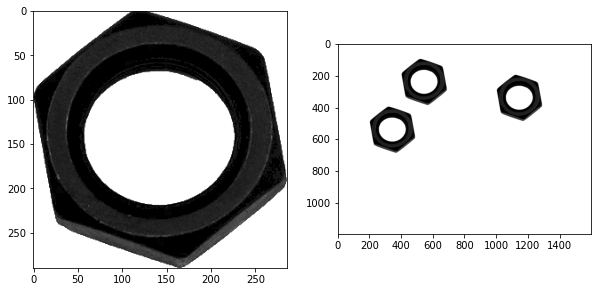

In [ ]:
template_im = cv.imread(r'/content/gdrive/MyDrive/A05/template.png', cv.IMREAD_GRAYSCALE)
belt_im =  cv.imread(r'/content/gdrive/MyDrive/A05/belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

In [ ]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [ ]:
print(th_t)
print(th_b)

138.0
138.0


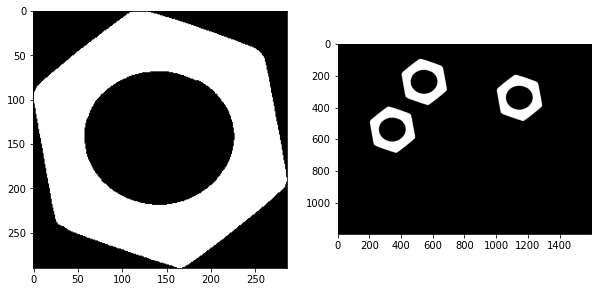

In [ ]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
#print(th_t)
#print(img_t)
ax[0].imshow(img_t, cmap='gray')
ax[1].imshow(img_b, cmap='gray')
plt.show()

In [ ]:
kernel =np.ones((3,3)).astype(np.uint8) #"< 3x3 matubyterix with all ones, with uint8 dtype>" 
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

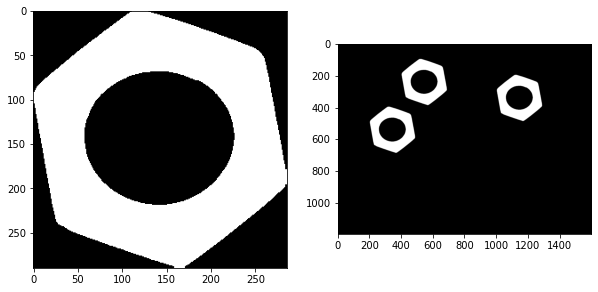

In [ ]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
#print(th_t)
#print(img_t)
ax[0].imshow(closing_t, cmap='gray')
ax[1].imshow(closing_b, cmap='gray')
plt.show()

In [ ]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)

In [ ]:
print(retval_t,retval_b) #no of objects including background
print(labels_t)
print( stats_b) # left_x left_y width height area of the bouding box
print( centroids_b) #centroids

2 4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[      0       0    1600    1200 1798161]
 [    400     100     286     290   40613]
 [   1000     200     286     290   40613]
 [    200     400     286     290   40613]]
[[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]


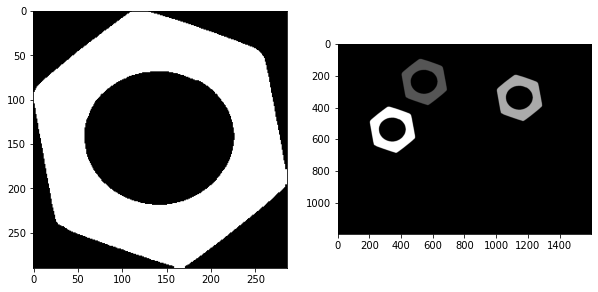

In [ ]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
#print(th_t)
#print(img_t)
ax[0].imshow(labels_t, cmap='gray')
ax[1].imshow(labels_b, cmap='gray')
plt.show()

In [ ]:
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) #findind contour points
# retr_tre- creates hiehcarchy of all counours
#cv aprrox simple?
#print(contours_t[0].shape)

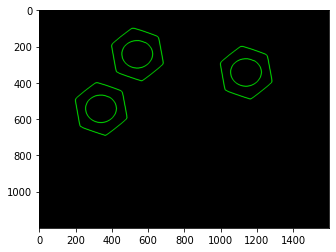

In [ ]:
# Visualizing contours
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

In [ ]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')   #omitting background and getting all objects
belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #getting contours of all objeects   #ret_external - extreme countorus are counted
for j,c in enumerate(belt_cont):
        print(j)
        print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)) #mathcing the contour with template #match shape output between 0 and 1 -- 0 most matching --1 lease matching

0
0.00010071698397151607
1
0.00010071698397928763
2
0.00010071698397484674


In [ ]:
ca = cv.contourArea(contours_b[1])
#print(ca)

In [ ]:

M = cv.moments(contours_b[1])
cx, cy = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))


In [ ]:
count=1
object_prev_frame = np.array([cx, cy, ca, count])
print(object_prev_frame)


[3.410e+02 5.420e+02 2.008e+04 1.000e+00]


In [ ]:
delta_x = 15

In [ ]:
def get_indexed_image(im):
    #template_im = cv.imread(r'template.png', cv.IMREAD_GRAYSCALE)
    th_t, img_t = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel =np.ones((3,3)).astype(np.uint8)   #"< 3x3 matubyterix with all ones, with uint8 dtype>" 
    closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)  
    retval, labels, stats, centroids= cv.connectedComponentsWithStats(closing_t)
   
    return retval, labels, stats, centroids 

In [147]:
def is_new(a, b, delta, i):
  out=np.absolute(b[i]-a)
  res=out[:,i]>delta[i]
  #print(out[:,i])
  val=res.all()


  return val

In [149]:
# check prev_index  expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
              [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
              [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])

b = np.array( [7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
print( is_new(a,b,delta,i))

False


In [186]:
def prev_index(a, b, delta, i):
  index = -1
  out=np.absolute(b[i]-a)
  res=out[:,i]<delta[i]
  #print(res)
  index  = np.where(res==True)
  #print(index[0][0])
  return a[index[0][0]][-1]   


In [187]:
# check prev_index  expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
              [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
              [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])

b = np.array( [7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

assert prev_index(a,b,delta,i) == 1, " Check the function" 

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.54300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00])]
Previousframe [array([1.55300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


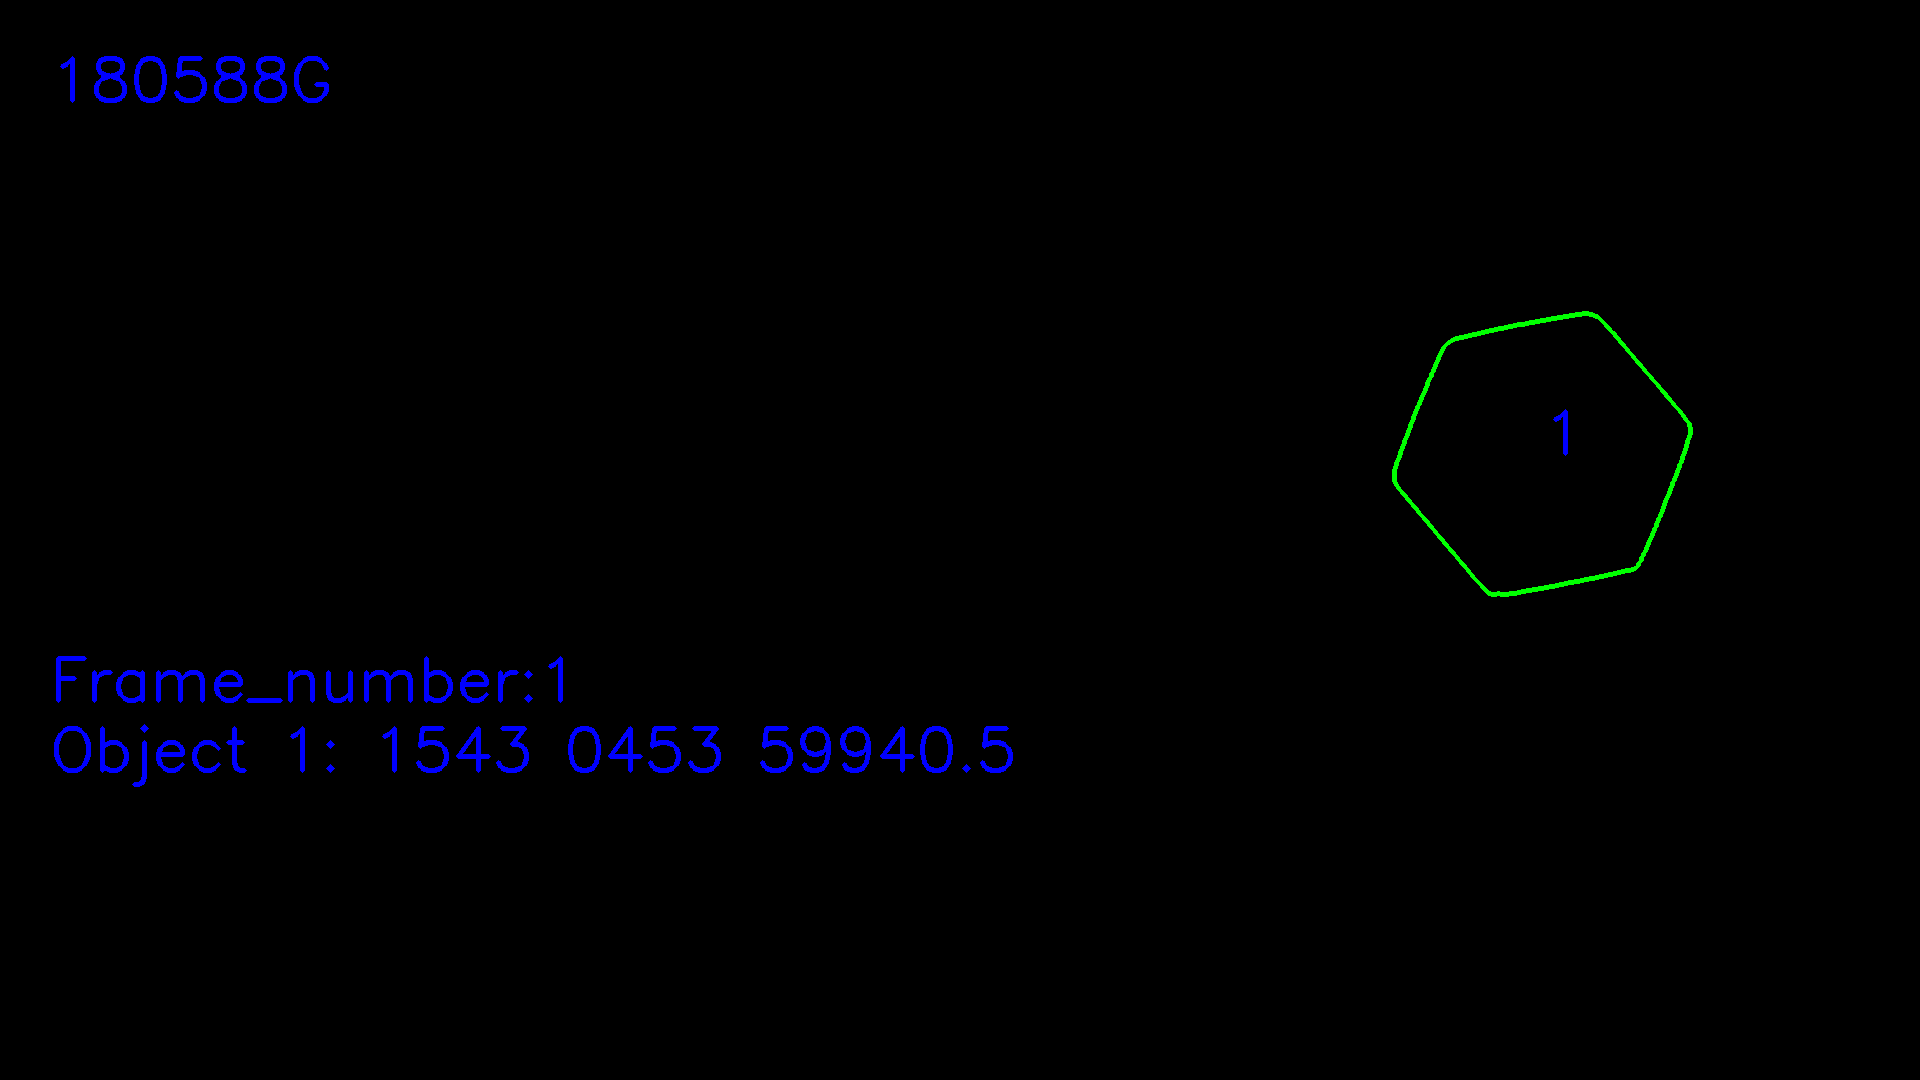

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.53300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.54300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00])]


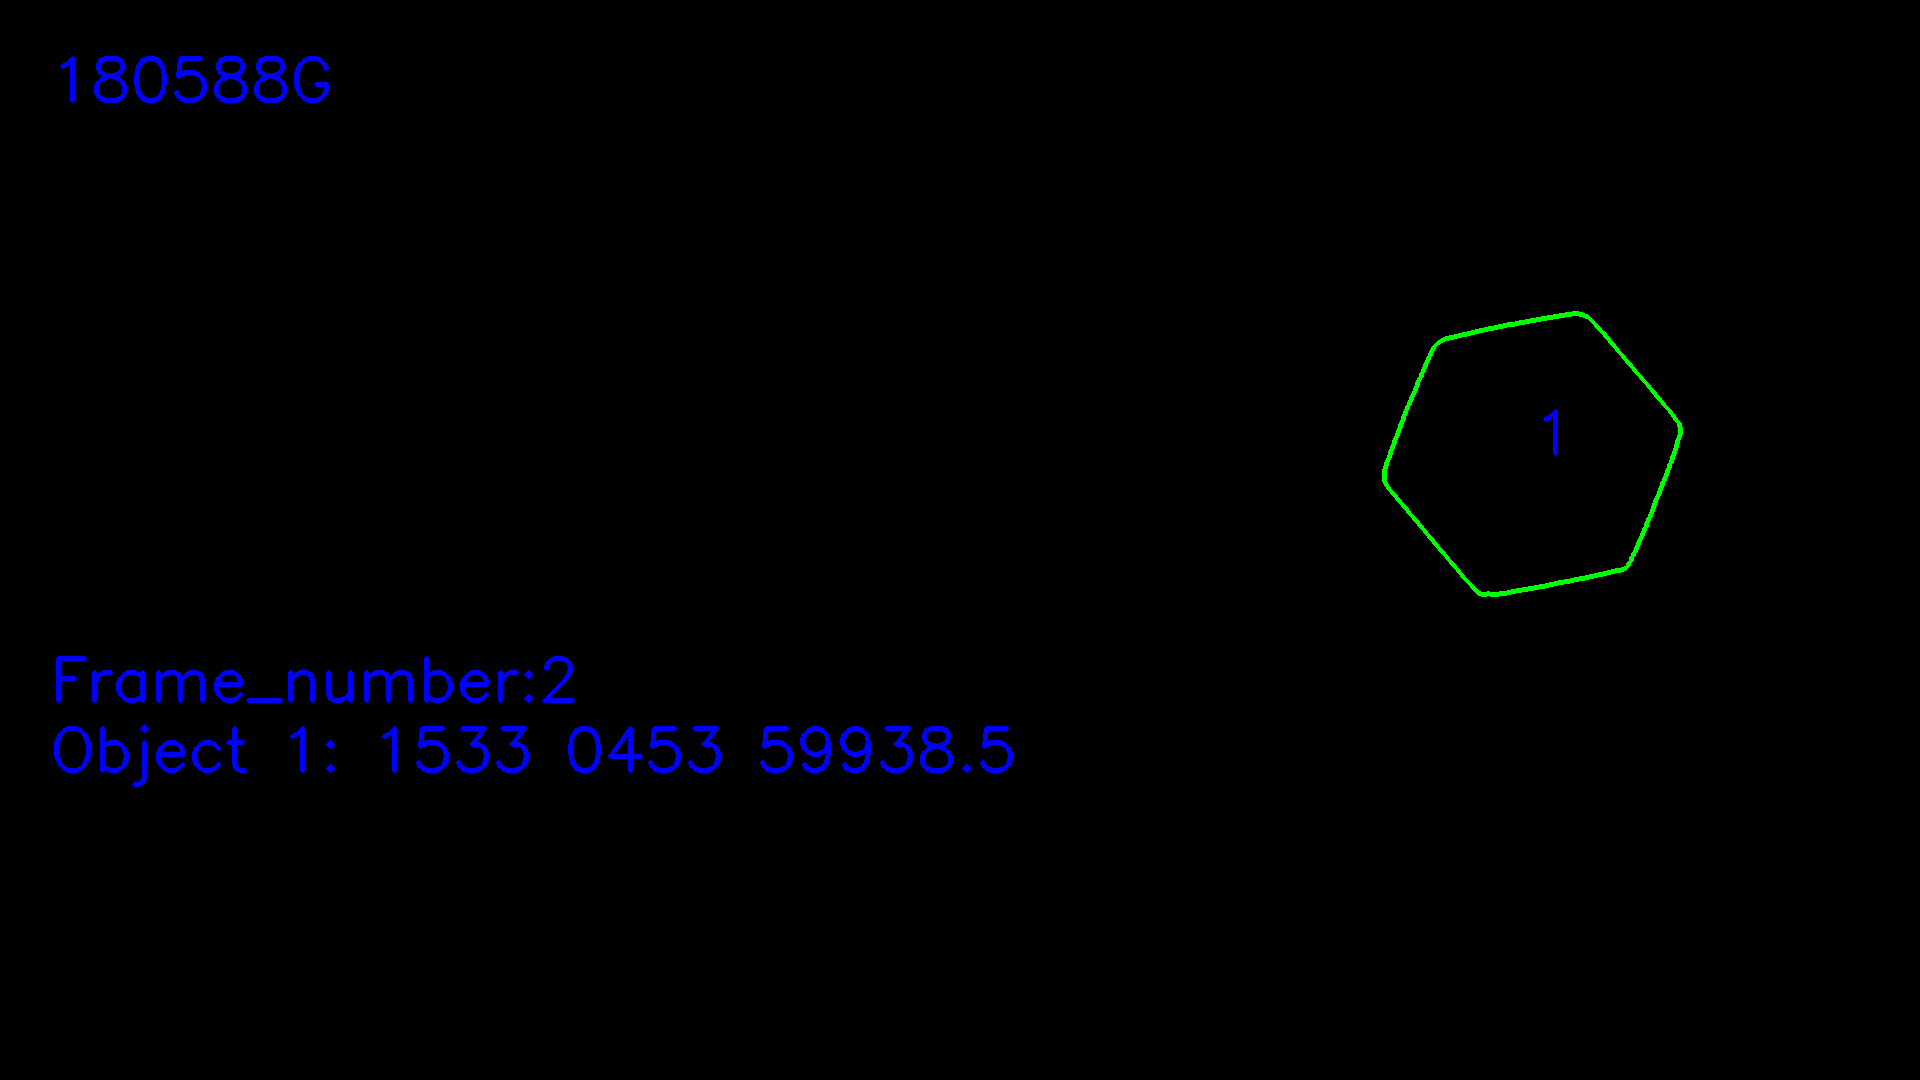

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.52300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.53300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


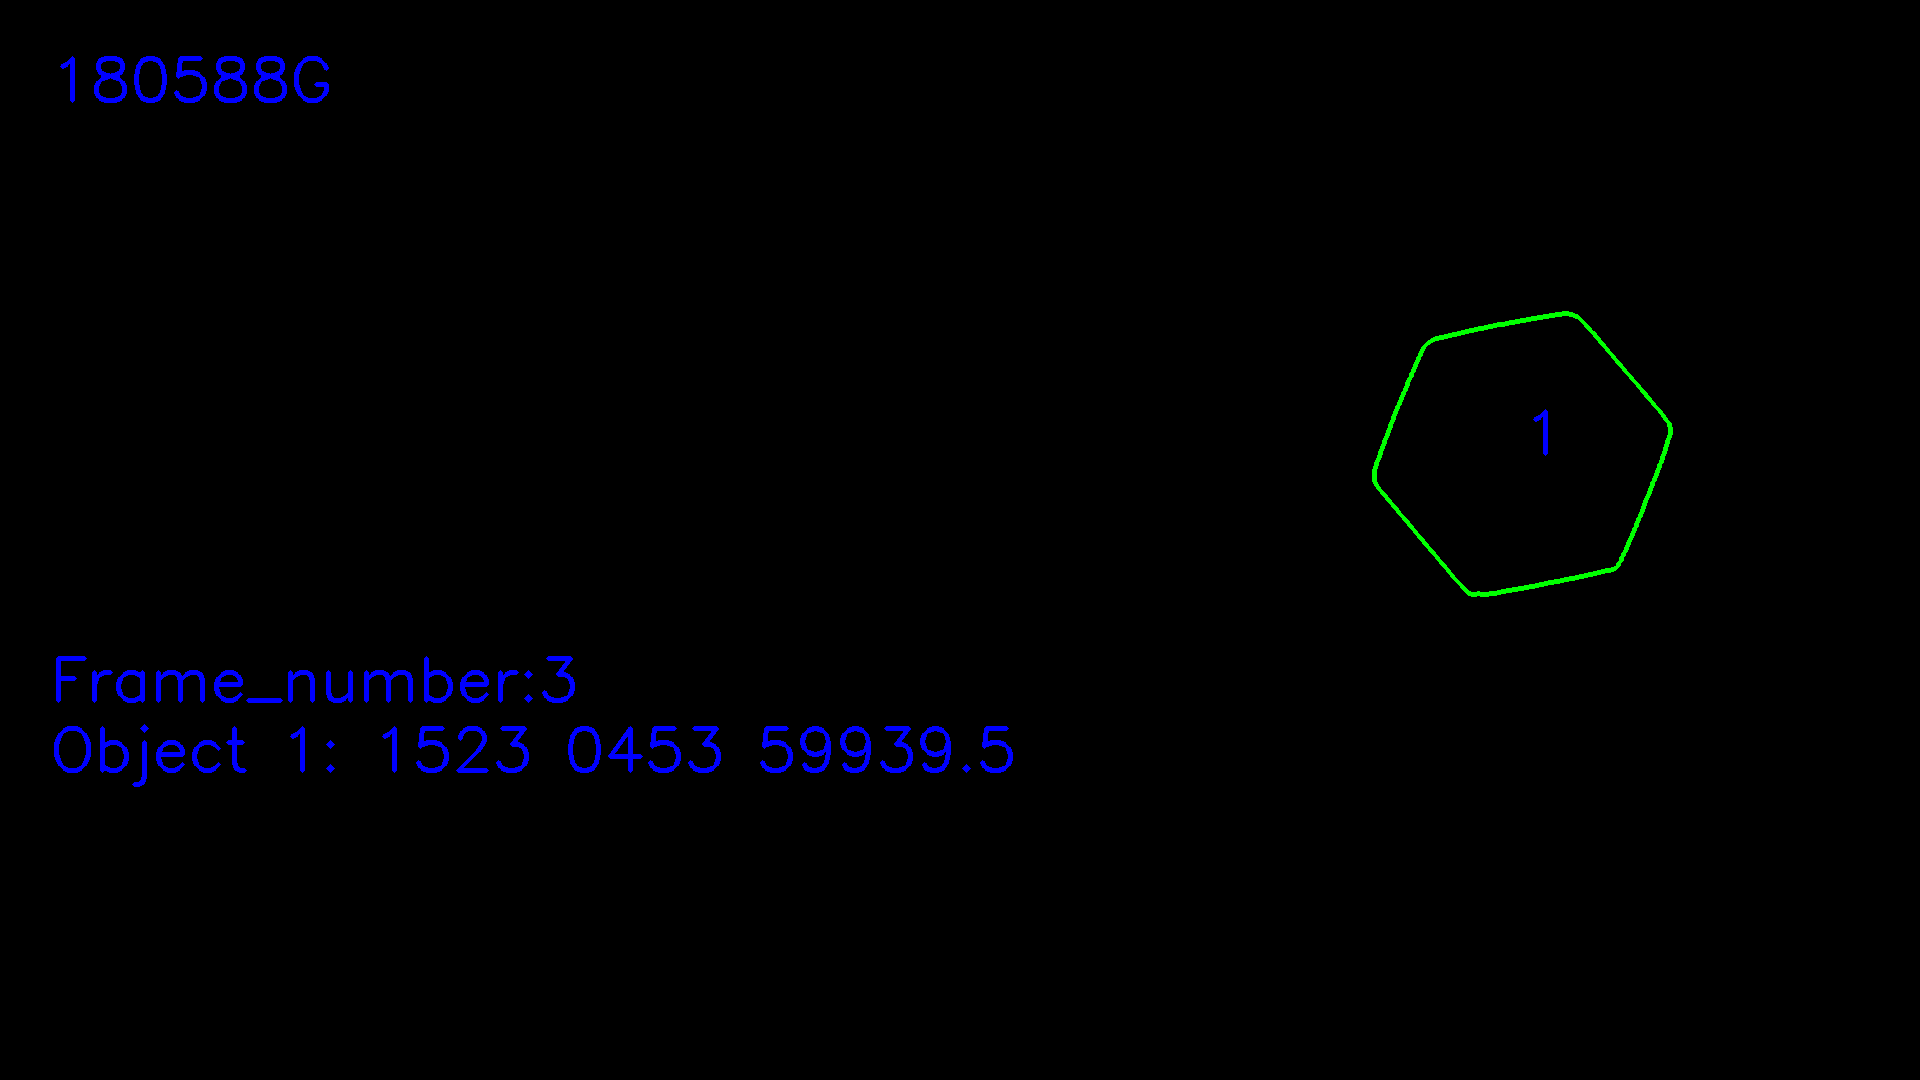

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.51300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.52300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


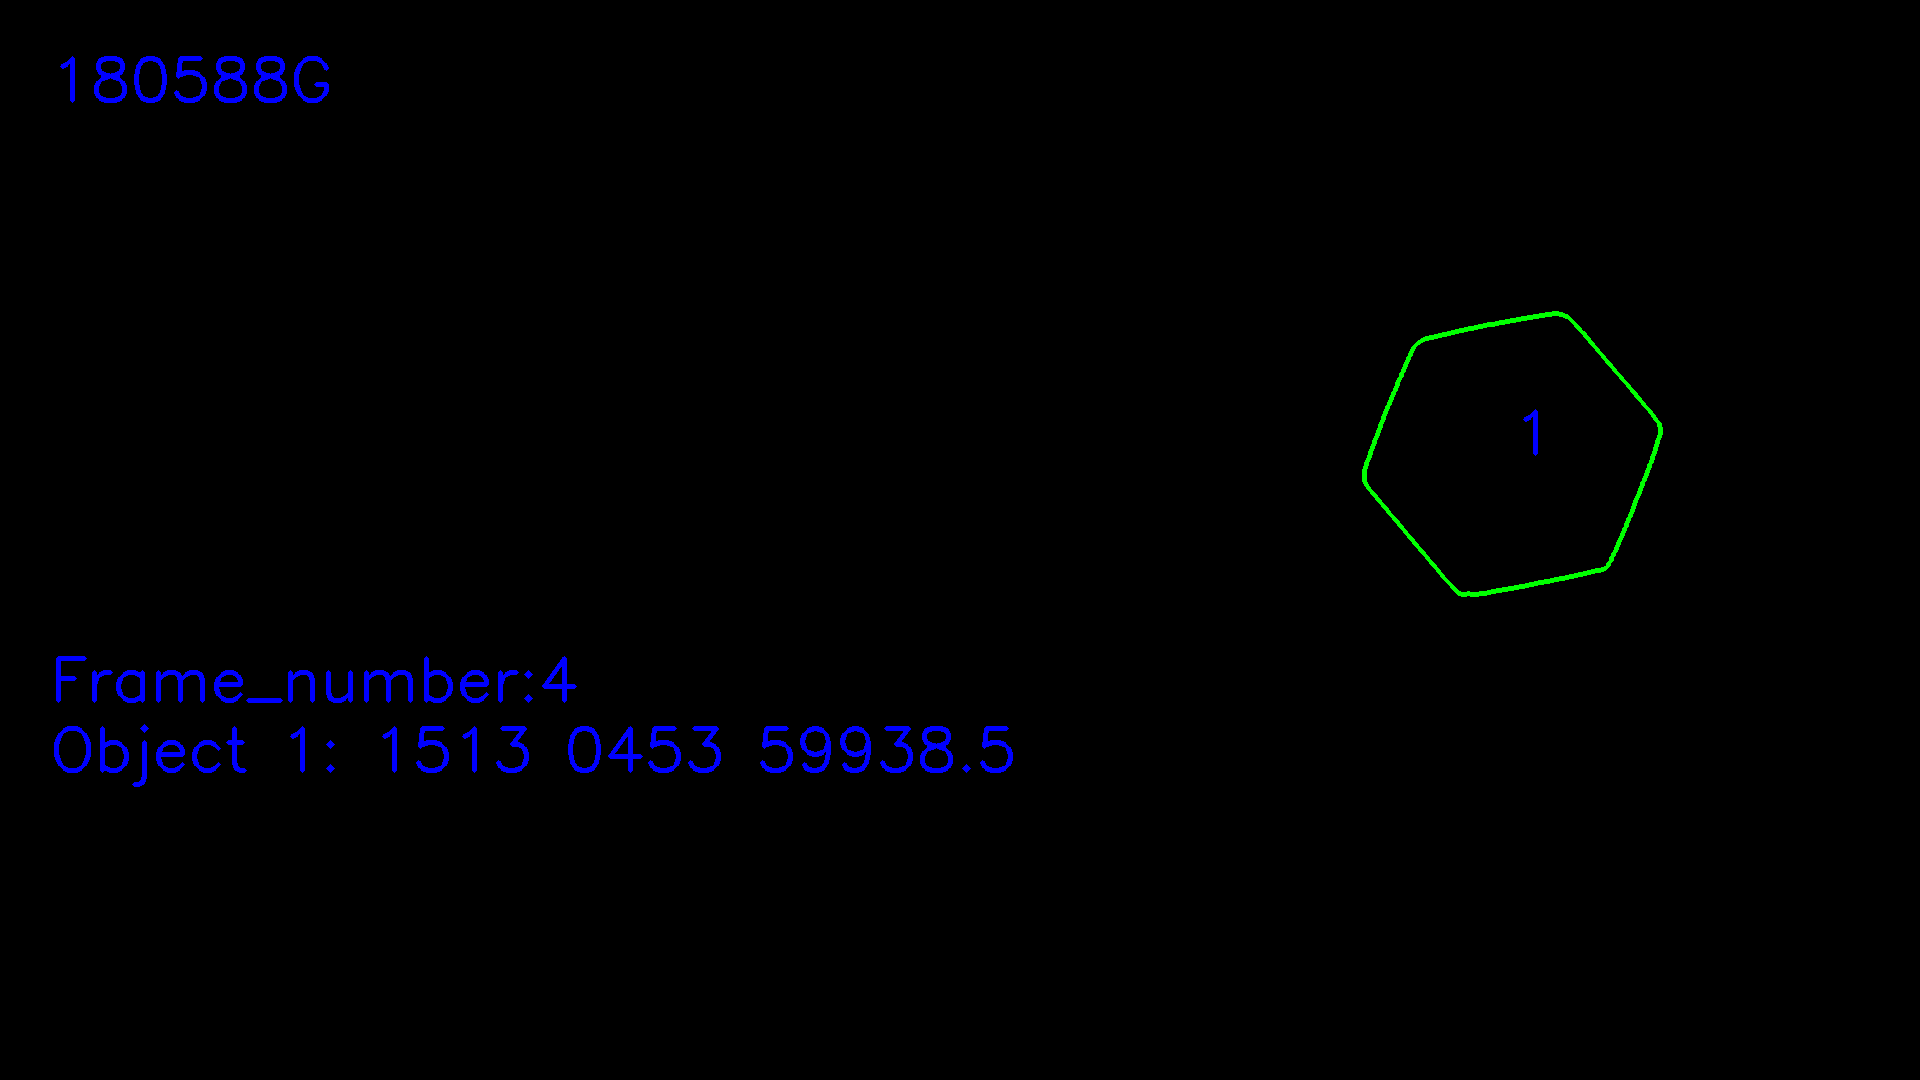

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.50300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.51300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


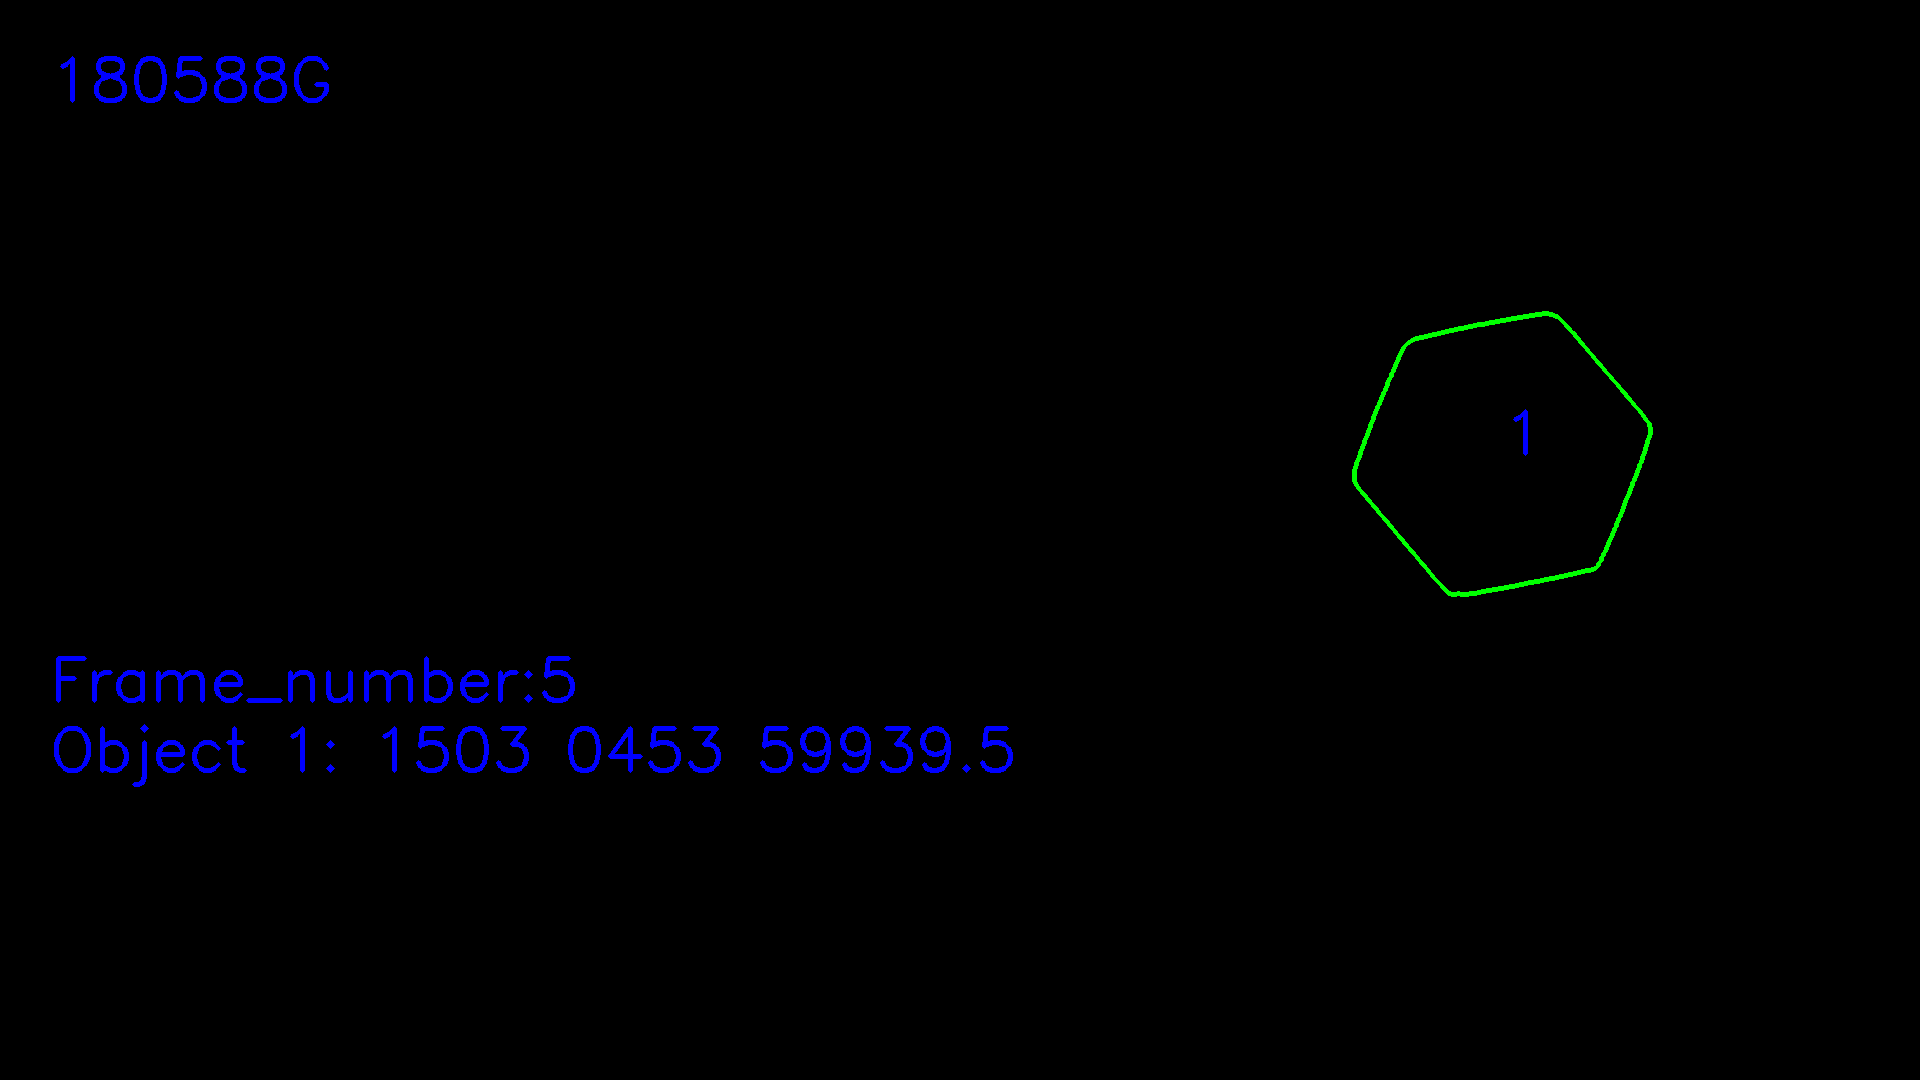

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.49300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.50300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


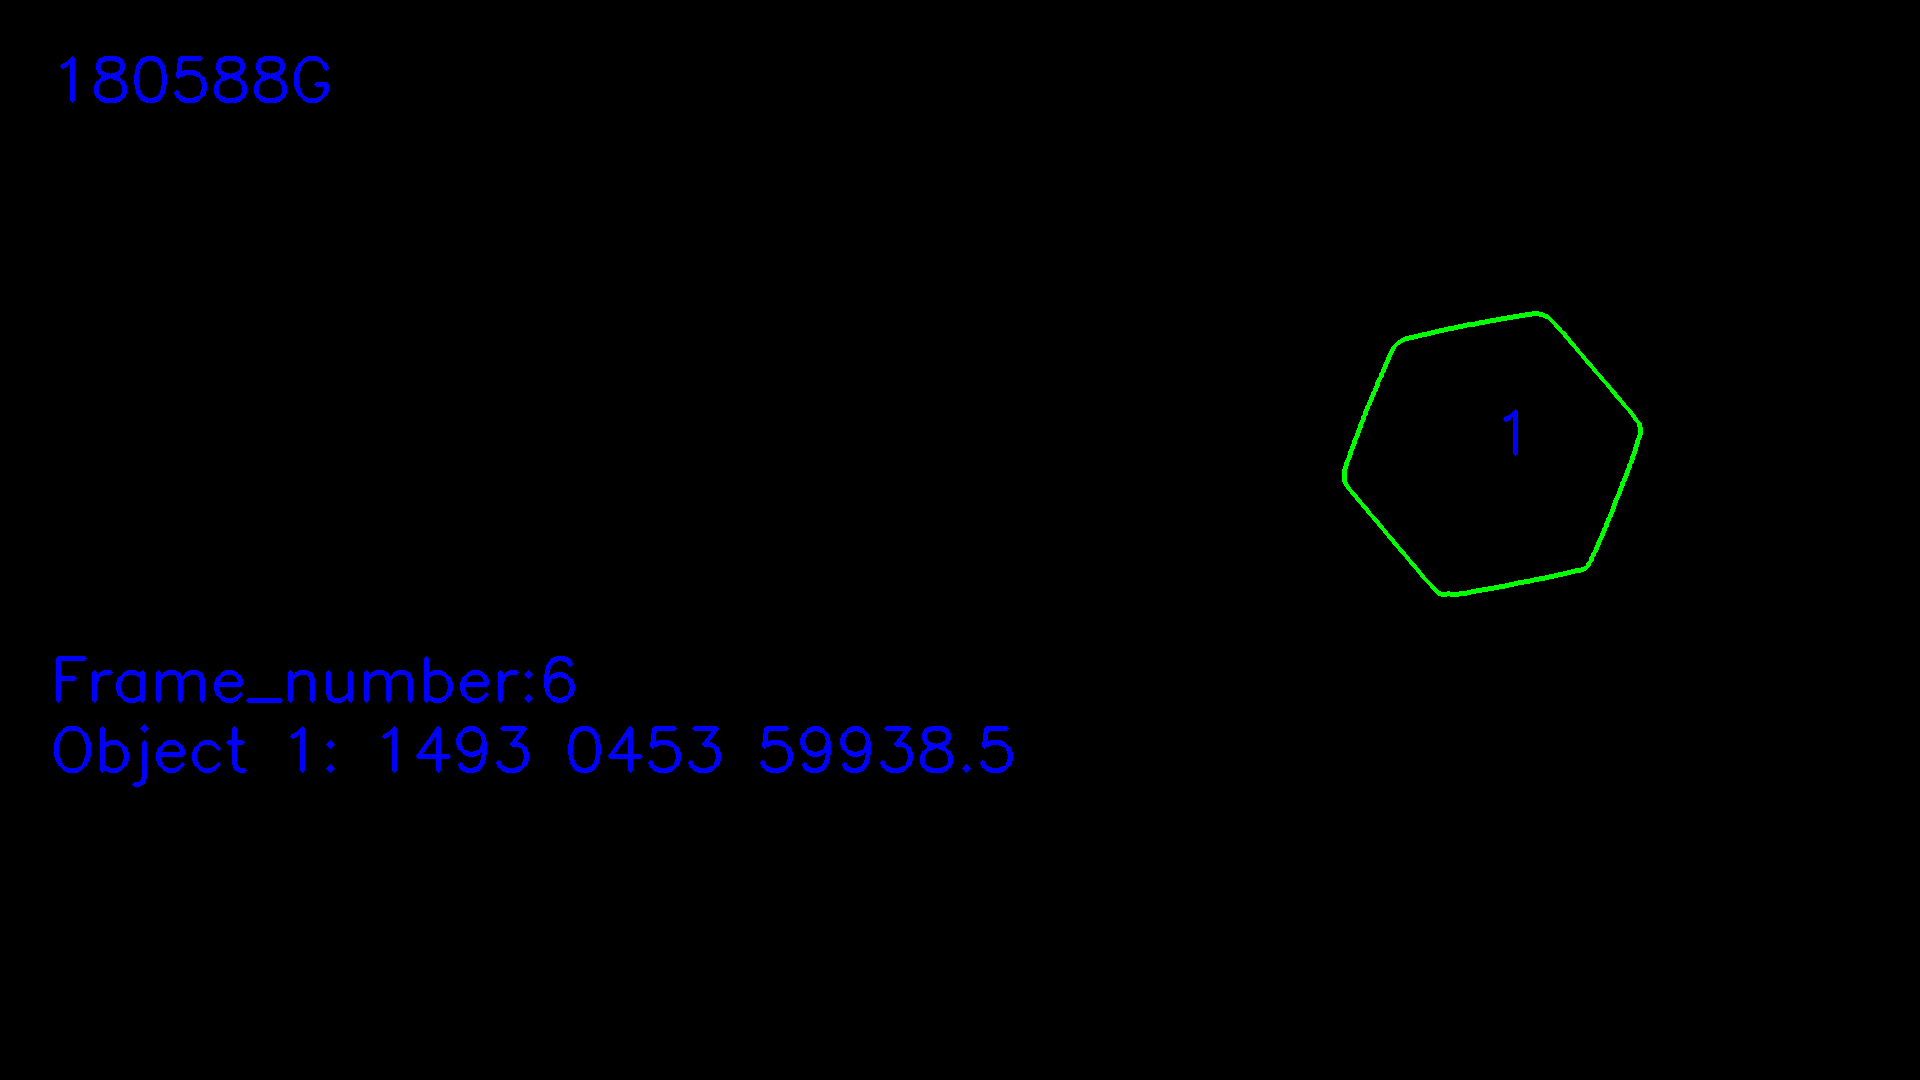

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.48300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.49300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


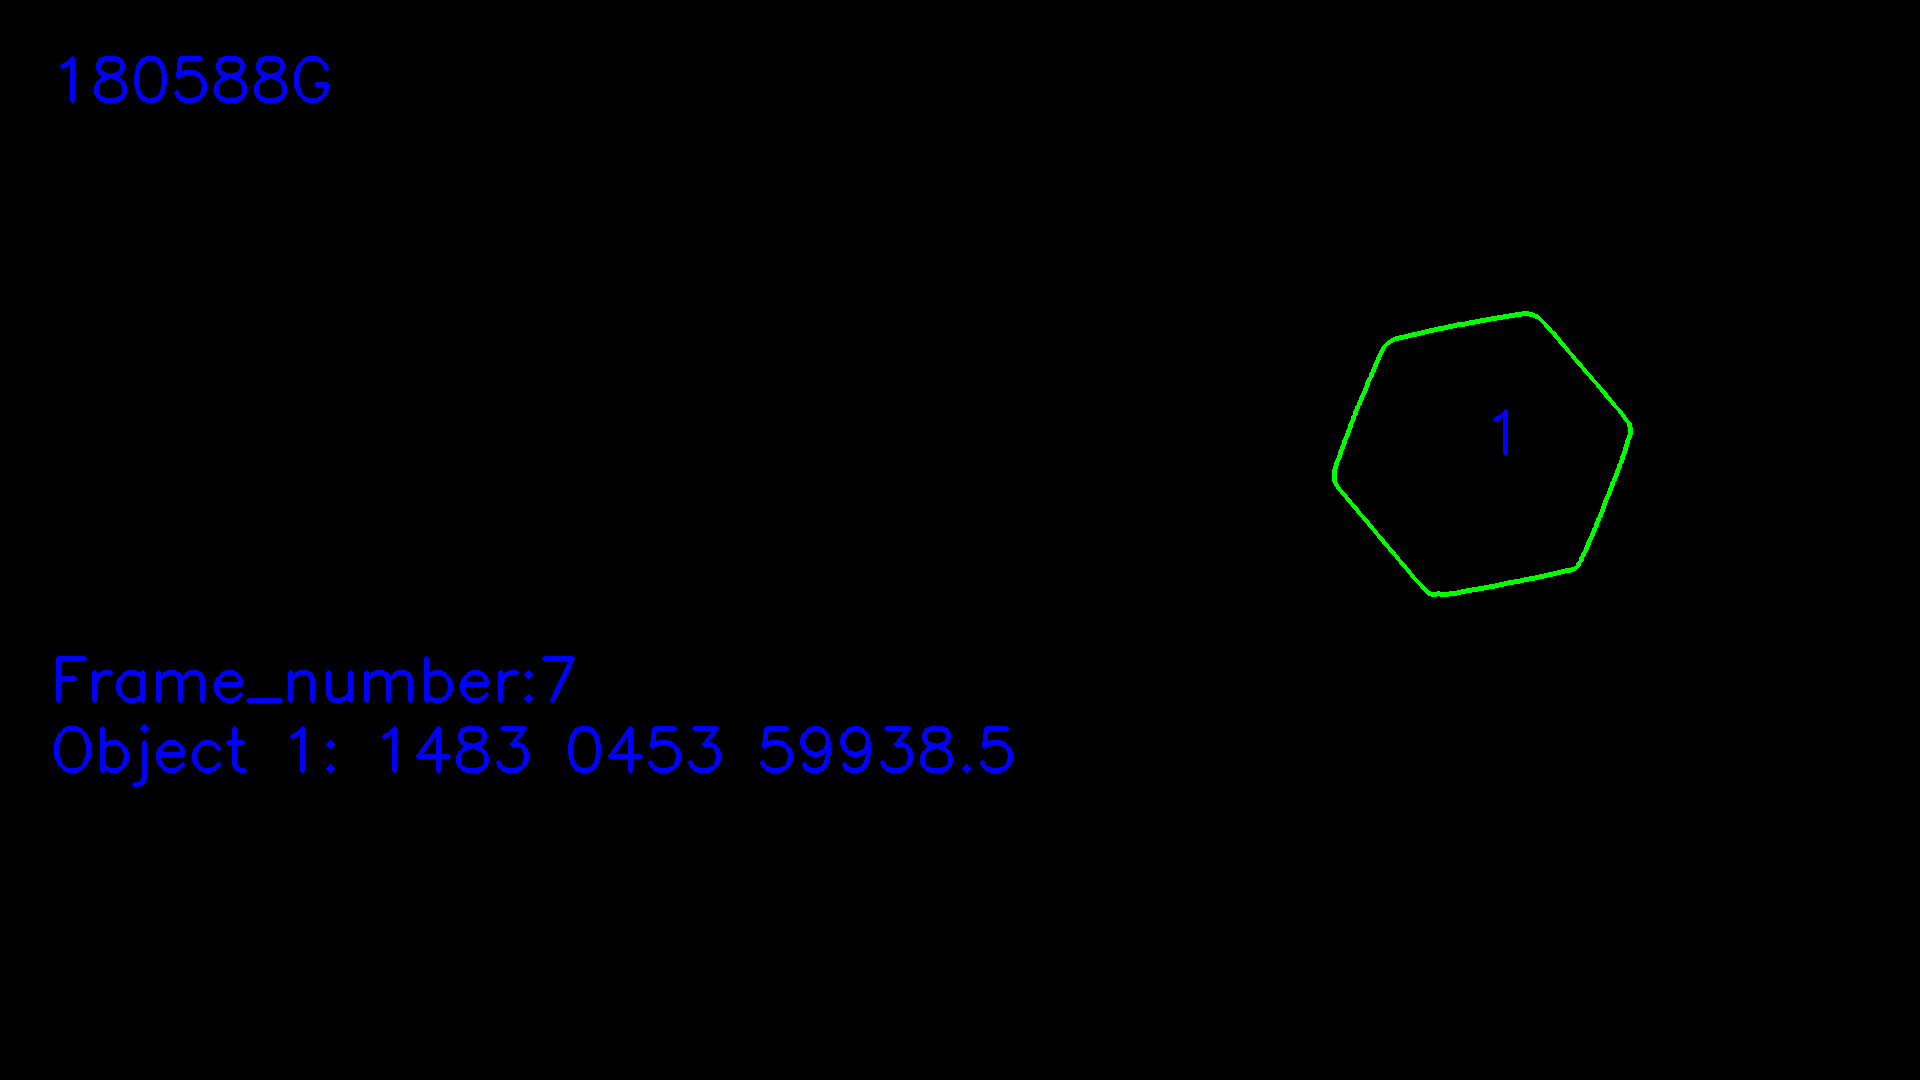

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.47300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.48300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


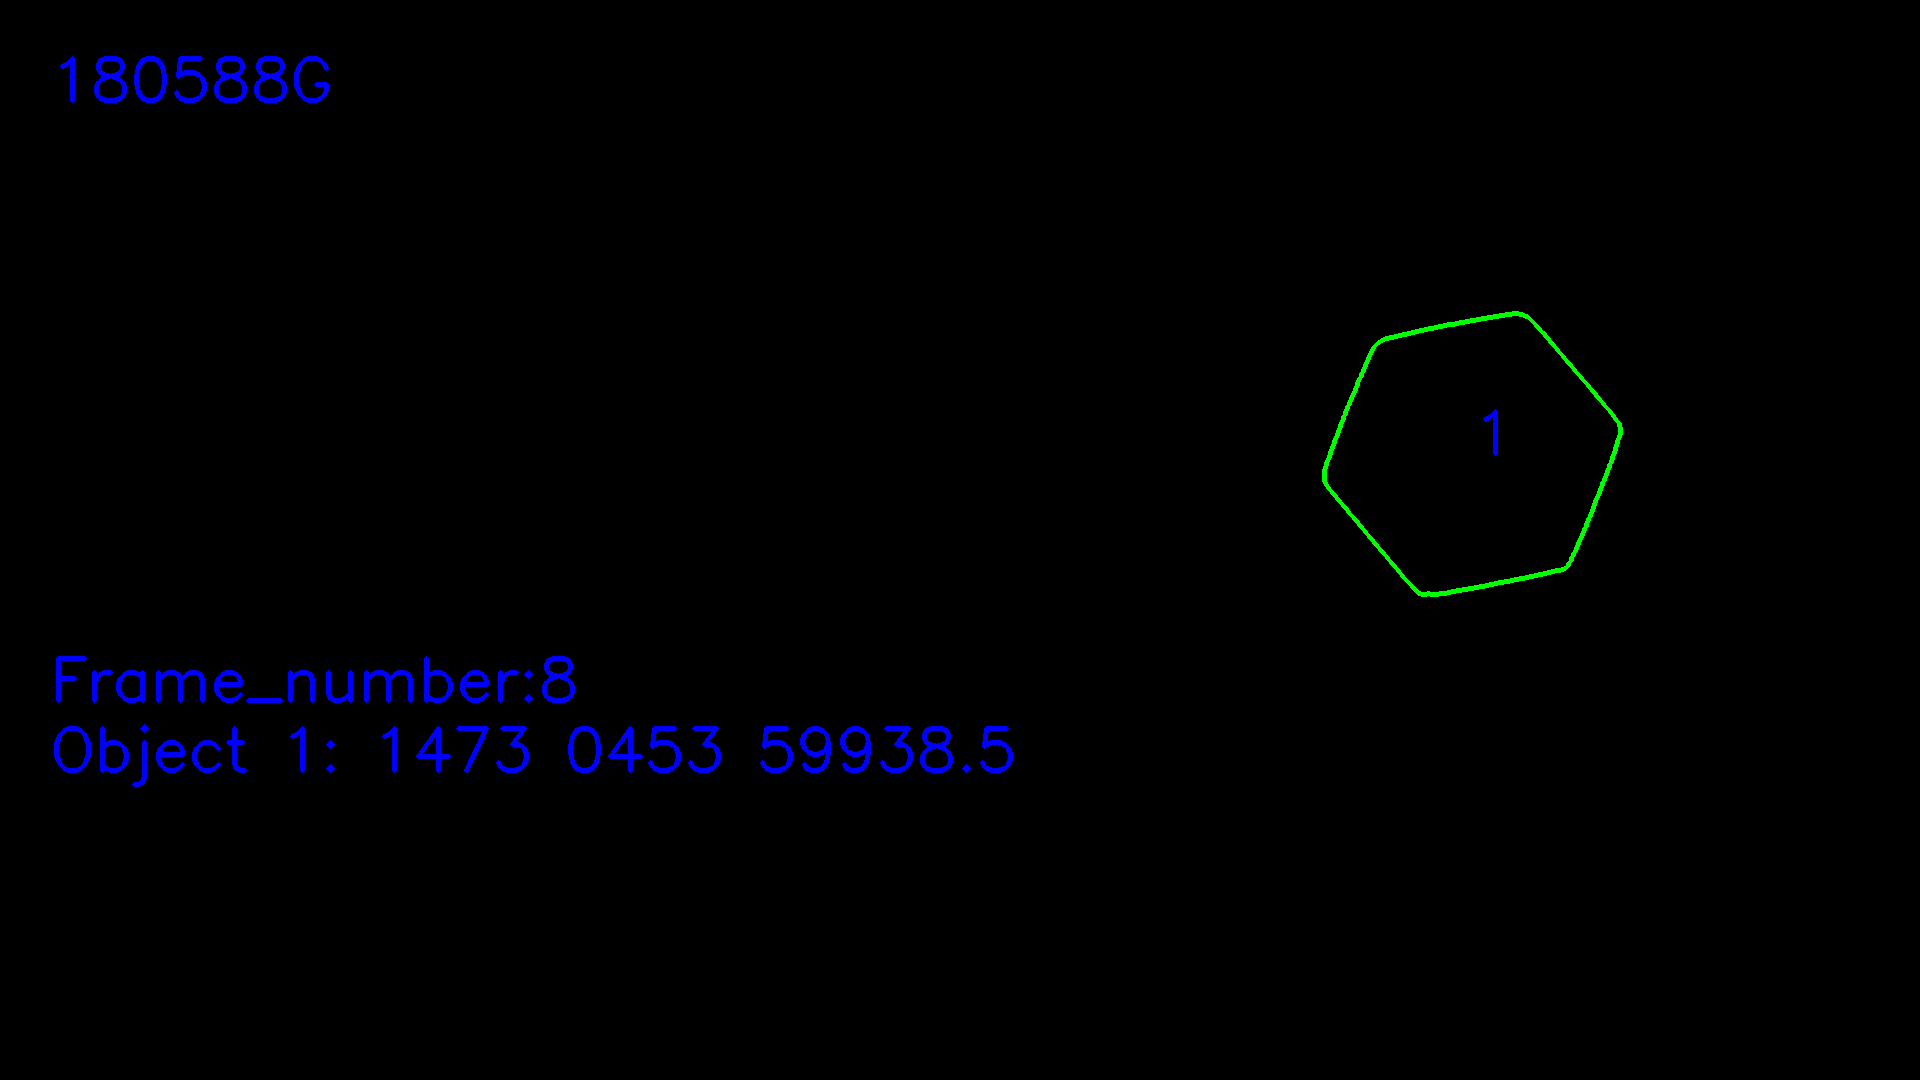

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.46300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00])]
Previousframe [array([1.47300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


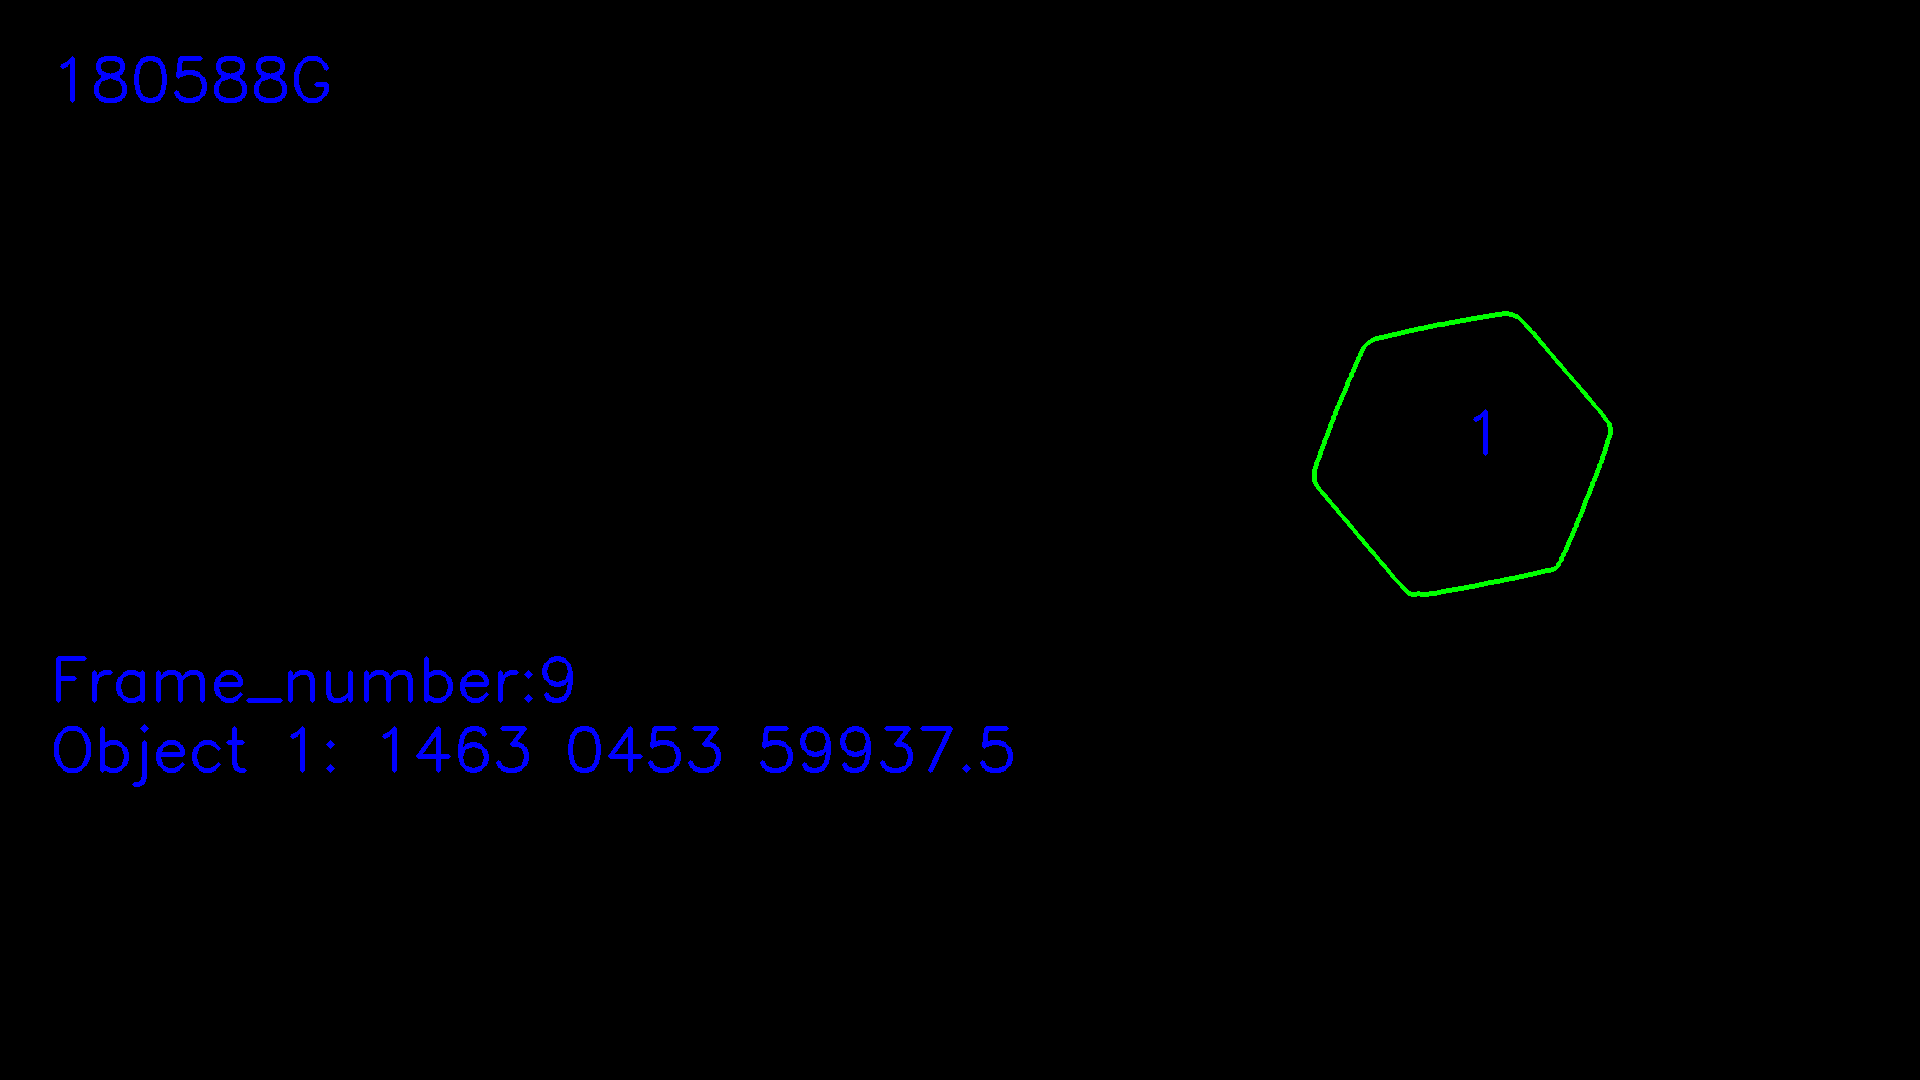

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.45300e+03, 4.53000e+02, 5.99445e+04, 1.00000e+00])]
Previousframe [array([1.46300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00])]


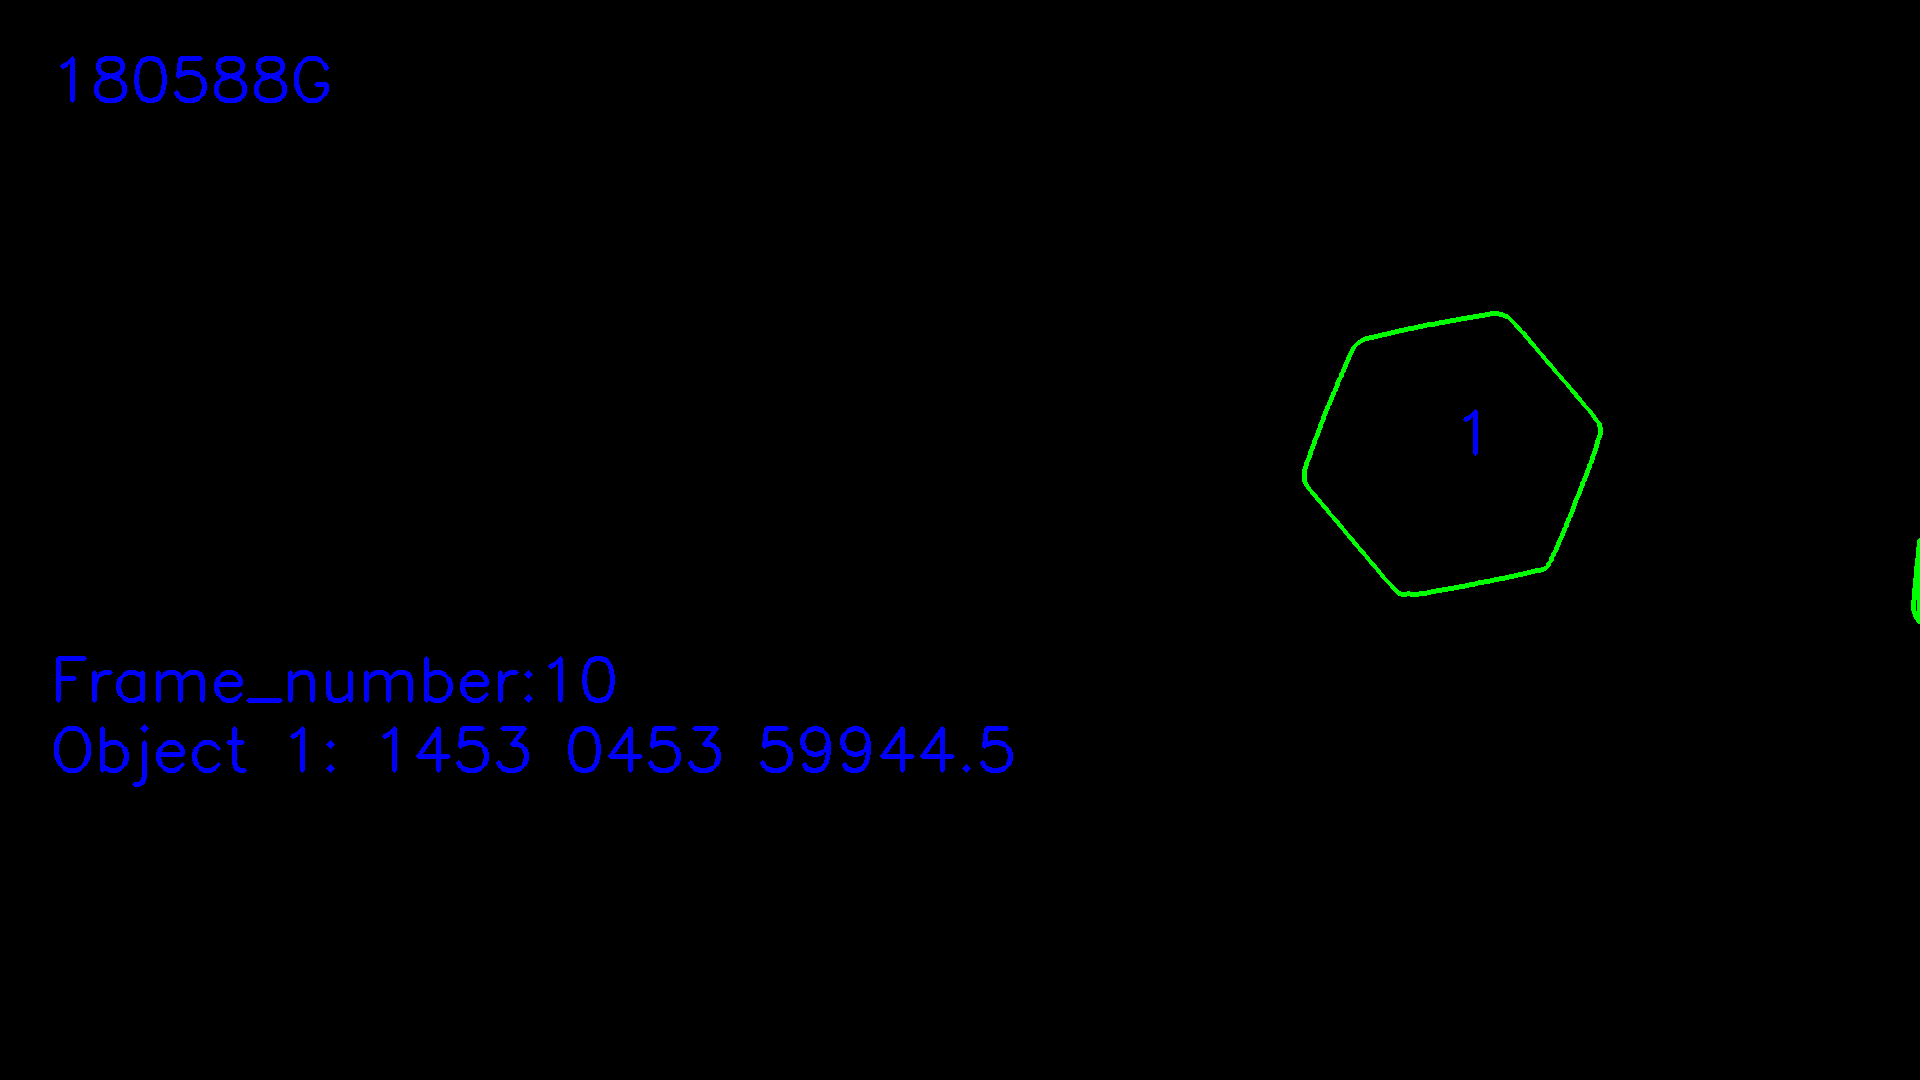

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.44300e+03, 4.53000e+02, 5.99365e+04, 1.00000e+00])]
Previousframe [array([1.45300e+03, 4.53000e+02, 5.99445e+04, 1.00000e+00])]


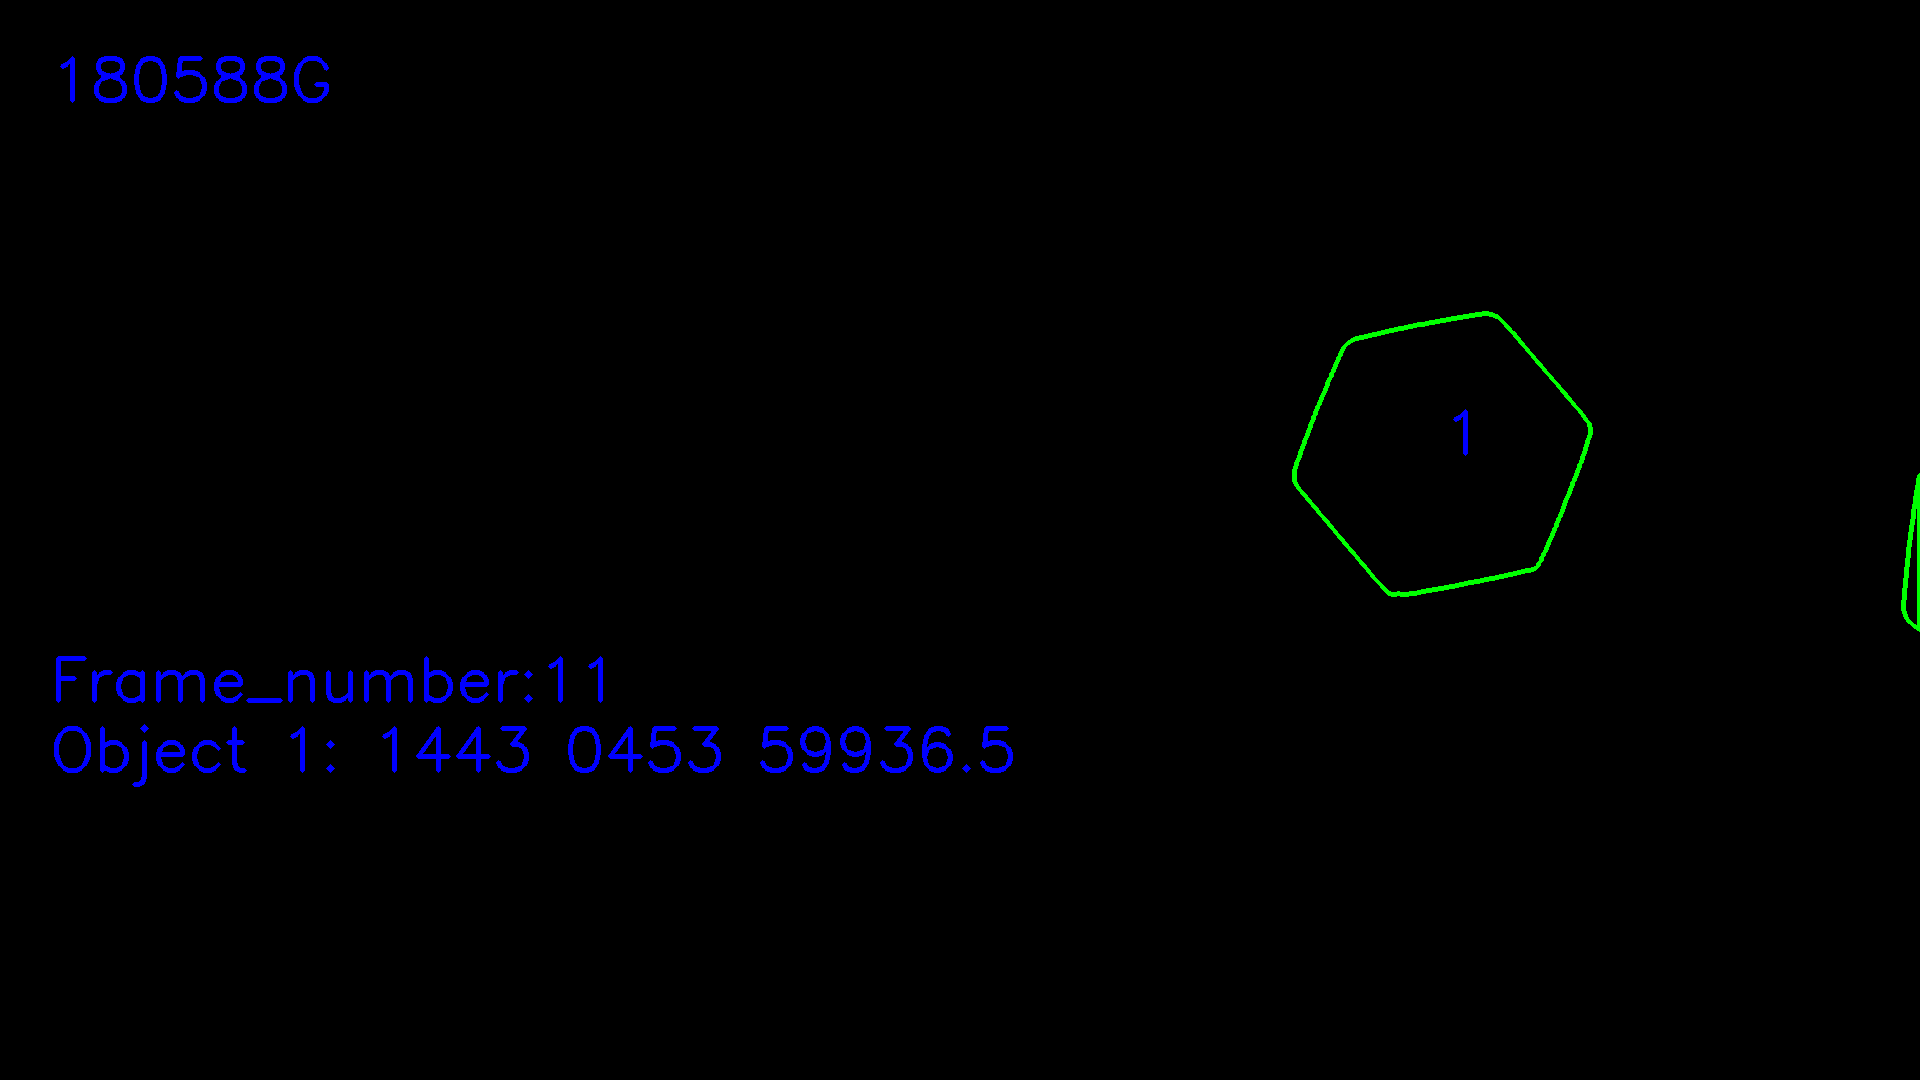

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.43300e+03, 4.53000e+02, 5.99445e+04, 1.00000e+00])]
Previousframe [array([1.44300e+03, 4.53000e+02, 5.99365e+04, 1.00000e+00])]


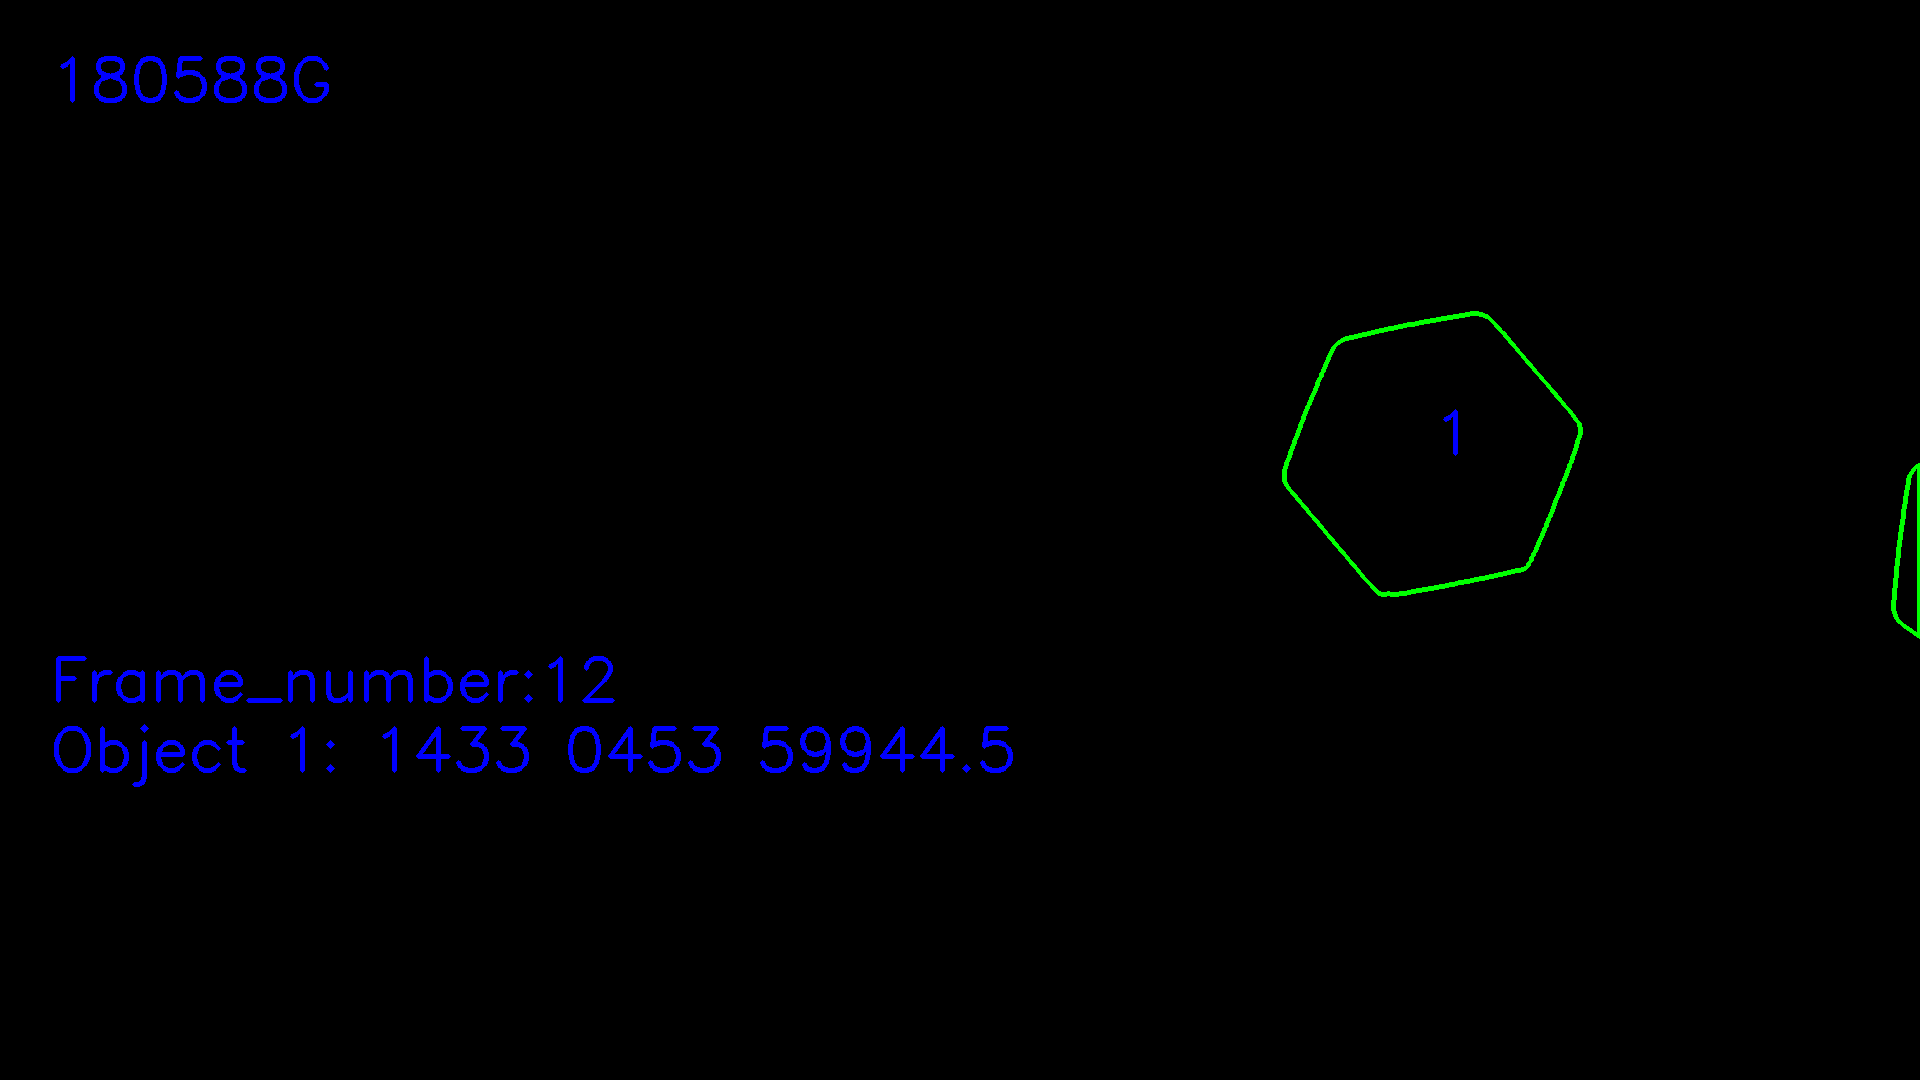

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.42300e+03, 4.53000e+02, 5.99445e+04, 1.00000e+00])]
Previousframe [array([1.43300e+03, 4.53000e+02, 5.99445e+04, 1.00000e+00])]


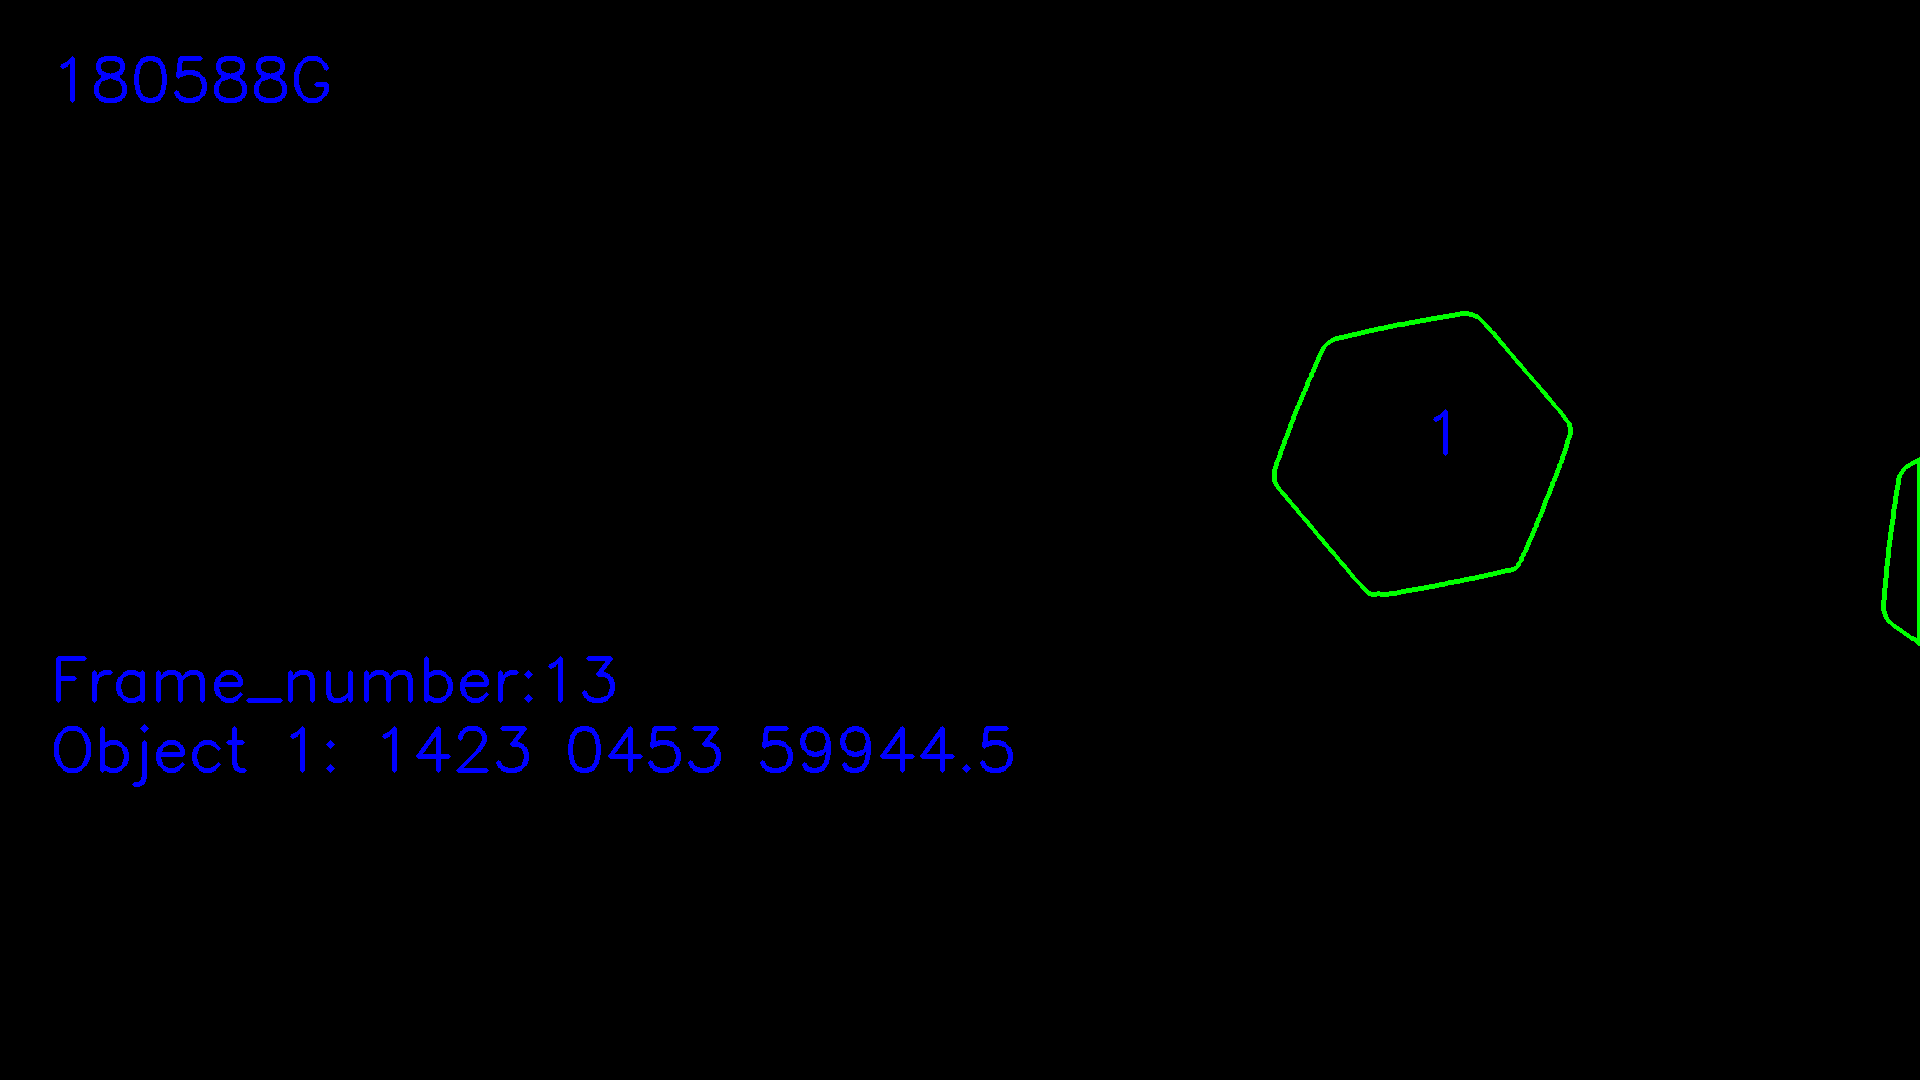

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.41300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.42300e+03, 4.53000e+02, 5.99445e+04, 1.00000e+00])]


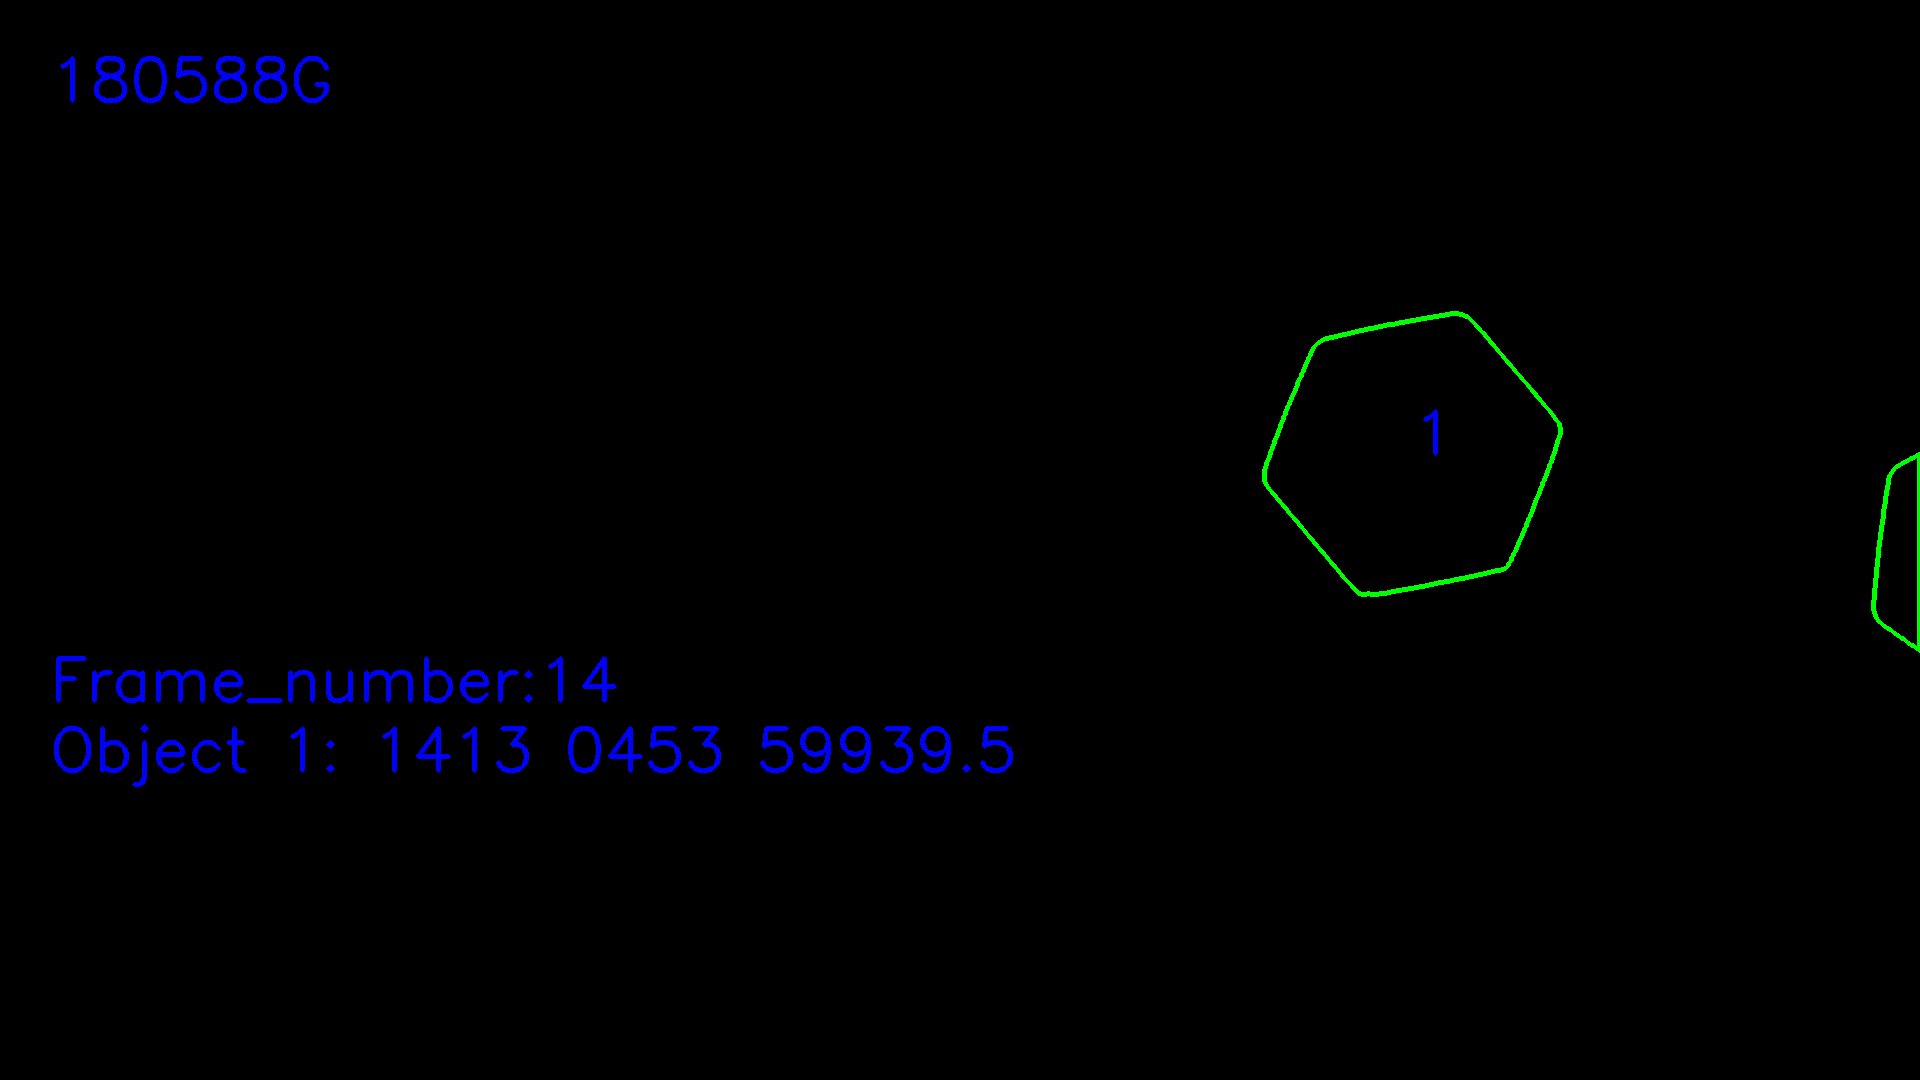

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.40300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.41300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


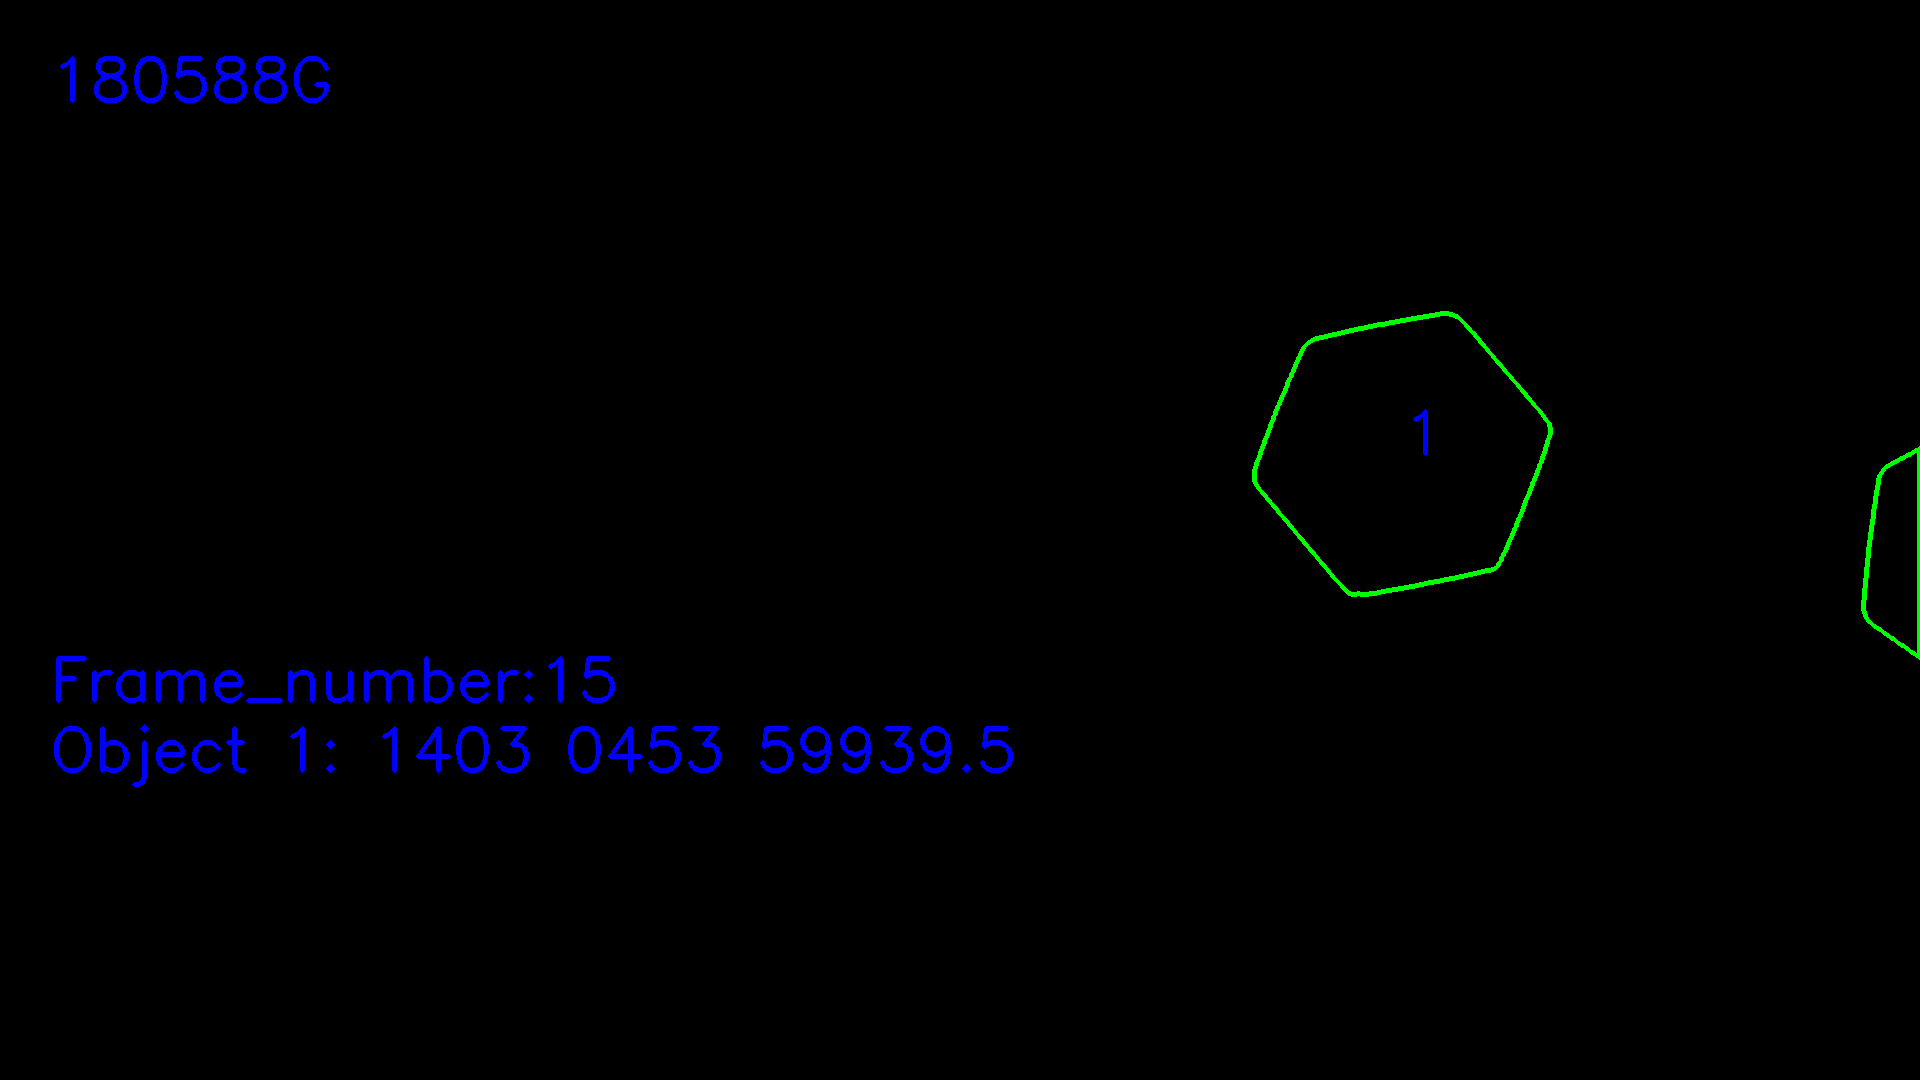

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.39300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.40300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


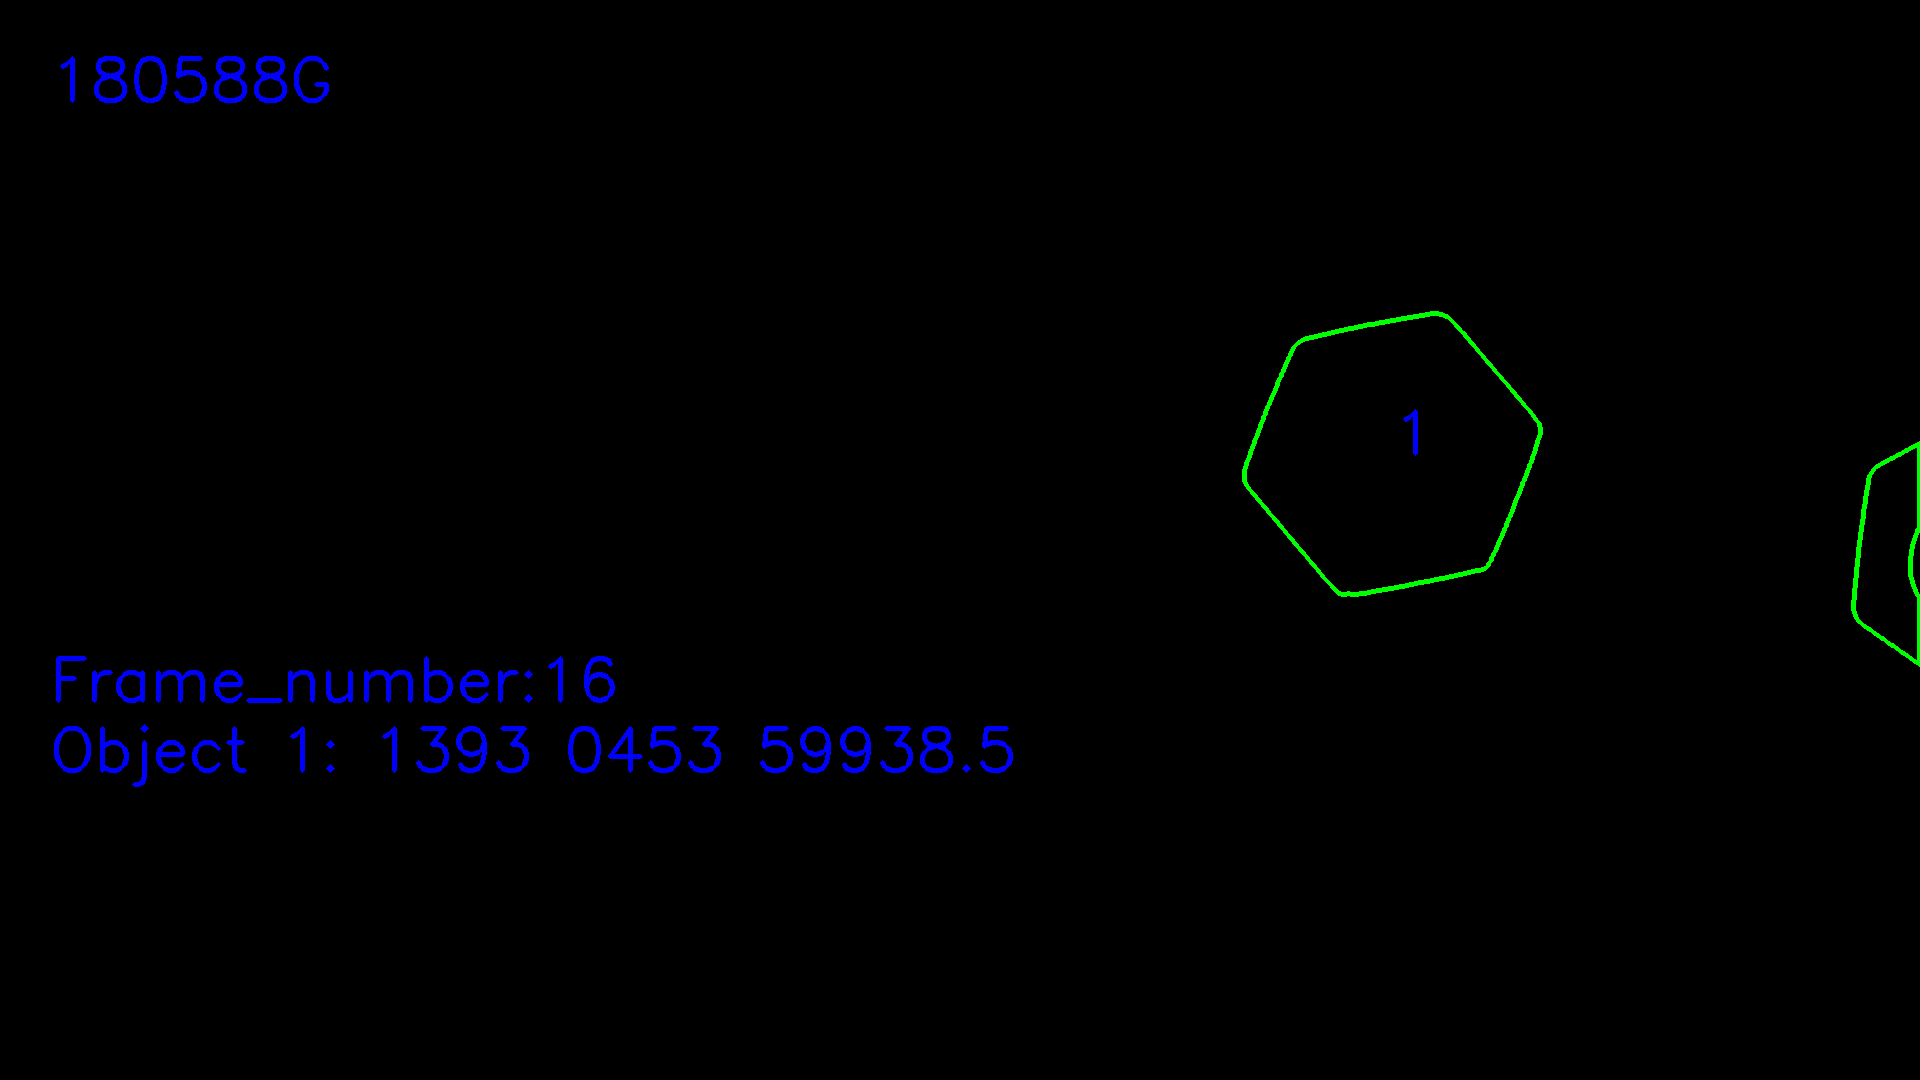

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.38300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.39300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


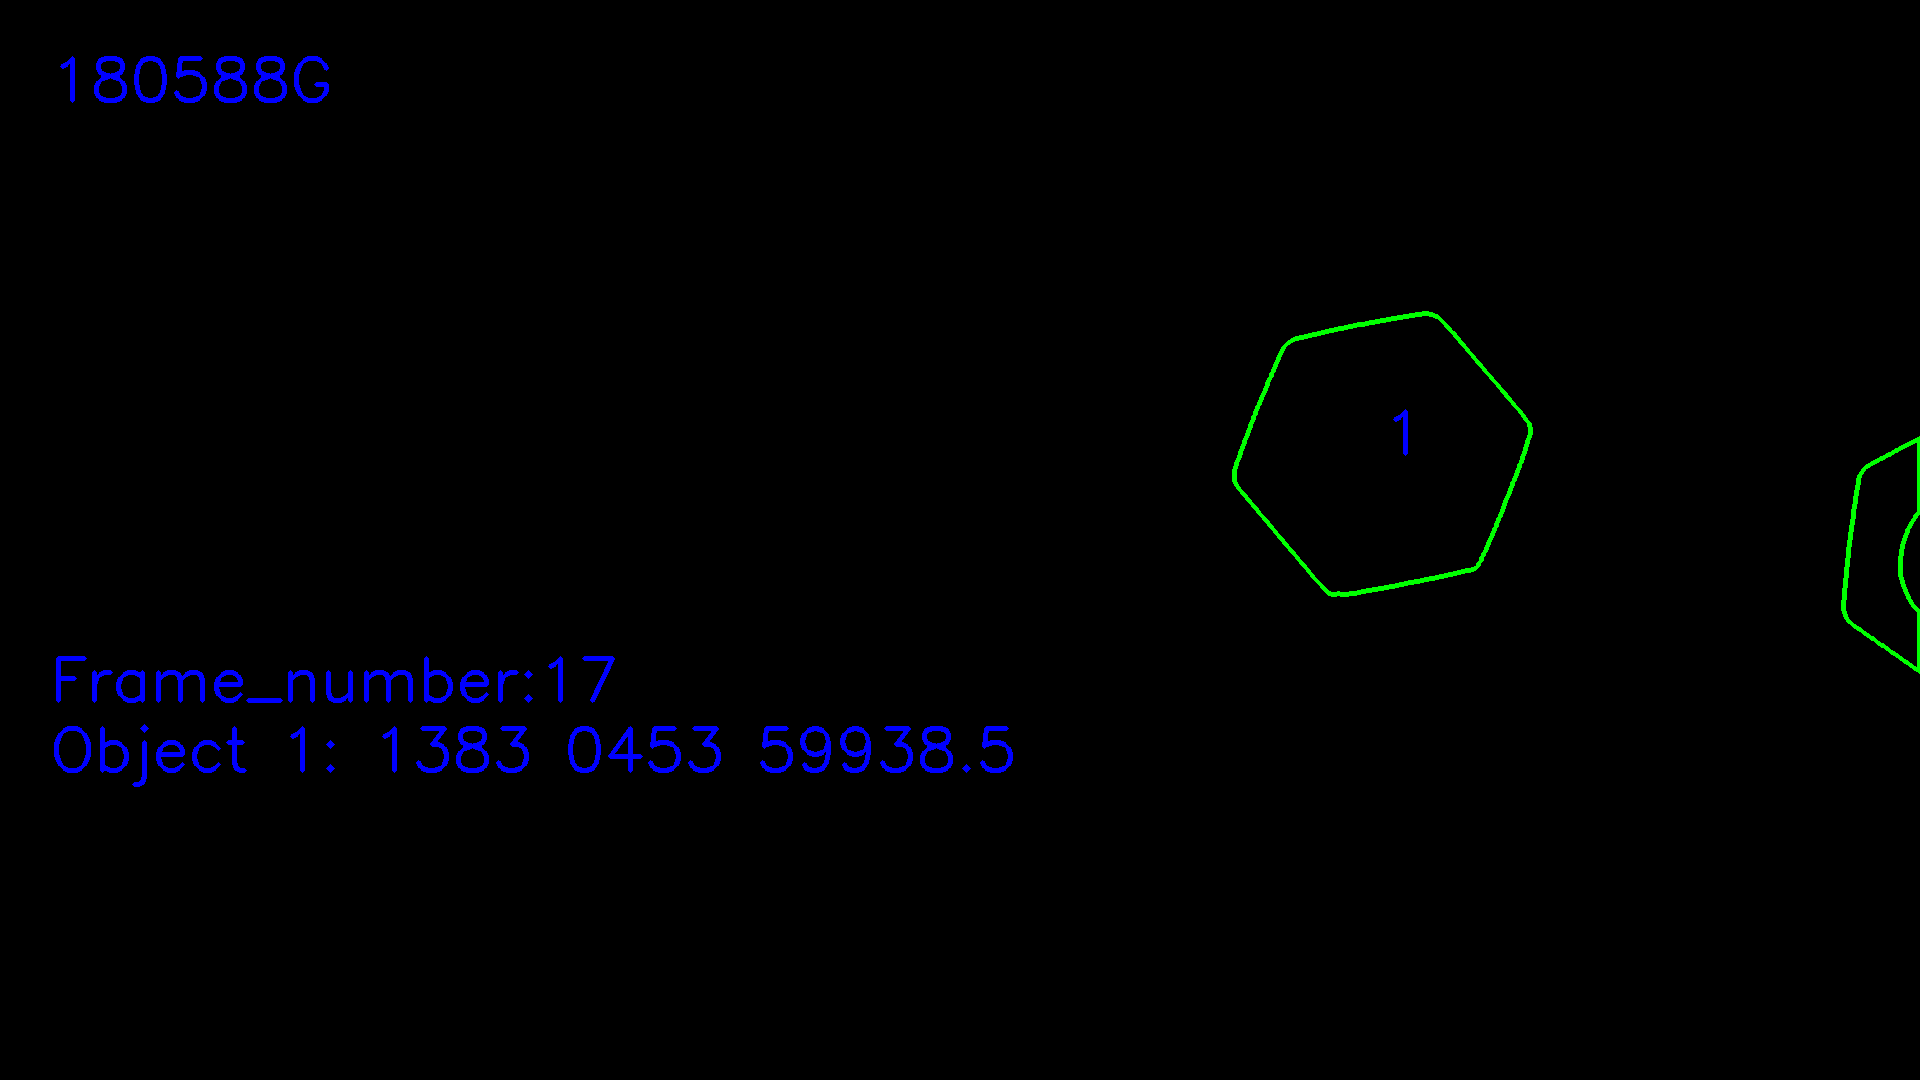

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.37300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.38300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


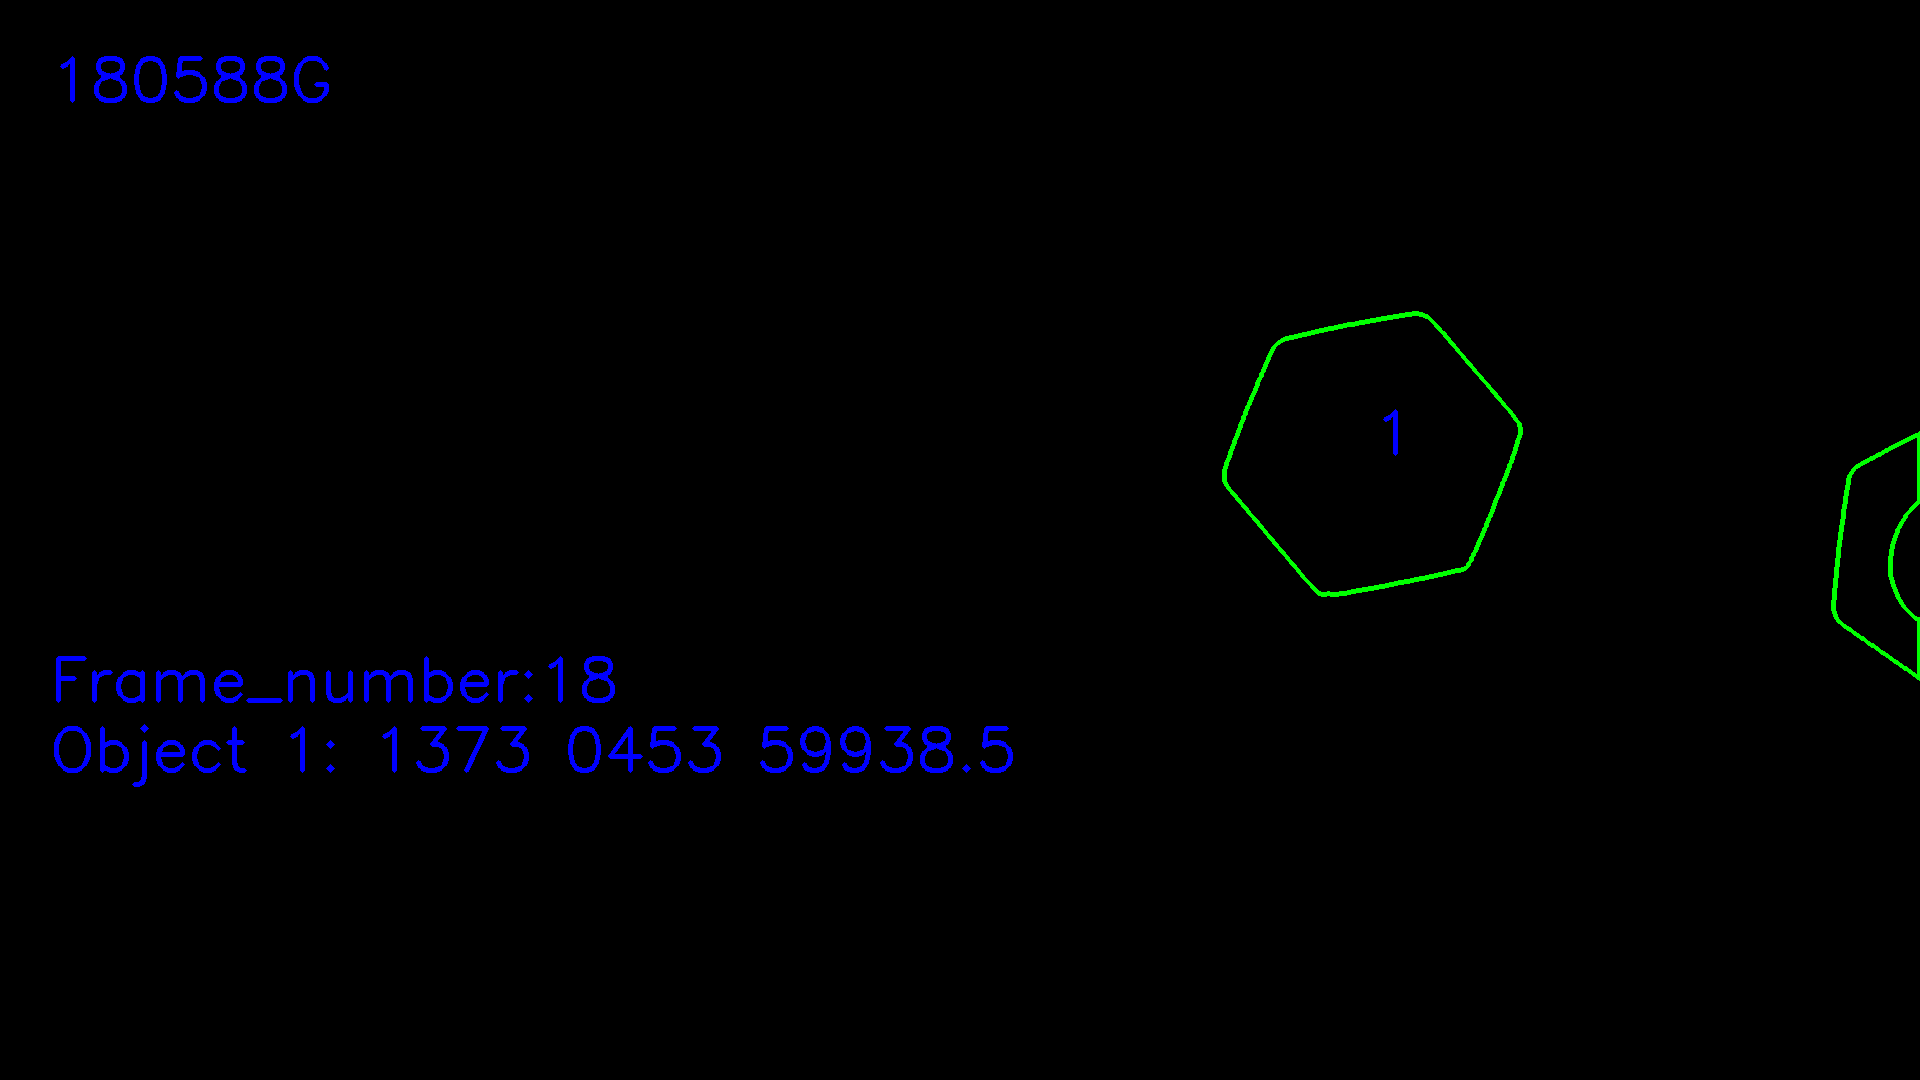

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.36300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.37300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


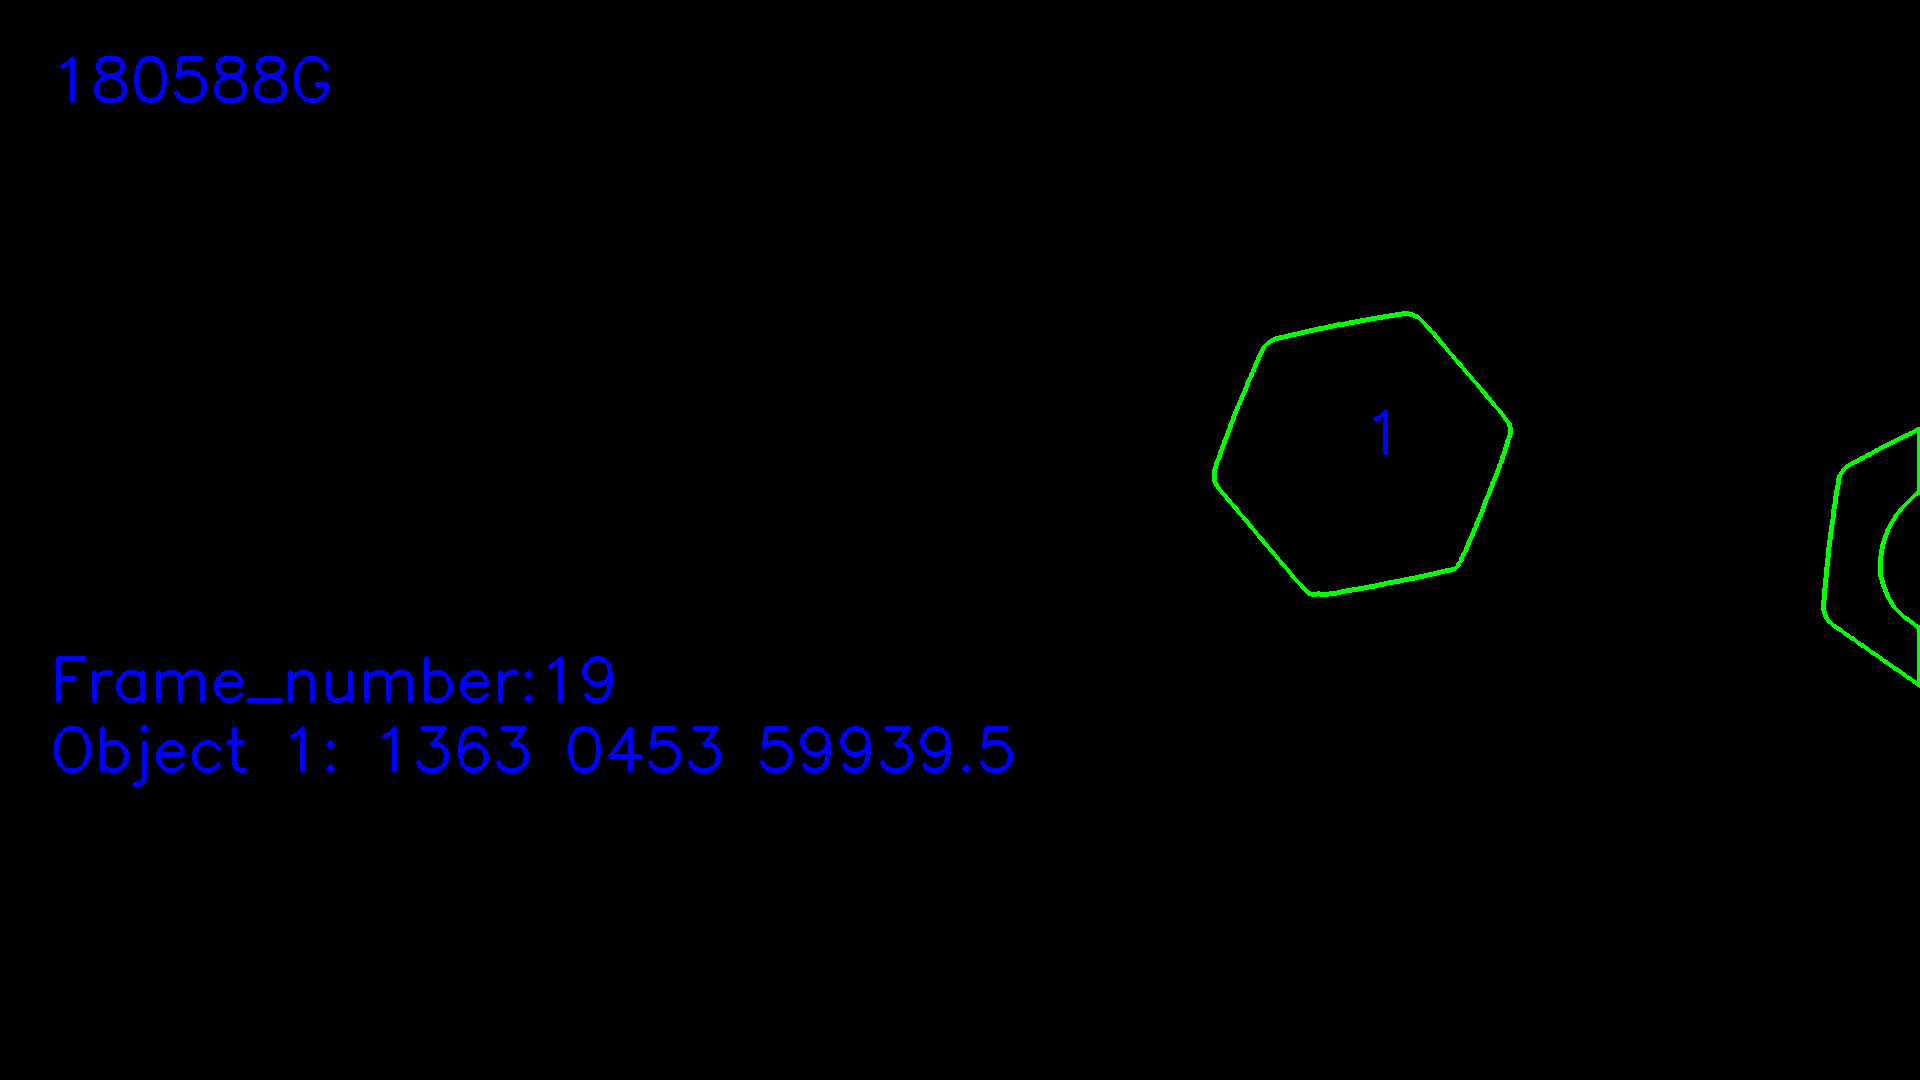

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.35300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.36300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


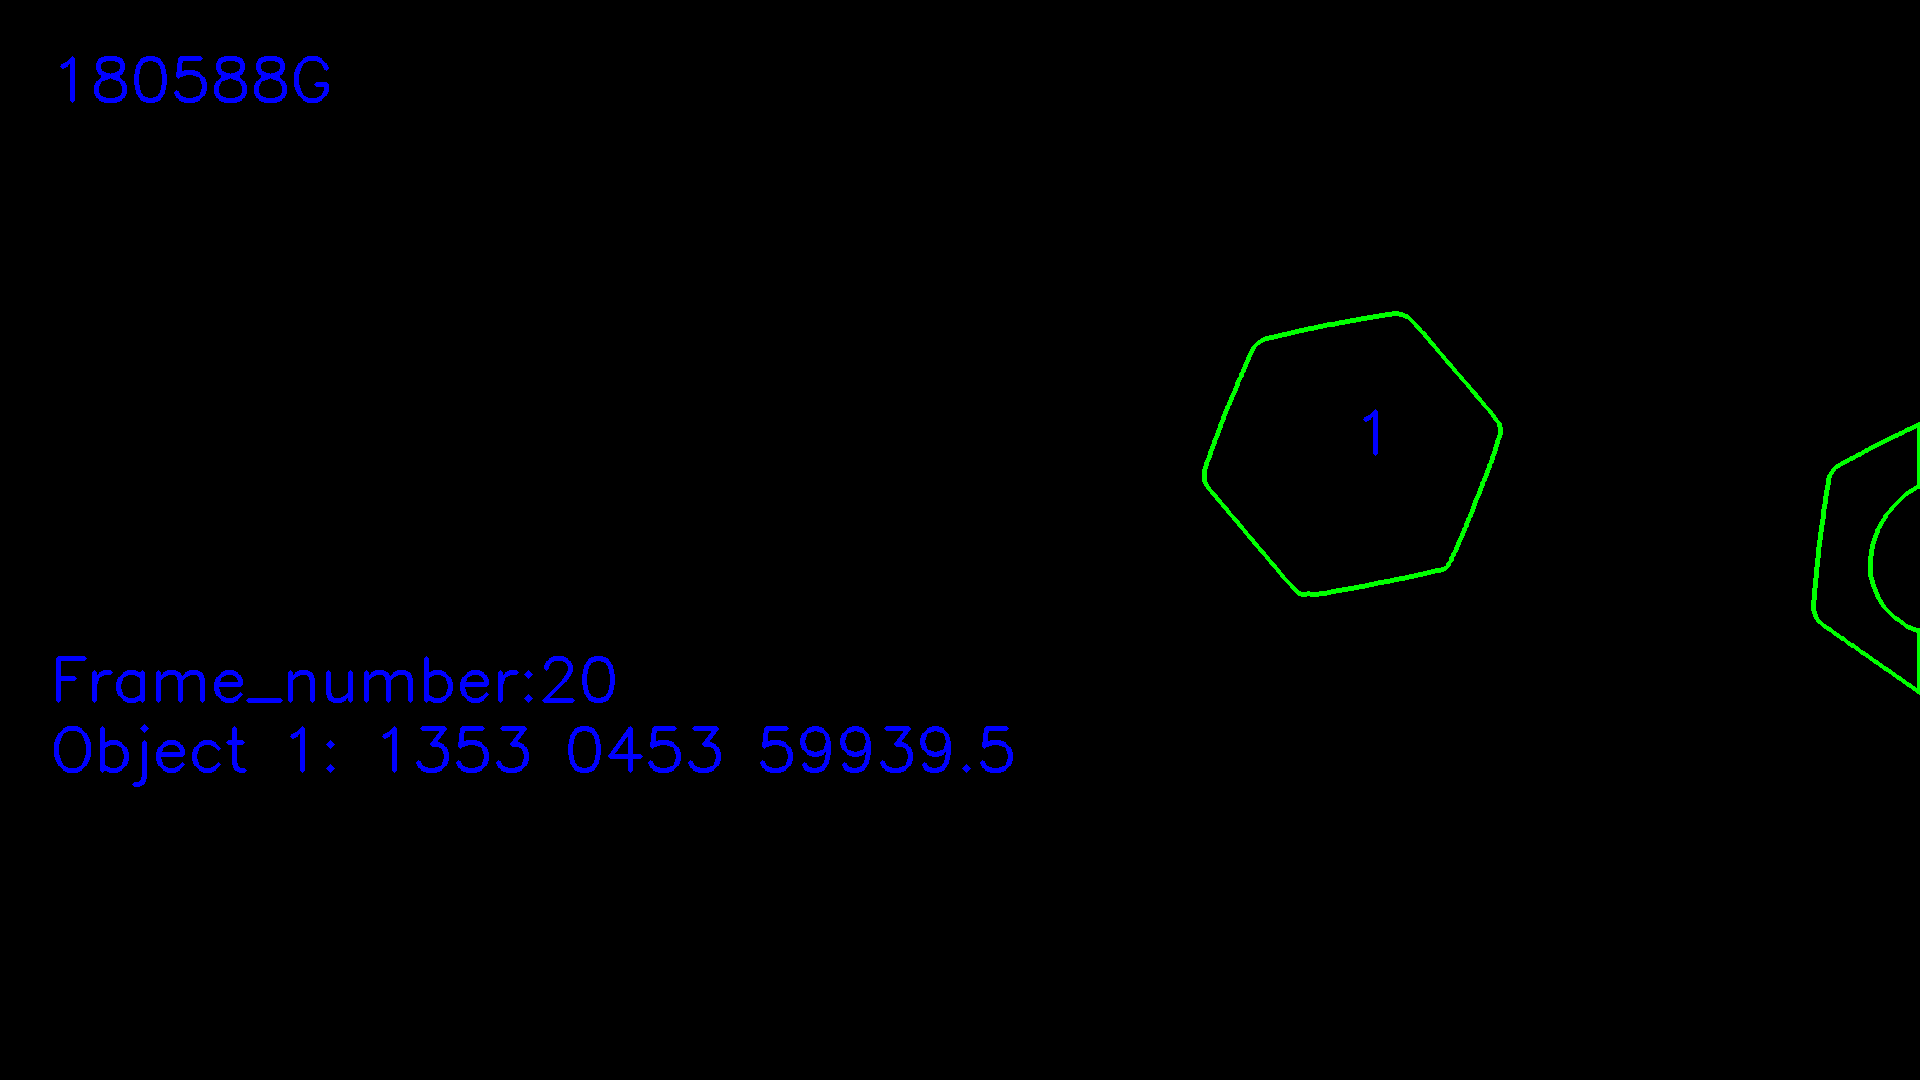

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.34300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00])]
Previousframe [array([1.35300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


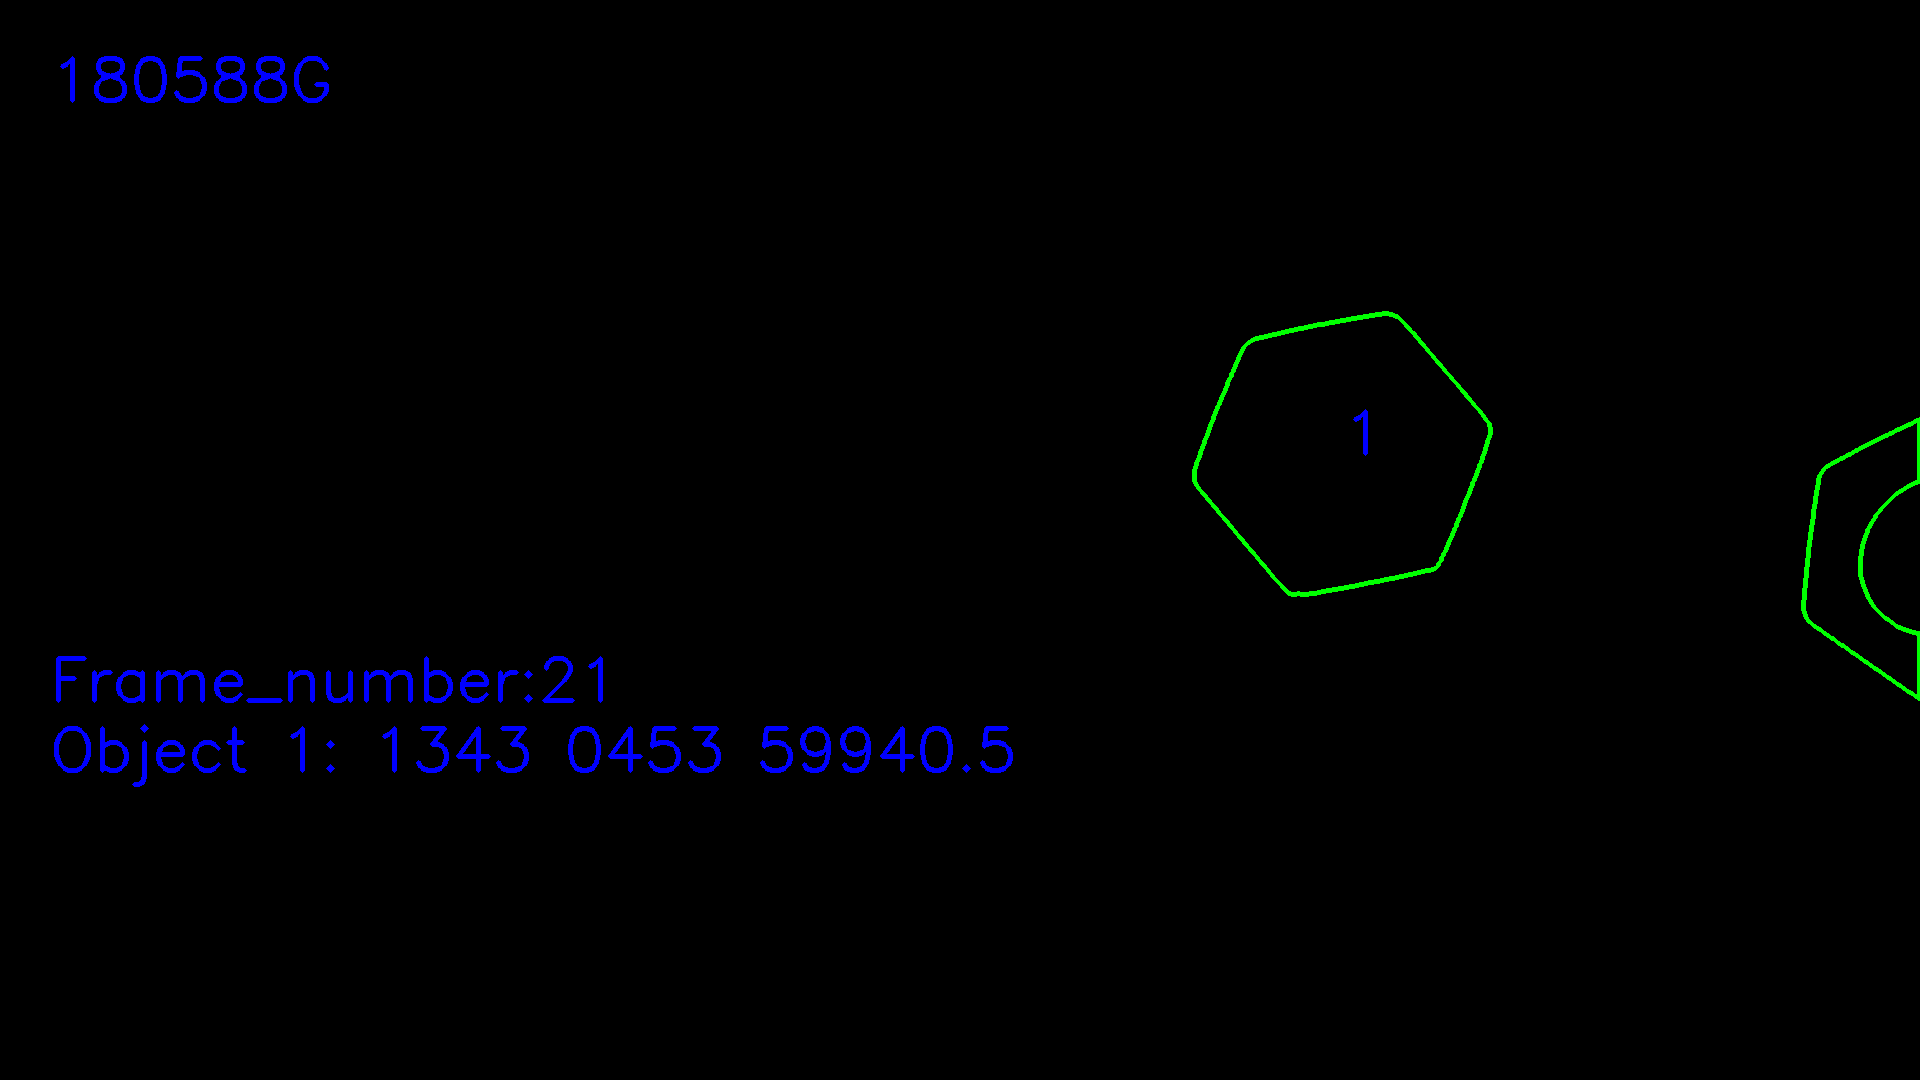

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.33300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00])]
Previousframe [array([1.34300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00])]


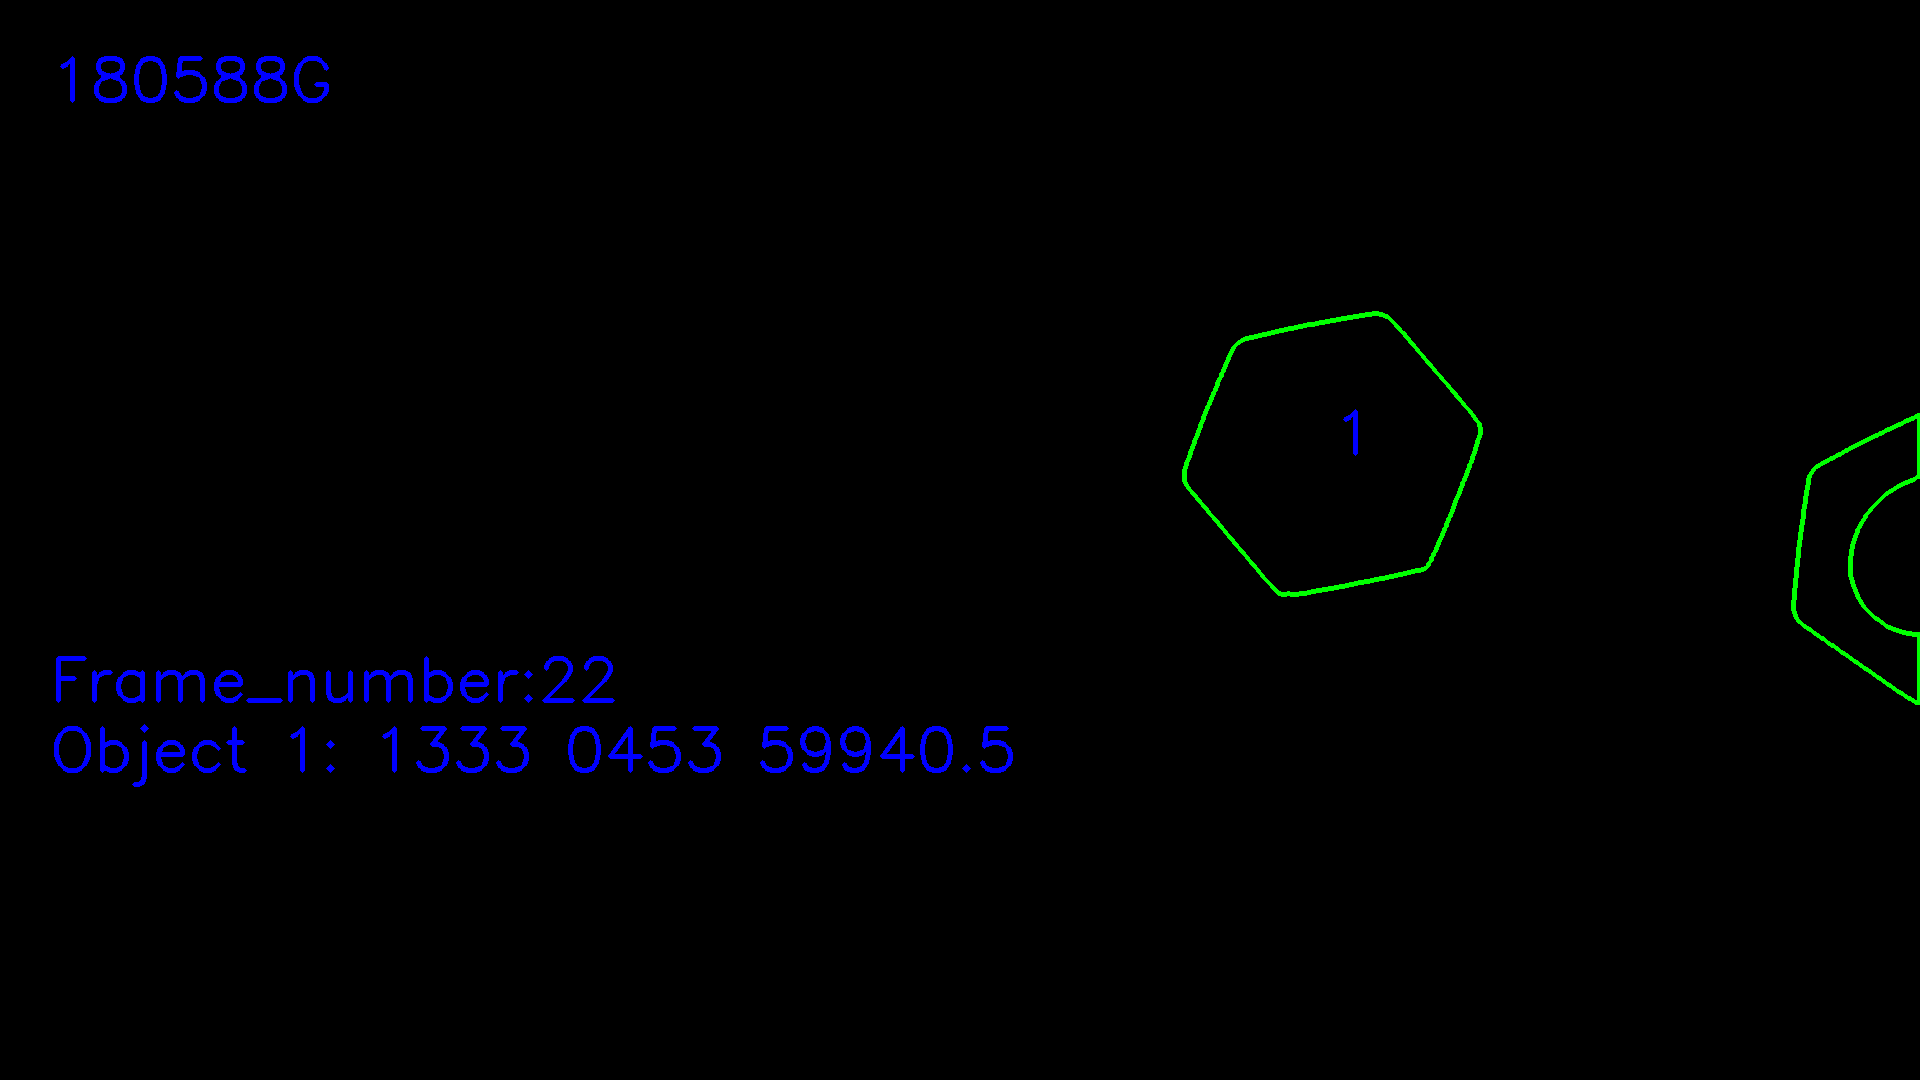

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.32300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.33300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00])]


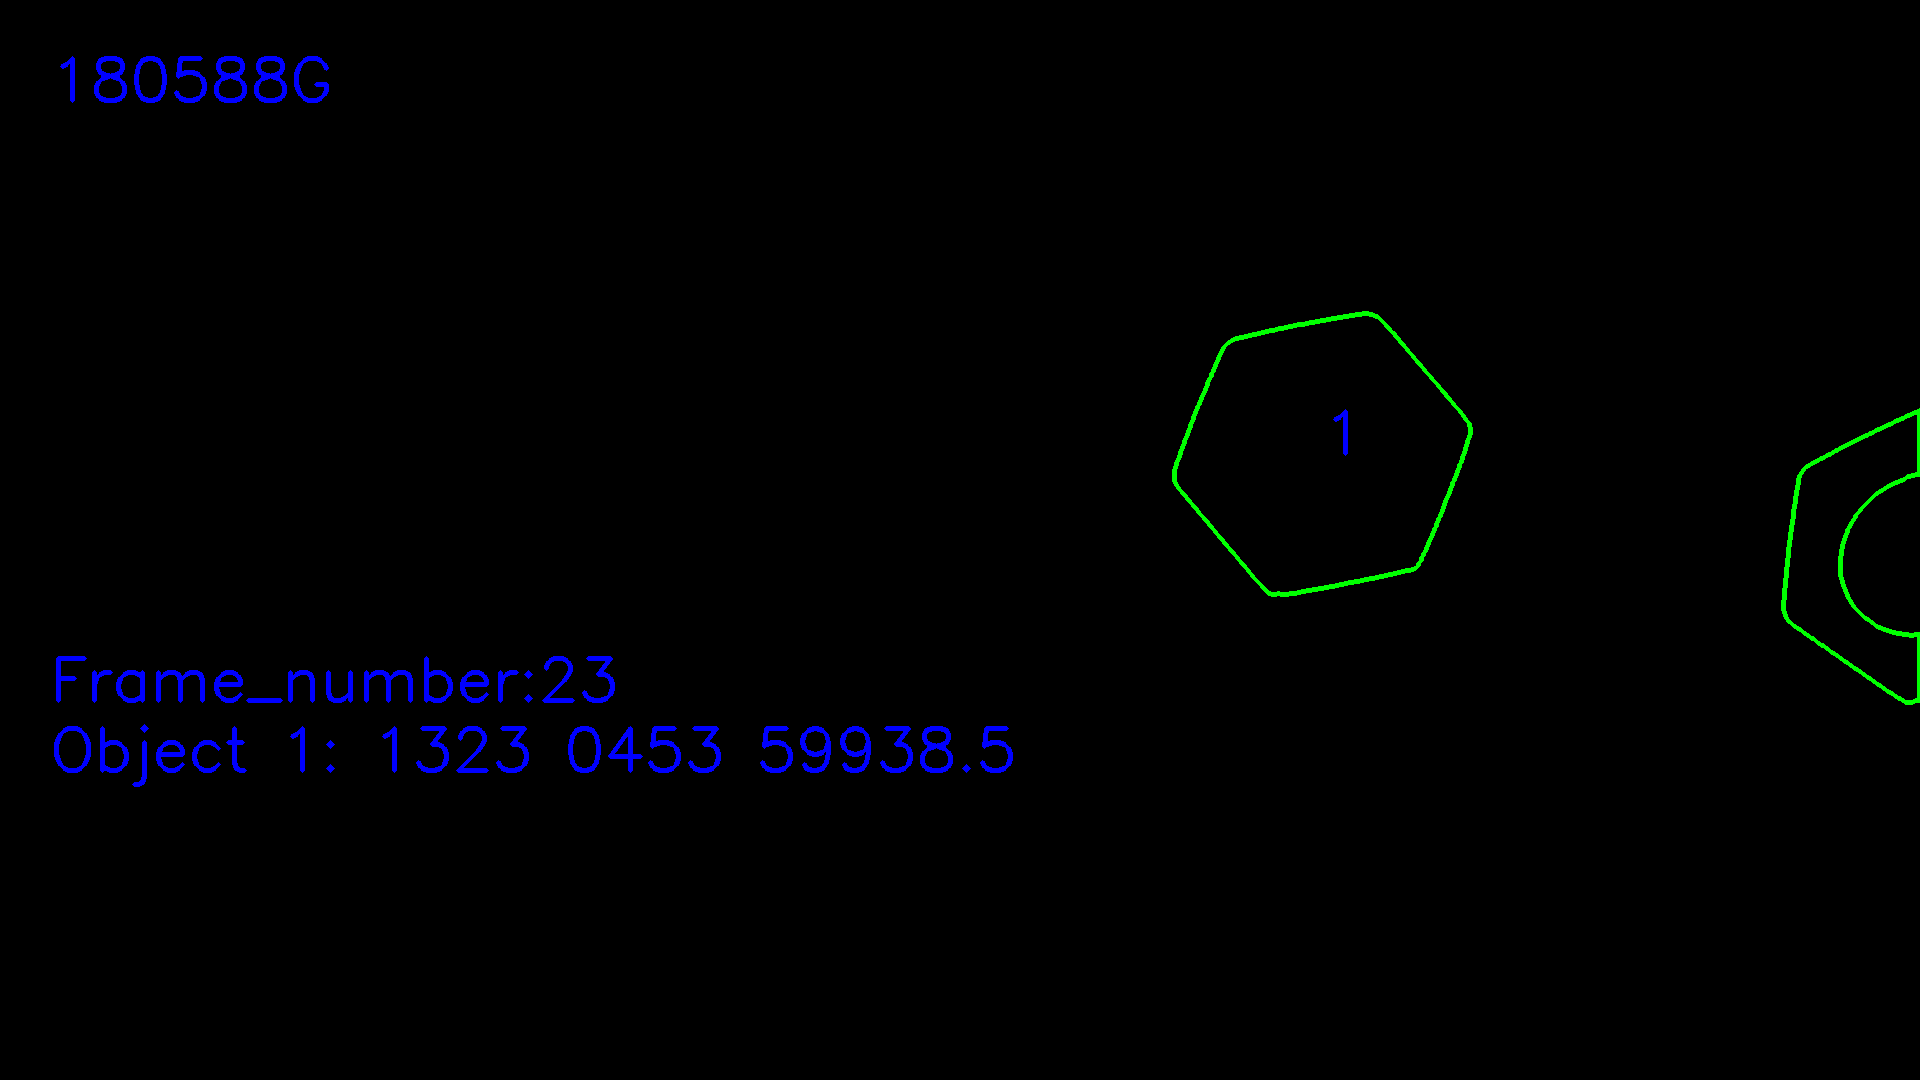

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.31300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.32300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


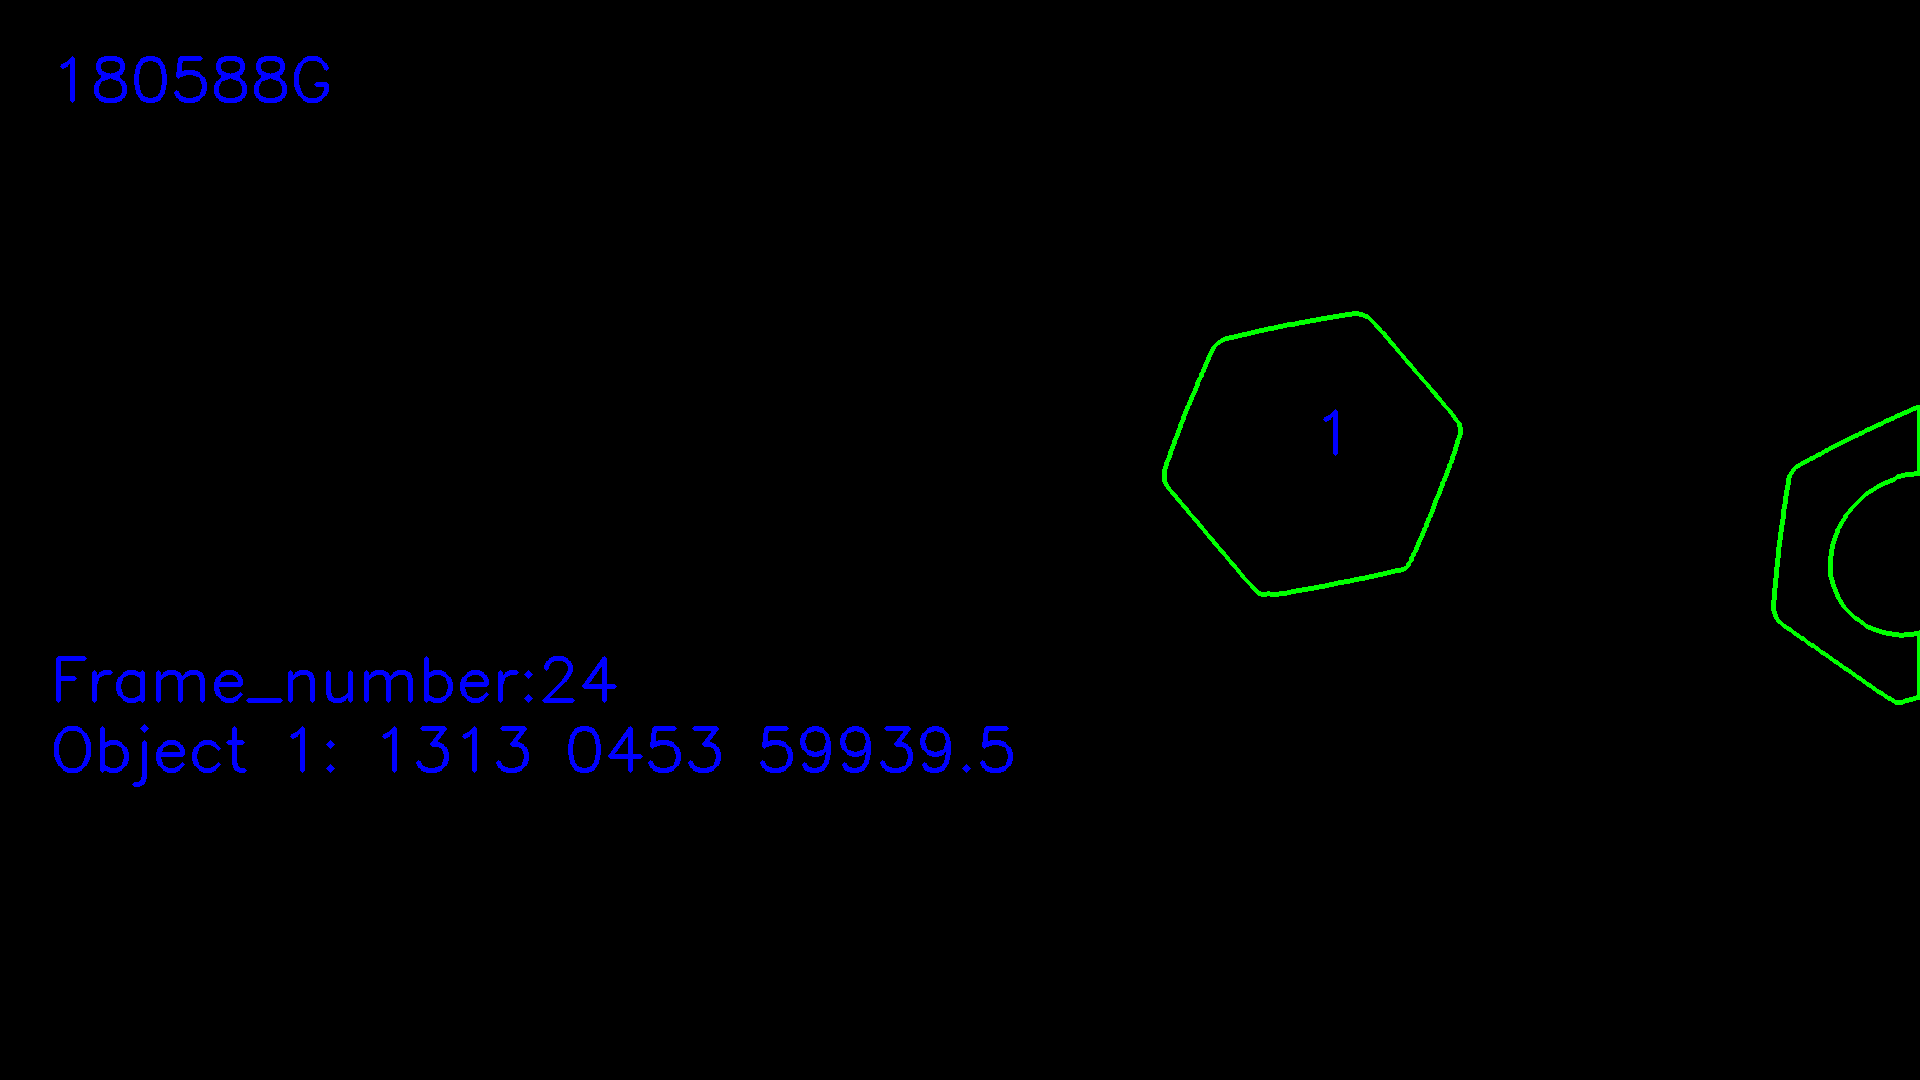

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.30300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.31300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


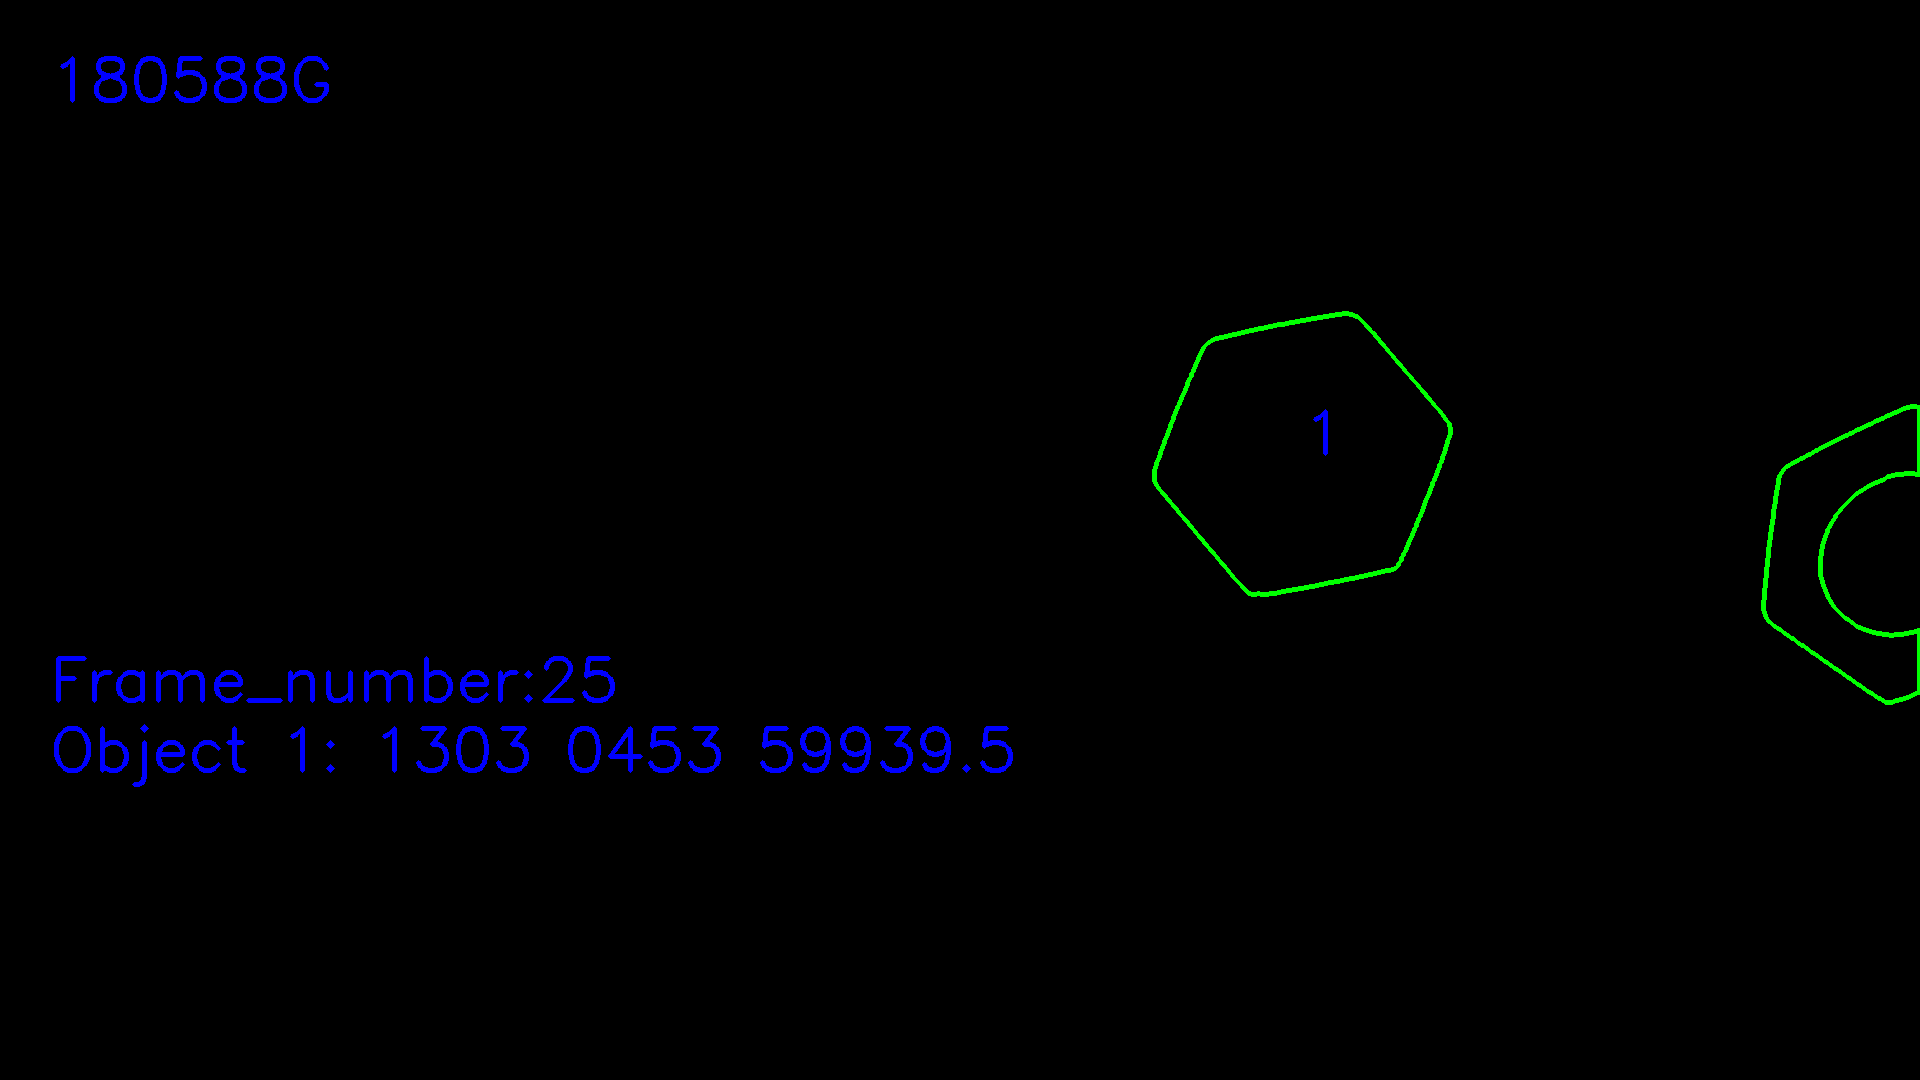

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.29300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.30300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


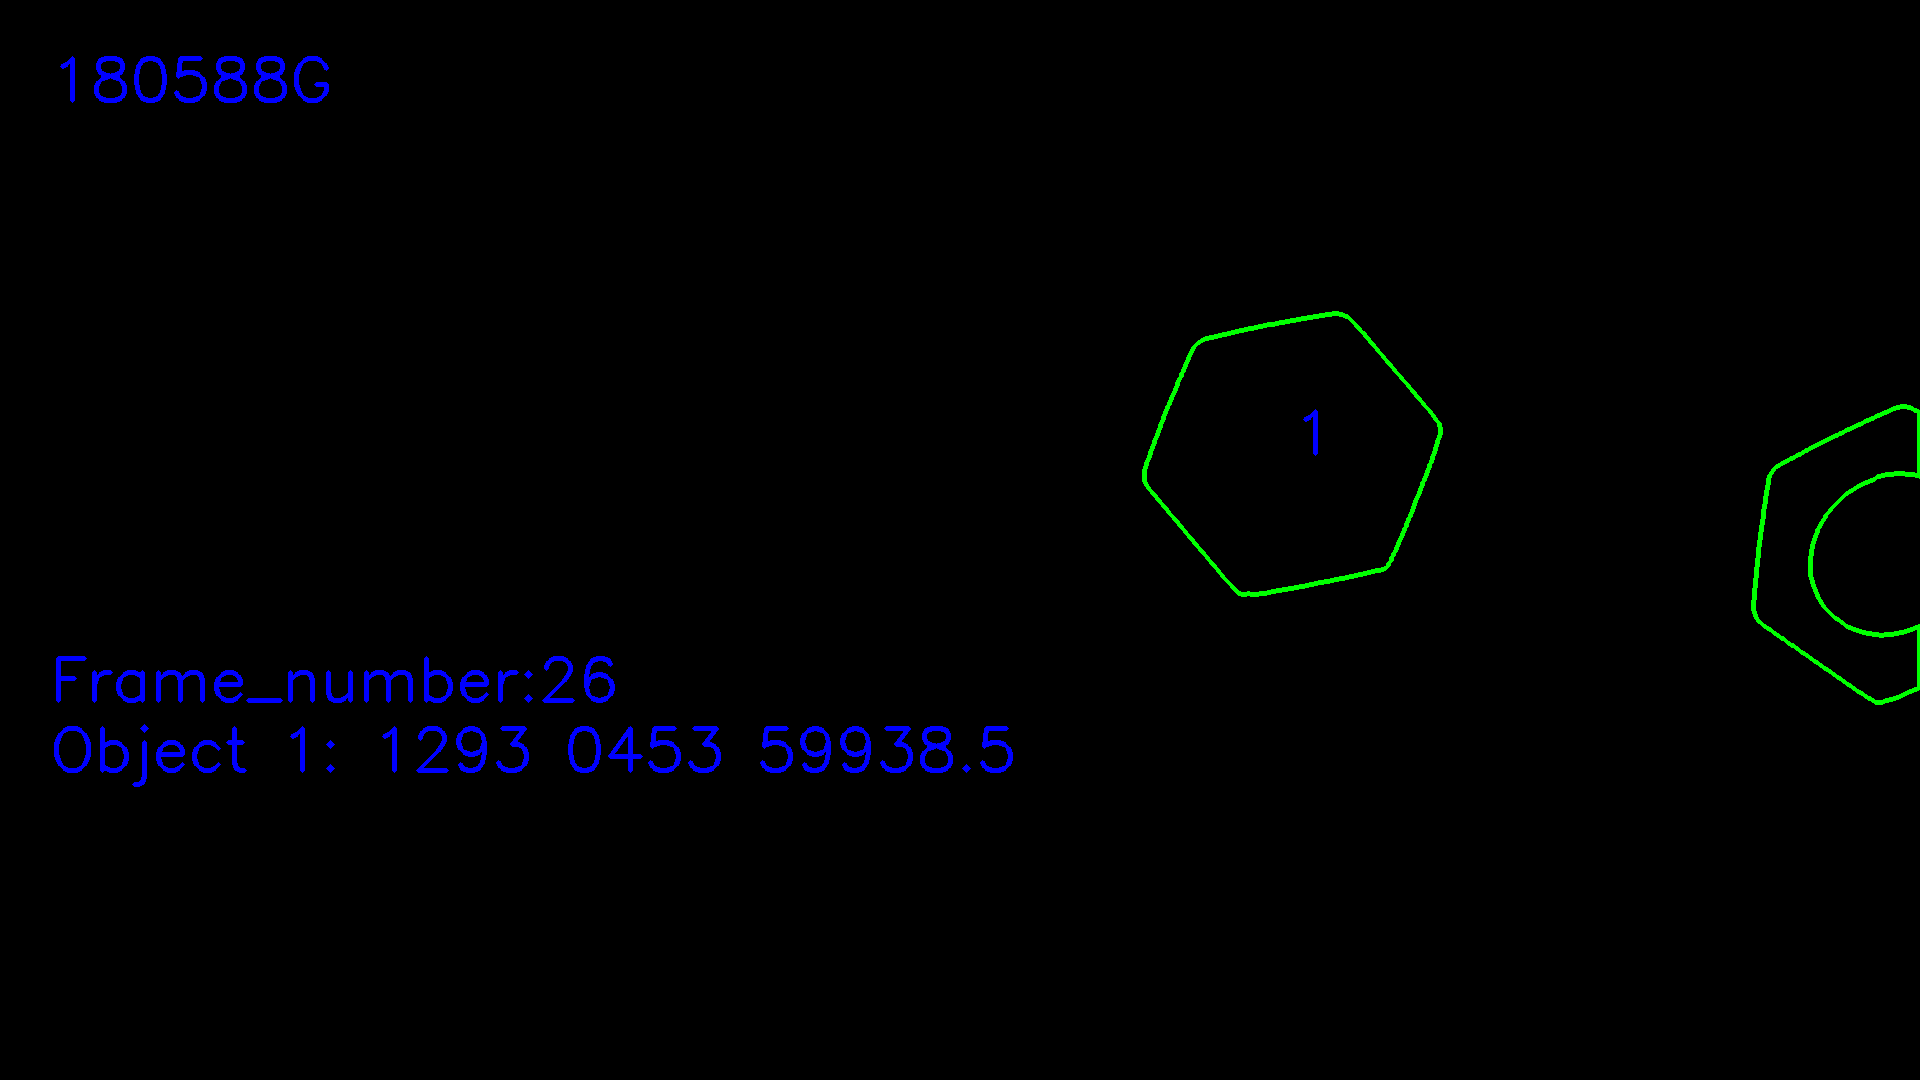

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.28300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00])]
Previousframe [array([1.29300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


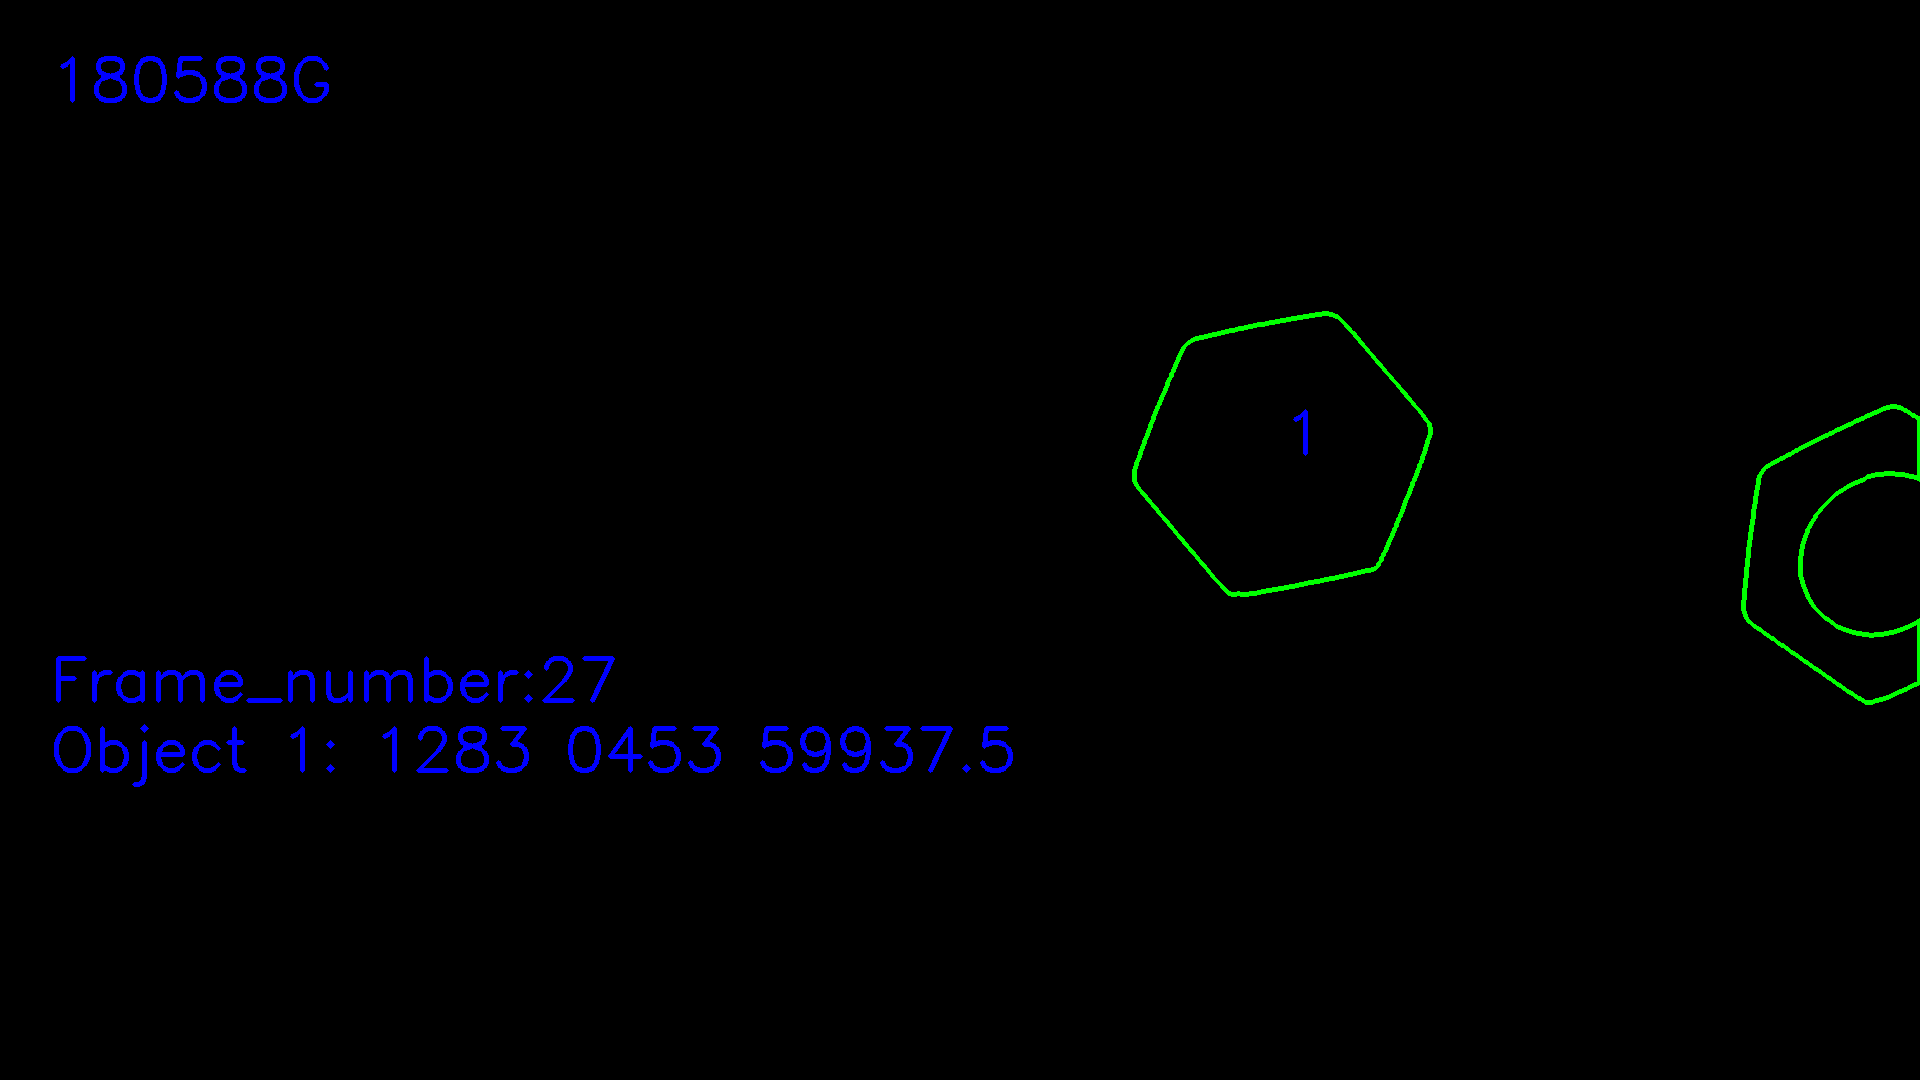

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.27300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]
Previousframe [array([1.28300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00])]


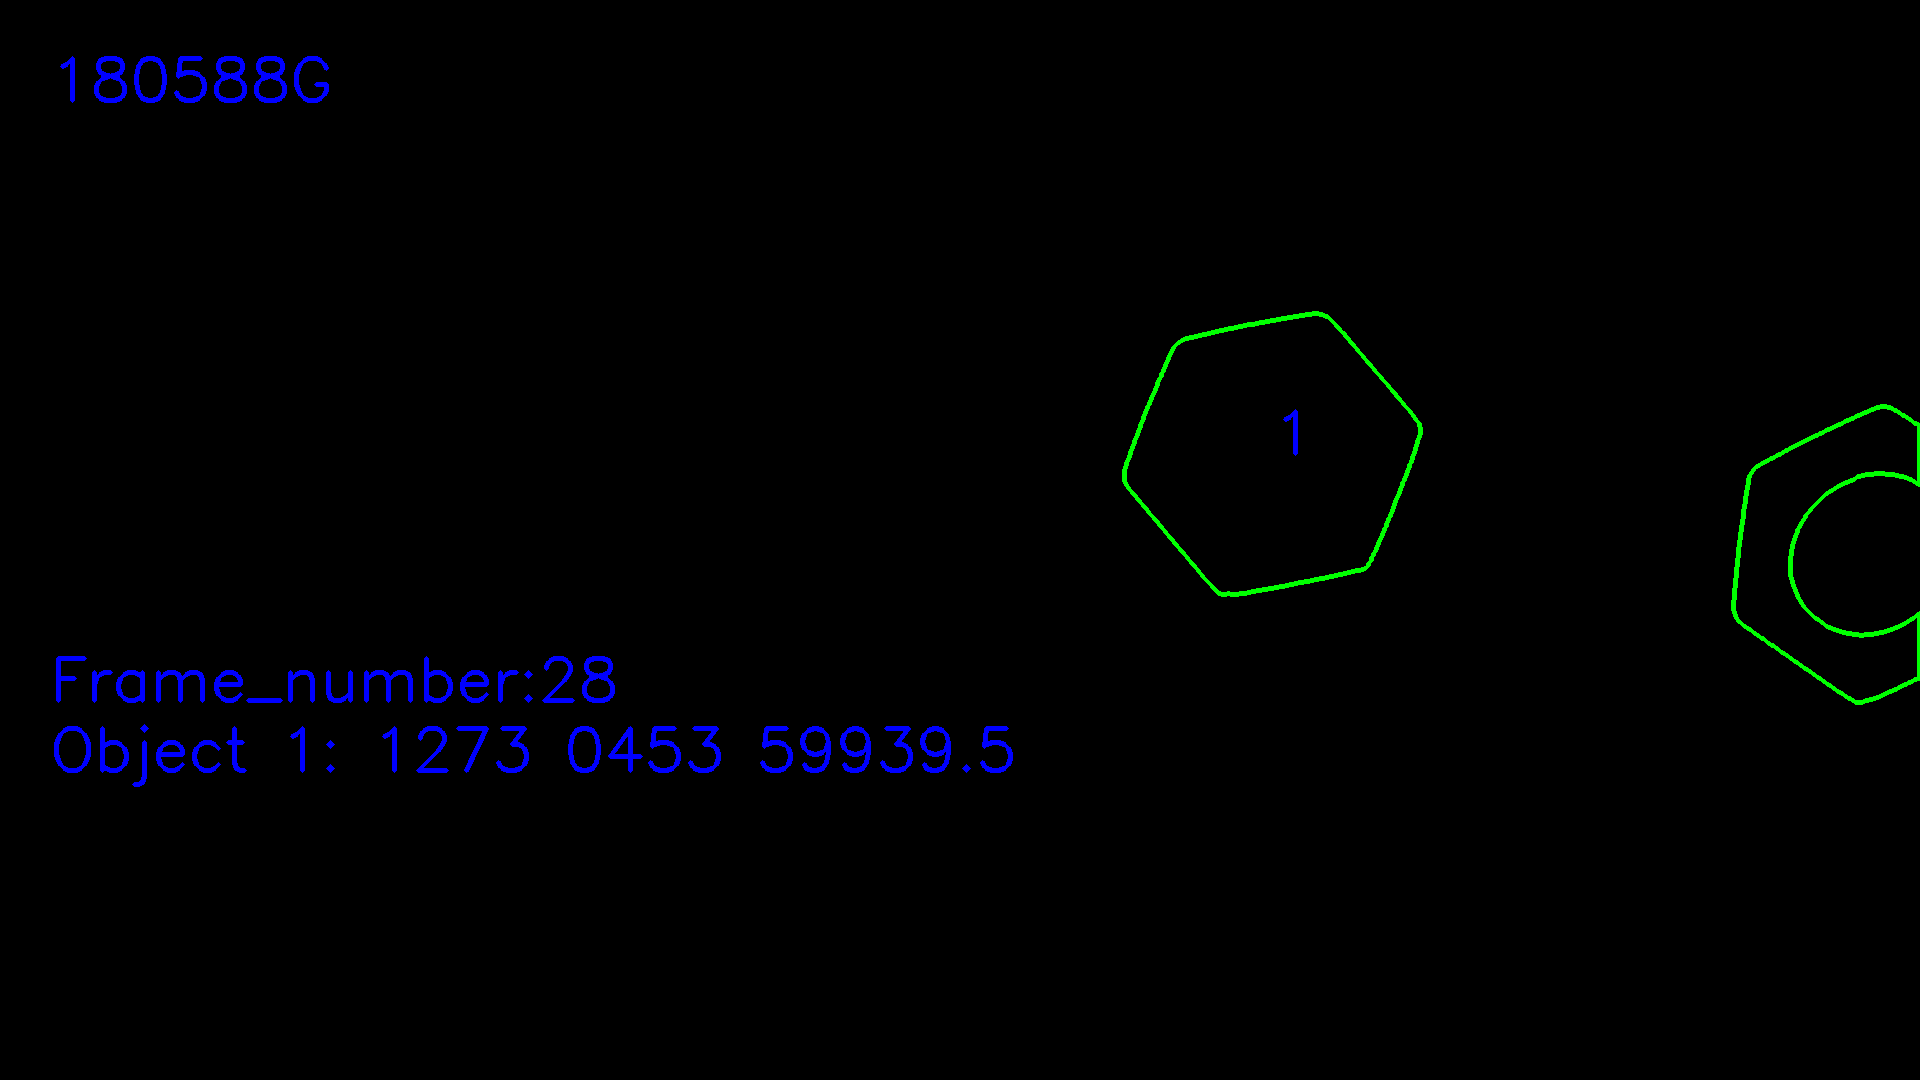

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.2630e+03, 4.5300e+02, 5.9939e+04, 1.0000e+00])]
Previousframe [array([1.27300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00])]


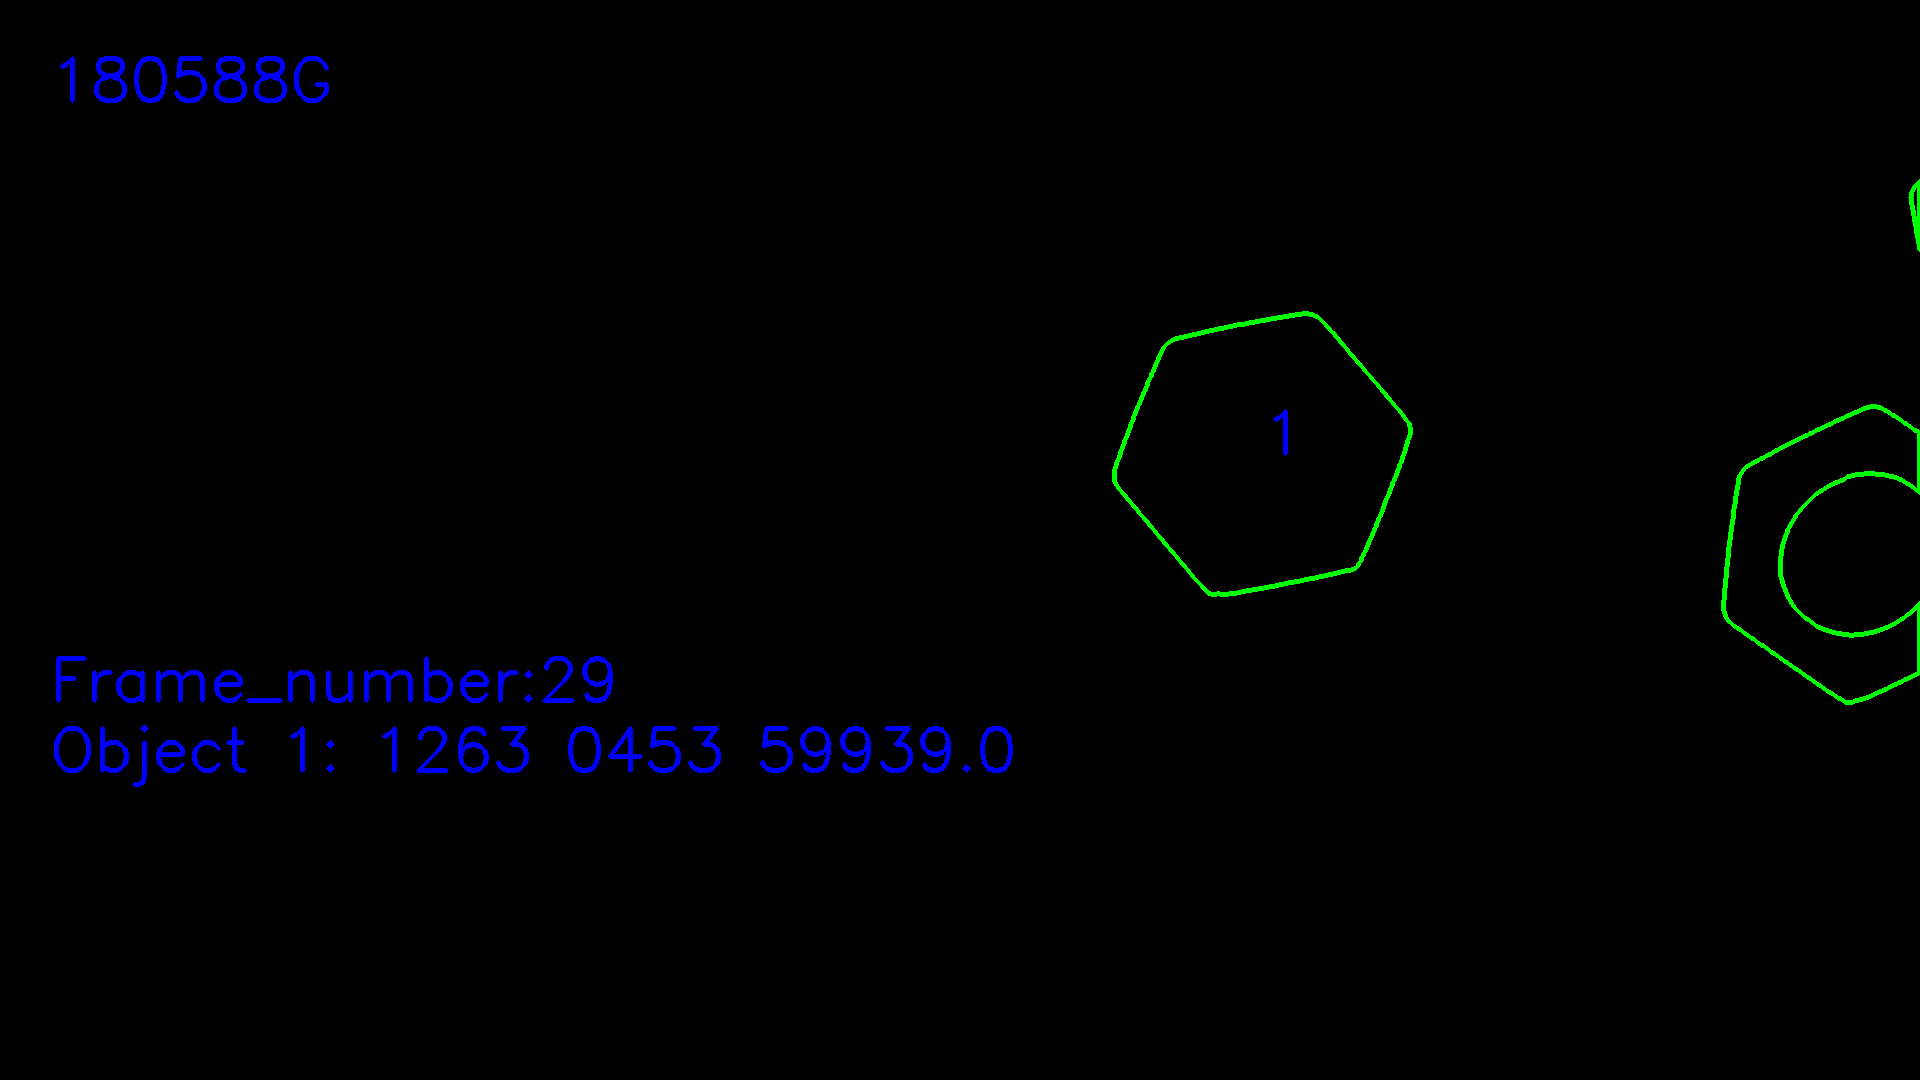

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.25300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00])]
Previousframe [array([1.2630e+03, 4.5300e+02, 5.9939e+04, 1.0000e+00])]


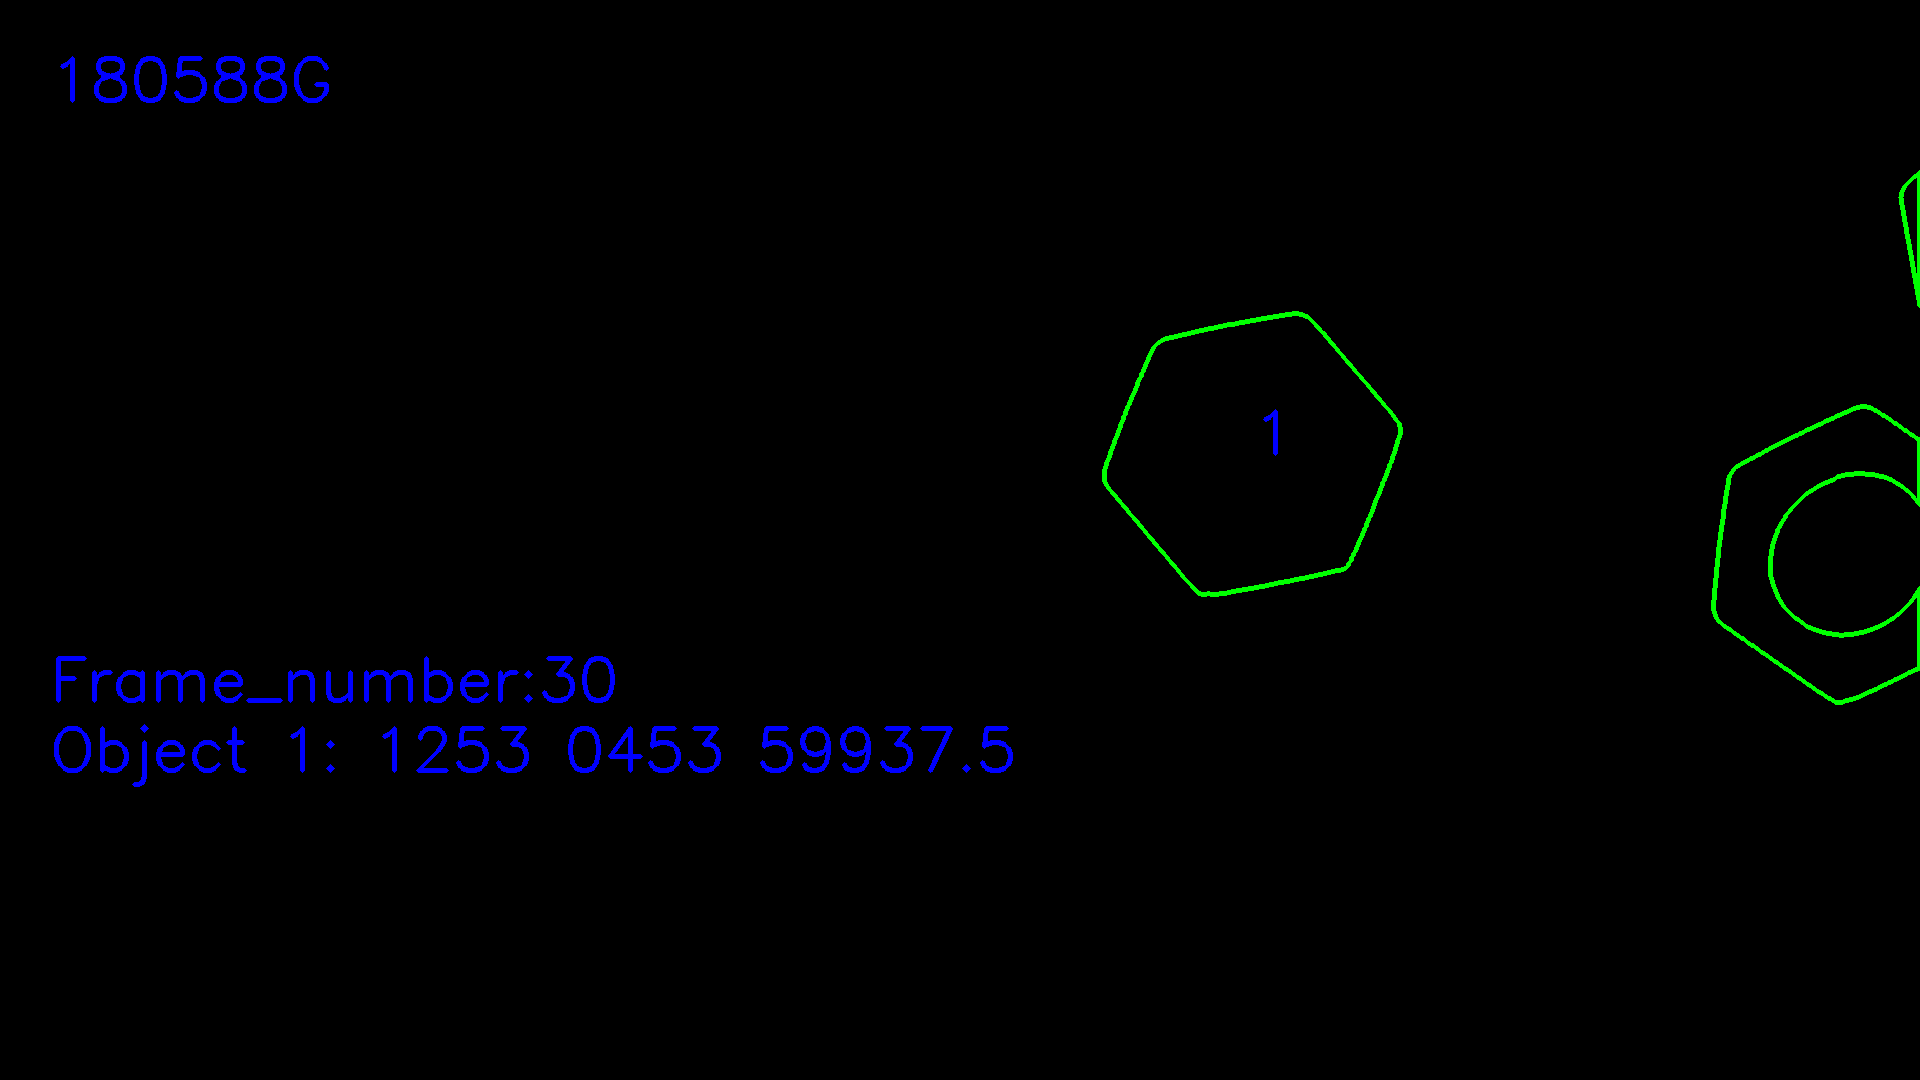

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.24300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]
Previousframe [array([1.25300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00])]


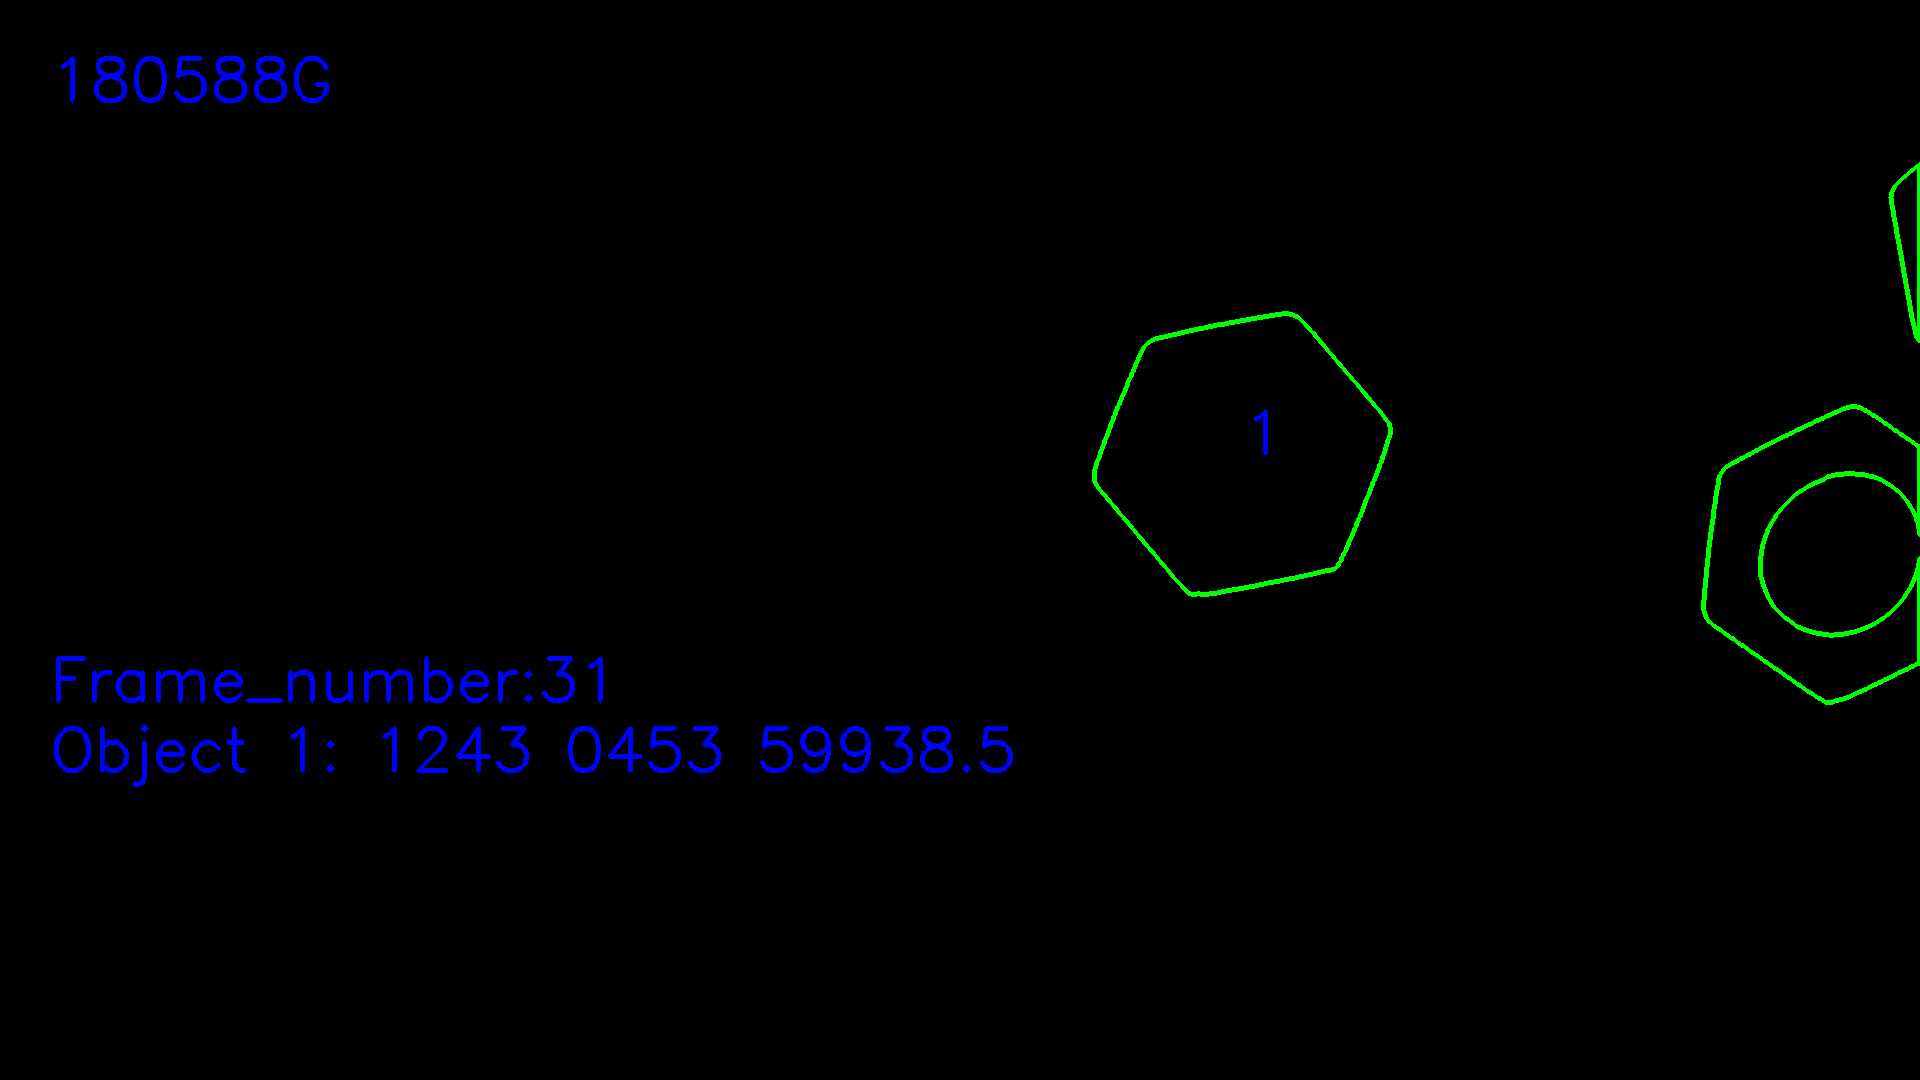

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.23300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.81700e+03, 5.53000e+02, 5.21045e+04, 2.00000e+00])]
Previousframe [array([1.24300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00])]


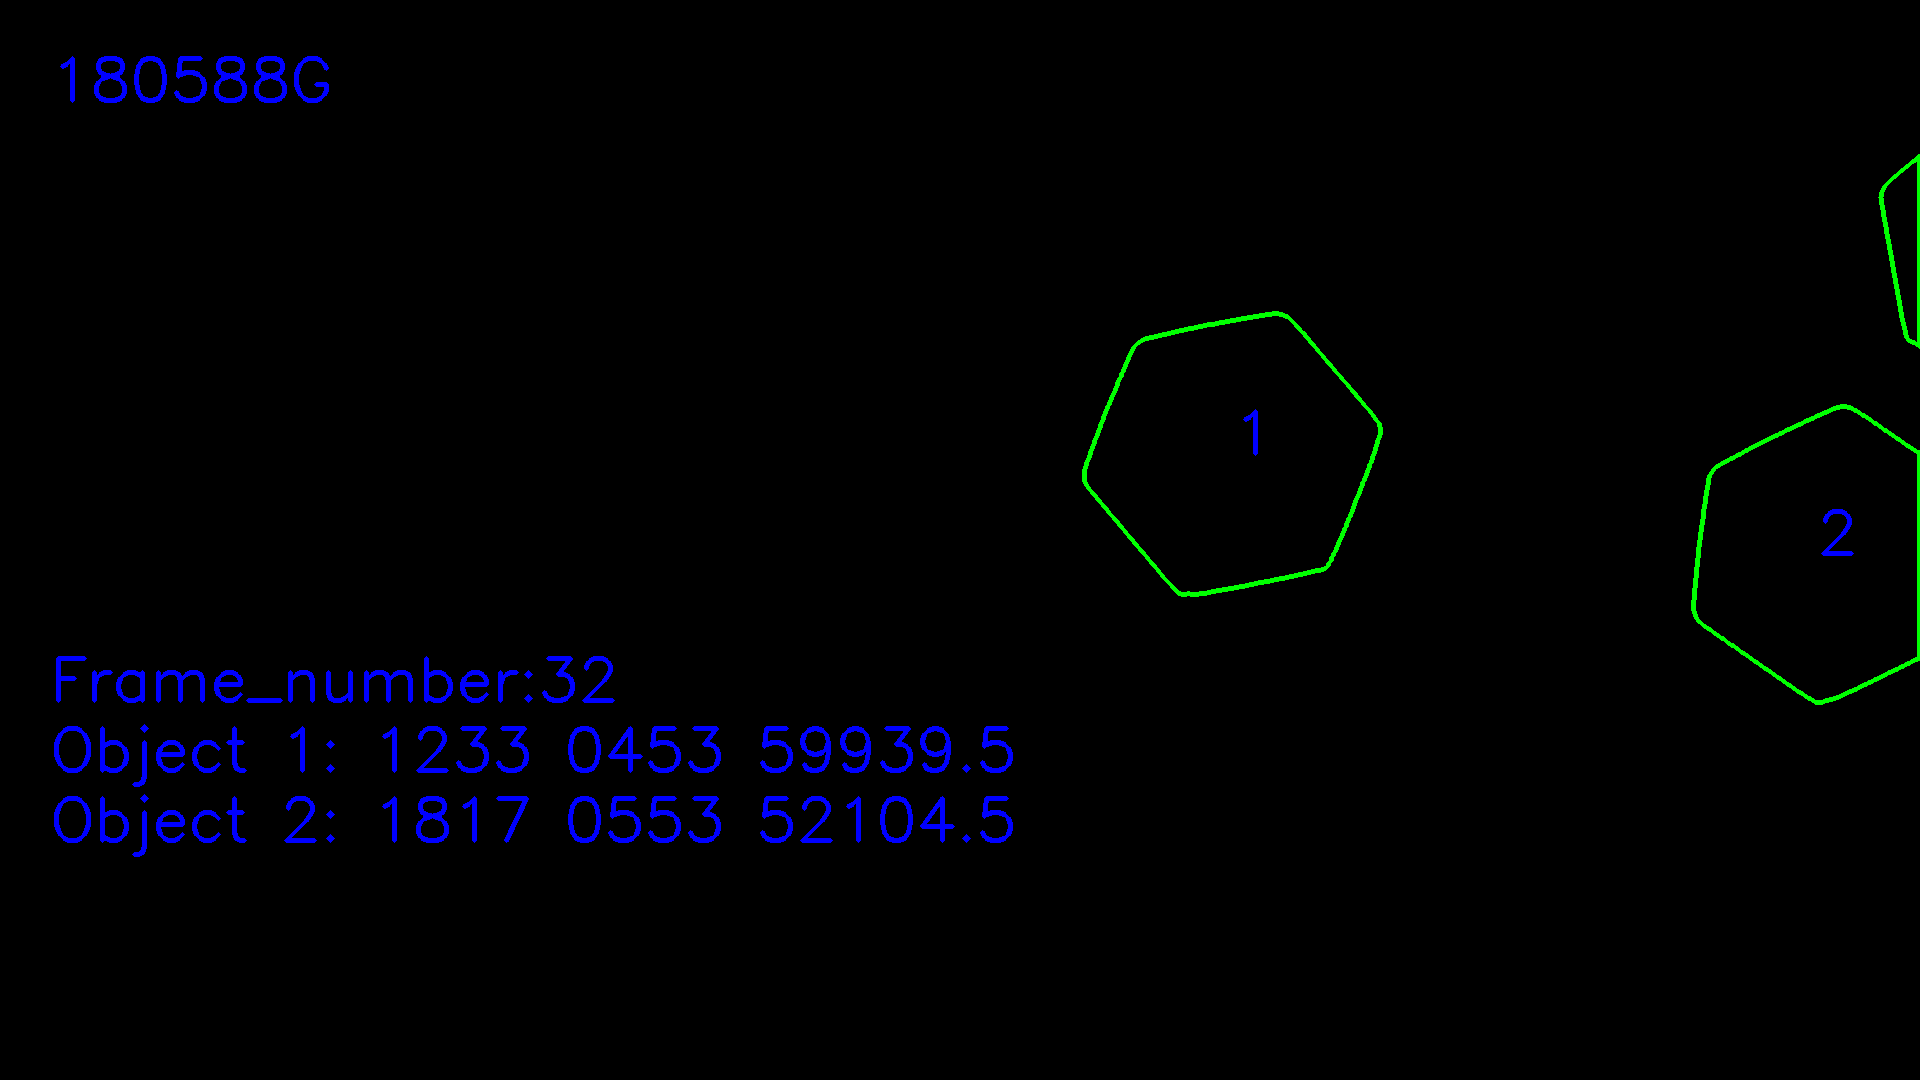

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.22300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.81100e+03, 5.54000e+02, 5.40855e+04, 2.00000e+00])]
Previousframe [array([1.23300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.81700e+03, 5.53000e+02, 5.21045e+04, 2.00000e+00])]


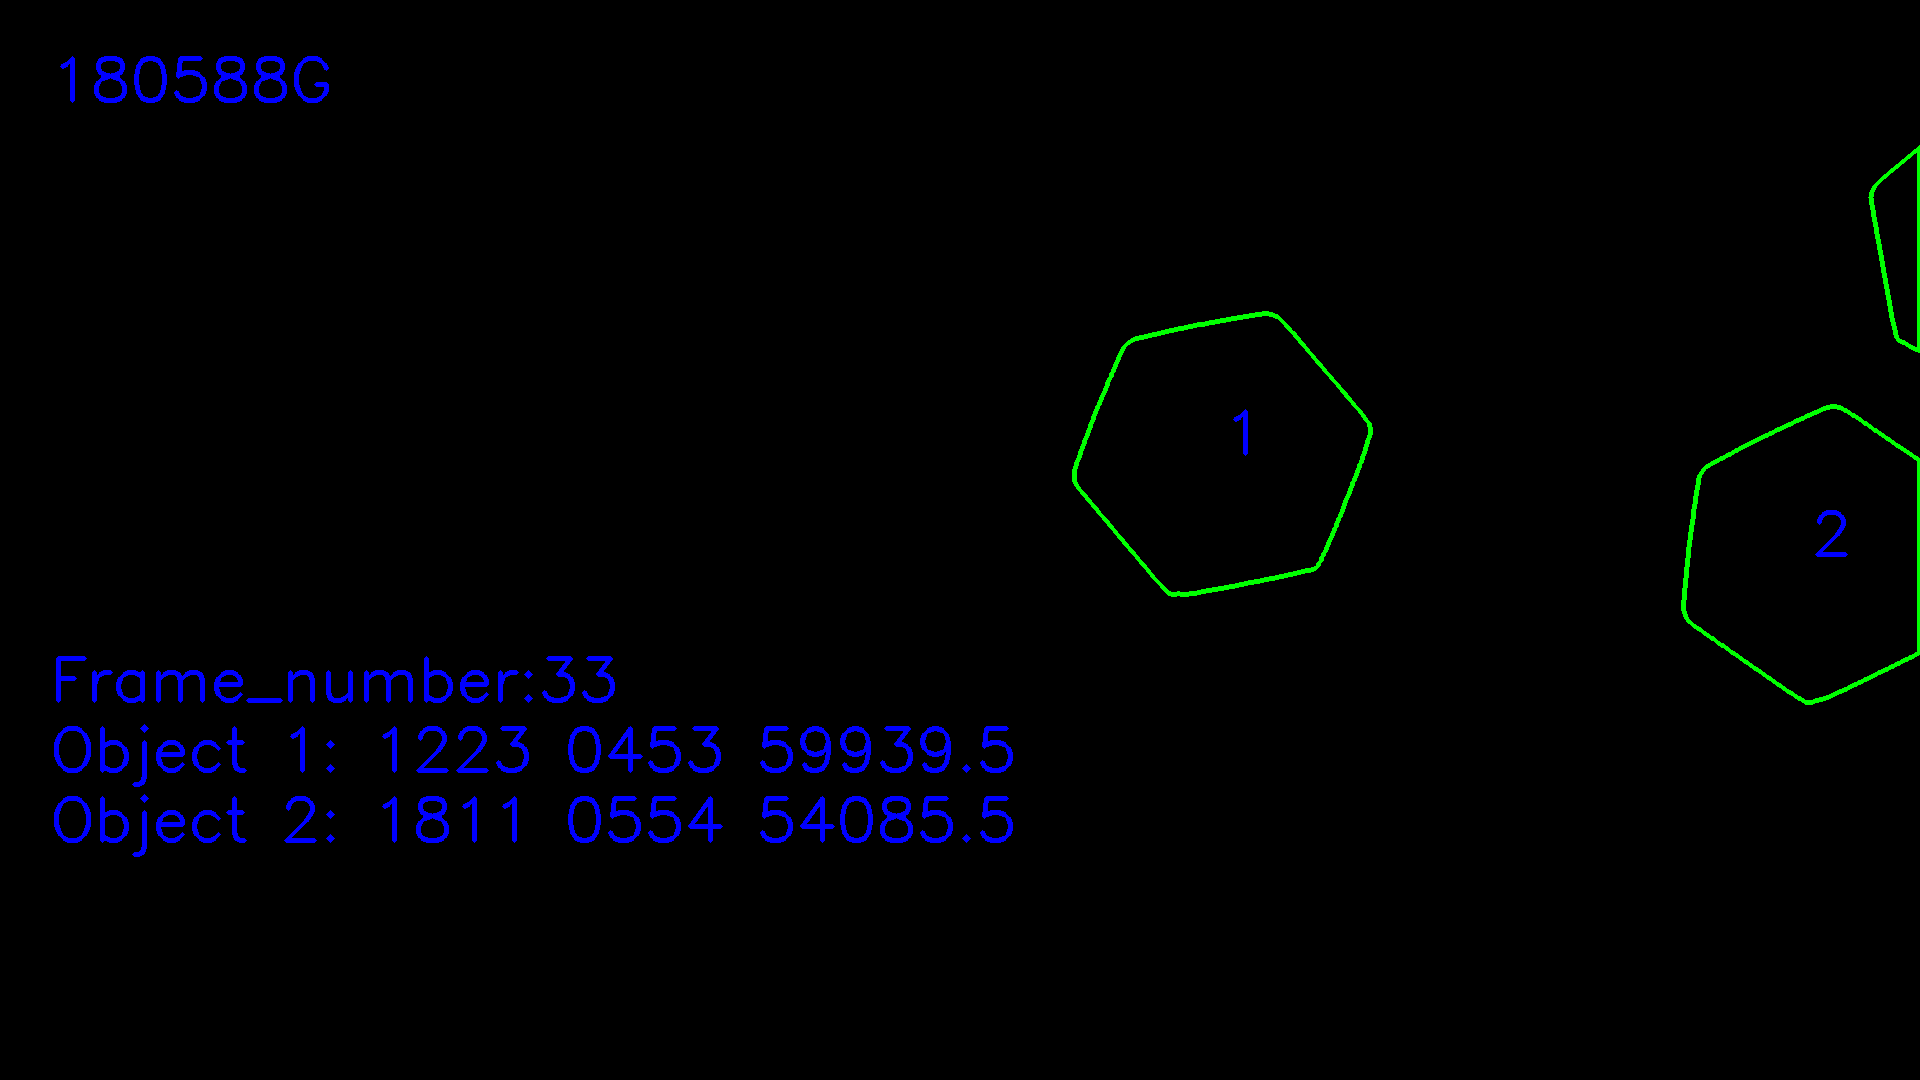

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.21300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.8050e+03, 5.5400e+02, 5.5949e+04, 2.0000e+00])]
Previousframe [array([1.22300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.81100e+03, 5.54000e+02, 5.40855e+04, 2.00000e+00])]


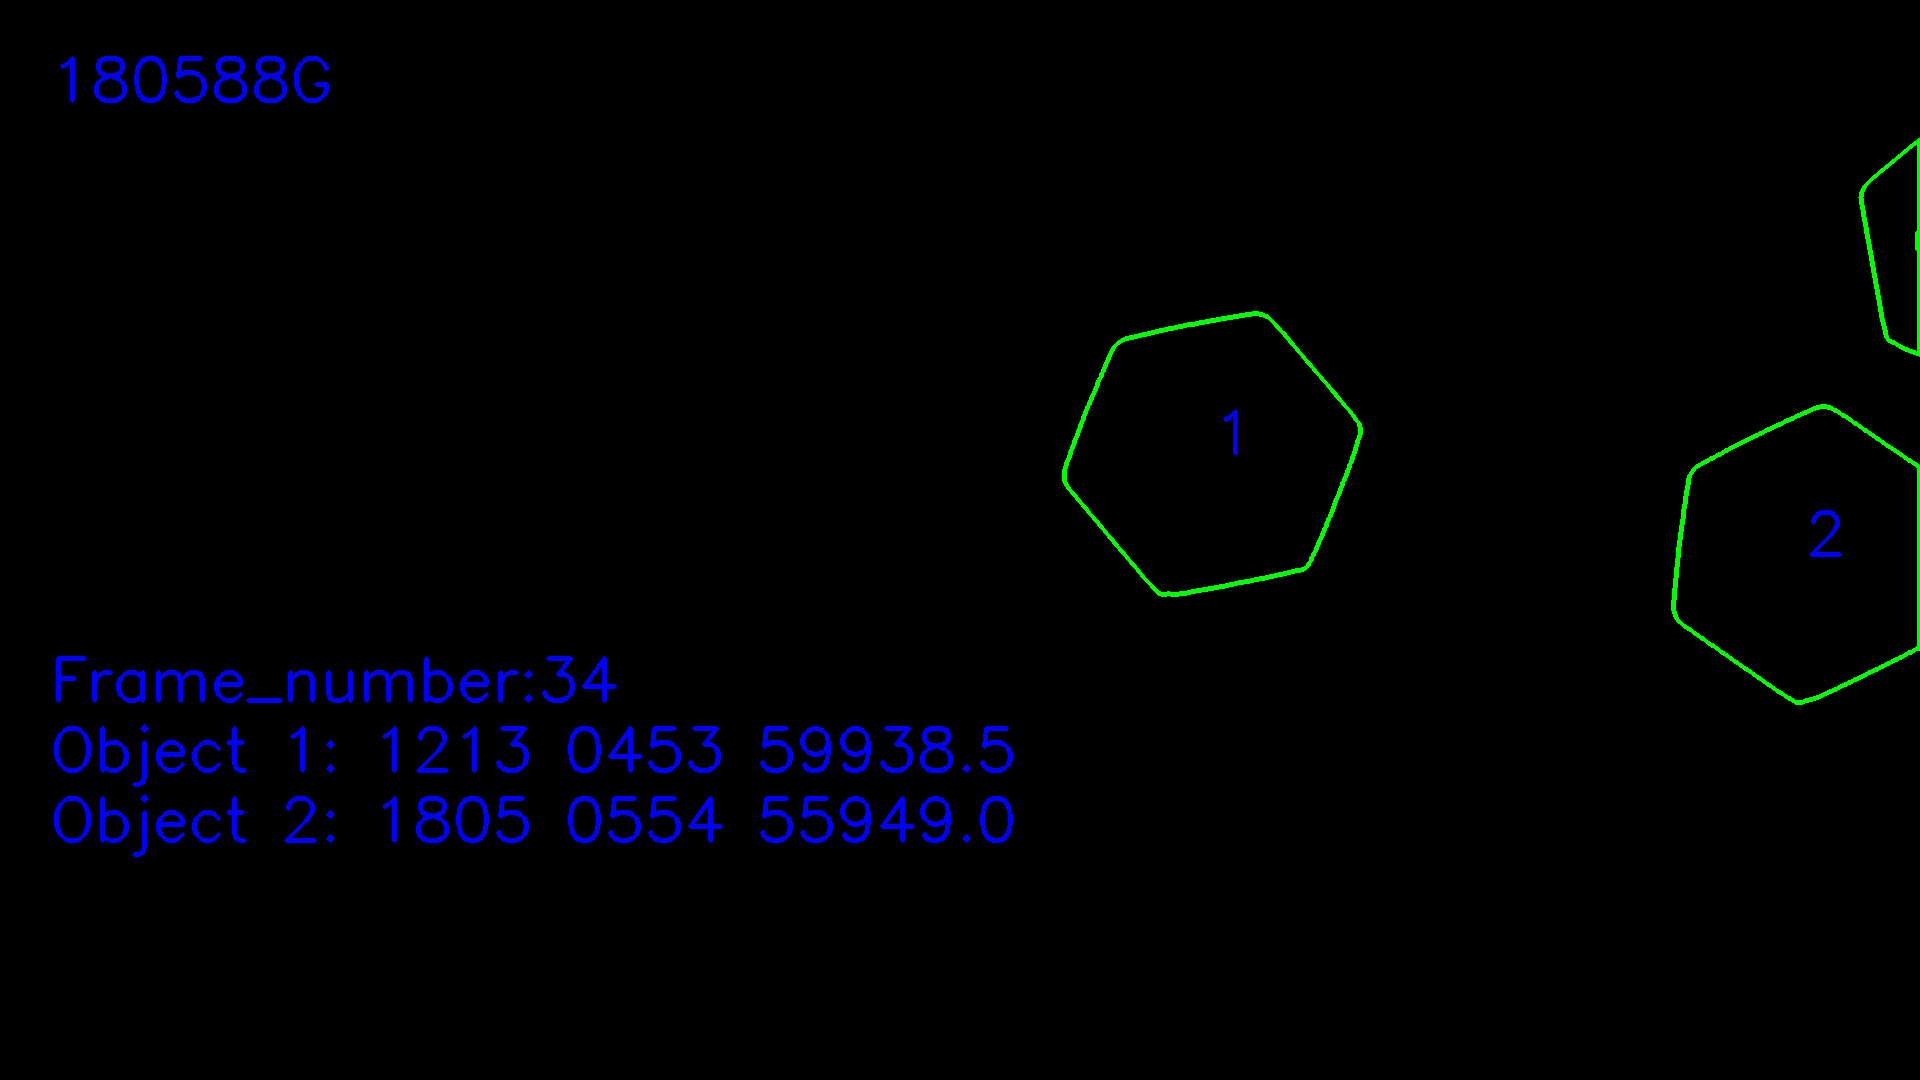

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.20300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.79800e+03, 5.54000e+02, 5.76885e+04, 2.00000e+00])]
Previousframe [array([1.21300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.8050e+03, 5.5400e+02, 5.5949e+04, 2.0000e+00])]


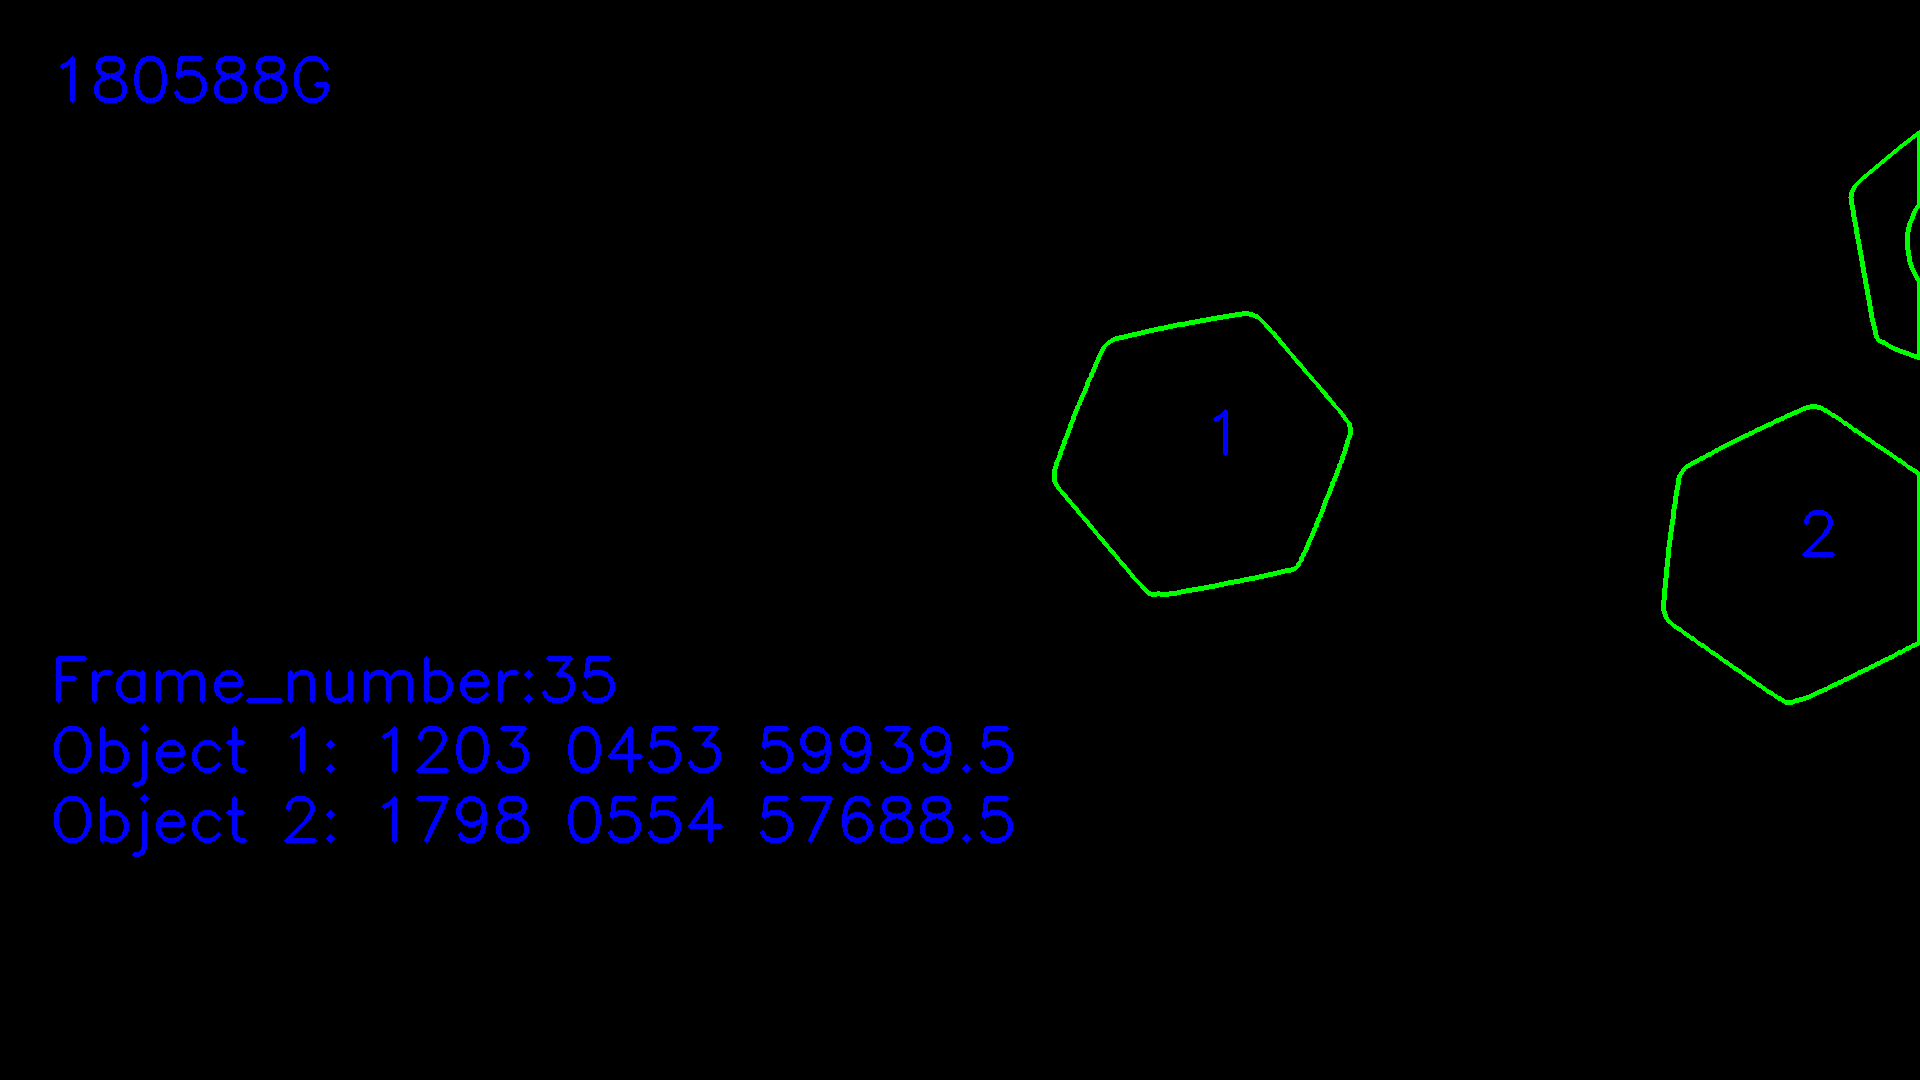

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.19300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.7920e+03, 5.5400e+02, 5.9198e+04, 2.0000e+00])]
Previousframe [array([1.20300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.79800e+03, 5.54000e+02, 5.76885e+04, 2.00000e+00])]


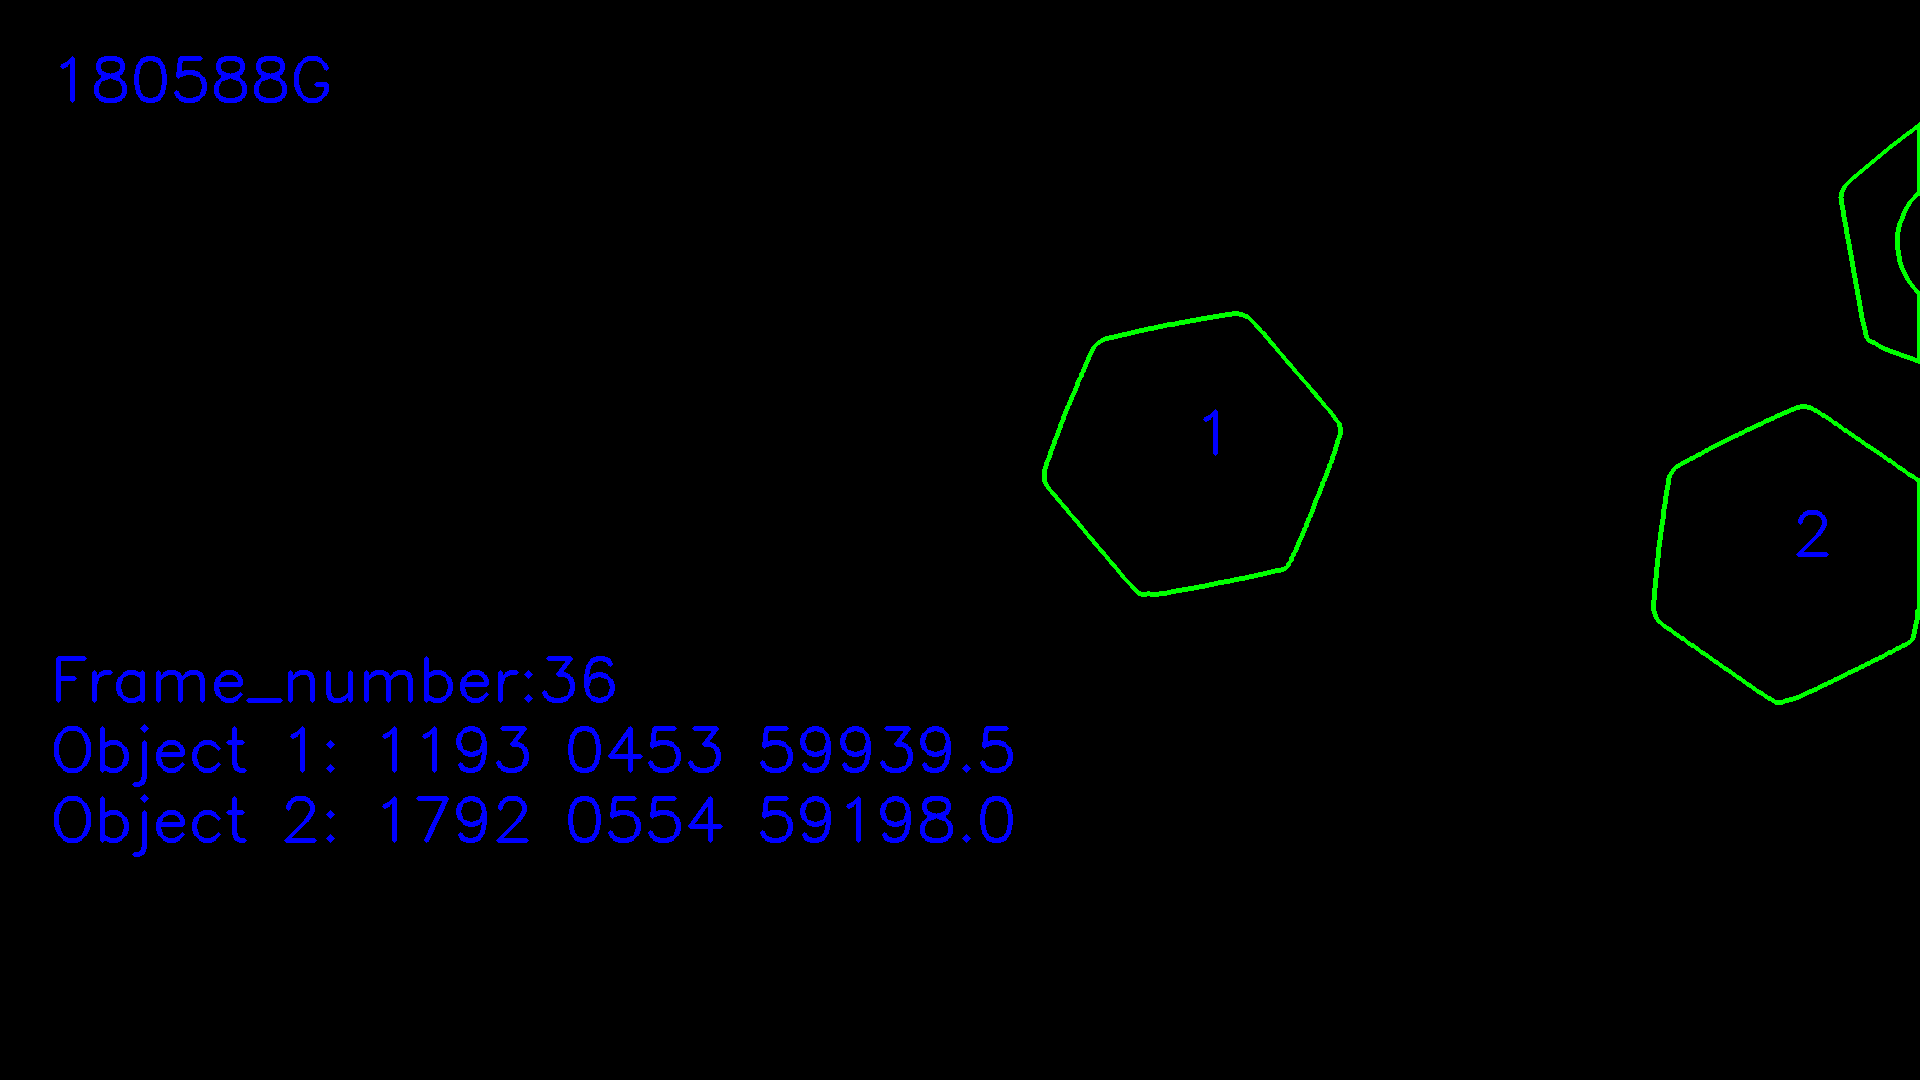

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.18300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.78300e+03, 5.53000e+02, 5.99345e+04, 2.00000e+00])]
Previousframe [array([1.19300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.7920e+03, 5.5400e+02, 5.9198e+04, 2.0000e+00])]


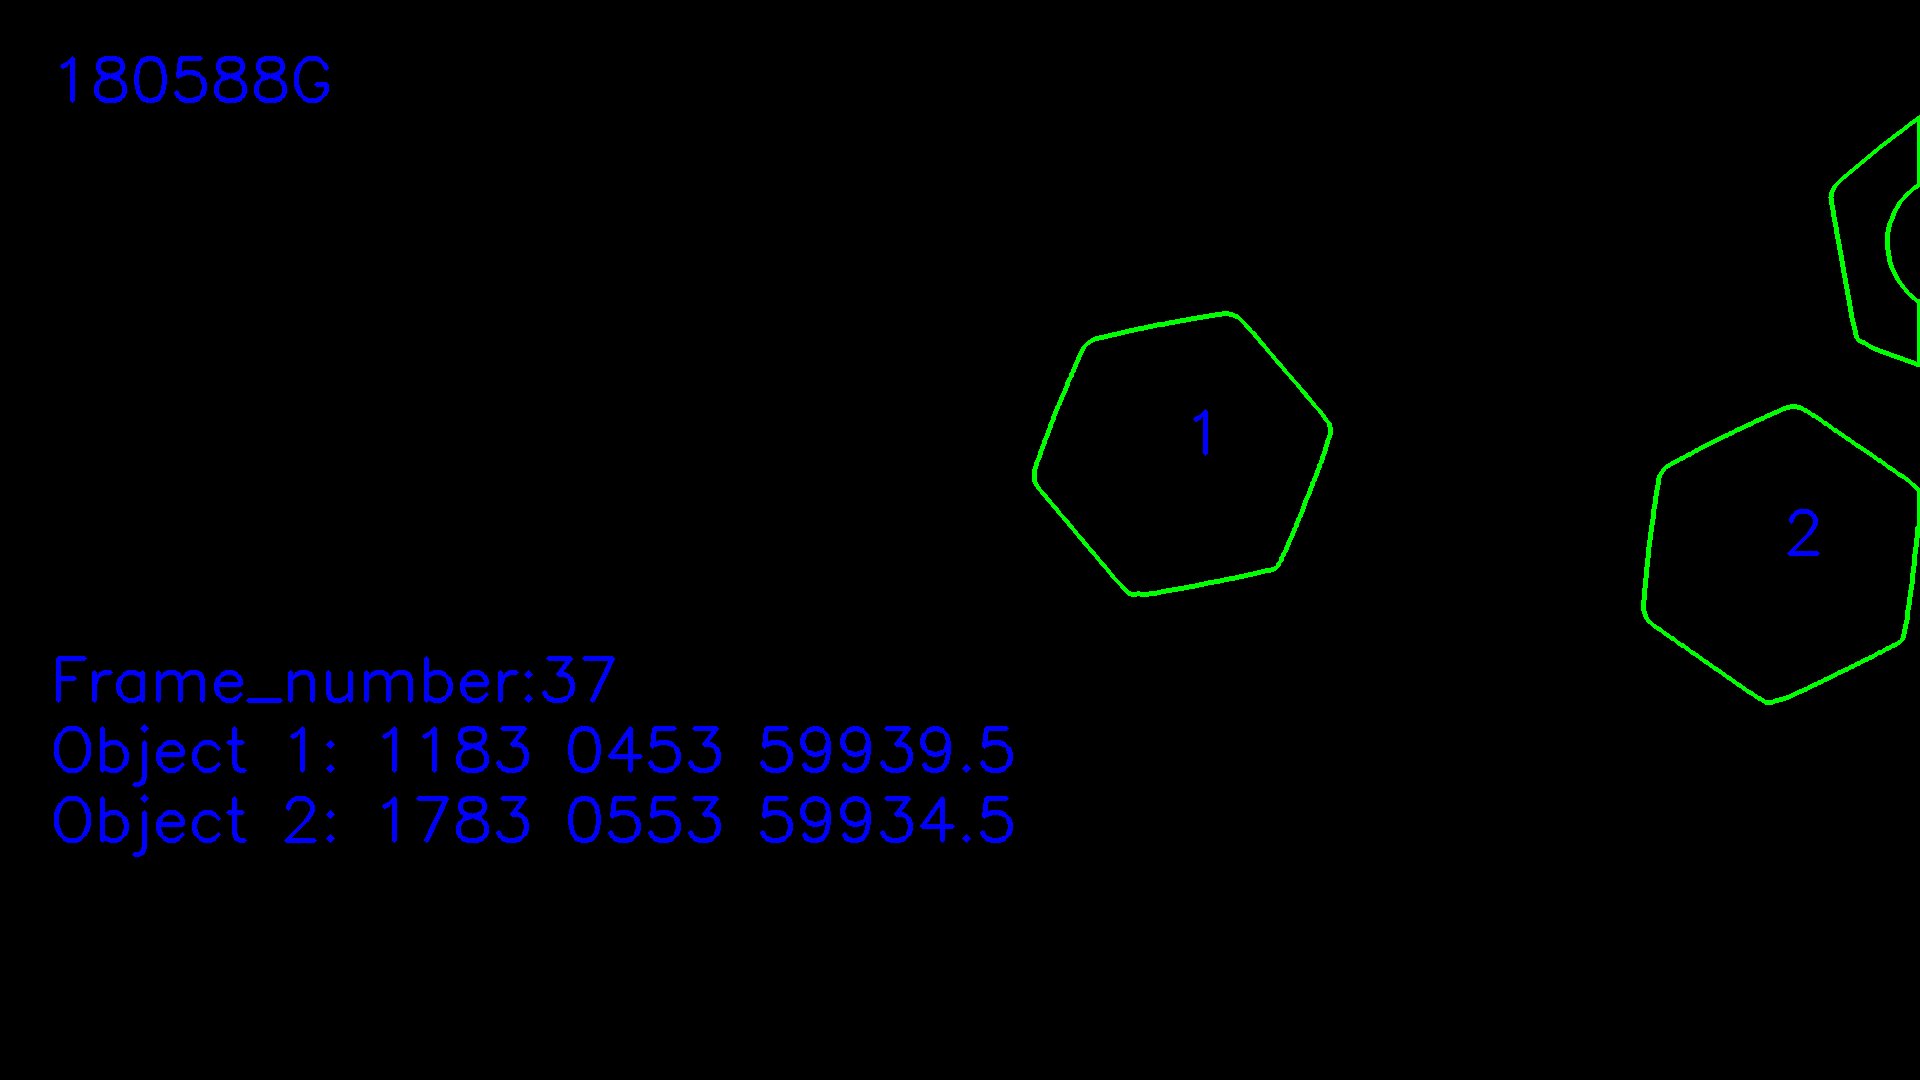

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.17300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.77300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.18300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.78300e+03, 5.53000e+02, 5.99345e+04, 2.00000e+00])]


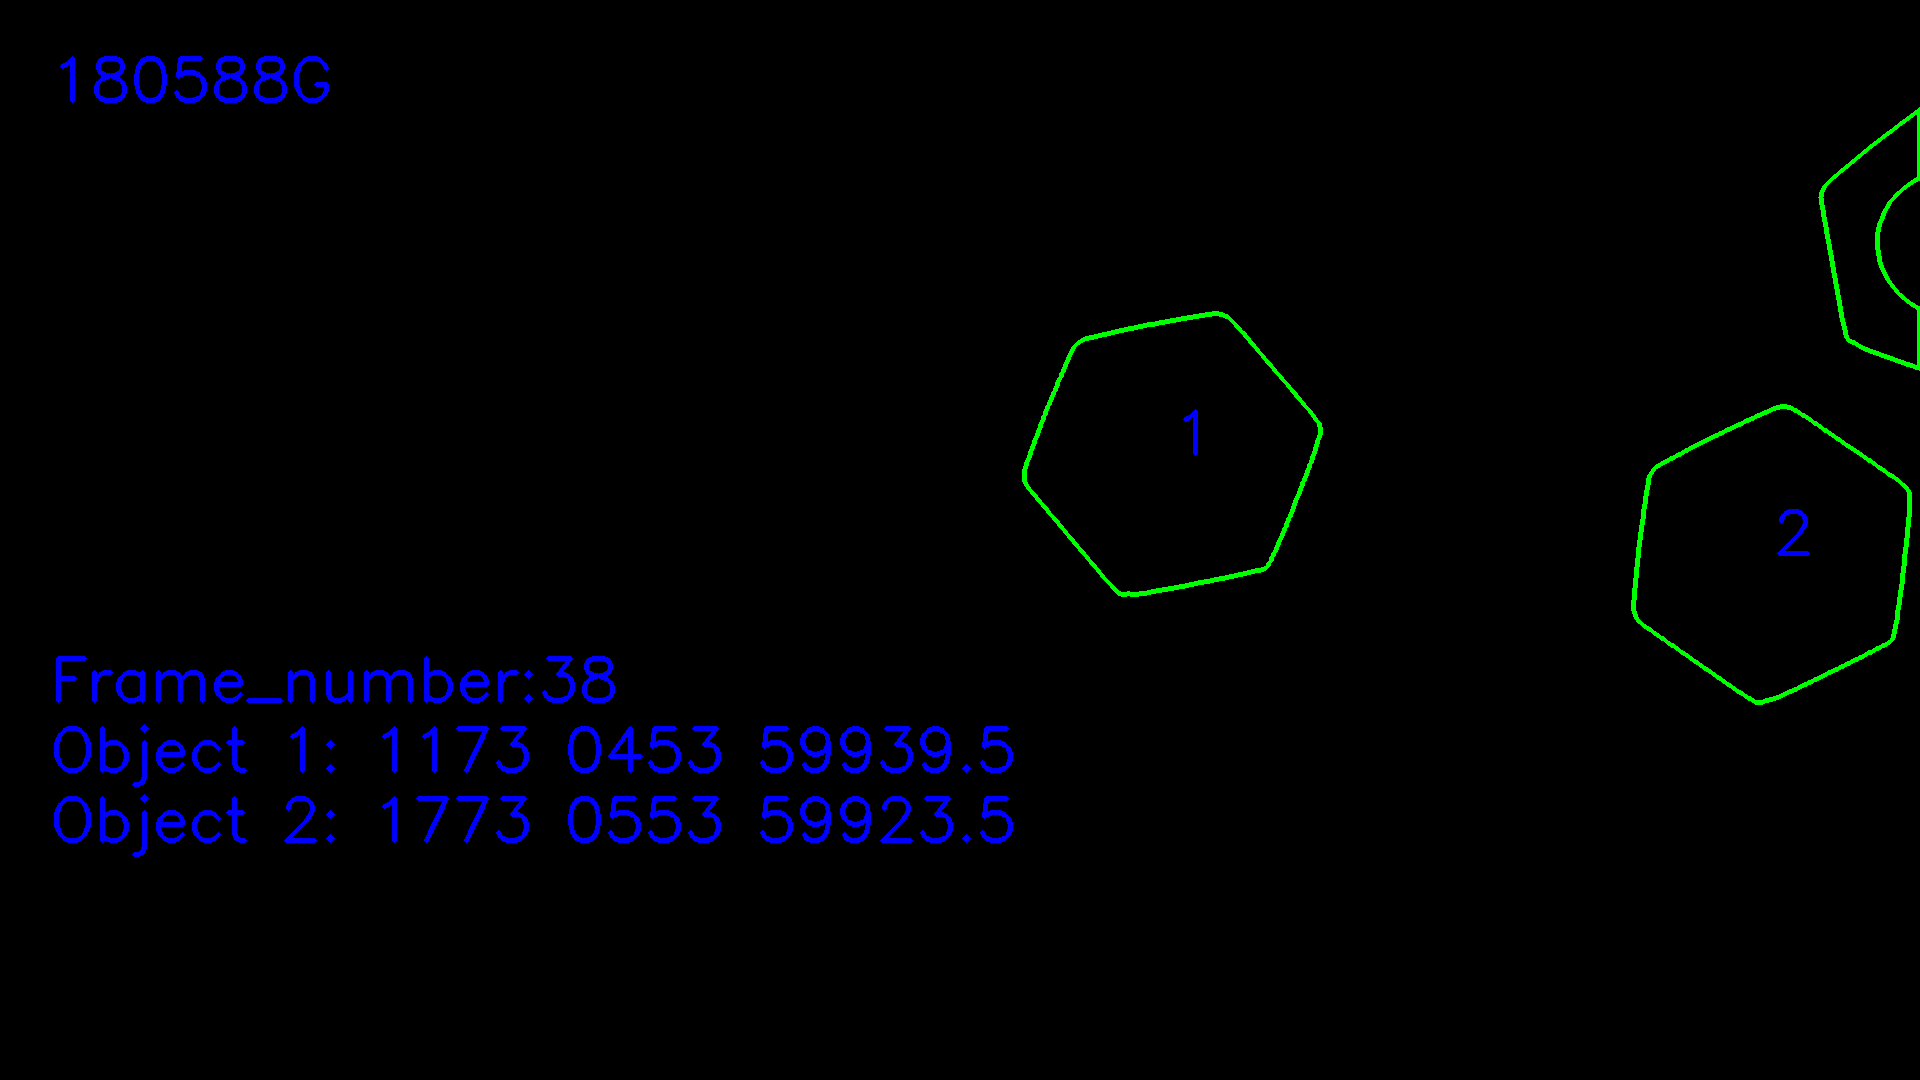

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.16300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.76300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.17300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.77300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


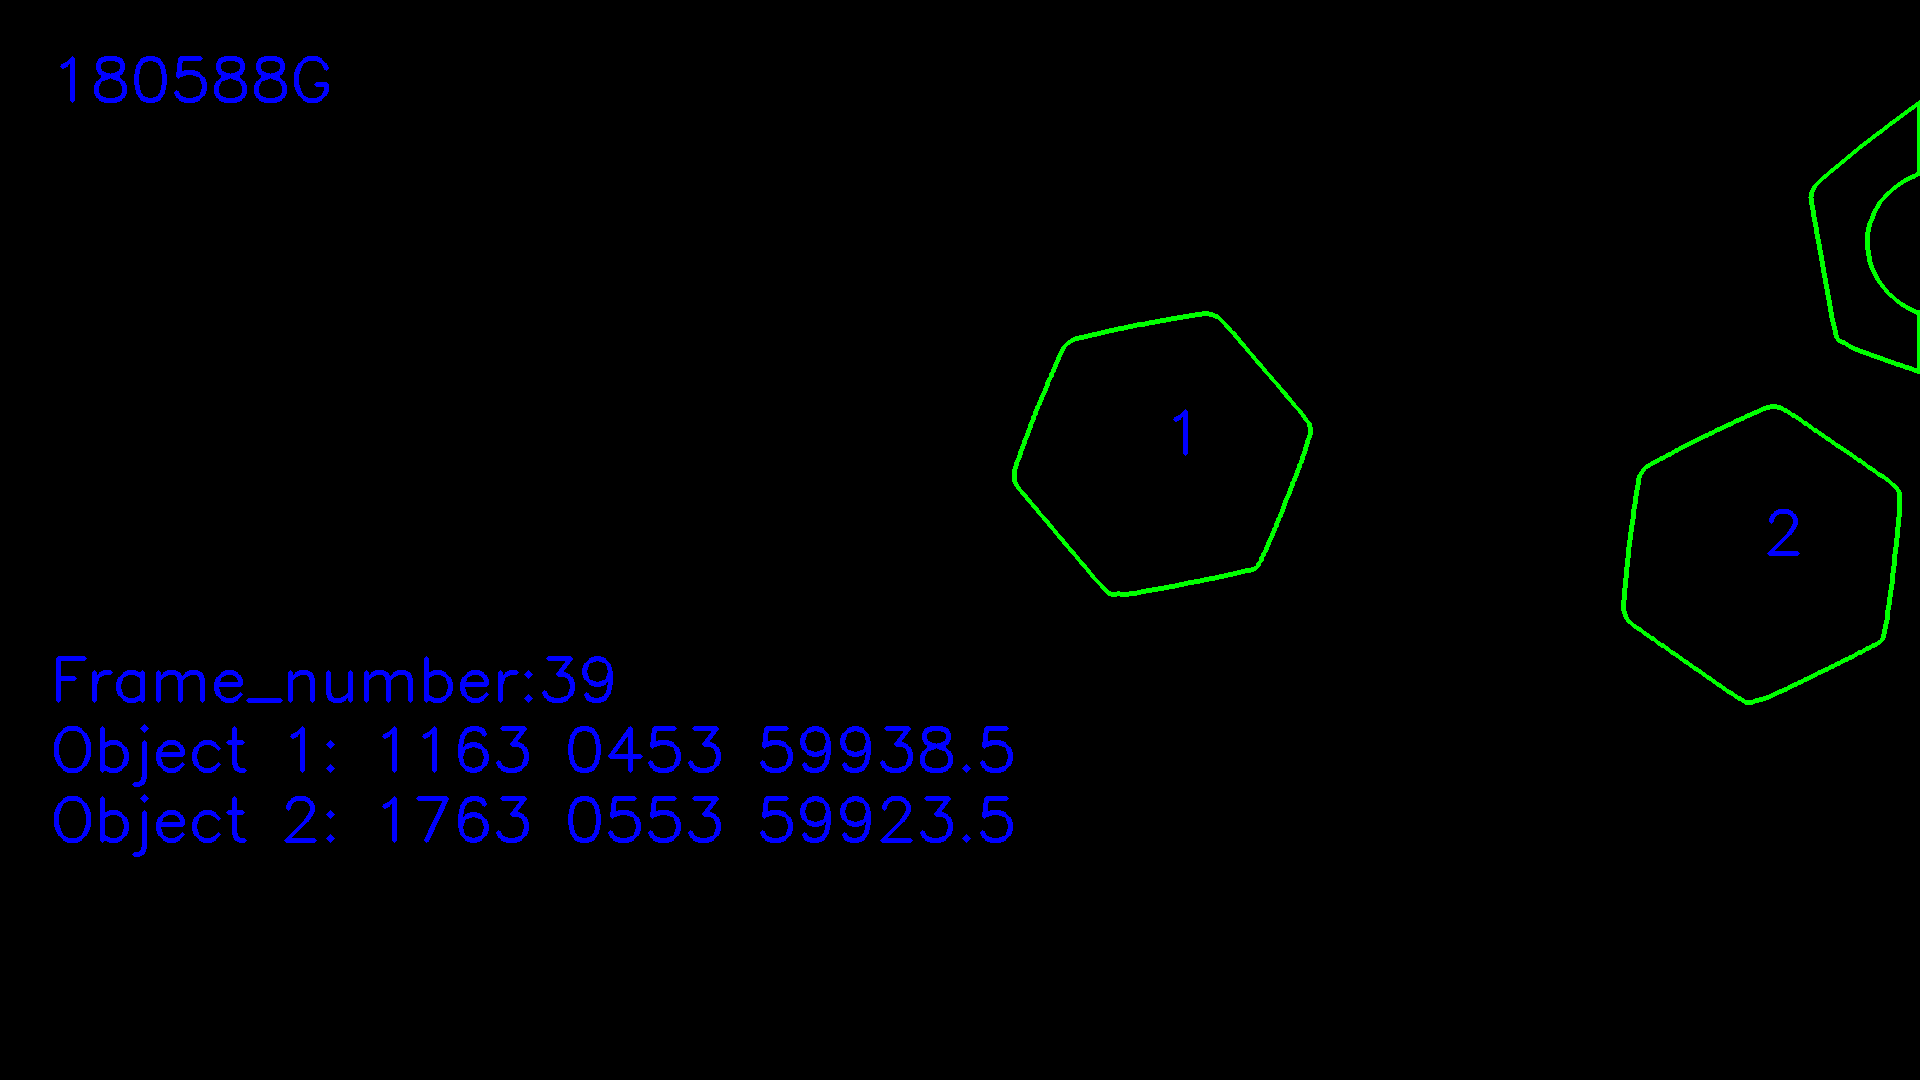

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.15300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.75300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.16300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.76300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


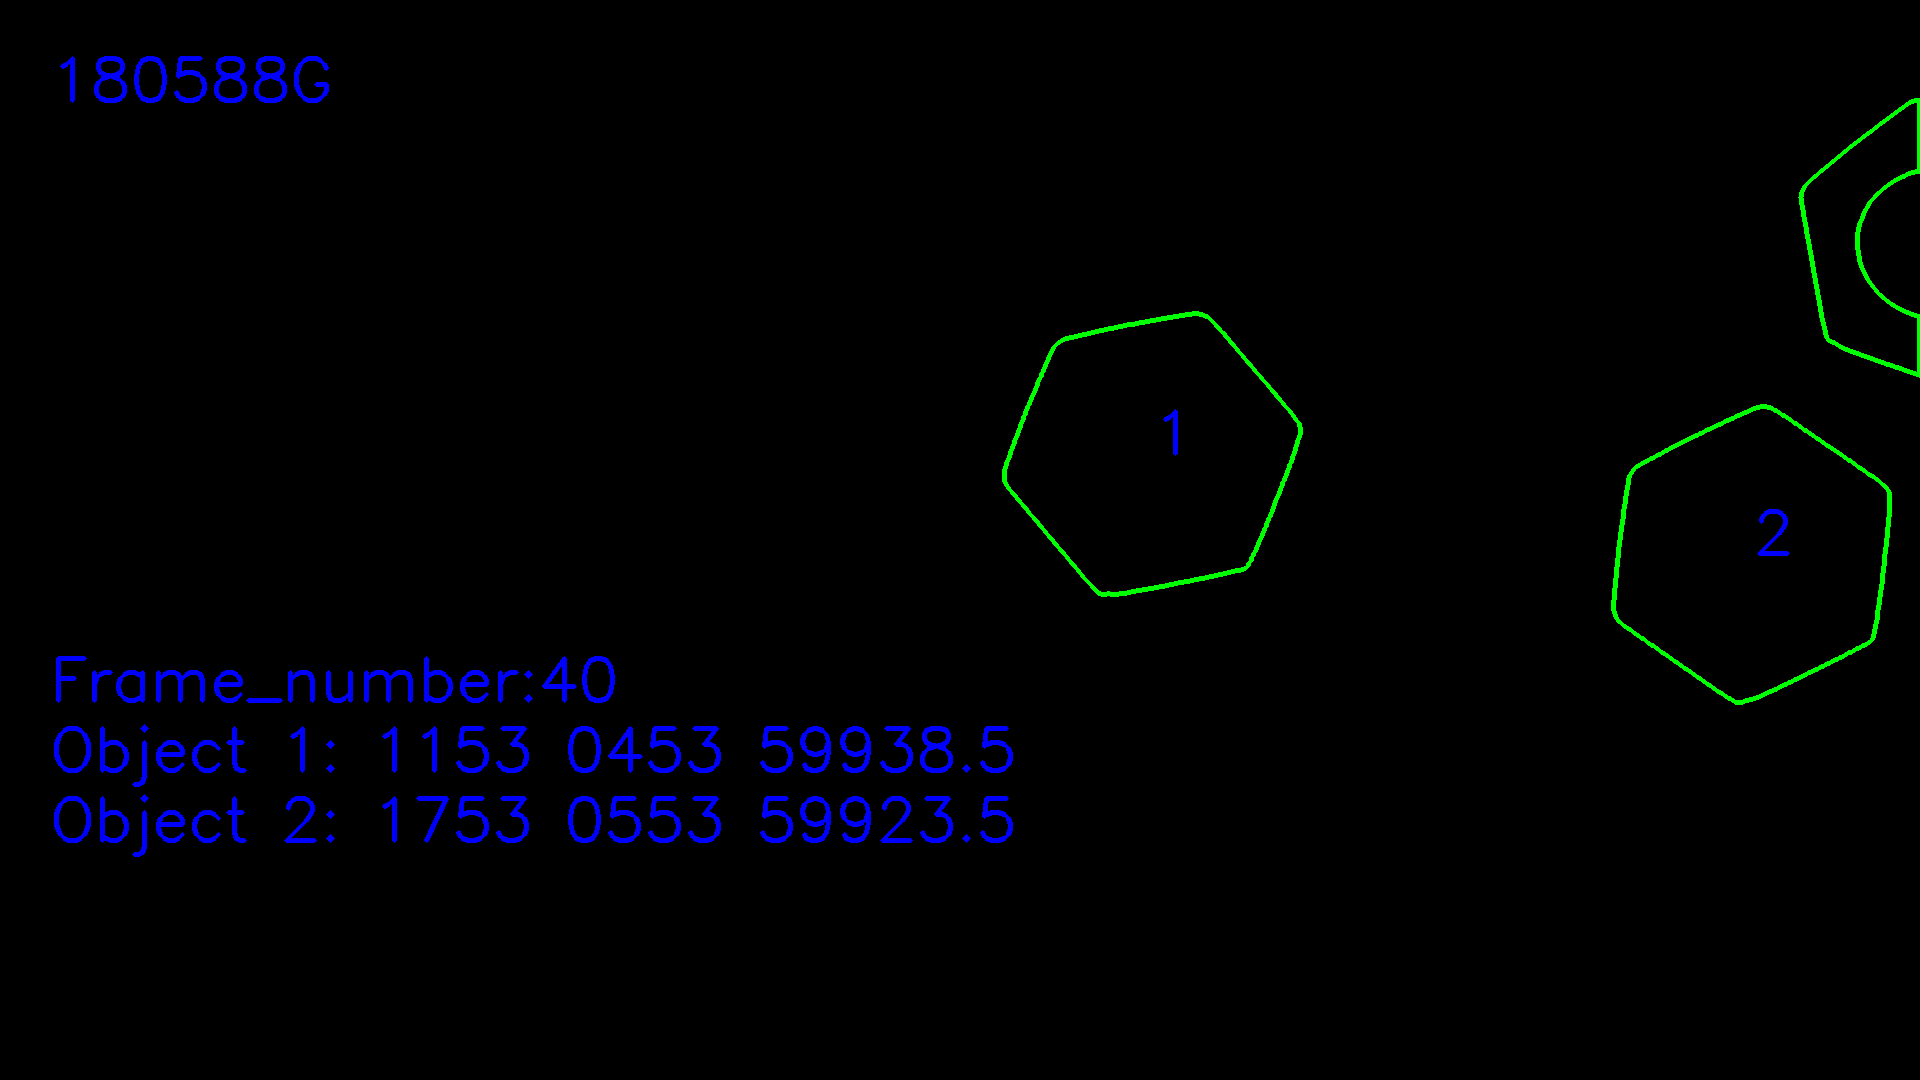

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.14300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.74300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.15300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.75300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


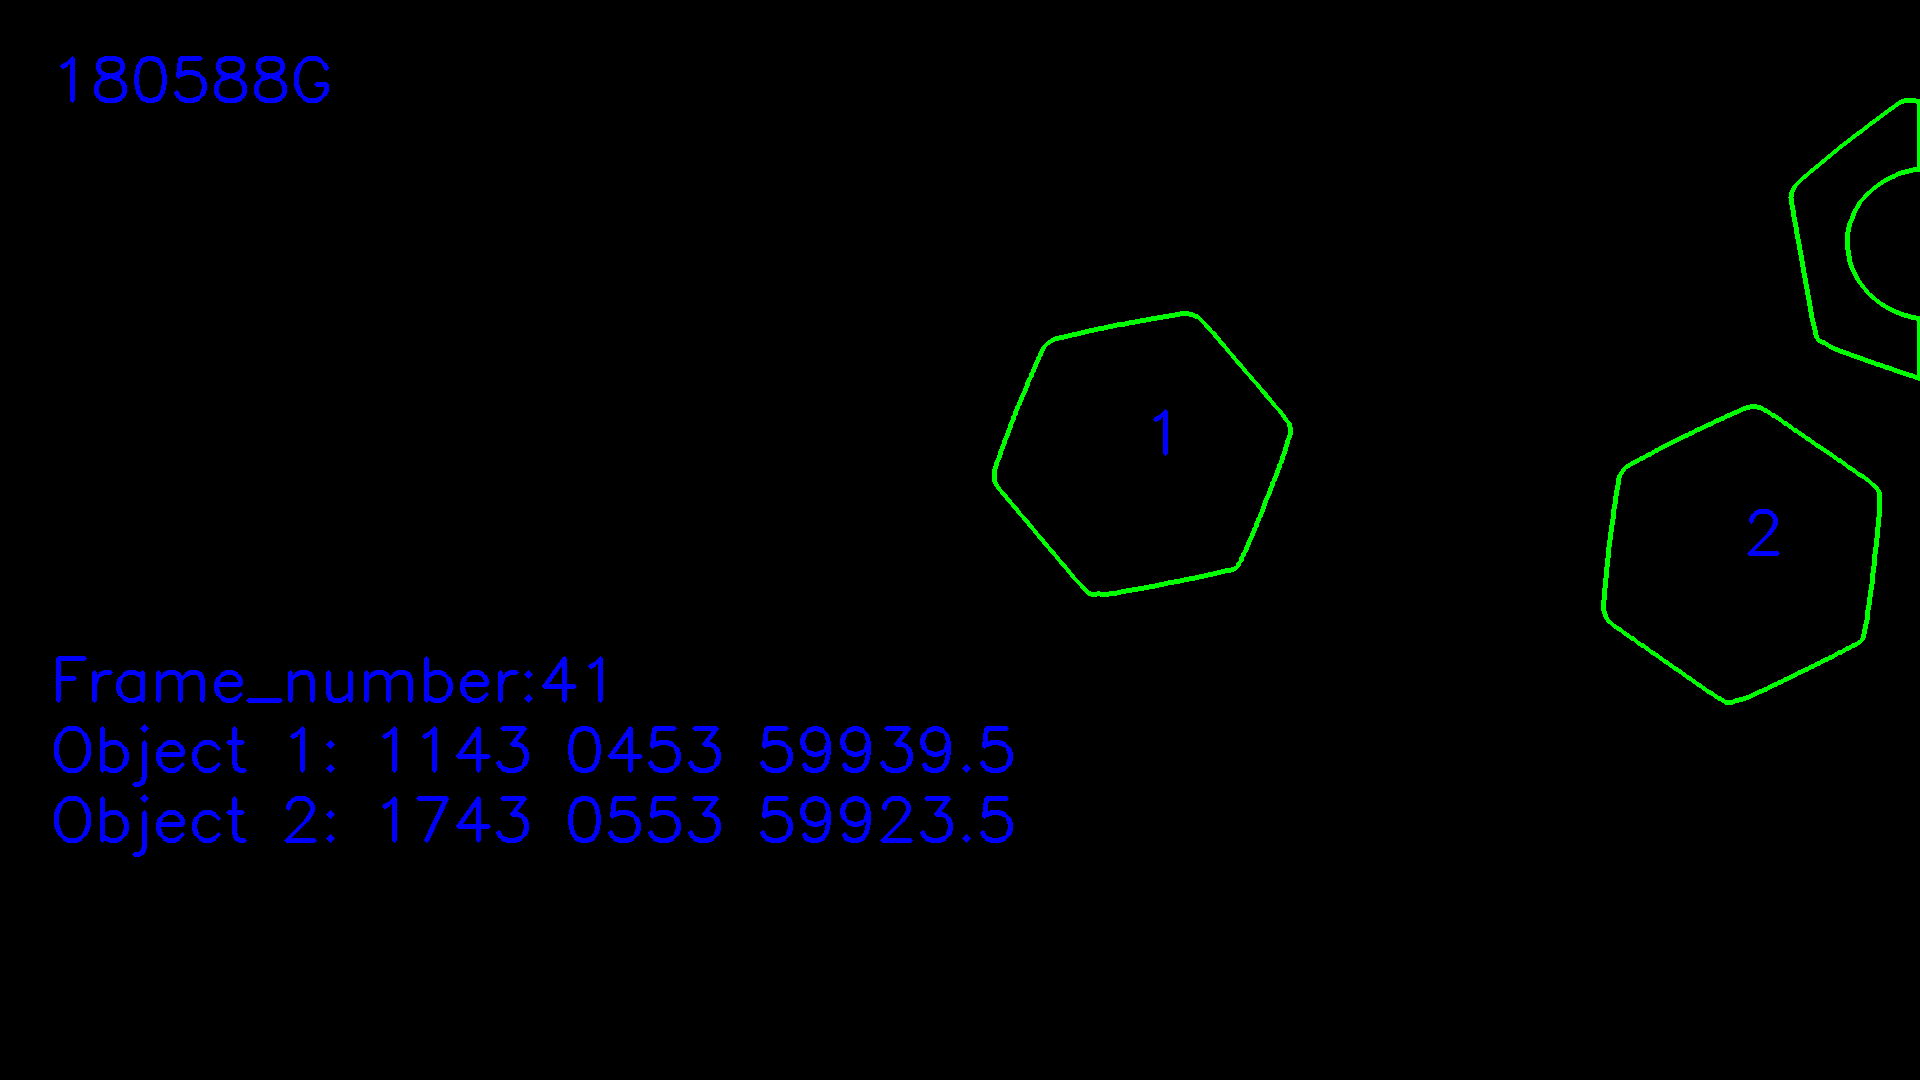

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.13300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.73300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.14300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.74300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


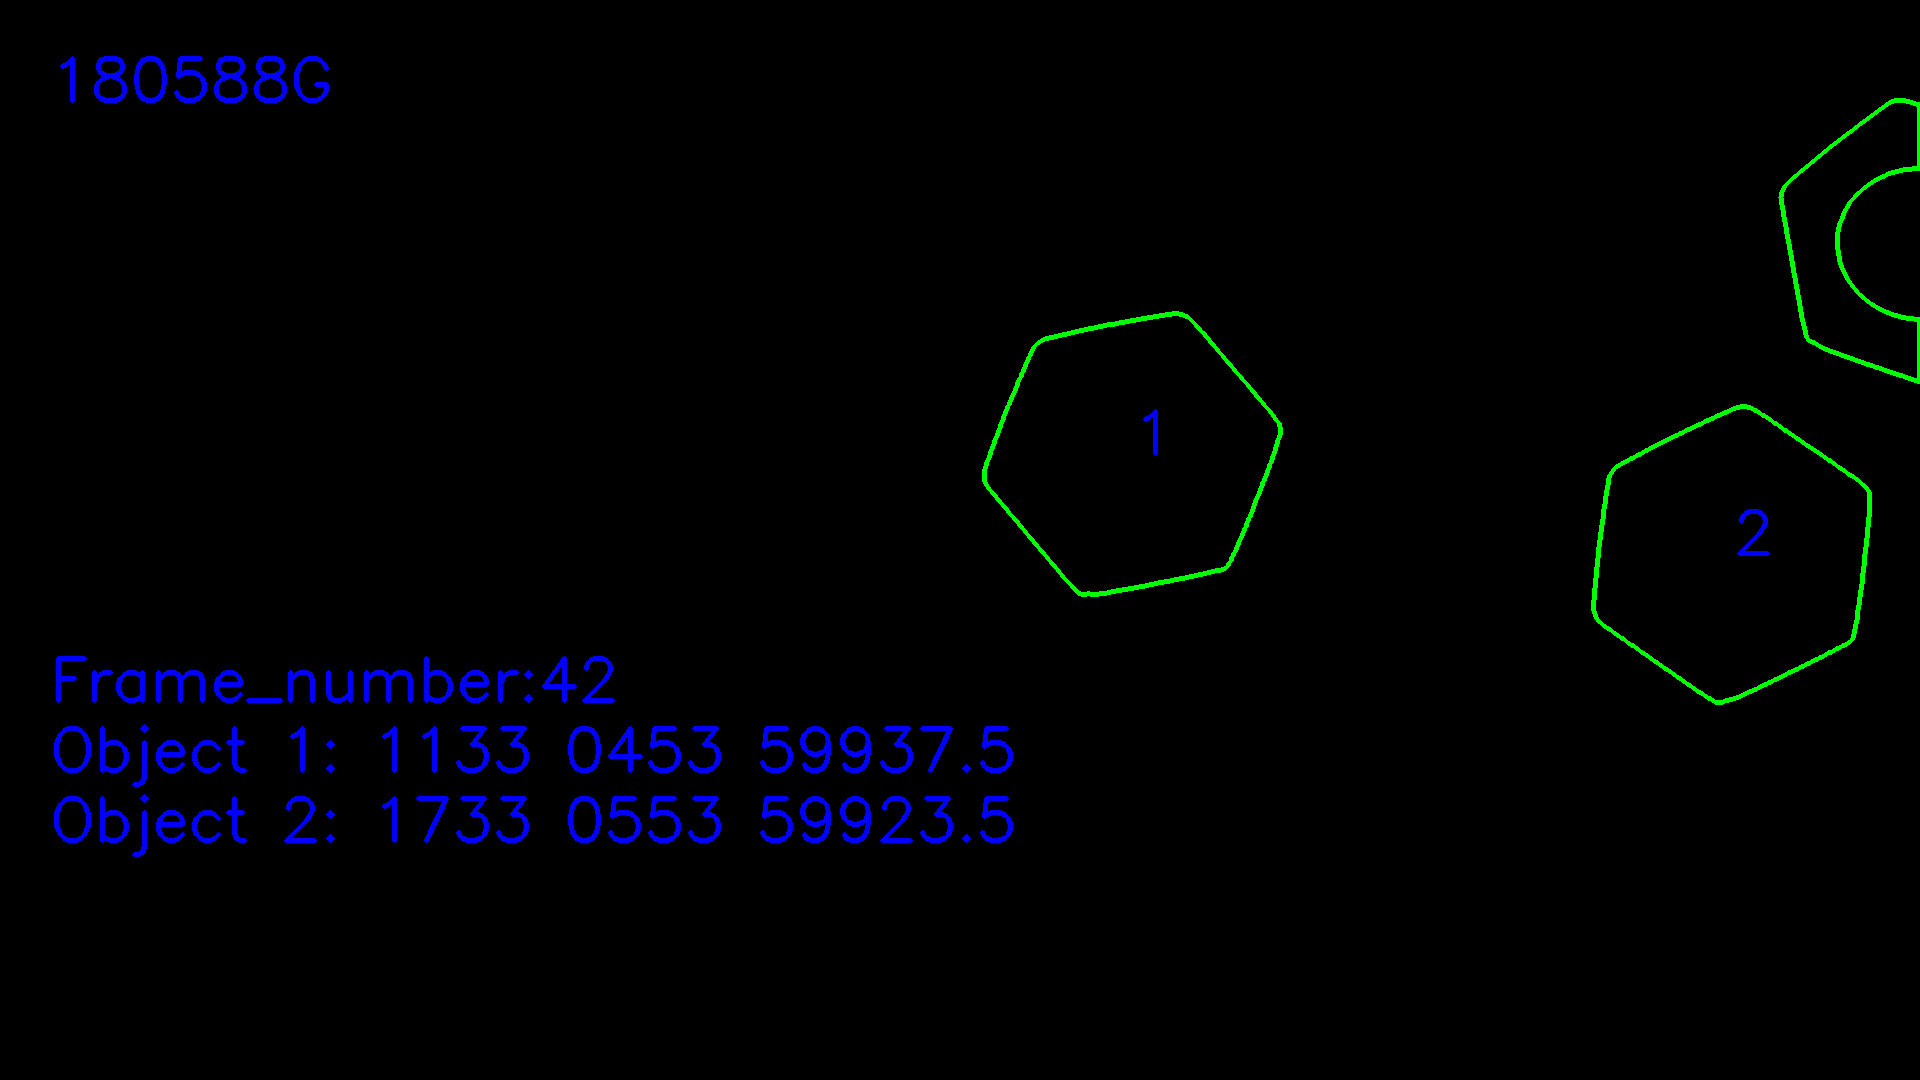

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.12300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.72300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00])]
Previousframe [array([1.13300e+03, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.73300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


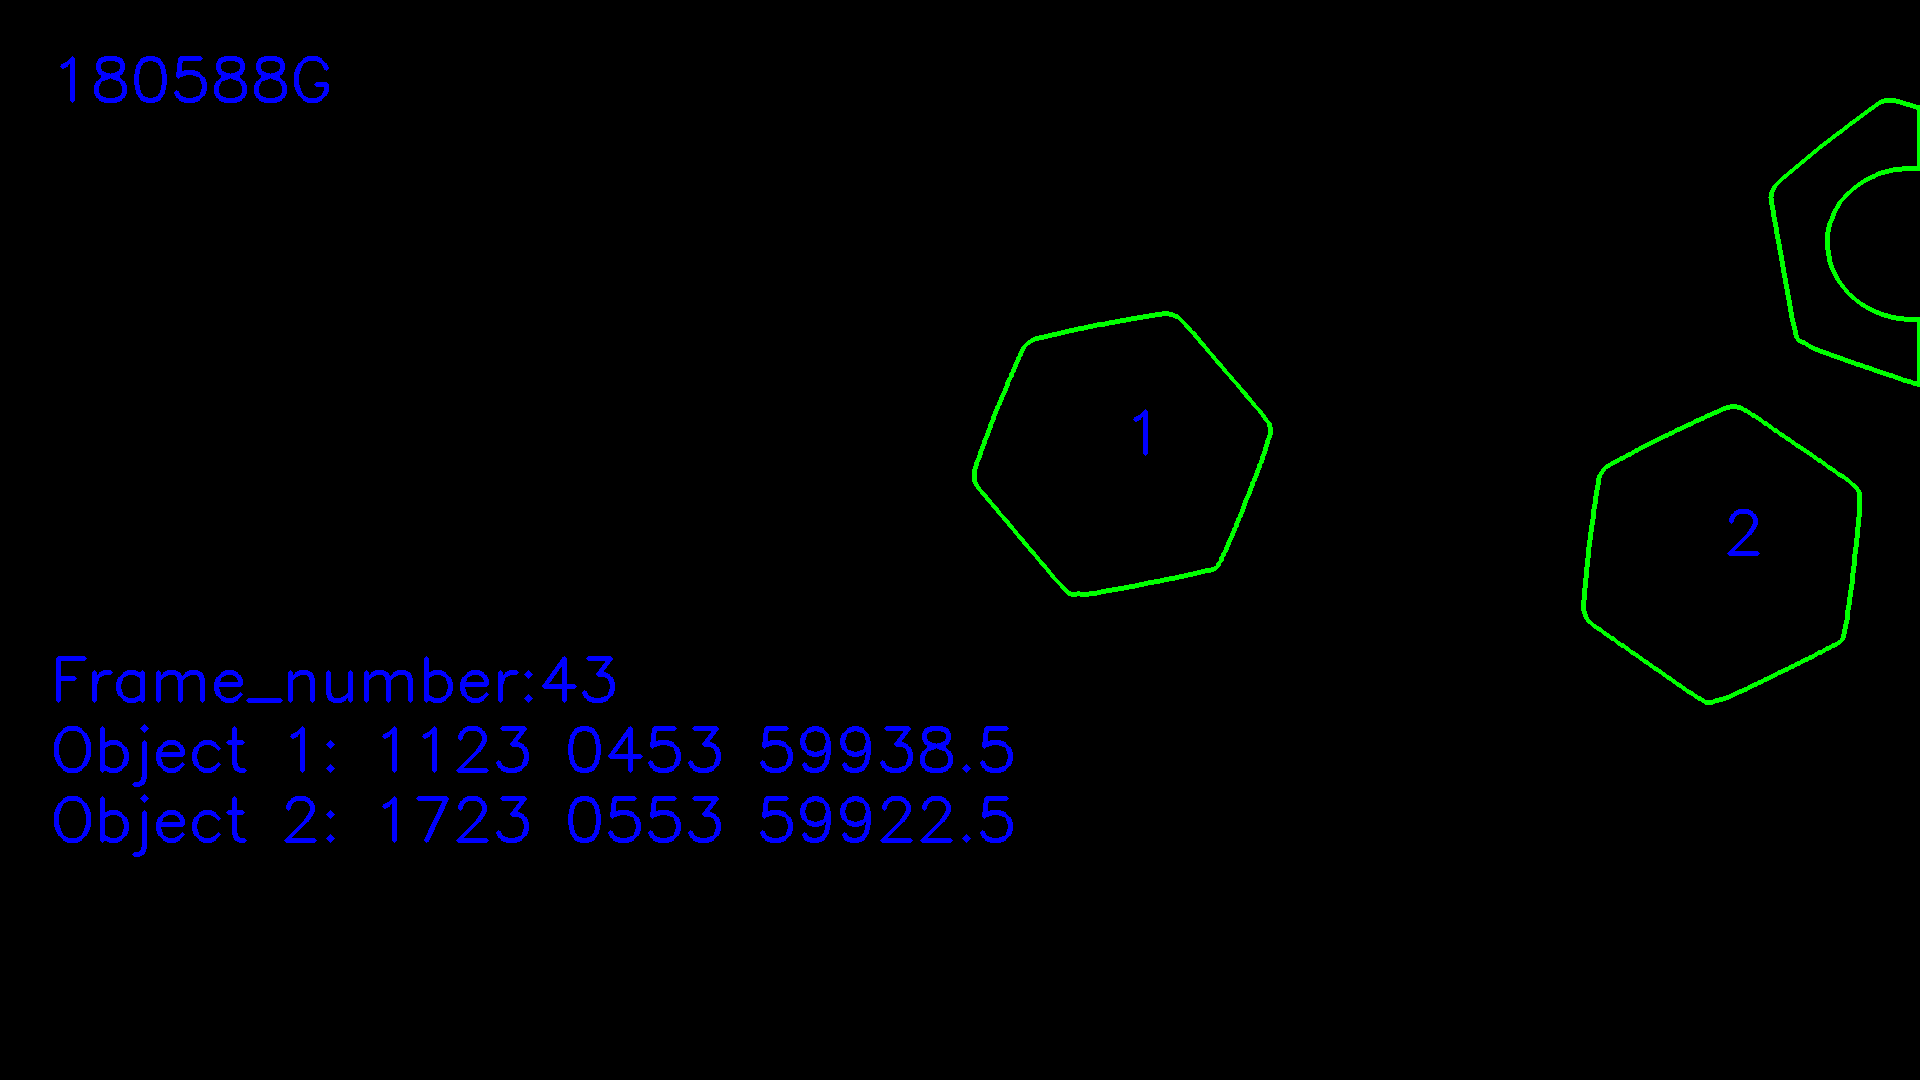

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.11300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.71300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00])]
Previousframe [array([1.12300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.72300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00])]


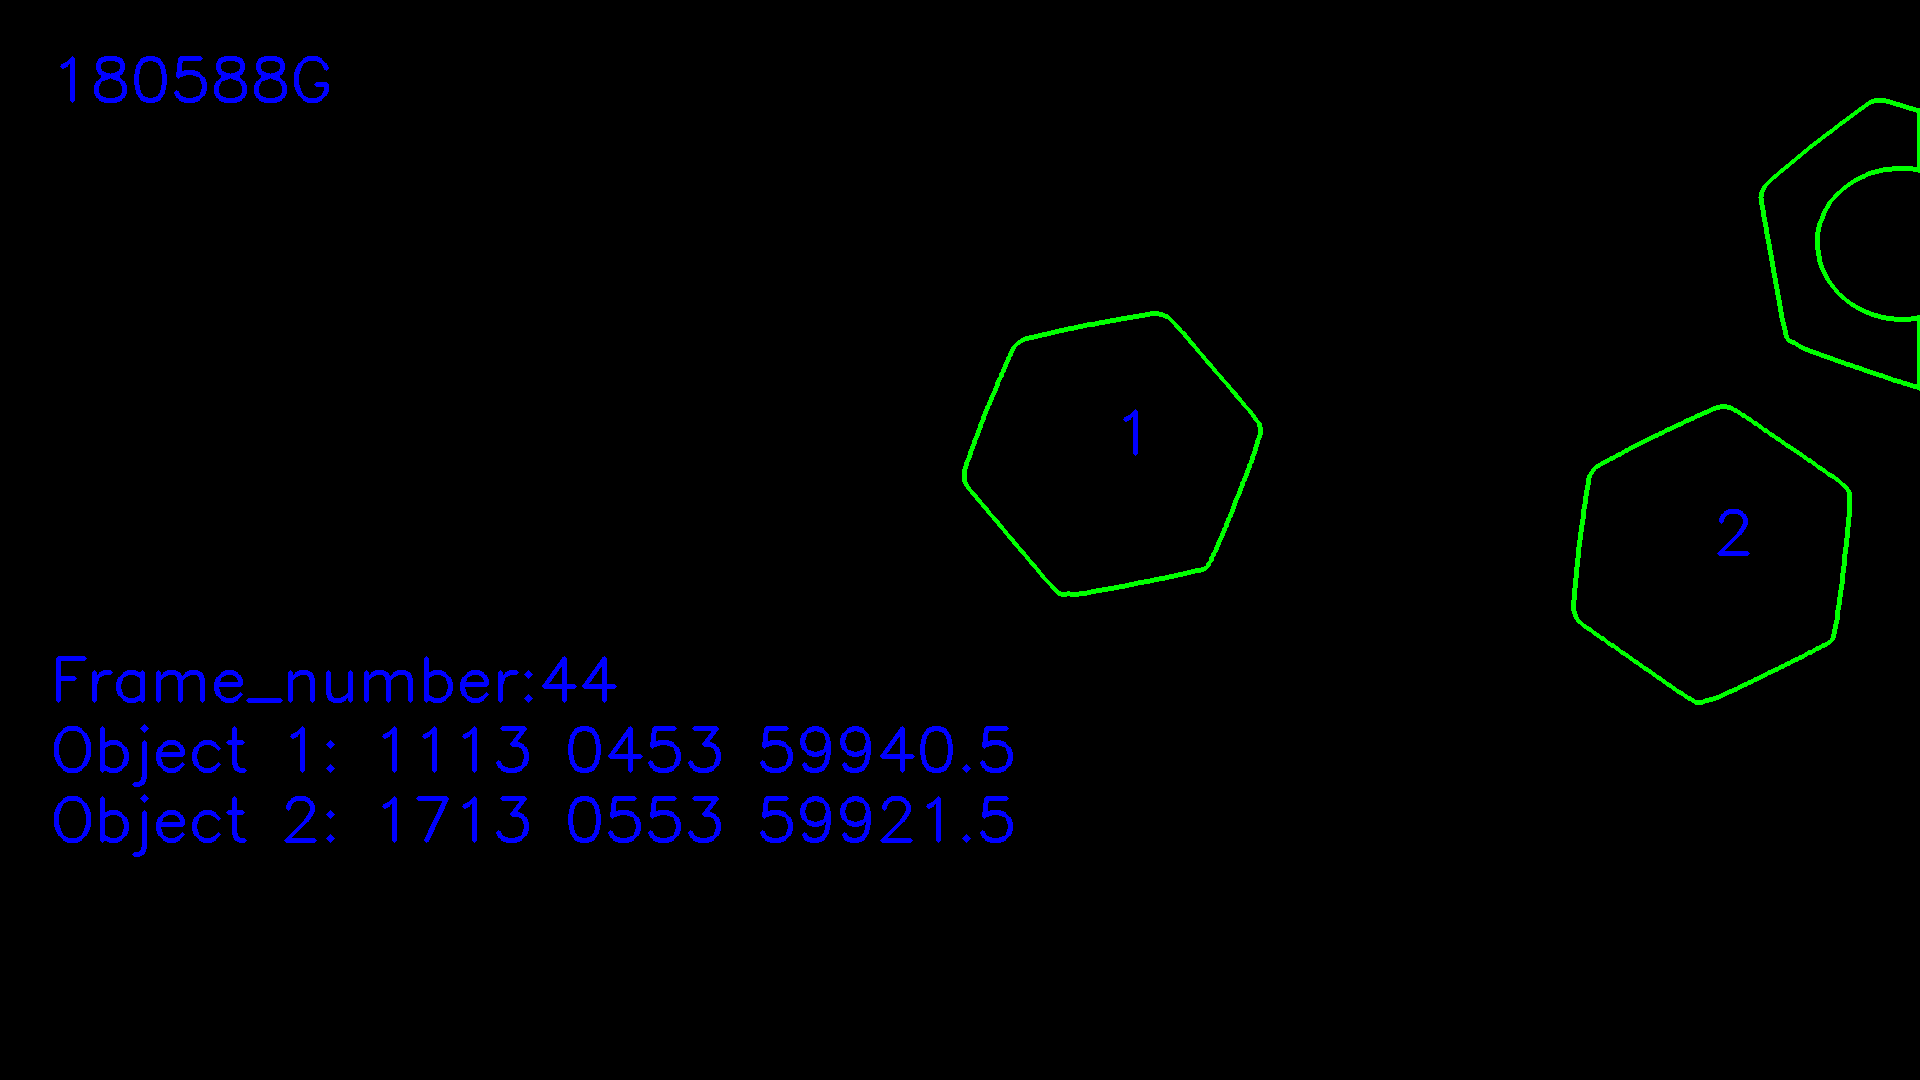

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.10300e+03, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.70300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.11300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.71300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00])]


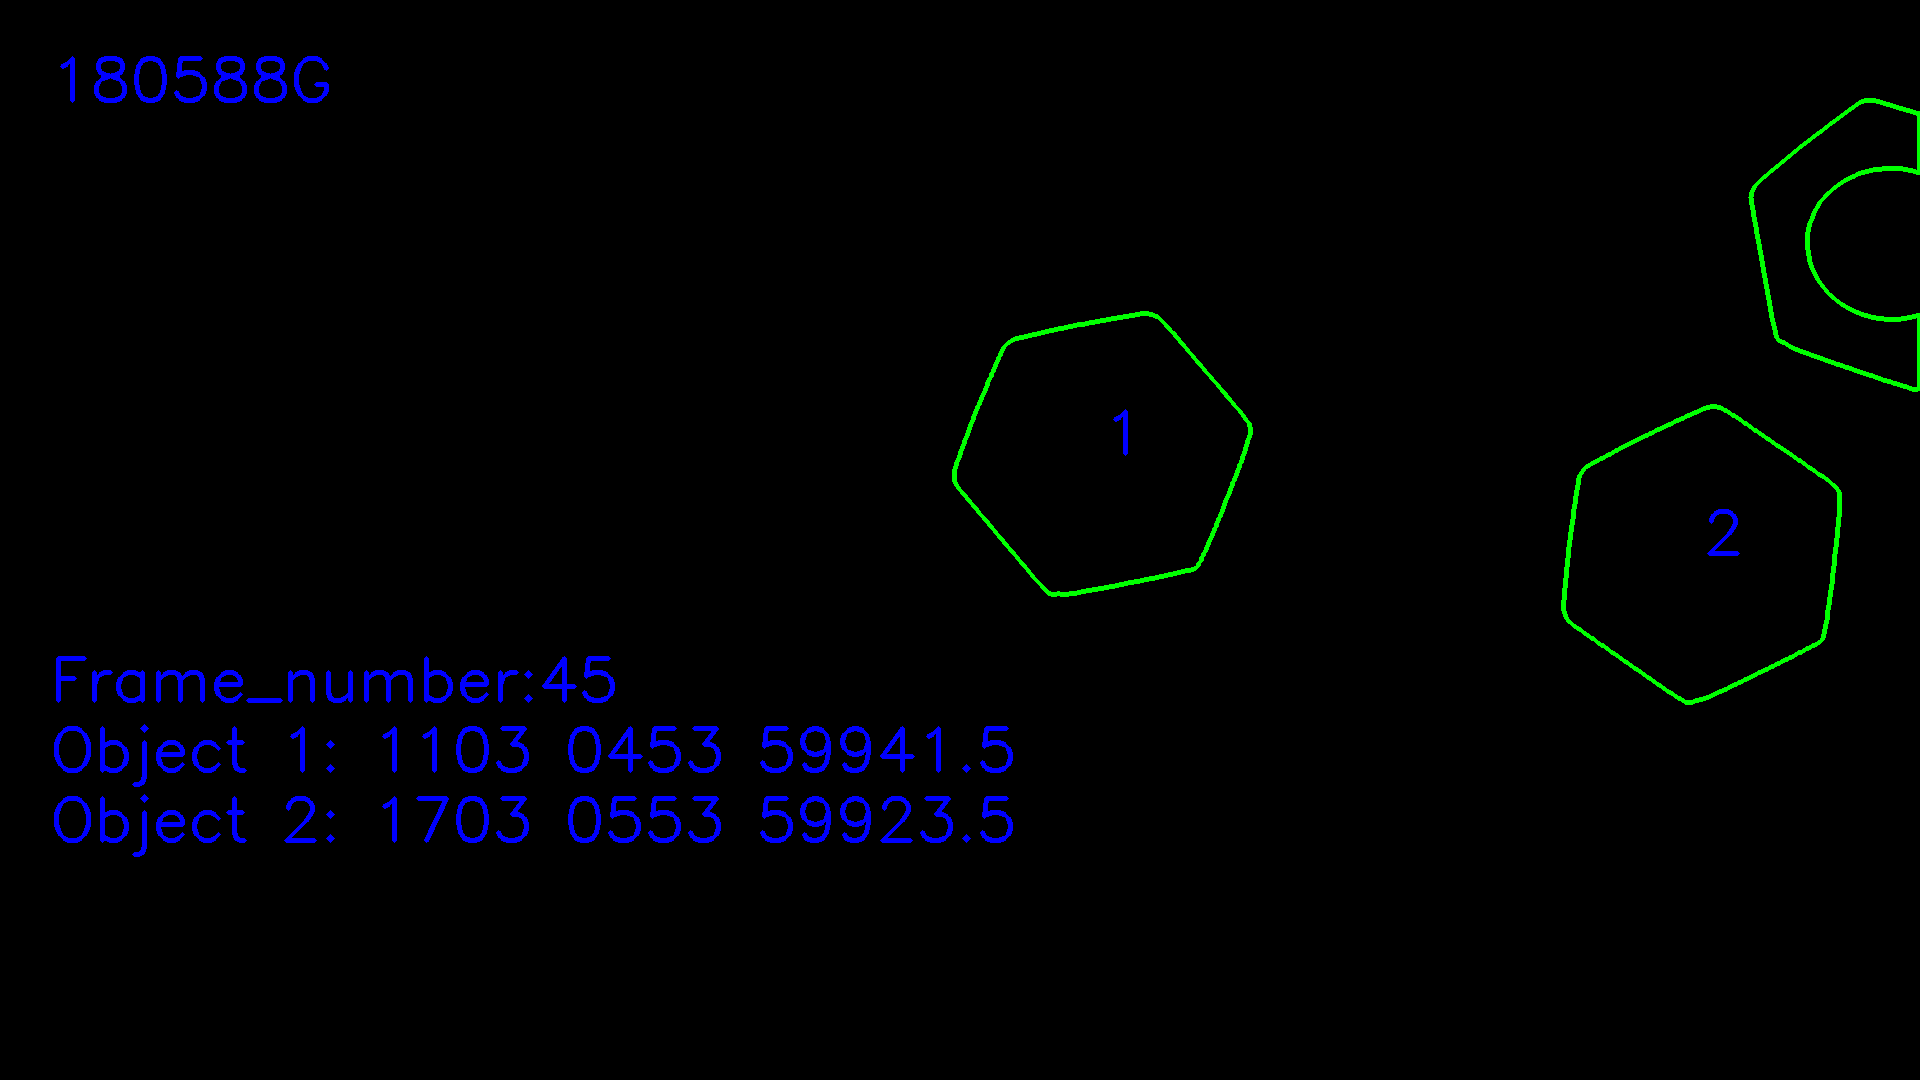

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.09300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.69300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00])]
Previousframe [array([1.10300e+03, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.70300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


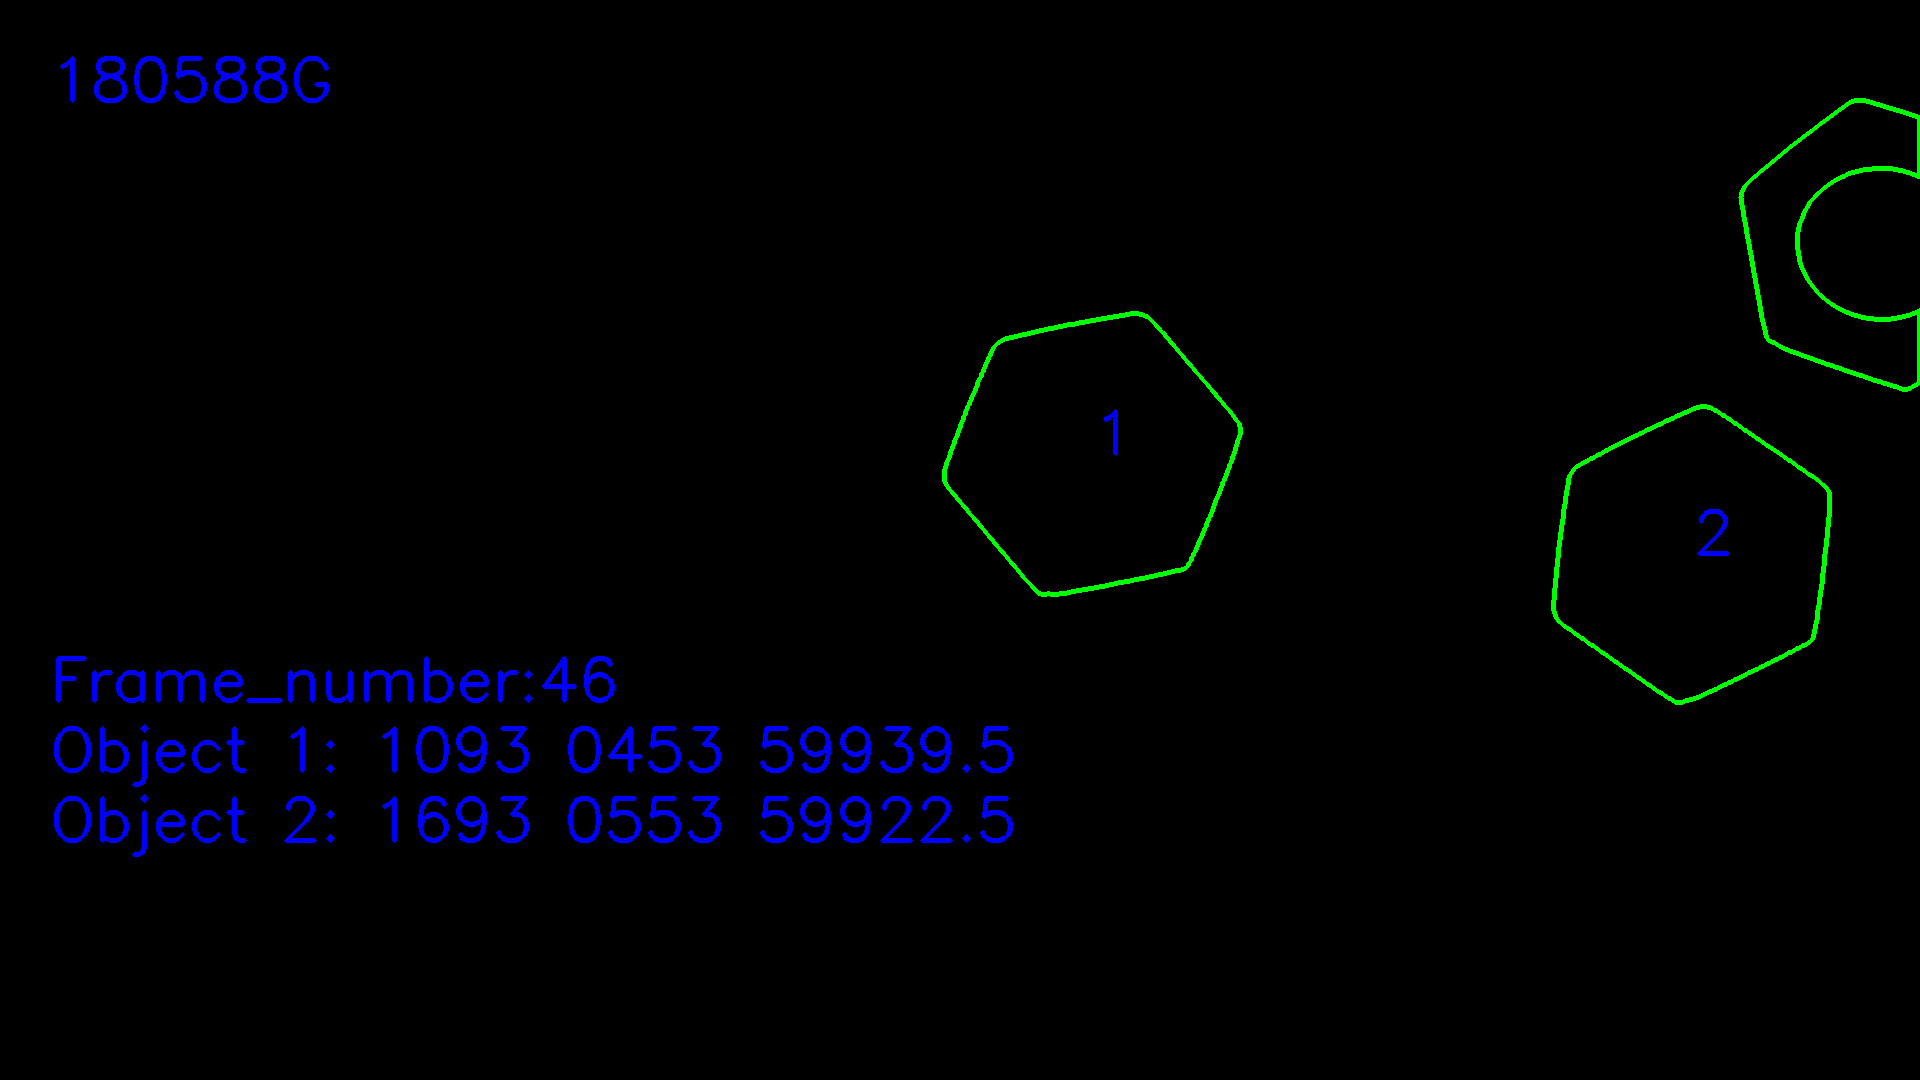

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.08300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.68300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.09300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.69300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00])]


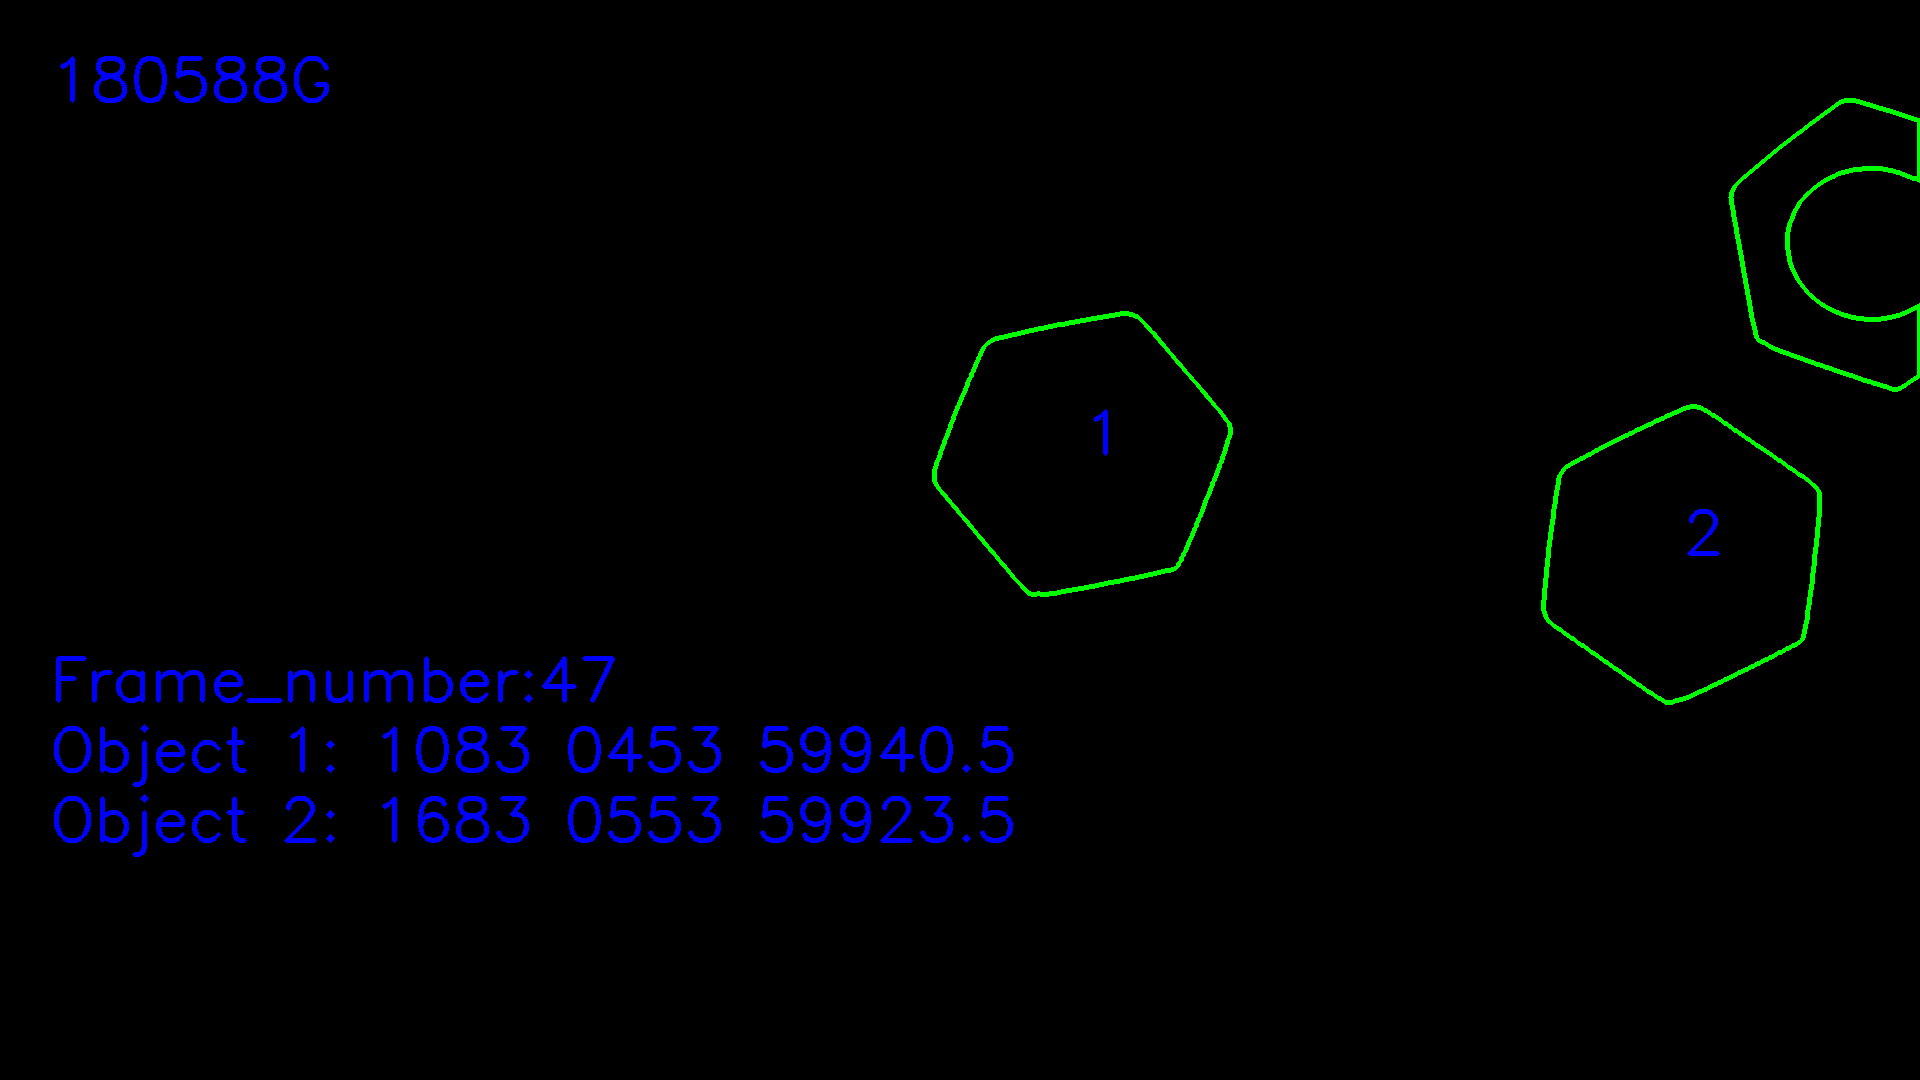

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.07300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.67300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.08300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.68300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


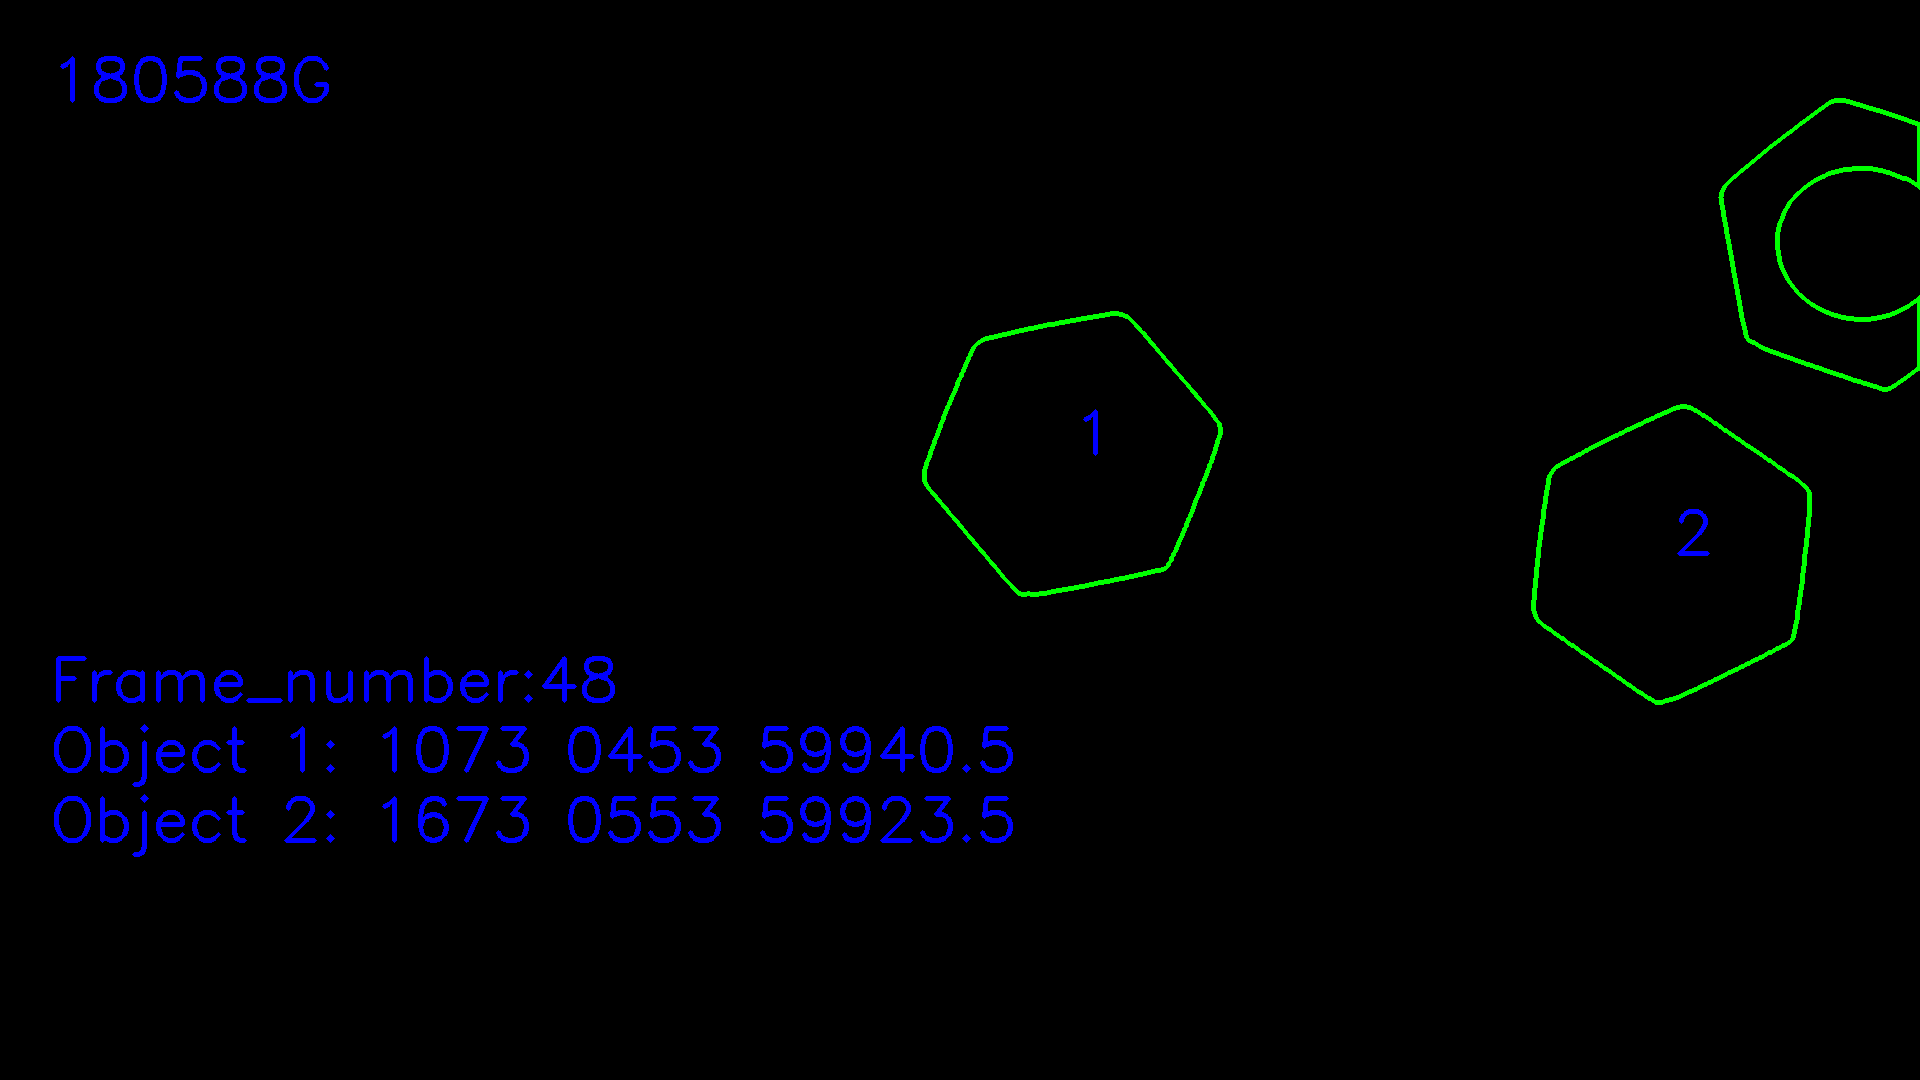

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.06300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.66300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.07300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.67300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


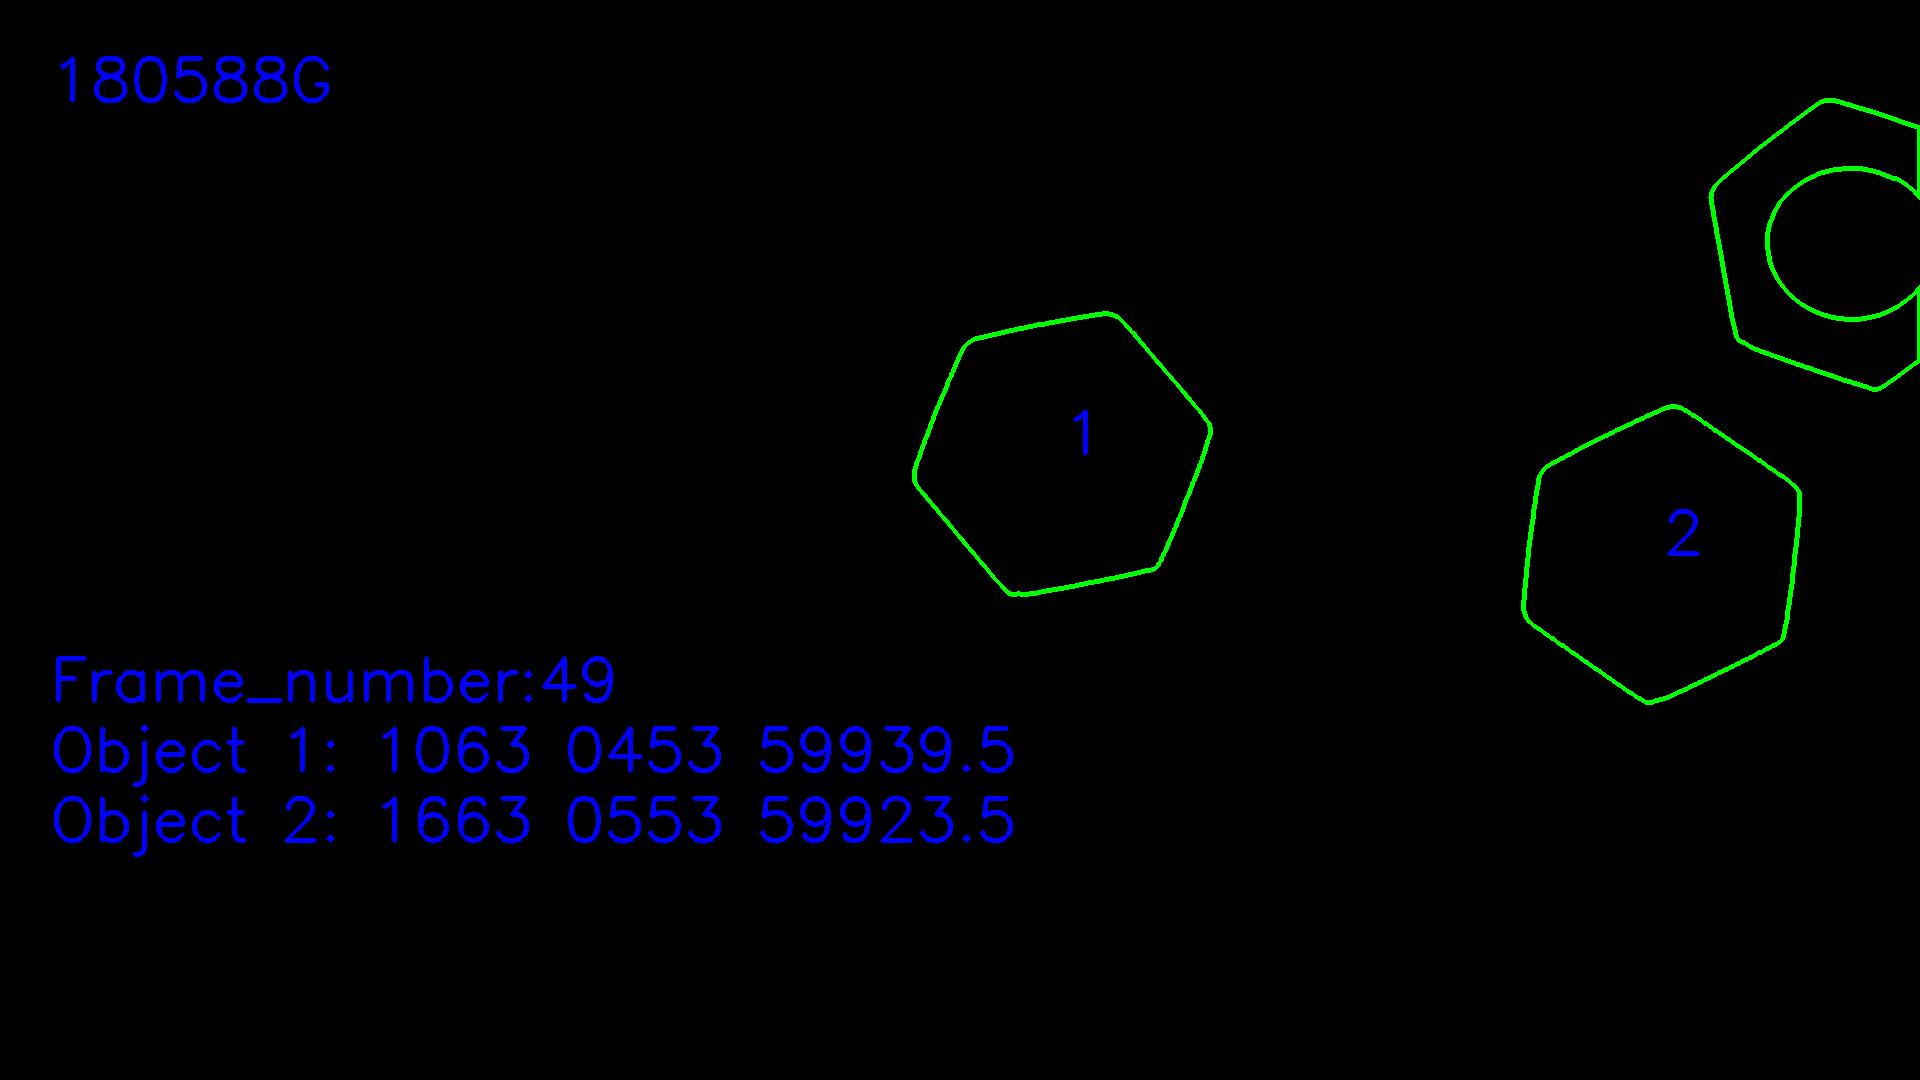

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.05300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.65300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]
Previousframe [array([1.06300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.66300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


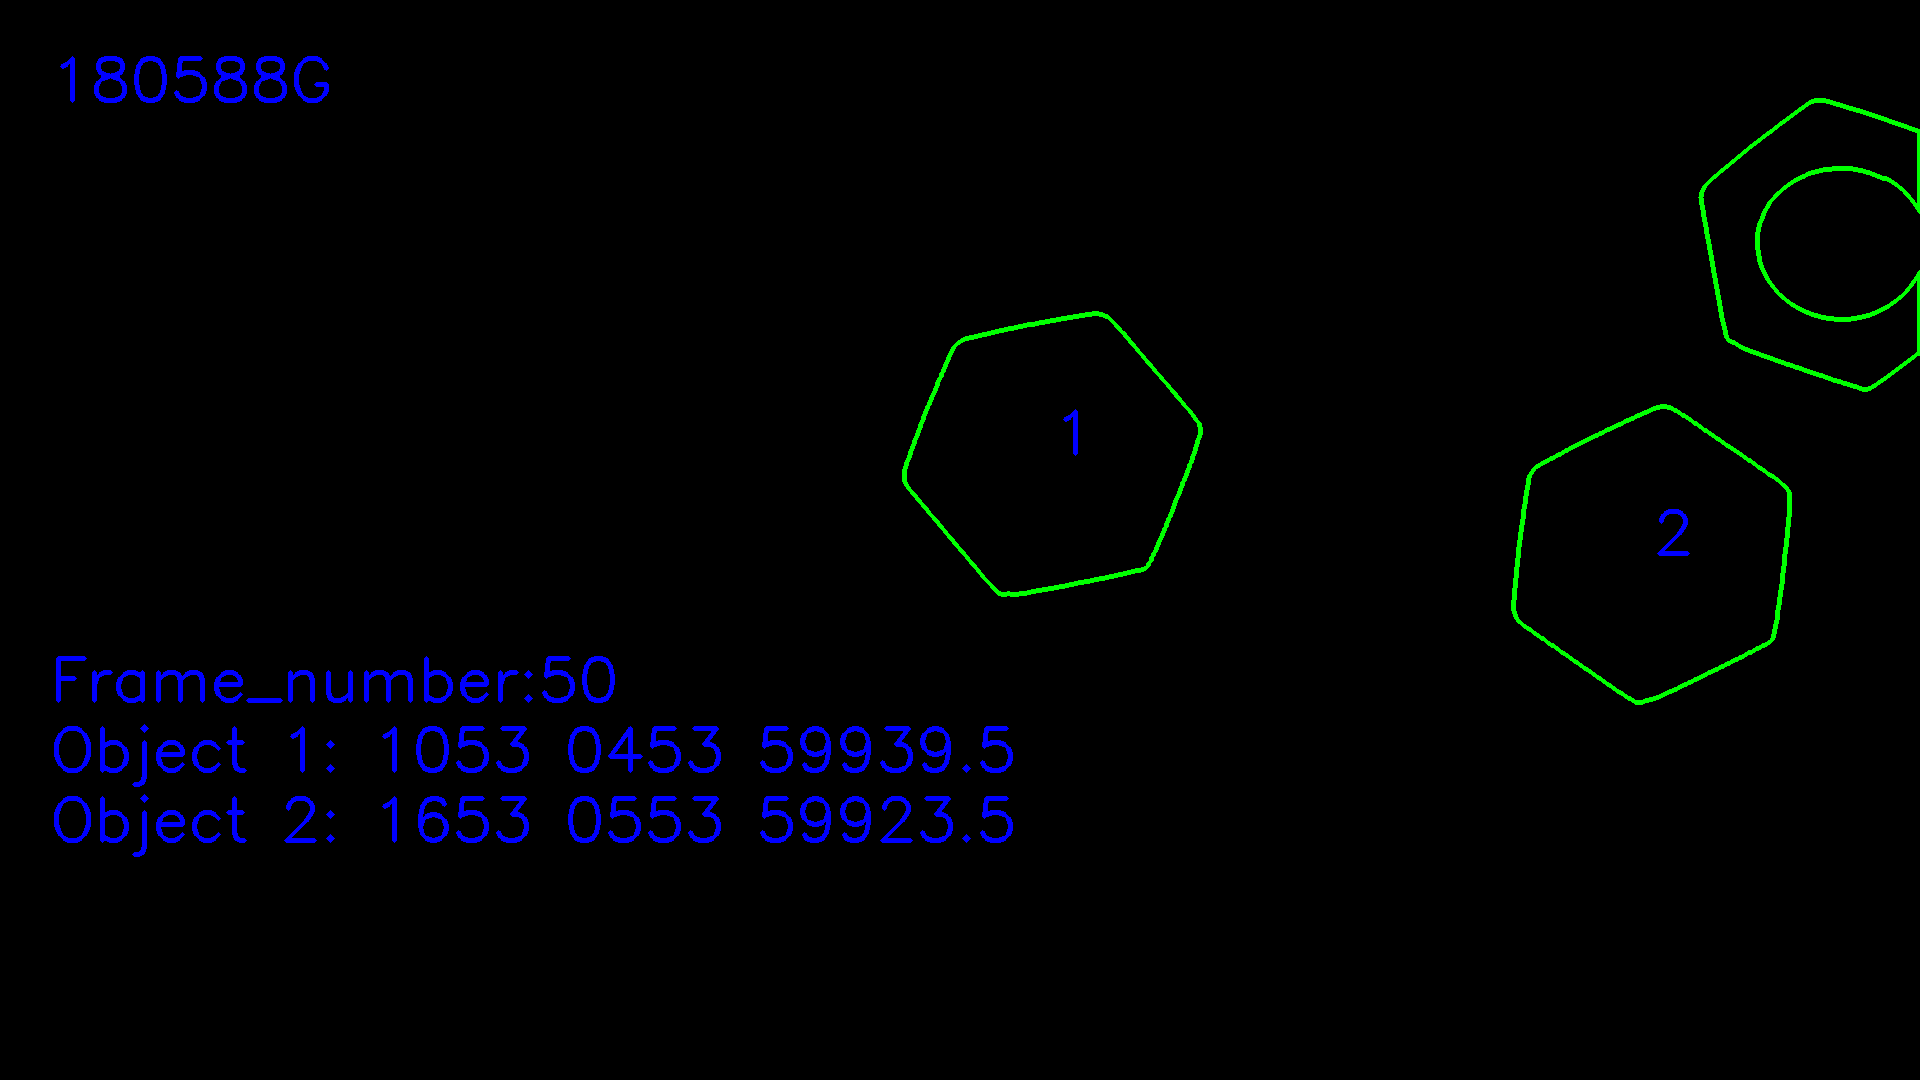

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.04300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.64300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.81700e+03, 2.43000e+02, 5.19755e+04, 3.00000e+00])]
Previousframe [array([1.05300e+03, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.65300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00])]


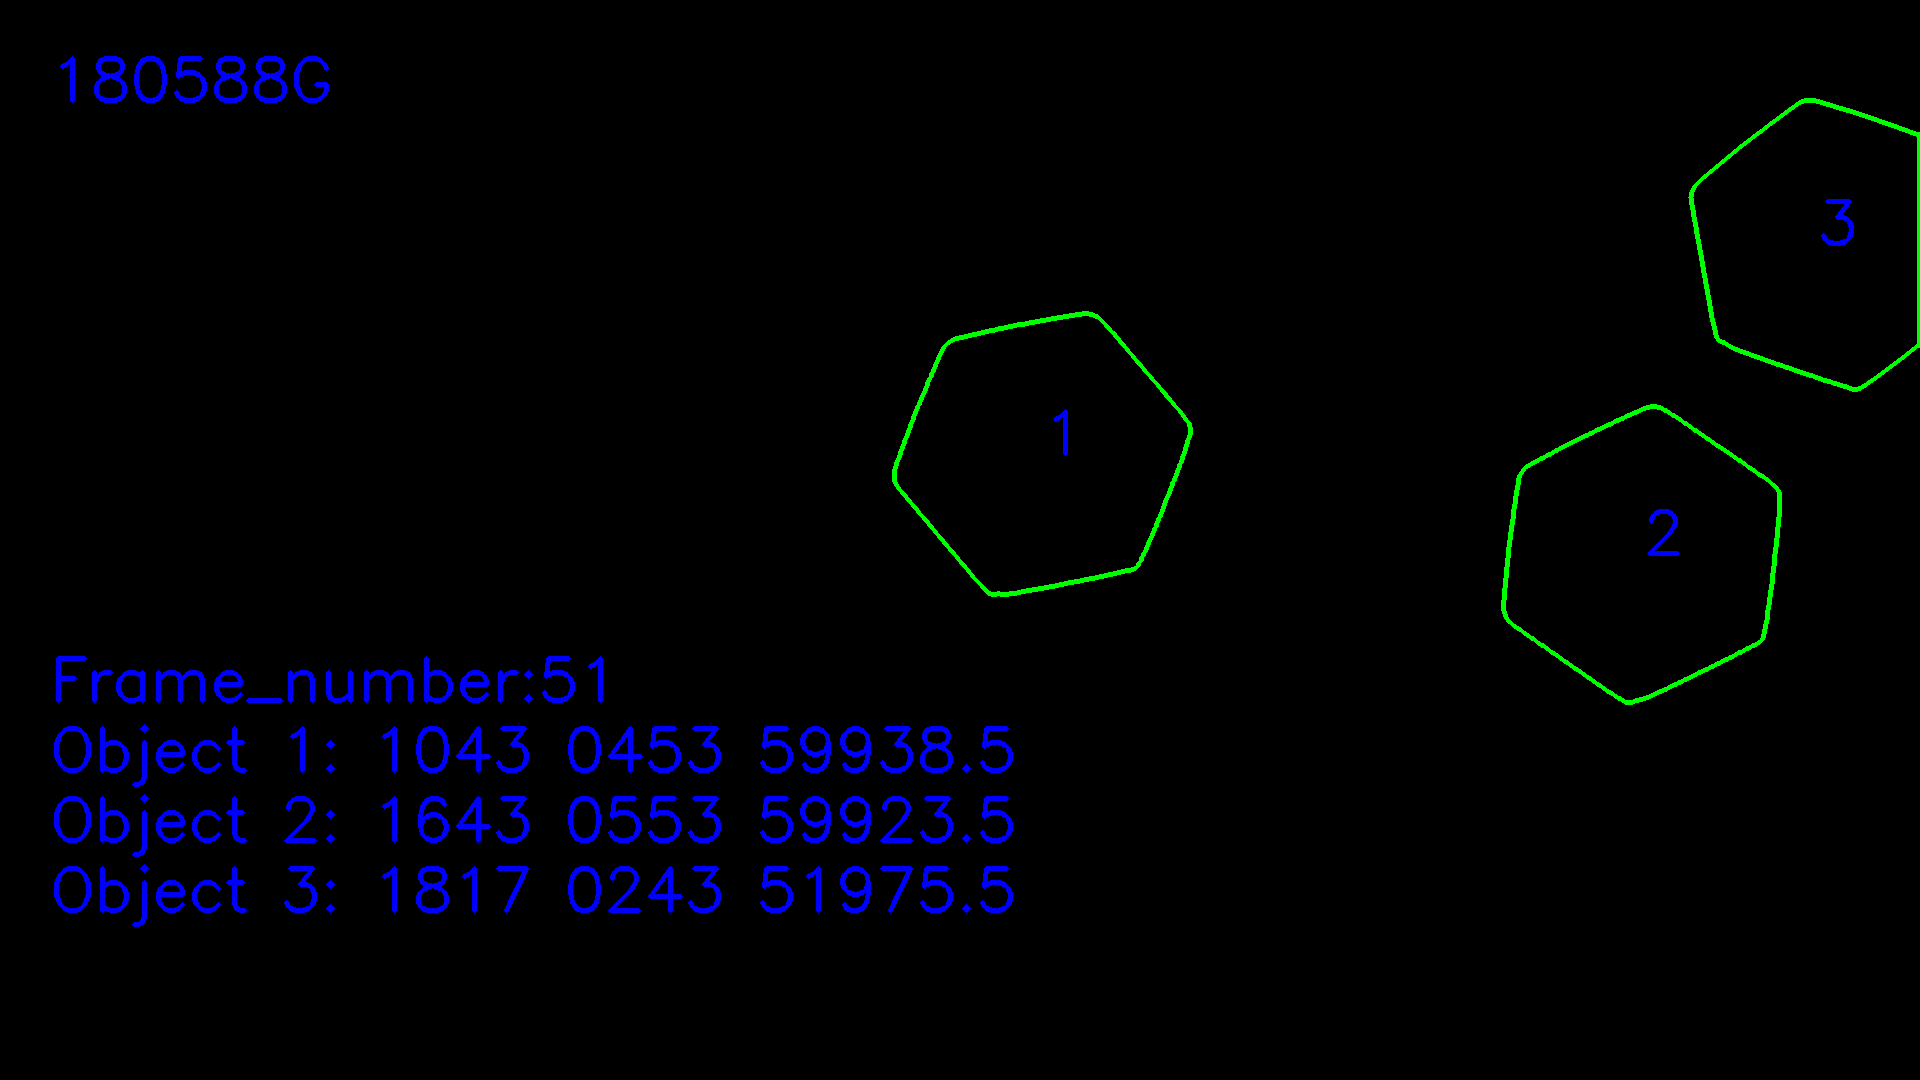

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.03300e+03, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.63300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.81100e+03, 2.43000e+02, 5.40055e+04, 3.00000e+00])]
Previousframe [array([1.04300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.64300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.81700e+03, 2.43000e+02, 5.19755e+04, 3.00000e+00])]


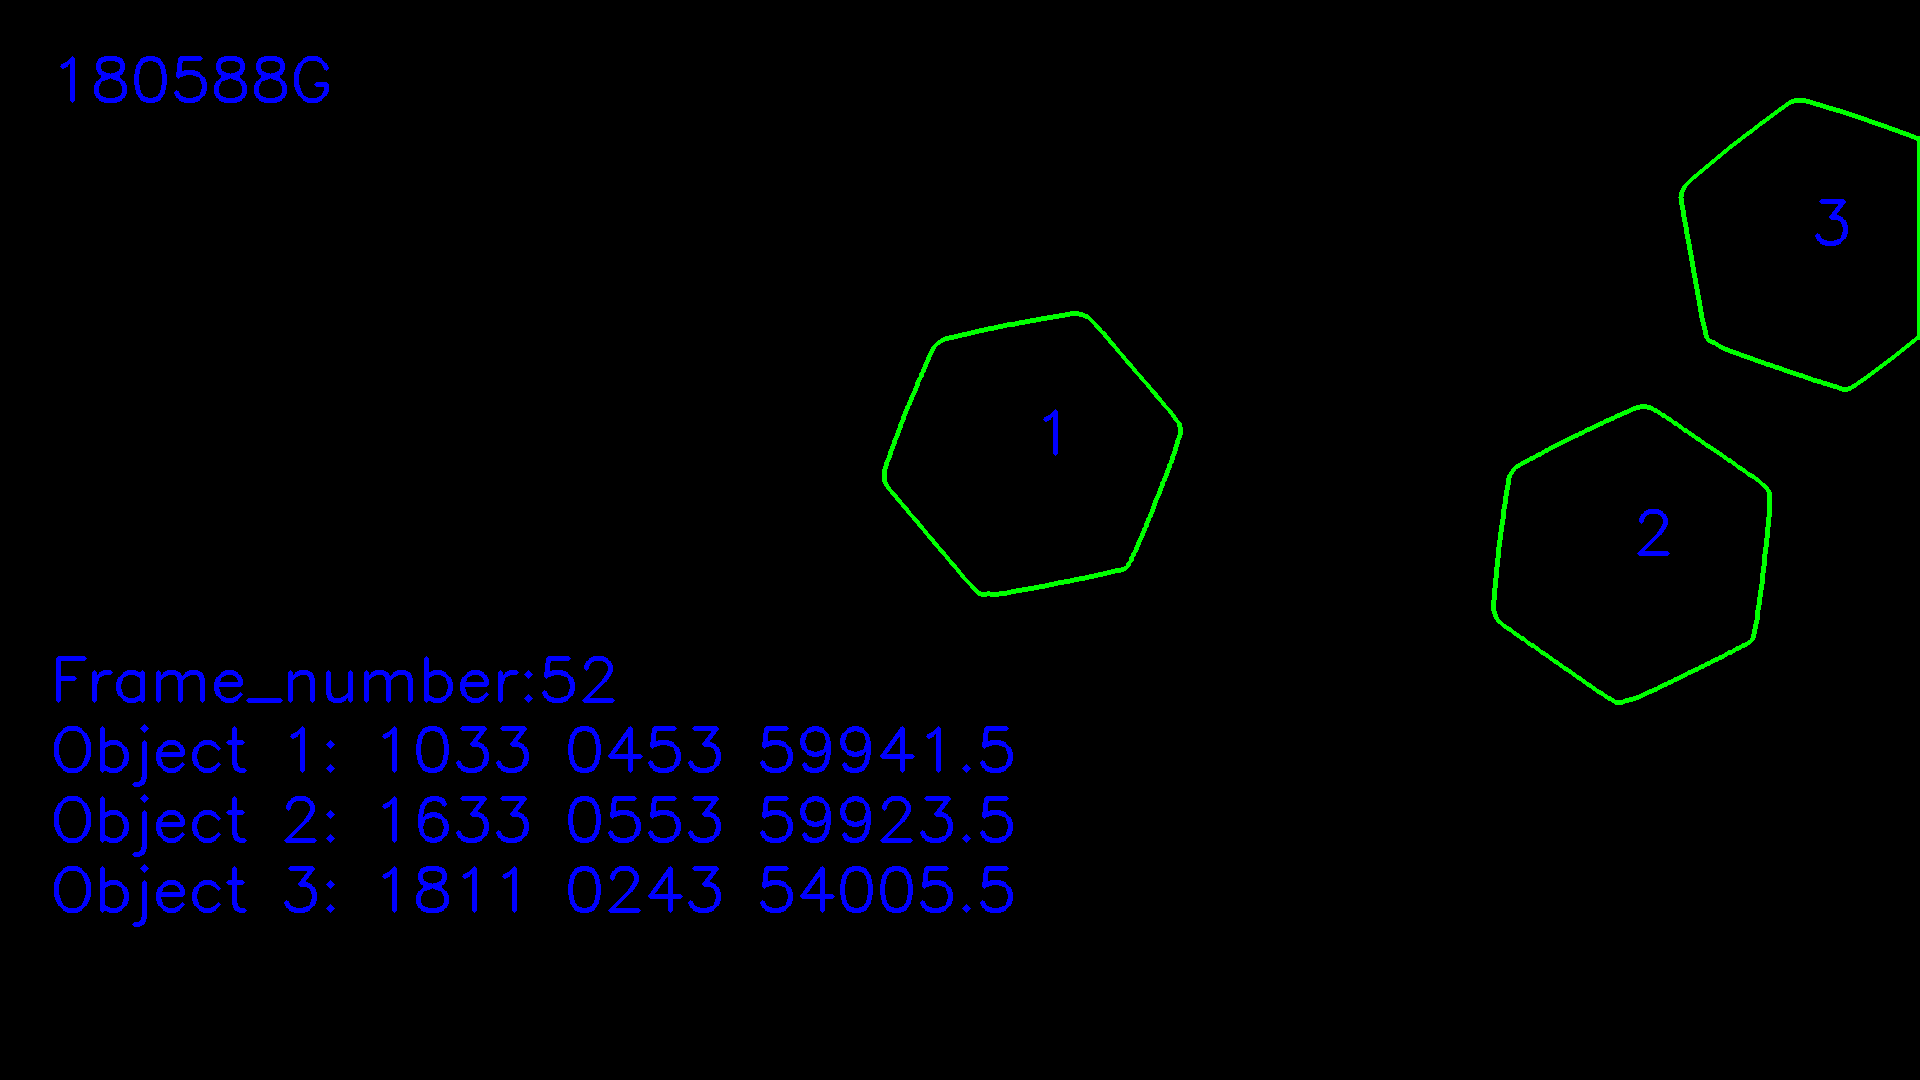

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.02300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.62300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.80500e+03, 2.43000e+02, 5.59185e+04, 3.00000e+00])]
Previousframe [array([1.03300e+03, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.63300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.81100e+03, 2.43000e+02, 5.40055e+04, 3.00000e+00])]


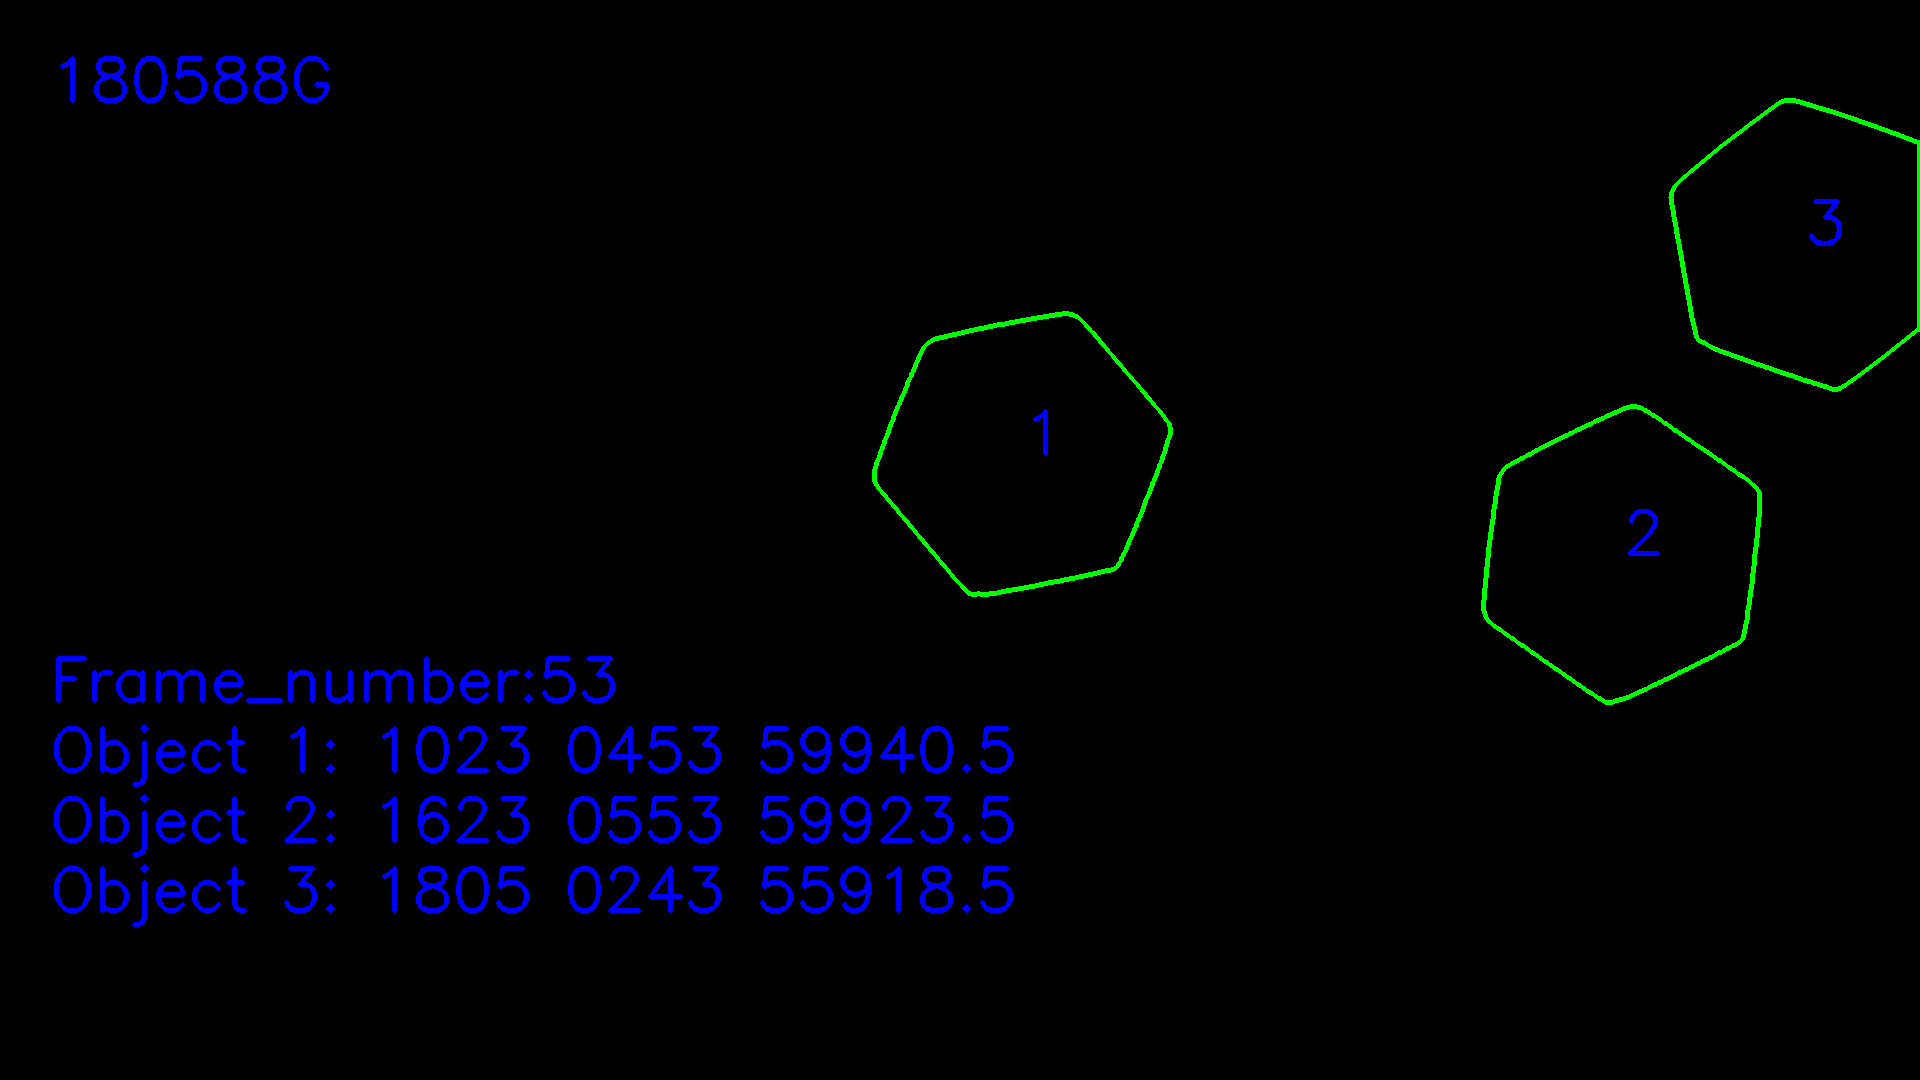

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.01300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.61300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.7990e+03, 2.4300e+02, 5.7688e+04, 3.0000e+00])]
Previousframe [array([1.02300e+03, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.62300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.80500e+03, 2.43000e+02, 5.59185e+04, 3.00000e+00])]


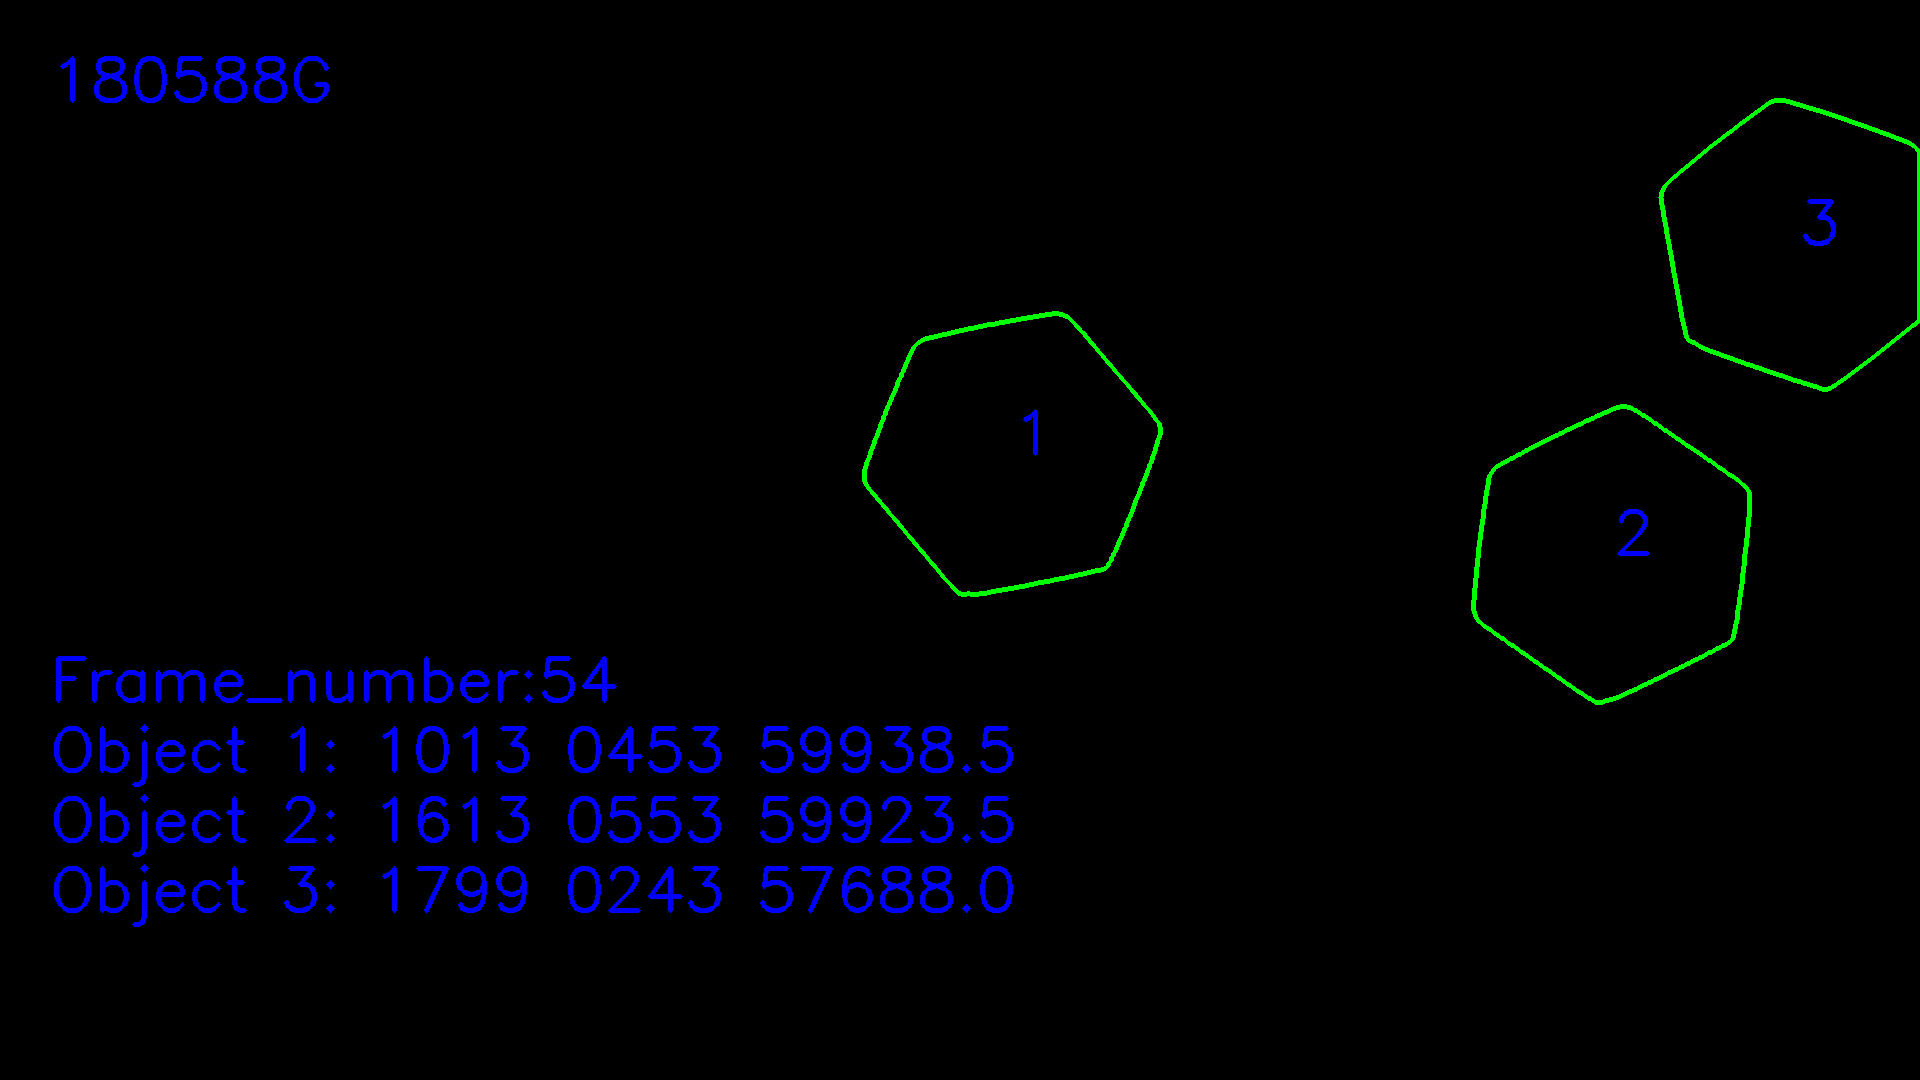

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.00300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.60300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.7920e+03, 2.4300e+02, 5.9105e+04, 3.0000e+00])]
Previousframe [array([1.01300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.61300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.7990e+03, 2.4300e+02, 5.7688e+04, 3.0000e+00])]


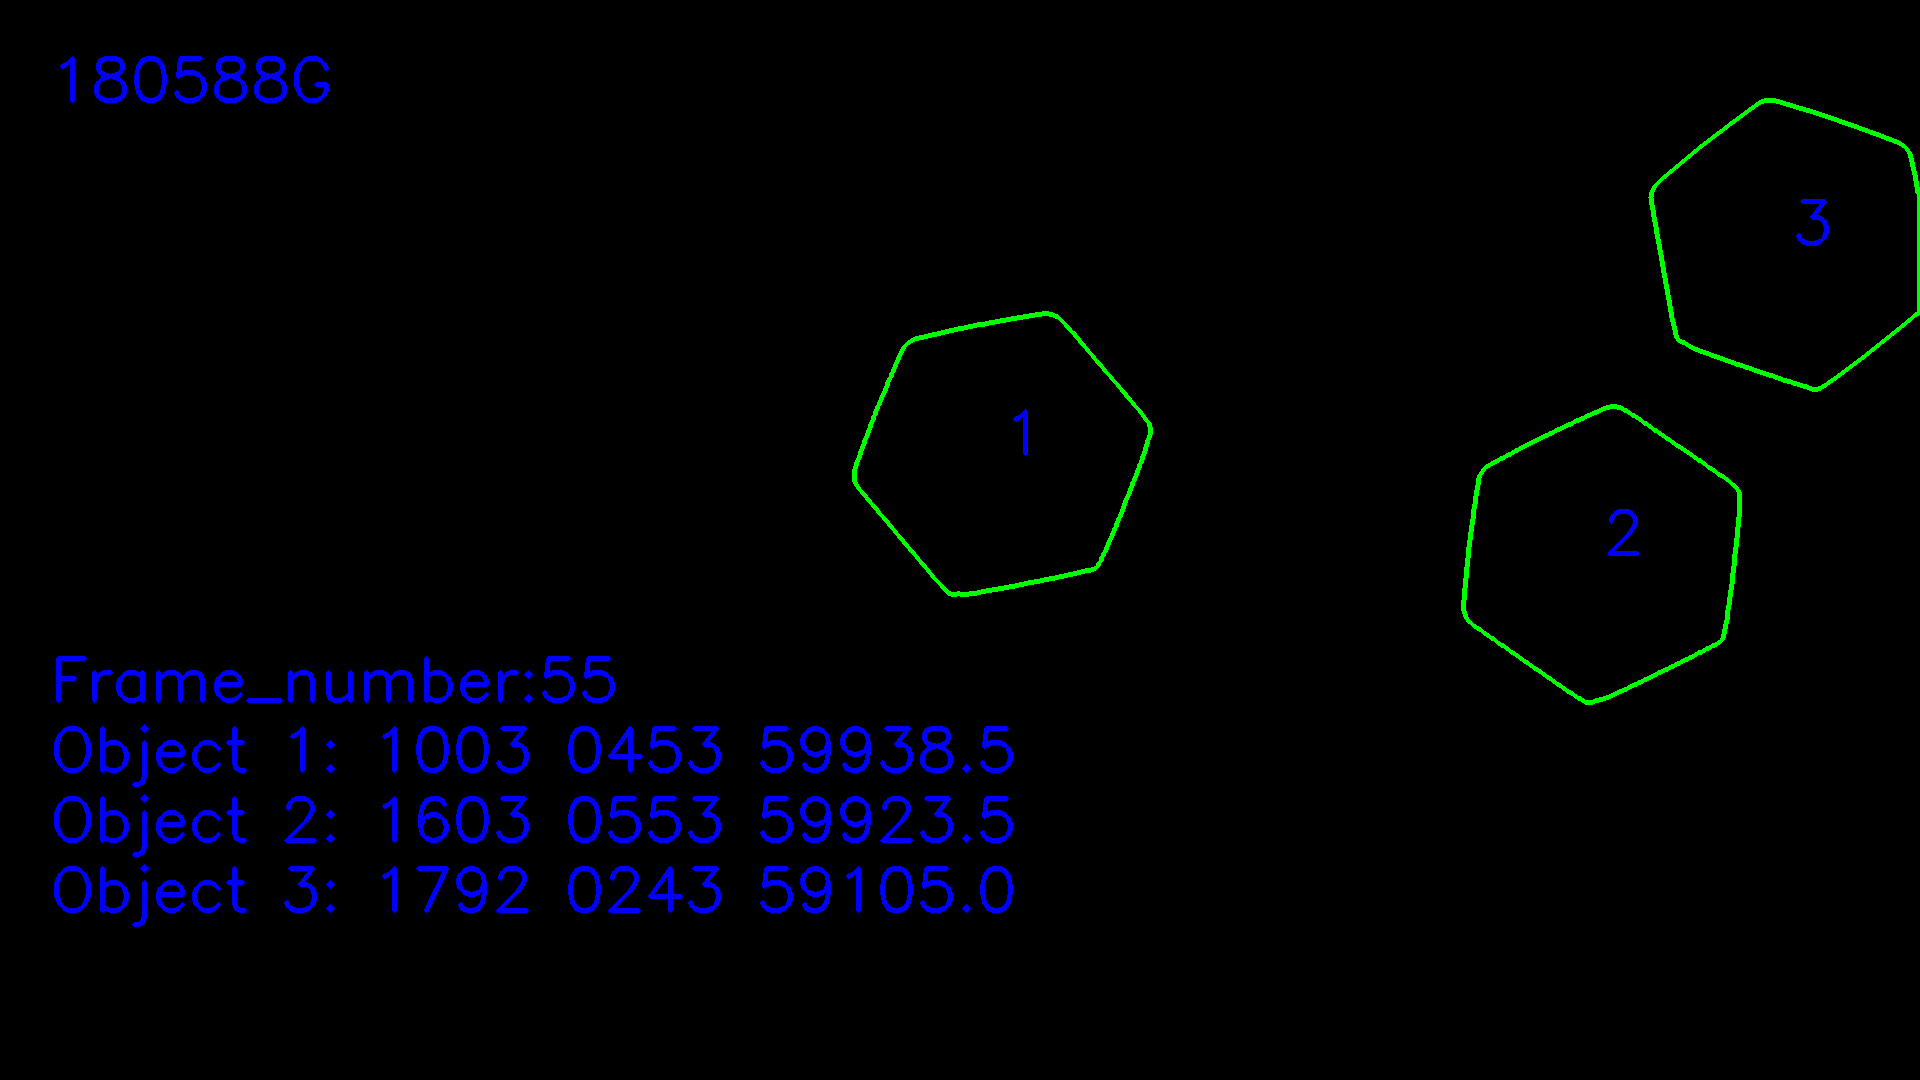

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.93000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.59300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.78400e+03, 2.43000e+02, 5.99015e+04, 3.00000e+00])]
Previousframe [array([1.00300e+03, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.60300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.7920e+03, 2.4300e+02, 5.9105e+04, 3.0000e+00])]


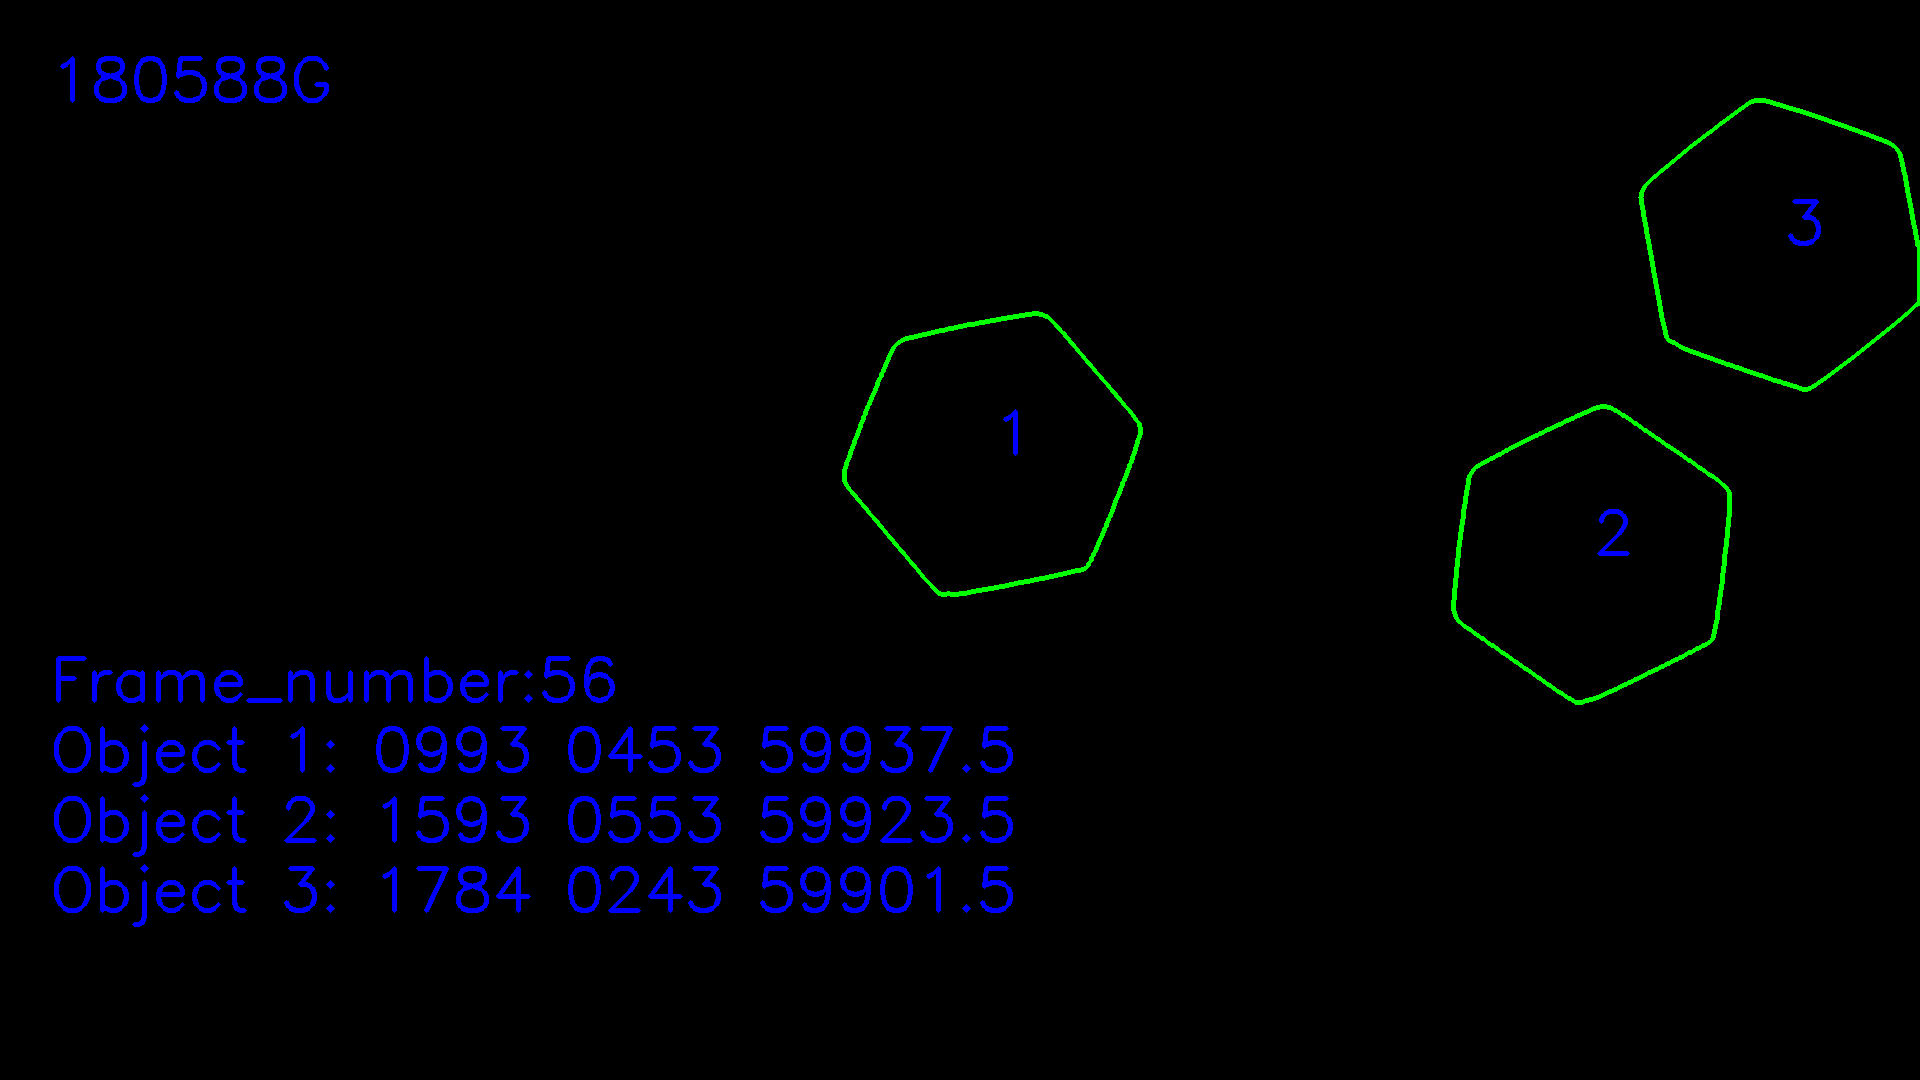

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.83000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.58300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.77400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([9.93000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.59300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.78400e+03, 2.43000e+02, 5.99015e+04, 3.00000e+00])]


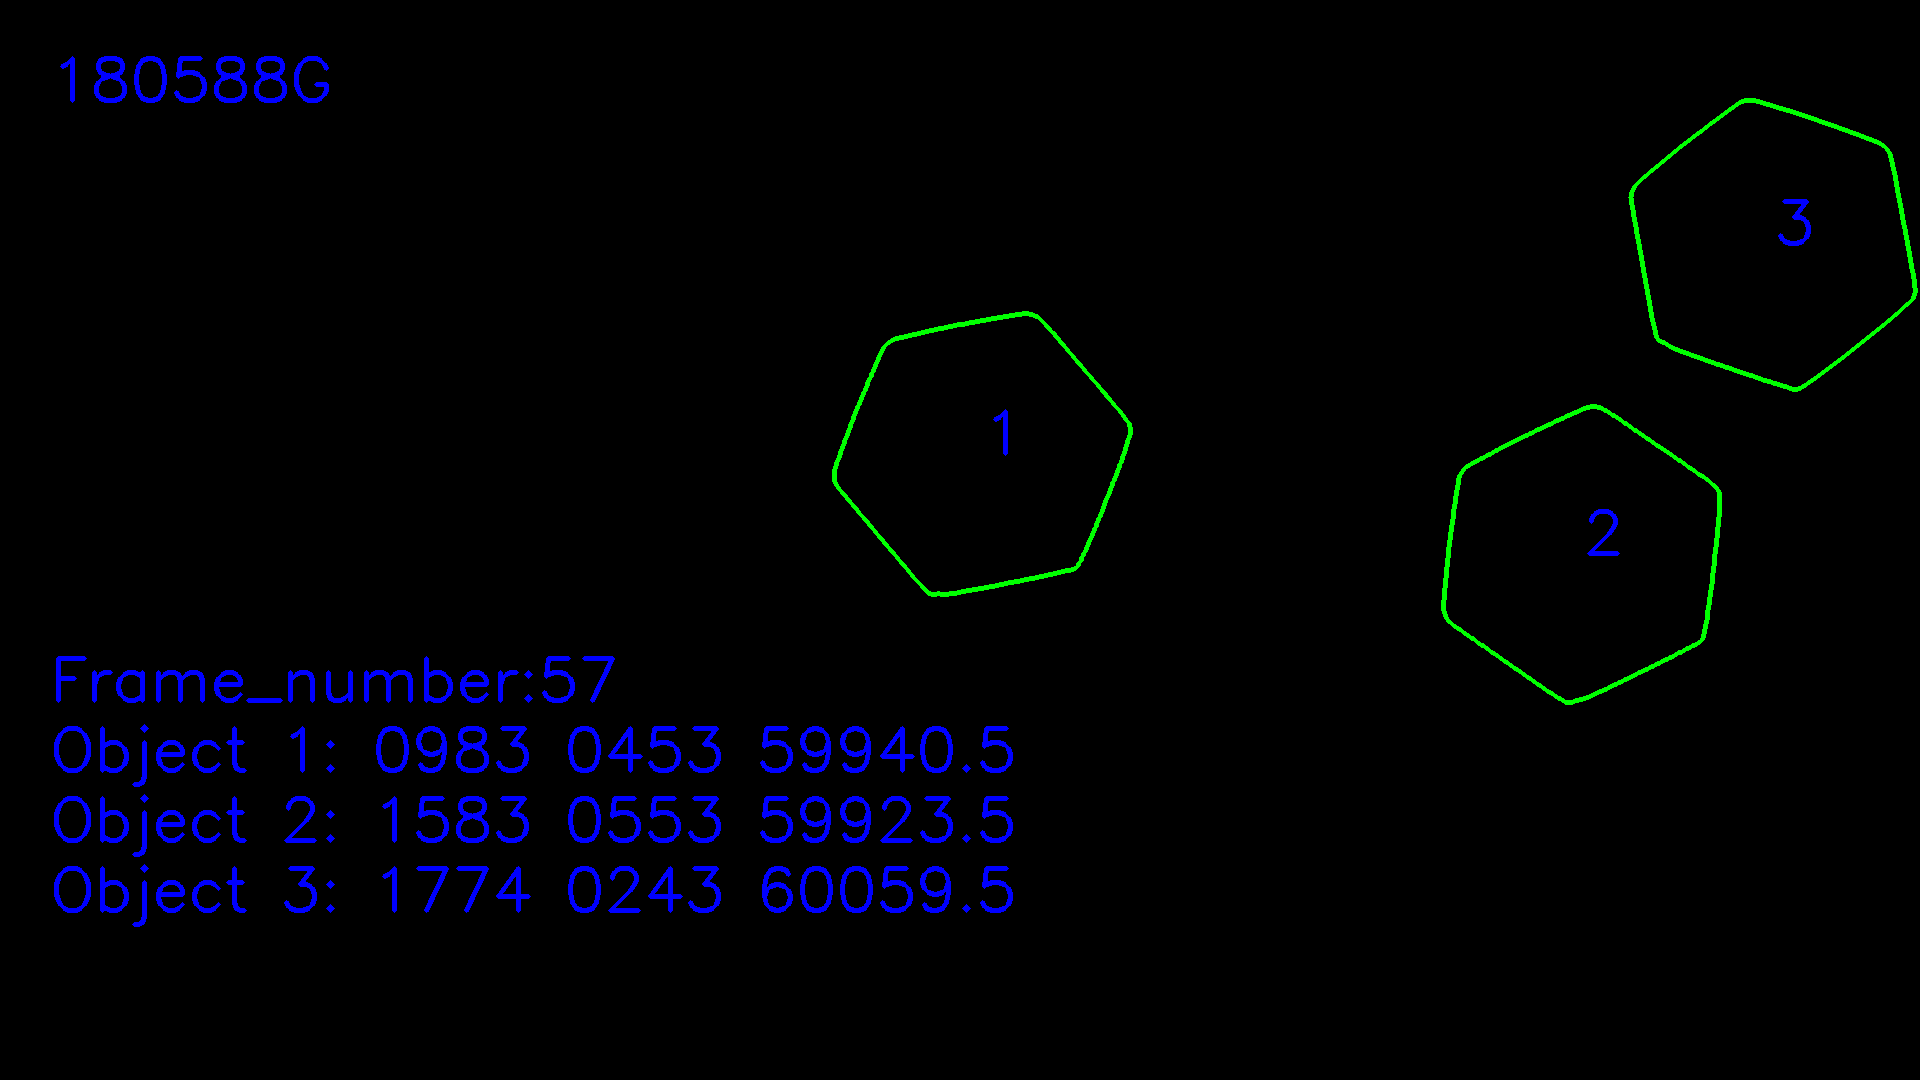

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.73000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.57300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.76400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([9.83000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.58300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.77400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


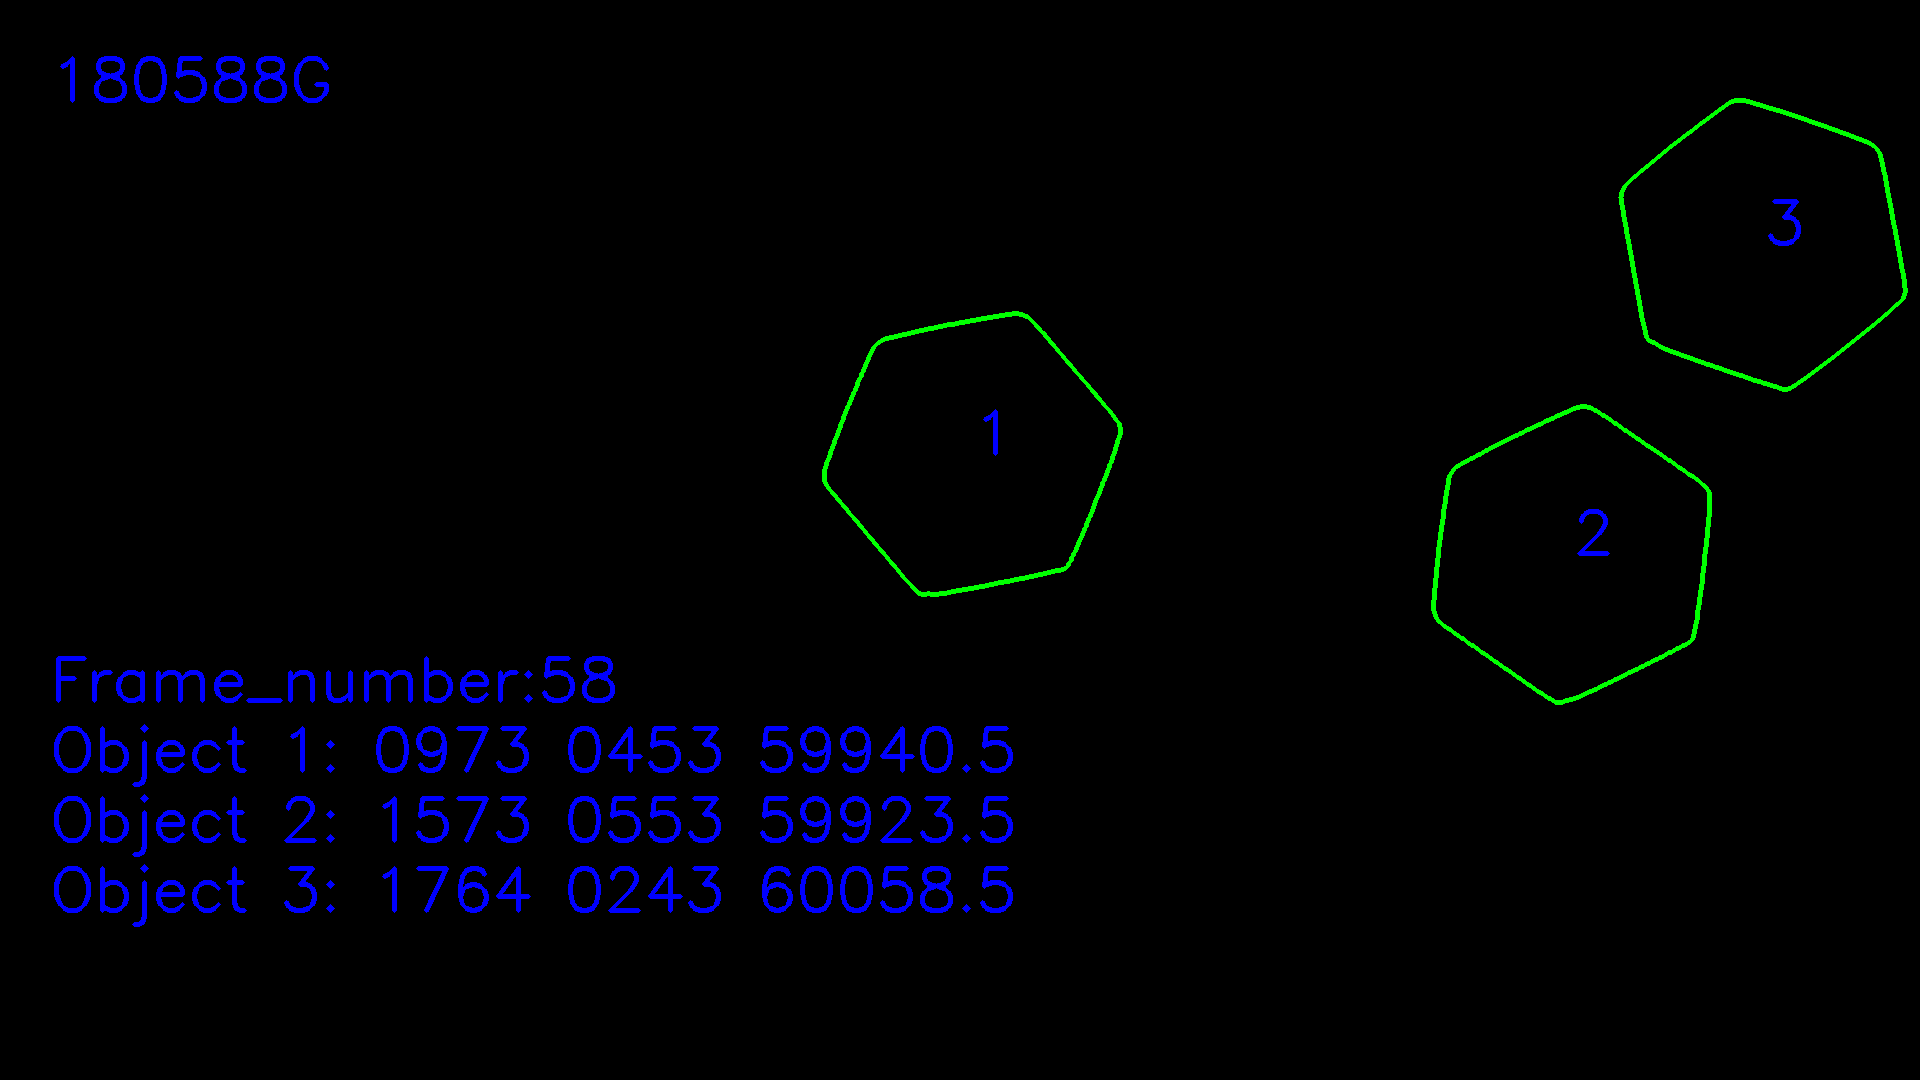

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.63000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.56300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.75400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([9.73000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.57300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.76400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


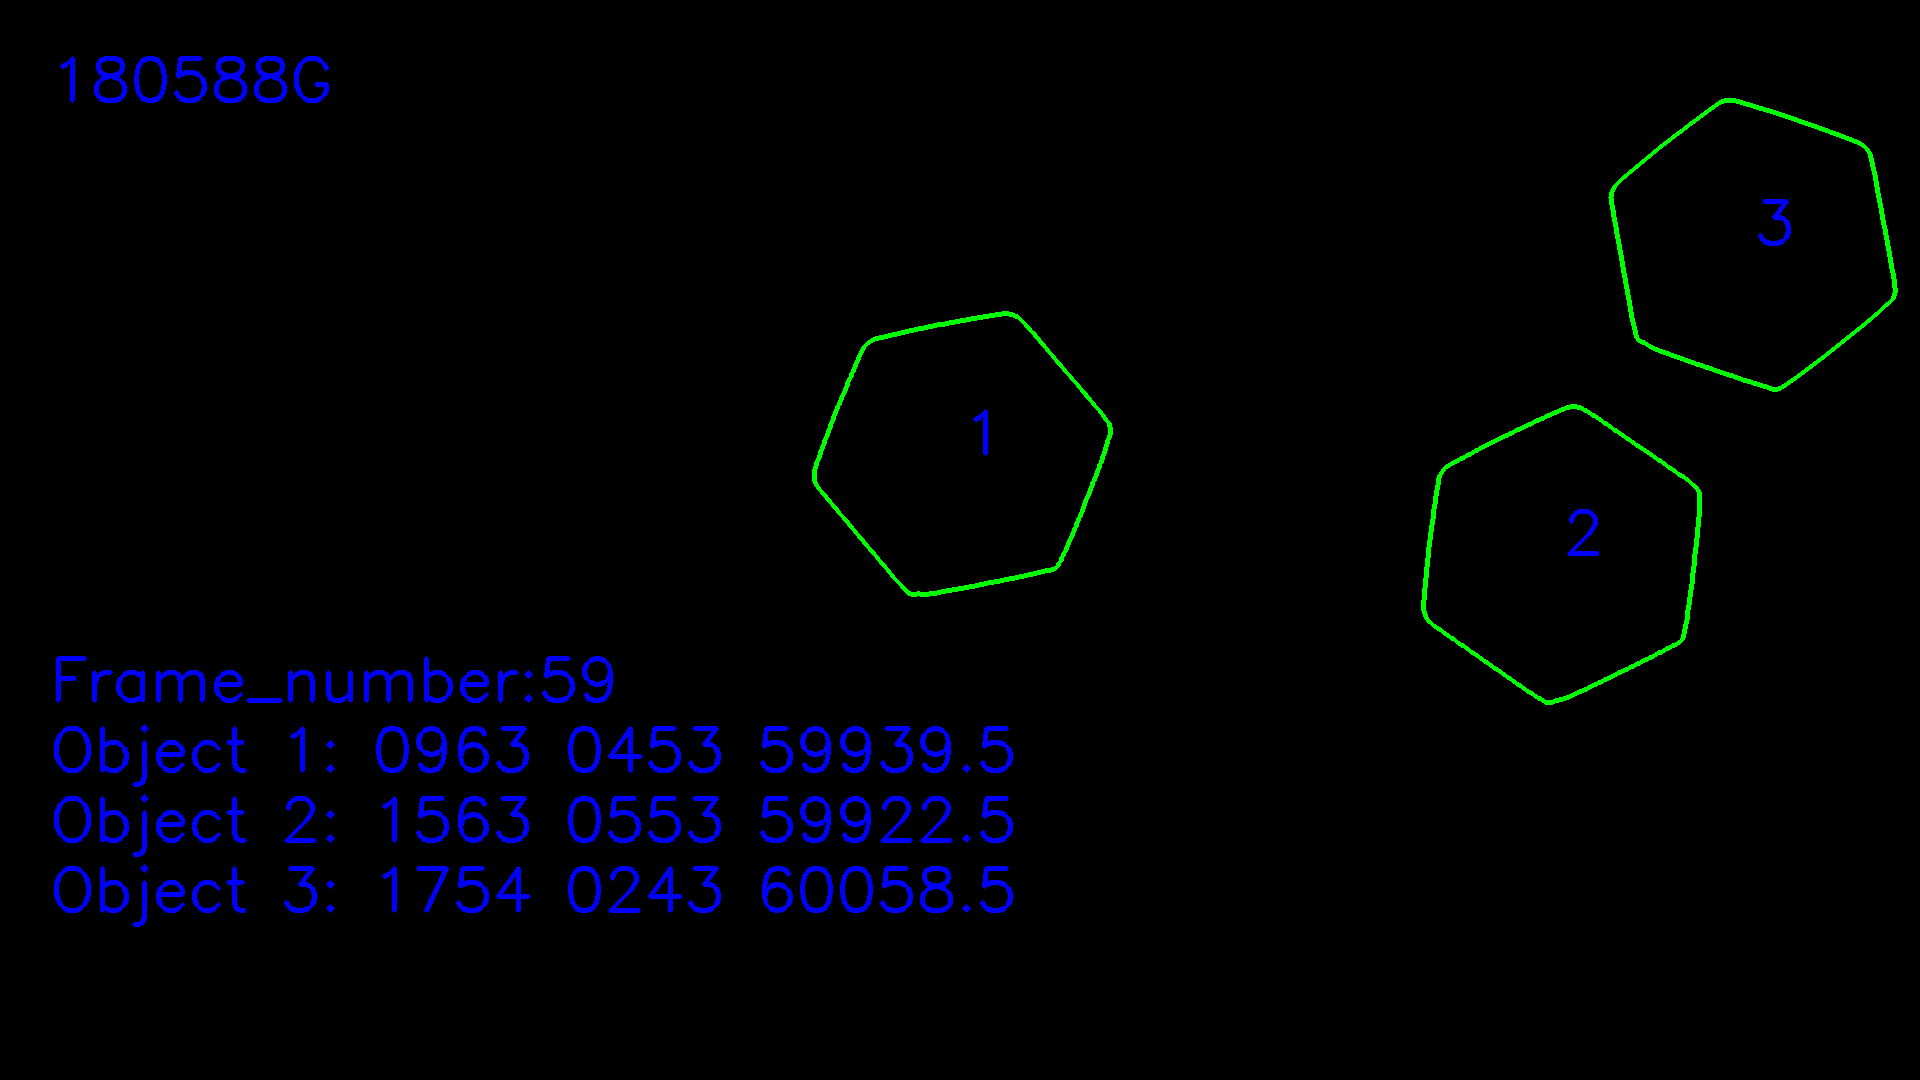

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.53000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.55300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.74400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([9.63000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.56300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.75400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


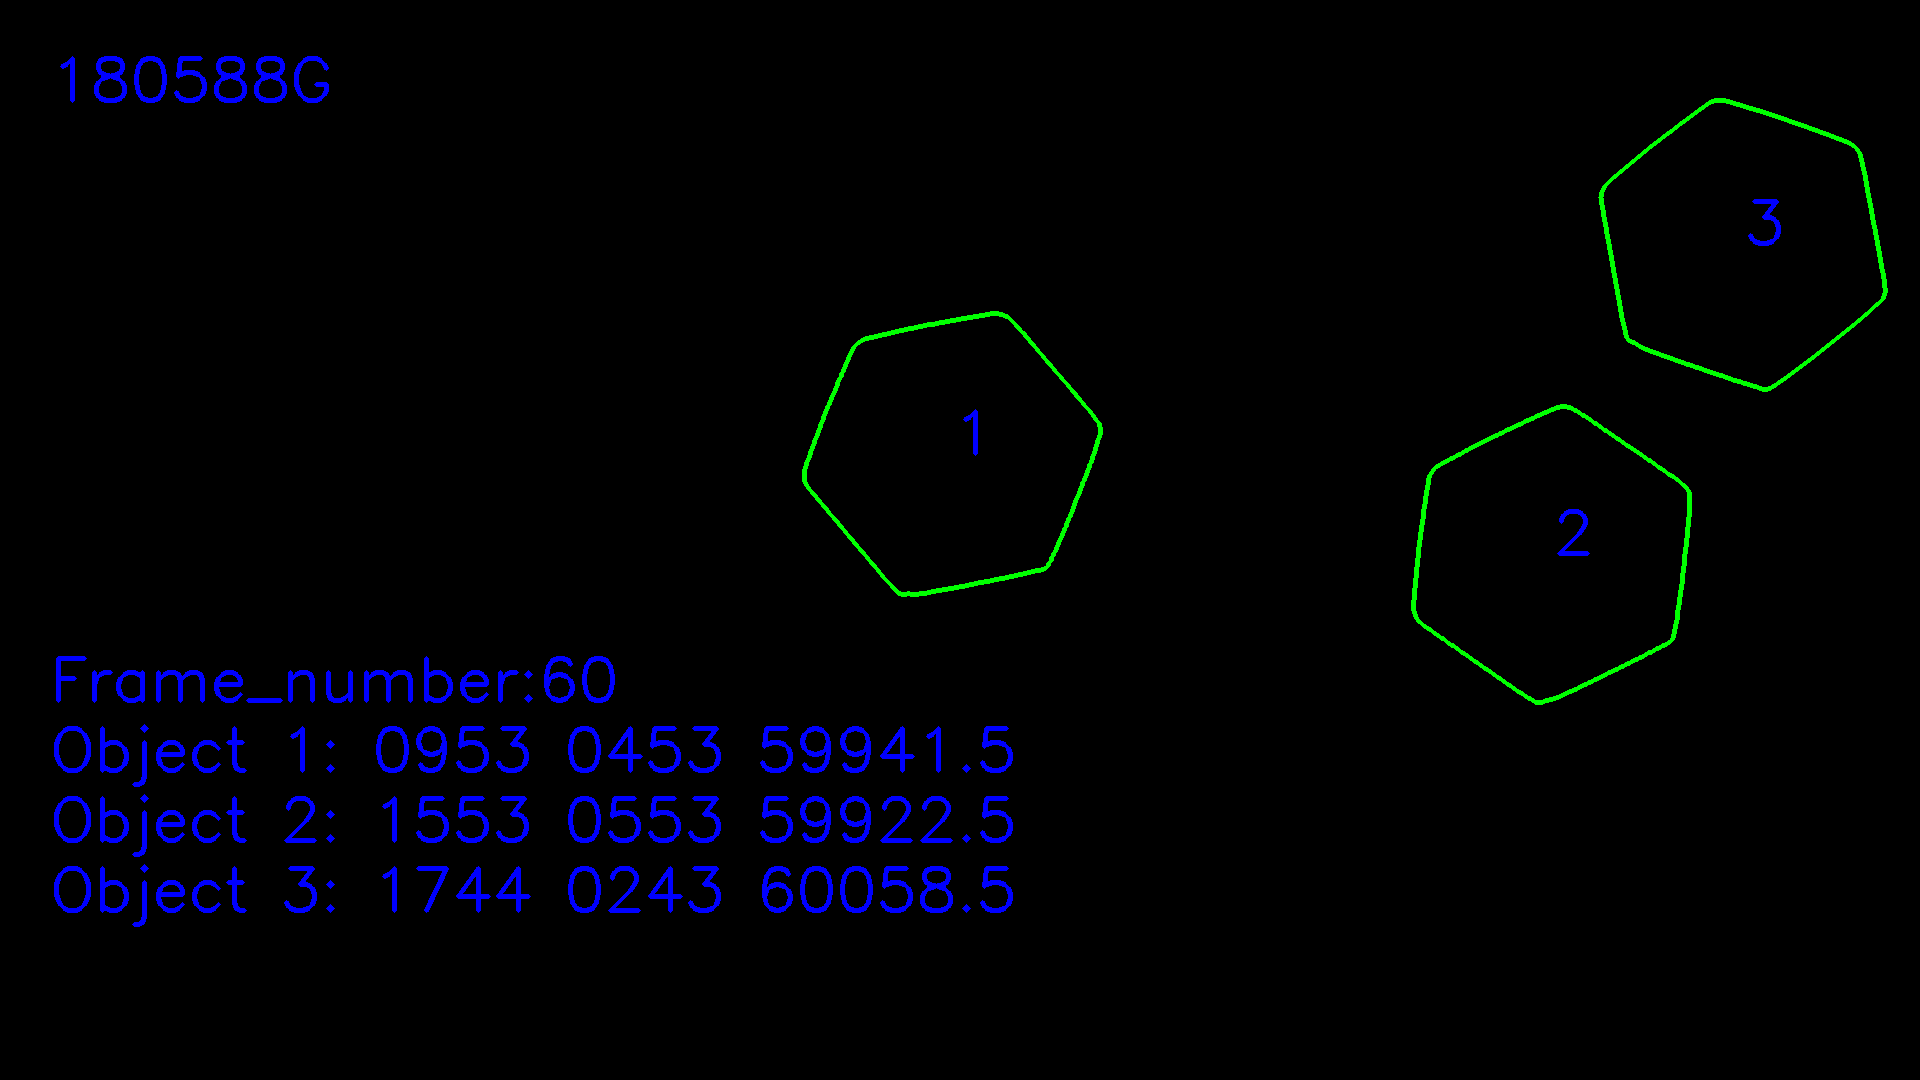

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.43000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.54300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.73400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([9.53000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.55300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.74400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


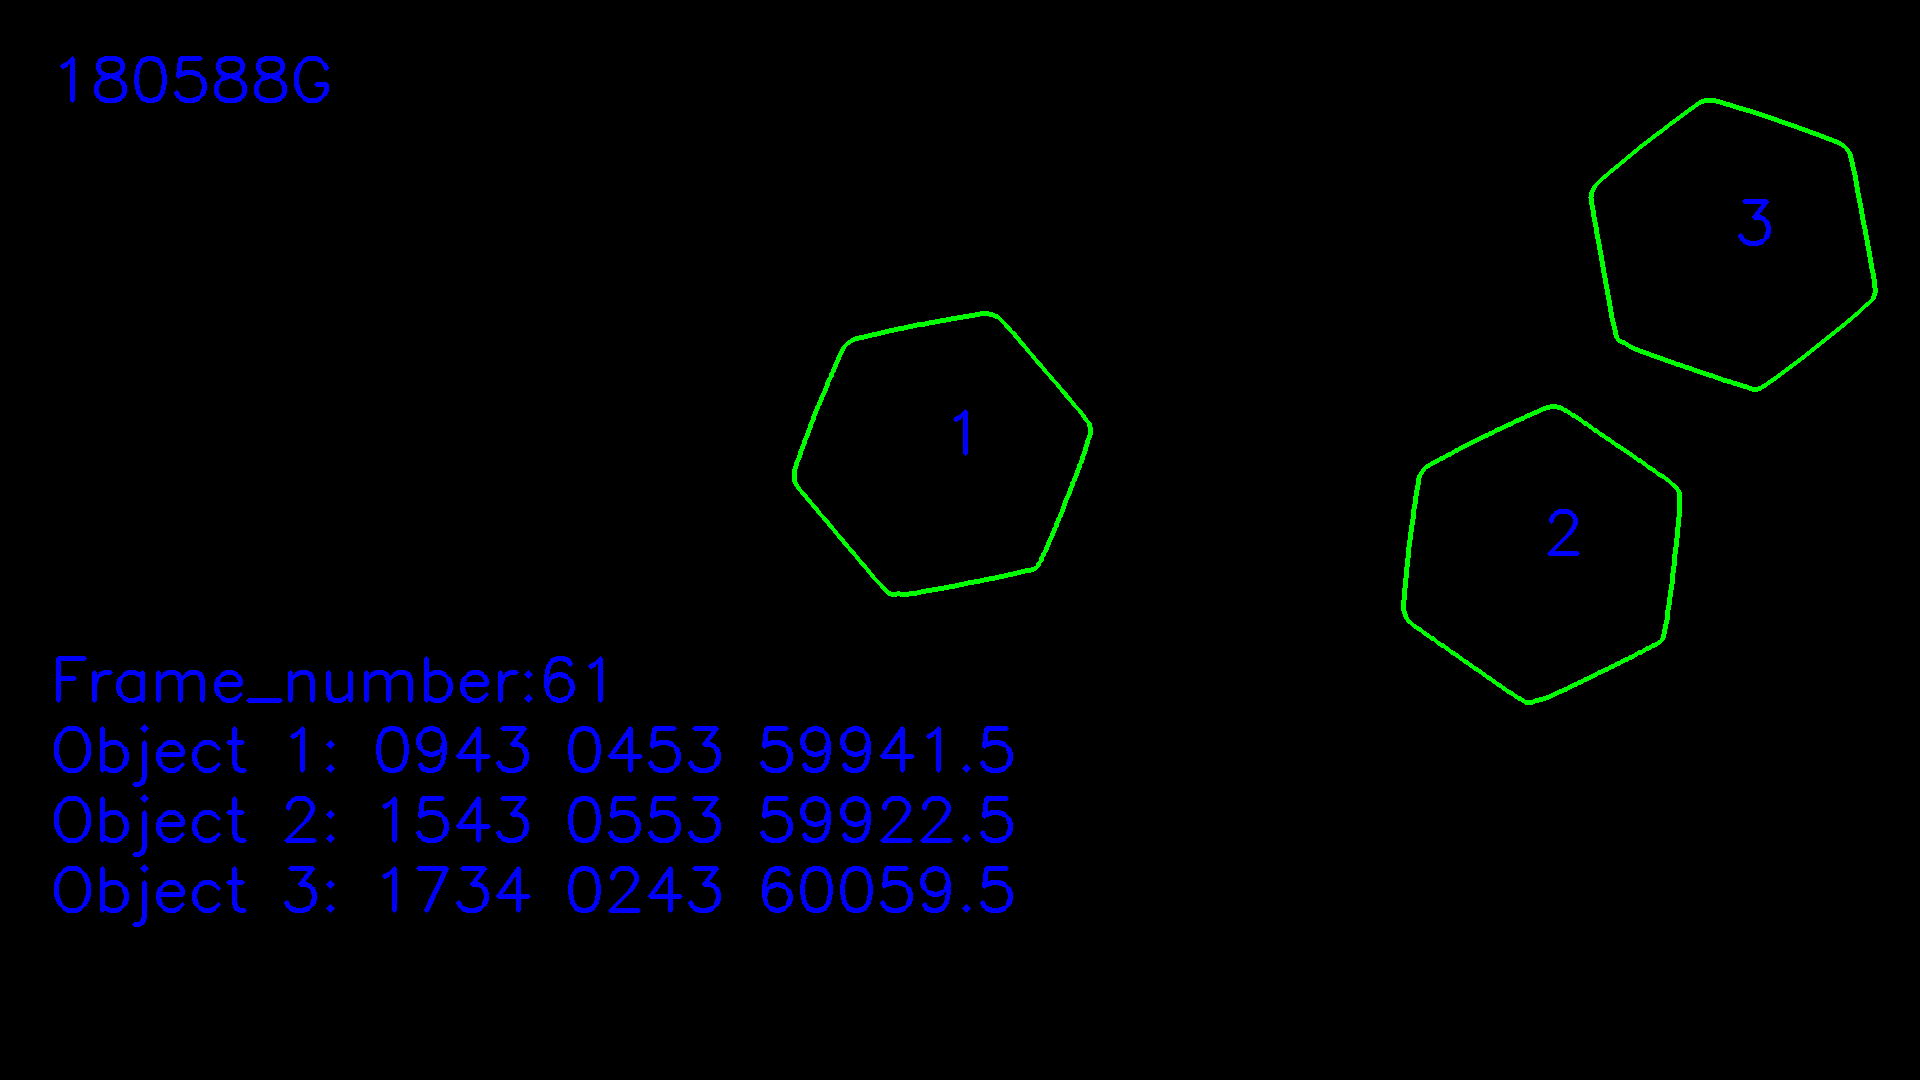

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.33000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.53300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.72400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([9.43000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.54300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.73400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


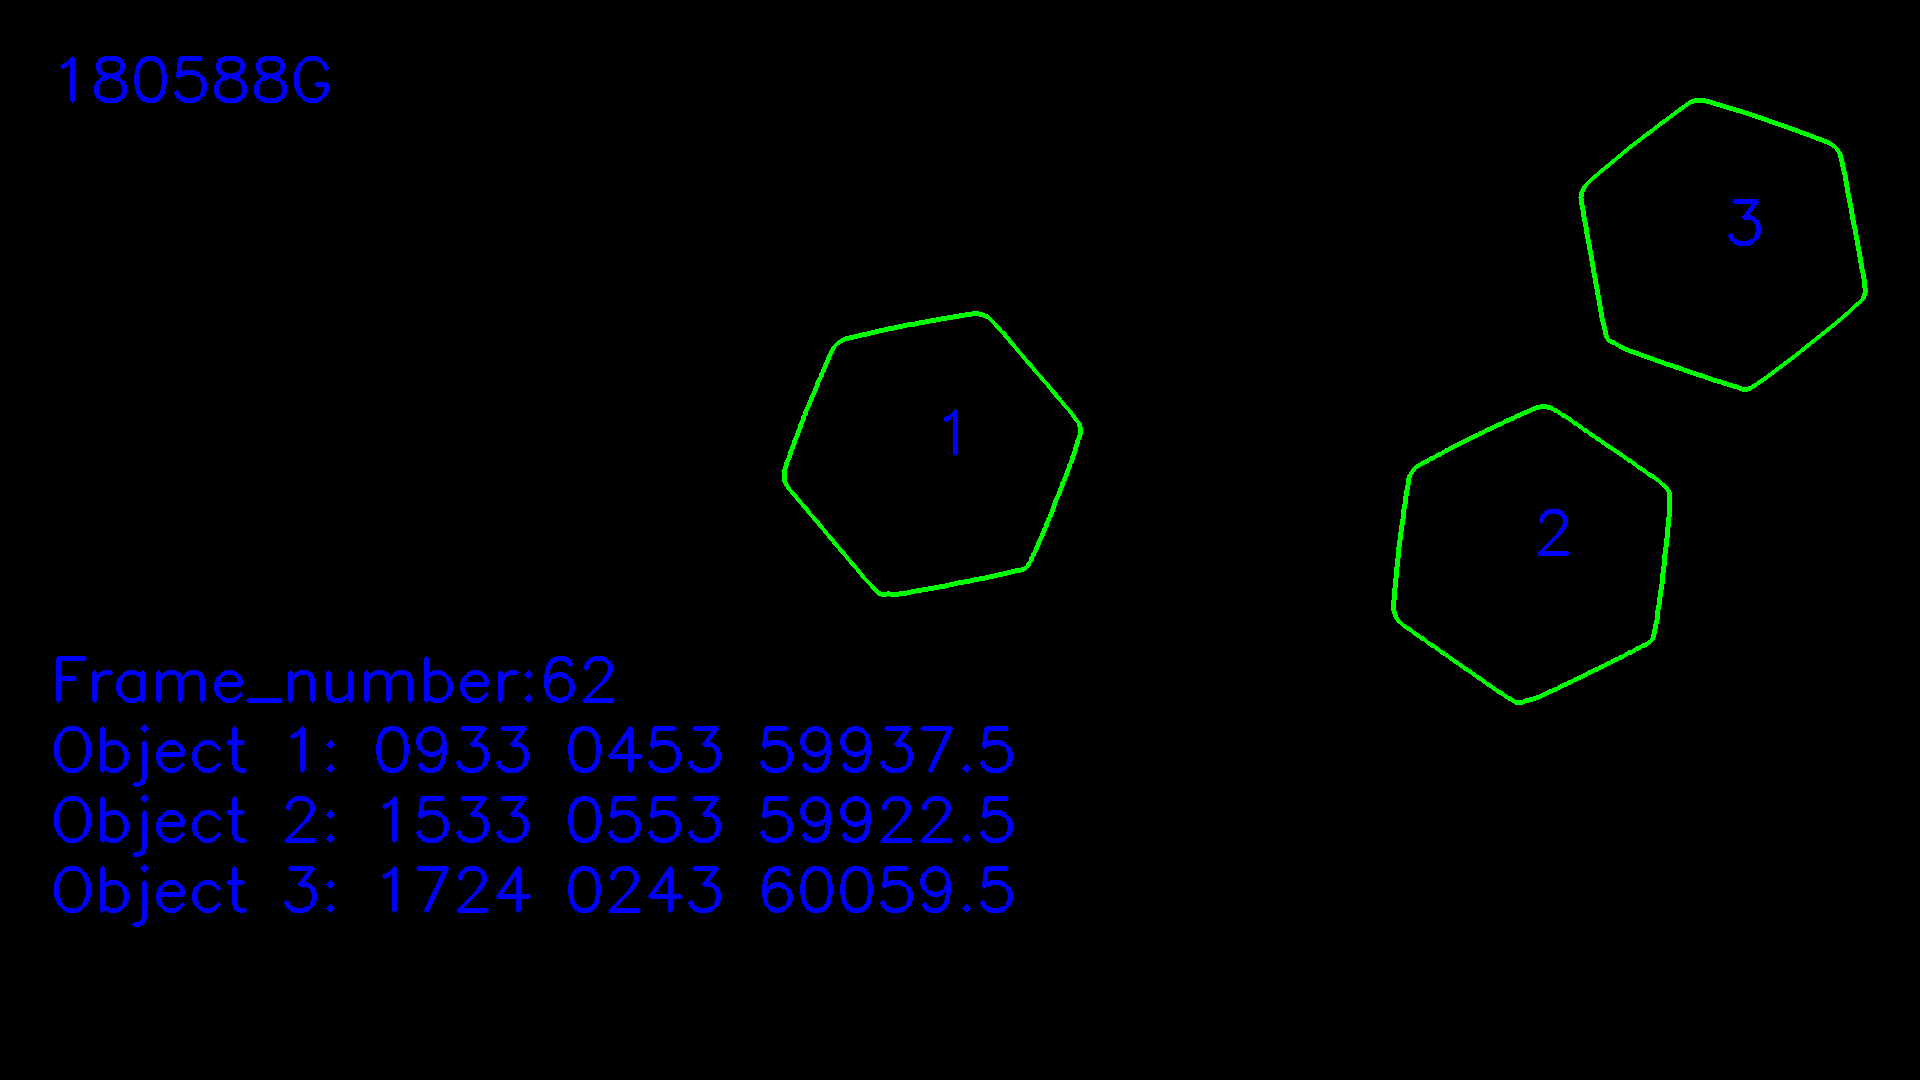

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.52300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.71400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([9.33000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.53300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.72400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


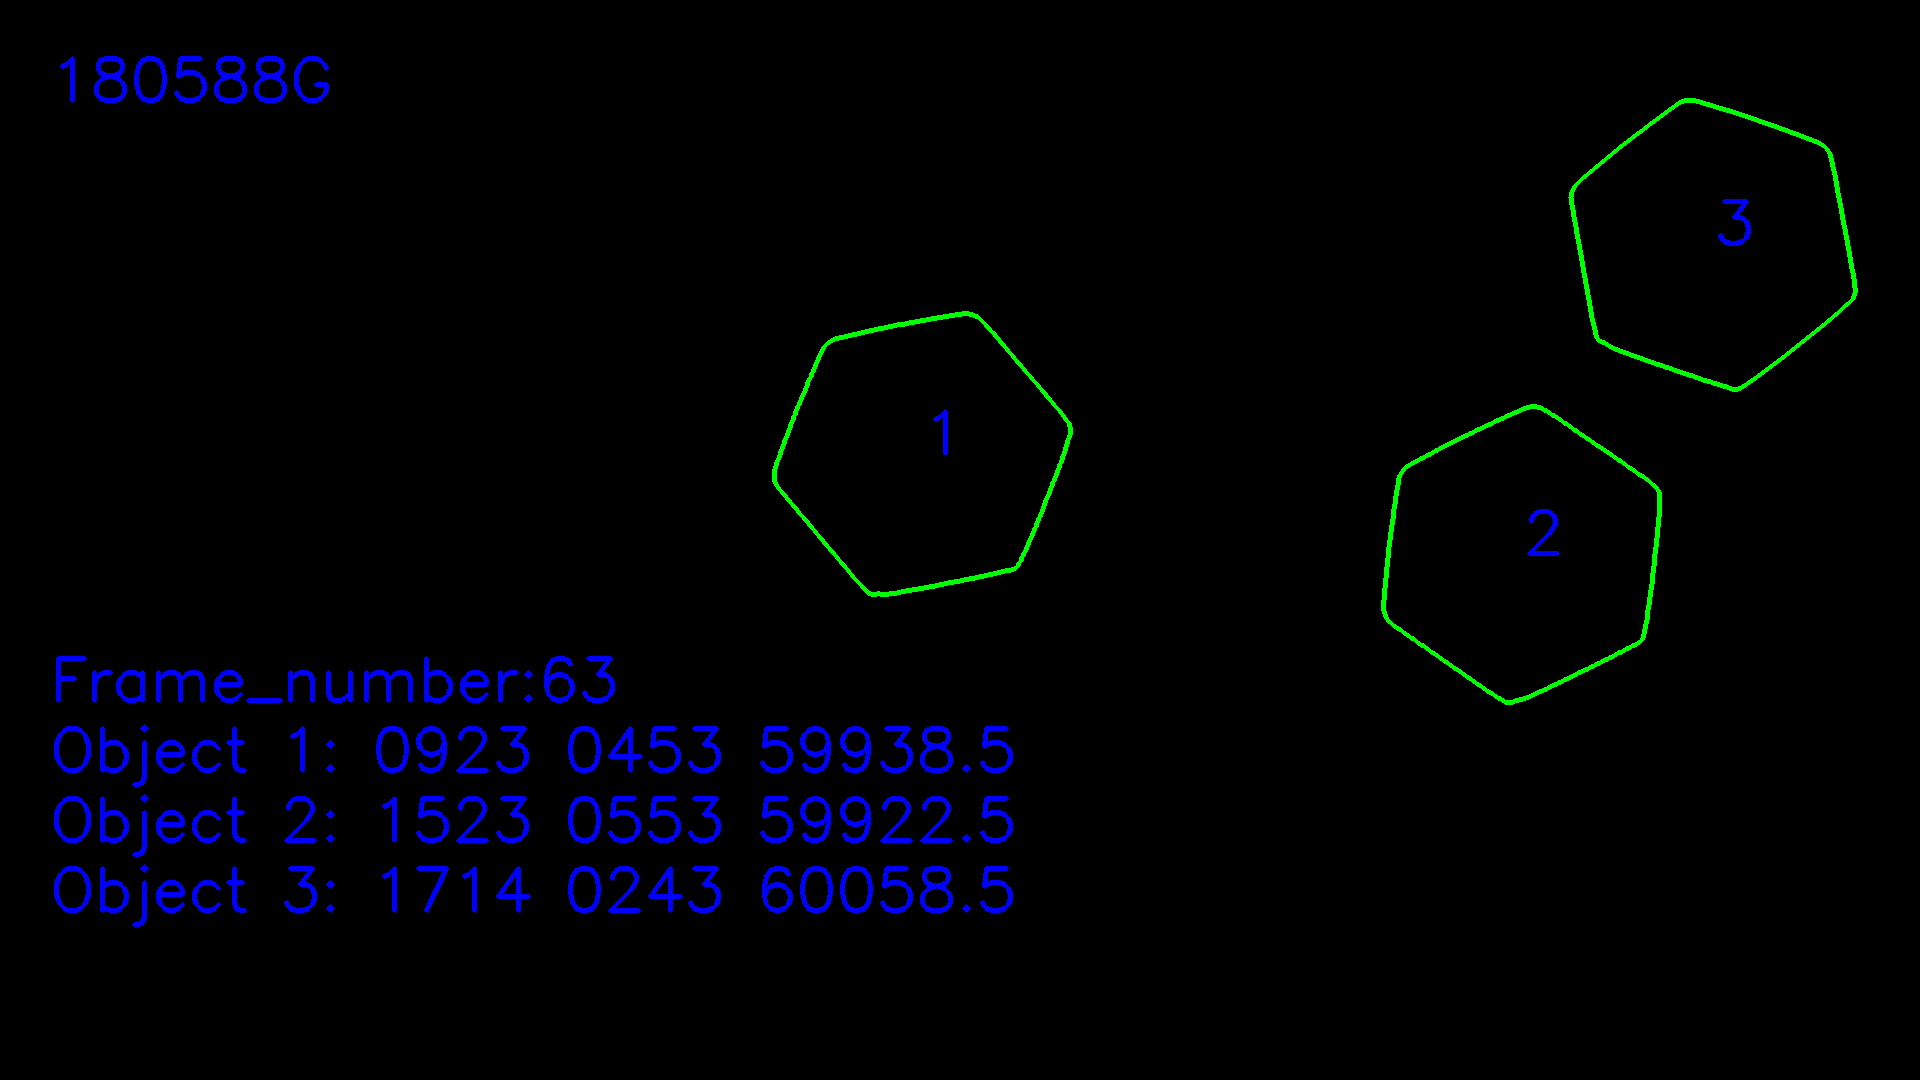

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.13000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.51300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.70400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([9.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.52300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.71400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


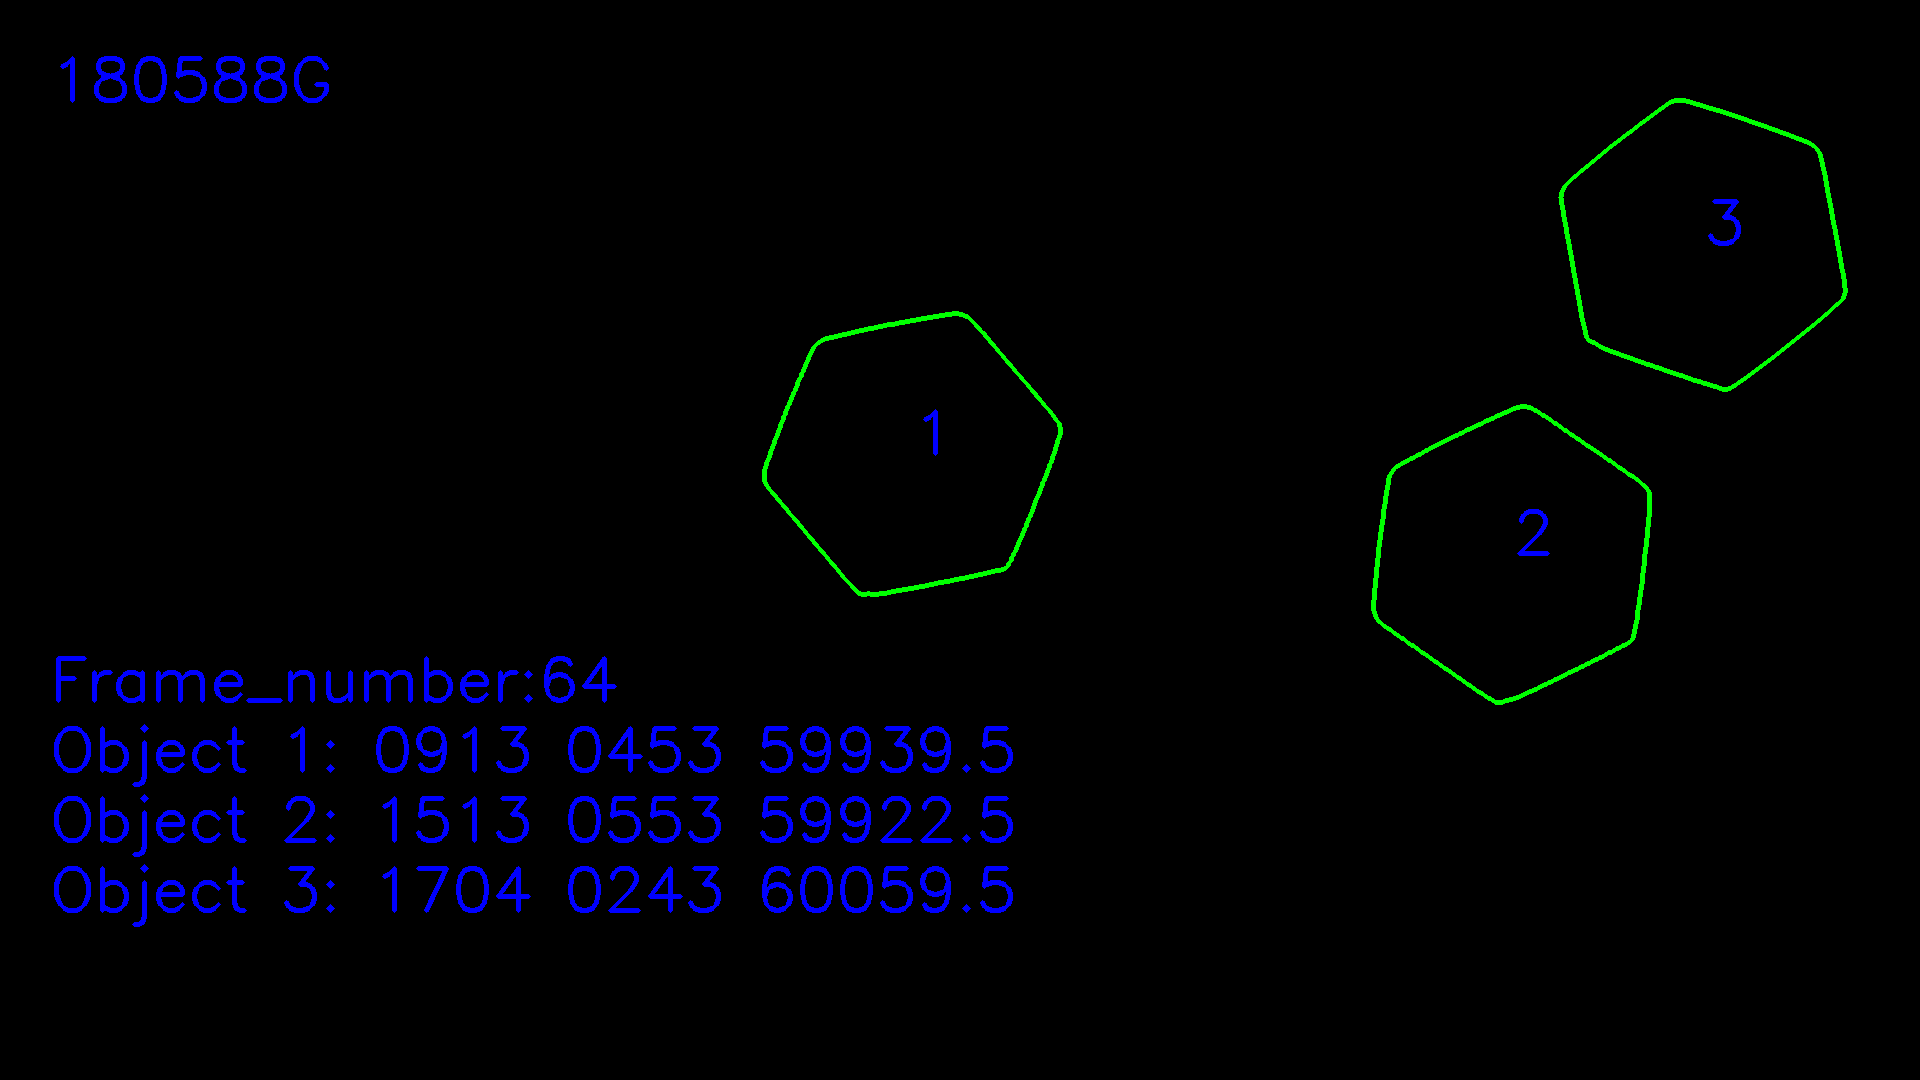

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([9.03000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.50300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.69400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([9.13000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.51300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.70400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


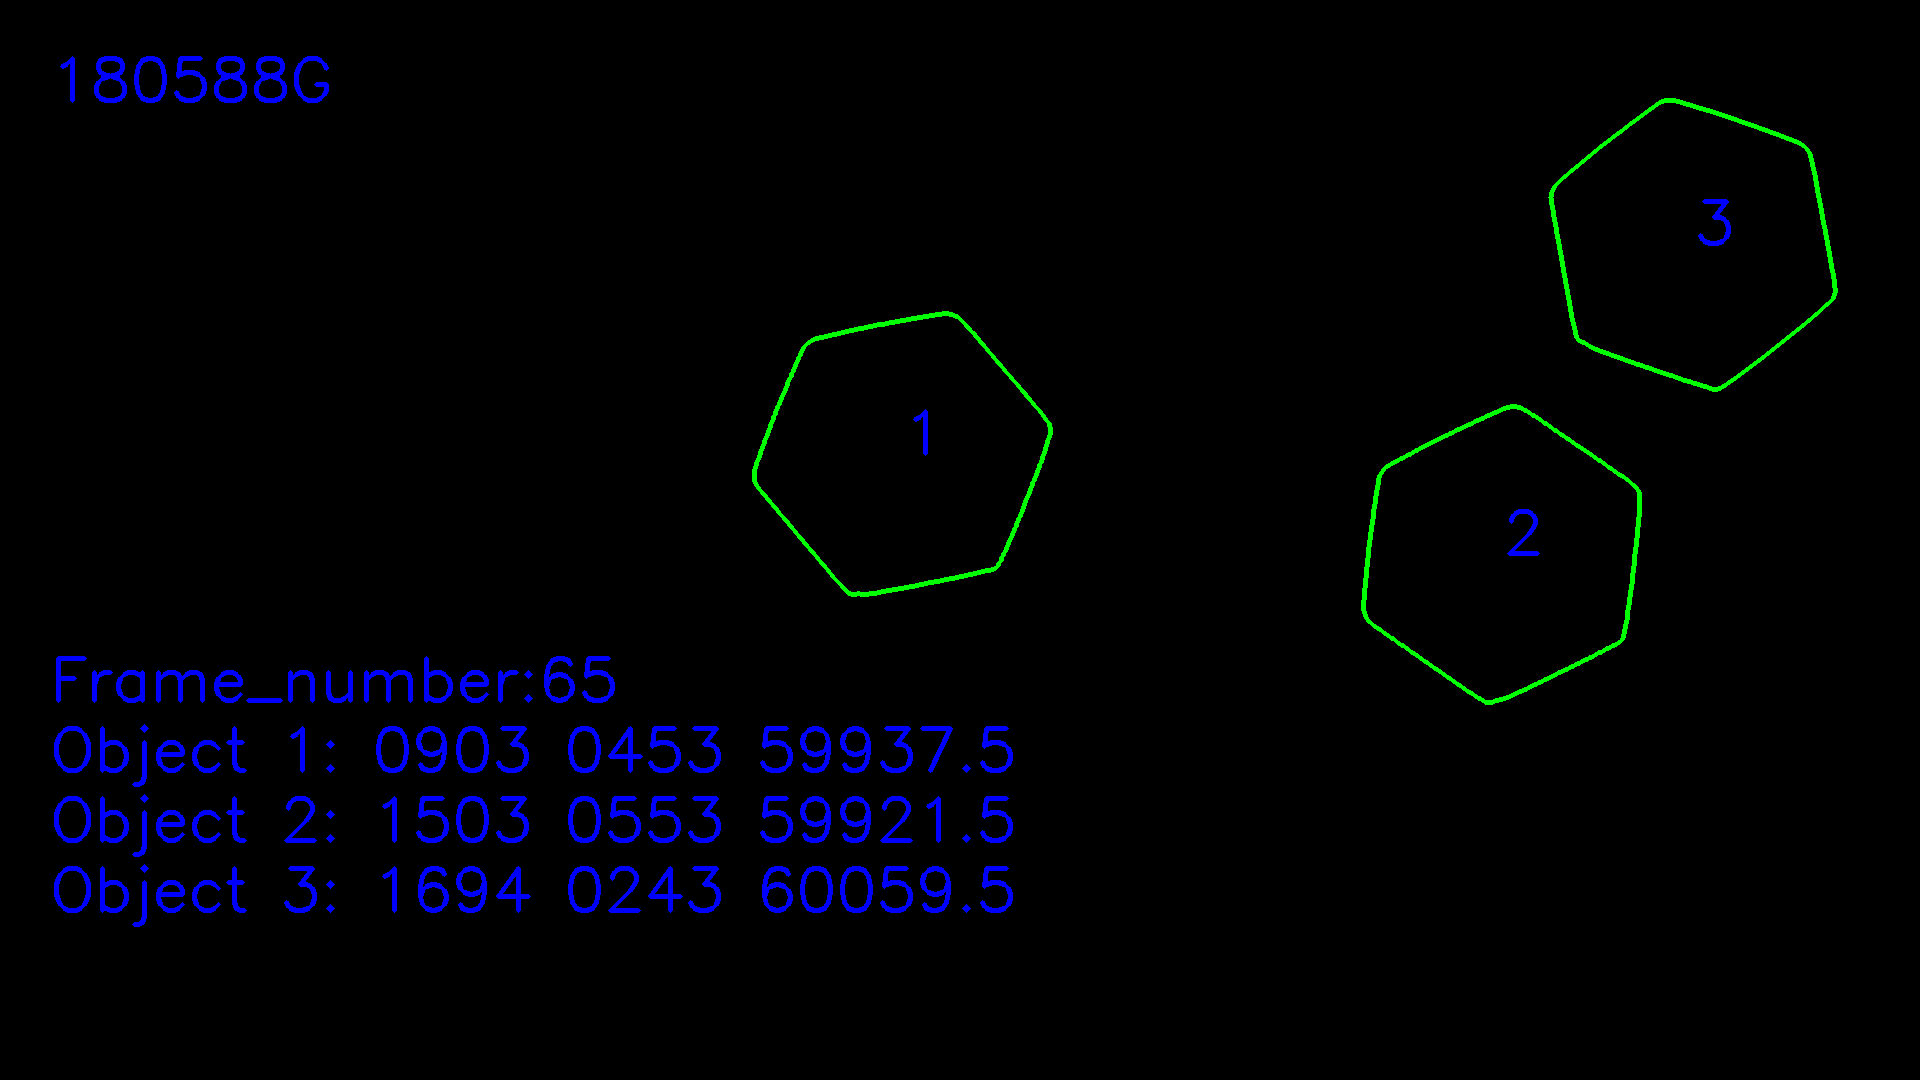

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.93000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.49300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.68400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([9.03000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.50300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.69400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


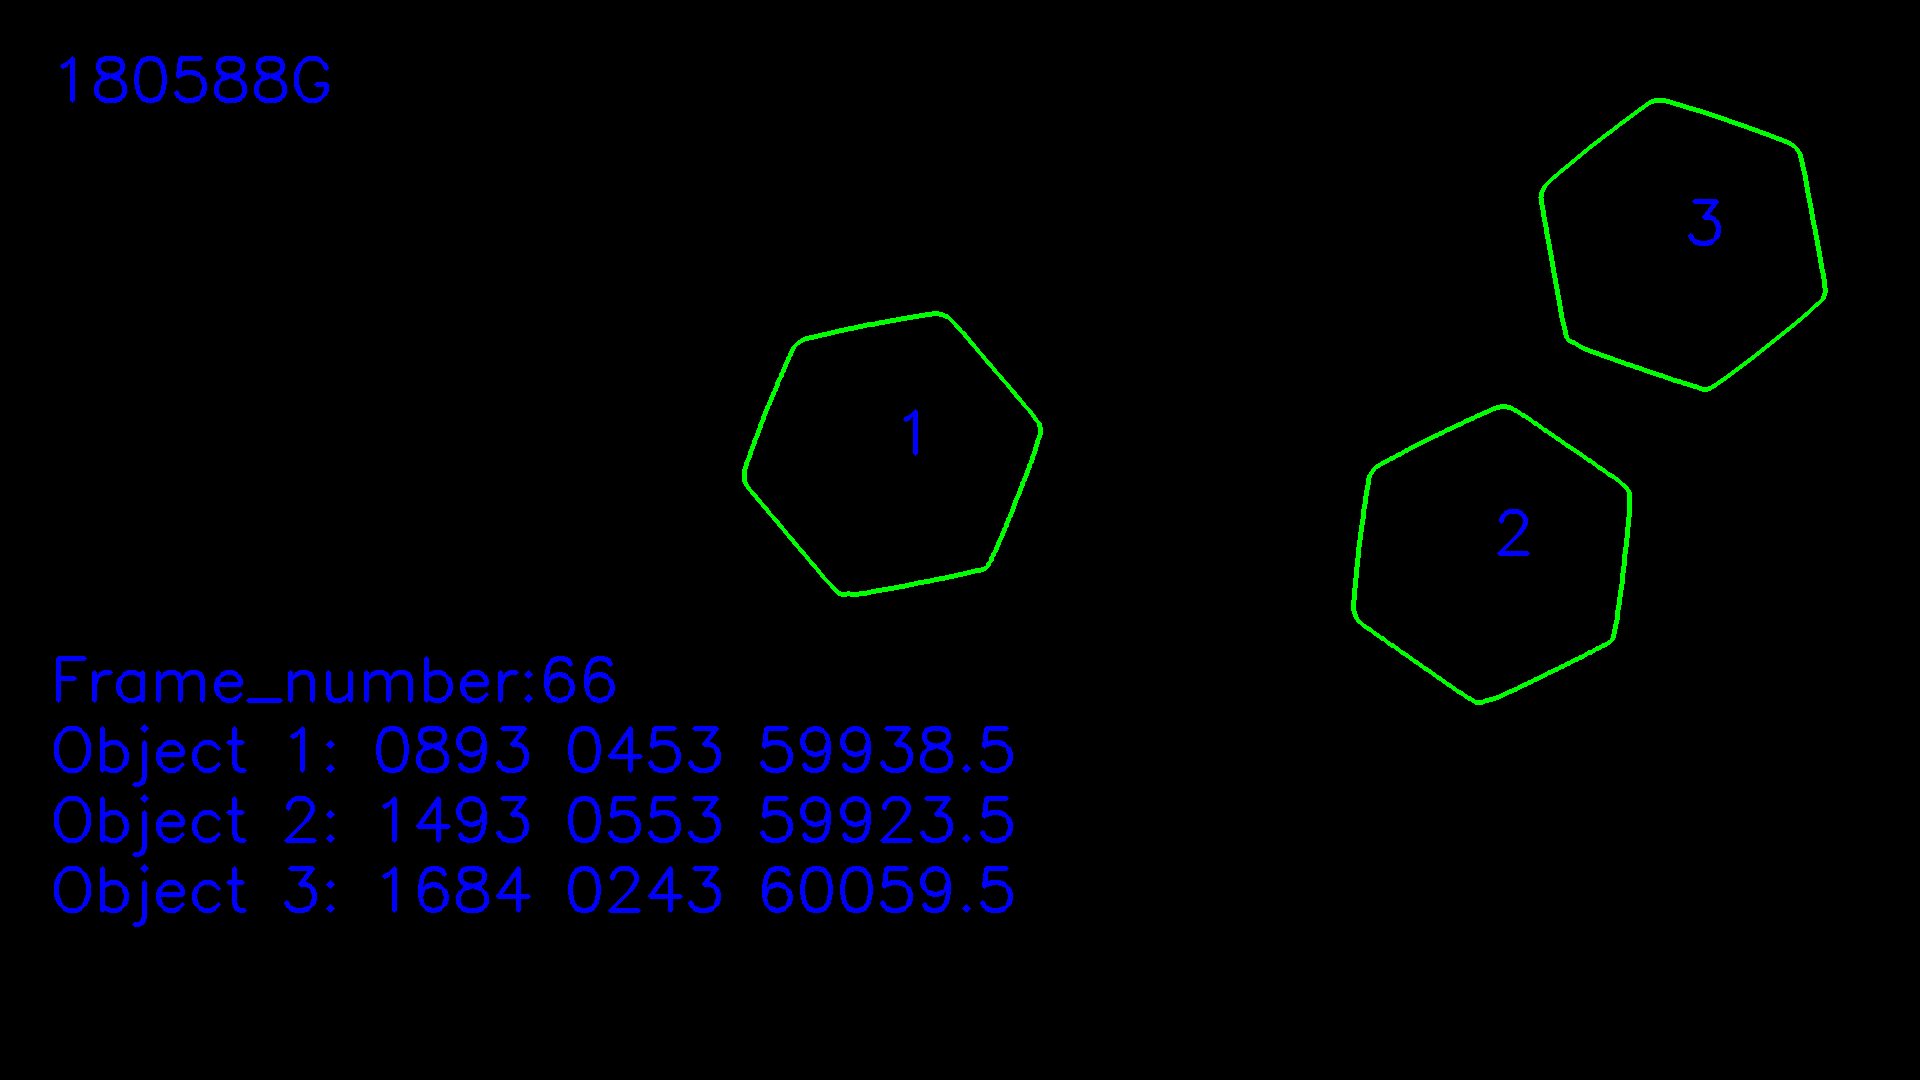

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.48300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.67400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([8.93000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.49300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.68400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


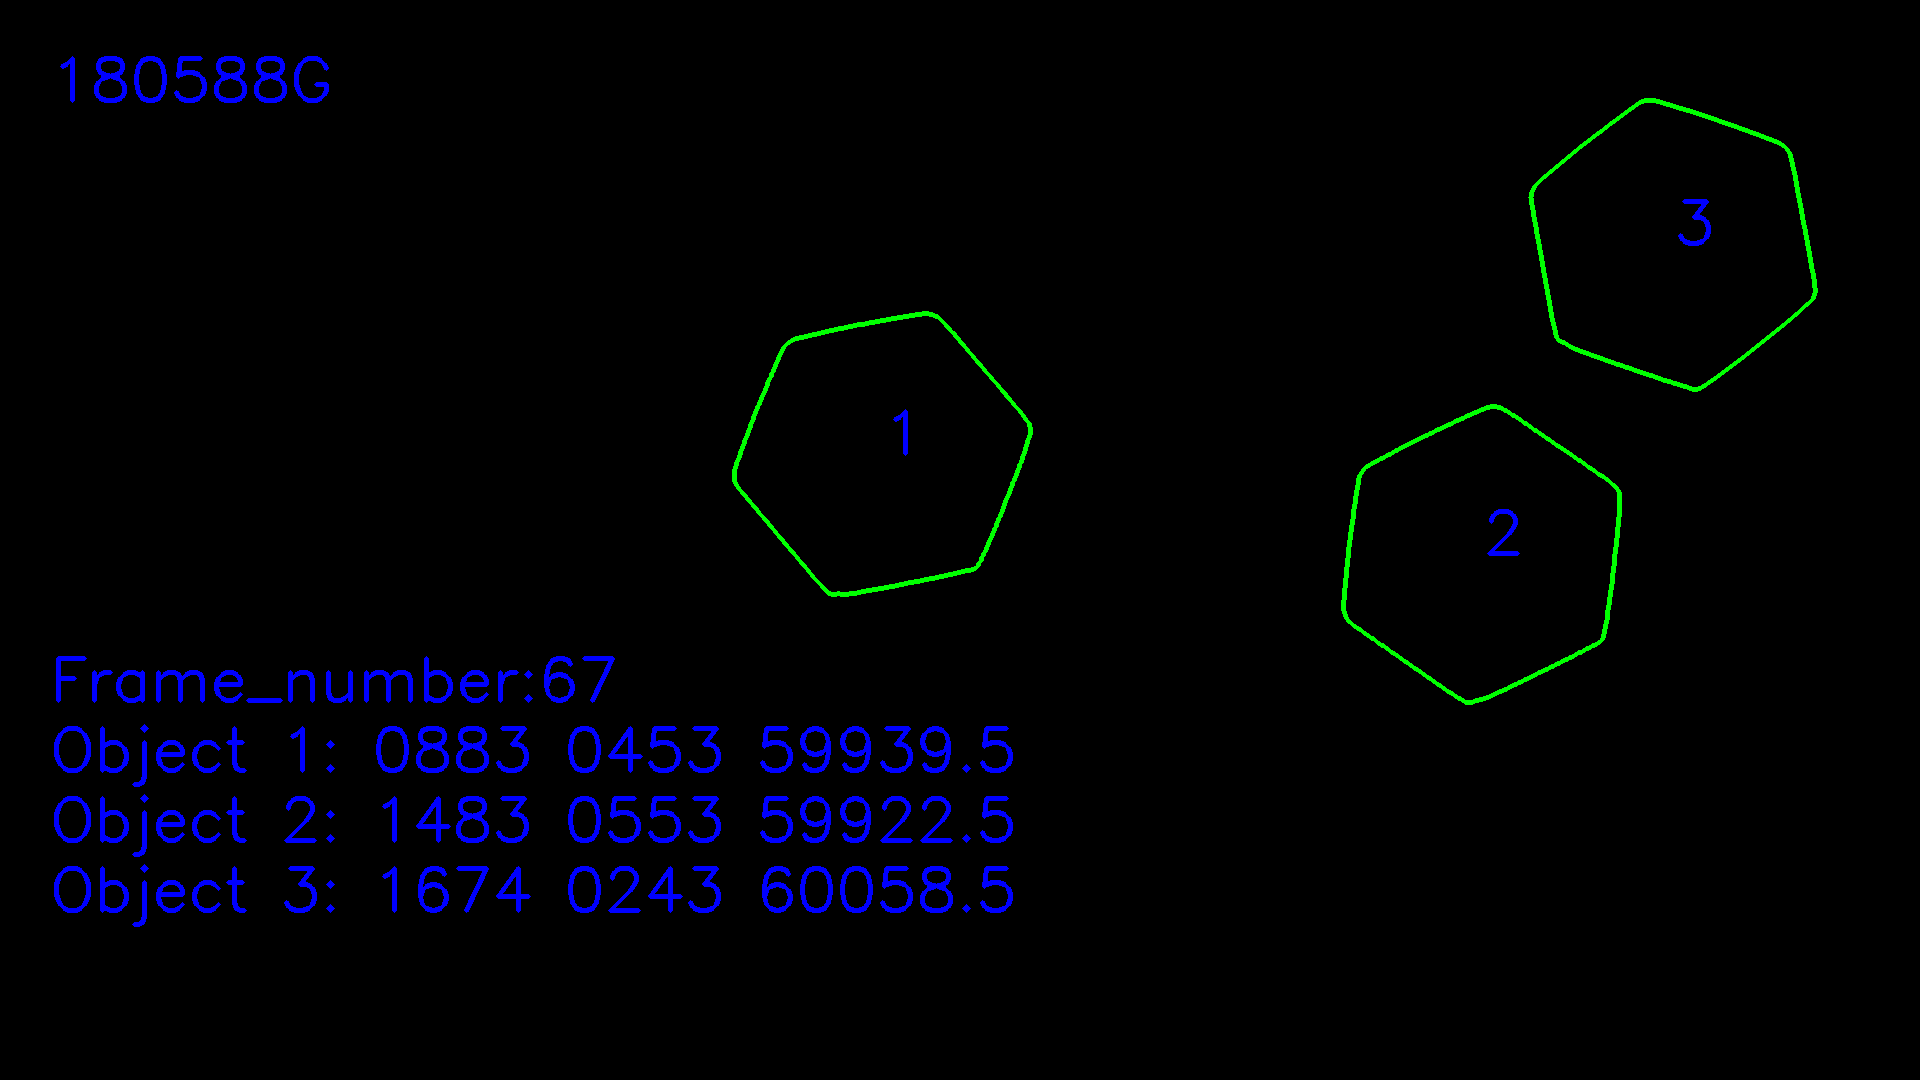

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.73000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.47300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.66400e+03, 2.43000e+02, 6.00575e+04, 3.00000e+00])]
Previousframe [array([8.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.48300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.67400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


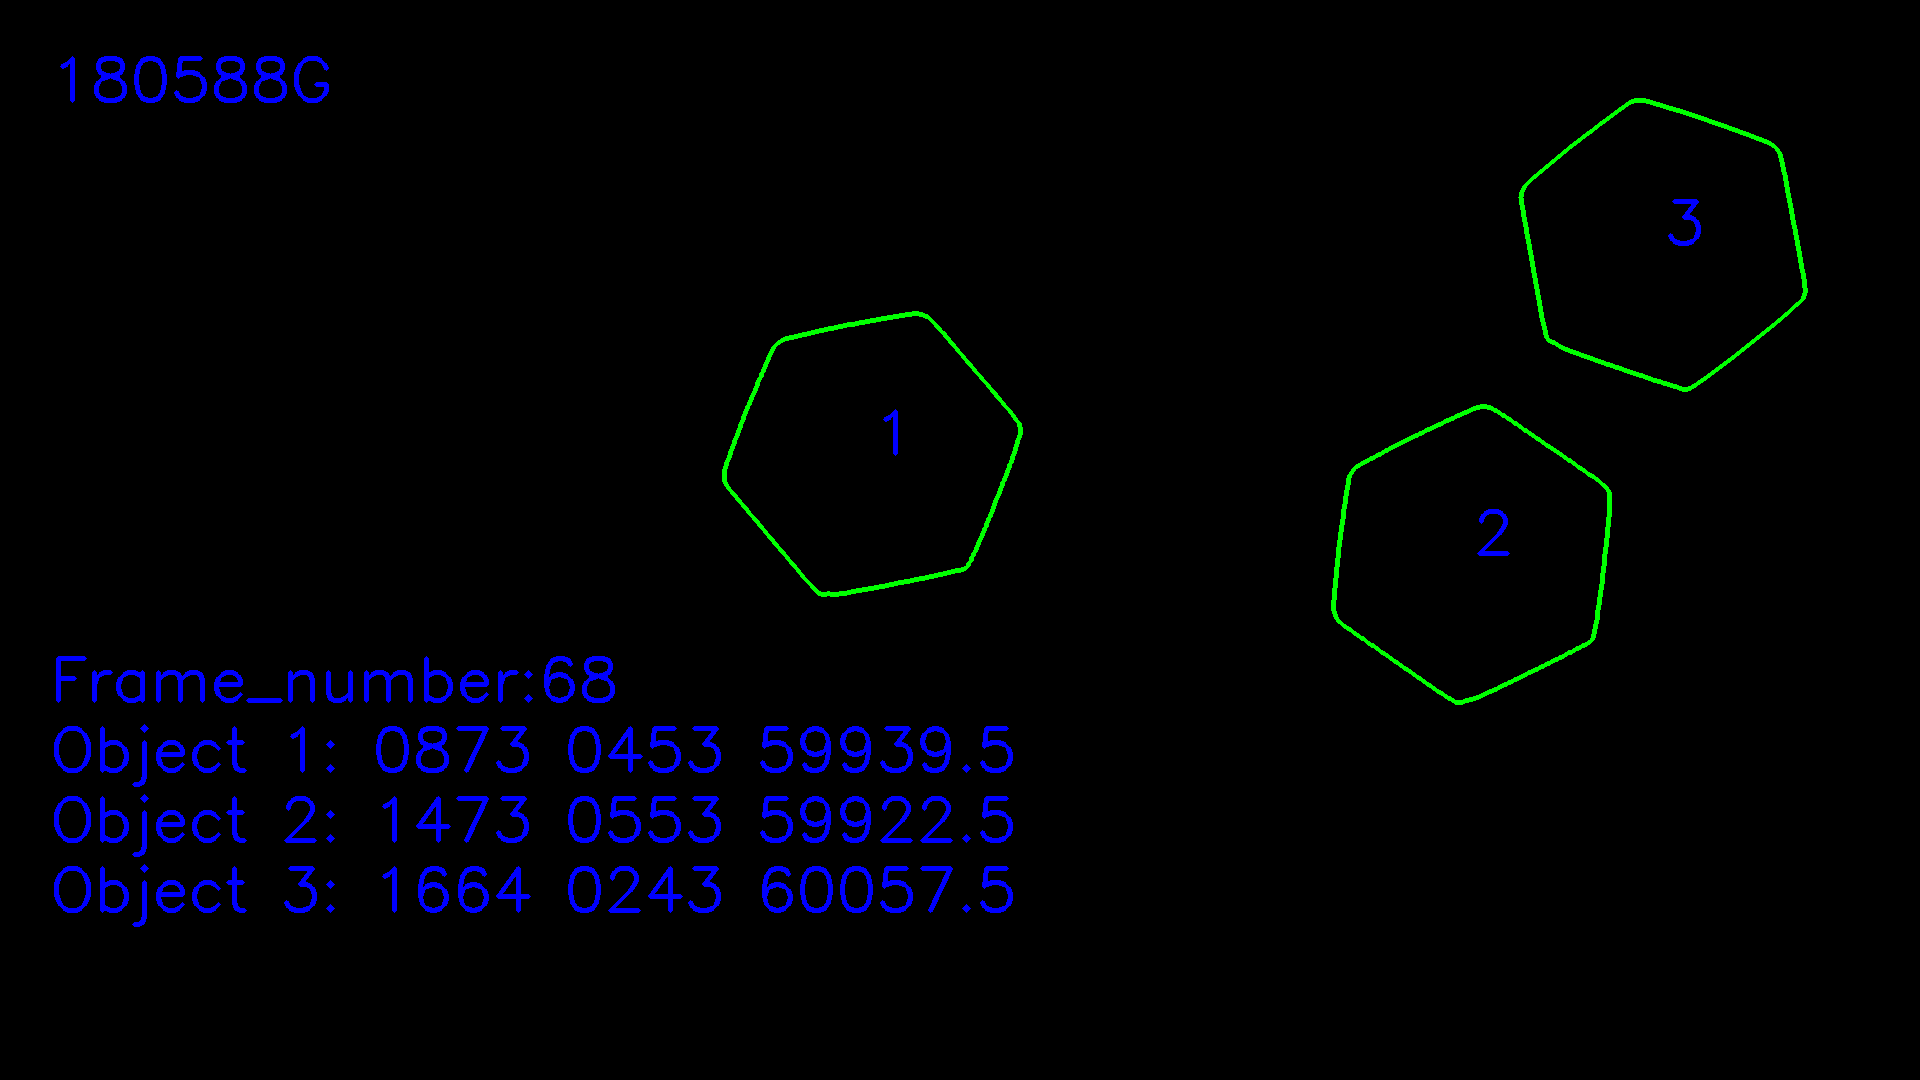

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.63000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.46300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.65400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([8.73000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.47300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.66400e+03, 2.43000e+02, 6.00575e+04, 3.00000e+00])]


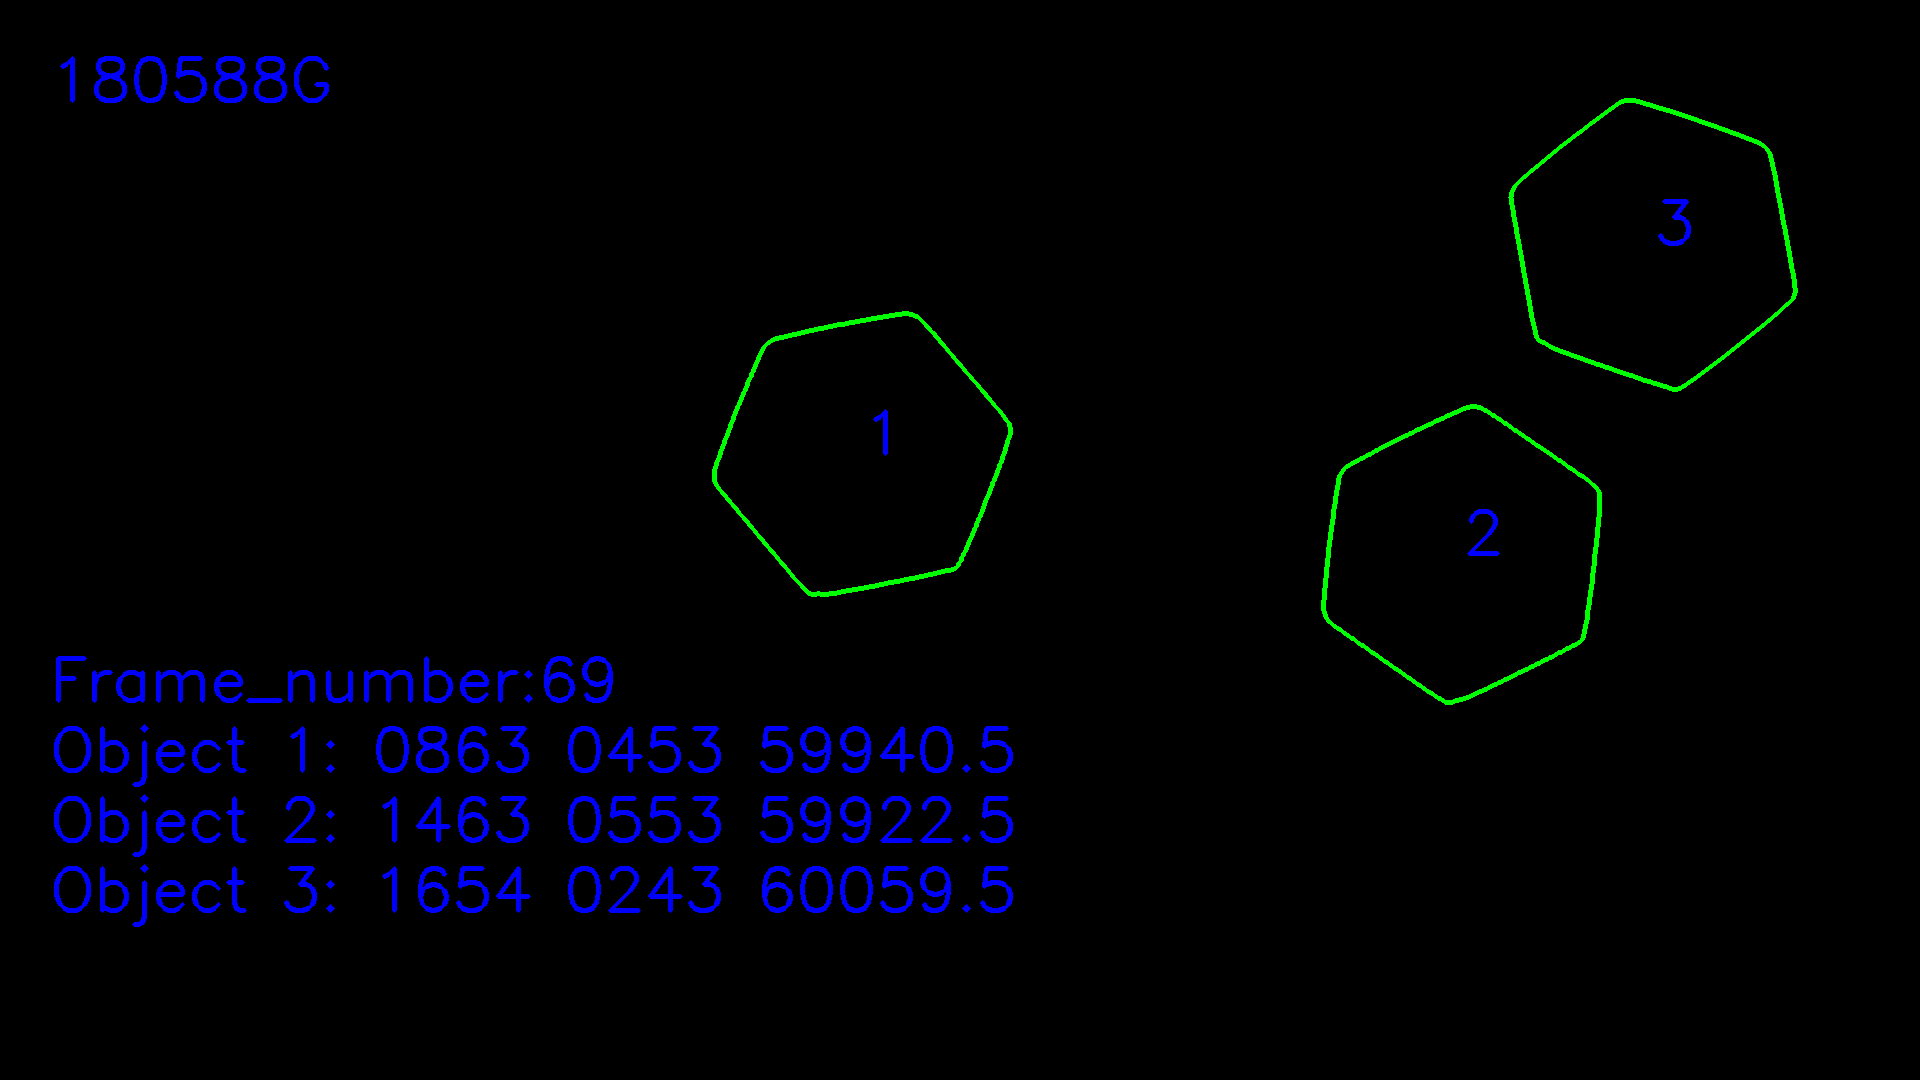

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.45300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.64400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([8.63000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.46300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.65400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


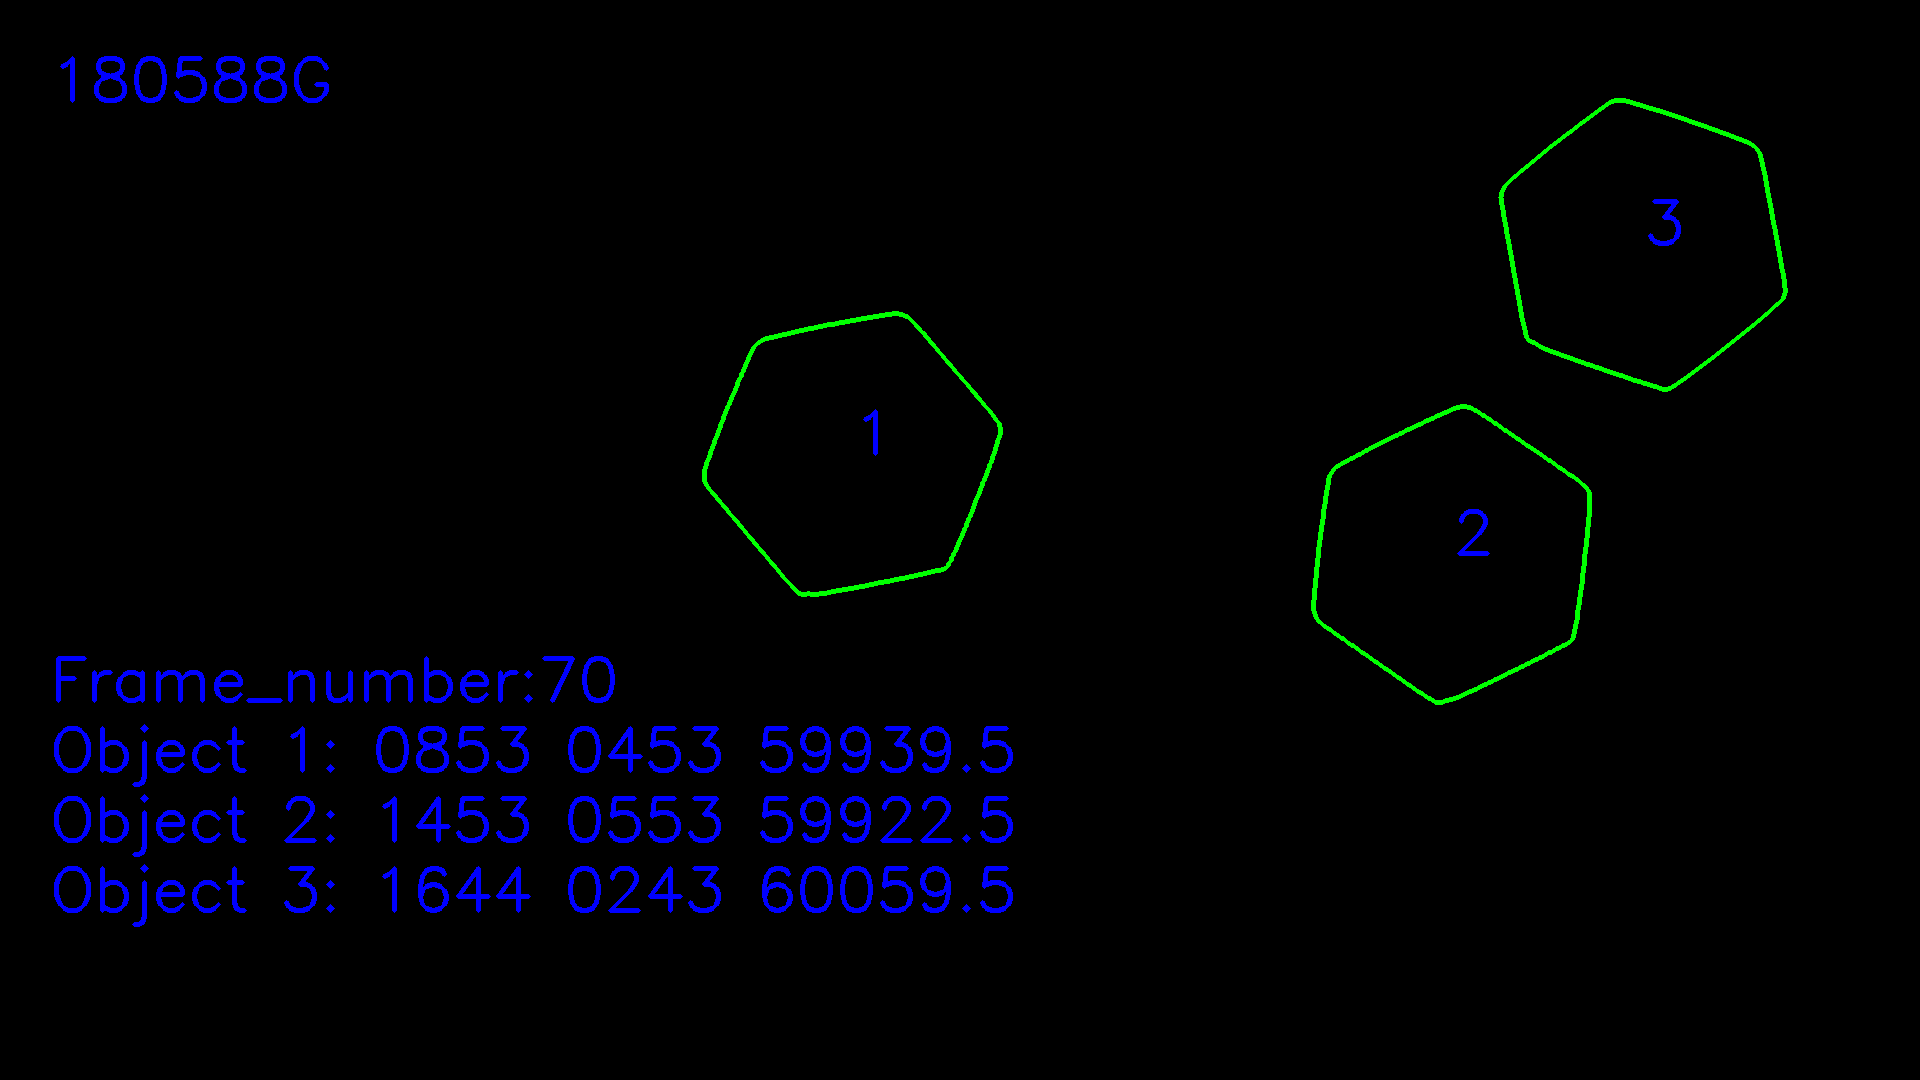

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.43000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.44300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.63400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([8.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.45300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.64400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


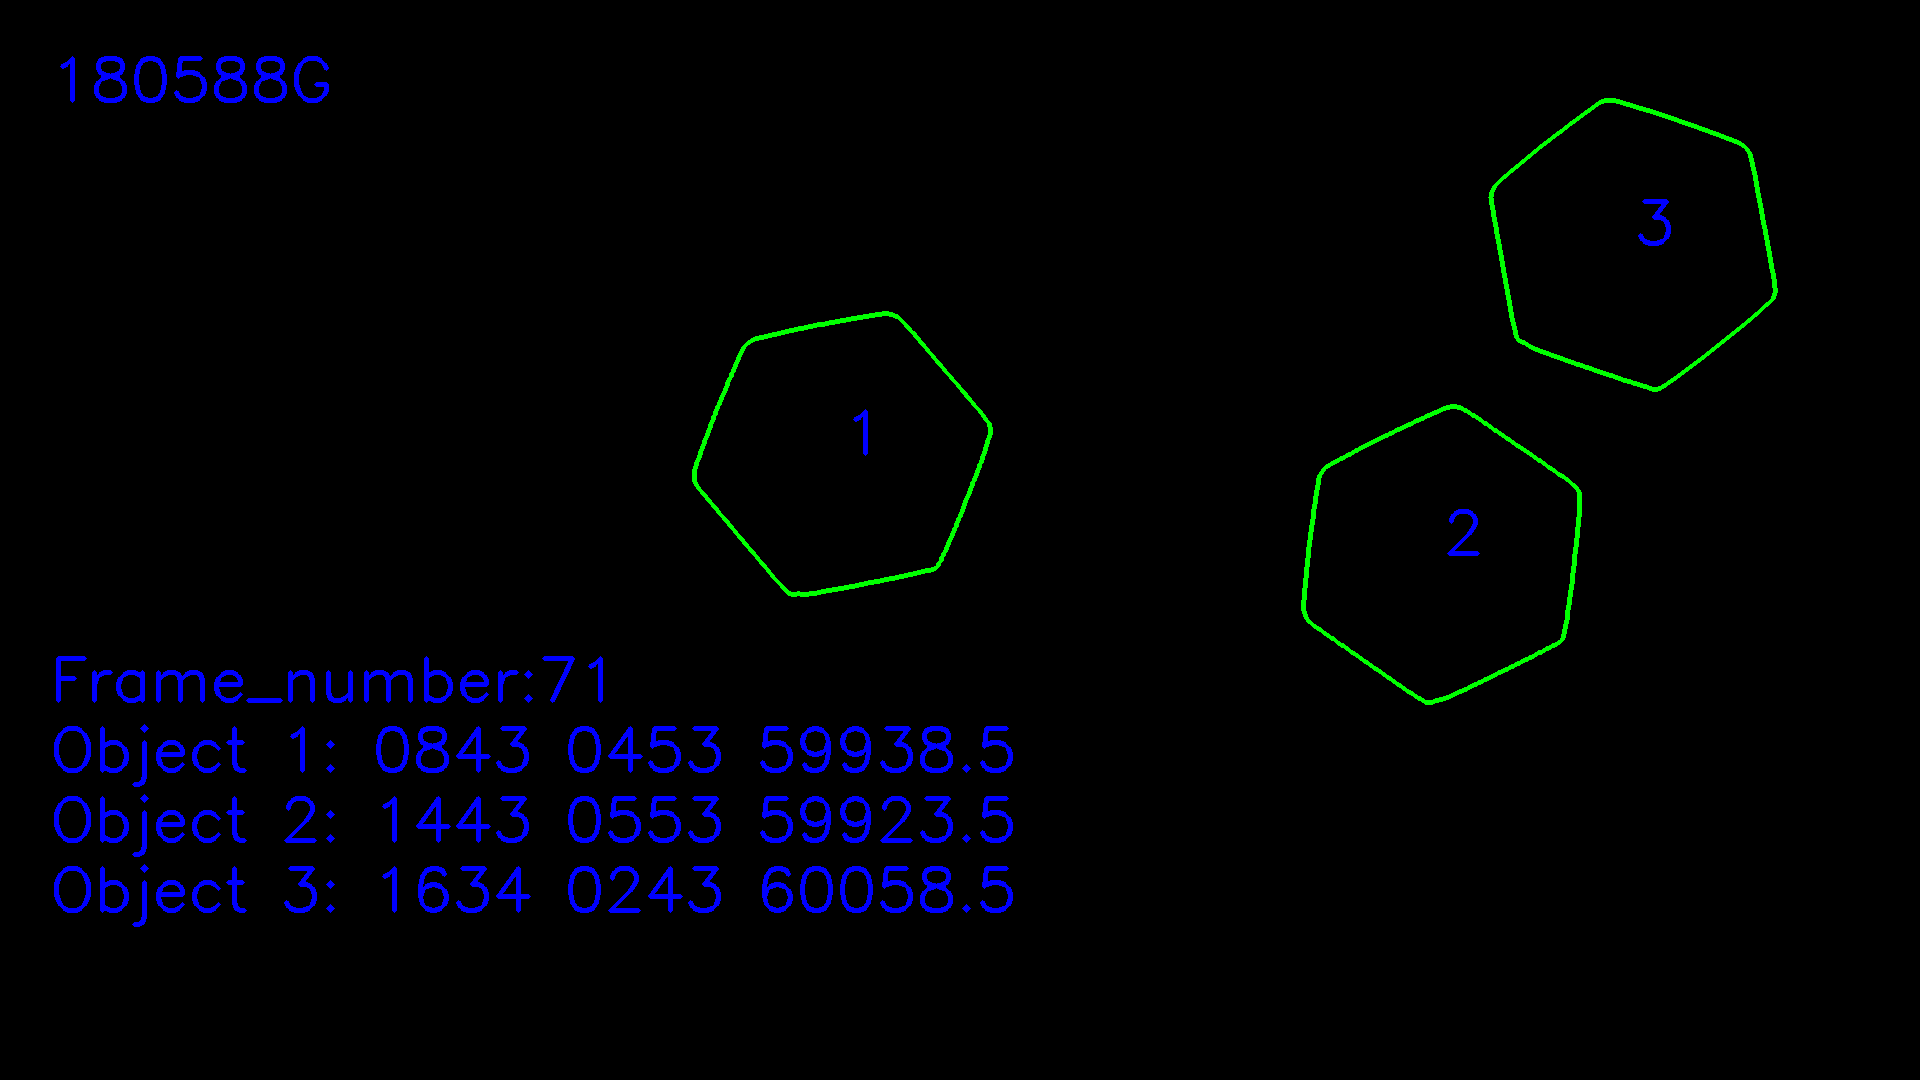

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.33000e+02, 4.53000e+02, 5.99365e+04, 1.00000e+00]), array([1.43300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.62400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([8.43000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.44300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.63400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


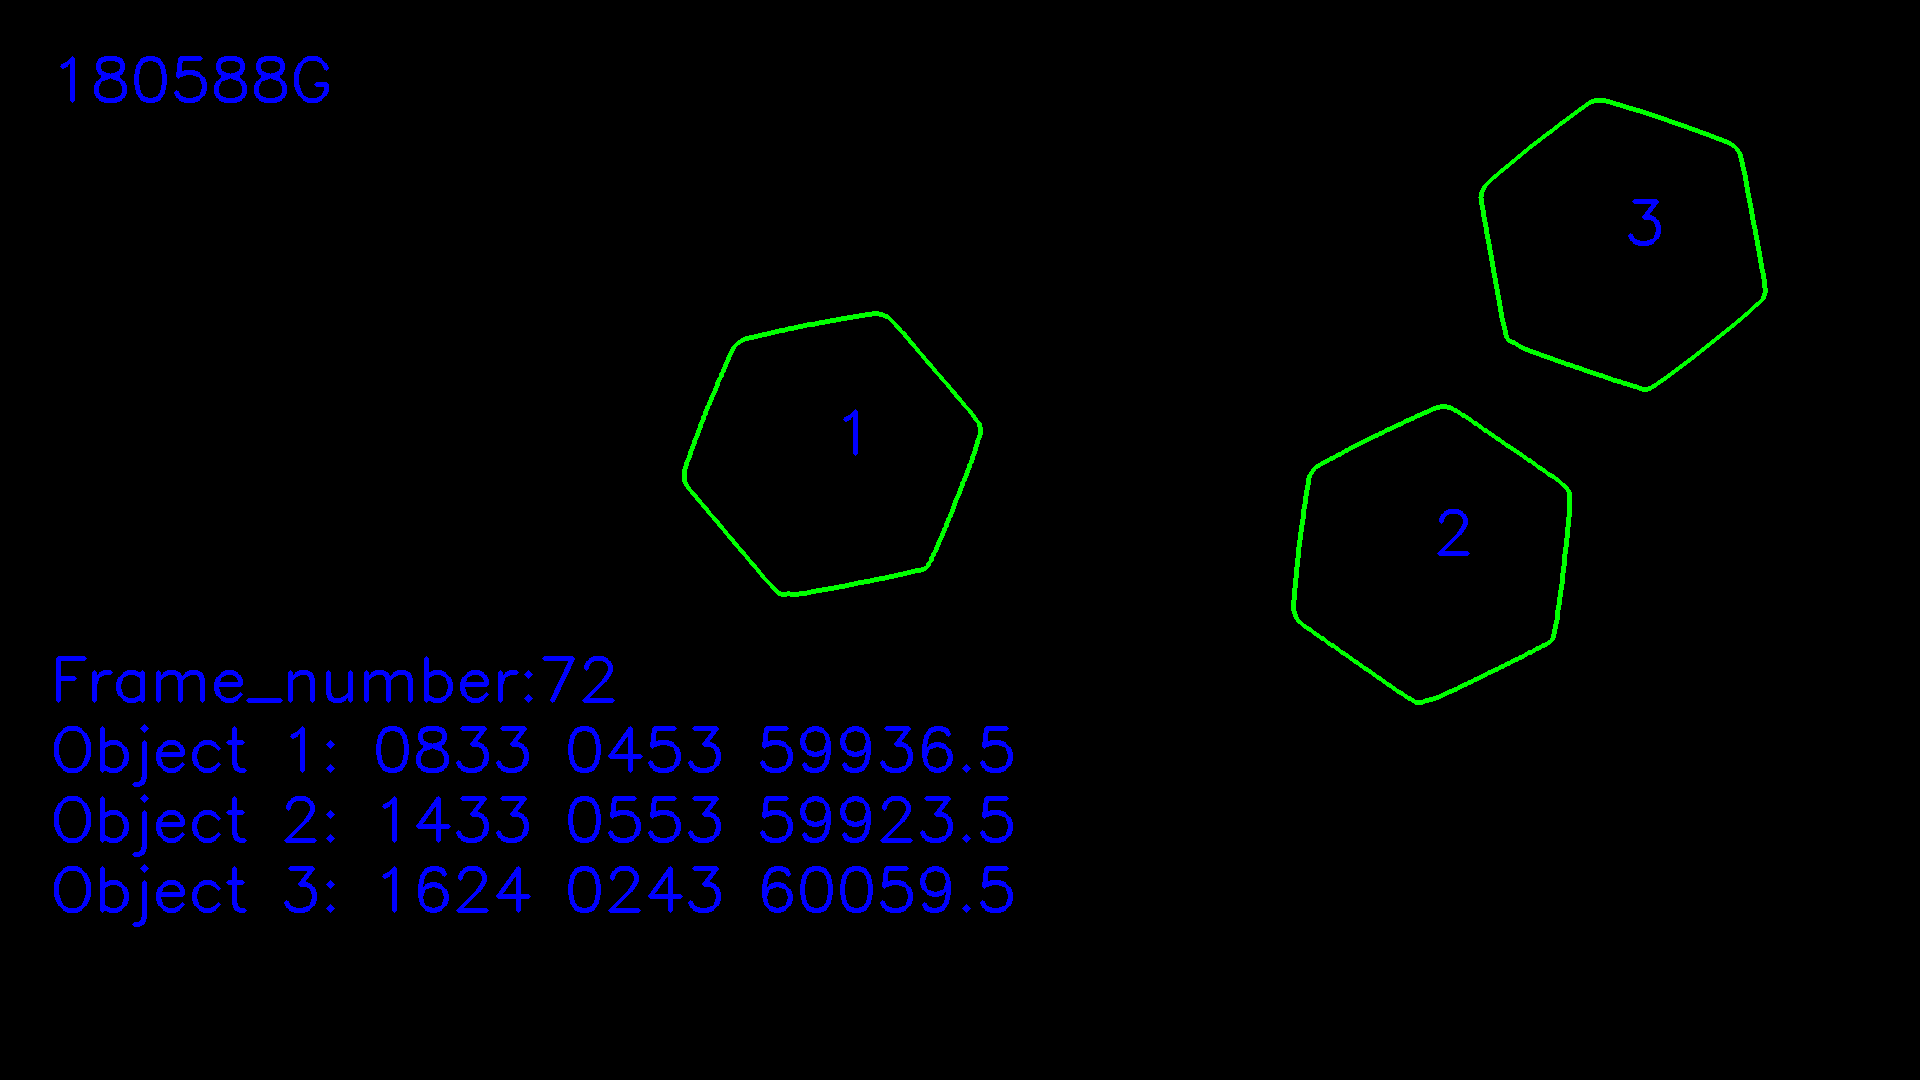

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.42300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.61400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([8.33000e+02, 4.53000e+02, 5.99365e+04, 1.00000e+00]), array([1.43300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.62400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


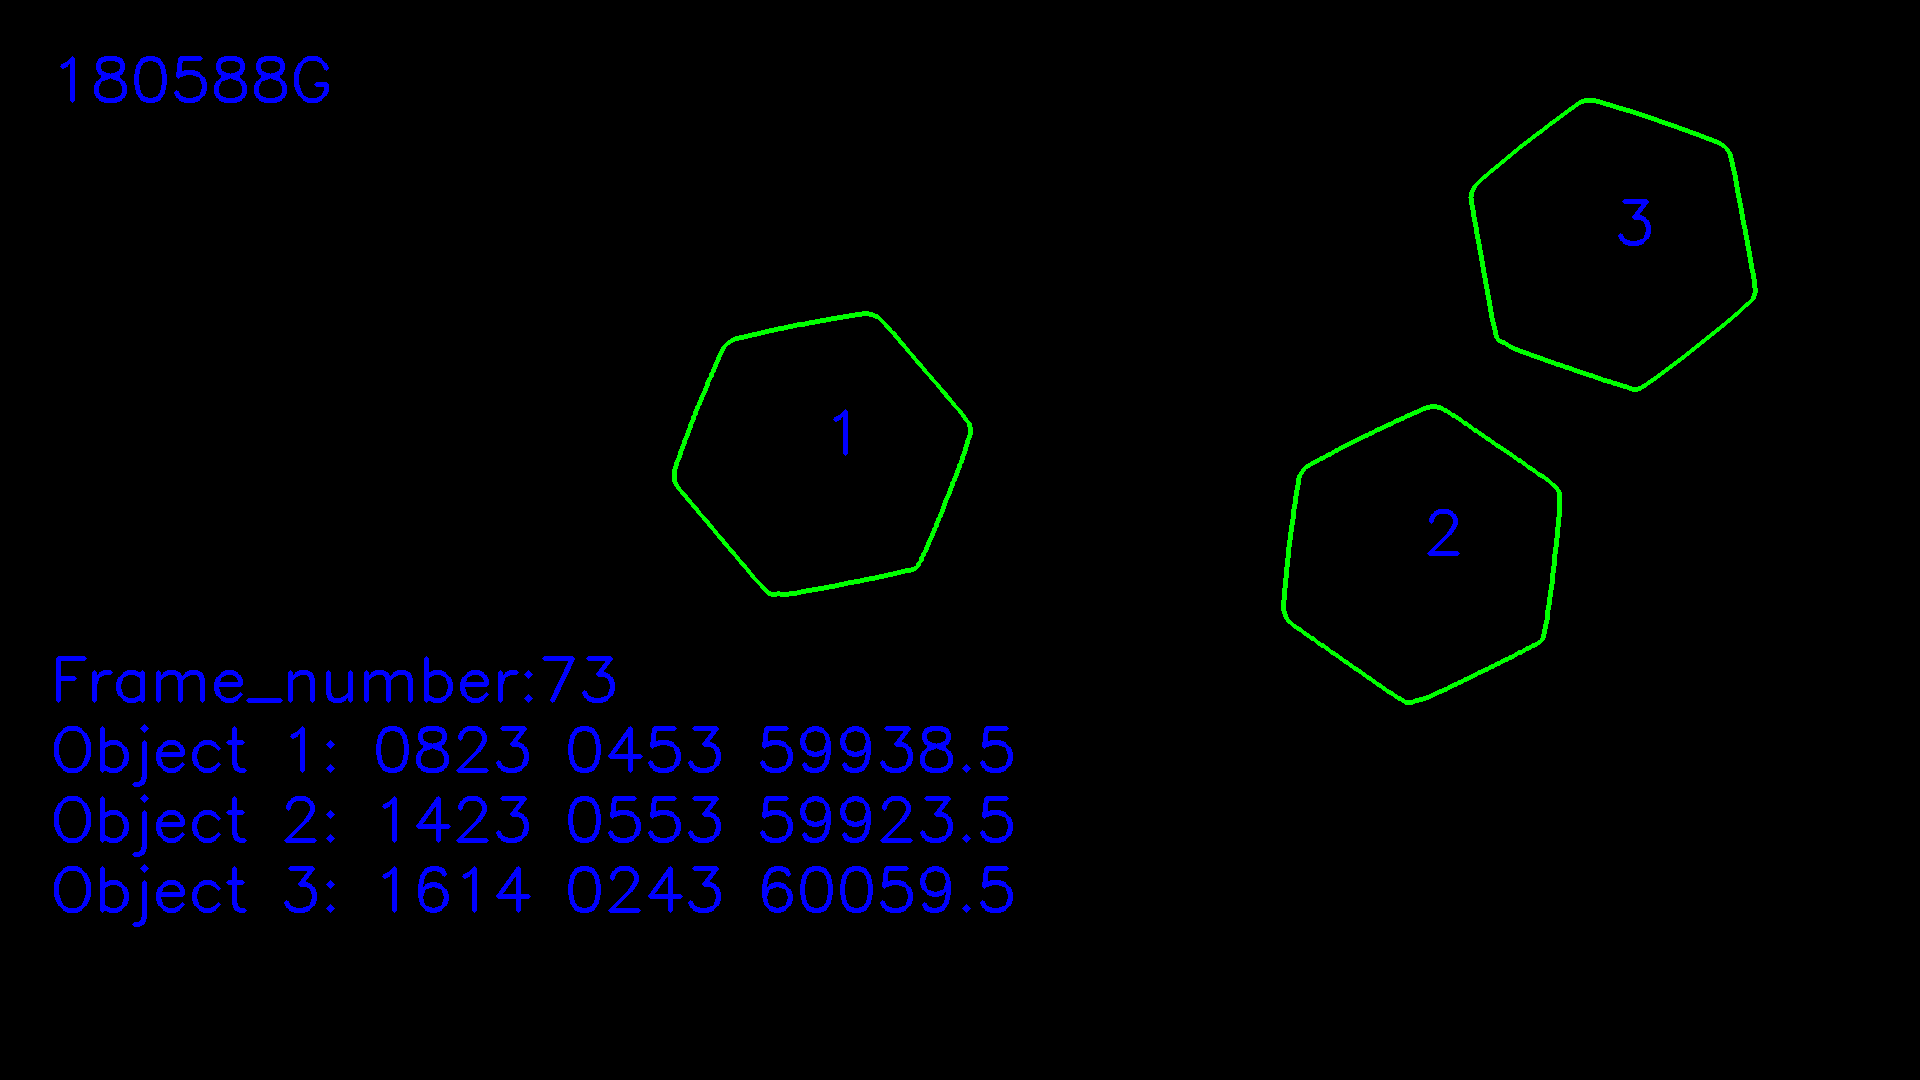

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.13000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.41300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.60400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([8.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.42300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.61400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


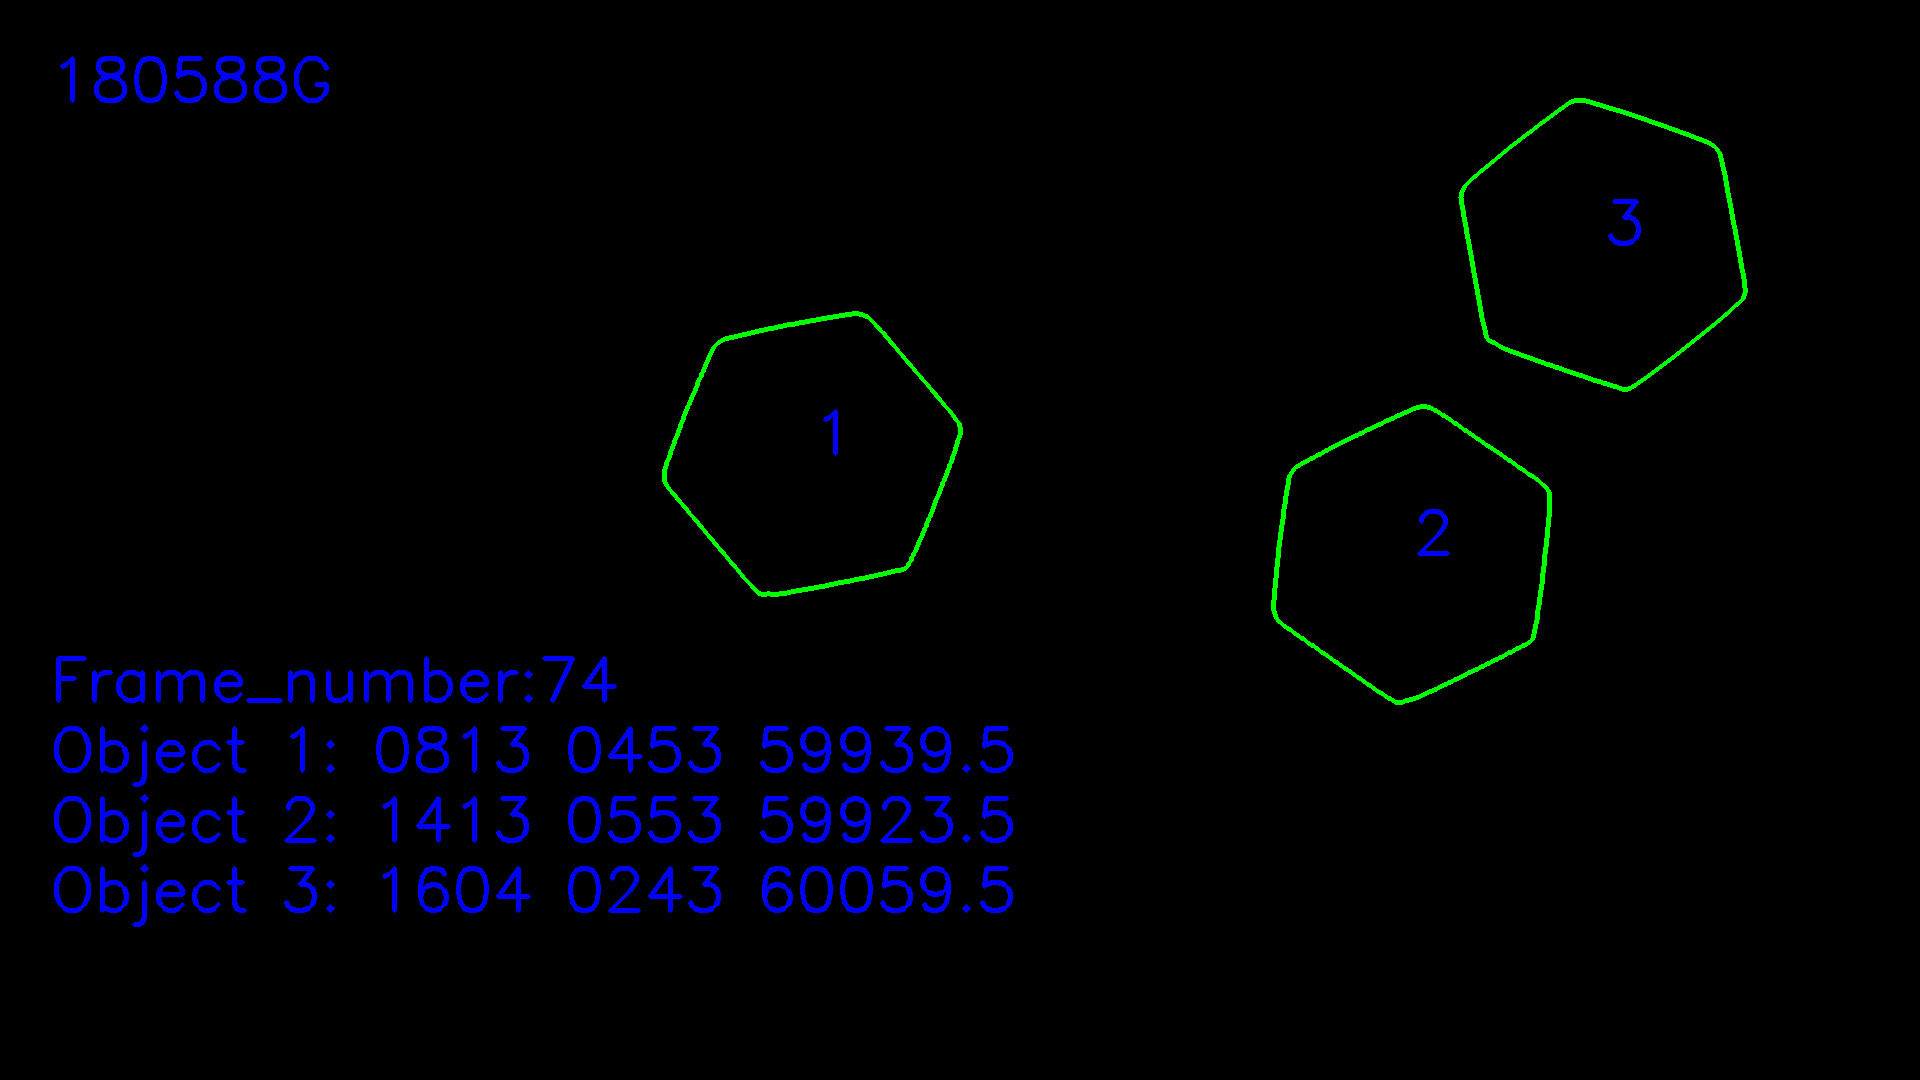

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([8.03000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.40300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.59400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([8.13000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.41300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.60400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


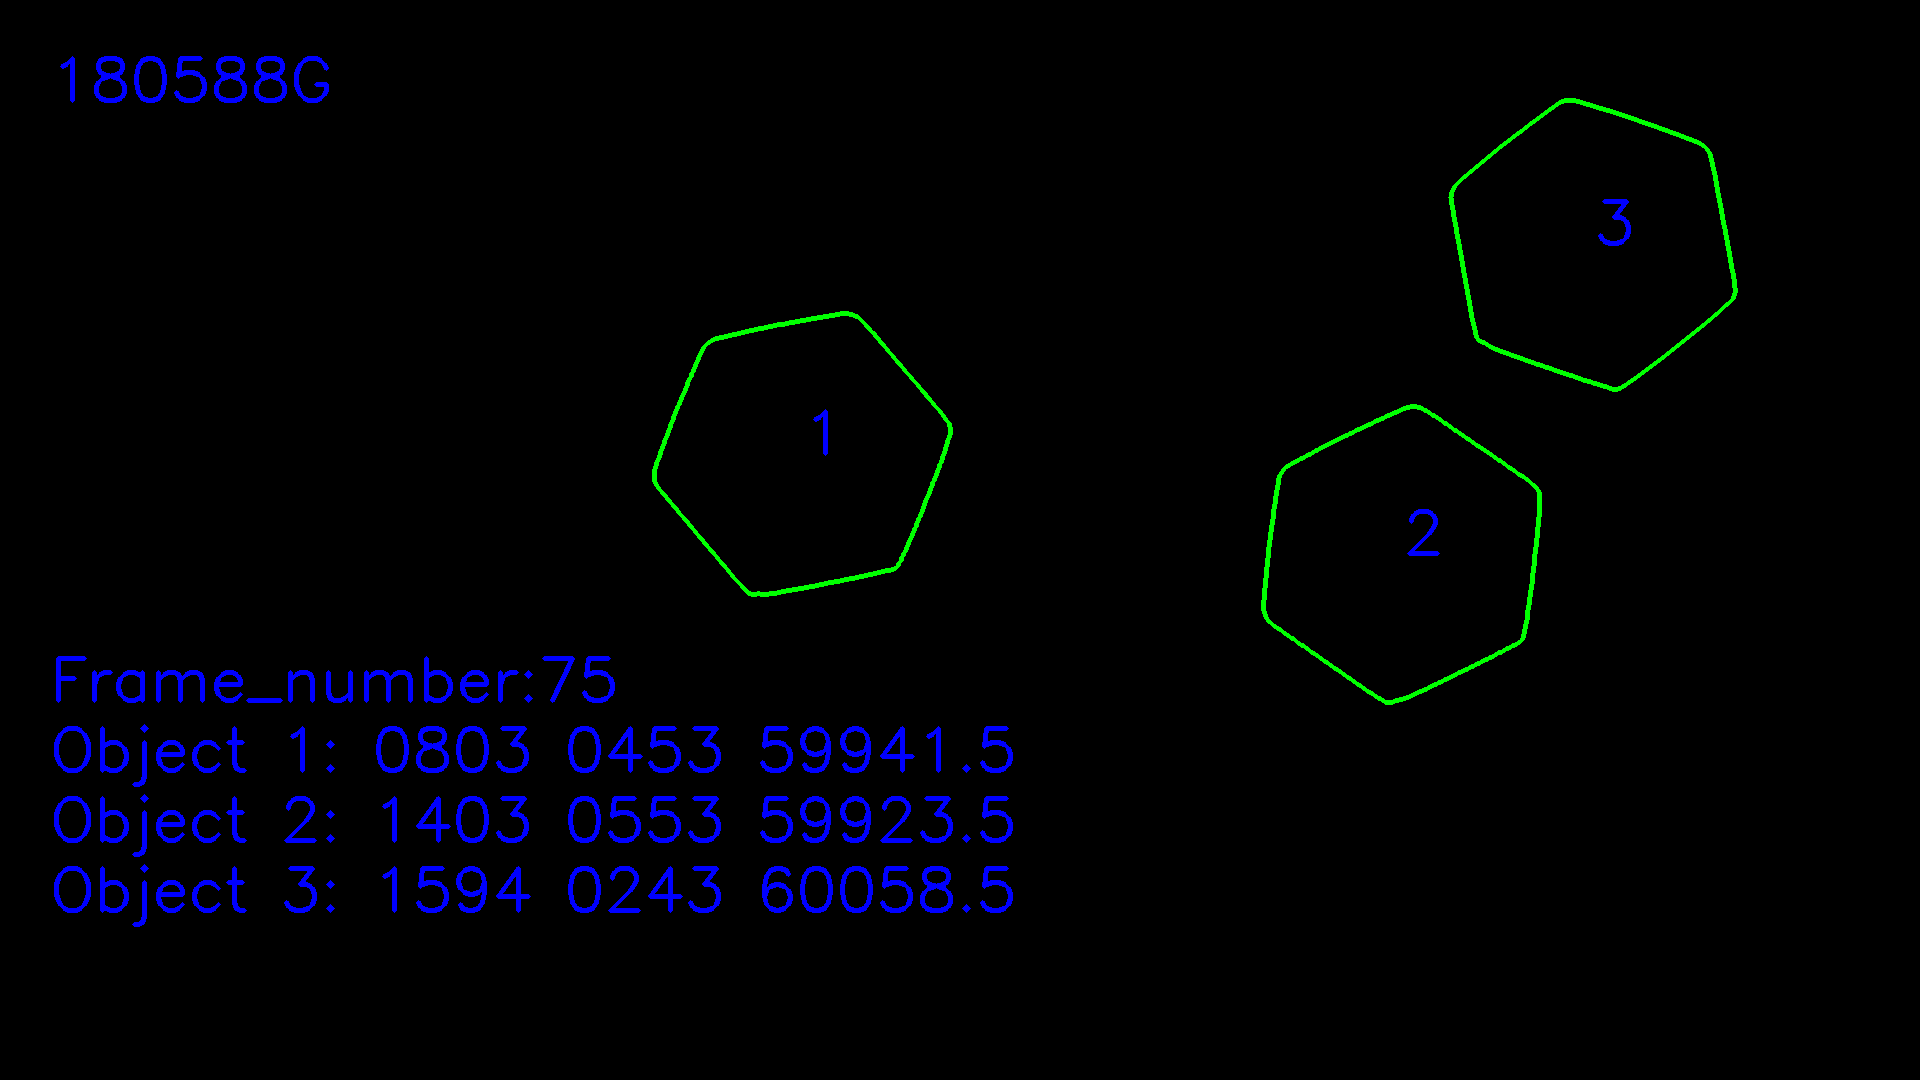

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.93000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.39300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.58400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([8.03000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.40300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.59400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


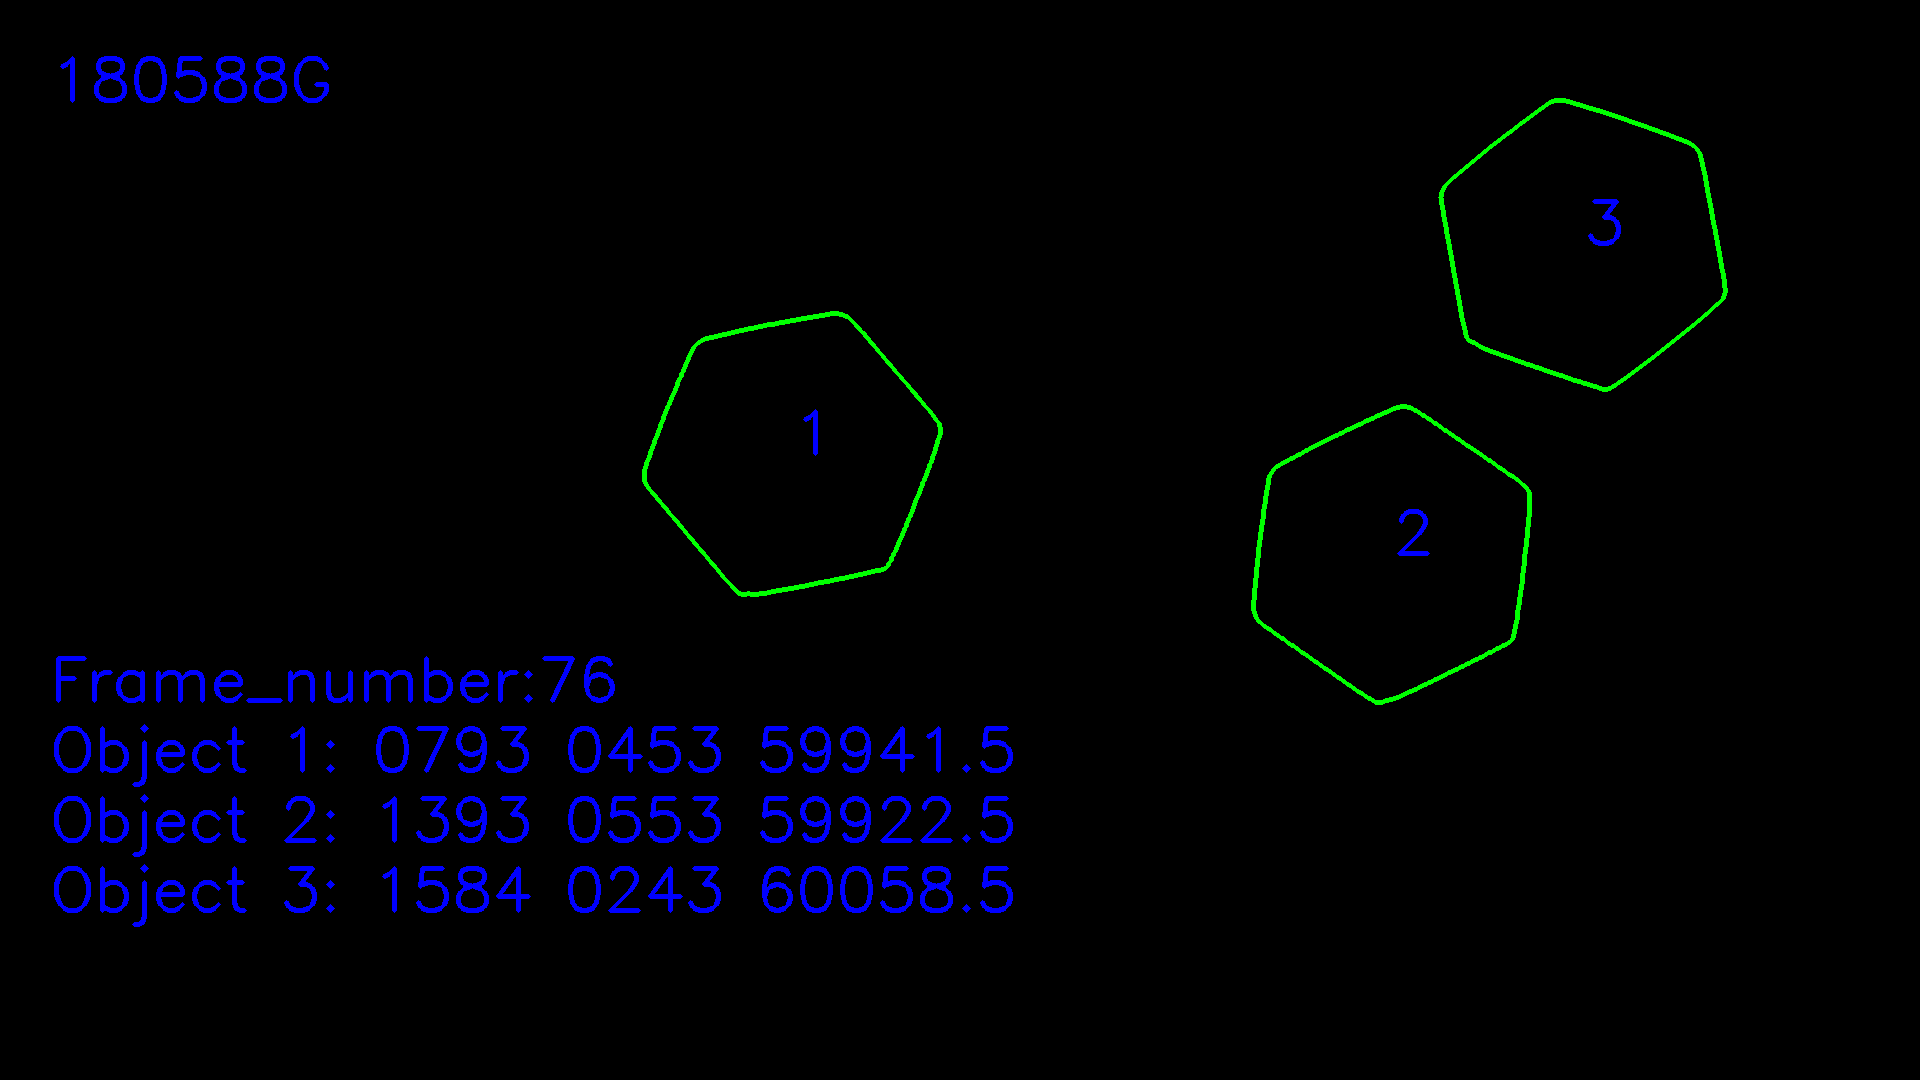

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.83000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.38300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.57400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([7.93000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.39300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.58400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


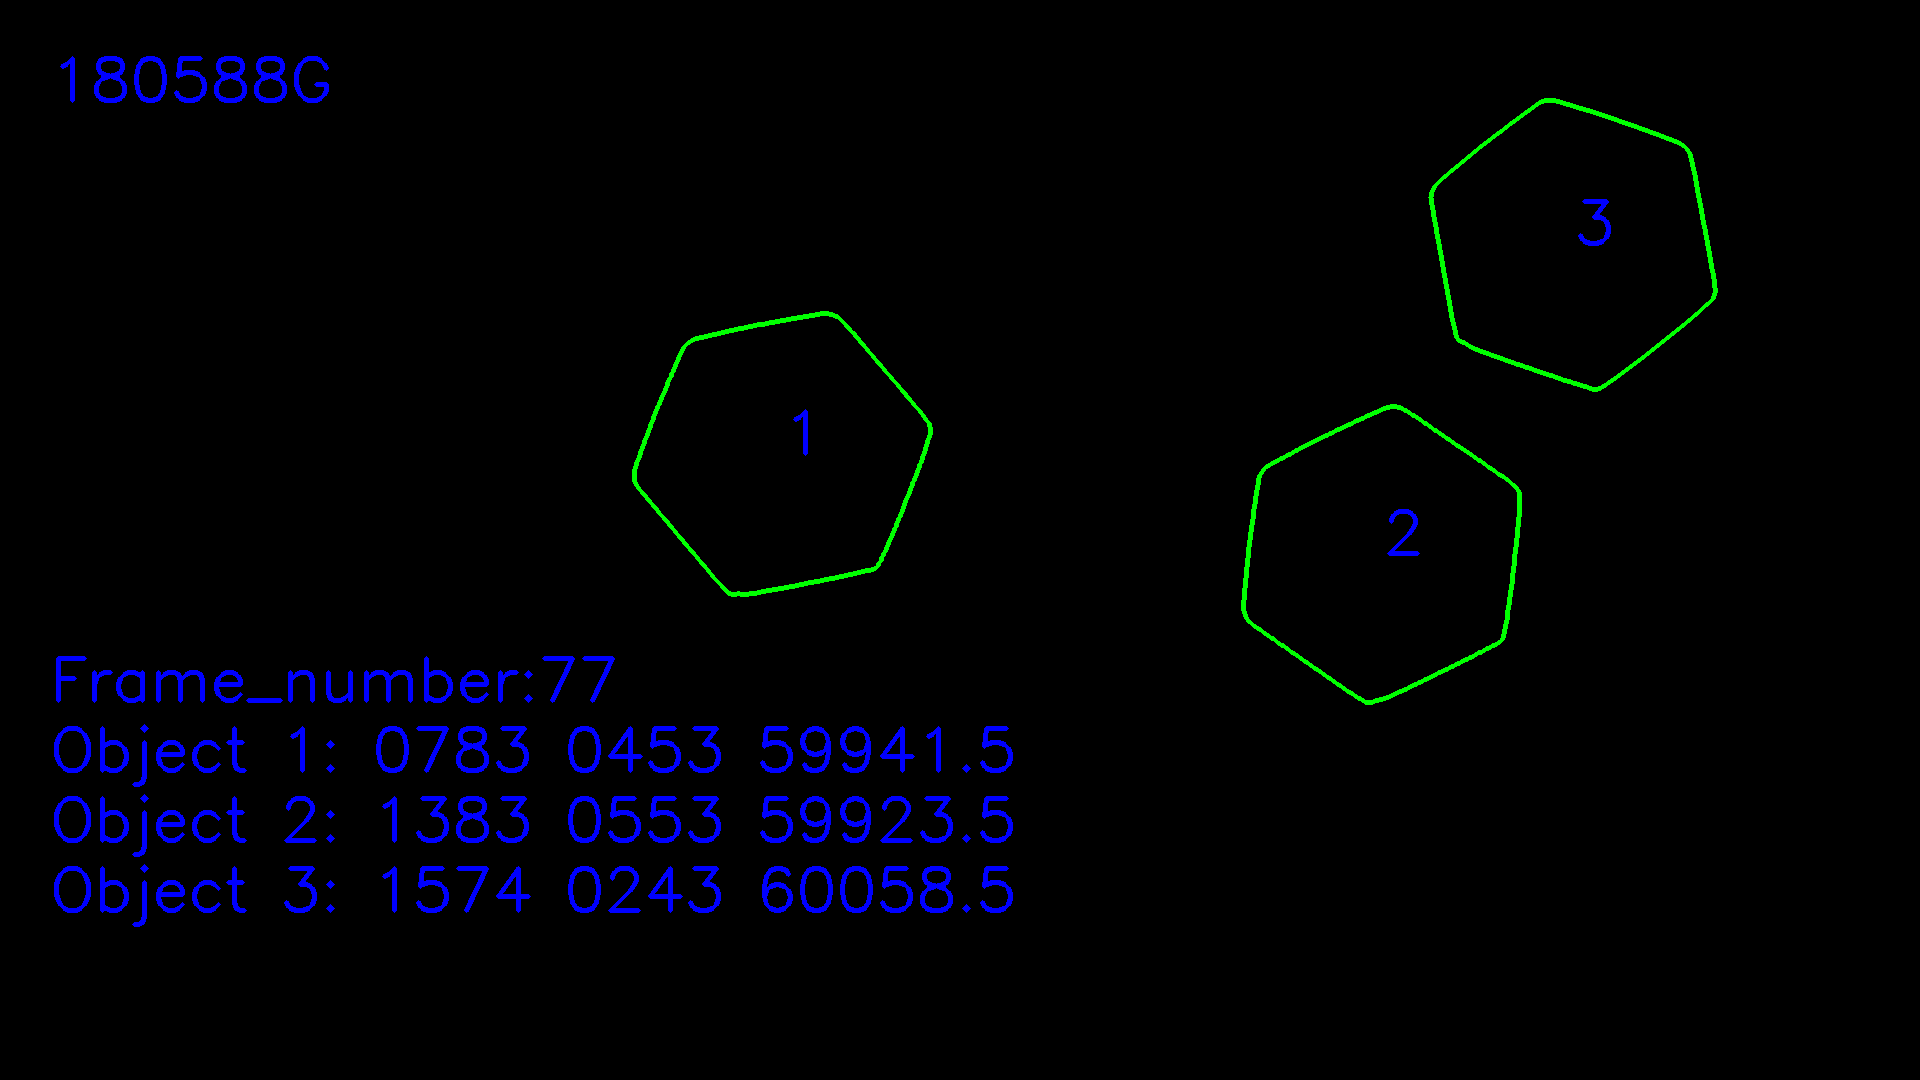

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.73000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.37300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.56400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([7.83000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.38300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.57400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


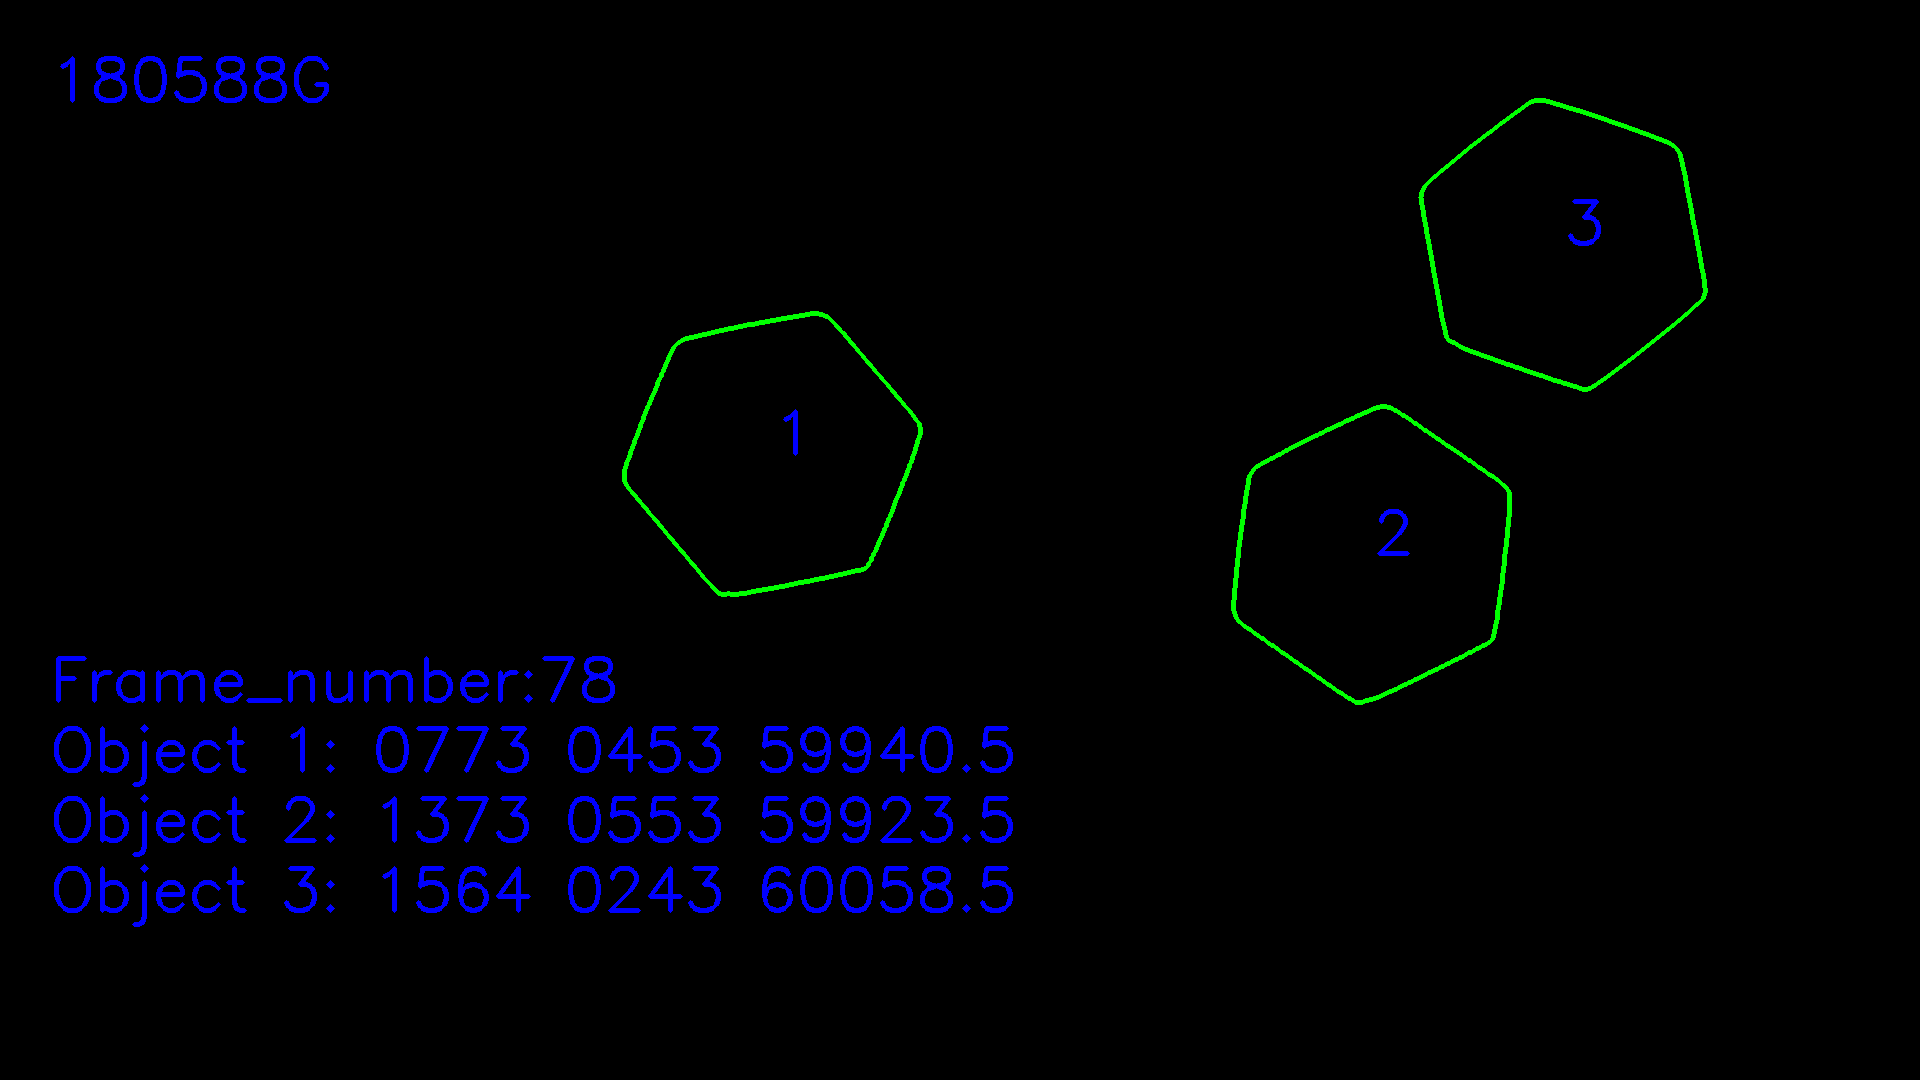

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.63000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.36300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.55400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([7.73000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.37300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.56400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


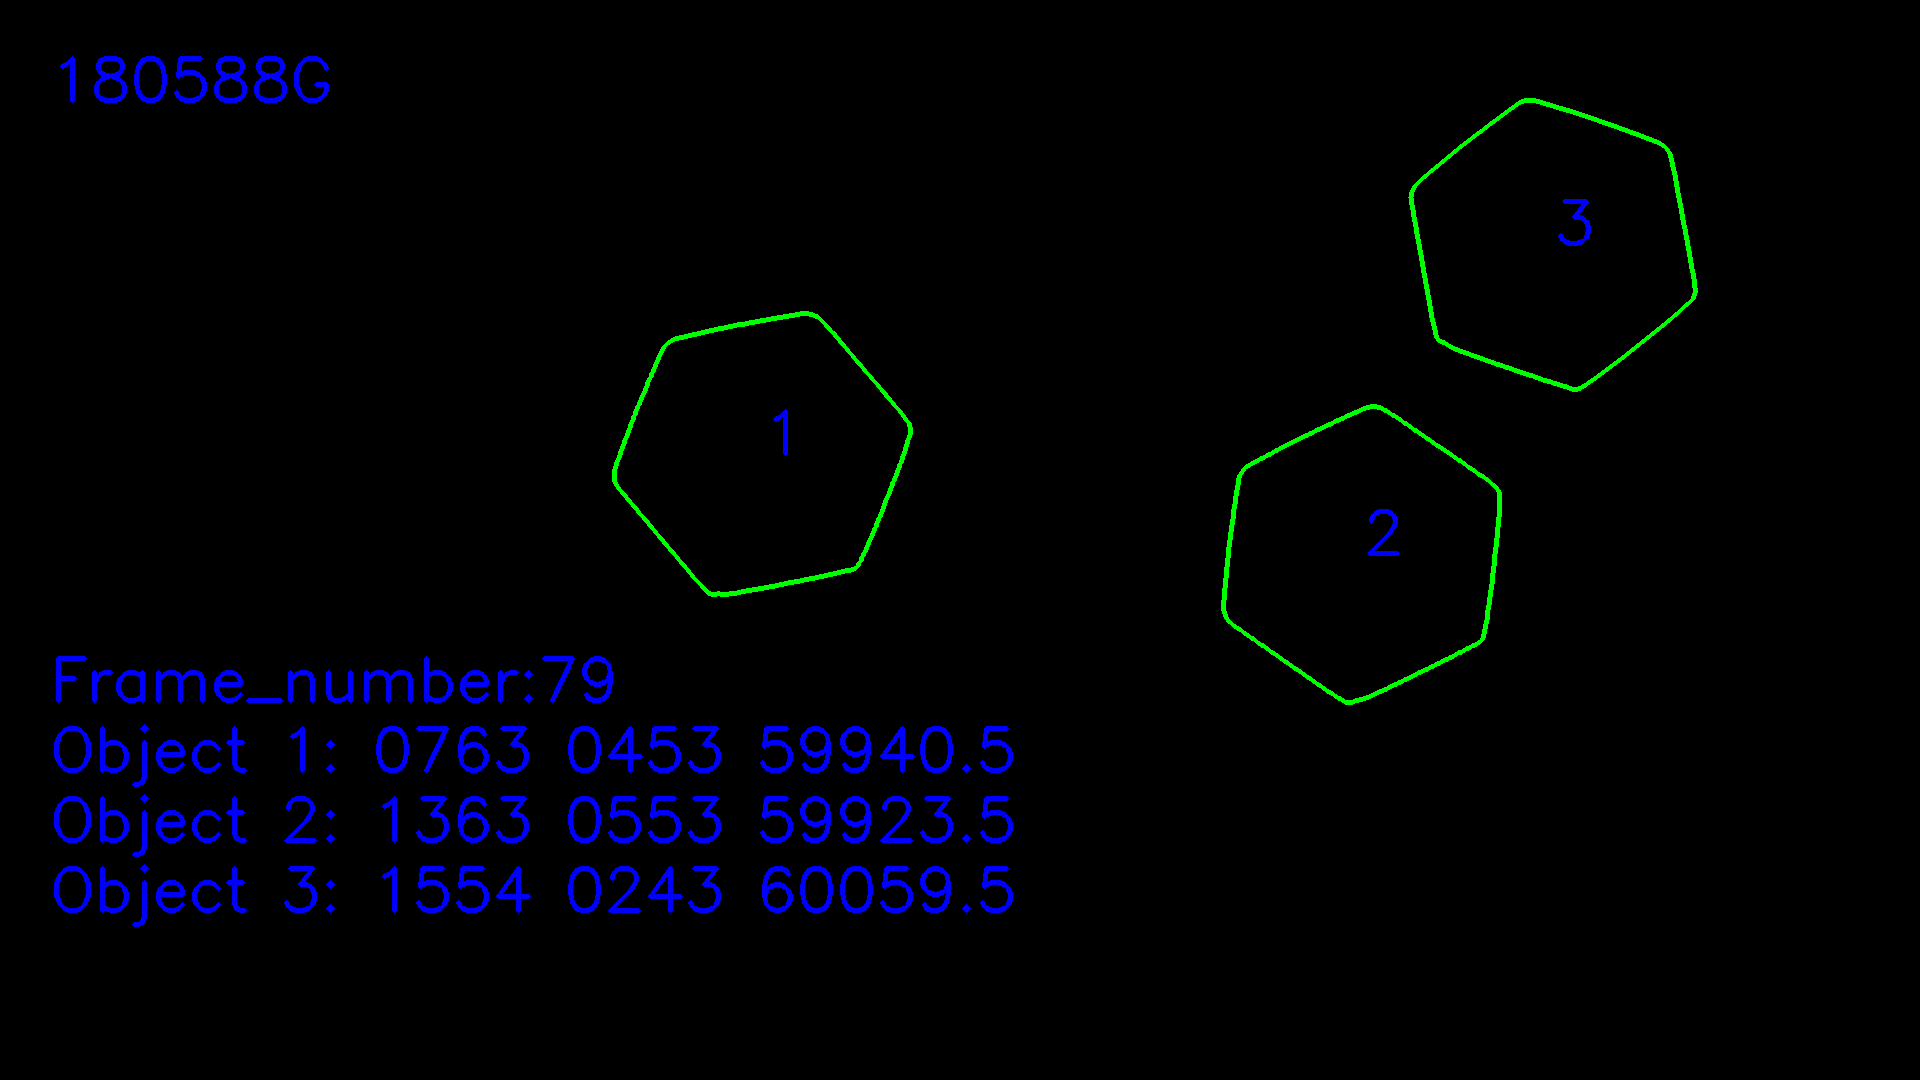

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.53000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.35300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.54400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([7.63000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.36300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.55400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


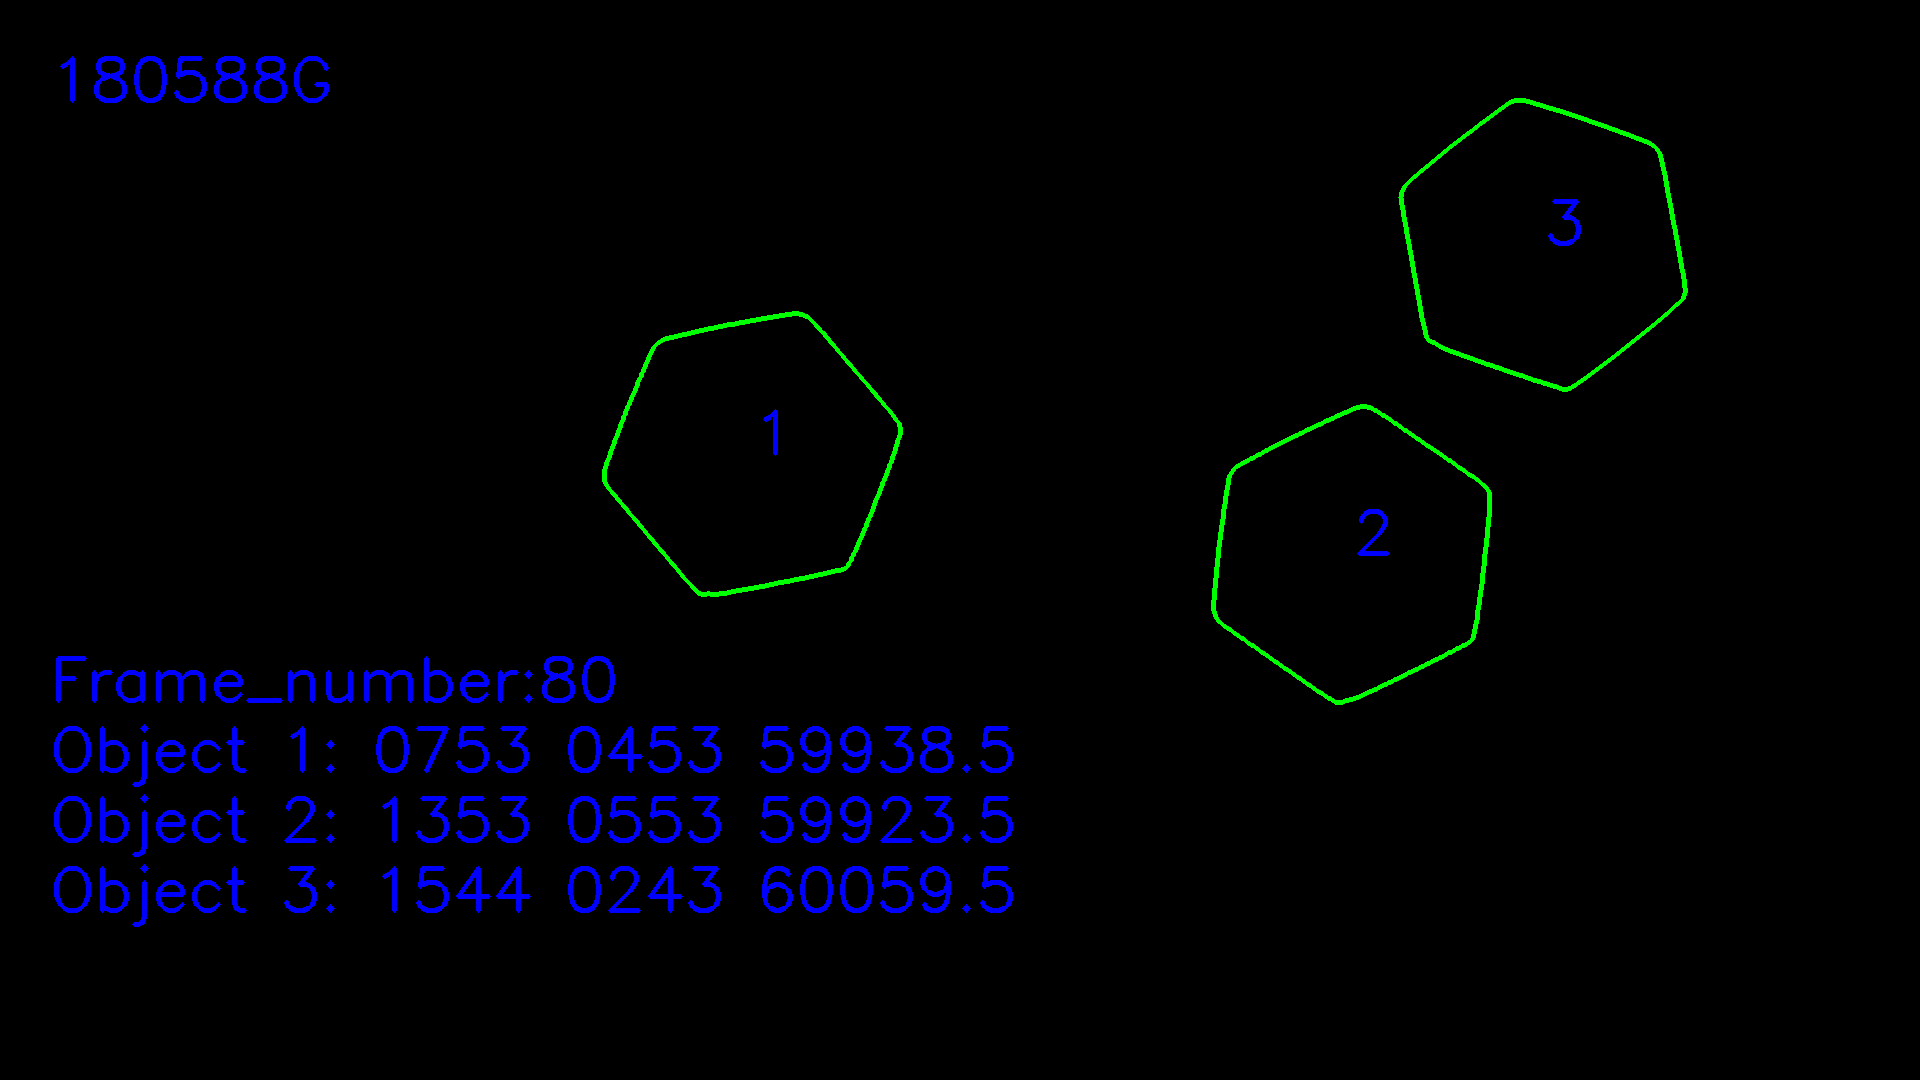

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.43000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.34300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.53400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([7.53000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.35300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.54400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


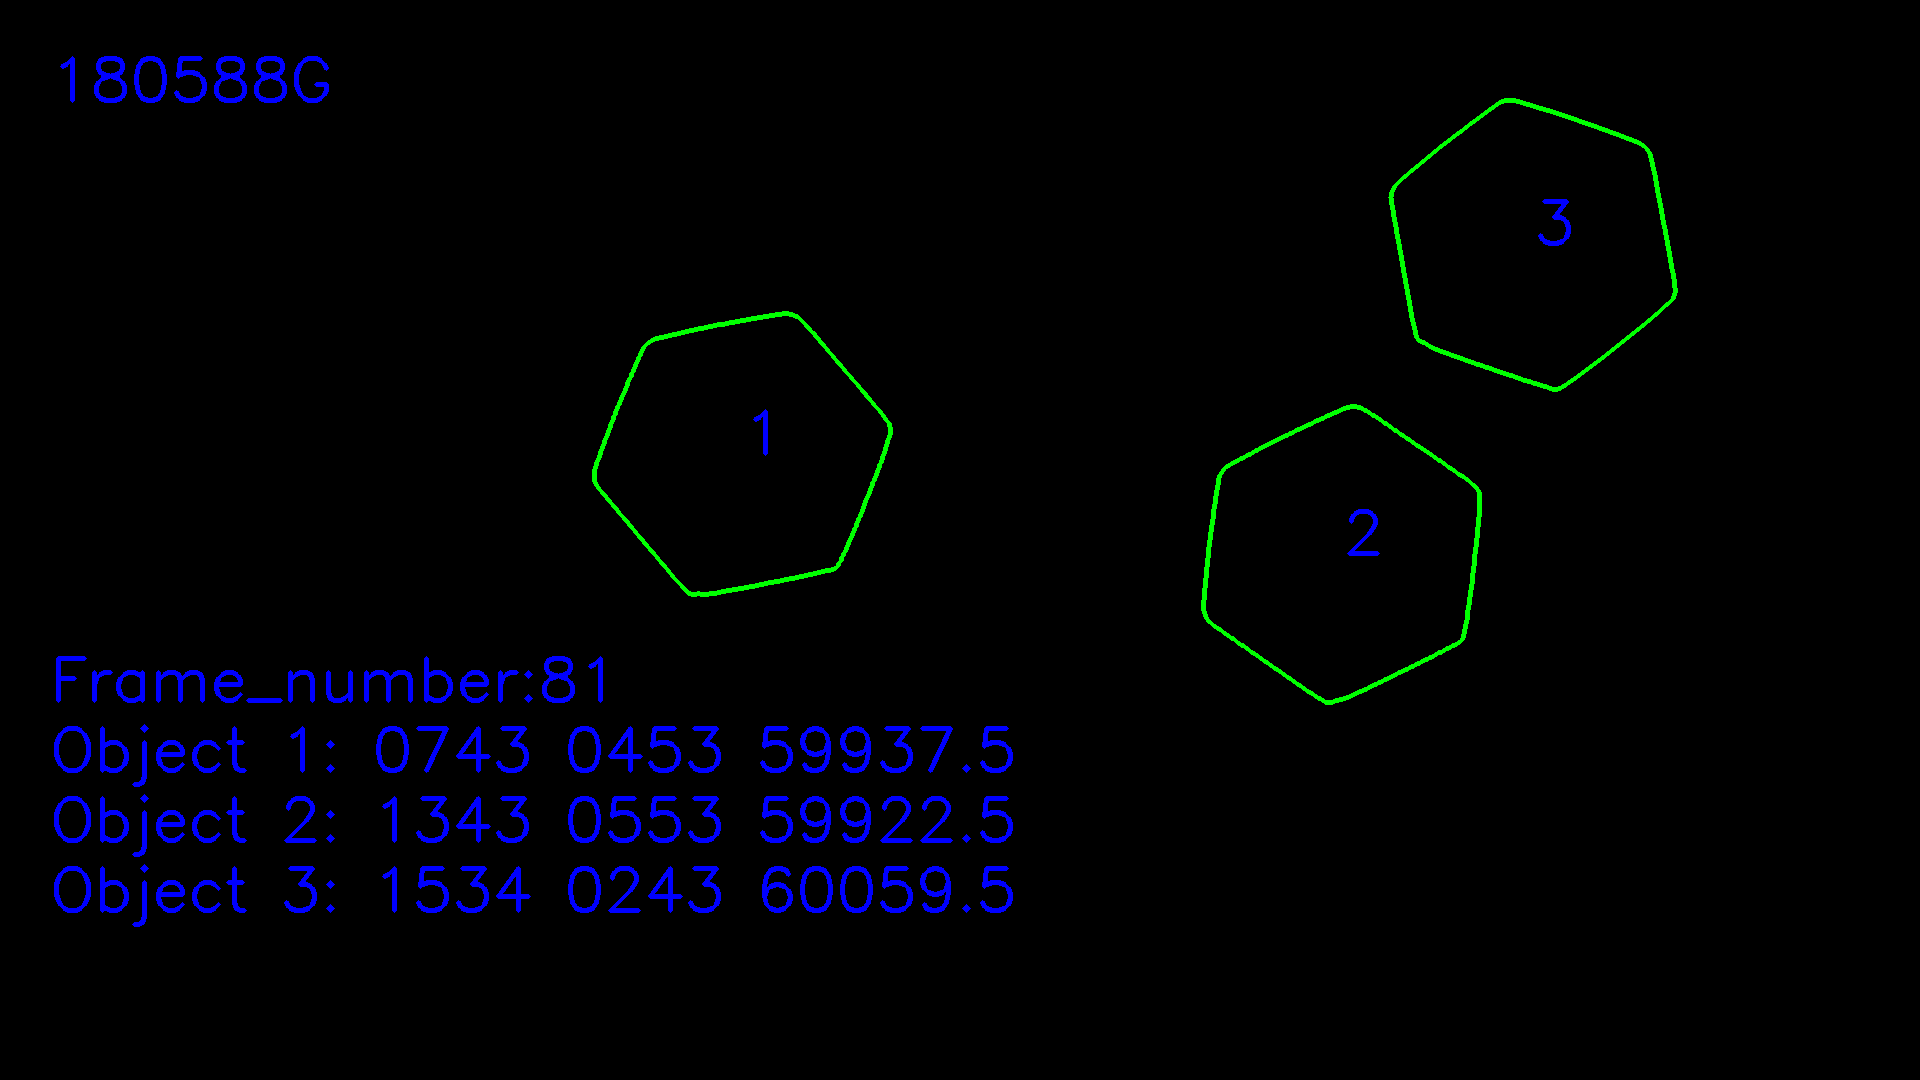

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.33000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.33300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.52400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([7.43000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.34300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.53400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


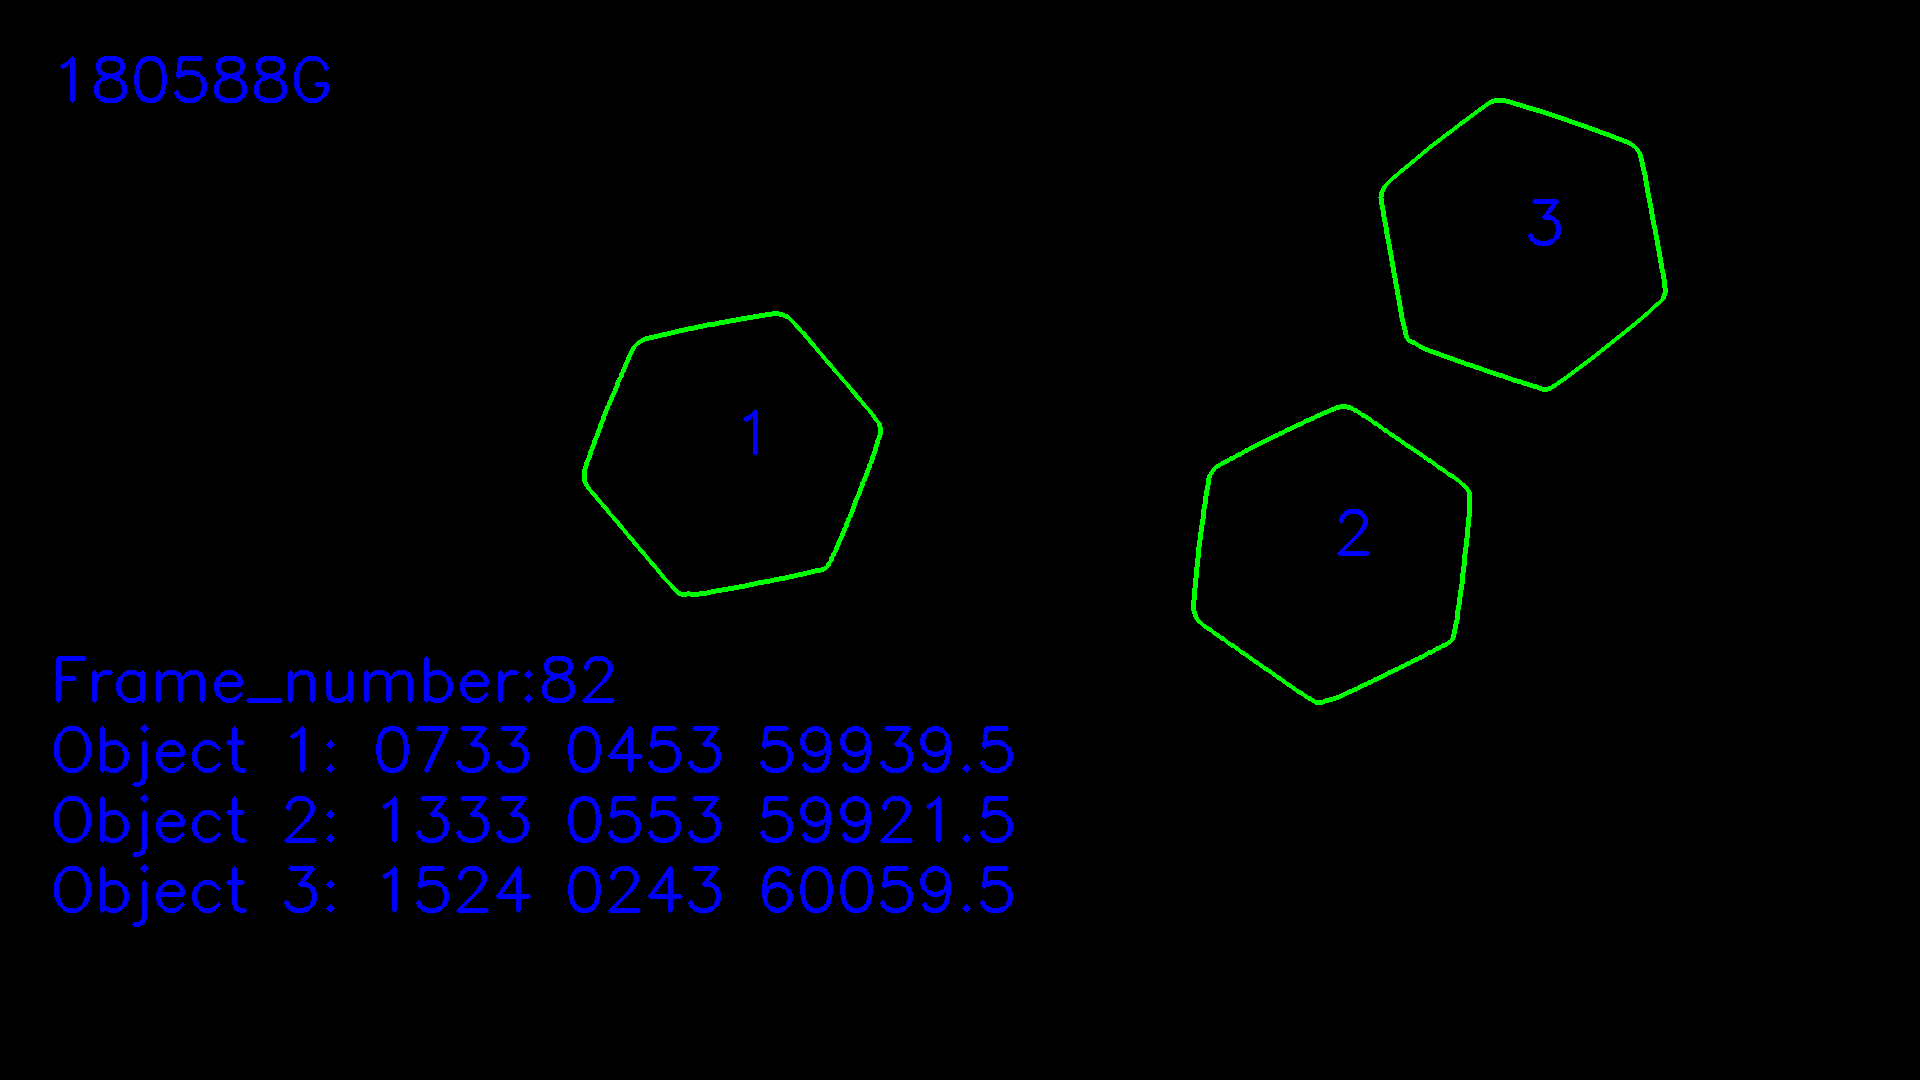

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.32300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.51400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([7.33000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.33300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.52400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


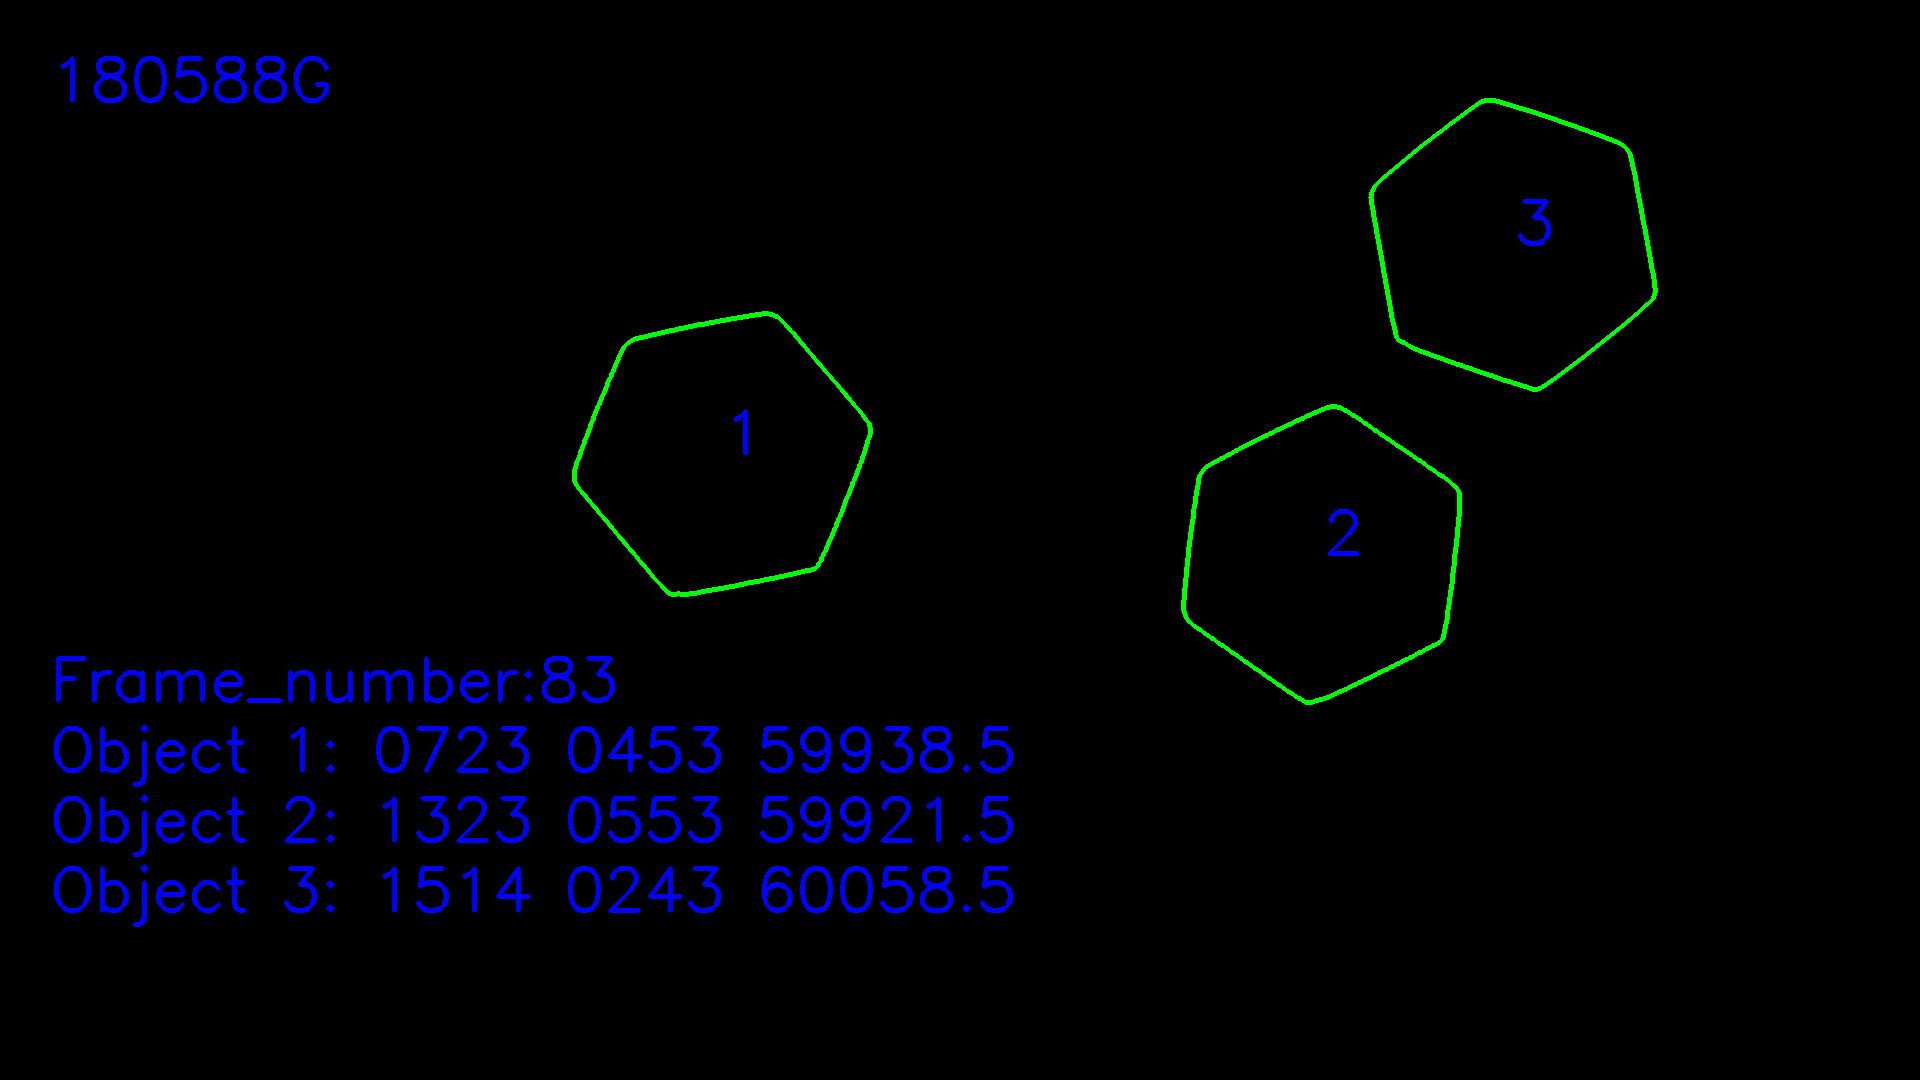

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.13000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.31300e+03, 5.53000e+02, 5.99205e+04, 2.00000e+00]), array([1.50400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([7.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.32300e+03, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.51400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


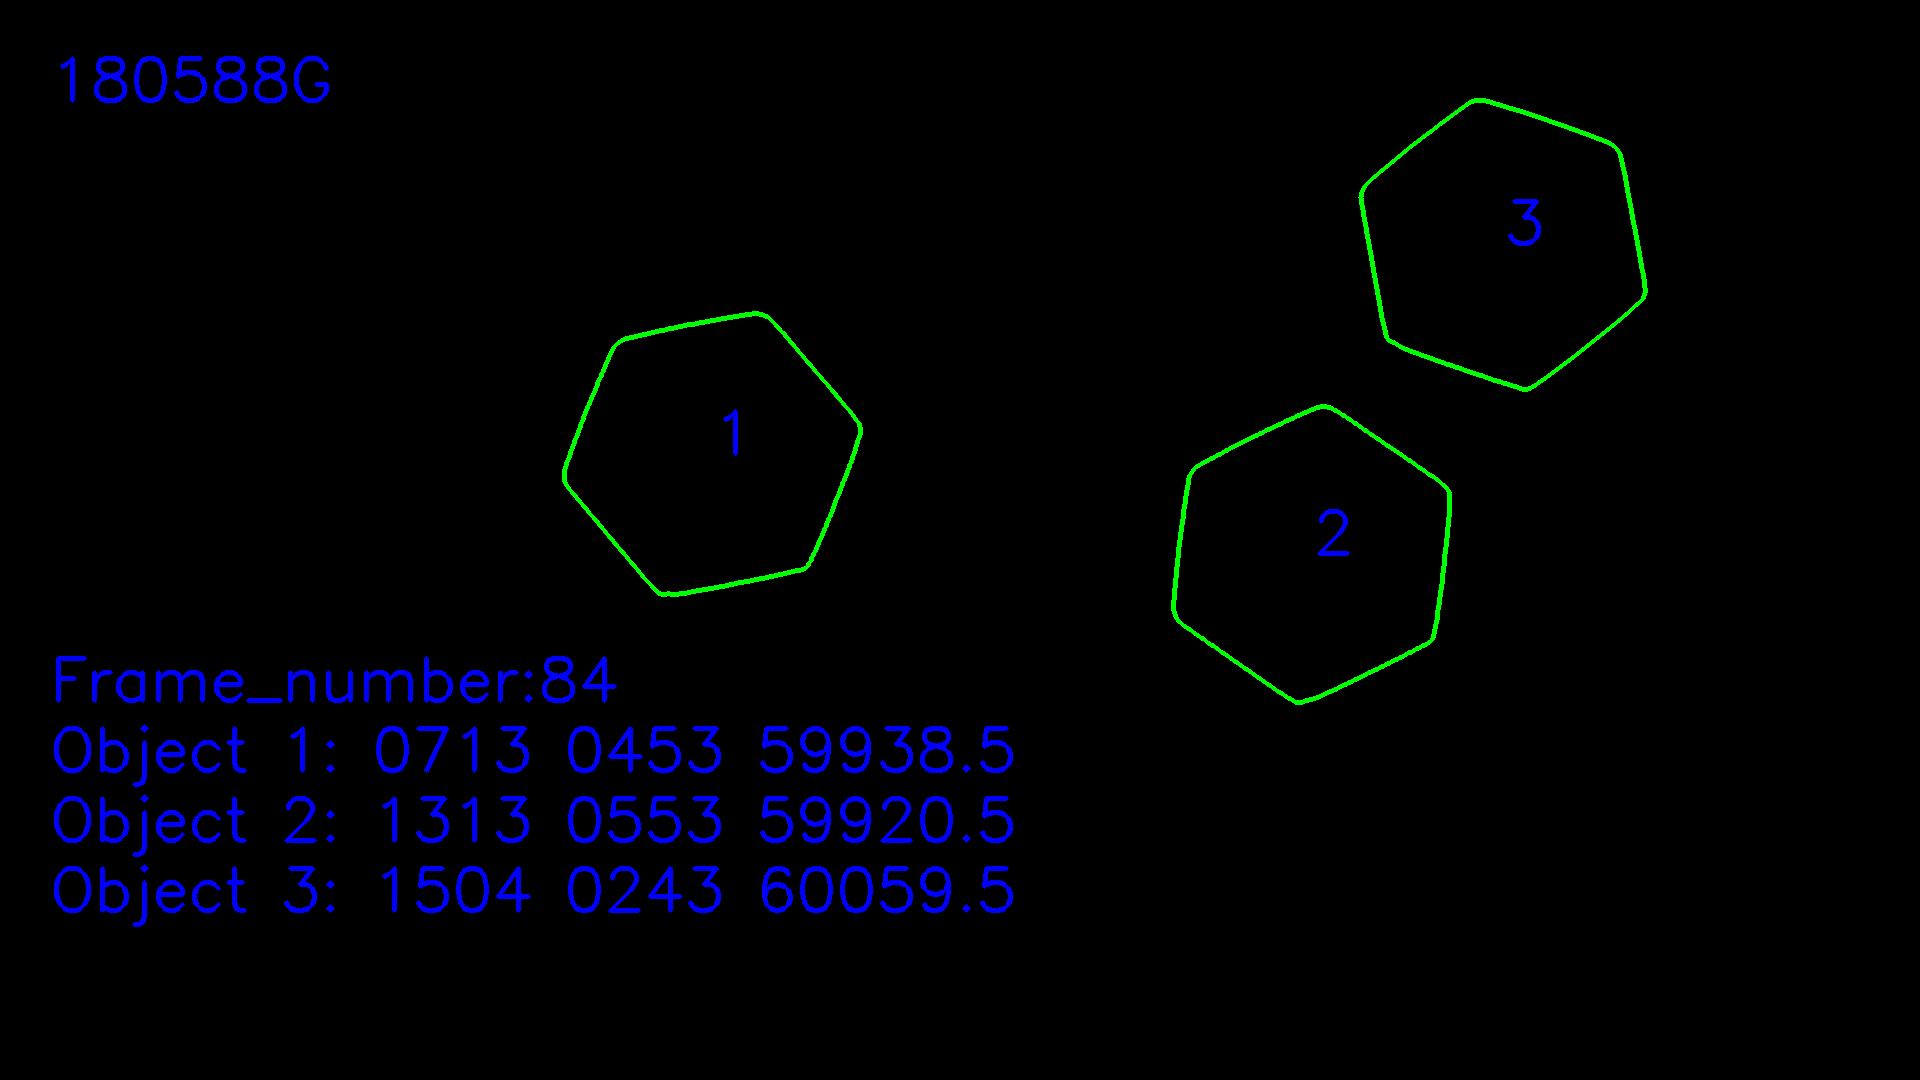

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([7.03000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.30300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.49400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([7.13000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.31300e+03, 5.53000e+02, 5.99205e+04, 2.00000e+00]), array([1.50400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


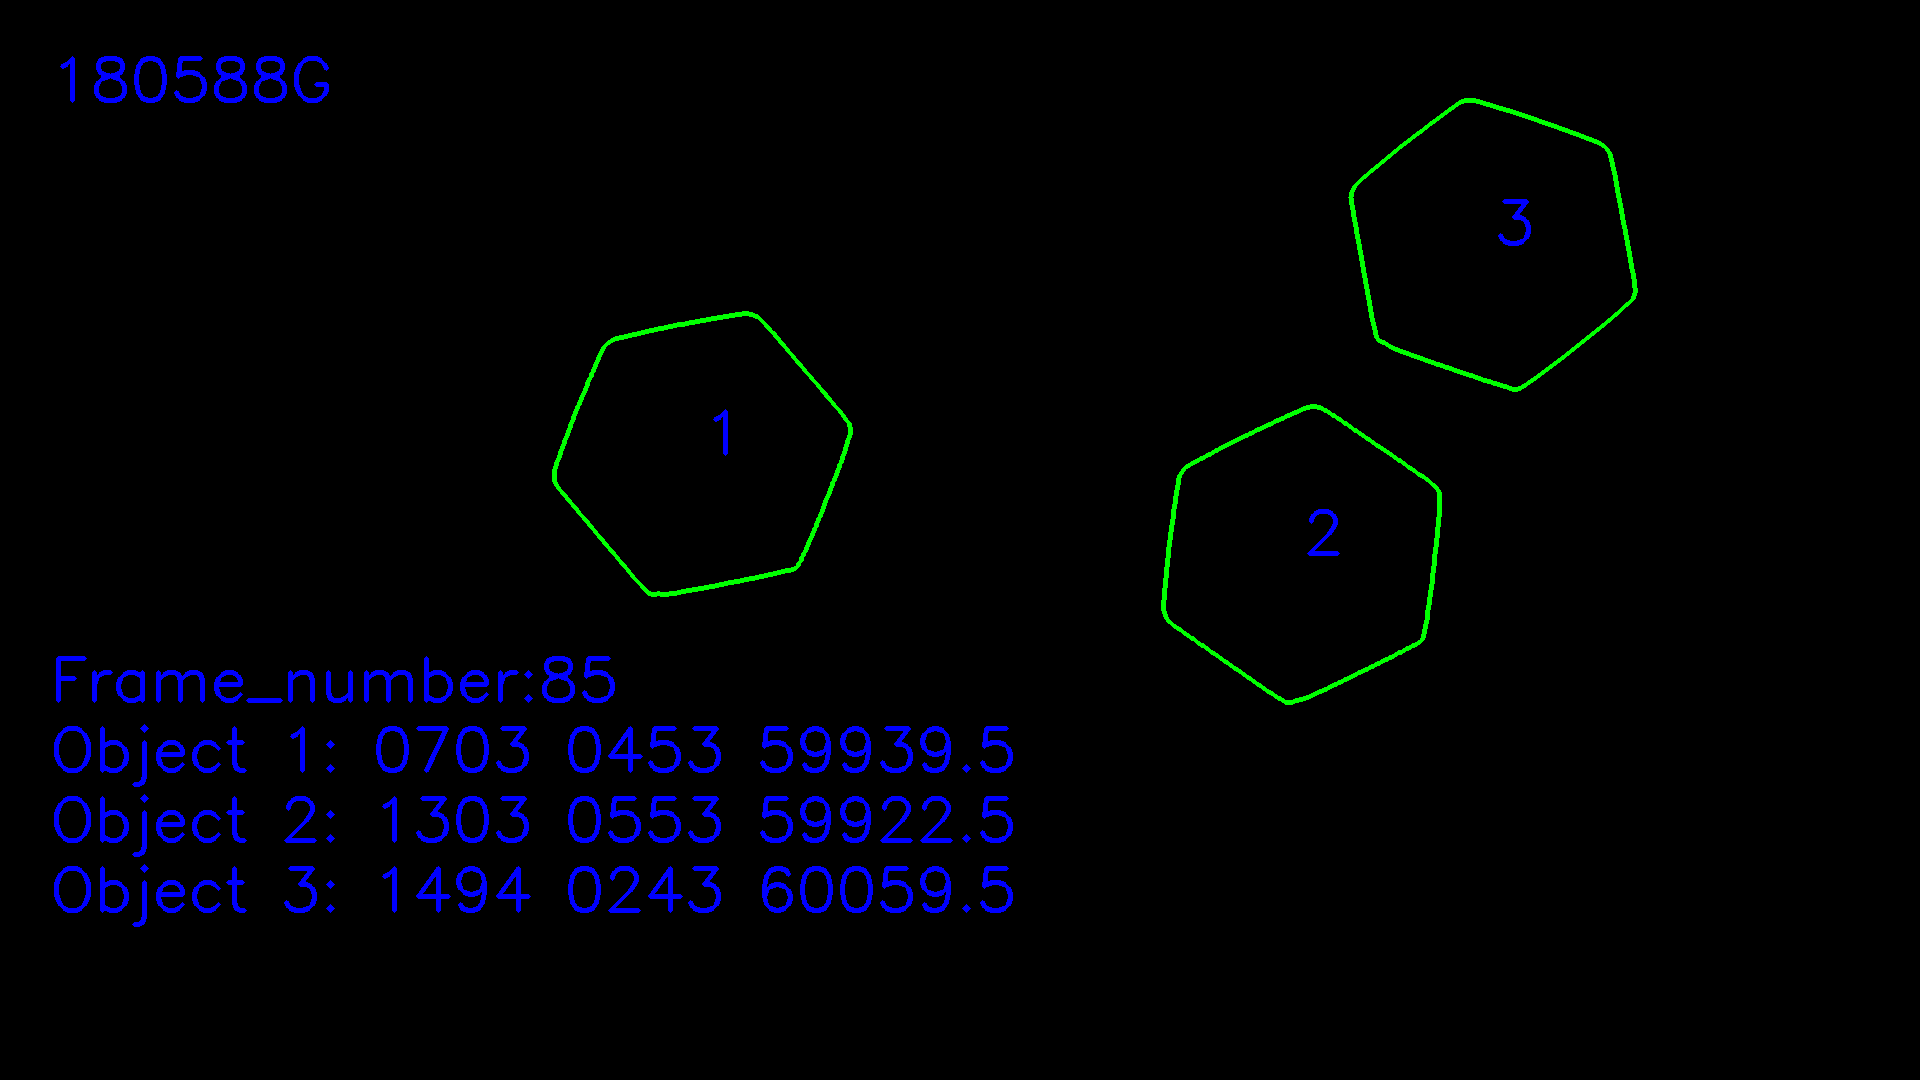

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.93000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.29300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.48400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([7.03000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.30300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.49400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


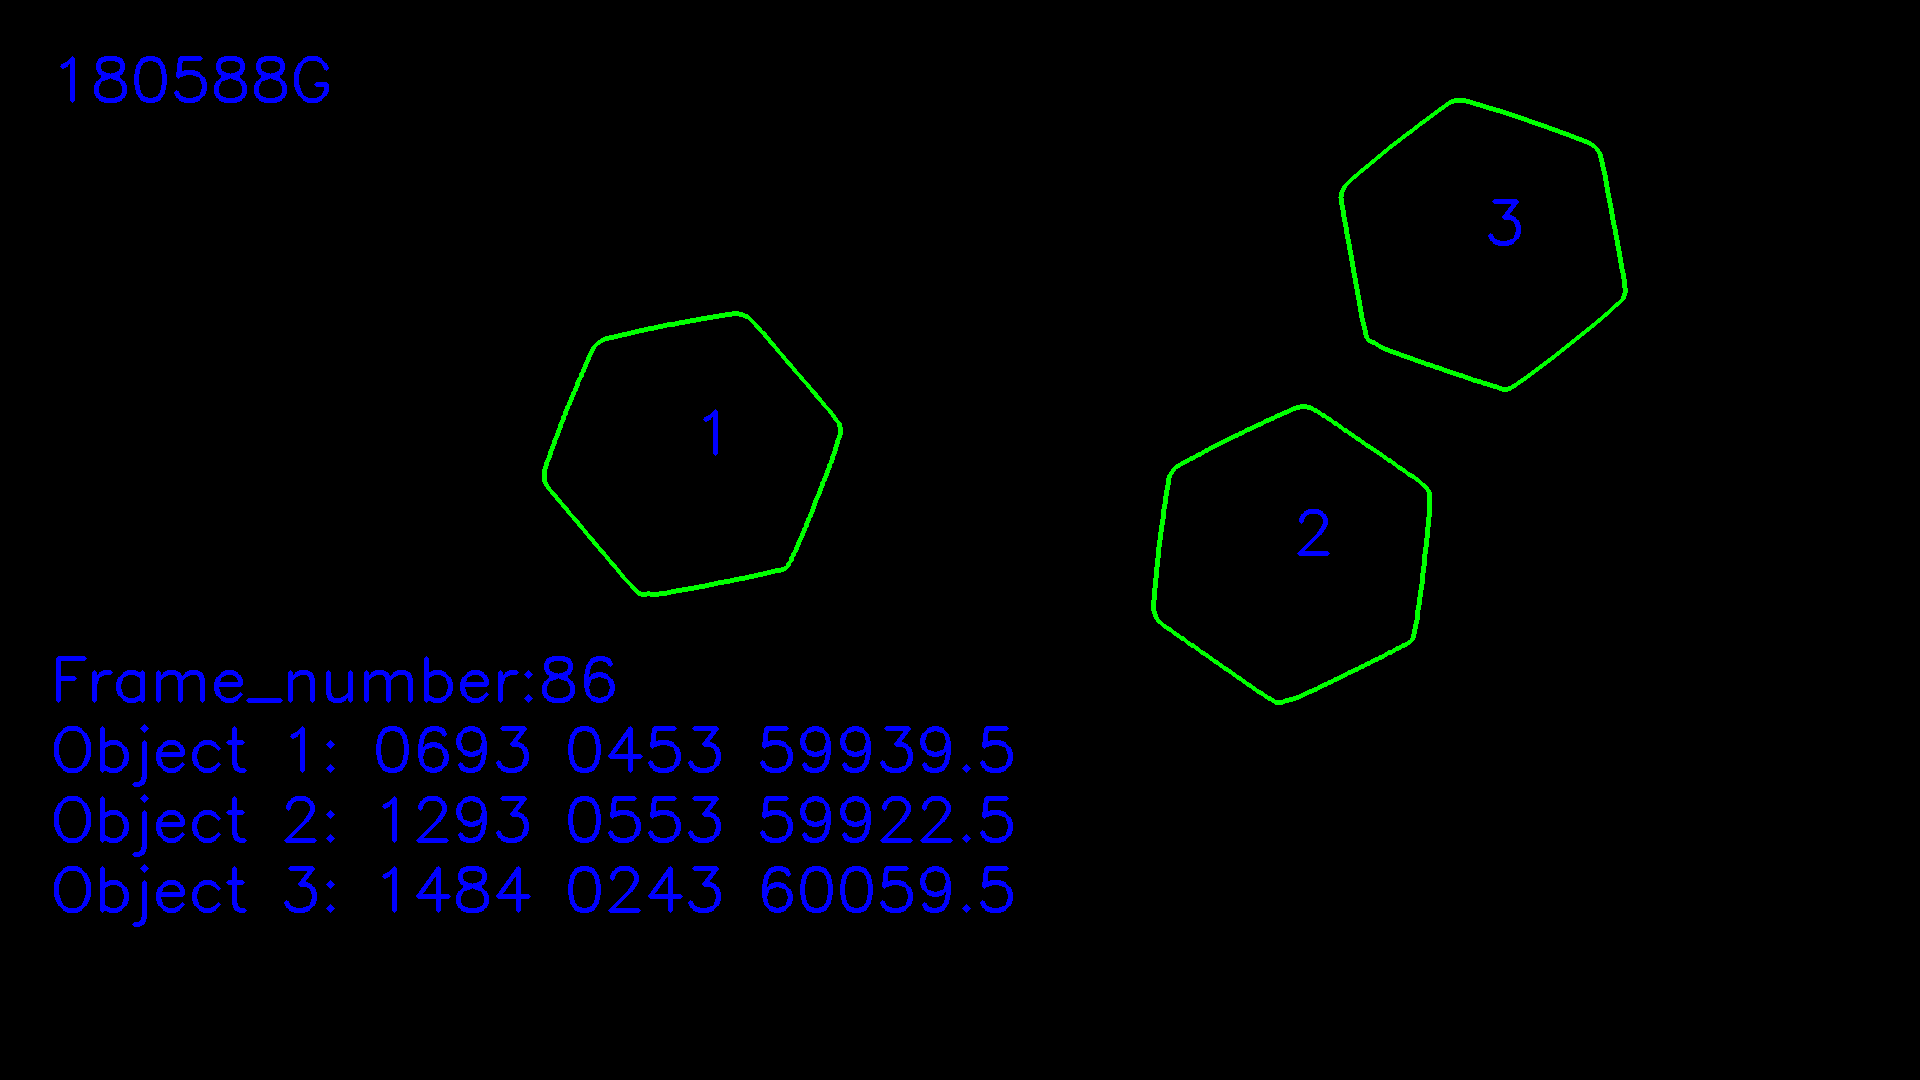

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.83000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.28300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.47400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([6.93000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.29300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.48400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


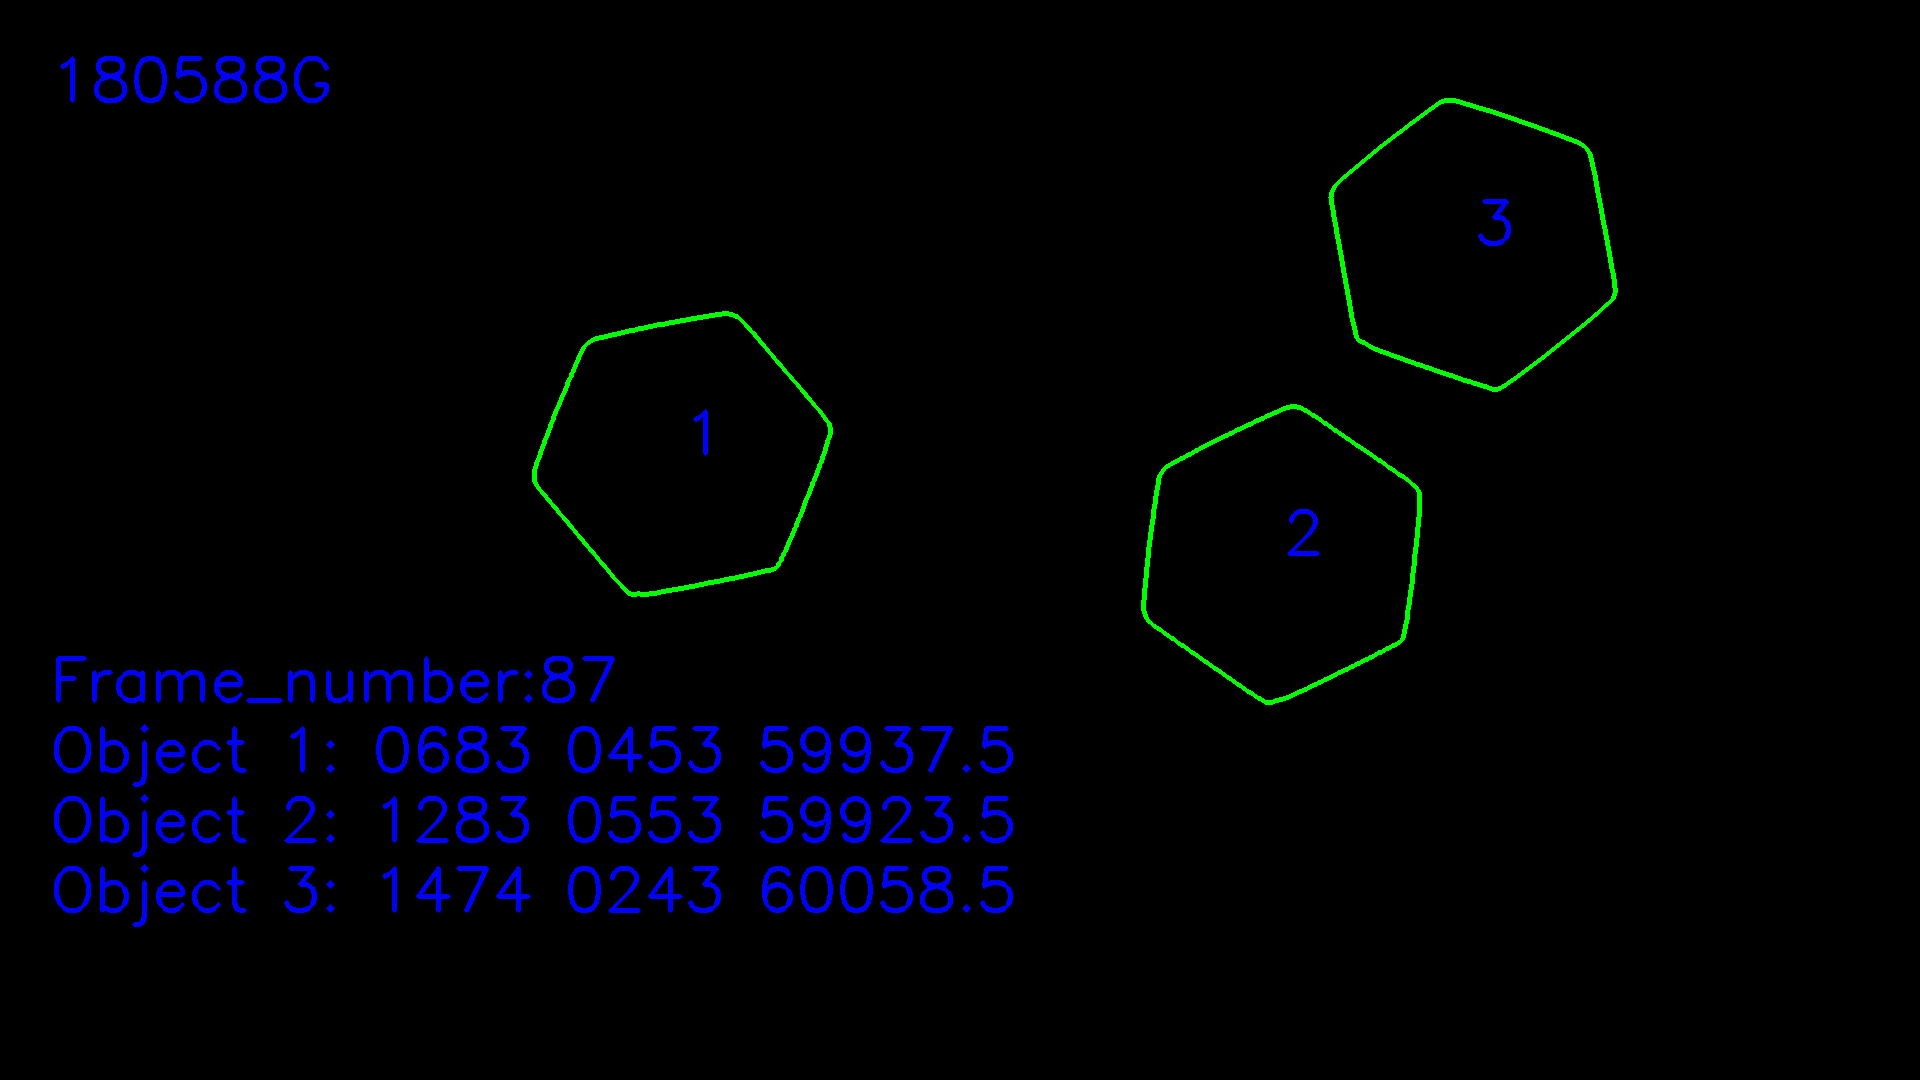

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.73000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.27300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.46400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([6.83000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([1.28300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.47400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


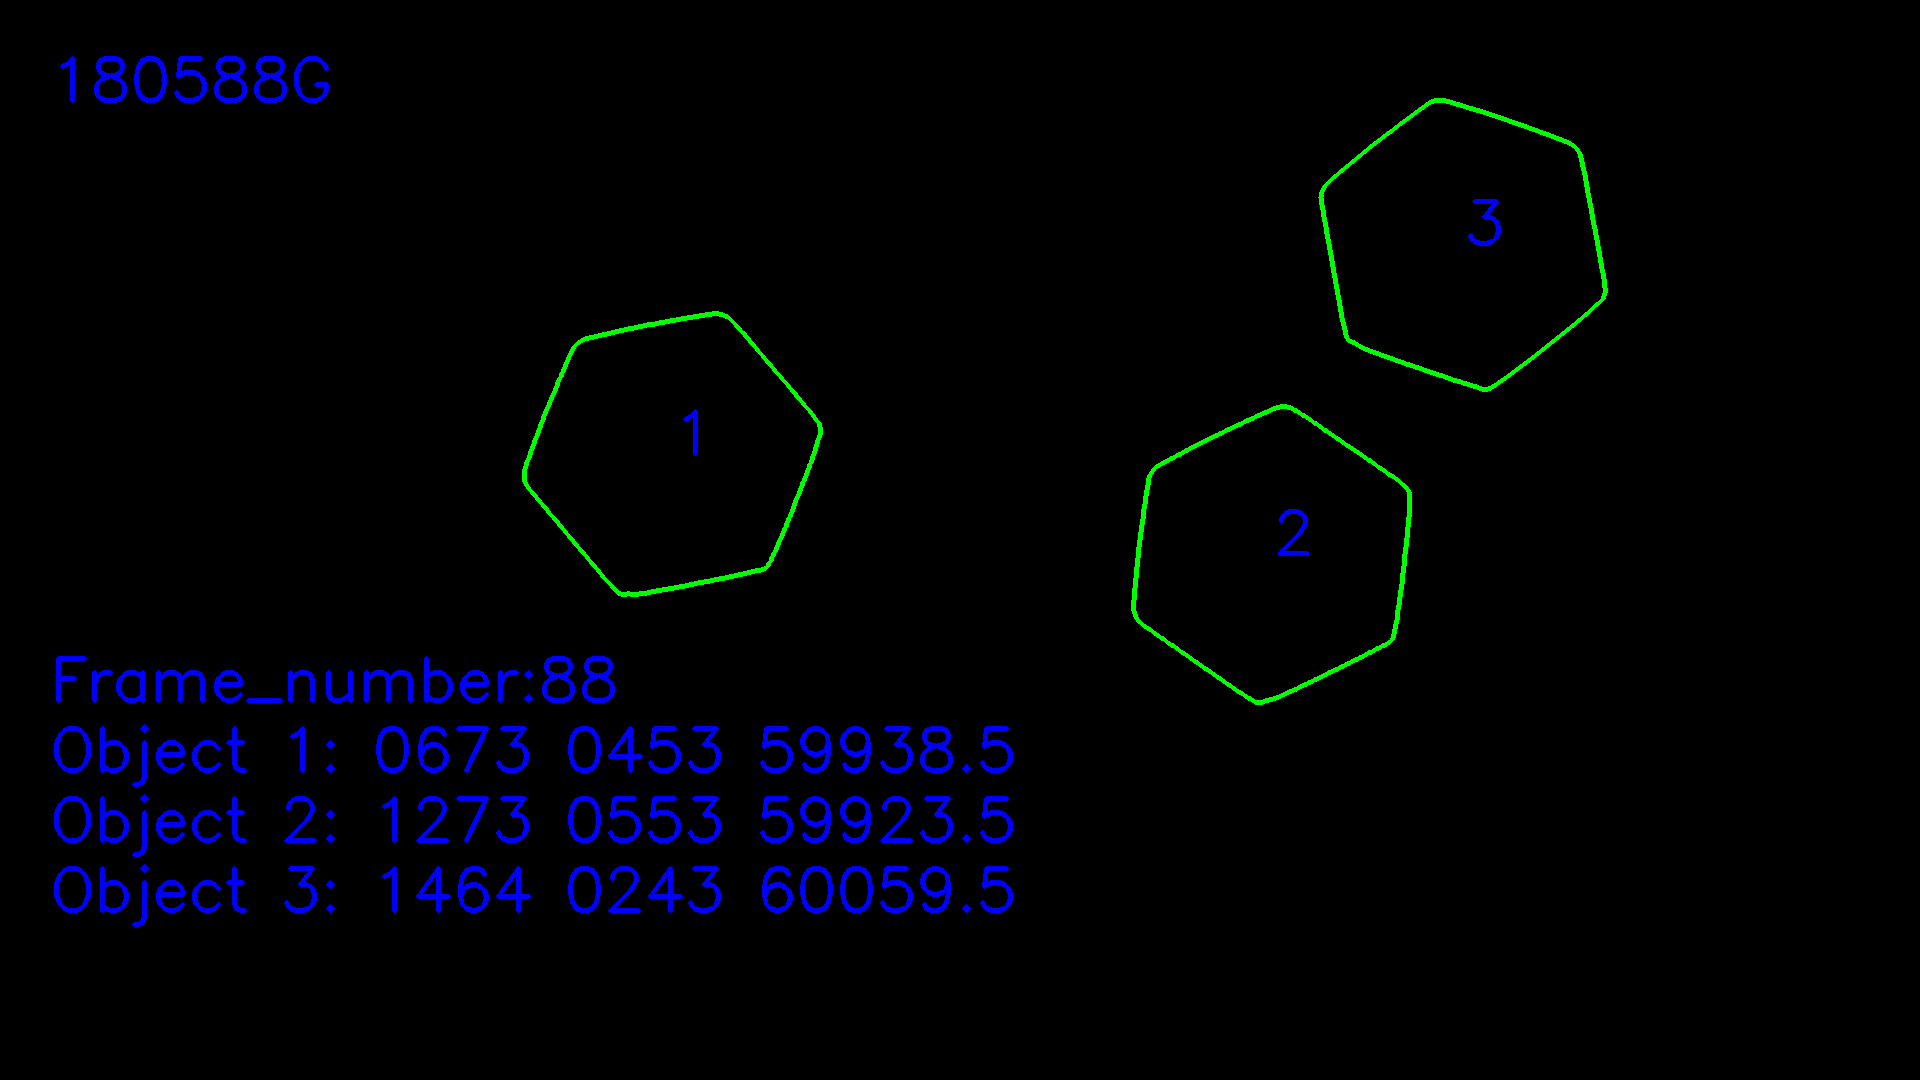

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.63000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.26300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.45400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([6.73000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.27300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.46400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


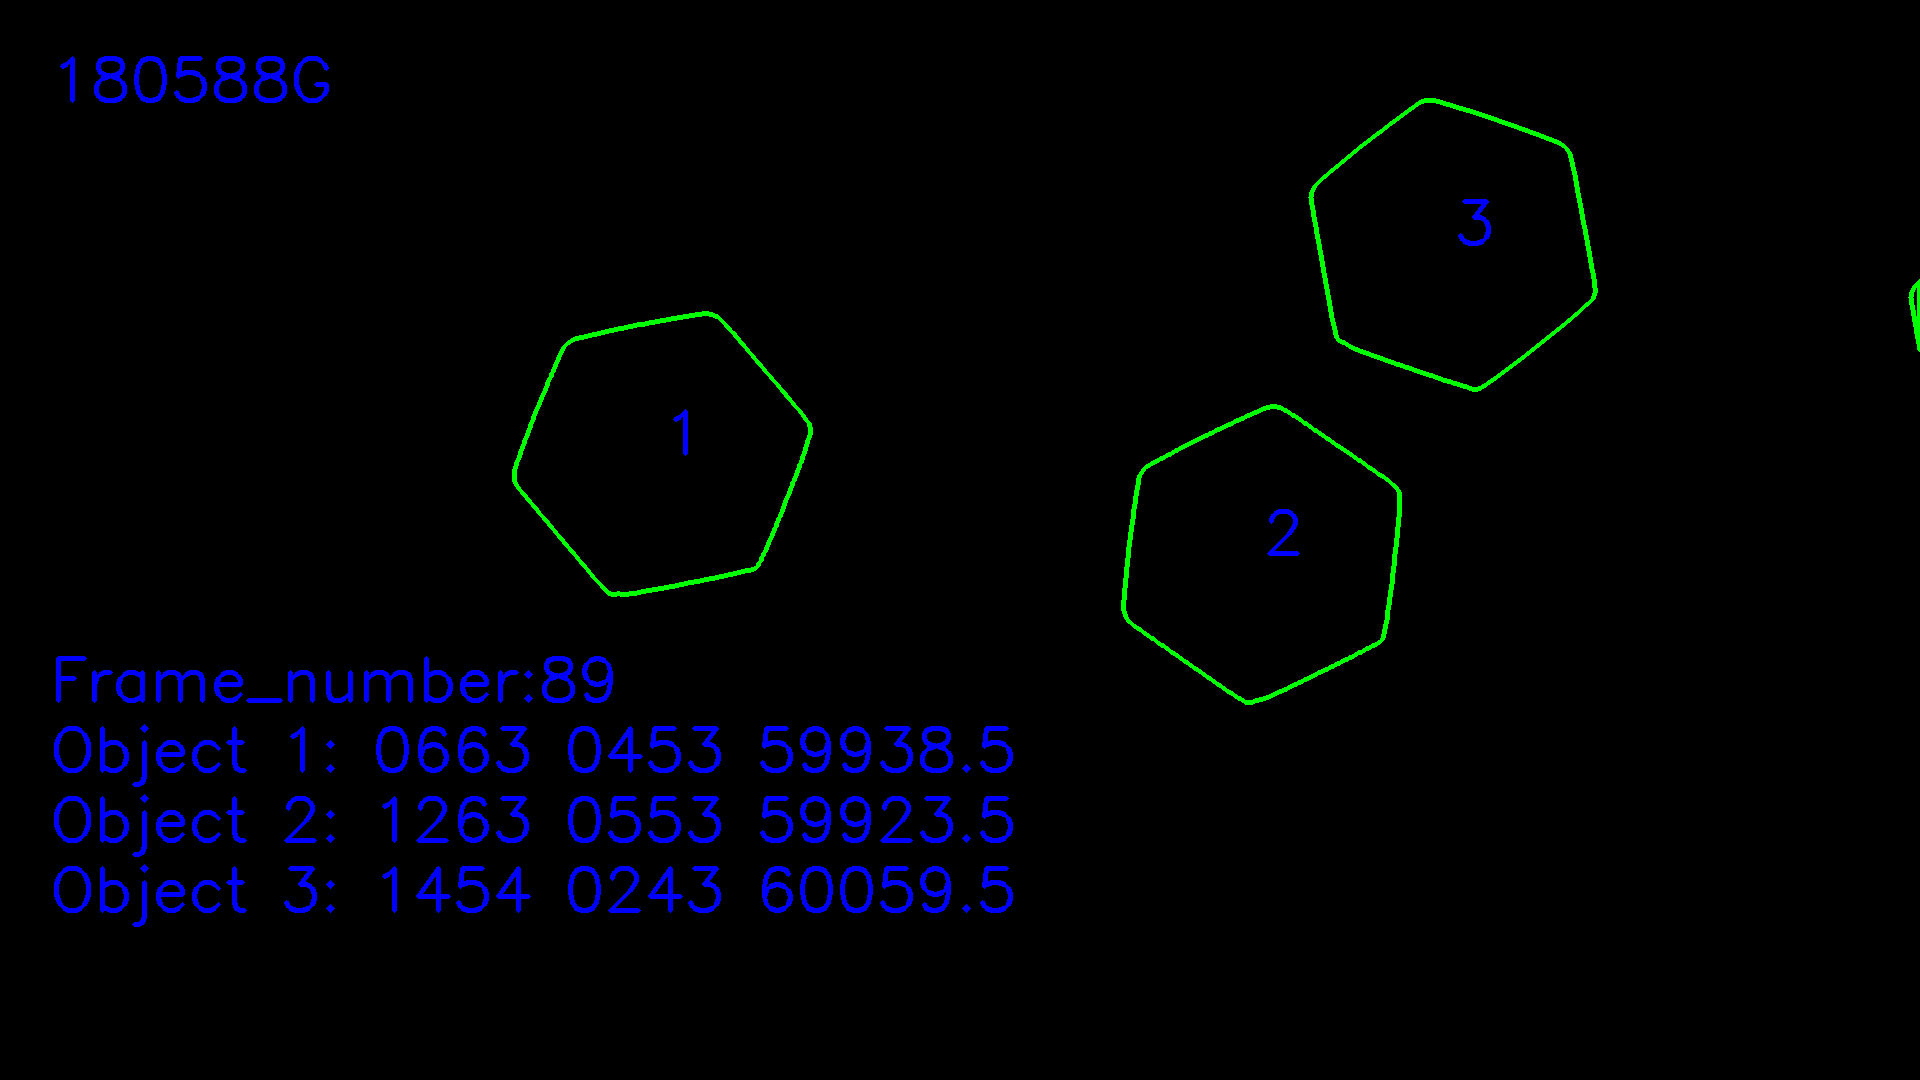

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.53000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.25300e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.44400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([6.63000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.26300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.45400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


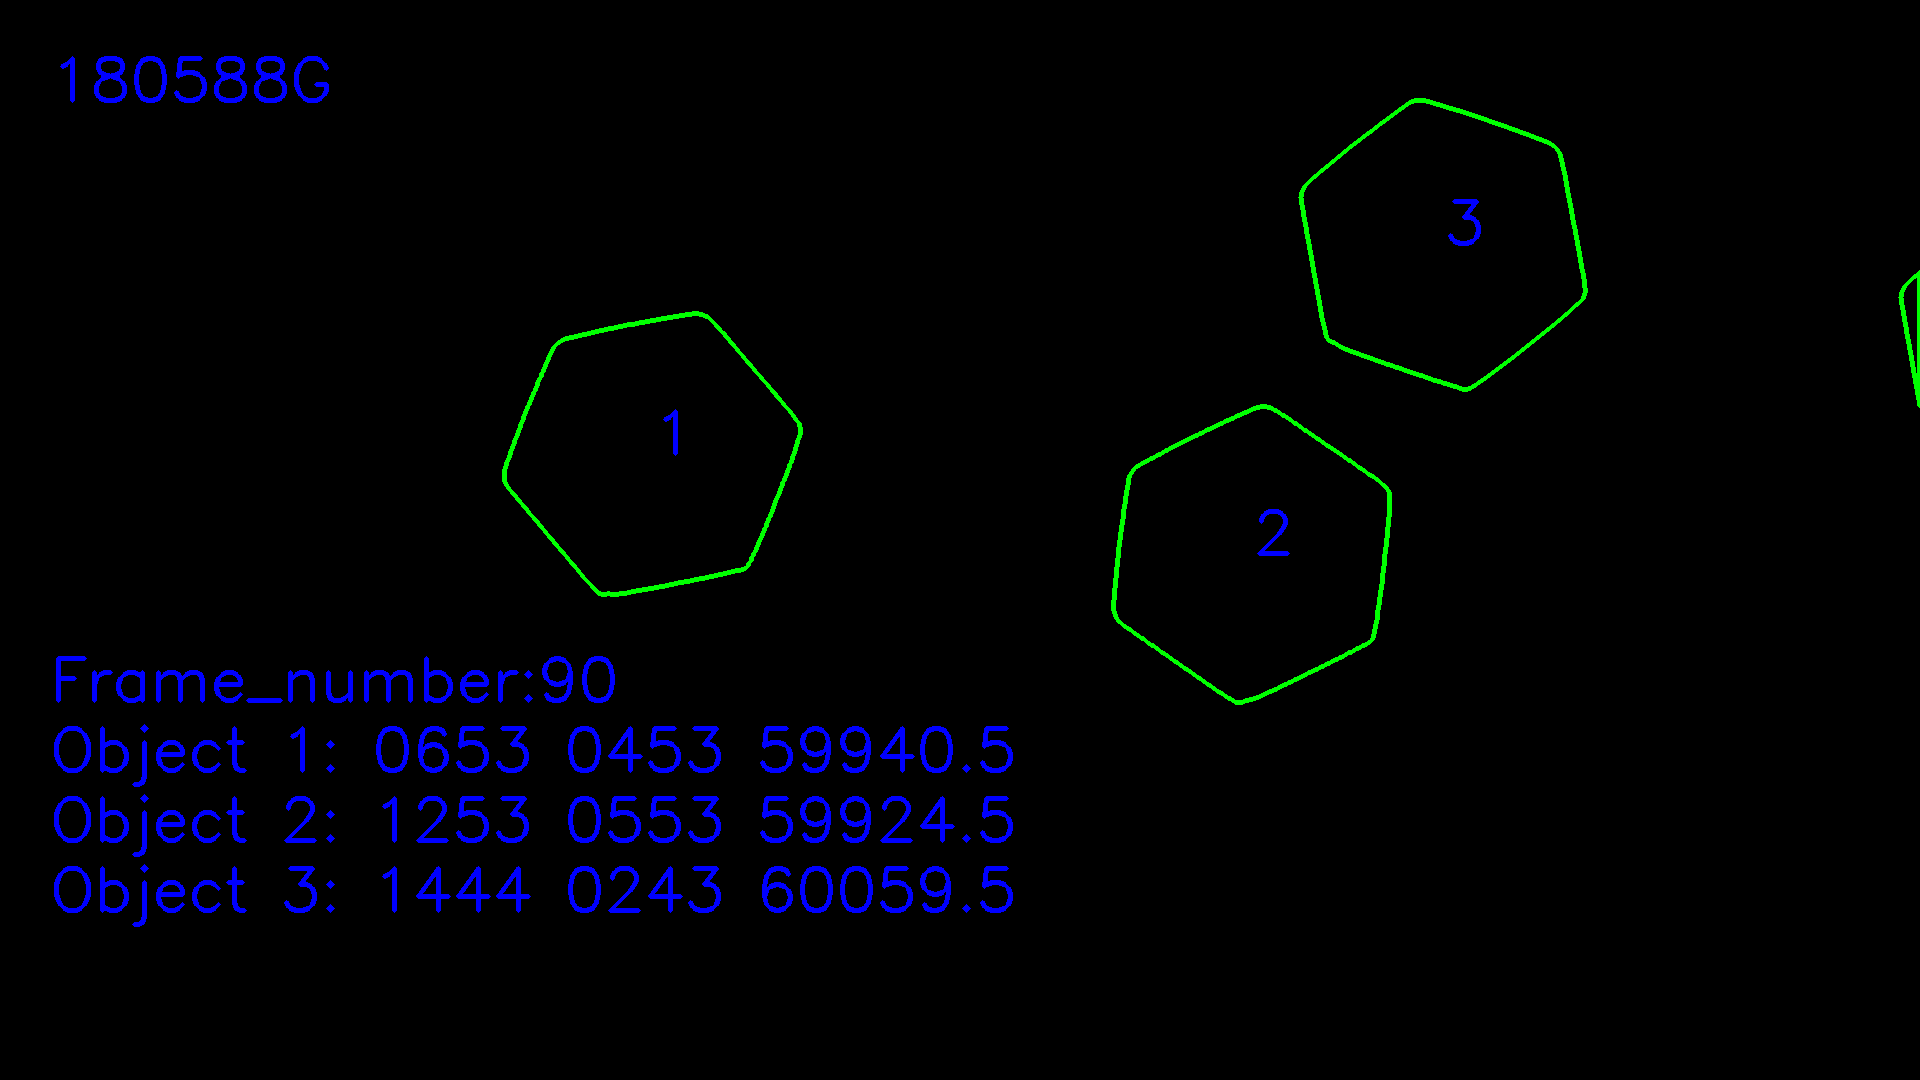

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.43000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.24300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.43400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([6.53000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.25300e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.44400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


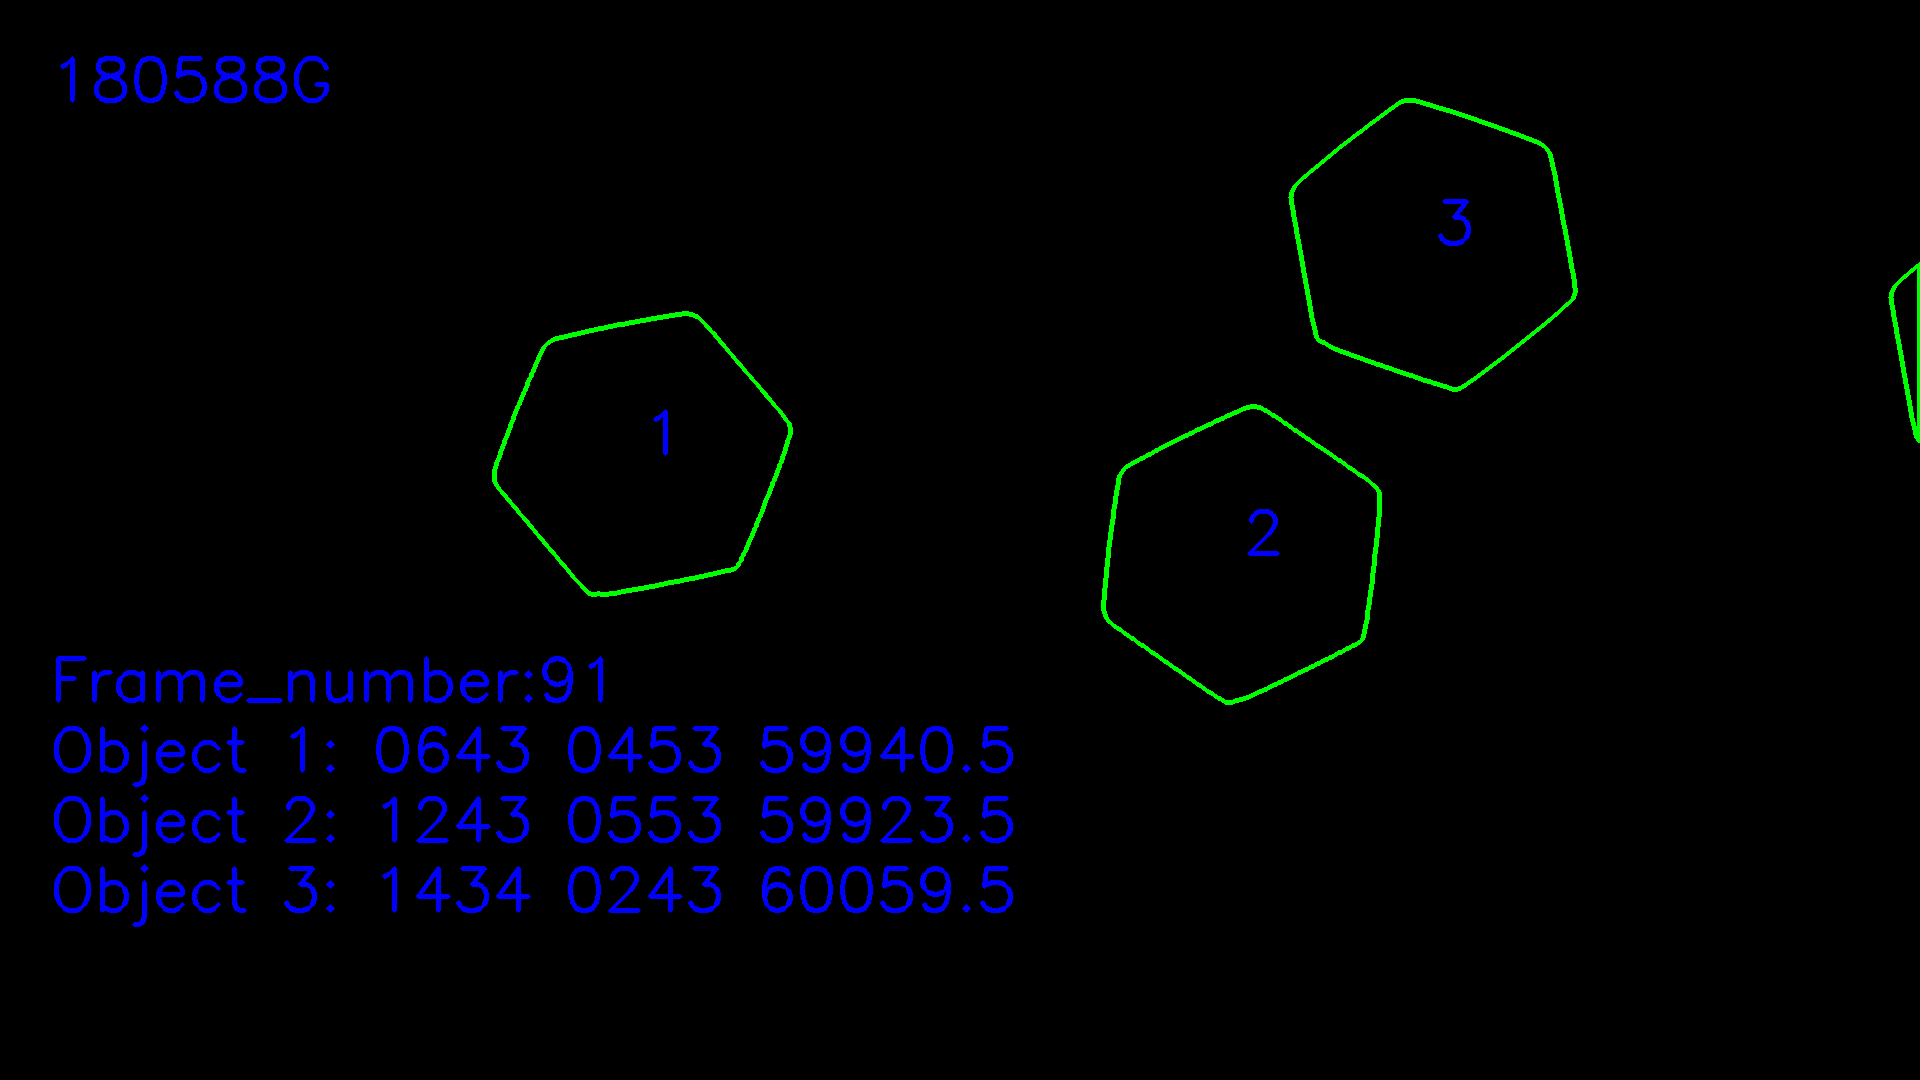

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.33000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.23300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.42400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([6.43000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.24300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.43400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


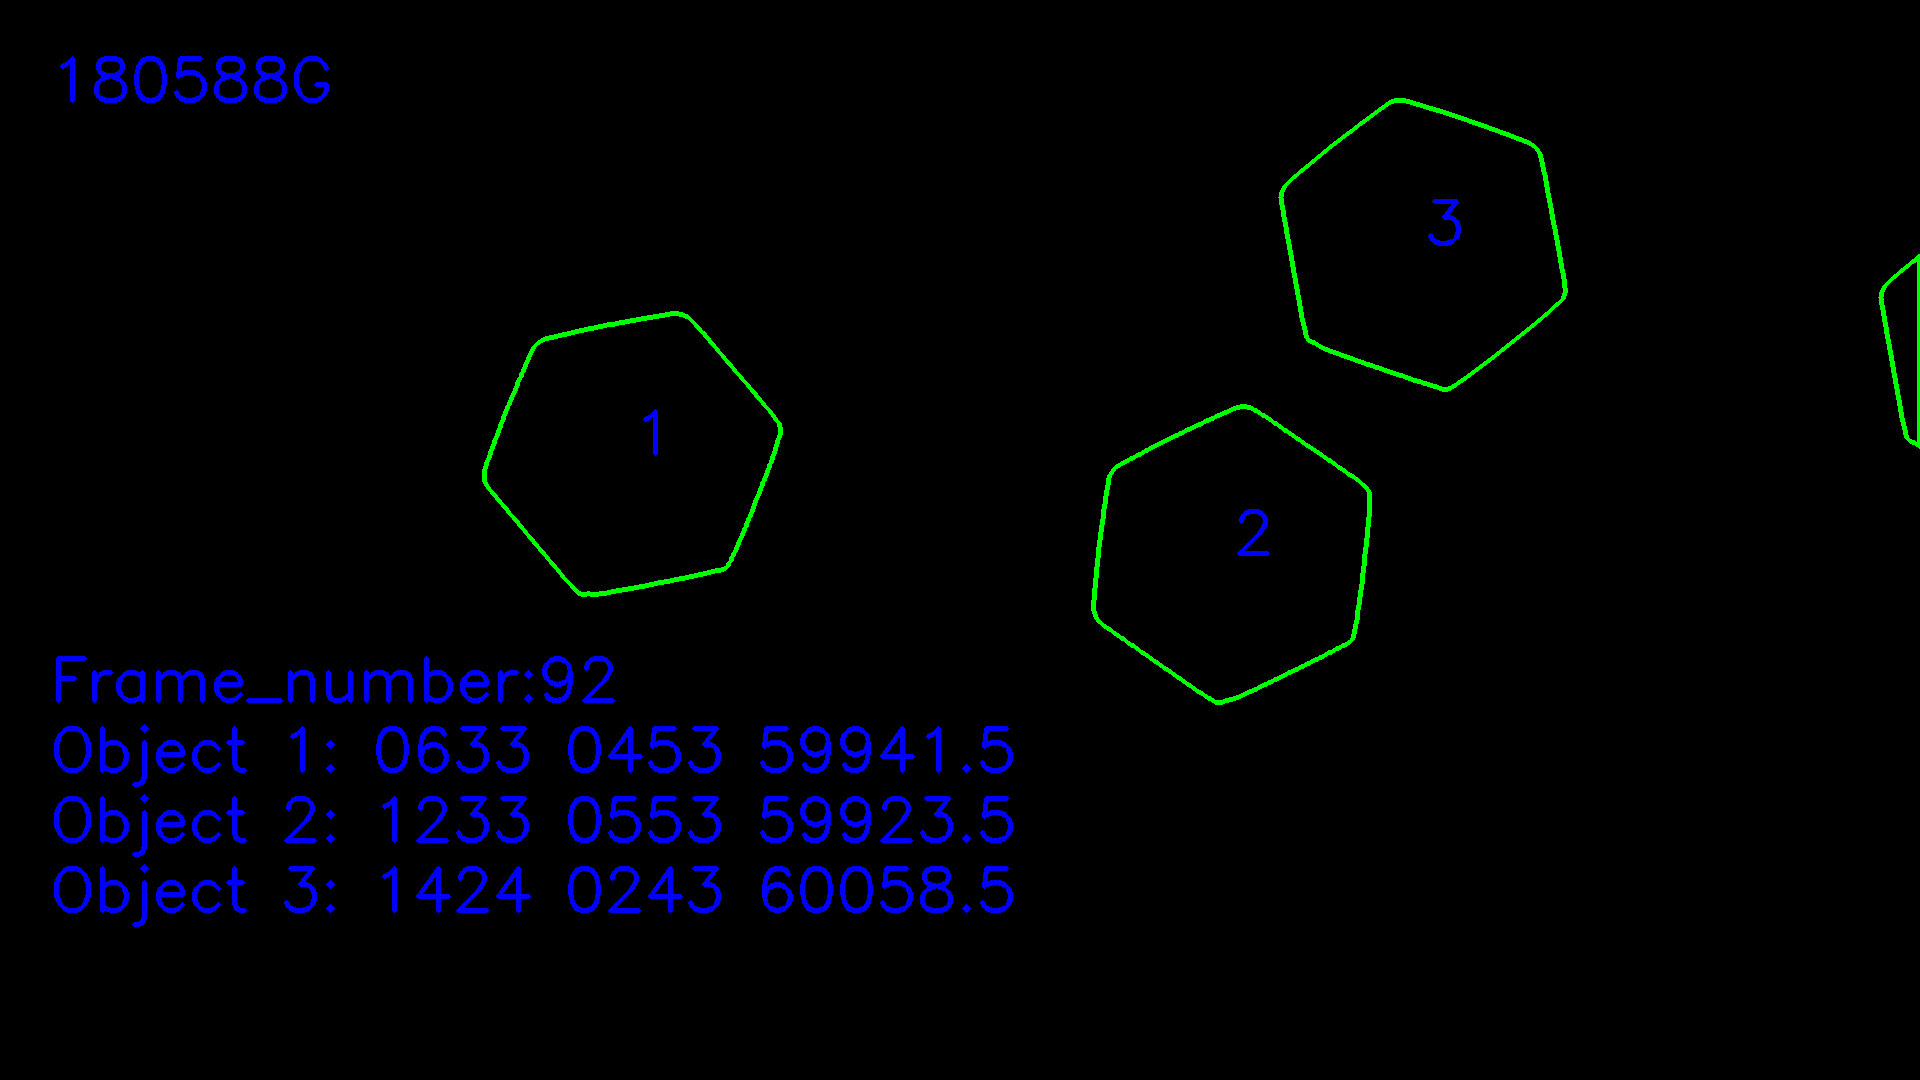

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.23000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.22300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.41400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([6.33000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.23300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.42400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


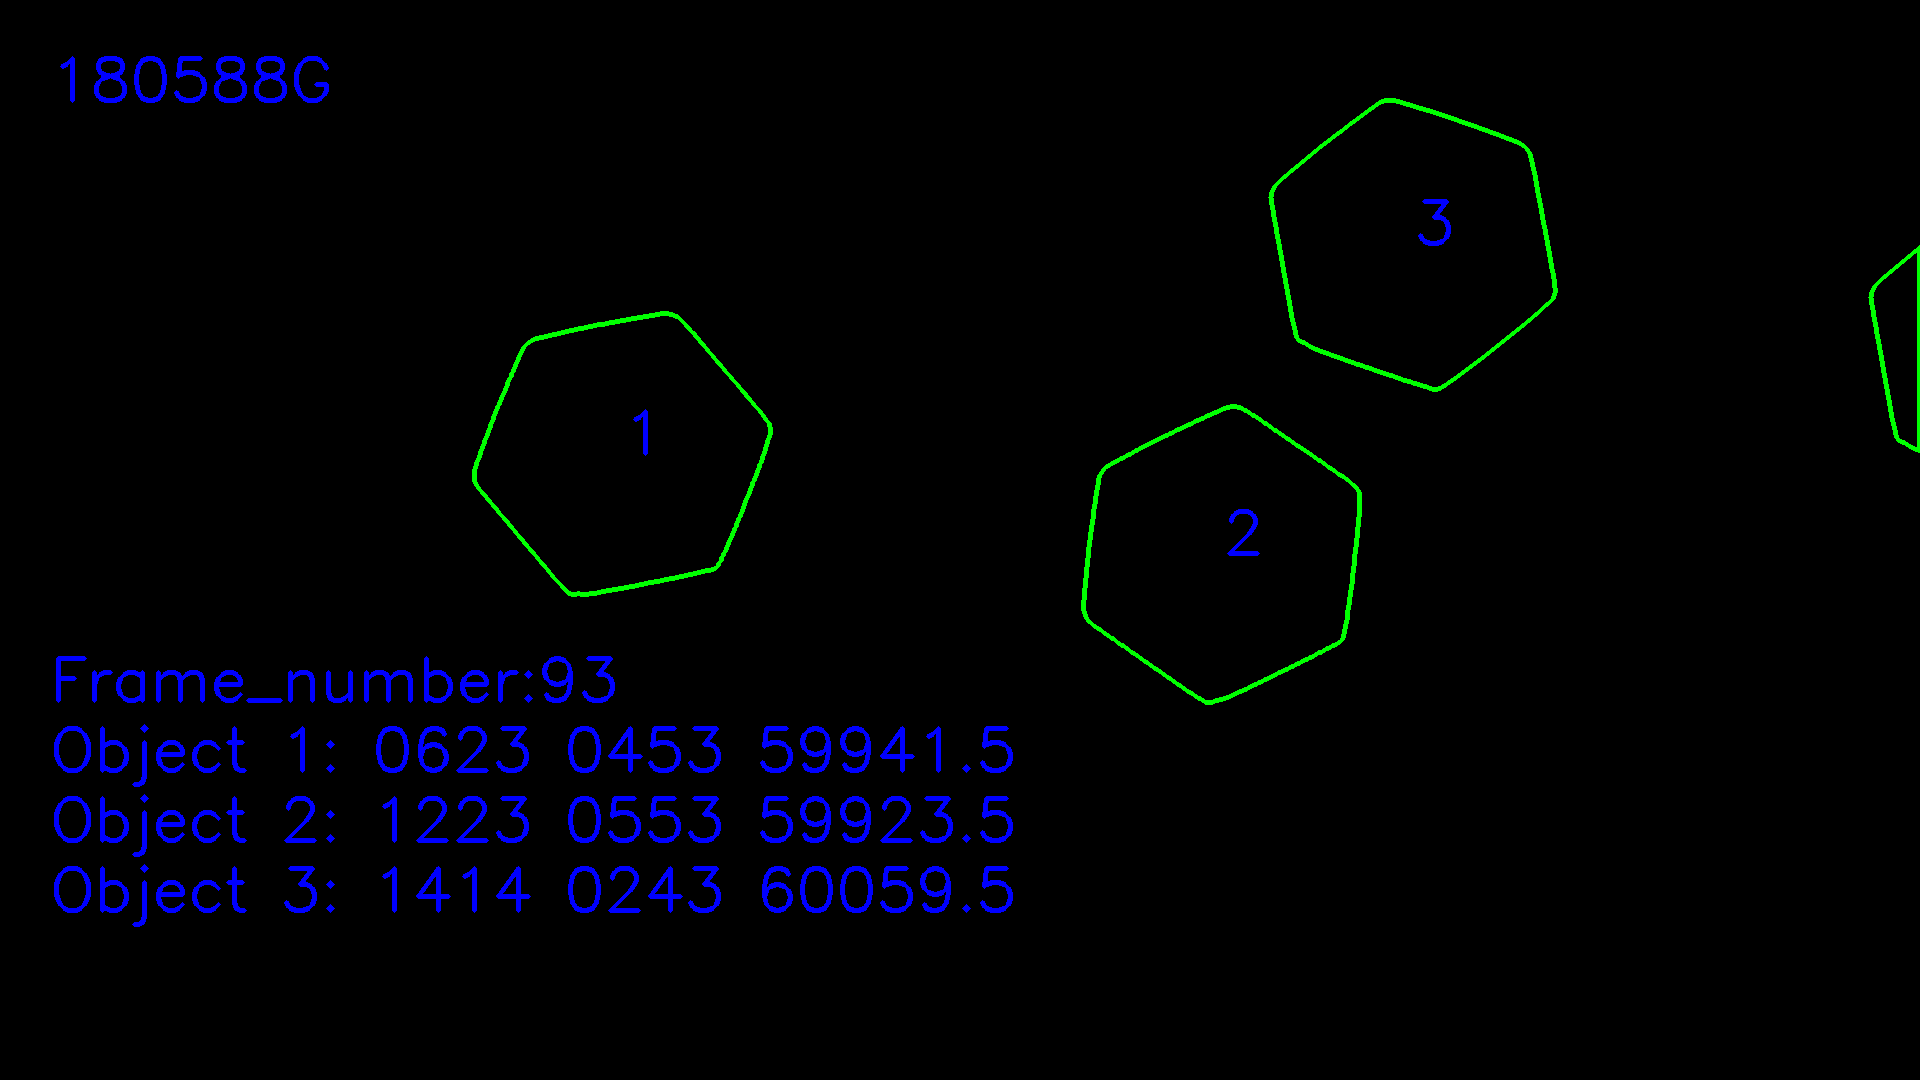

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.13000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.21300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.40400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([6.23000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.22300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.41400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


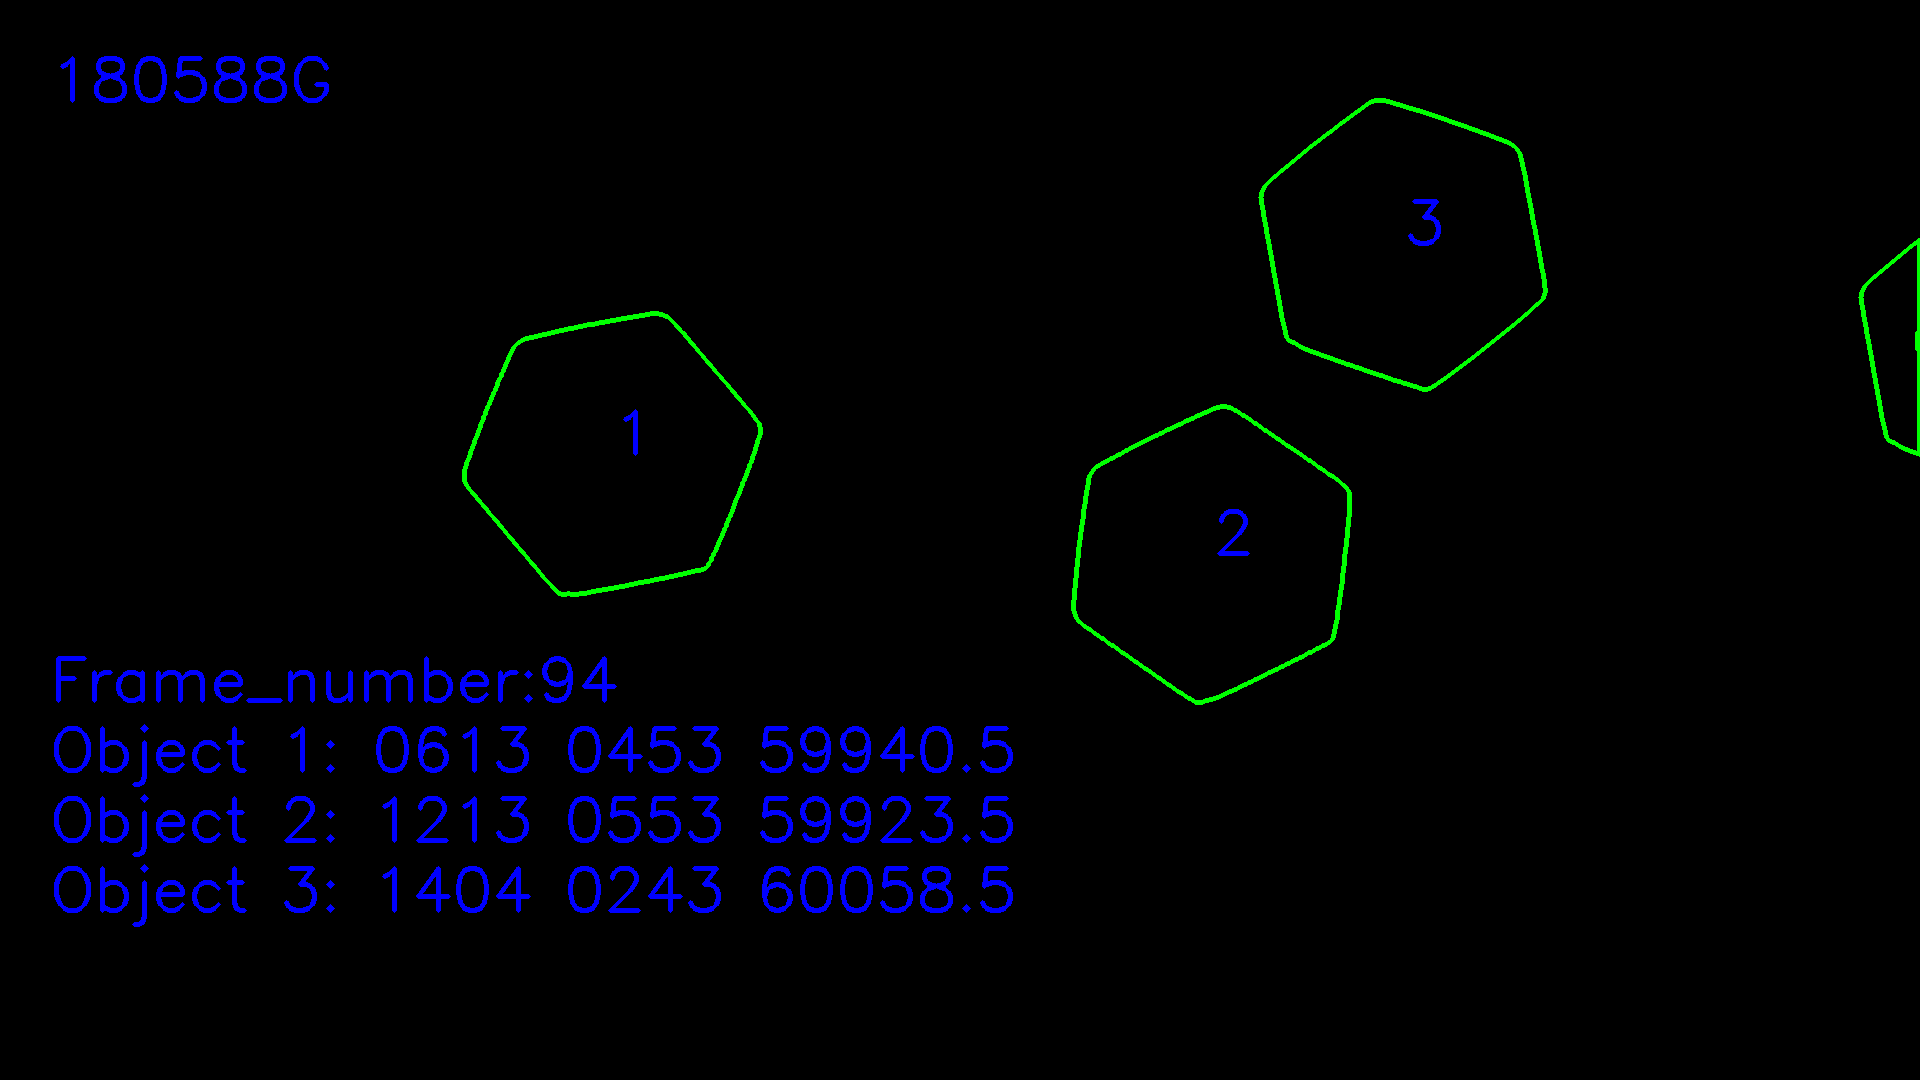

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.03000e+02, 4.53000e+02, 5.99425e+04, 1.00000e+00]), array([1.20300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.39400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([6.13000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.21300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.40400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


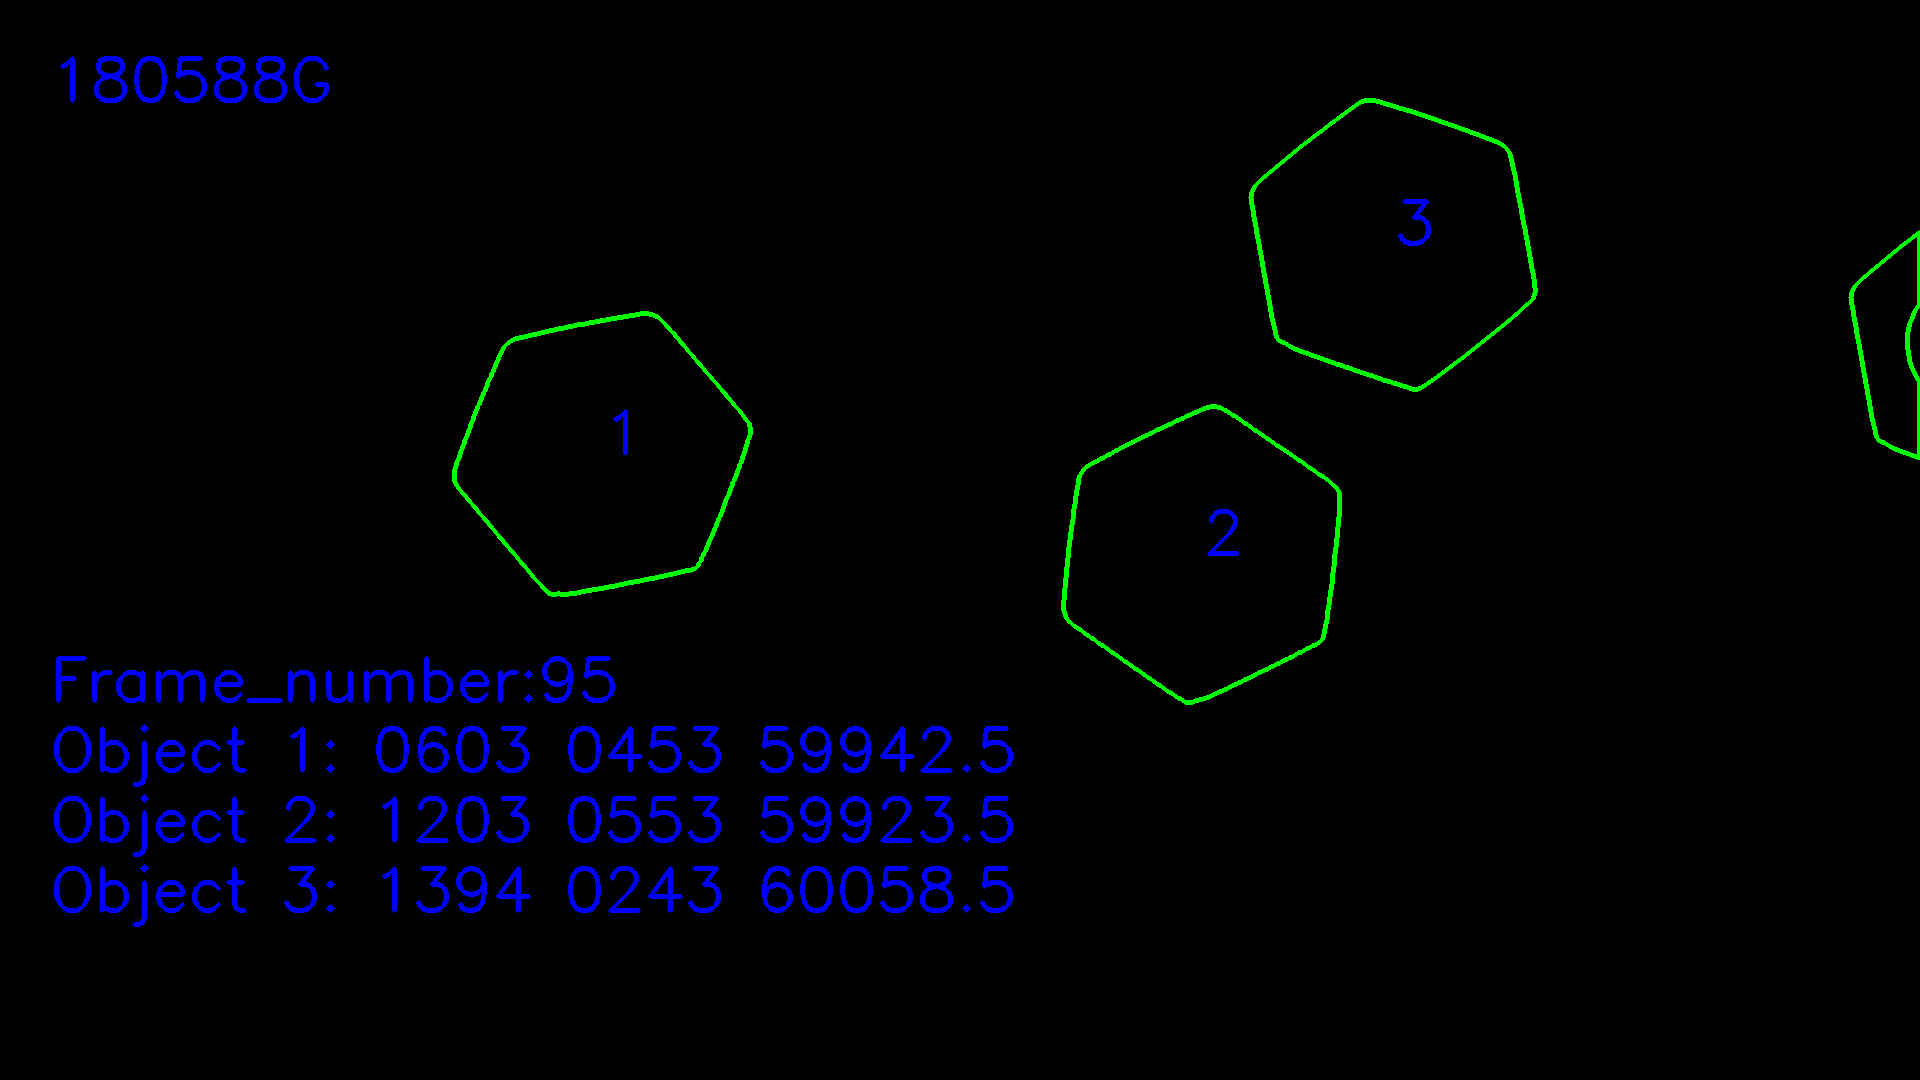

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.93000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.19300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.38400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([6.03000e+02, 4.53000e+02, 5.99425e+04, 1.00000e+00]), array([1.20300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.39400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


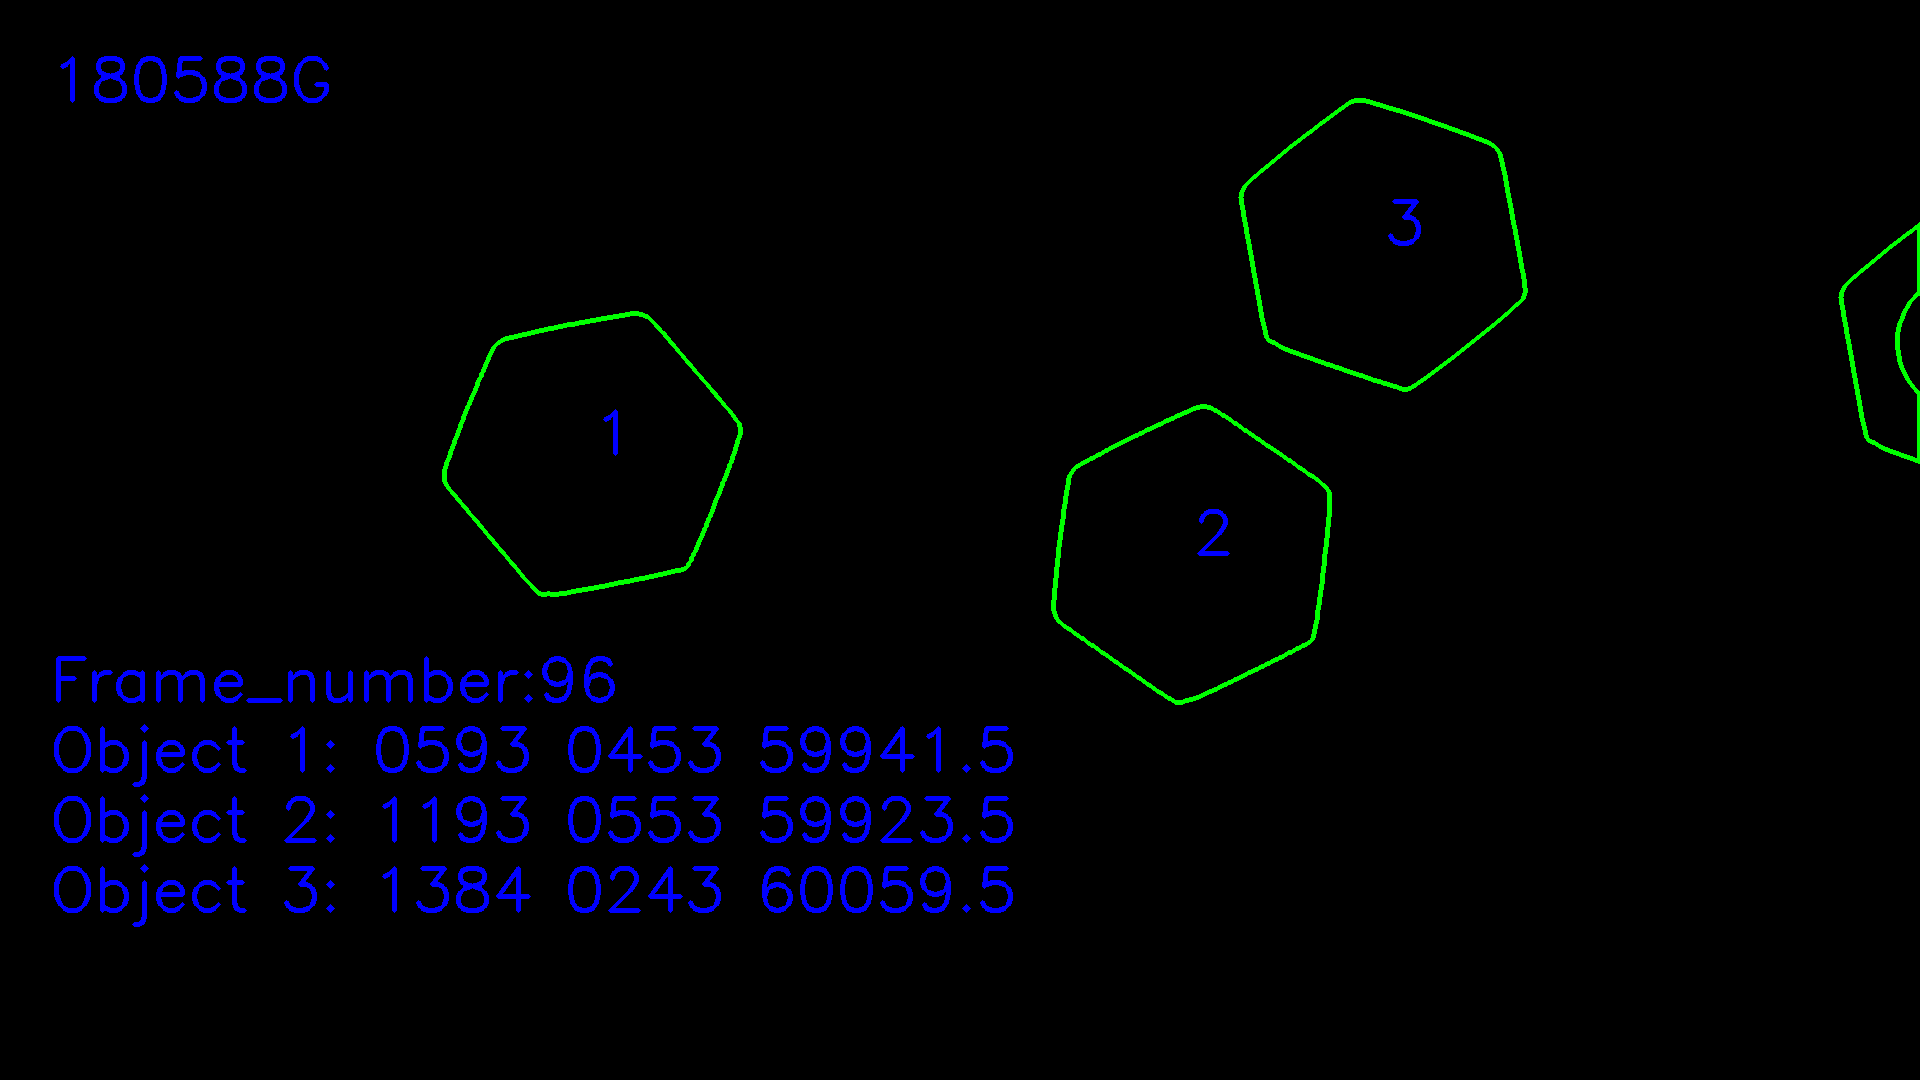

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.18300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.37400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.93000e+02, 4.53000e+02, 5.99415e+04, 1.00000e+00]), array([1.19300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.38400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


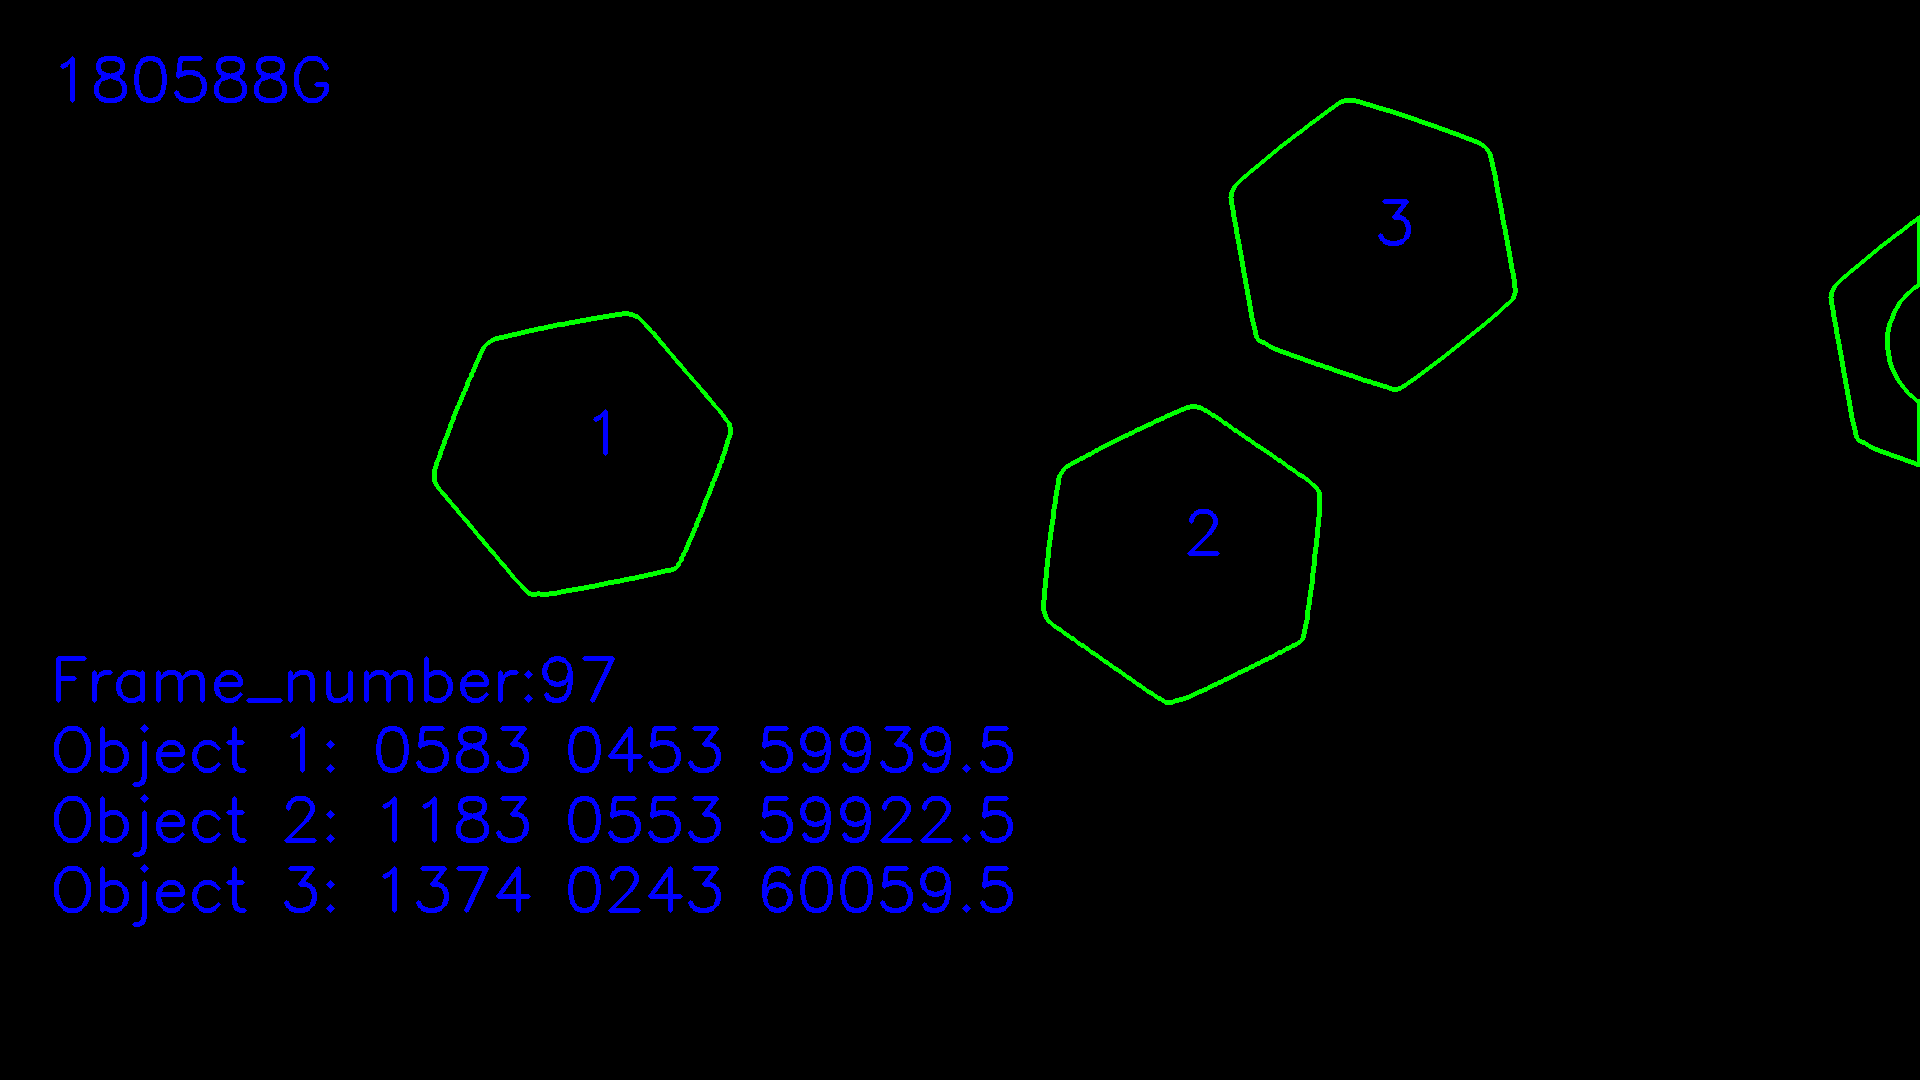

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.73000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.17300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.36400e+03, 2.43000e+02, 6.00575e+04, 3.00000e+00])]
Previousframe [array([5.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.18300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.37400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


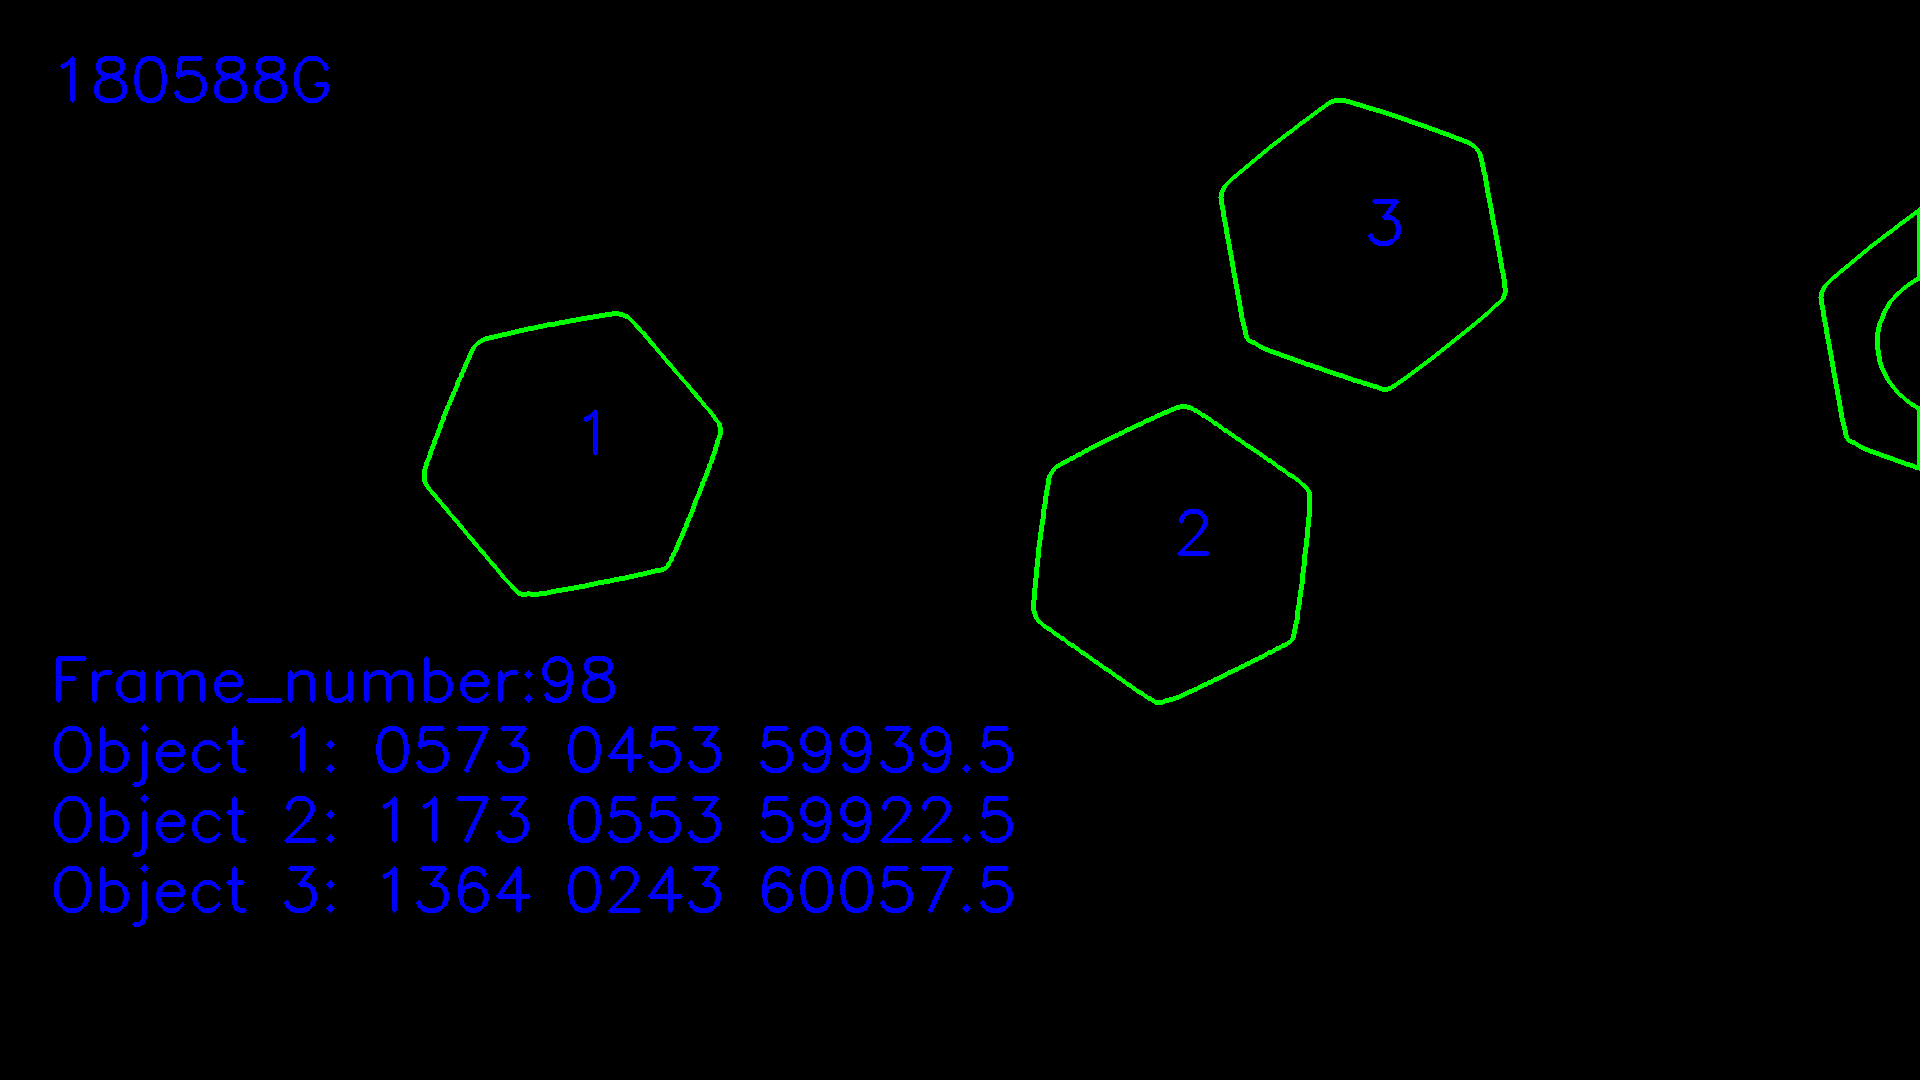

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.63000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.16300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.35400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.73000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.17300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.36400e+03, 2.43000e+02, 6.00575e+04, 3.00000e+00])]


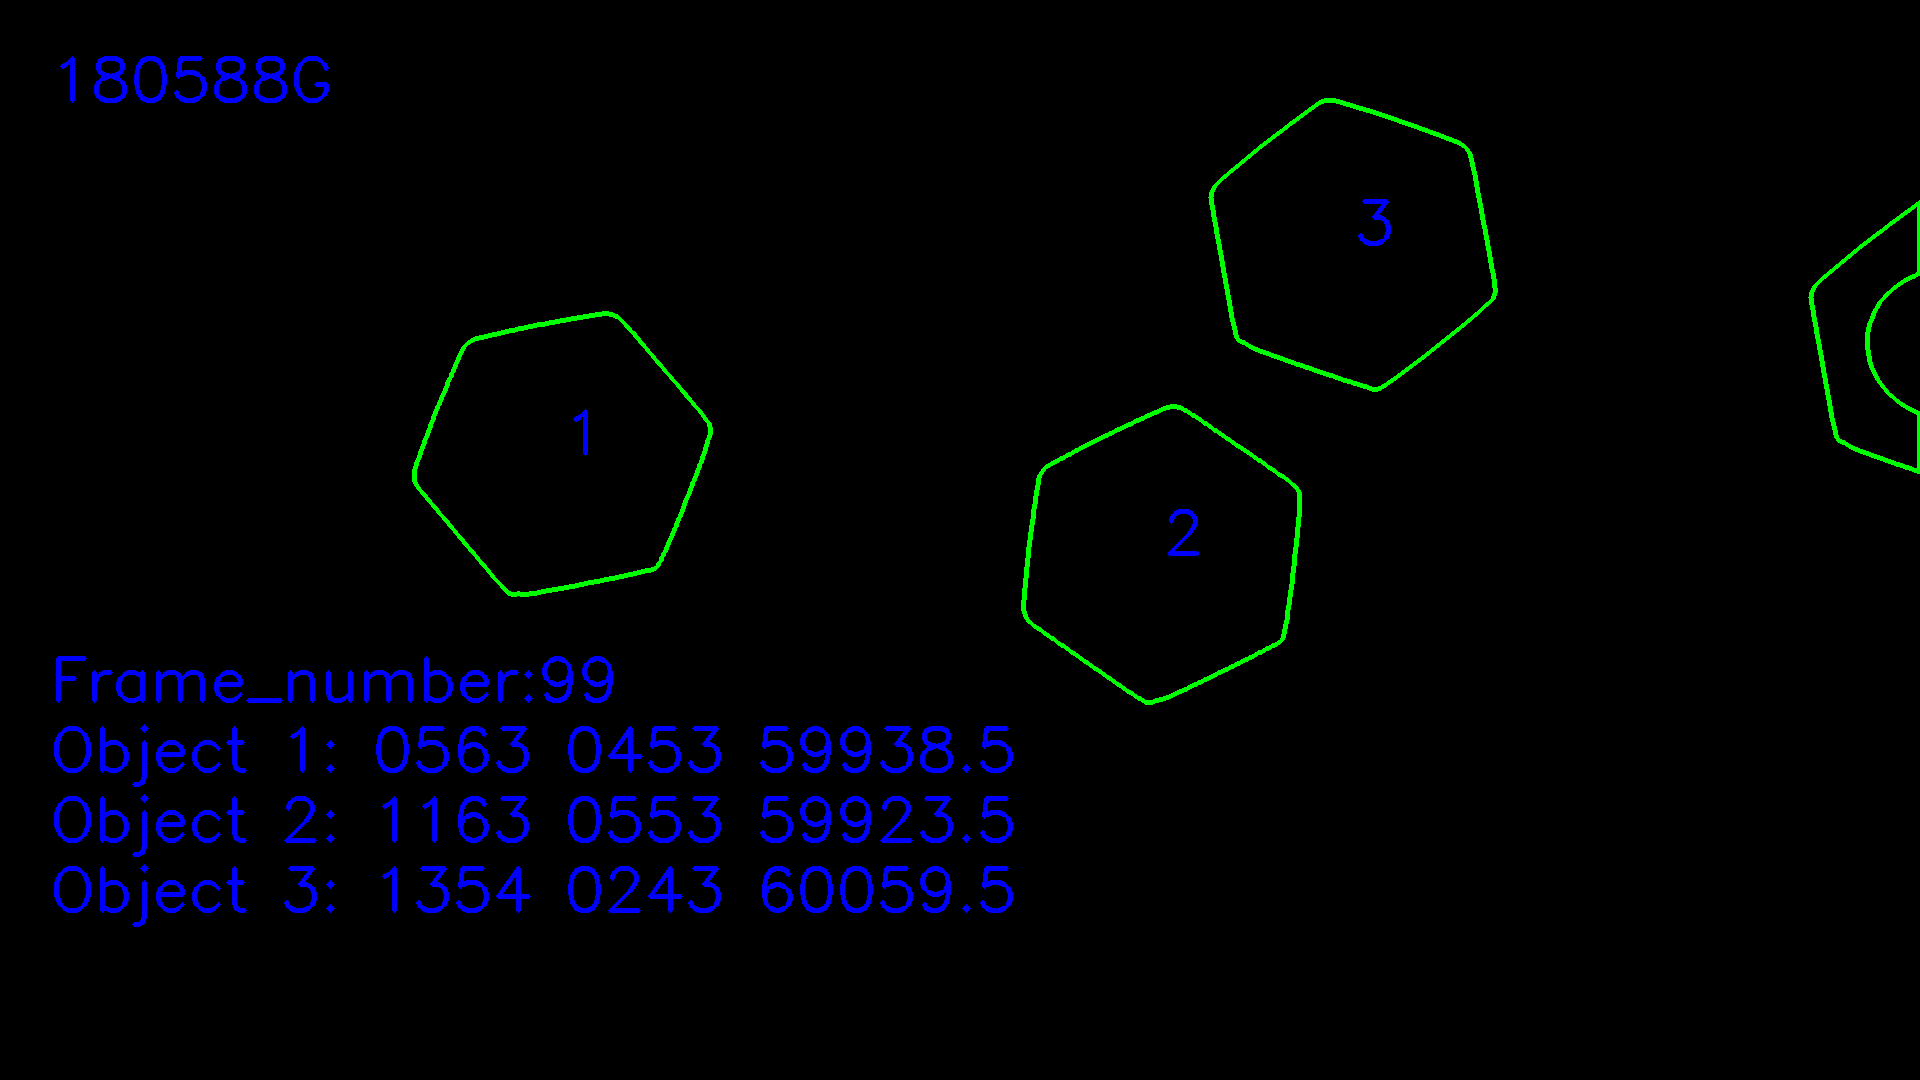

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.15300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.34400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([5.63000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.16300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.35400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


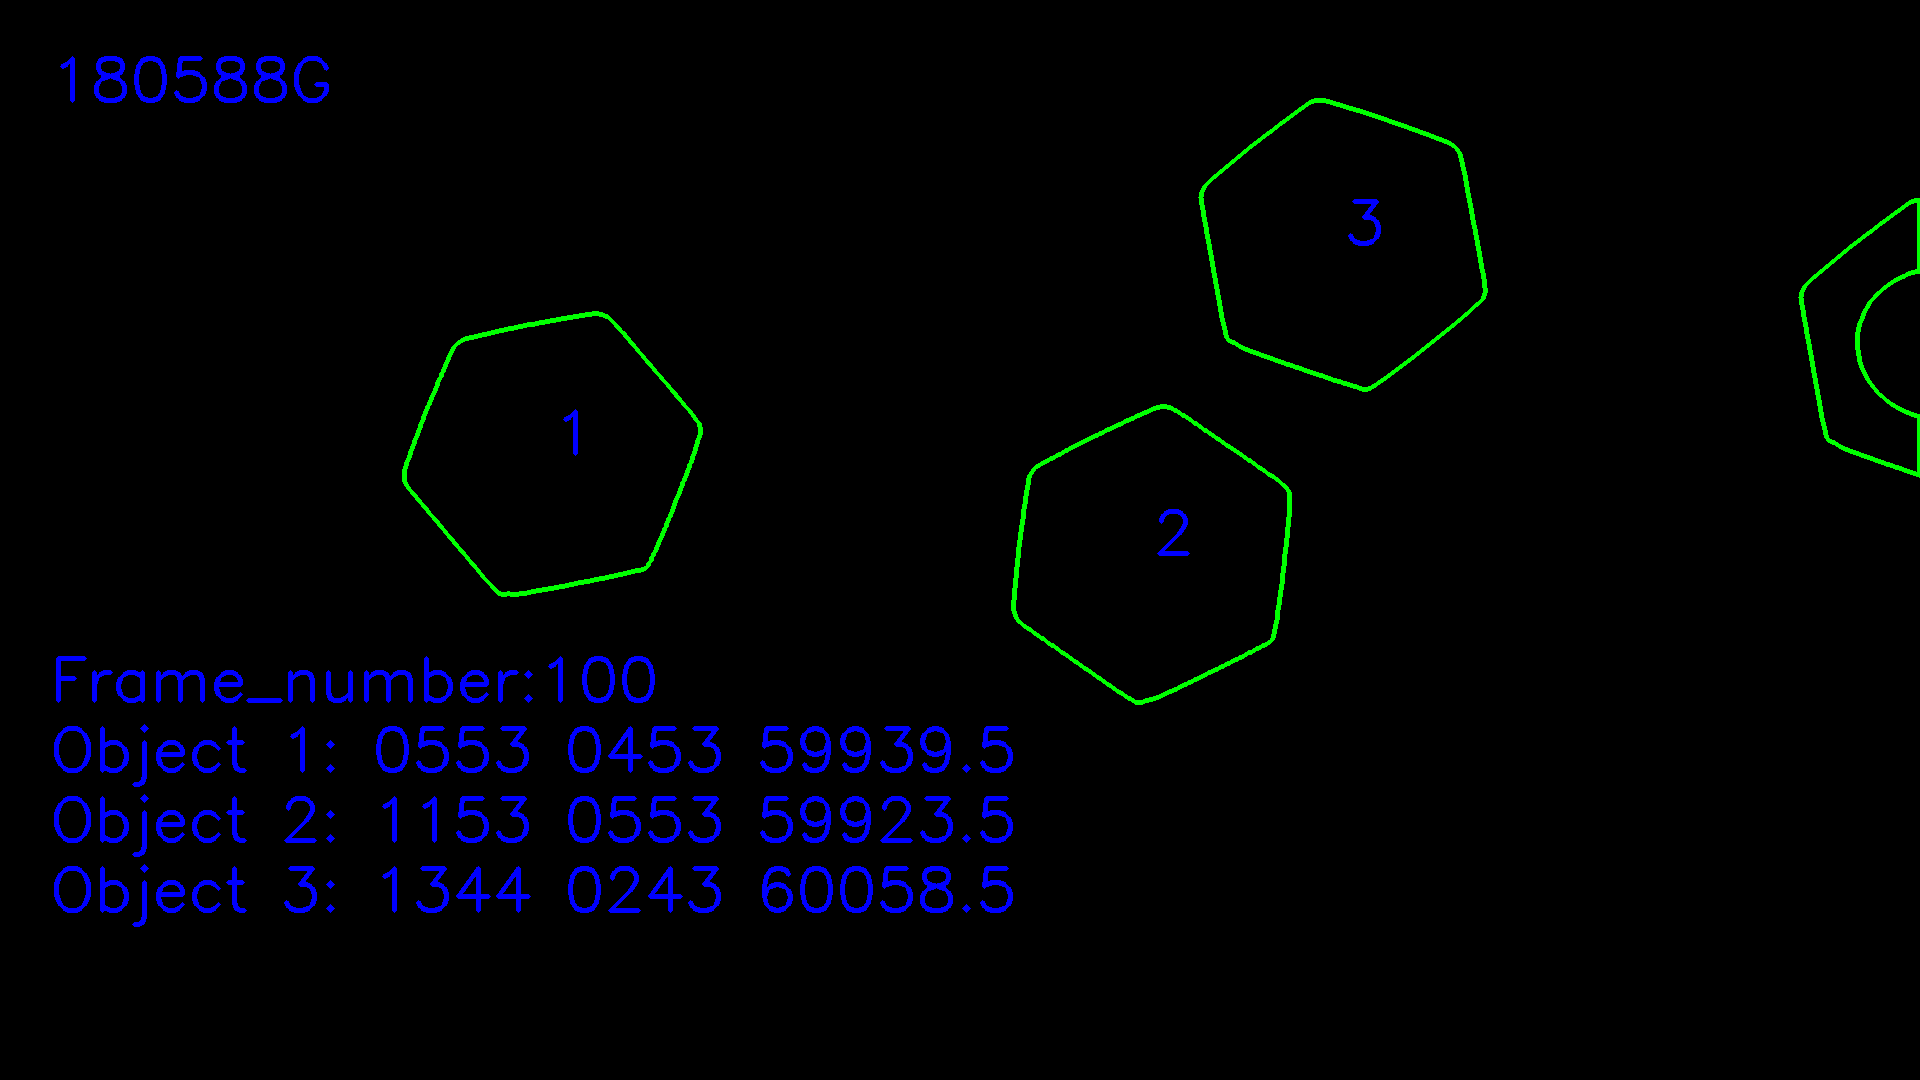

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.43000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.14300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.33400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.15300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.34400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


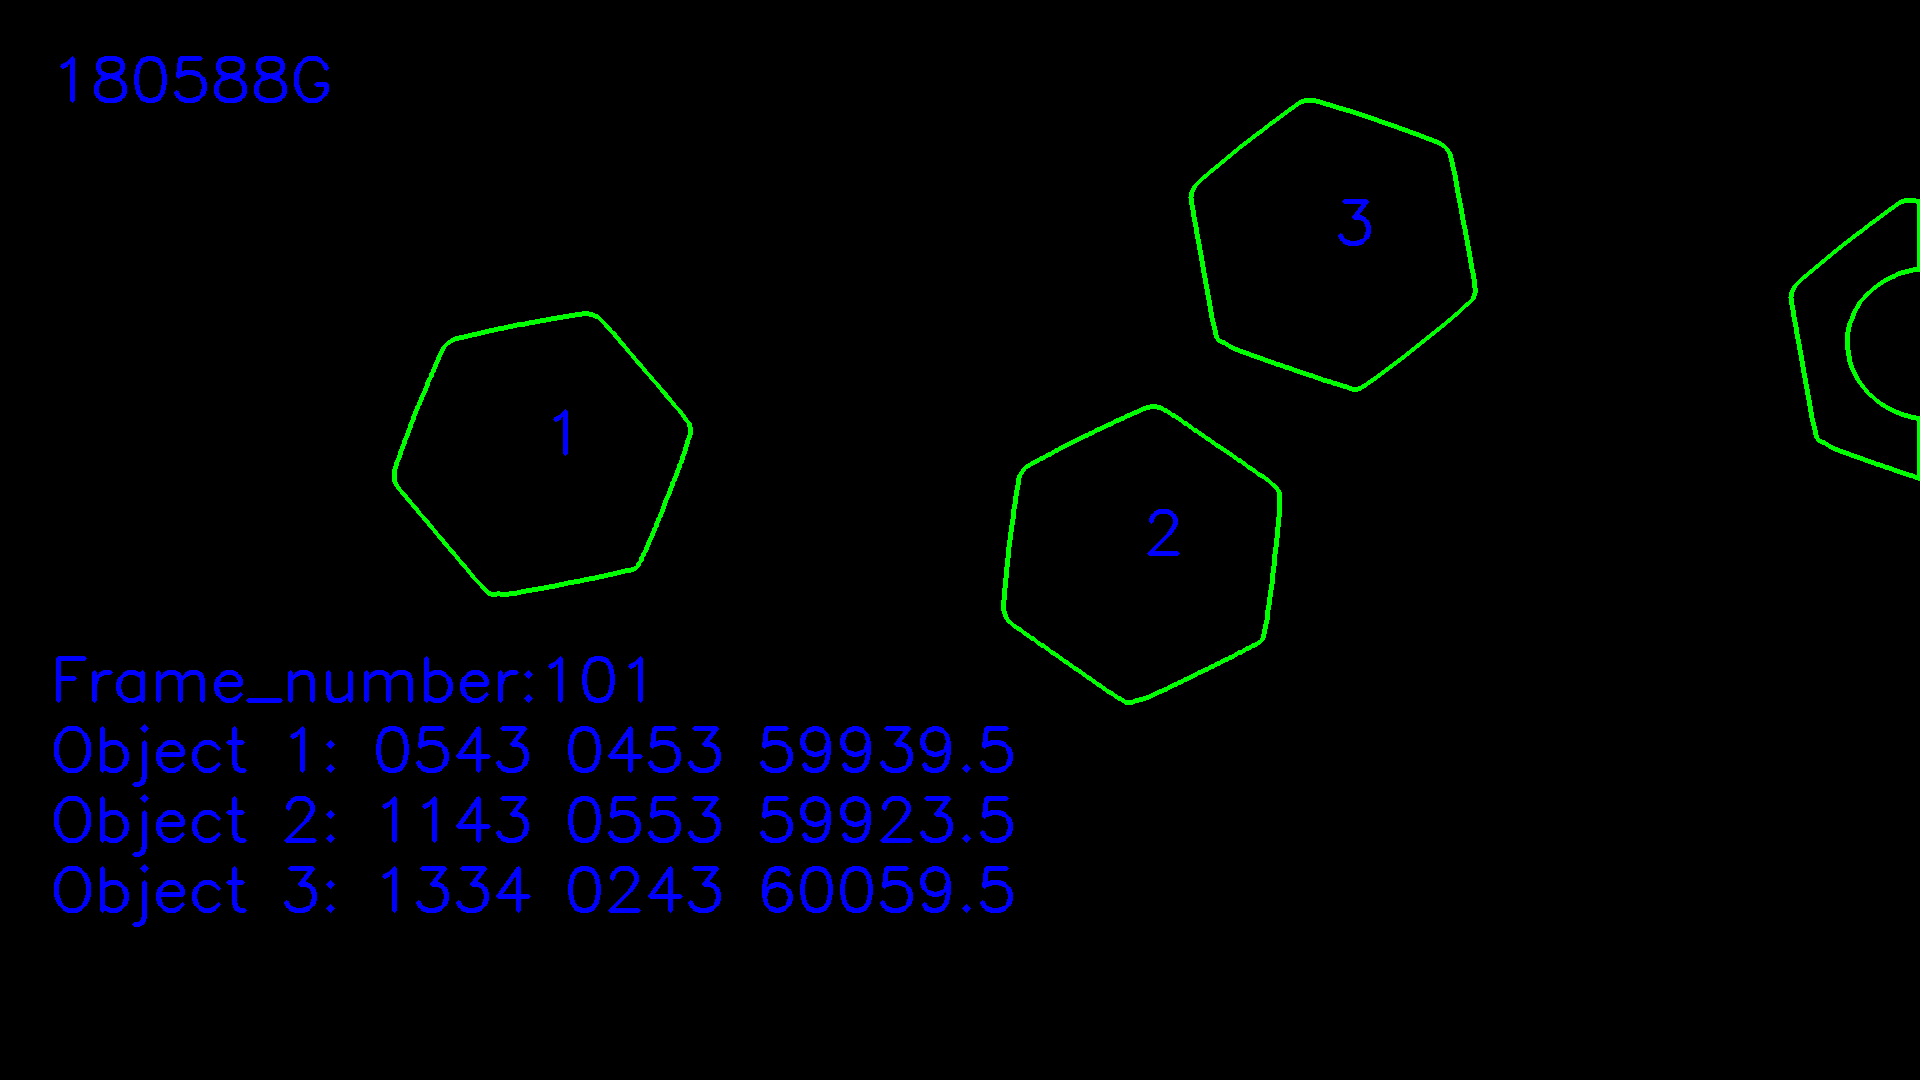

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.33000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.13300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.32400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.43000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.14300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.33400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


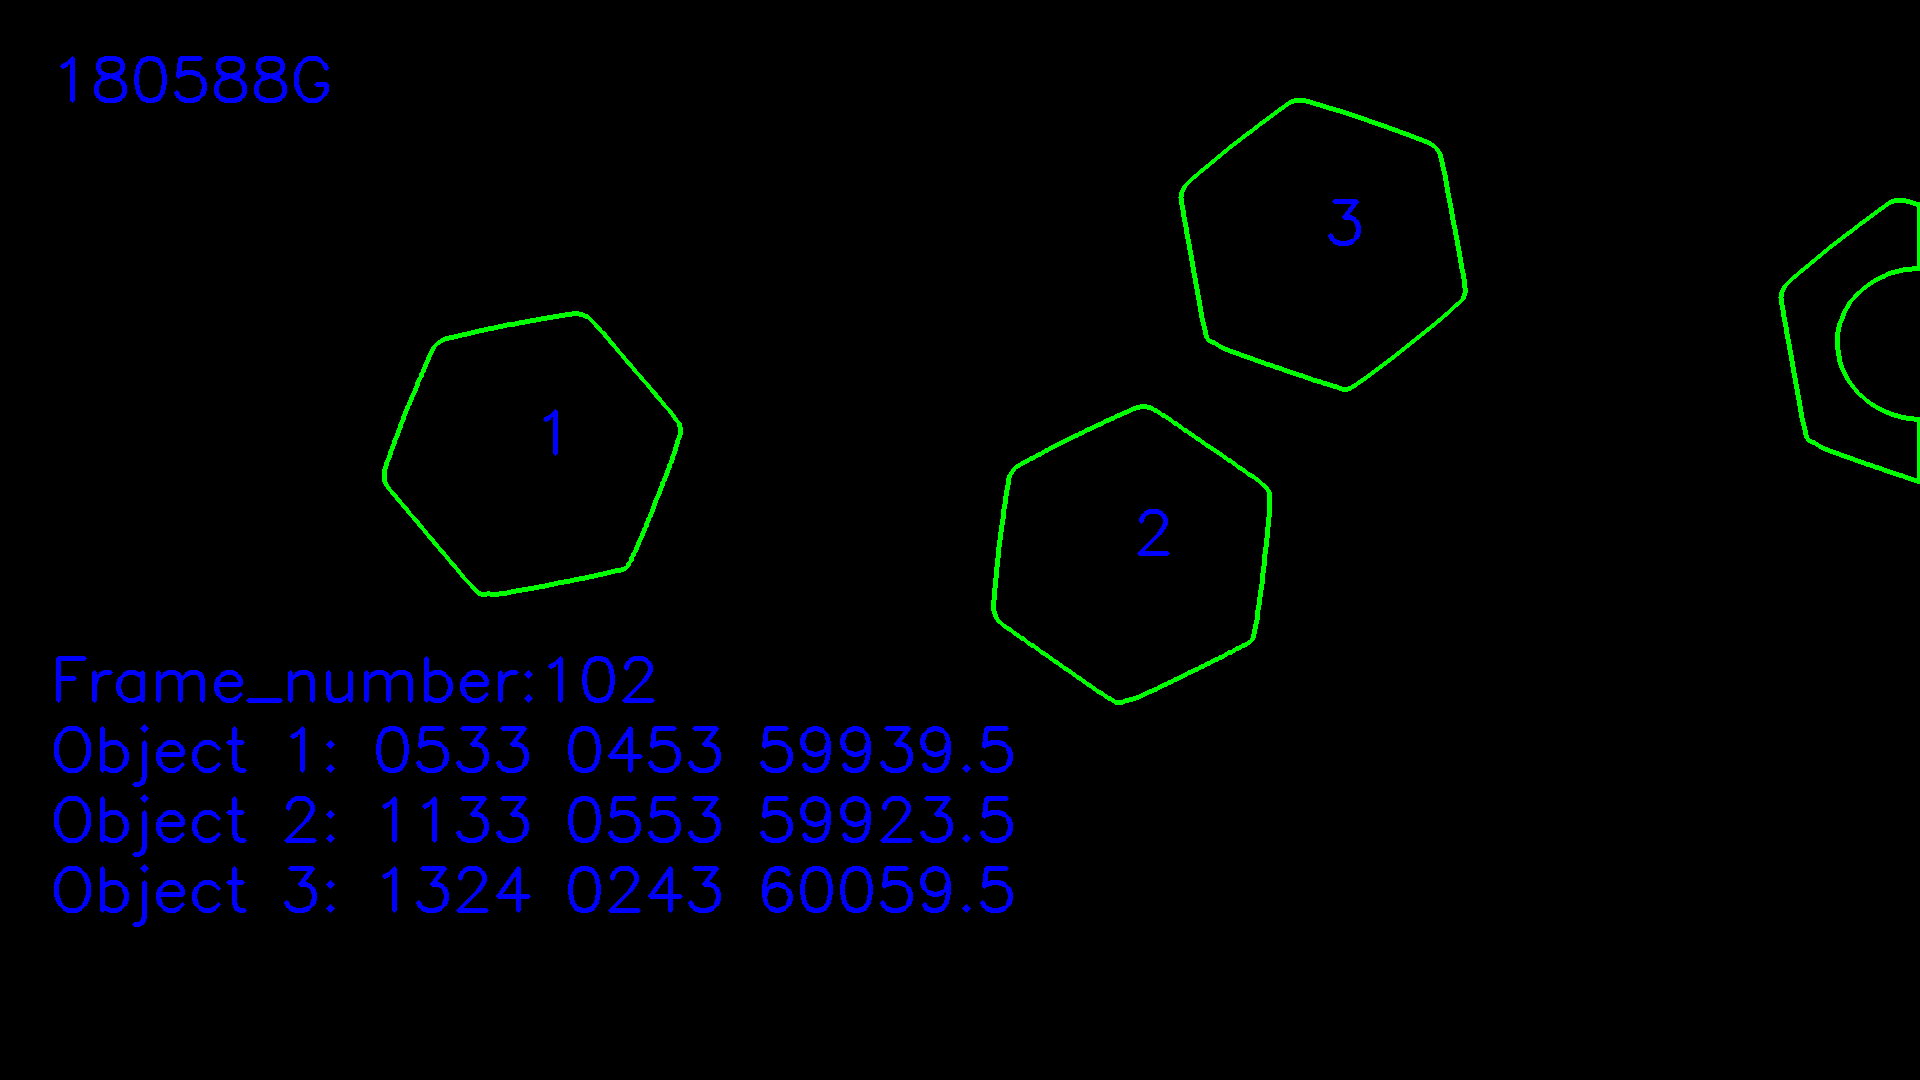

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.23000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.12300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.31400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.33000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.13300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.32400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


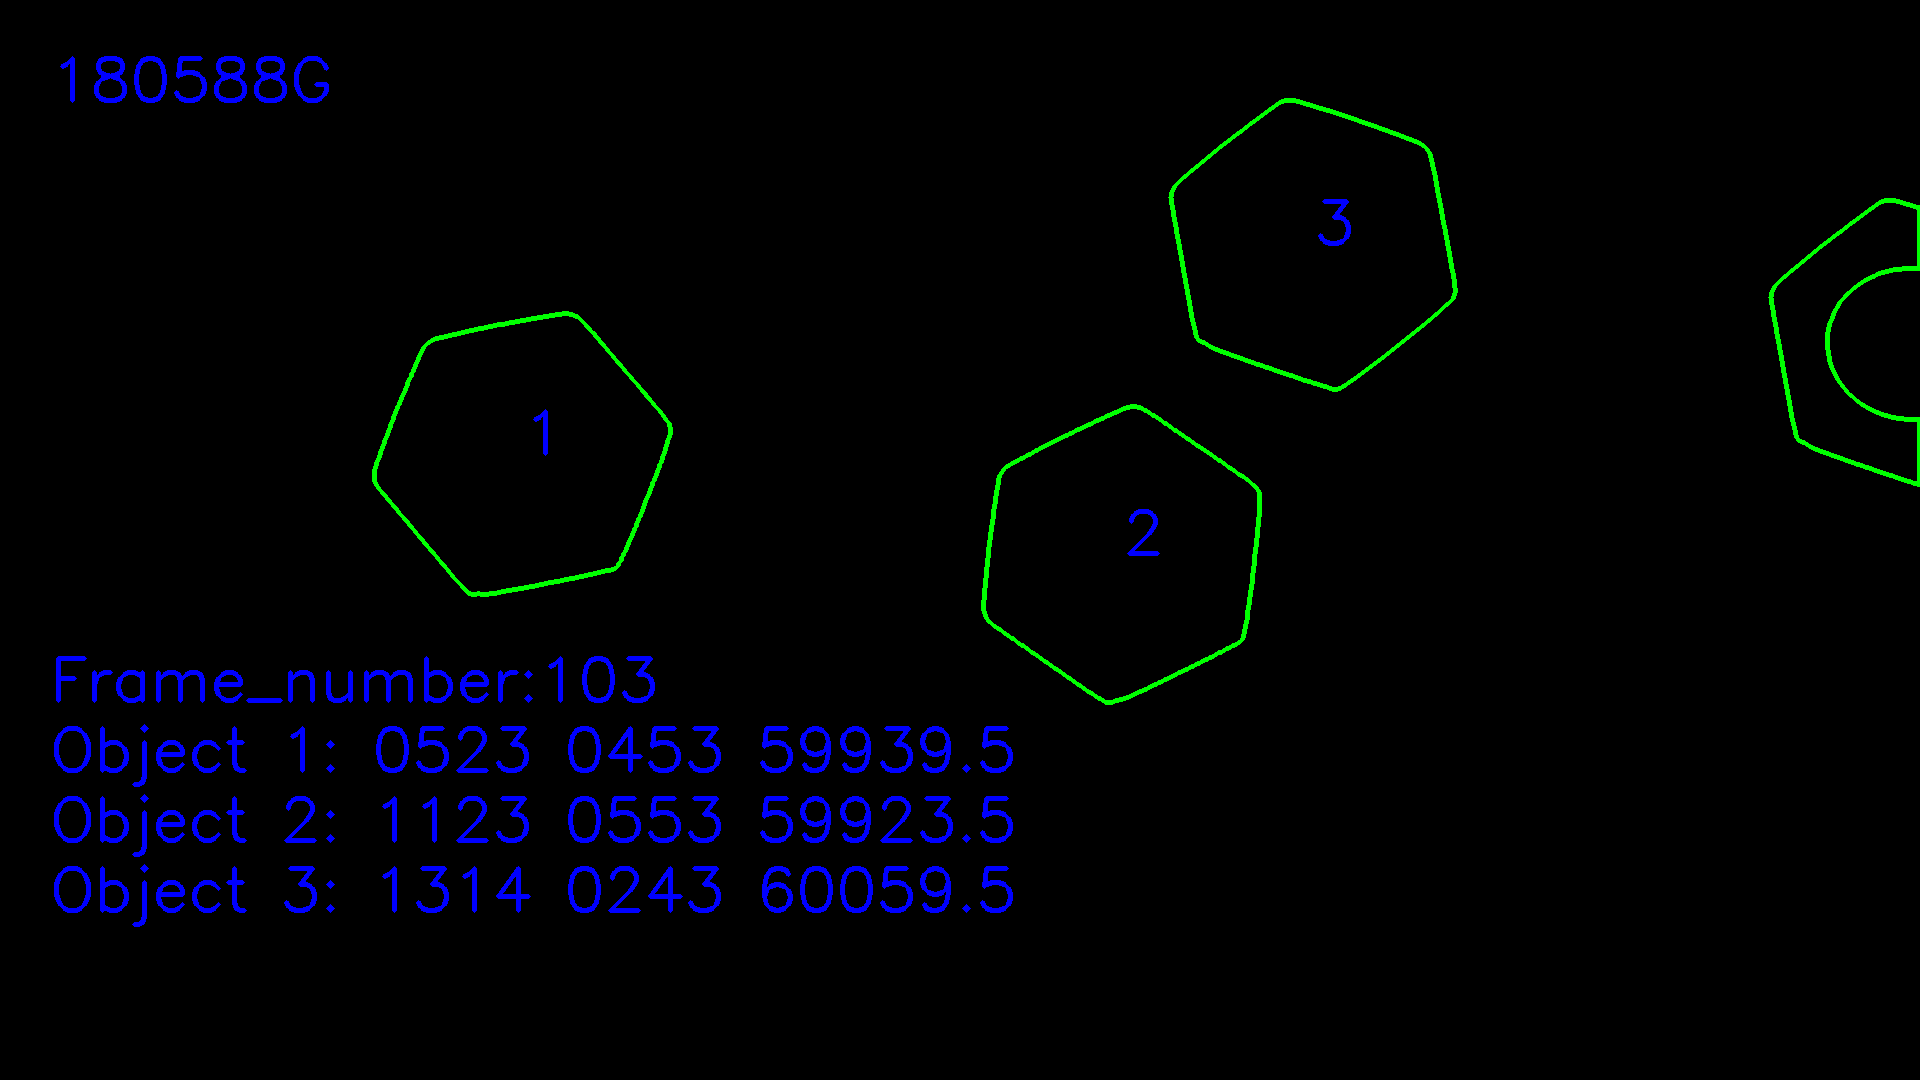

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.13000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.11300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.30400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.23000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.12300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.31400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


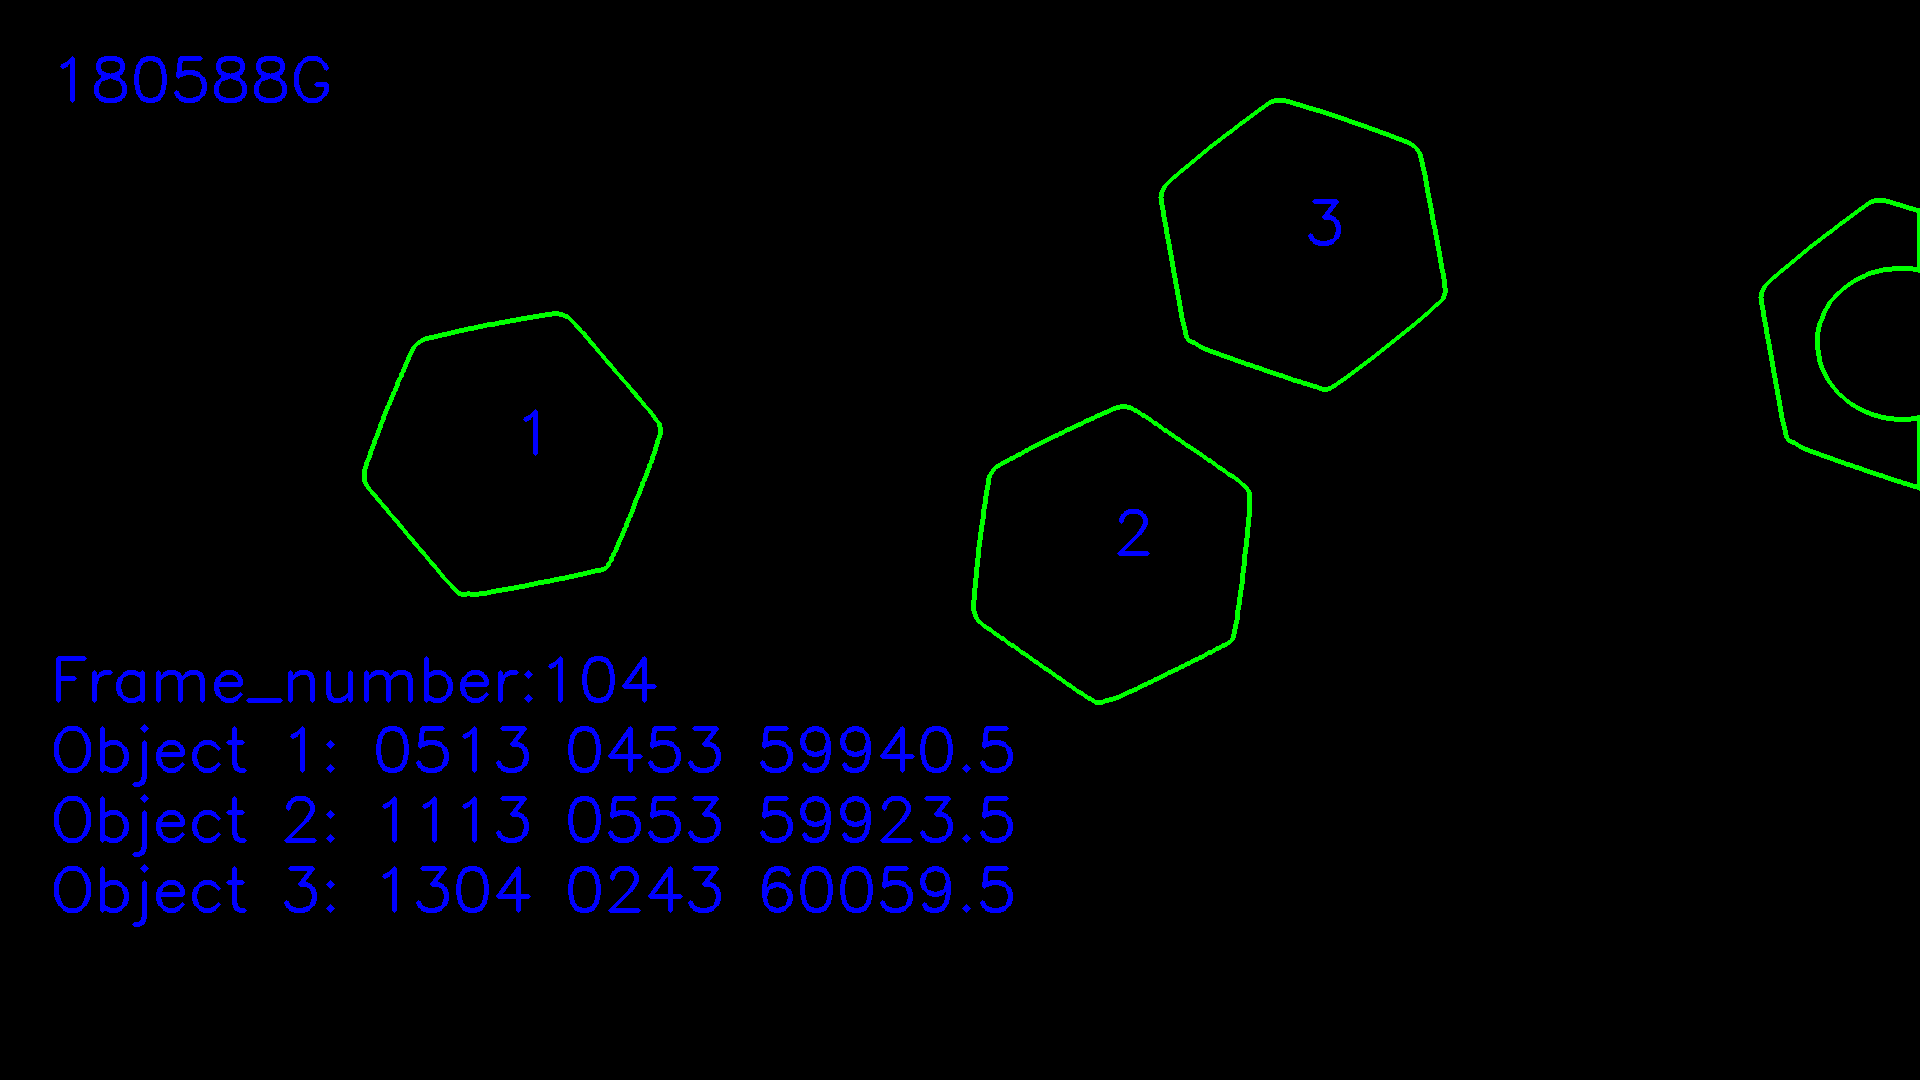

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.03000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.10300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.29400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.13000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.11300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.30400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


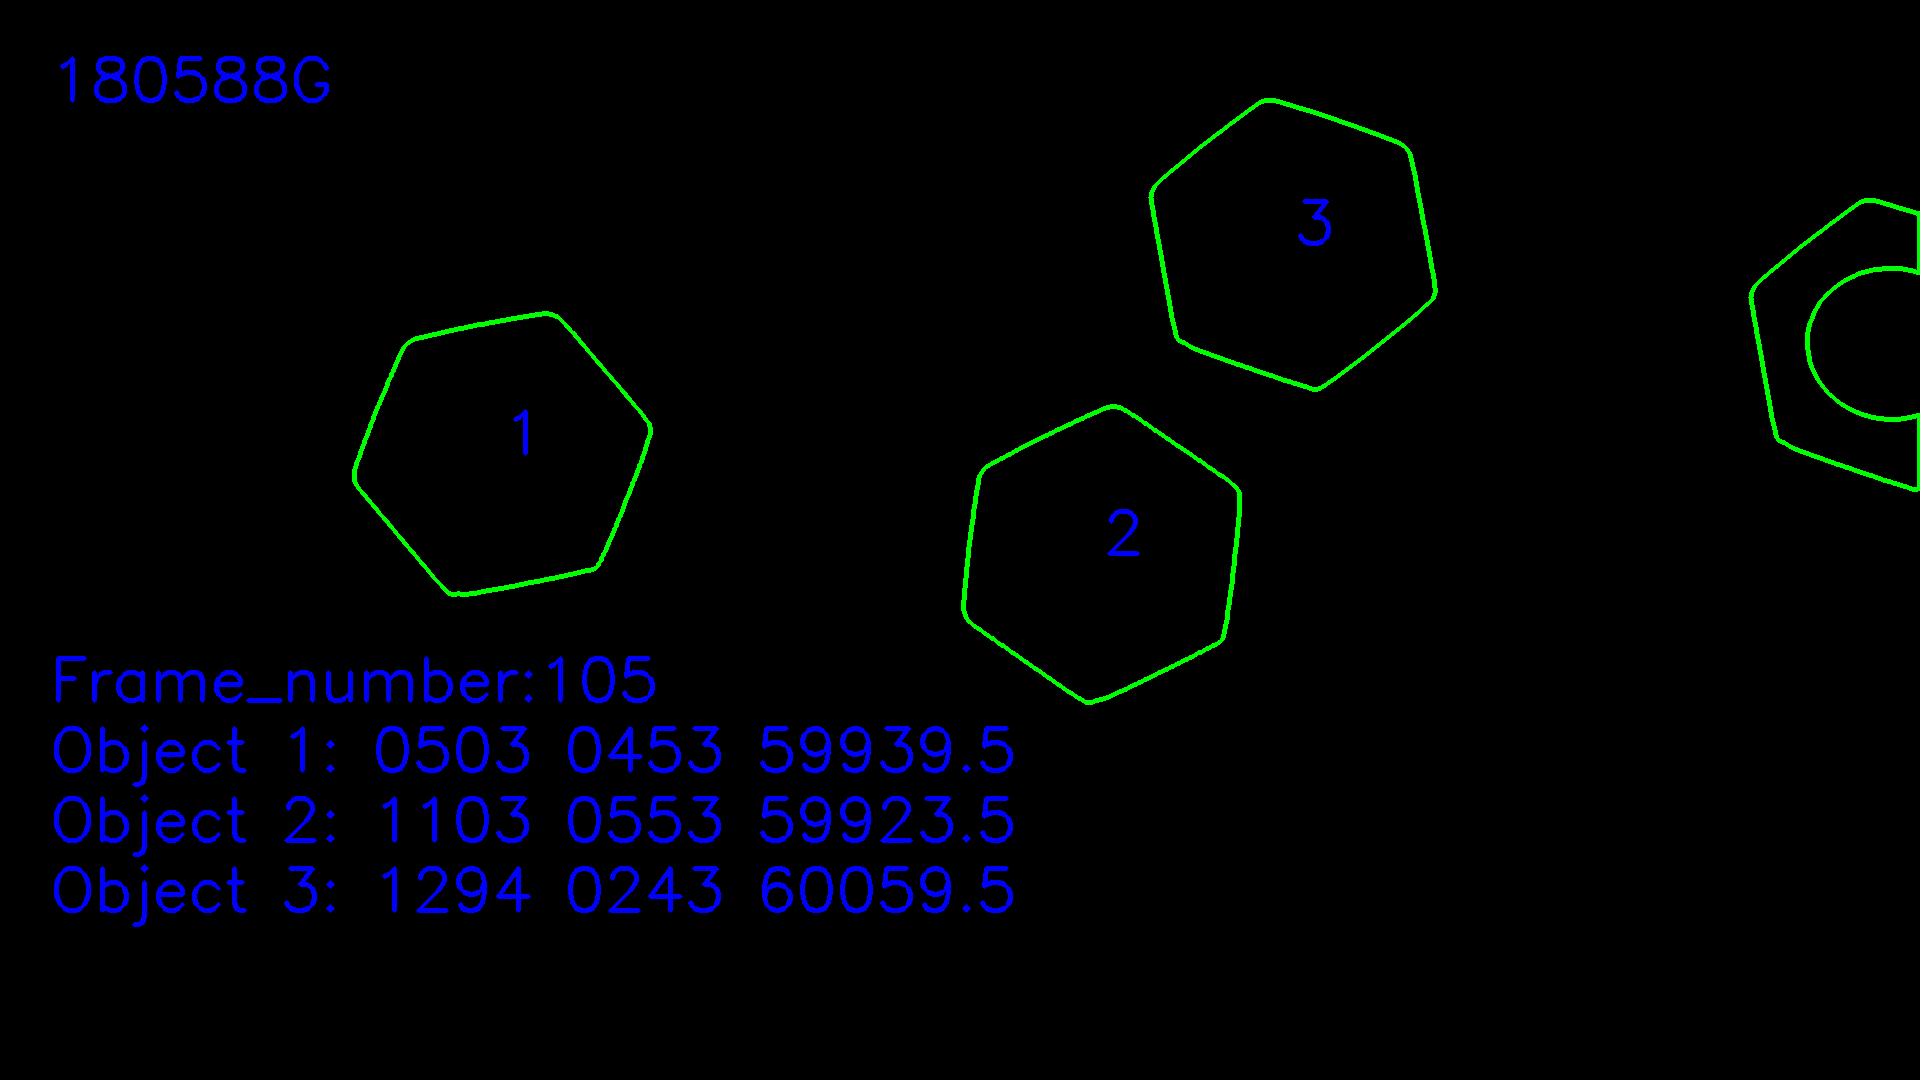

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.93000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.09300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.28400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([5.03000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.10300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.29400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


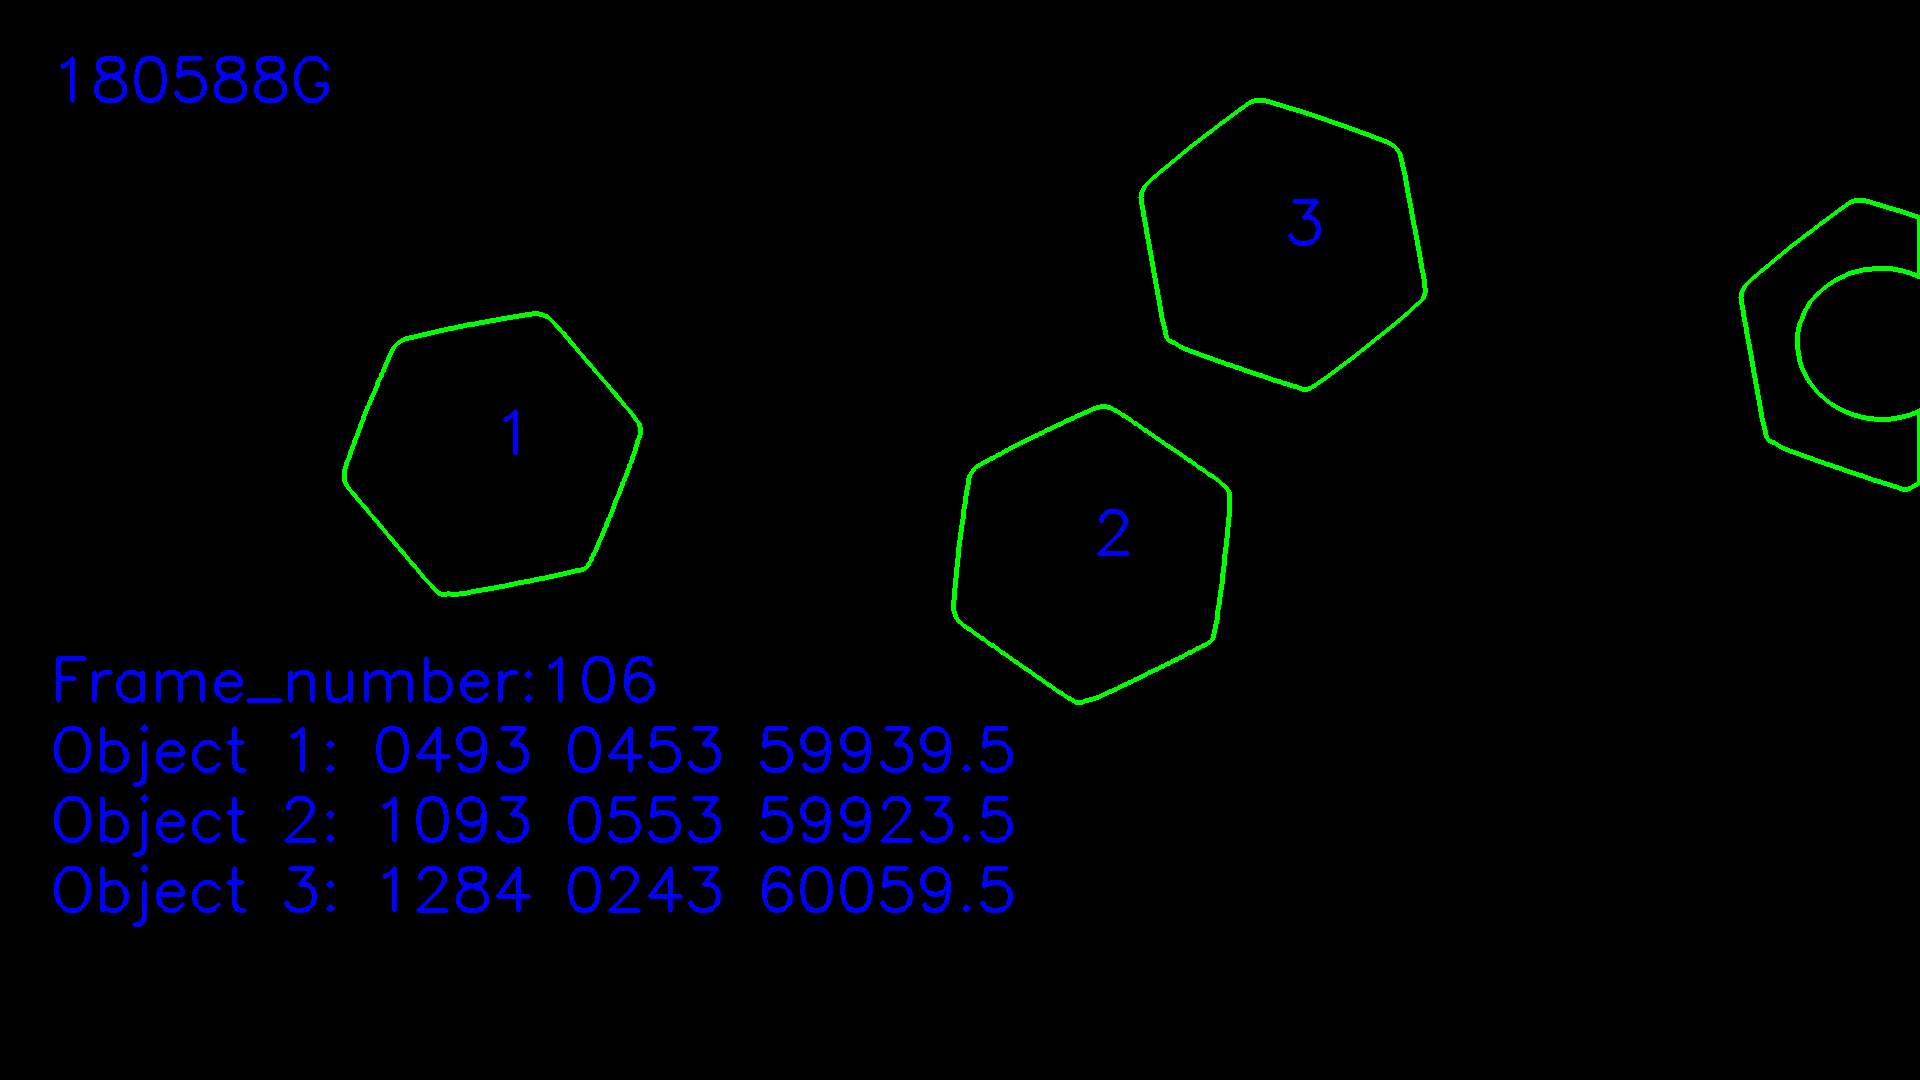

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.08300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.27400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([4.93000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.09300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.28400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


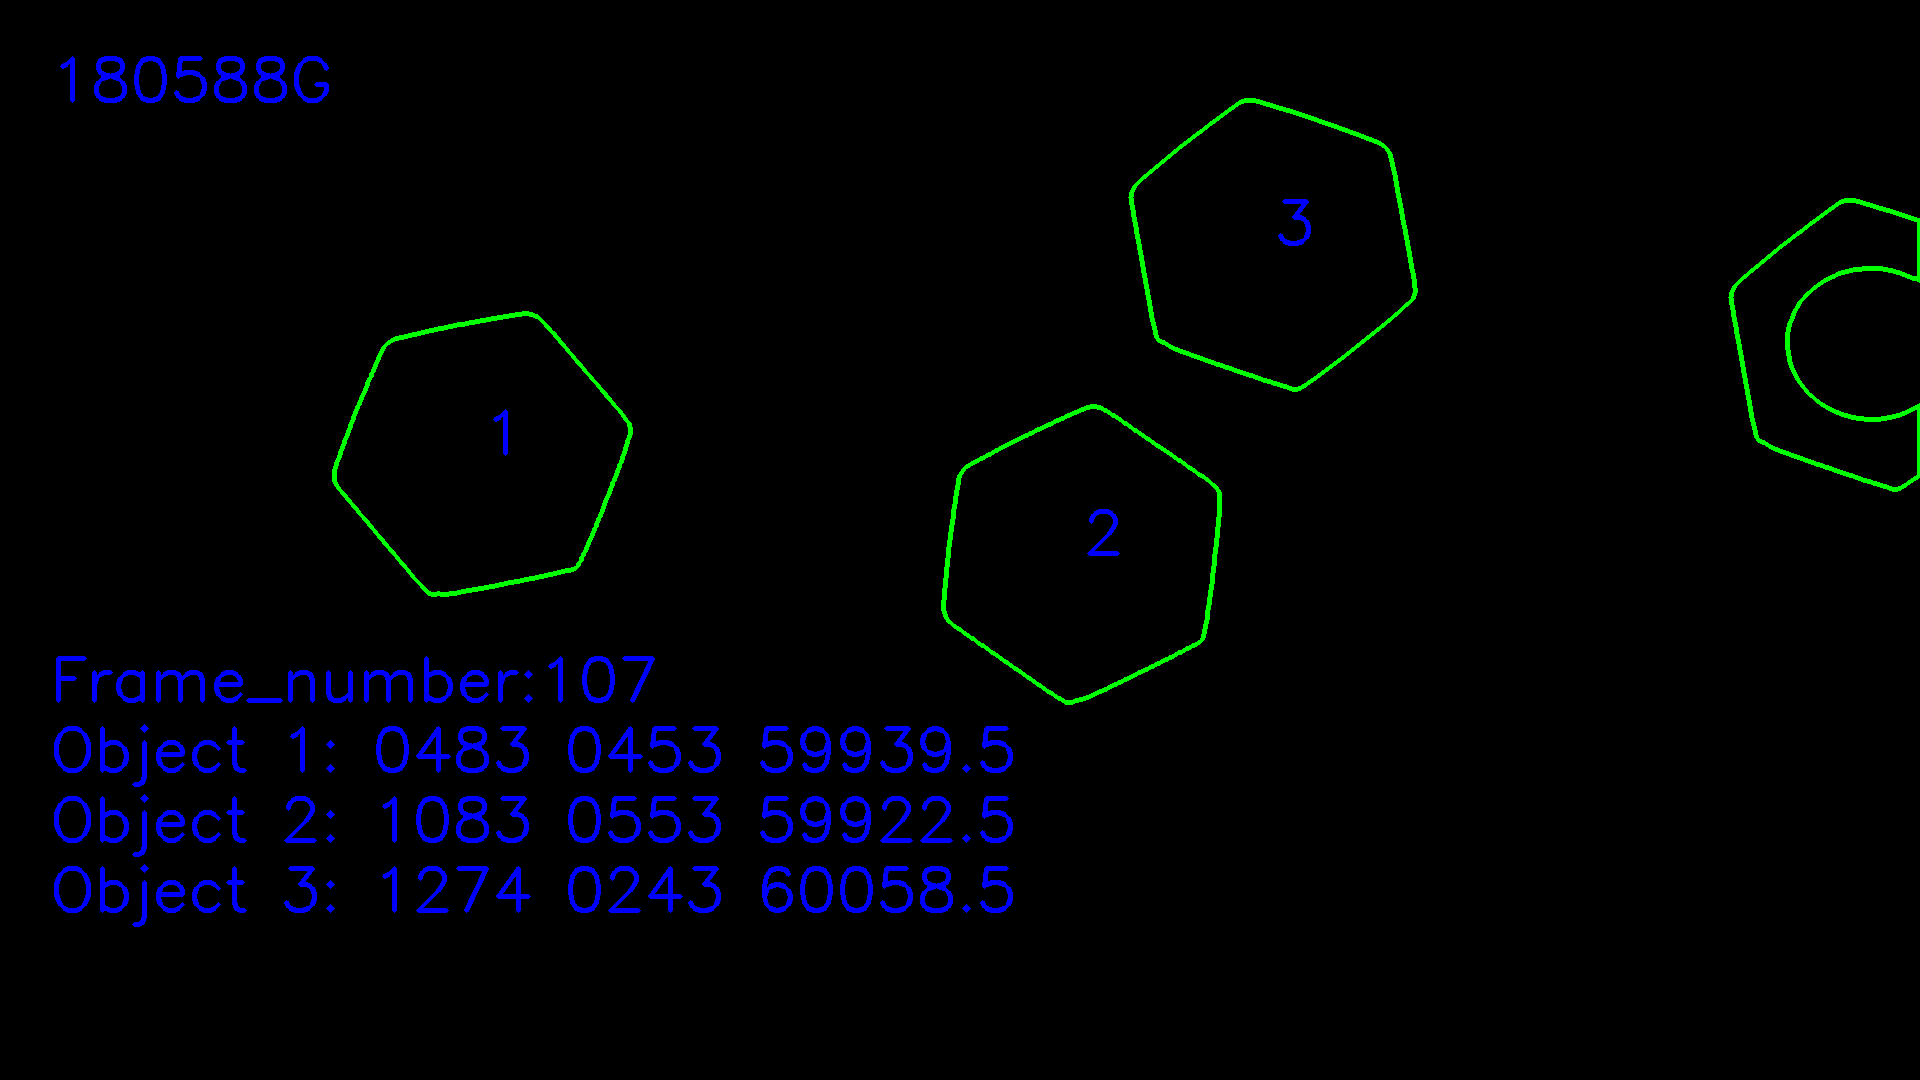

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.73000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.07300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.26400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([4.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.08300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.27400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


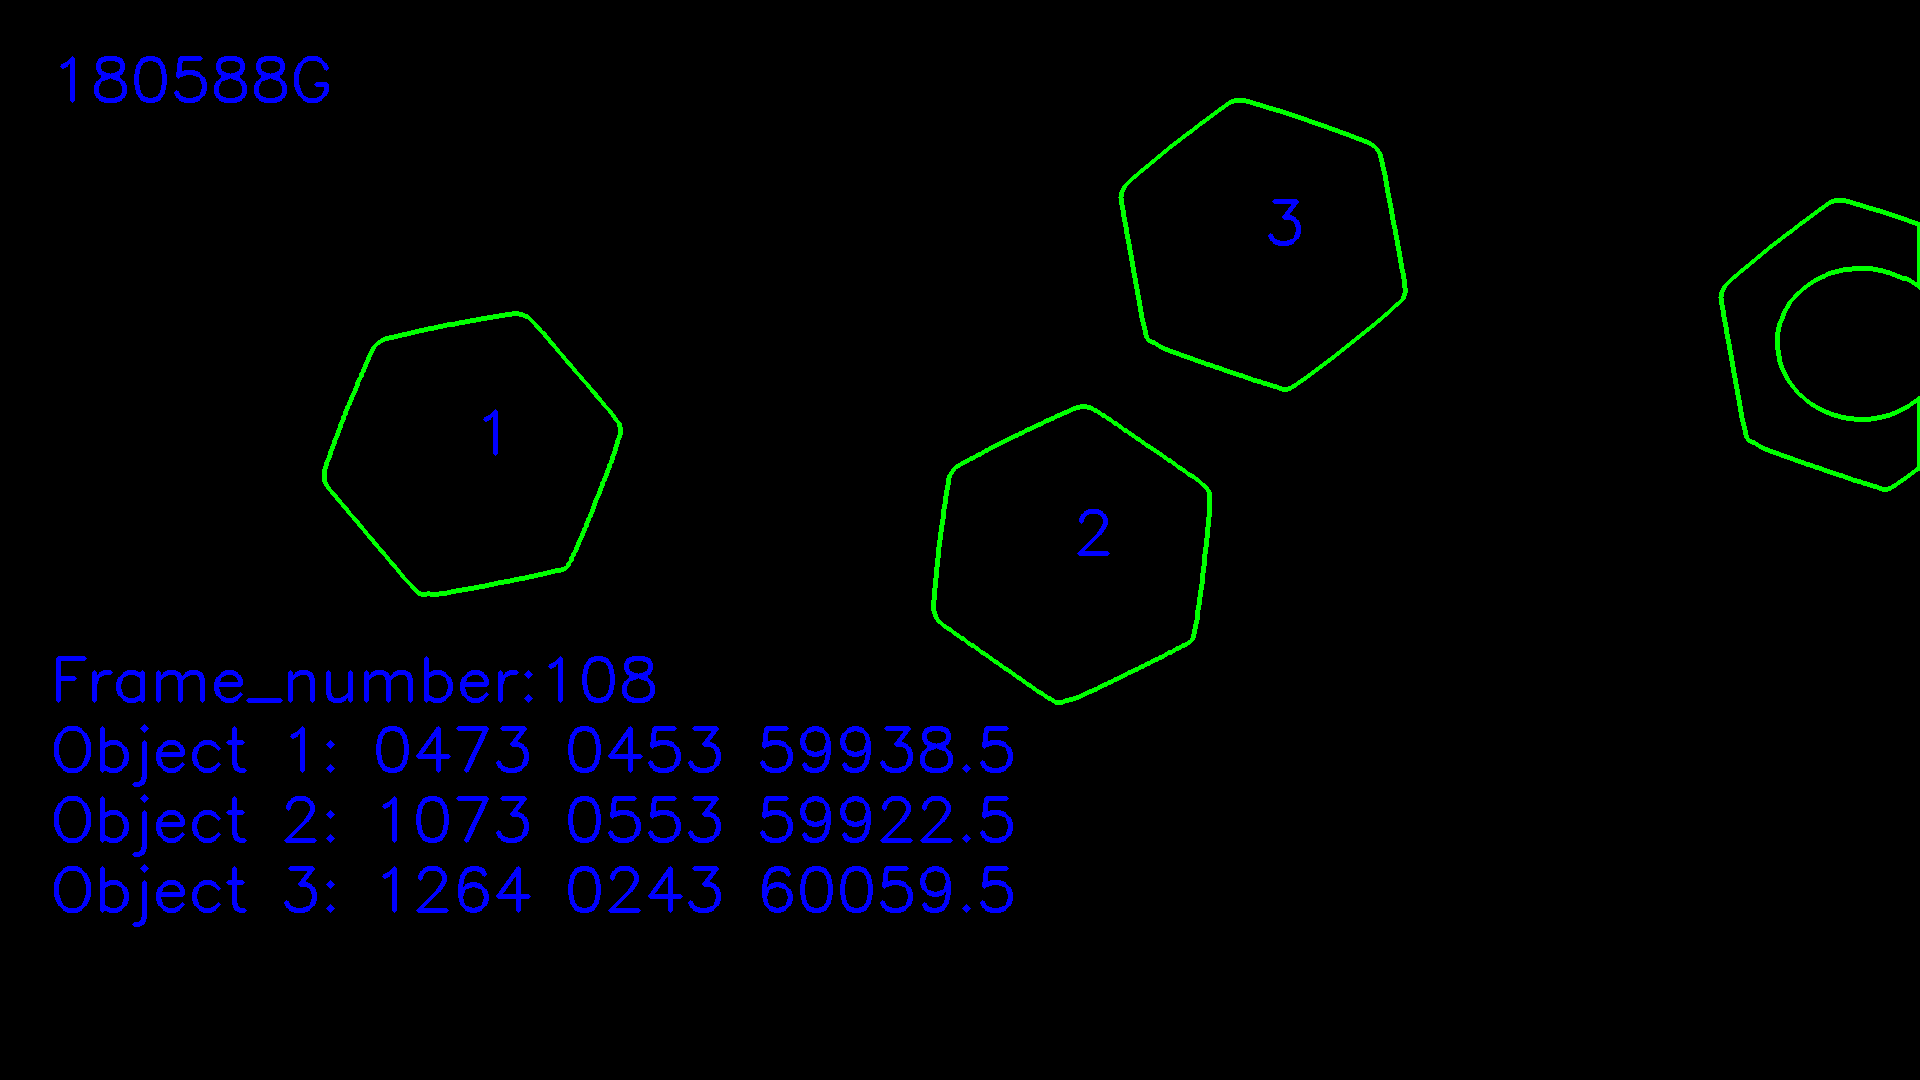

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.63000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.06300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.25400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]
Previousframe [array([4.73000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.07300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.26400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


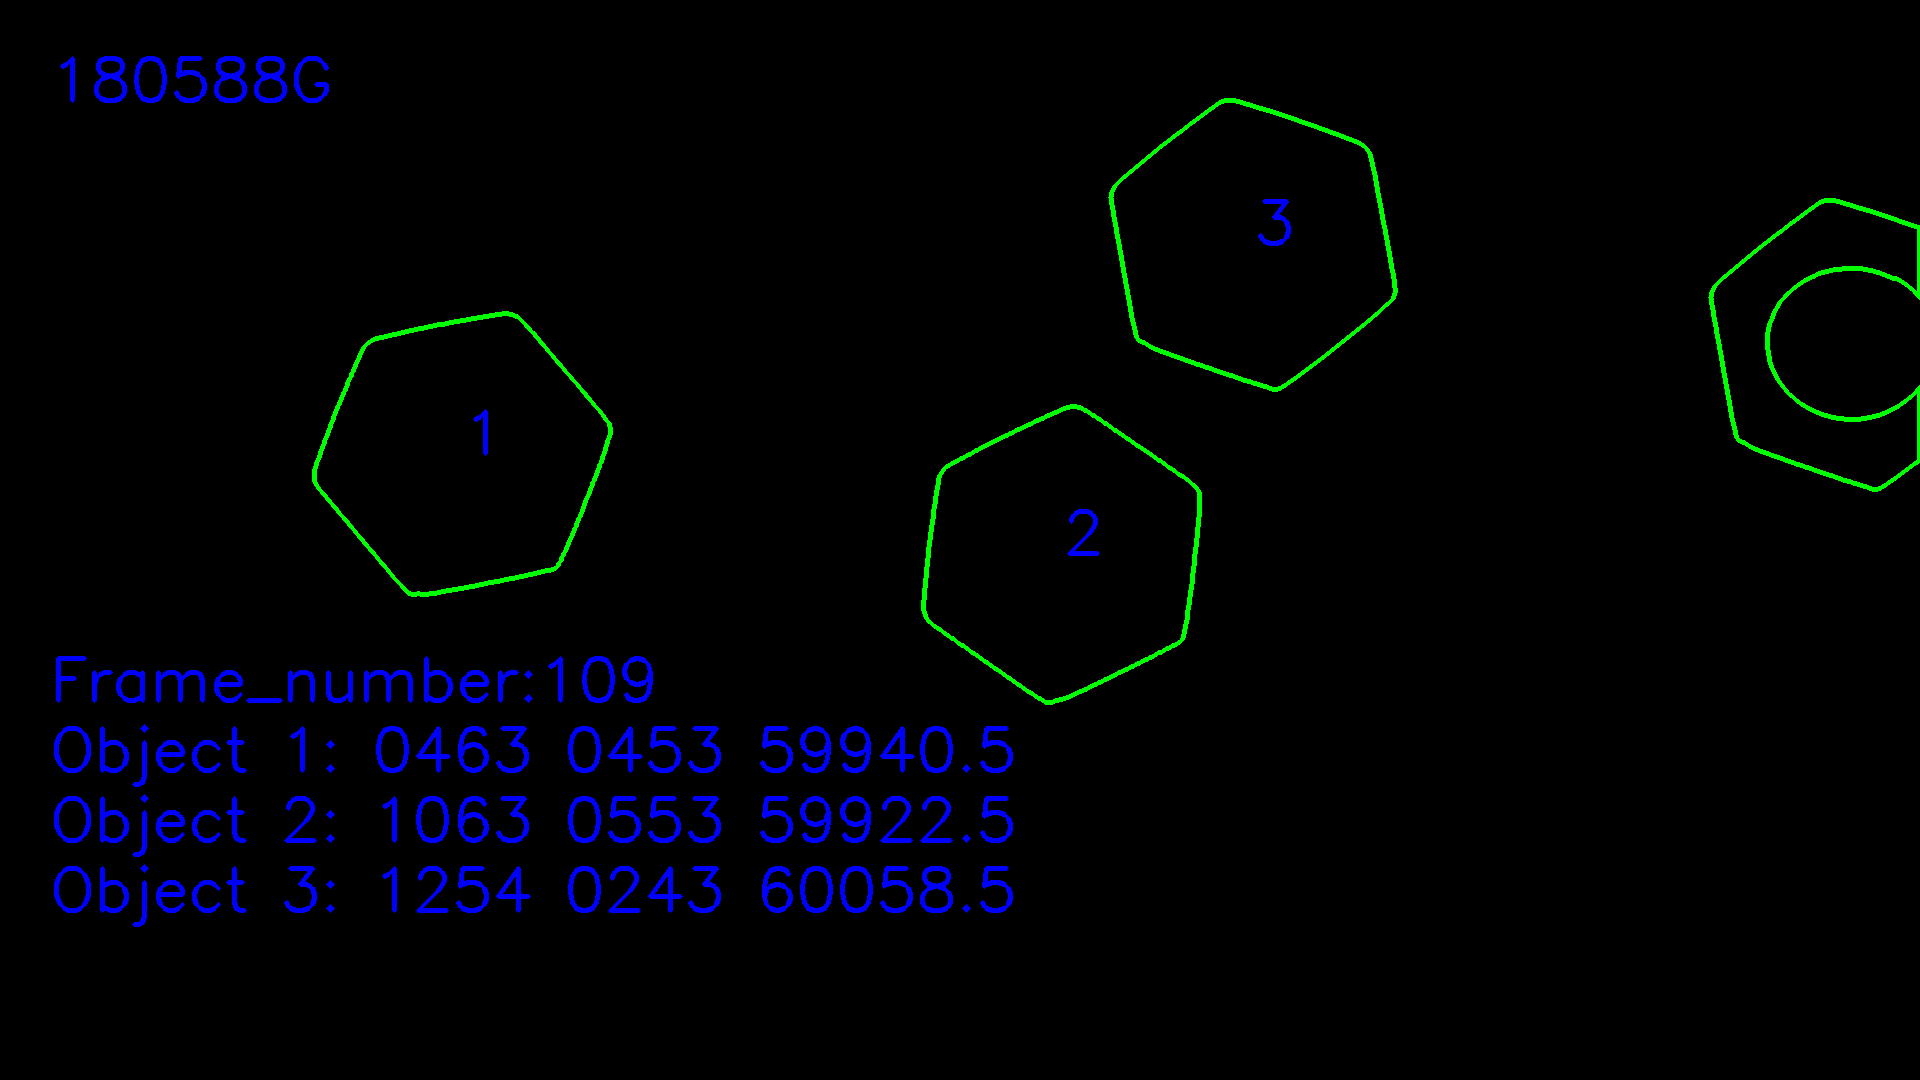

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.05300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.24400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]
Previousframe [array([4.63000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.06300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.25400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00])]


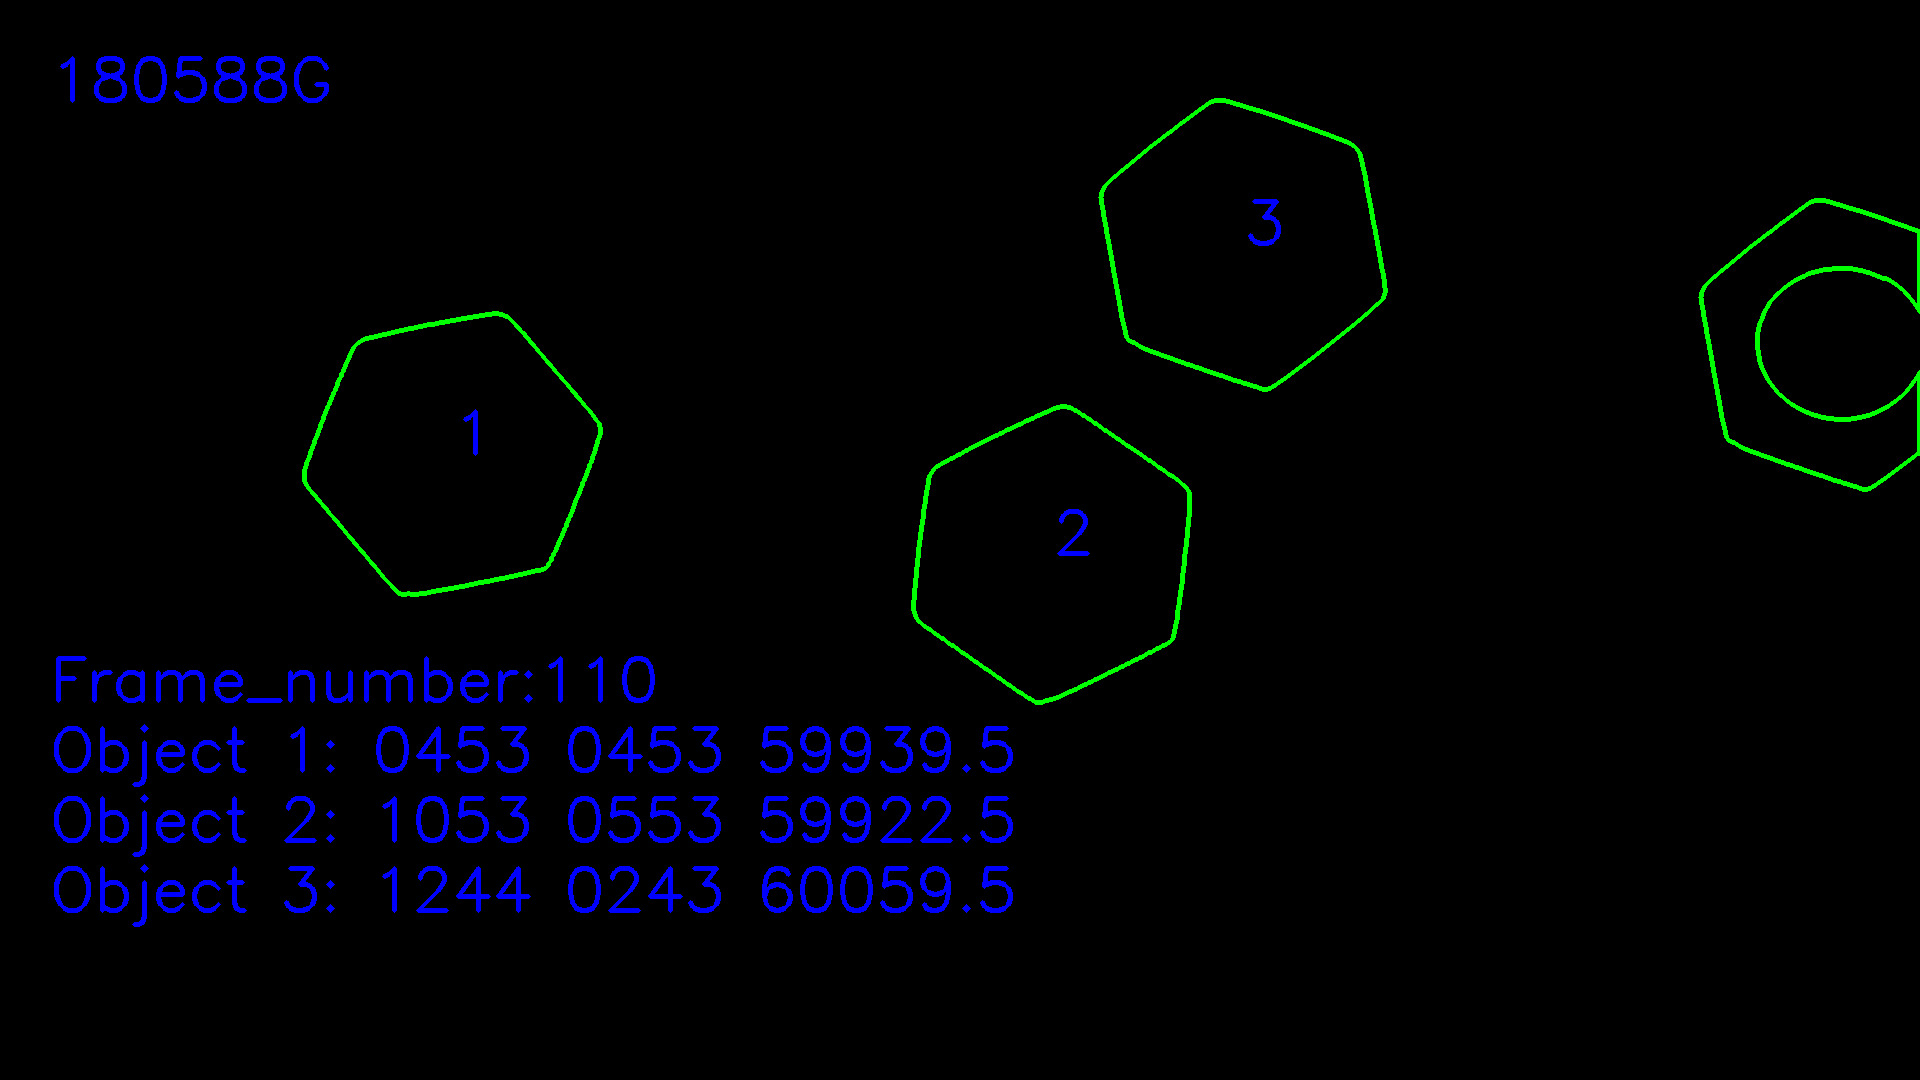

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.43000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.04300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.23400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.81700e+03, 3.43000e+02, 5.19755e+04, 4.00000e+00])]
Previousframe [array([4.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.05300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.24400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00])]


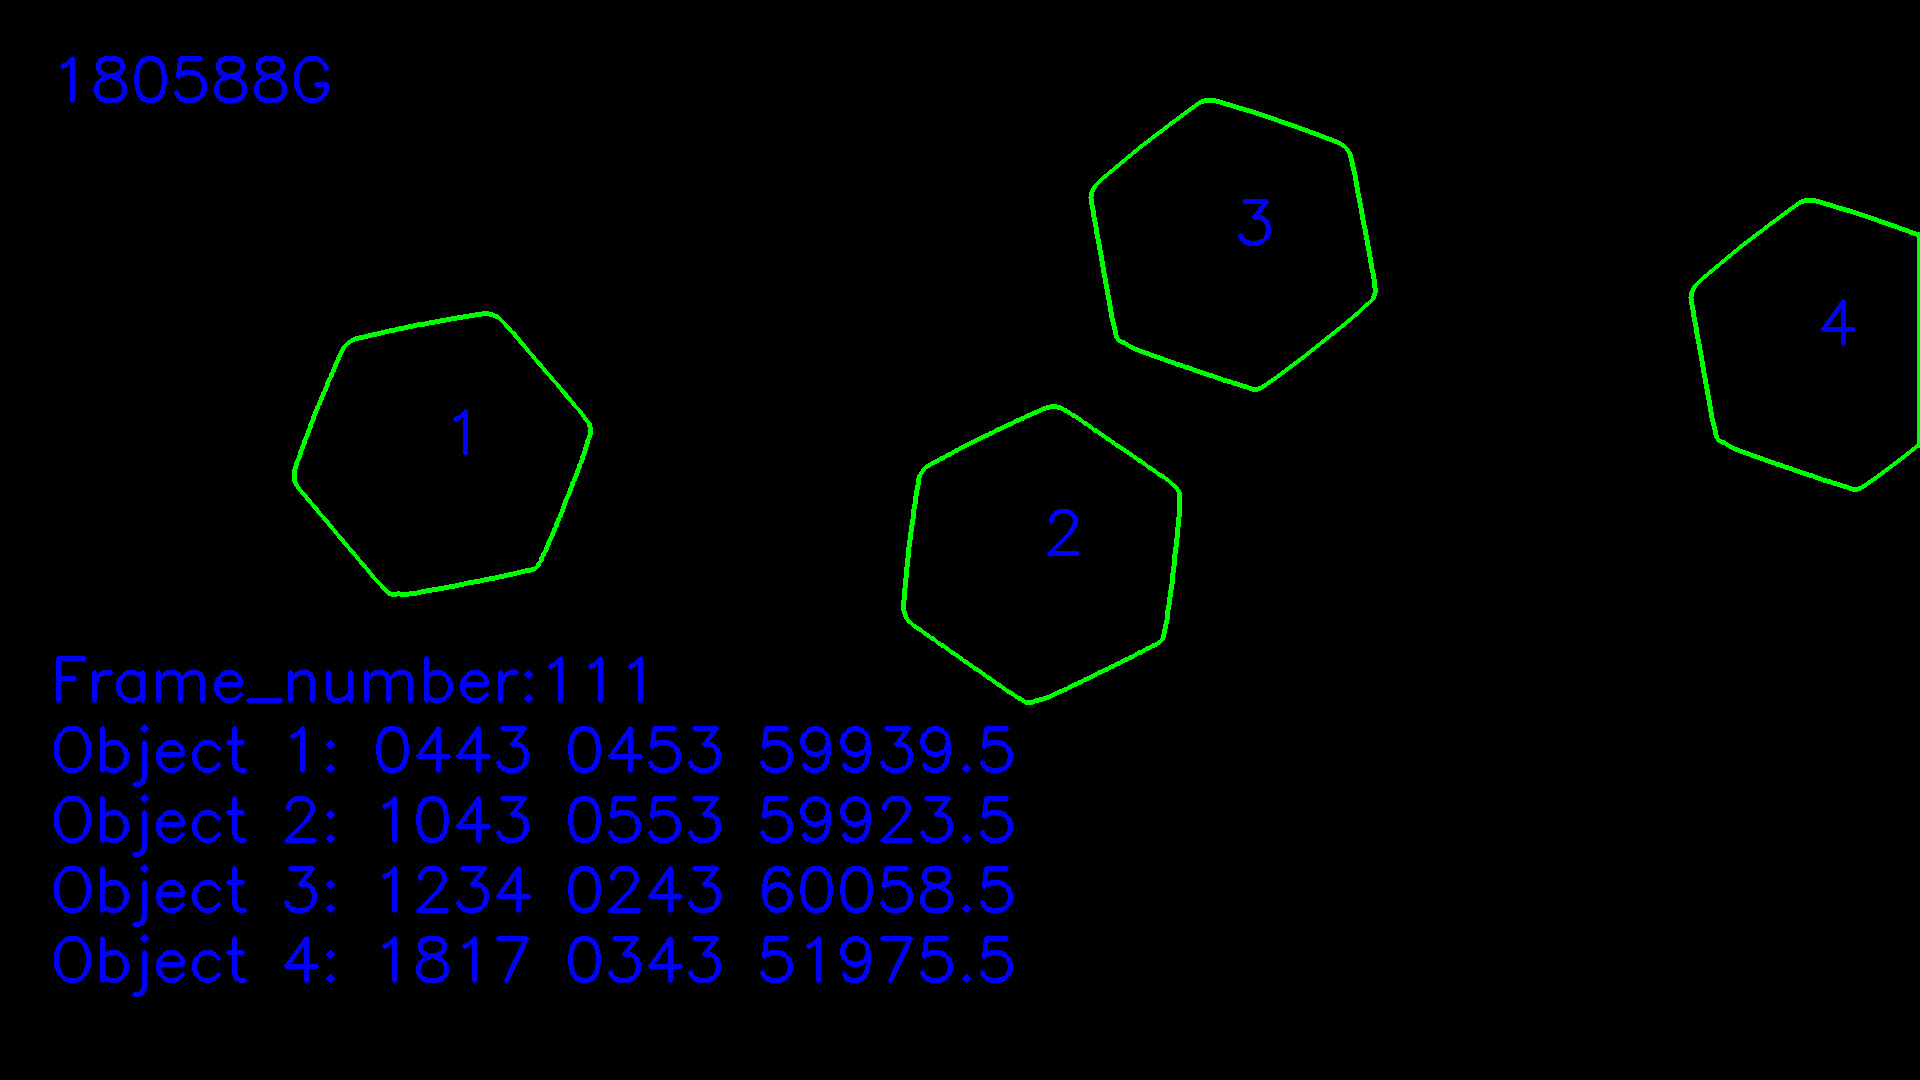

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.33000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.03300e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.22400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.81100e+03, 3.43000e+02, 5.40055e+04, 4.00000e+00])]
Previousframe [array([4.43000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.04300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.23400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.81700e+03, 3.43000e+02, 5.19755e+04, 4.00000e+00])]


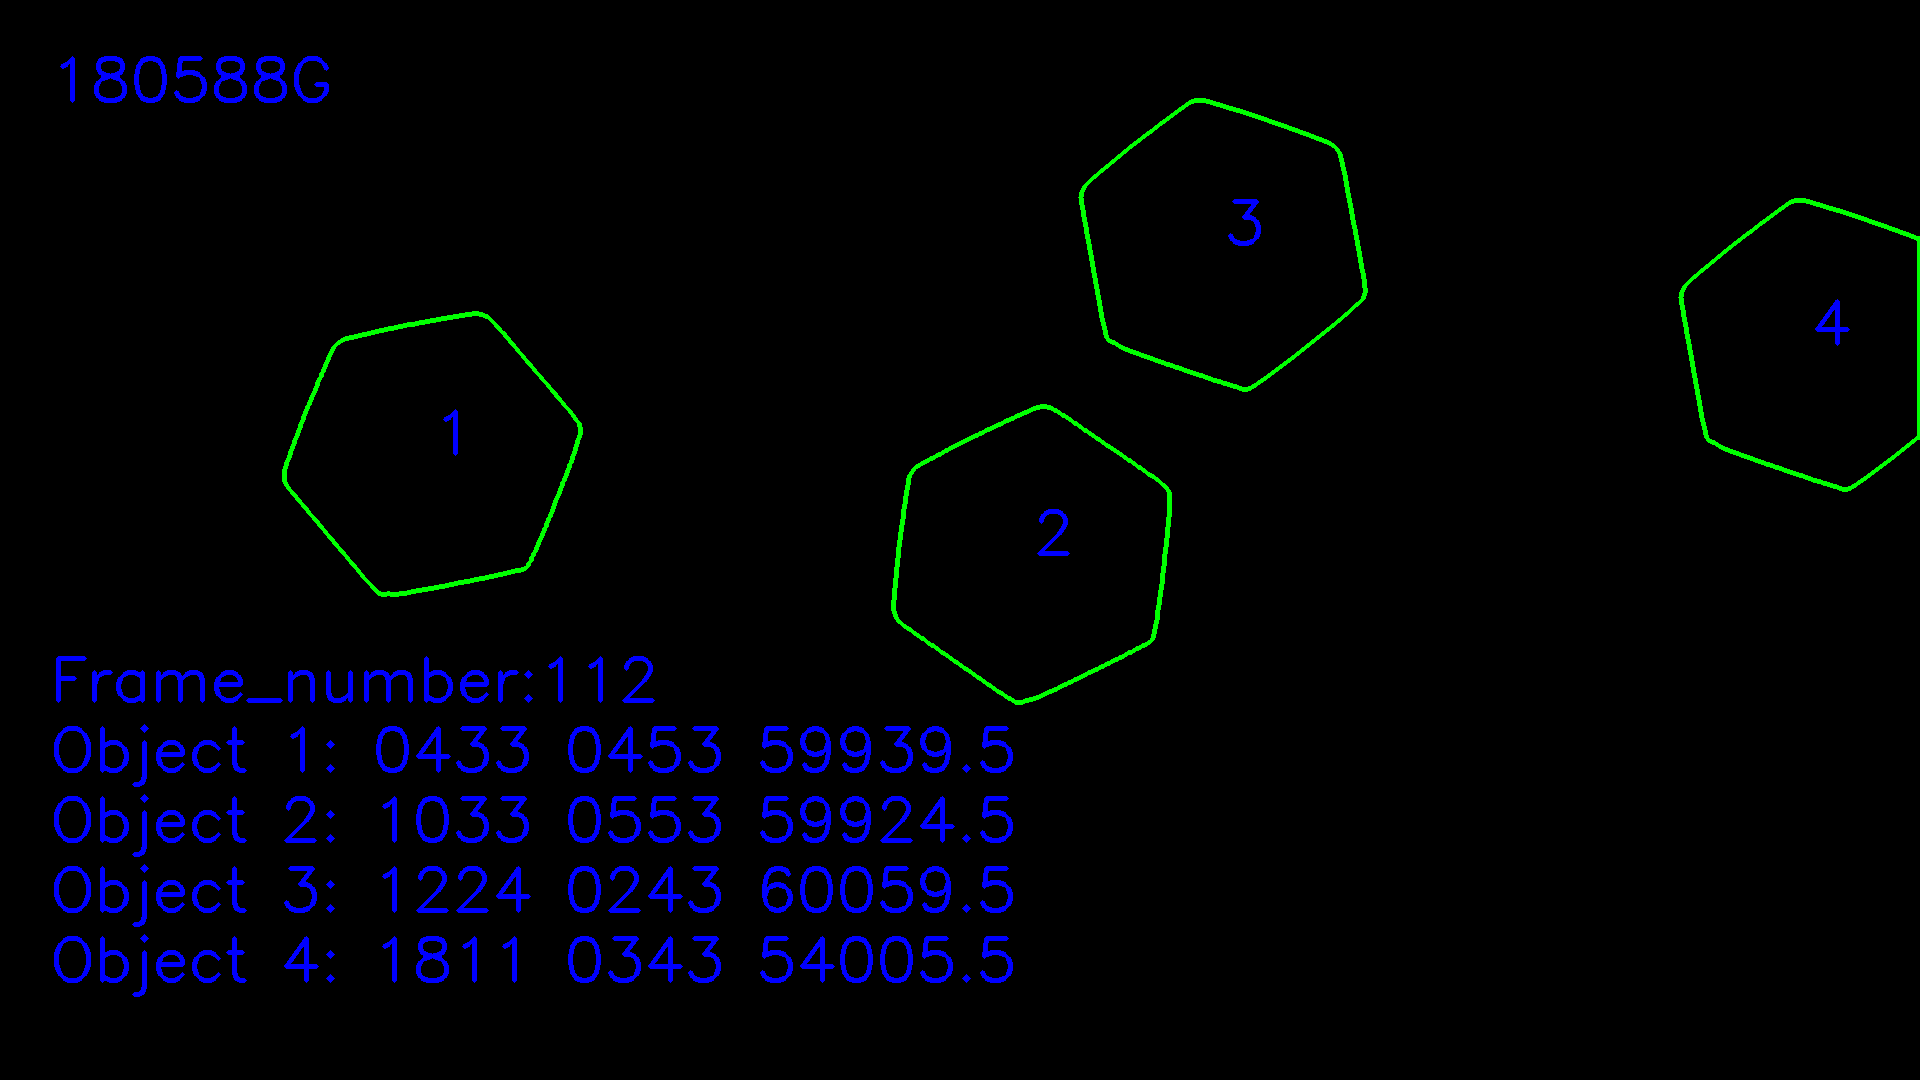

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.02300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.21400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.80500e+03, 3.43000e+02, 5.59185e+04, 4.00000e+00])]
Previousframe [array([4.33000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([1.03300e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.22400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.81100e+03, 3.43000e+02, 5.40055e+04, 4.00000e+00])]


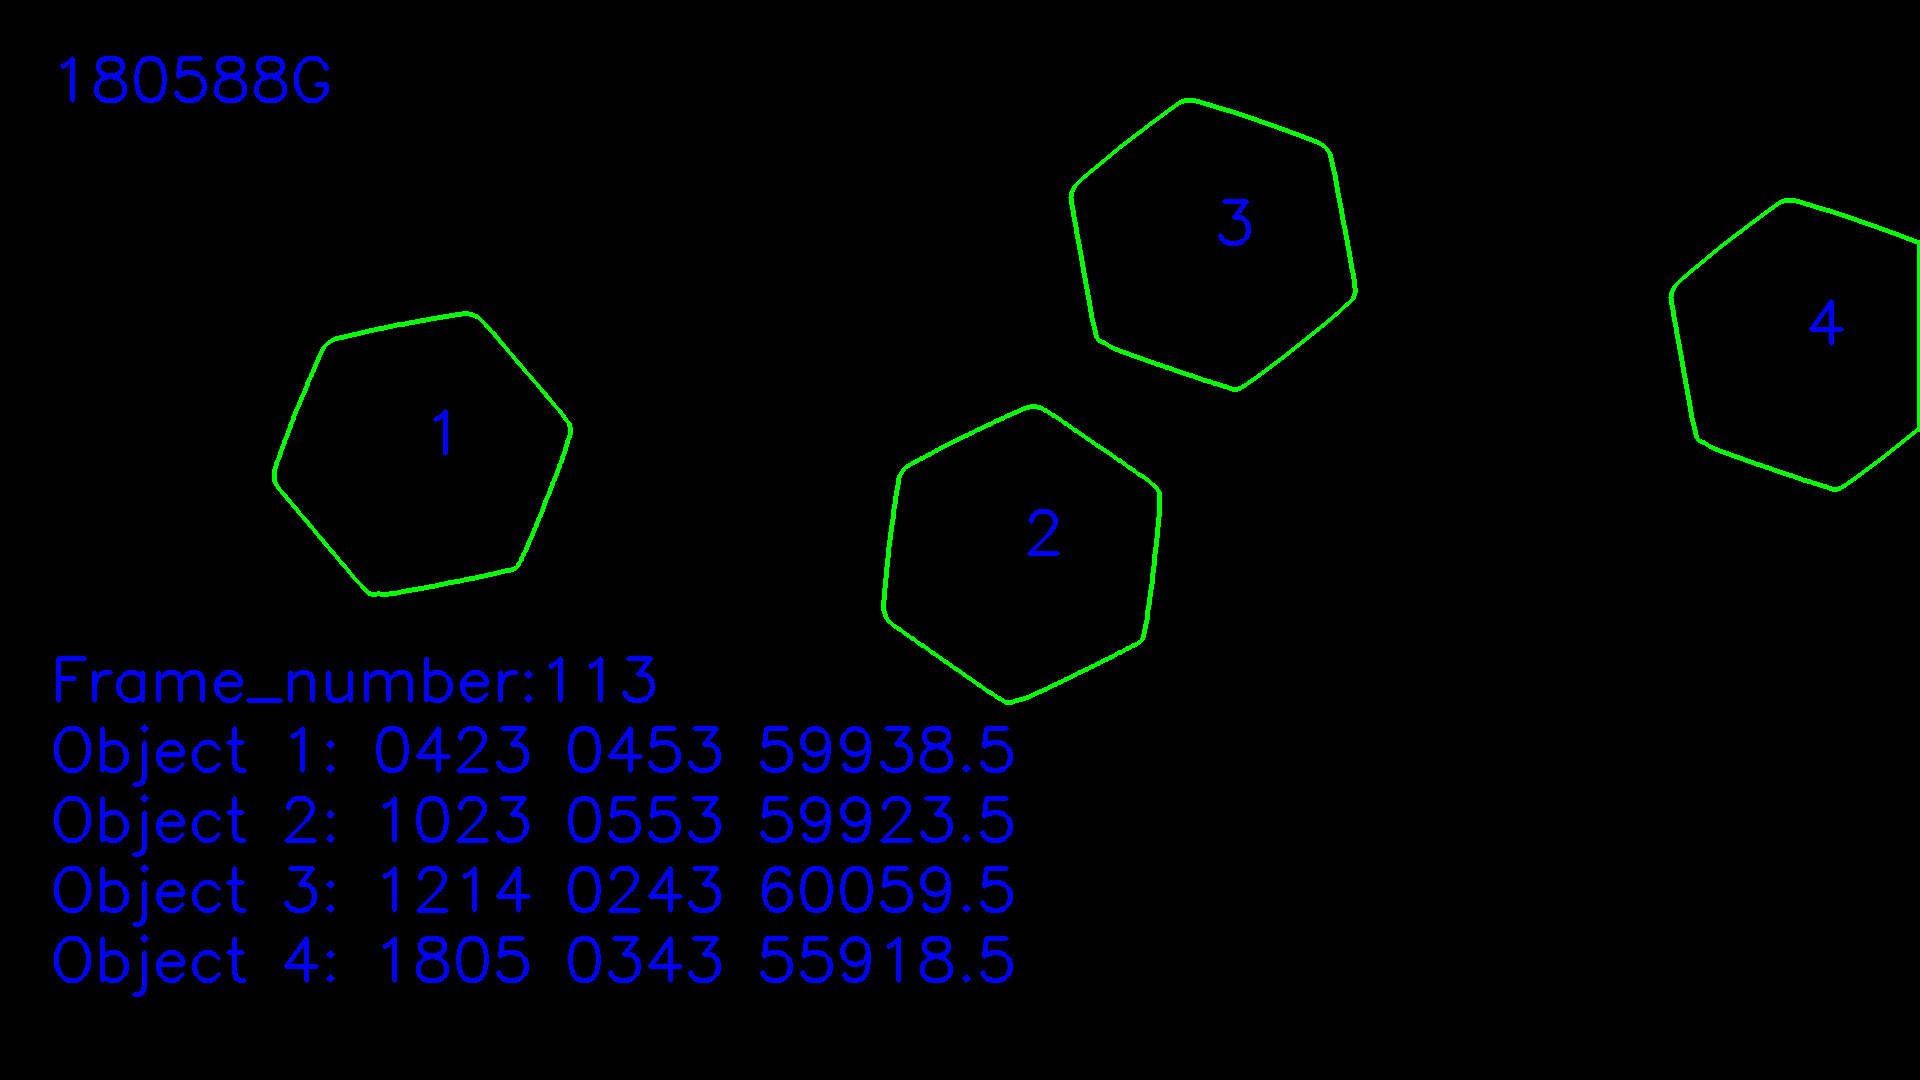

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.13000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.01300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.20400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.7990e+03, 3.4300e+02, 5.7689e+04, 4.0000e+00])]
Previousframe [array([4.23000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([1.02300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.21400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.80500e+03, 3.43000e+02, 5.59185e+04, 4.00000e+00])]


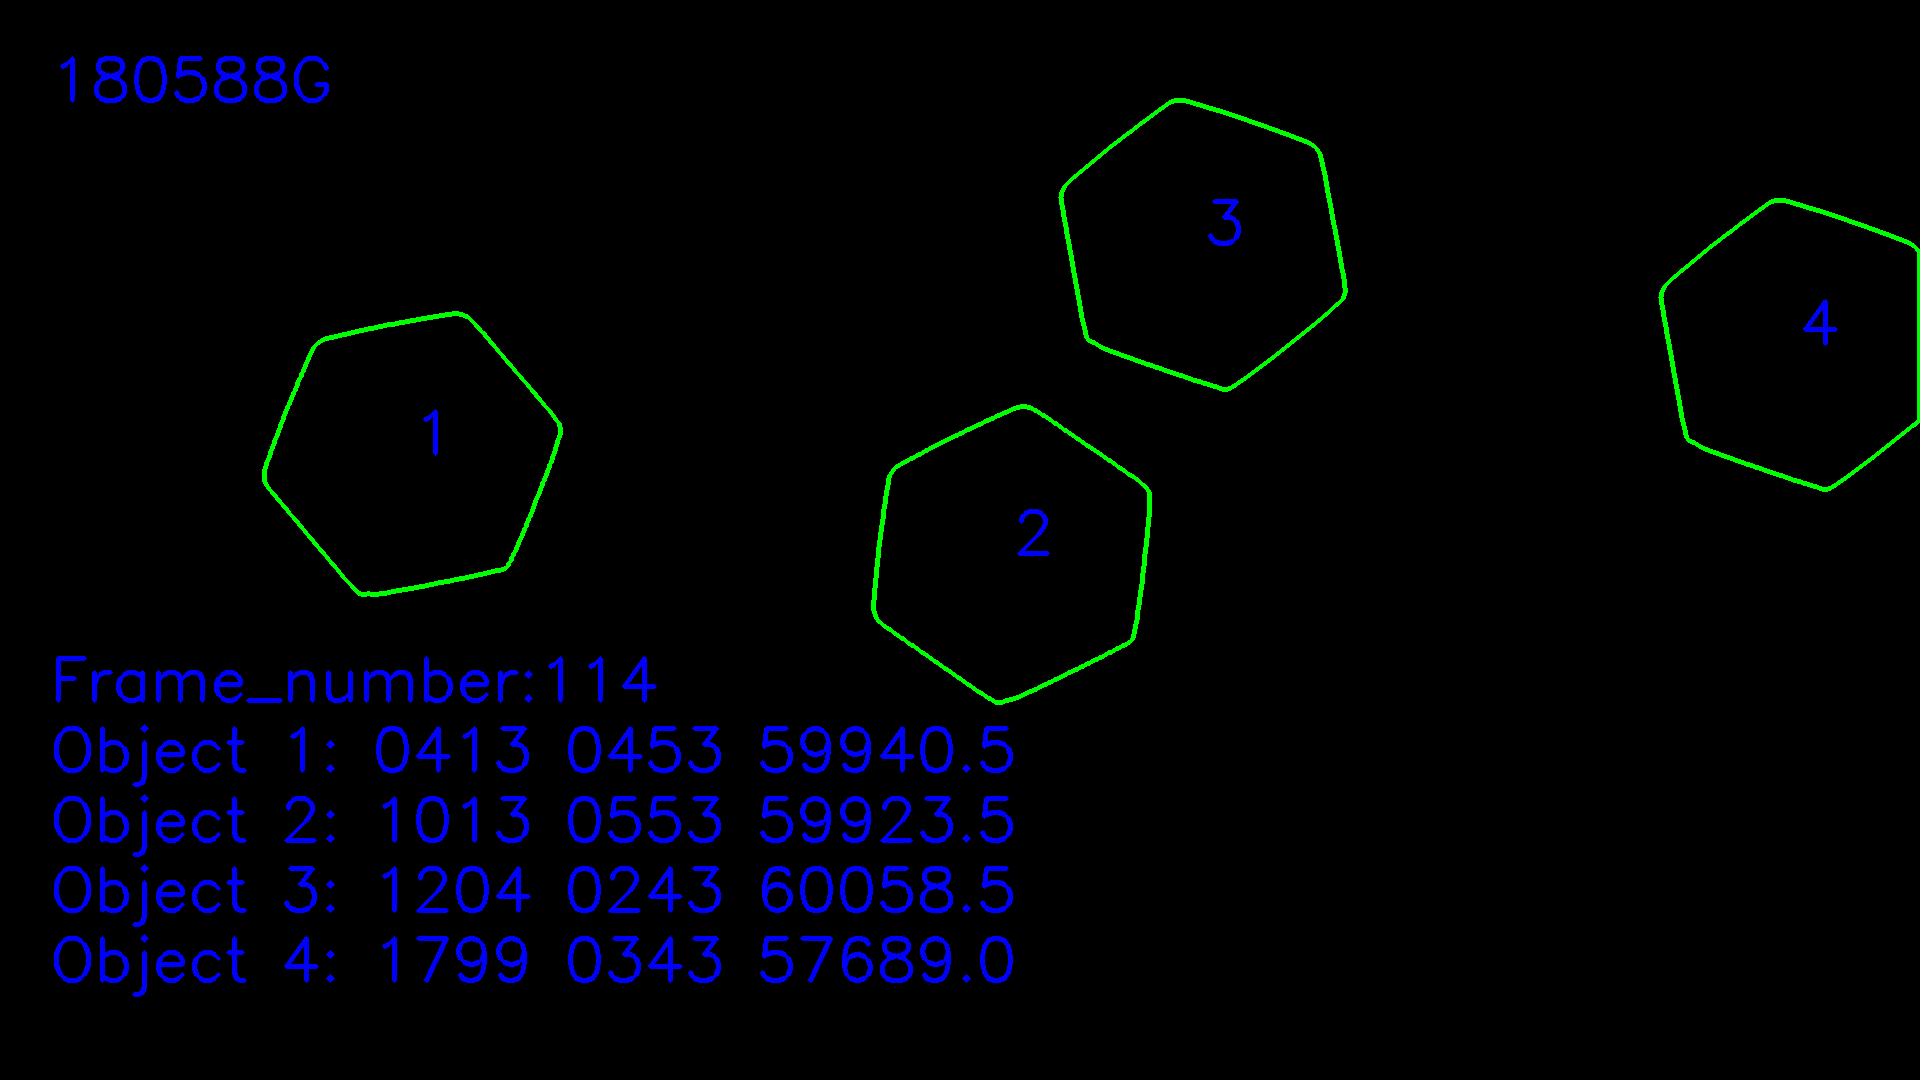

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.03000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.00300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.19400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.7920e+03, 3.4300e+02, 5.9106e+04, 4.0000e+00])]
Previousframe [array([4.13000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.01300e+03, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.20400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.7990e+03, 3.4300e+02, 5.7689e+04, 4.0000e+00])]


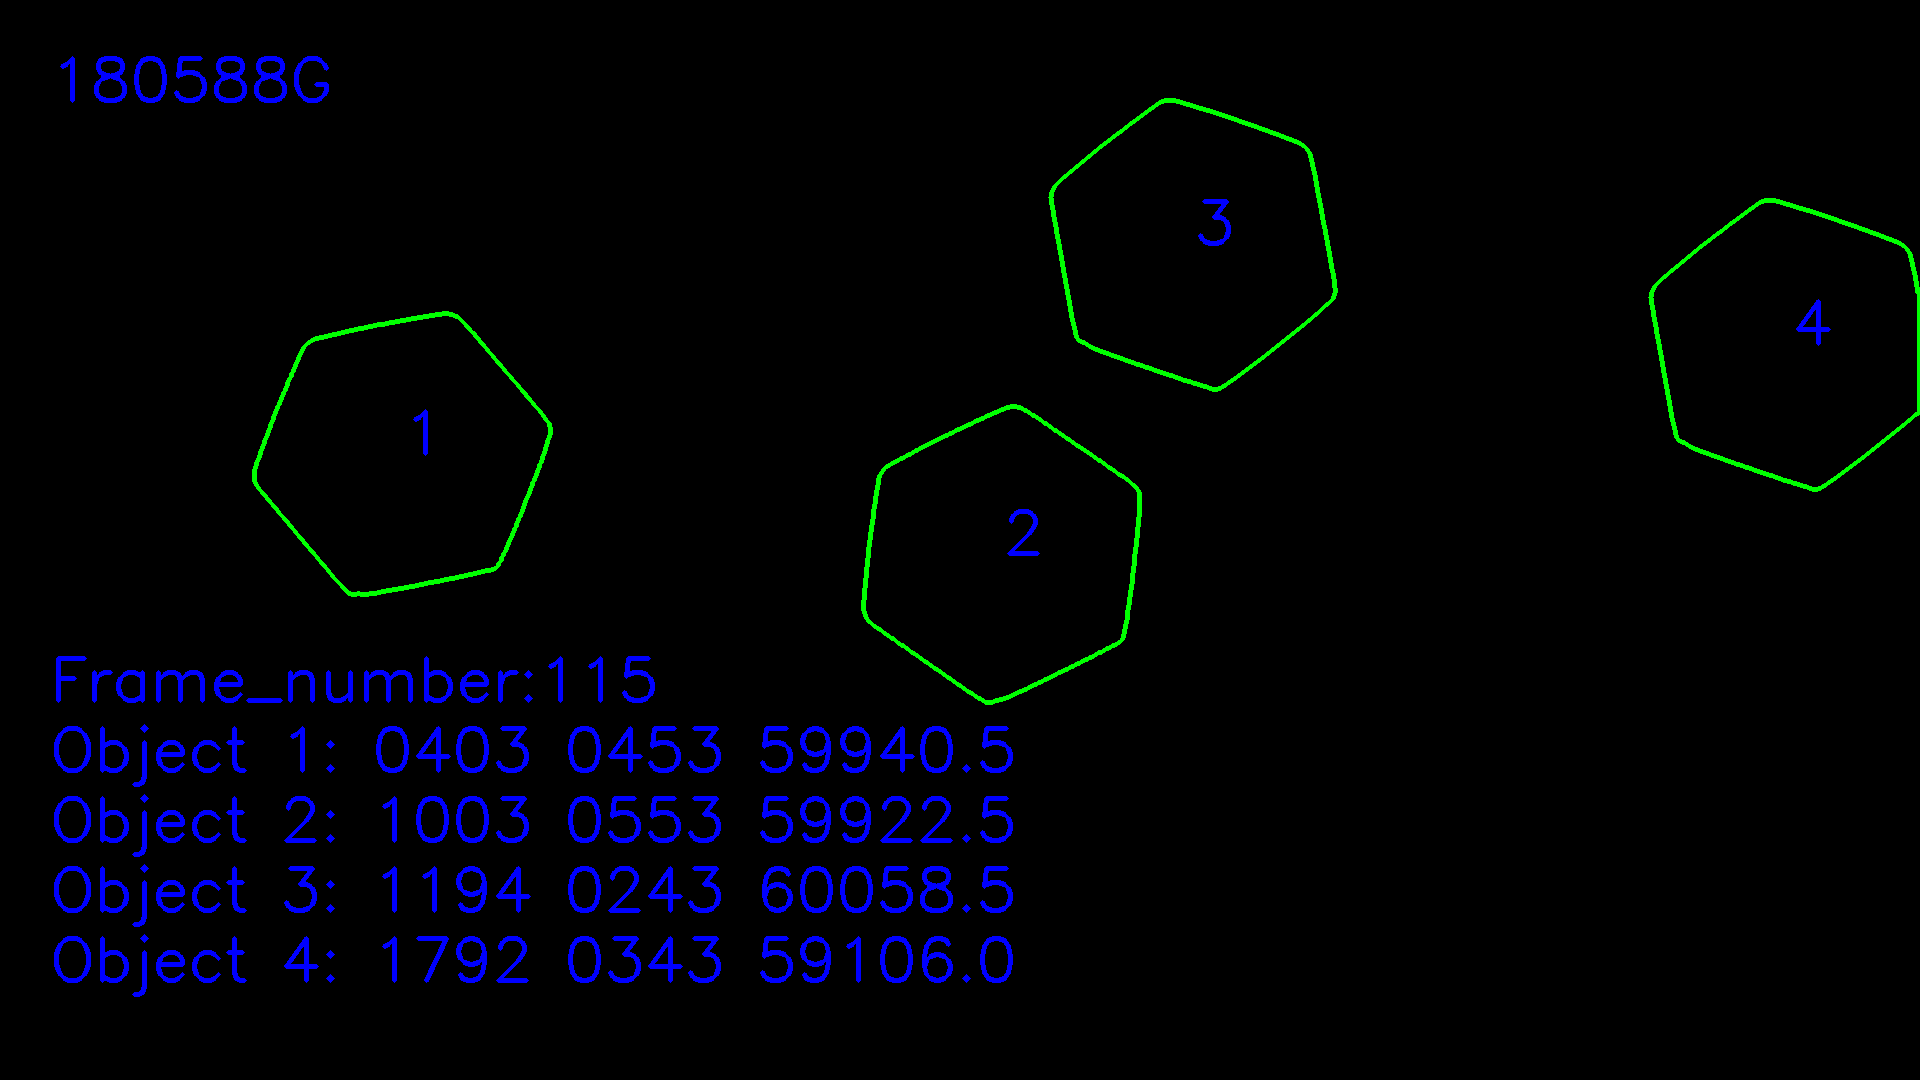

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.93000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([9.93000e+02, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.18400e+03, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.78400e+03, 3.43000e+02, 5.99025e+04, 4.00000e+00])]
Previousframe [array([4.03000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([1.00300e+03, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.19400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.7920e+03, 3.4300e+02, 5.9106e+04, 4.0000e+00])]


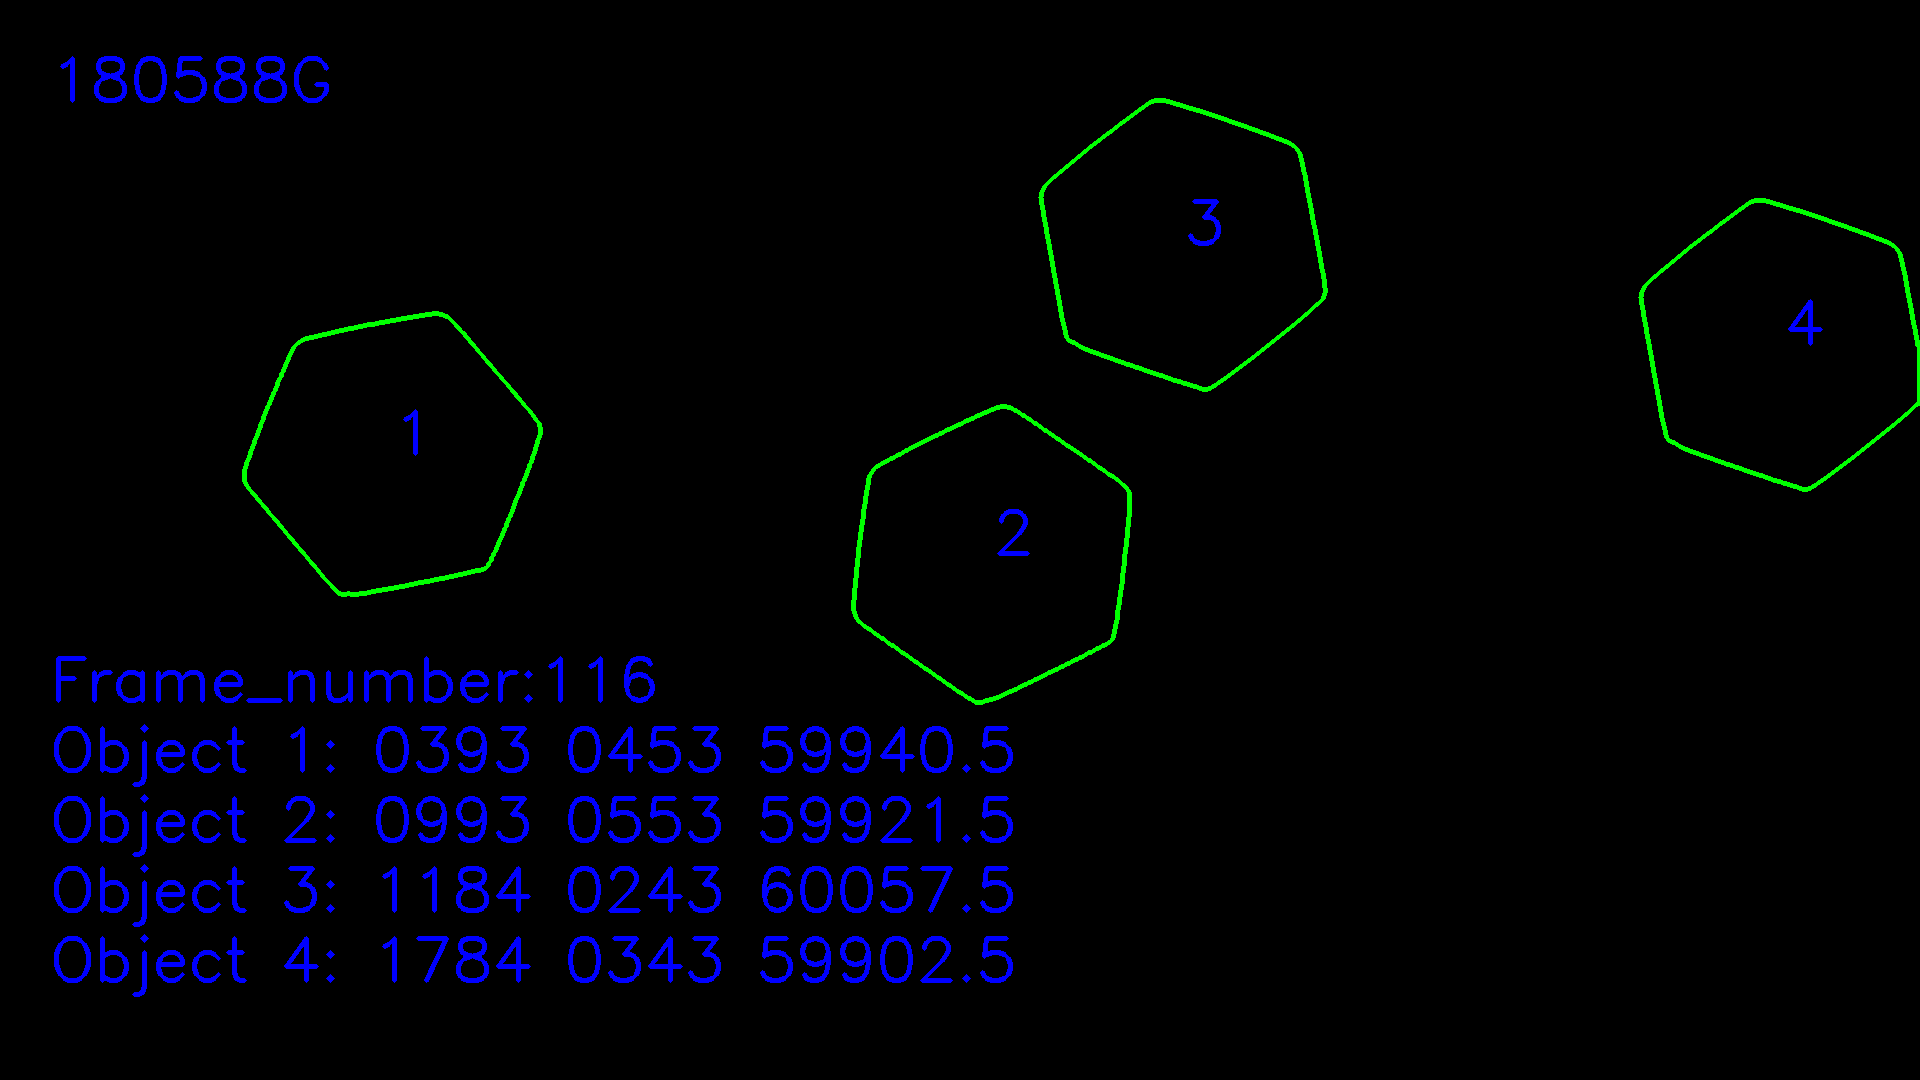

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.17400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.77400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([3.93000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([9.93000e+02, 5.53000e+02, 5.99215e+04, 2.00000e+00]), array([1.18400e+03, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.78400e+03, 3.43000e+02, 5.99025e+04, 4.00000e+00])]


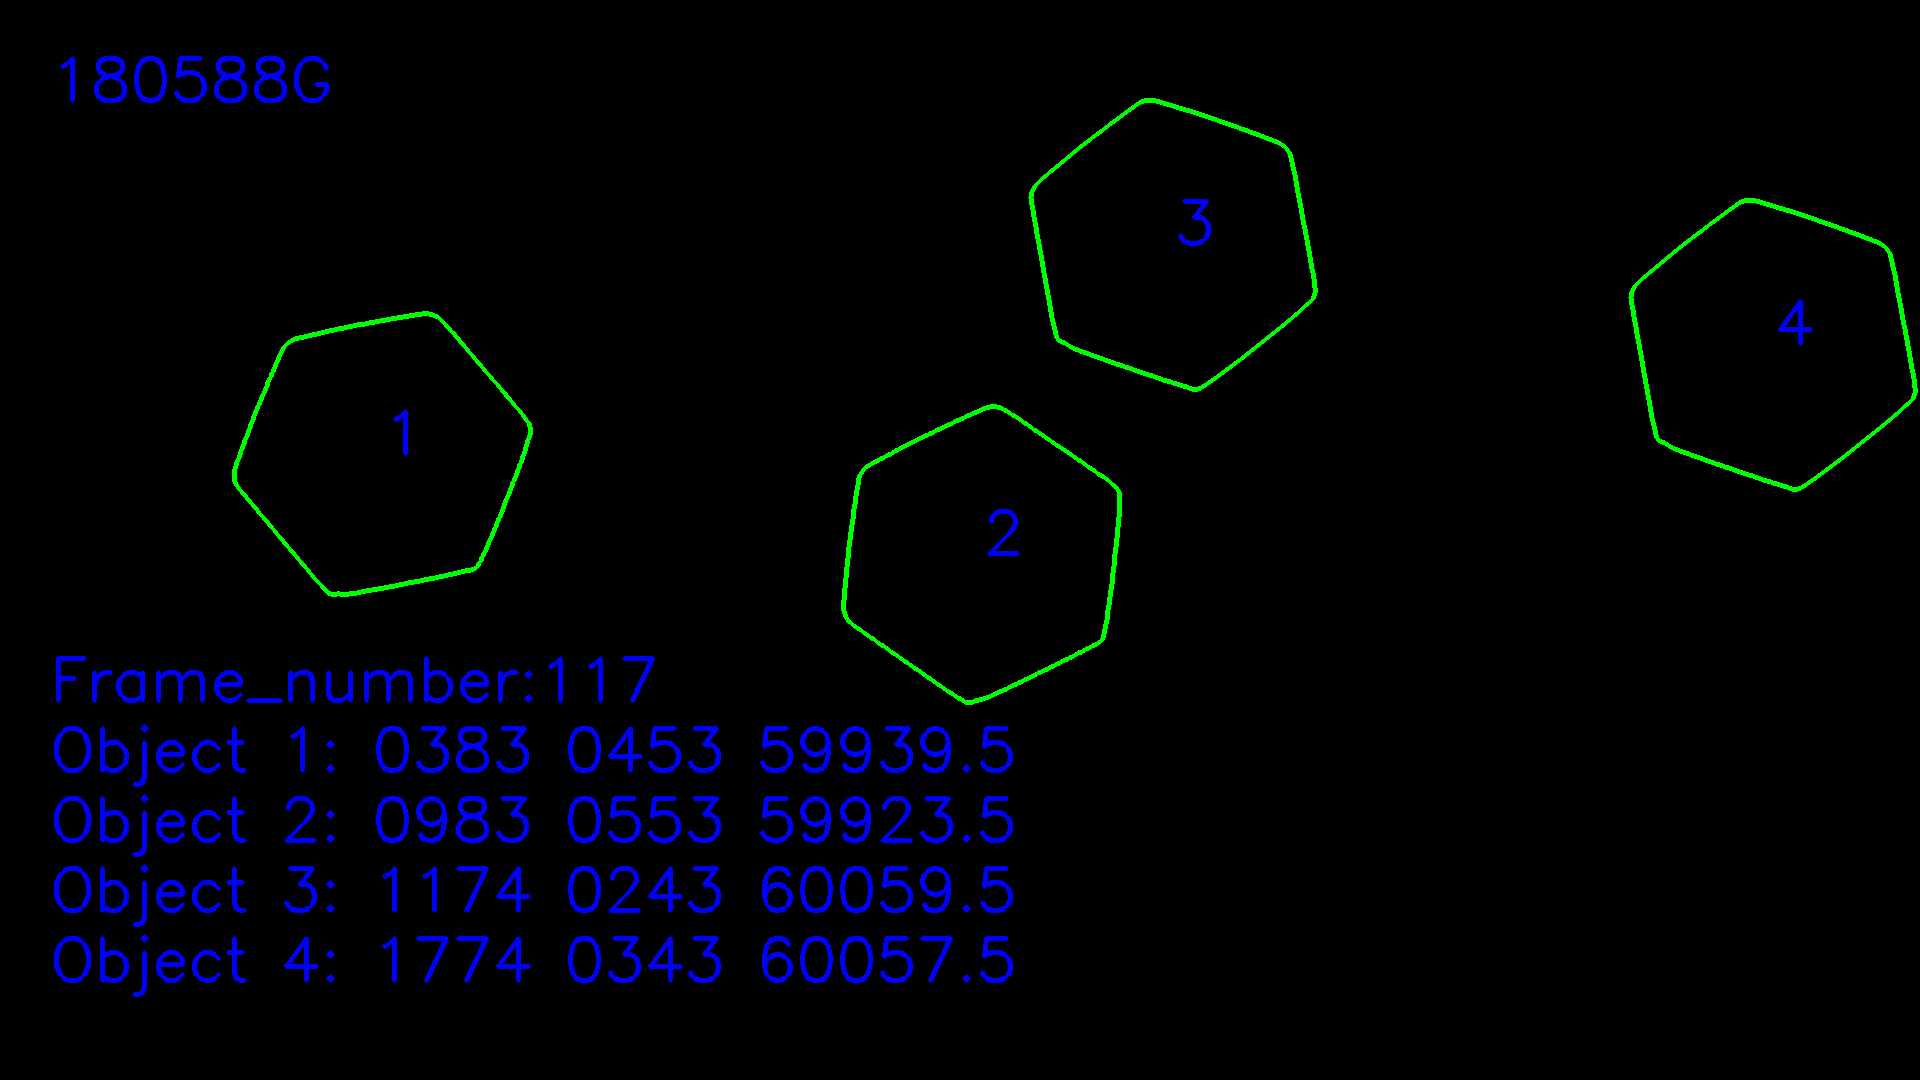

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.73000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([9.73000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.16400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.76400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([3.83000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.17400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.77400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


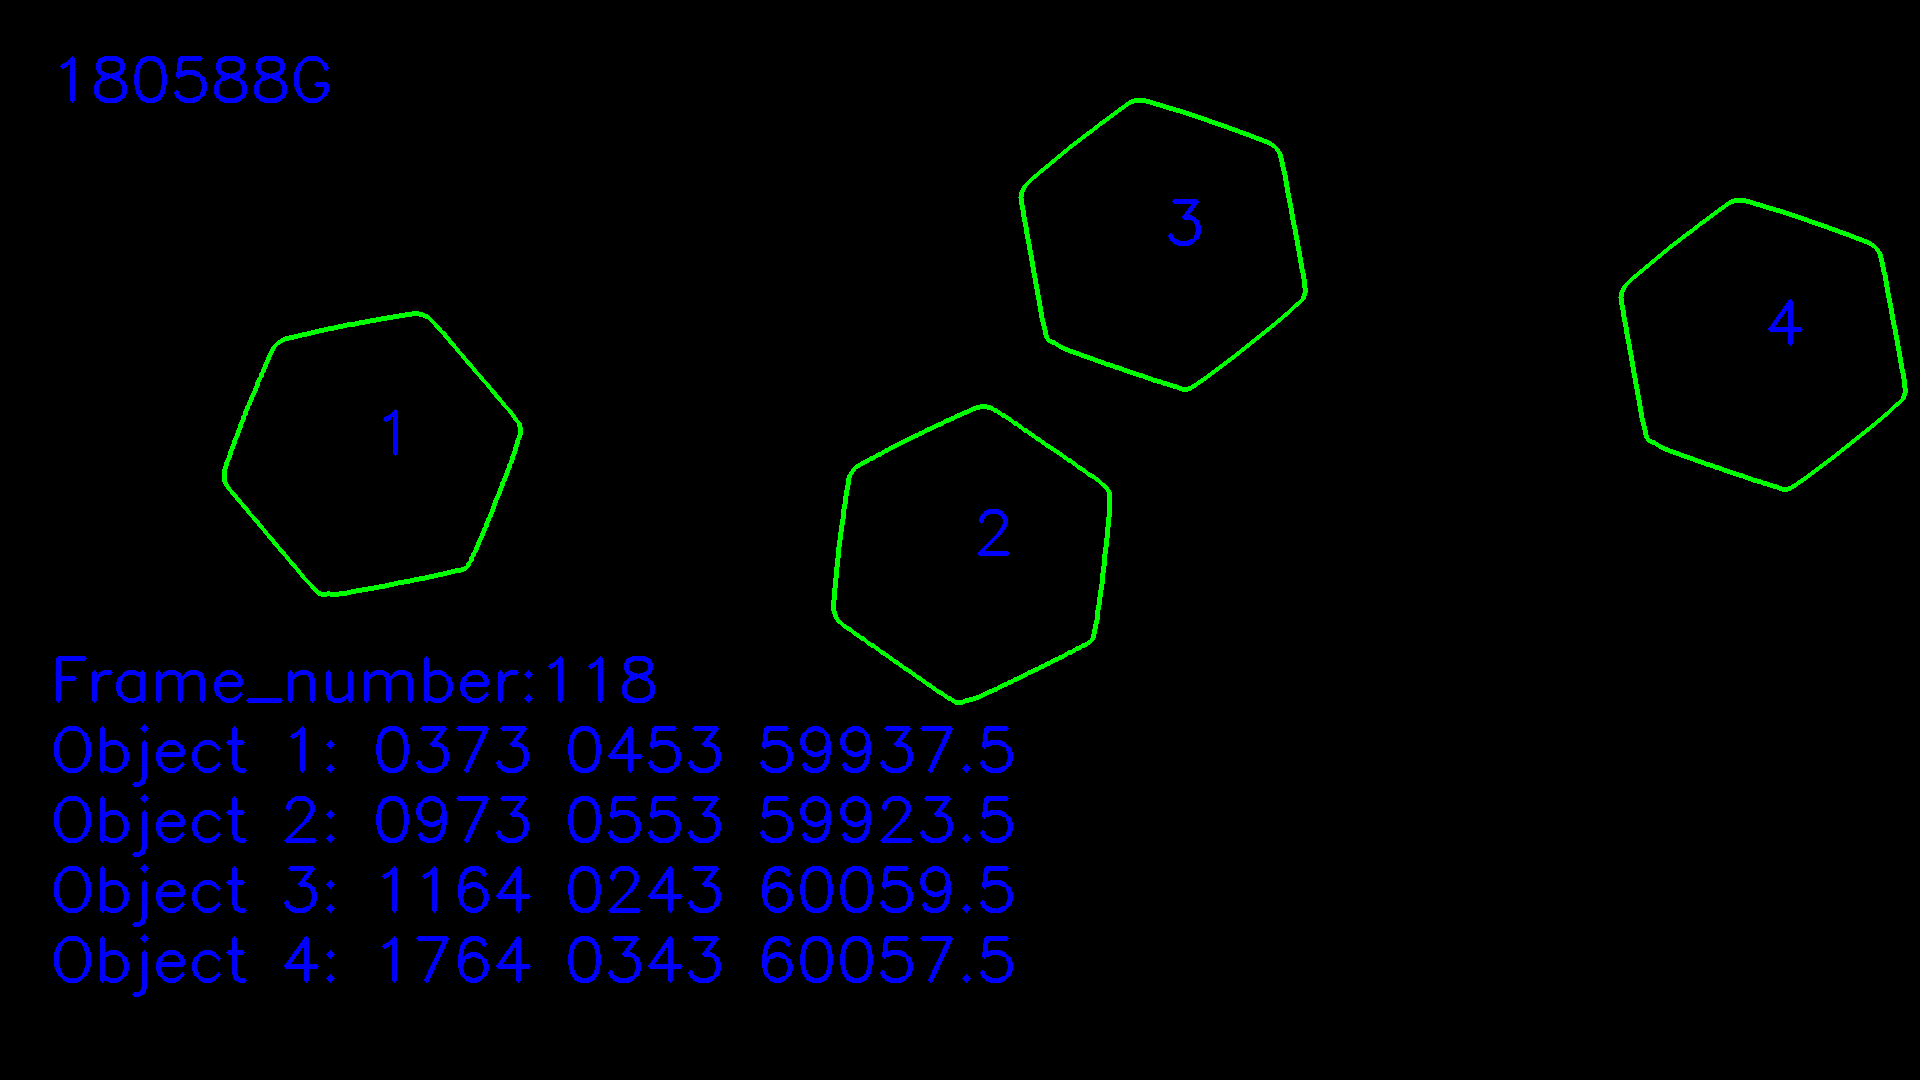

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.63000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([9.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.15400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.75400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]
Previousframe [array([3.73000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([9.73000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.16400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.76400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


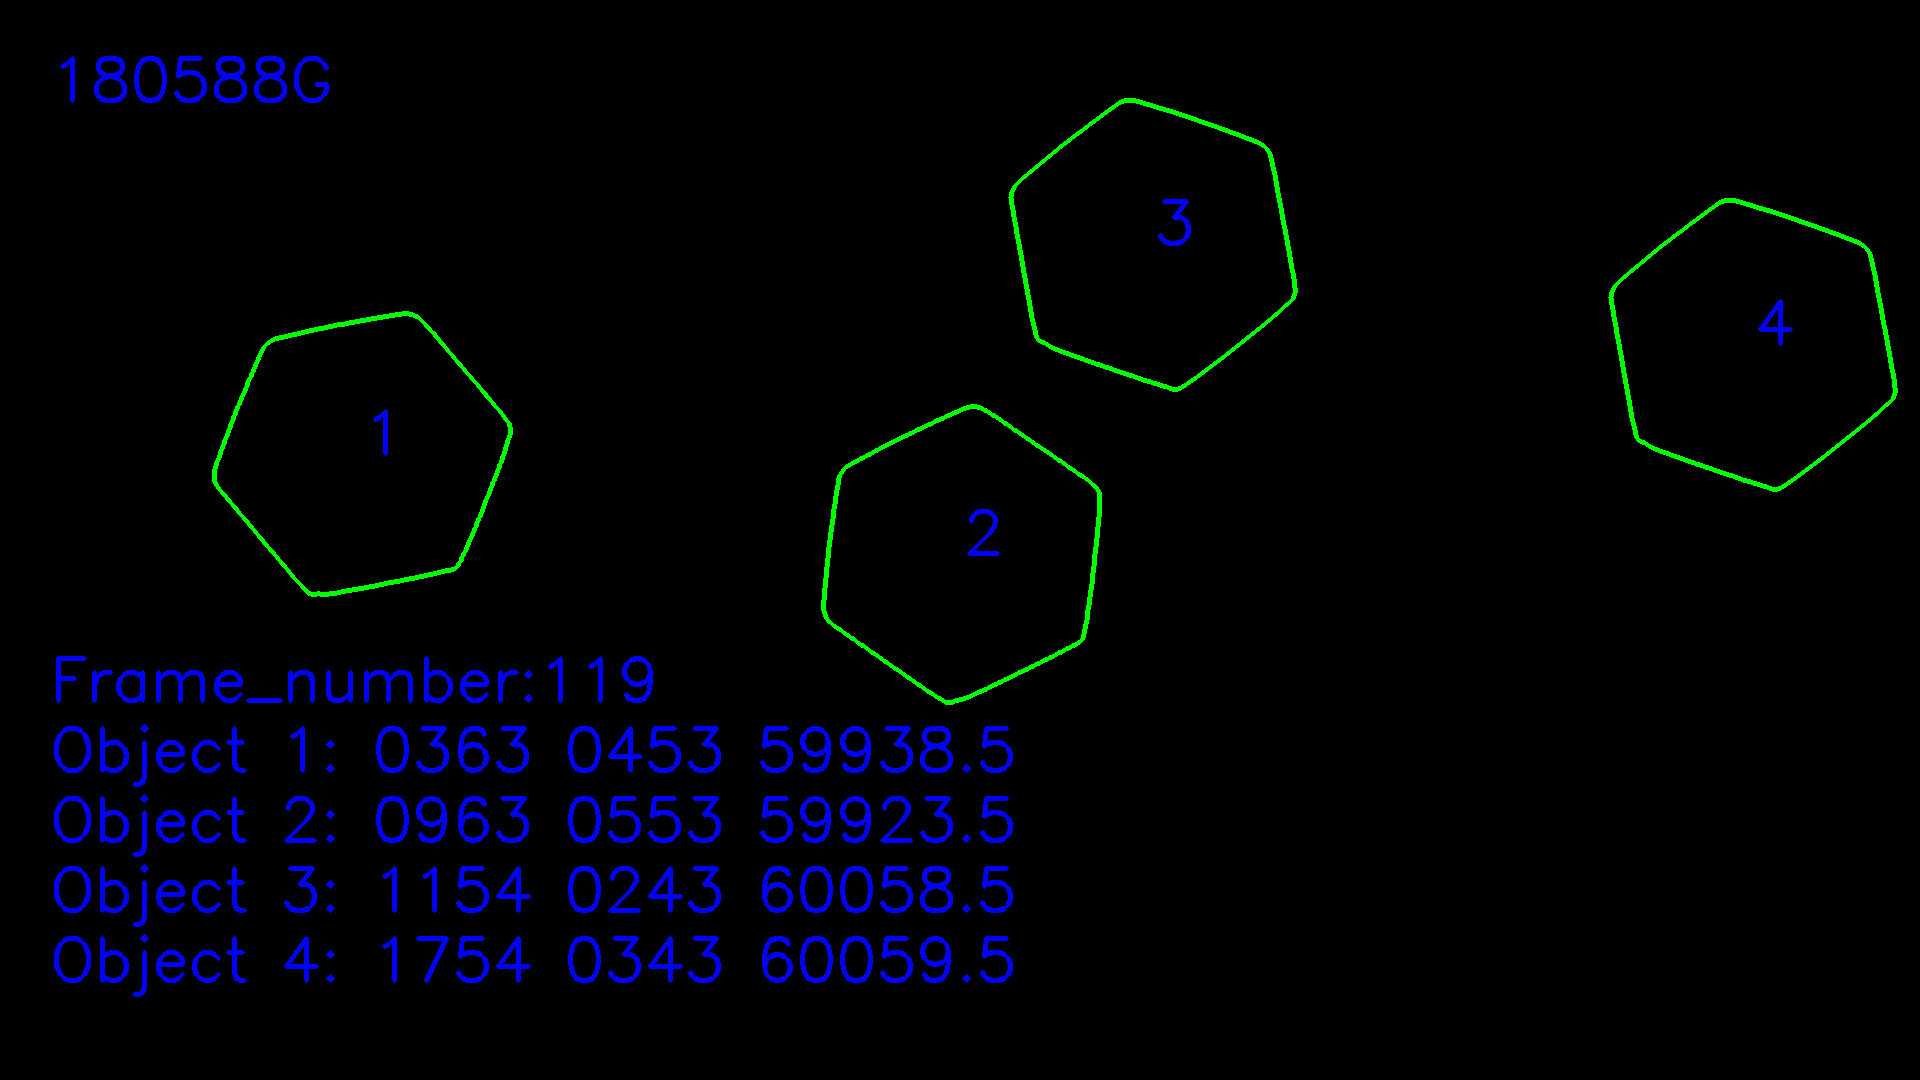

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.53000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([9.53000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.14400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.74400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([3.63000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([9.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.15400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.75400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]


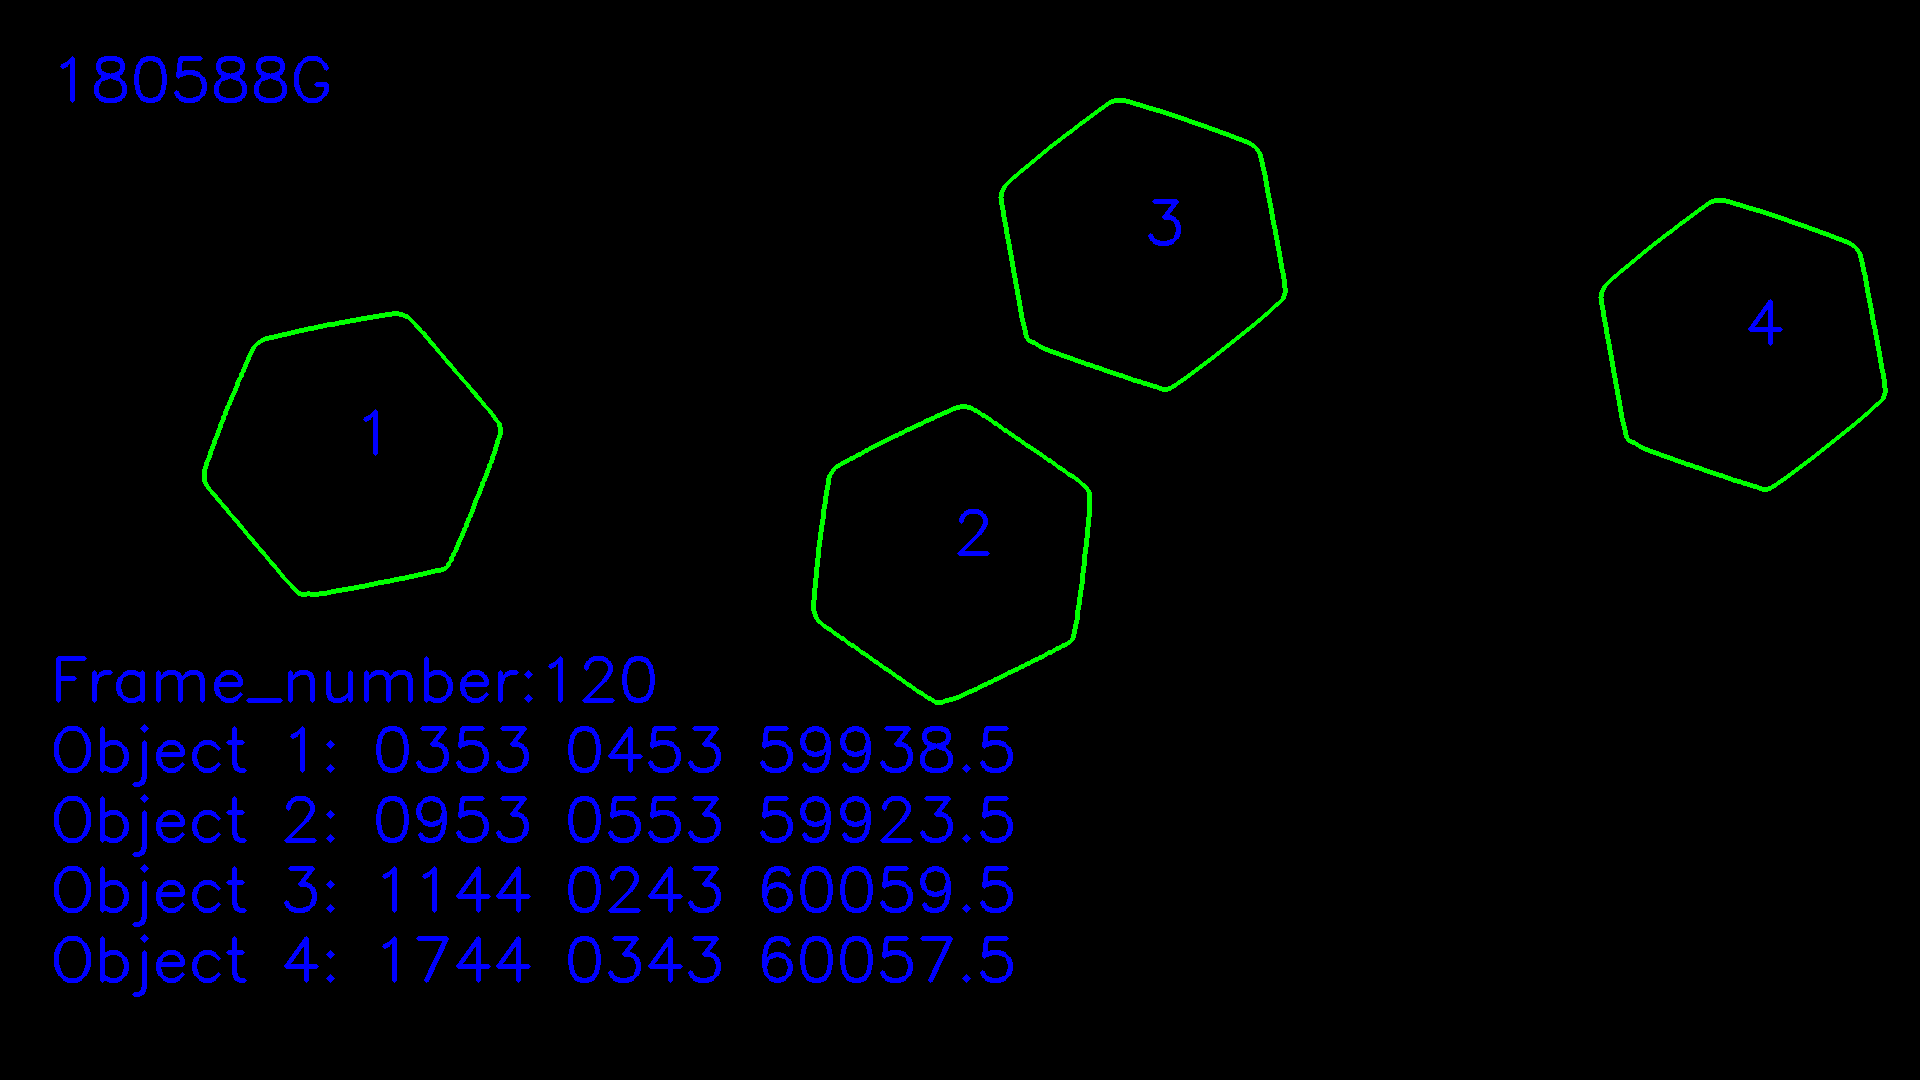

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.43000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([9.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.13400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.73400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]
Previousframe [array([3.53000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([9.53000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.14400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.74400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


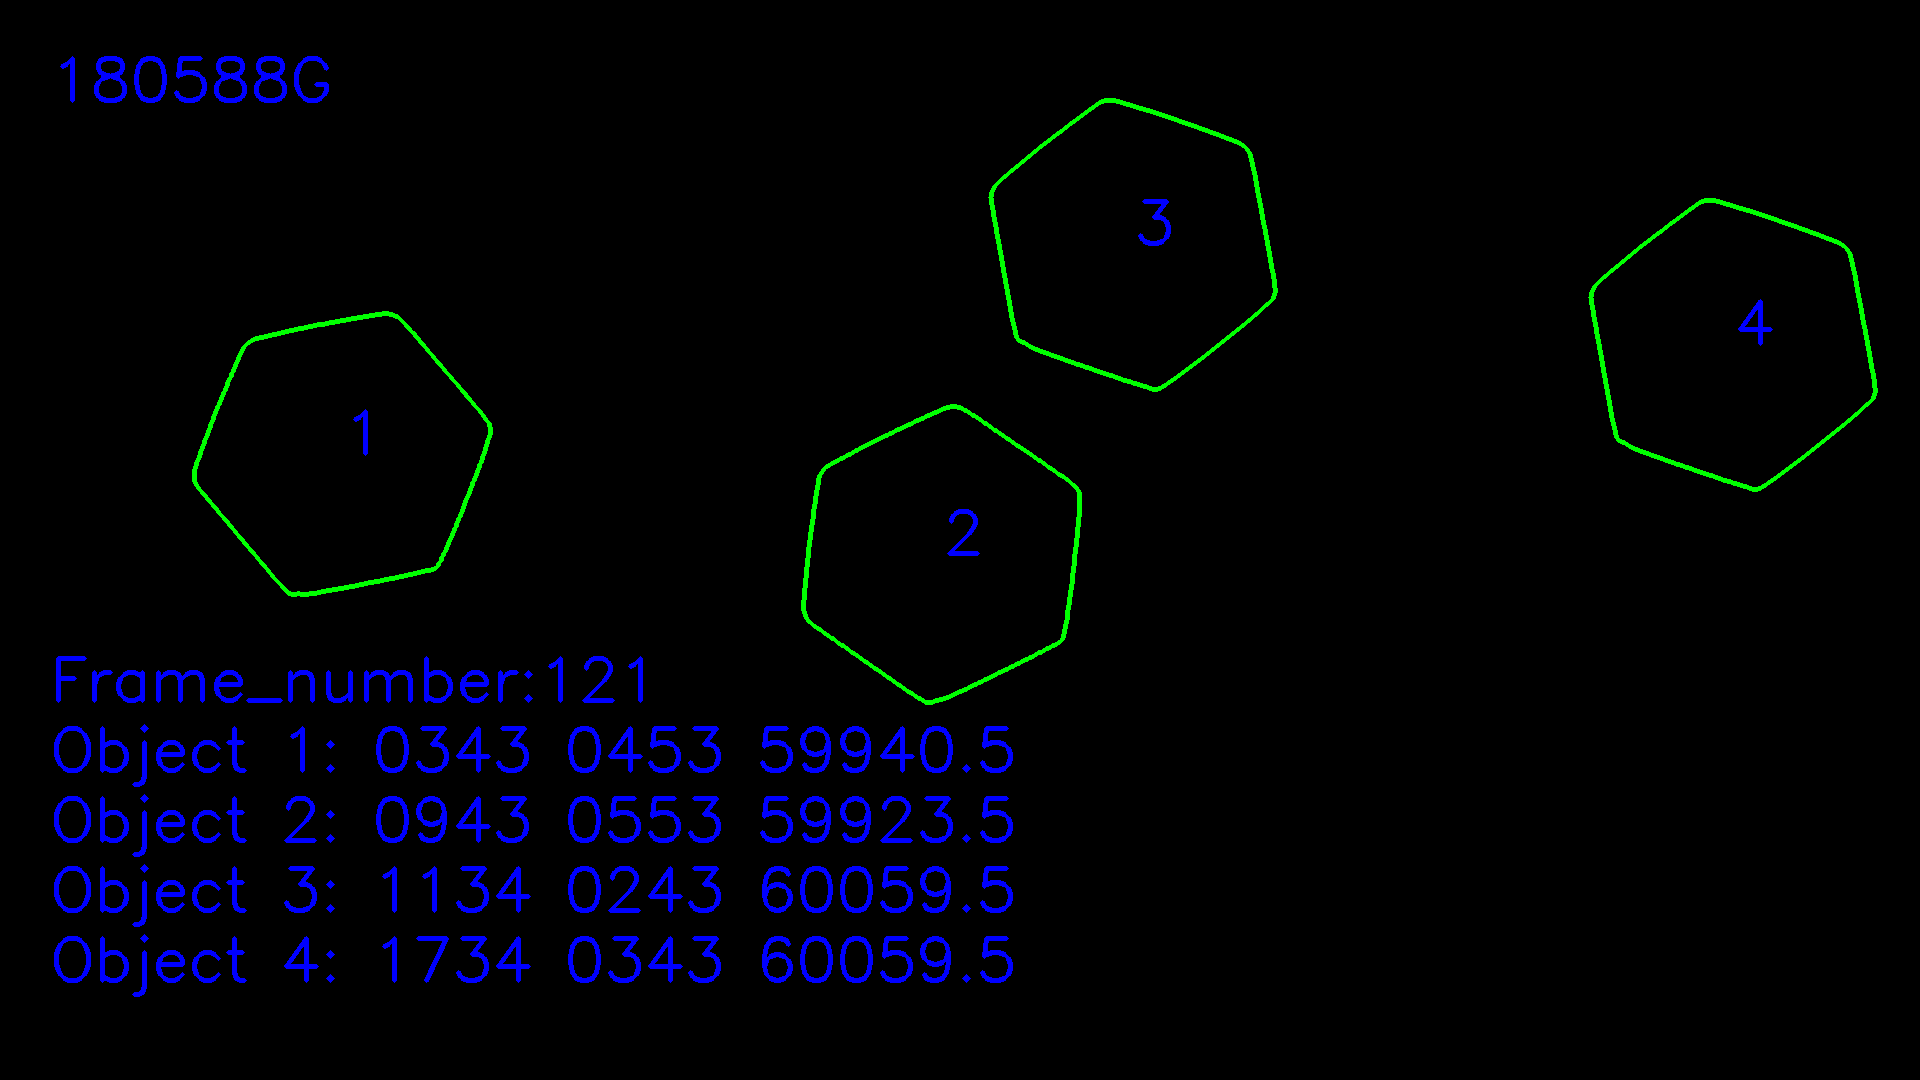

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.33000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([9.33000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.12400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.72400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]
Previousframe [array([3.43000e+02, 4.53000e+02, 5.99405e+04, 1.00000e+00]), array([9.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.13400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.73400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]


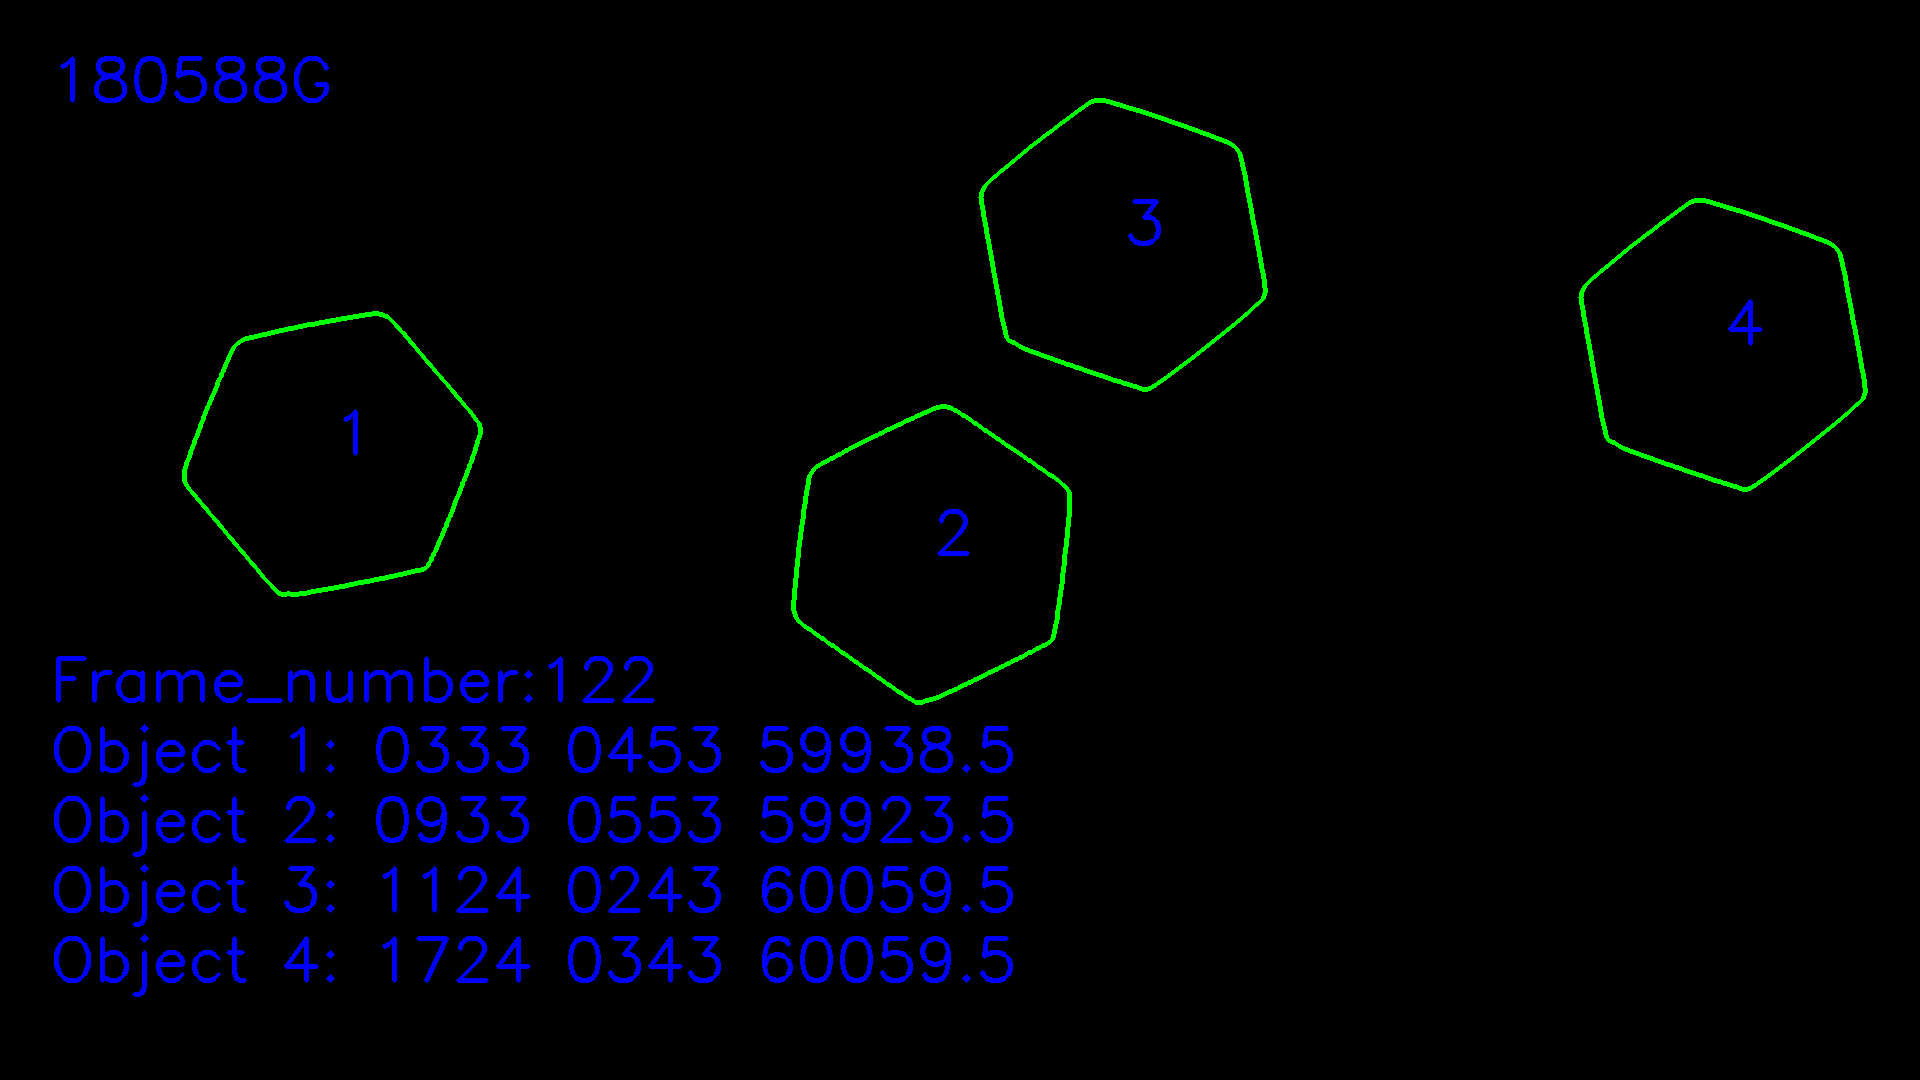

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.23000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.11400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.71400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([3.33000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([9.33000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.12400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.72400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]


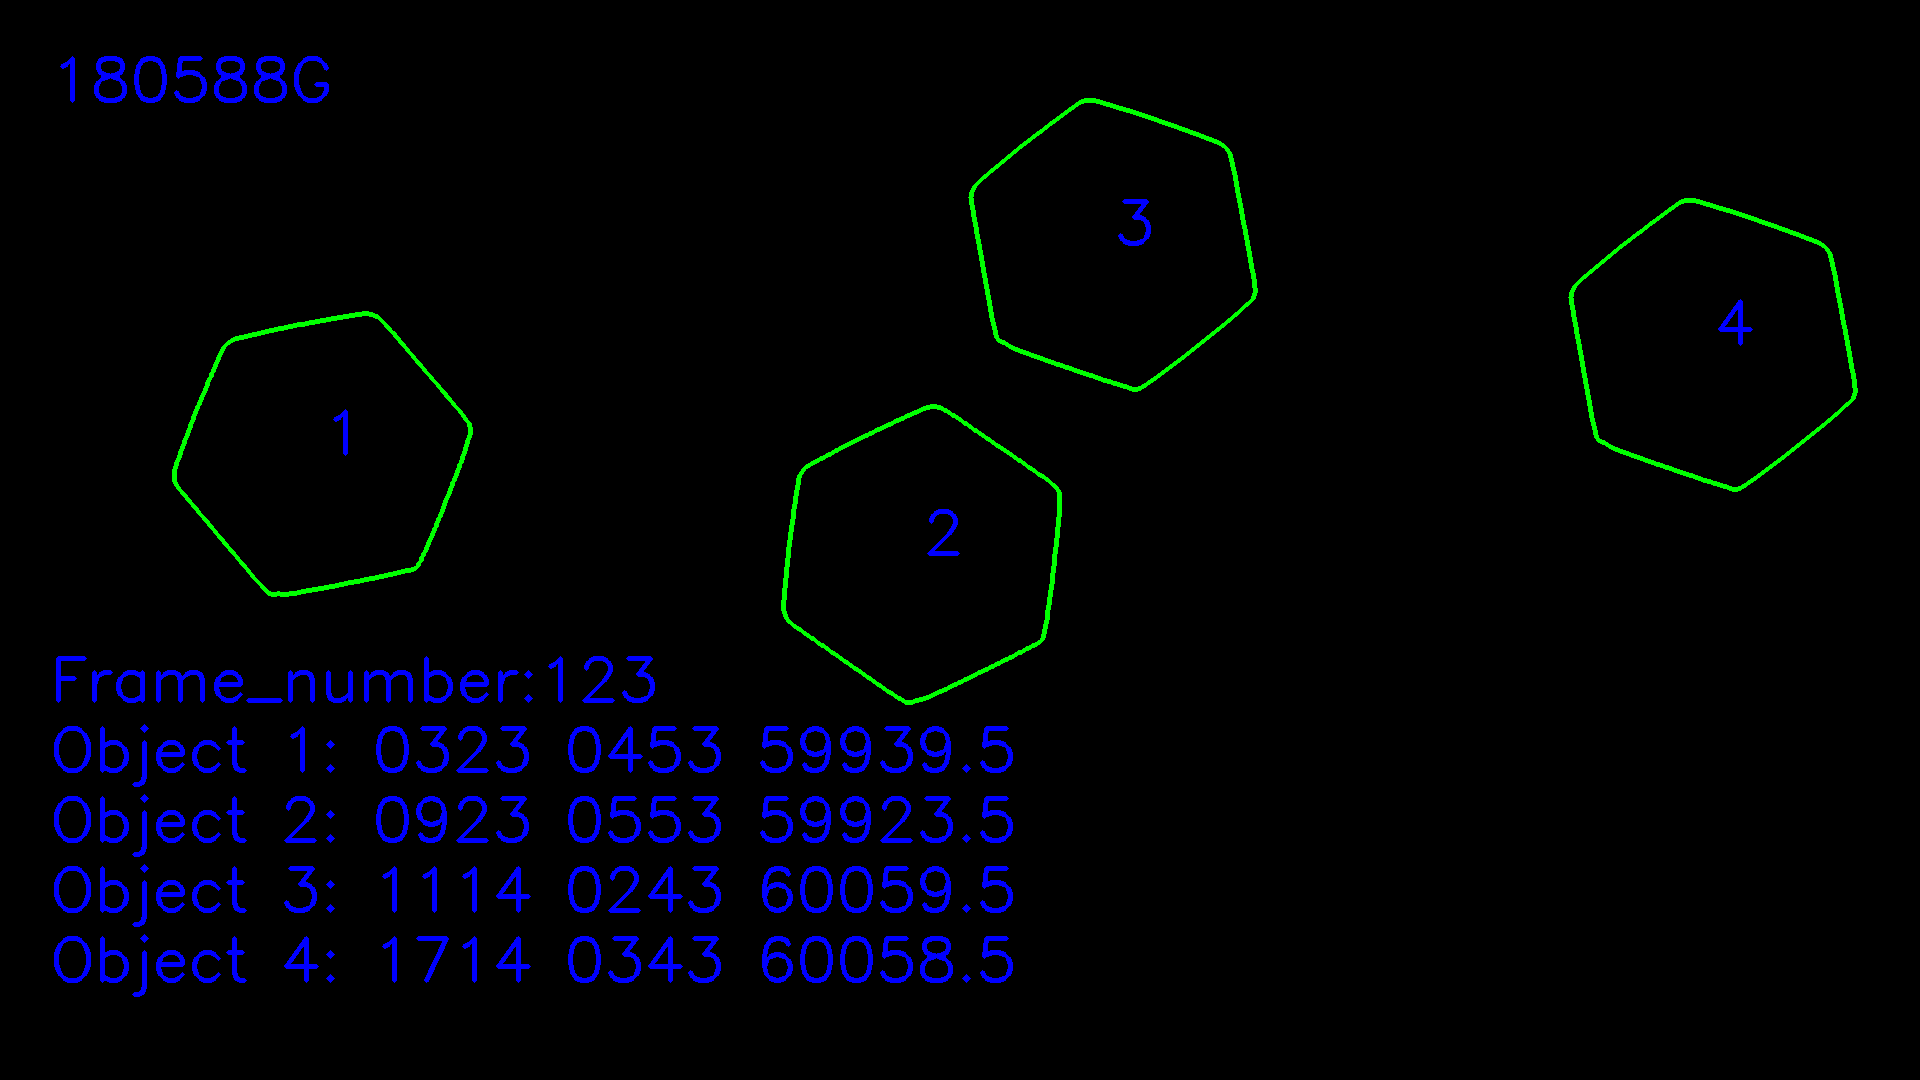

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.13000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.13000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.10400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.70400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]
Previousframe [array([3.23000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.11400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.71400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


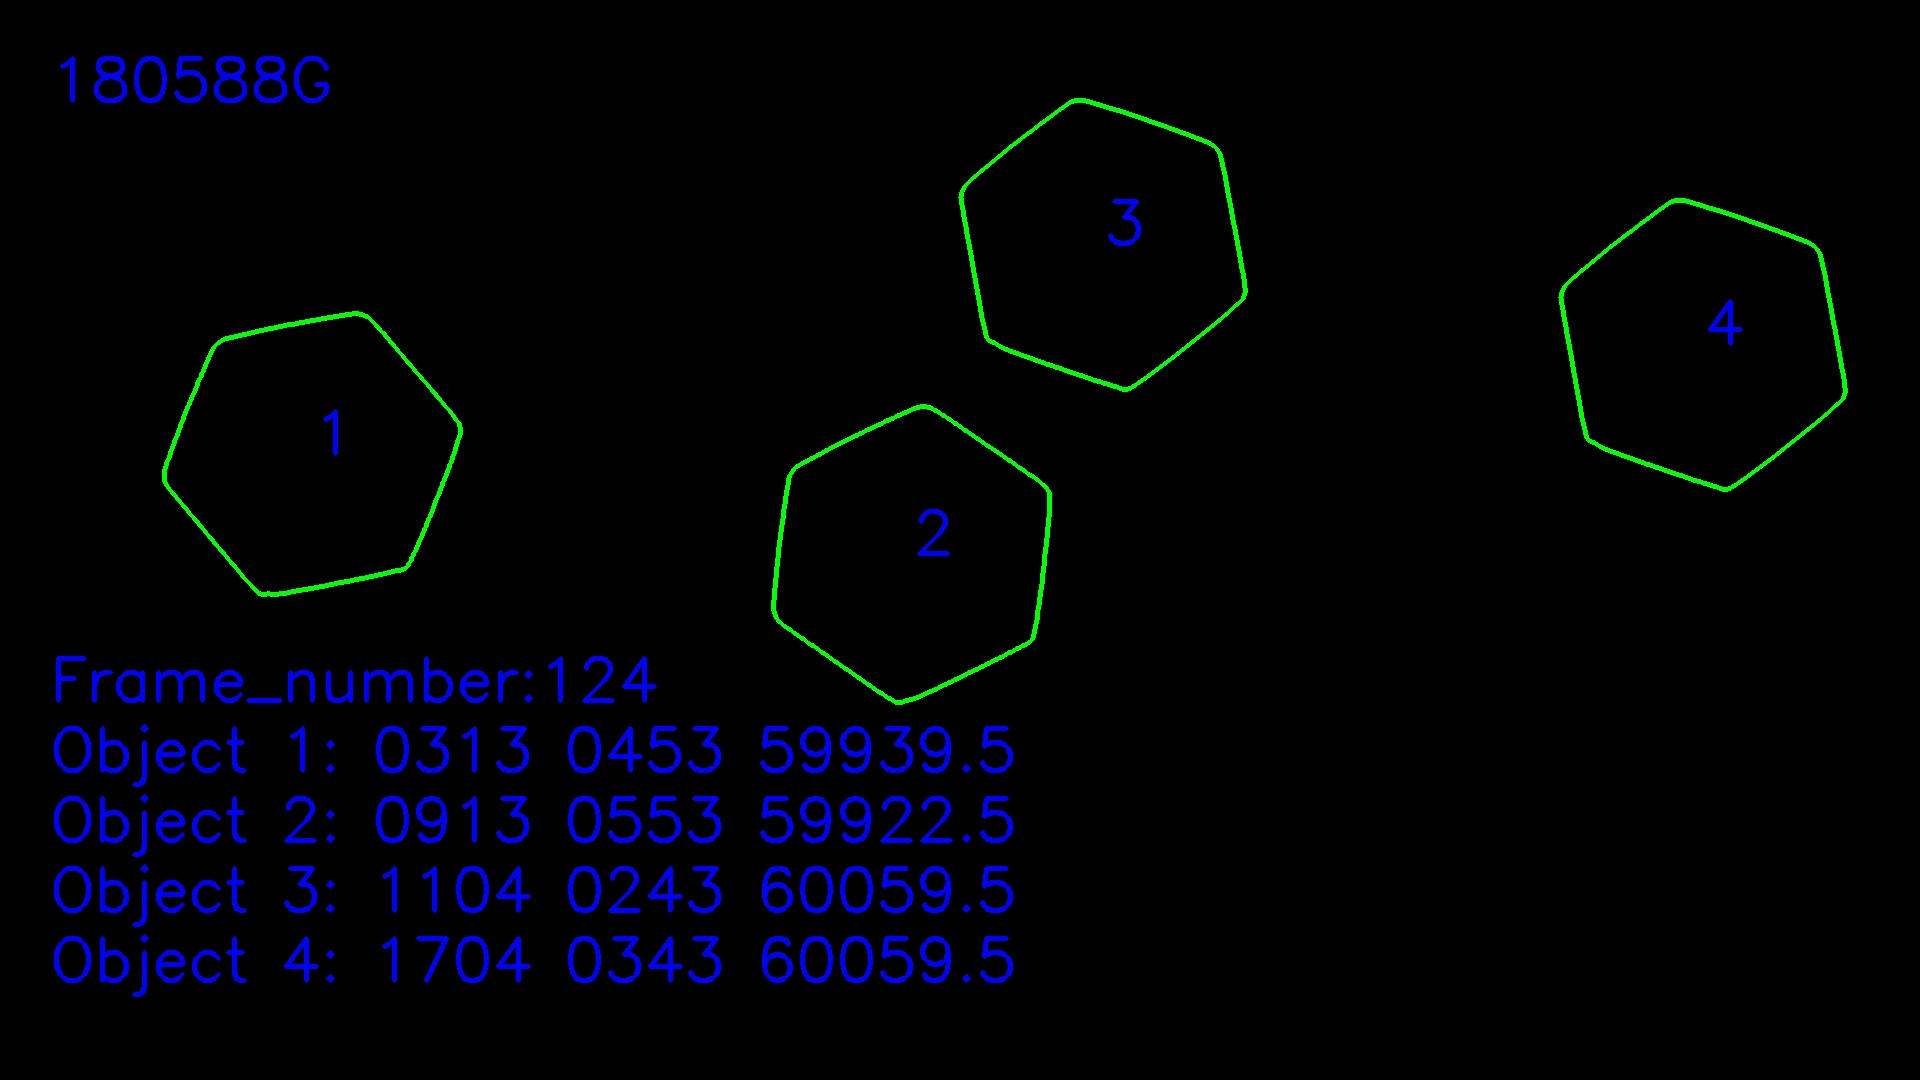

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.03000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.09400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.69400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]
Previousframe [array([3.13000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.13000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.10400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.70400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00])]


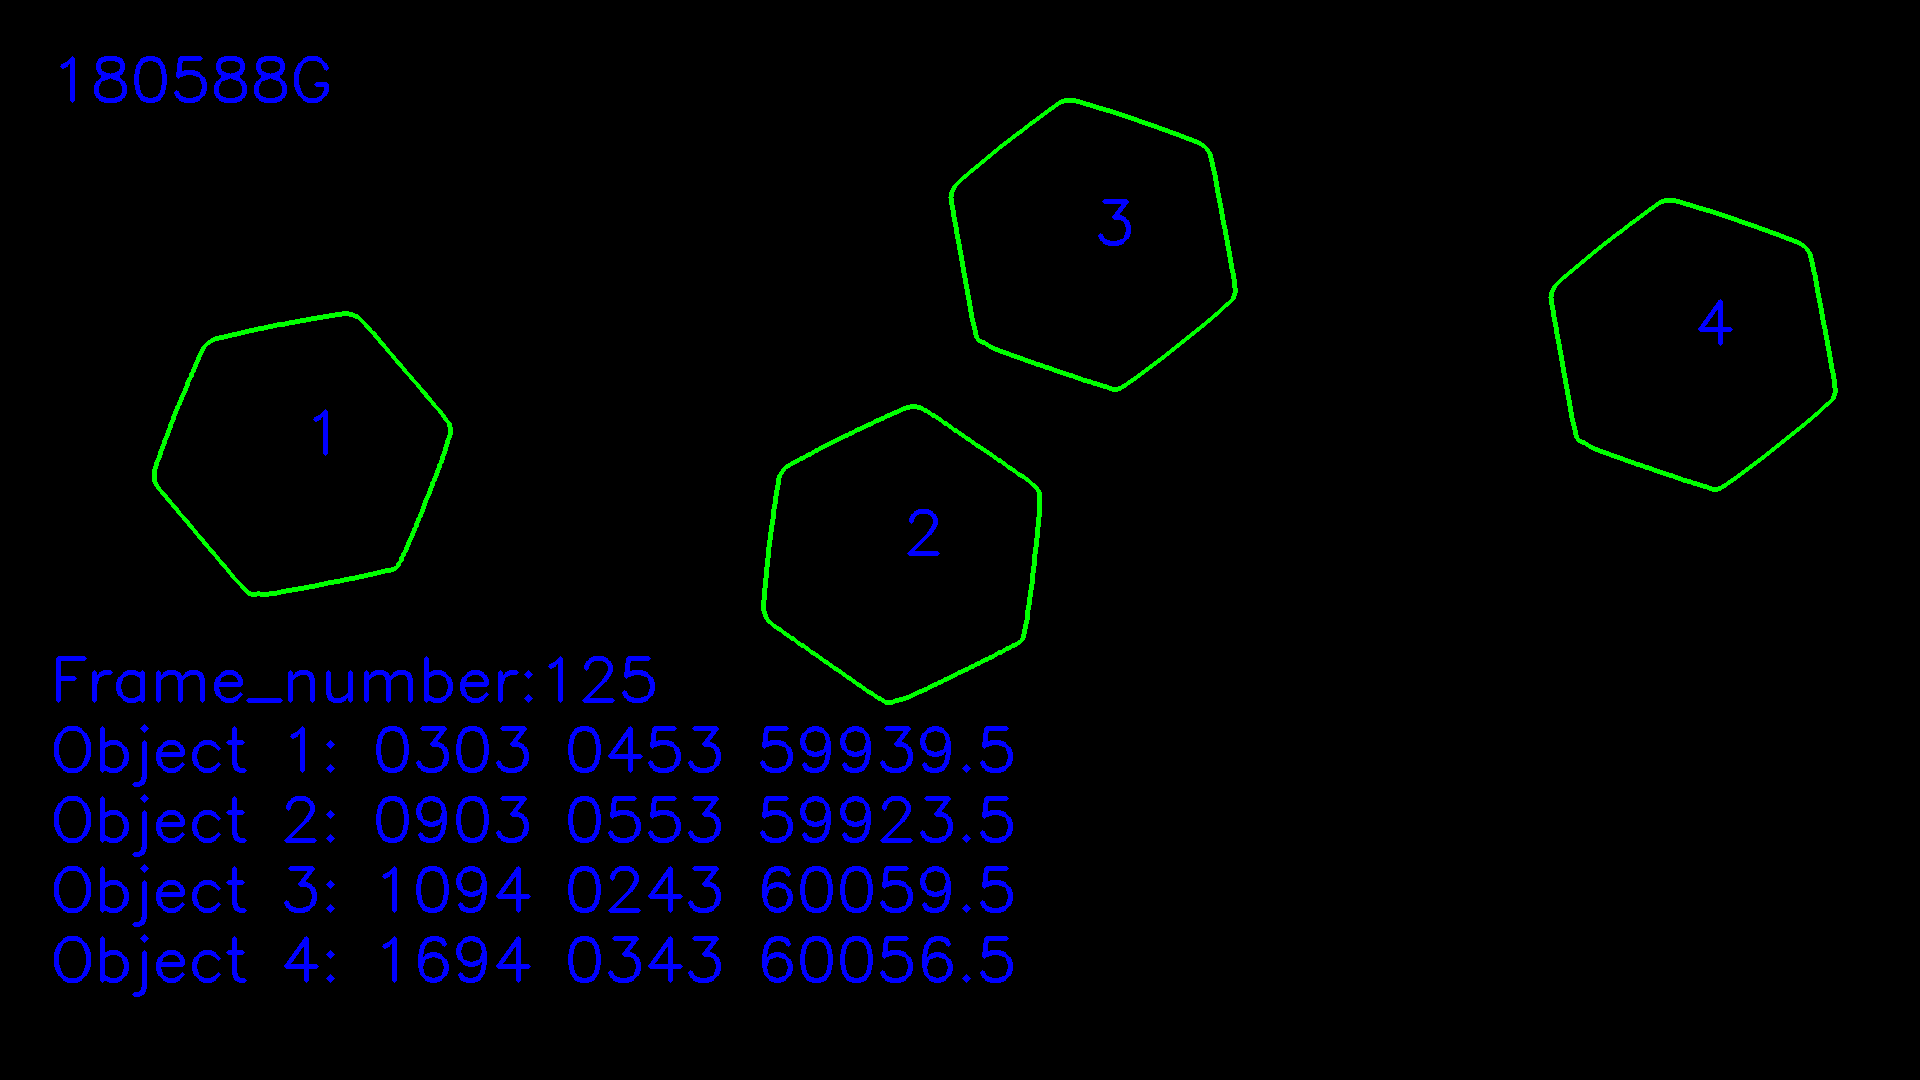

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.93000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.08400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.68400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([3.03000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([9.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.09400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.69400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]


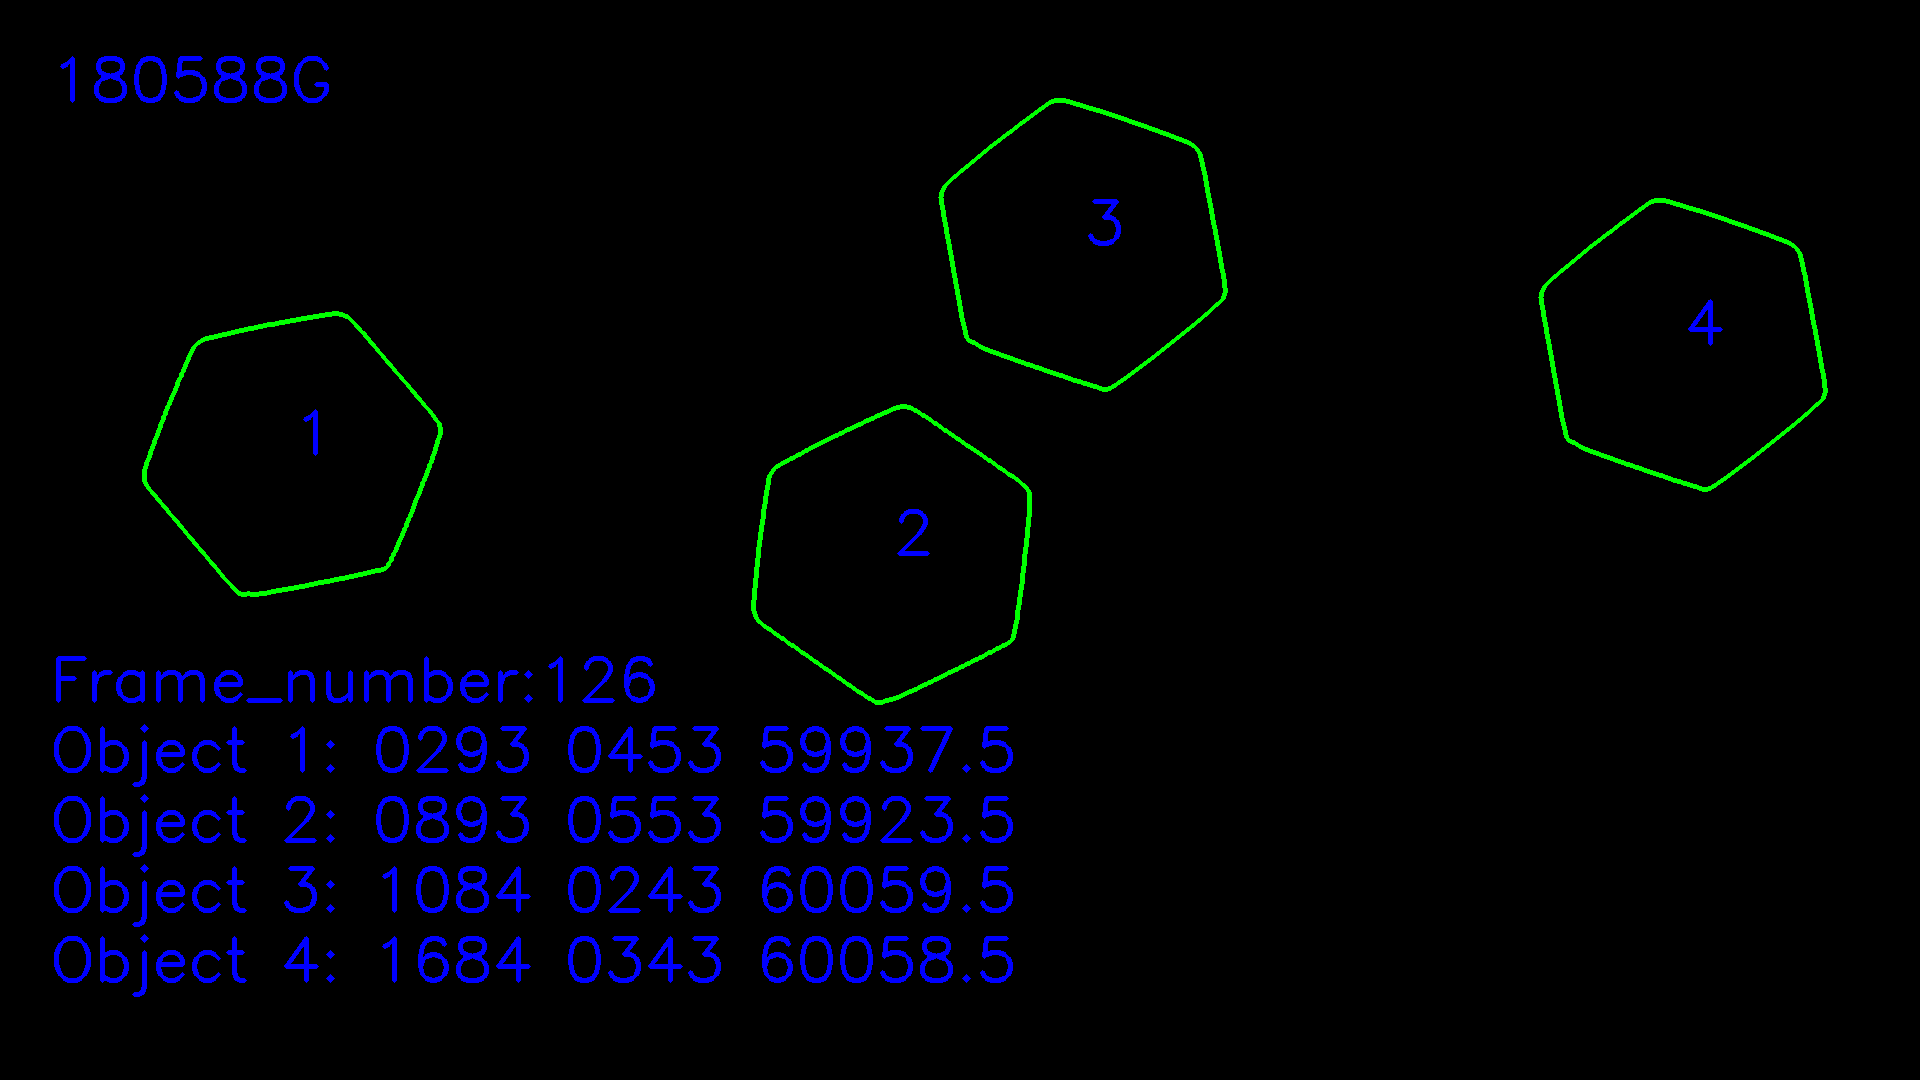

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.83000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.07400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.67400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([2.93000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.08400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.68400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


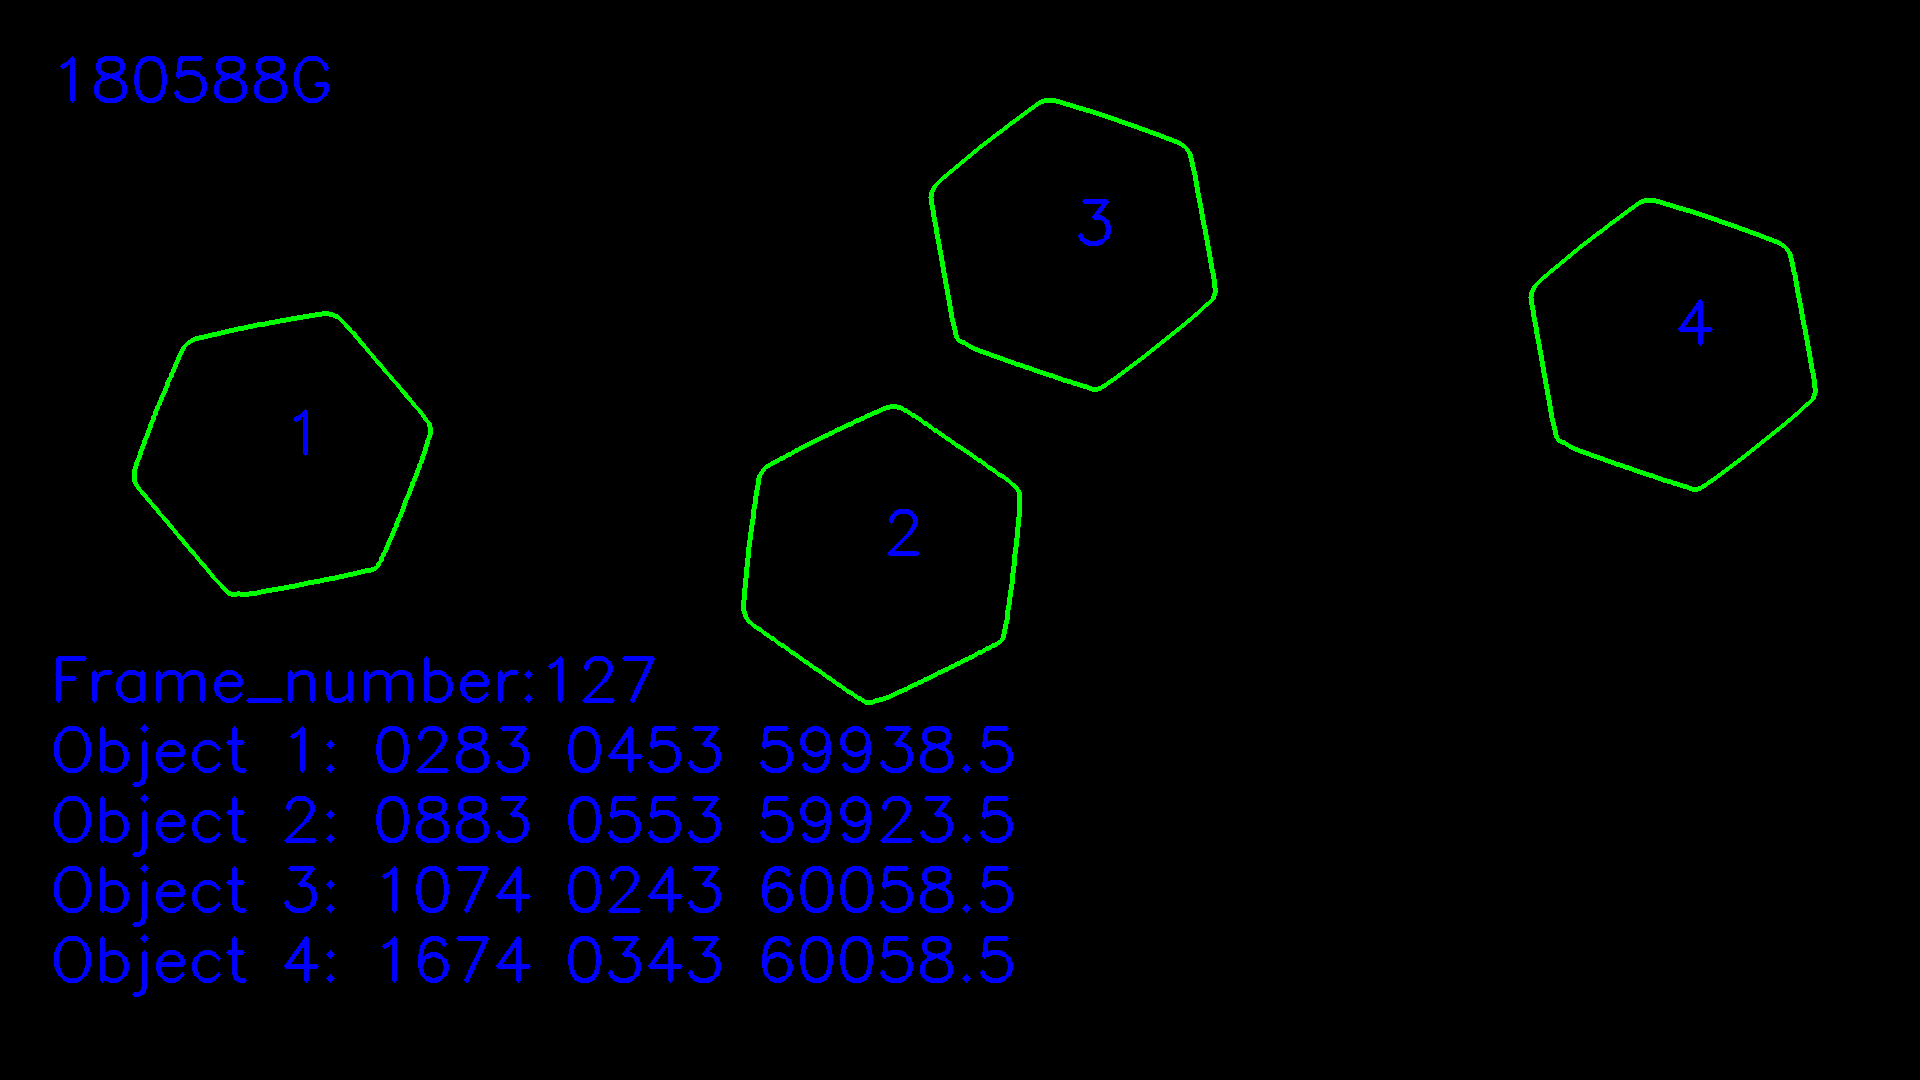

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.73000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.73000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.06400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.66400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([2.83000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.07400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.67400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


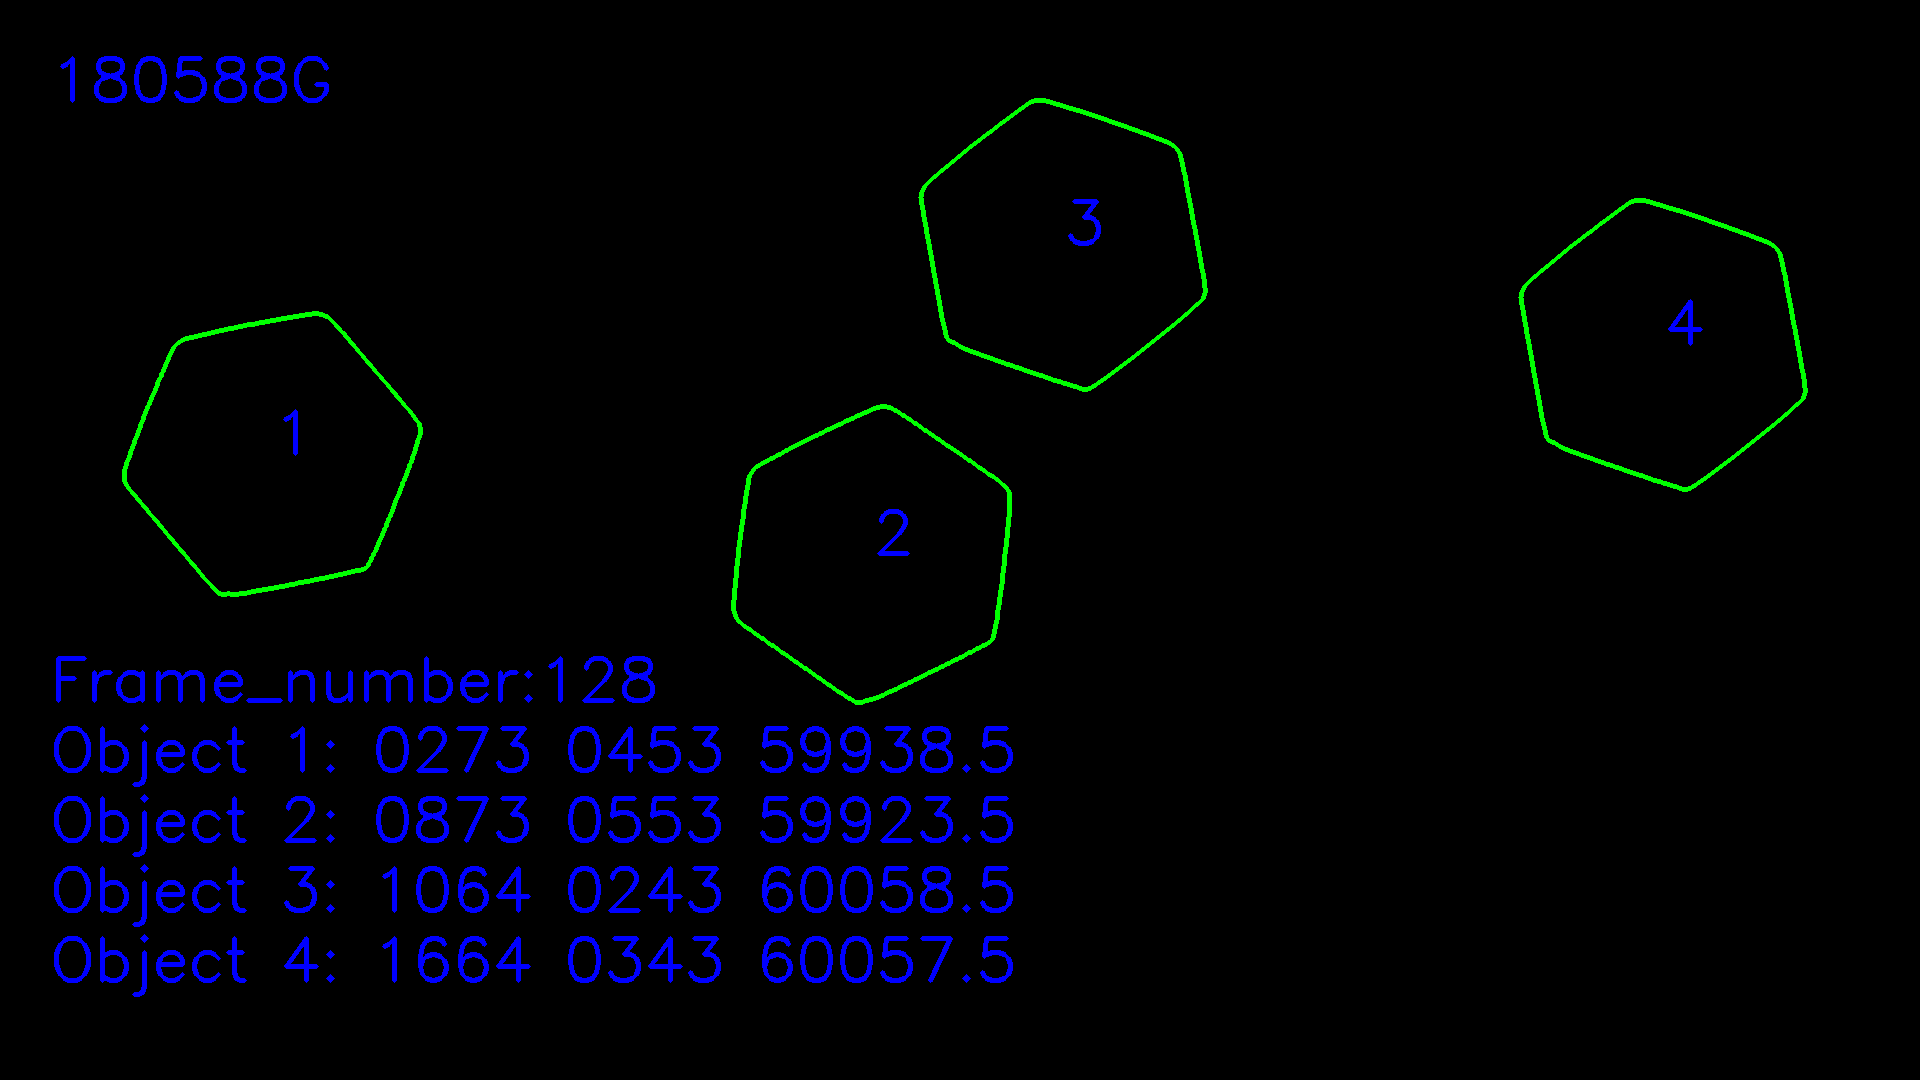

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.63000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.63000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.05400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.65400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([2.73000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.73000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([1.06400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.66400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


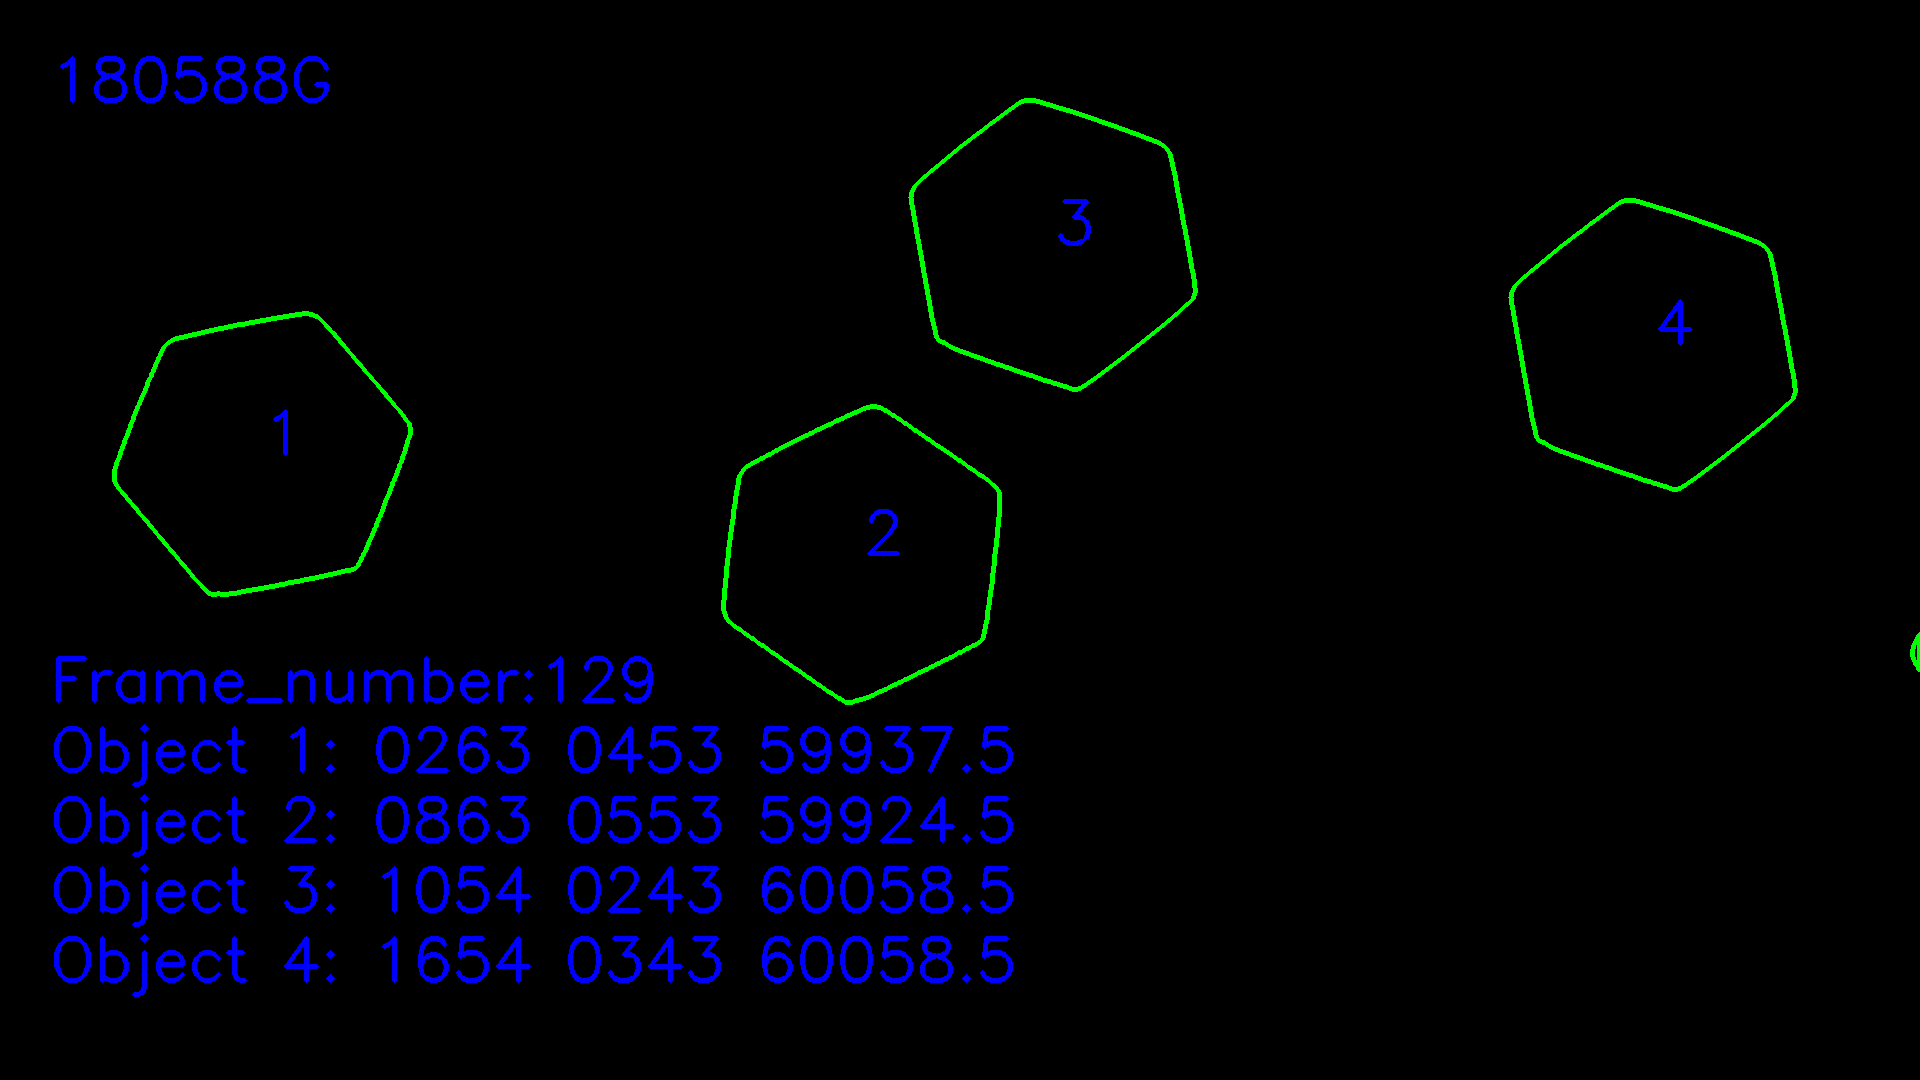

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.53000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.04400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.64400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([2.63000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.63000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.05400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.65400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


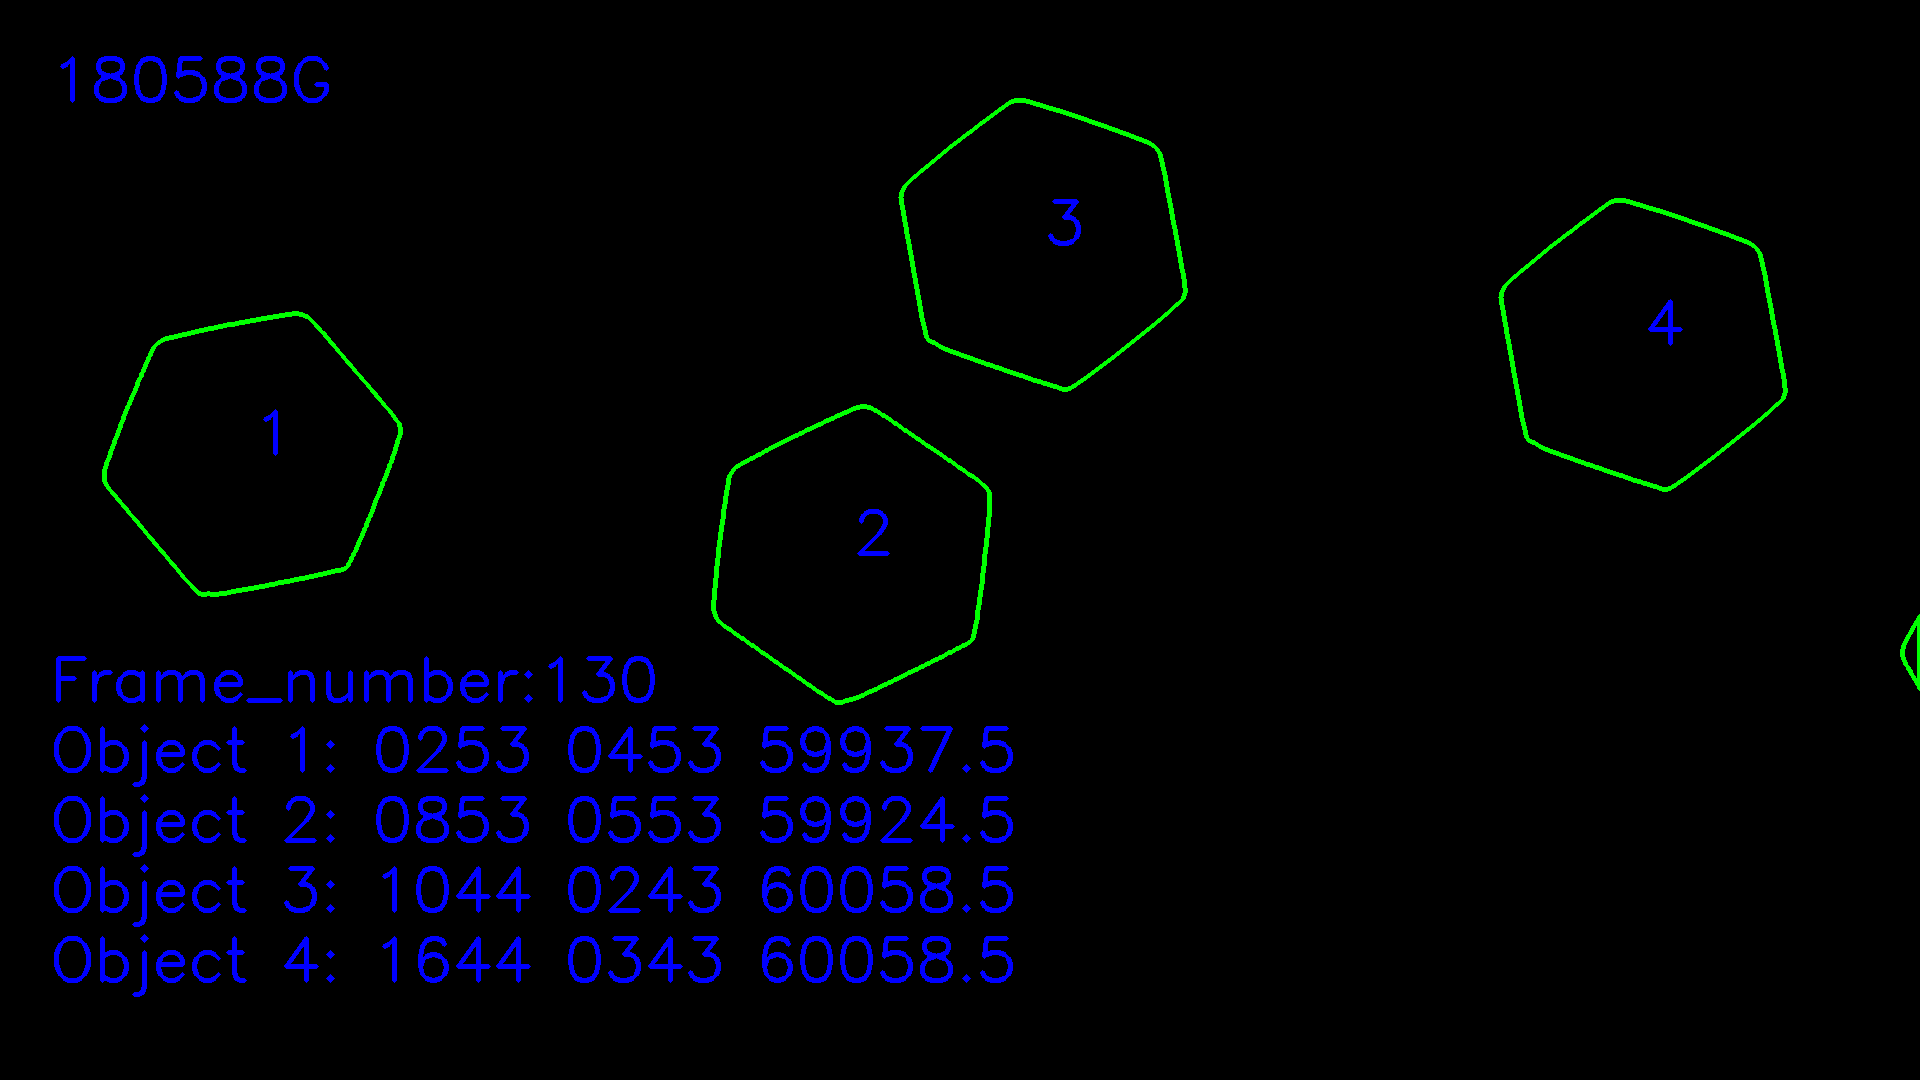

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.43000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.43000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.03400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.63400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([2.53000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.04400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.64400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


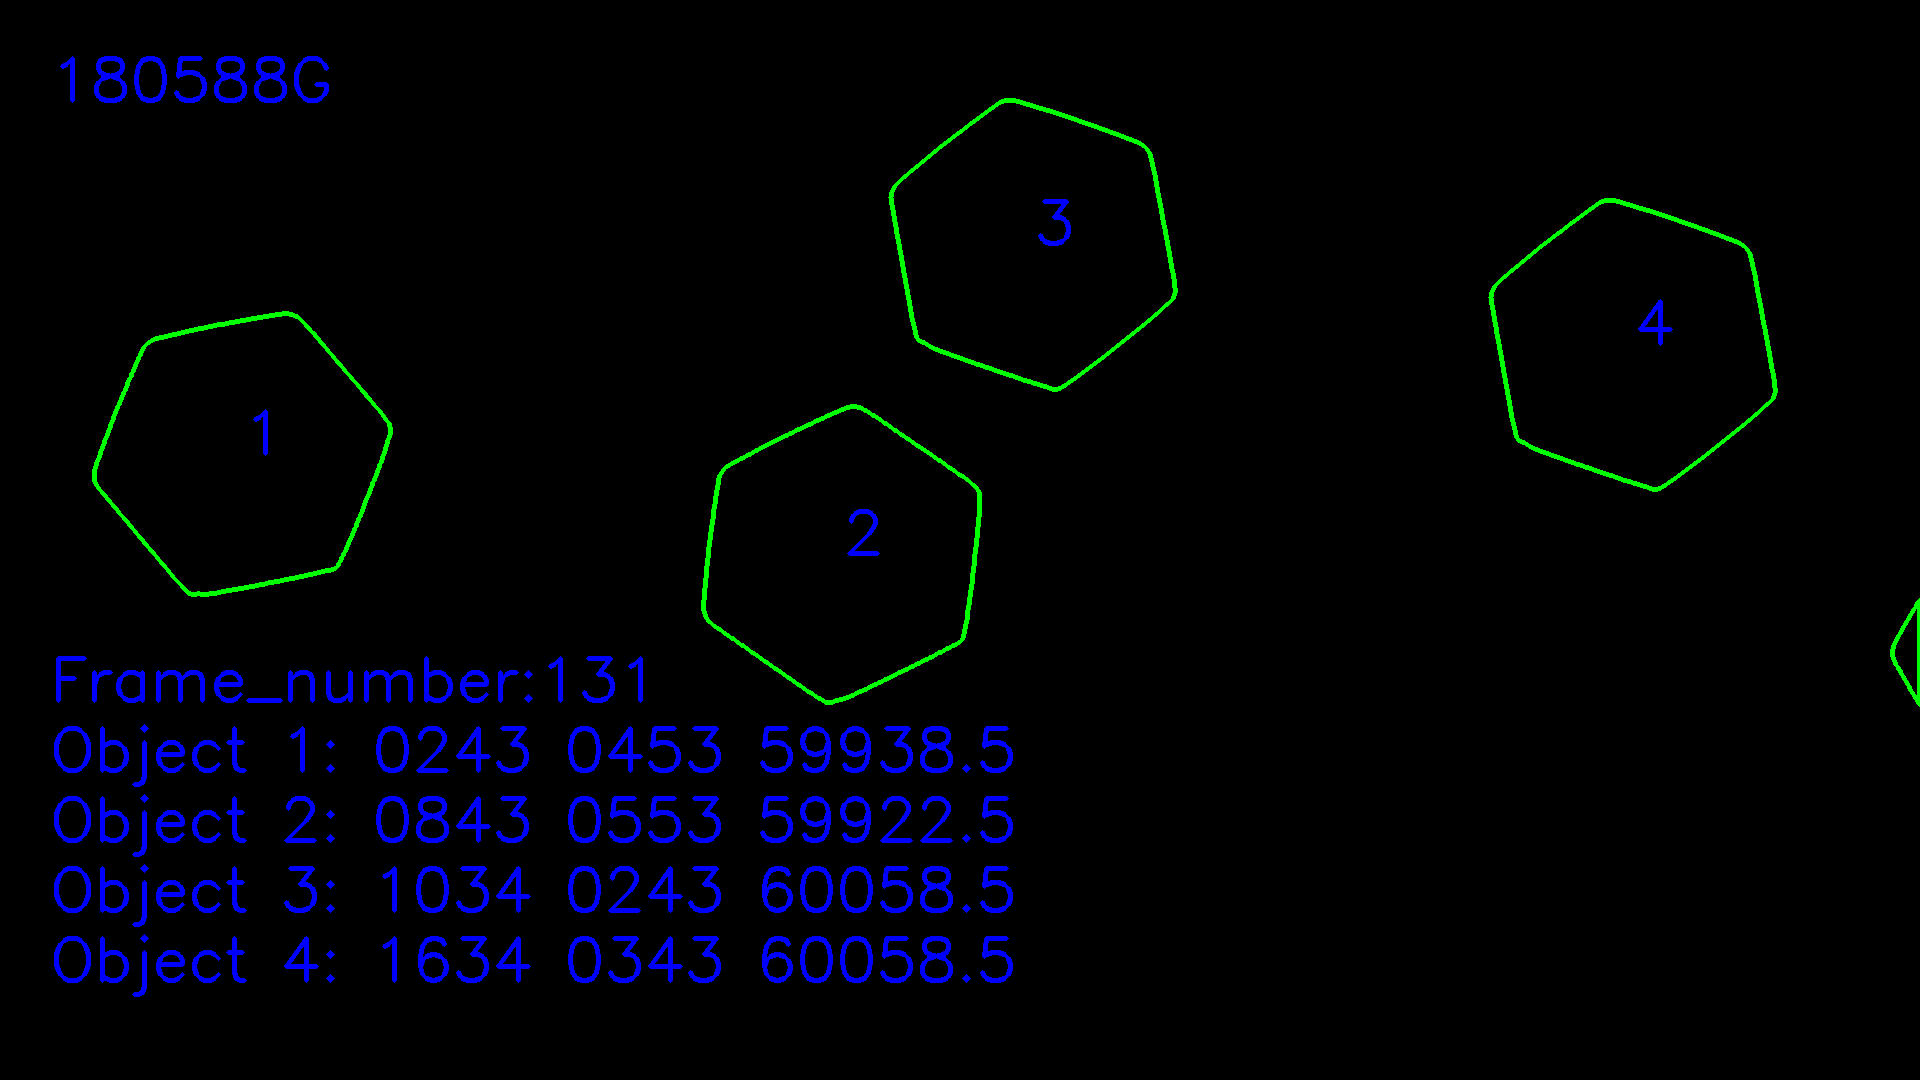

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.33000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.33000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.02400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.62400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([2.43000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.43000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.03400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.63400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


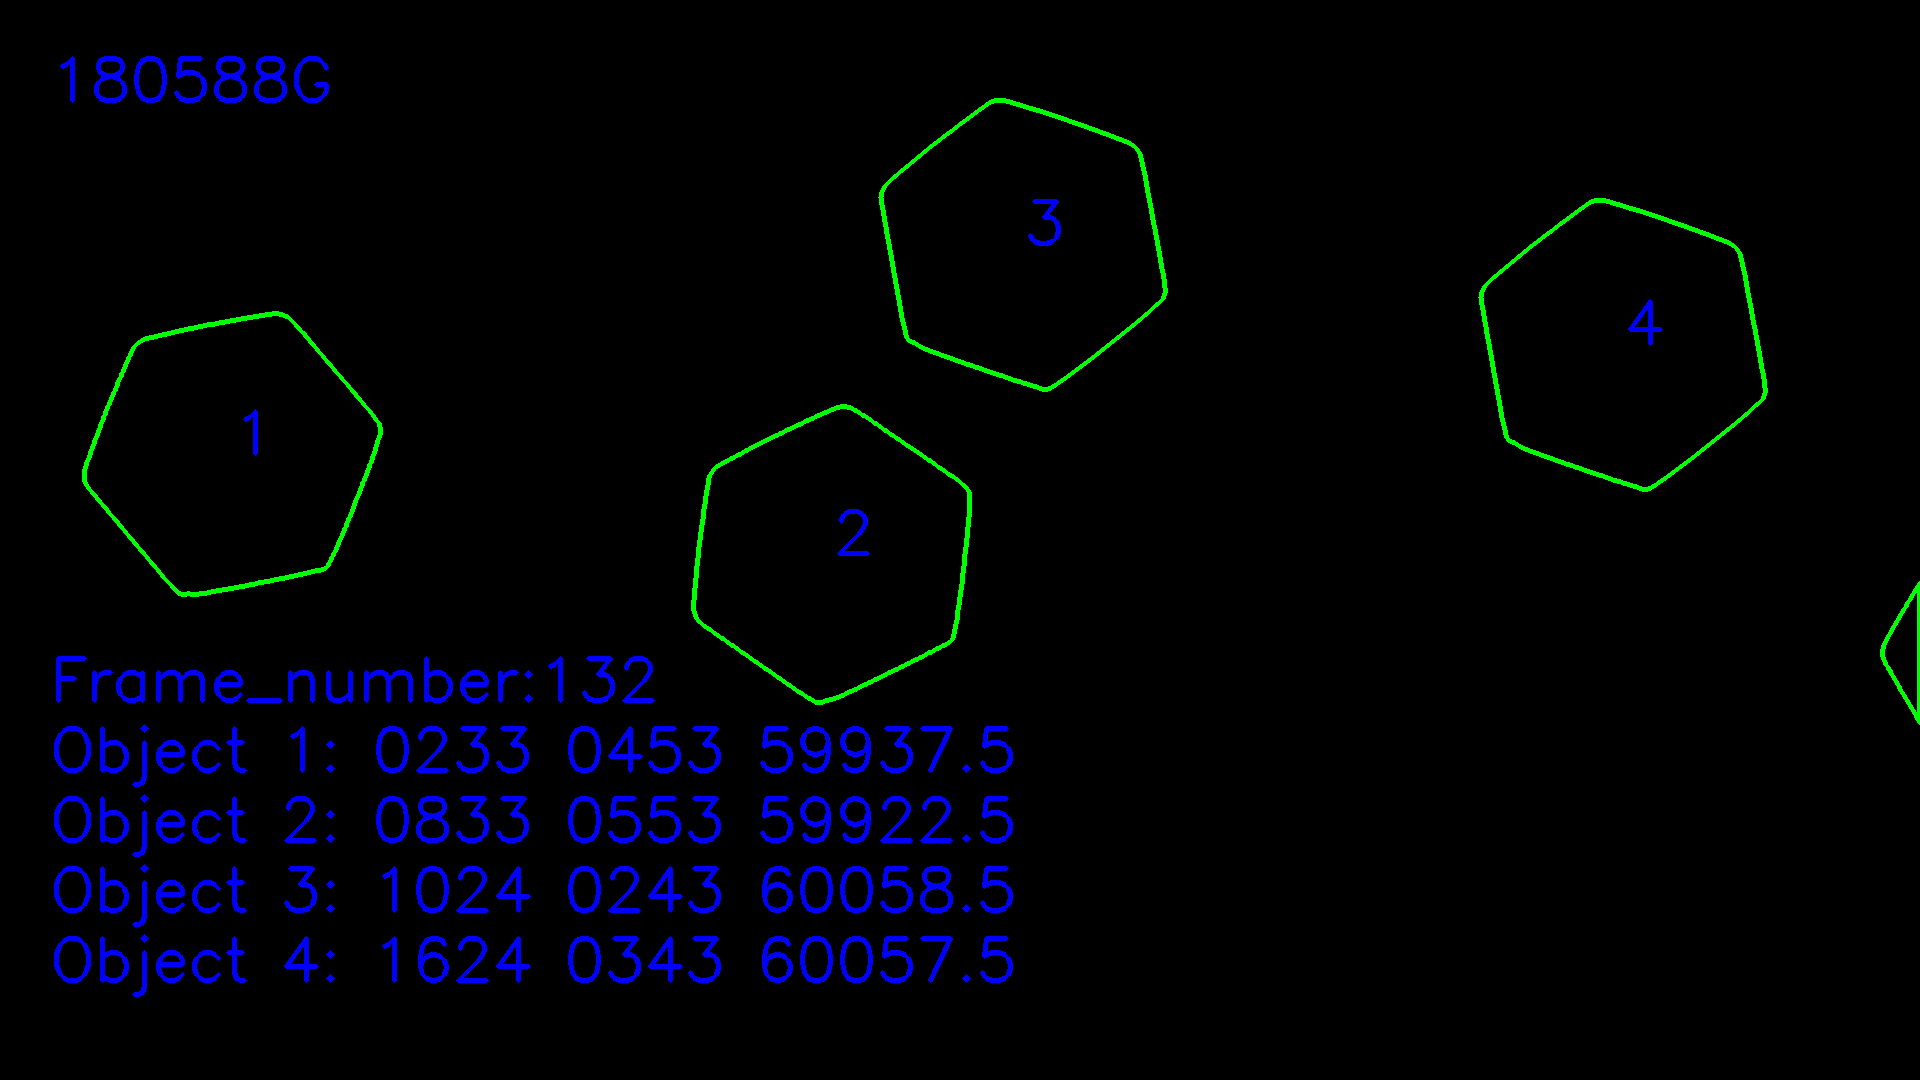

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.23000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.23000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.01400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.61400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([2.33000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.33000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.02400e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.62400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


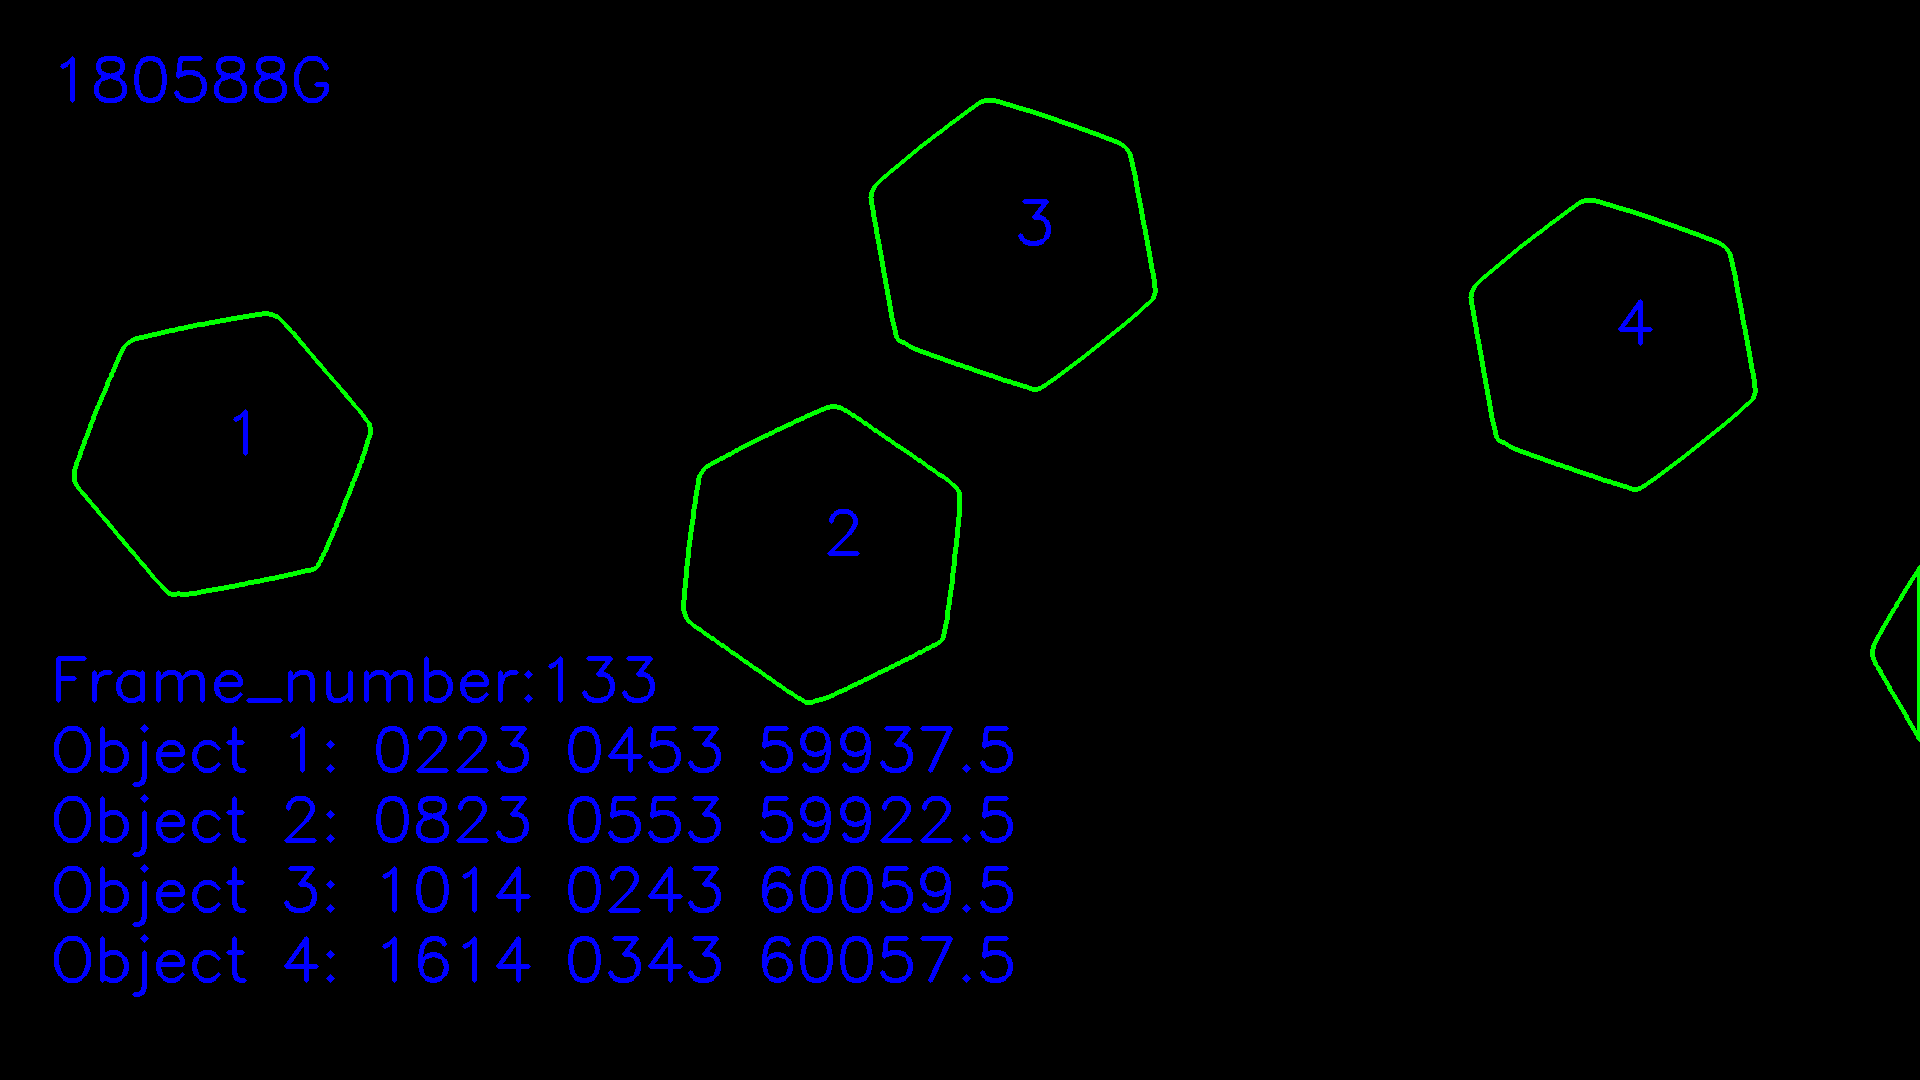

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.13000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.13000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.00400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.60400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]
Previousframe [array([2.23000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.23000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([1.01400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.61400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


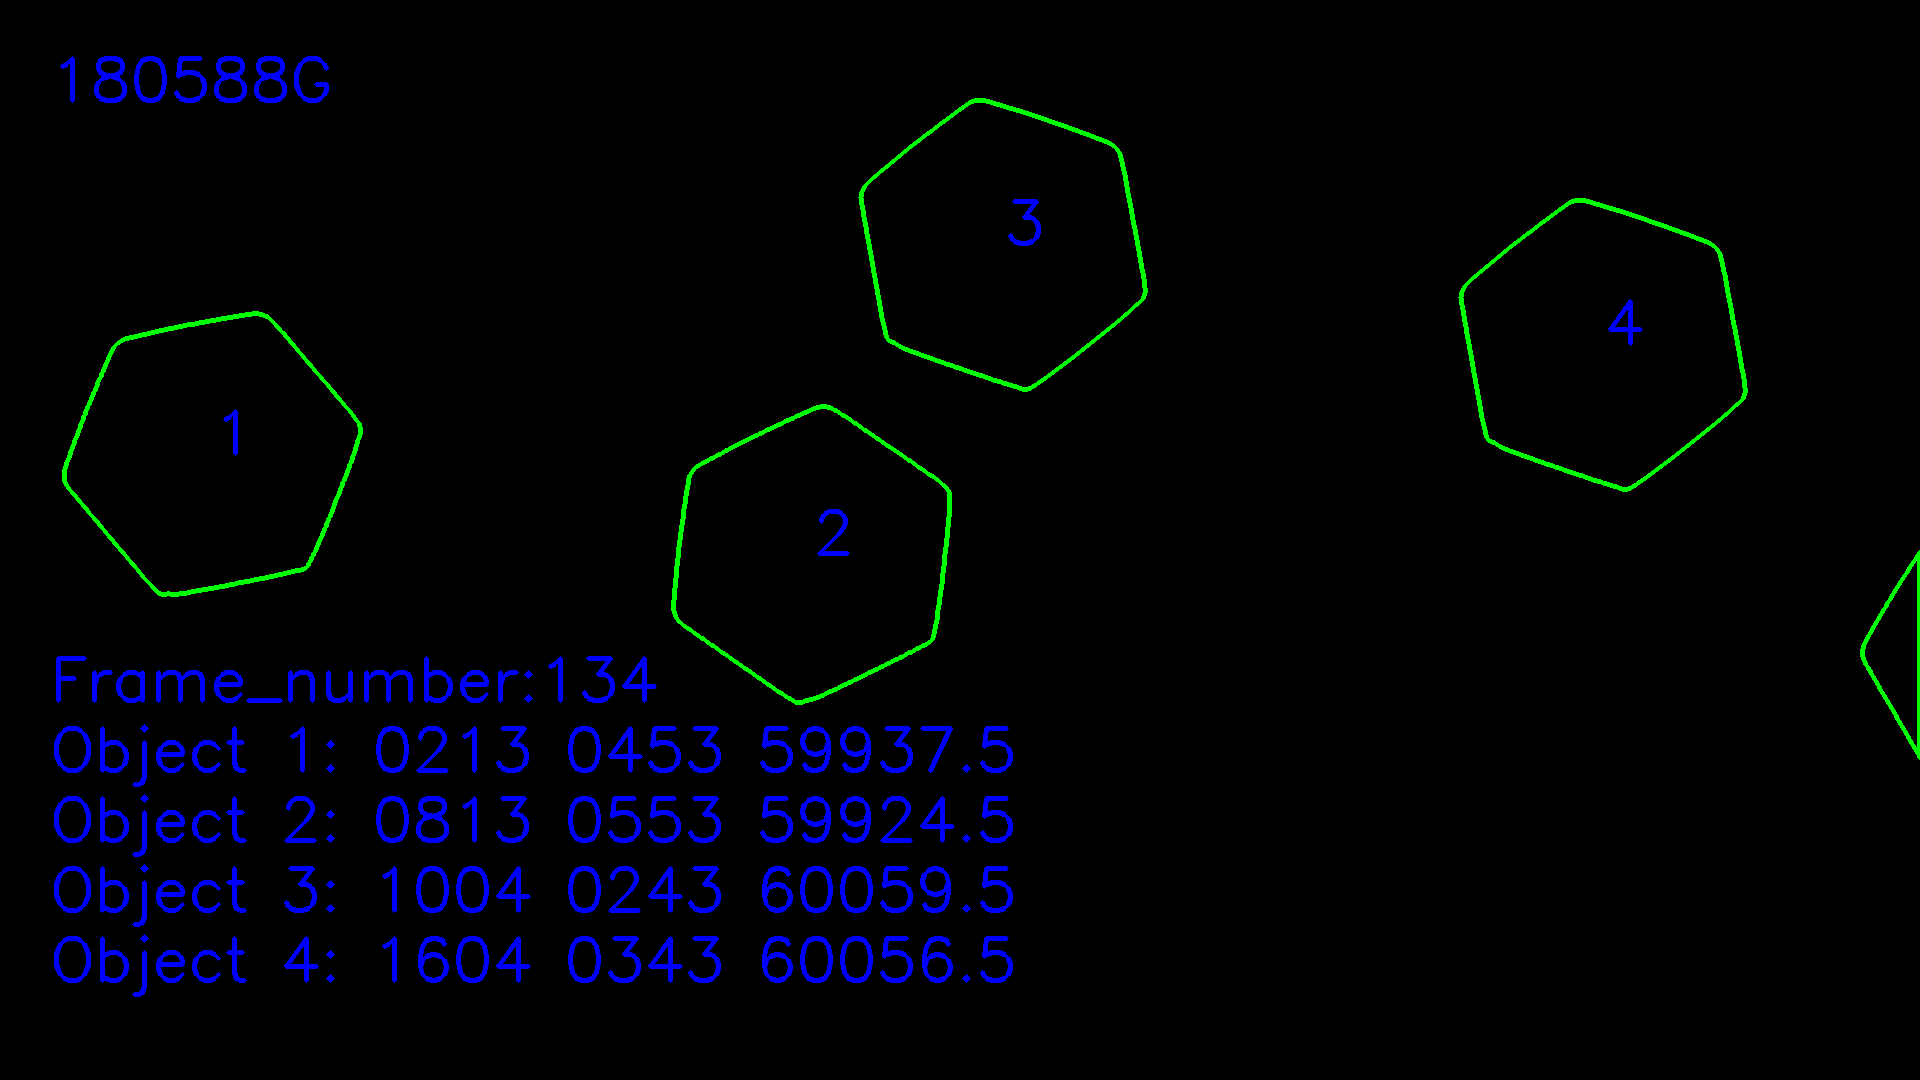

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.03000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.59400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([2.13000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([8.13000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([1.00400e+03, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.60400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]


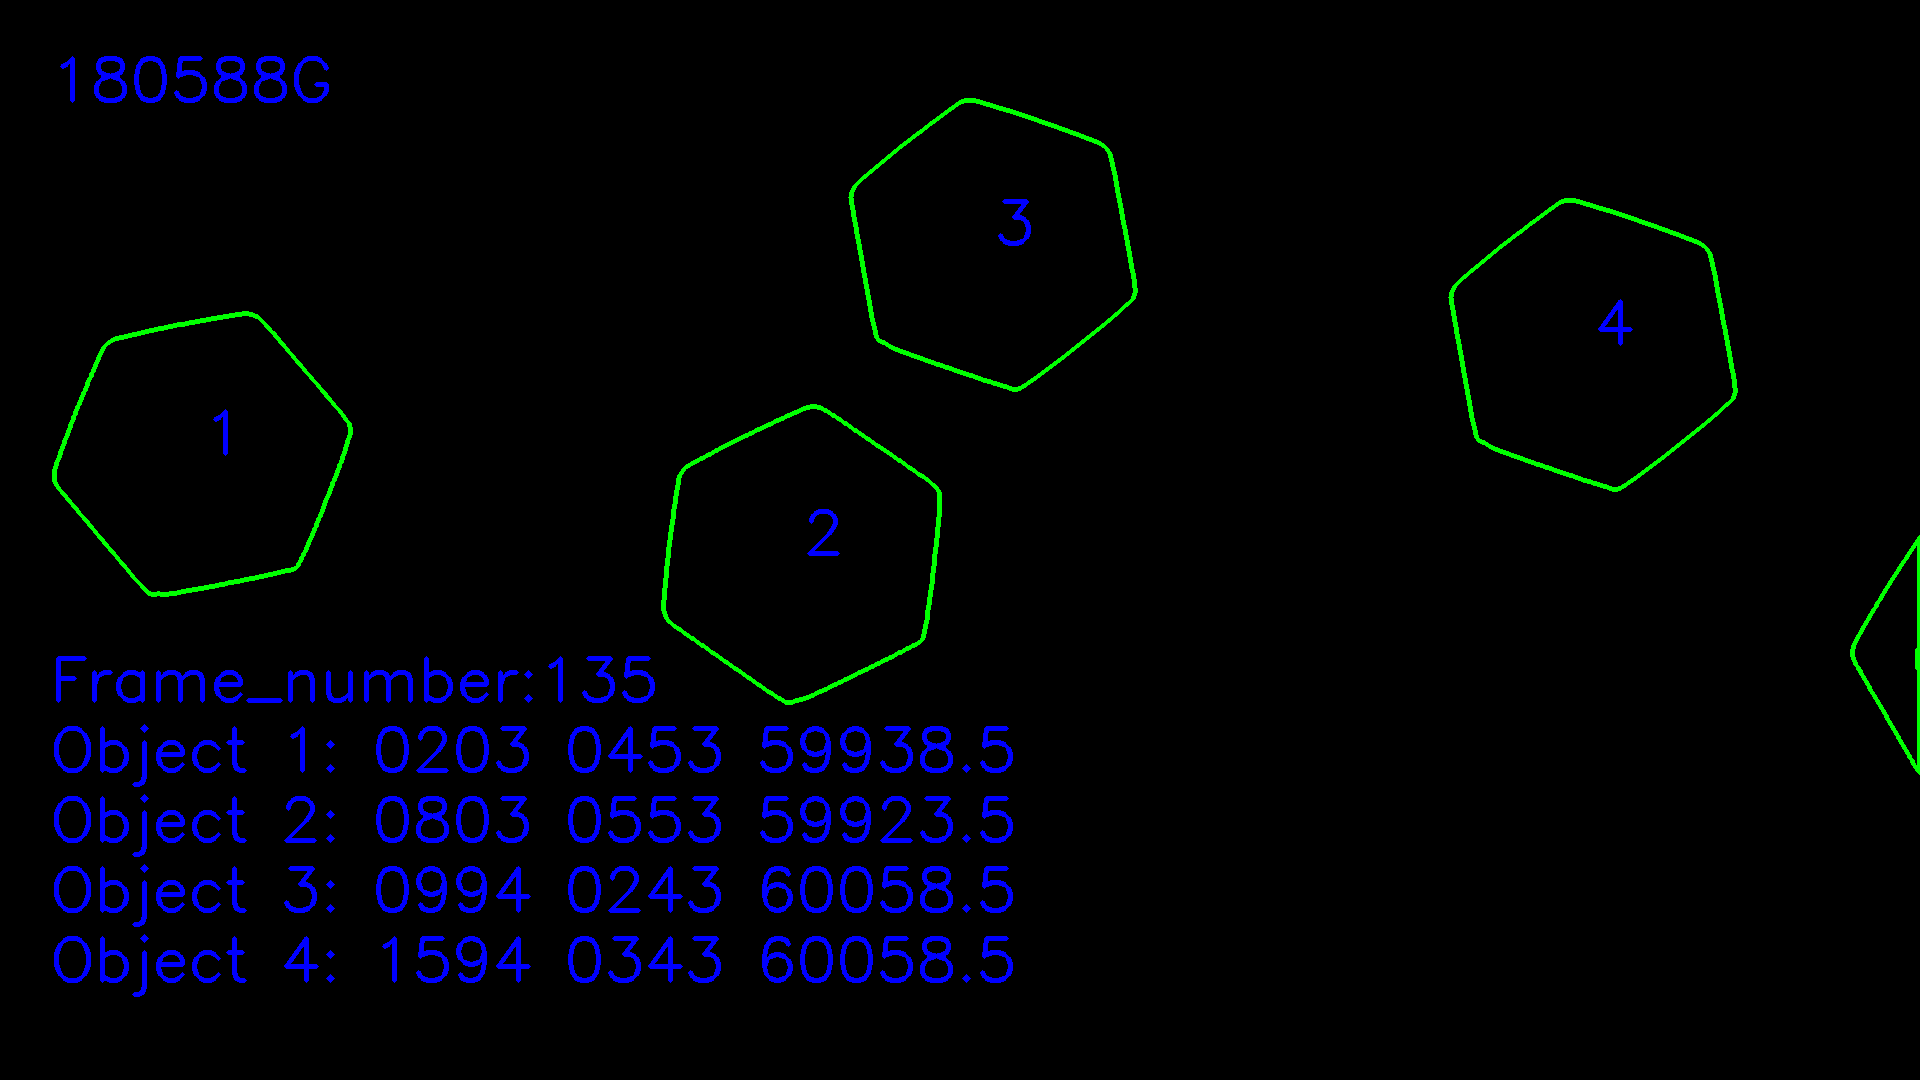

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.93000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.58400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([2.03000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00]), array([8.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.59400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


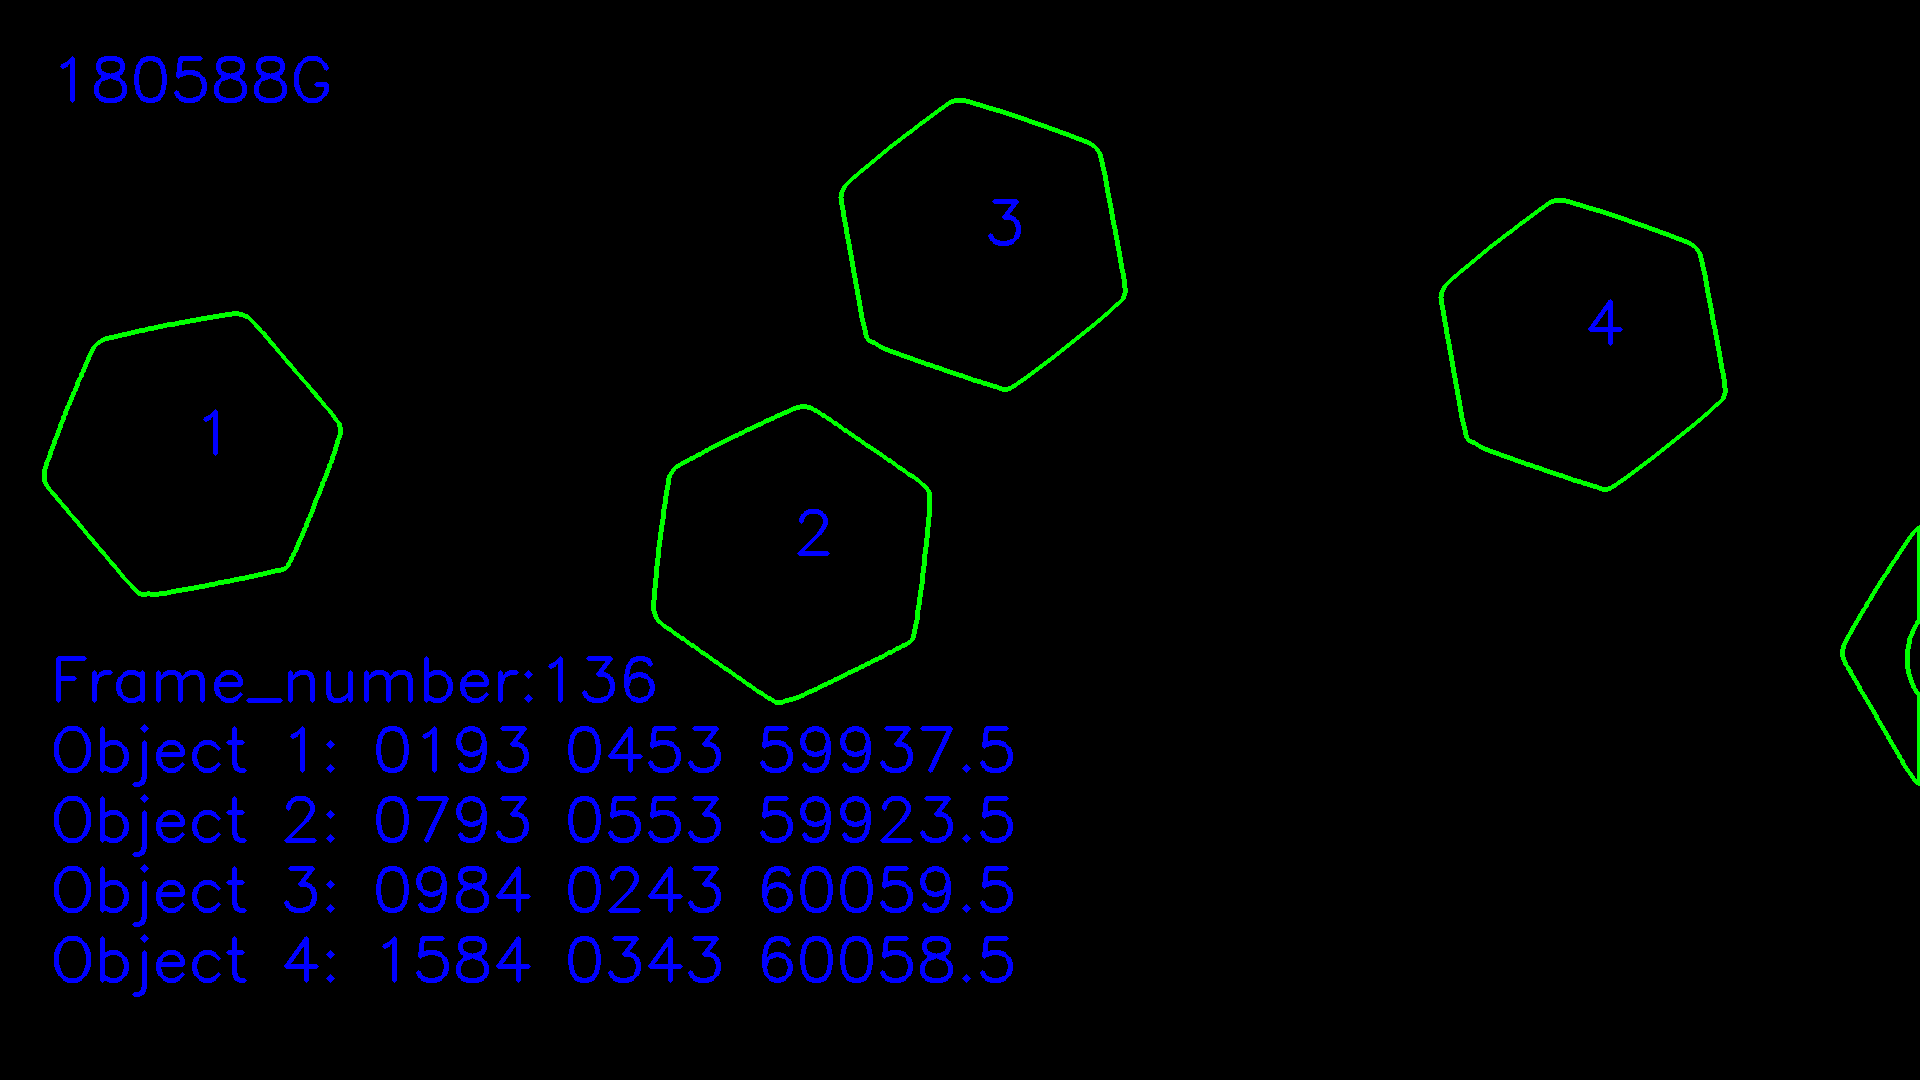

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.83000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.57400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.93000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.58400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


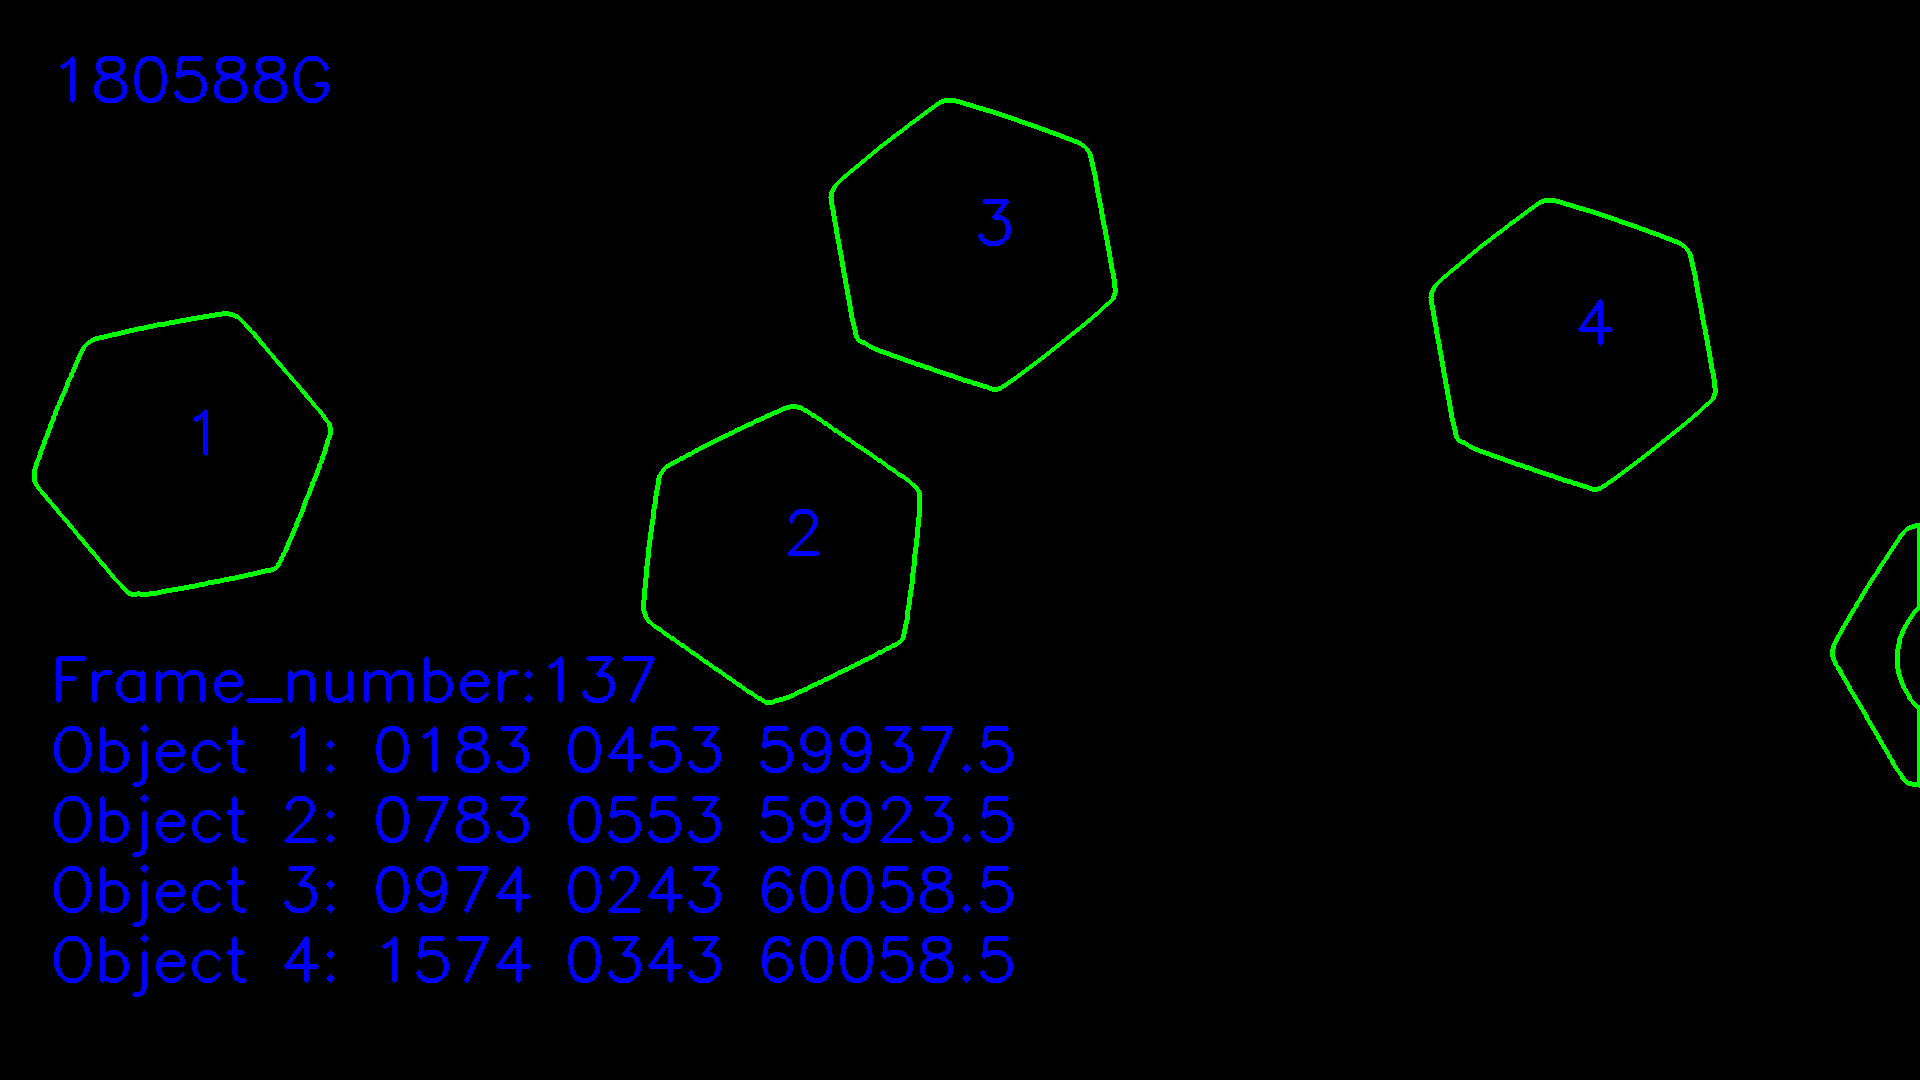

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.73000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.73000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.64000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.56400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.83000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.57400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


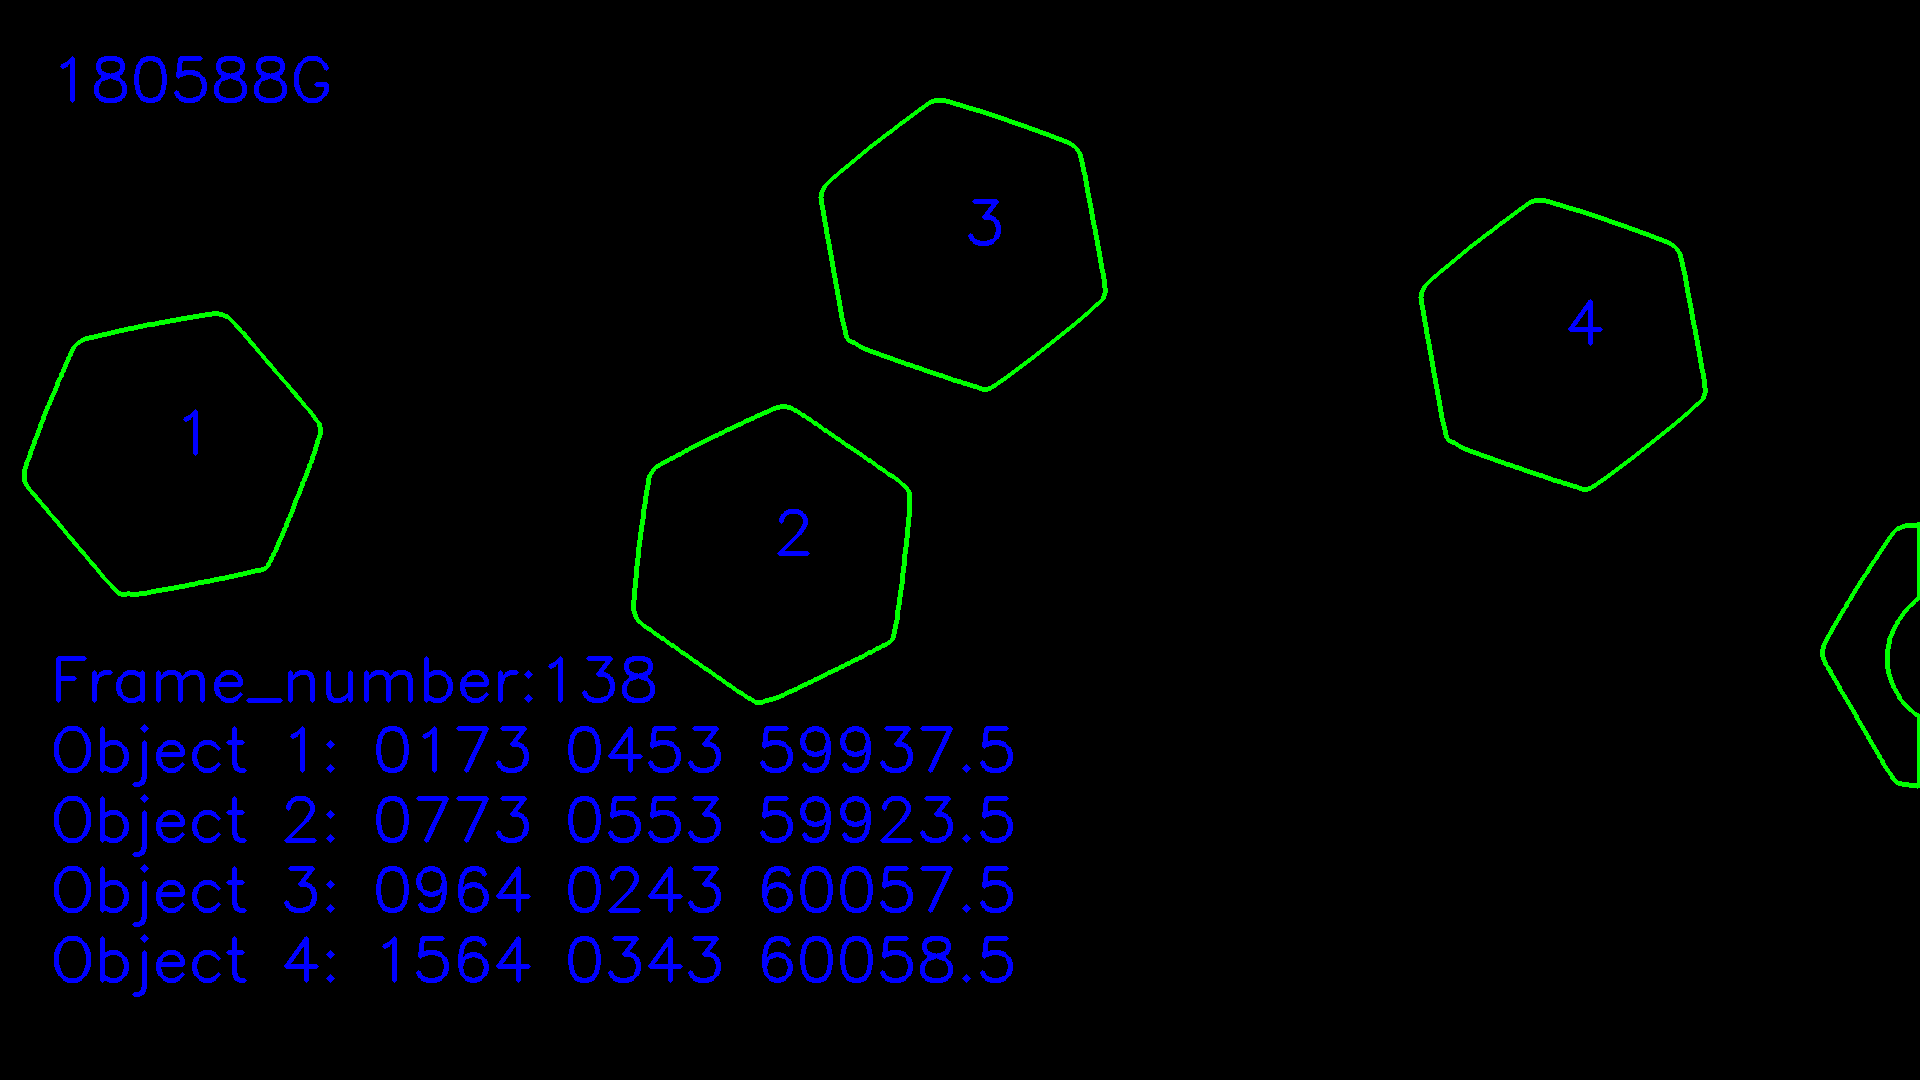

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.63000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.54000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.55400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.73000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.73000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.64000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.56400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


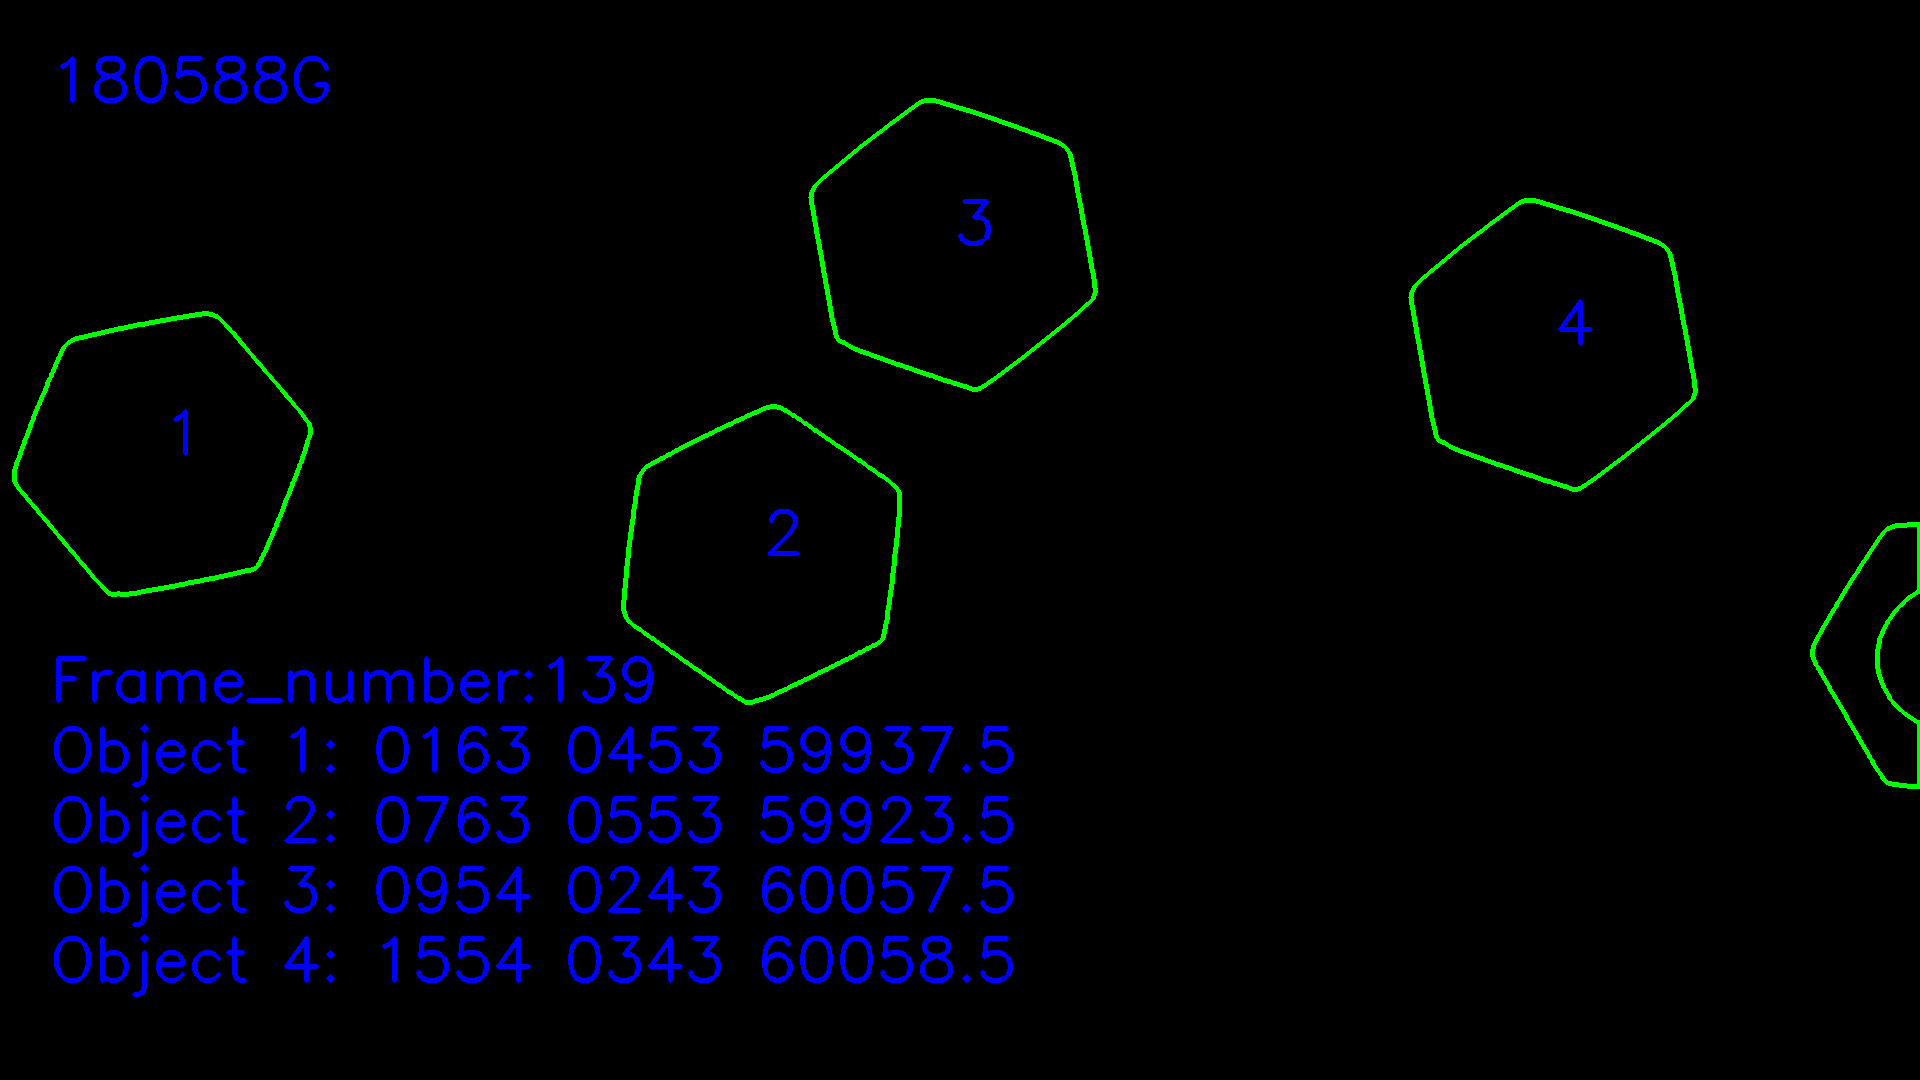

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([7.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([9.44000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.54400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.63000e+02, 4.53000e+02, 5.99375e+04, 1.00000e+00]), array([7.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.54000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.55400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


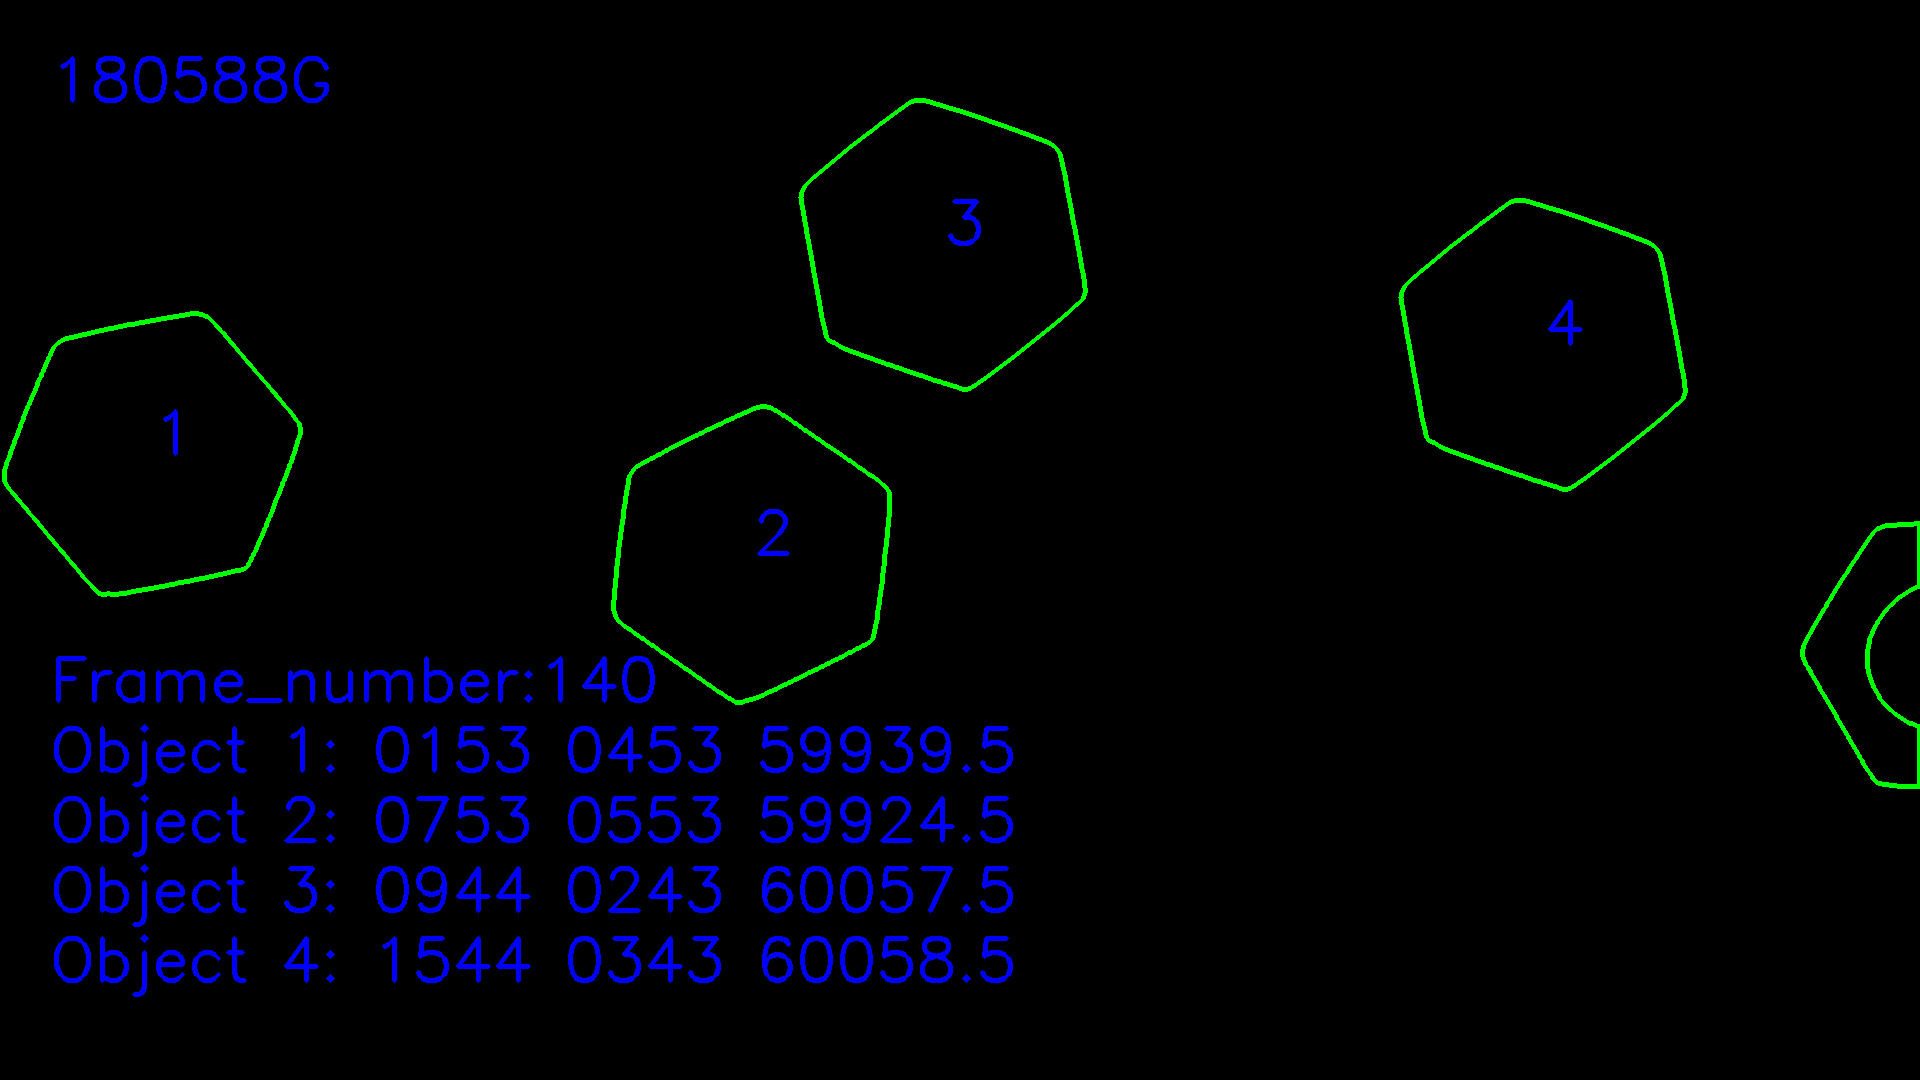

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.44000e+02, 4.53000e+02, 5.97915e+04, 1.00000e+00]), array([7.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.34000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.53400e+03, 3.43000e+02, 6.00555e+04, 4.00000e+00])]
Previousframe [array([1.53000e+02, 4.53000e+02, 5.99395e+04, 1.00000e+00]), array([7.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([9.44000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.54400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


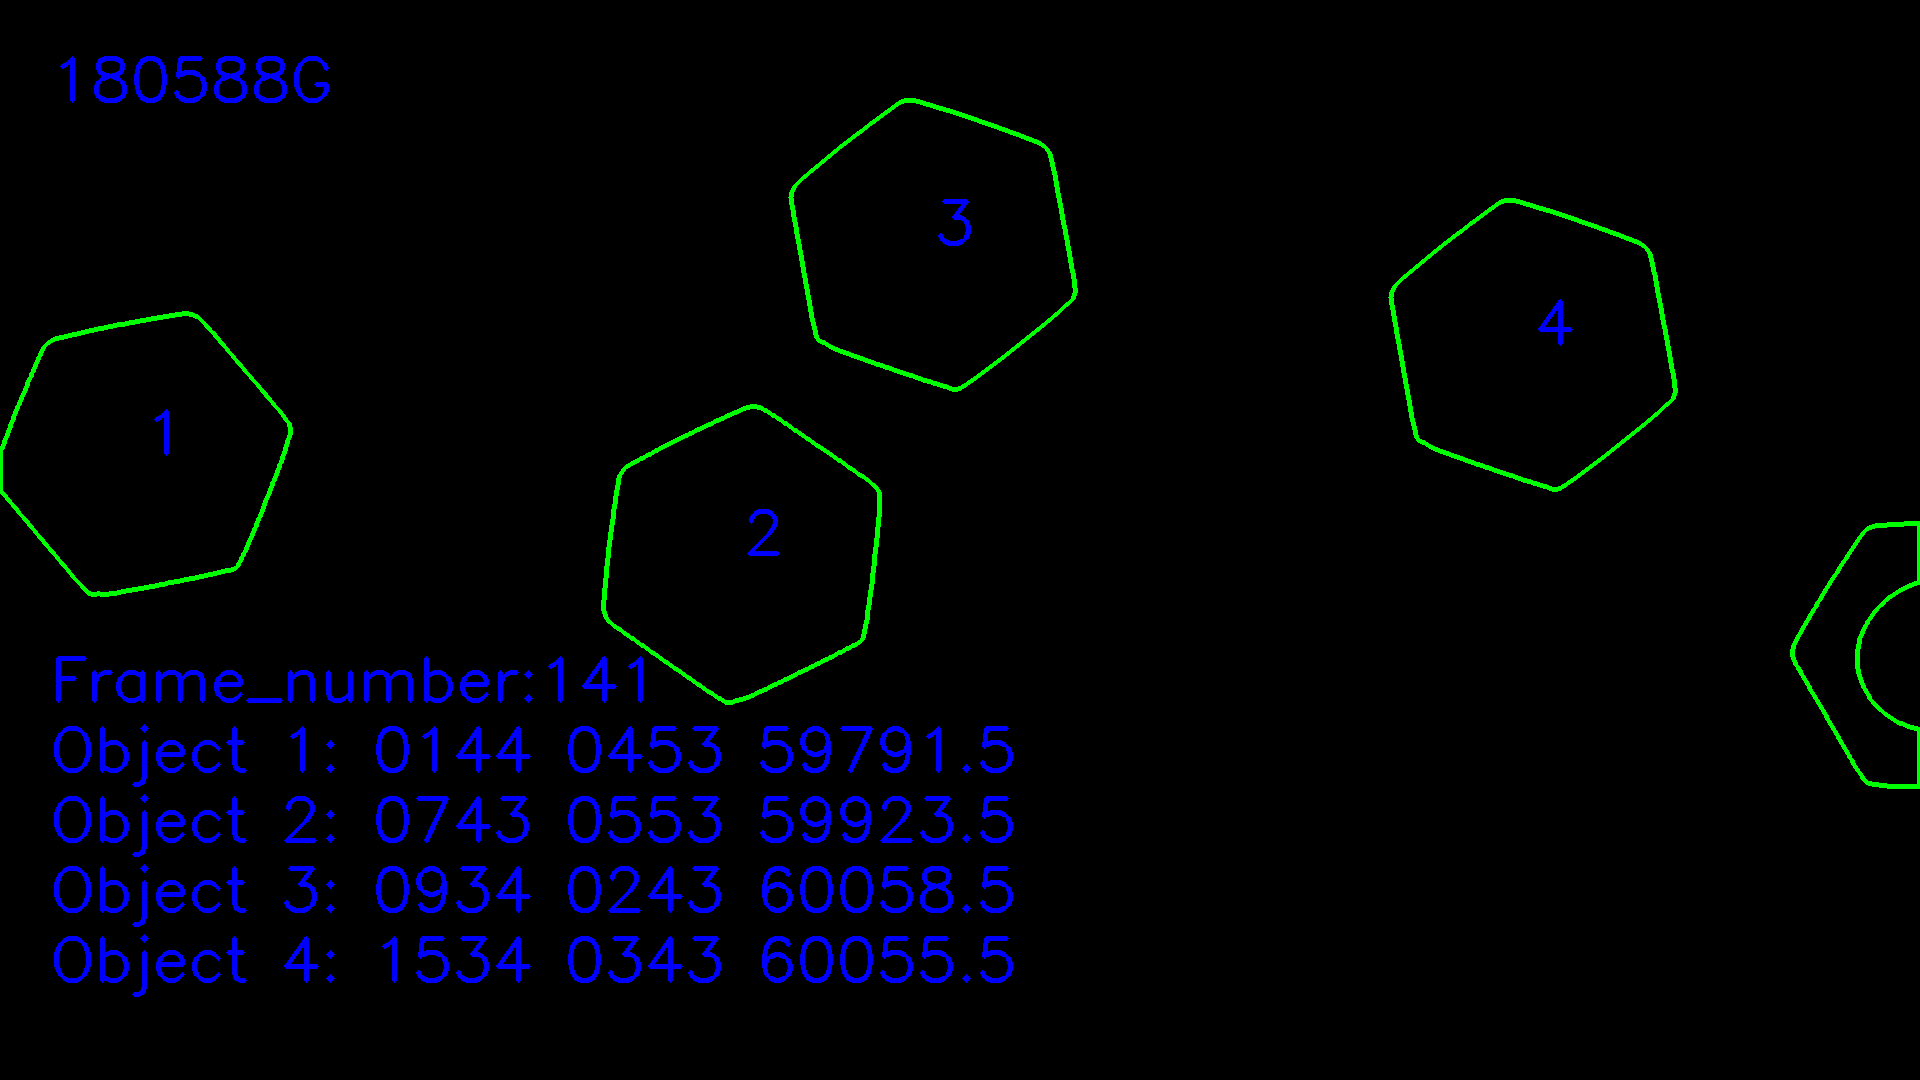

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.35000e+02, 4.53000e+02, 5.92215e+04, 1.00000e+00]), array([7.33000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([9.24000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.52400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]
Previousframe [array([1.44000e+02, 4.53000e+02, 5.97915e+04, 1.00000e+00]), array([7.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.34000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.53400e+03, 3.43000e+02, 6.00555e+04, 4.00000e+00])]


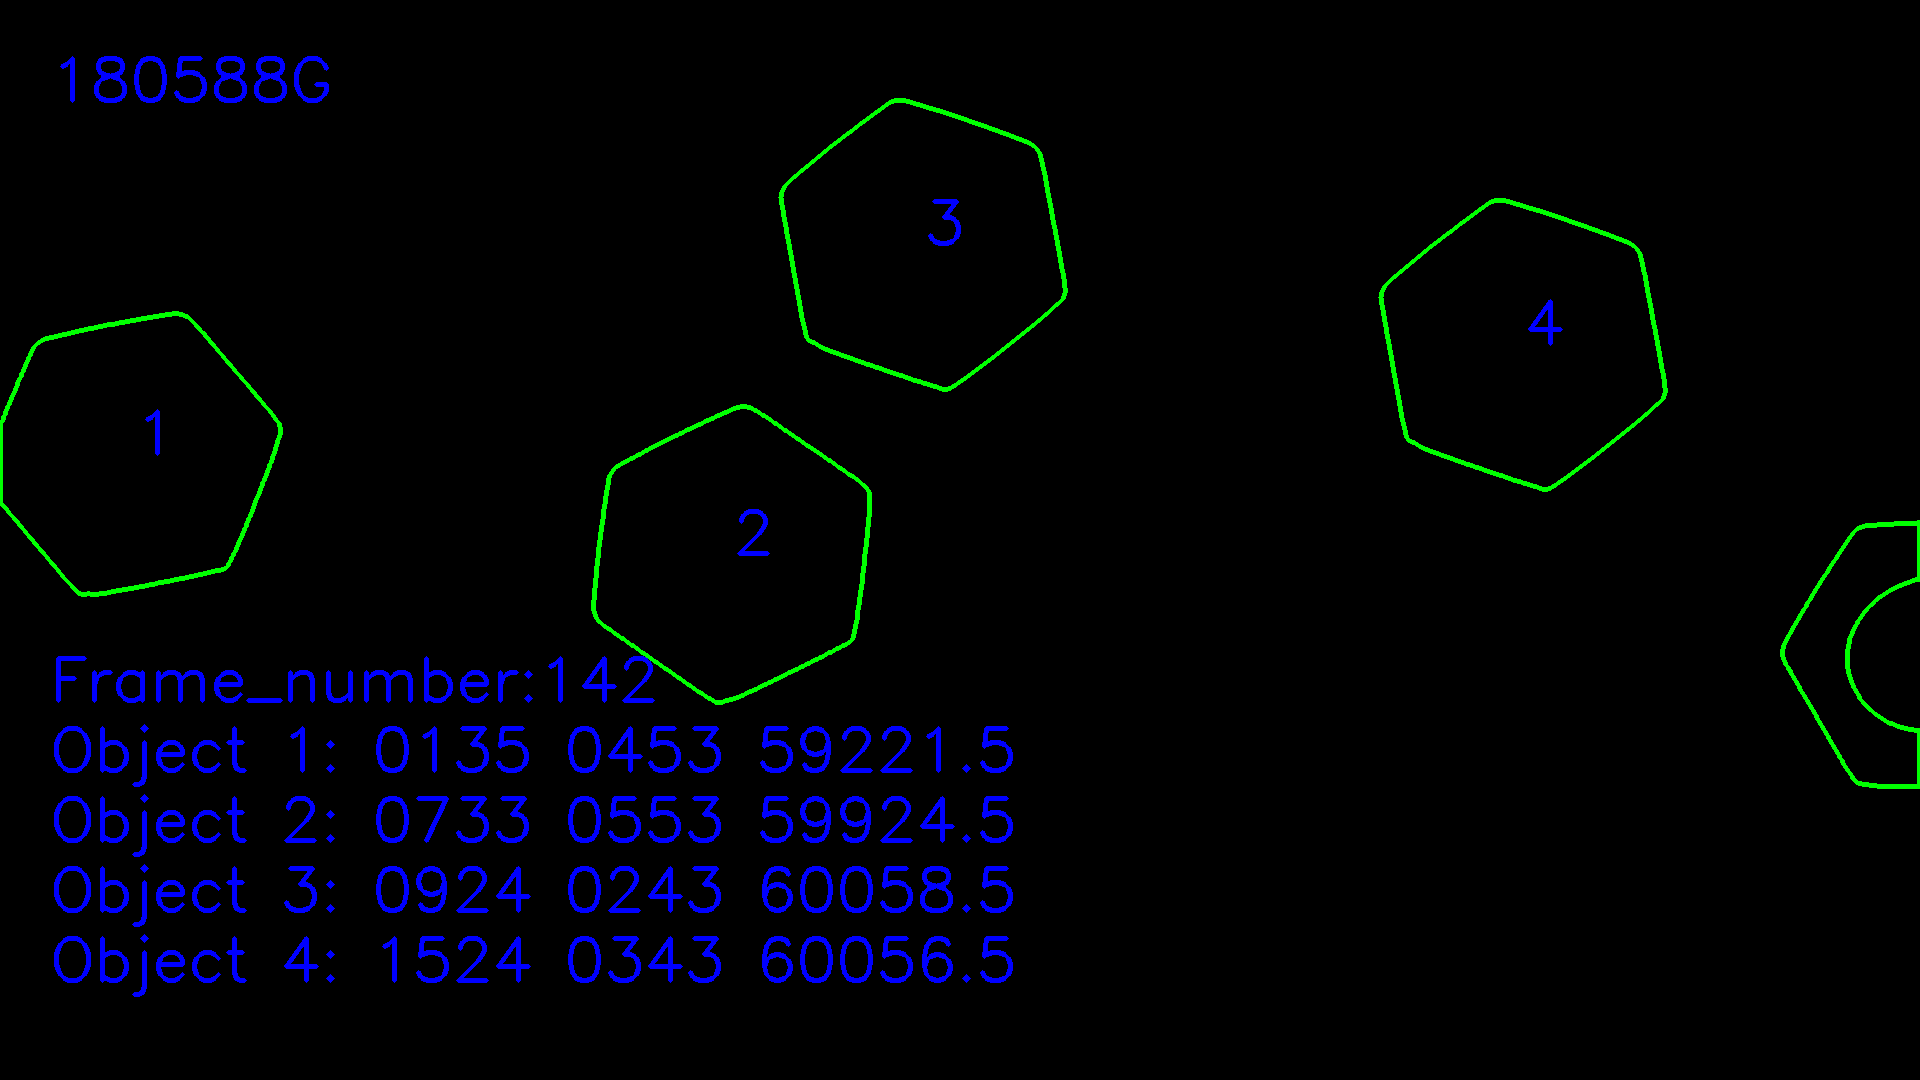

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.2700e+02, 4.5300e+02, 5.8271e+04, 1.0000e+00]), array([7.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.51400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]
Previousframe [array([1.35000e+02, 4.53000e+02, 5.92215e+04, 1.00000e+00]), array([7.33000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([9.24000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.52400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]


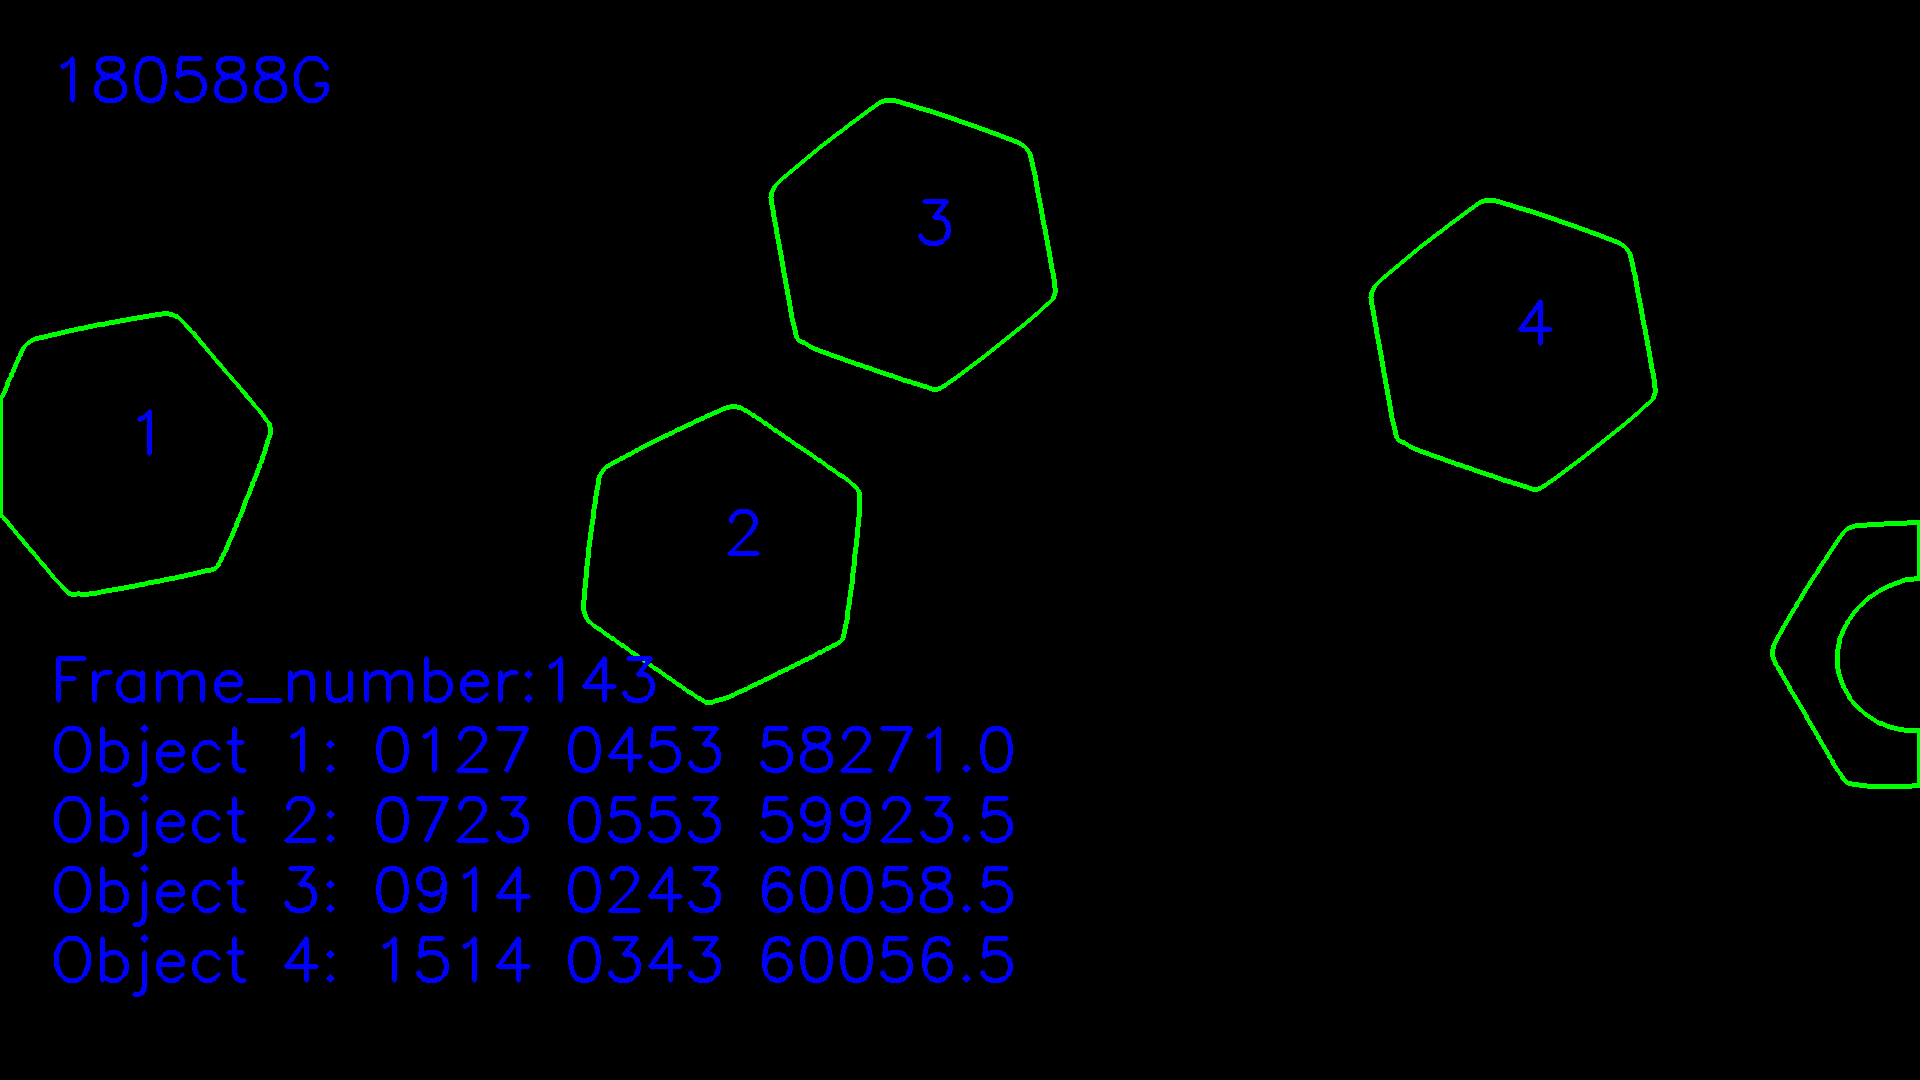

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.2000e+02, 4.5300e+02, 5.6963e+04, 1.0000e+00]), array([7.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.50400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.2700e+02, 4.5300e+02, 5.8271e+04, 1.0000e+00]), array([7.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.51400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]


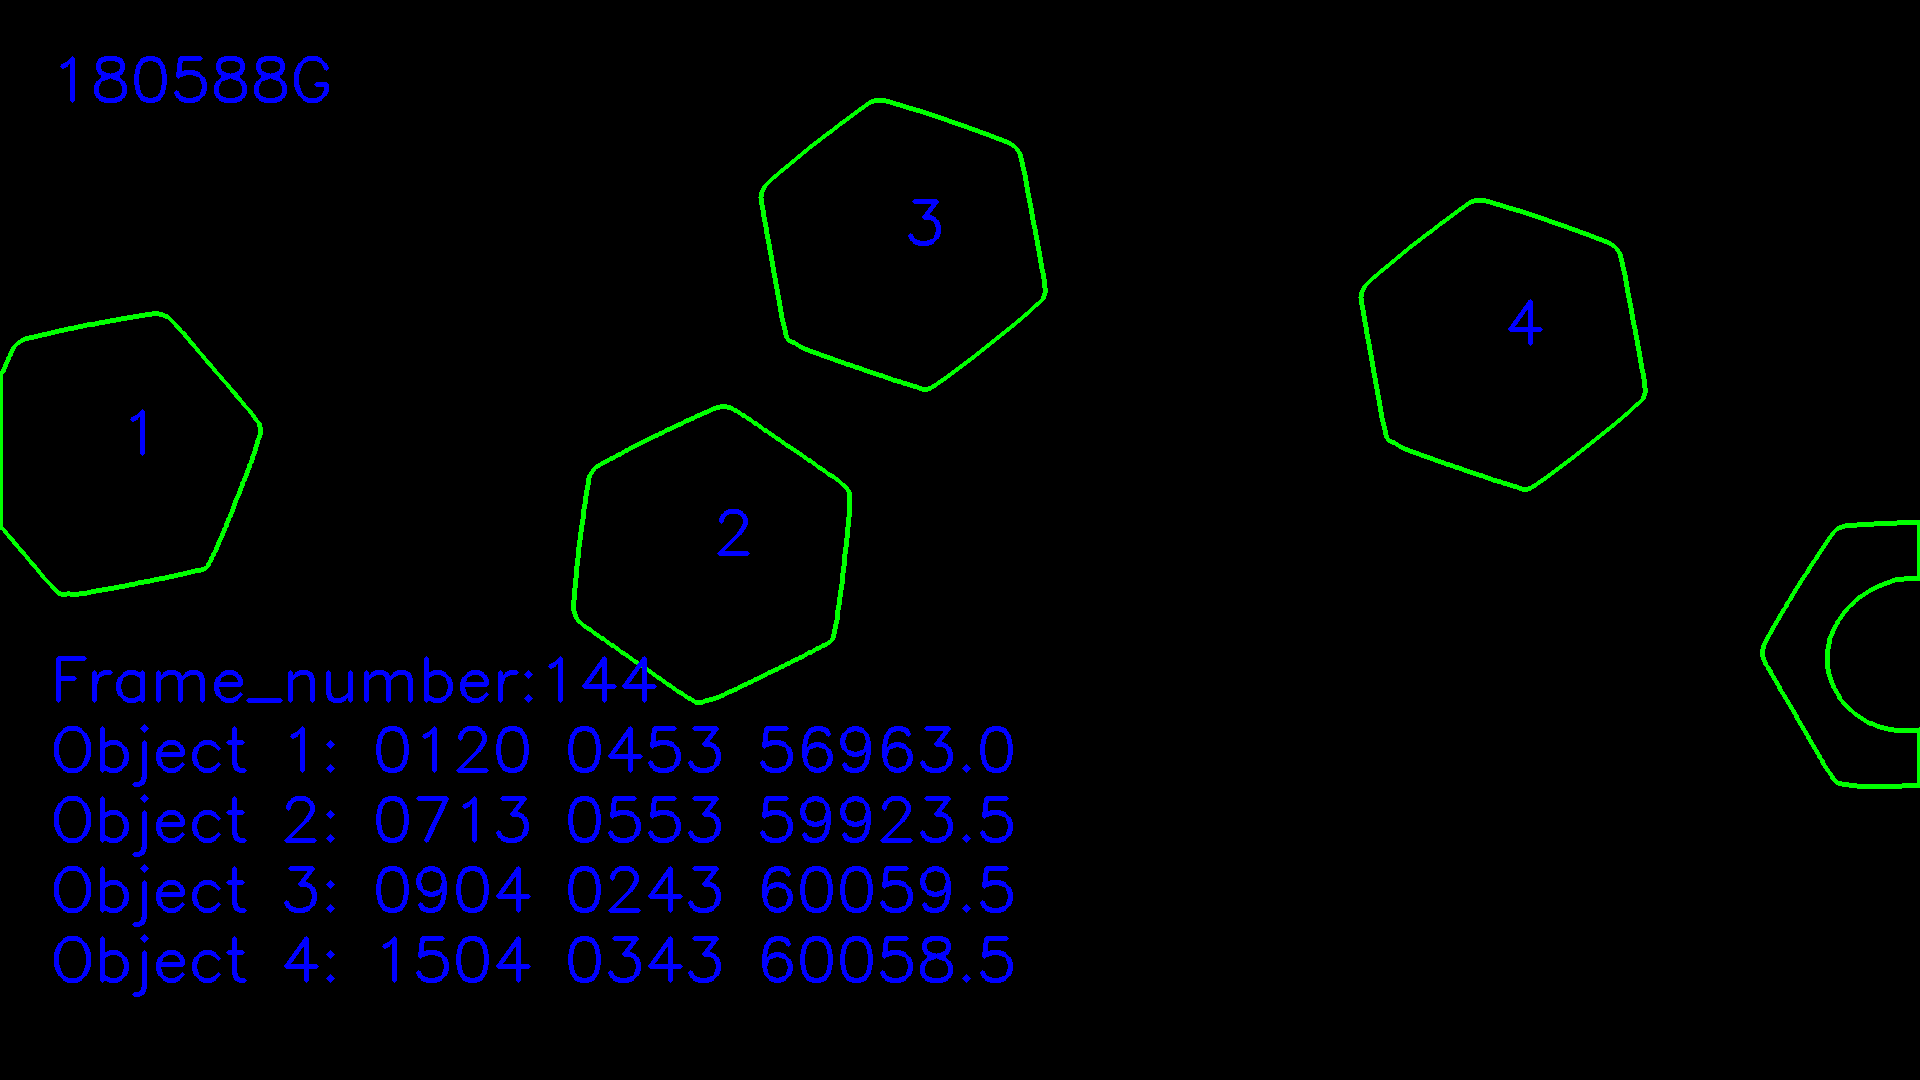

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.13000e+02, 4.53000e+02, 5.52965e+04, 1.00000e+00]), array([7.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.49400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.2000e+02, 4.5300e+02, 5.6963e+04, 1.0000e+00]), array([7.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([9.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.50400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


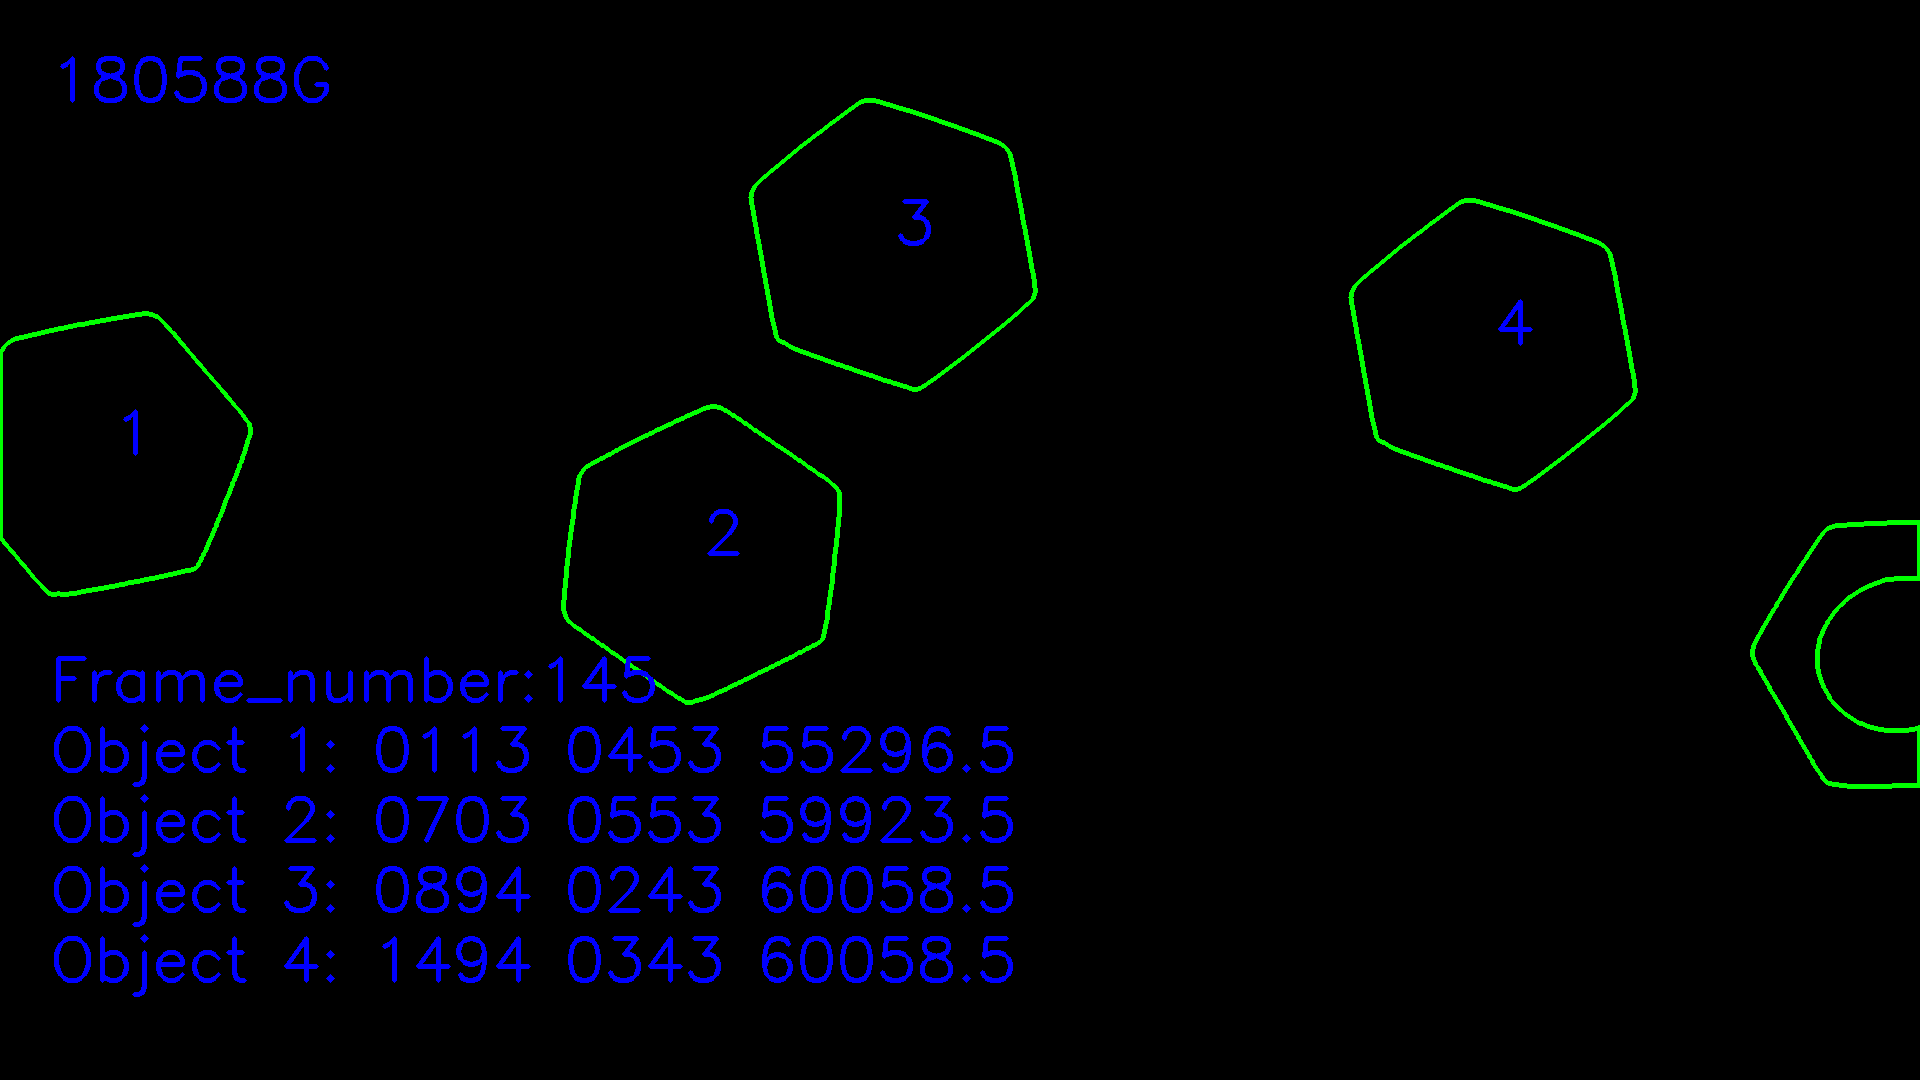

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.07000e+02, 4.53000e+02, 5.33195e+04, 1.00000e+00]), array([6.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.48400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.13000e+02, 4.53000e+02, 5.52965e+04, 1.00000e+00]), array([7.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.49400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


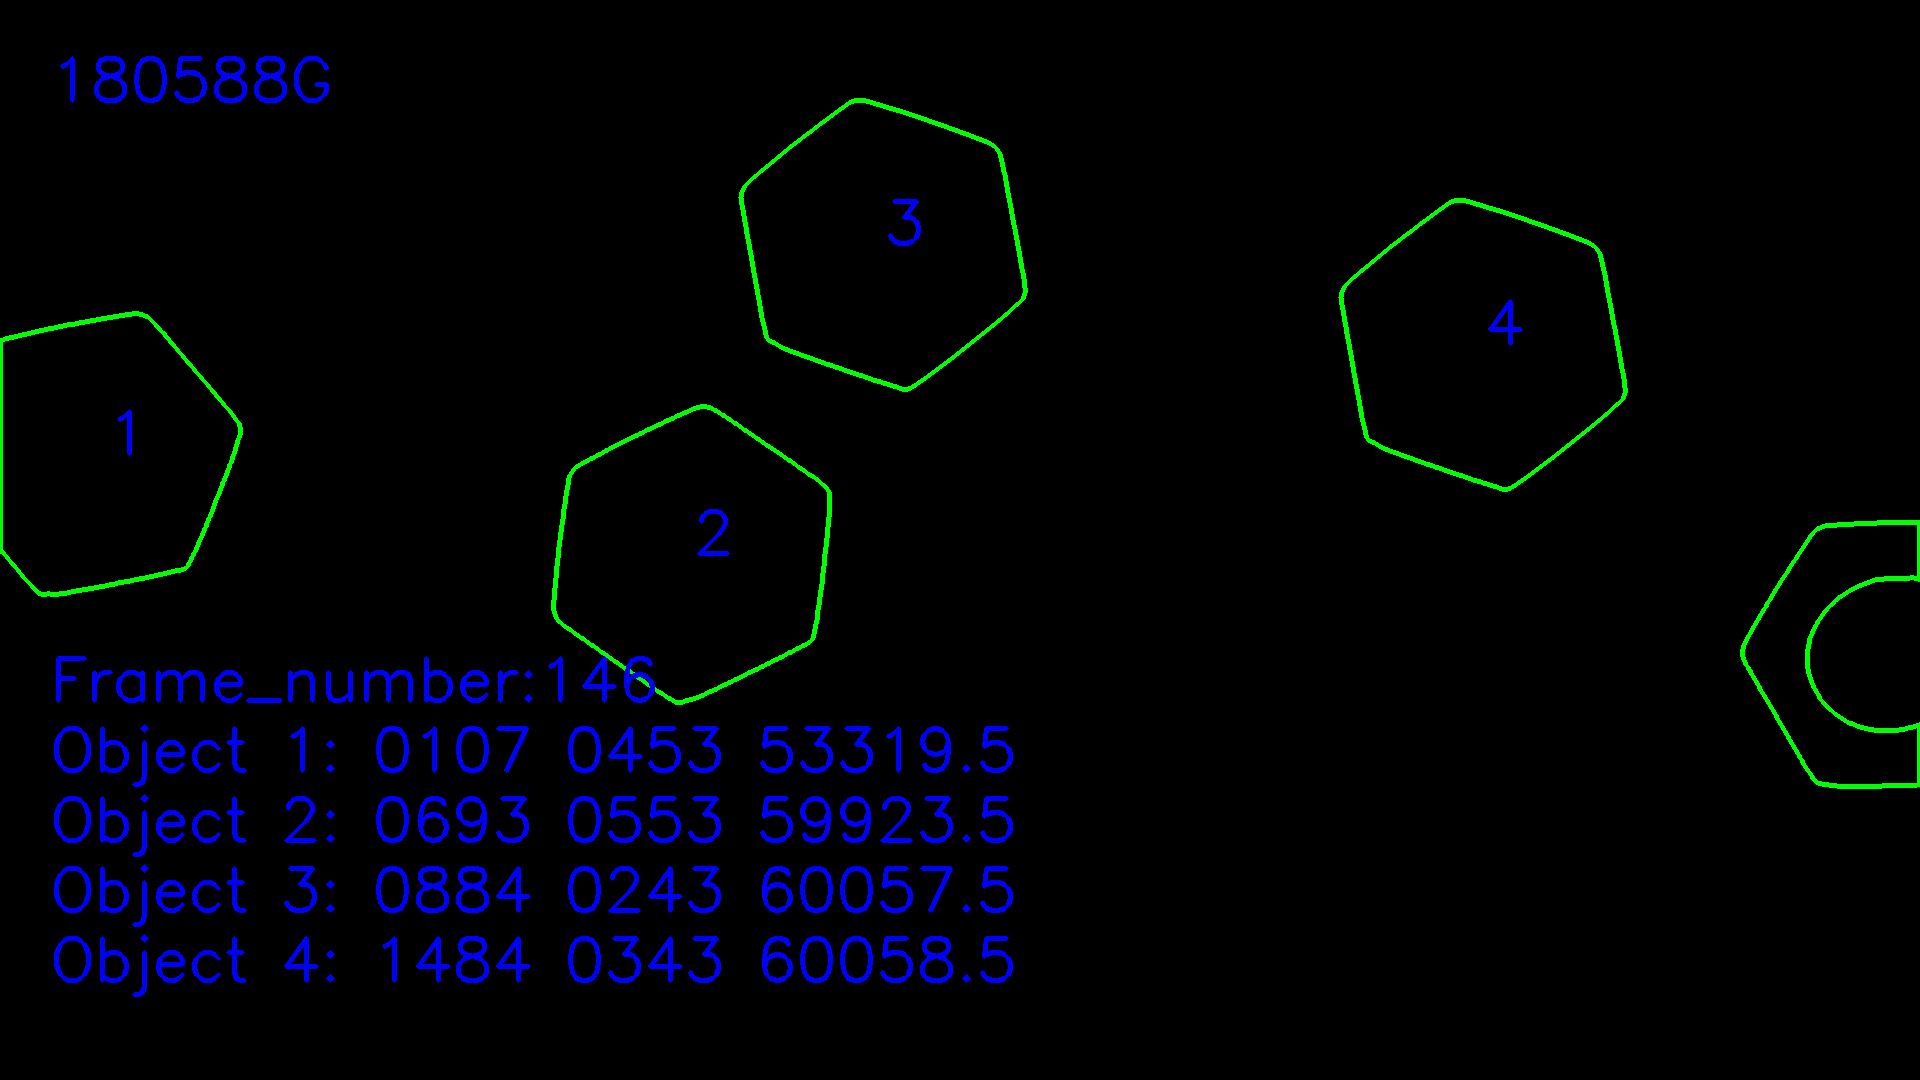

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.83000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([8.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.47400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]
Previousframe [array([1.07000e+02, 4.53000e+02, 5.33195e+04, 1.00000e+00]), array([6.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.48400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


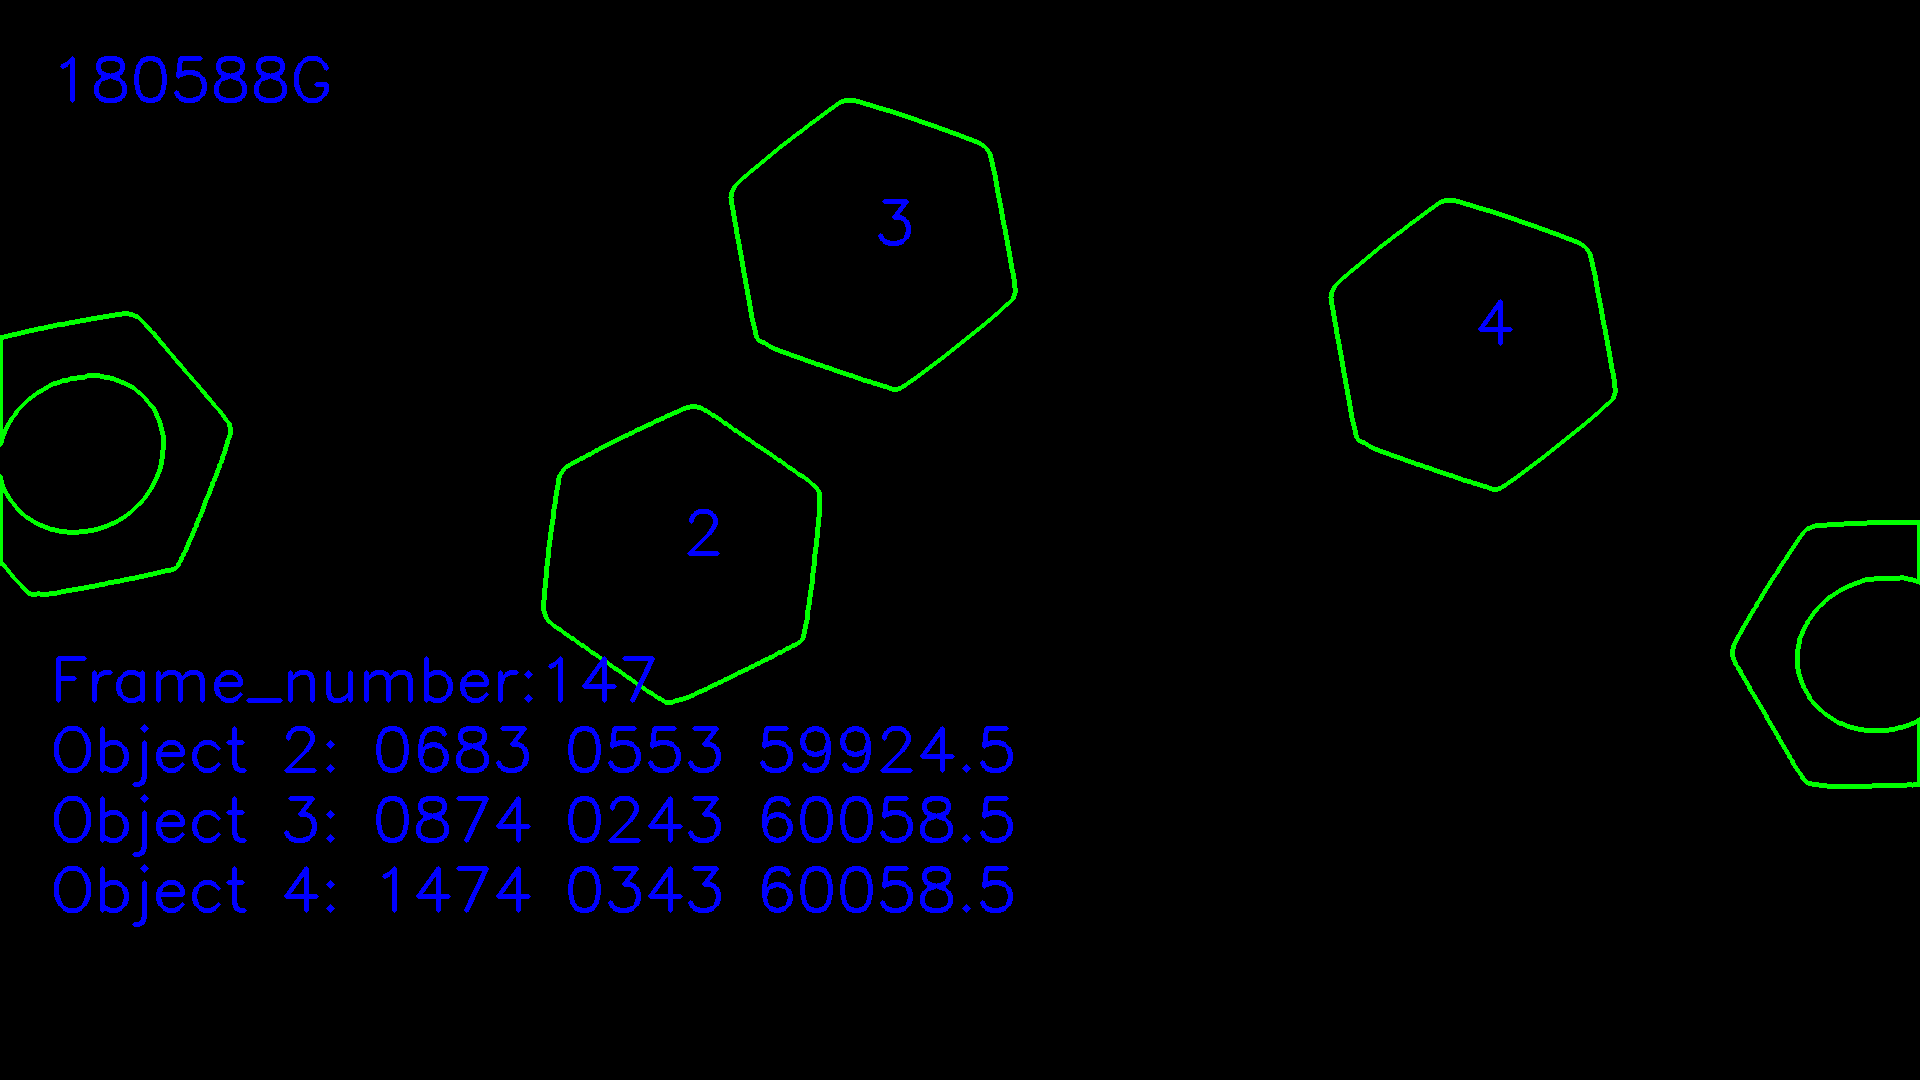

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([8.64000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.46400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([6.83000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([8.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.47400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00])]


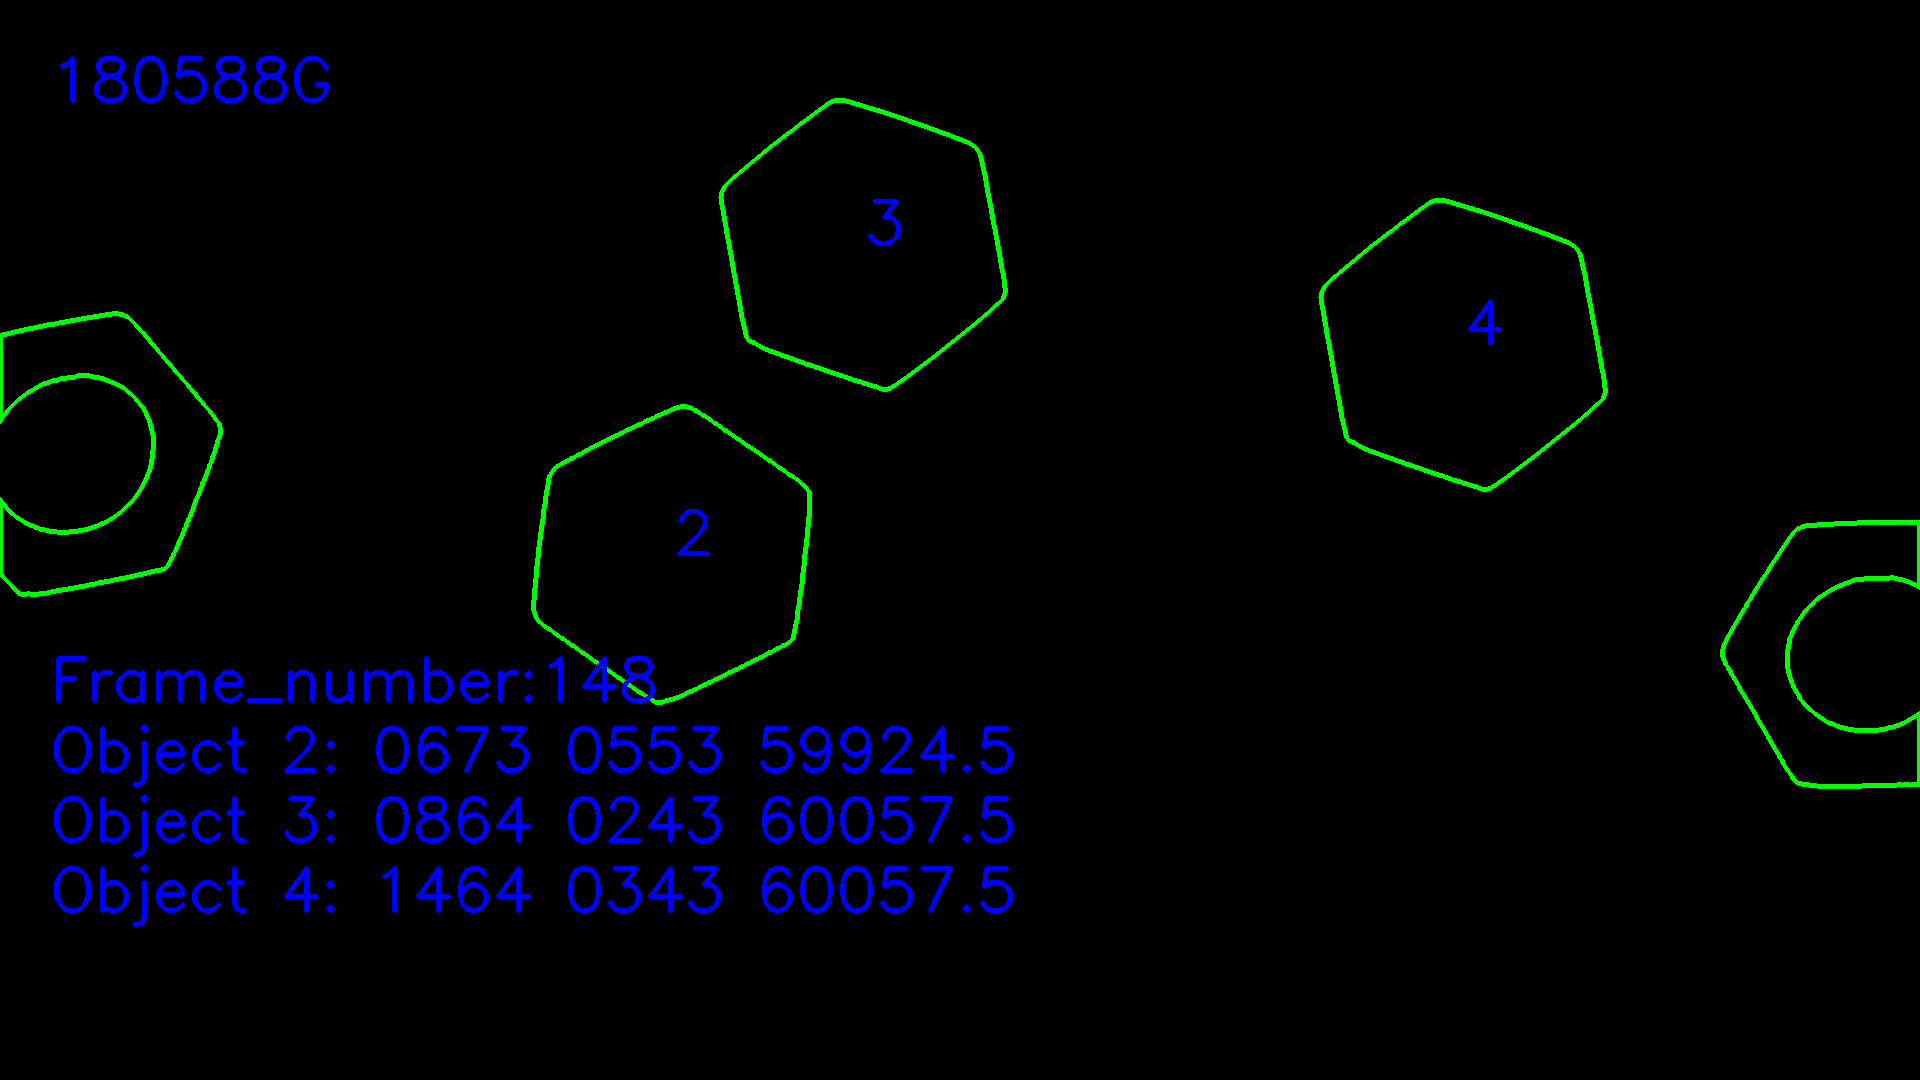

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.45400e+03, 3.43000e+02, 6.00555e+04, 4.00000e+00])]
Previousframe [array([6.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([8.64000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.46400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


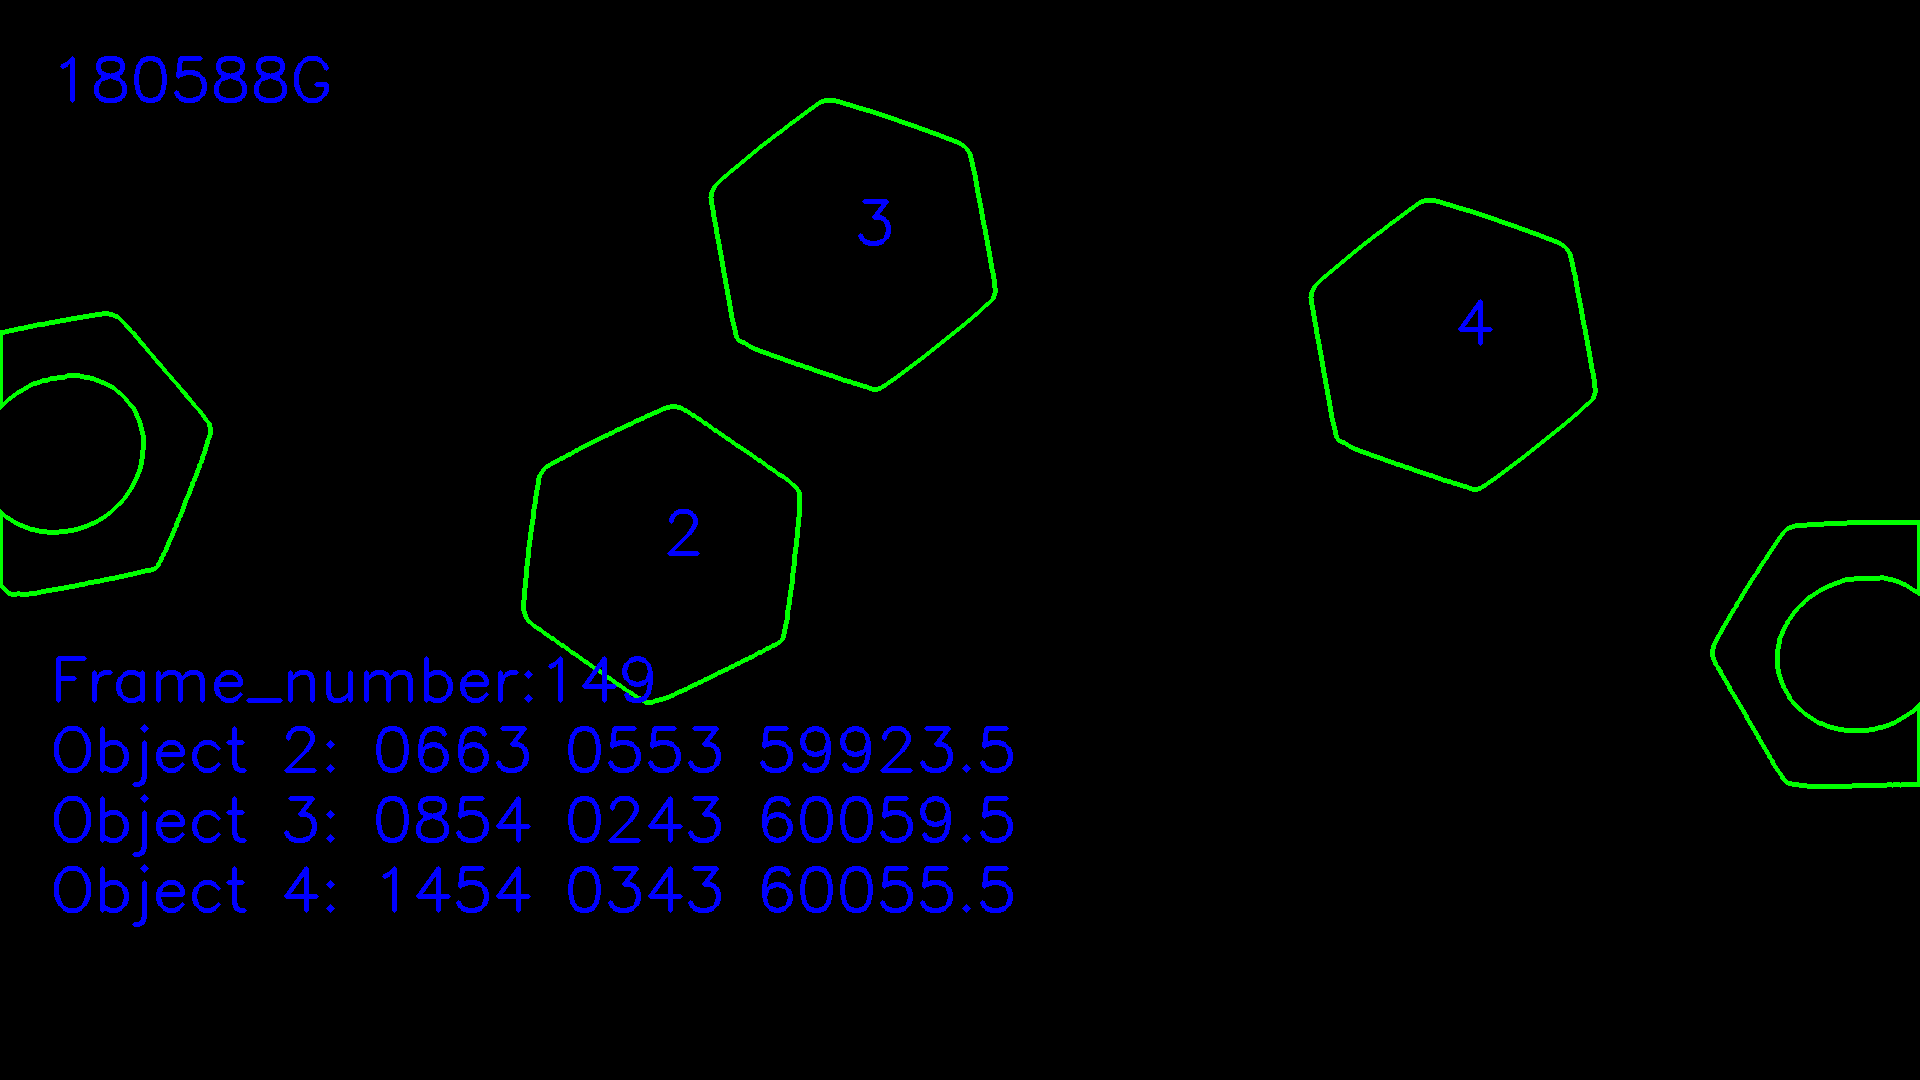

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([8.44000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.44400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]
Previousframe [array([6.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.45400e+03, 3.43000e+02, 6.00555e+04, 4.00000e+00])]


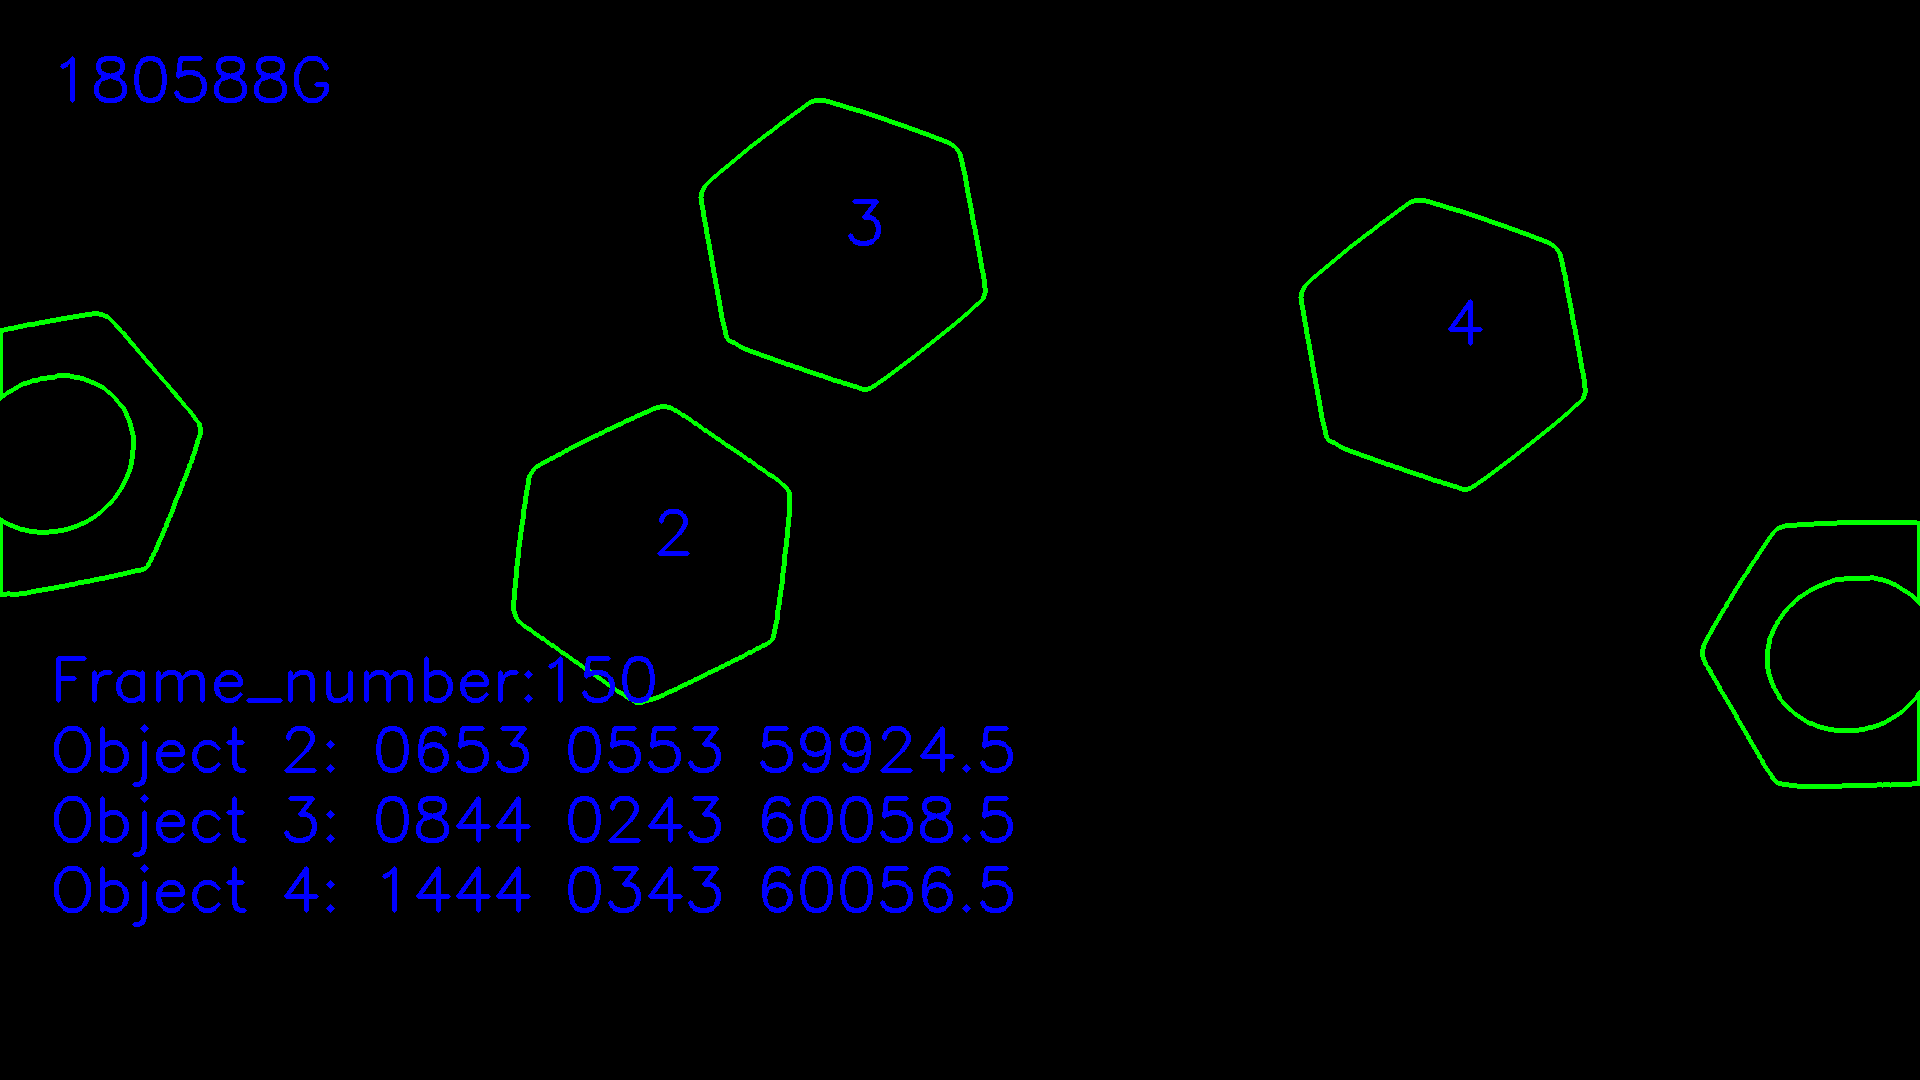

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.43400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]
Previousframe [array([6.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([8.44000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.44400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00])]


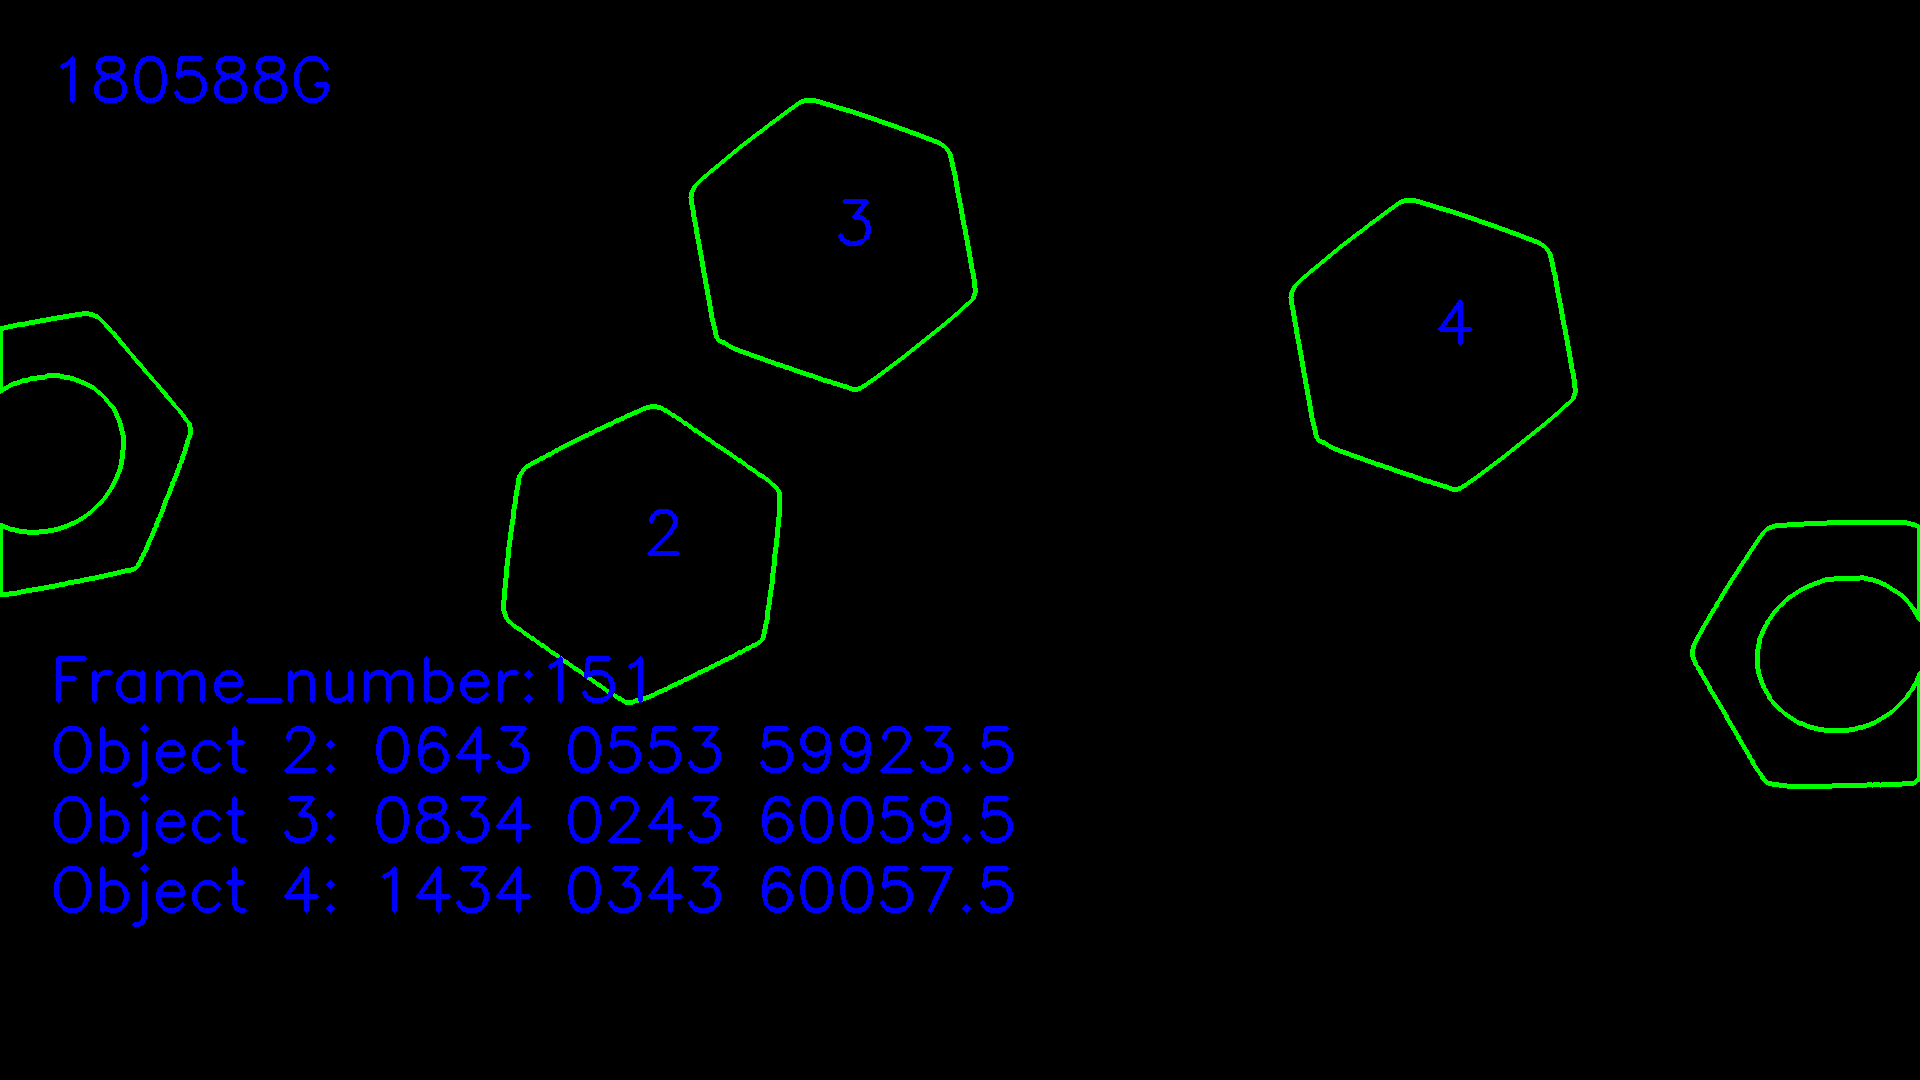

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.33000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([8.24000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.42400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.81800e+03, 6.53000e+02, 5.24885e+04, 5.00000e+00])]
Previousframe [array([6.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.43400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00])]


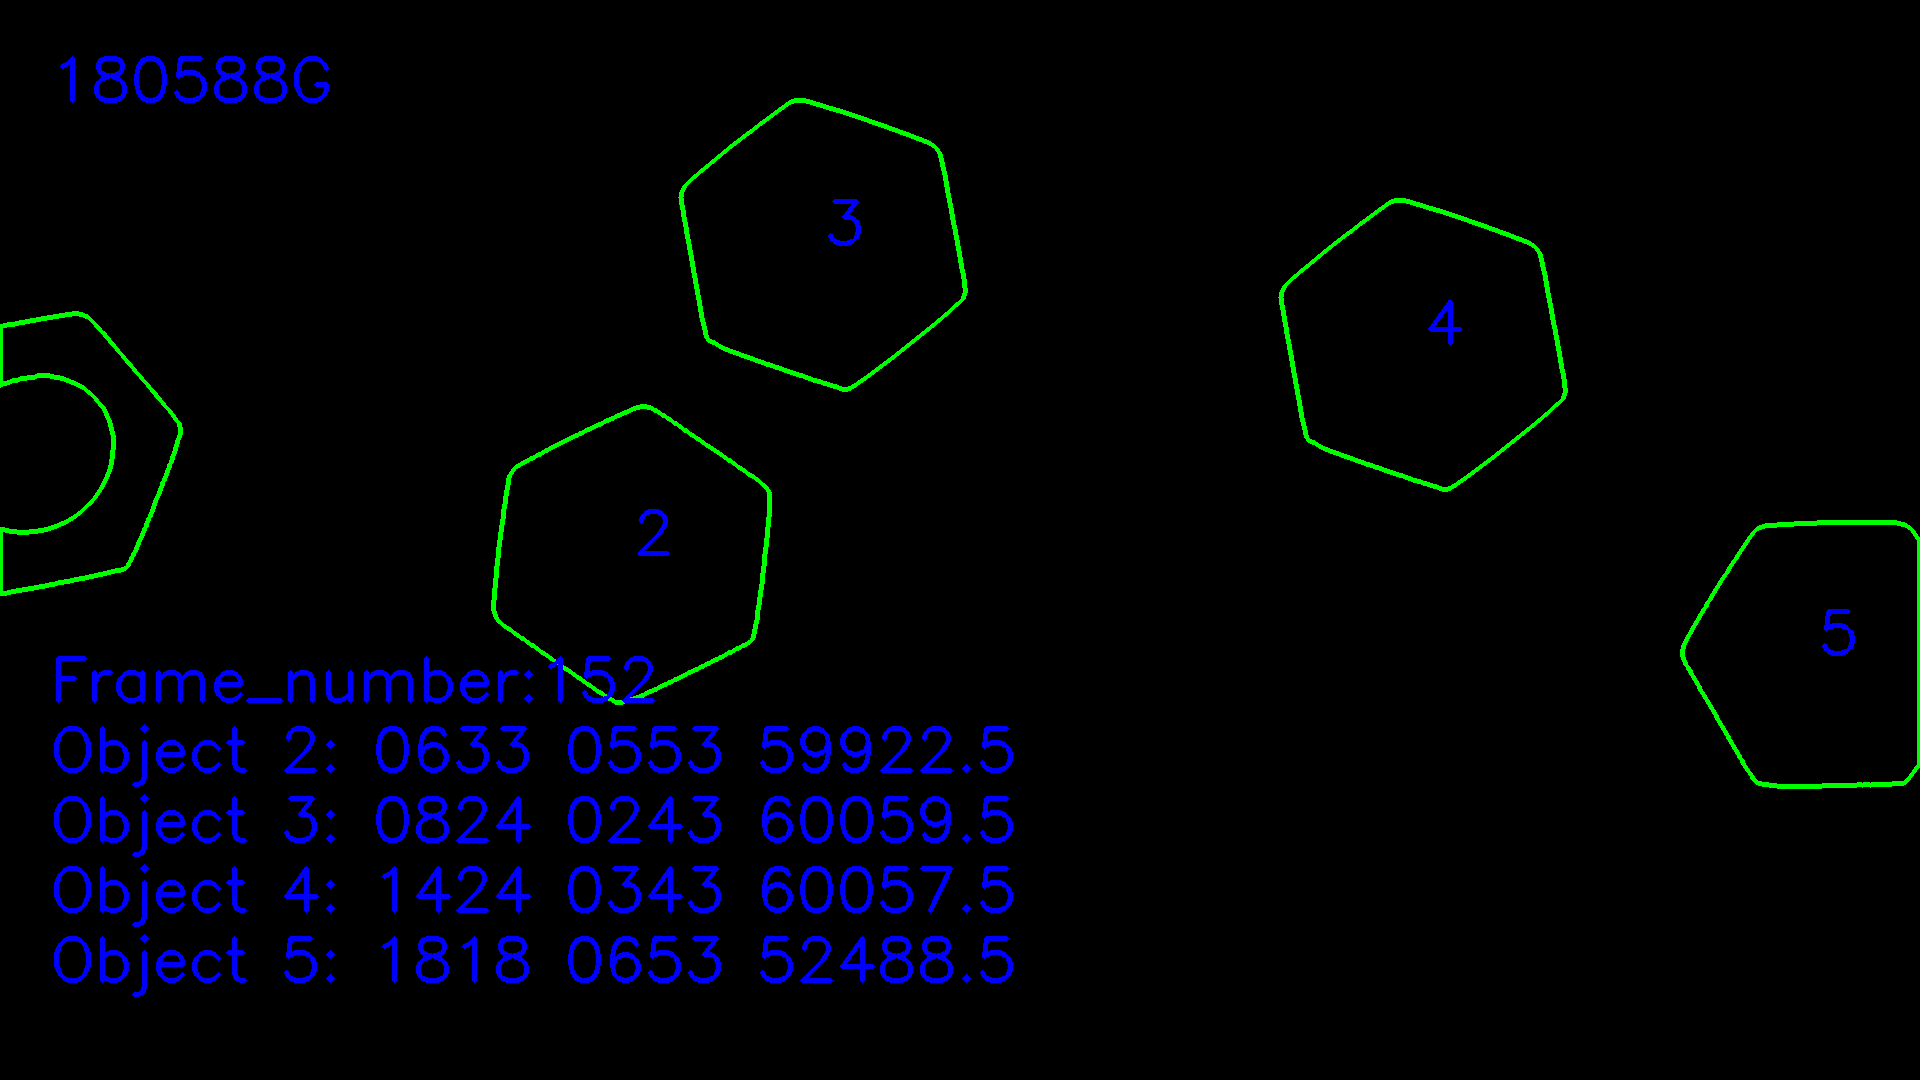

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.41400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.8120e+03, 6.5300e+02, 5.4553e+04, 5.0000e+00])]
Previousframe [array([6.33000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([8.24000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.42400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.81800e+03, 6.53000e+02, 5.24885e+04, 5.00000e+00])]


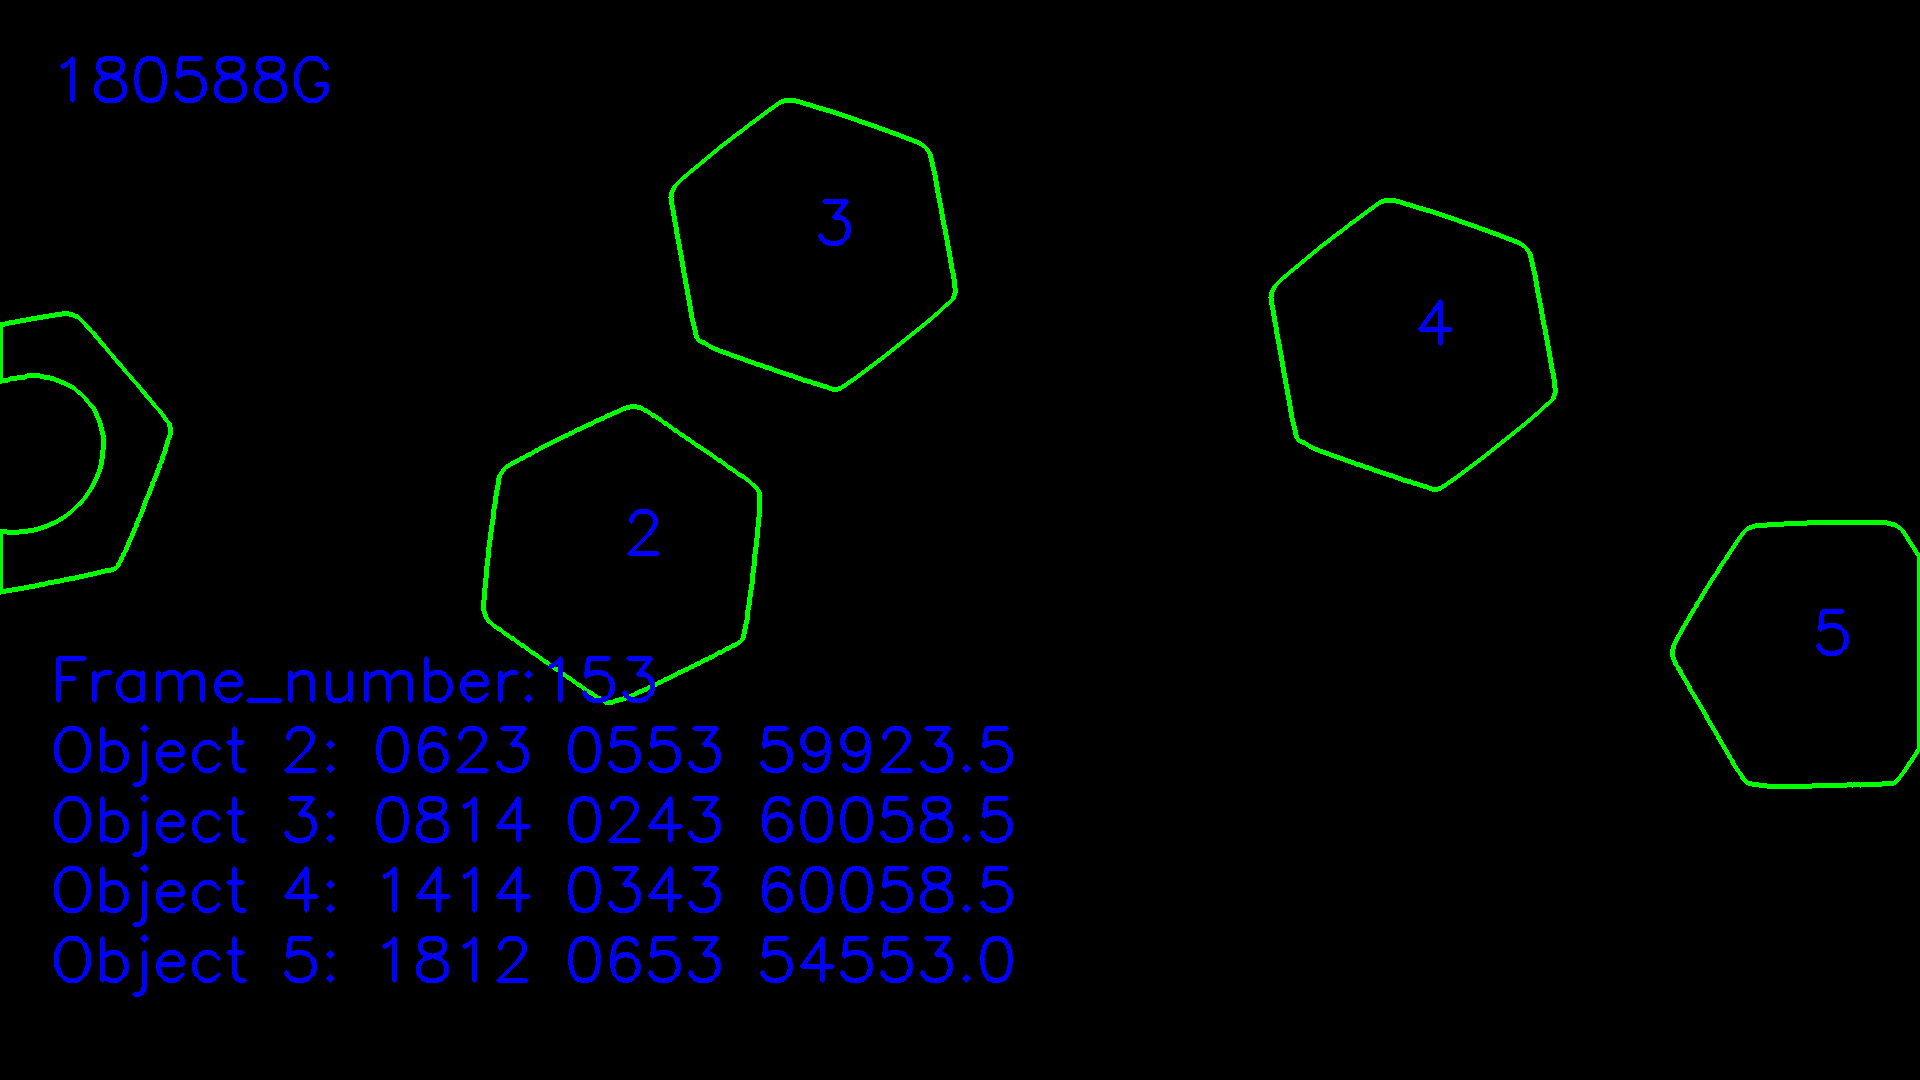

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.04000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.40400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.8060e+03, 6.5300e+02, 5.6293e+04, 5.0000e+00])]
Previousframe [array([6.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.41400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.8120e+03, 6.5300e+02, 5.4553e+04, 5.0000e+00])]


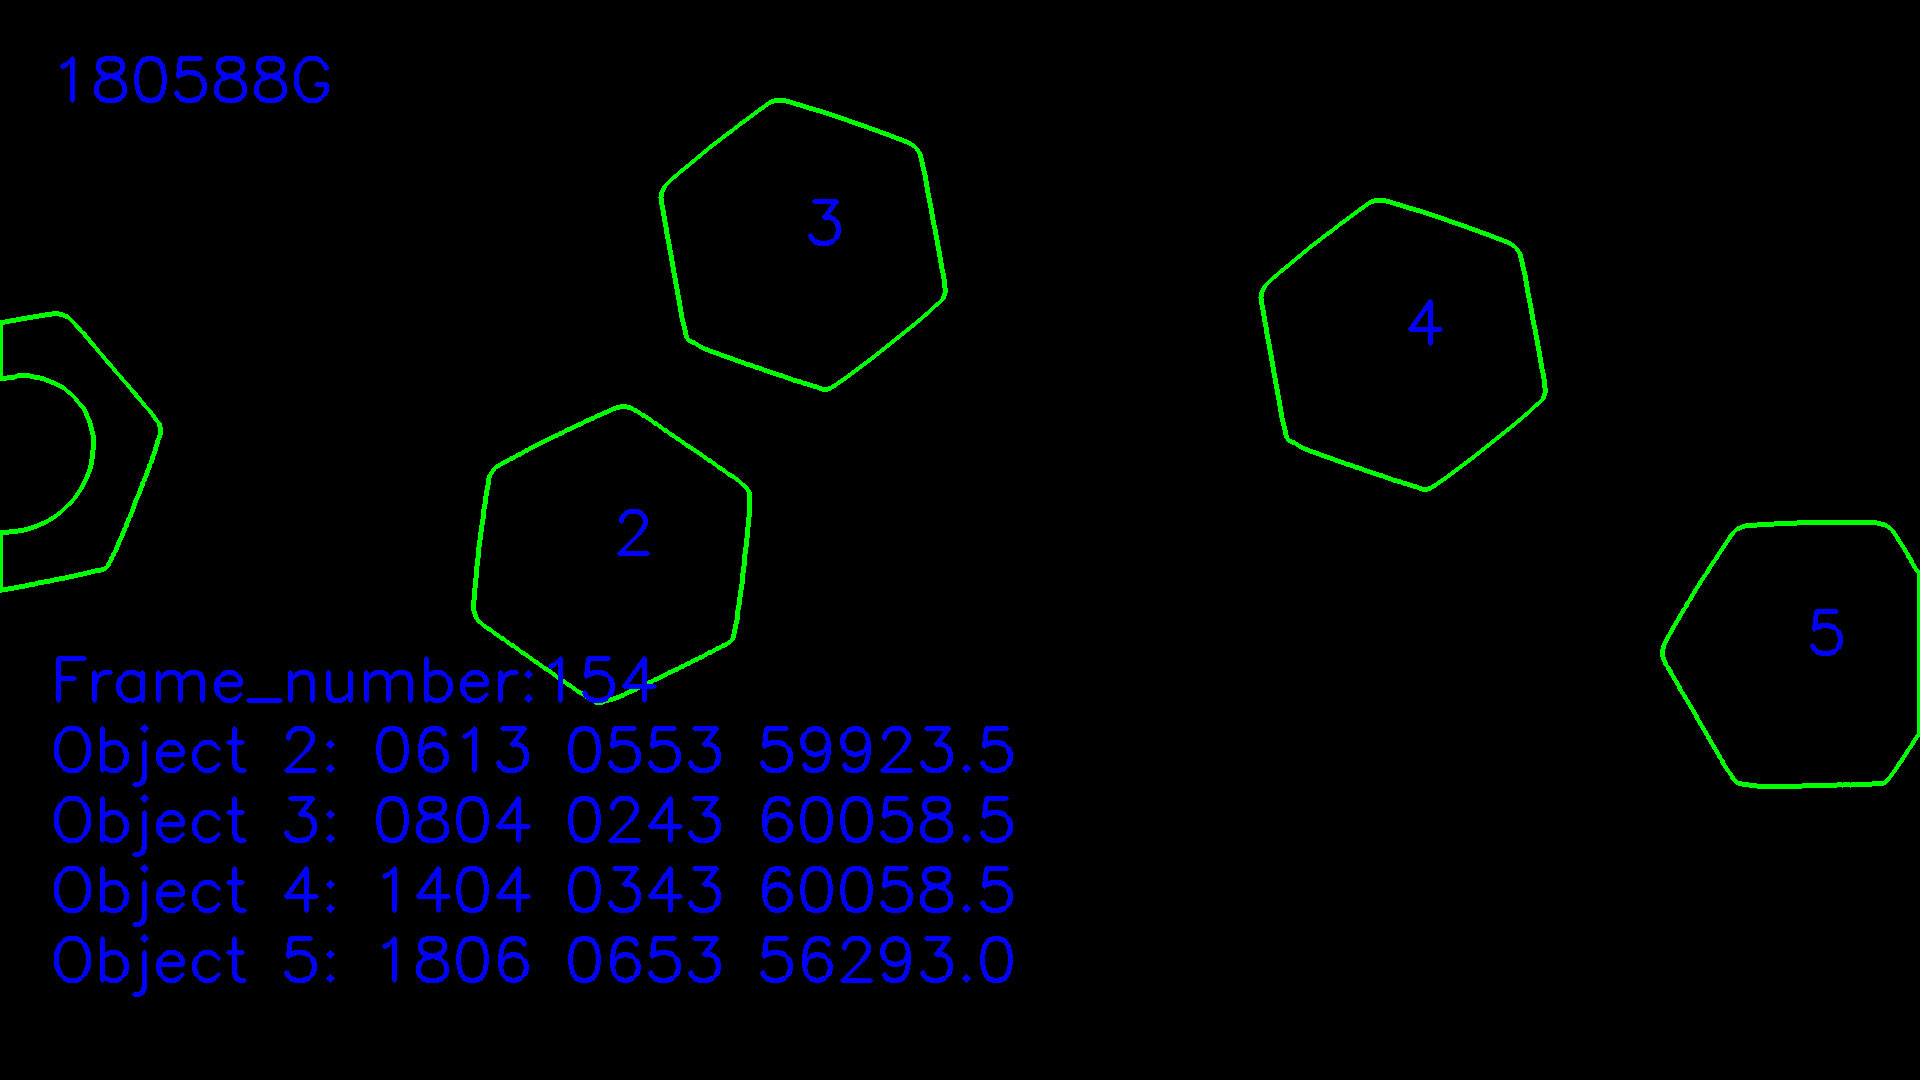

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([7.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.39400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.7980e+03, 6.5300e+02, 5.7703e+04, 5.0000e+00])]
Previousframe [array([6.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([8.04000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.40400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.8060e+03, 6.5300e+02, 5.6293e+04, 5.0000e+00])]


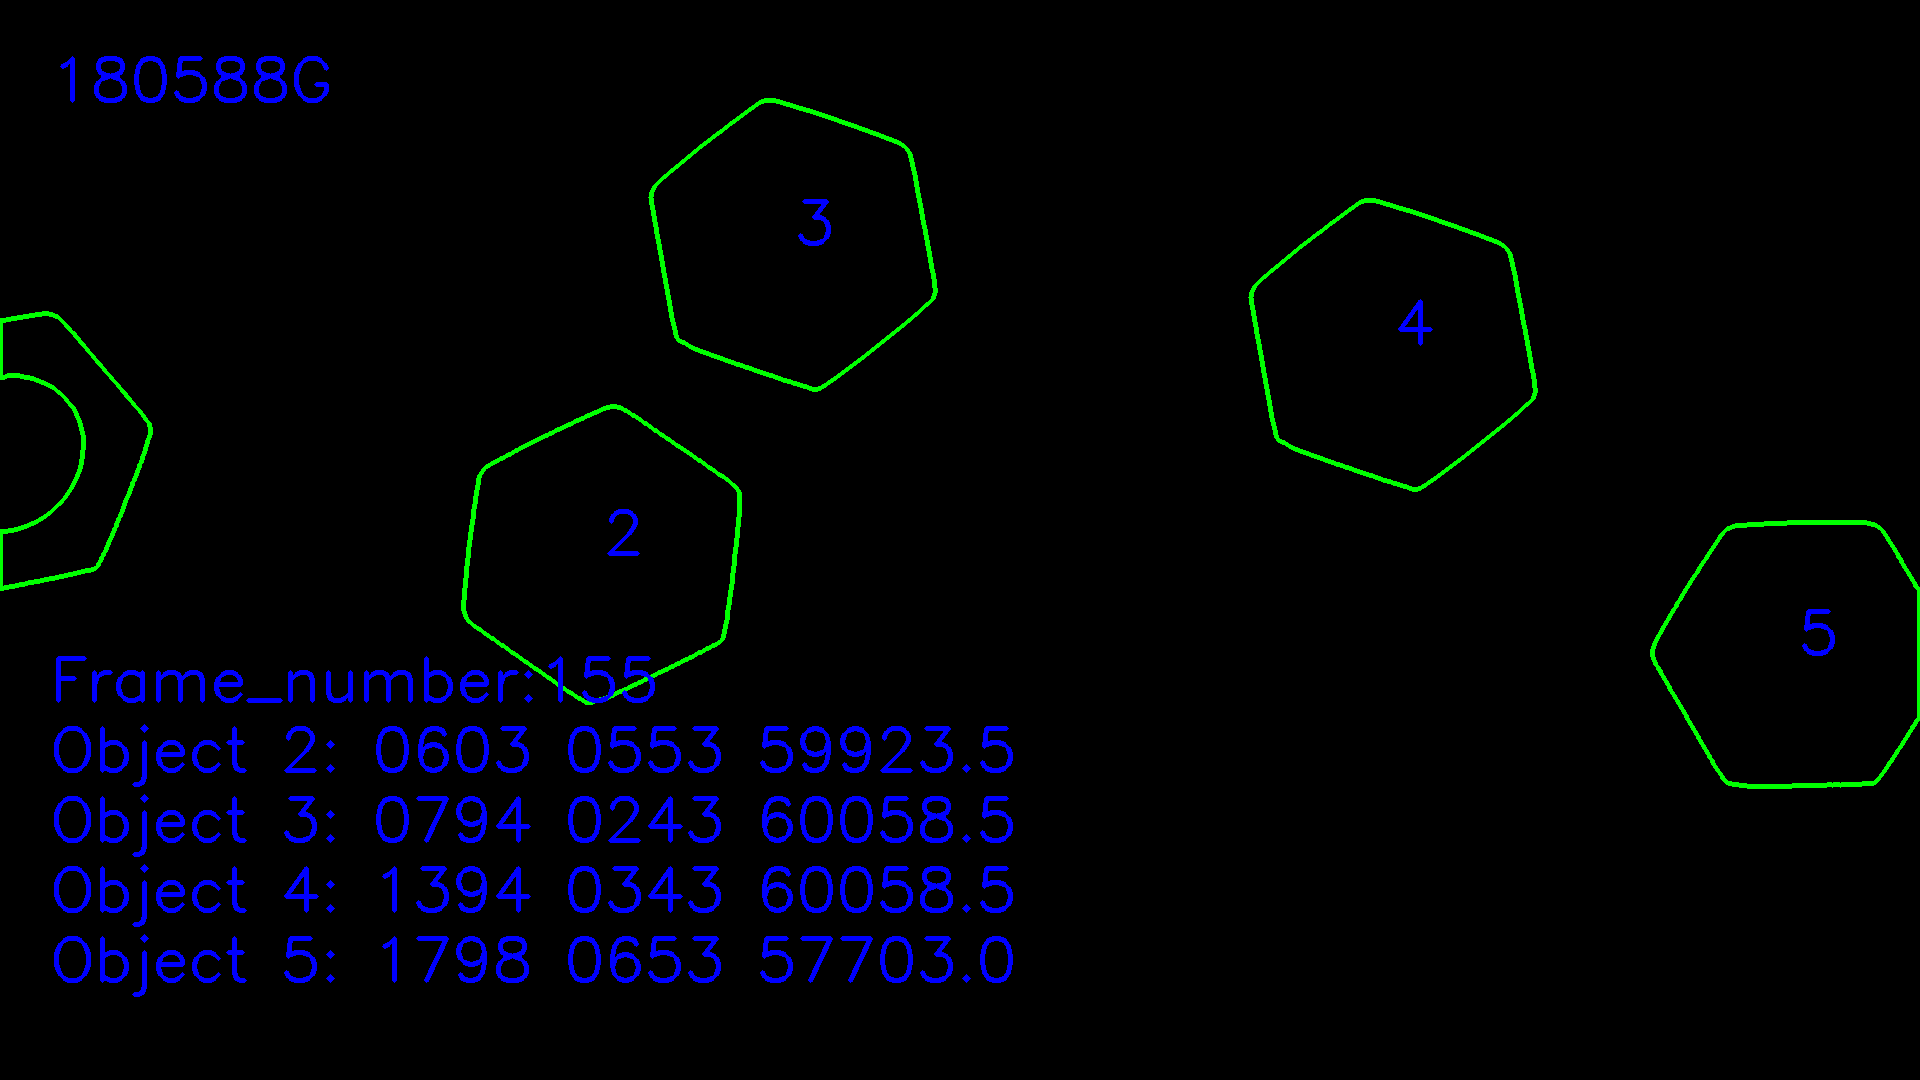

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([7.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.38400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.79100e+03, 6.53000e+02, 5.87805e+04, 5.00000e+00])]
Previousframe [array([6.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([7.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.39400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.7980e+03, 6.5300e+02, 5.7703e+04, 5.0000e+00])]


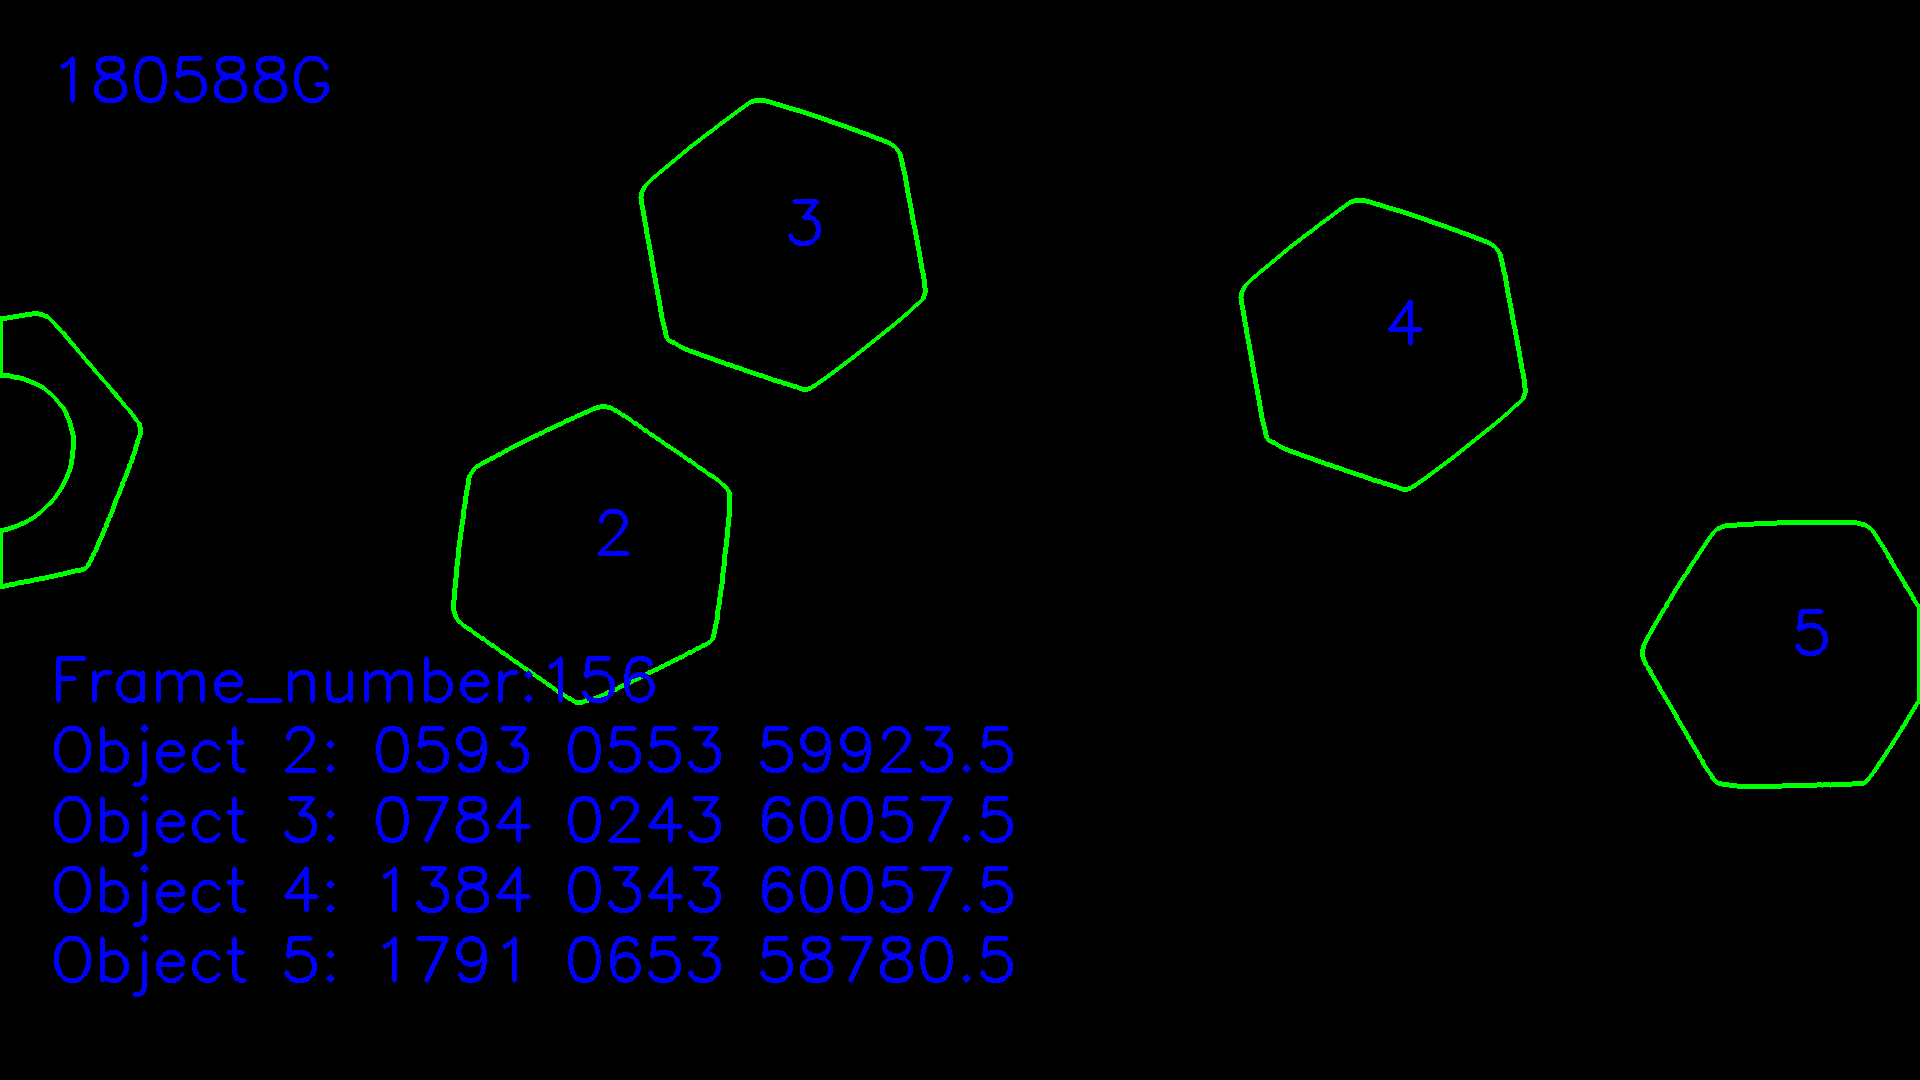

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.83000e+02, 5.53000e+02, 5.99285e+04, 2.00000e+00]), array([7.74000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.37400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.7820e+03, 6.5300e+02, 5.9528e+04, 5.0000e+00])]
Previousframe [array([5.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([7.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.38400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.79100e+03, 6.53000e+02, 5.87805e+04, 5.00000e+00])]


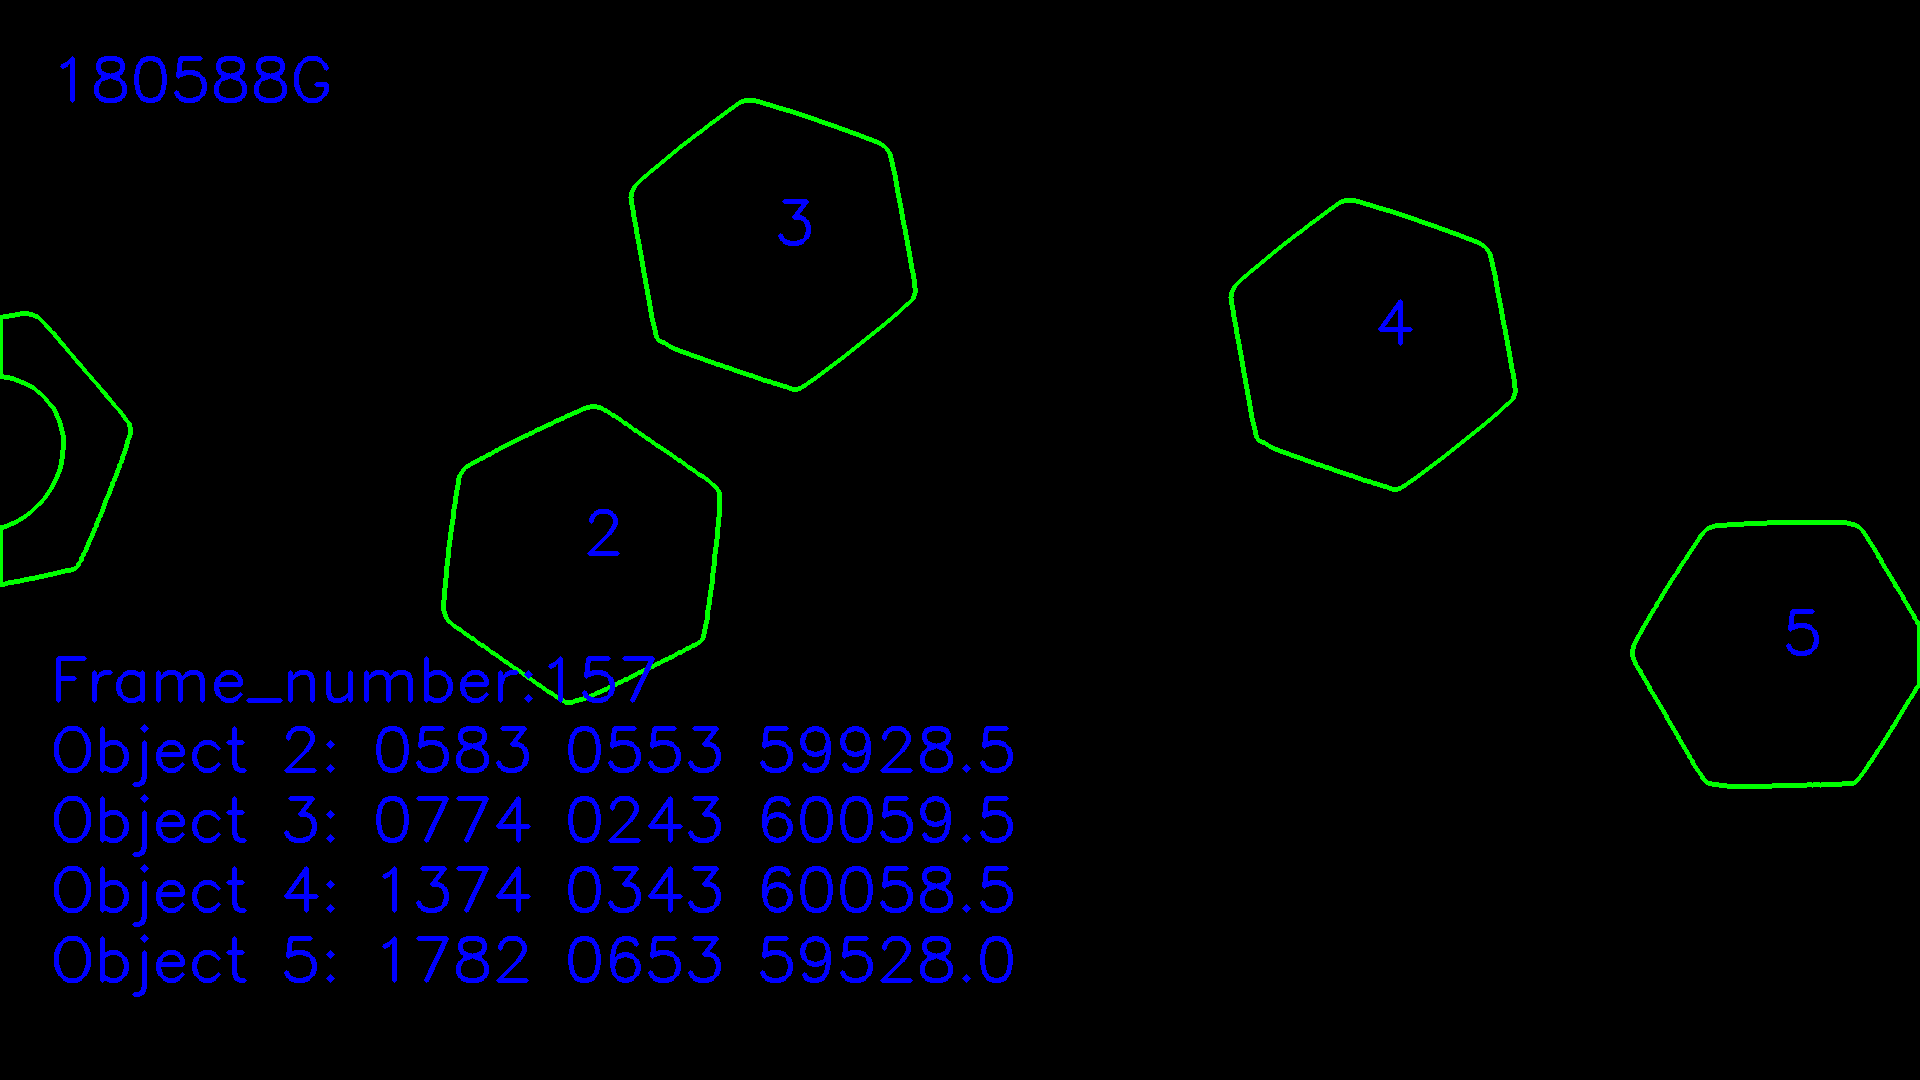

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.73000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.36400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.773e+03, 6.530e+02, 5.992e+04, 5.000e+00])]
Previousframe [array([5.83000e+02, 5.53000e+02, 5.99285e+04, 2.00000e+00]), array([7.74000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.37400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.7820e+03, 6.5300e+02, 5.9528e+04, 5.0000e+00])]


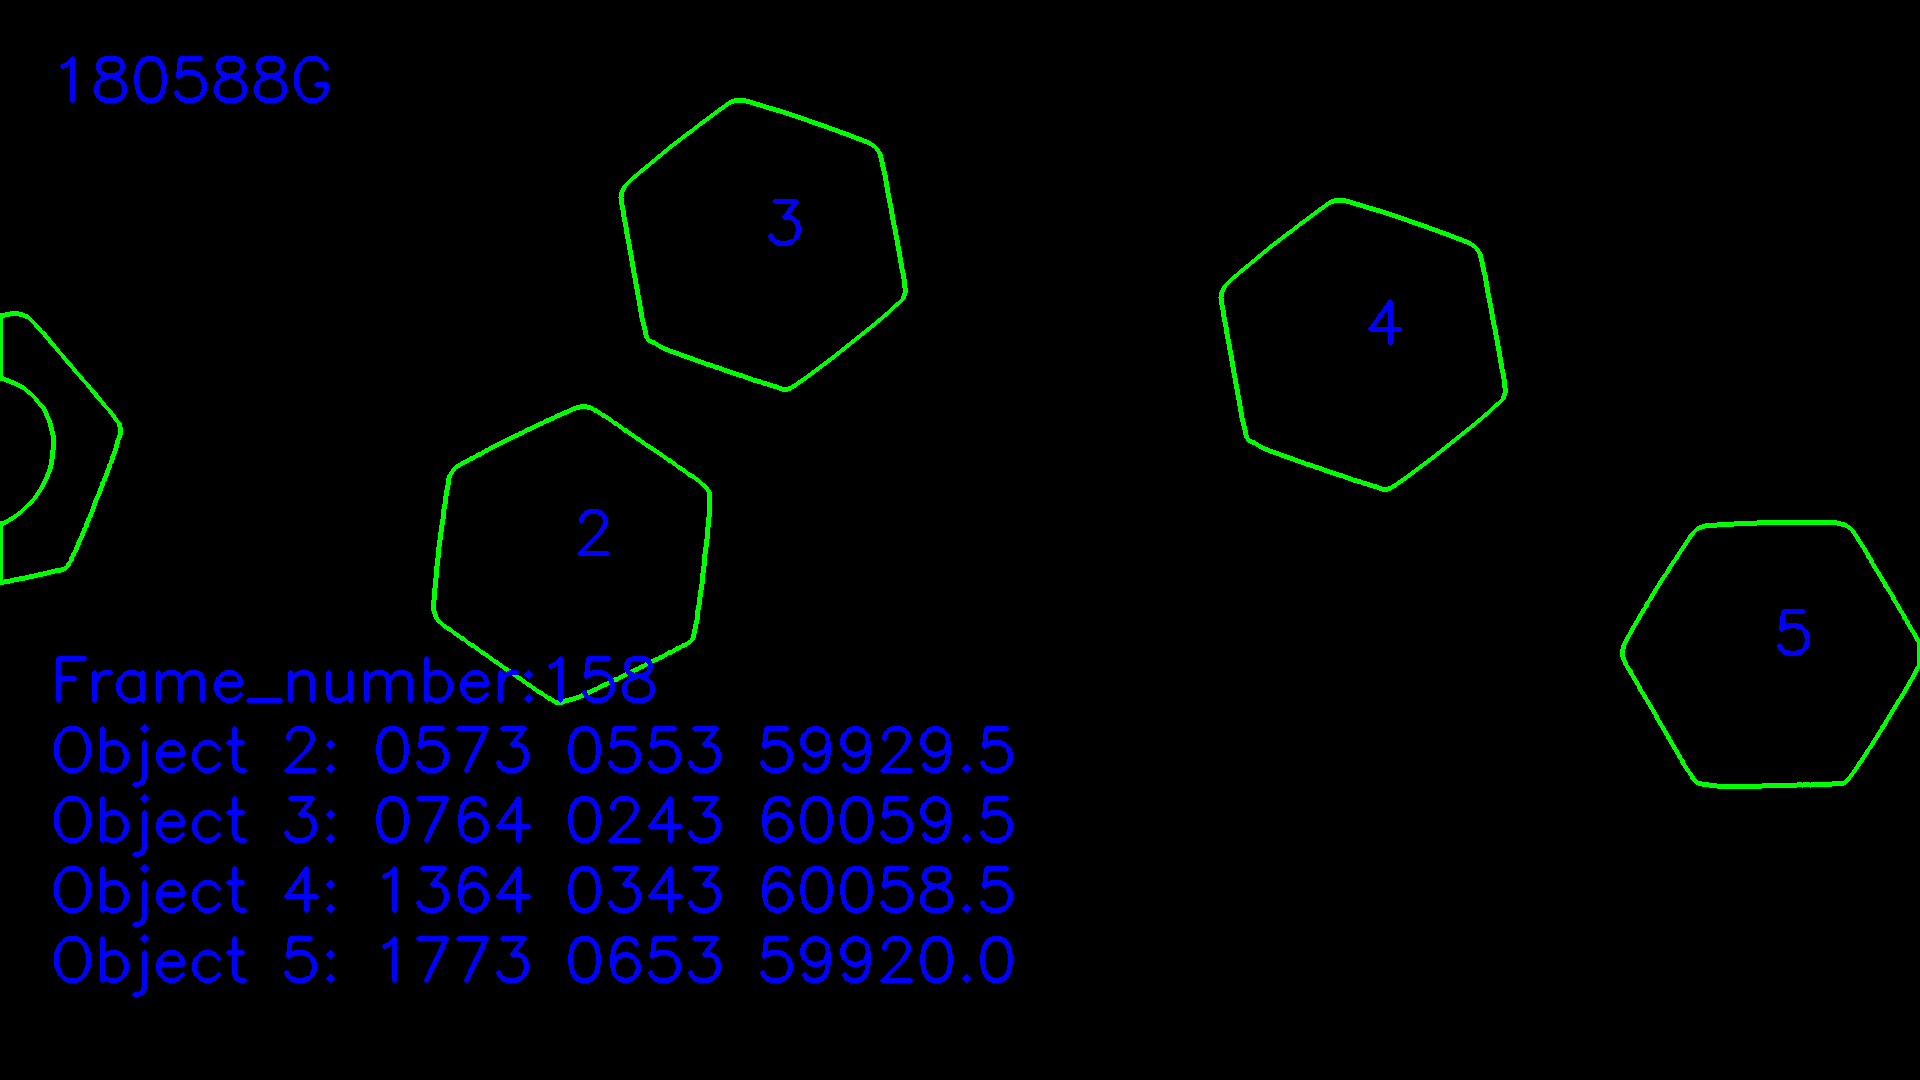

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.63000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.35400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.7640e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([5.73000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.36400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.773e+03, 6.530e+02, 5.992e+04, 5.000e+00])]


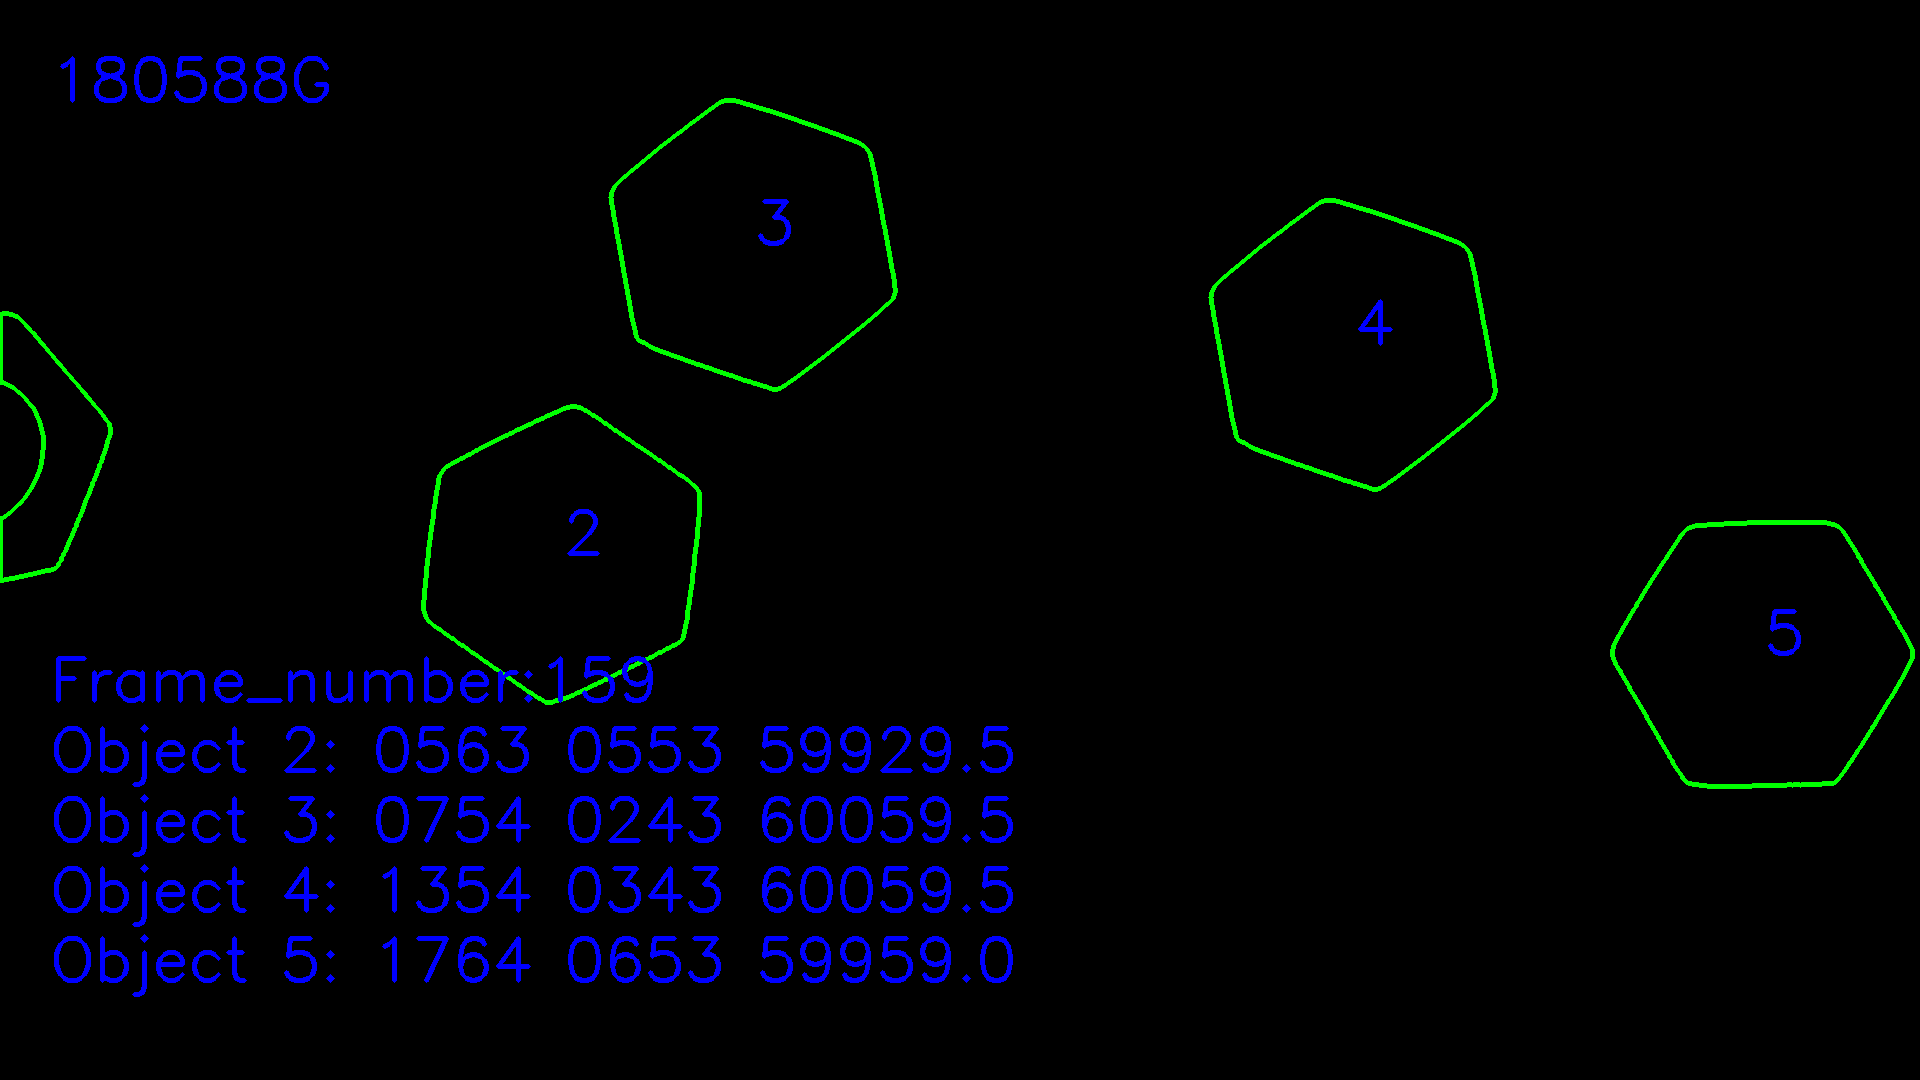

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.53000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.44000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.34400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.754e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([5.63000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.35400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.7640e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


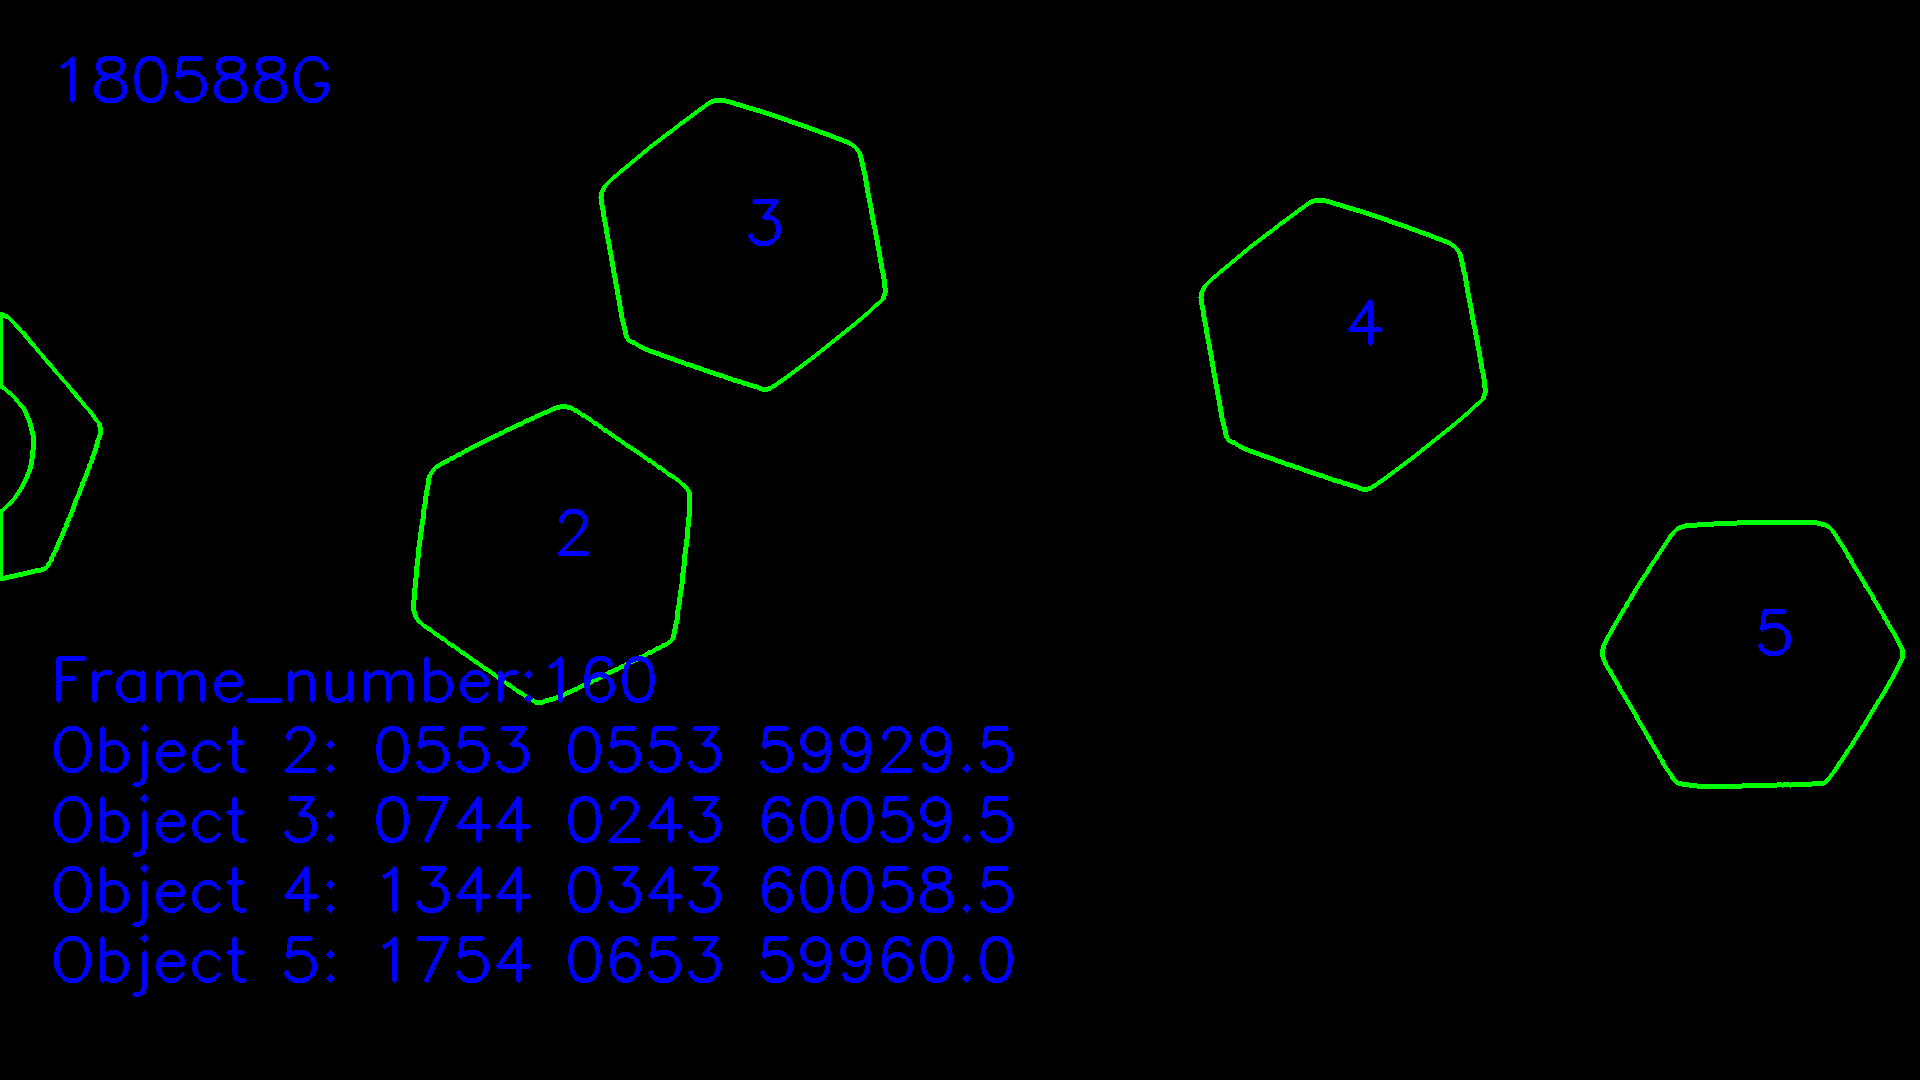

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.43000e+02, 5.53000e+02, 5.99305e+04, 2.00000e+00]), array([7.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.33400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.74400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]
Previousframe [array([5.53000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.44000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.34400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.754e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


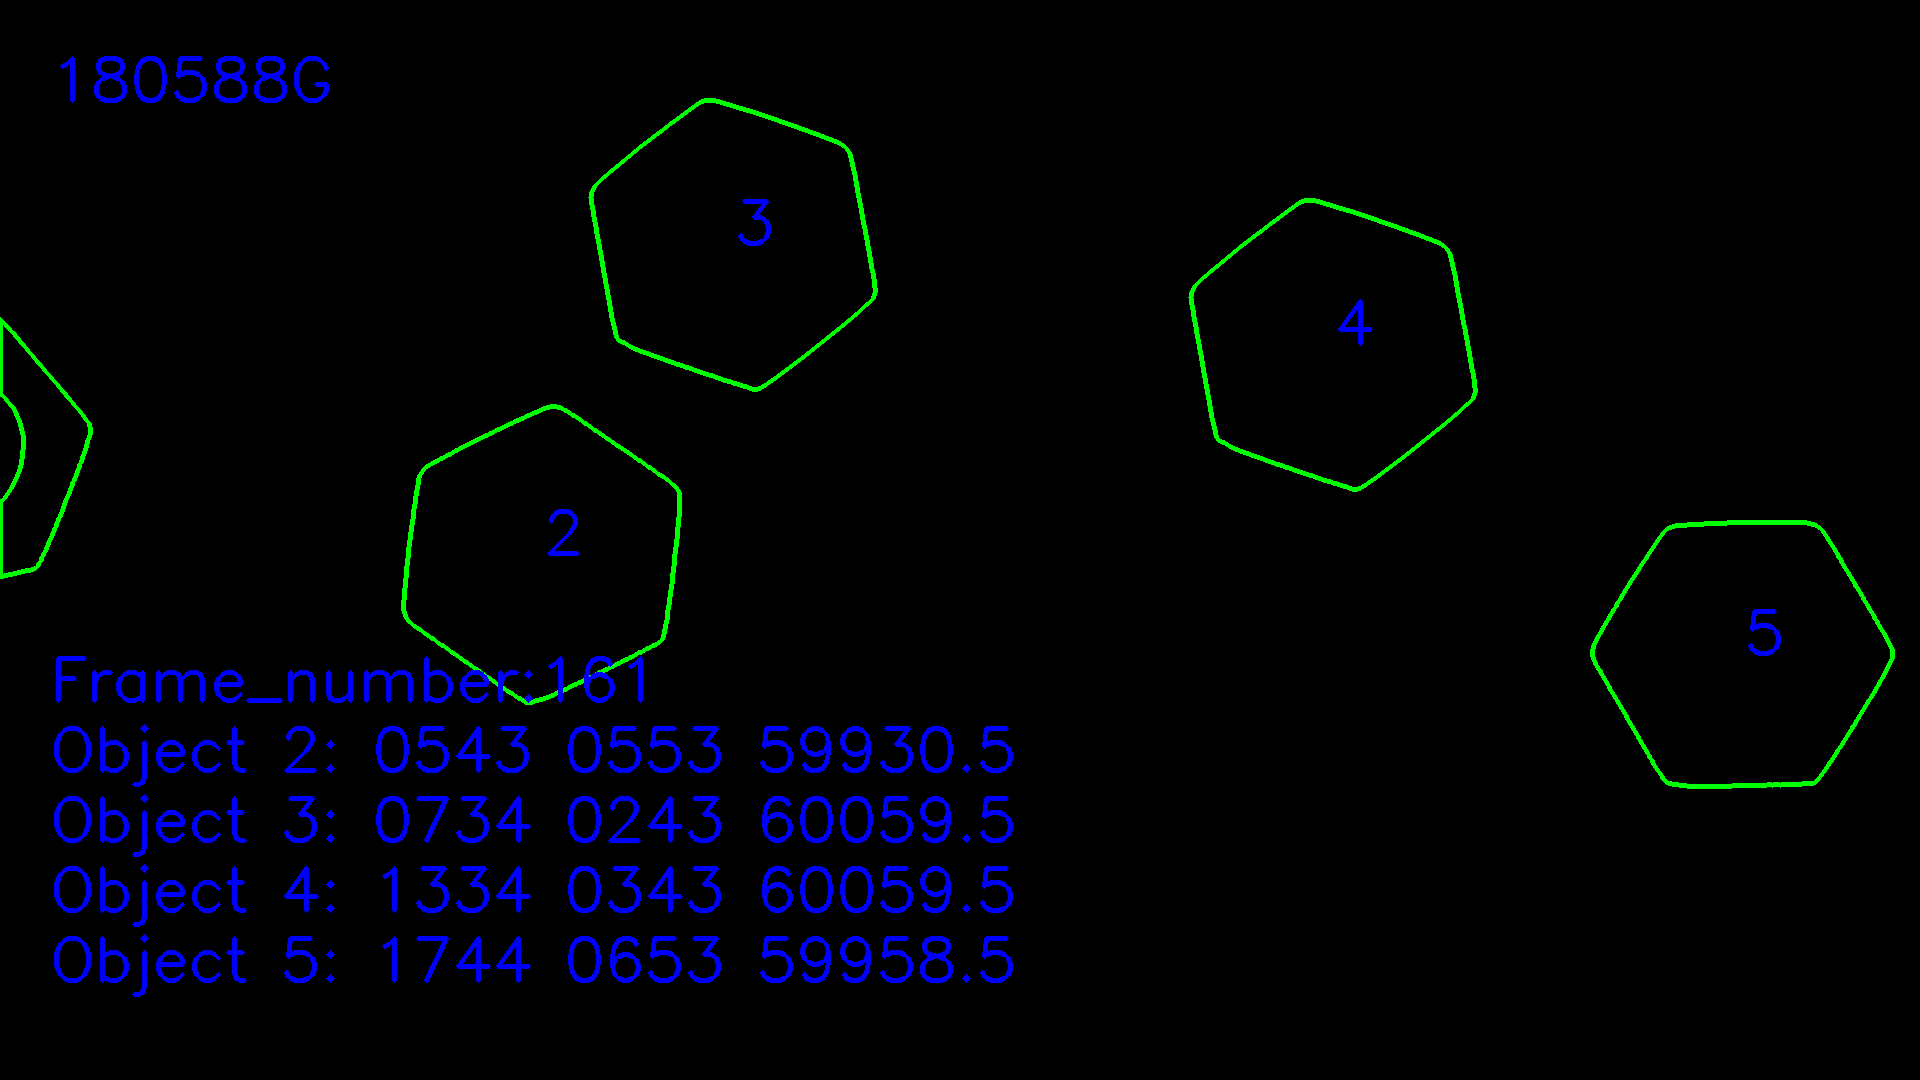

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.33000e+02, 5.53000e+02, 5.99305e+04, 2.00000e+00]), array([7.24000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.32400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.73400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]
Previousframe [array([5.43000e+02, 5.53000e+02, 5.99305e+04, 2.00000e+00]), array([7.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.33400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.74400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]


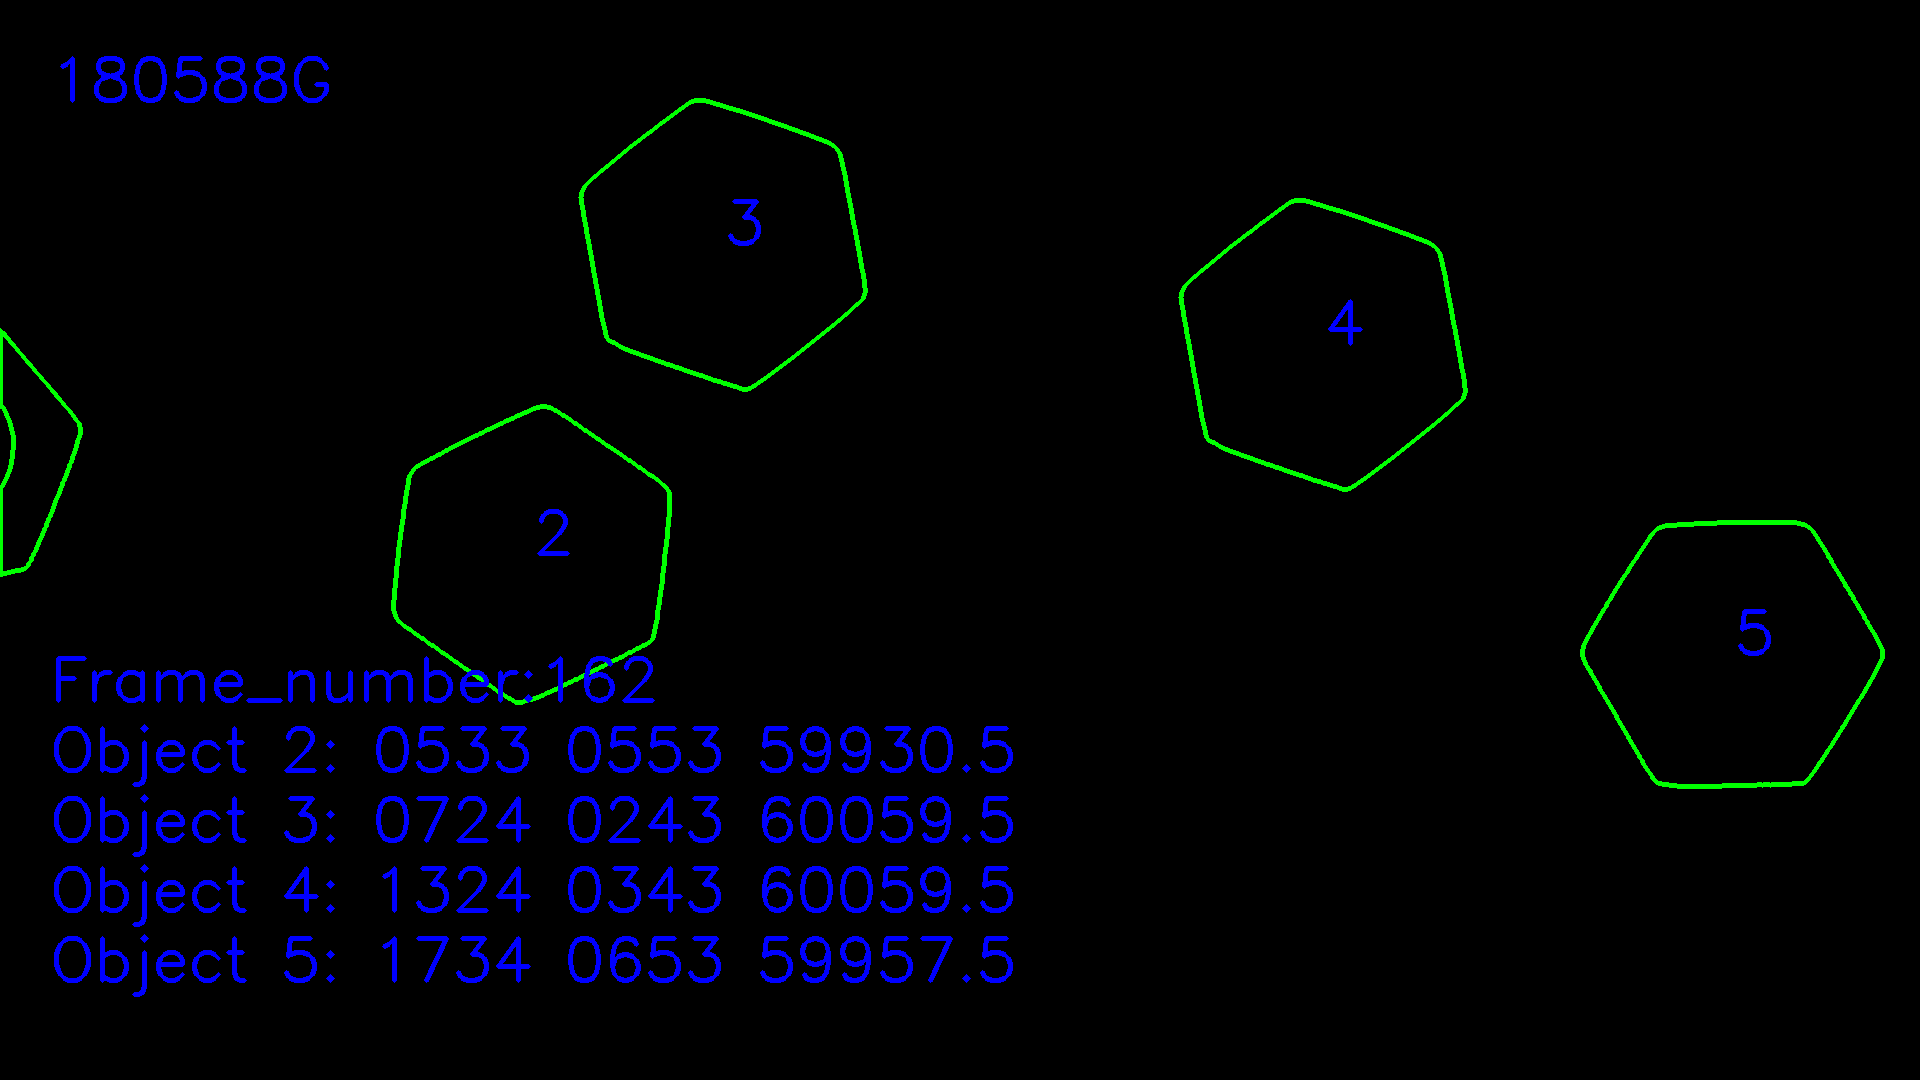

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.23000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.14000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.31400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.72400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]
Previousframe [array([5.33000e+02, 5.53000e+02, 5.99305e+04, 2.00000e+00]), array([7.24000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.32400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.73400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]


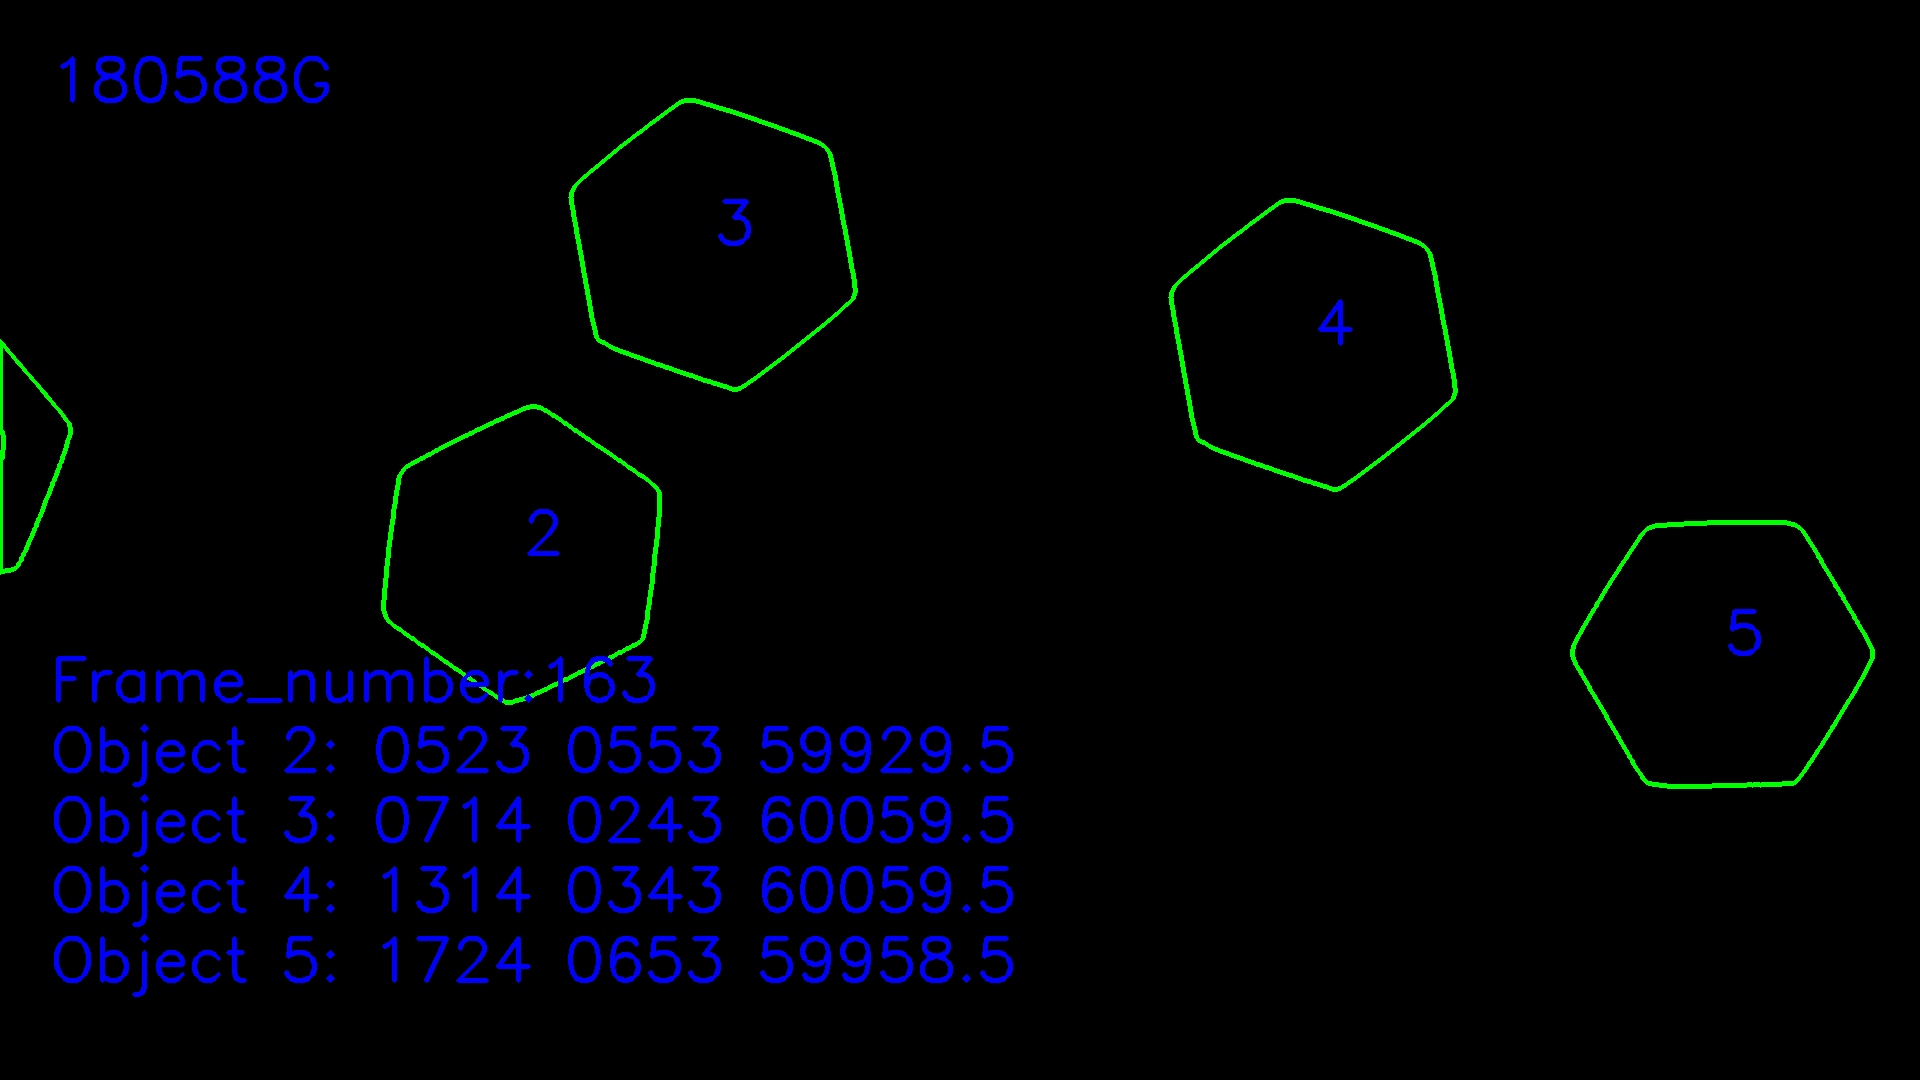

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.13000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.30400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.7140e+03, 6.5300e+02, 5.9957e+04, 5.0000e+00])]
Previousframe [array([5.23000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.14000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.31400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.72400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]


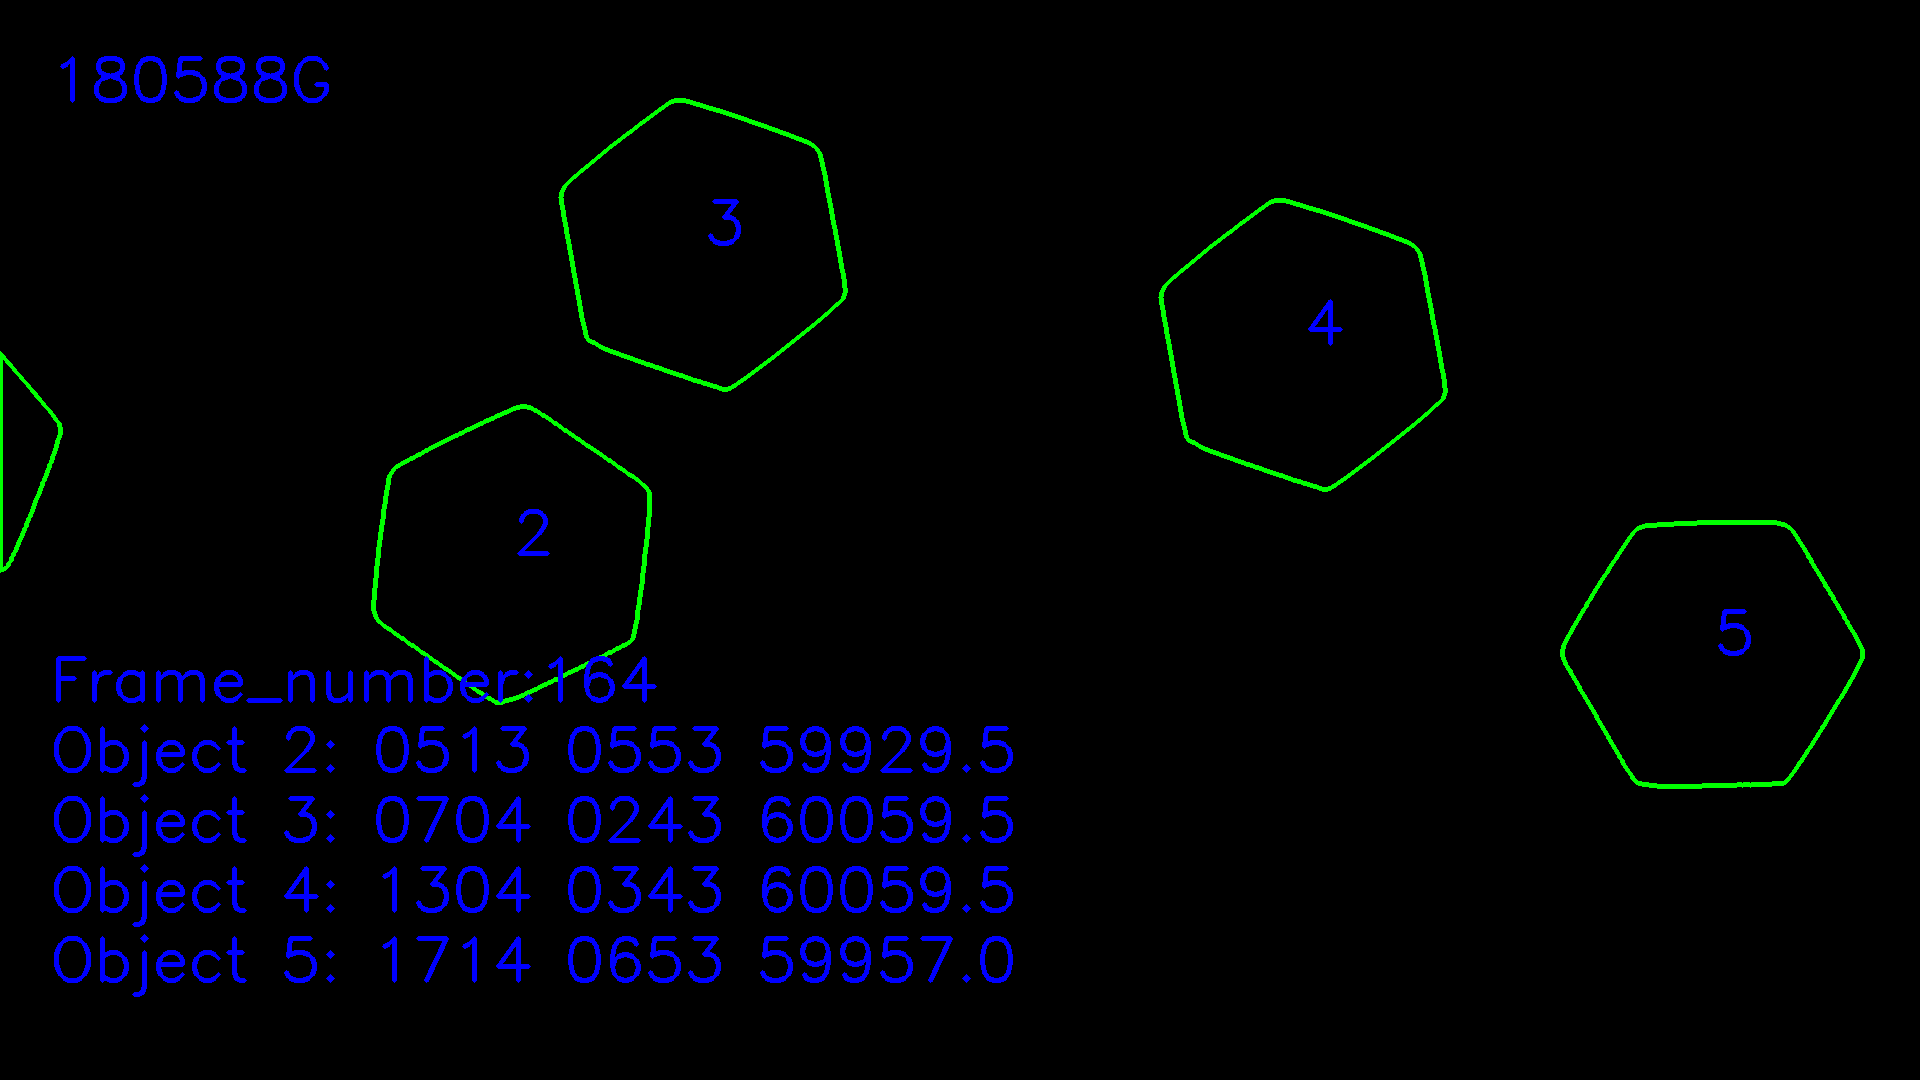

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.03000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([6.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.29400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.70400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]
Previousframe [array([5.13000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([7.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.30400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.7140e+03, 6.5300e+02, 5.9957e+04, 5.0000e+00])]


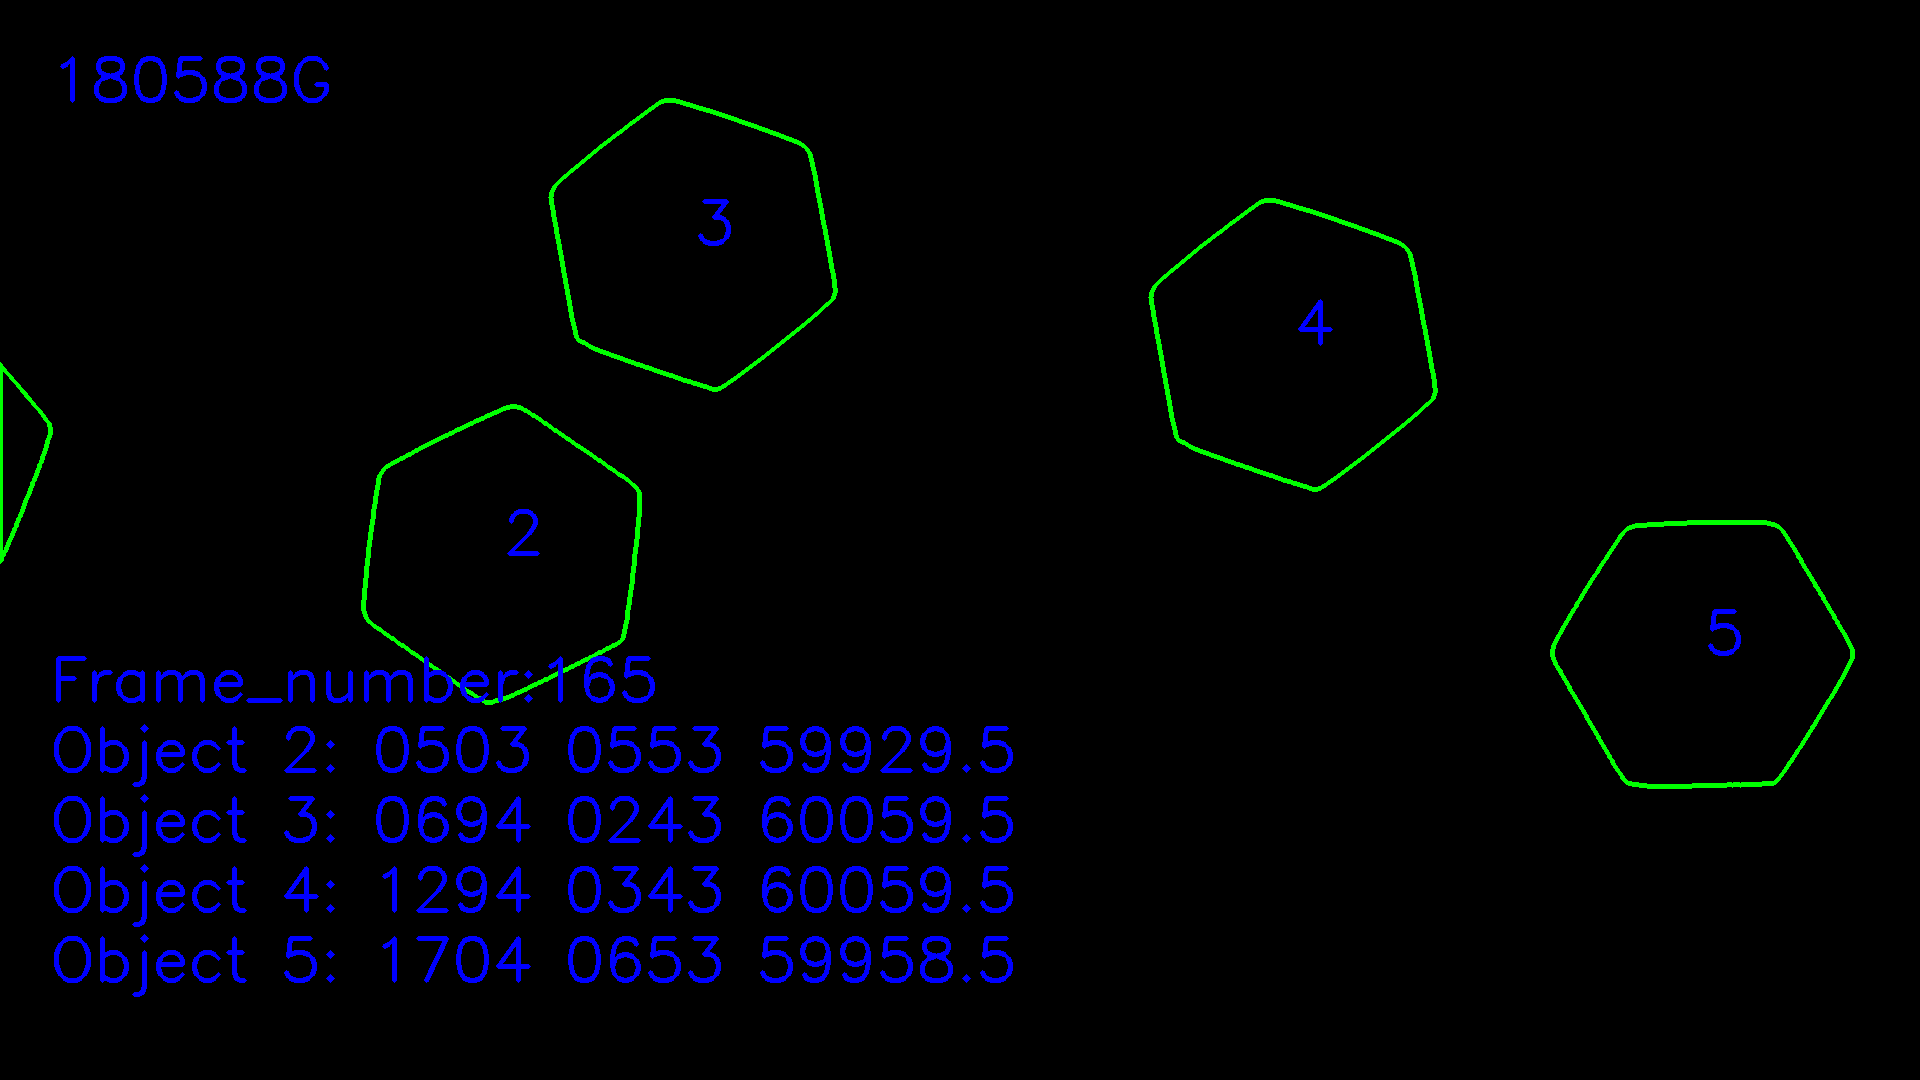

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.93000e+02, 5.53000e+02, 5.99285e+04, 2.00000e+00]), array([6.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.28400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.69400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]
Previousframe [array([5.03000e+02, 5.53000e+02, 5.99295e+04, 2.00000e+00]), array([6.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.29400e+03, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.70400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]


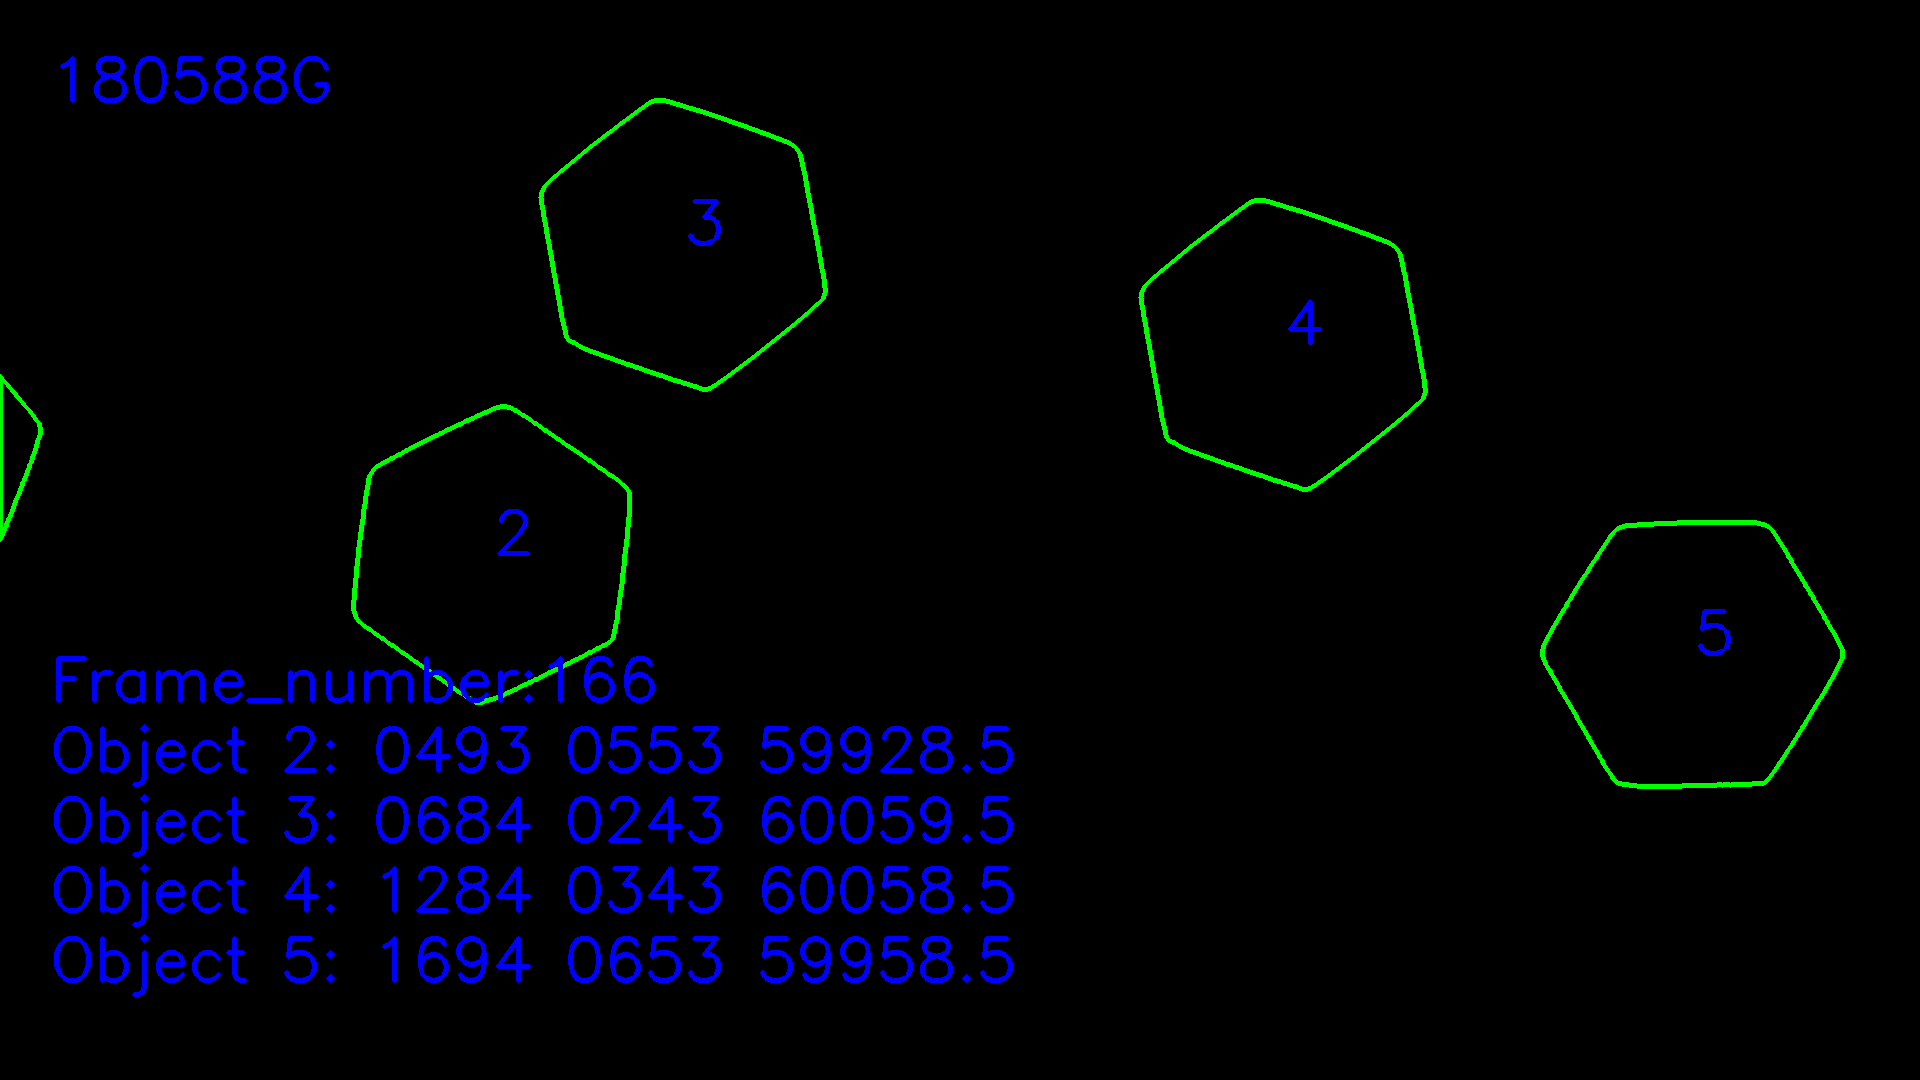

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([6.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.27400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.68400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([4.93000e+02, 5.53000e+02, 5.99285e+04, 2.00000e+00]), array([6.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.28400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.69400e+03, 6.53000e+02, 5.99585e+04, 5.00000e+00])]


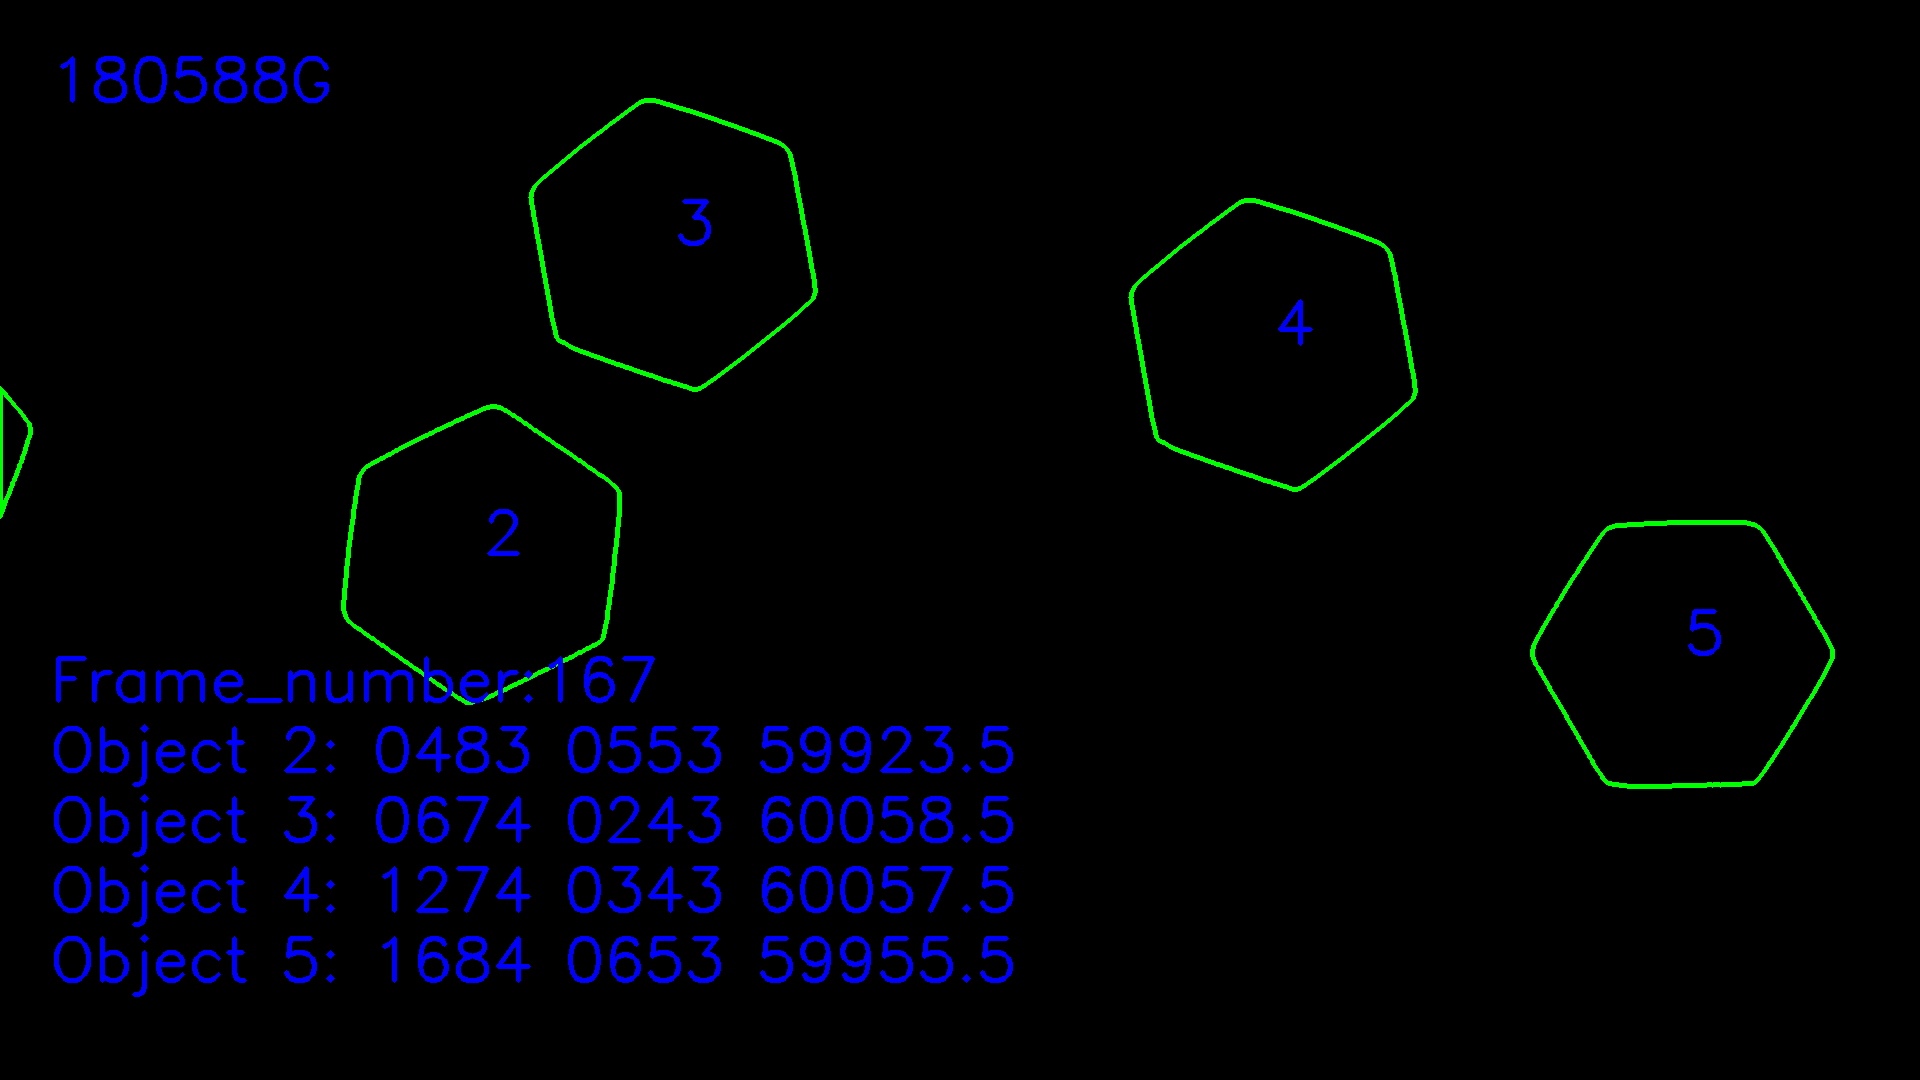

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.26400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.67400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([4.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([6.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.27400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.68400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


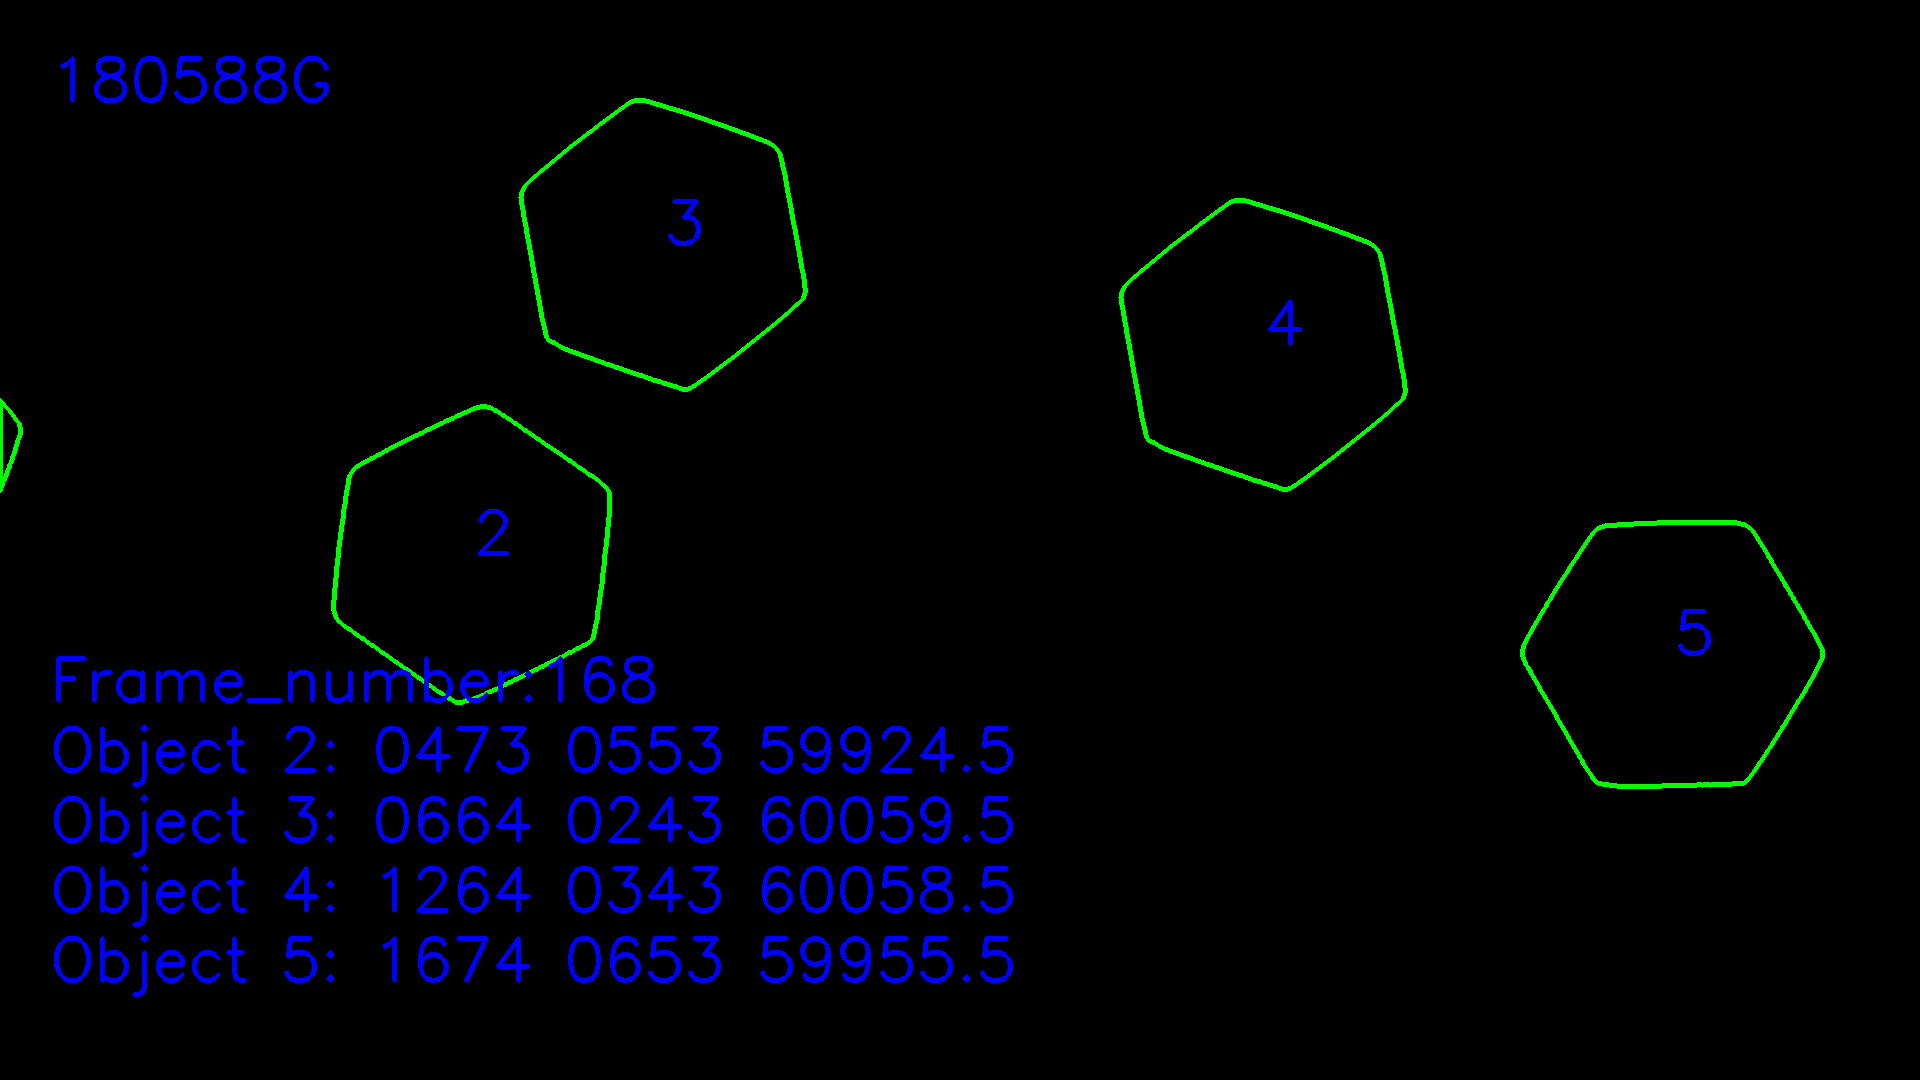

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.63000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.54000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.25400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.6640e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([4.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.26400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.67400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


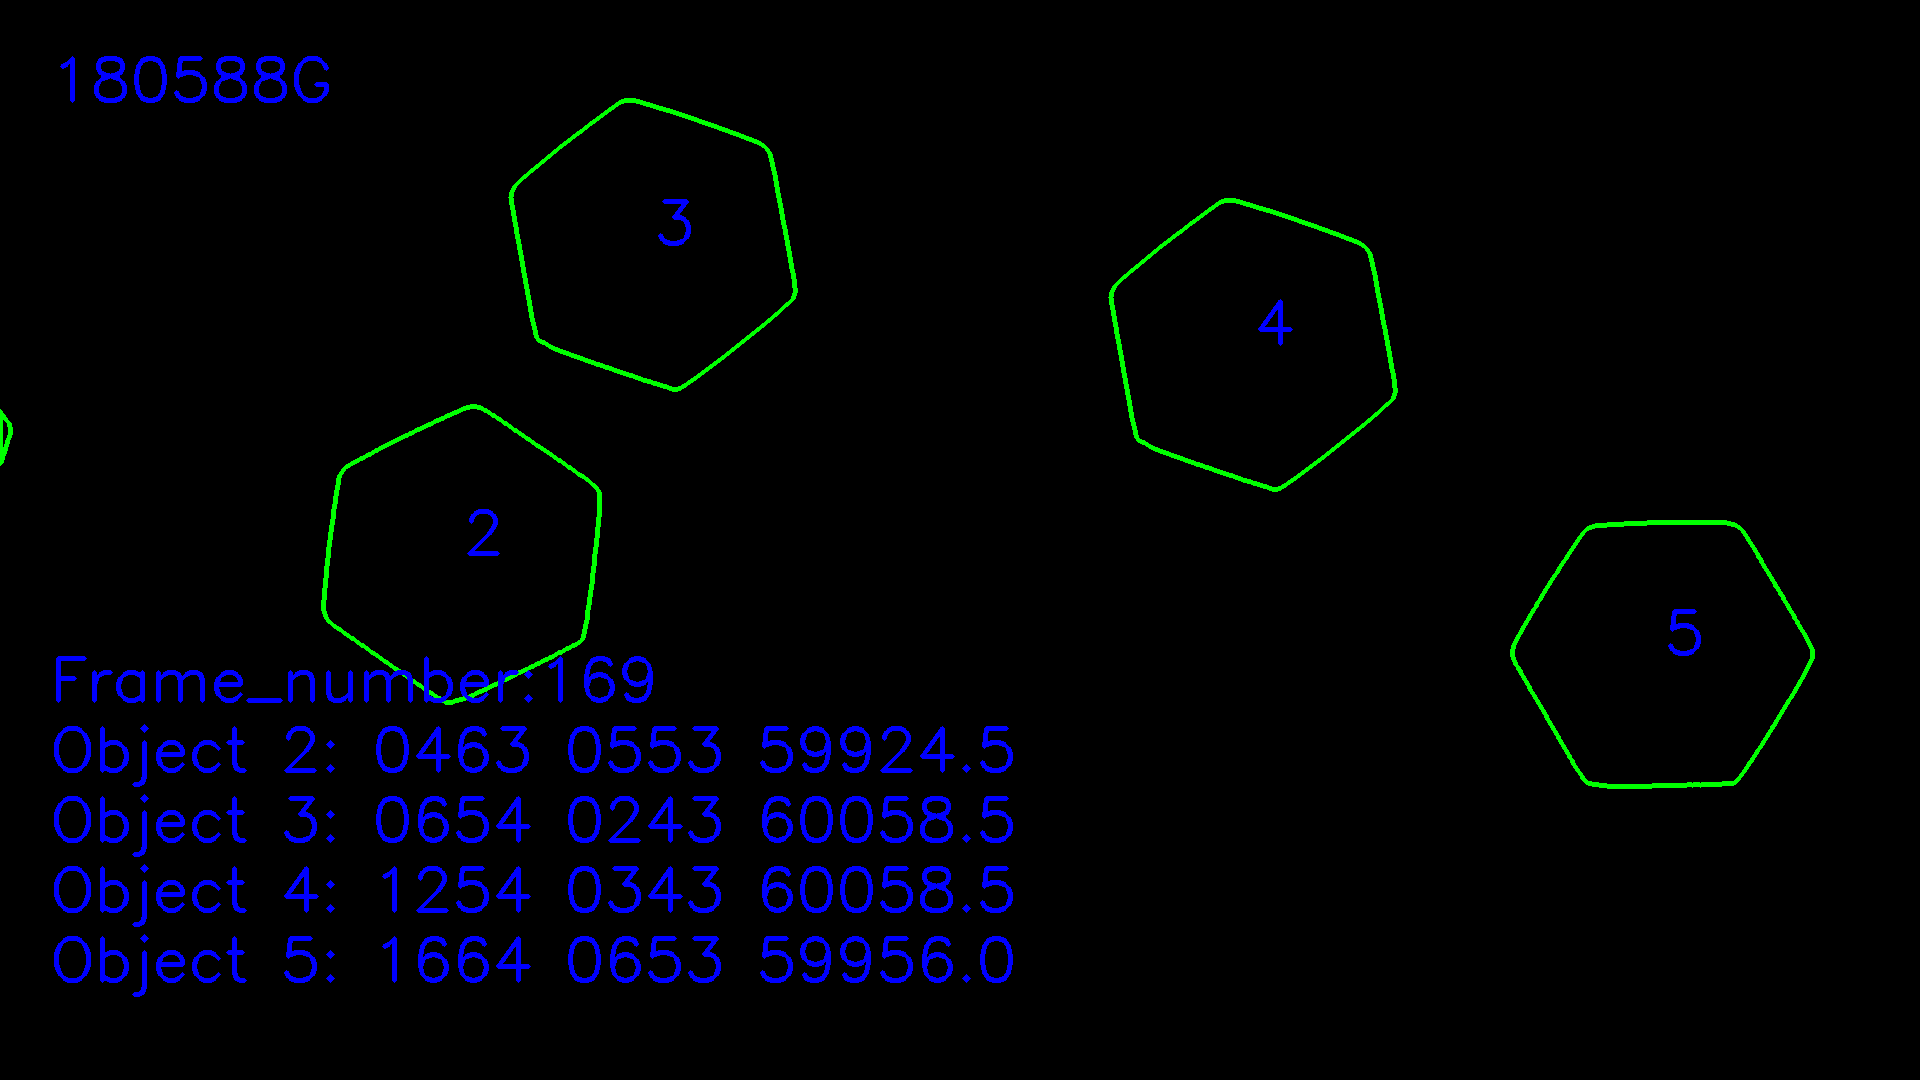

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.44000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.24400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.6540e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([4.63000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.54000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.25400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.6640e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


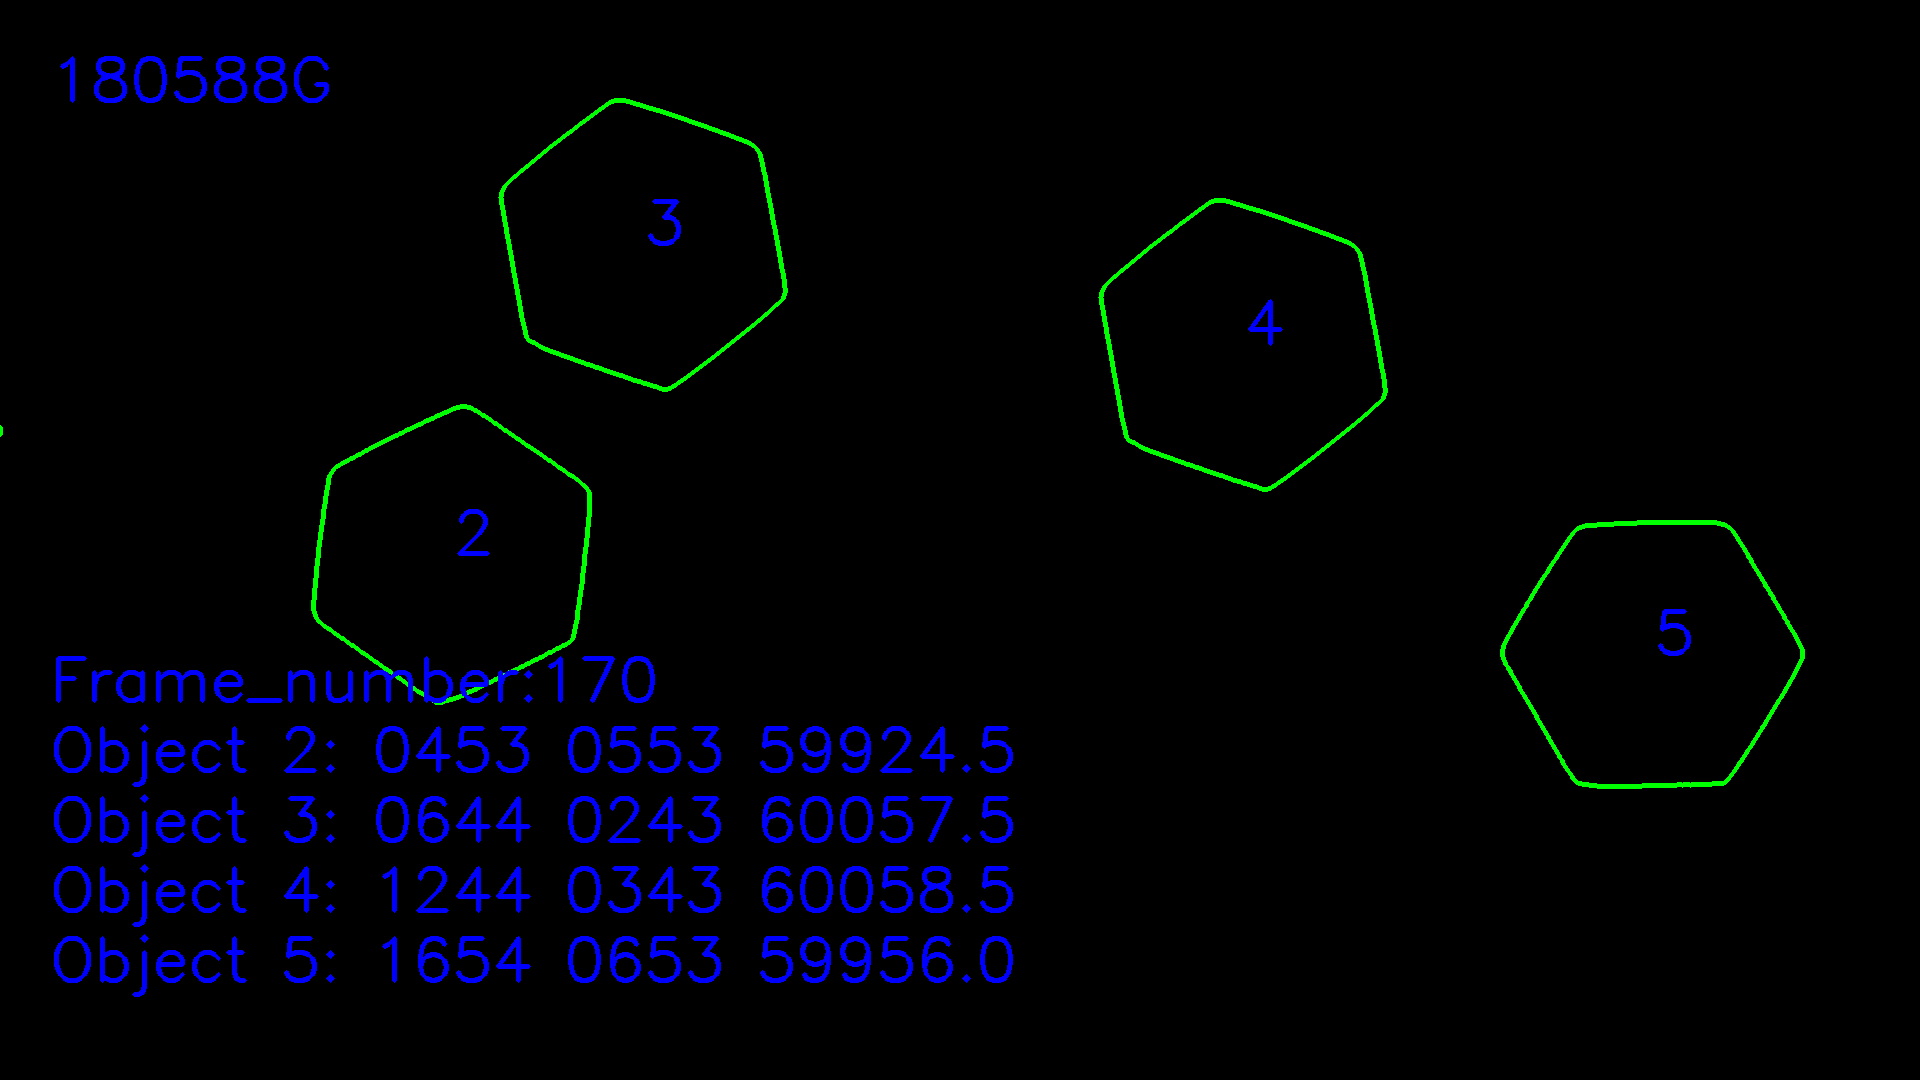

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.43000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.34000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.23400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.6440e+03, 6.5300e+02, 5.9958e+04, 5.0000e+00])]
Previousframe [array([4.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.44000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.24400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.6540e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


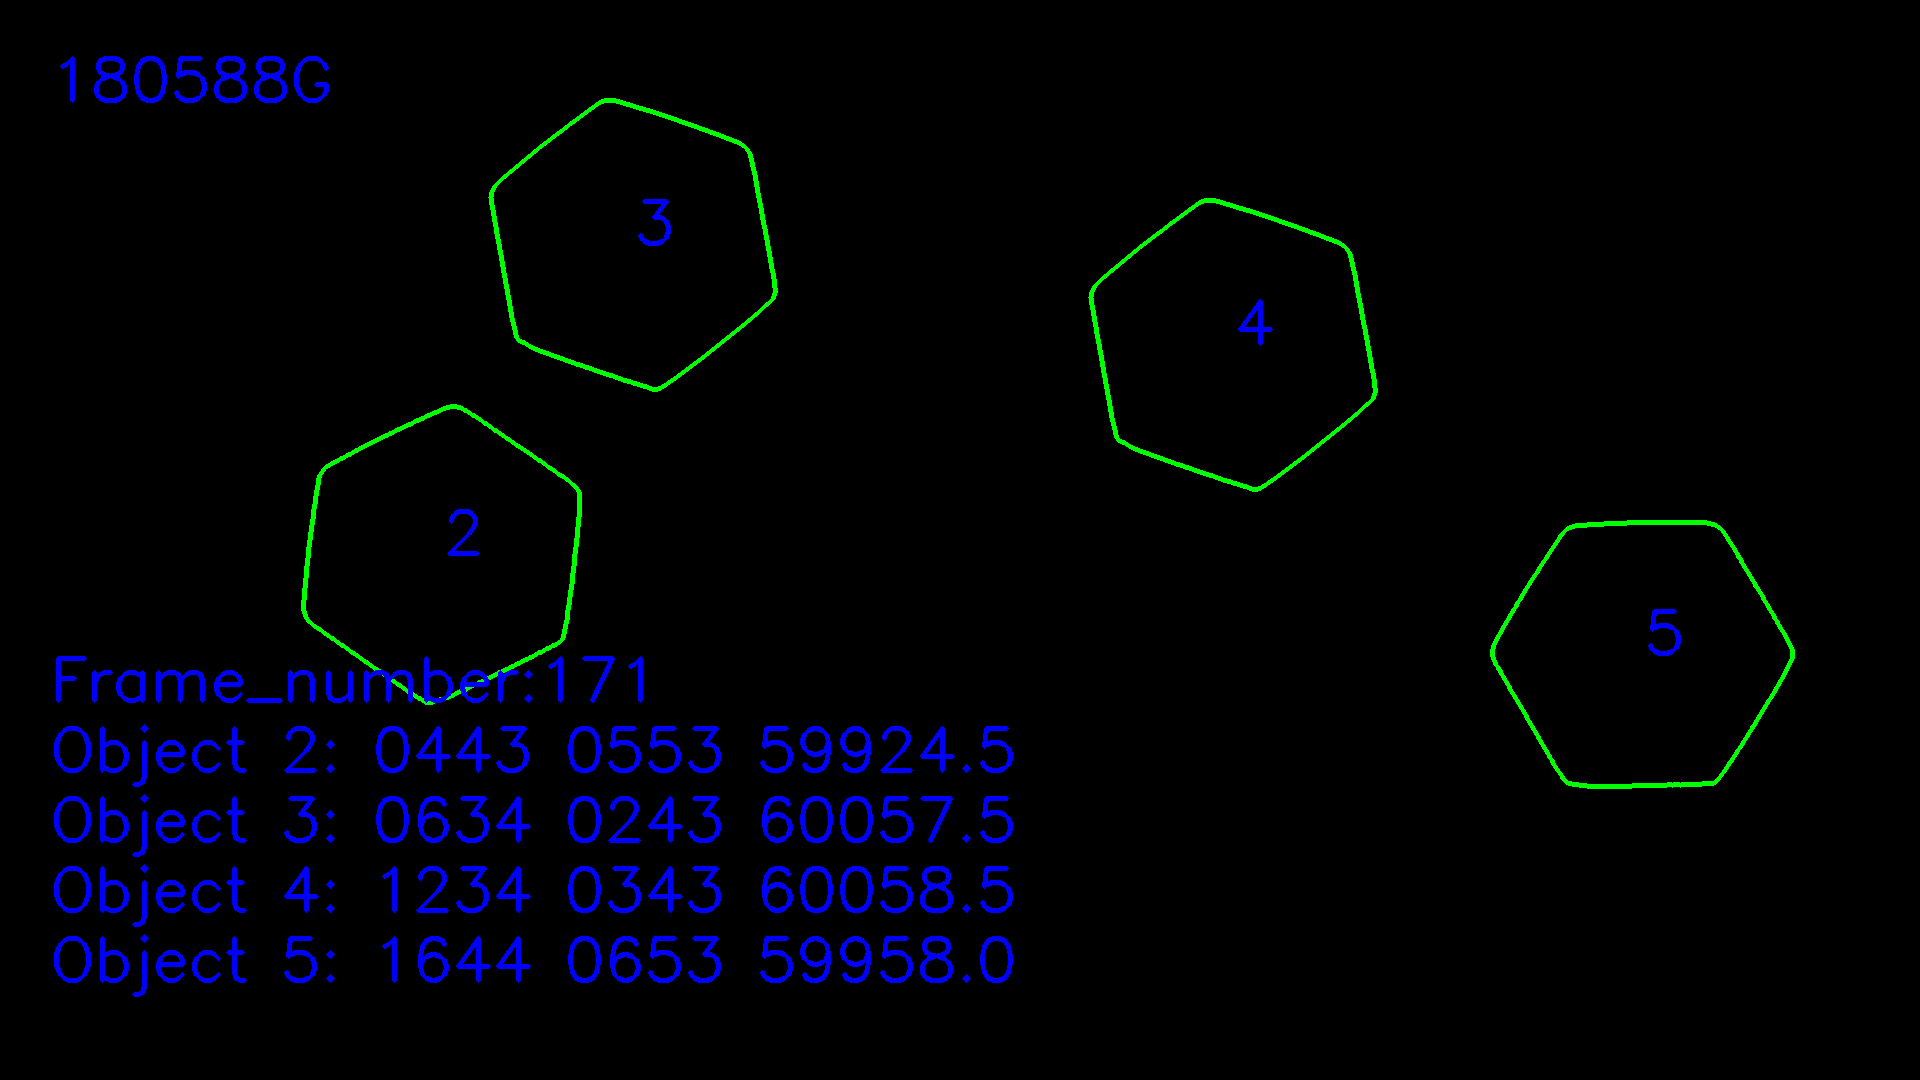

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.33000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.24000e+02, 2.43000e+02, 6.00565e+04, 3.00000e+00]), array([1.22400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.6340e+03, 6.5300e+02, 5.9958e+04, 5.0000e+00])]
Previousframe [array([4.43000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.34000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.23400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.6440e+03, 6.5300e+02, 5.9958e+04, 5.0000e+00])]


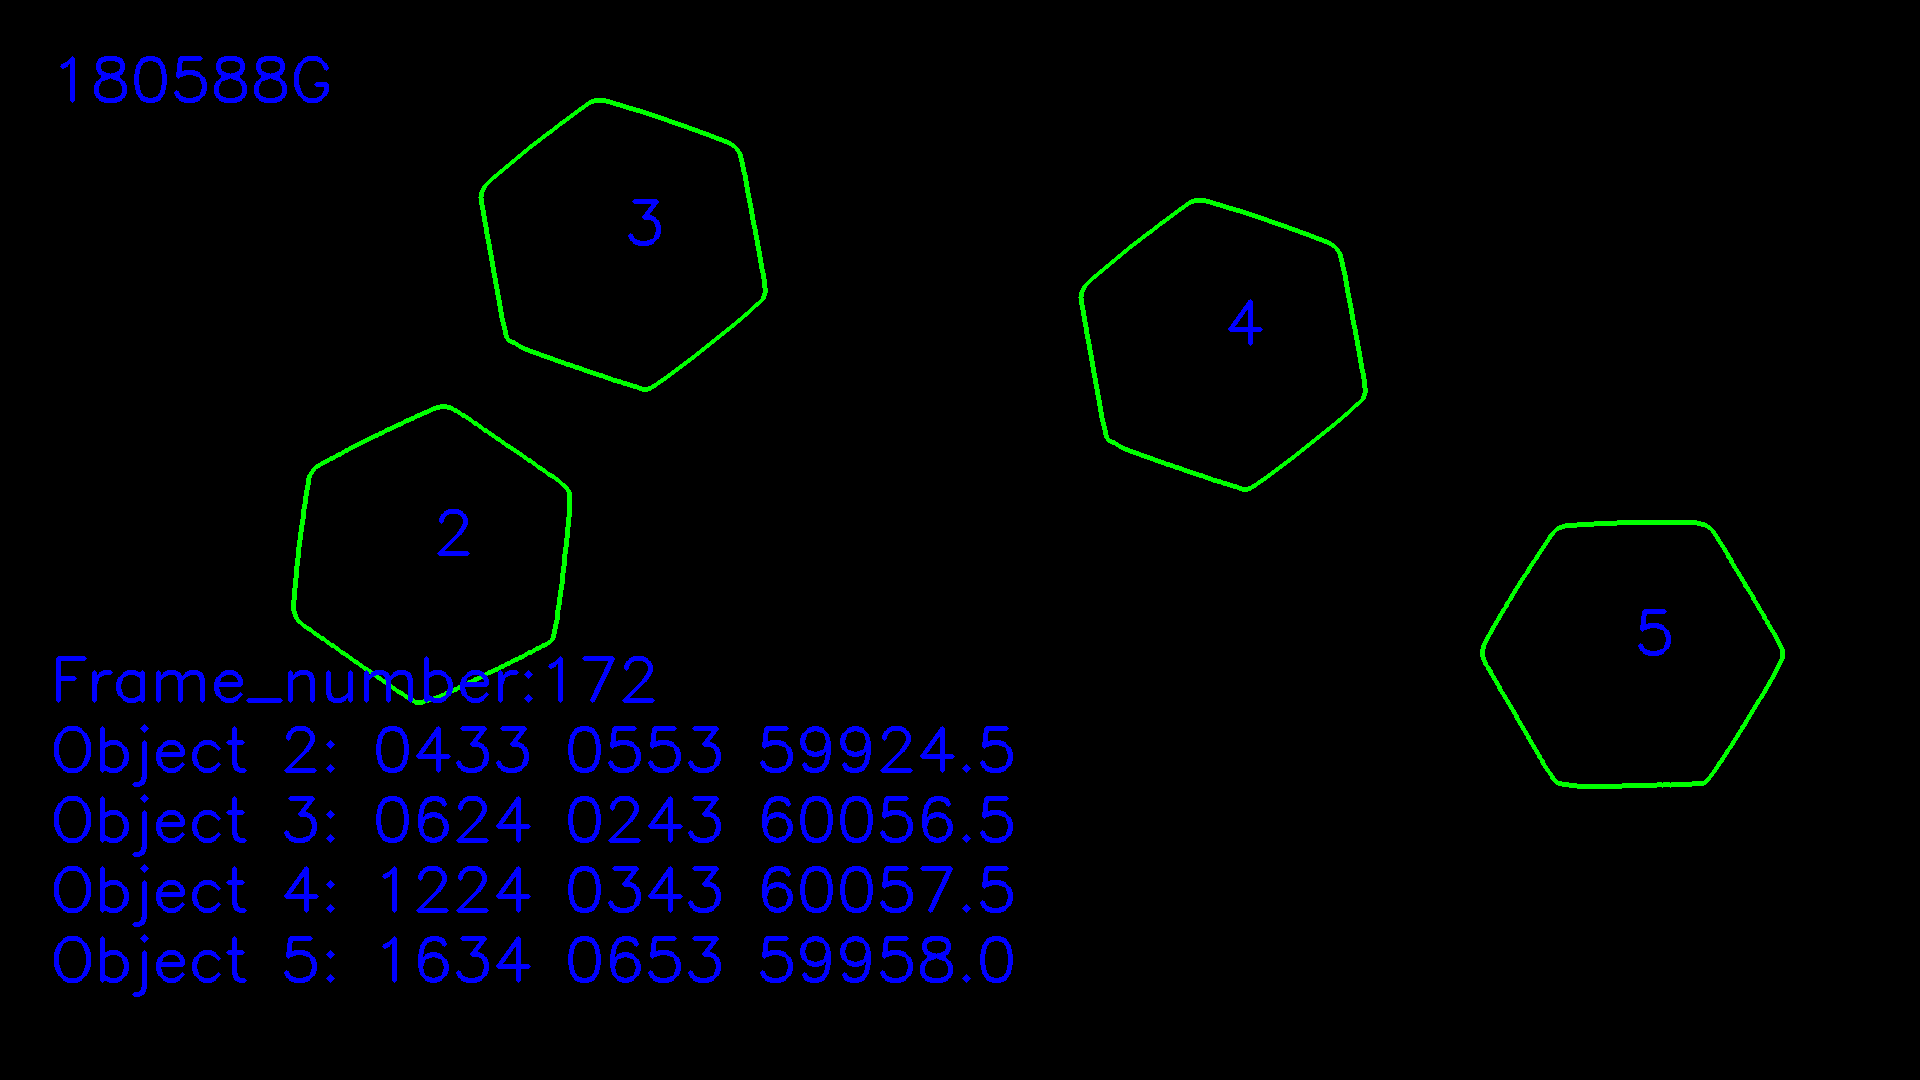

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([6.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.21400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.6240e+03, 6.5300e+02, 5.9958e+04, 5.0000e+00])]
Previousframe [array([4.33000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.24000e+02, 2.43000e+02, 6.00565e+04, 3.00000e+00]), array([1.22400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.6340e+03, 6.5300e+02, 5.9958e+04, 5.0000e+00])]


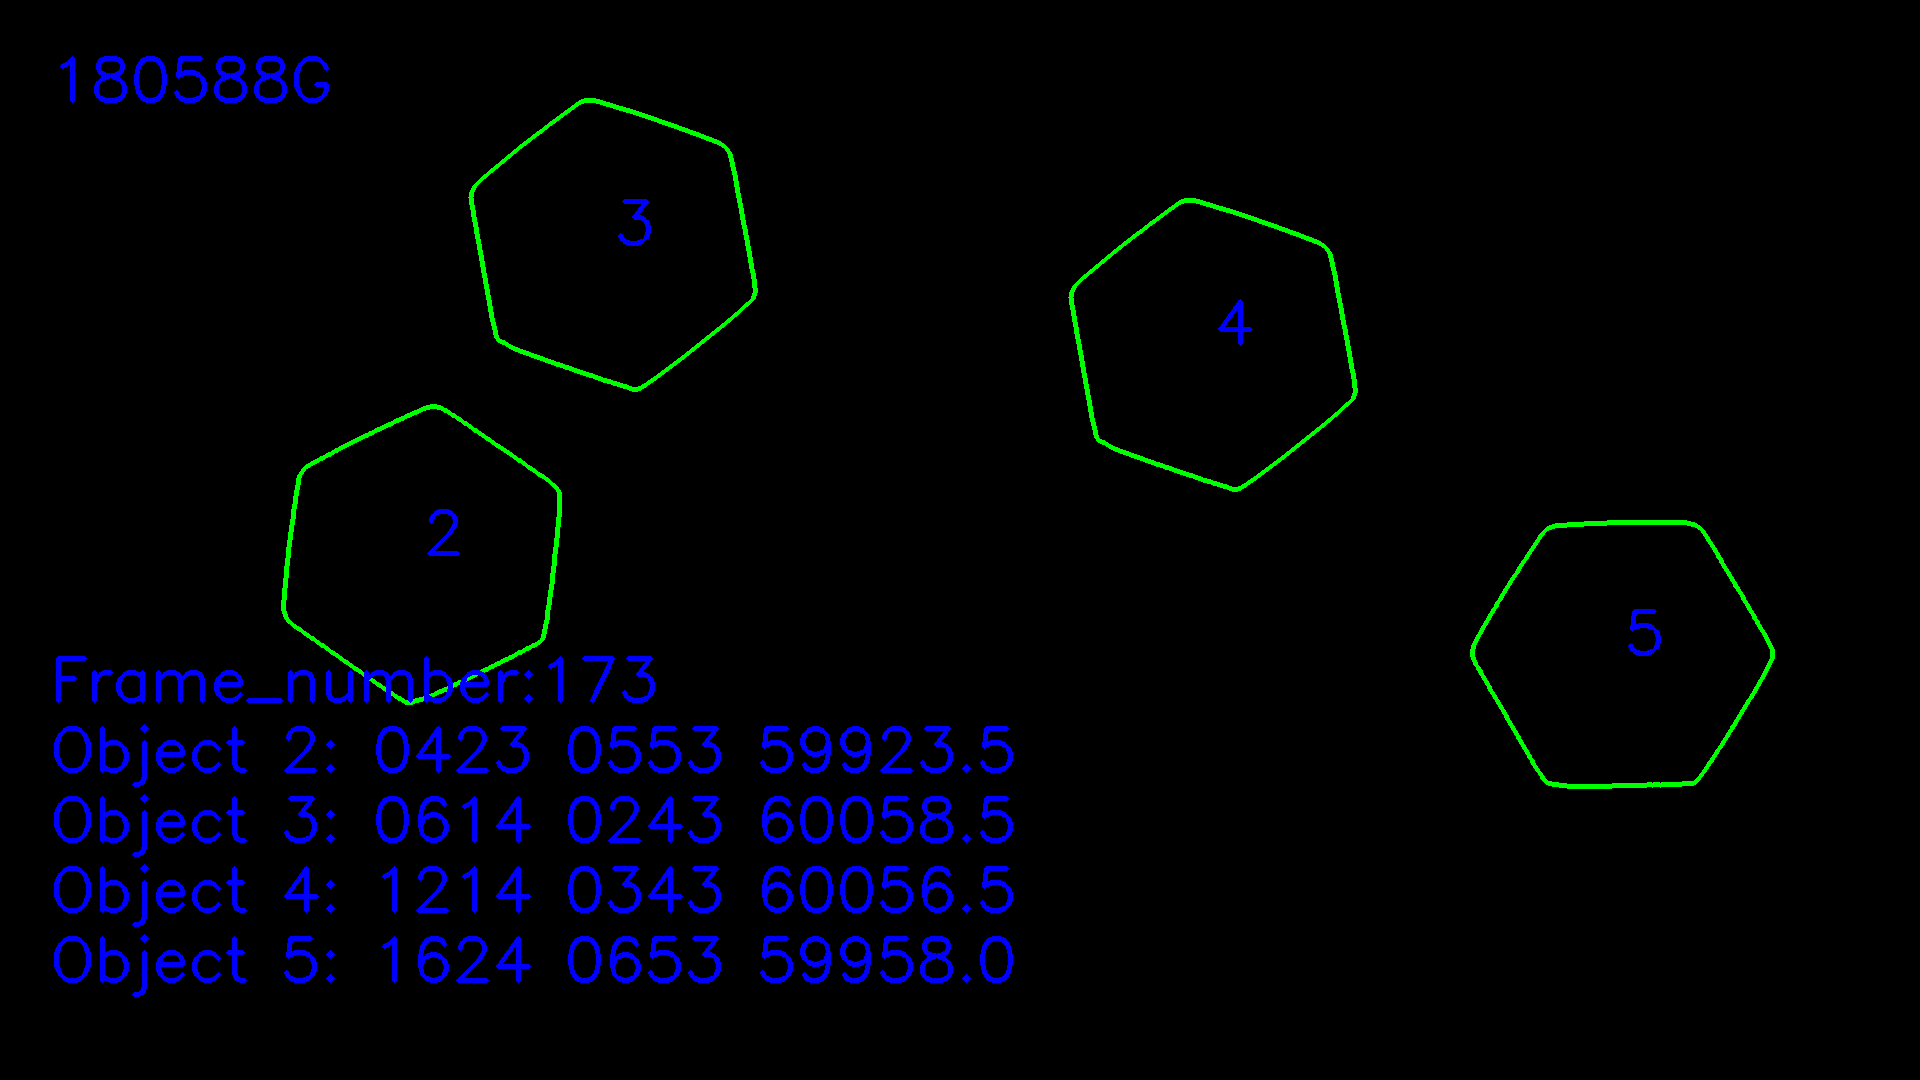

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.13000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.04000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.20400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.61400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([4.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([6.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.21400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.6240e+03, 6.5300e+02, 5.9958e+04, 5.0000e+00])]


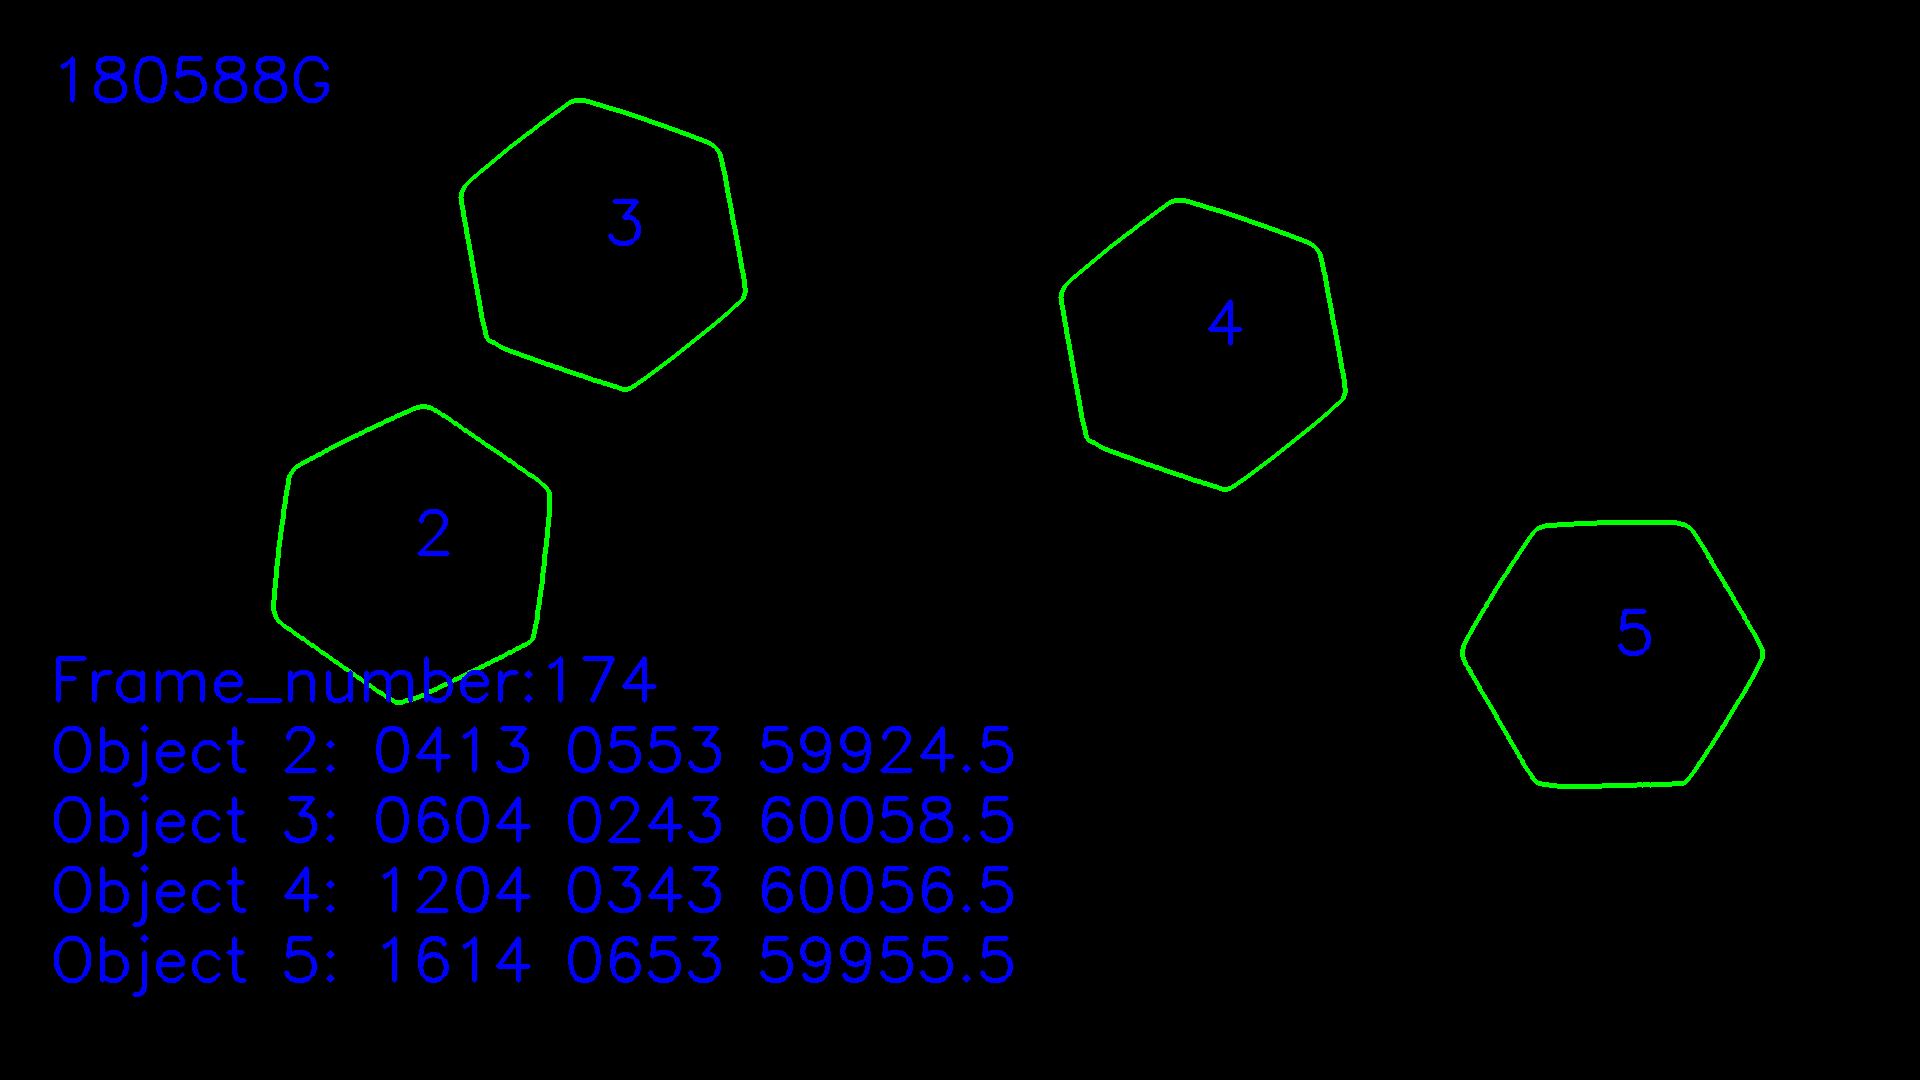

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.19400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.60400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([4.13000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([6.04000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.20400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.61400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


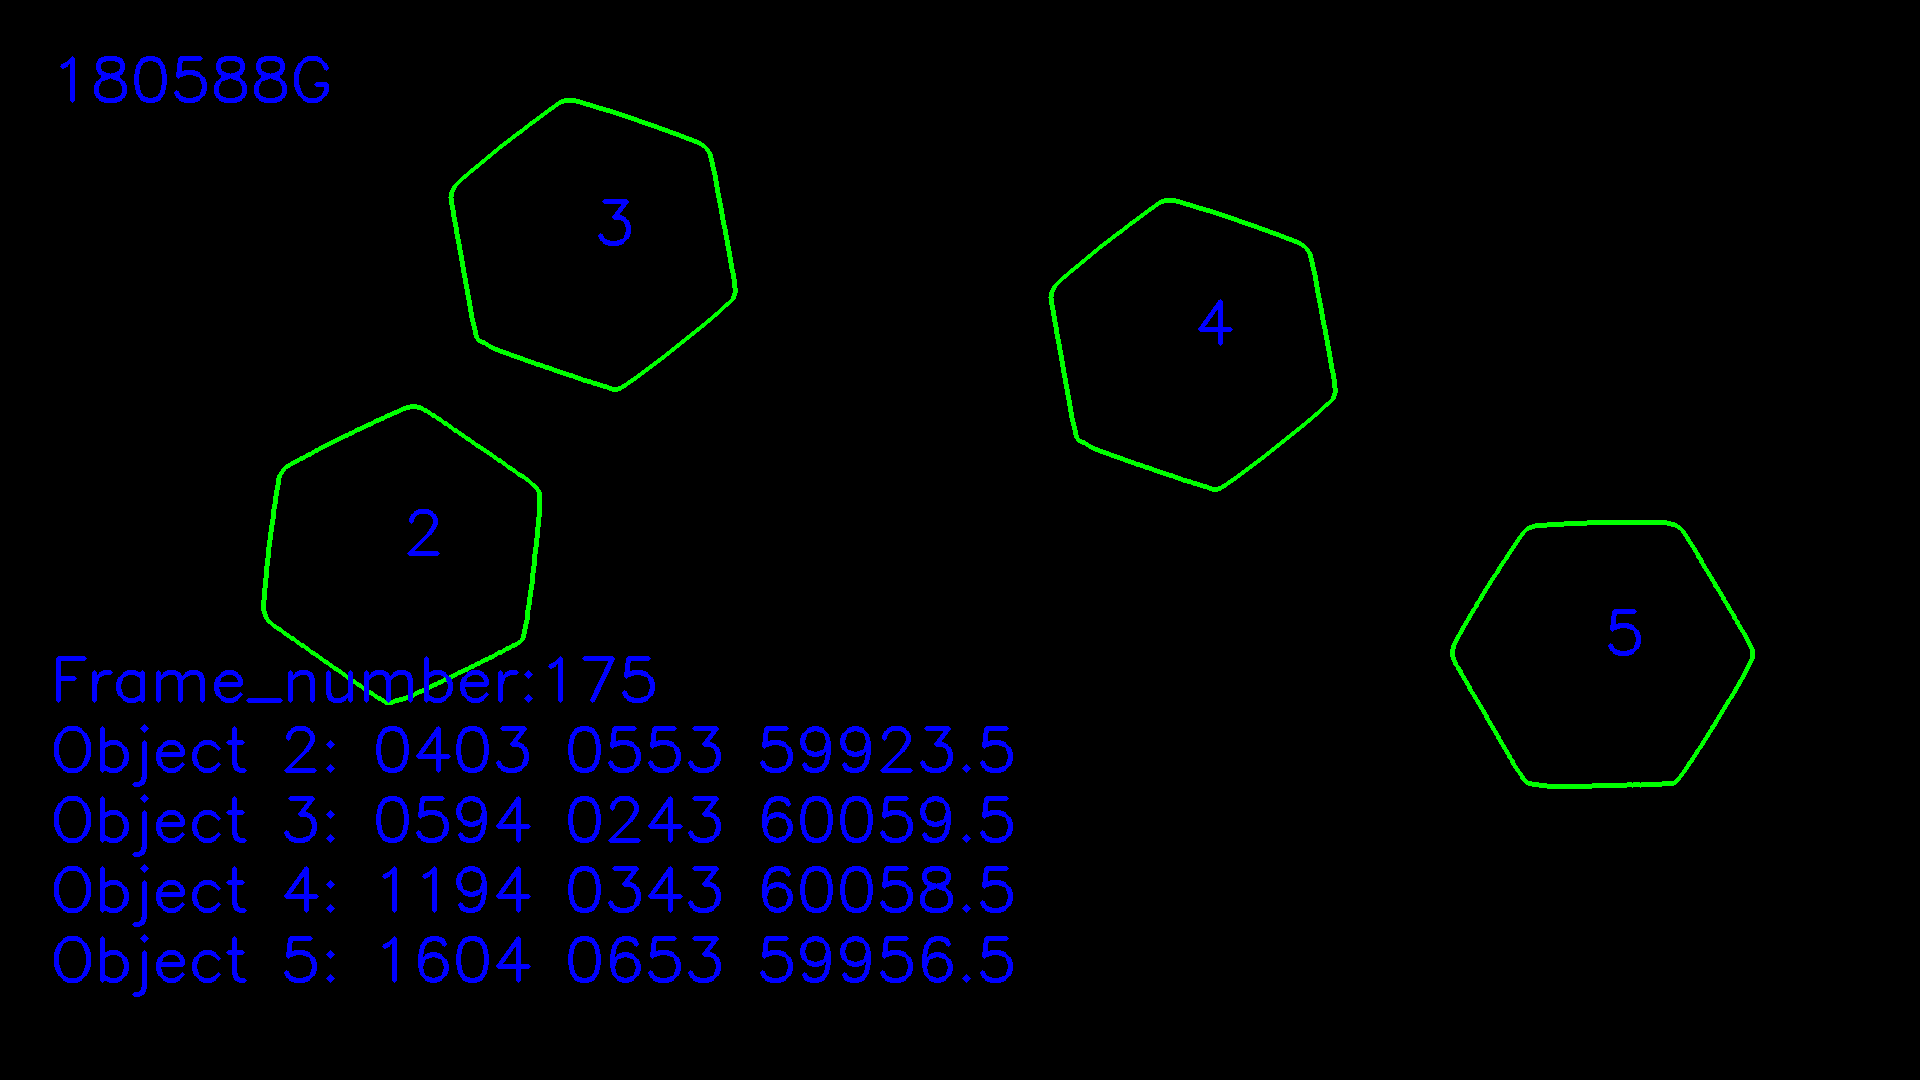

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.18400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.59400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([4.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.19400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.60400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


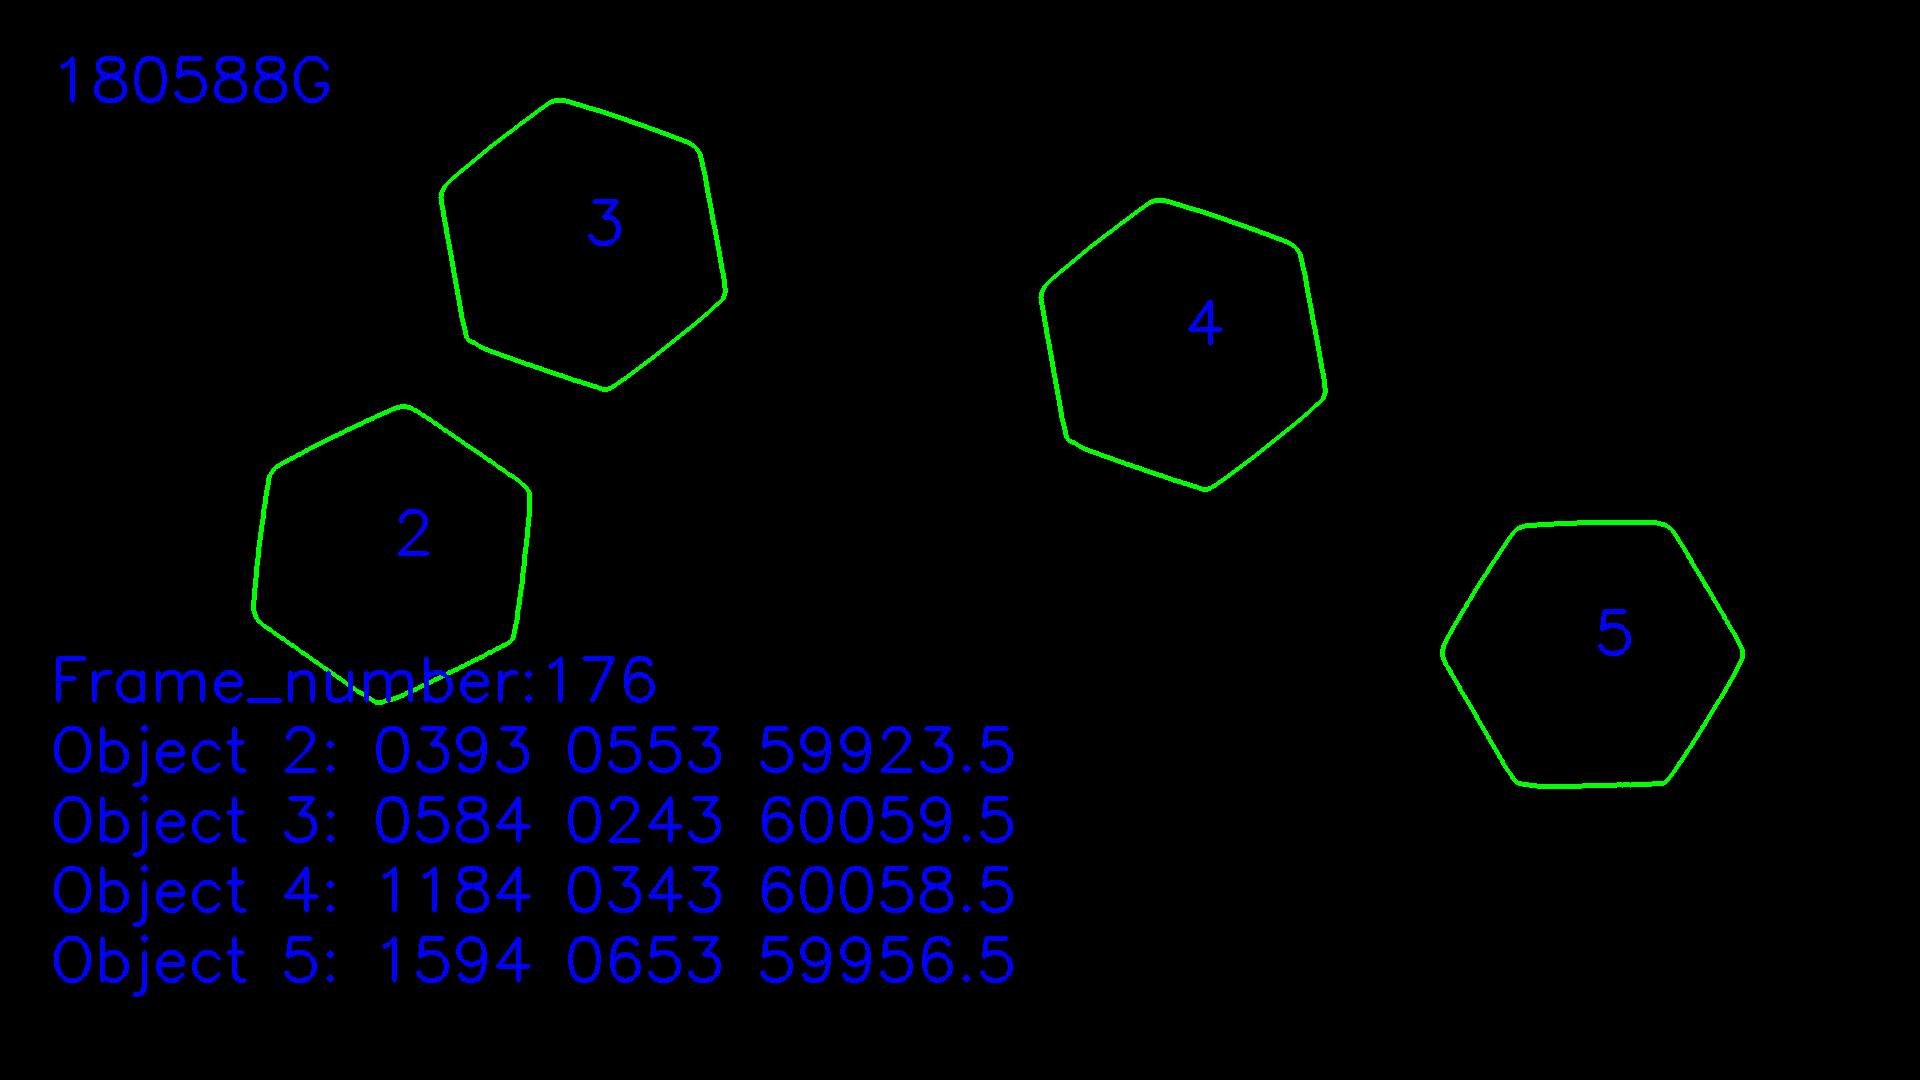

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.83000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([5.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.17400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.58400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([3.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.18400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.59400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


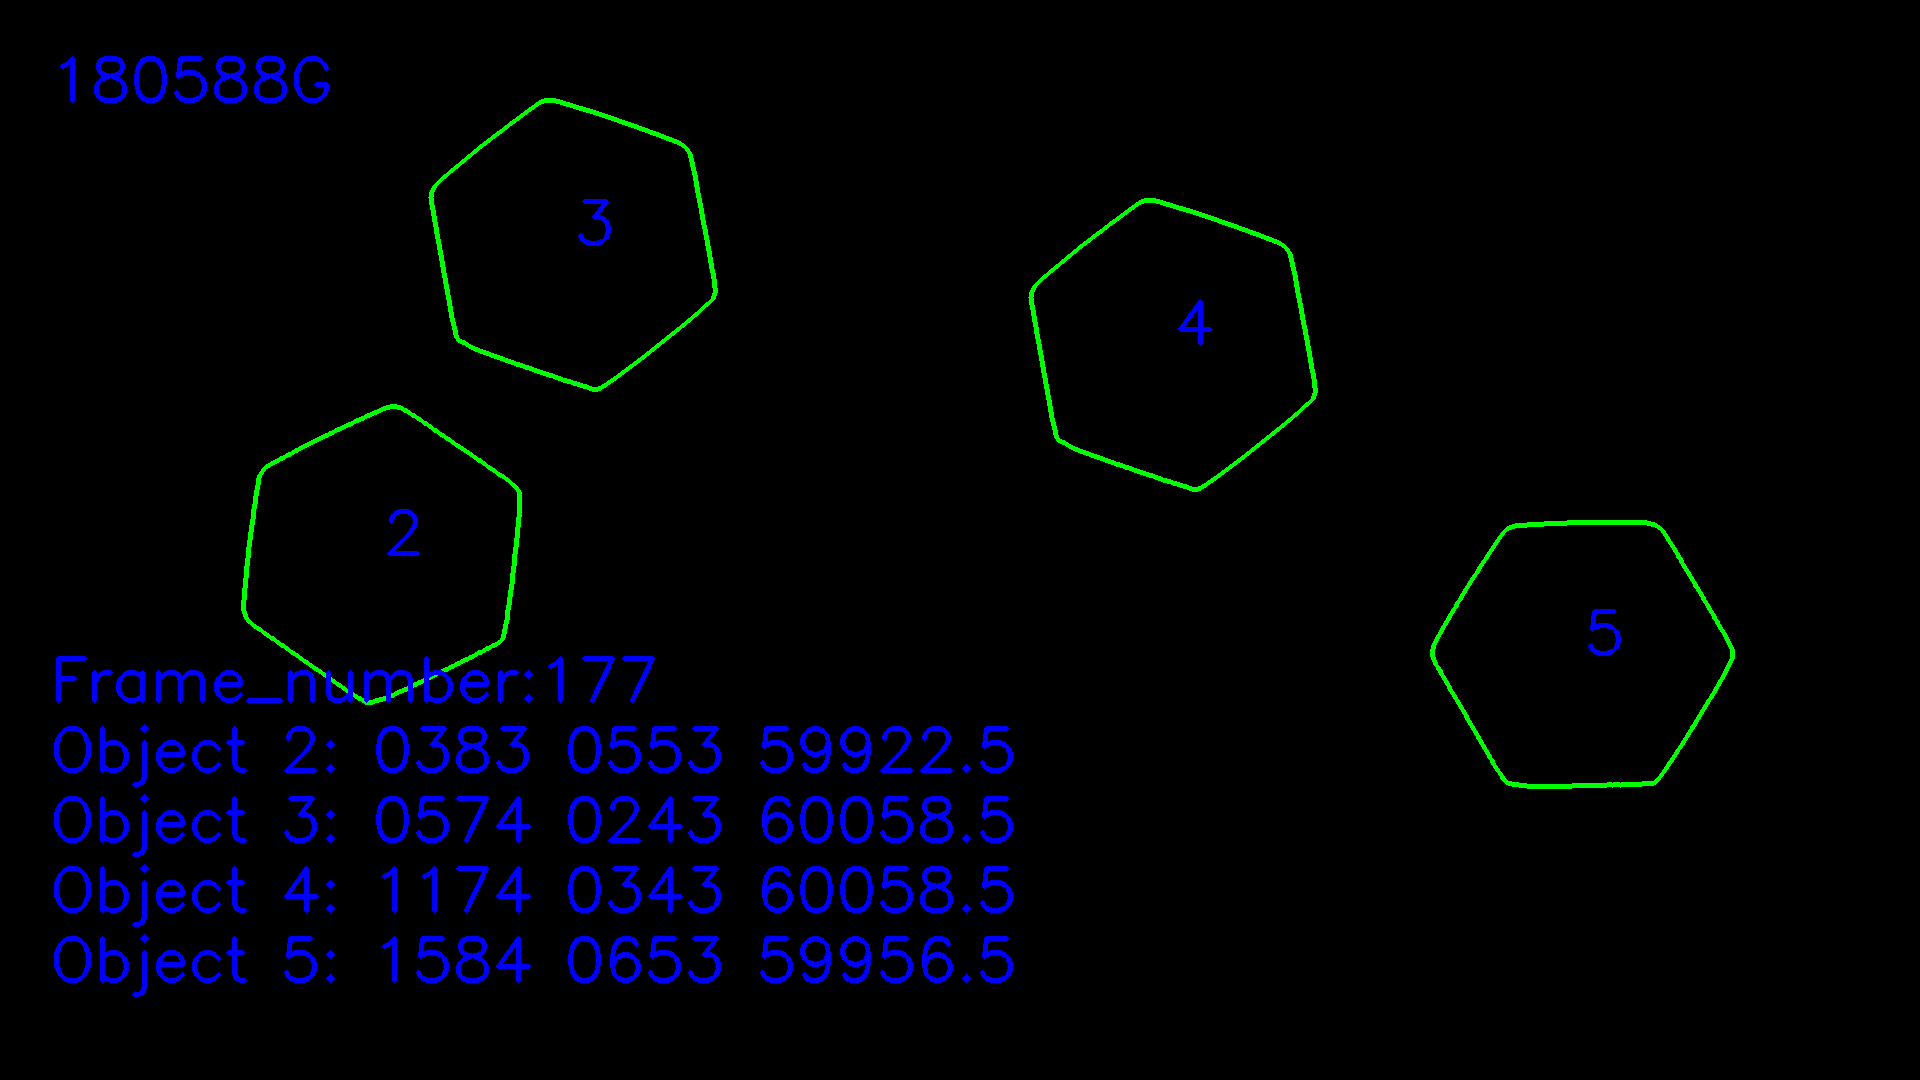

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([5.64000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.16400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.57400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([3.83000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([5.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.17400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.58400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


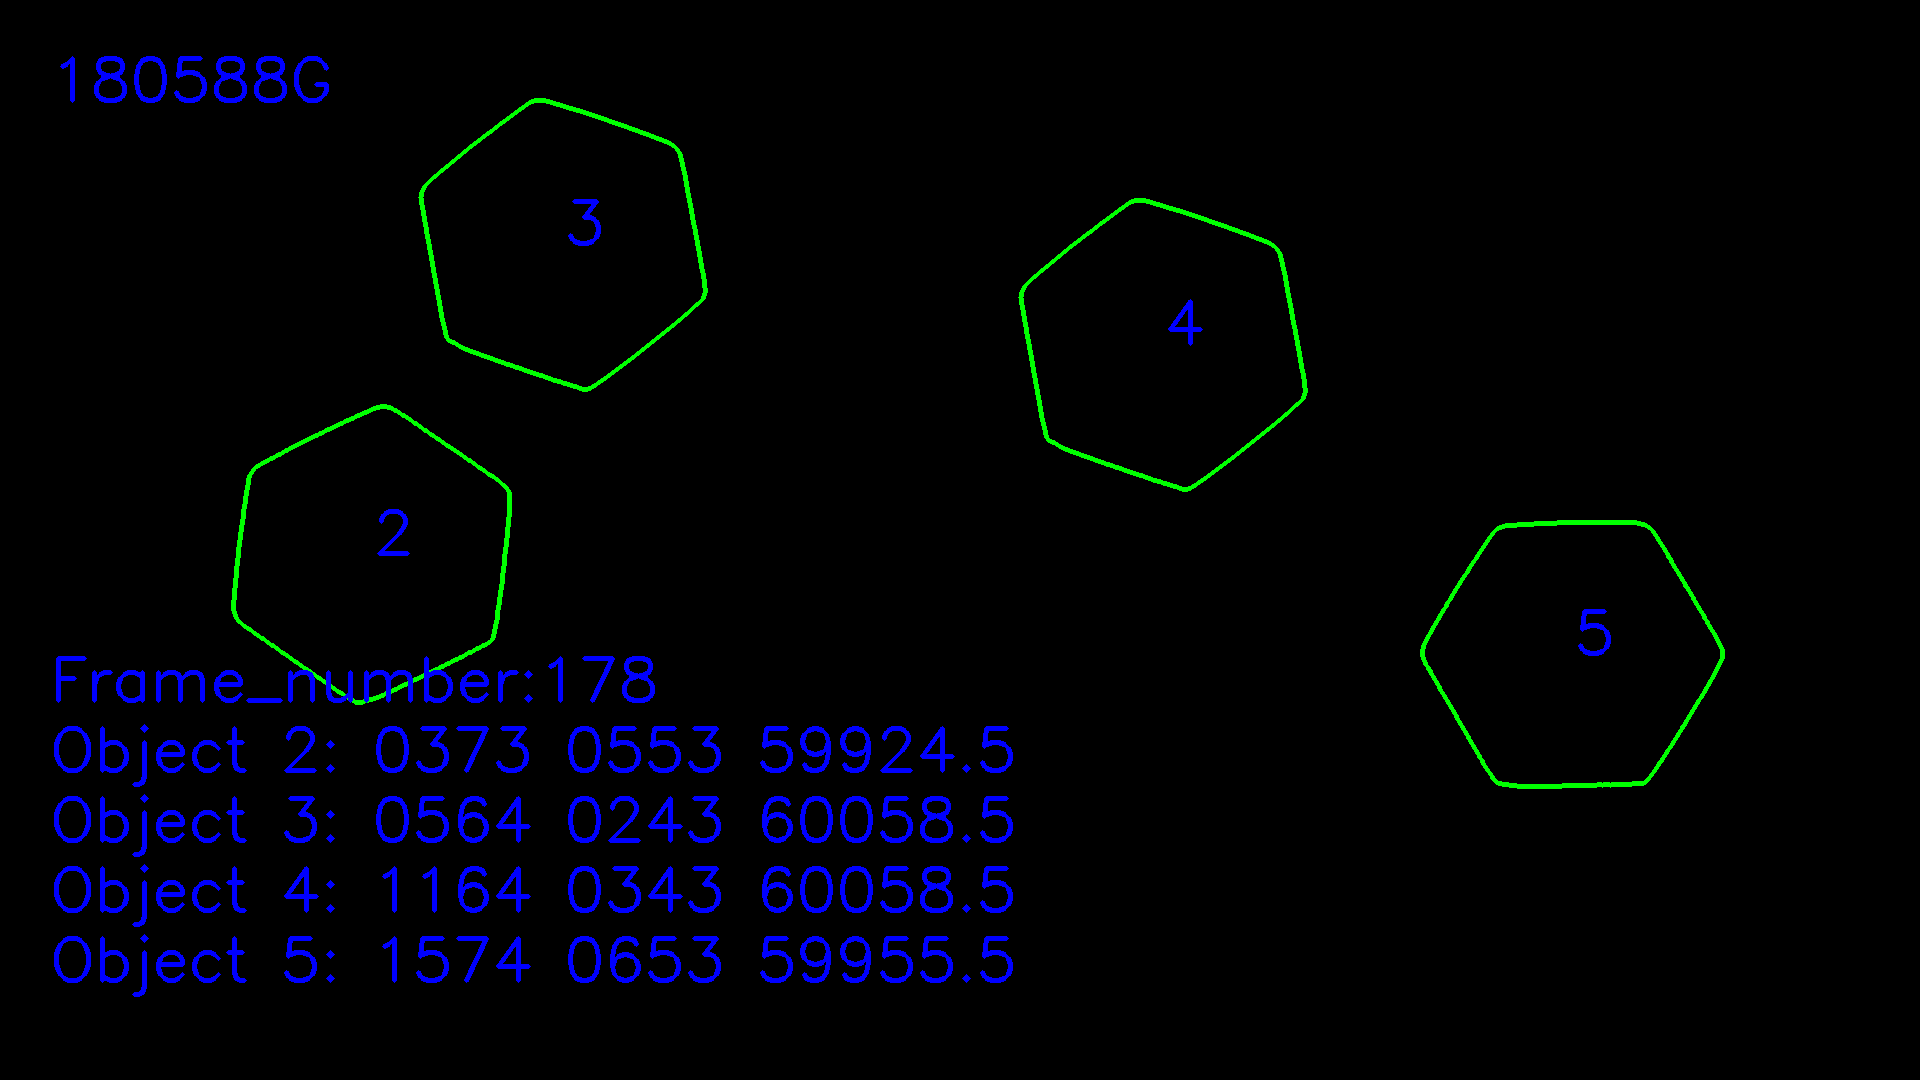

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.54000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.15400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.56400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([3.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([5.64000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.16400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.57400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


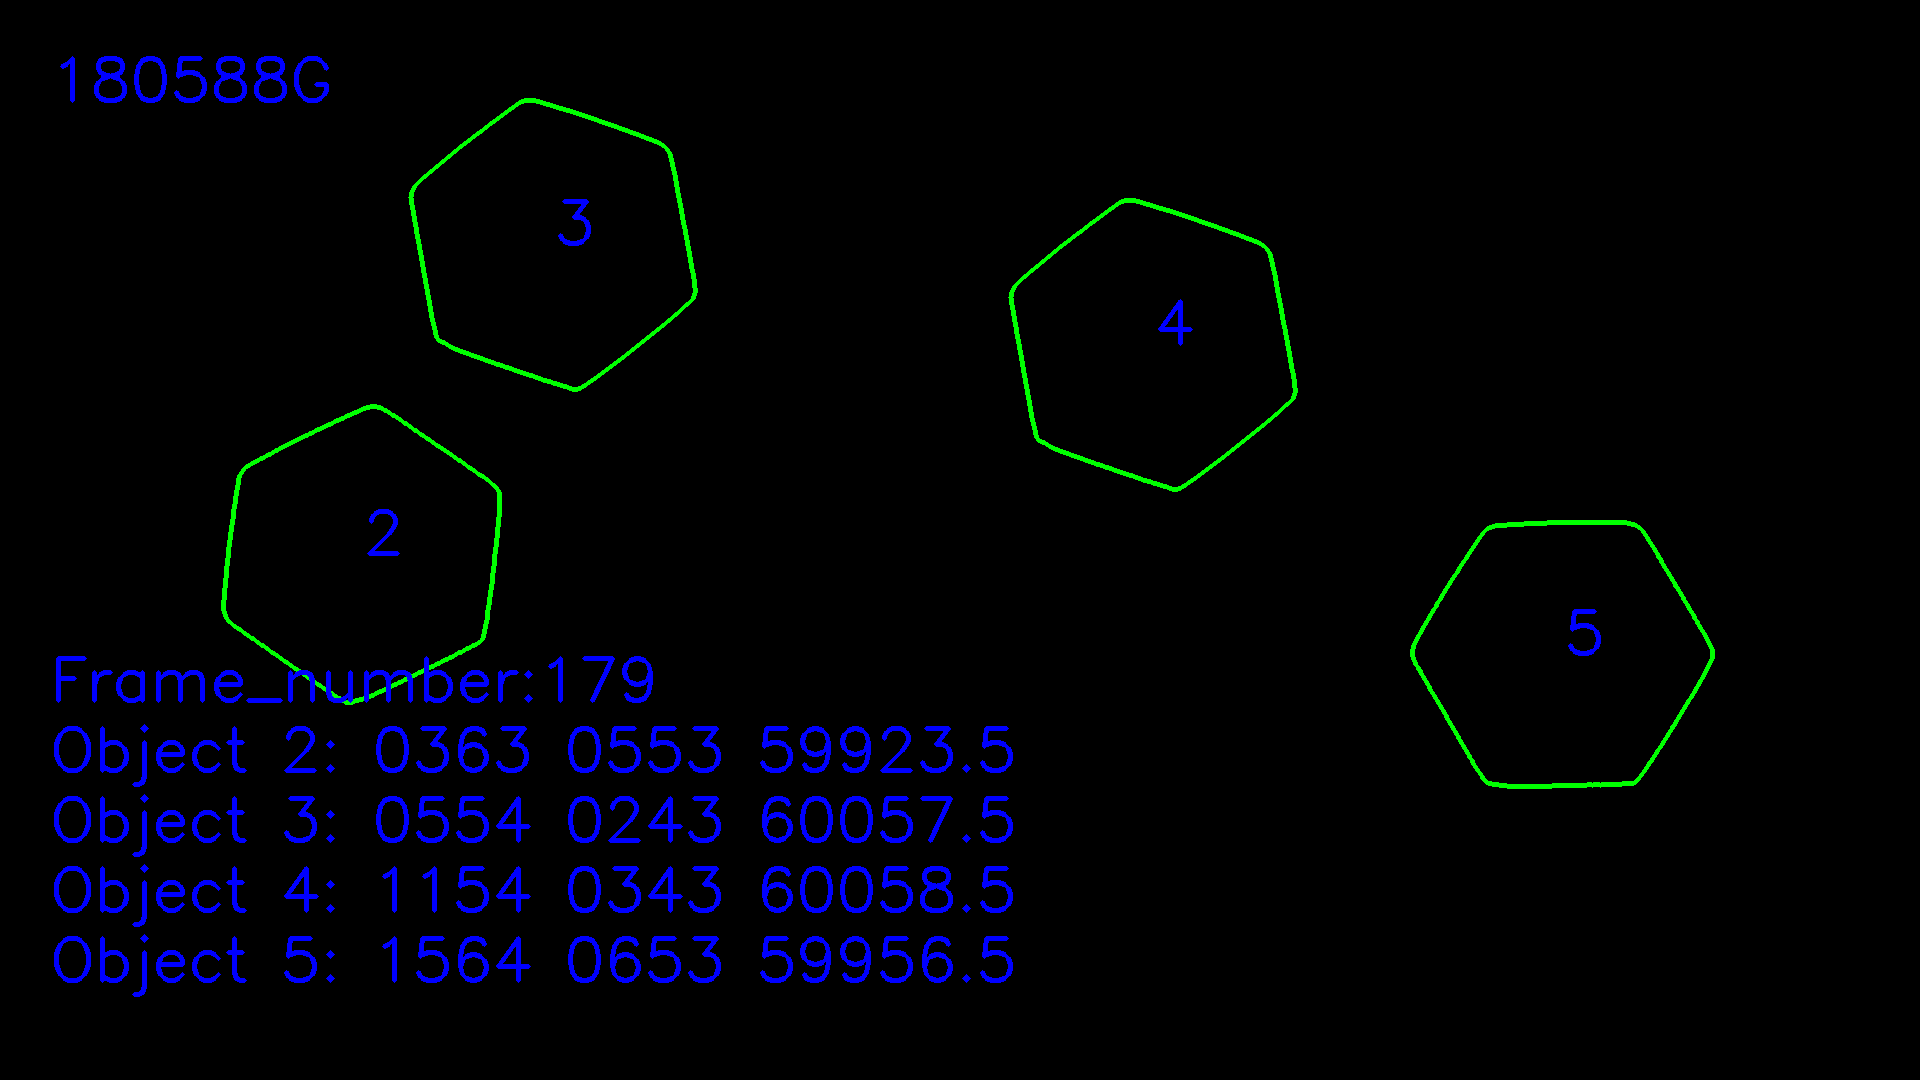

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([5.44000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.14400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.55400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([3.63000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.54000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.15400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.56400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


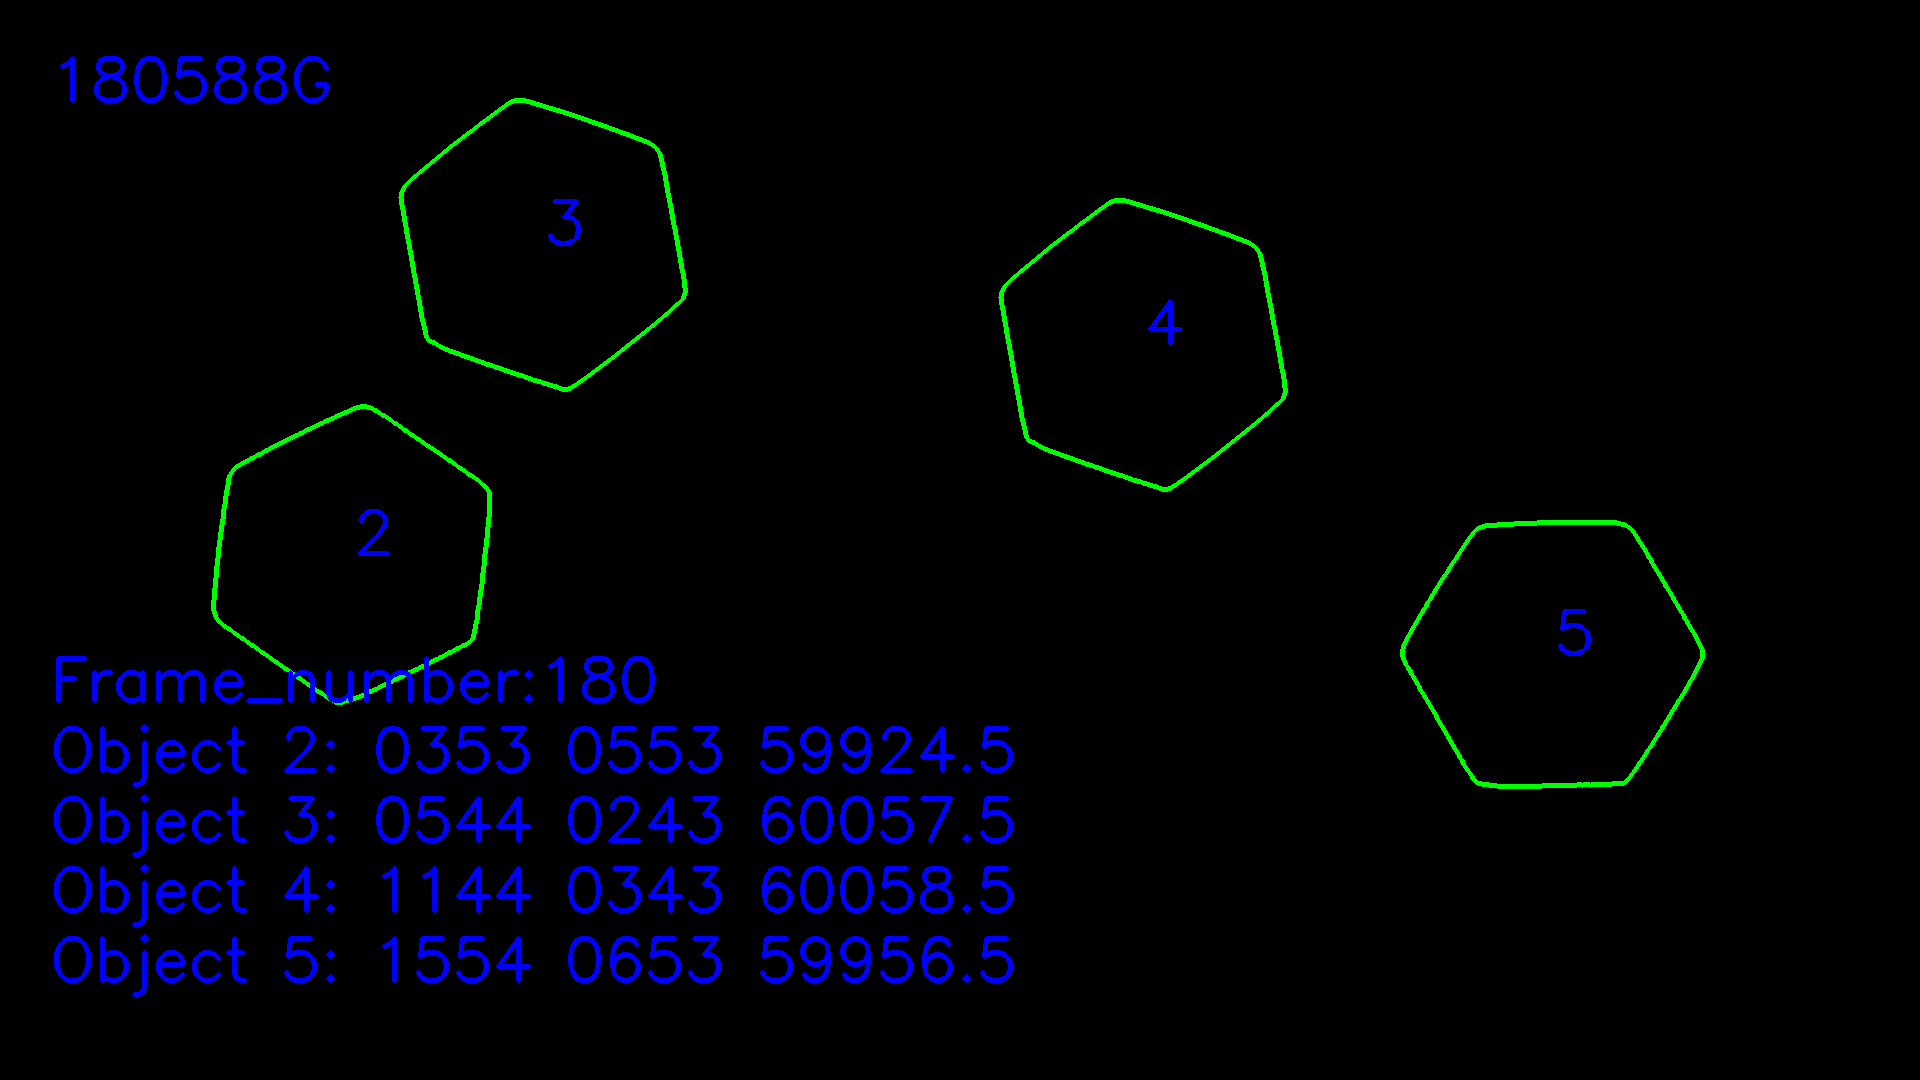

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.43000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([5.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.13400e+03, 3.43000e+02, 6.00555e+04, 4.00000e+00]), array([1.5440e+03, 6.5300e+02, 5.9957e+04, 5.0000e+00])]
Previousframe [array([3.53000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([5.44000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.14400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.55400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


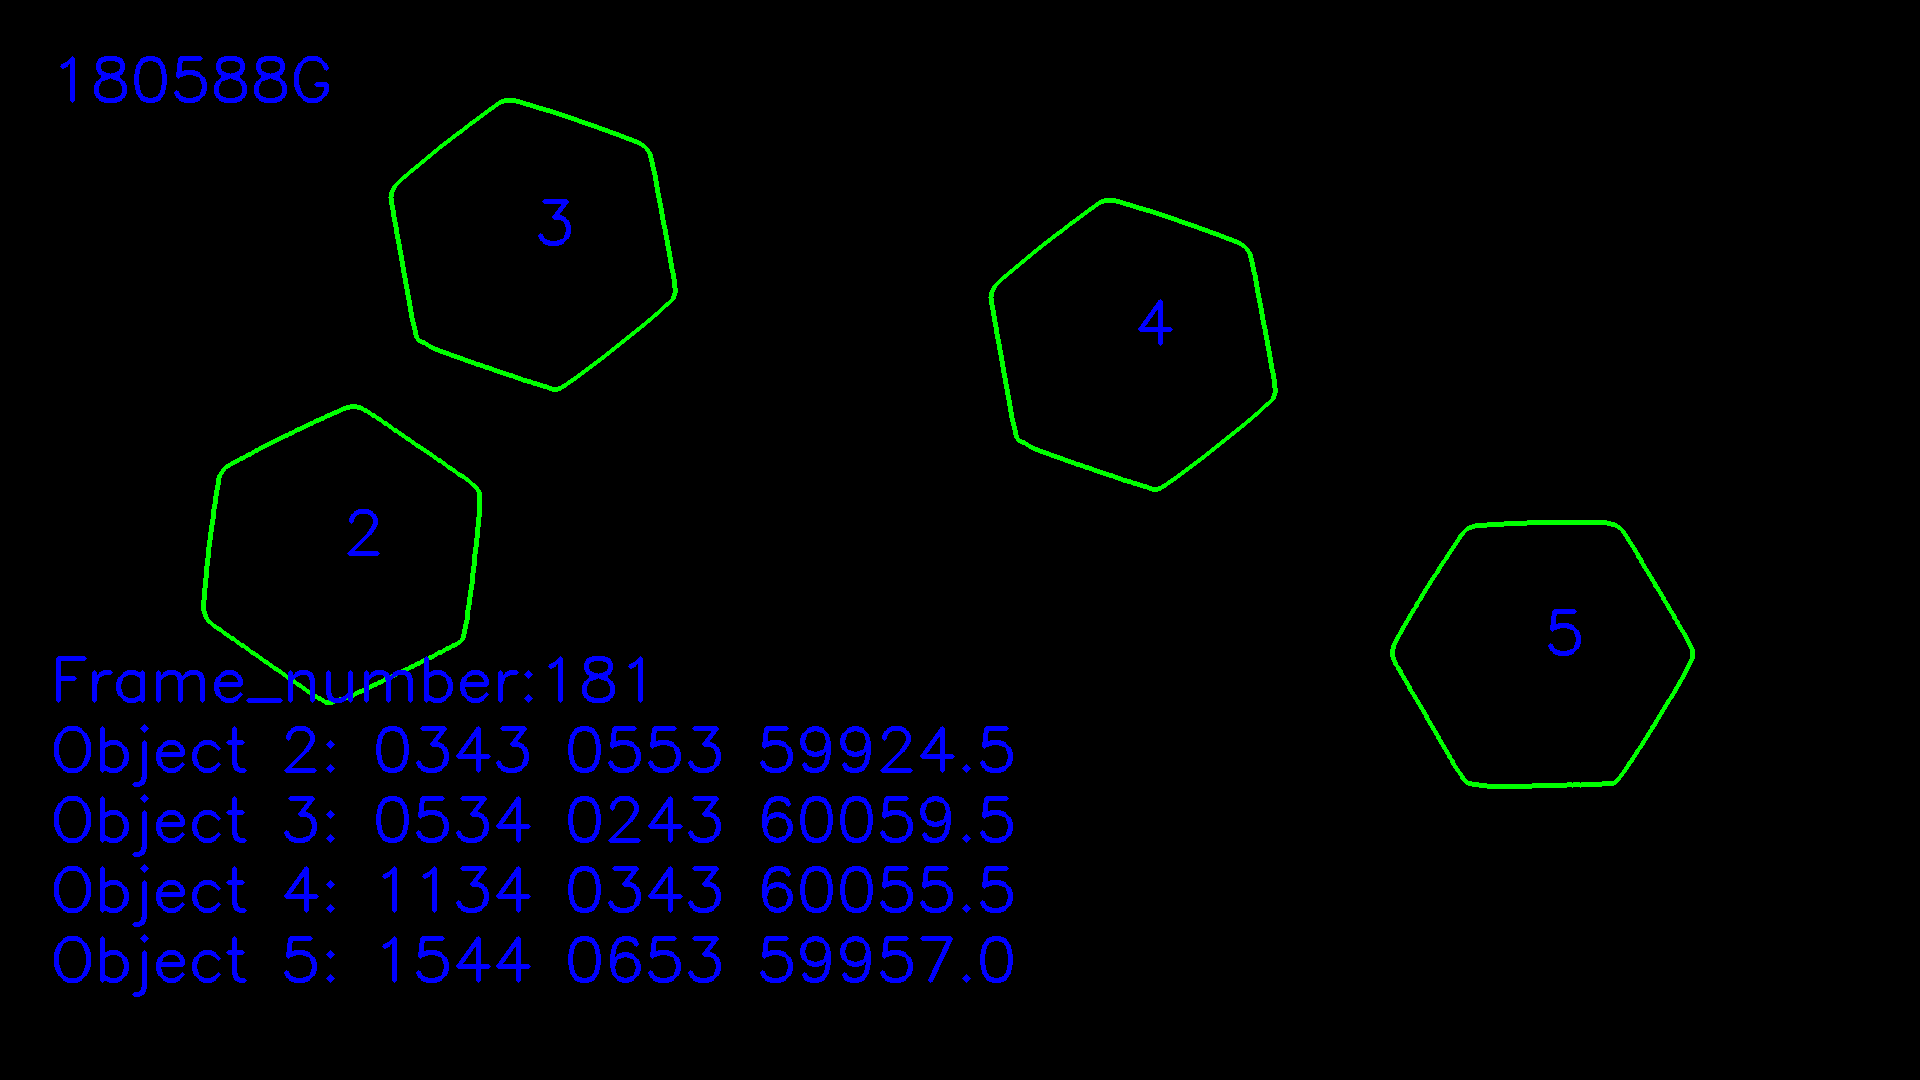

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.33000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.24000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.12400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.53400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([3.43000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([5.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.13400e+03, 3.43000e+02, 6.00555e+04, 4.00000e+00]), array([1.5440e+03, 6.5300e+02, 5.9957e+04, 5.0000e+00])]


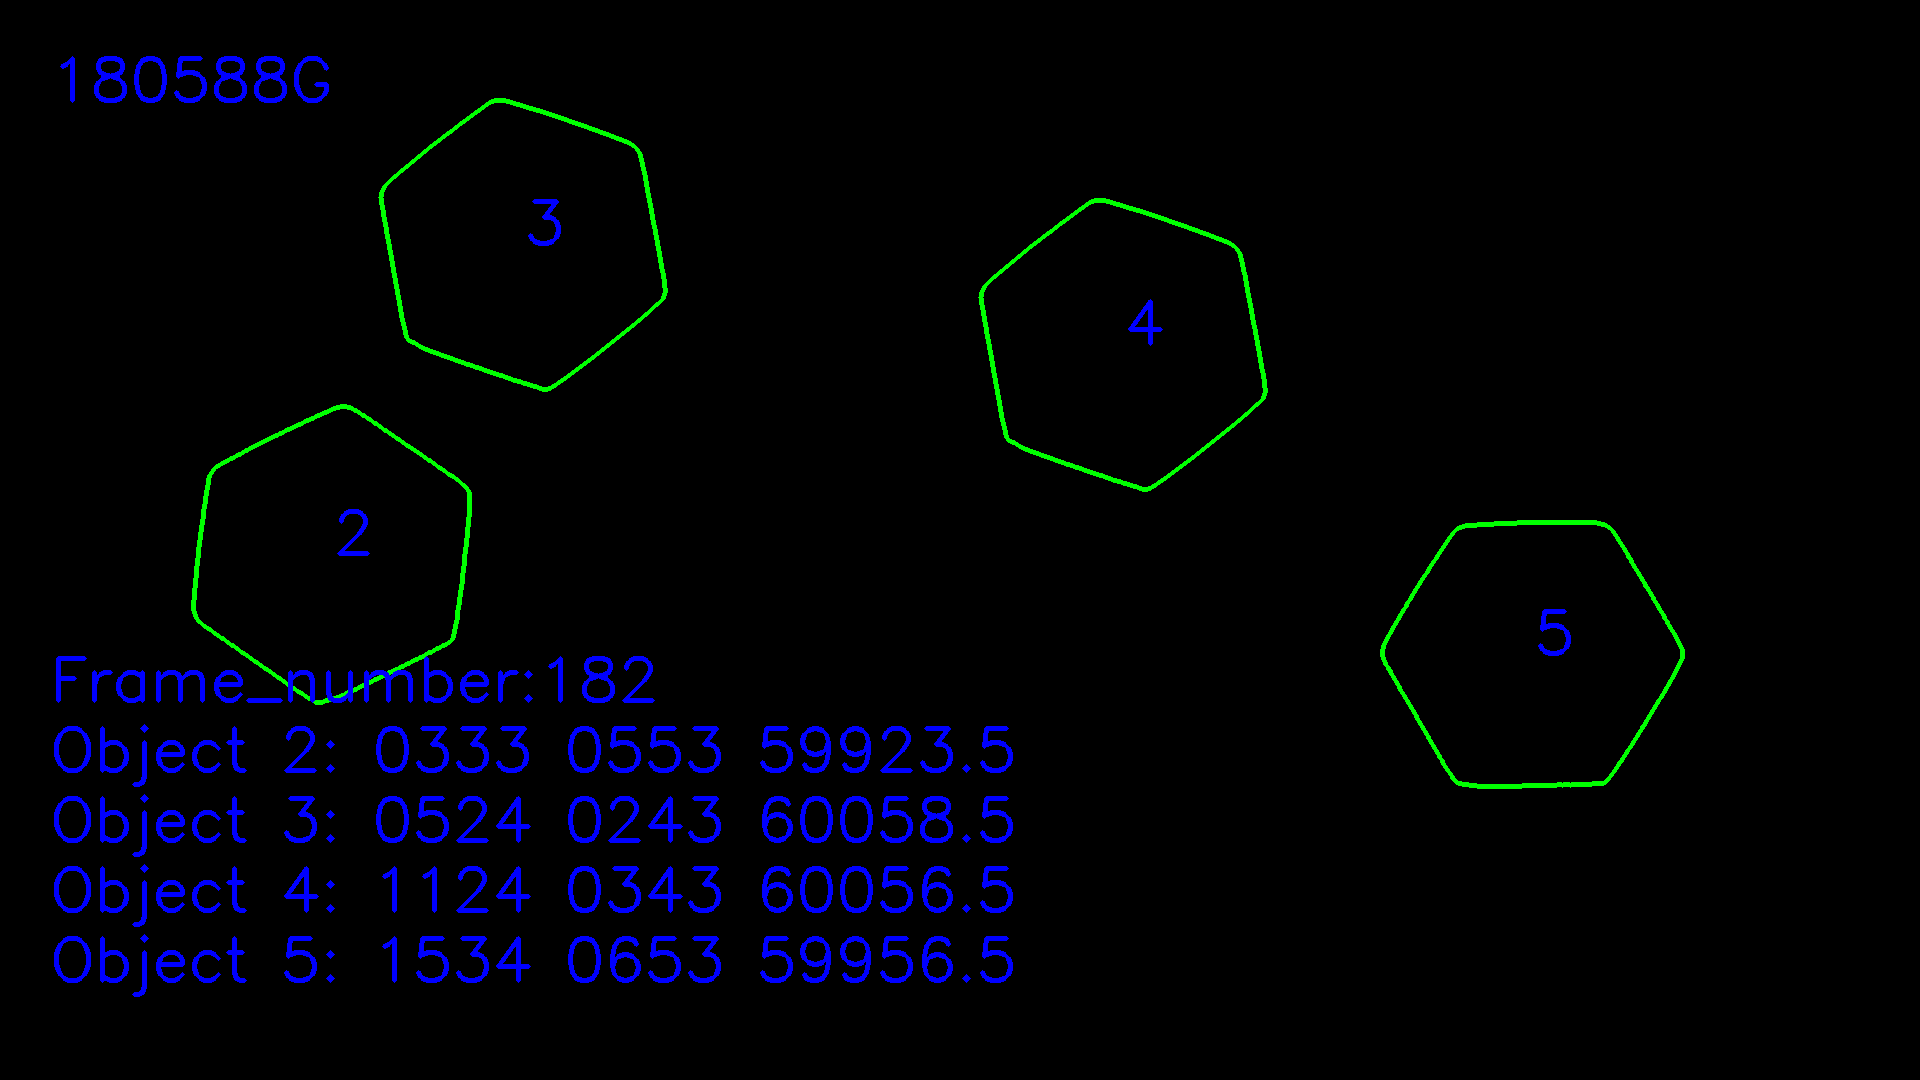

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.11400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.52400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([3.33000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.24000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.12400e+03, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.53400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


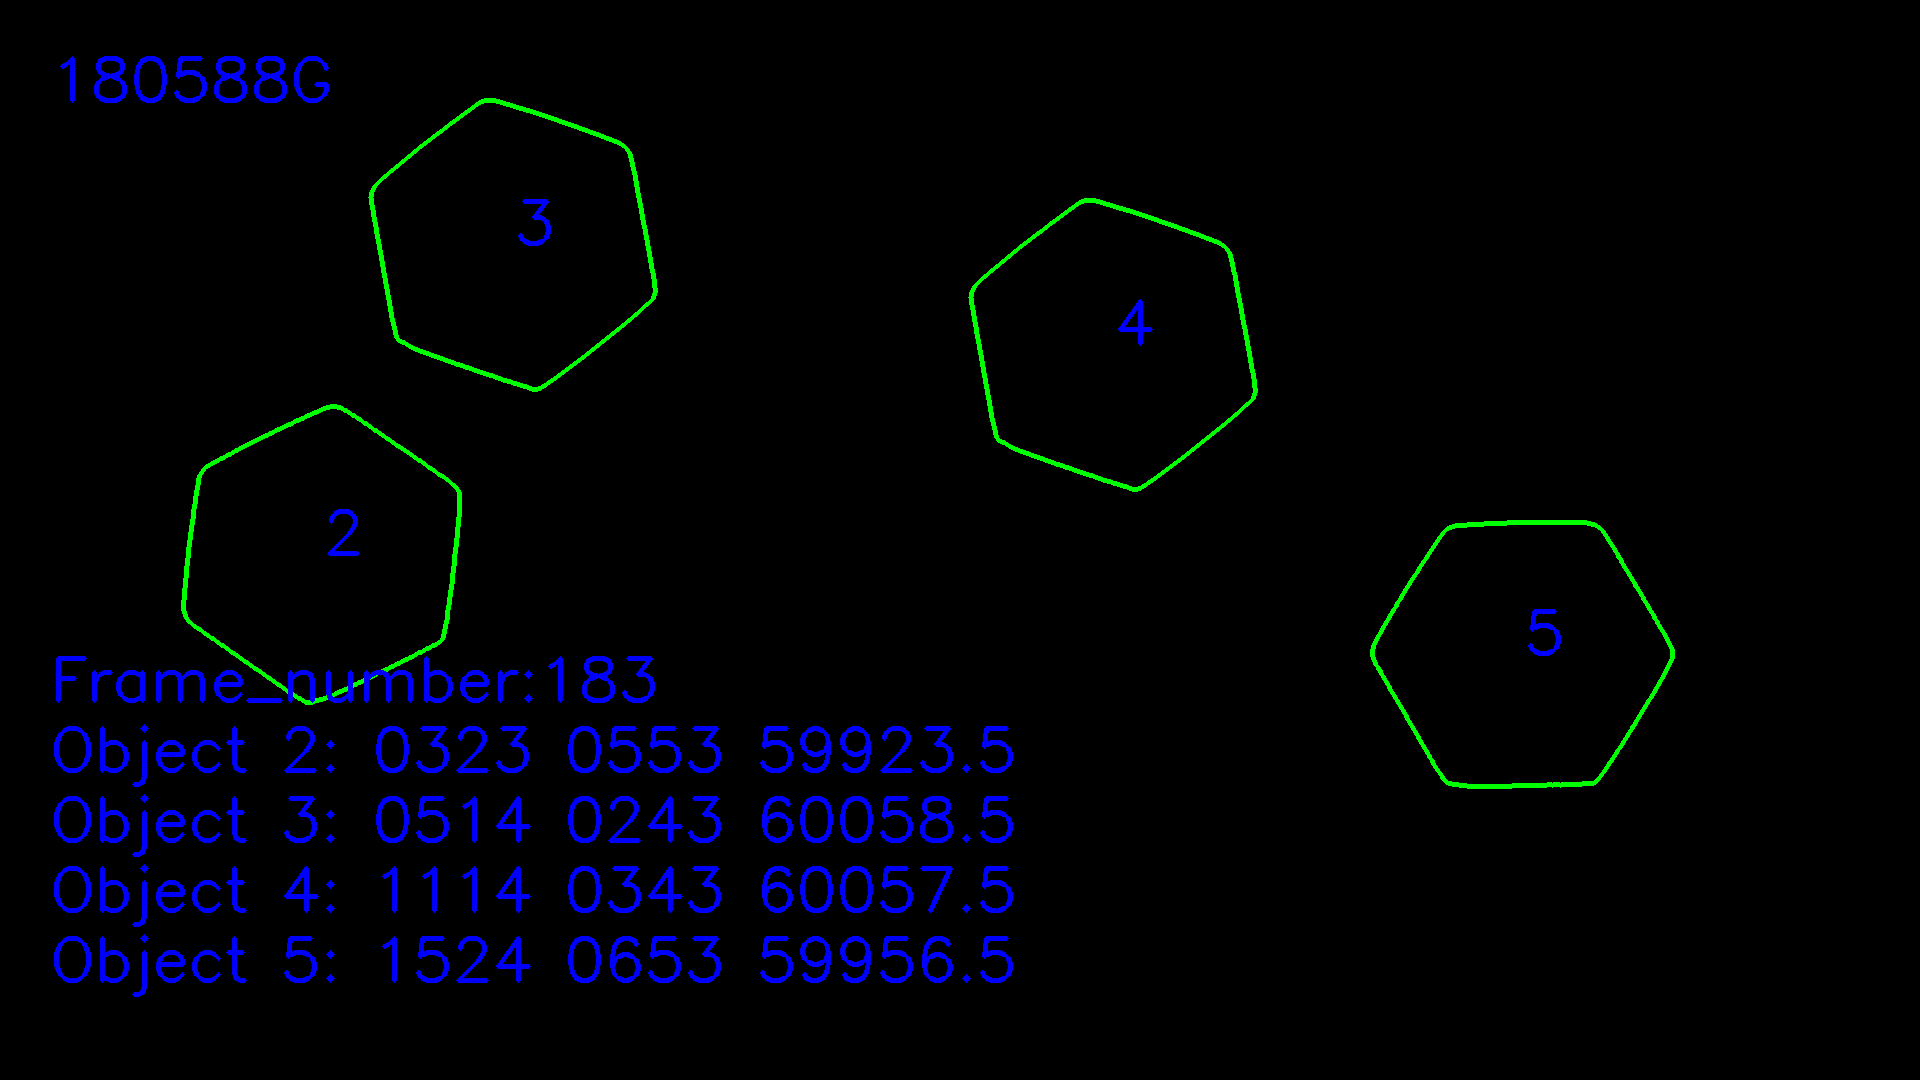

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.10400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.51400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]
Previousframe [array([3.23000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.14000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.11400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.52400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


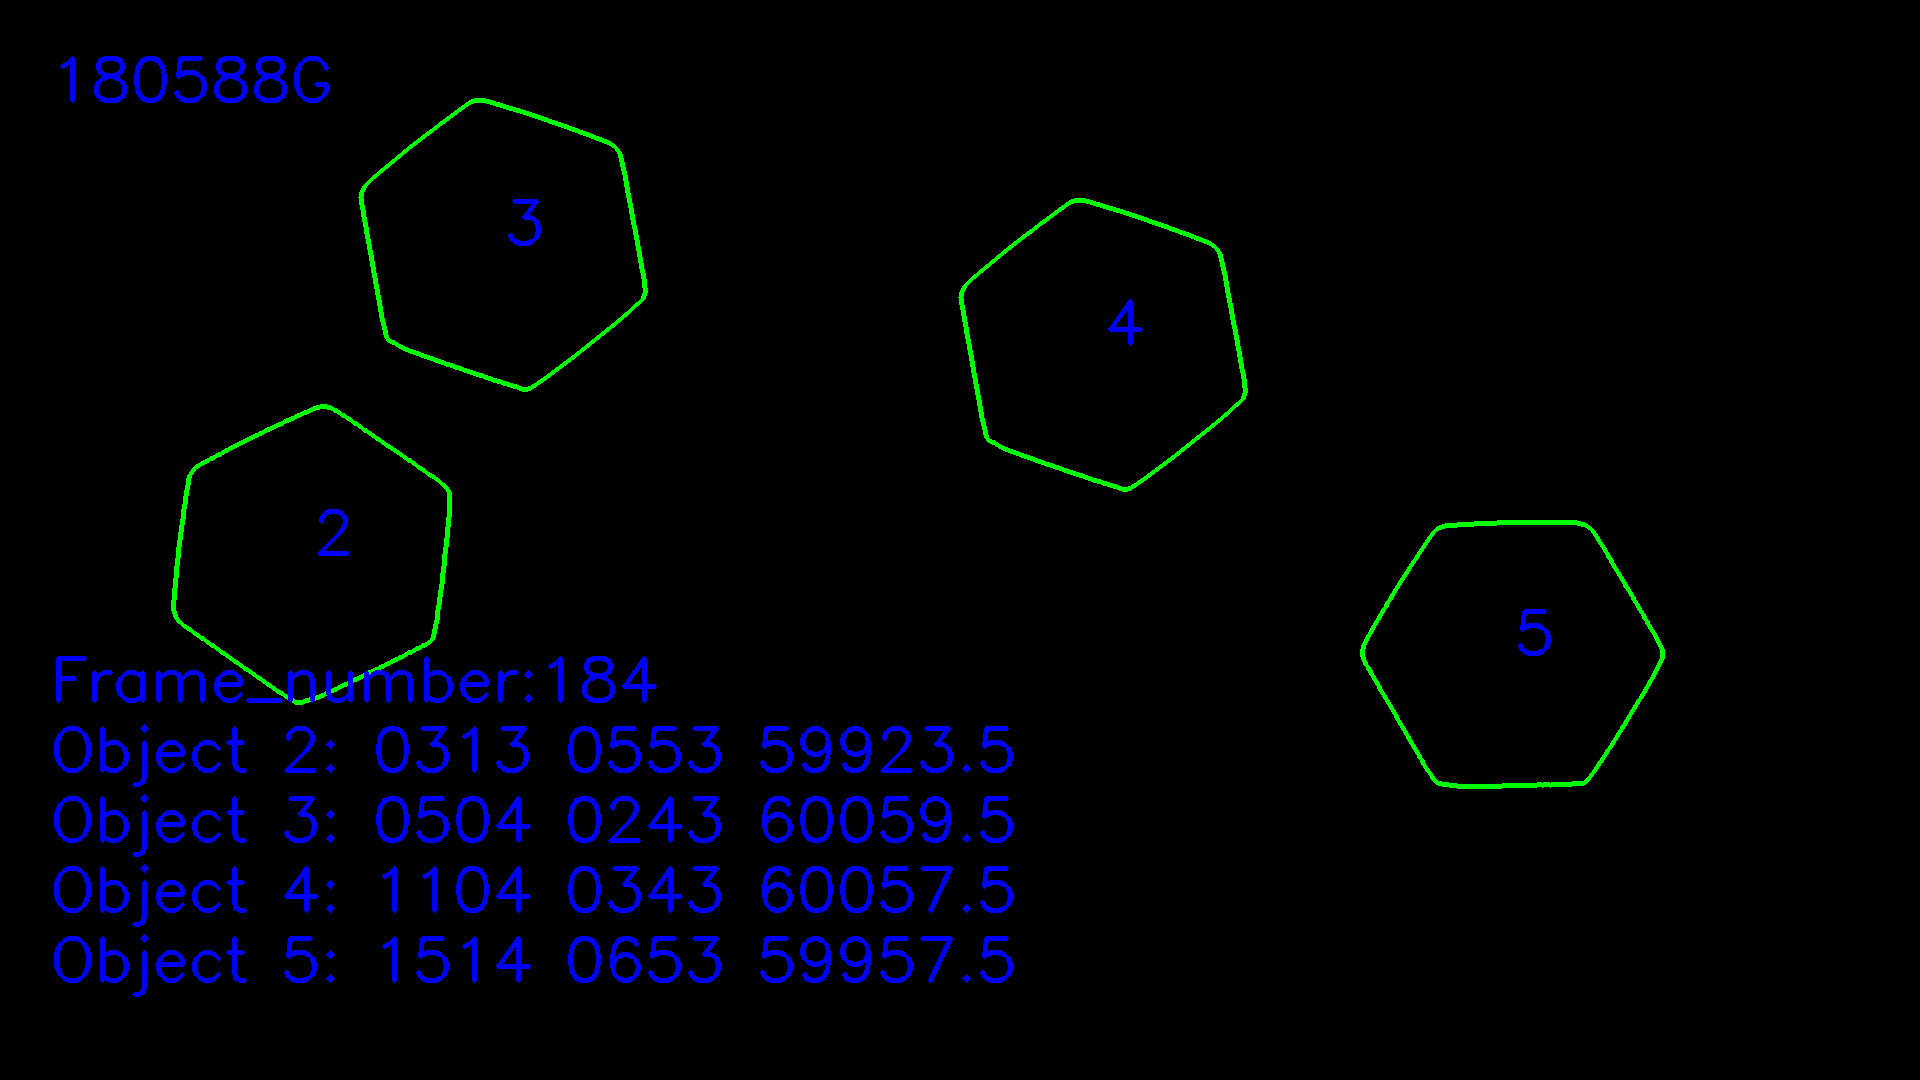

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.09400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.5040e+03, 6.5300e+02, 5.9957e+04, 5.0000e+00])]
Previousframe [array([3.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([5.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.10400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.51400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]


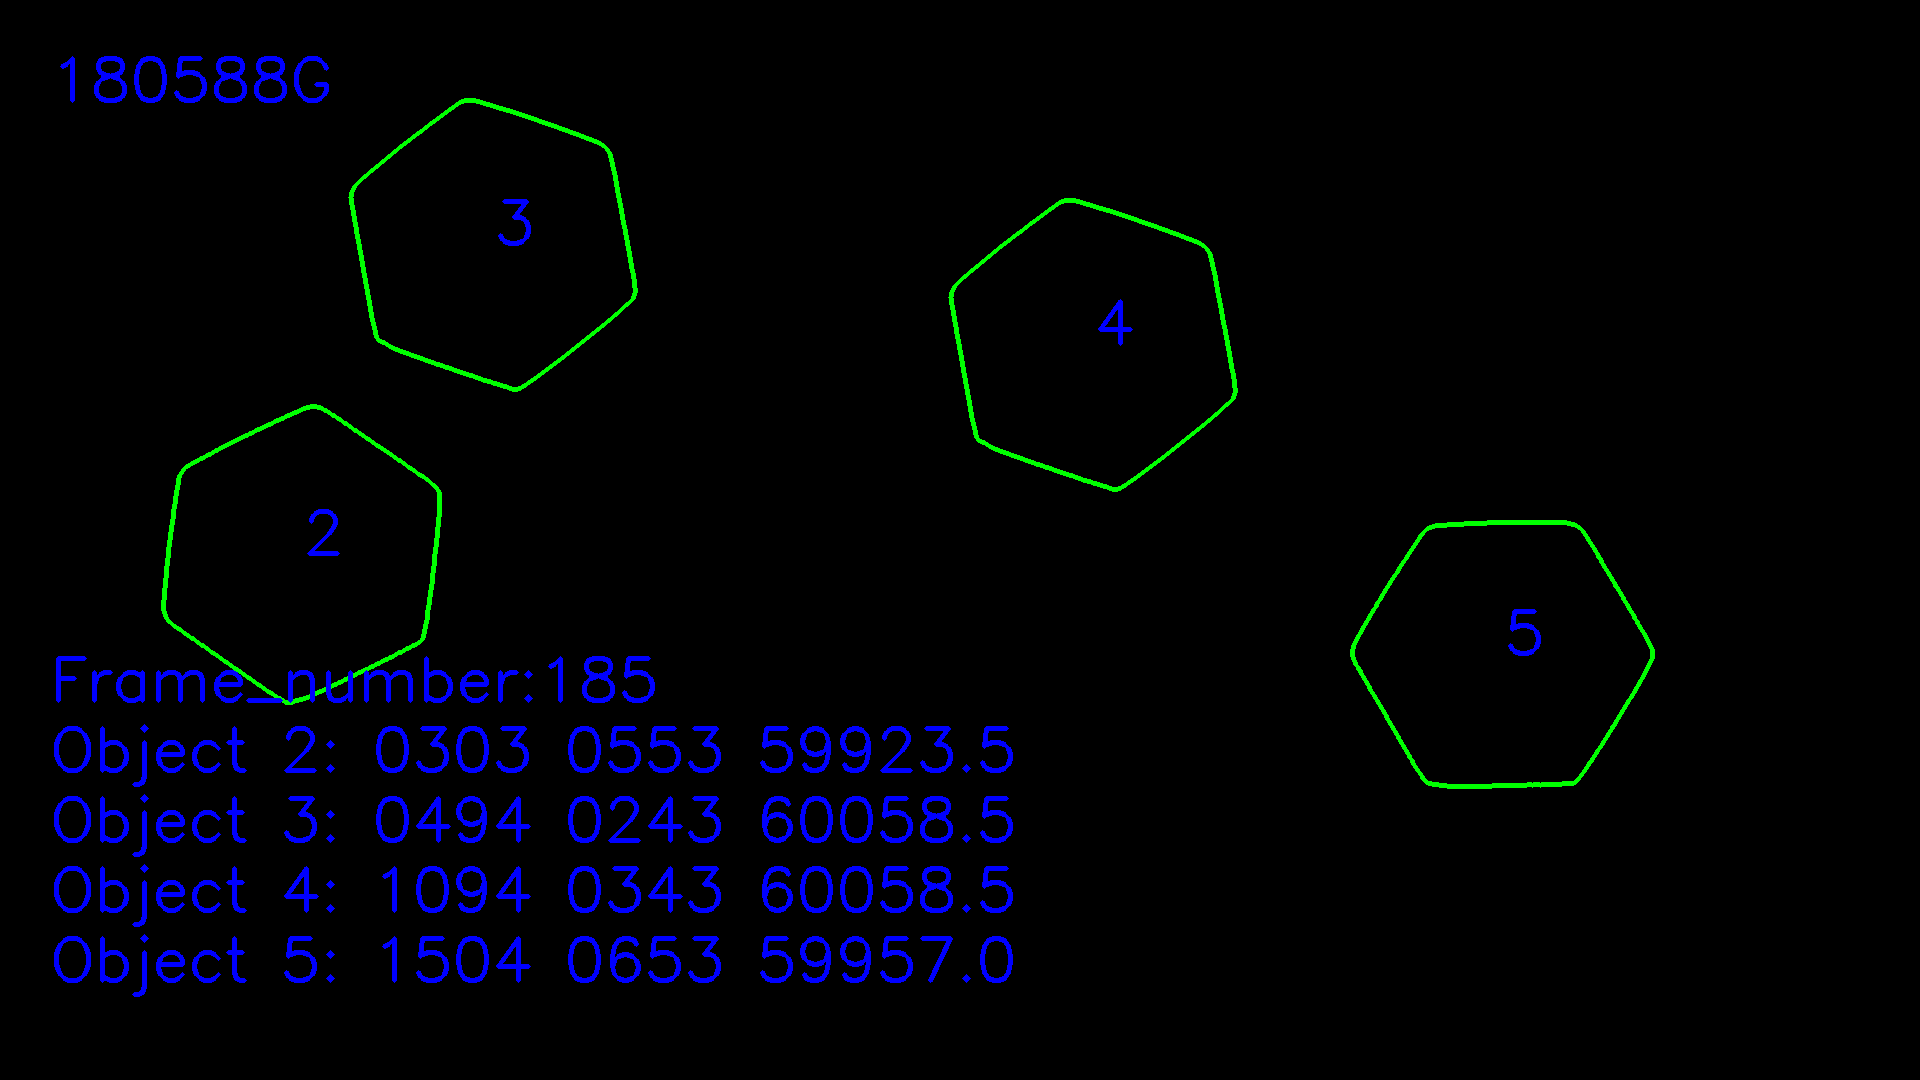

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.93000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([4.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.08400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.49400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([3.03000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.94000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.09400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.5040e+03, 6.5300e+02, 5.9957e+04, 5.0000e+00])]


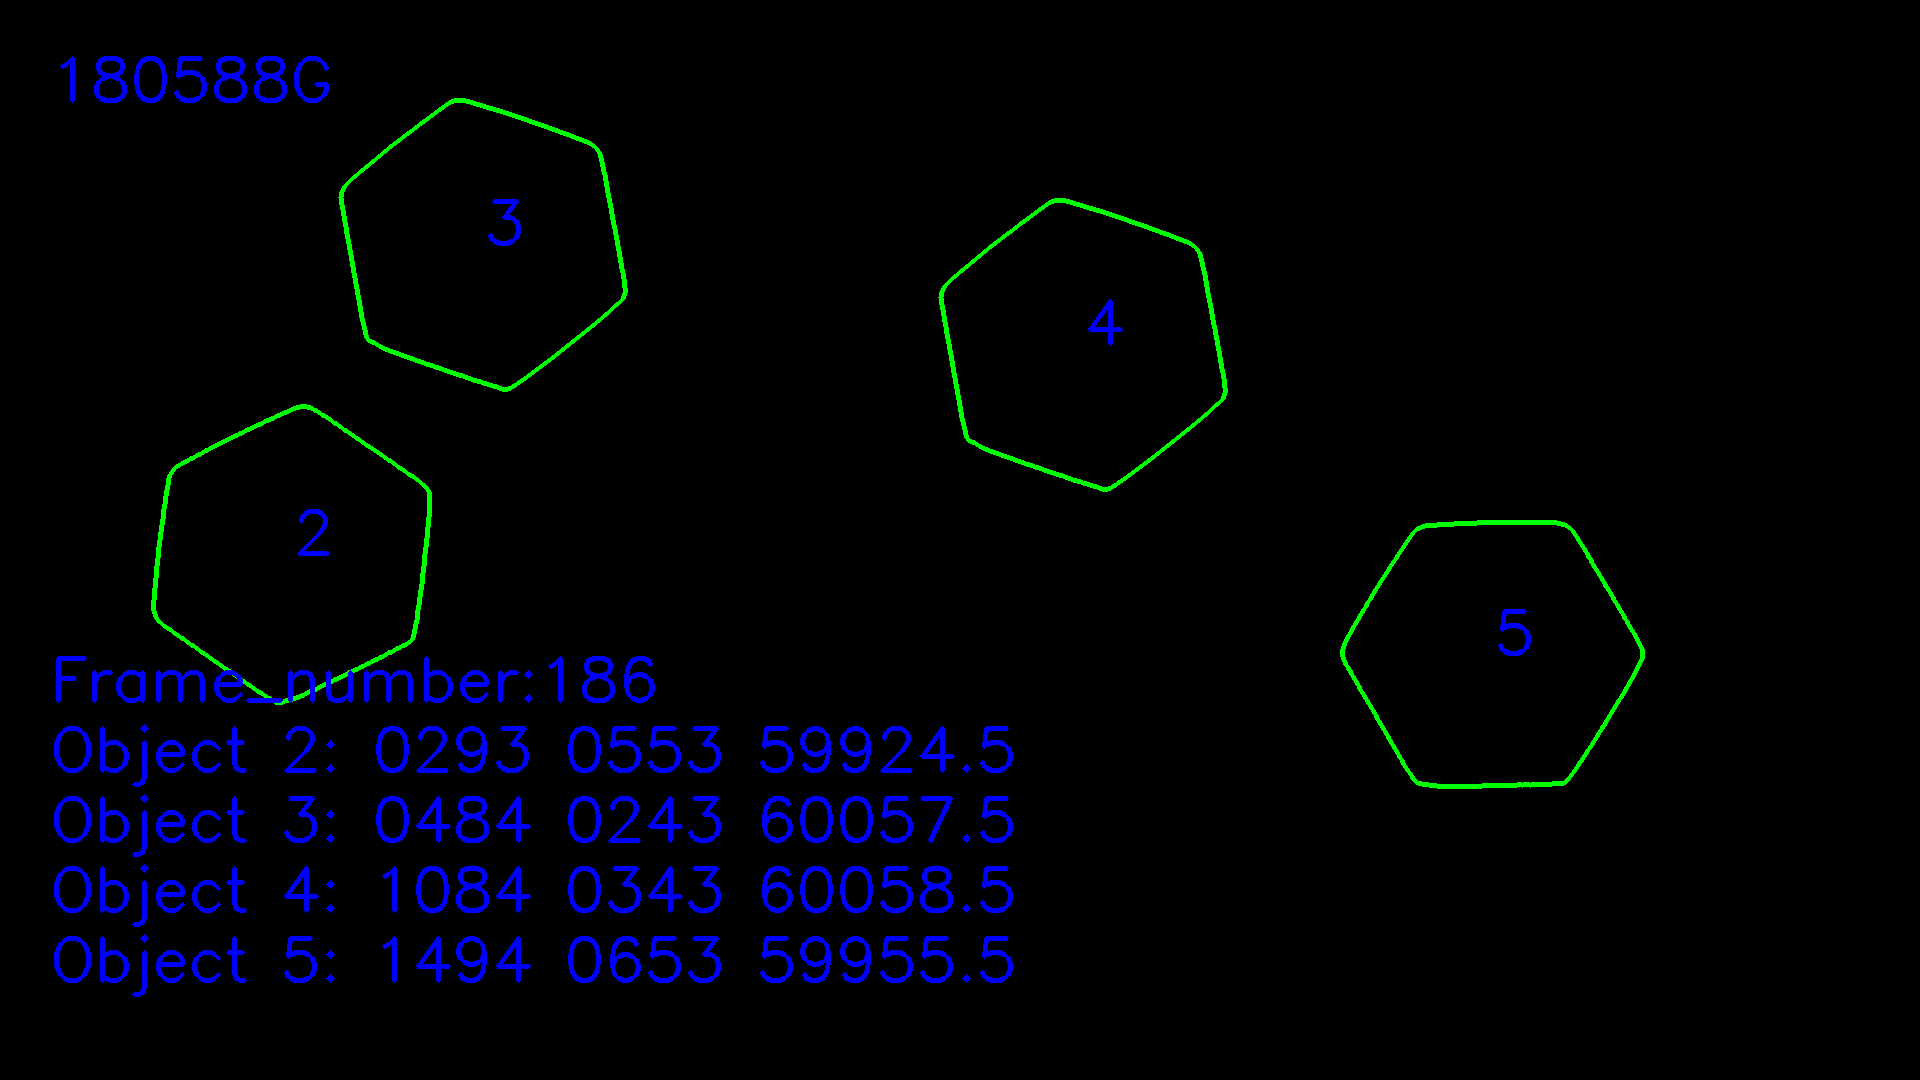

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.74000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.07400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.48400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([2.93000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([4.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.08400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.49400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


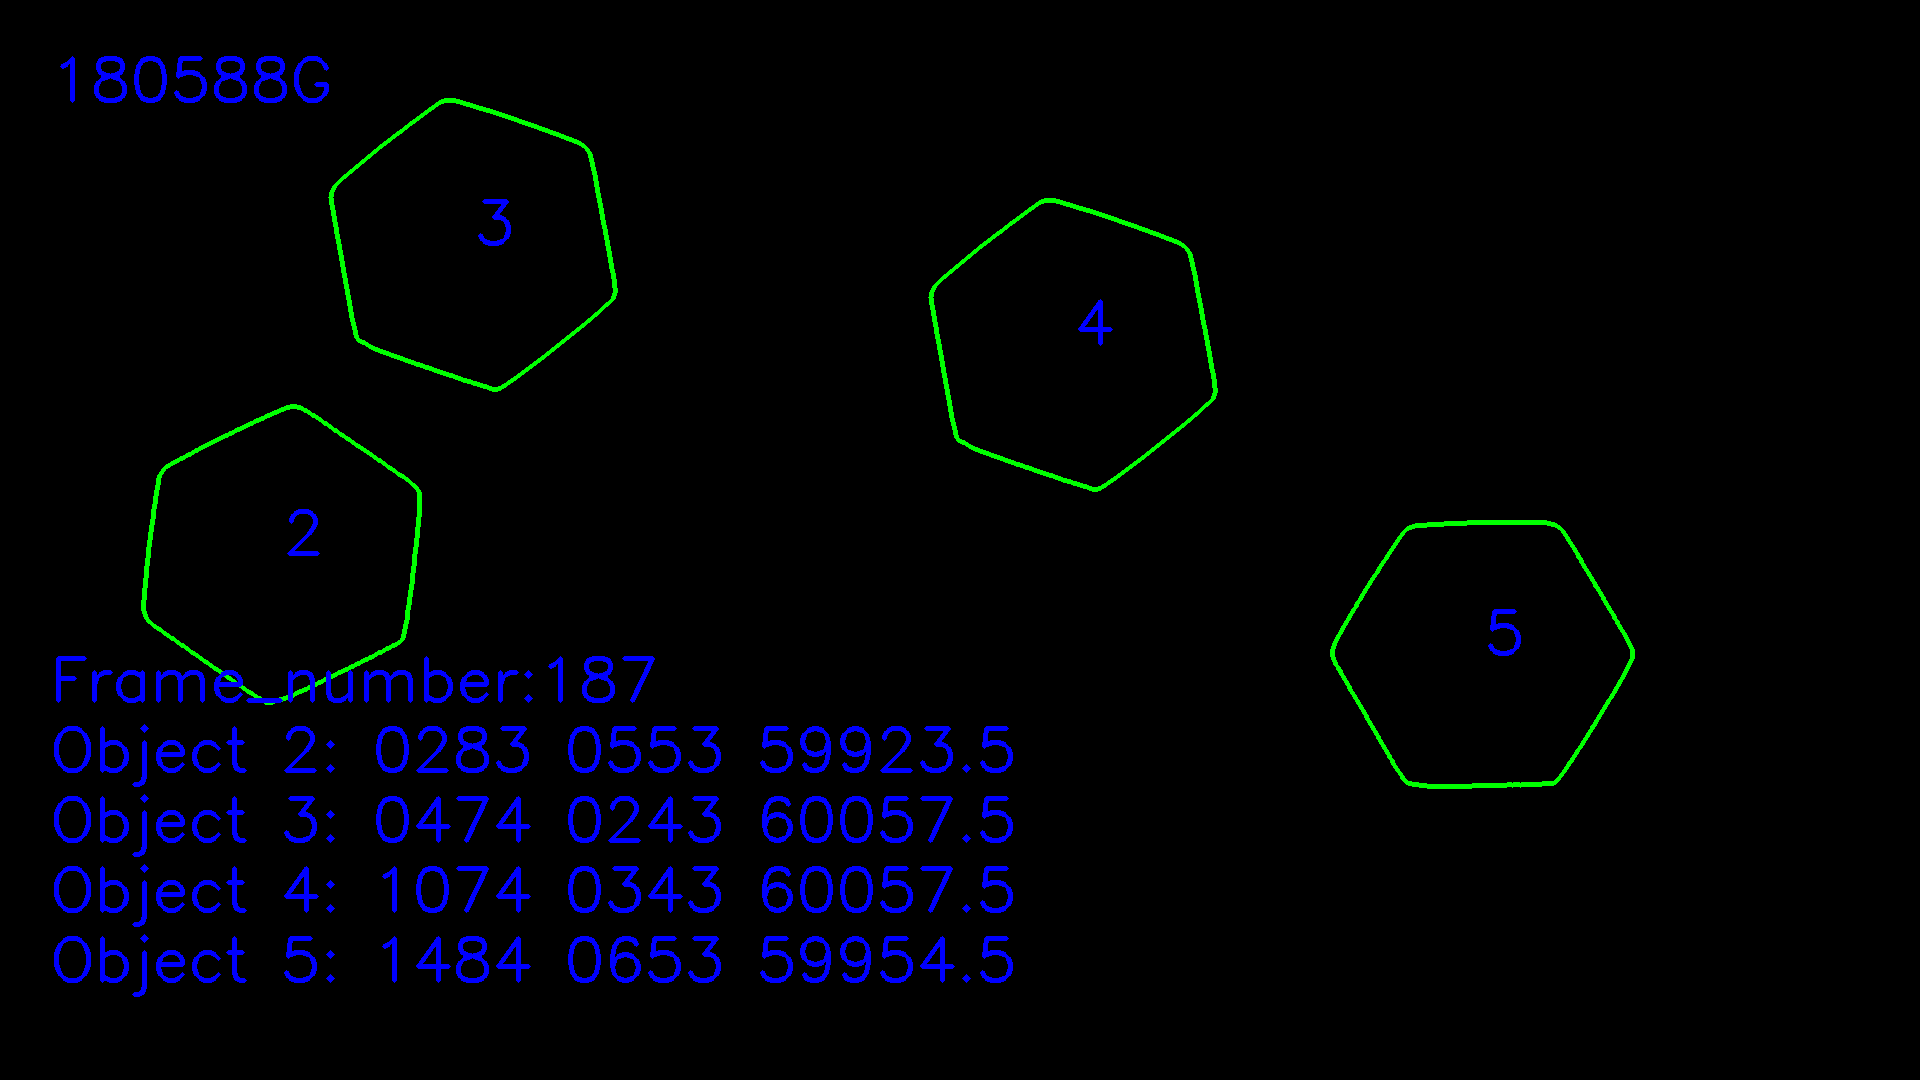

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.73000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([4.64000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.06400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.47400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([2.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.74000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.07400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.48400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


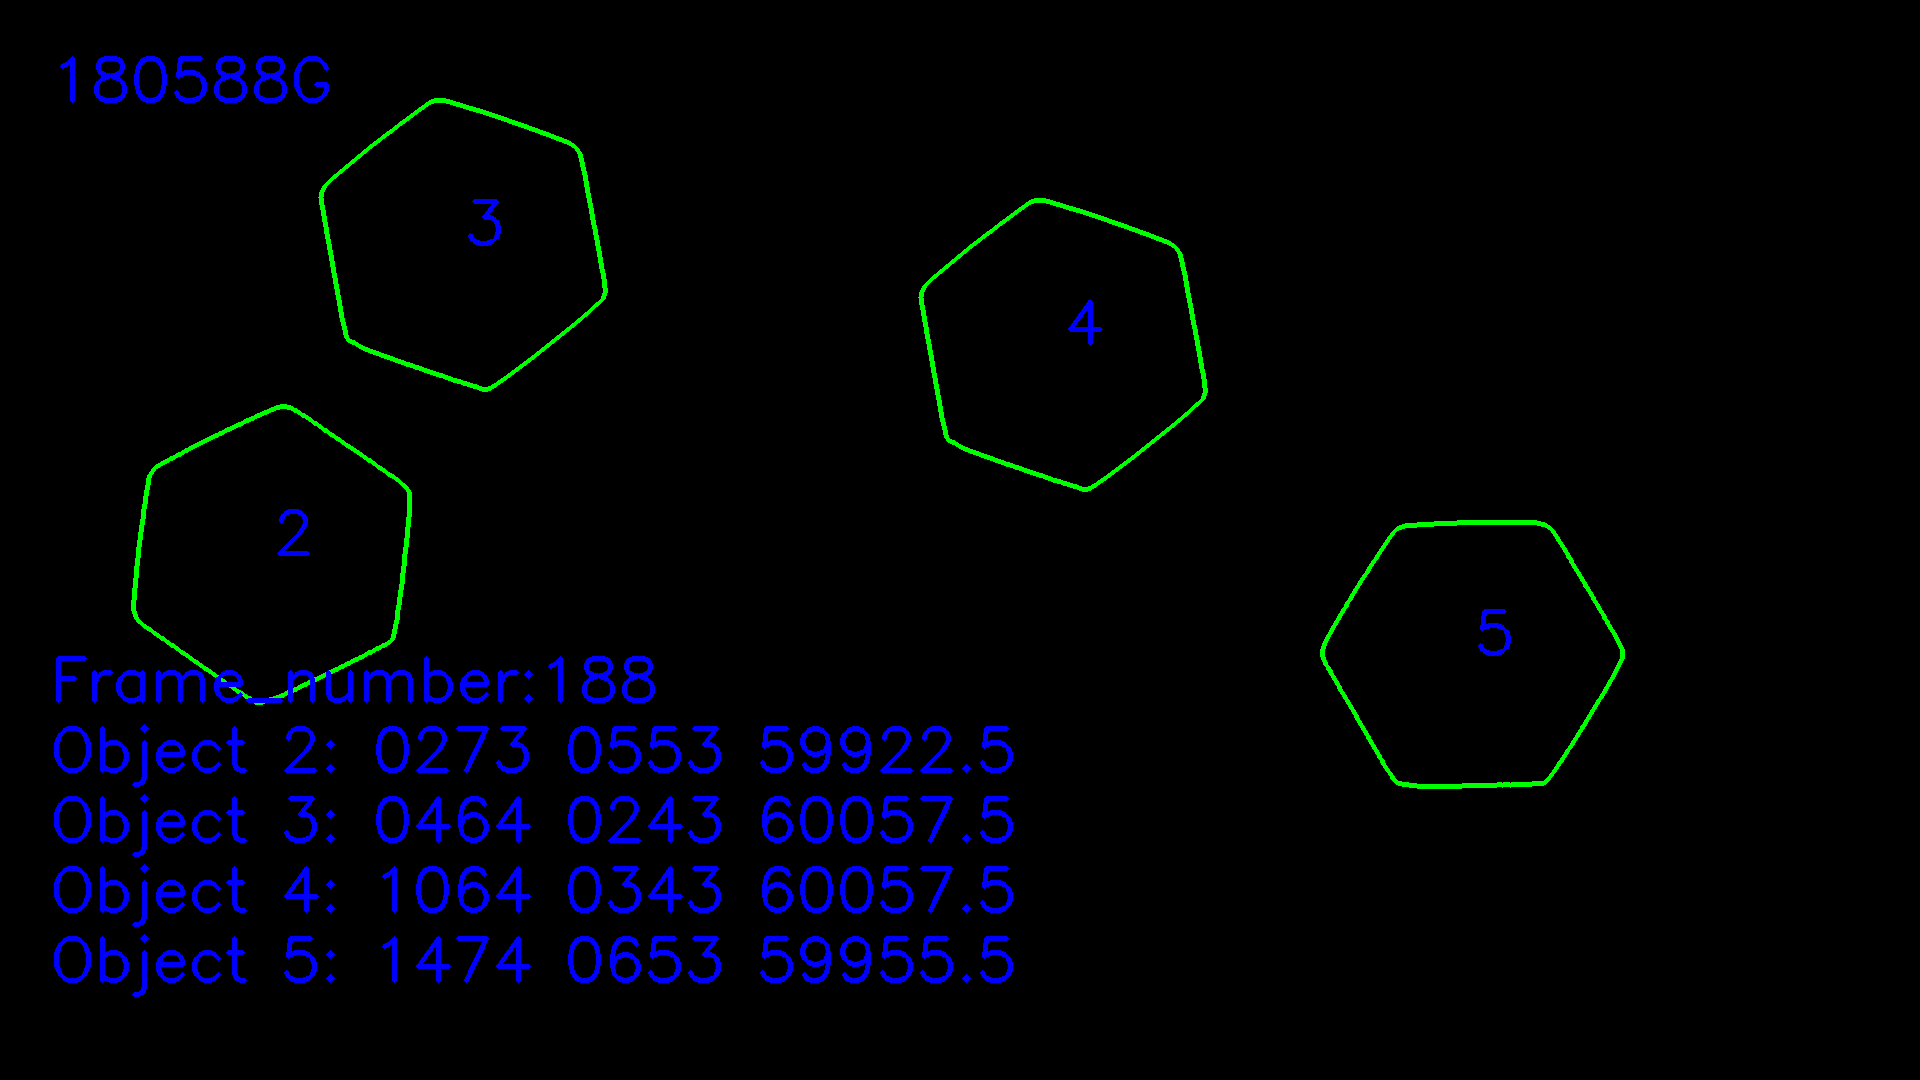

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.63000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([4.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.05400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.46400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([2.73000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([4.64000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.06400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.47400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


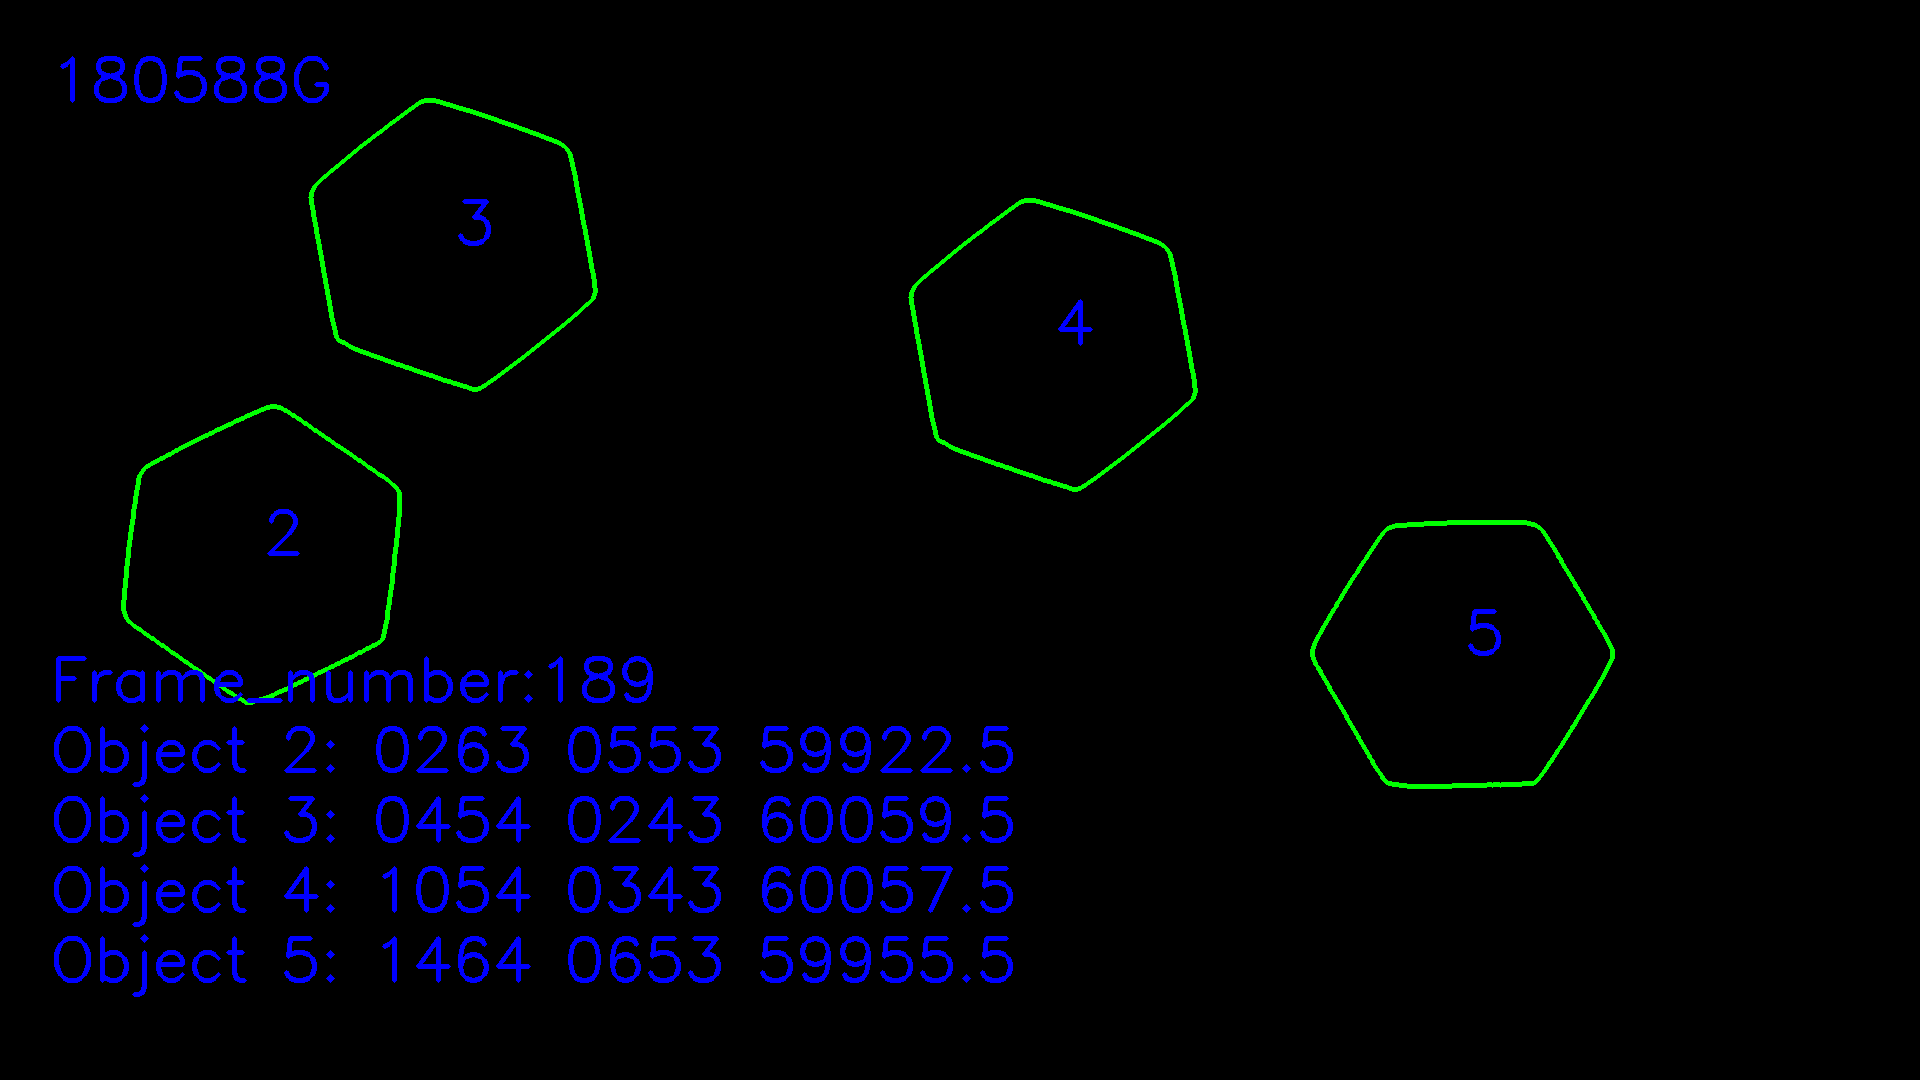

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.53000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.44000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.04400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.4540e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([2.63000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([4.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.05400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.46400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


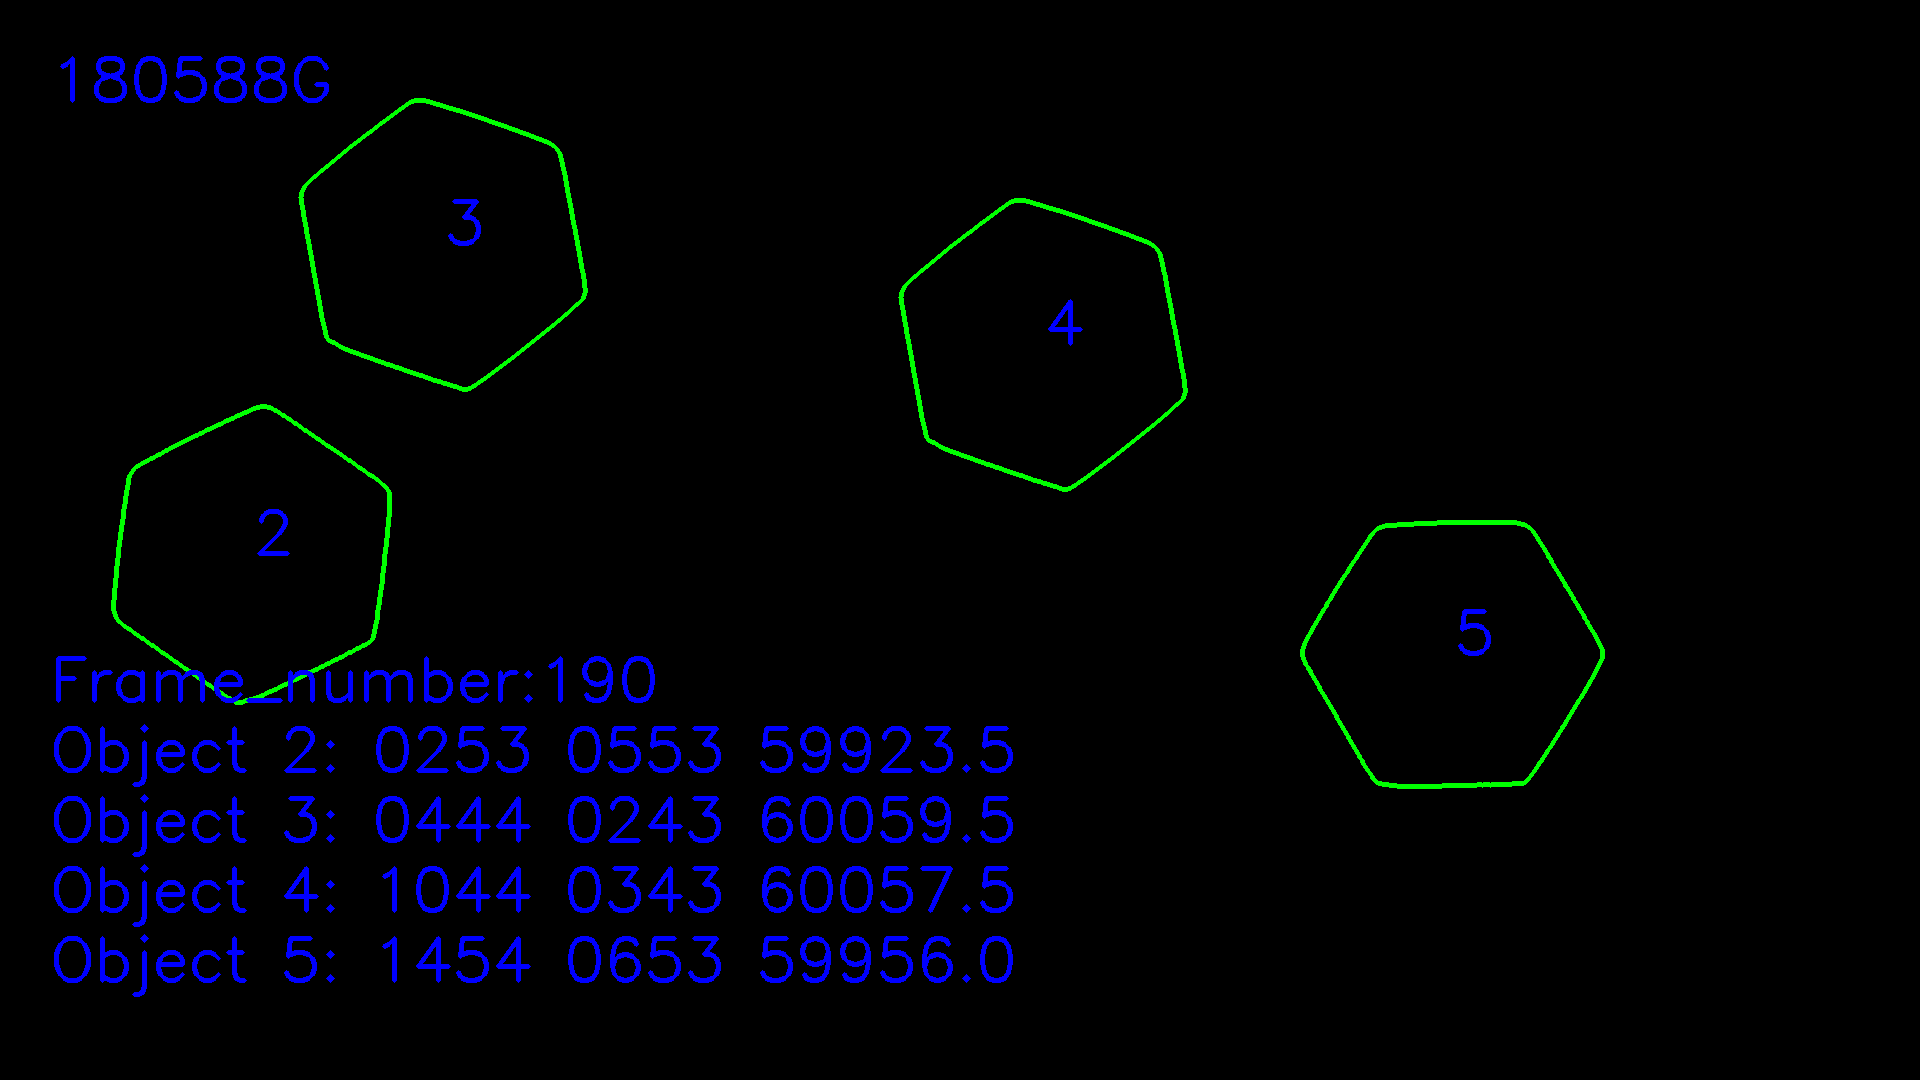

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.34000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.03400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.4440e+03, 6.5300e+02, 5.9955e+04, 5.0000e+00])]
Previousframe [array([2.53000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.44000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.04400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.4540e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


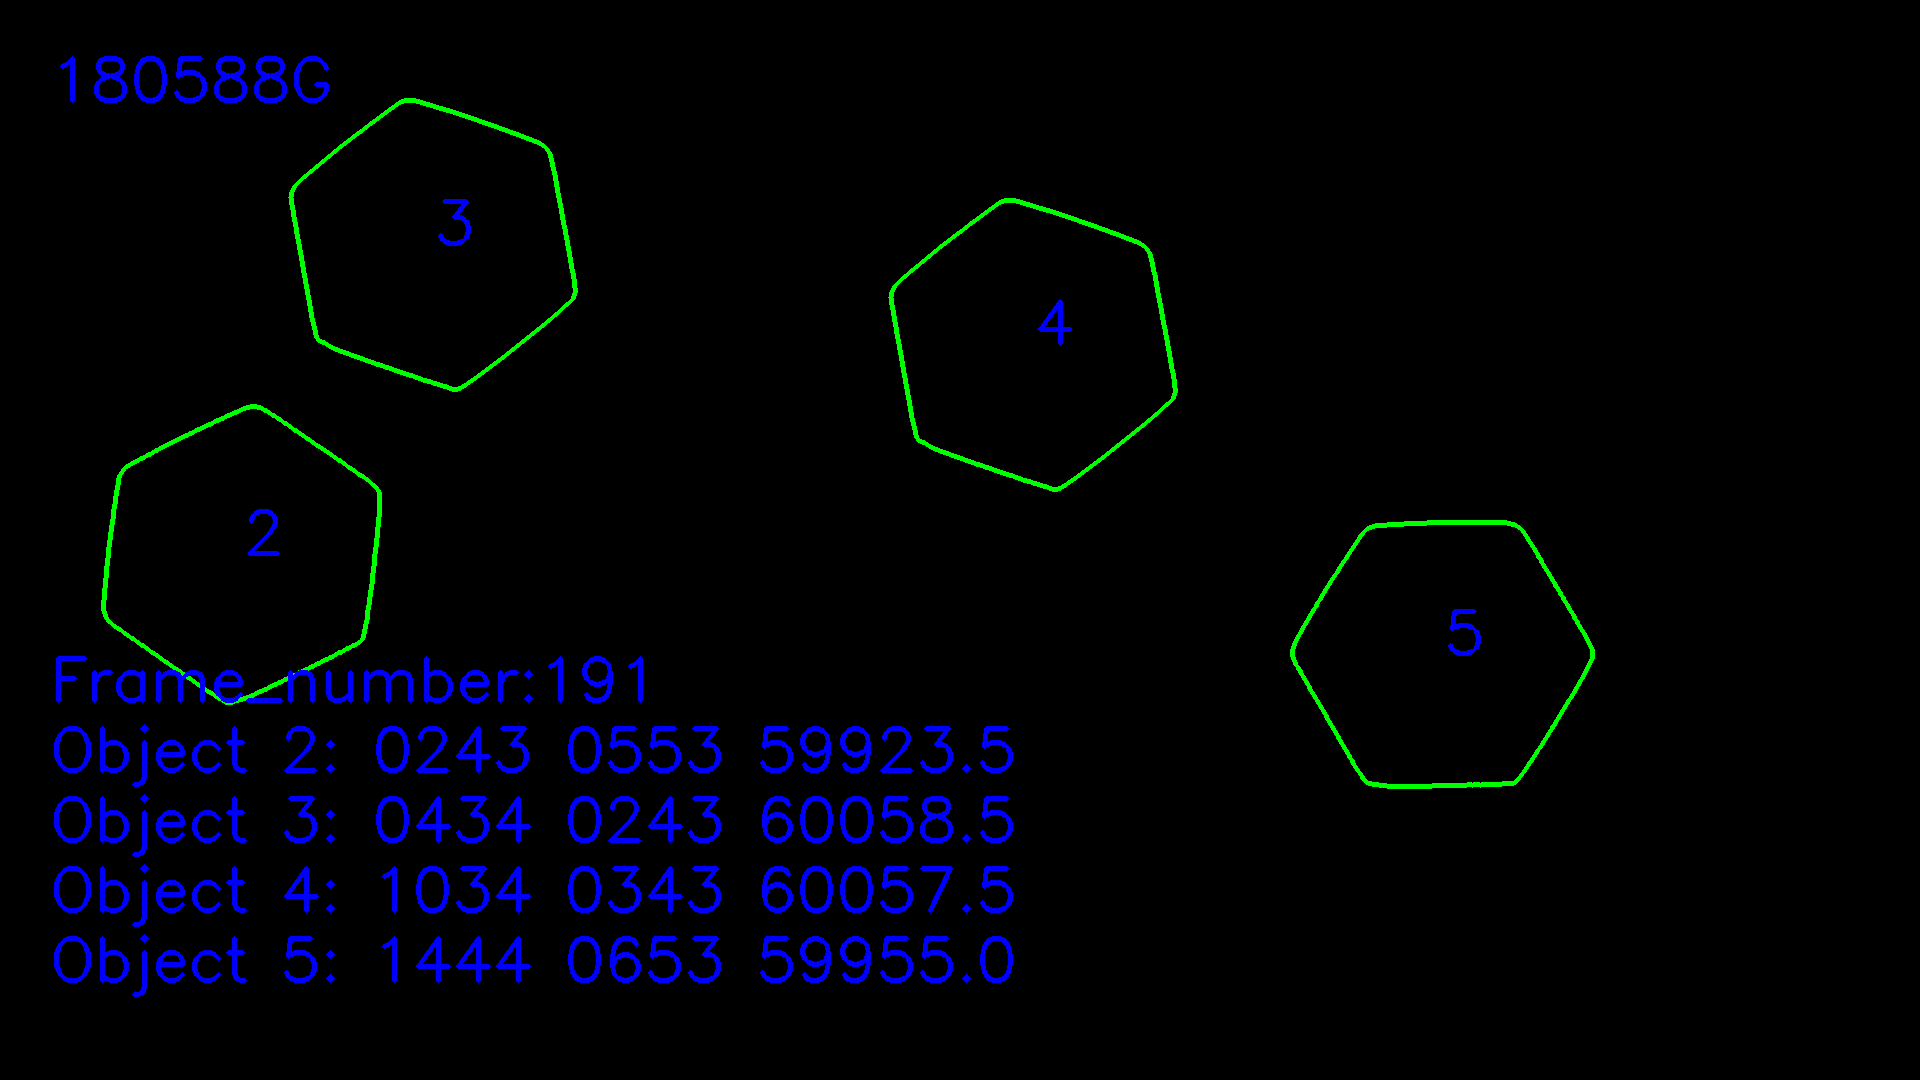

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.33000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.24000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.02400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.4340e+03, 6.5300e+02, 5.9953e+04, 5.0000e+00])]
Previousframe [array([2.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.34000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.03400e+03, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.4440e+03, 6.5300e+02, 5.9955e+04, 5.0000e+00])]


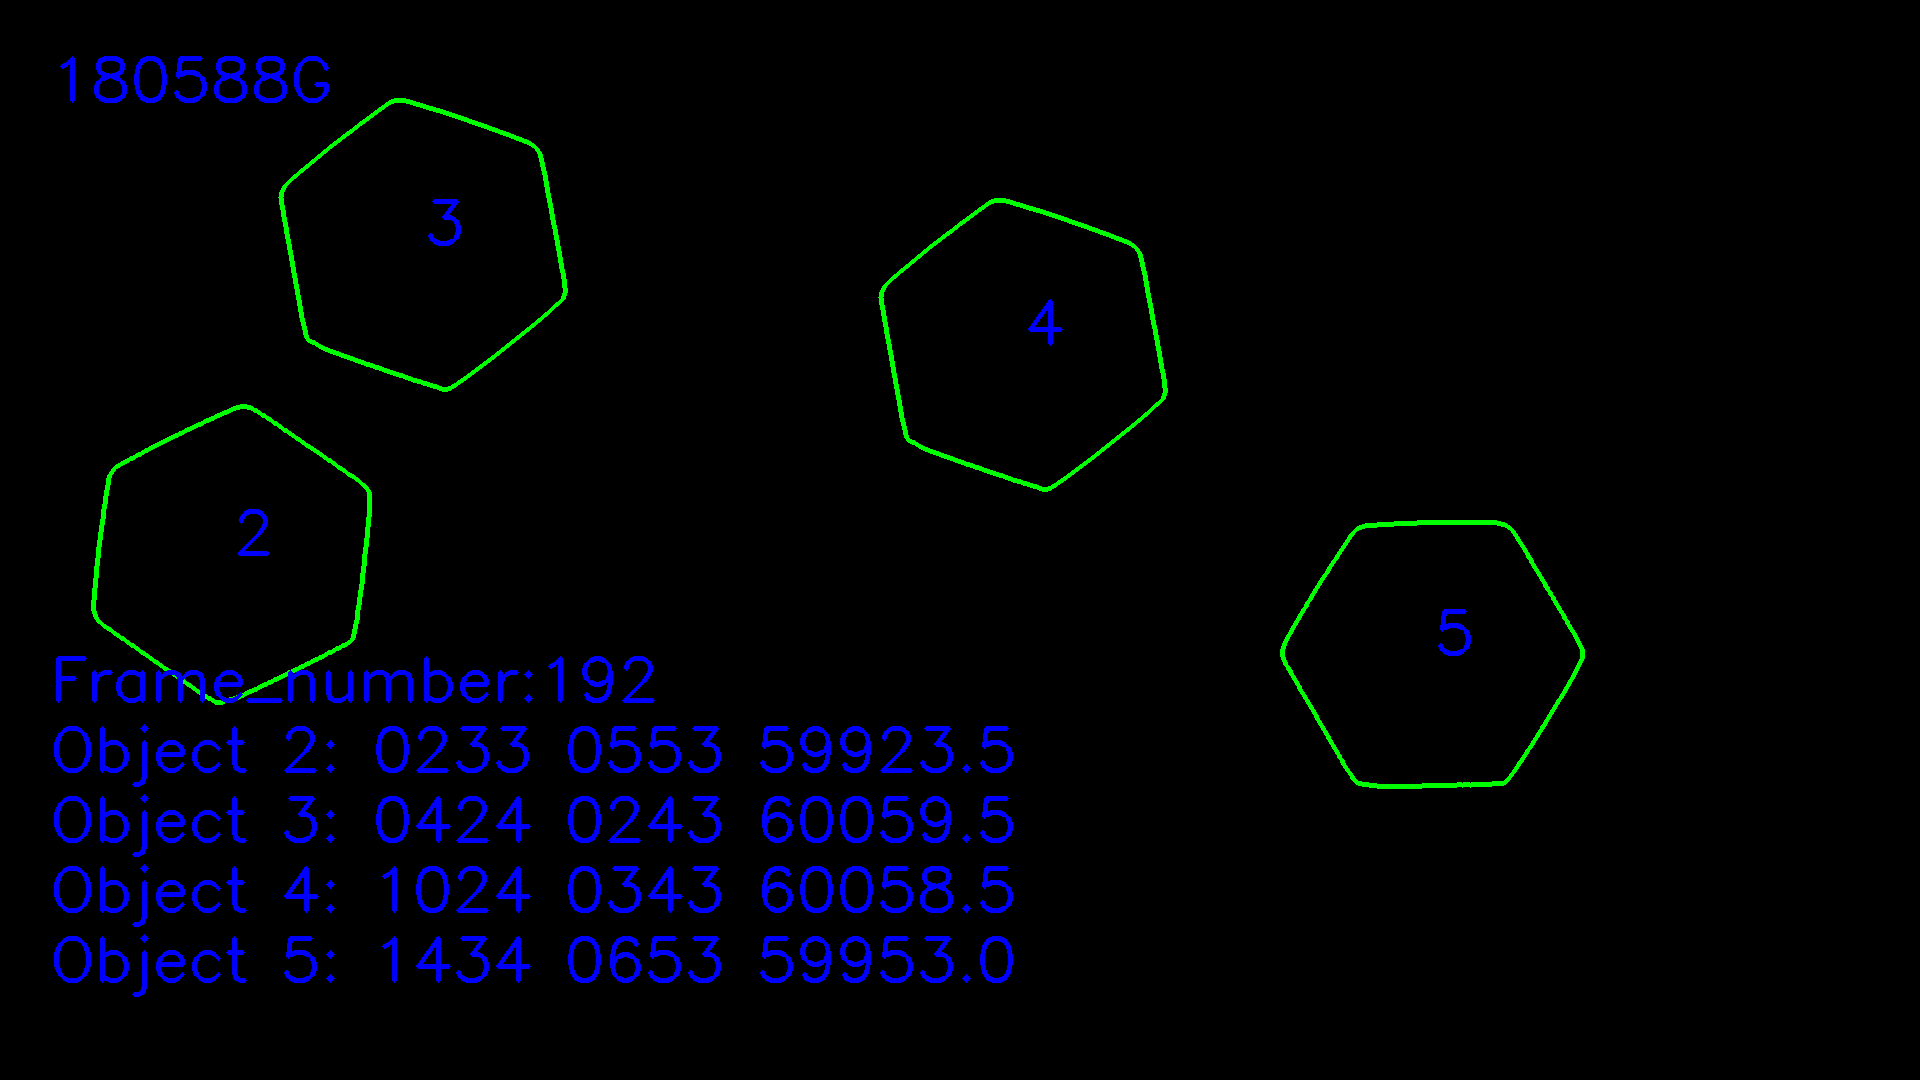

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.23000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([4.14000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.01400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.42400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([2.33000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.24000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([1.02400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.4340e+03, 6.5300e+02, 5.9953e+04, 5.0000e+00])]


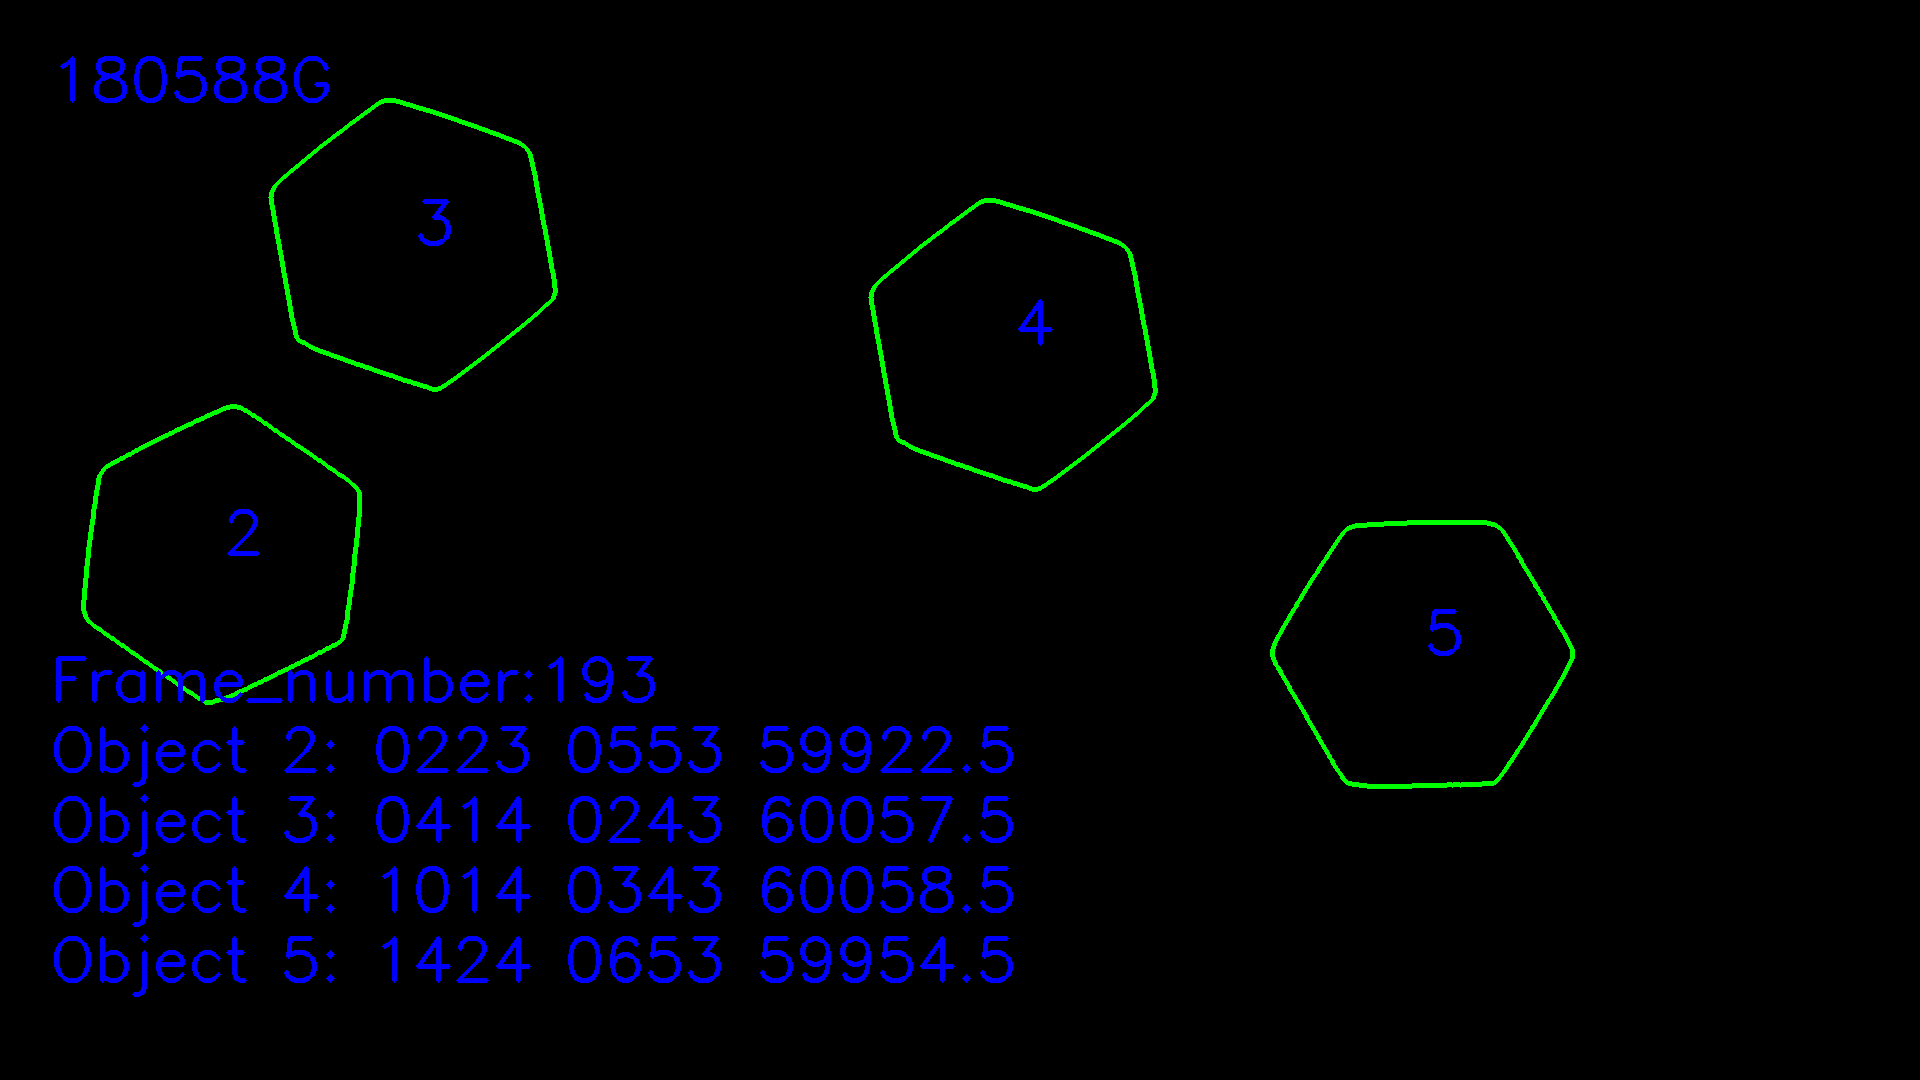

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.04000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.00400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.41400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([2.23000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([4.14000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([1.01400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.42400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


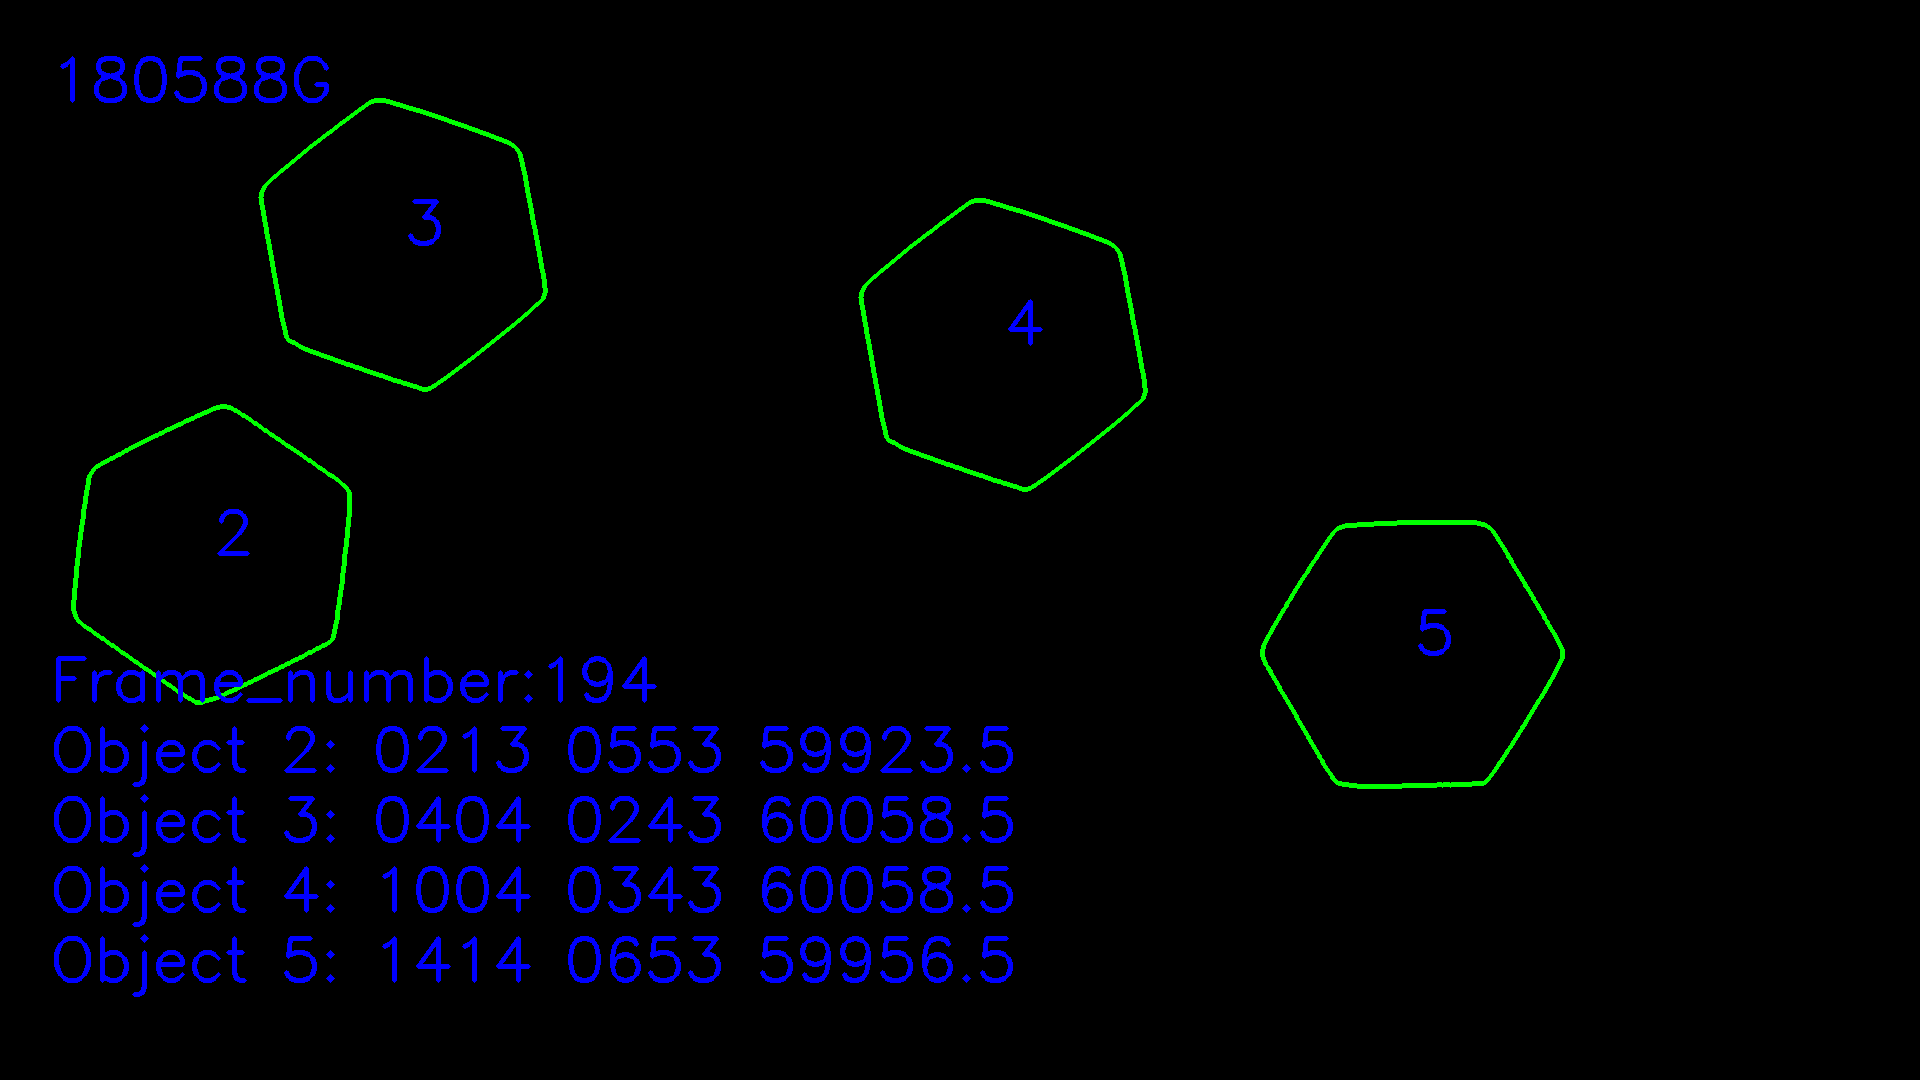

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.03000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([3.94000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.40400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([2.13000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([4.04000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([1.00400e+03, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.41400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


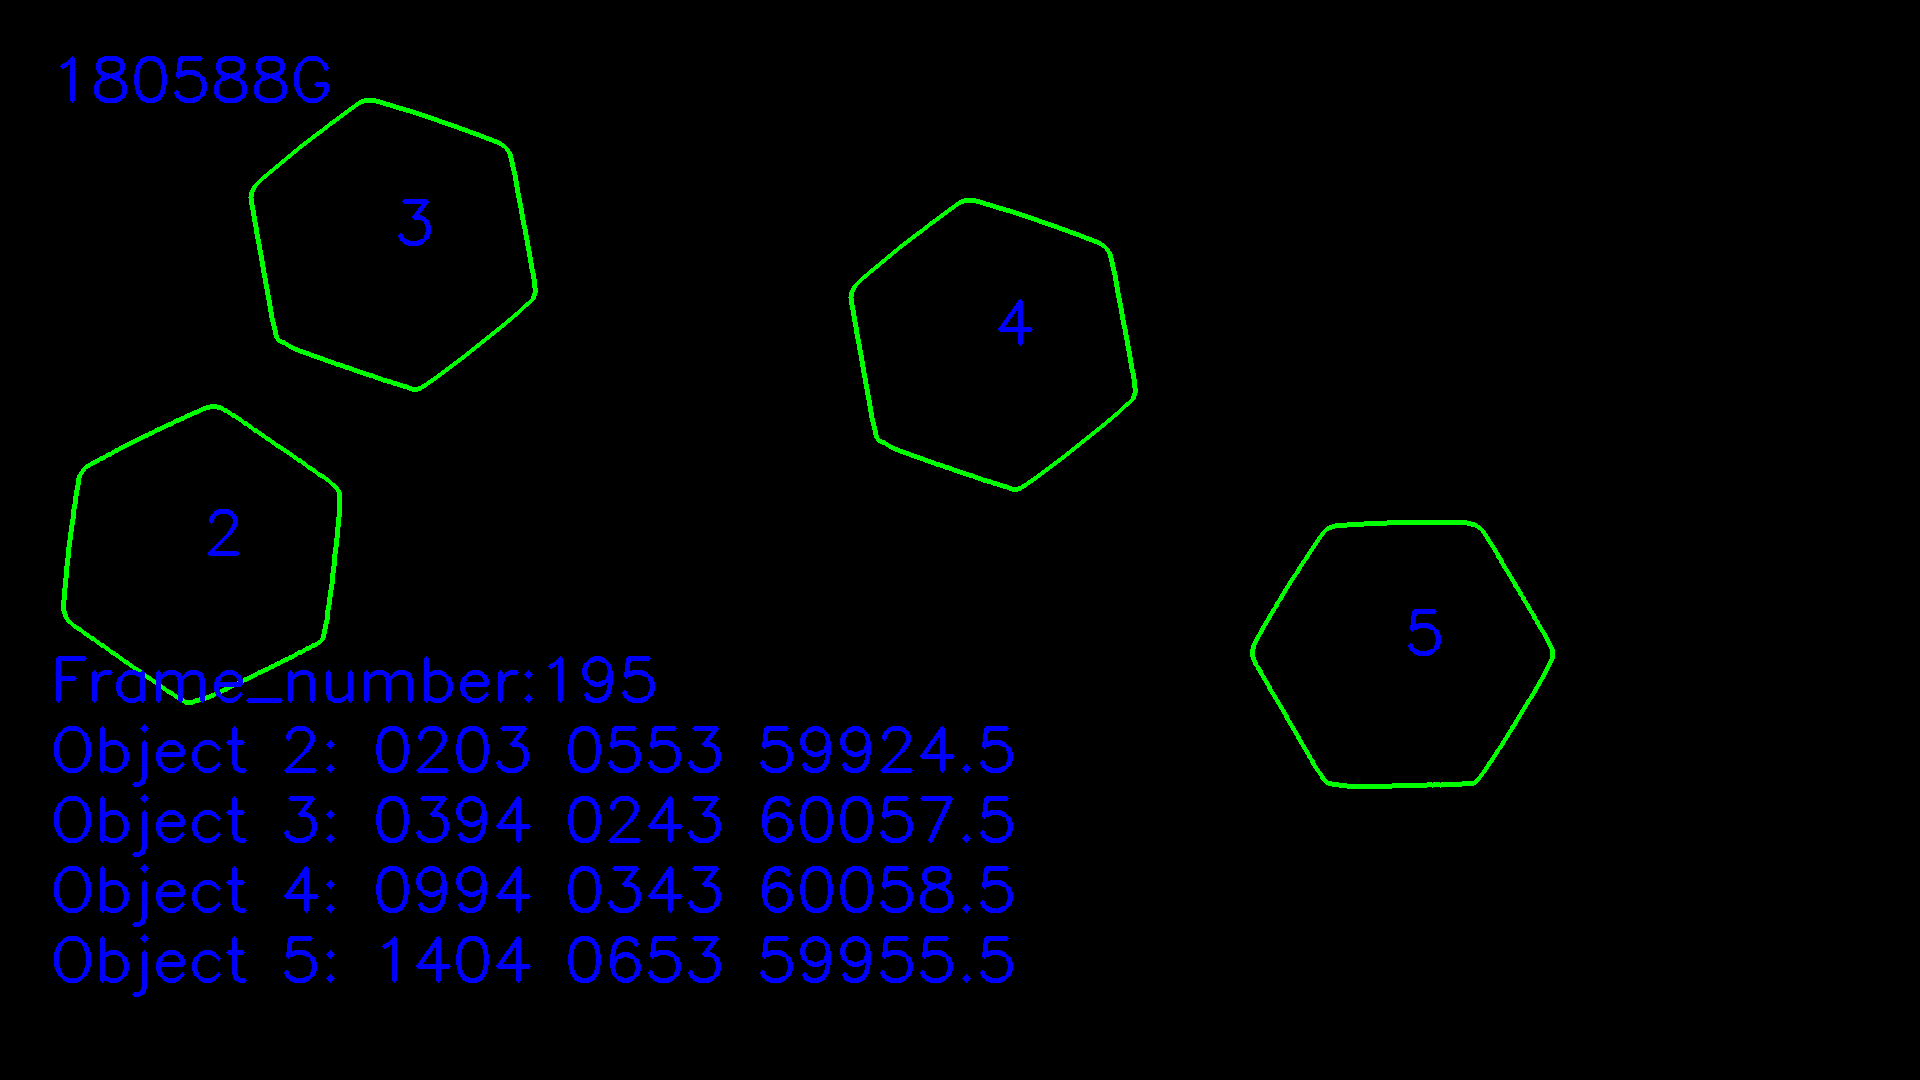

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([3.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.84000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.39400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([2.03000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([3.94000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.40400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


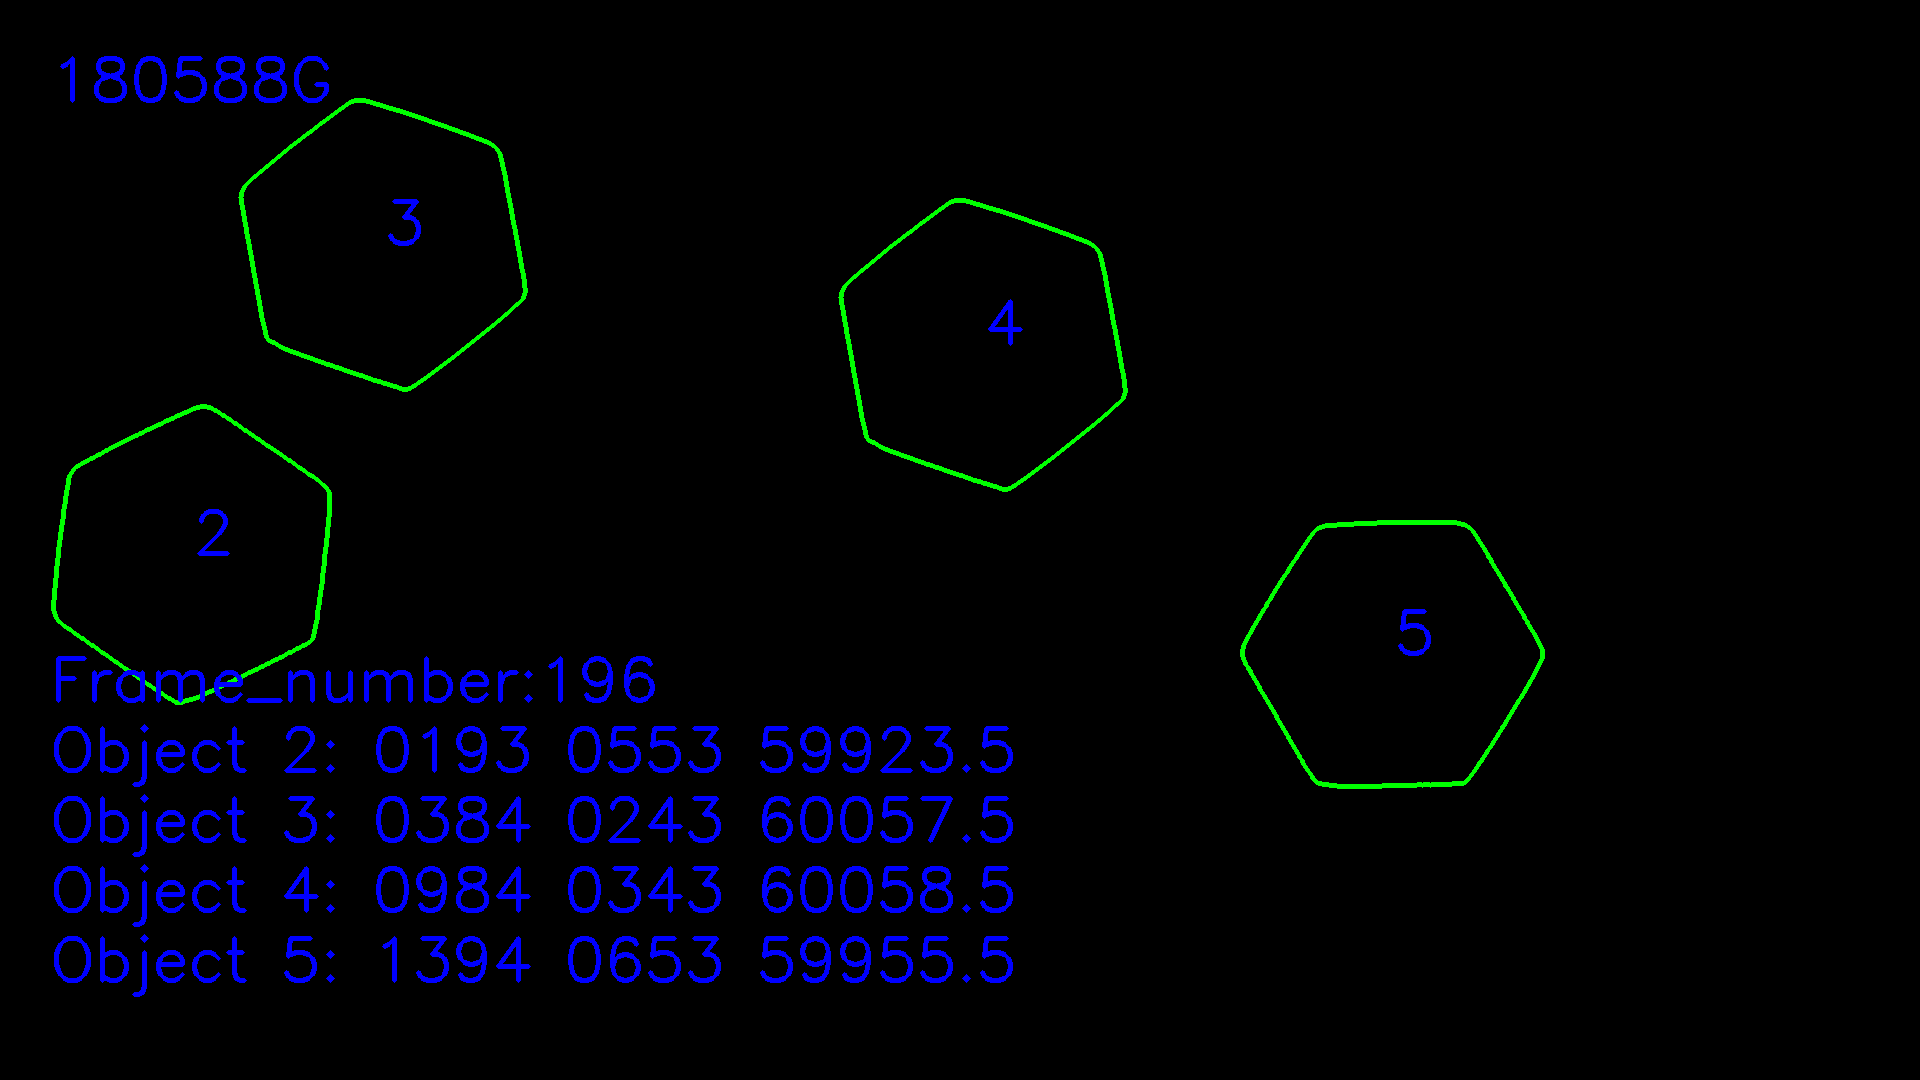

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([3.74000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([9.74000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.38400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]
Previousframe [array([1.93000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([3.84000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.84000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.39400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


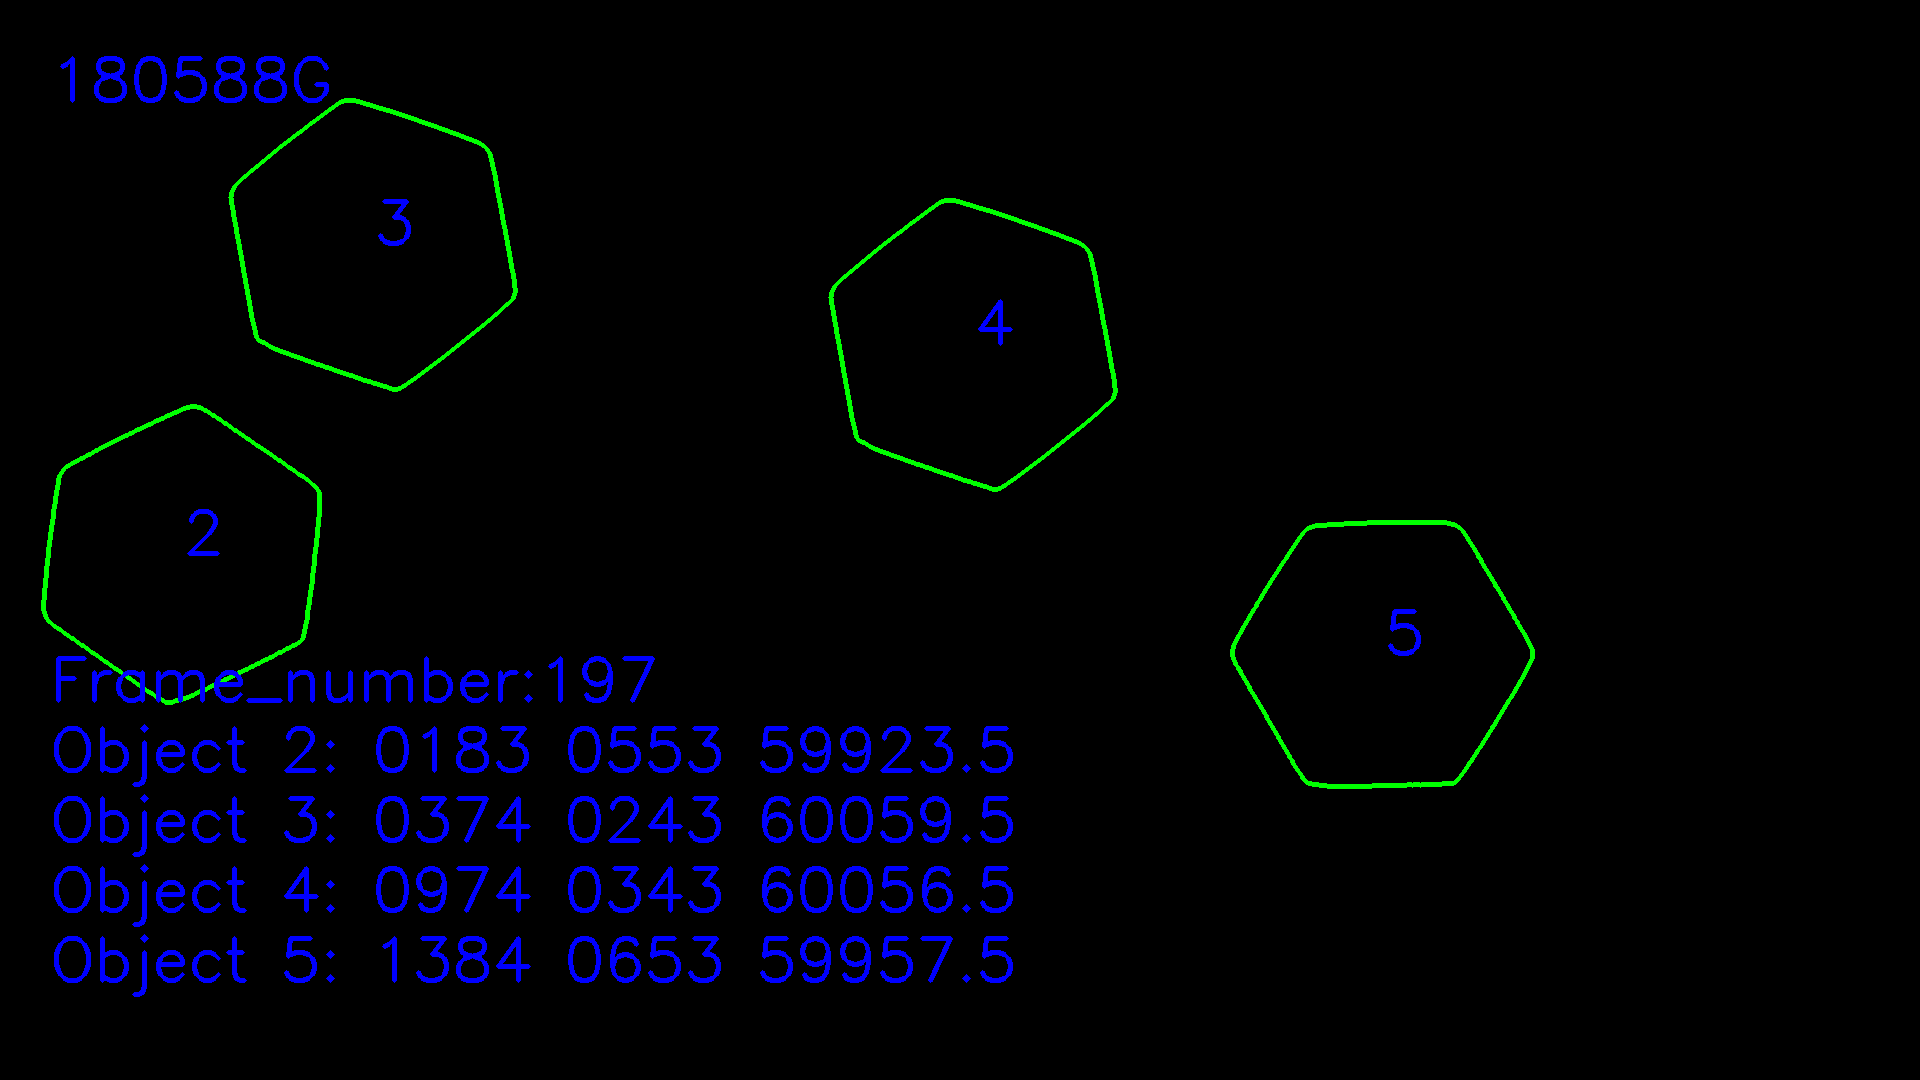

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([3.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([9.64000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.37400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([1.83000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([3.74000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([9.74000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.38400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]


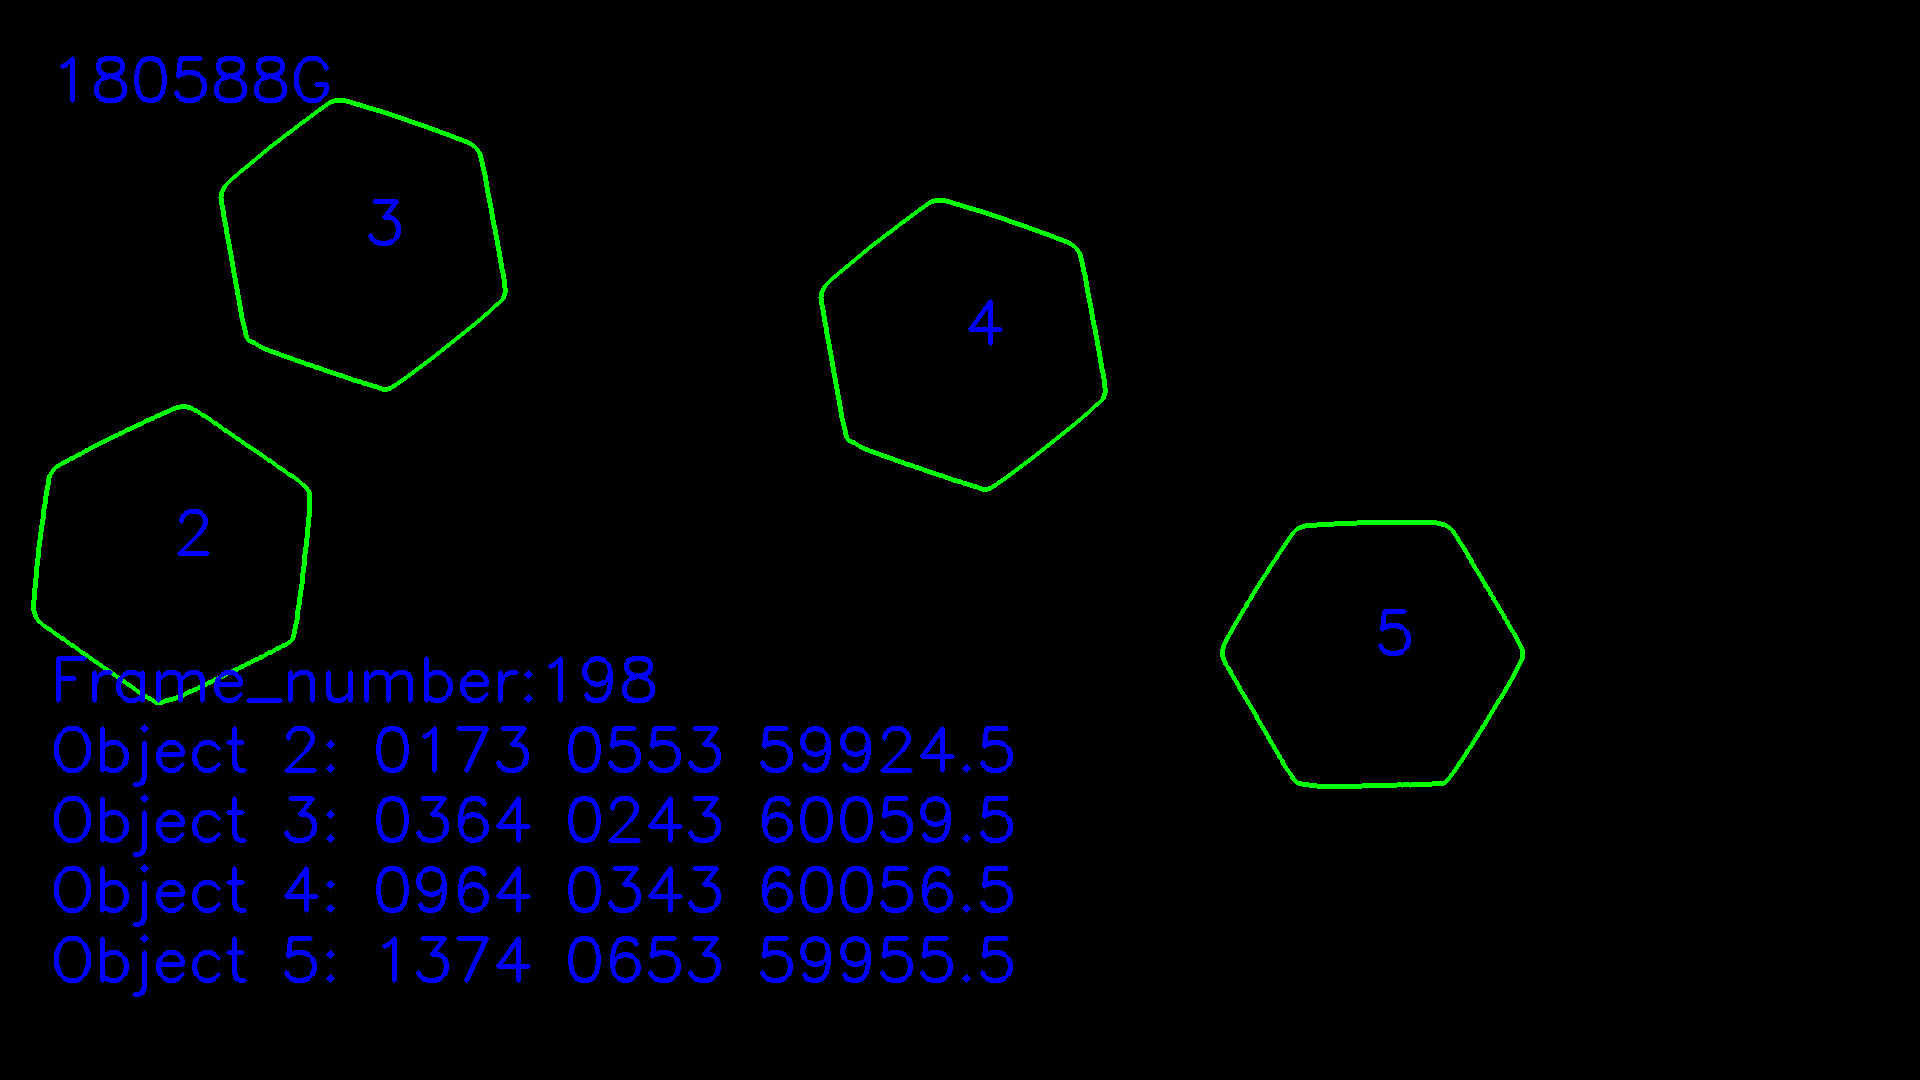

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.63000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([3.54000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([9.54000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.36400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([1.73000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([3.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([9.64000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.37400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


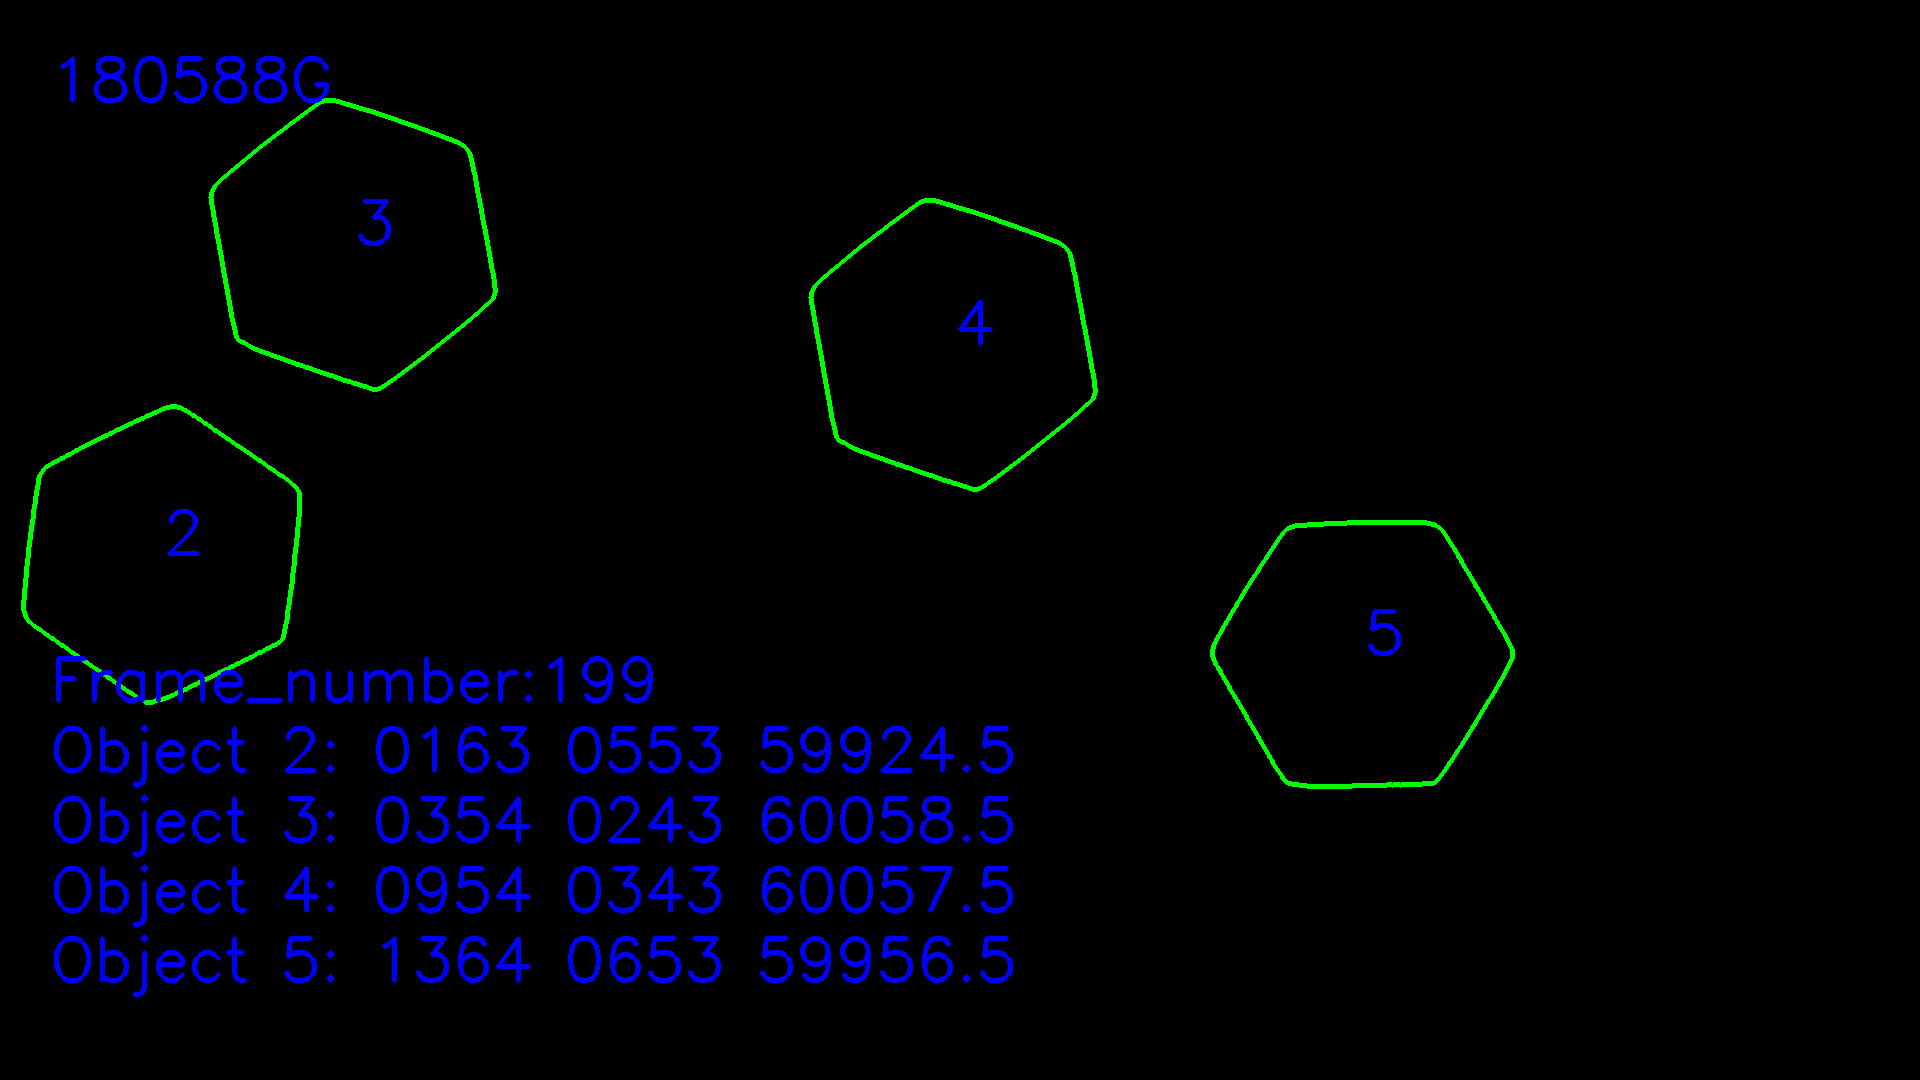

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.53000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([3.44000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([9.44000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.35400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([1.63000e+02, 5.53000e+02, 5.99245e+04, 2.00000e+00]), array([3.54000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([9.54000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.36400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


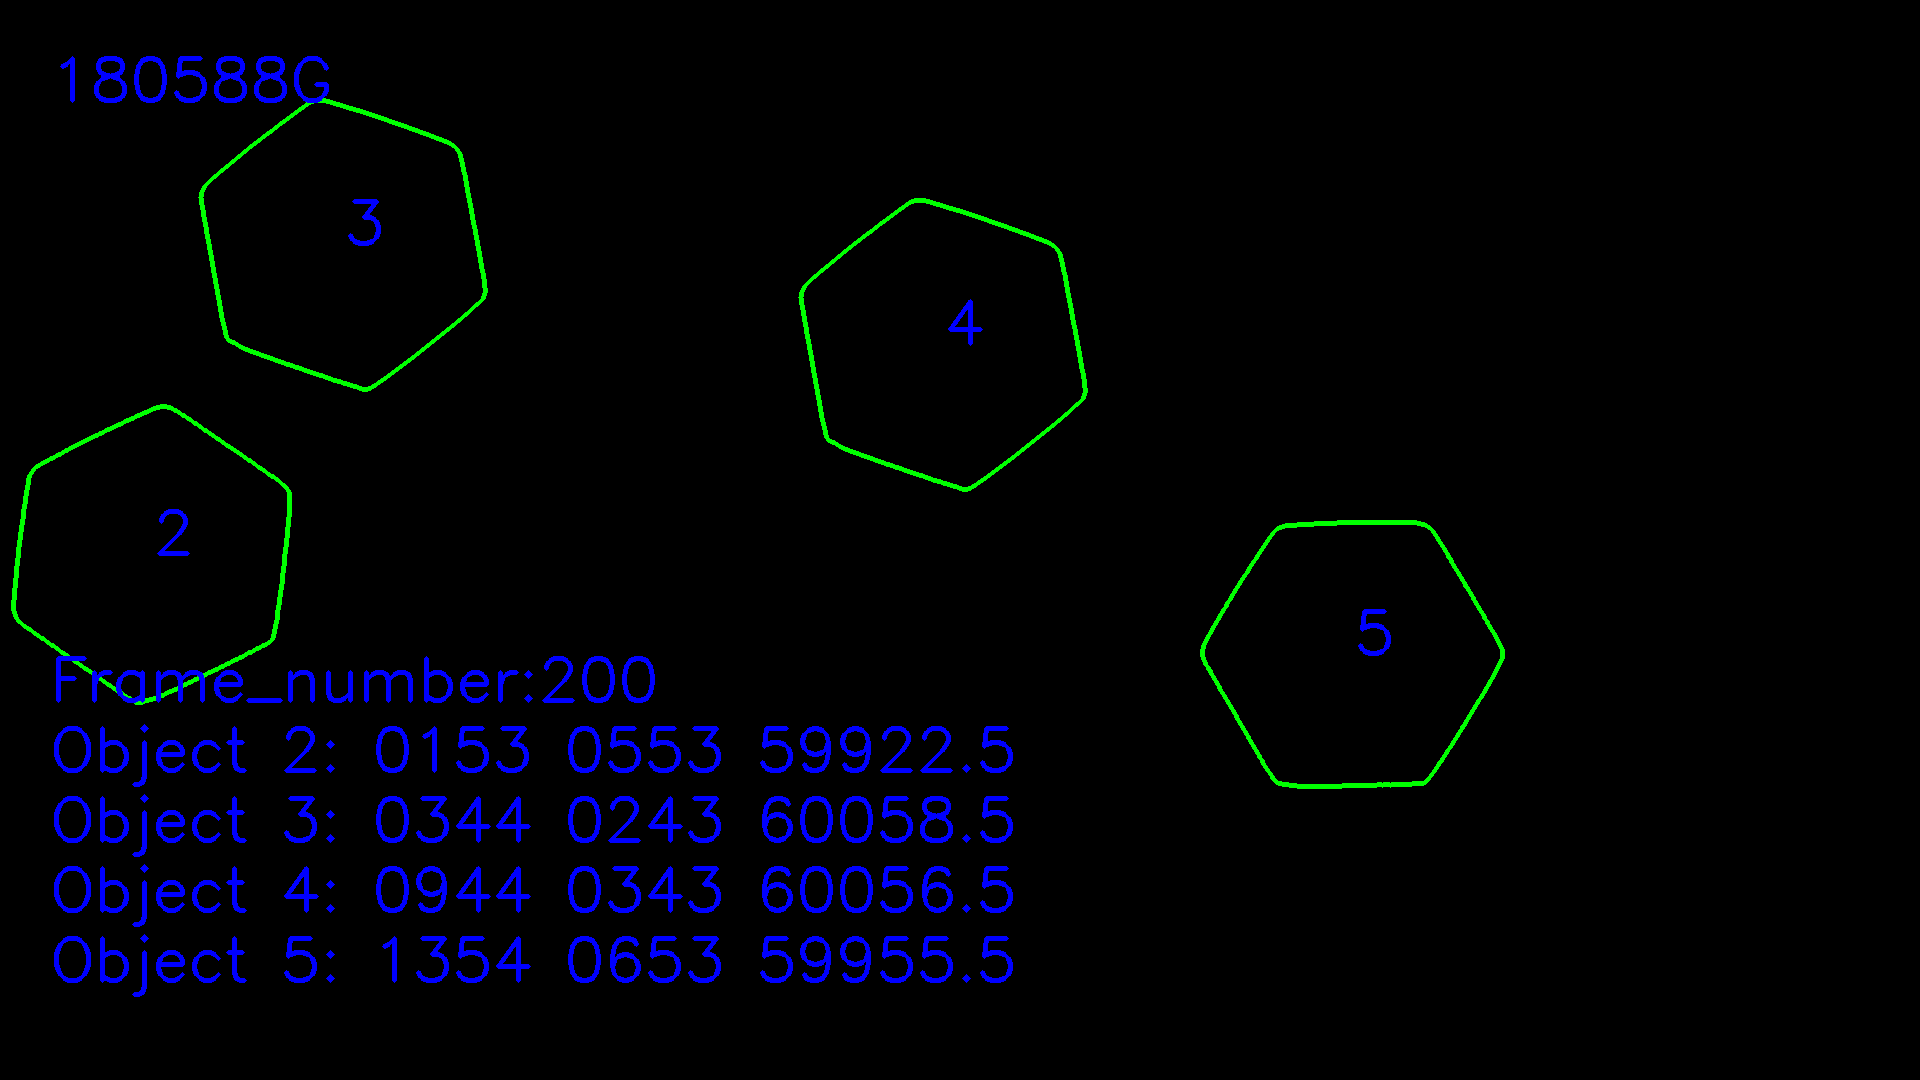

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([3.34000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([9.34000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.34400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([1.53000e+02, 5.53000e+02, 5.99225e+04, 2.00000e+00]), array([3.44000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([9.44000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.35400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


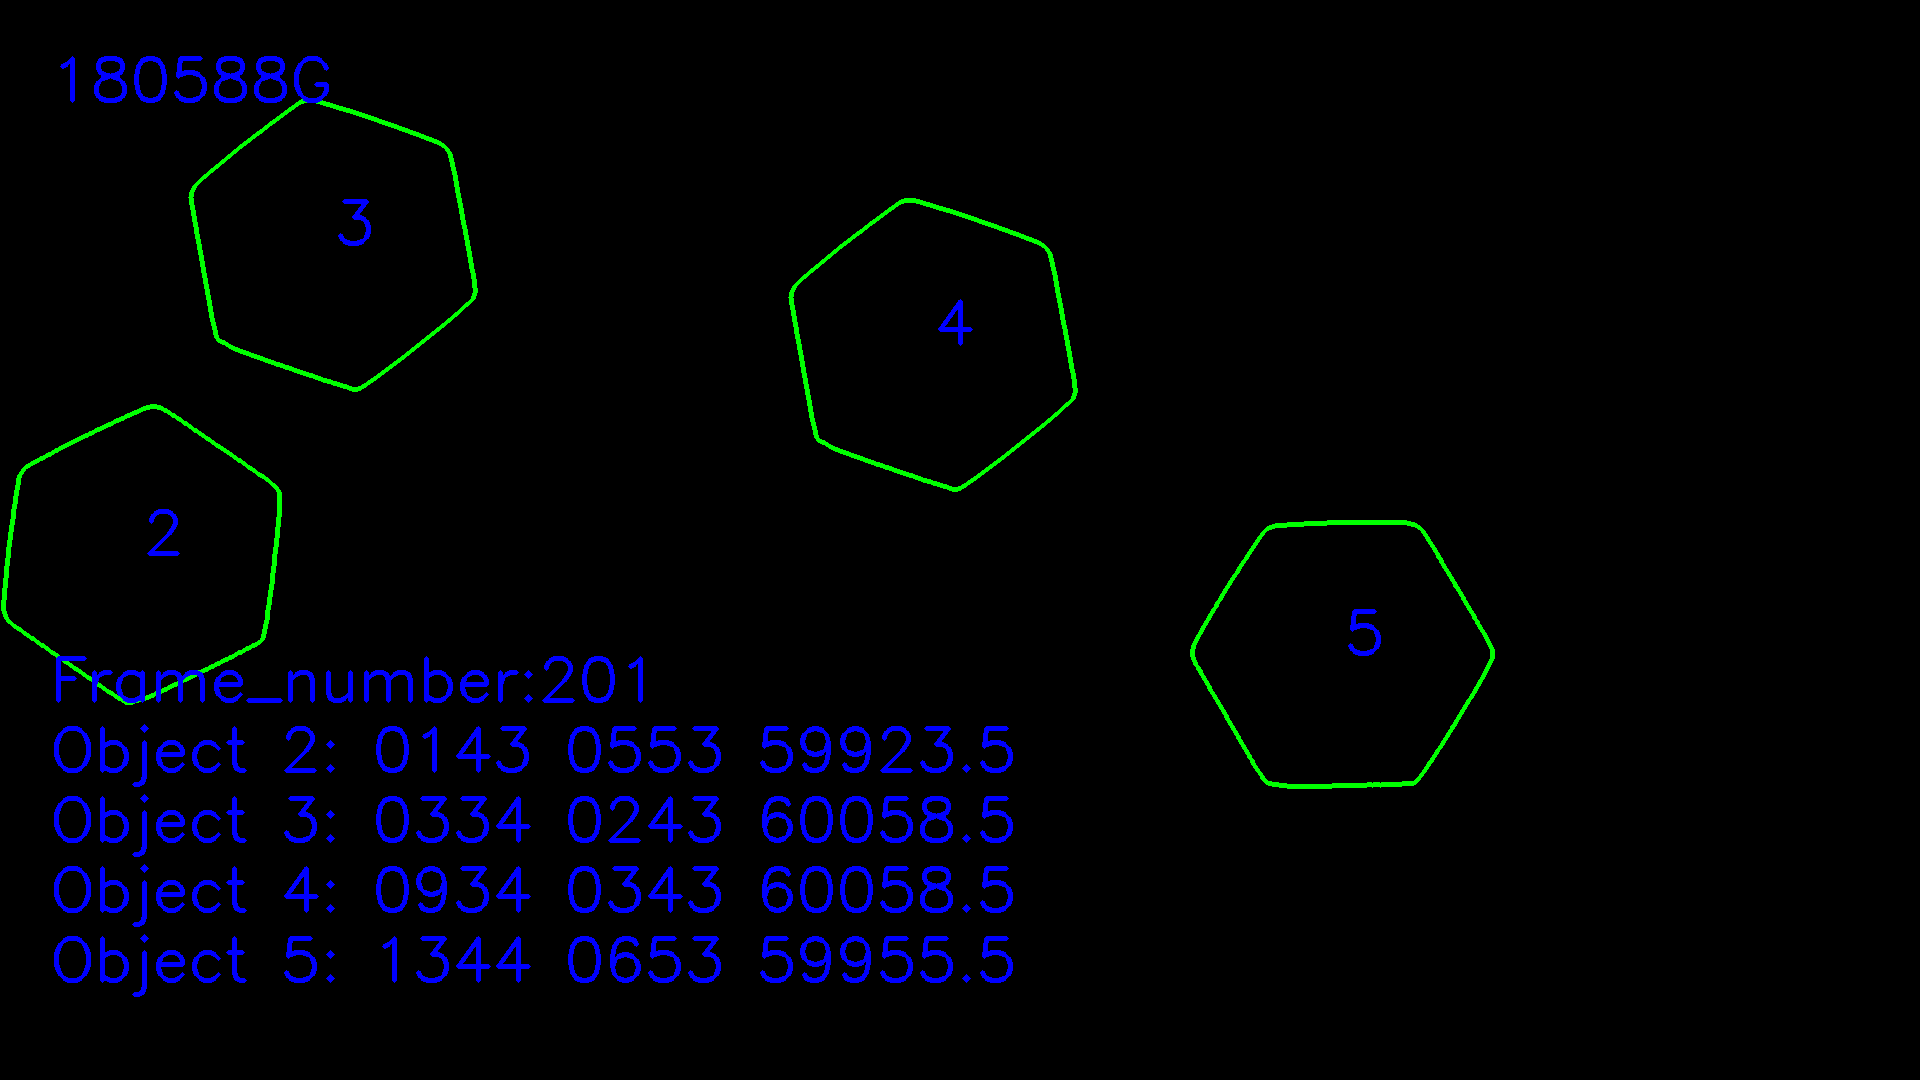

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.3400e+02, 5.5300e+02, 5.9584e+04, 2.0000e+00]), array([3.24000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.33400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([1.43000e+02, 5.53000e+02, 5.99235e+04, 2.00000e+00]), array([3.34000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([9.34000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.34400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


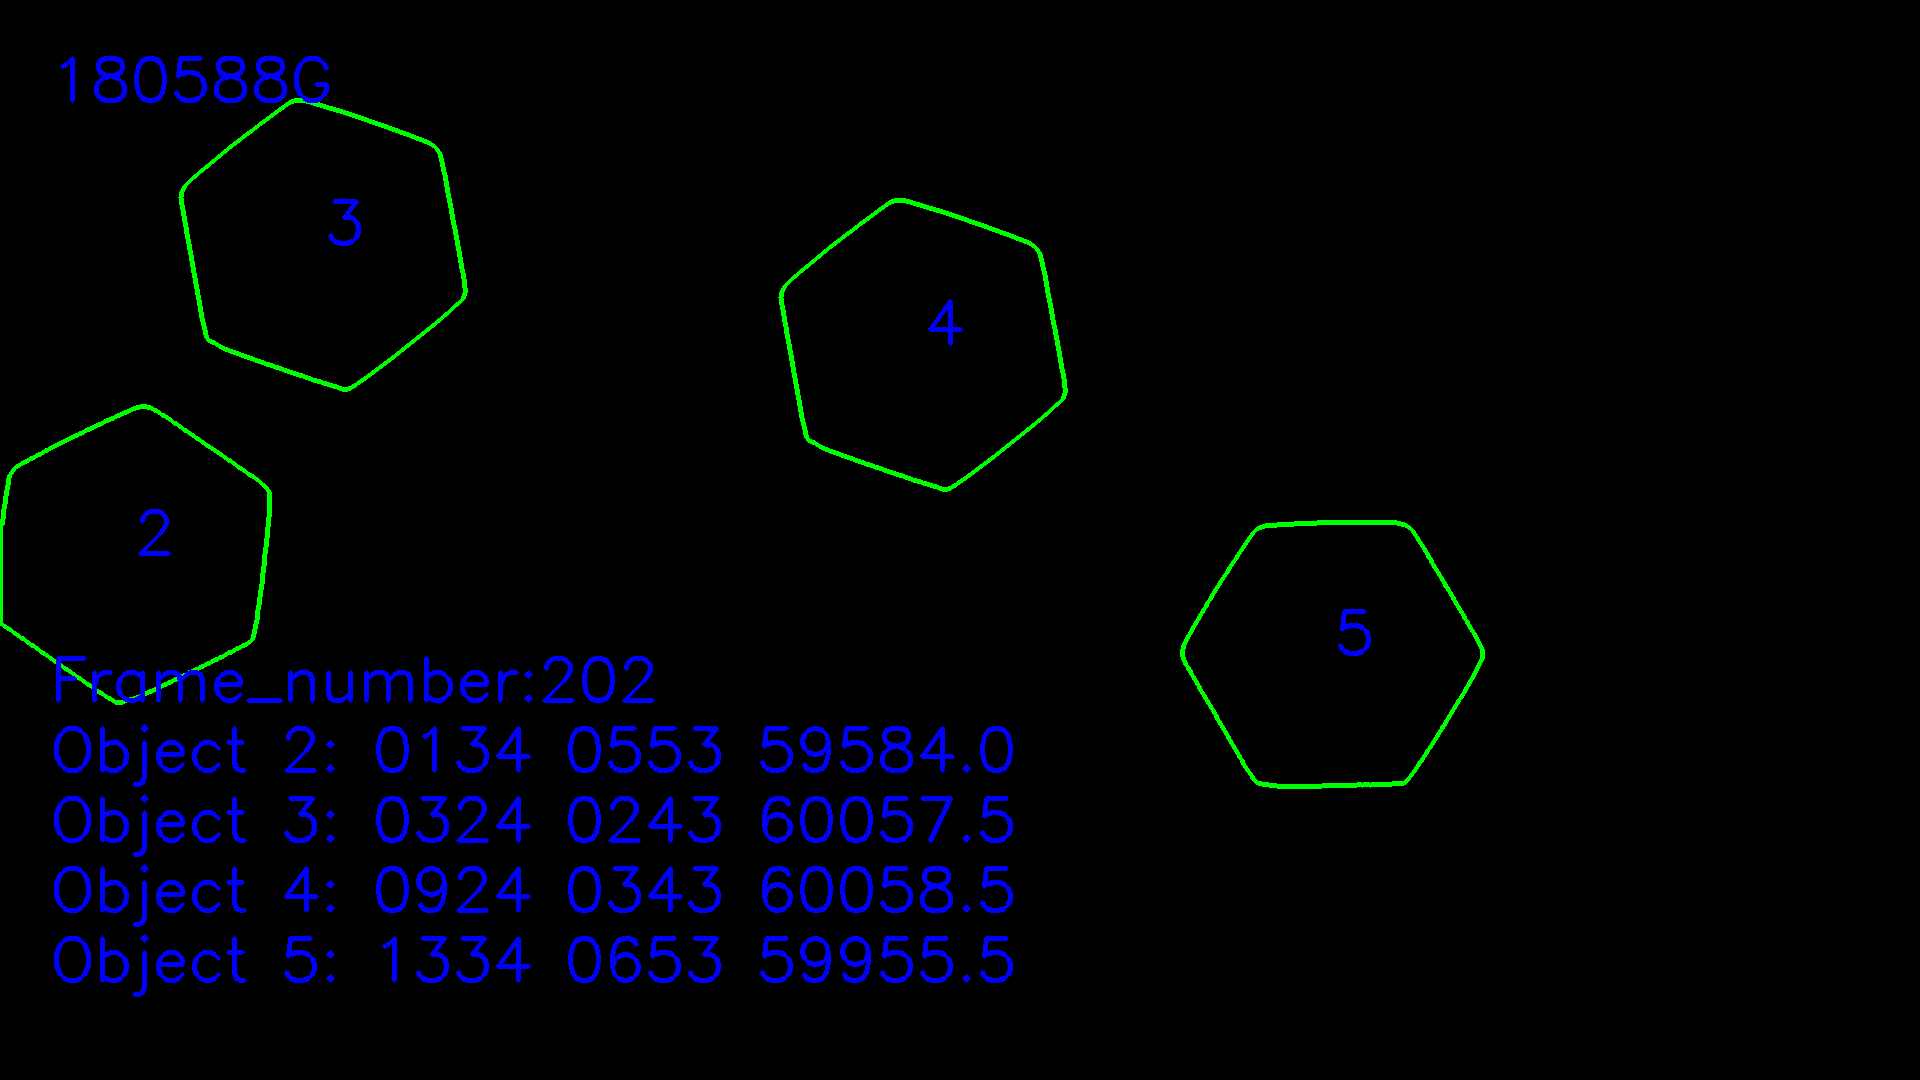

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.27000e+02, 5.53000e+02, 5.83255e+04, 2.00000e+00]), array([3.14000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.14000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.3240e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([1.3400e+02, 5.5300e+02, 5.9584e+04, 2.0000e+00]), array([3.24000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.33400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


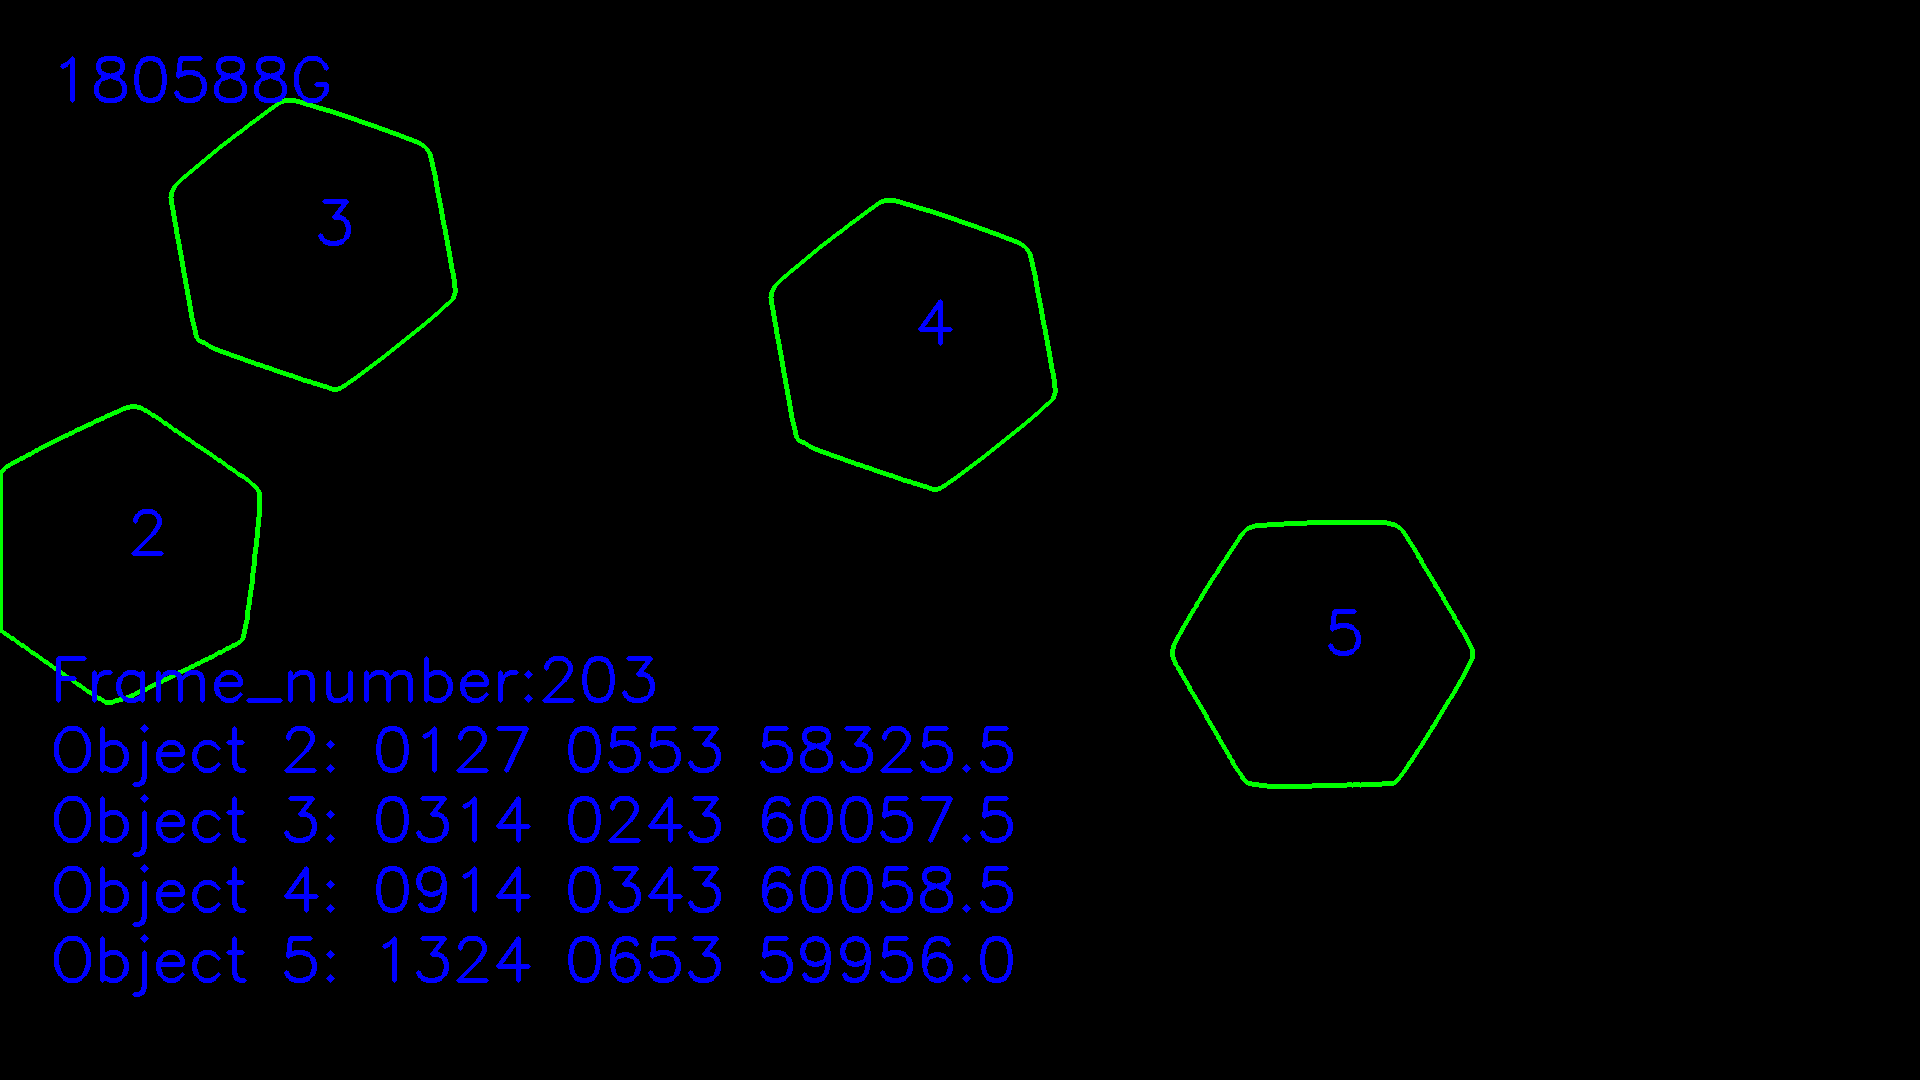

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.20000e+02, 5.53000e+02, 5.66705e+04, 2.00000e+00]), array([3.04000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.31400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([1.27000e+02, 5.53000e+02, 5.83255e+04, 2.00000e+00]), array([3.14000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.14000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.3240e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


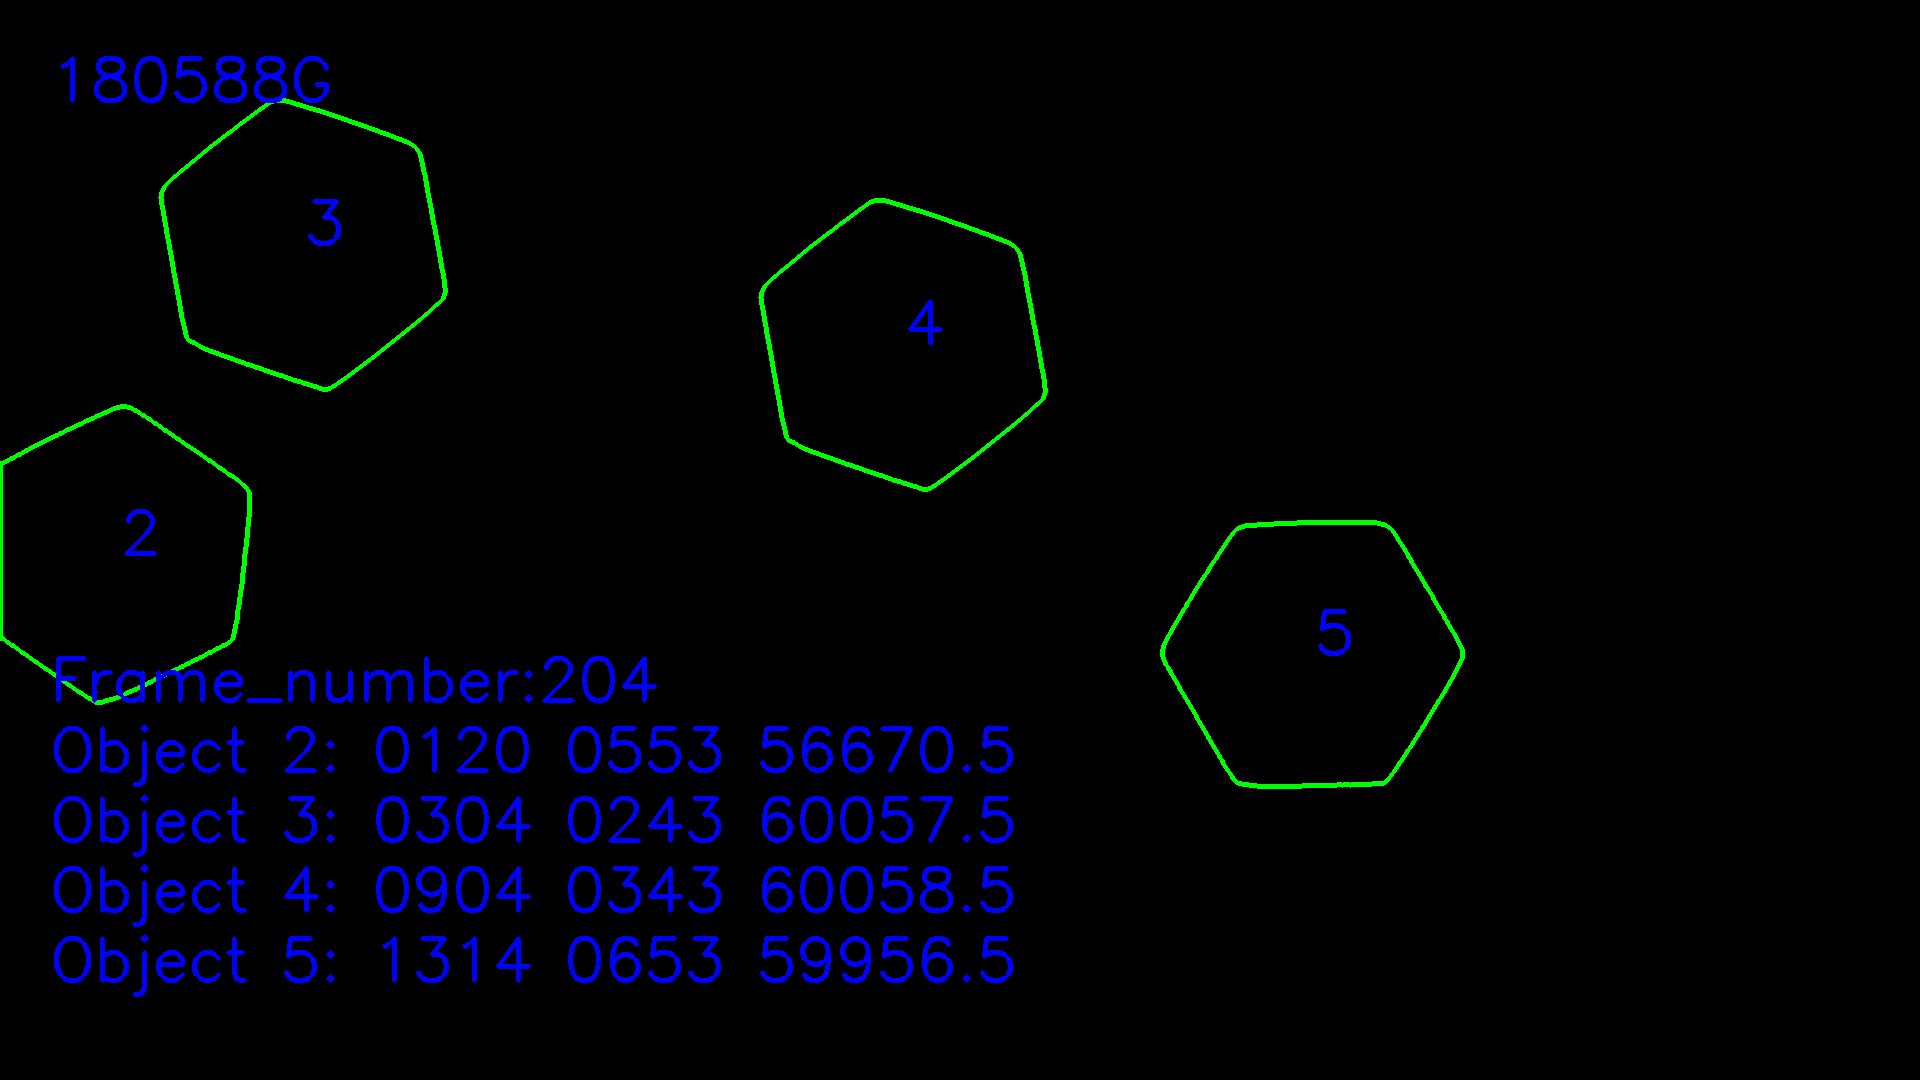

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.14000e+02, 5.53000e+02, 5.48815e+04, 2.00000e+00]), array([2.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.94000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.30400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([1.20000e+02, 5.53000e+02, 5.66705e+04, 2.00000e+00]), array([3.04000e+02, 2.43000e+02, 6.00575e+04, 3.00000e+00]), array([9.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.31400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


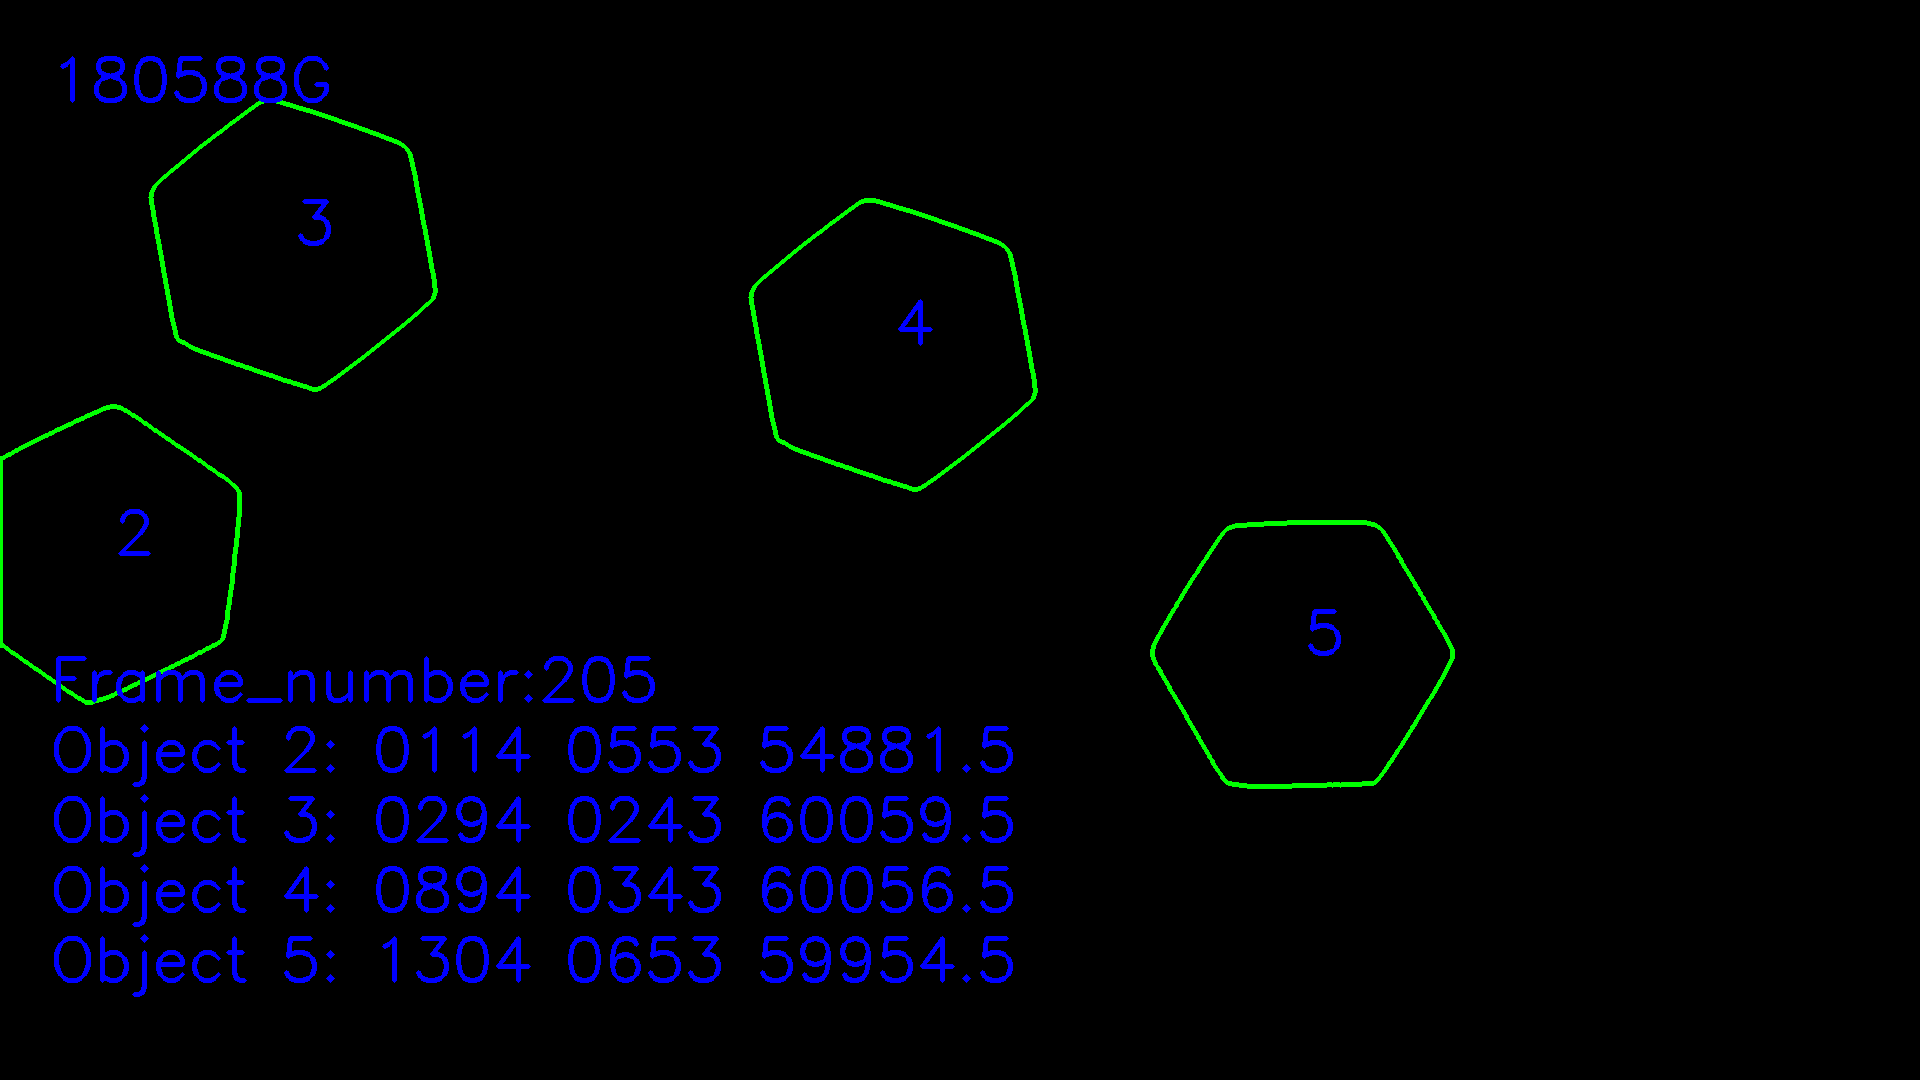

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.08000e+02, 5.53000e+02, 5.29715e+04, 2.00000e+00]), array([2.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.84000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.29400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([1.14000e+02, 5.53000e+02, 5.48815e+04, 2.00000e+00]), array([2.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.94000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.30400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


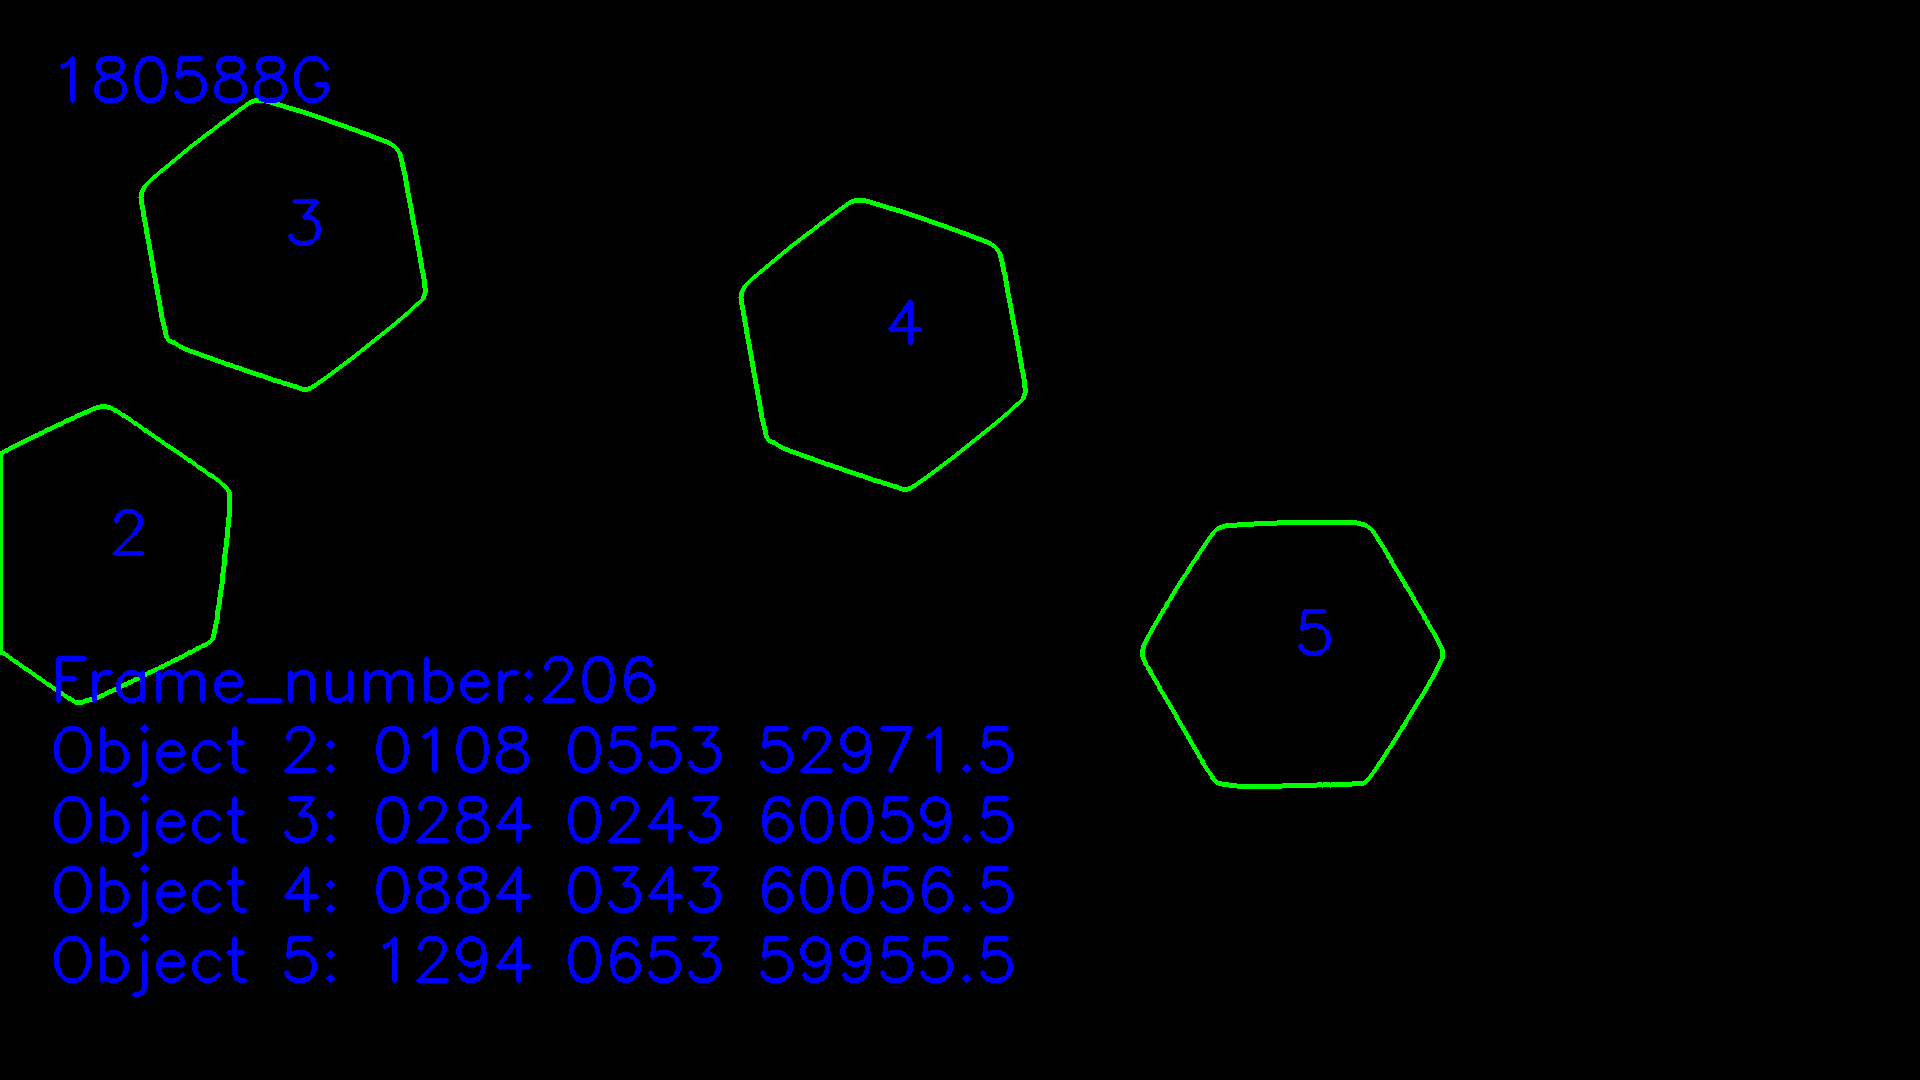

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.02000e+02, 5.53000e+02, 5.09345e+04, 2.00000e+00]), array([2.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([8.74000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.28400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]
Previousframe [array([1.08000e+02, 5.53000e+02, 5.29715e+04, 2.00000e+00]), array([2.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.84000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.29400e+03, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


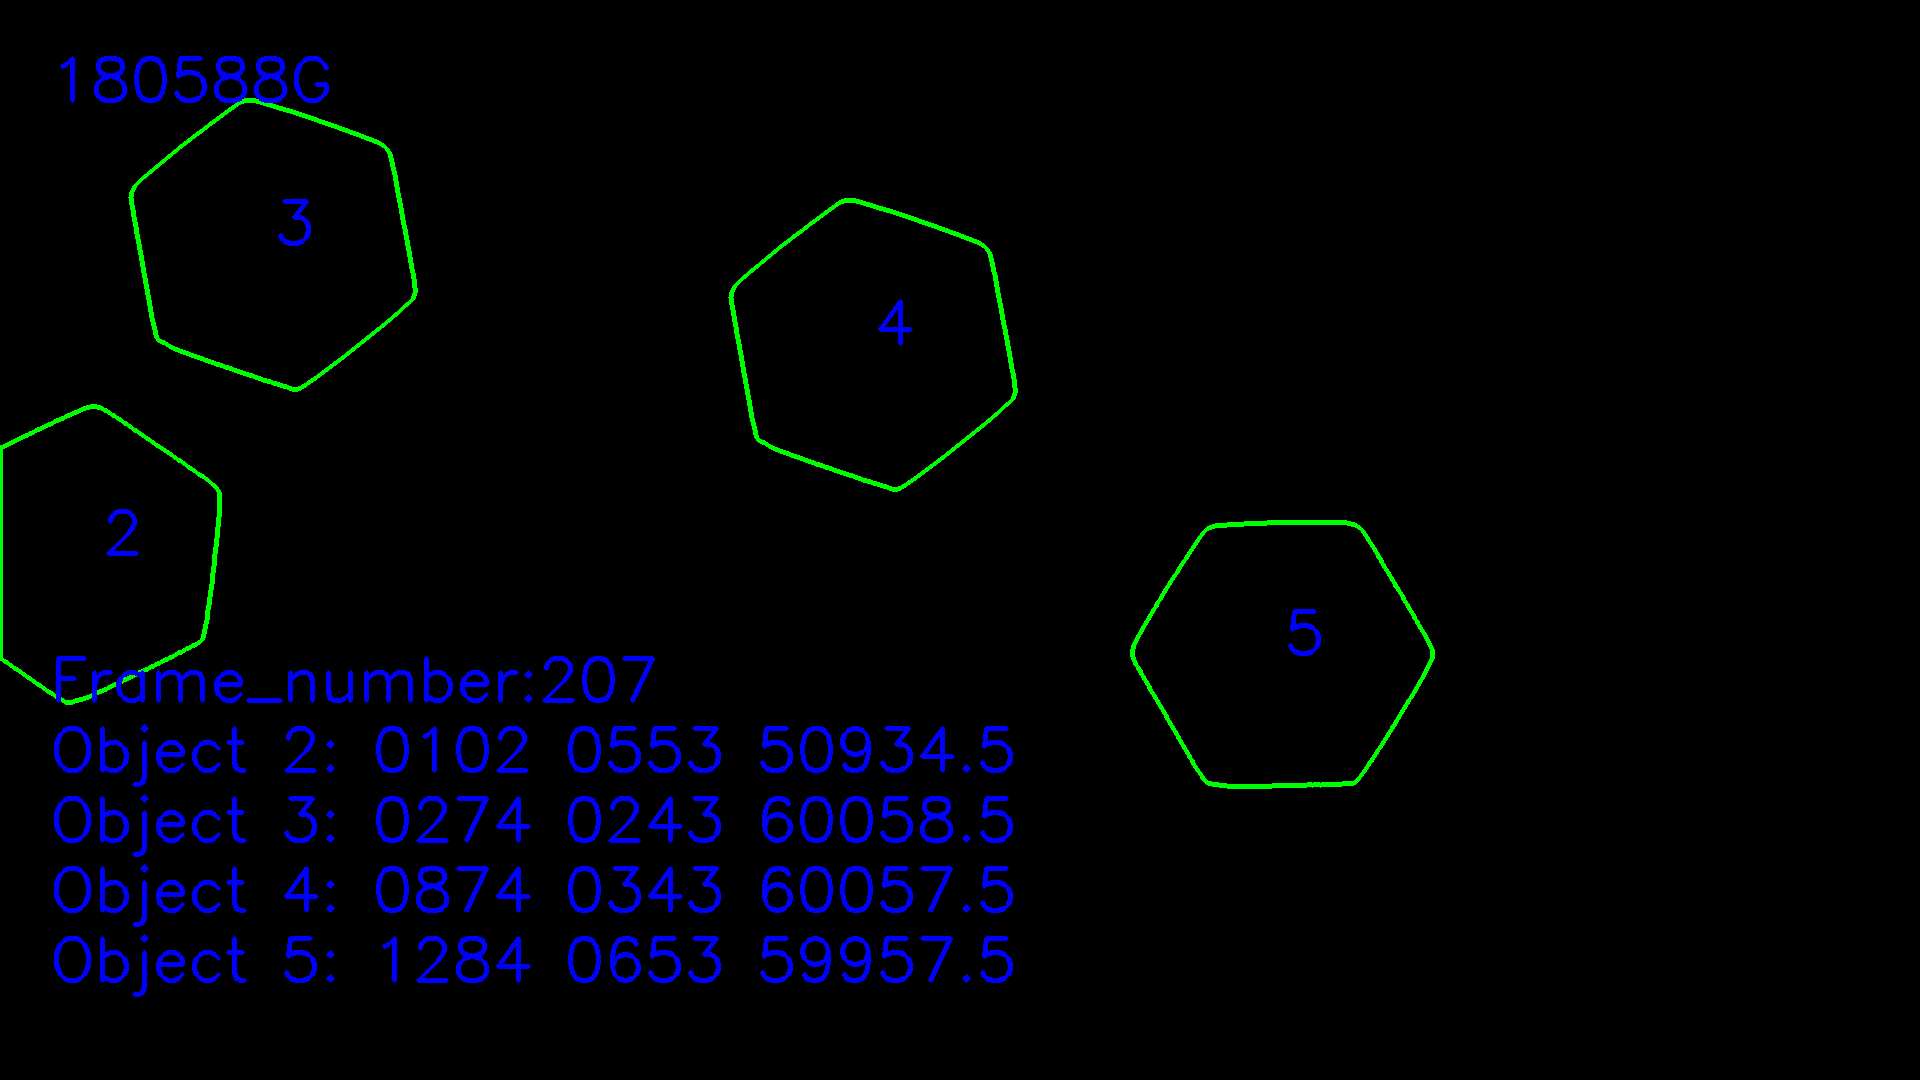

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.27400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([1.02000e+02, 5.53000e+02, 5.09345e+04, 2.00000e+00]), array([2.74000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([8.74000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.28400e+03, 6.53000e+02, 5.99575e+04, 5.00000e+00])]


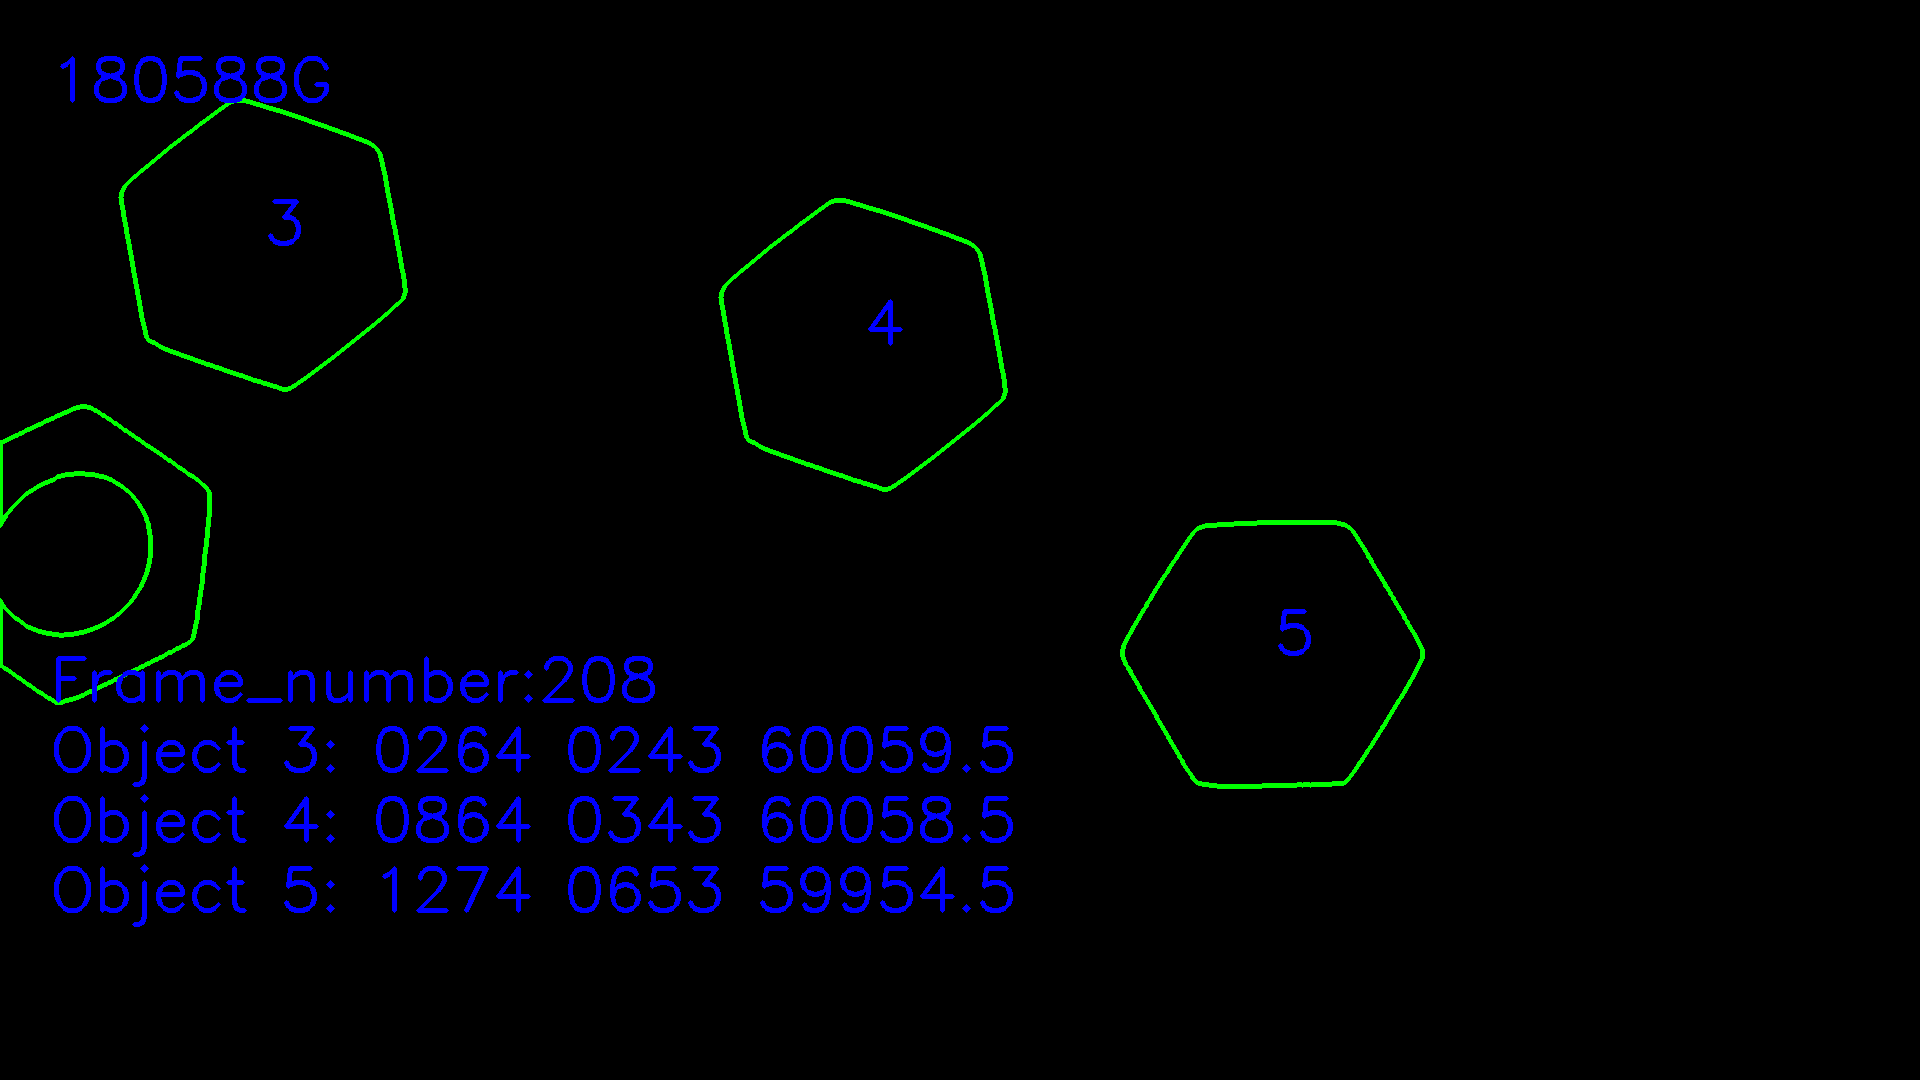

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.54000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([8.54000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.2640e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([2.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.27400e+03, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


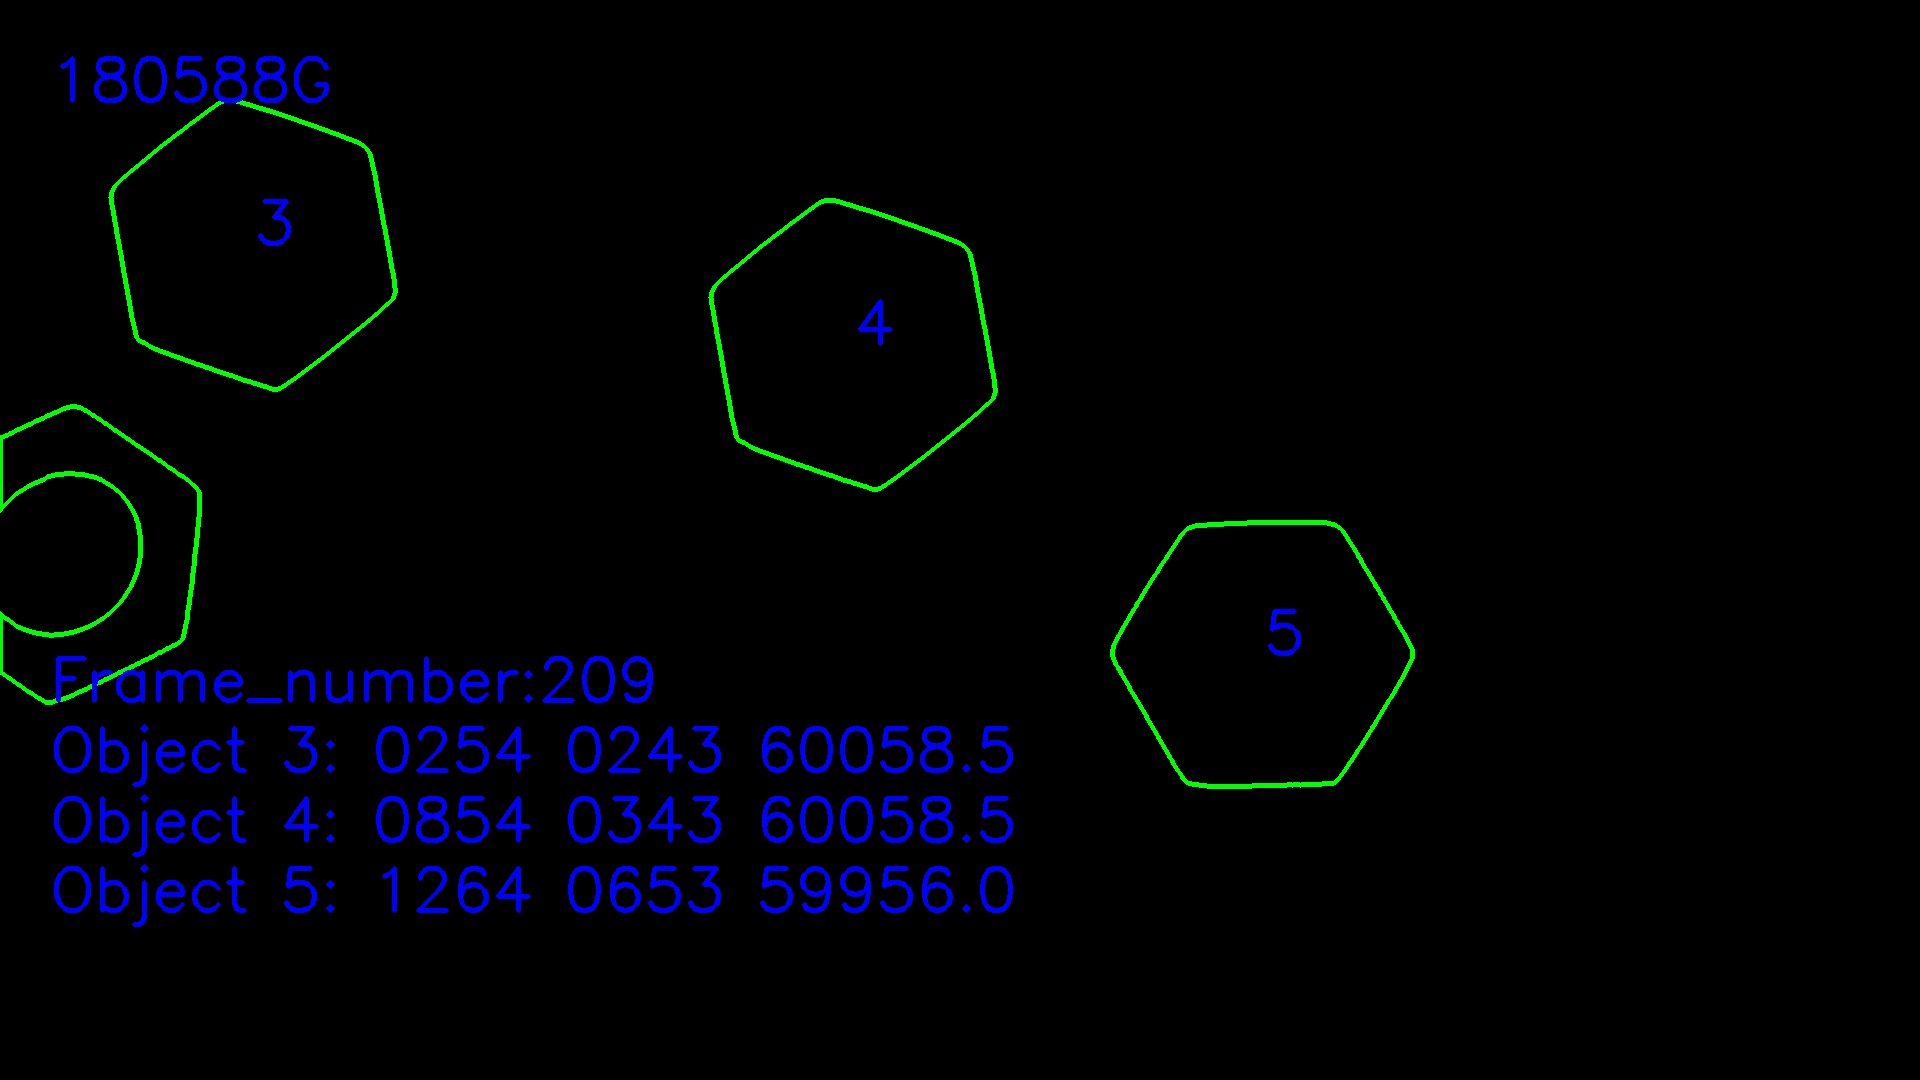

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.44000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.44000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.254e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([2.54000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([8.54000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.2640e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


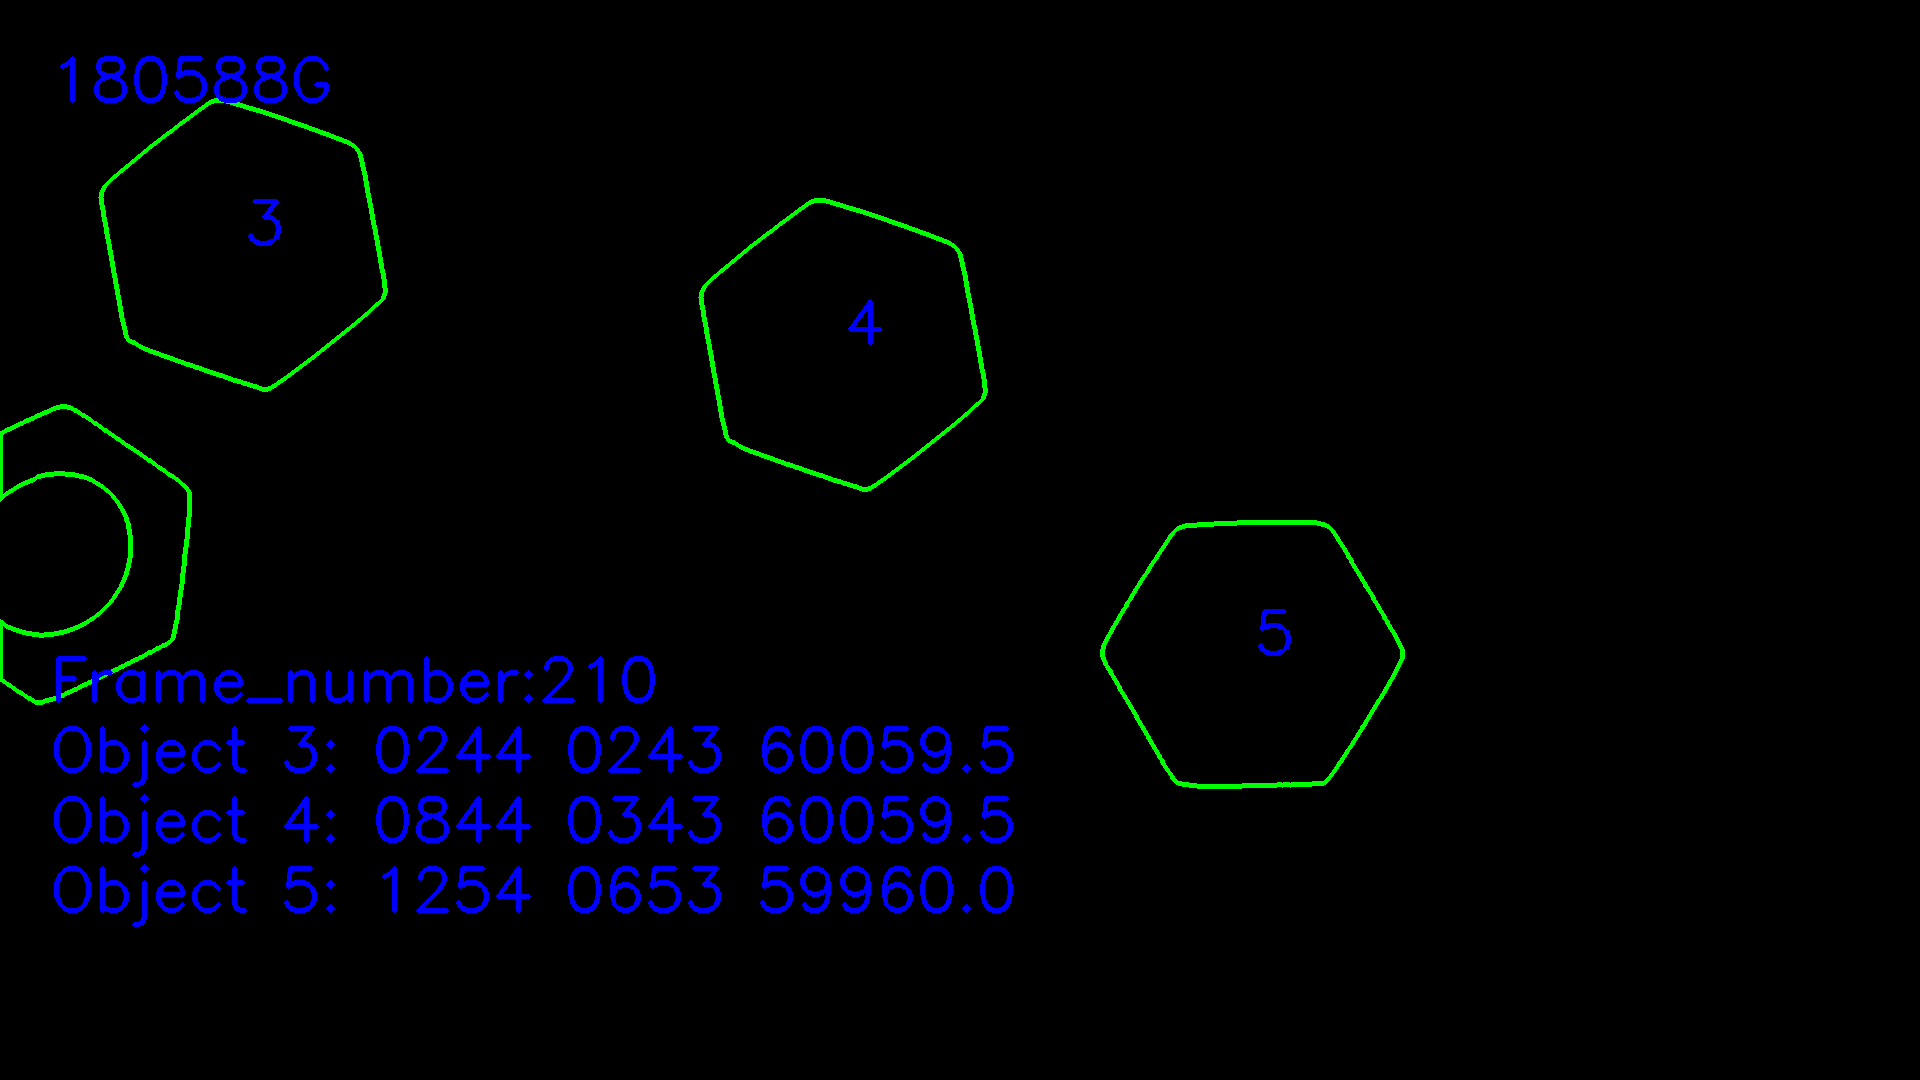

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.34000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.244e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([2.44000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.44000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.254e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


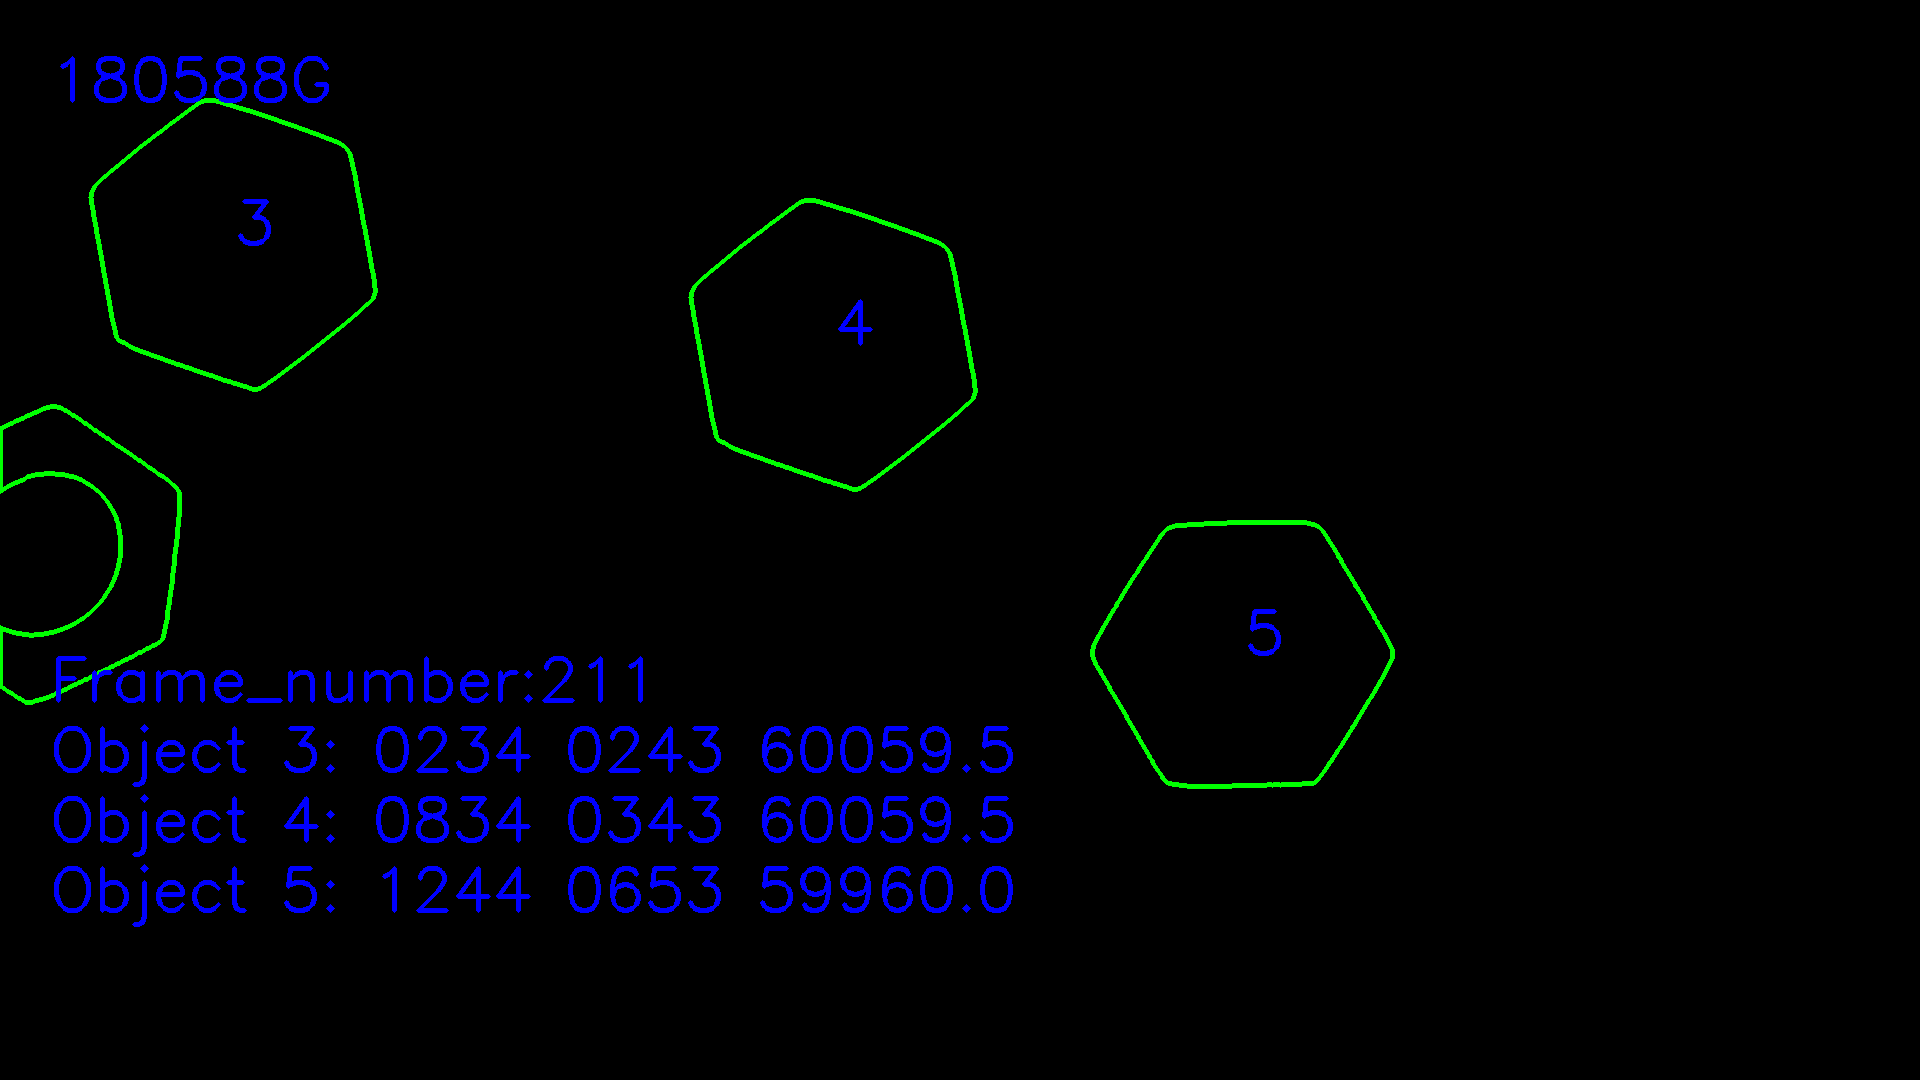

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.24000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([8.24000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.234e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([2.34000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.34000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.244e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


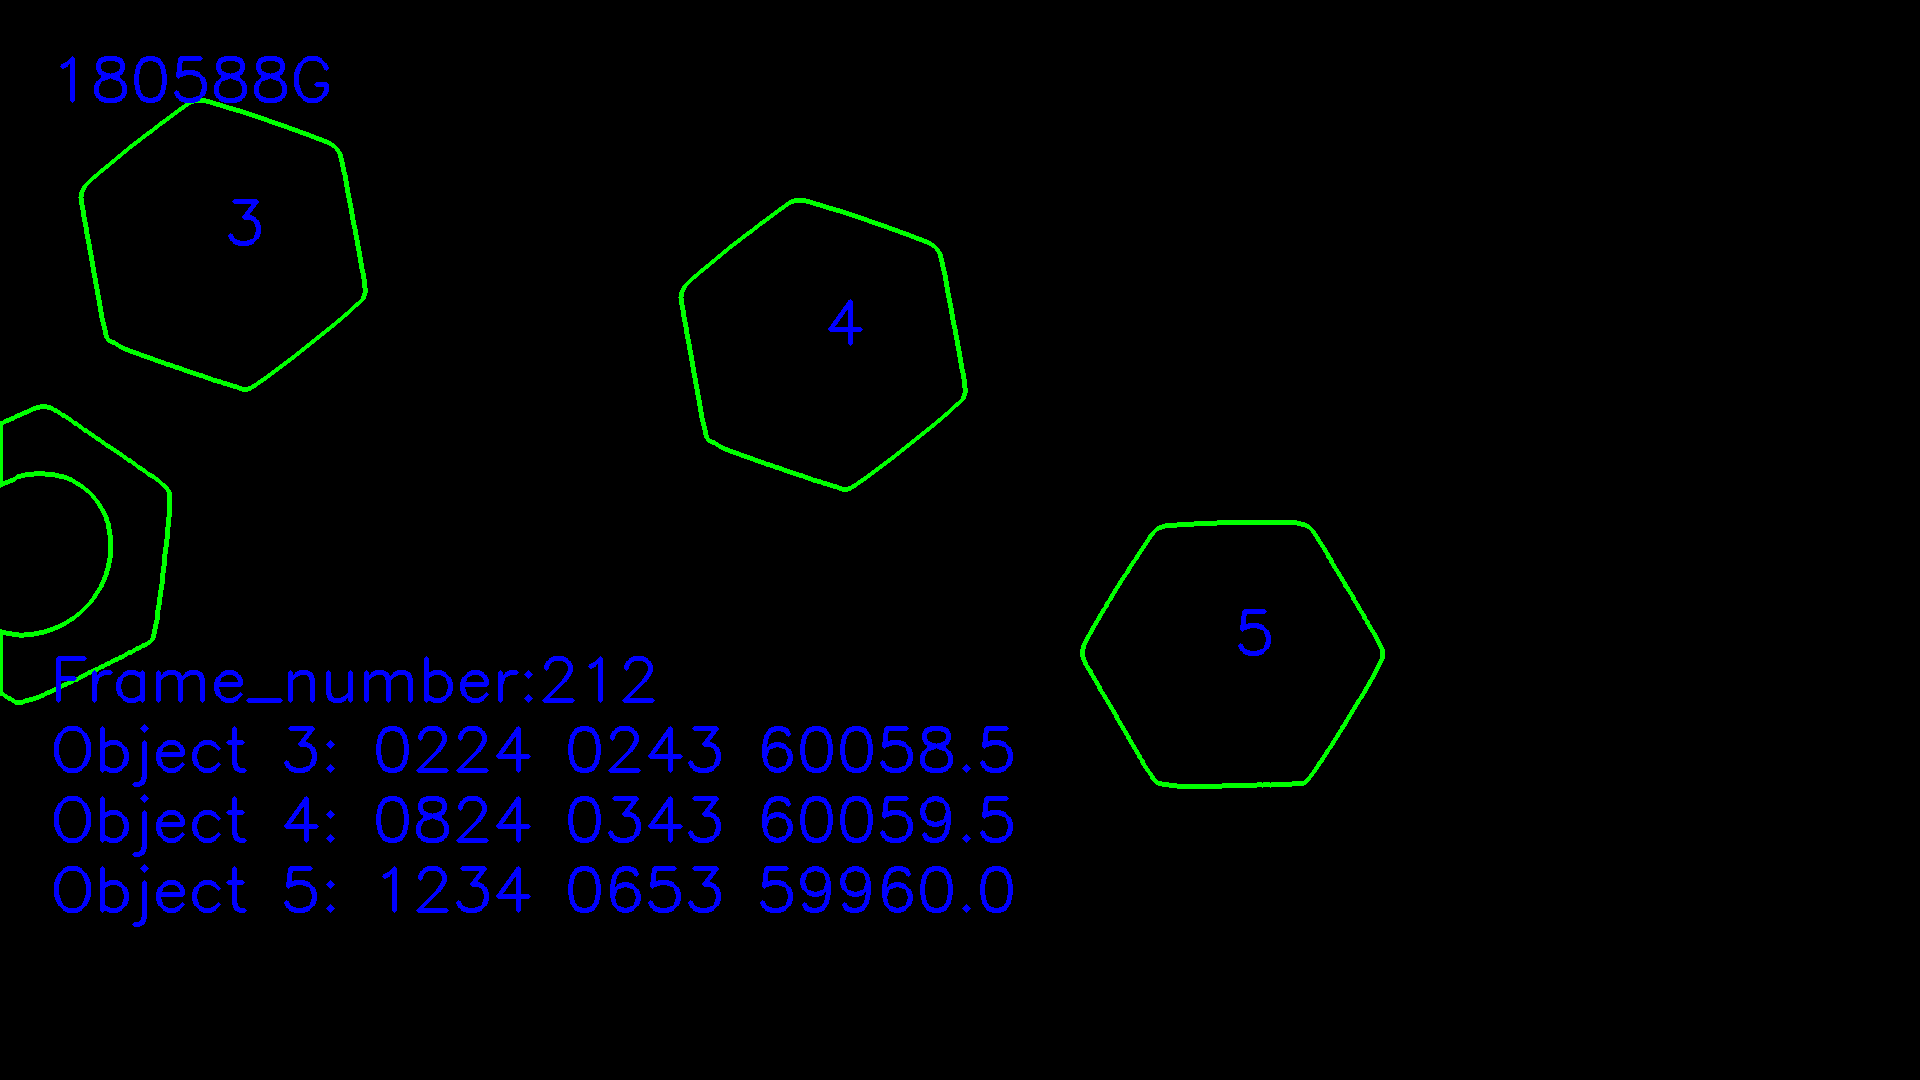

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.14000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.224e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([2.24000e+02, 2.43000e+02, 6.00585e+04, 3.00000e+00]), array([8.24000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.234e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


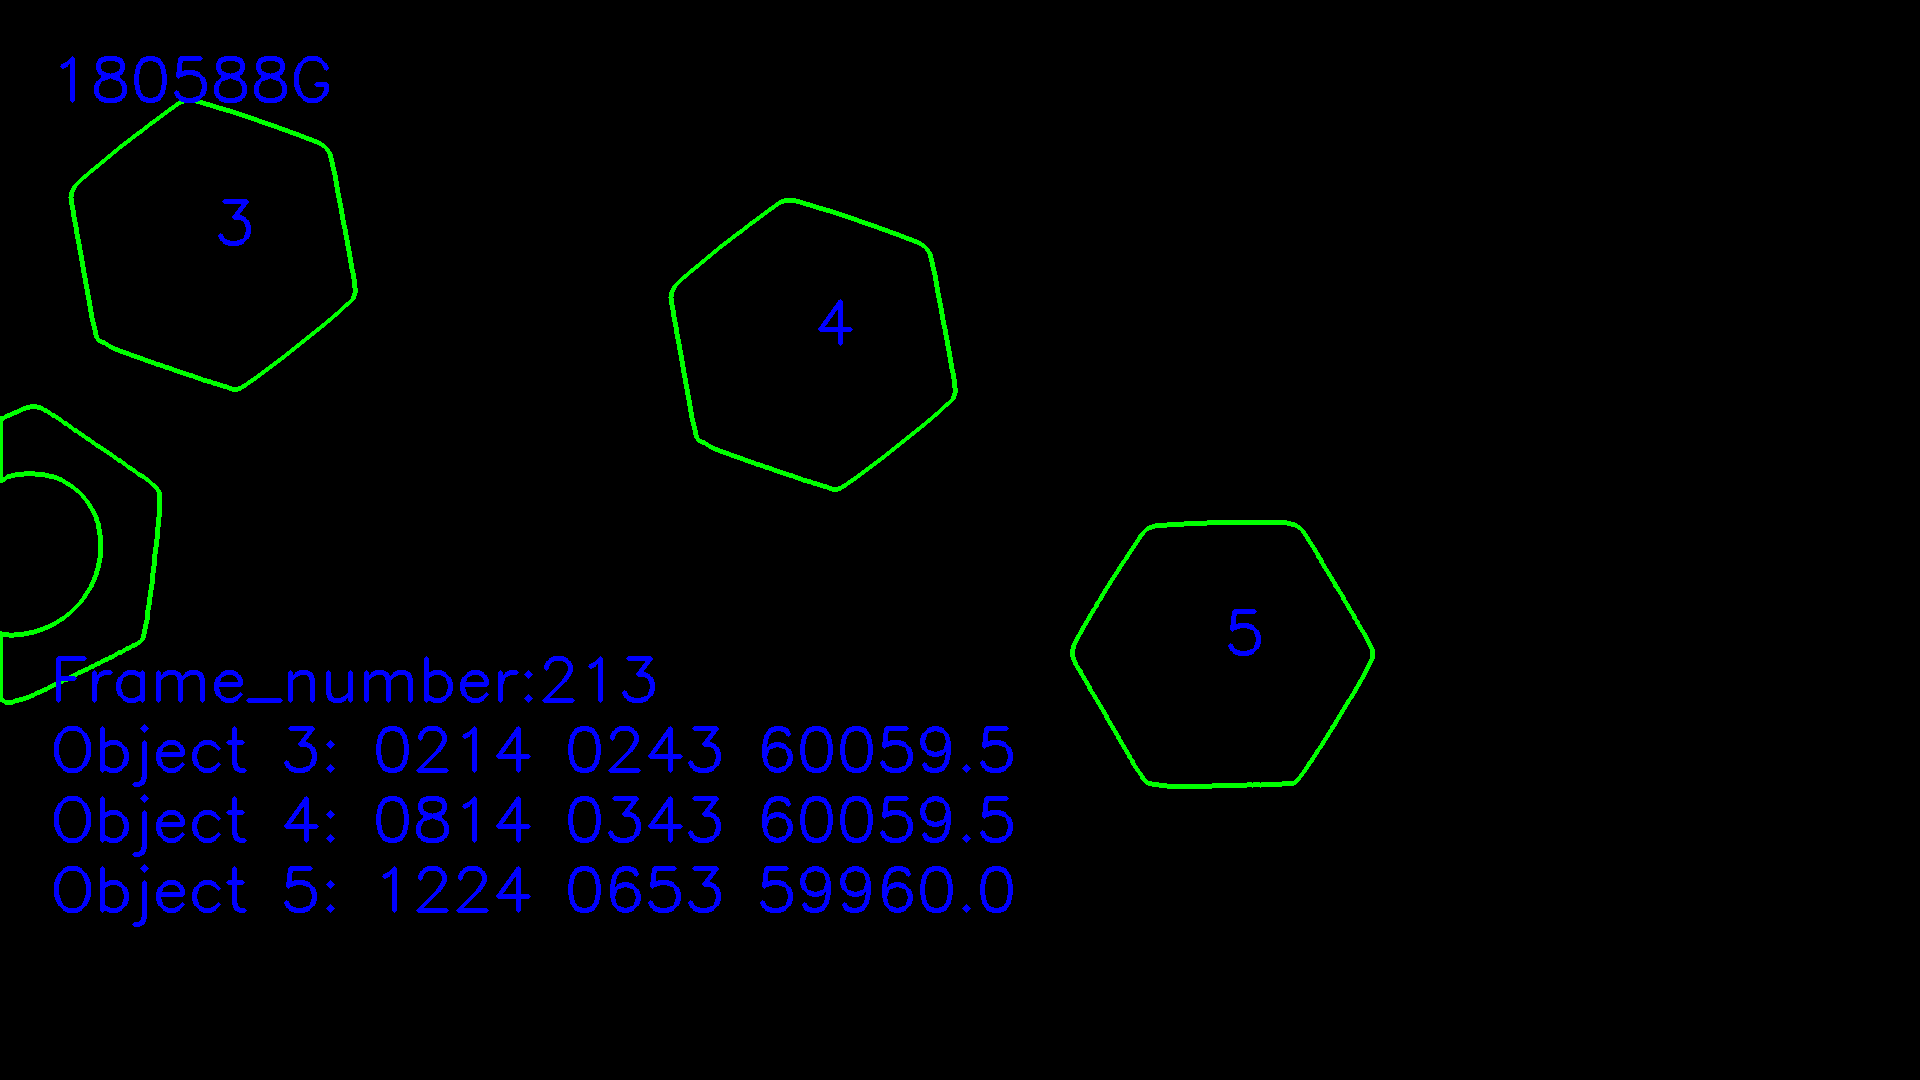

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.214e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([2.14000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.224e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


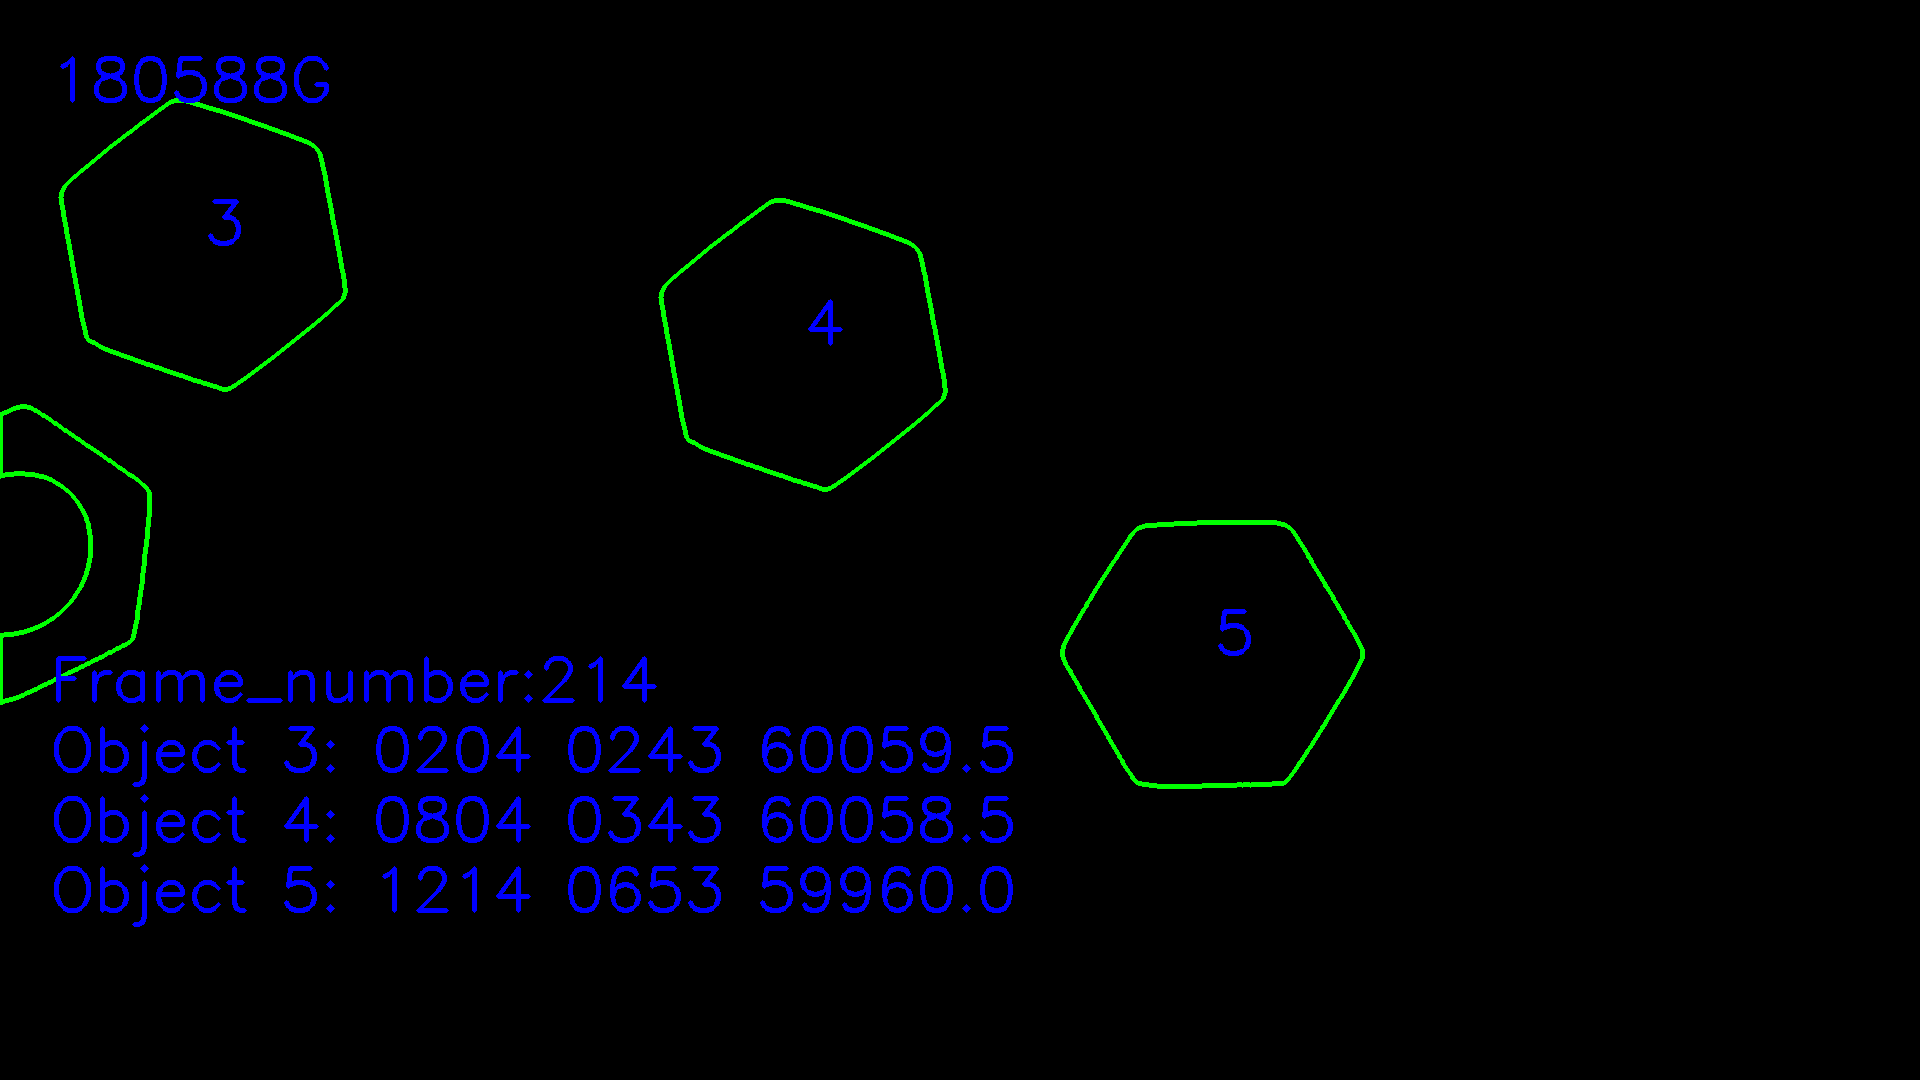

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.204e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([2.04000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([8.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.214e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


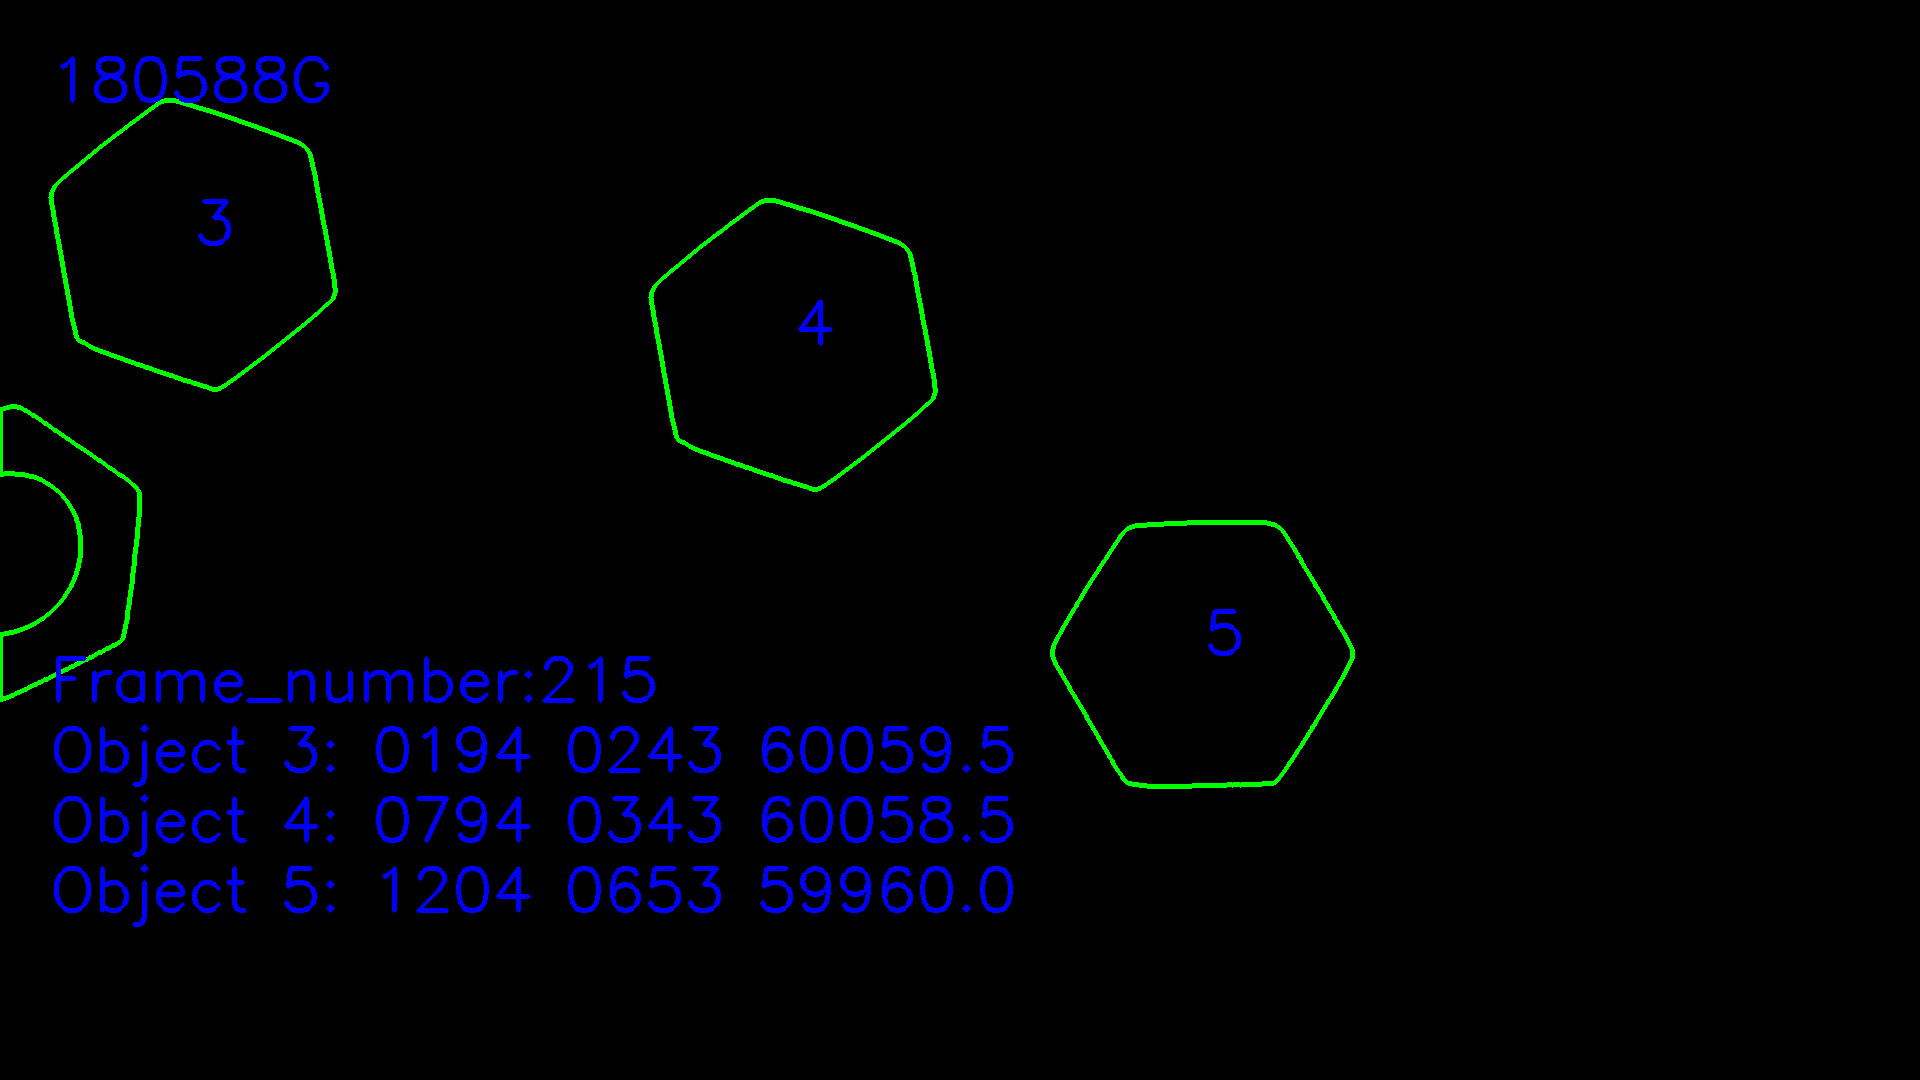

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.194e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([1.94000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.204e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


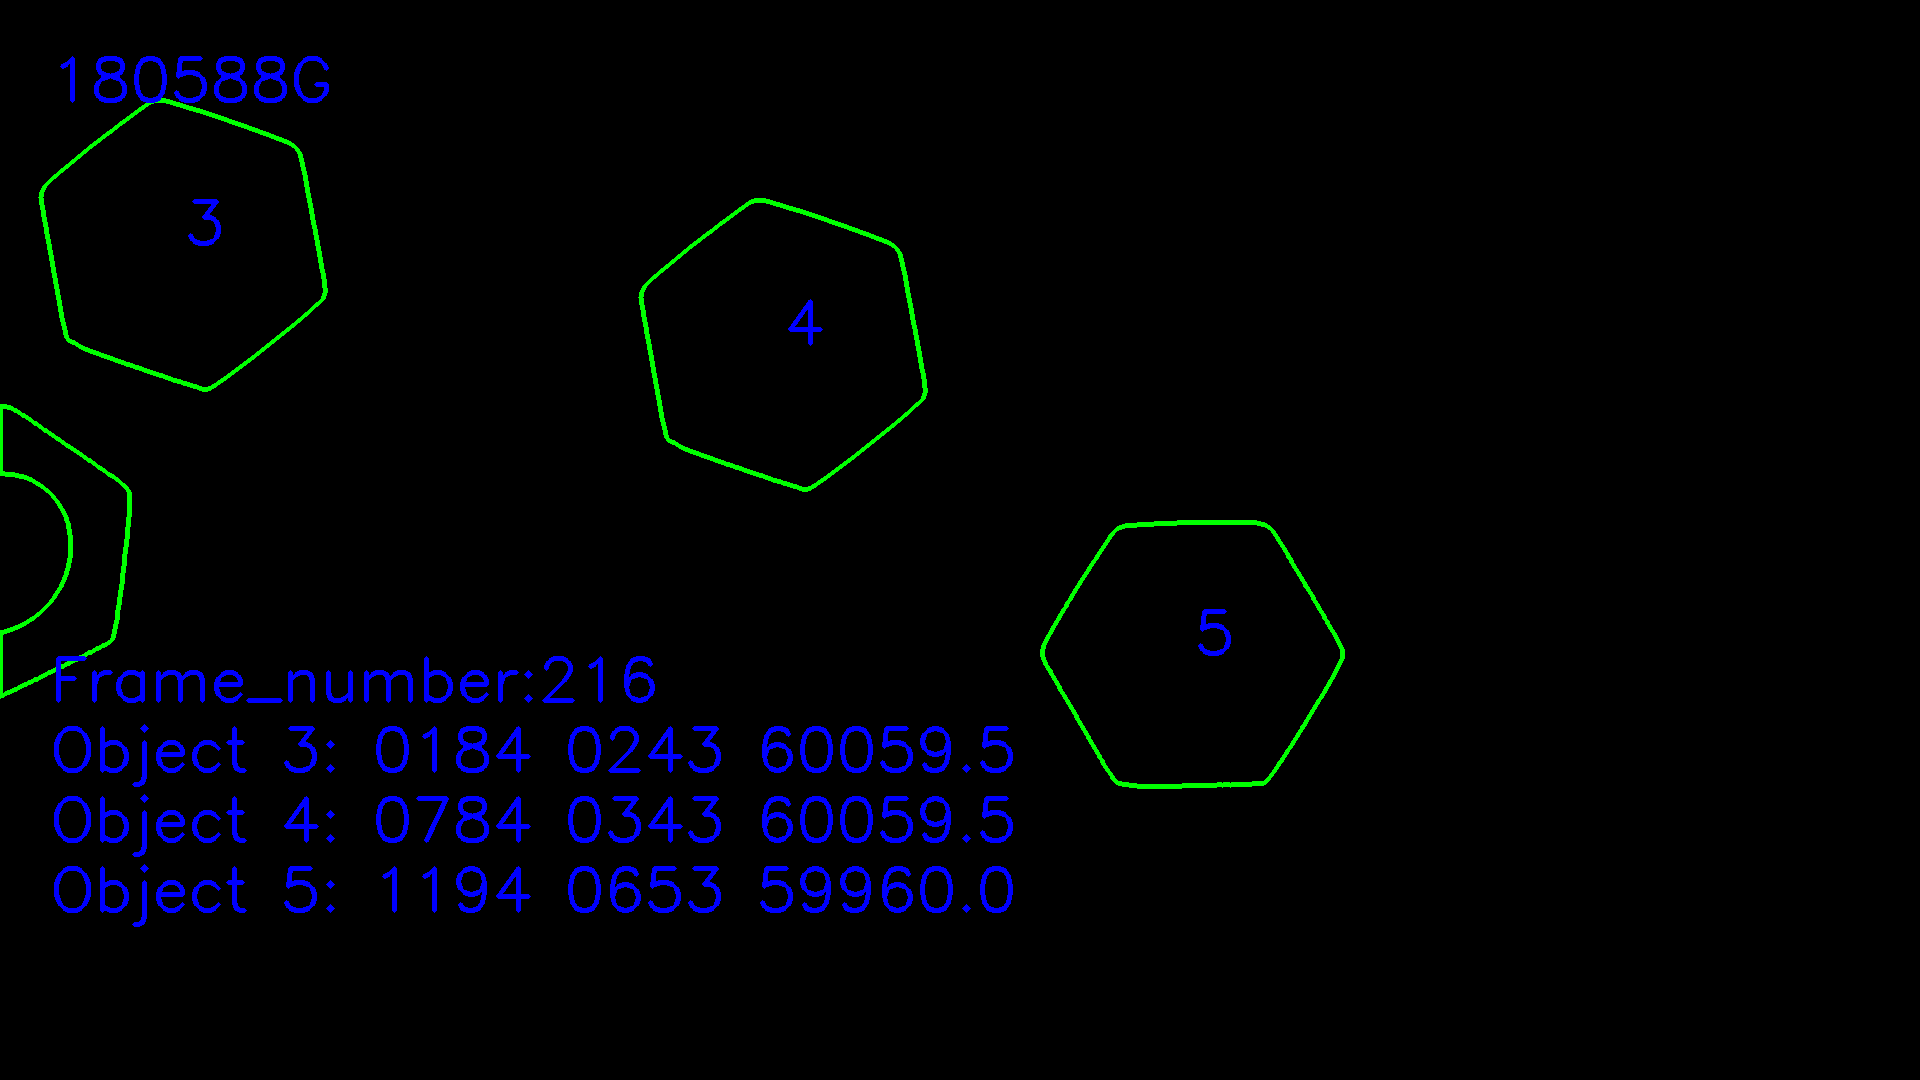

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.74000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.74000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.184e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([1.84000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.194e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


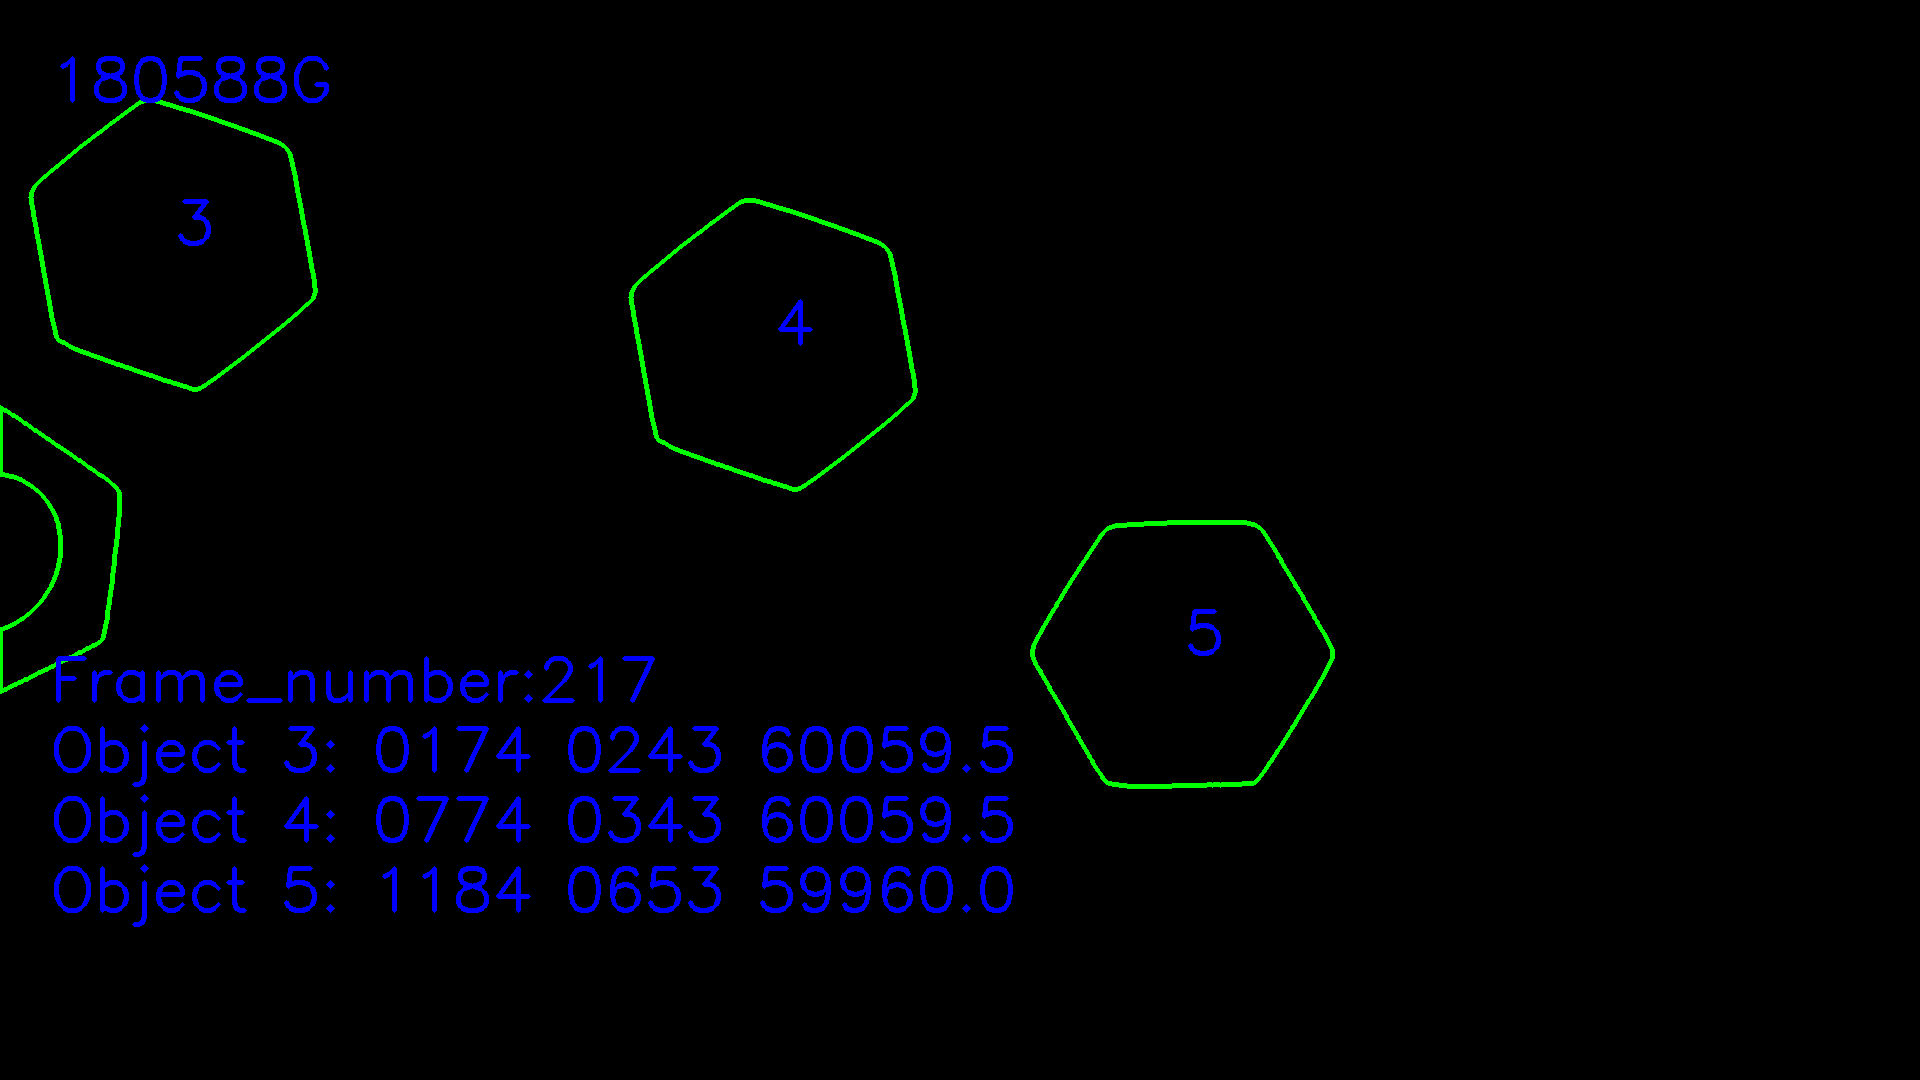

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.64000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.174e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([1.74000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.74000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.184e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


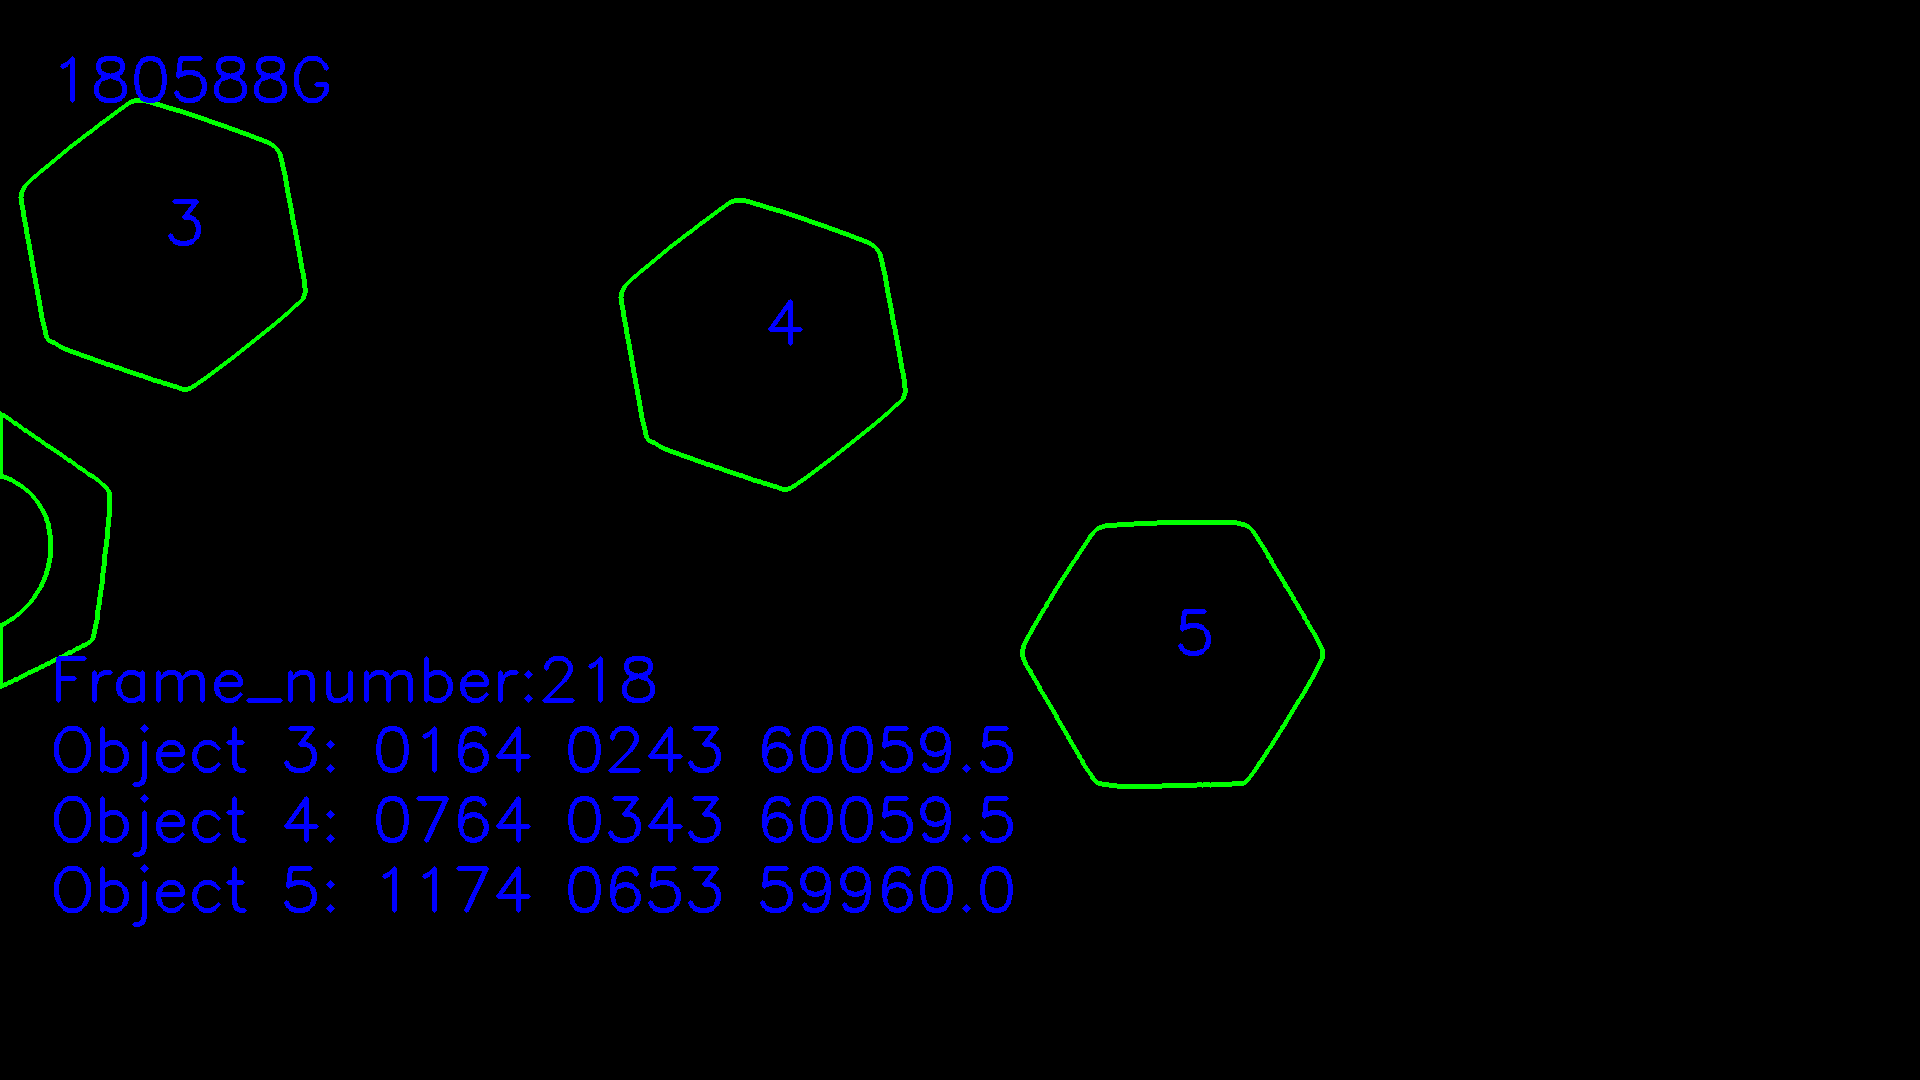

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.54000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1640e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([1.64000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.64000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.174e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


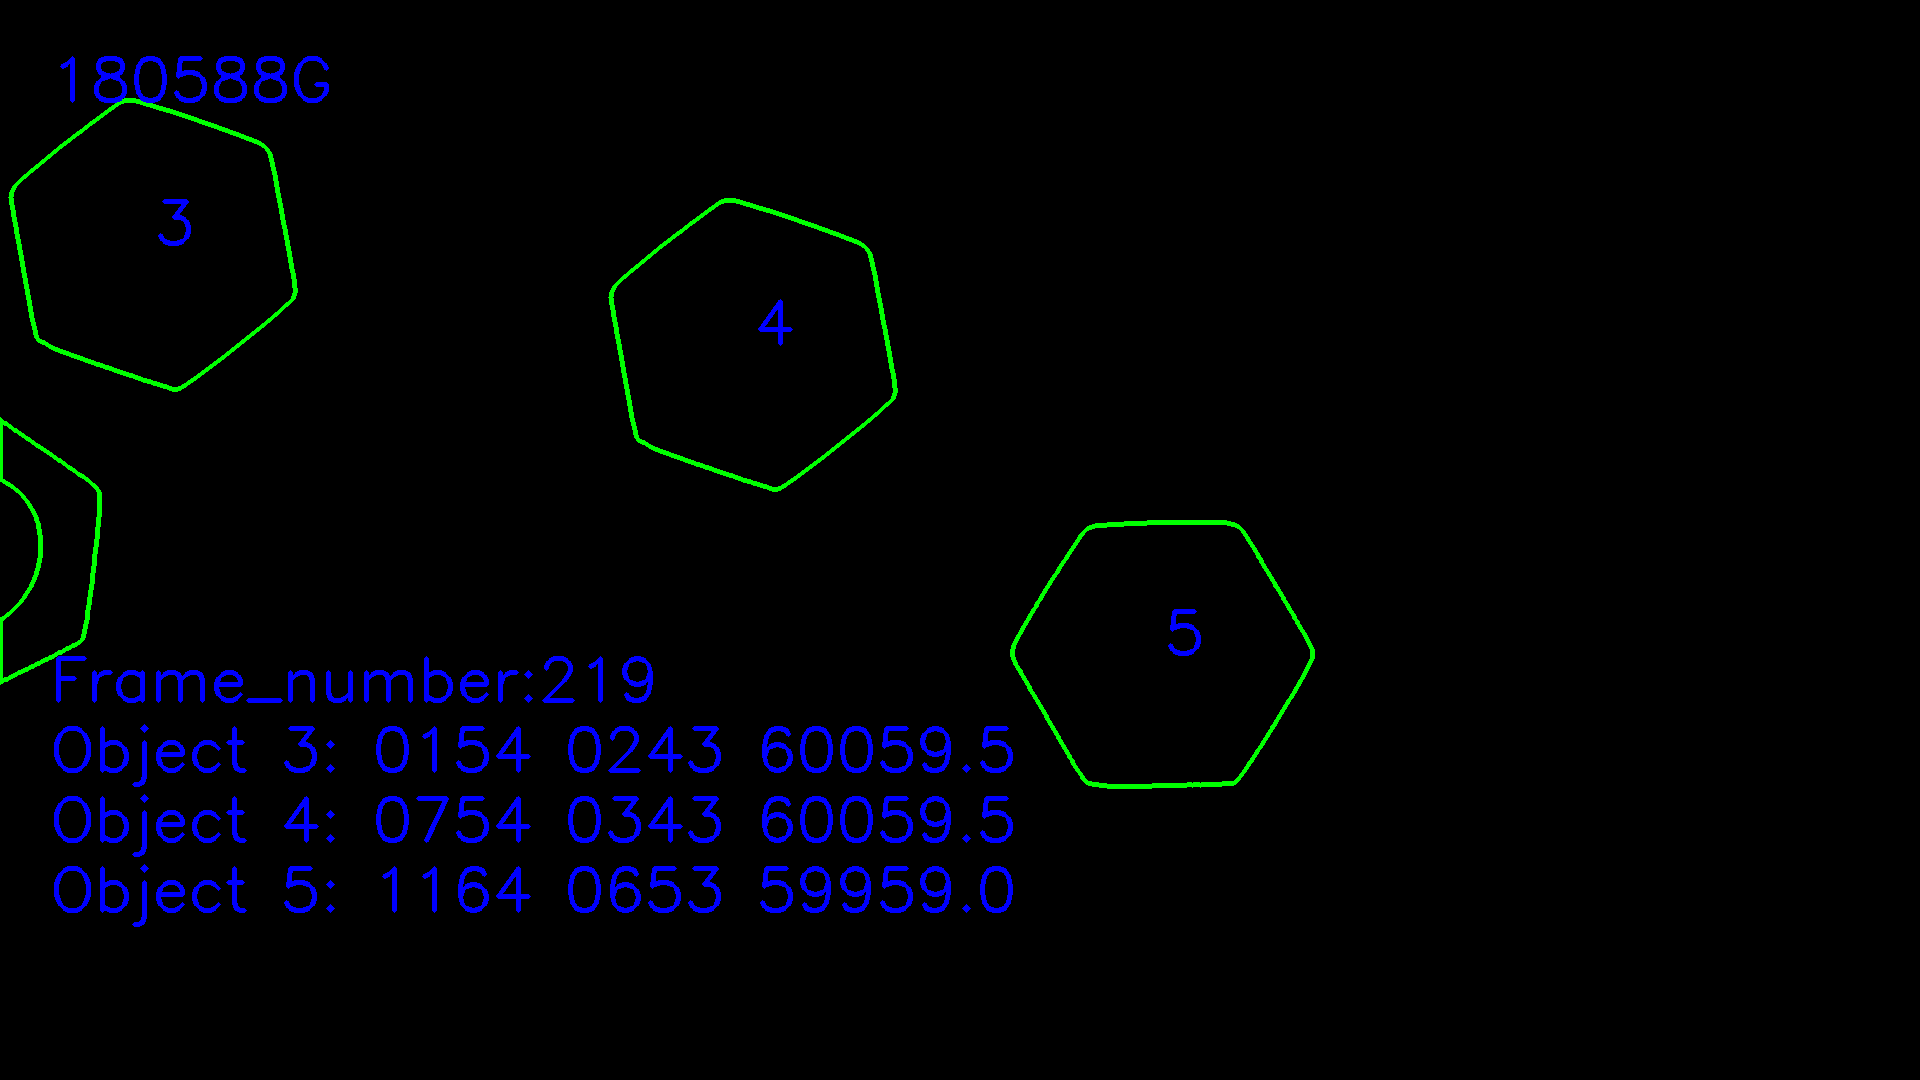

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.44000e+02, 2.43000e+02, 6.00705e+04, 3.00000e+00]), array([7.44000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.154e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([1.54000e+02, 2.43000e+02, 6.00595e+04, 3.00000e+00]), array([7.54000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1640e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


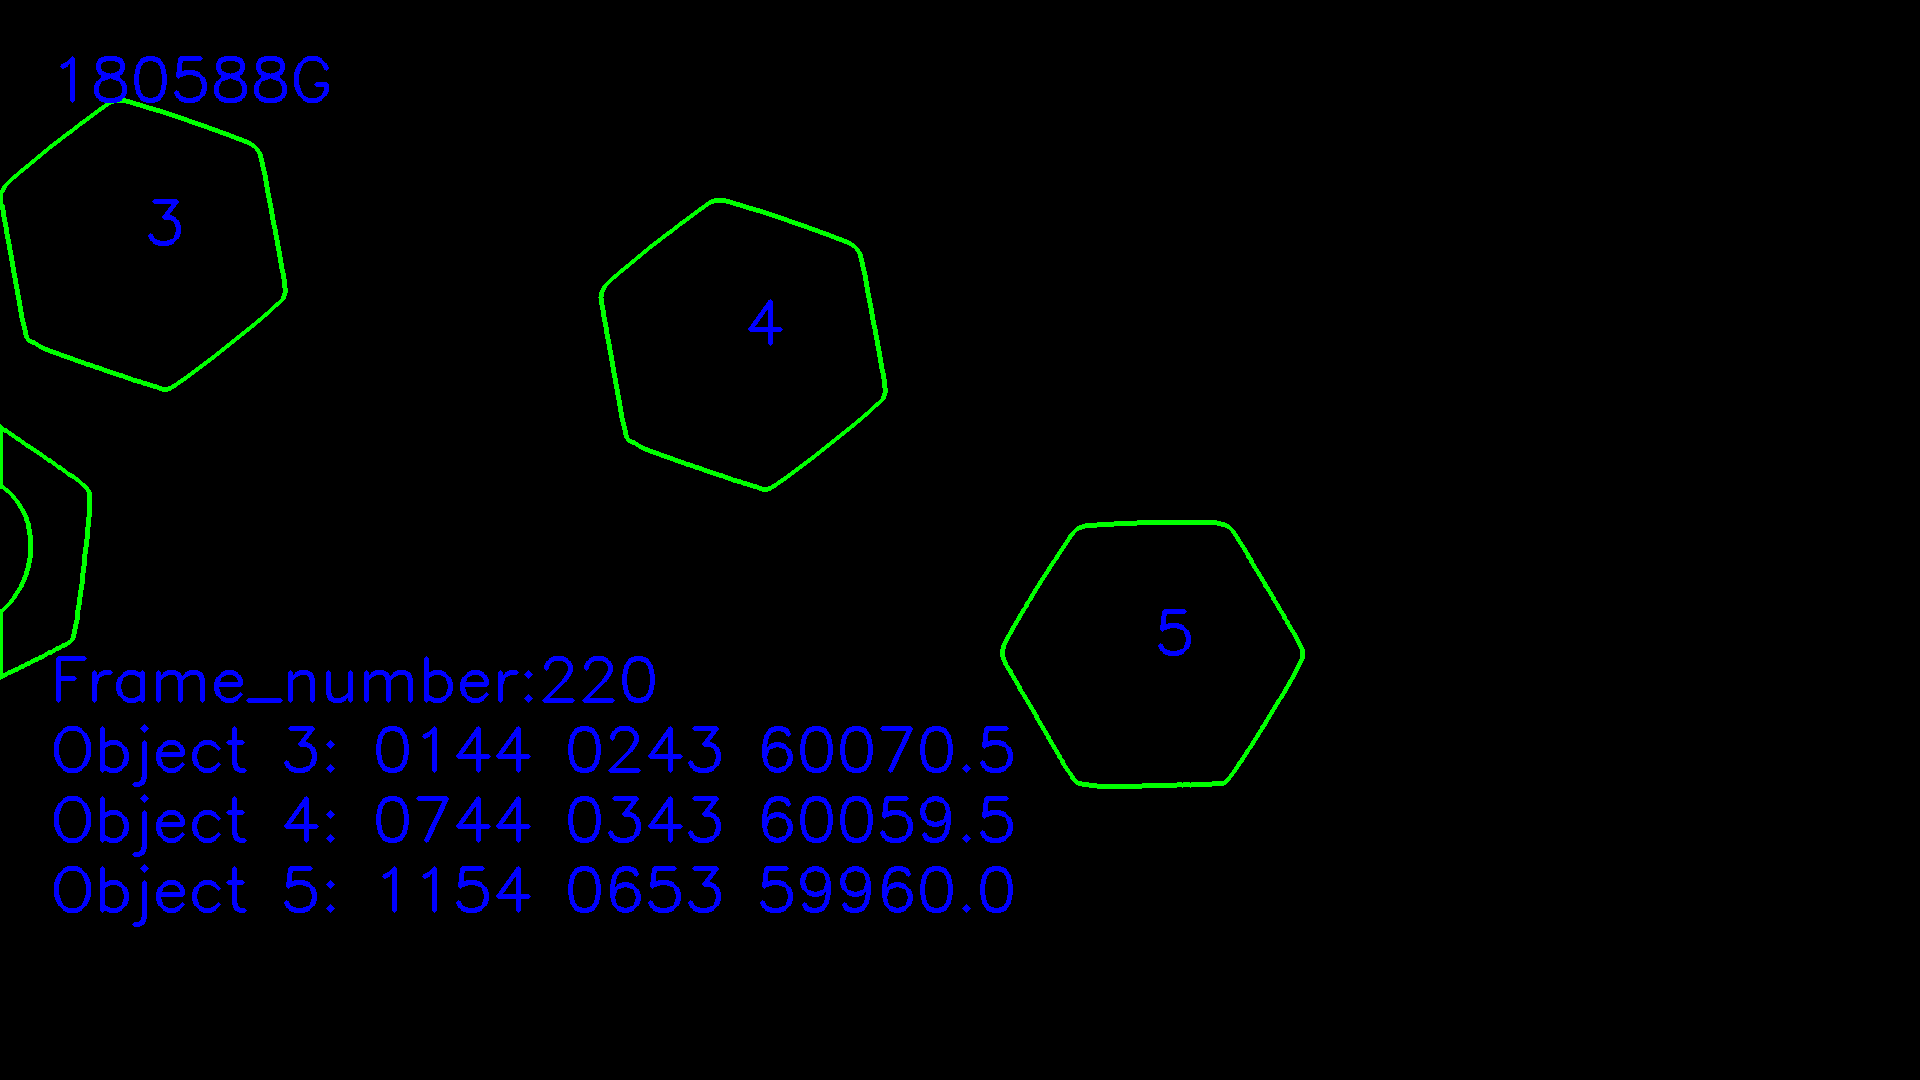

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.35000e+02, 2.43000e+02, 5.96875e+04, 3.00000e+00]), array([7.34000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1440e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([1.44000e+02, 2.43000e+02, 6.00705e+04, 3.00000e+00]), array([7.44000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.154e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


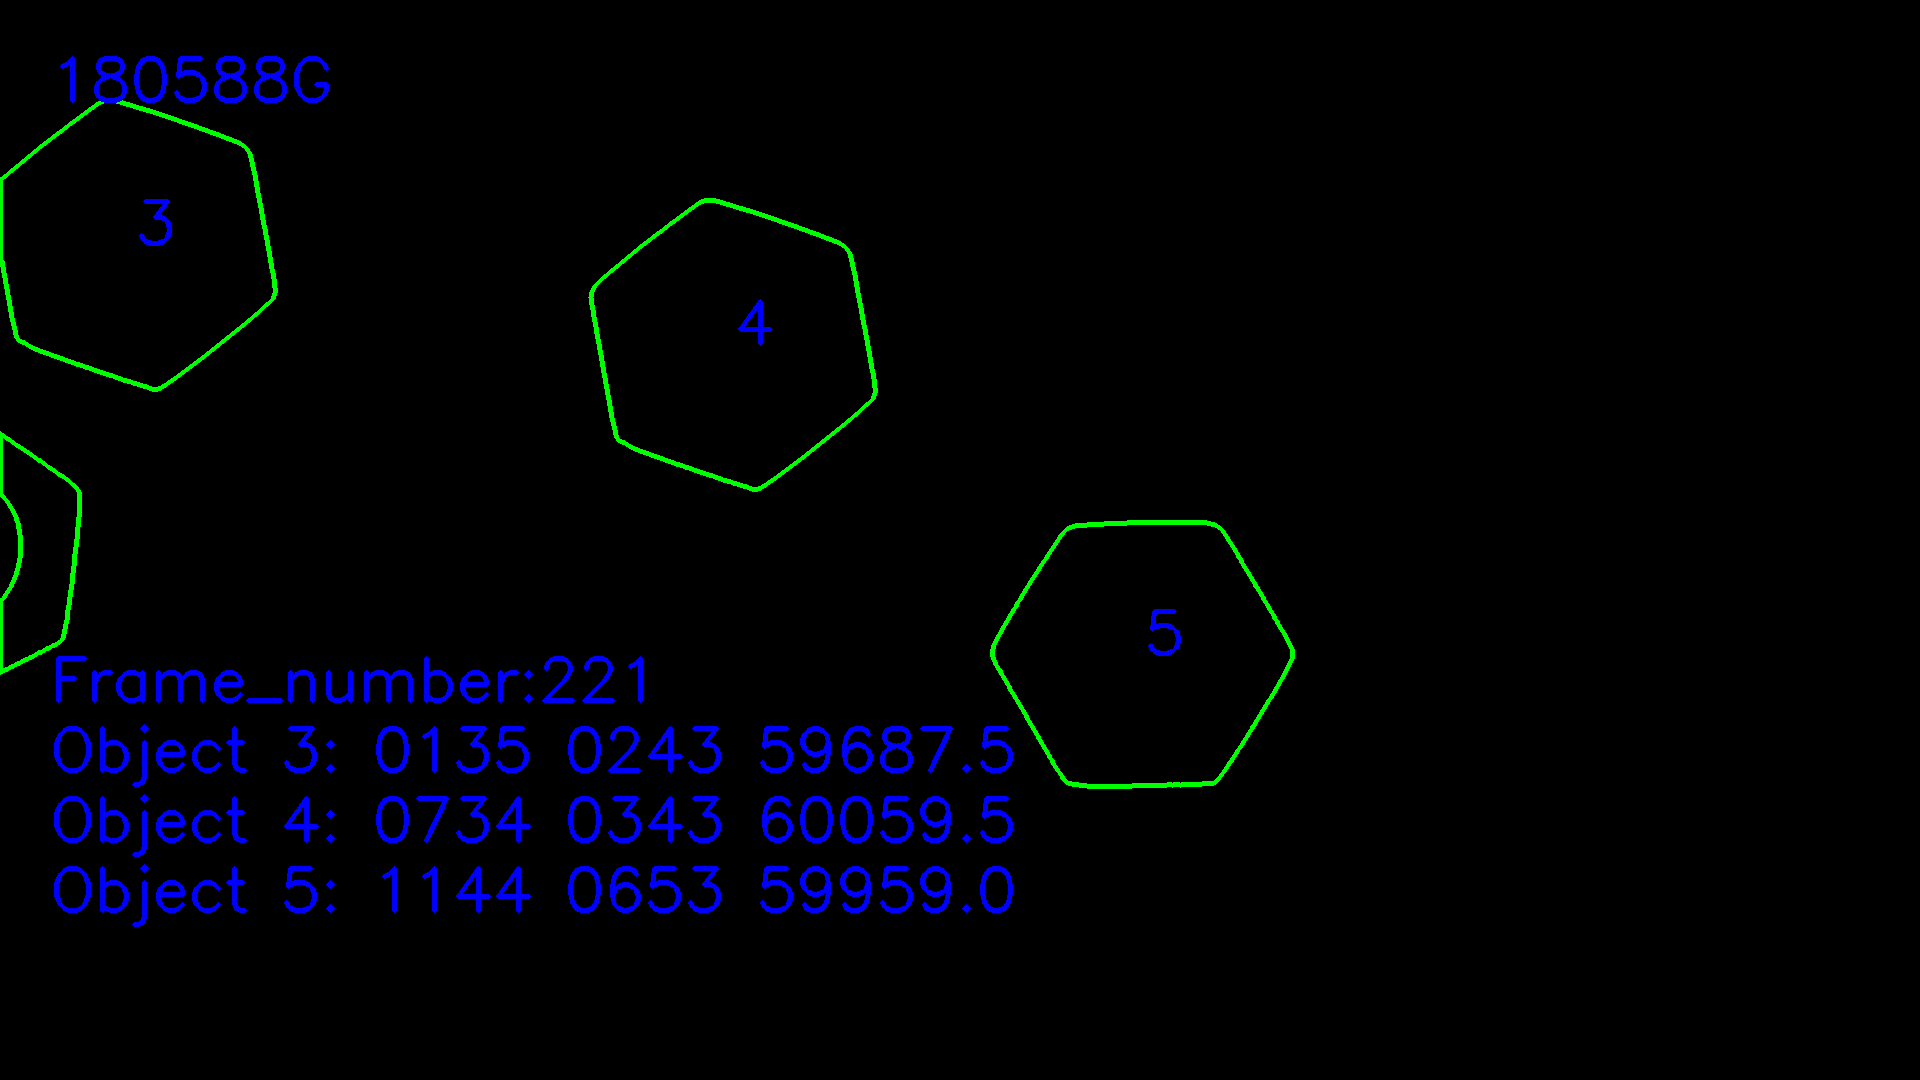

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.270e+02, 2.430e+02, 5.864e+04, 3.000e+00]), array([7.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.1340e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([1.35000e+02, 2.43000e+02, 5.96875e+04, 3.00000e+00]), array([7.34000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1440e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


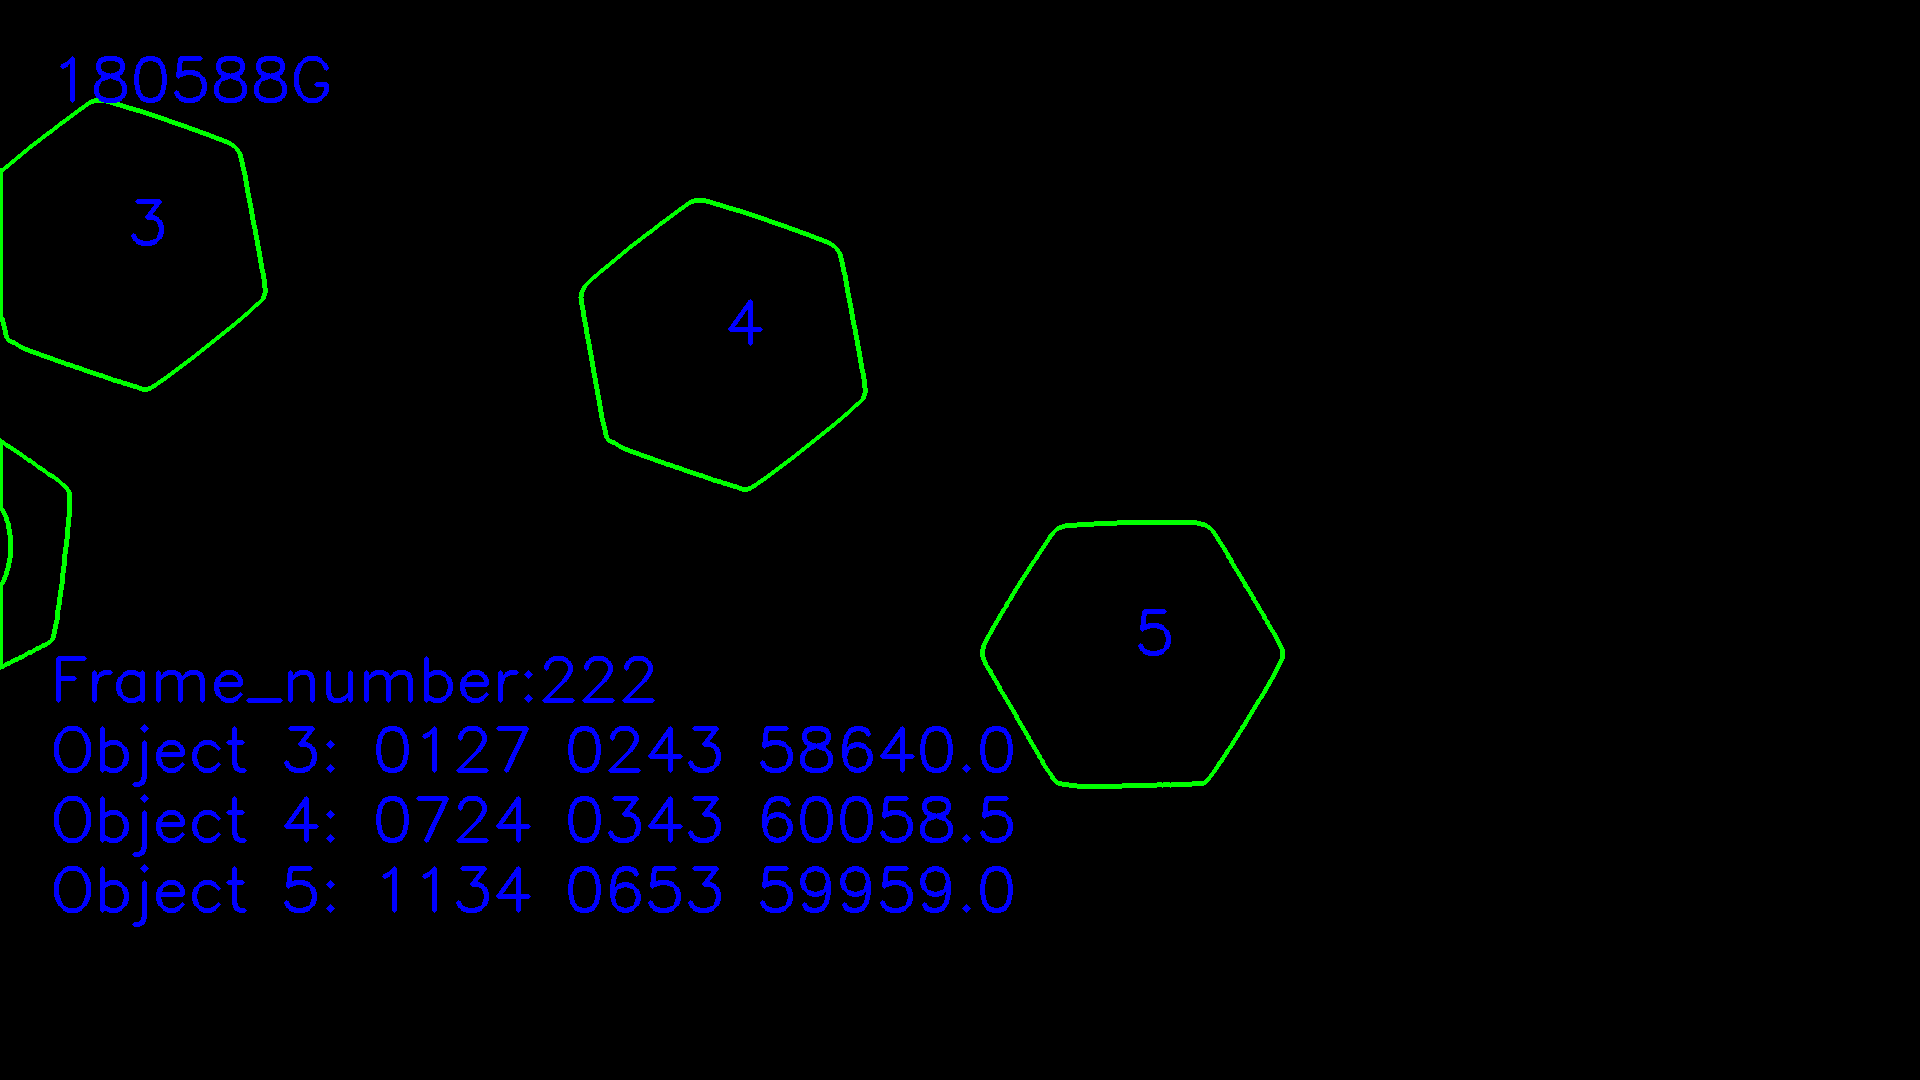

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.200e+02, 2.430e+02, 5.701e+04, 3.000e+00]), array([7.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1240e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([1.270e+02, 2.430e+02, 5.864e+04, 3.000e+00]), array([7.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([1.1340e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


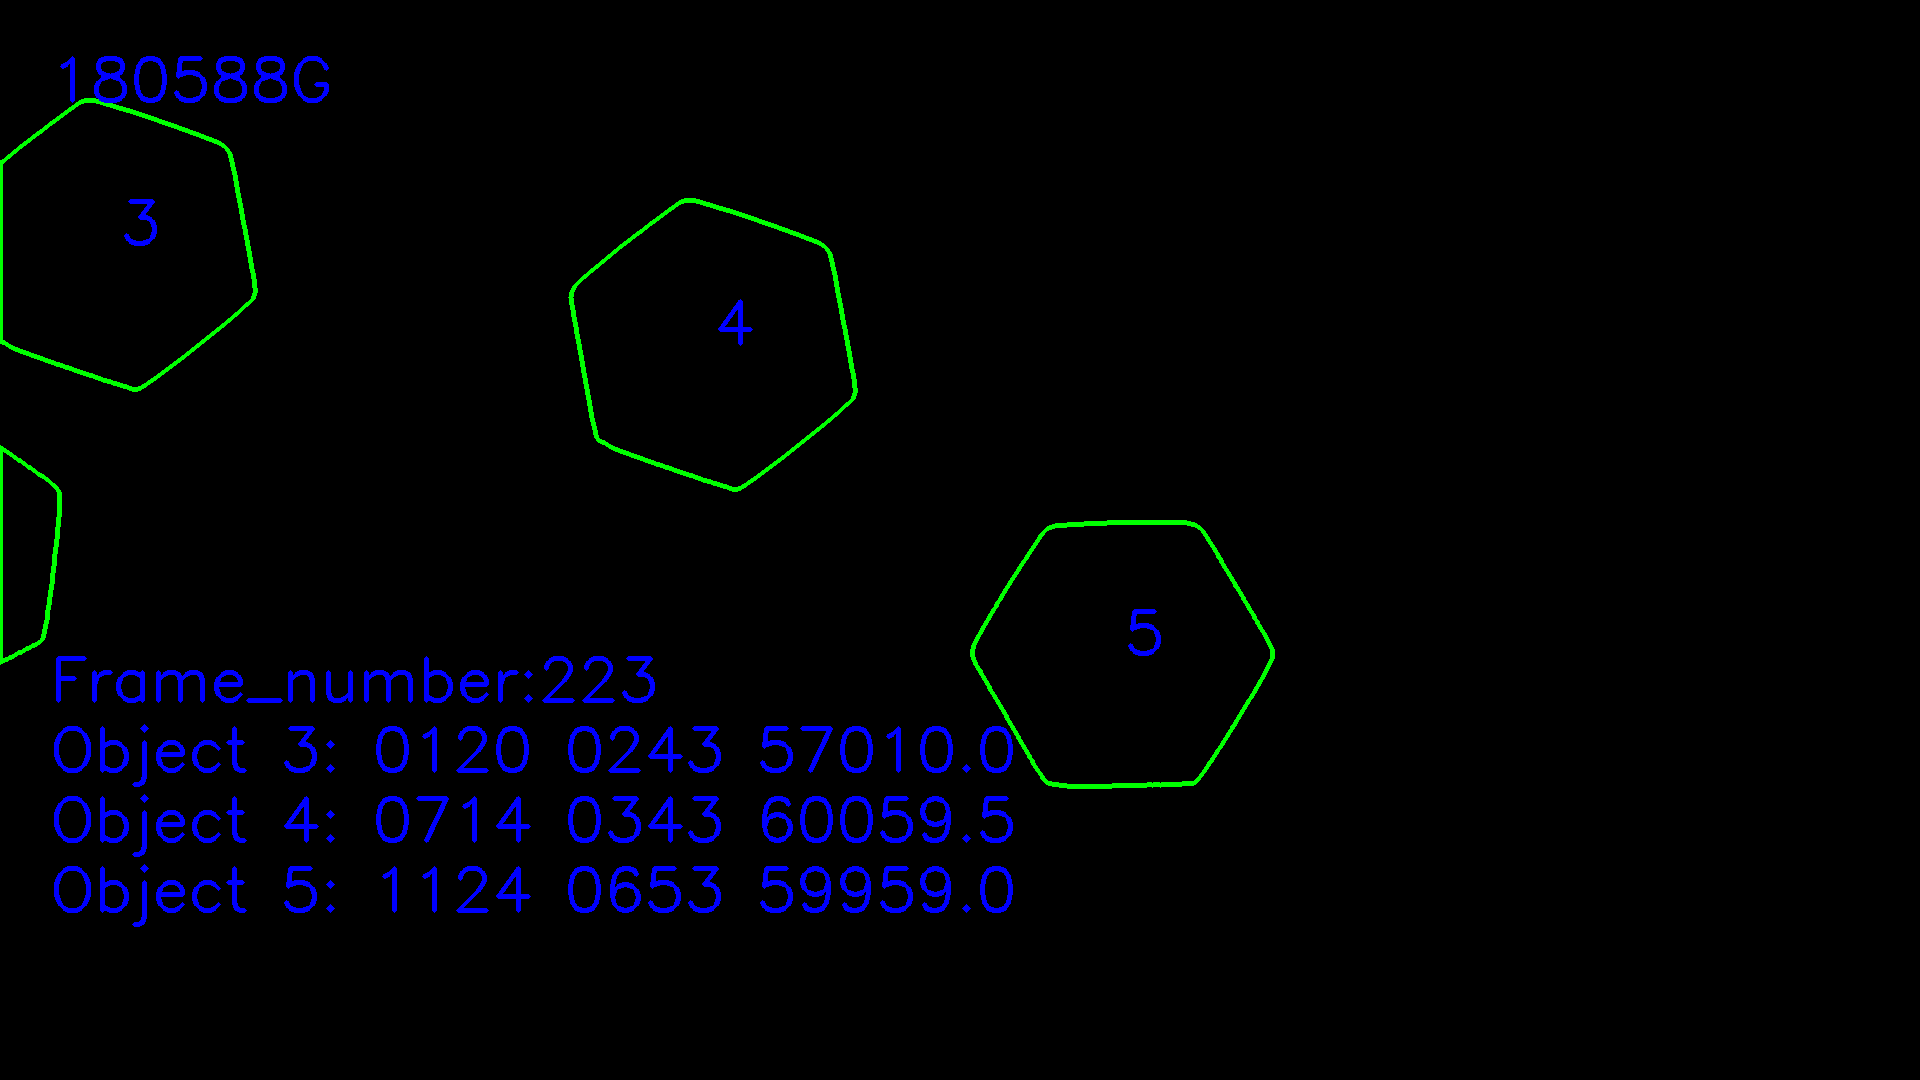

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.1400e+02, 2.4300e+02, 5.5167e+04, 3.0000e+00]), array([7.04000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1140e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([1.200e+02, 2.430e+02, 5.701e+04, 3.000e+00]), array([7.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1240e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


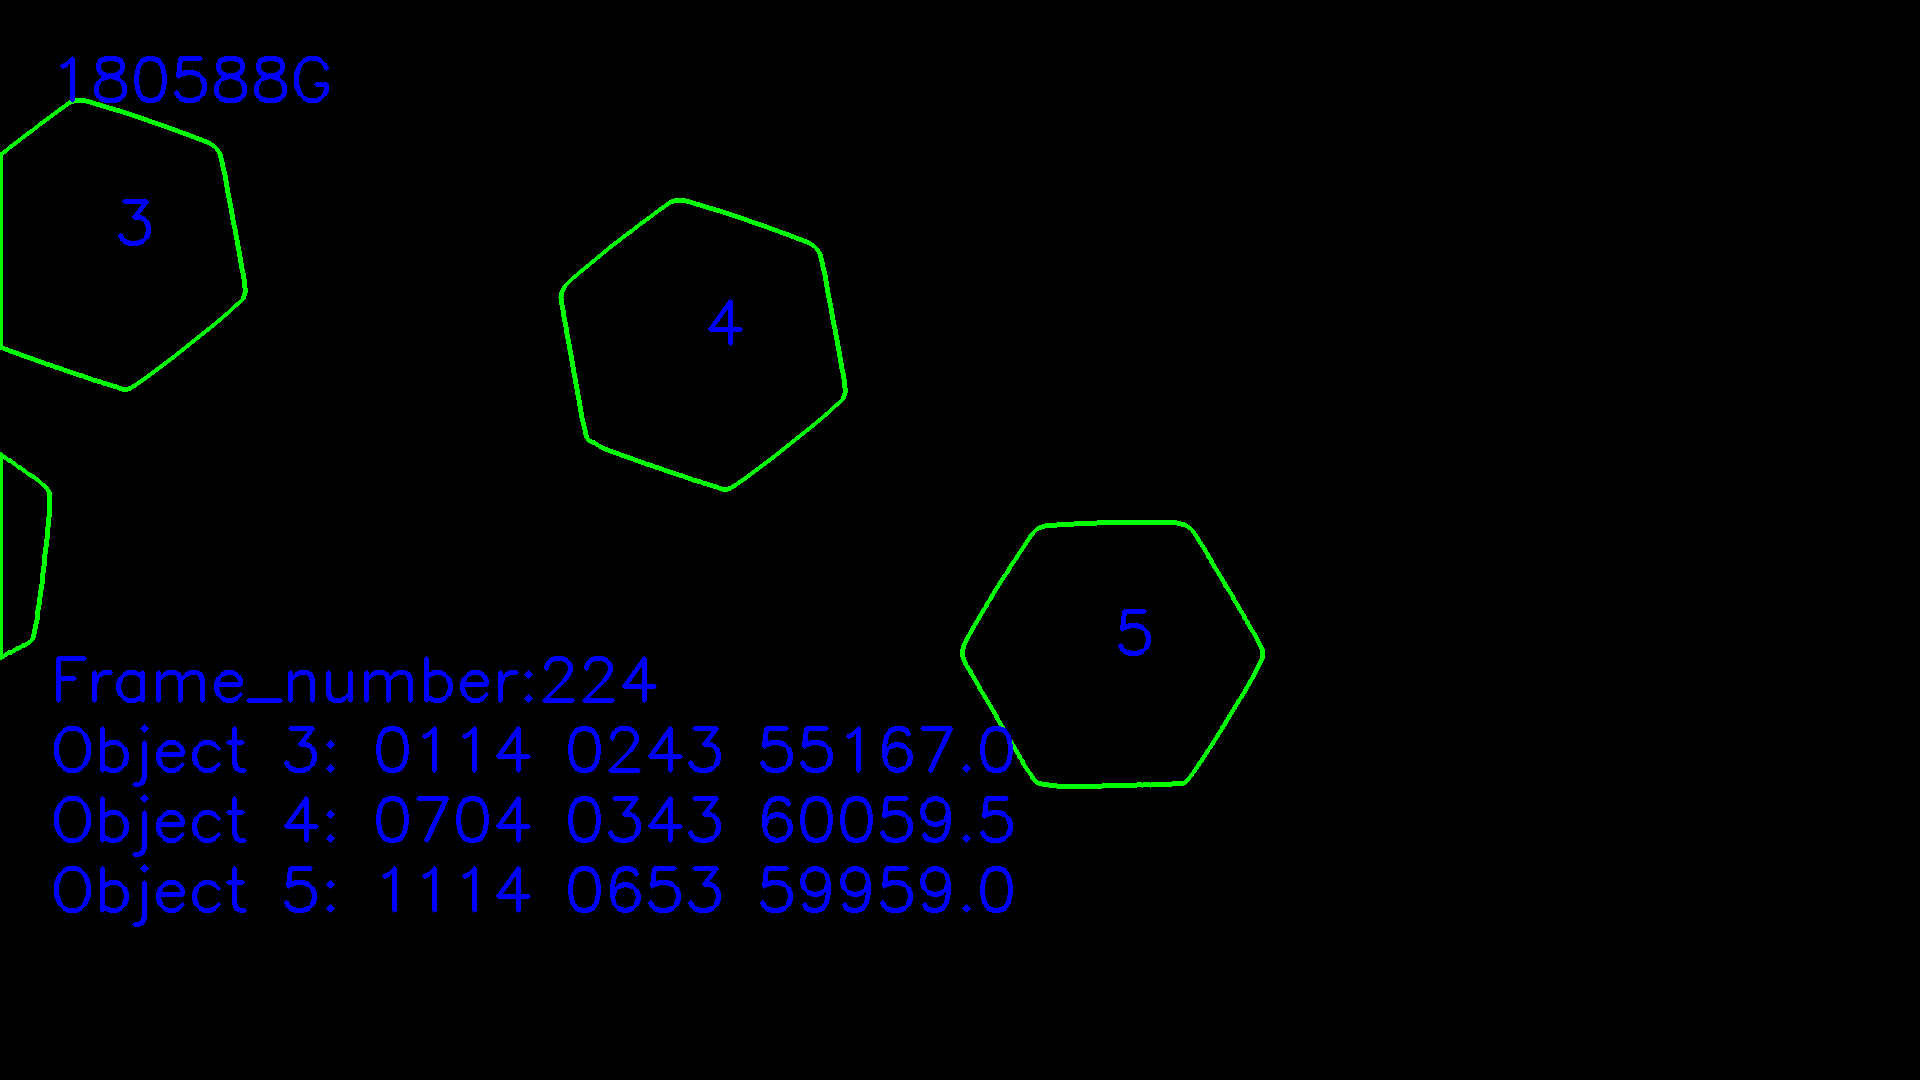

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.0800e+02, 2.4300e+02, 5.3186e+04, 3.0000e+00]), array([6.94000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.104e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([1.1400e+02, 2.4300e+02, 5.5167e+04, 3.0000e+00]), array([7.04000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.1140e+03, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


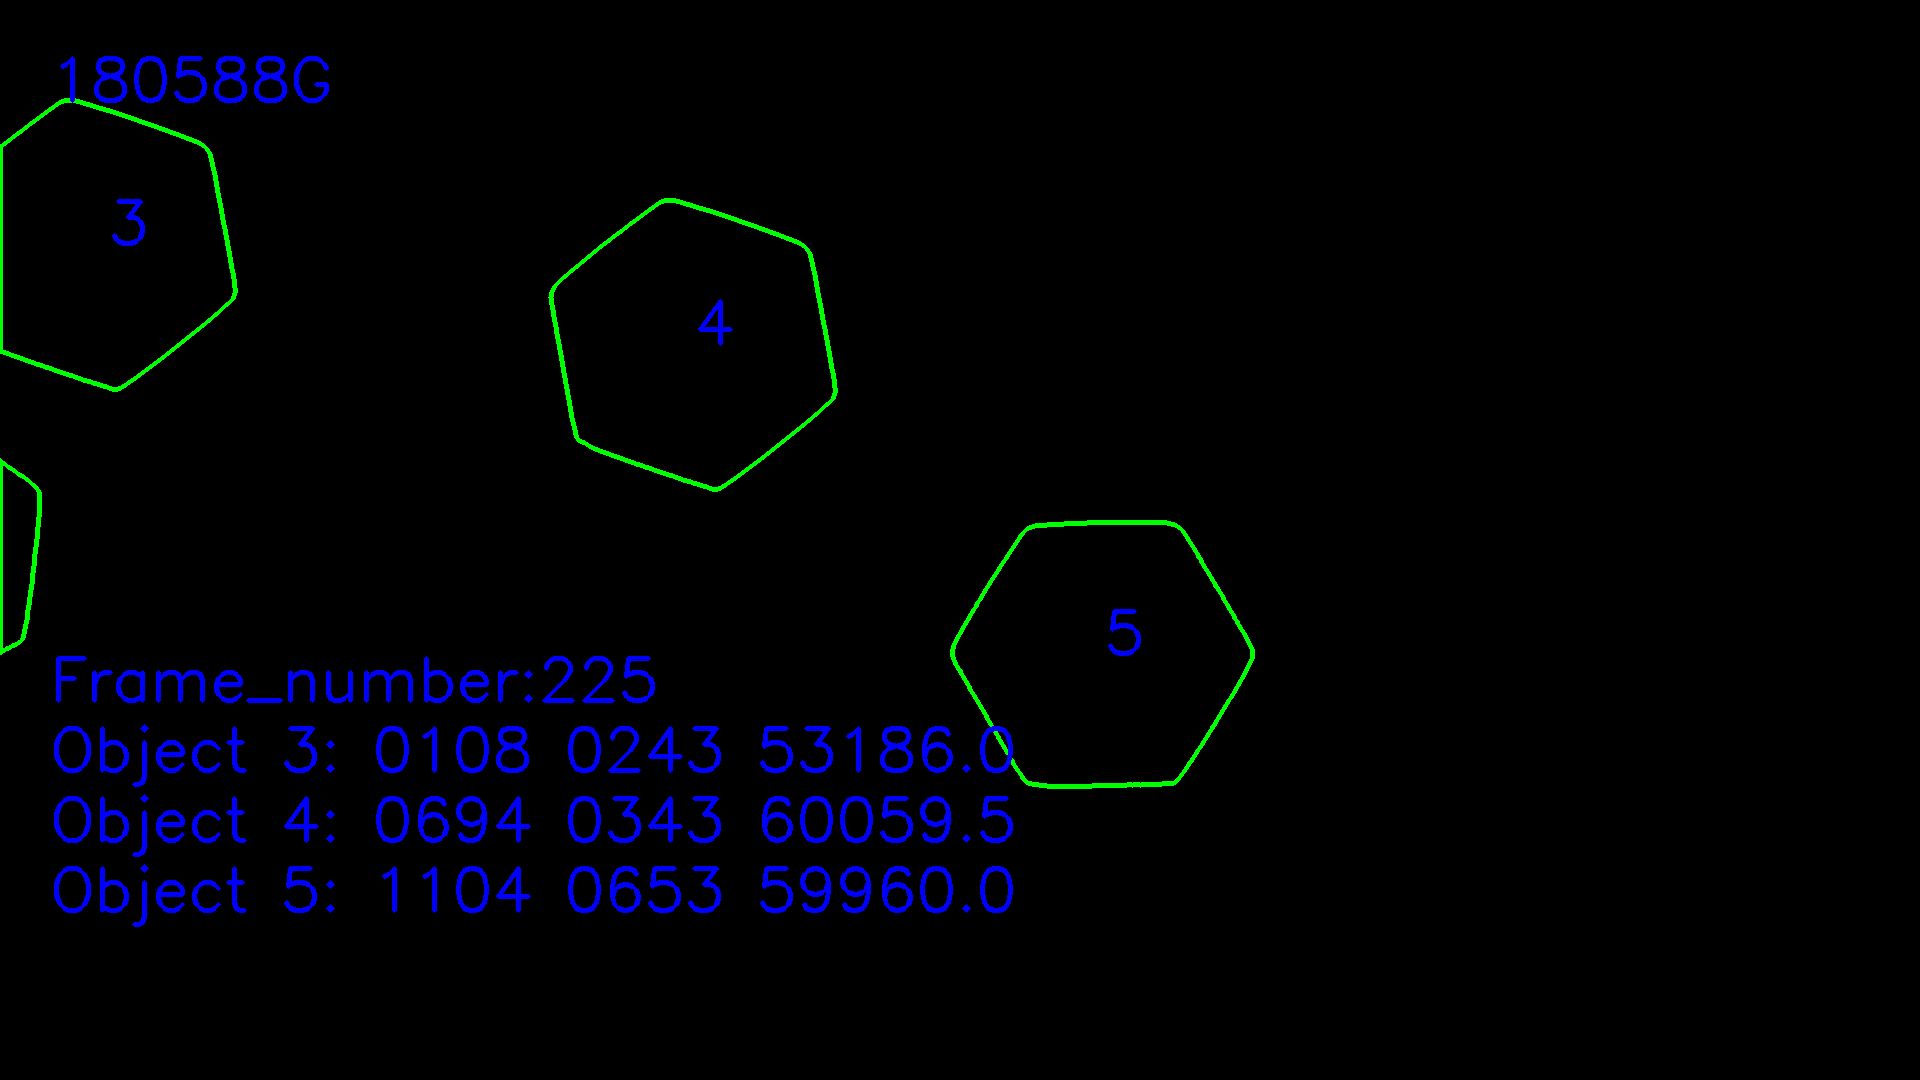

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.094e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([1.0800e+02, 2.4300e+02, 5.3186e+04, 3.0000e+00]), array([6.94000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.104e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


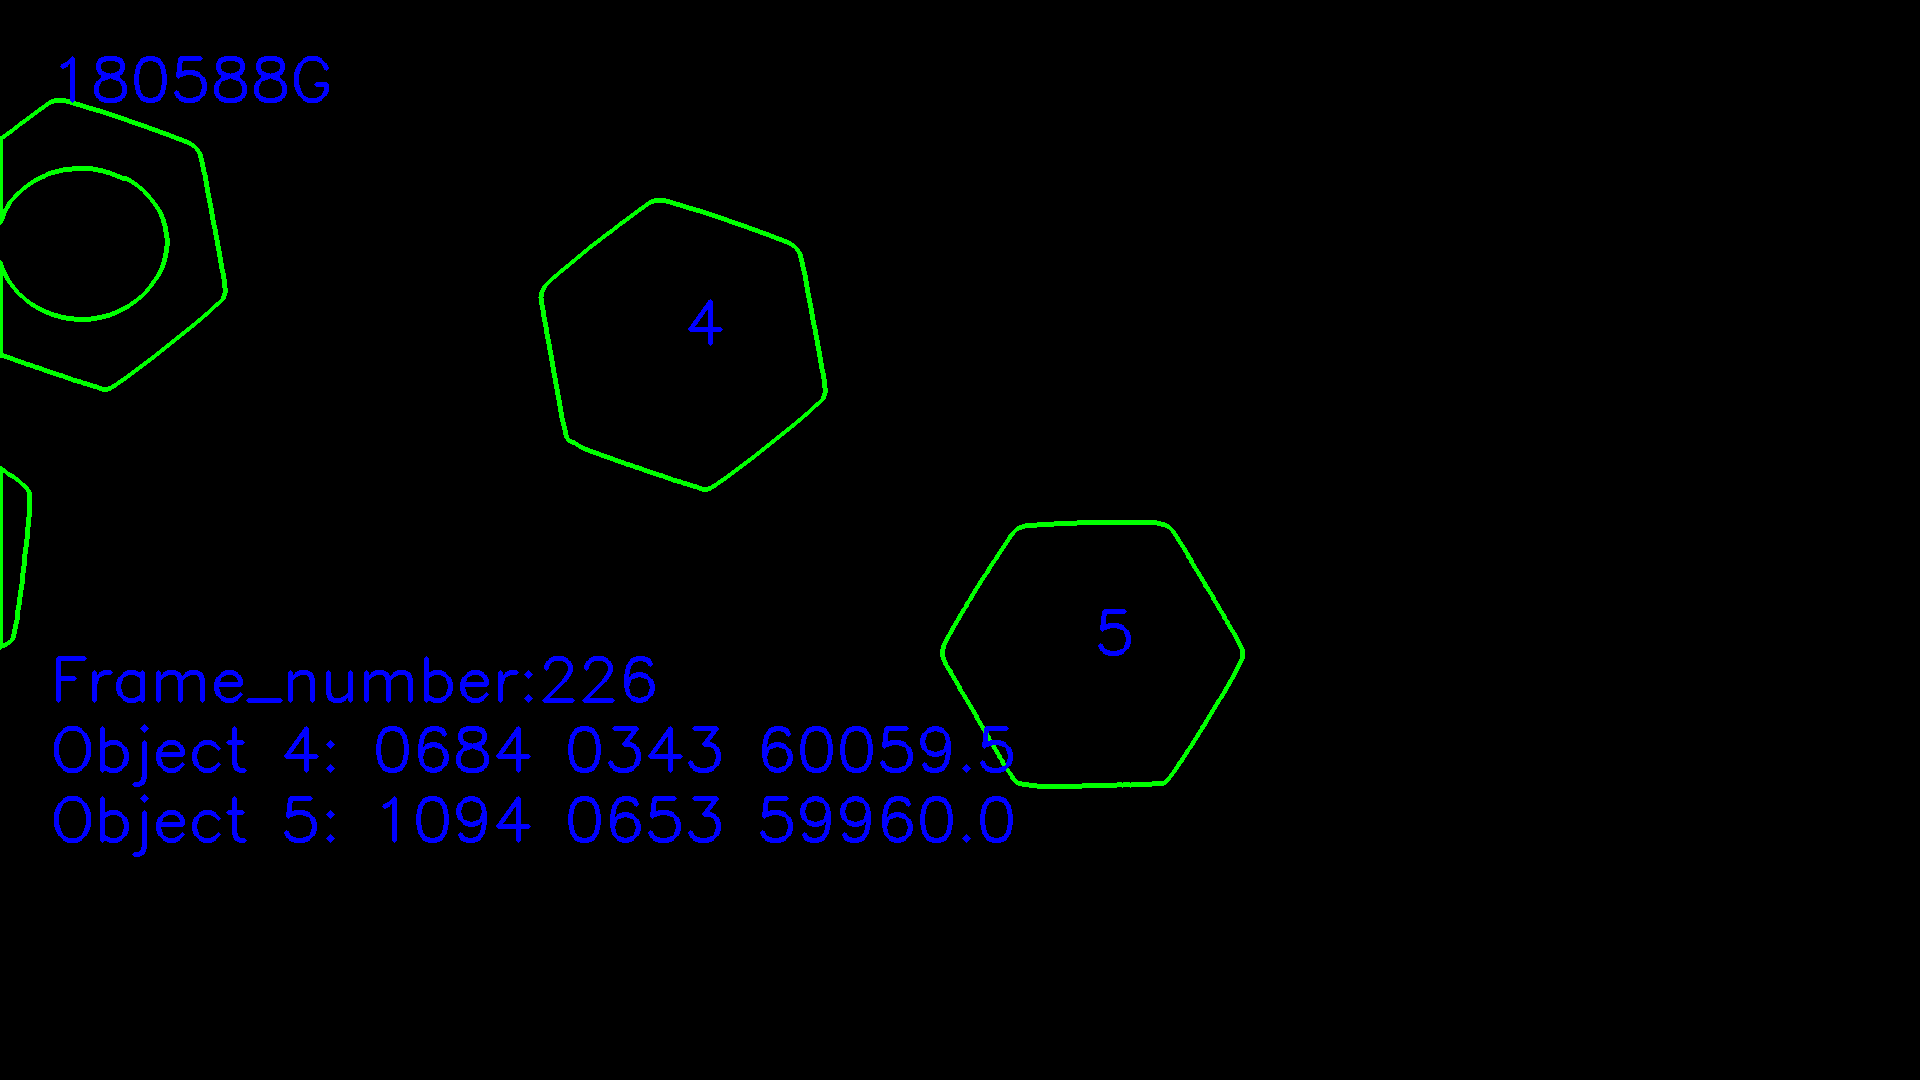

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.74000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.084e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([6.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.094e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


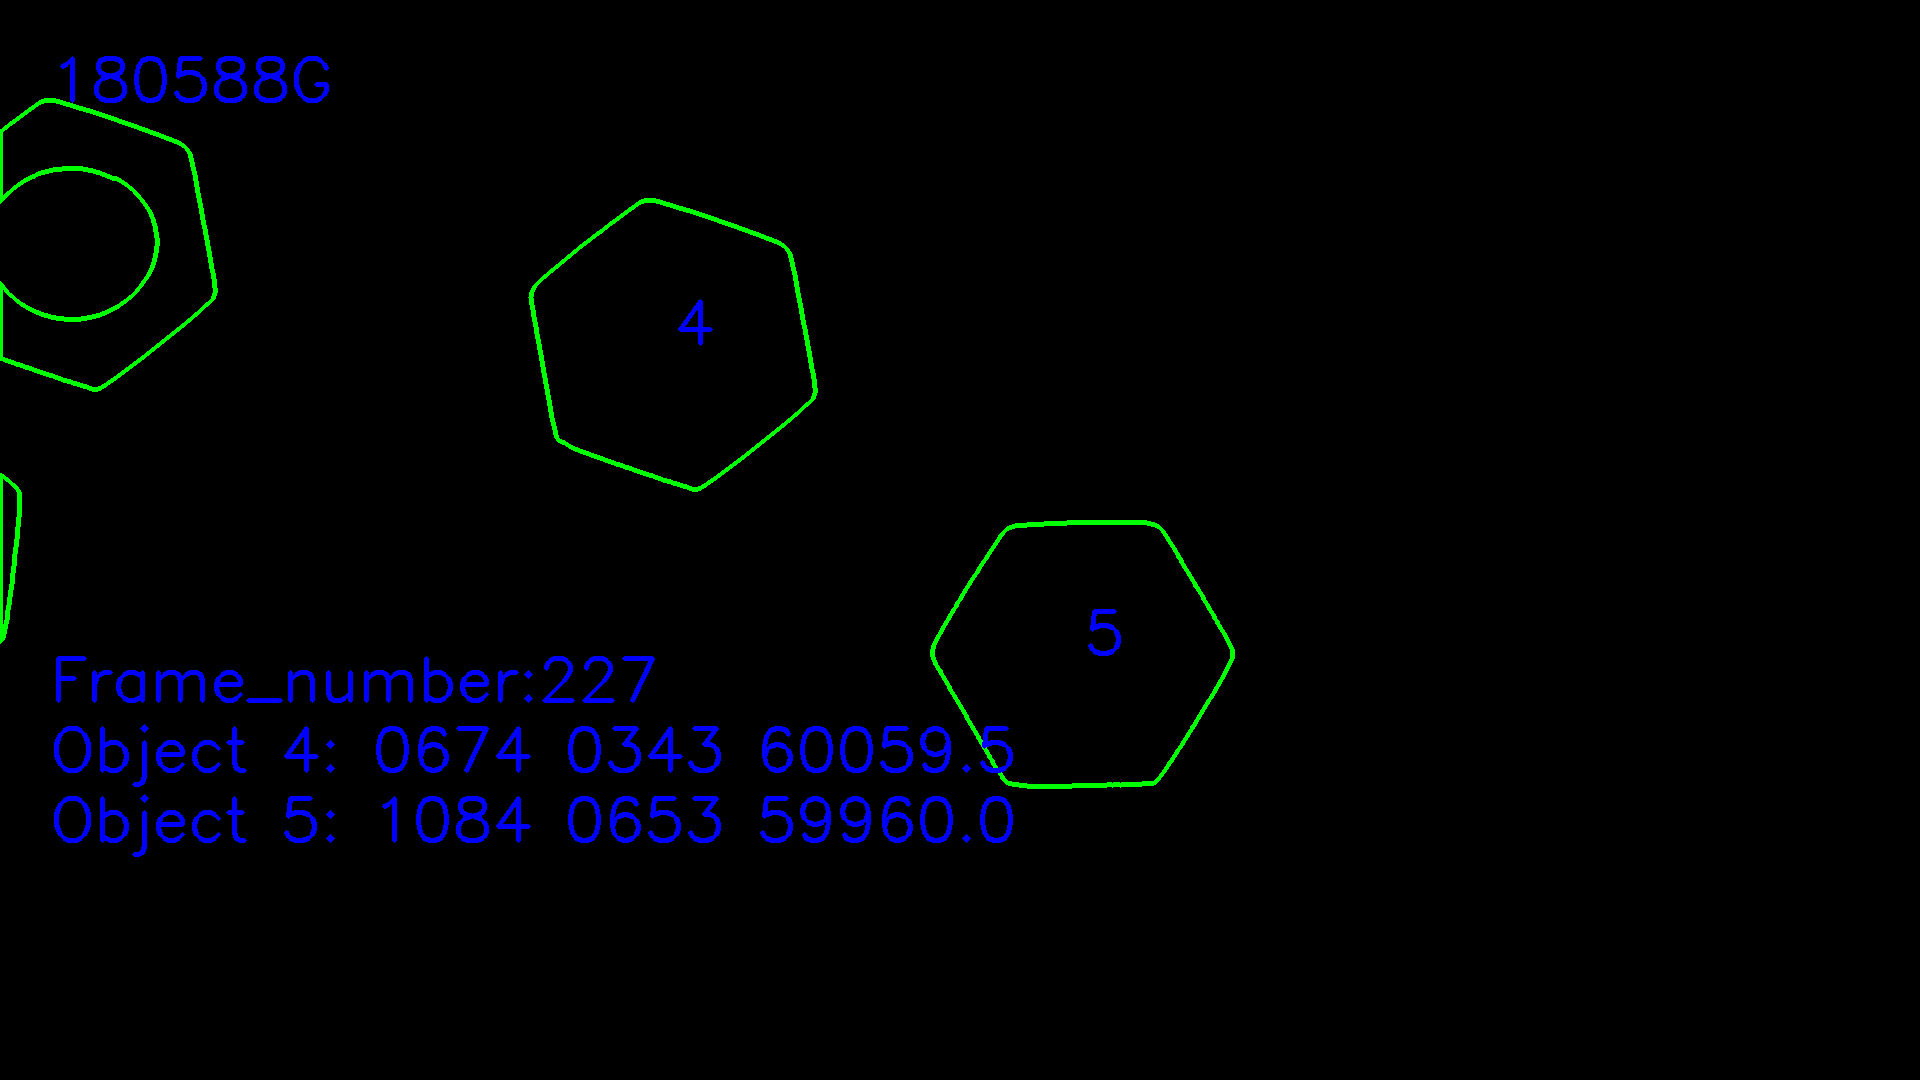

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.64000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.0740e+03, 6.5300e+02, 5.9961e+04, 5.0000e+00])]
Previousframe [array([6.74000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.084e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


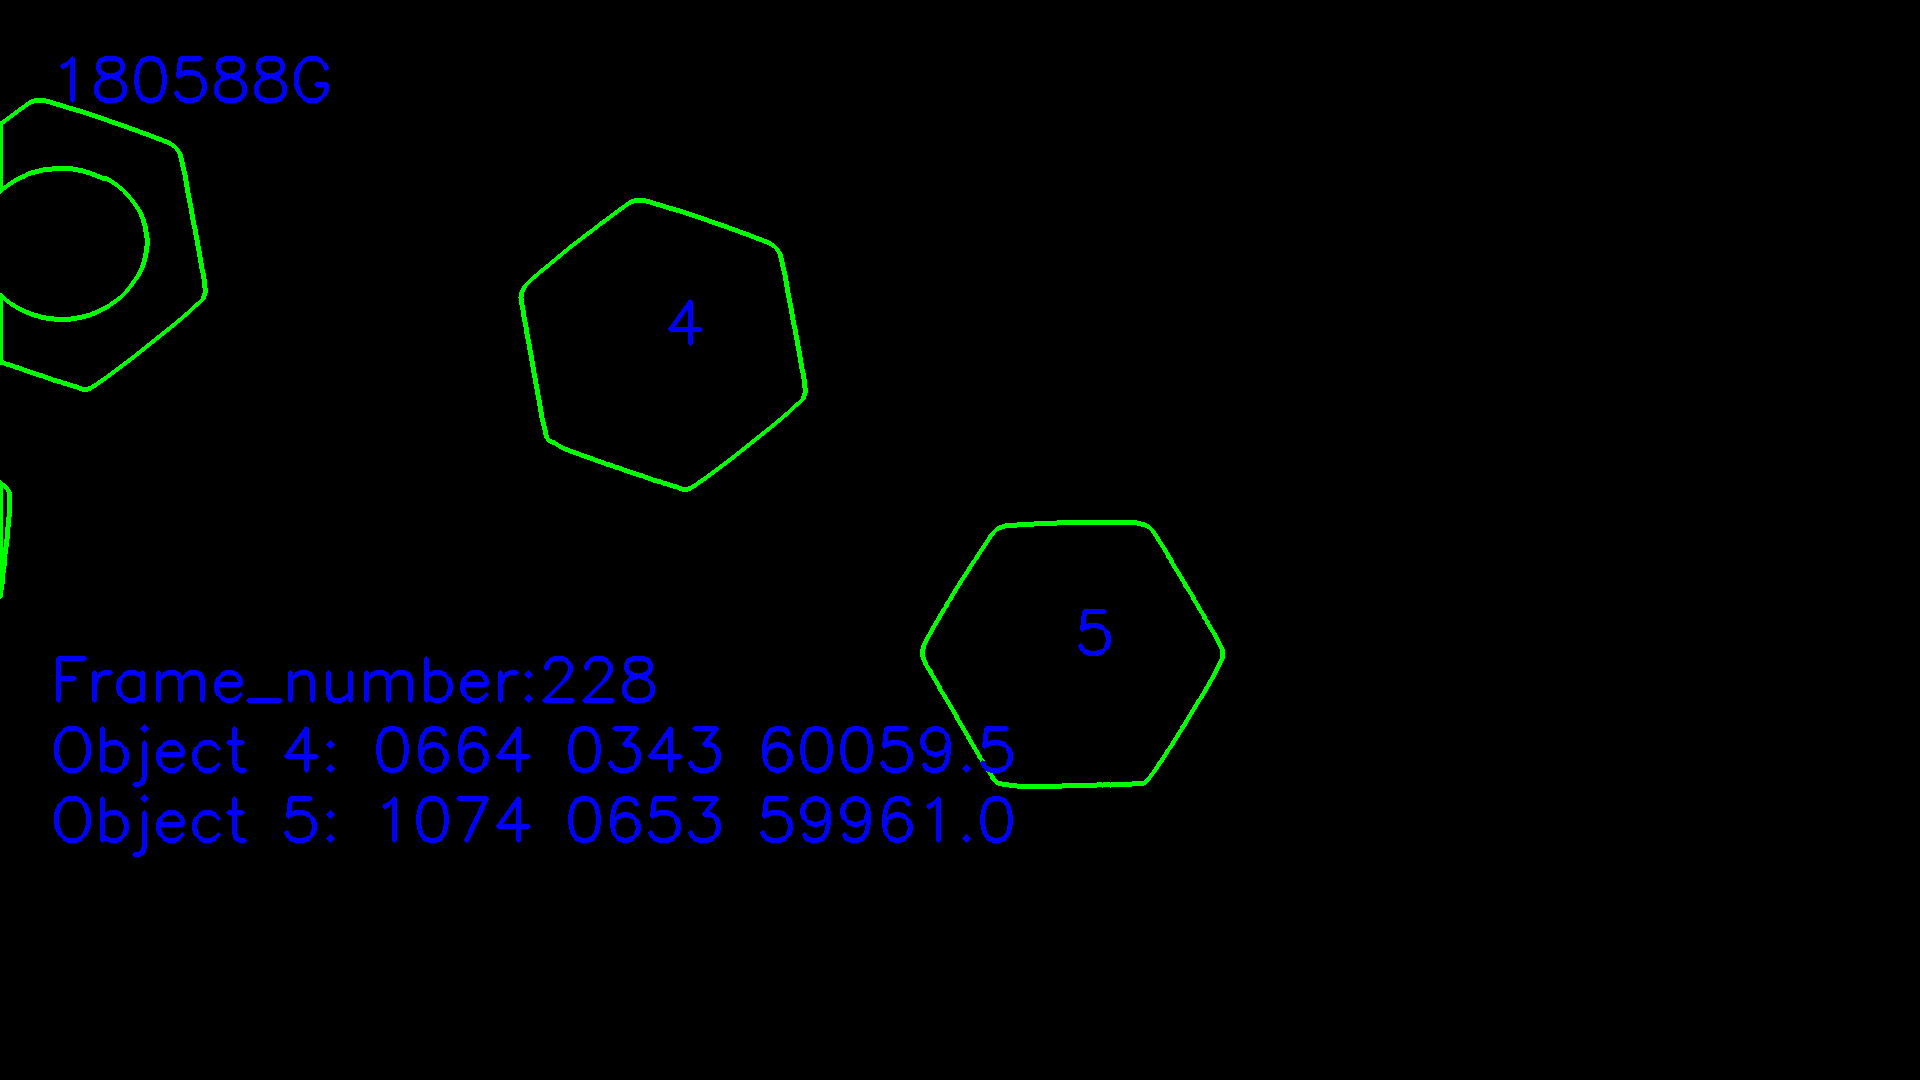

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.54000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.06400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([6.64000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.0740e+03, 6.5300e+02, 5.9961e+04, 5.0000e+00])]


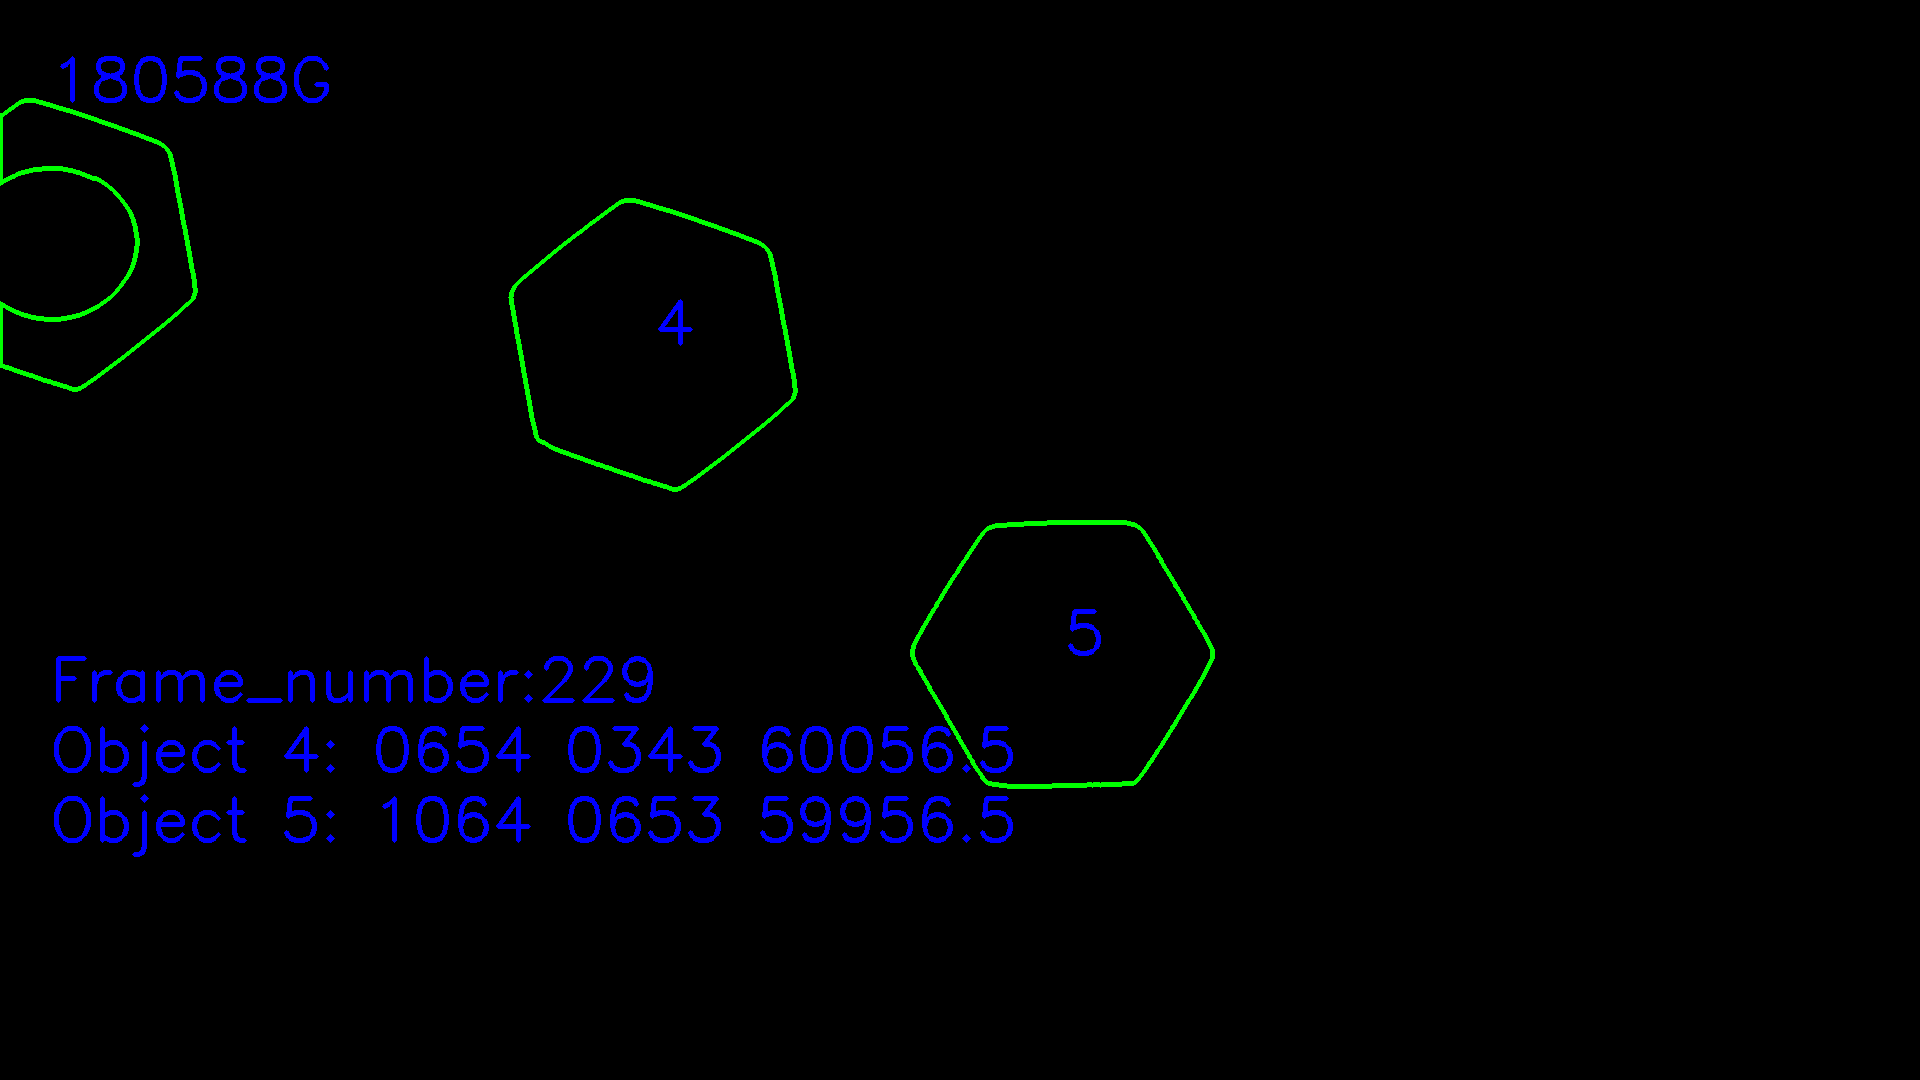

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.44000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.0540e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([6.54000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.06400e+03, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


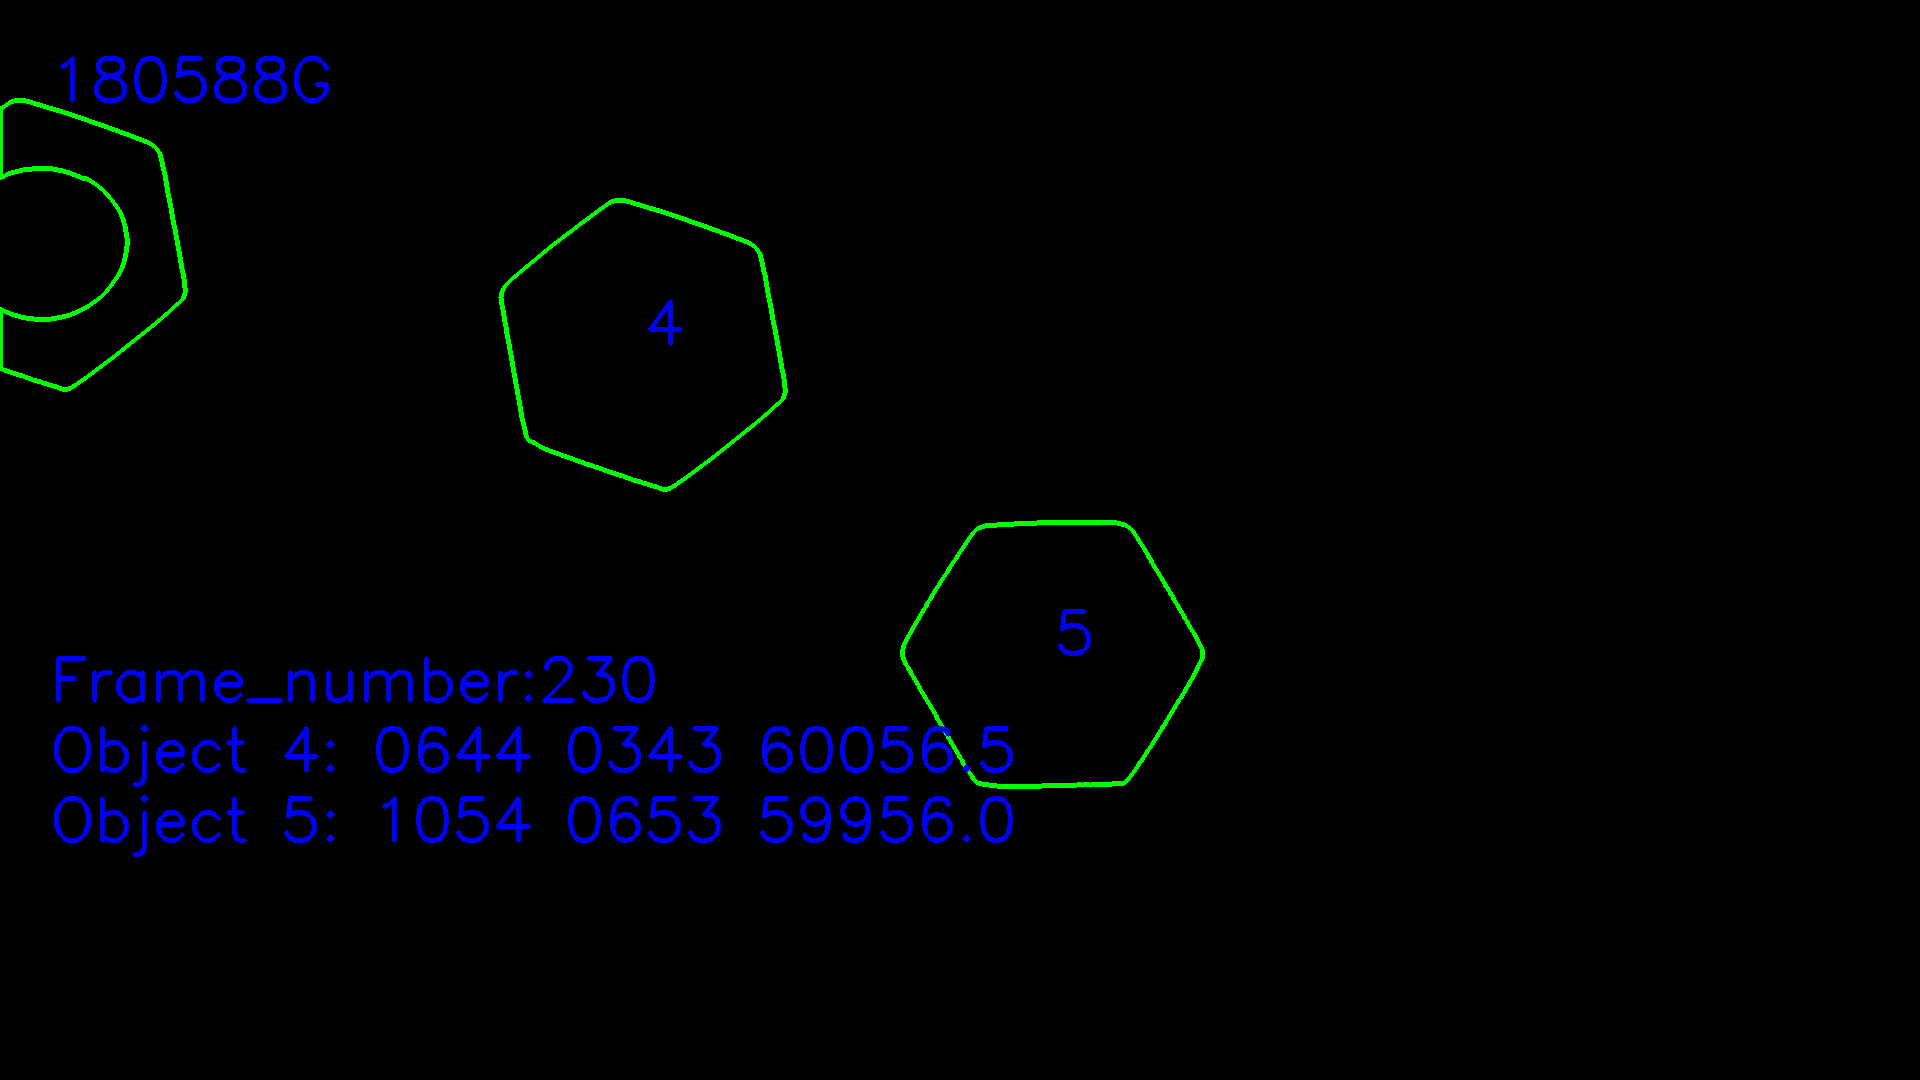

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.34000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.0440e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([6.44000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([1.0540e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


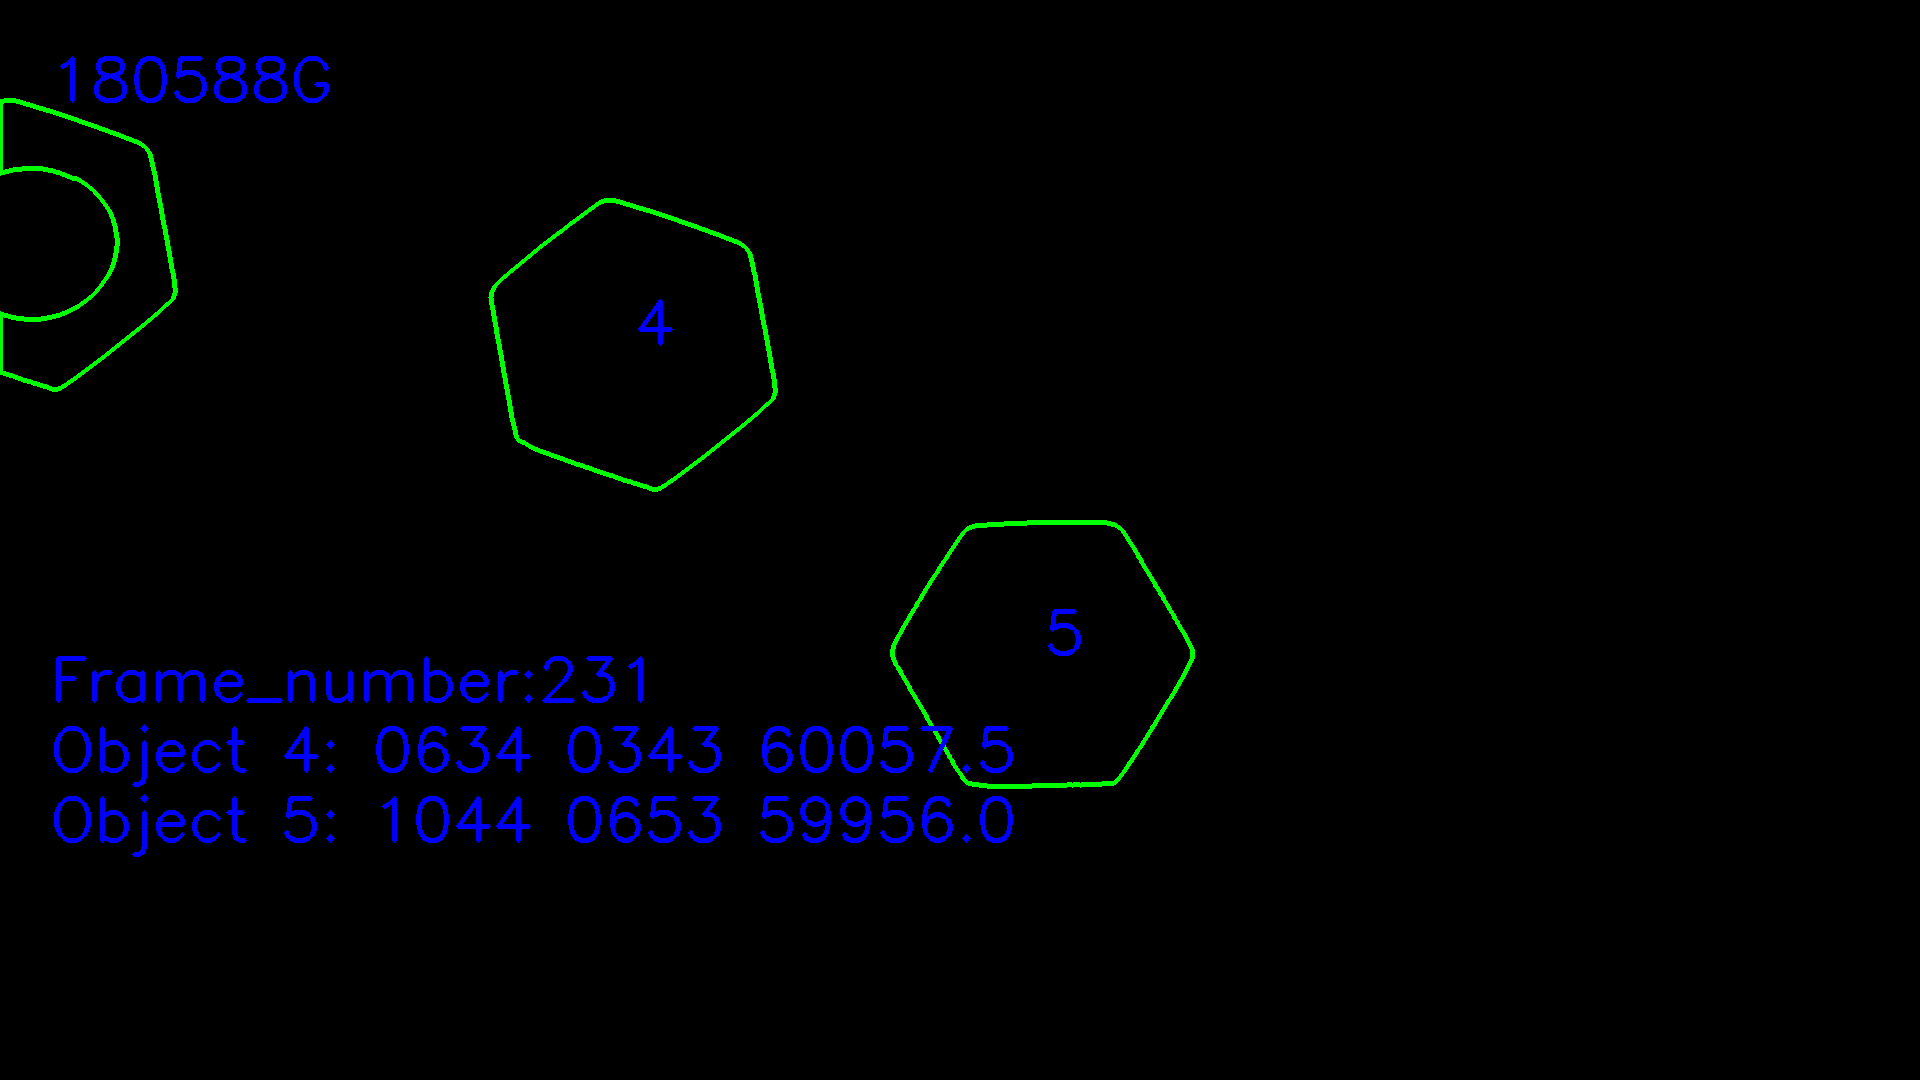

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.24000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.034e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([6.34000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([1.0440e+03, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


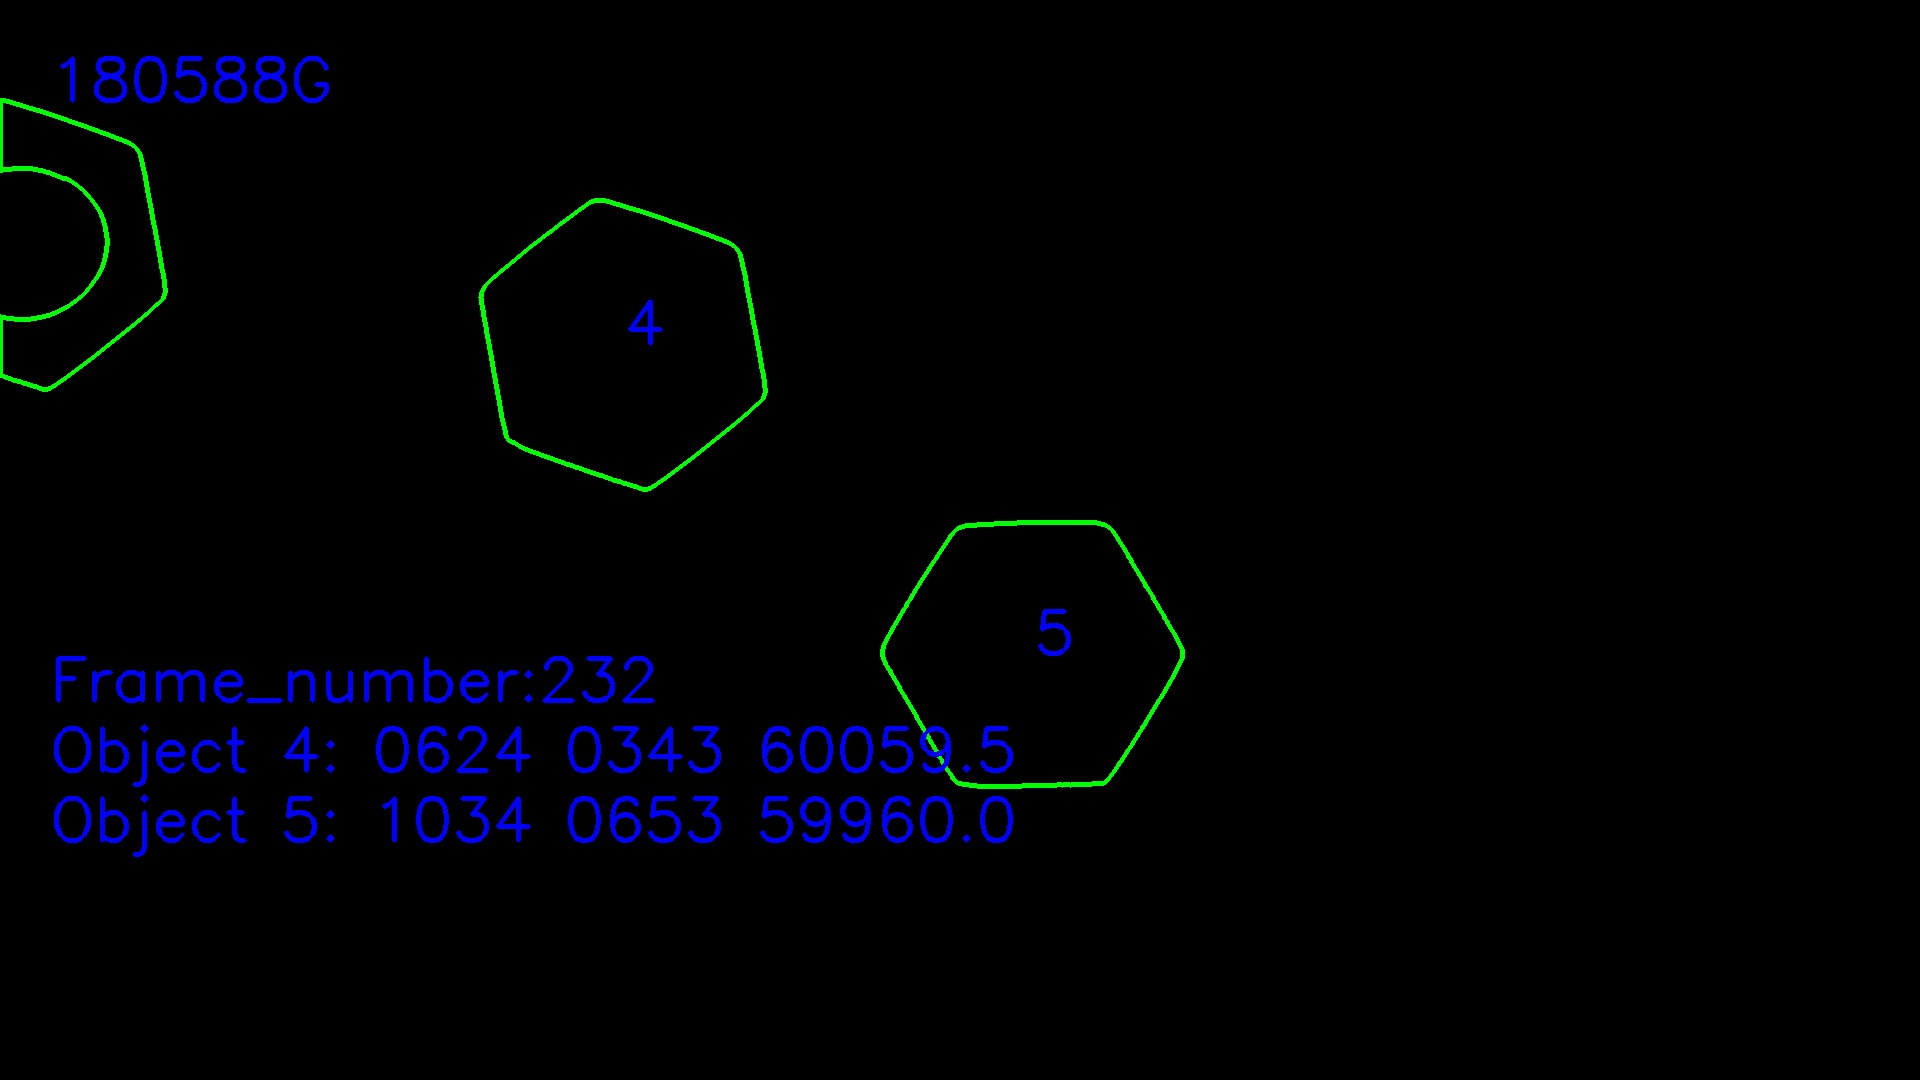

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.024e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([6.24000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.034e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


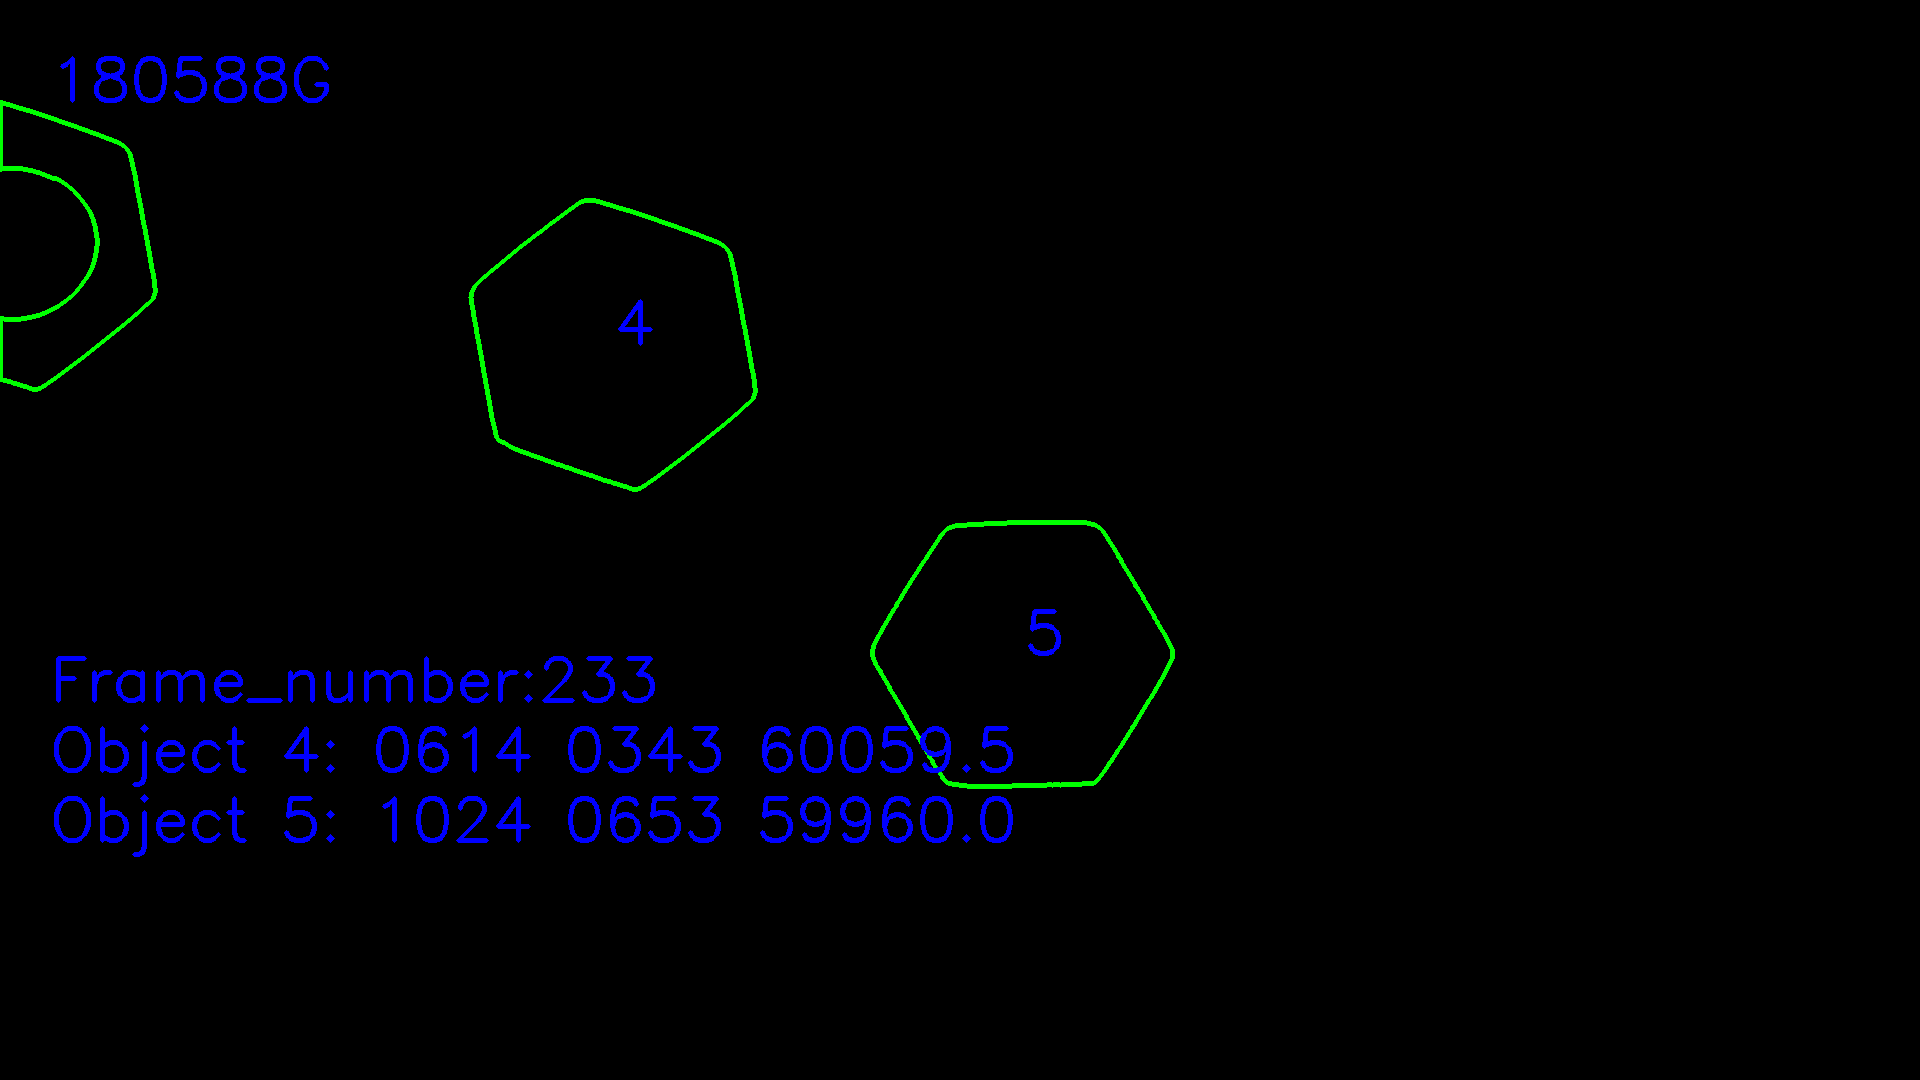

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([6.04000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.01400e+03, 6.53000e+02, 5.99595e+04, 5.00000e+00])]
Previousframe [array([6.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.024e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


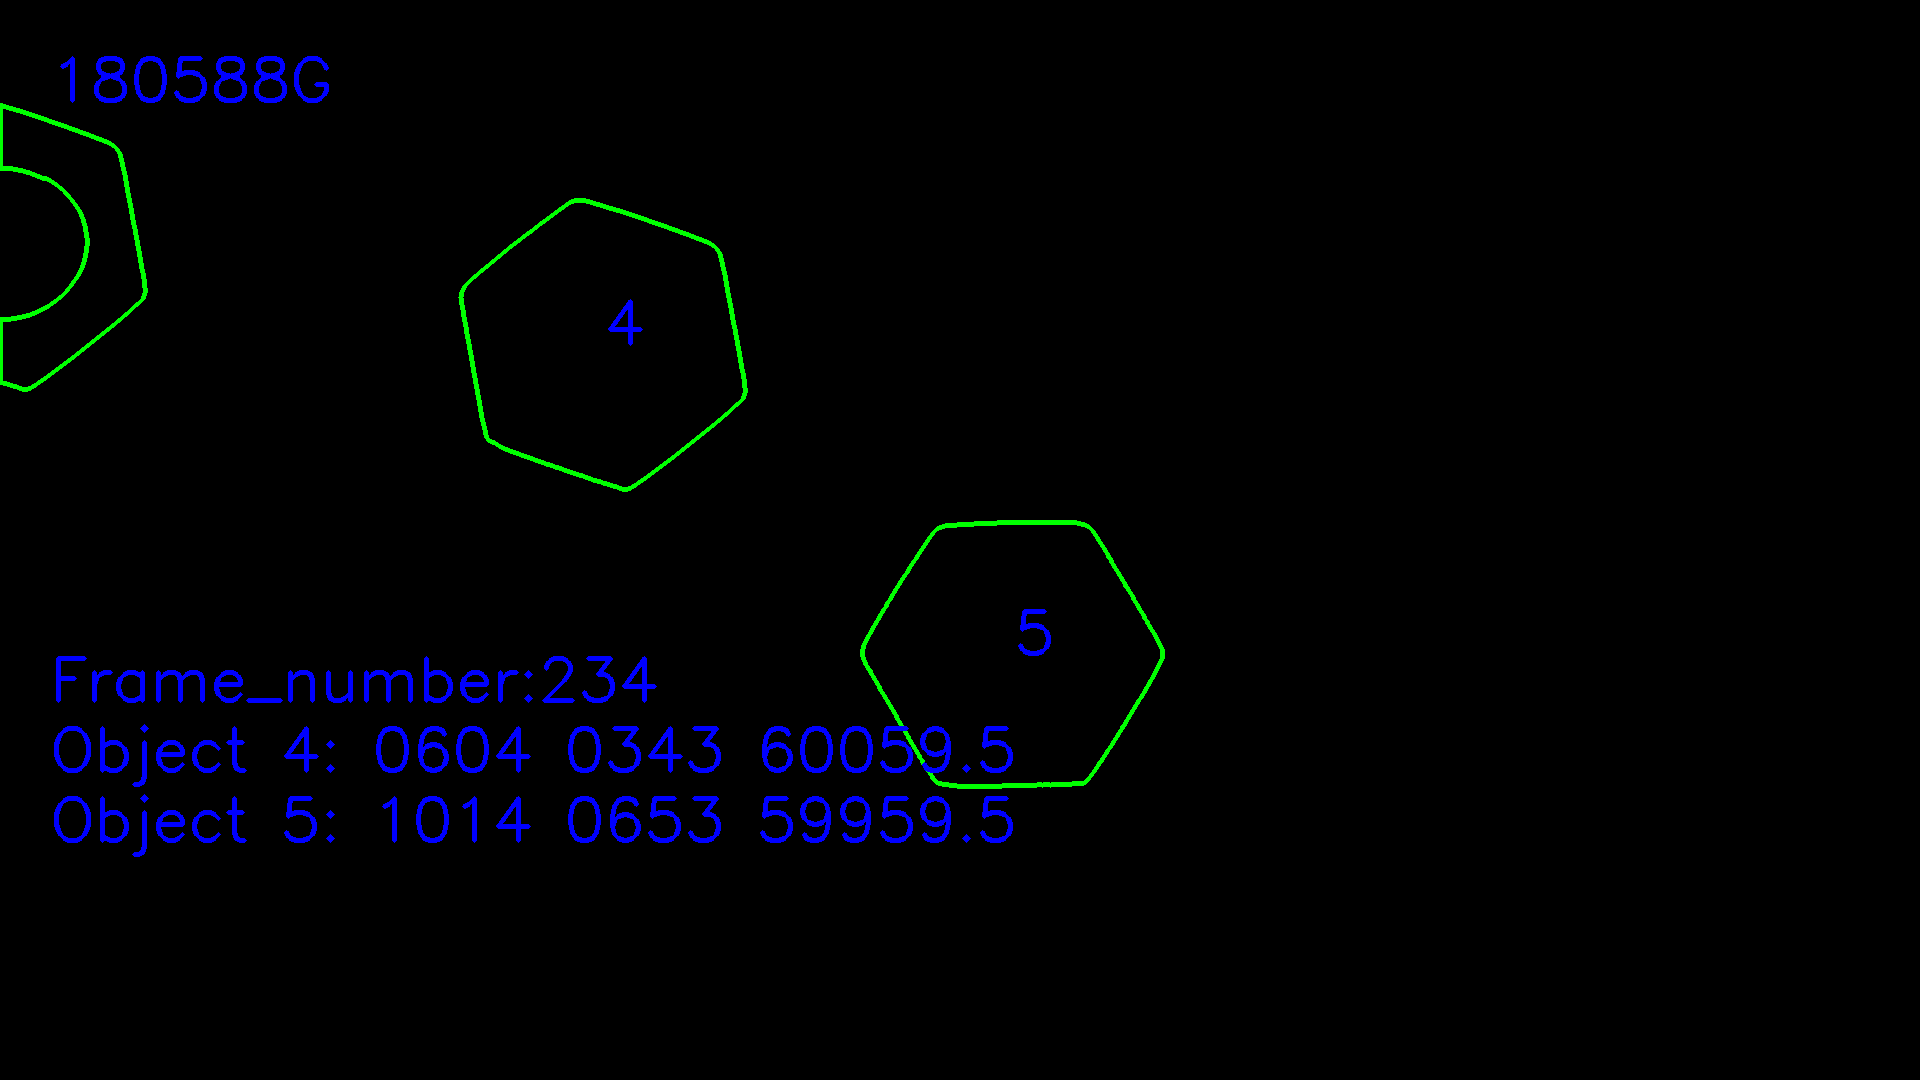

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.94000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.004e+03, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([6.04000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.01400e+03, 6.53000e+02, 5.99595e+04, 5.00000e+00])]


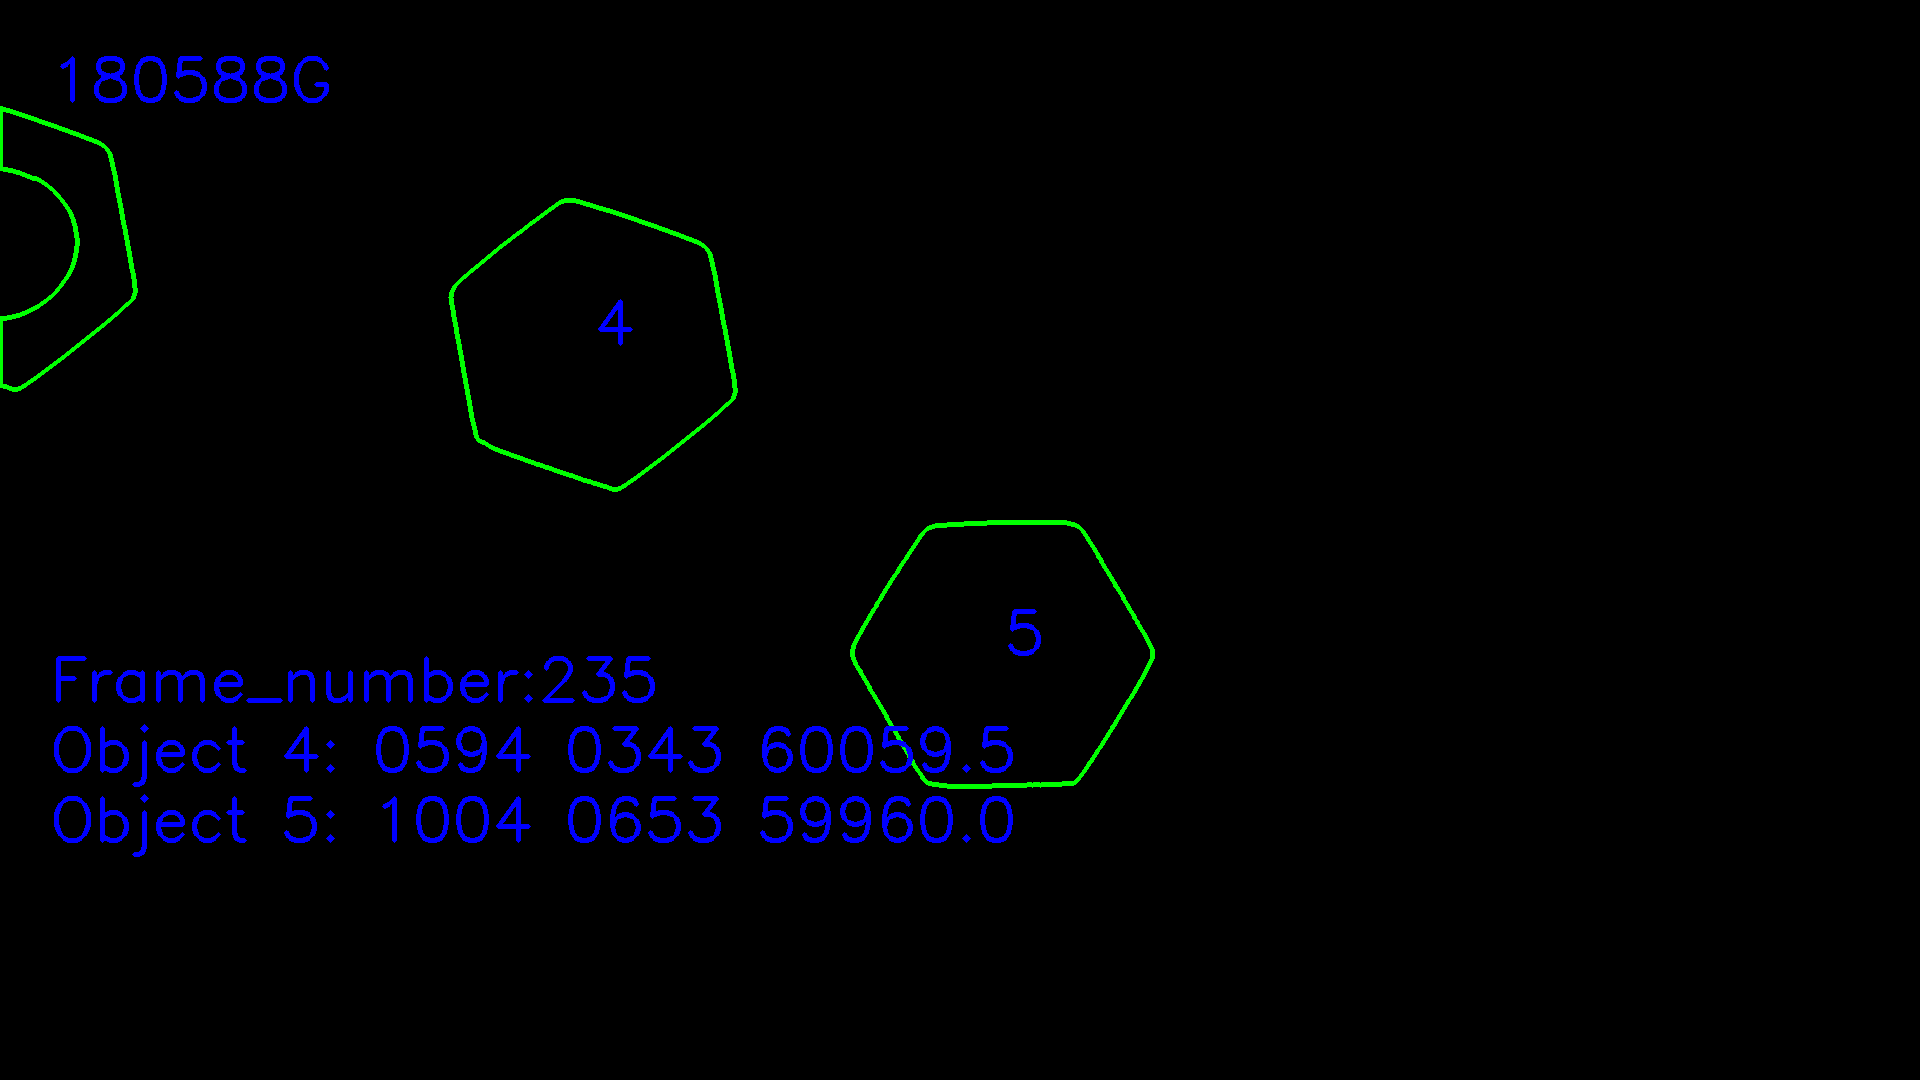

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.940e+02, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([5.94000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([1.004e+03, 6.530e+02, 5.996e+04, 5.000e+00])]


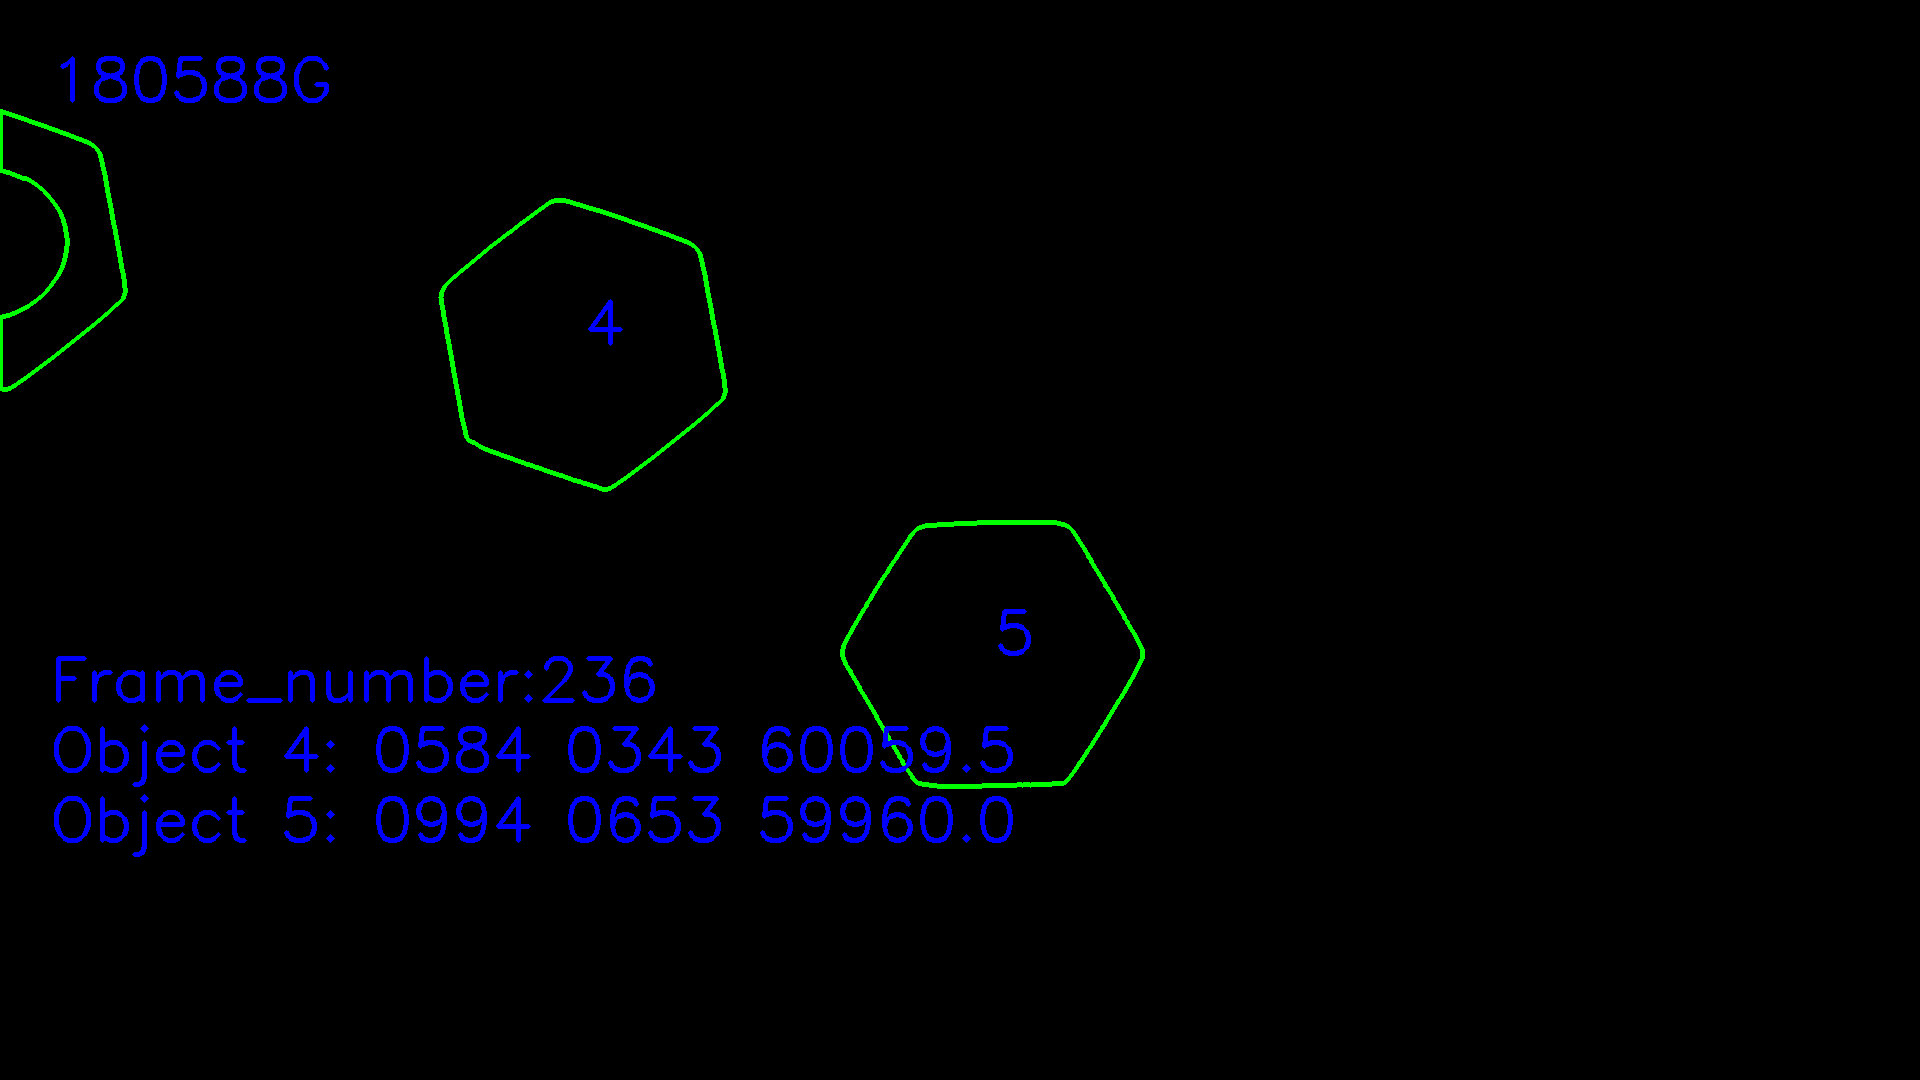

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.74000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.8400e+02, 6.5300e+02, 5.9961e+04, 5.0000e+00])]
Previousframe [array([5.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.940e+02, 6.530e+02, 5.996e+04, 5.000e+00])]


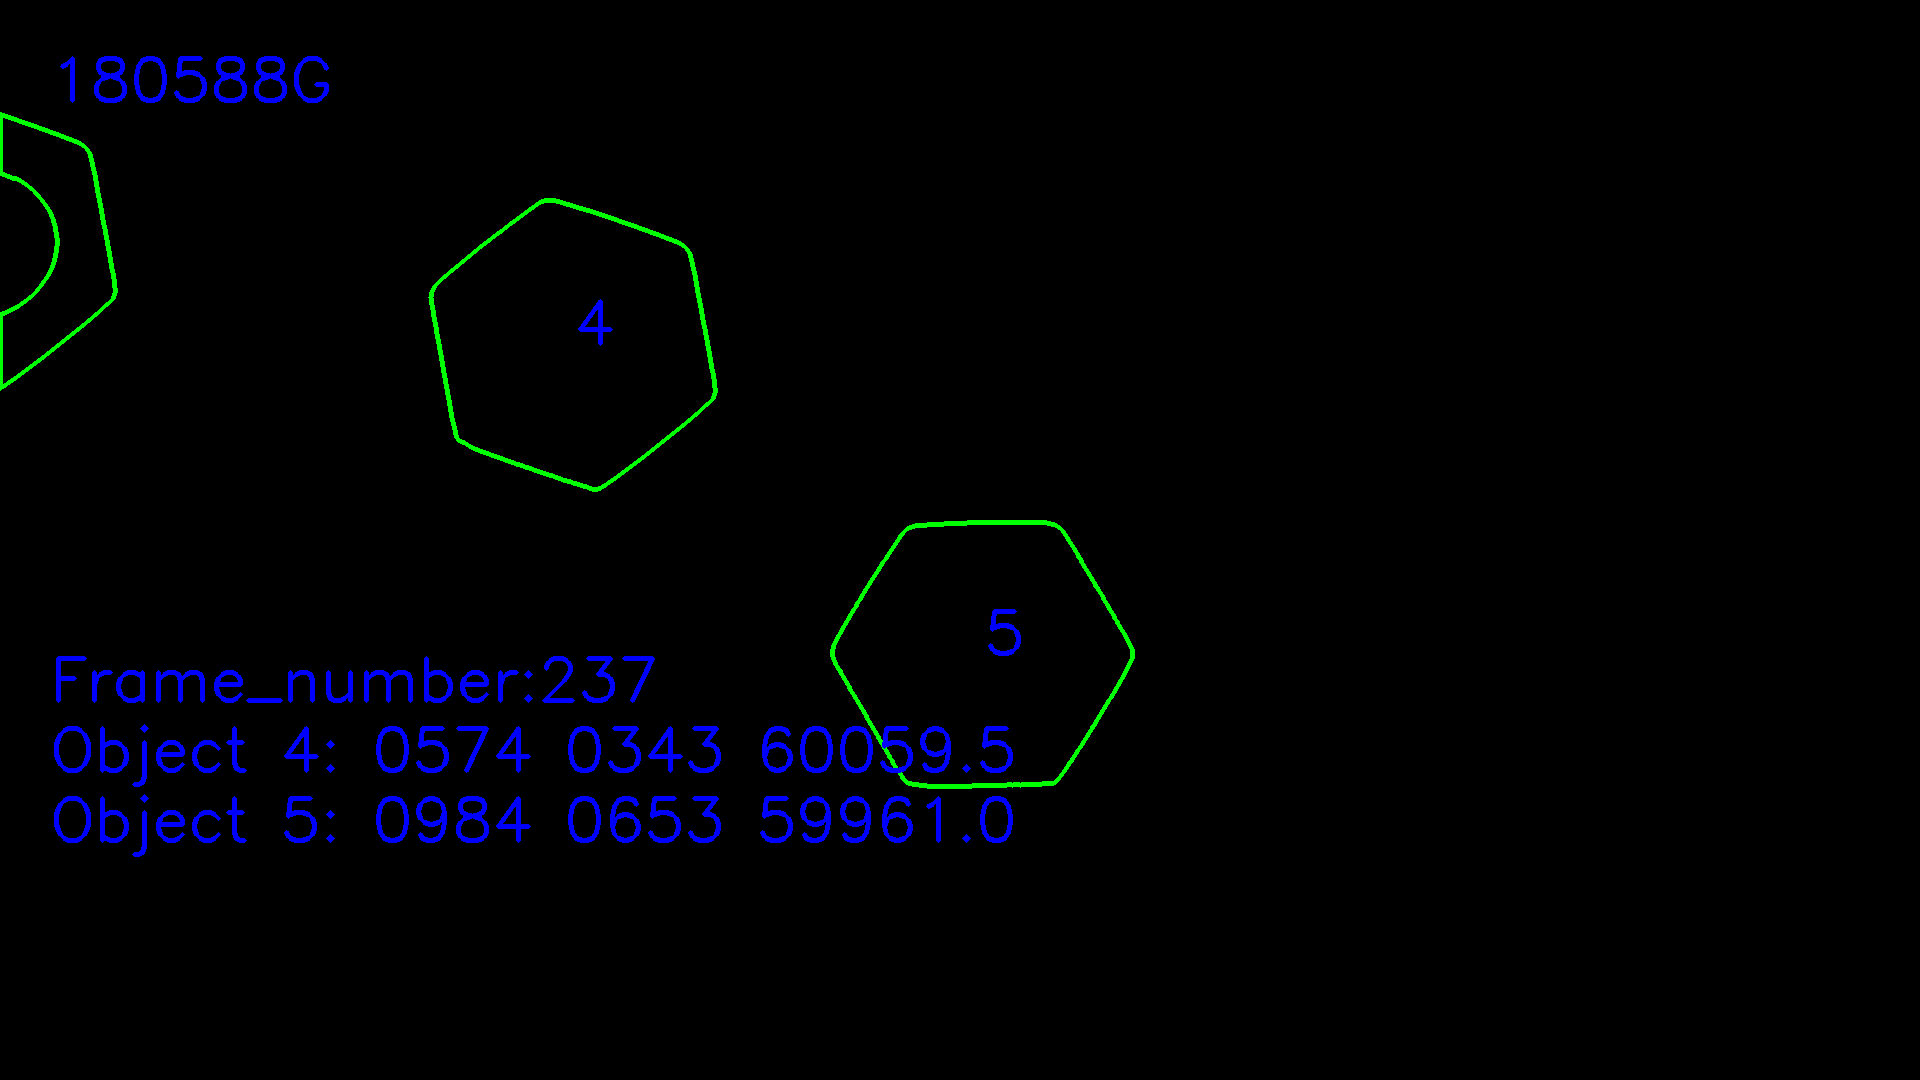

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([9.7400e+02, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([5.74000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.8400e+02, 6.5300e+02, 5.9961e+04, 5.0000e+00])]


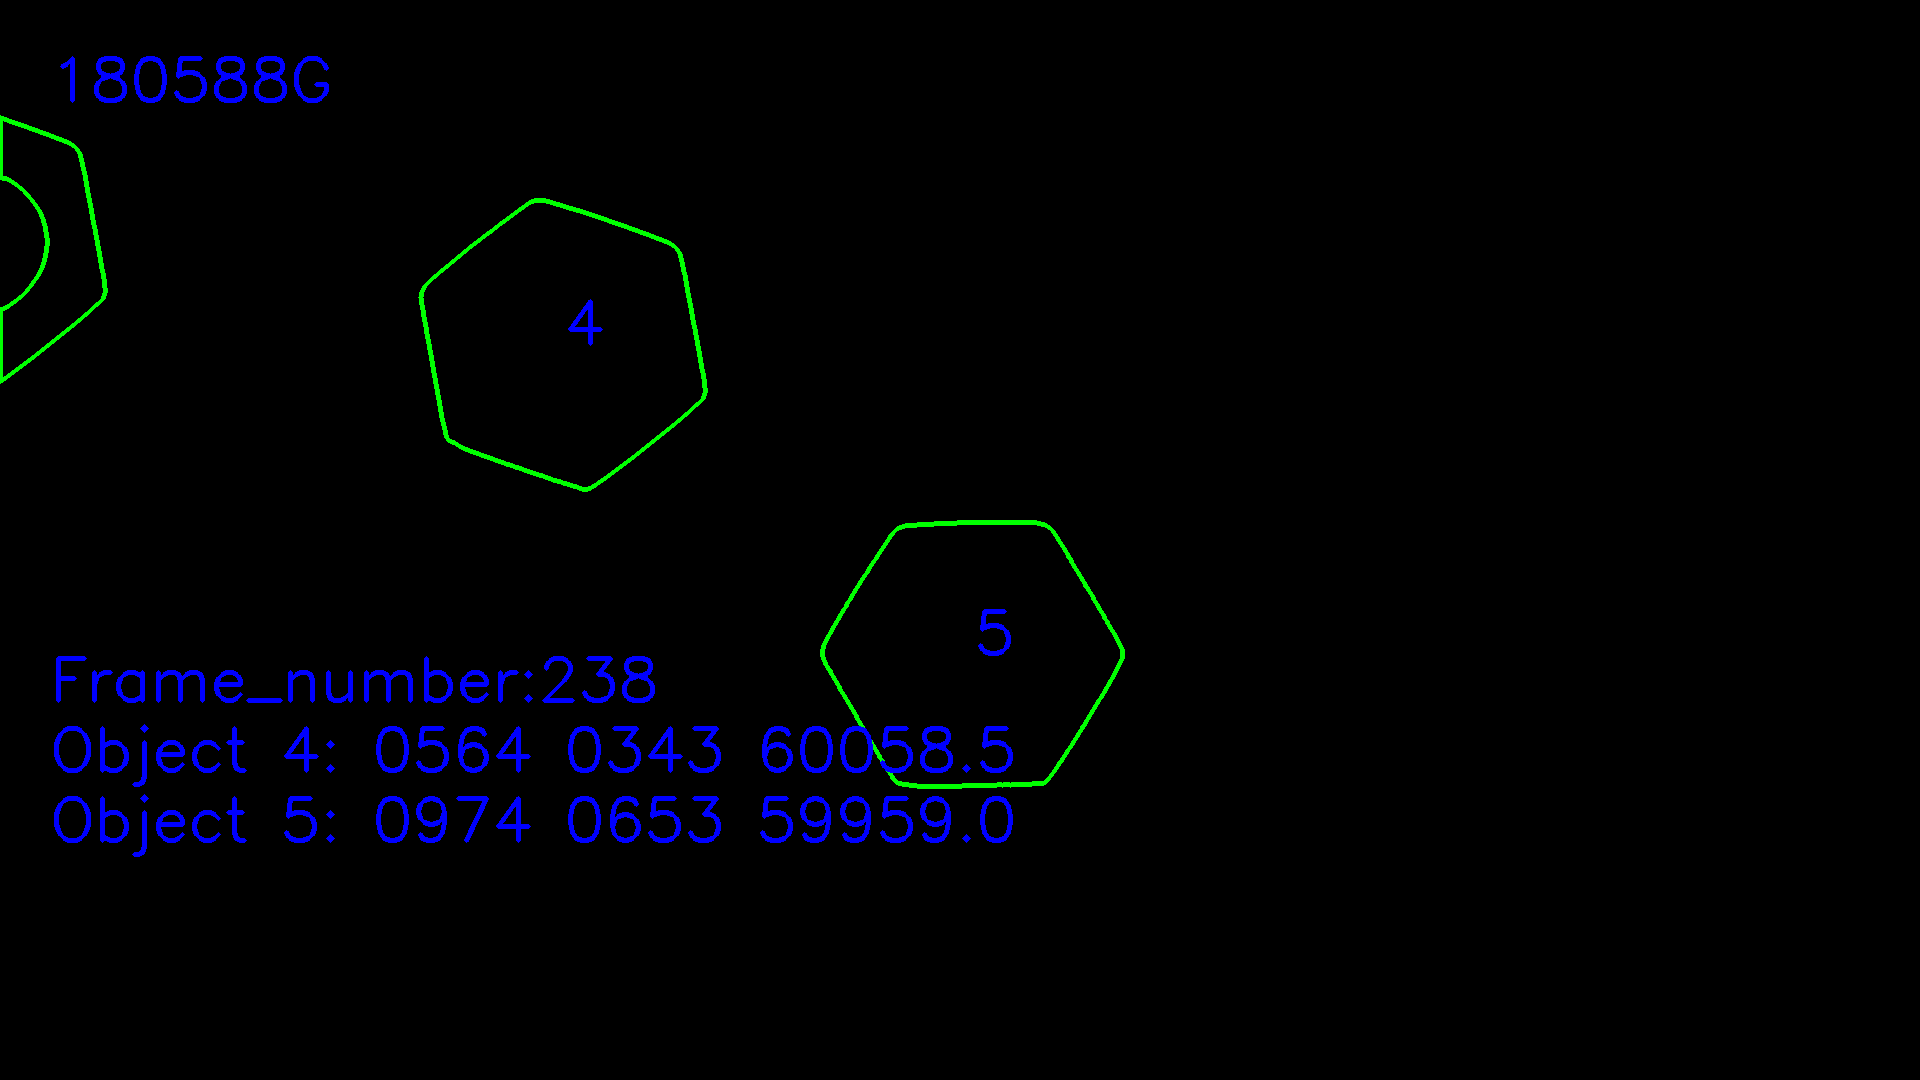

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.54000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.640e+02, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([5.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([9.7400e+02, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


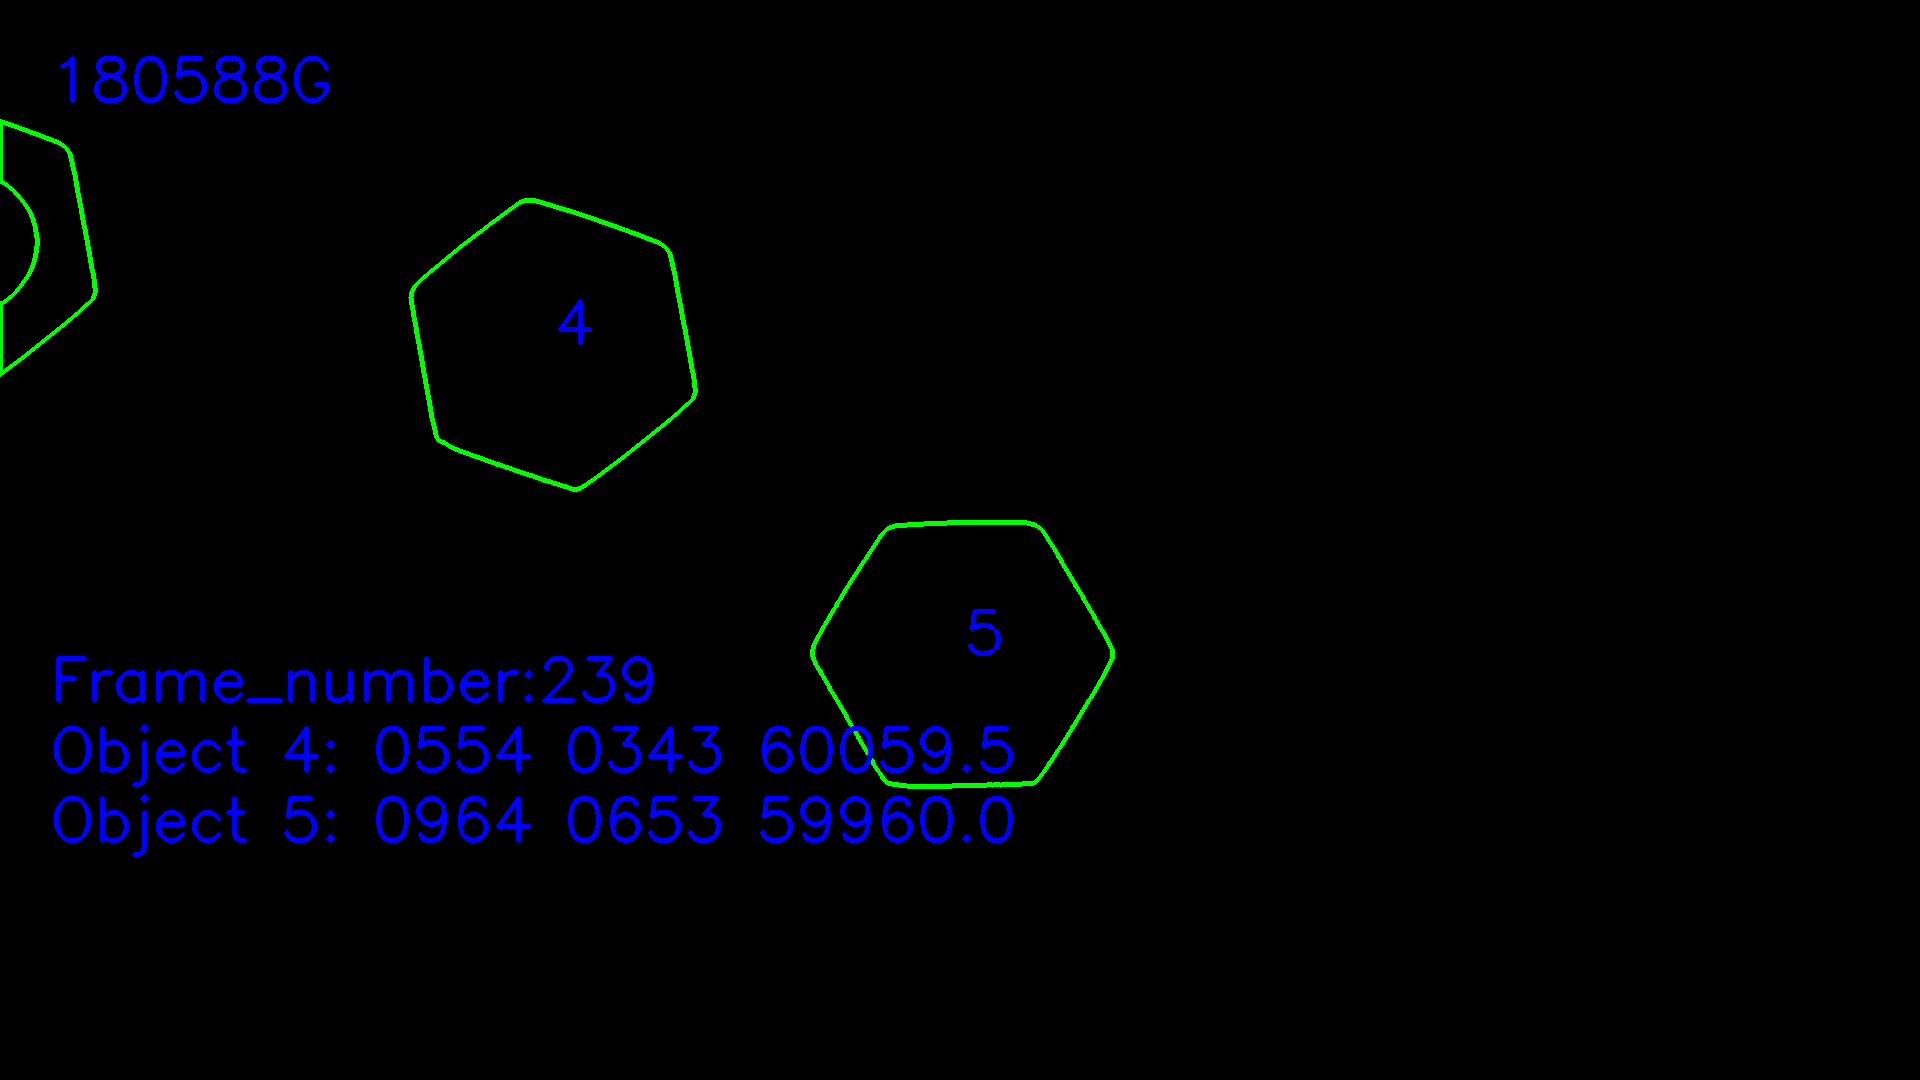

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.44000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.5400e+02, 6.5300e+02, 5.9958e+04, 5.0000e+00])]
Previousframe [array([5.54000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.640e+02, 6.530e+02, 5.996e+04, 5.000e+00])]


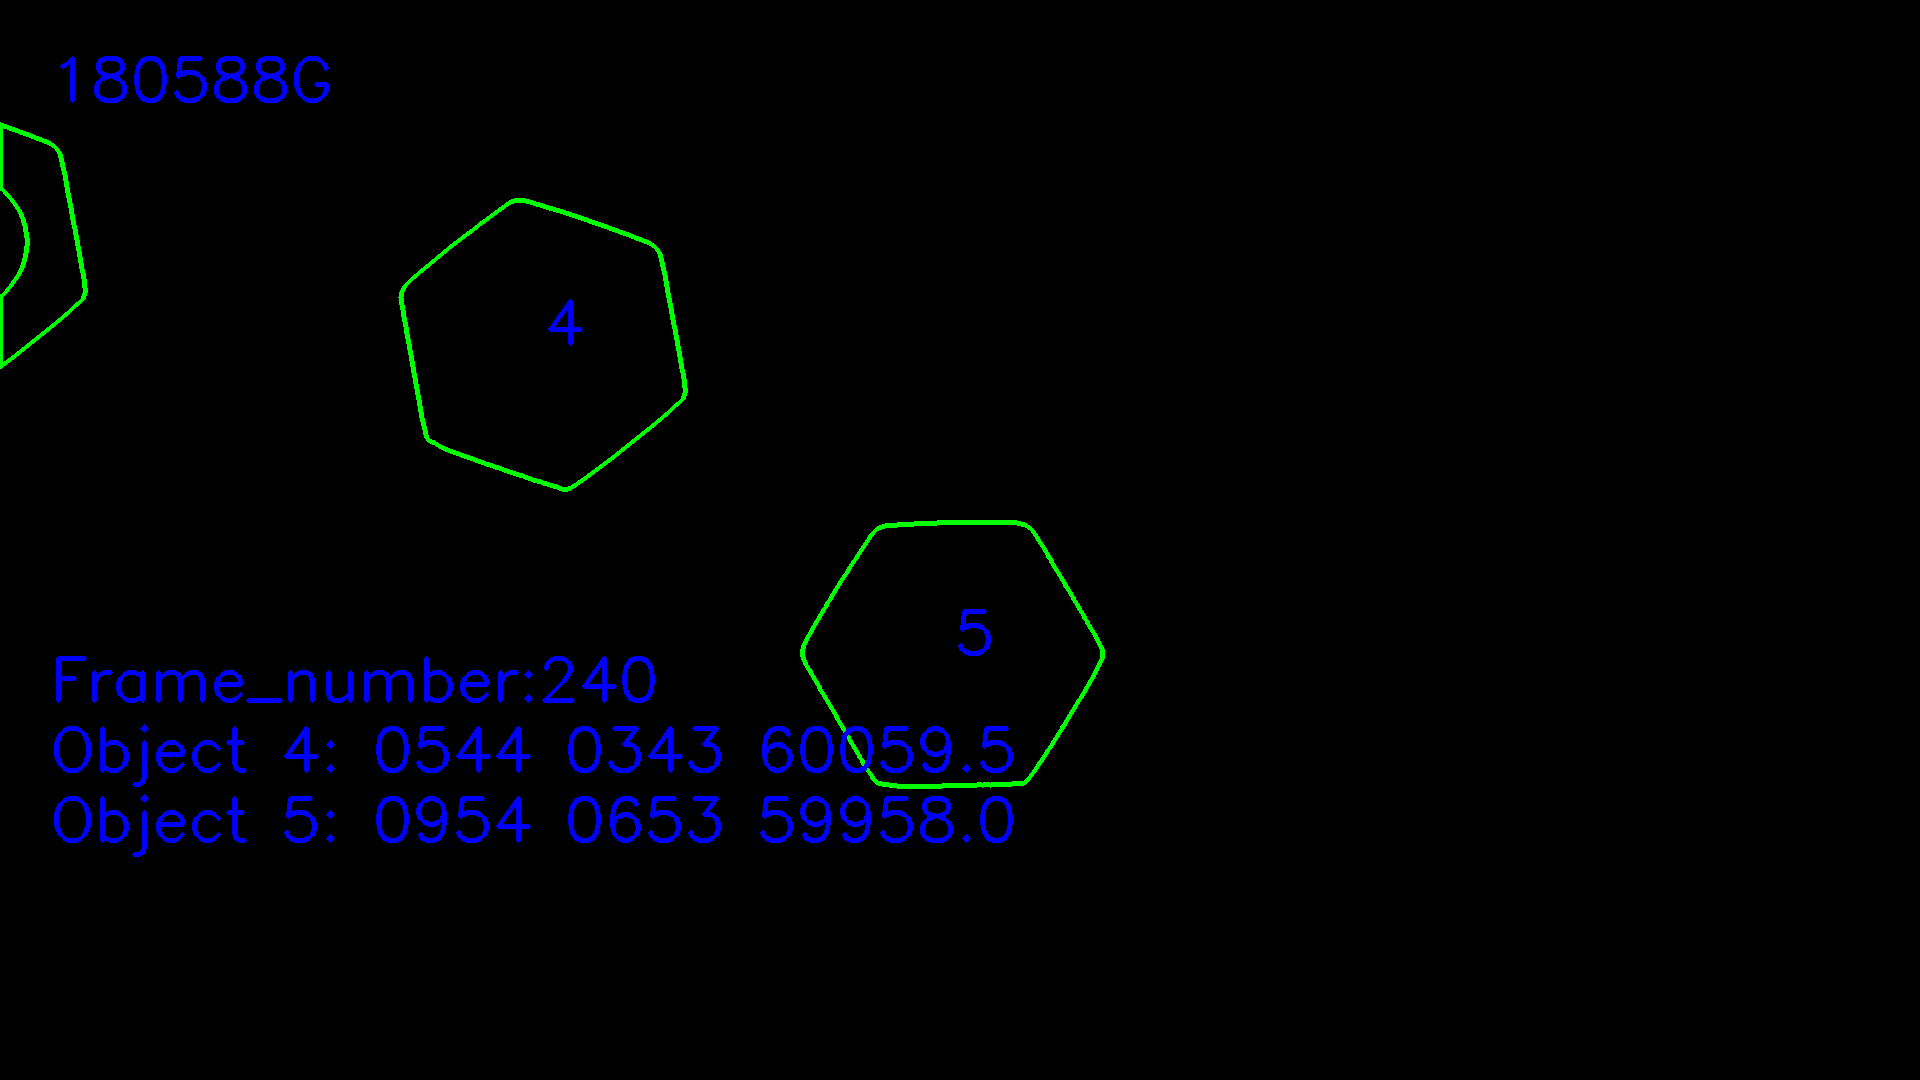

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.34000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.44000e+02, 6.53000e+02, 5.99595e+04, 5.00000e+00])]
Previousframe [array([5.44000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.5400e+02, 6.5300e+02, 5.9958e+04, 5.0000e+00])]


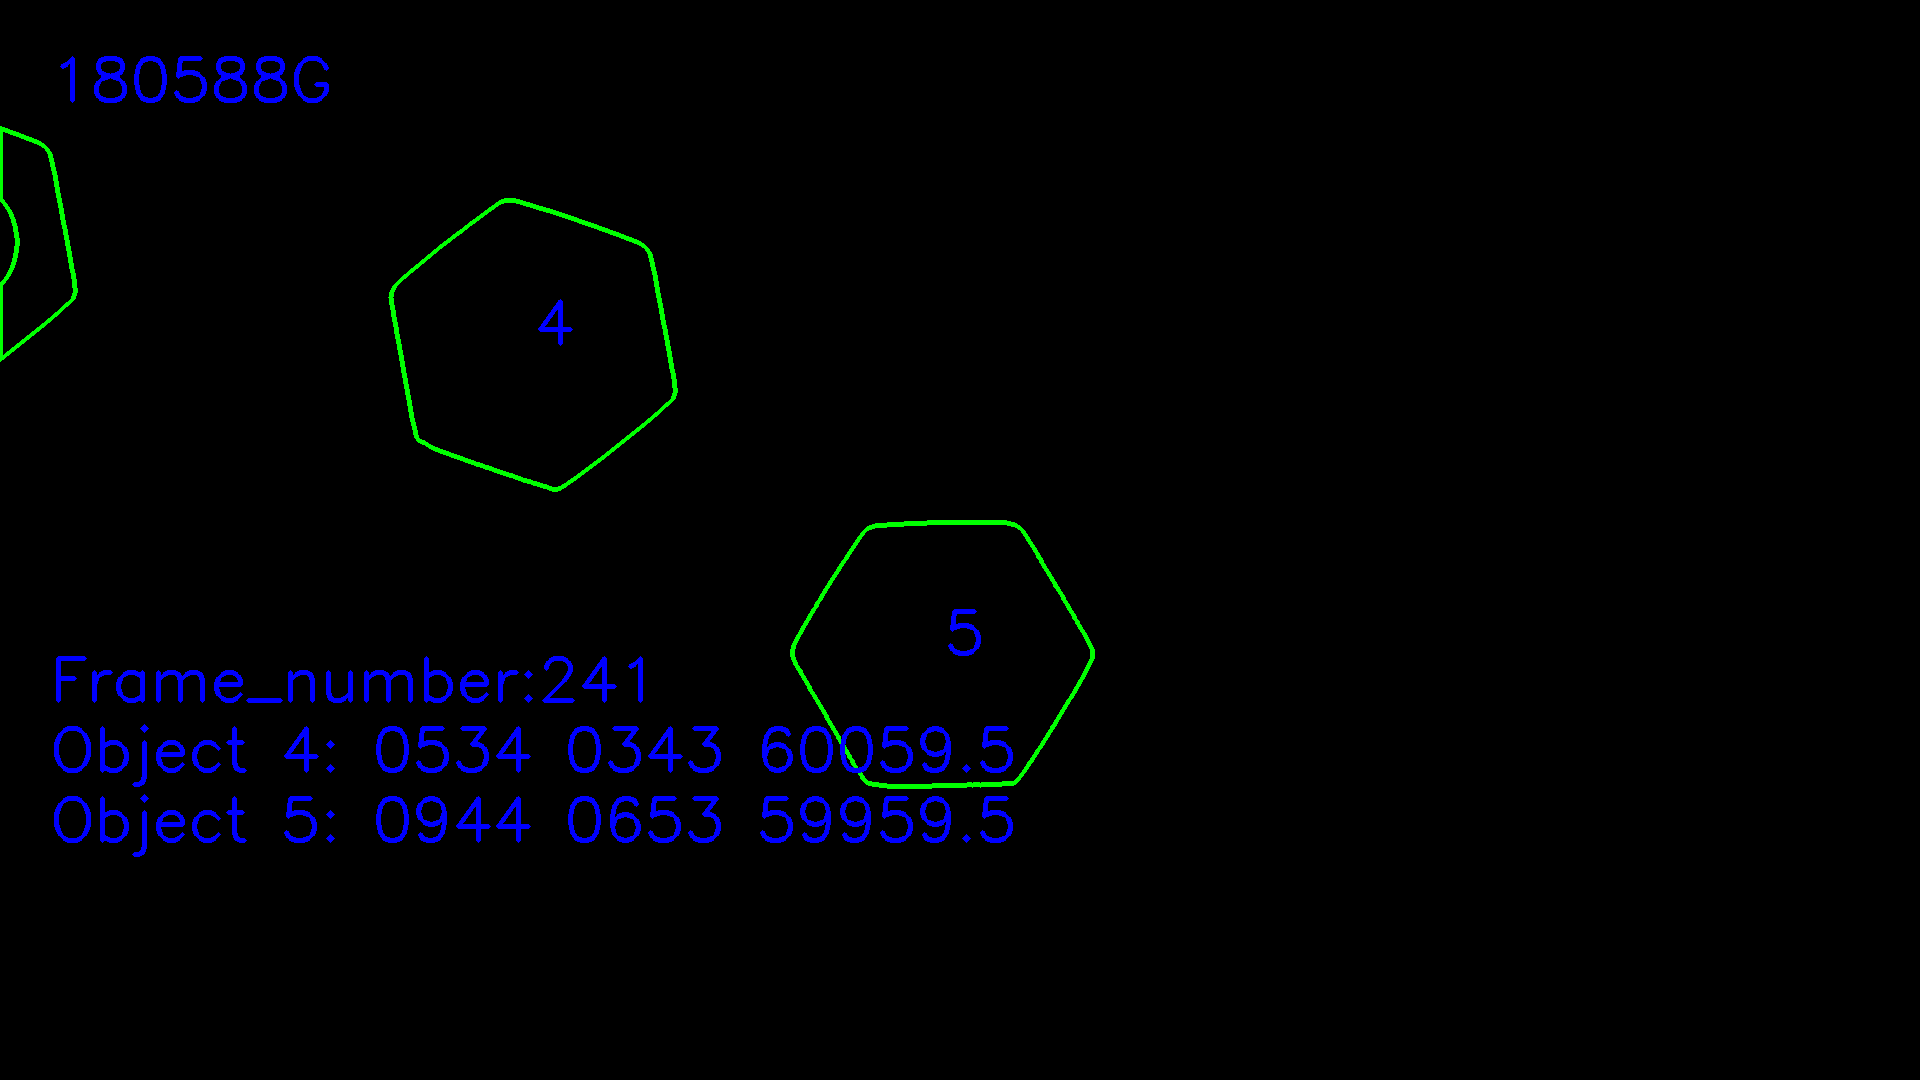

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.24000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.3400e+02, 6.5300e+02, 5.9961e+04, 5.0000e+00])]
Previousframe [array([5.34000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.44000e+02, 6.53000e+02, 5.99595e+04, 5.00000e+00])]


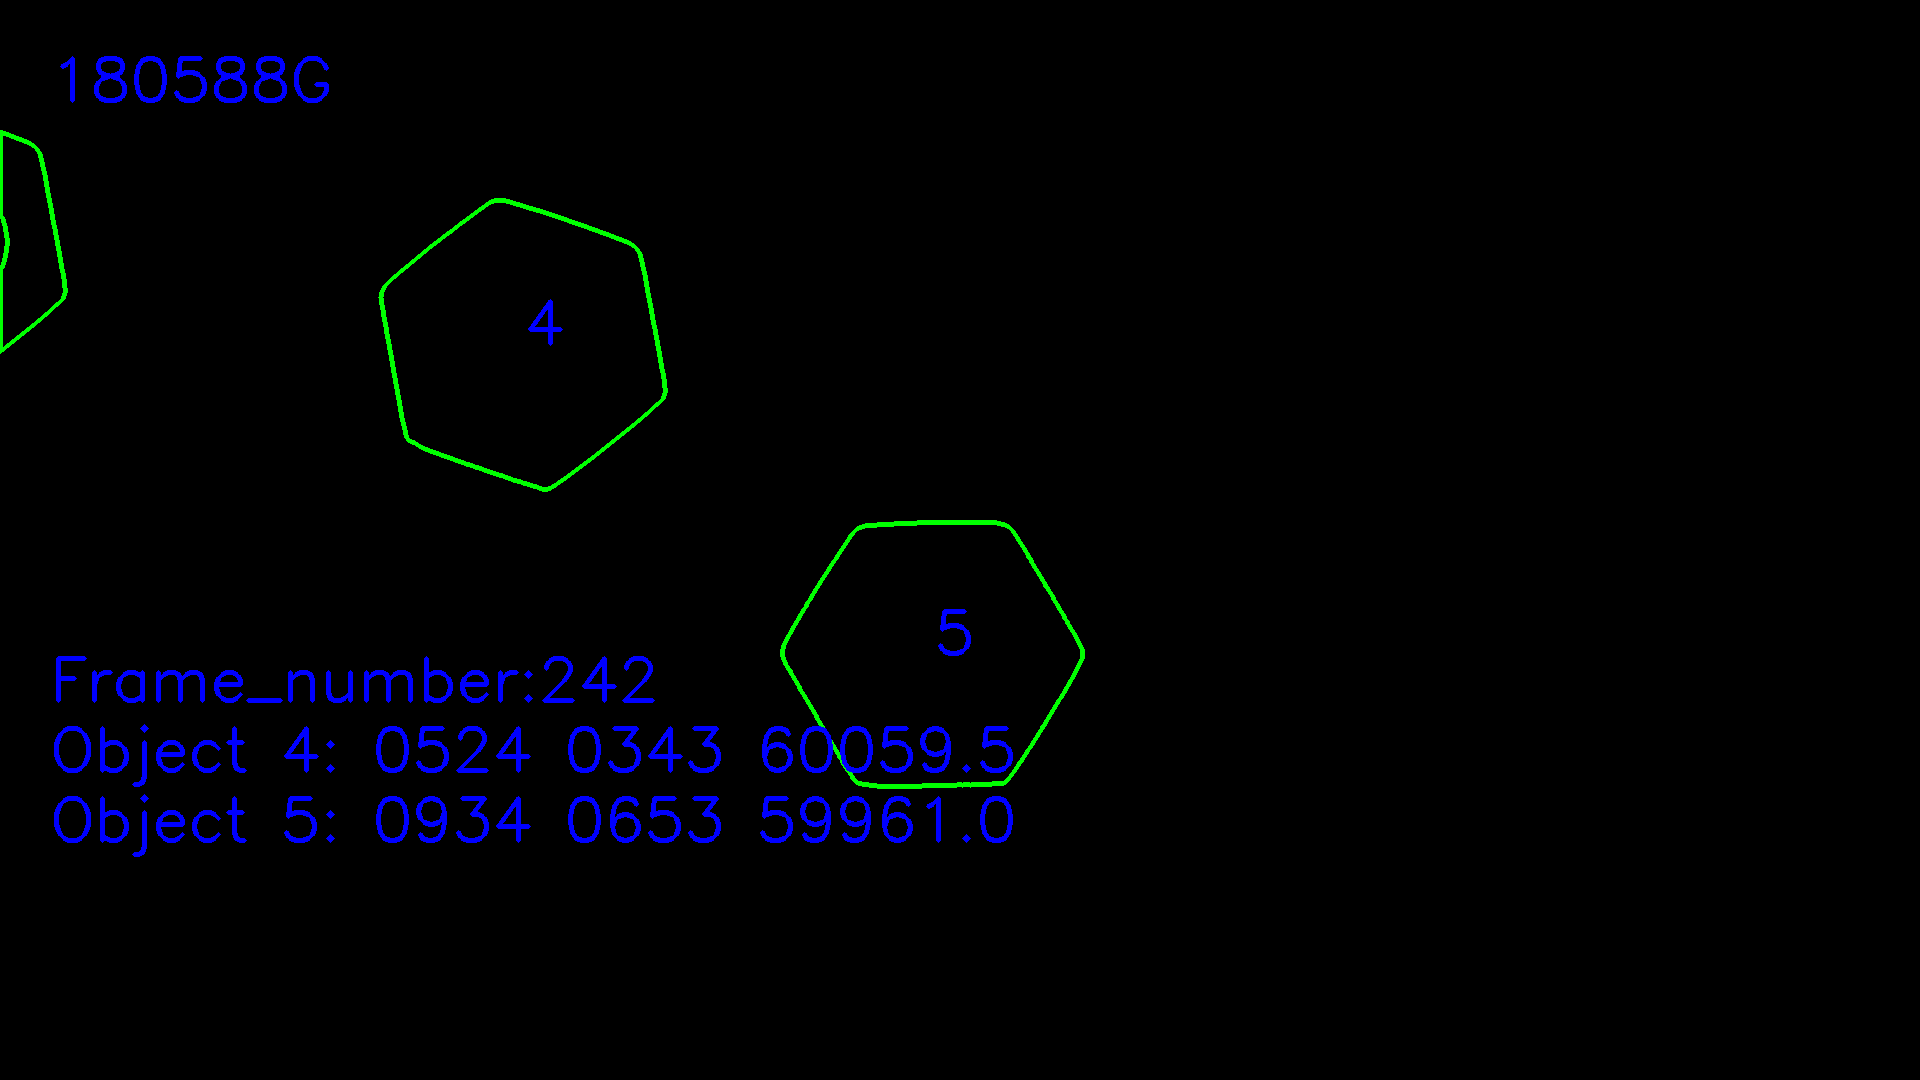

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.240e+02, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([5.24000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.3400e+02, 6.5300e+02, 5.9961e+04, 5.0000e+00])]


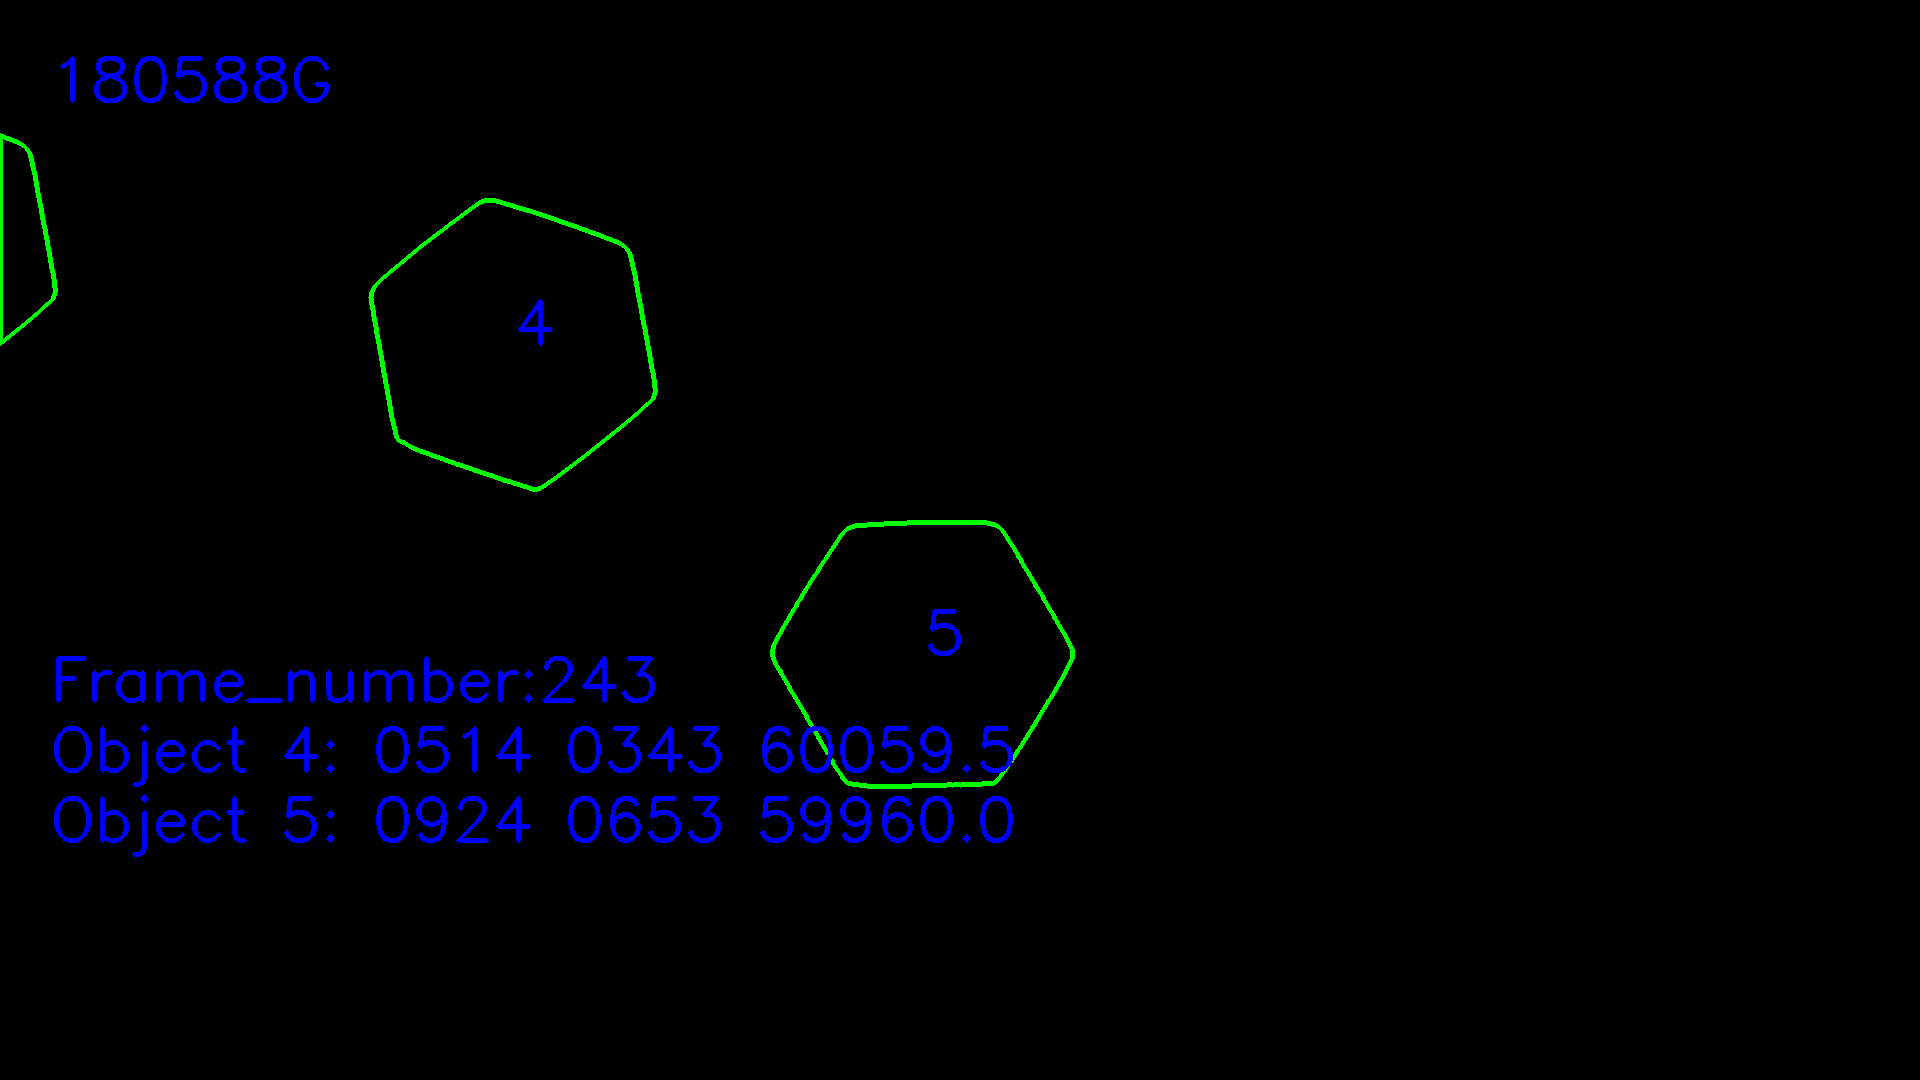

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([5.04000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.140e+02, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([5.14000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.240e+02, 6.530e+02, 5.996e+04, 5.000e+00])]


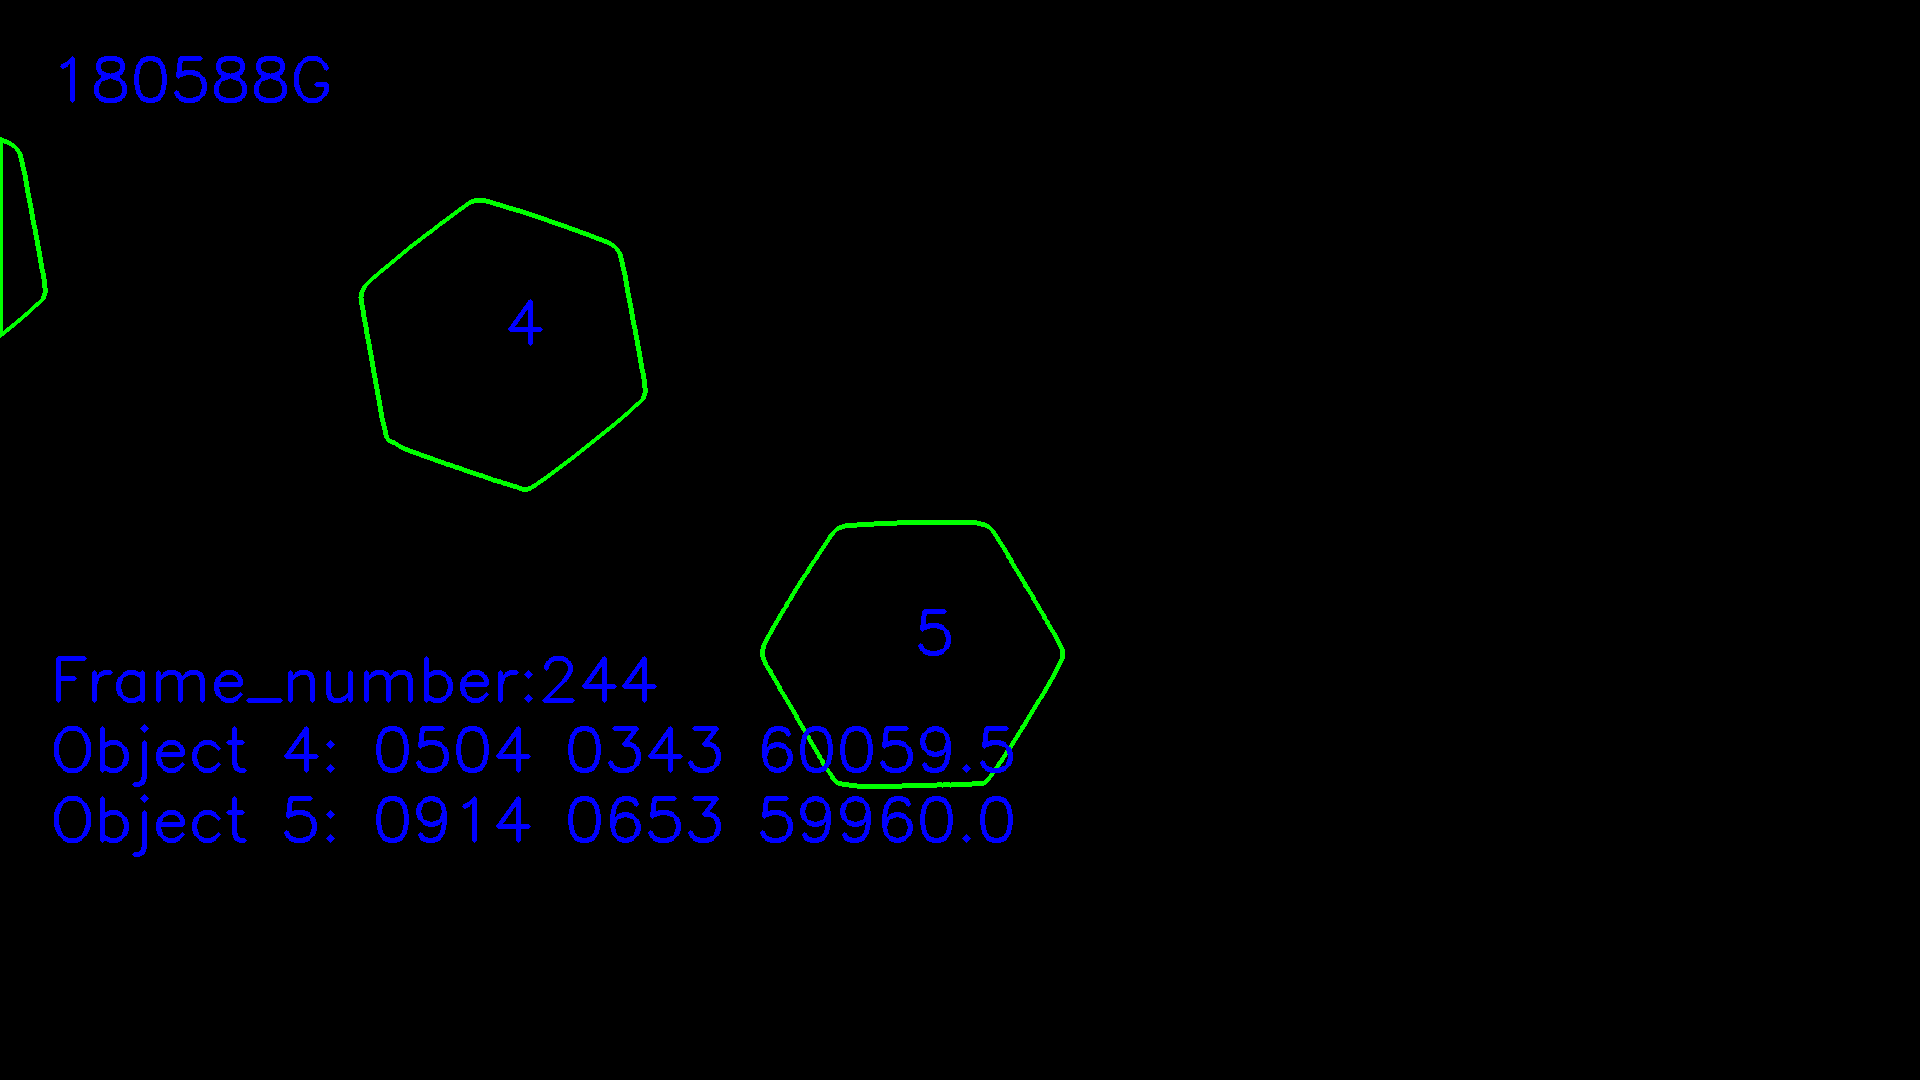

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.94000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.040e+02, 6.530e+02, 5.996e+04, 5.000e+00])]
Previousframe [array([5.04000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.140e+02, 6.530e+02, 5.996e+04, 5.000e+00])]


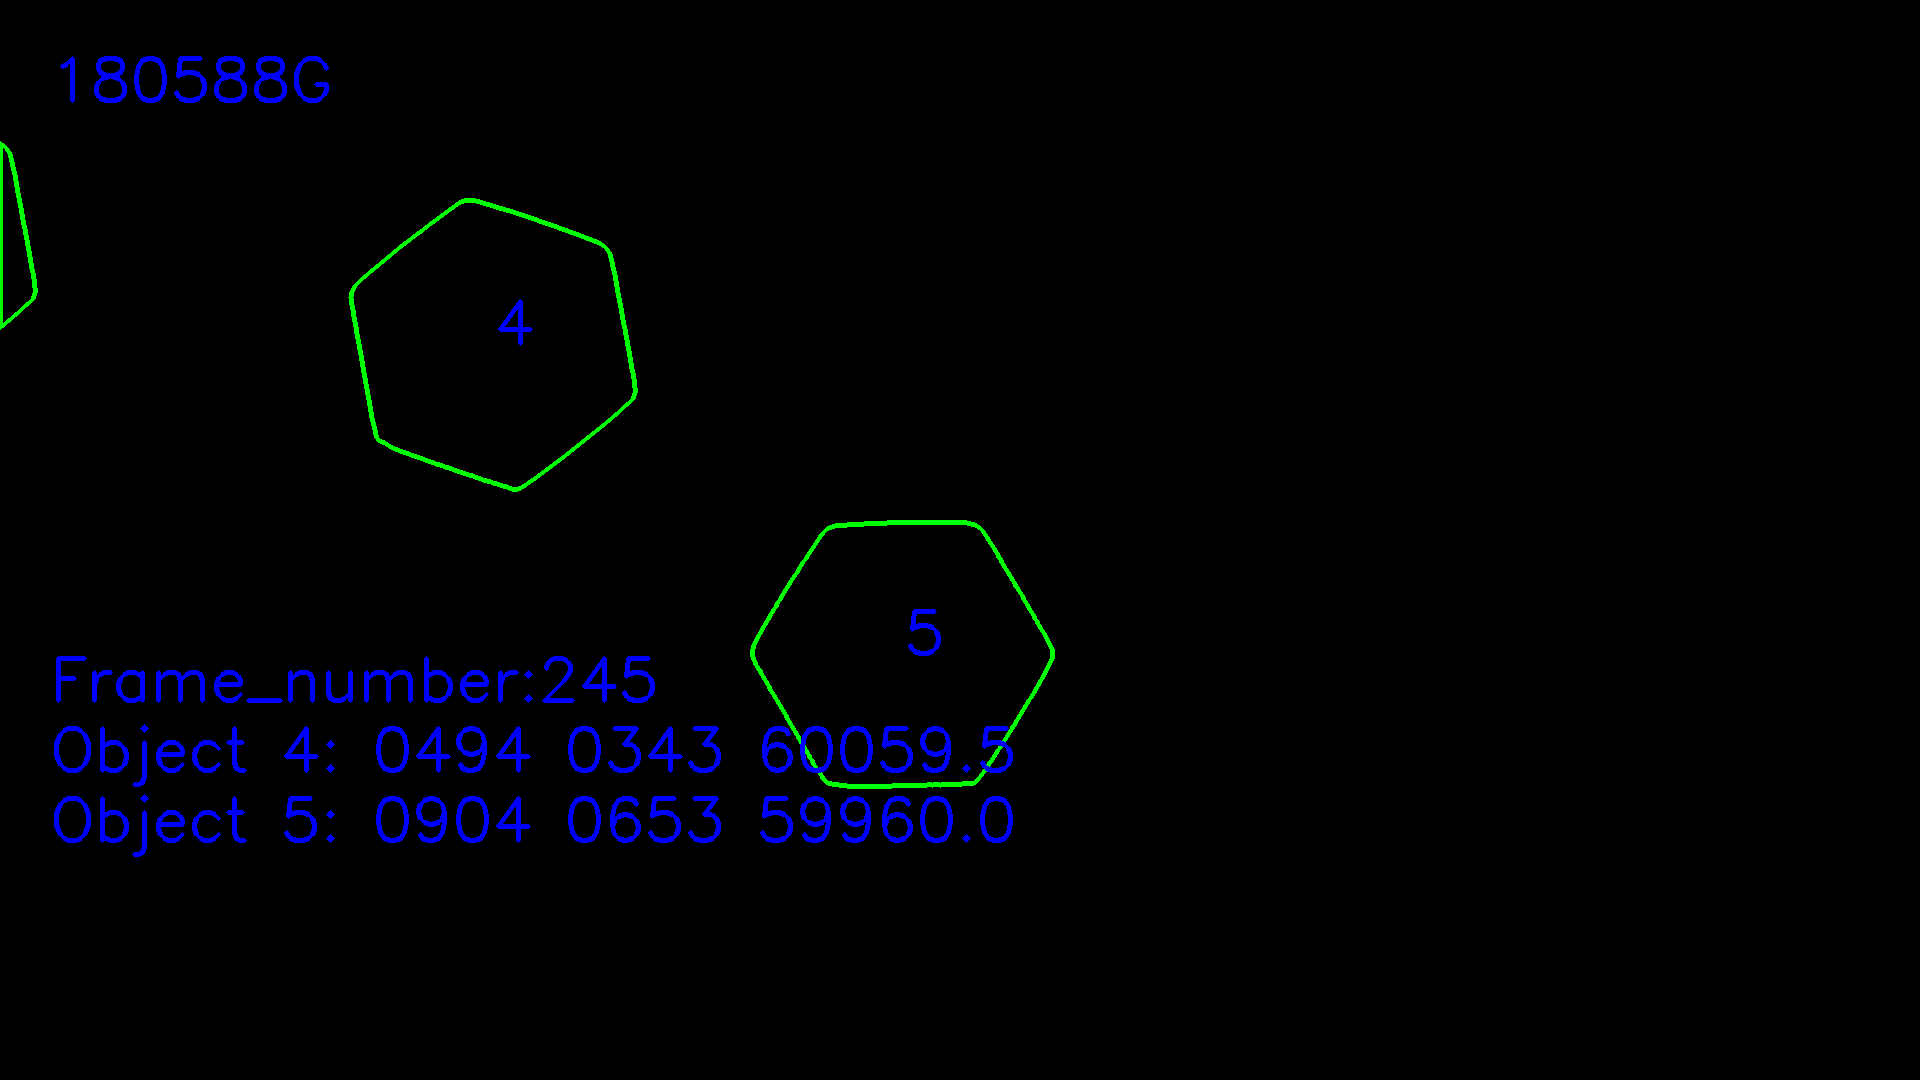

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([8.94000e+02, 6.53000e+02, 5.99605e+04, 5.00000e+00])]
Previousframe [array([4.94000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([9.040e+02, 6.530e+02, 5.996e+04, 5.000e+00])]


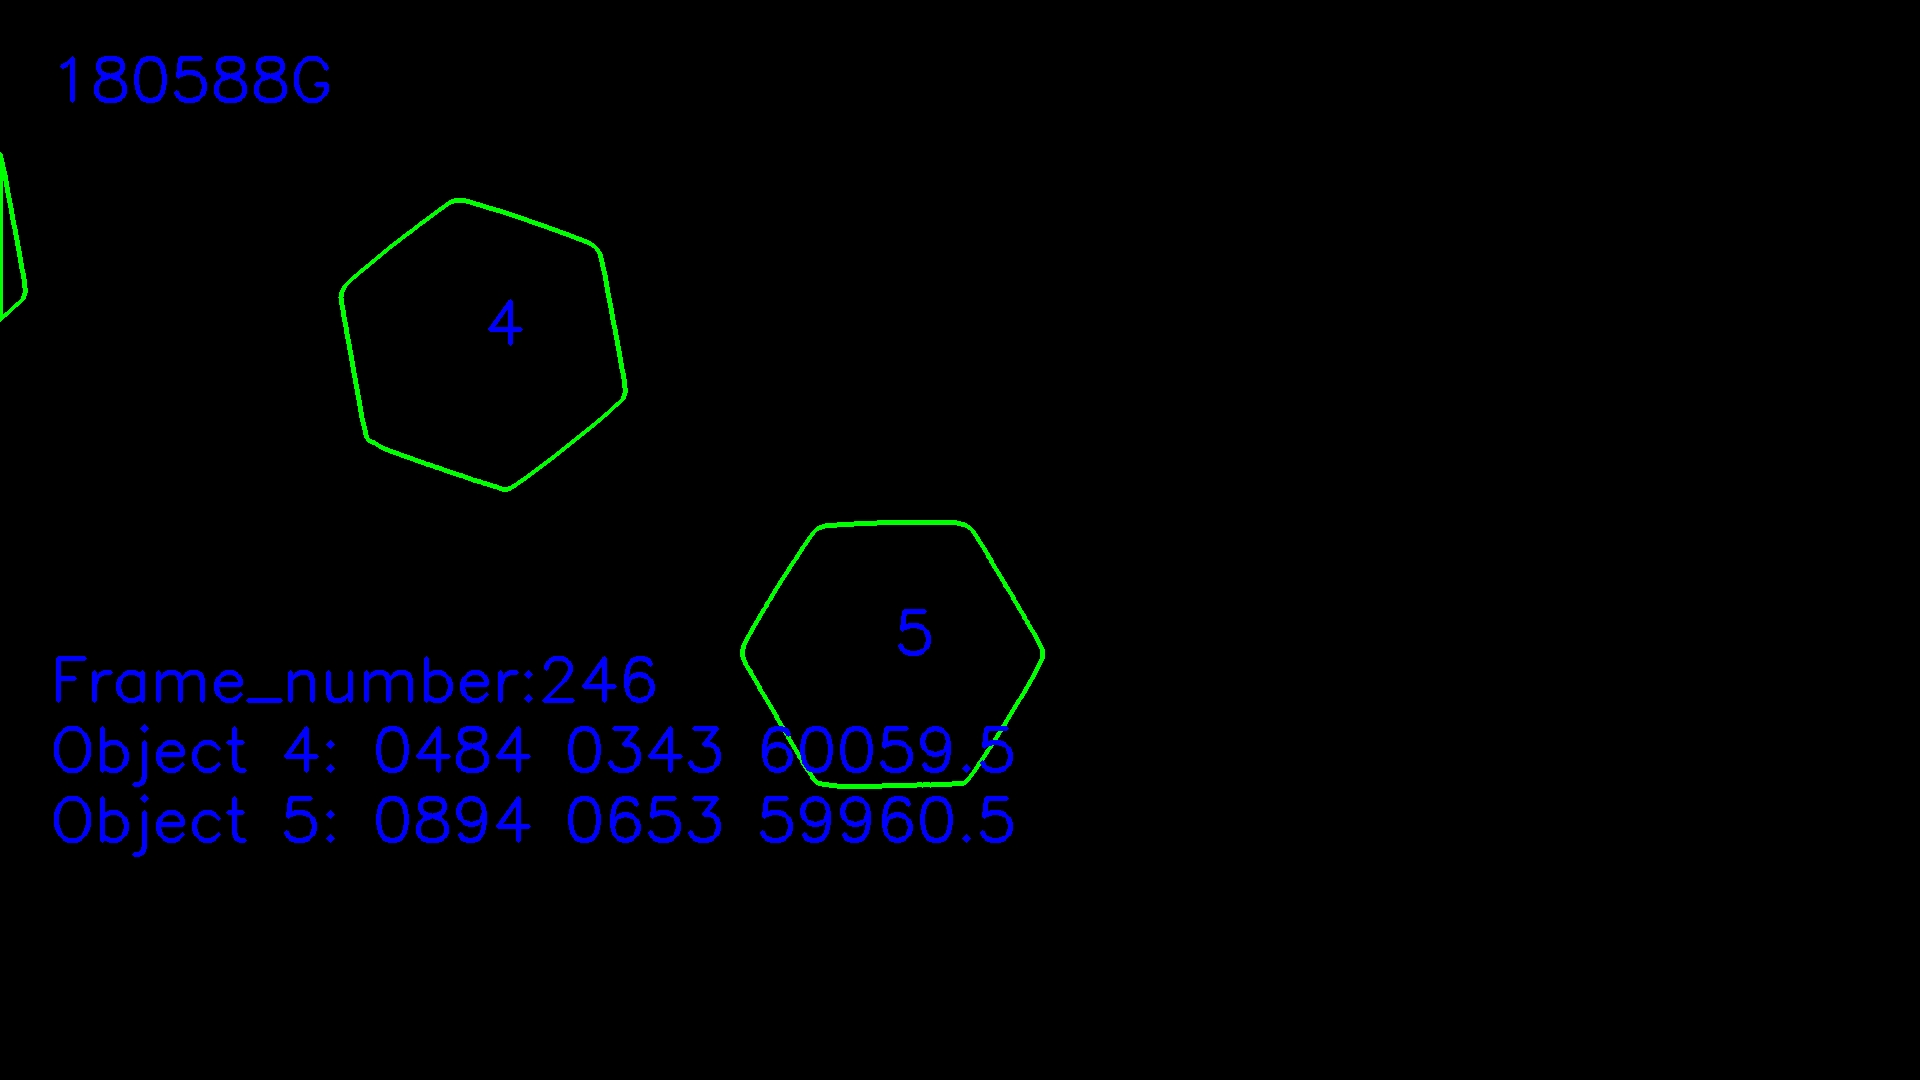

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.74000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.84000e+02, 6.53000e+02, 5.99575e+04, 5.00000e+00])]
Previousframe [array([4.84000e+02, 3.43000e+02, 6.00595e+04, 4.00000e+00]), array([8.94000e+02, 6.53000e+02, 5.99605e+04, 5.00000e+00])]


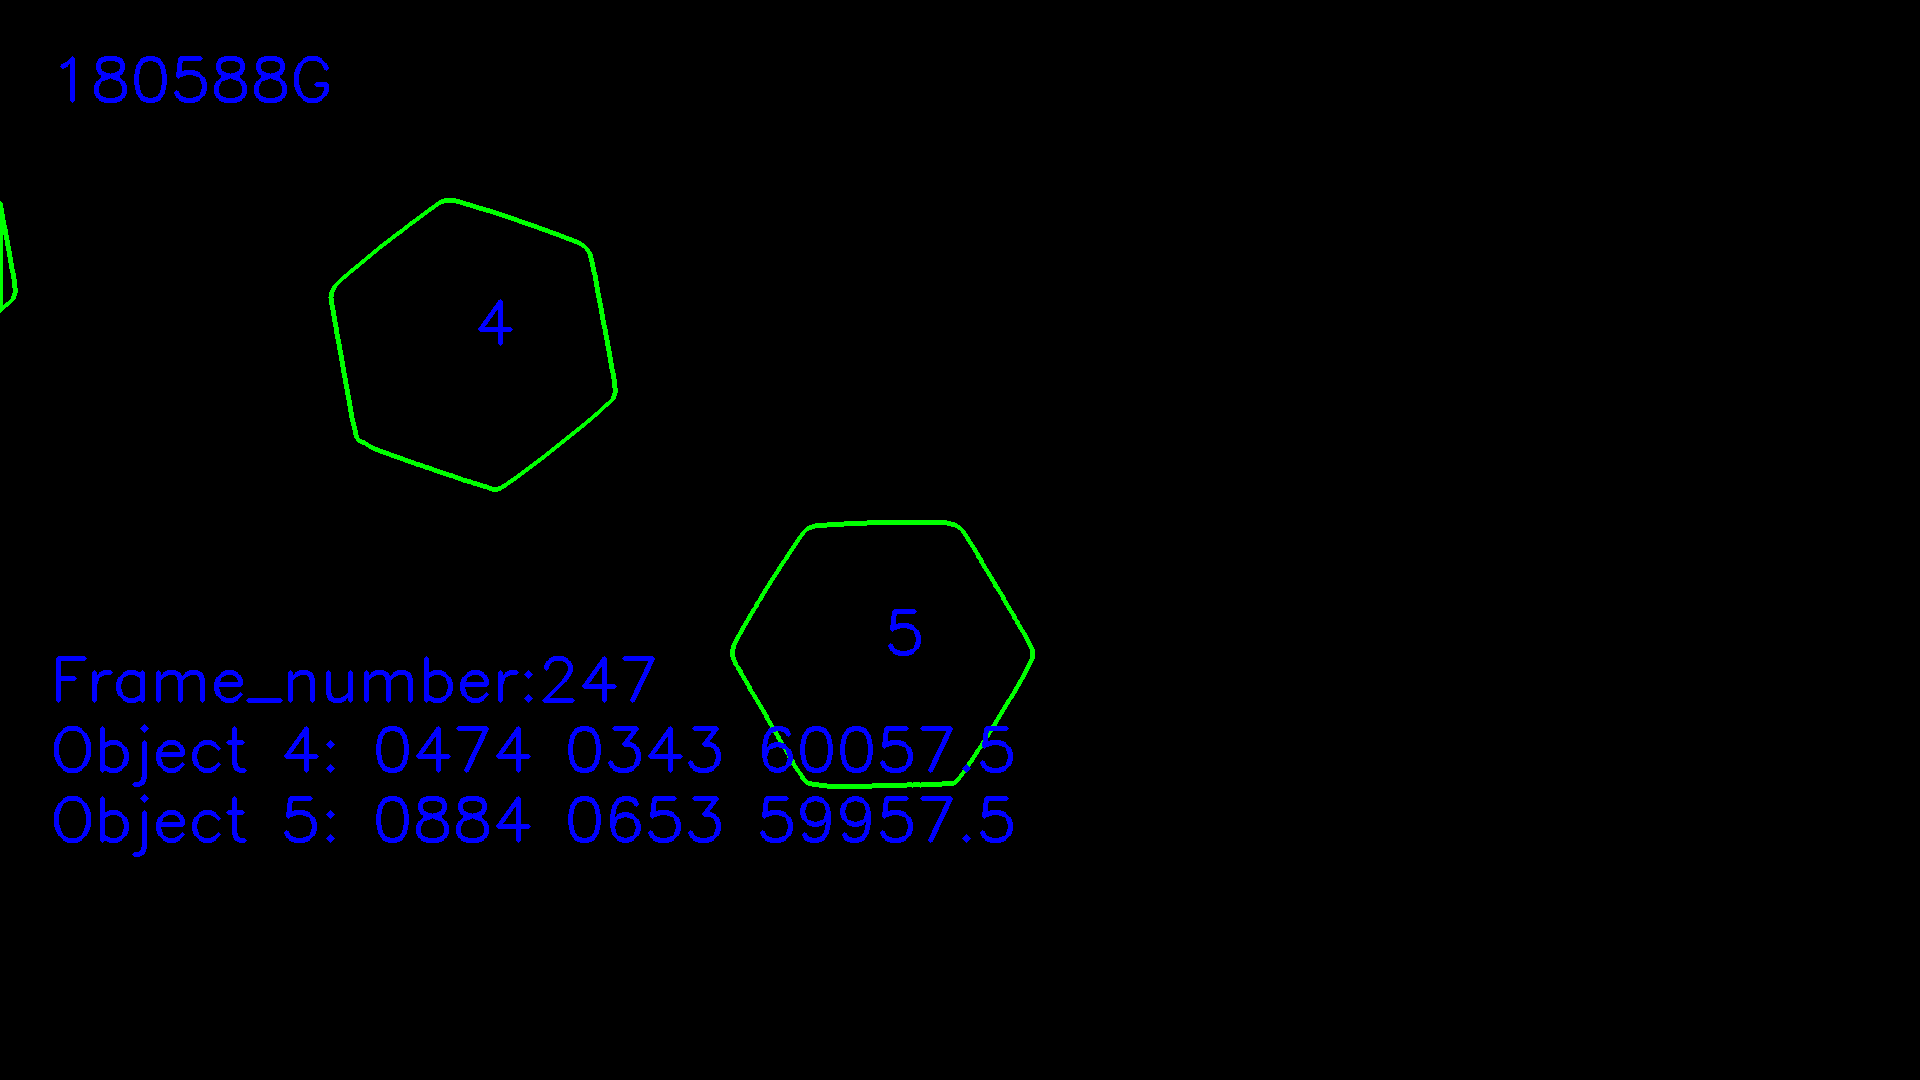

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.64000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.74000e+02, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([4.74000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.84000e+02, 6.53000e+02, 5.99575e+04, 5.00000e+00])]


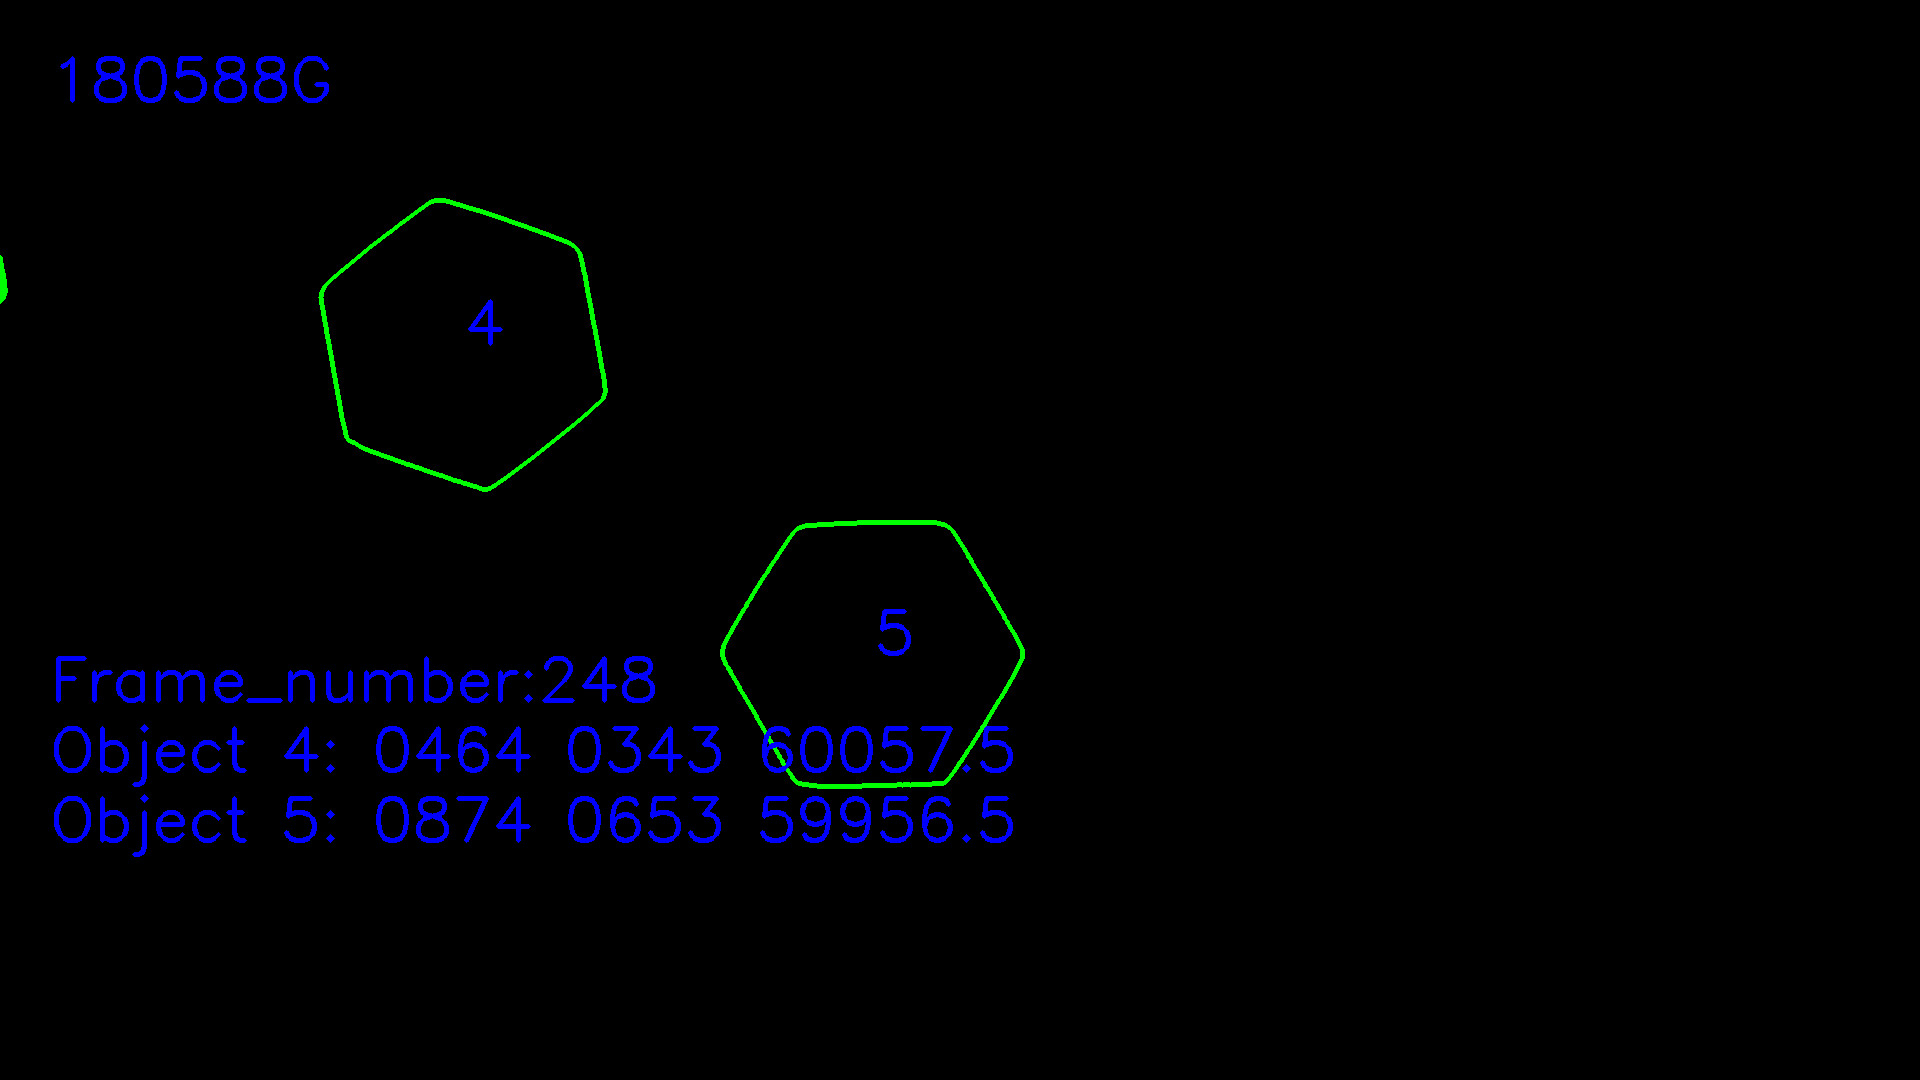

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.54000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([8.6400e+02, 6.5300e+02, 5.9959e+04, 5.0000e+00])]
Previousframe [array([4.64000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.74000e+02, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


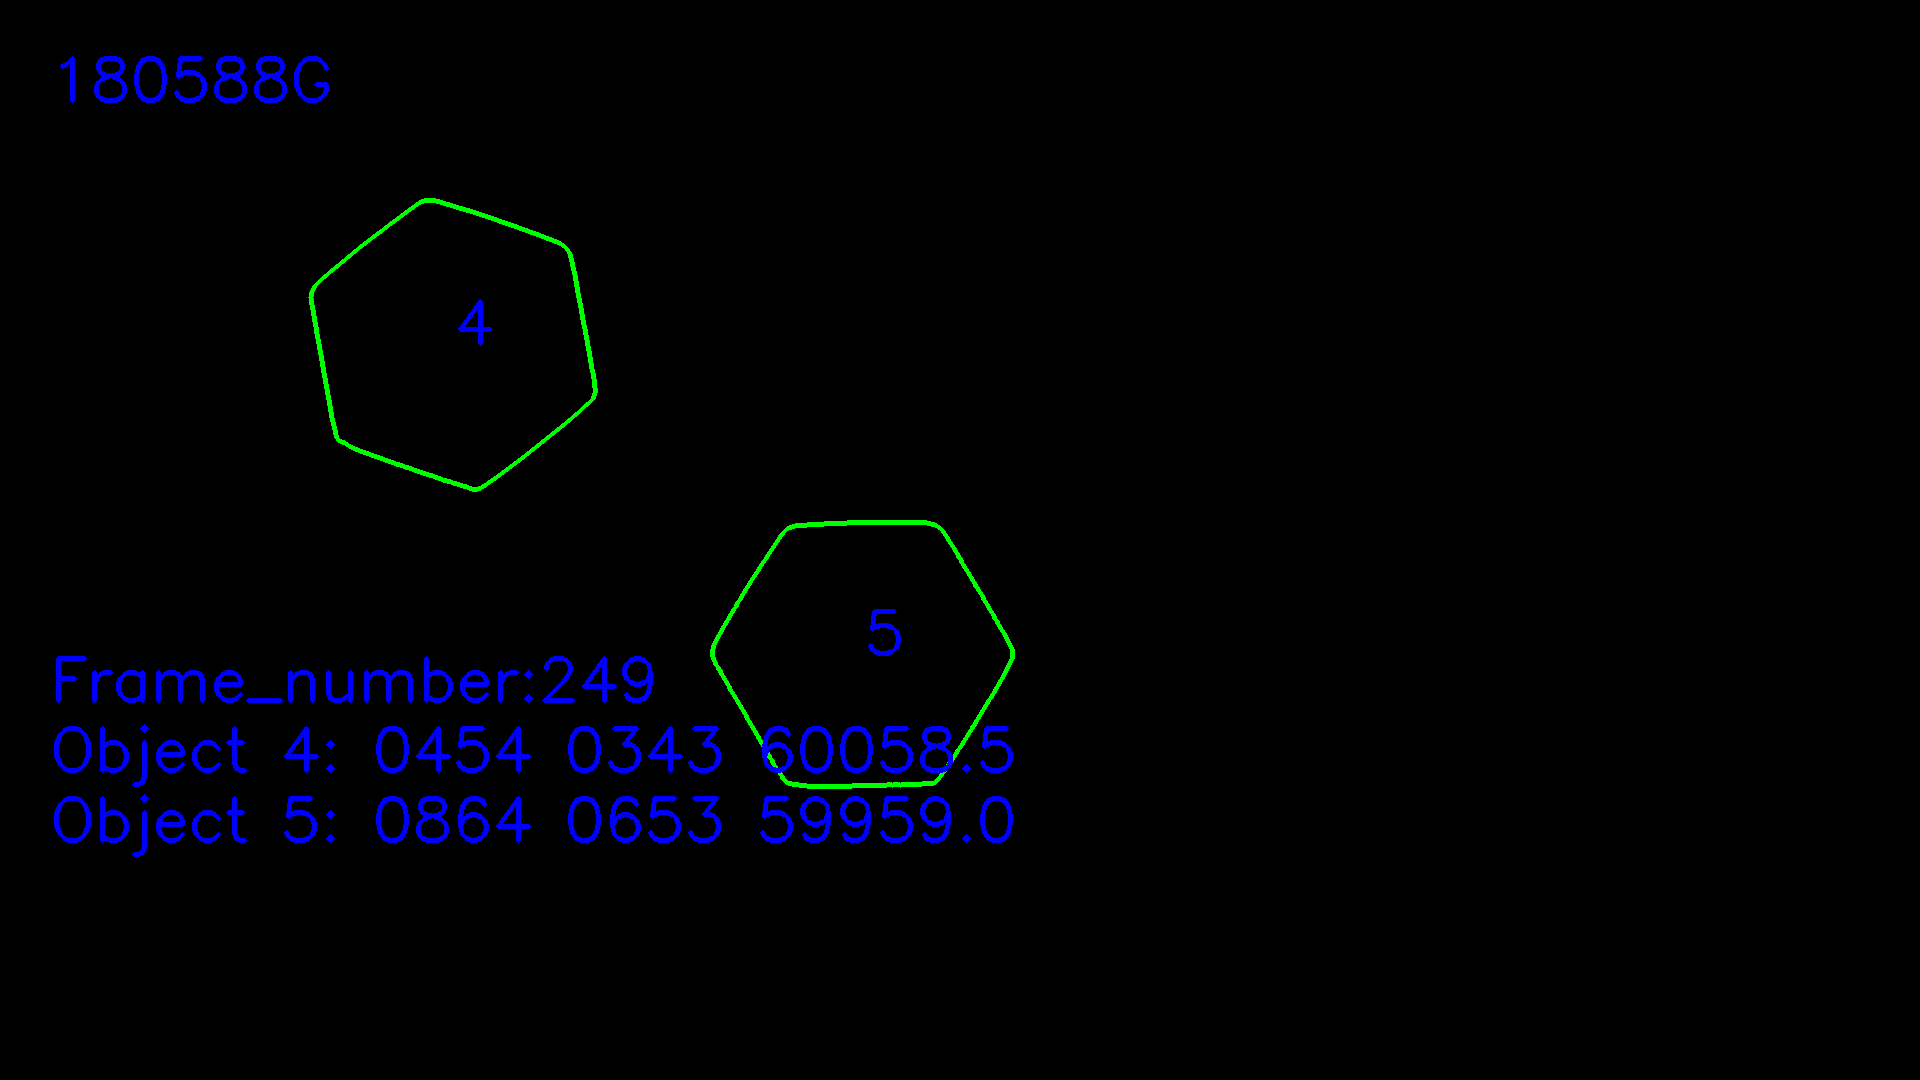

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.44000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([8.5400e+02, 6.5300e+02, 5.9957e+04, 5.0000e+00])]
Previousframe [array([4.54000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([8.6400e+02, 6.5300e+02, 5.9959e+04, 5.0000e+00])]


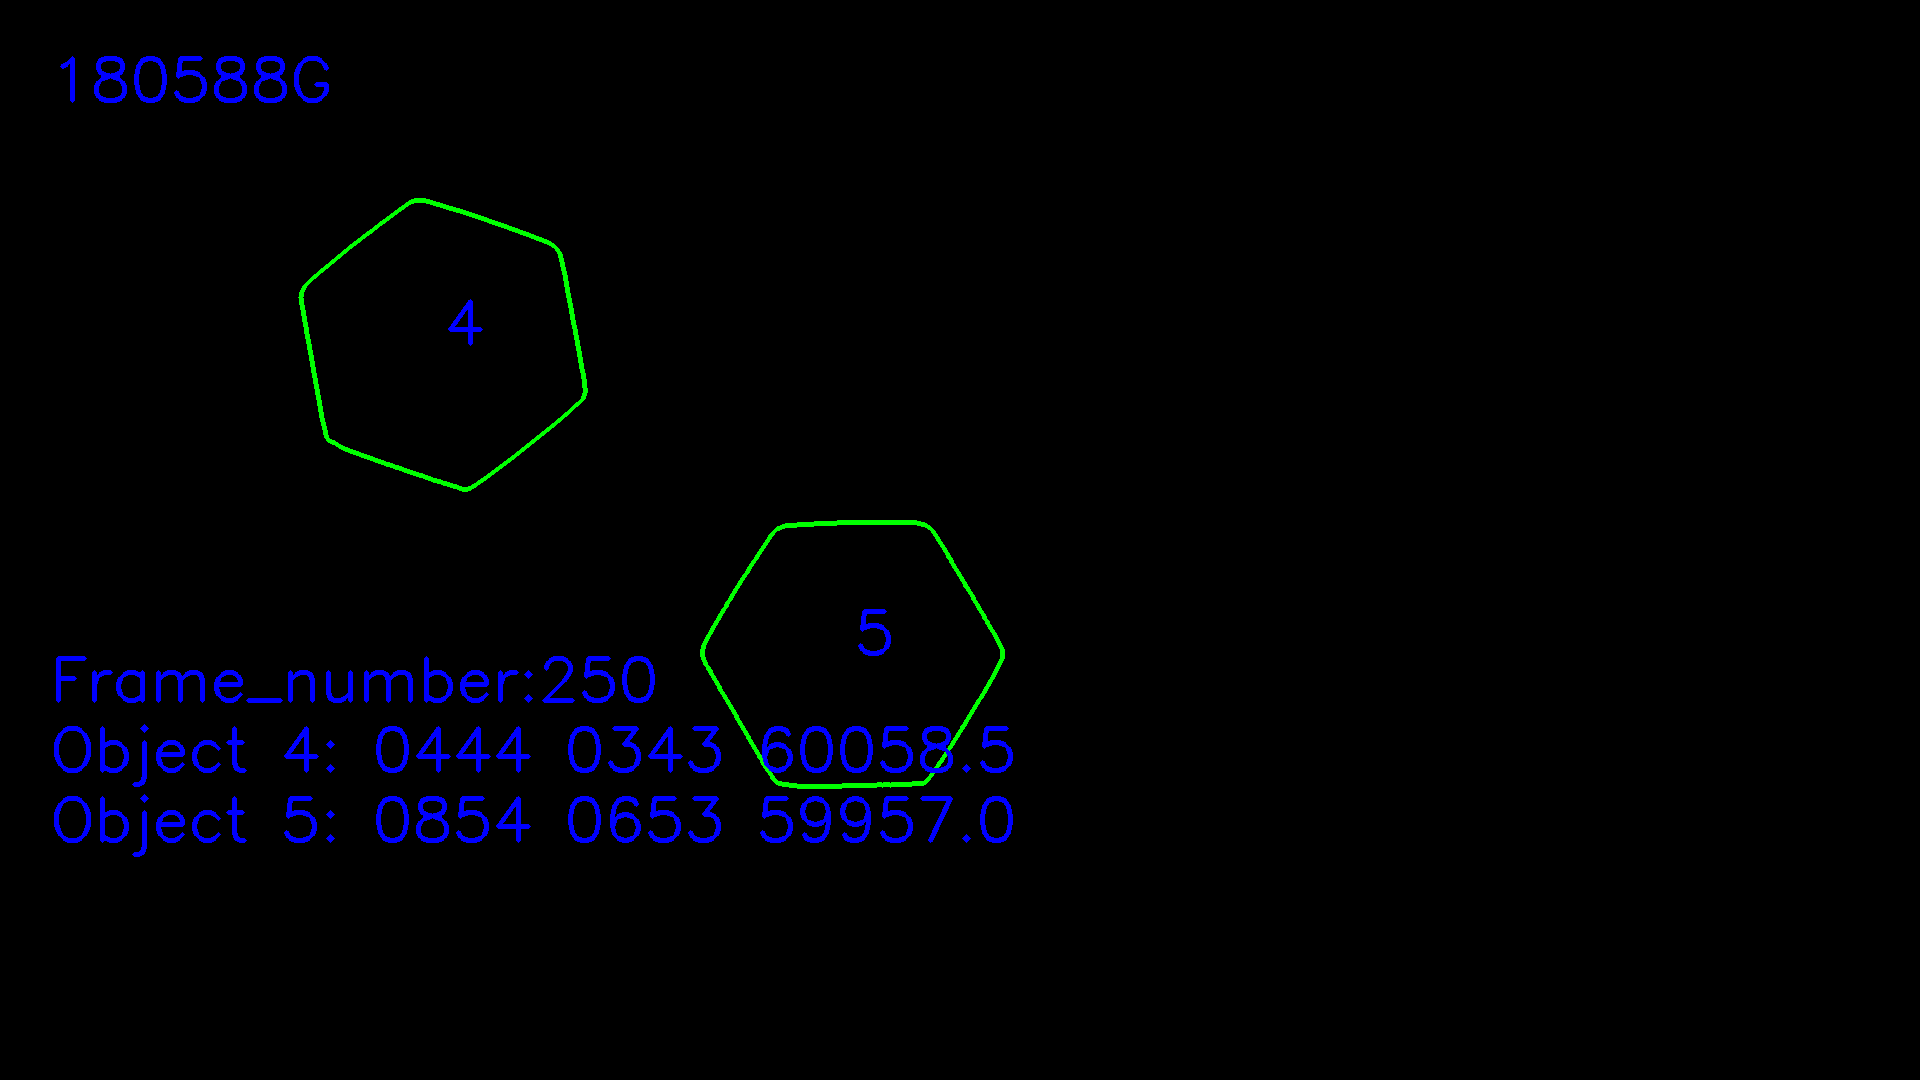

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.34000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.44000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([4.44000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([8.5400e+02, 6.5300e+02, 5.9957e+04, 5.0000e+00])]


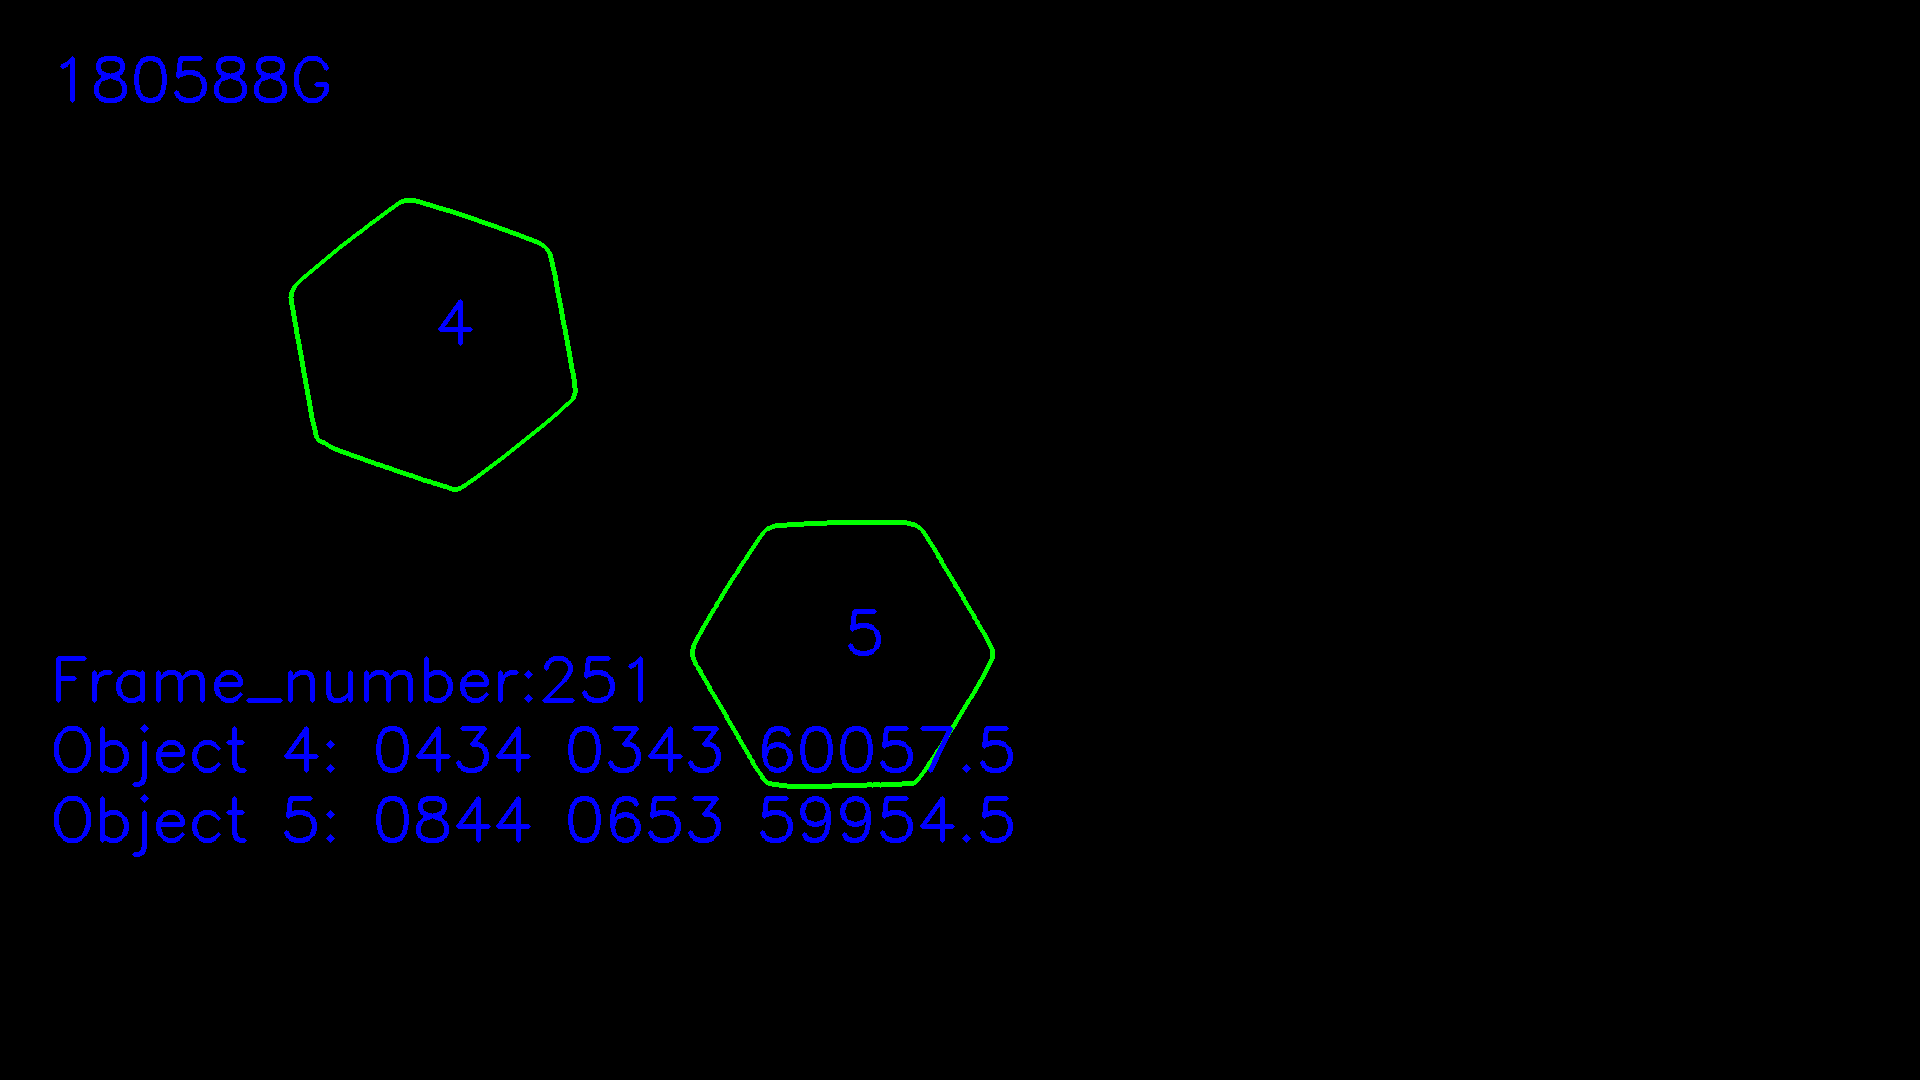

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([8.34000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([4.34000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.44000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


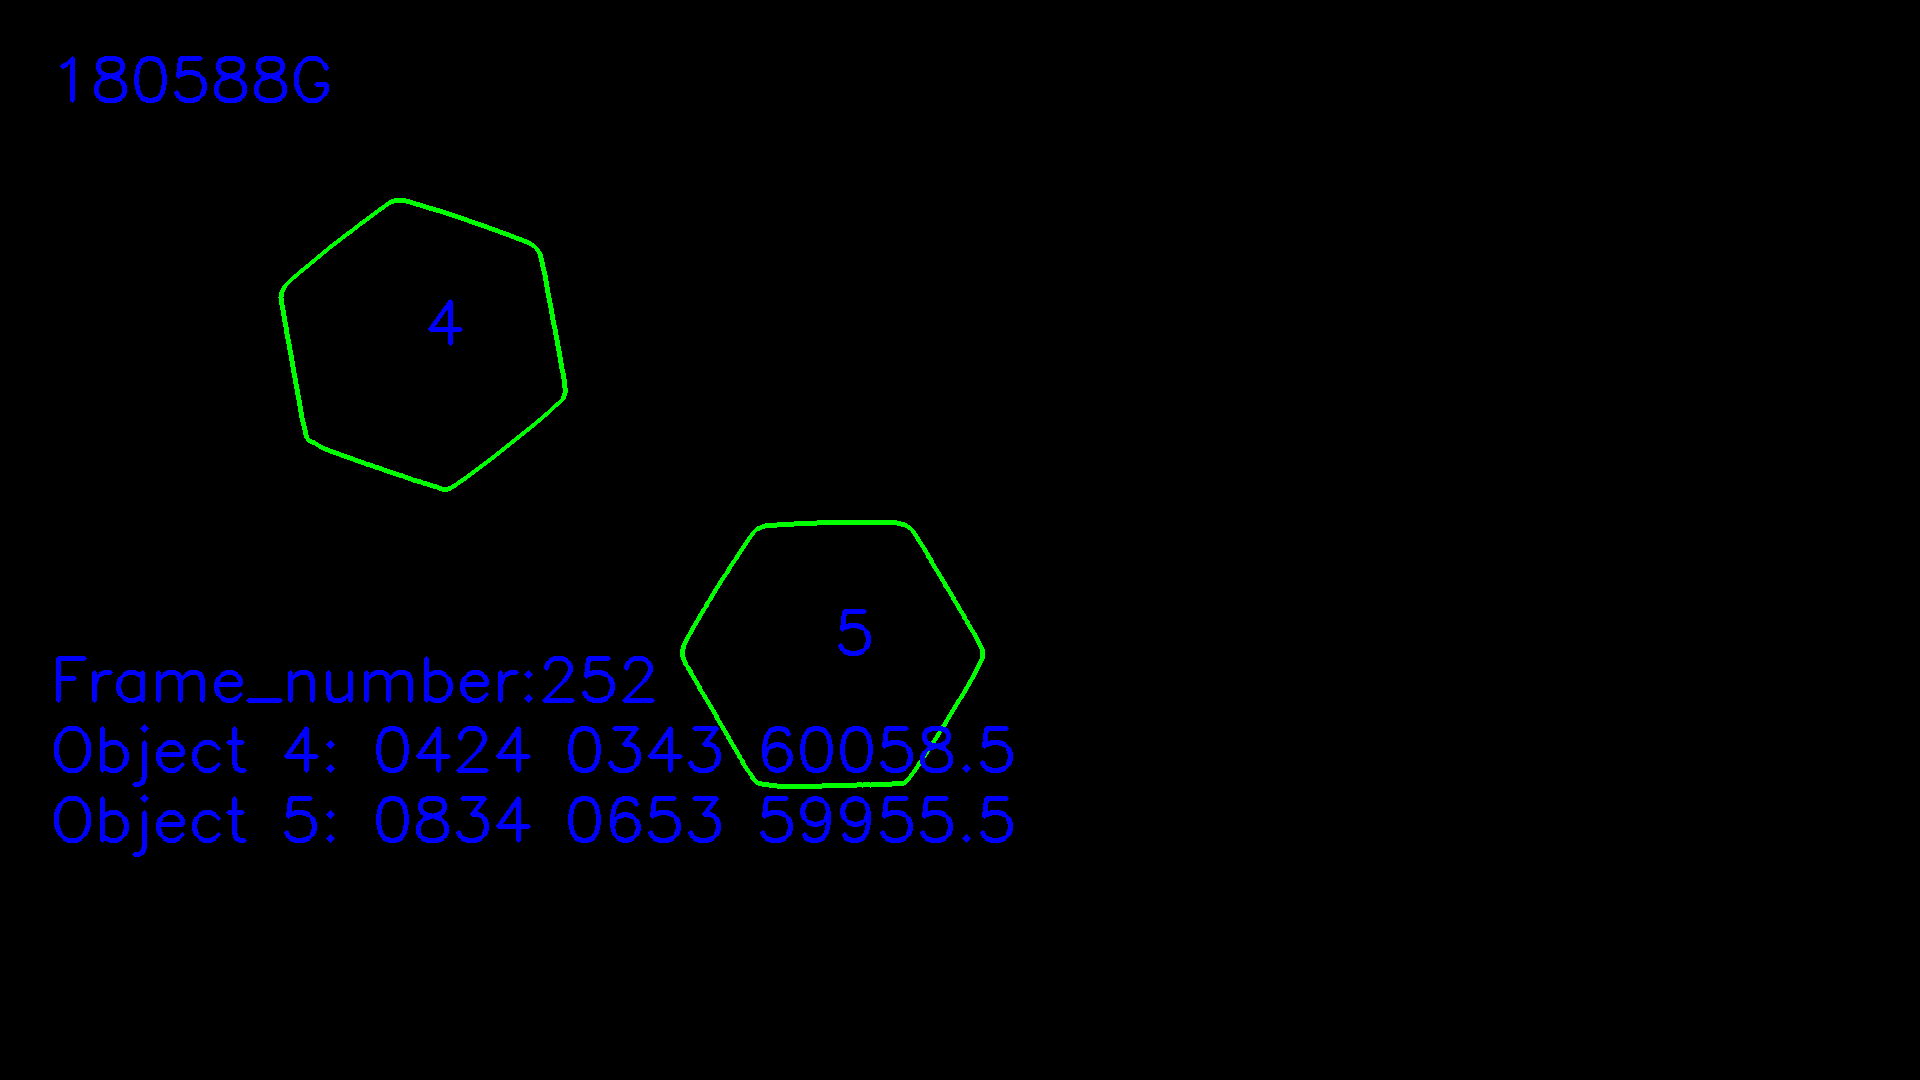

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.14000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([8.24000e+02, 6.53000e+02, 5.99575e+04, 5.00000e+00])]
Previousframe [array([4.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([8.34000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


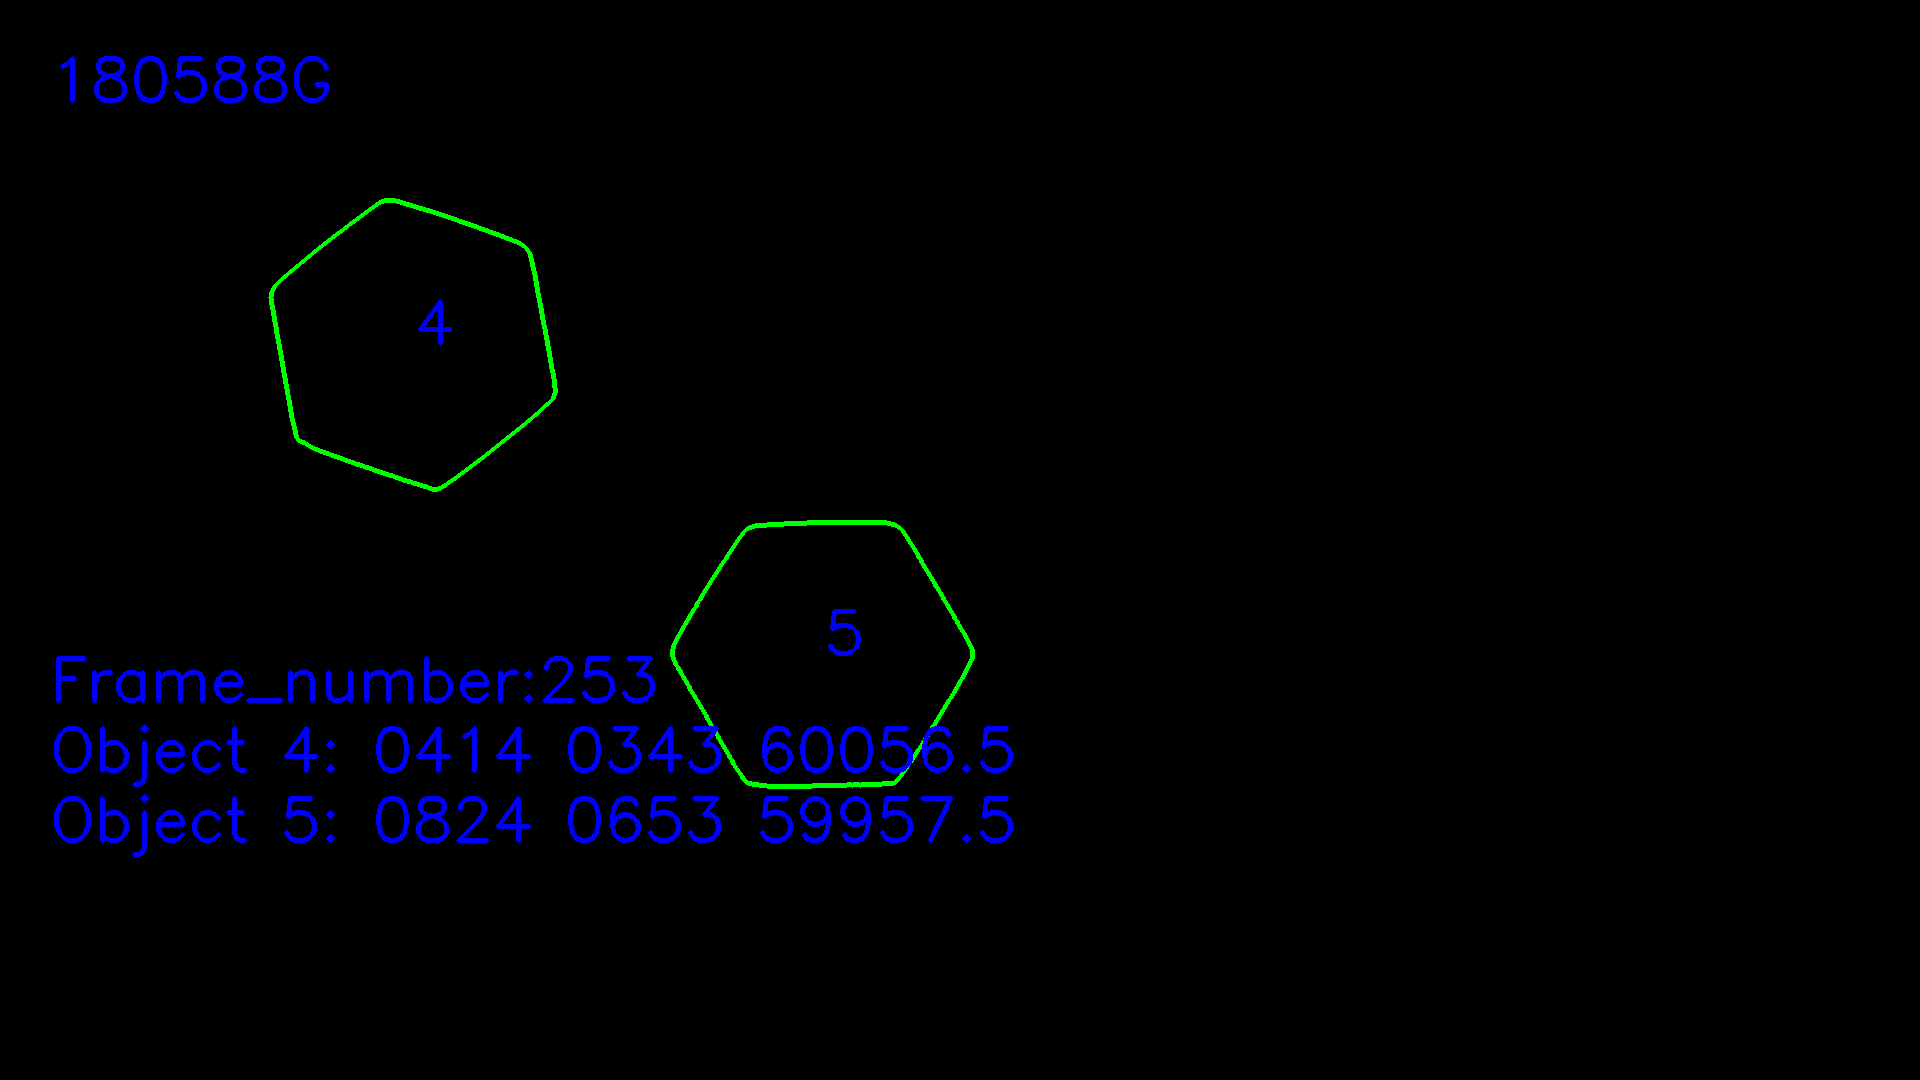

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([4.04000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([8.14000e+02, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([4.14000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([8.24000e+02, 6.53000e+02, 5.99575e+04, 5.00000e+00])]


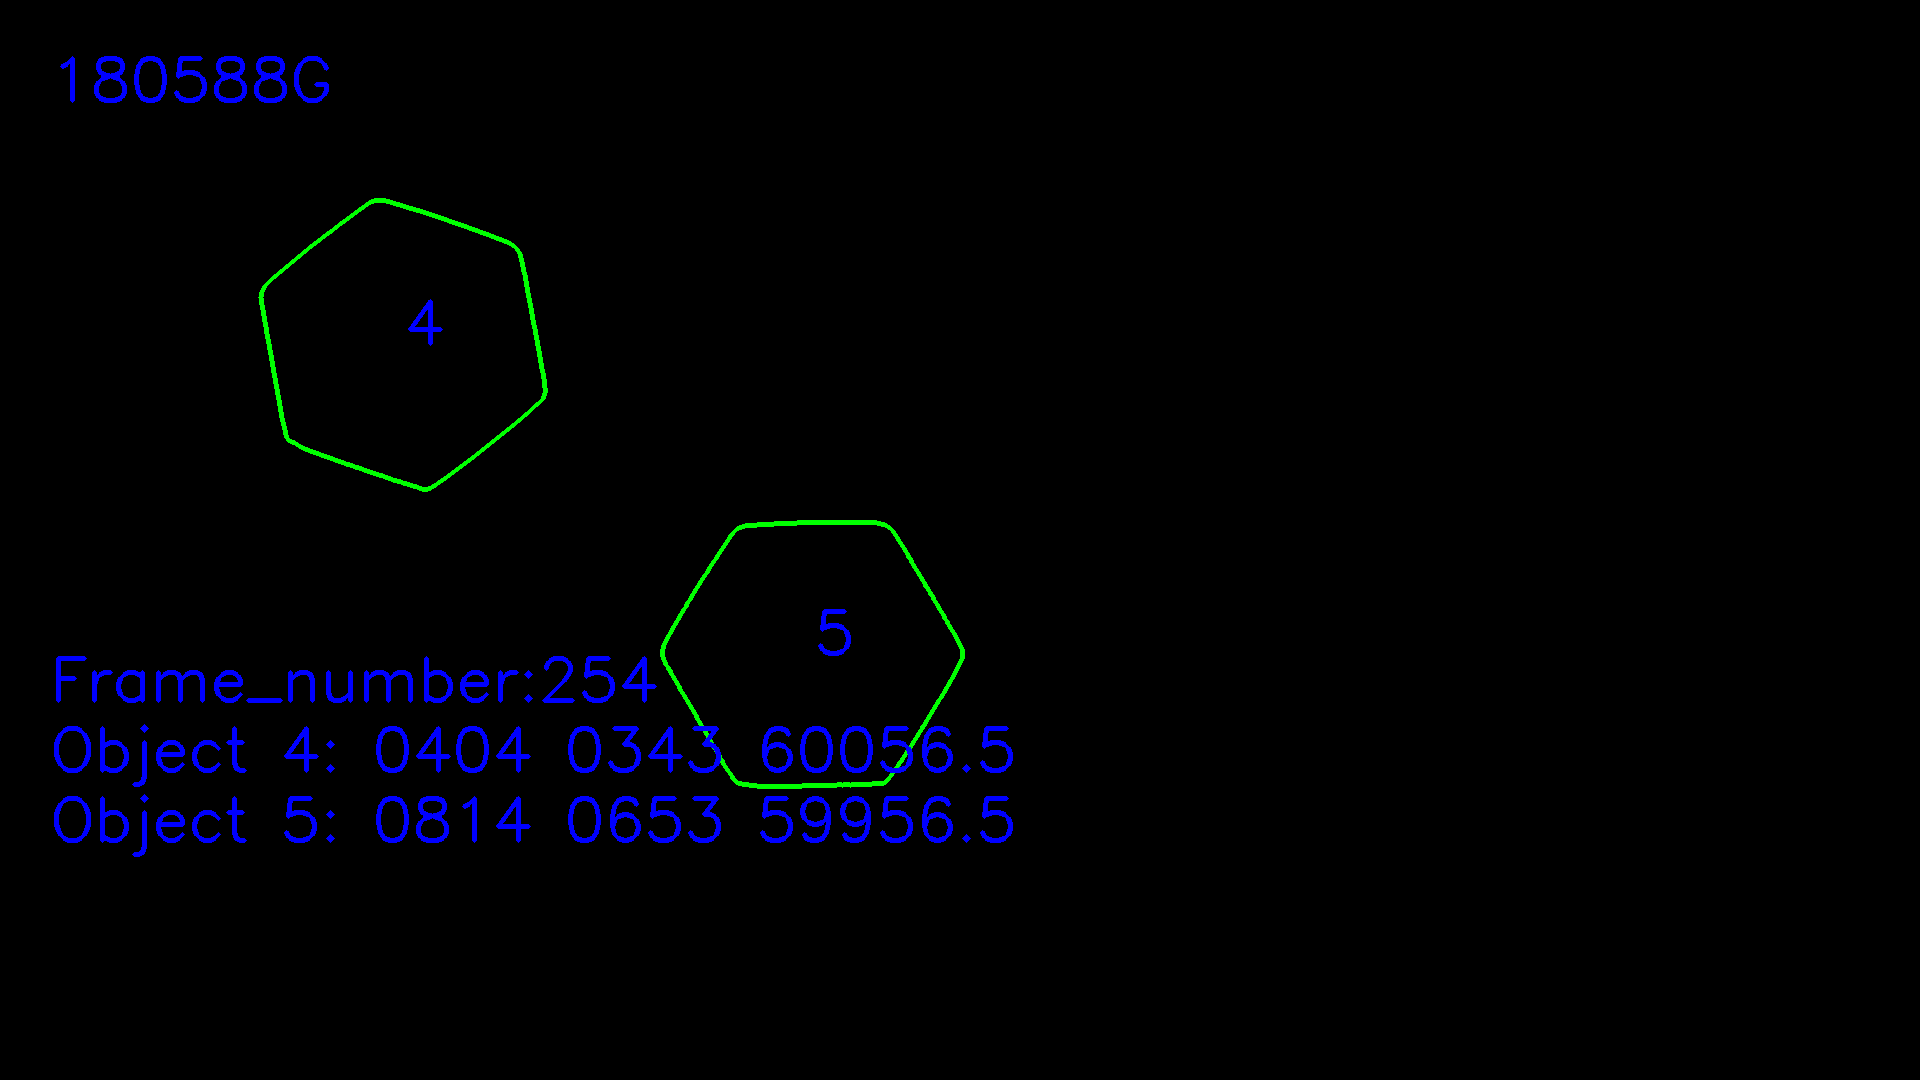

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.94000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.0400e+02, 6.5300e+02, 5.9956e+04, 5.0000e+00])]
Previousframe [array([4.04000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([8.14000e+02, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


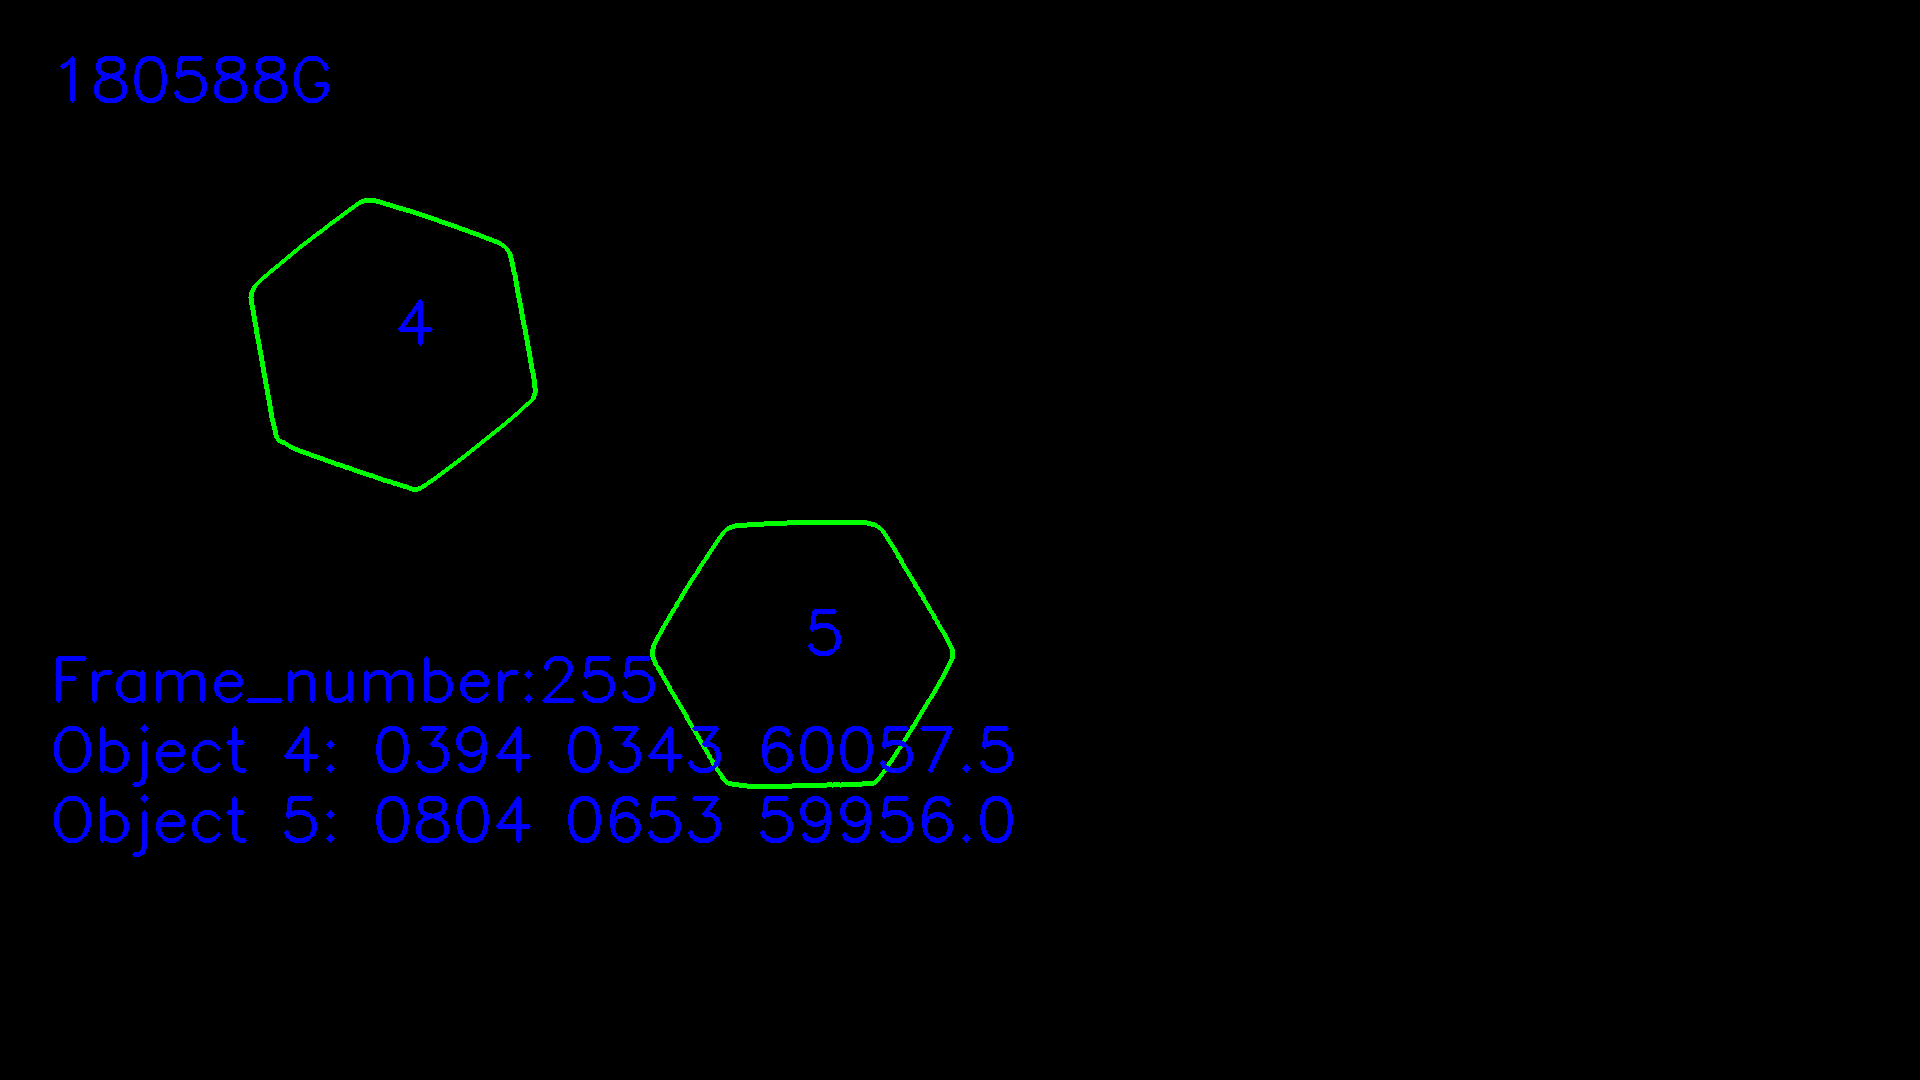

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.84000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([7.94000e+02, 6.53000e+02, 5.99535e+04, 5.00000e+00])]
Previousframe [array([3.94000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([8.0400e+02, 6.5300e+02, 5.9956e+04, 5.0000e+00])]


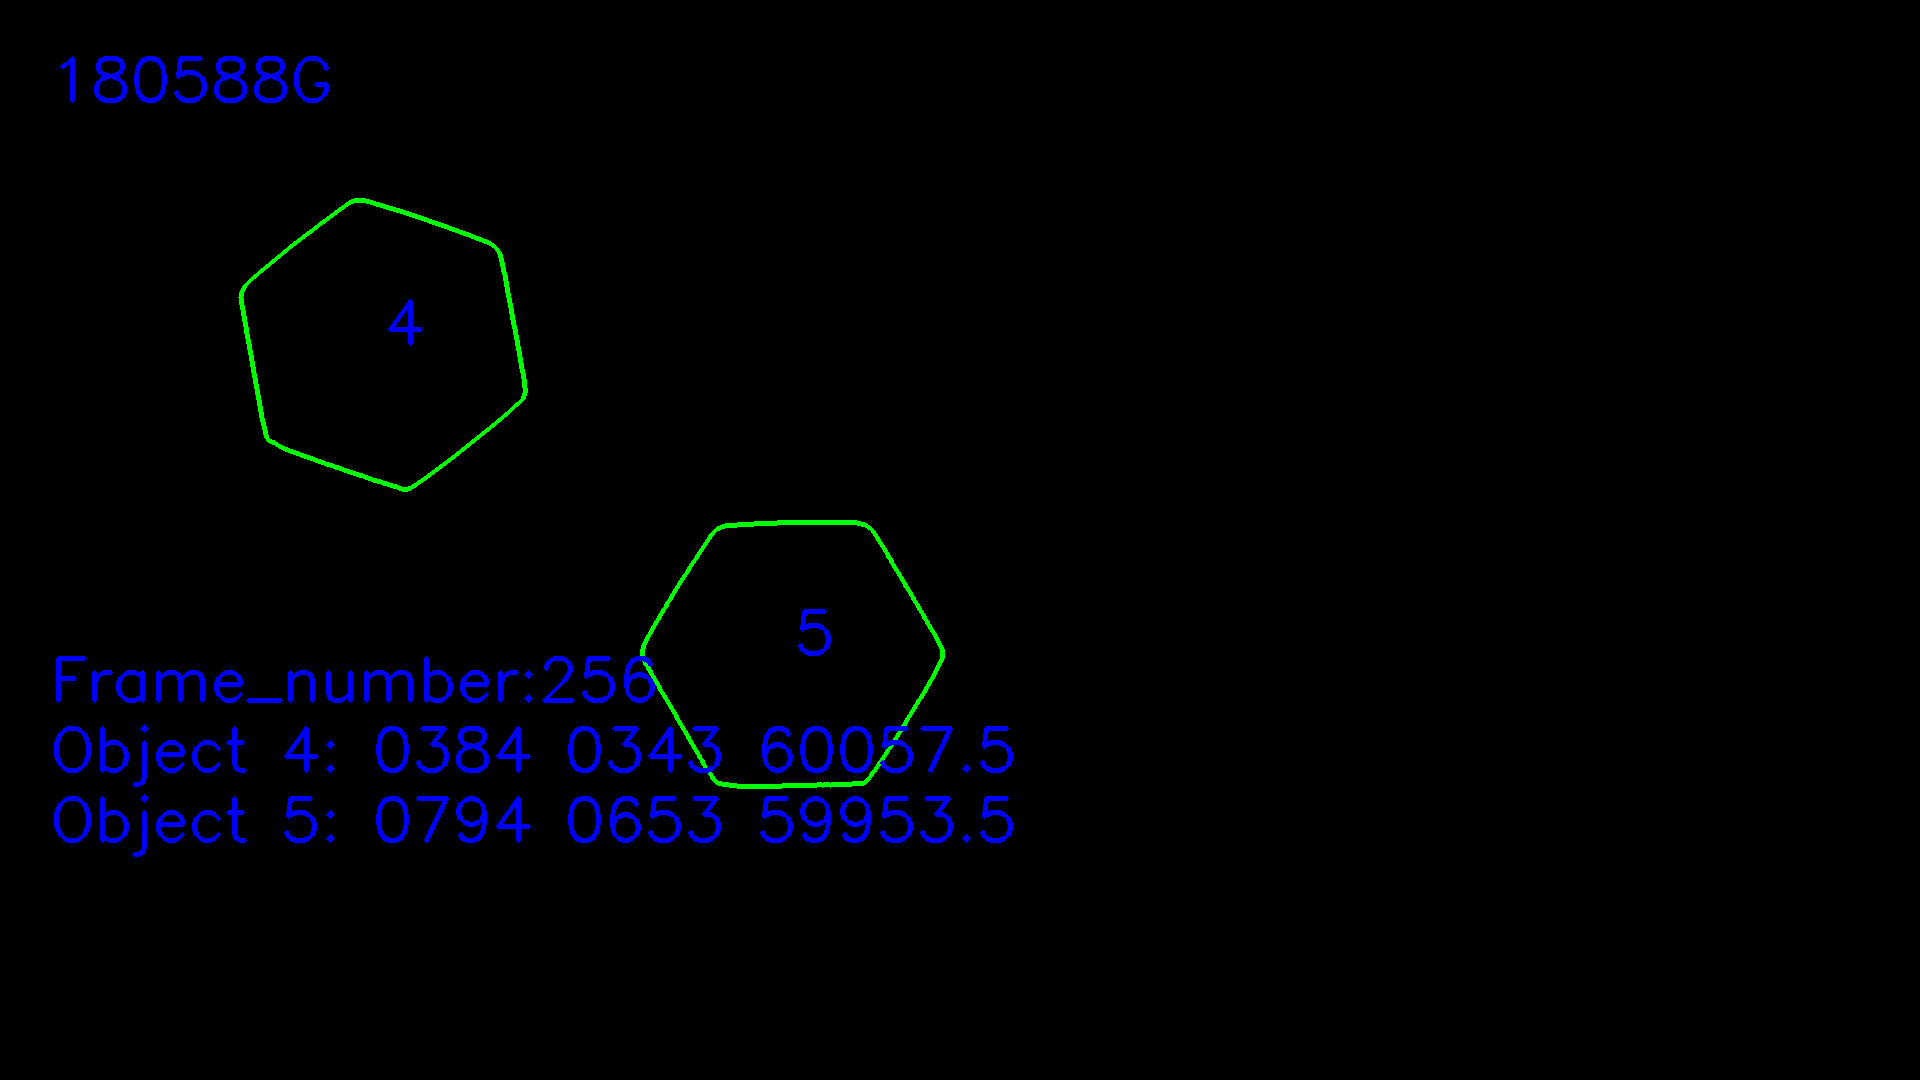

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.74000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.84000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([3.84000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([7.94000e+02, 6.53000e+02, 5.99535e+04, 5.00000e+00])]


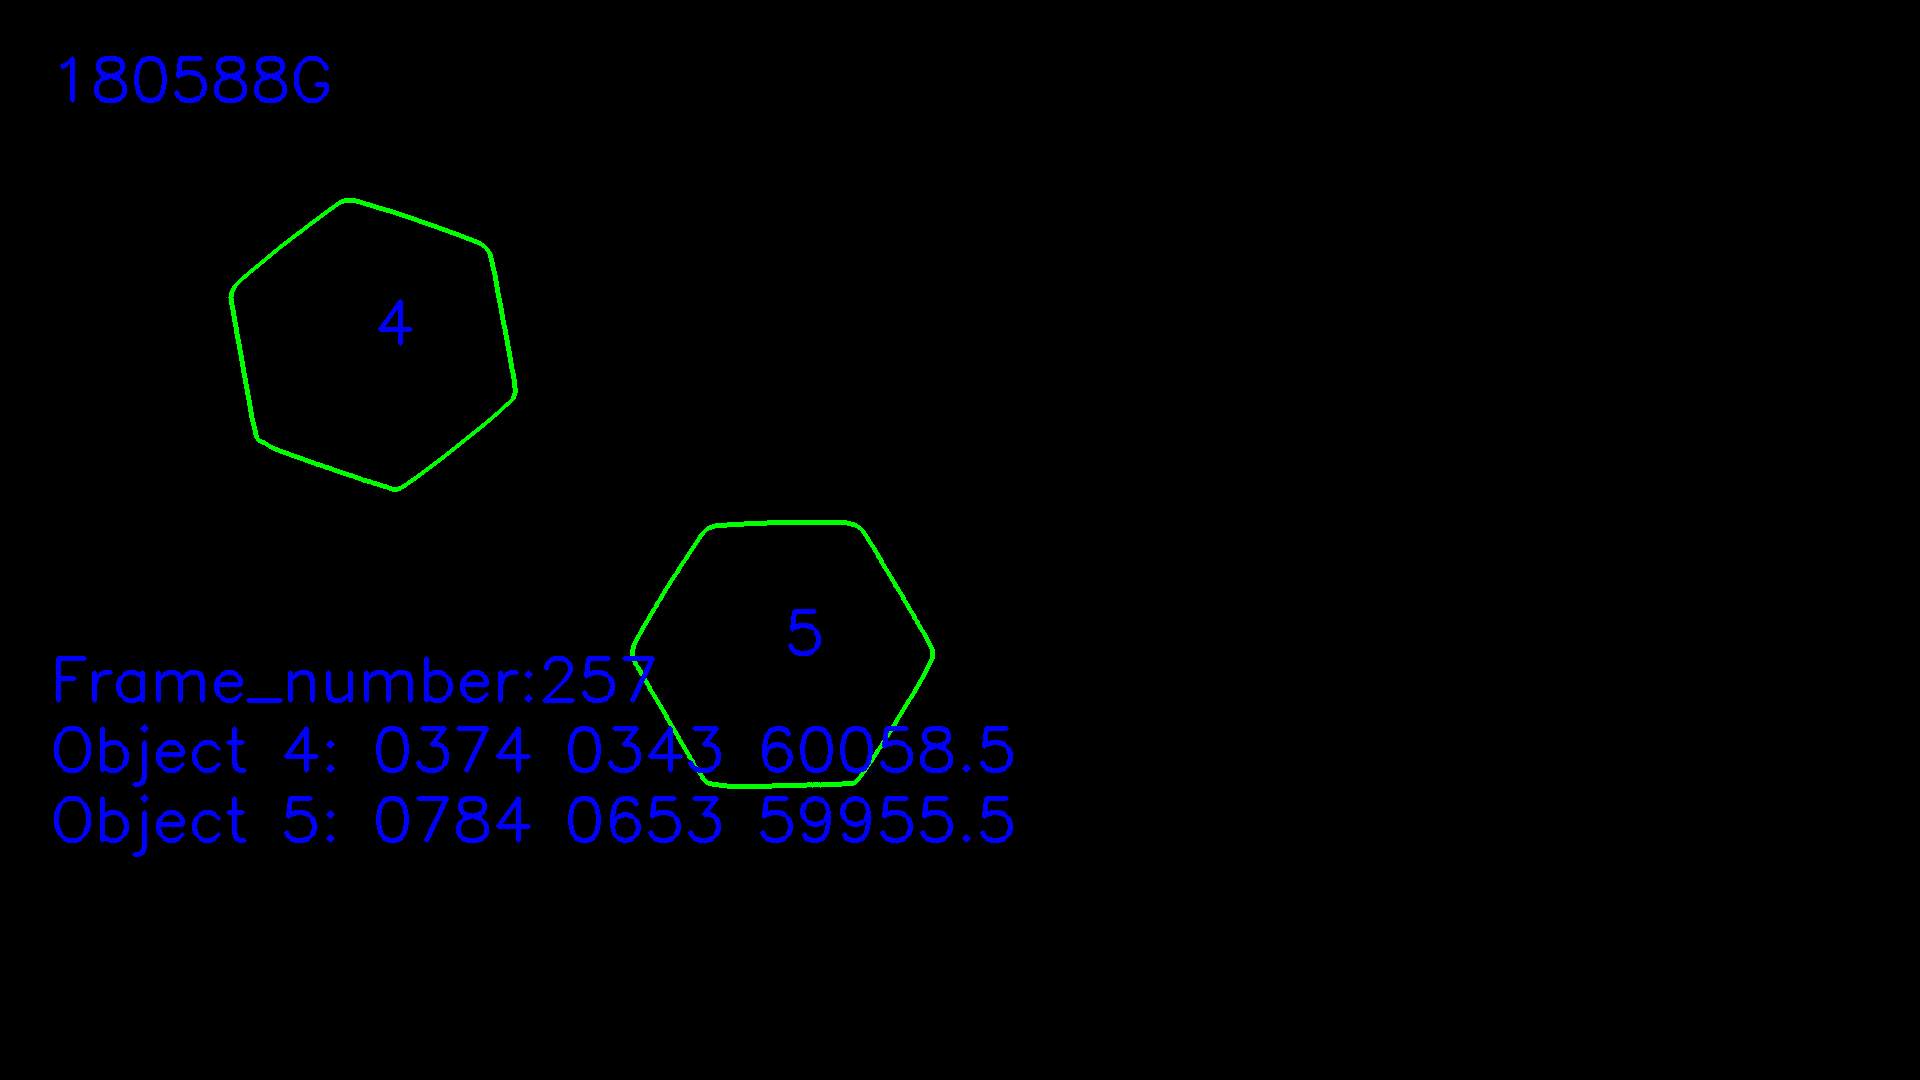

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.74000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([3.74000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.84000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


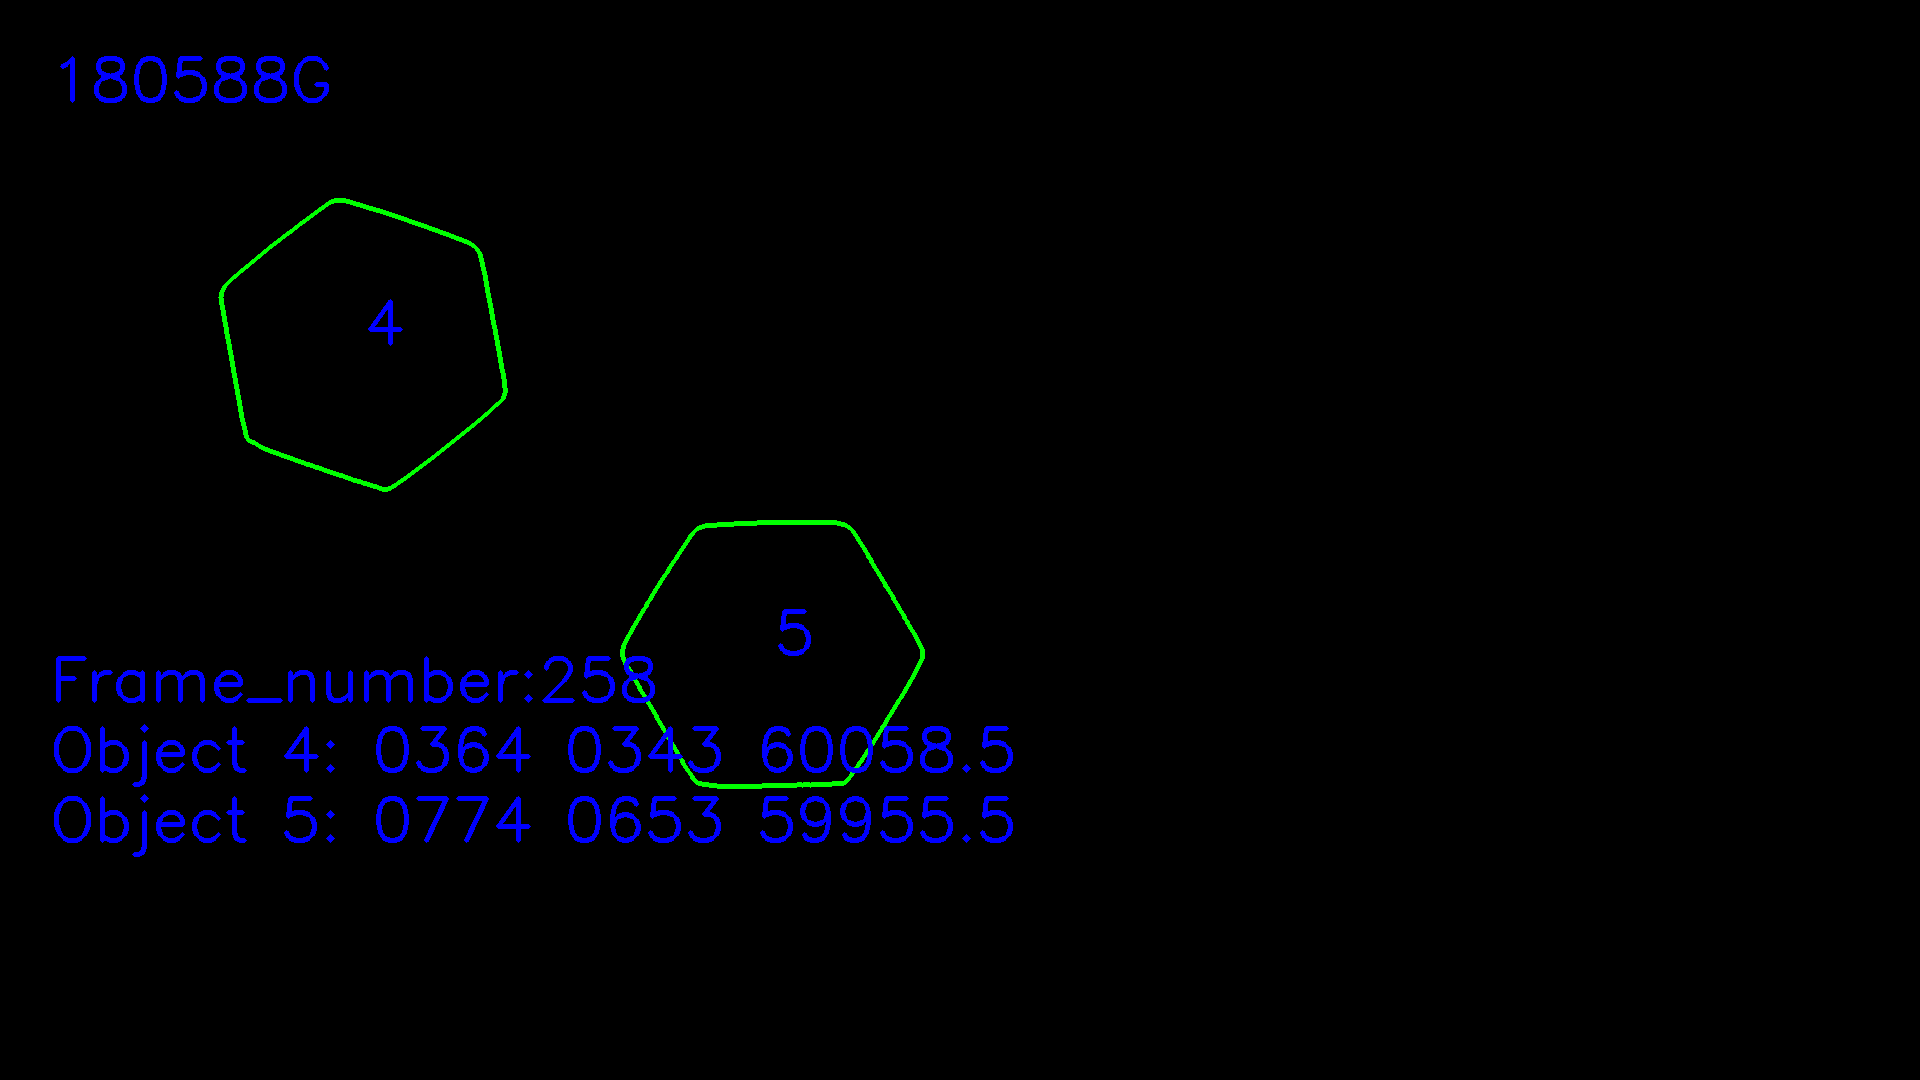

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.54000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.6400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]
Previousframe [array([3.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.74000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


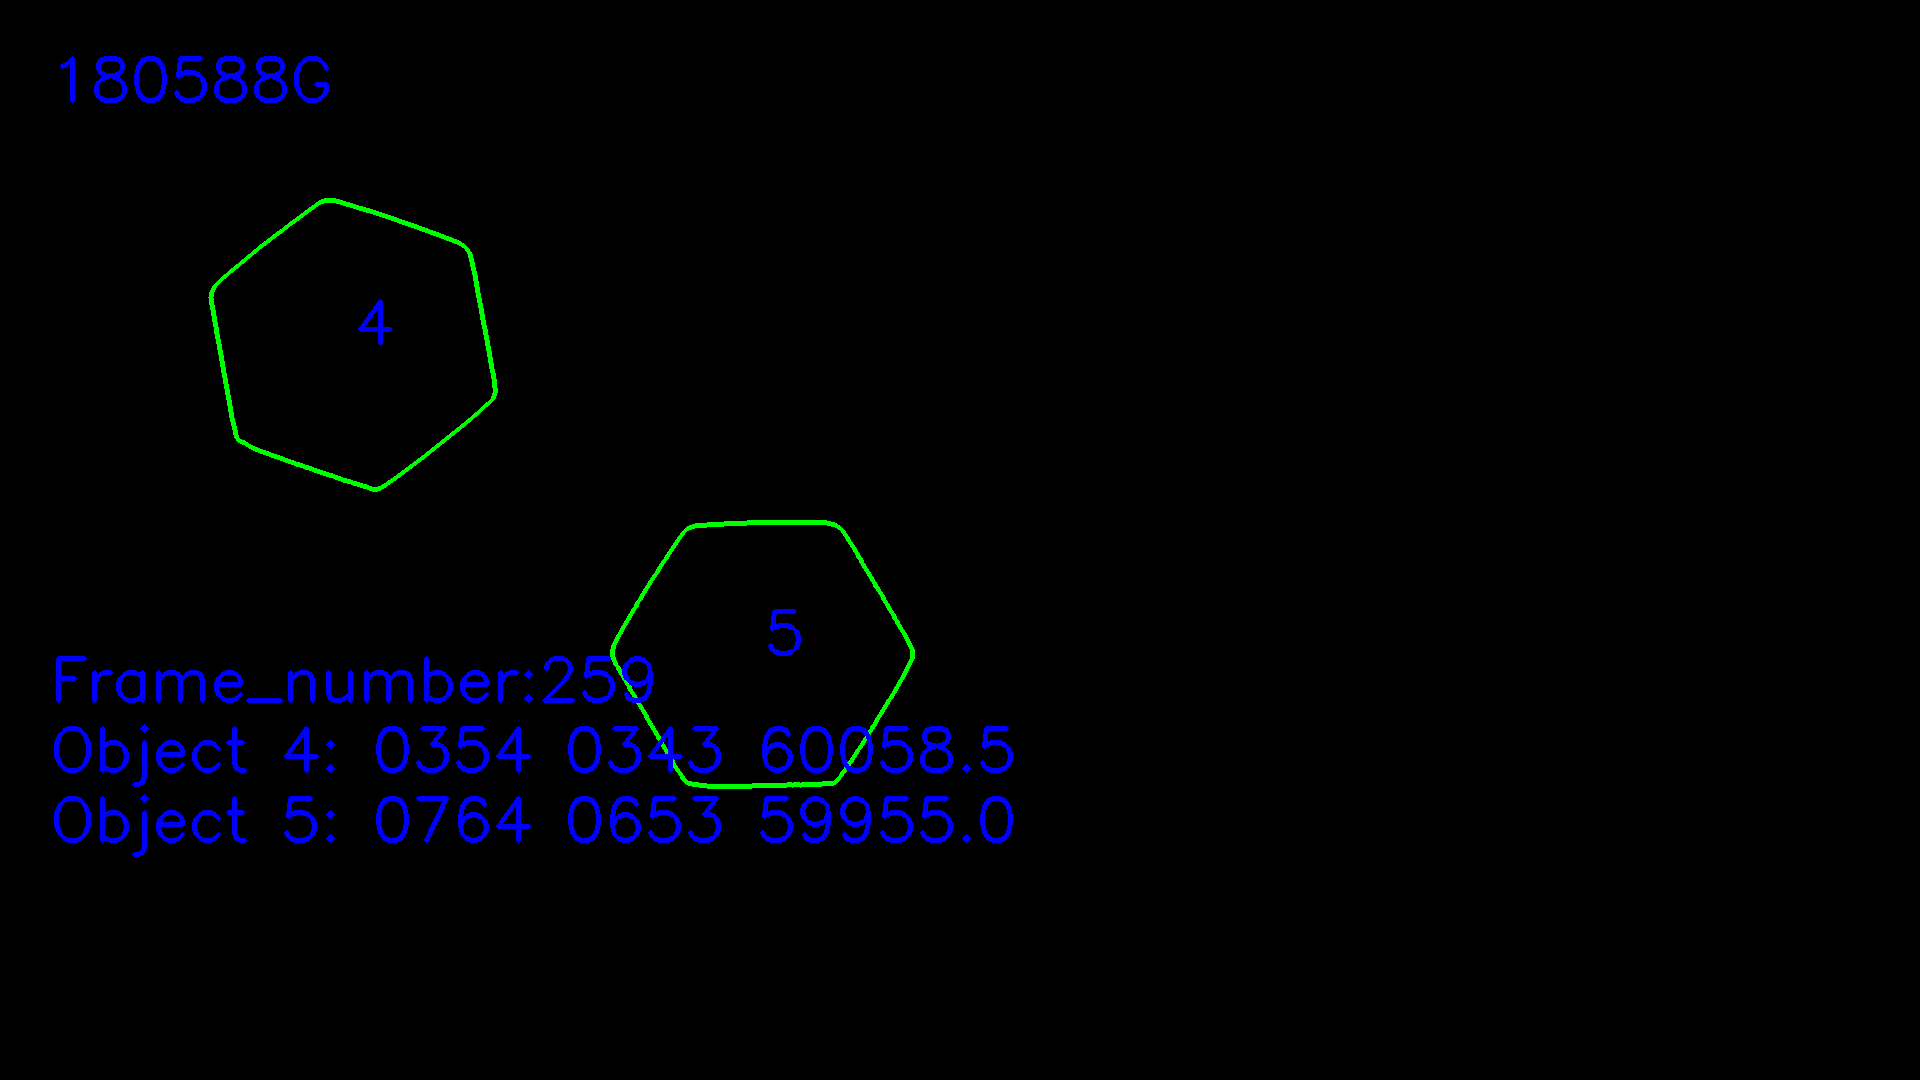

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.44000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([7.5400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]
Previousframe [array([3.54000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.6400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]


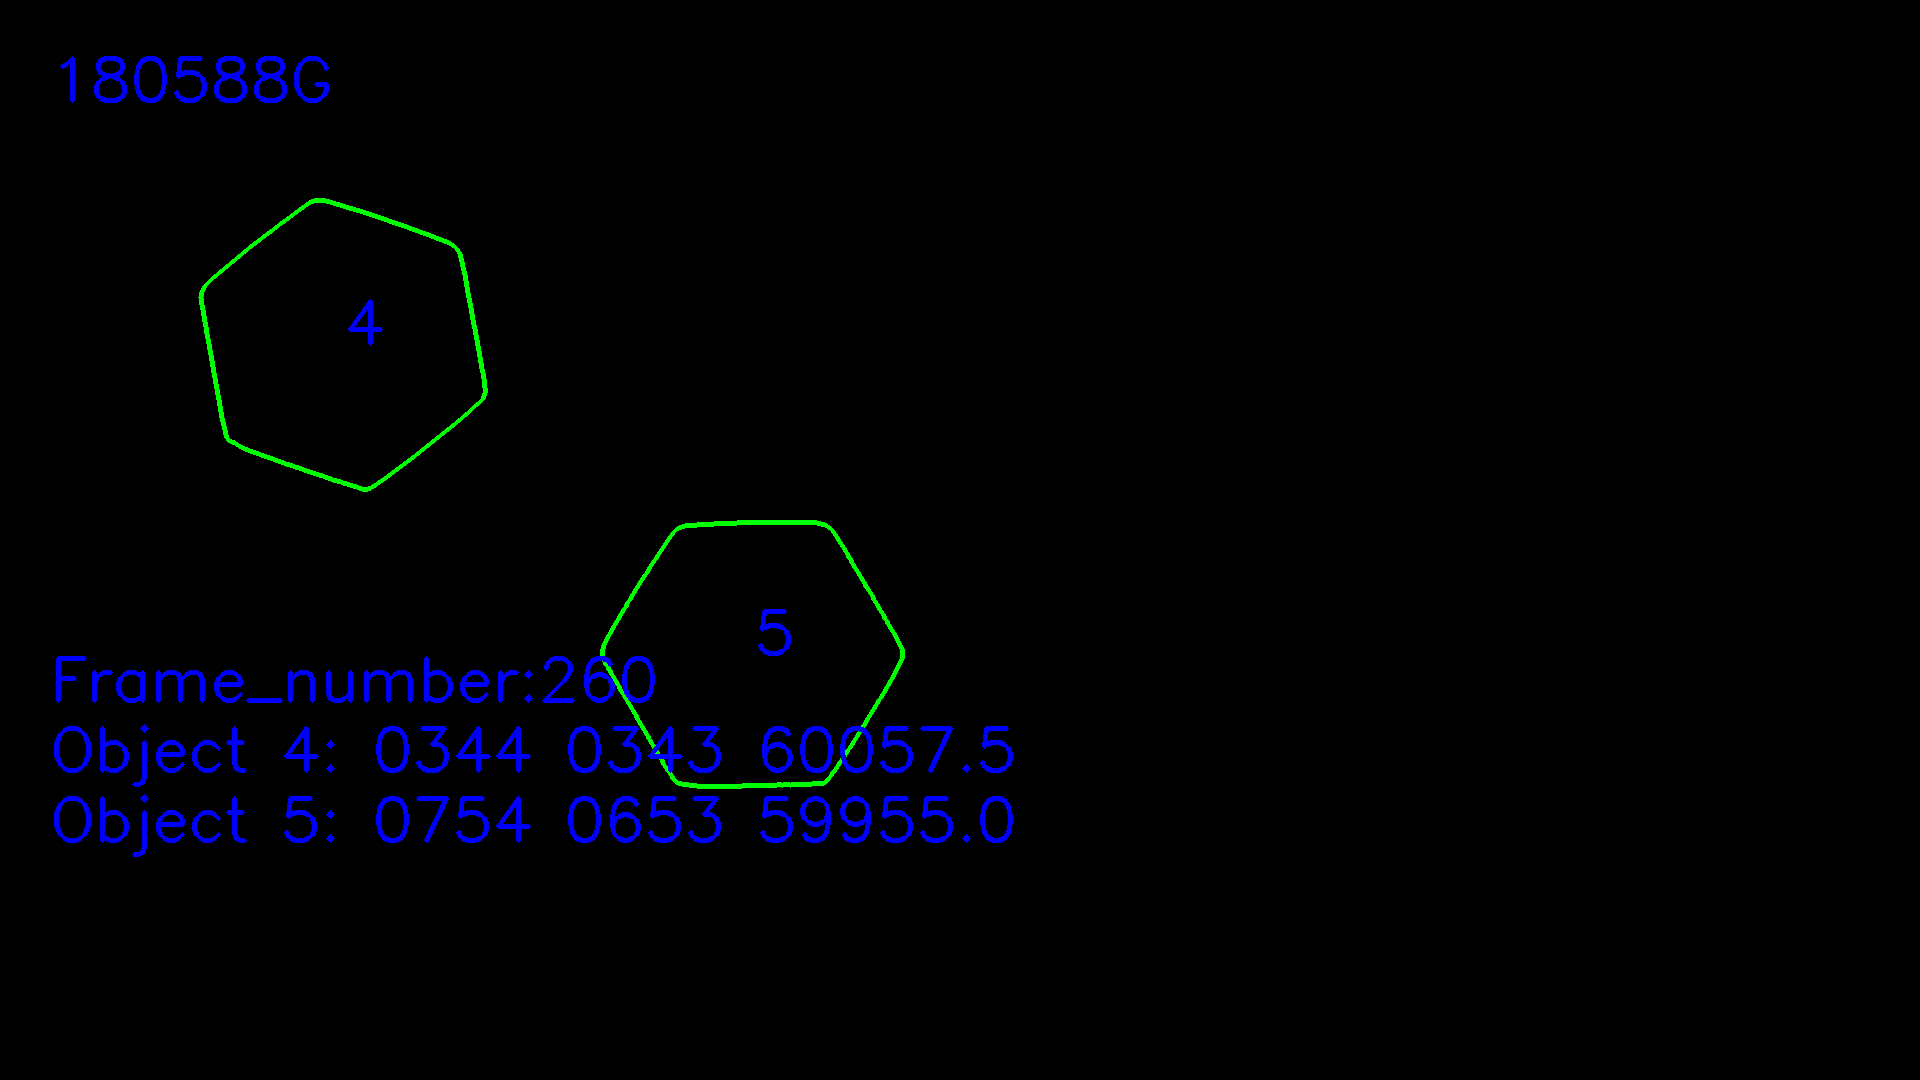

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.34000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([7.44000e+02, 6.53000e+02, 5.99565e+04, 5.00000e+00])]
Previousframe [array([3.44000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([7.5400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]


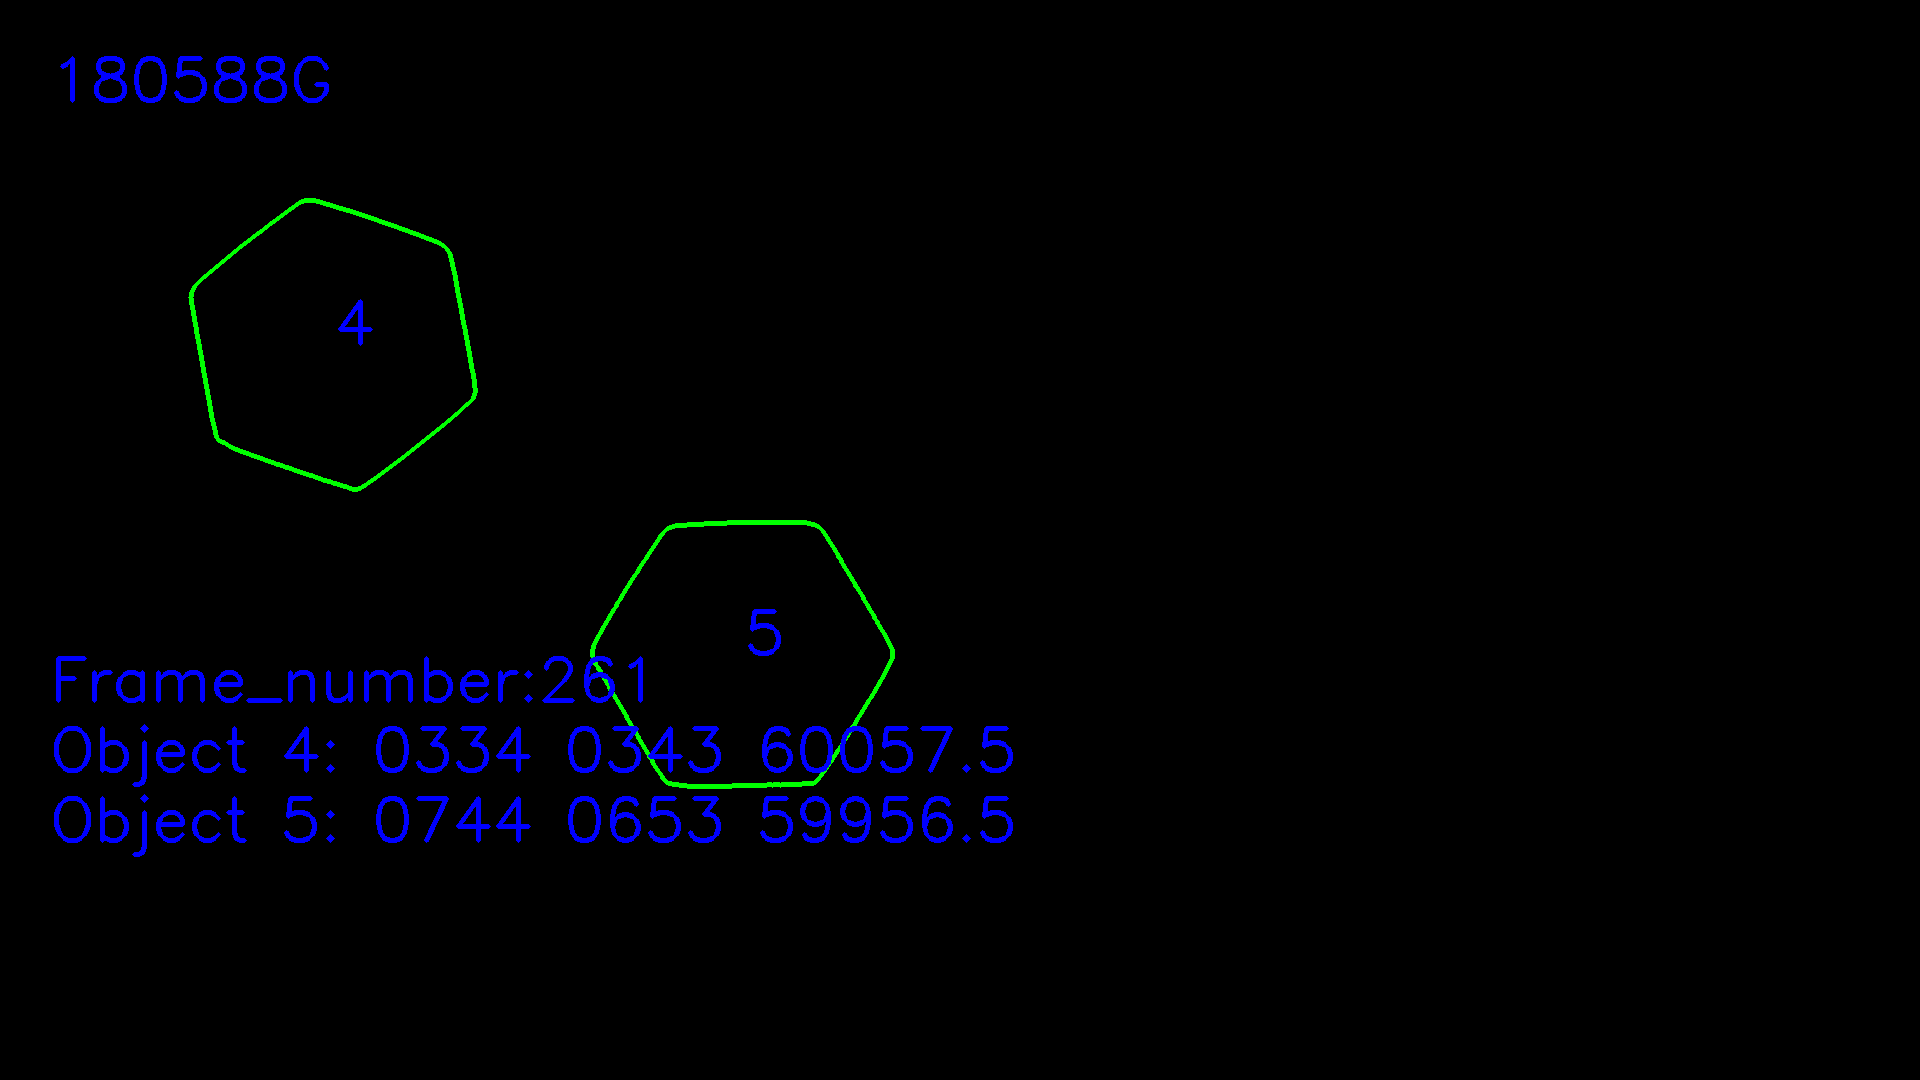

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.24000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([7.3400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]
Previousframe [array([3.34000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([7.44000e+02, 6.53000e+02, 5.99565e+04, 5.00000e+00])]


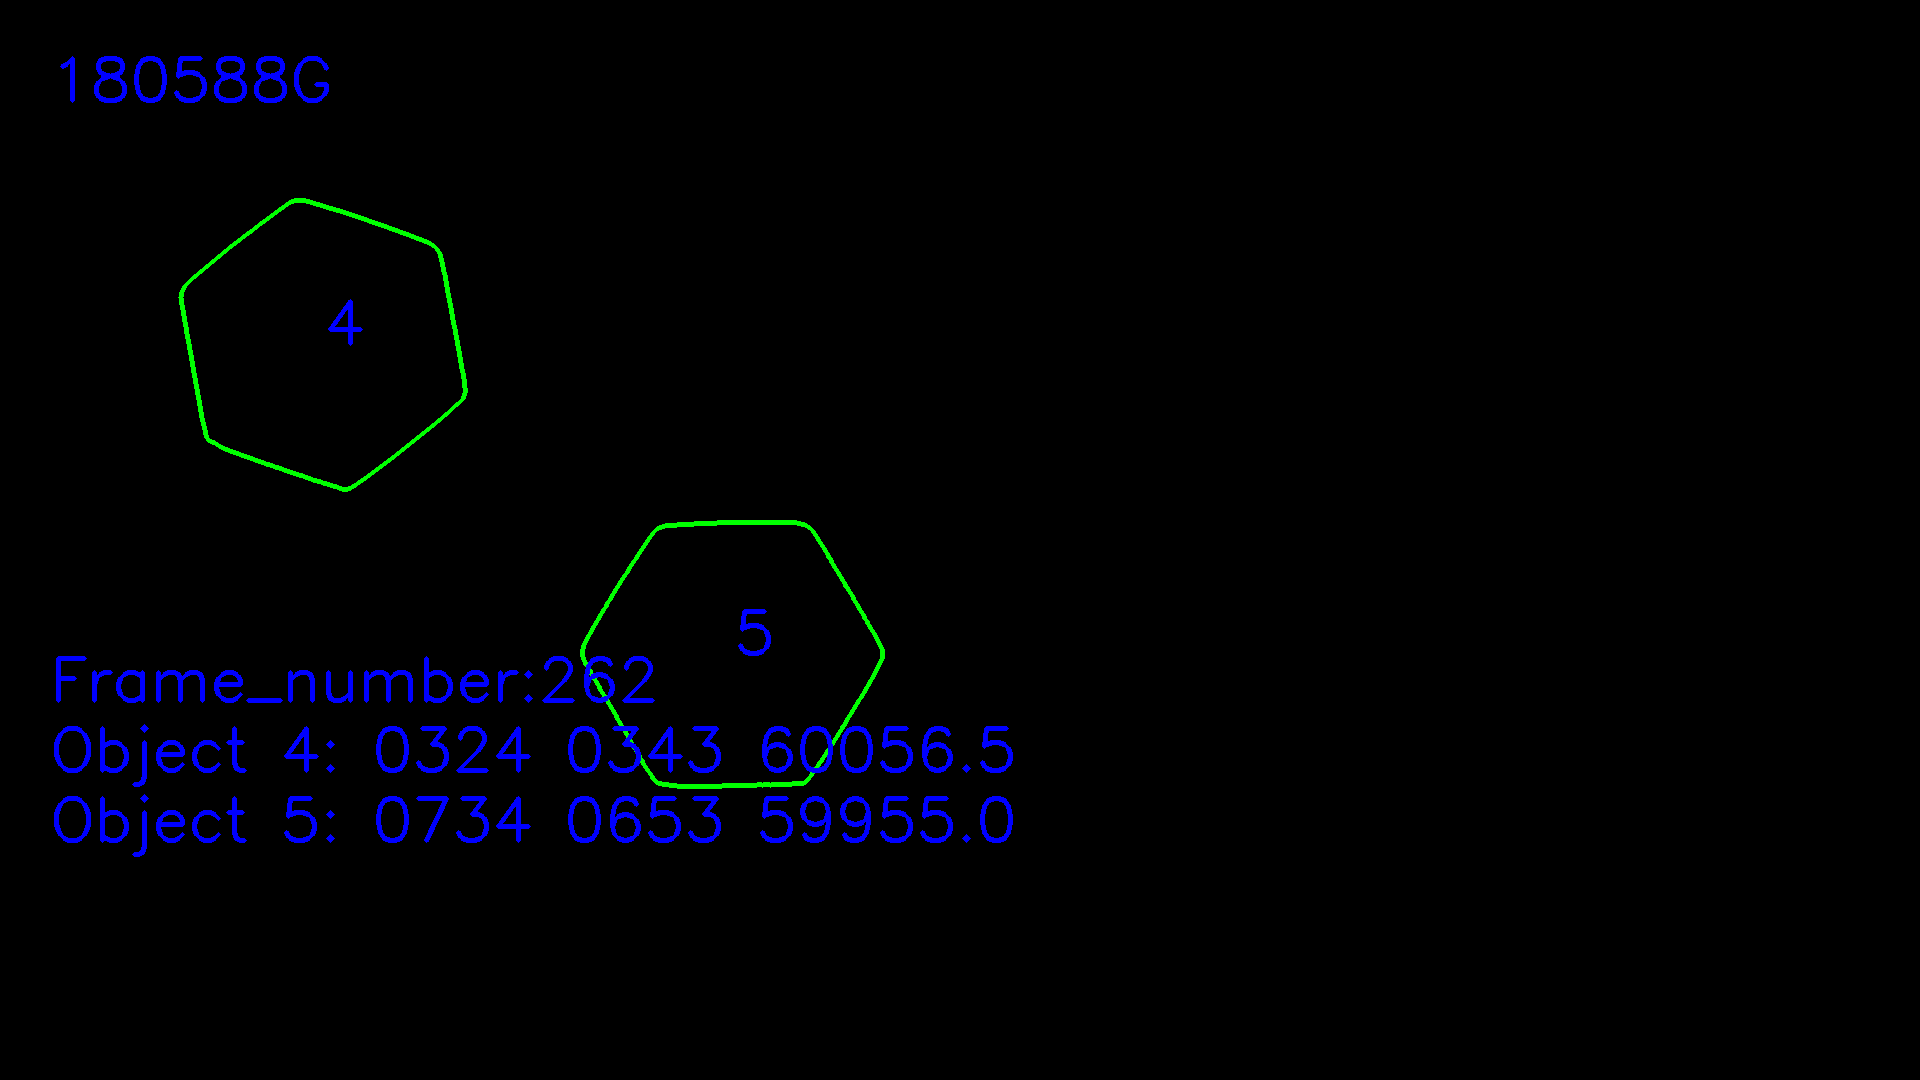

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.14000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.2400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]
Previousframe [array([3.24000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([7.3400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]


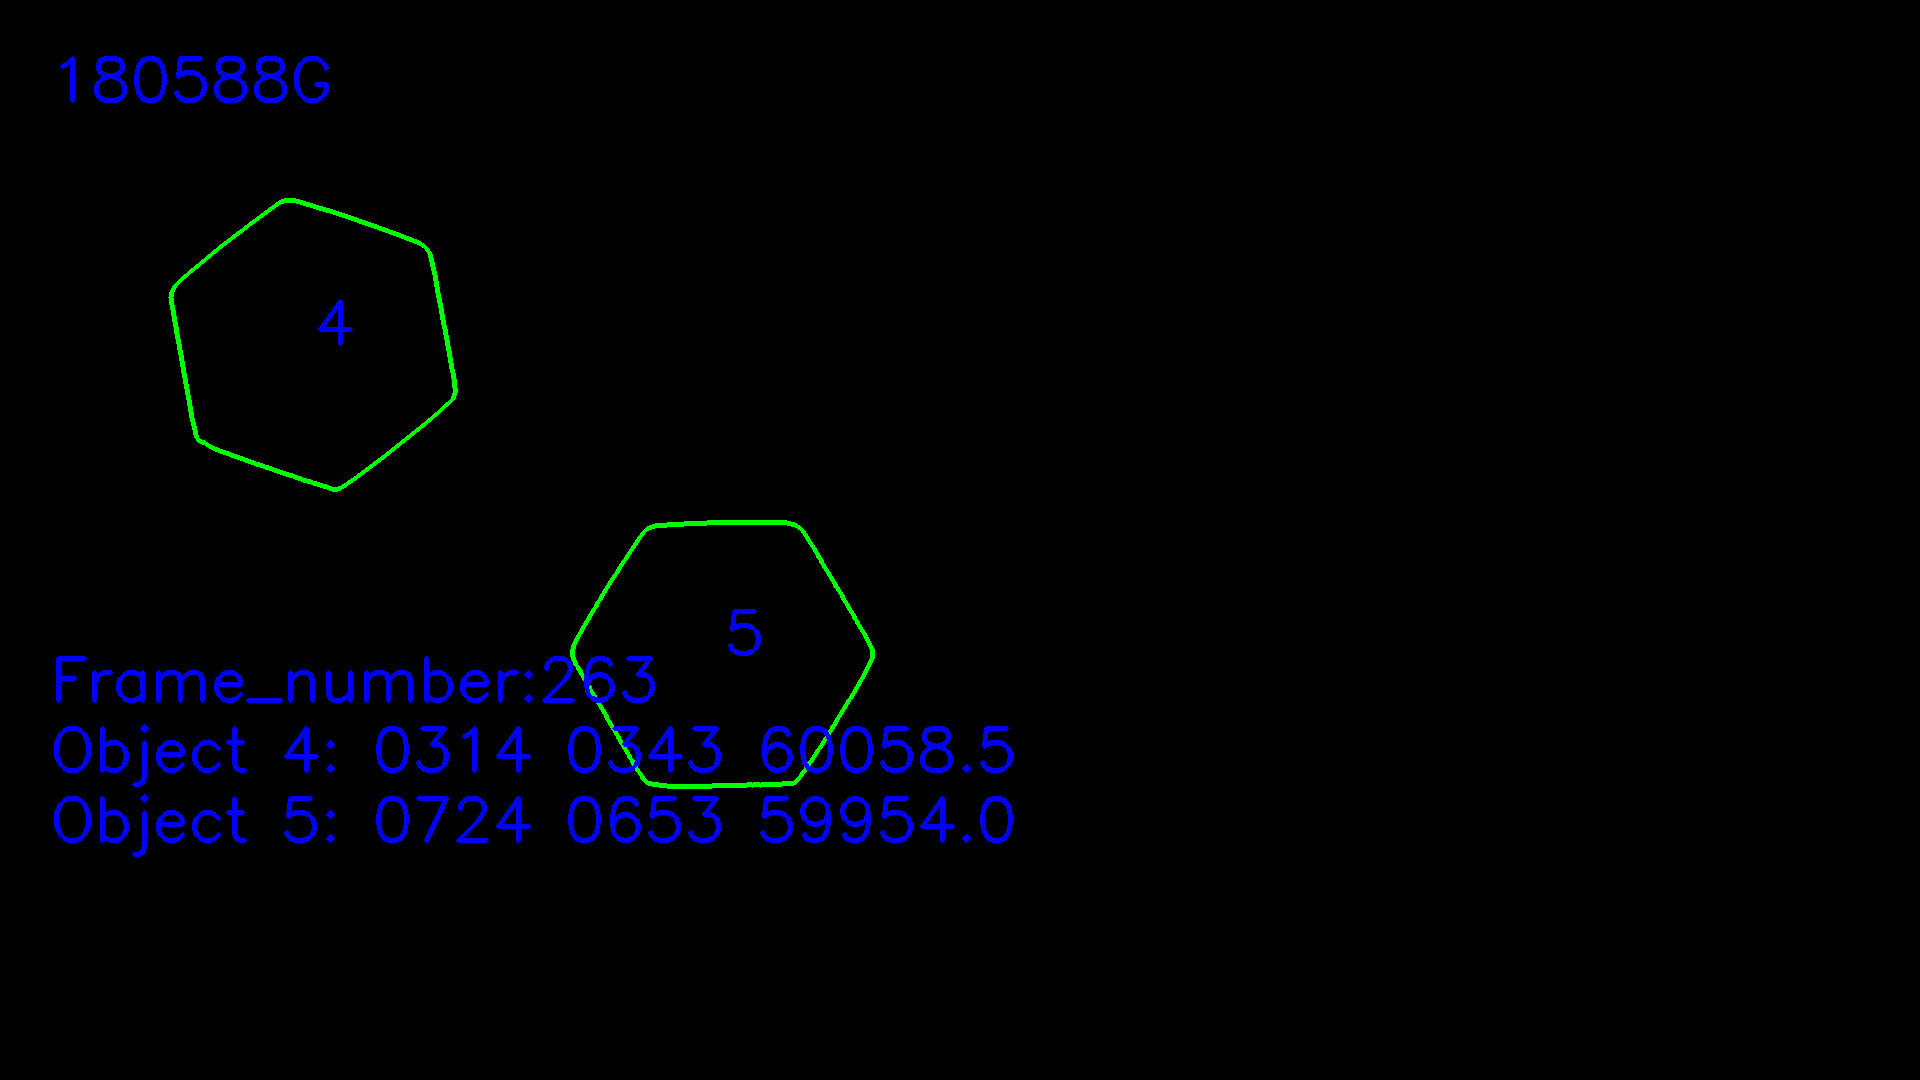

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([3.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.1400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]
Previousframe [array([3.14000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.2400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]


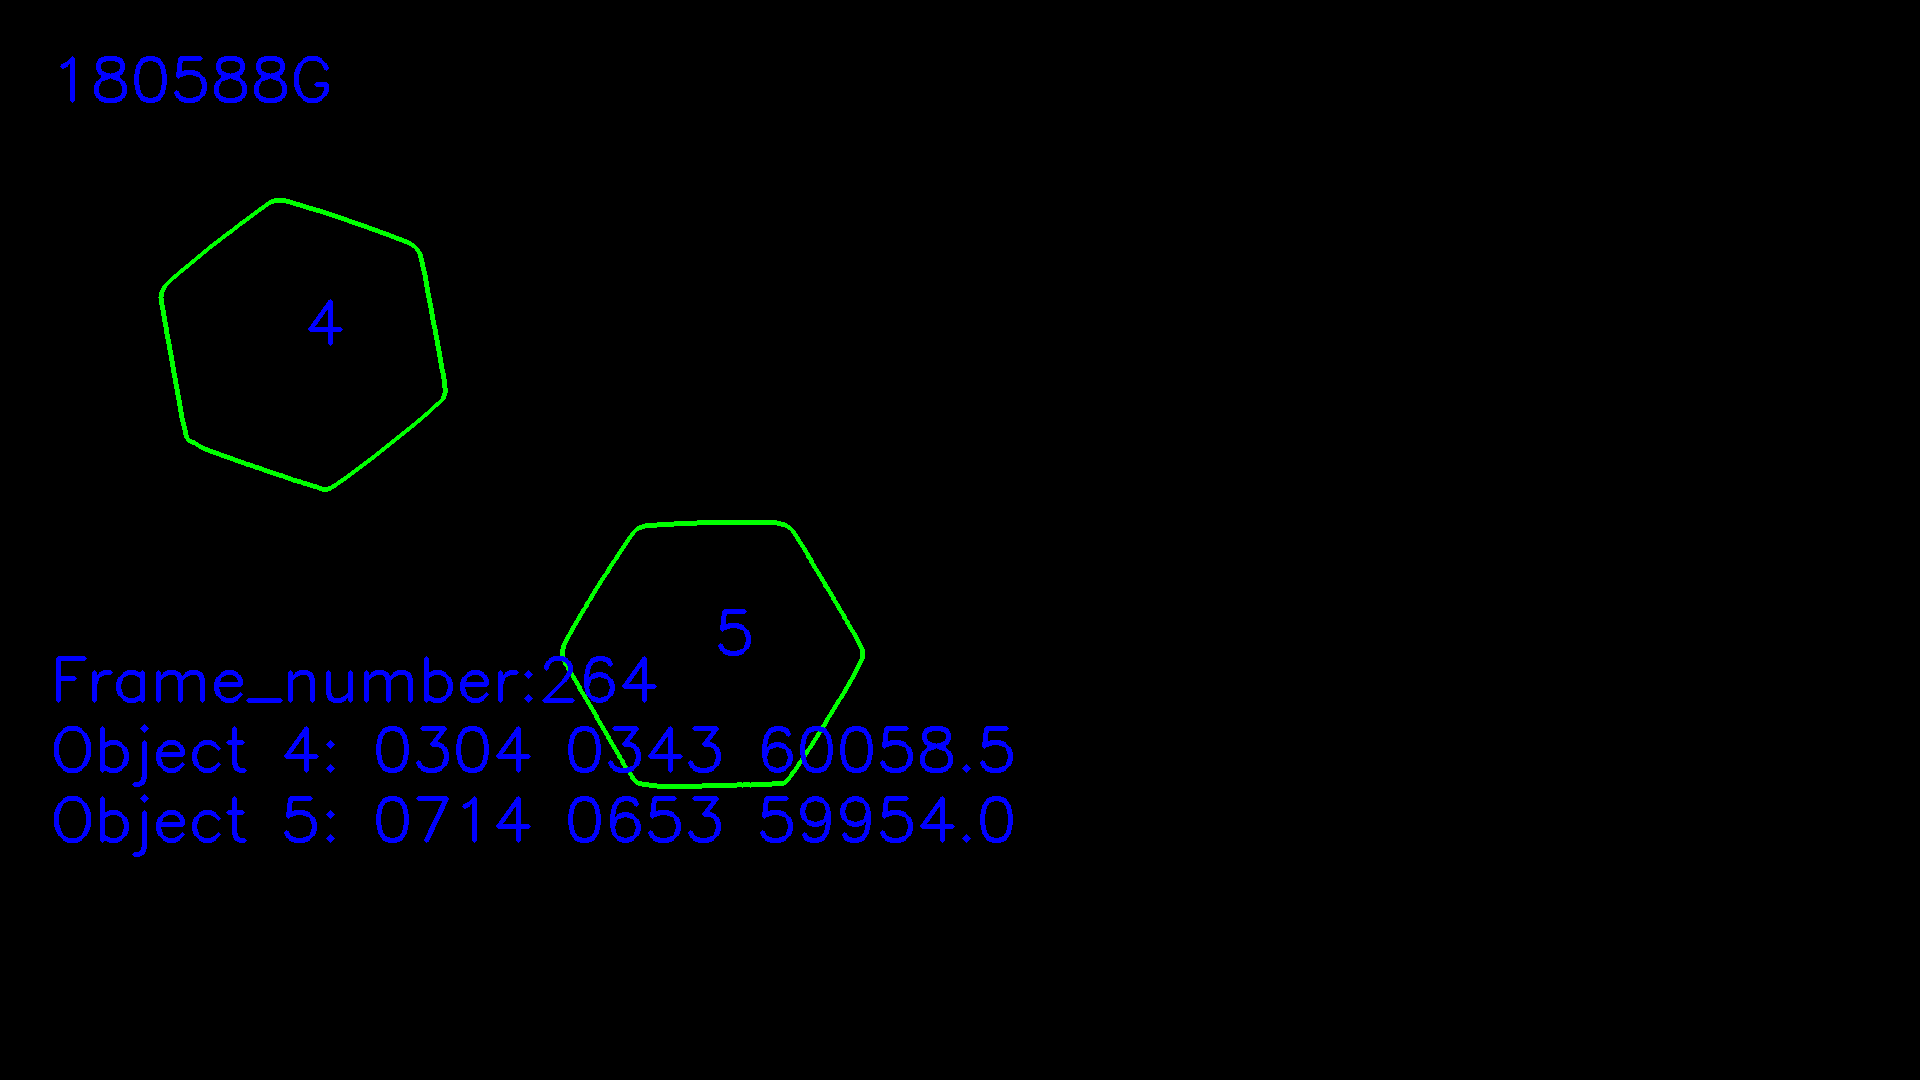

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.04000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([3.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.1400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]


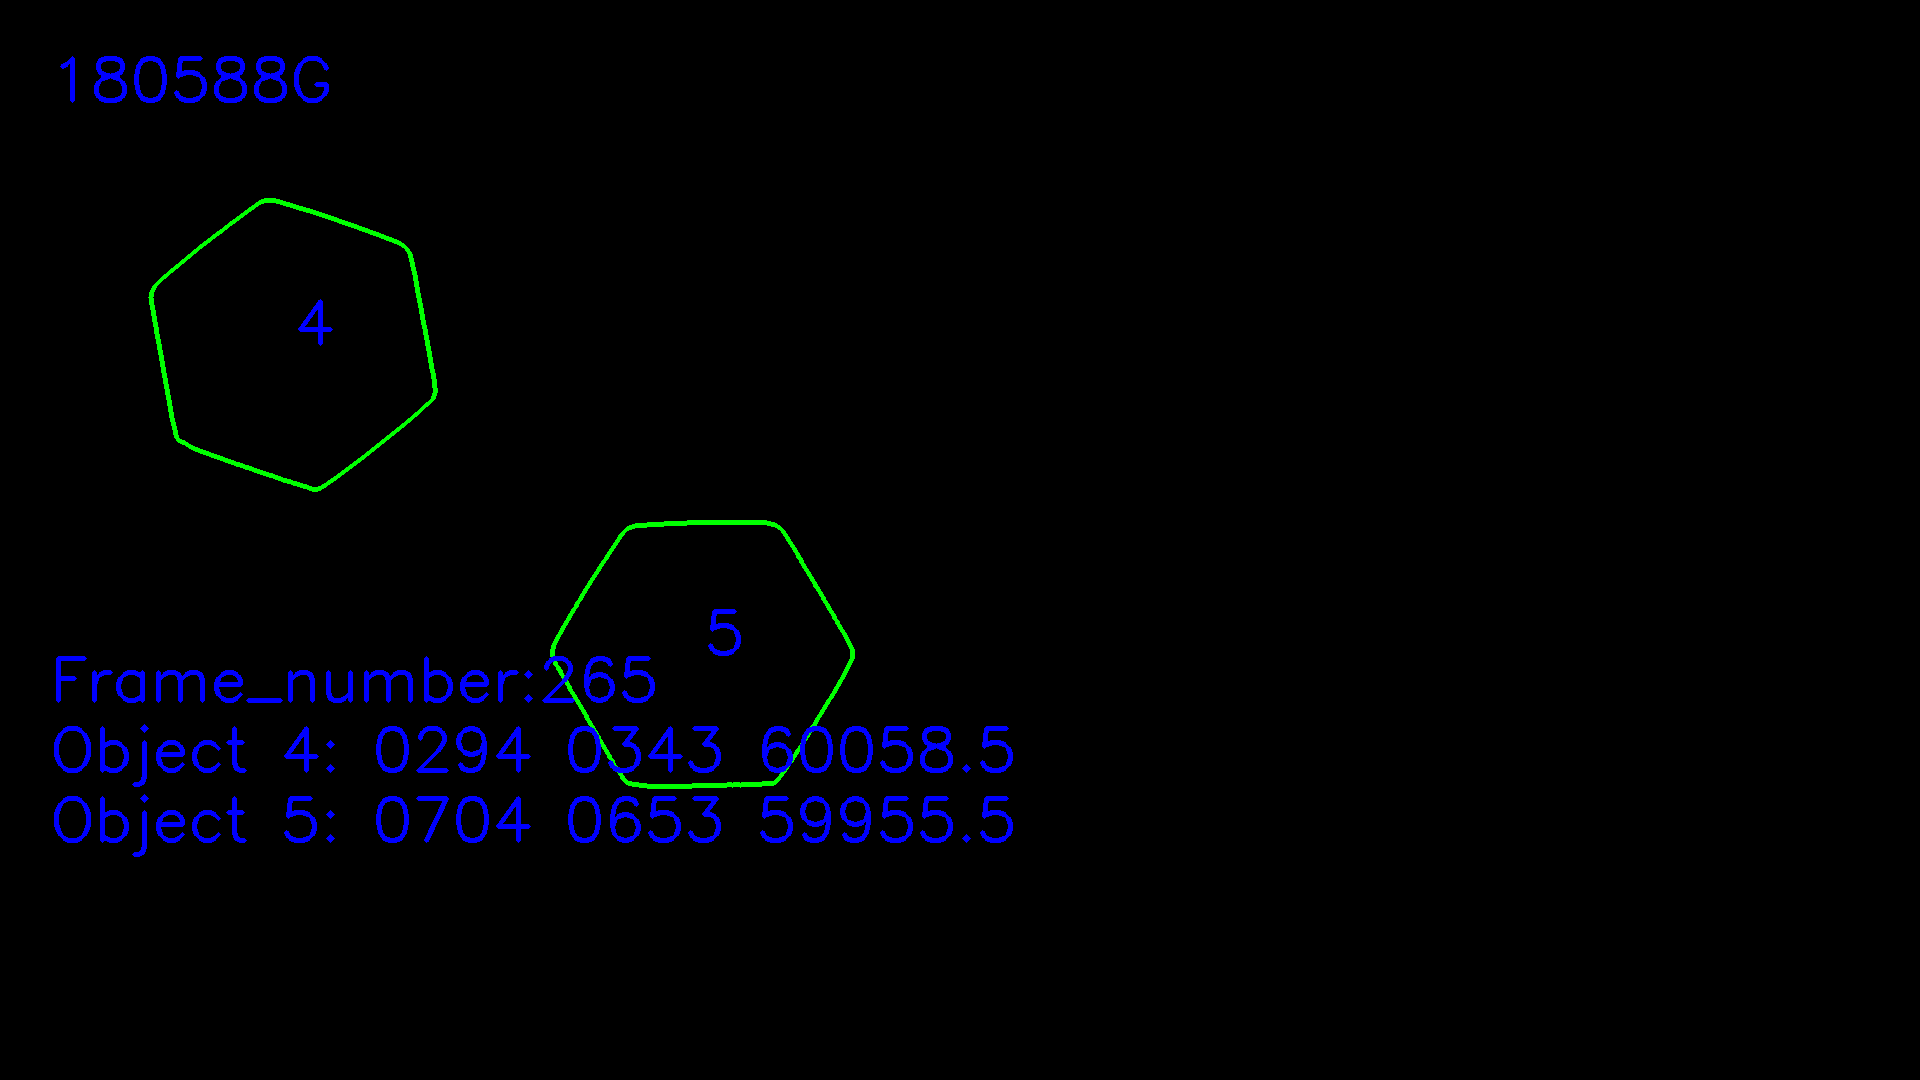

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.84000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.94000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([2.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([7.04000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


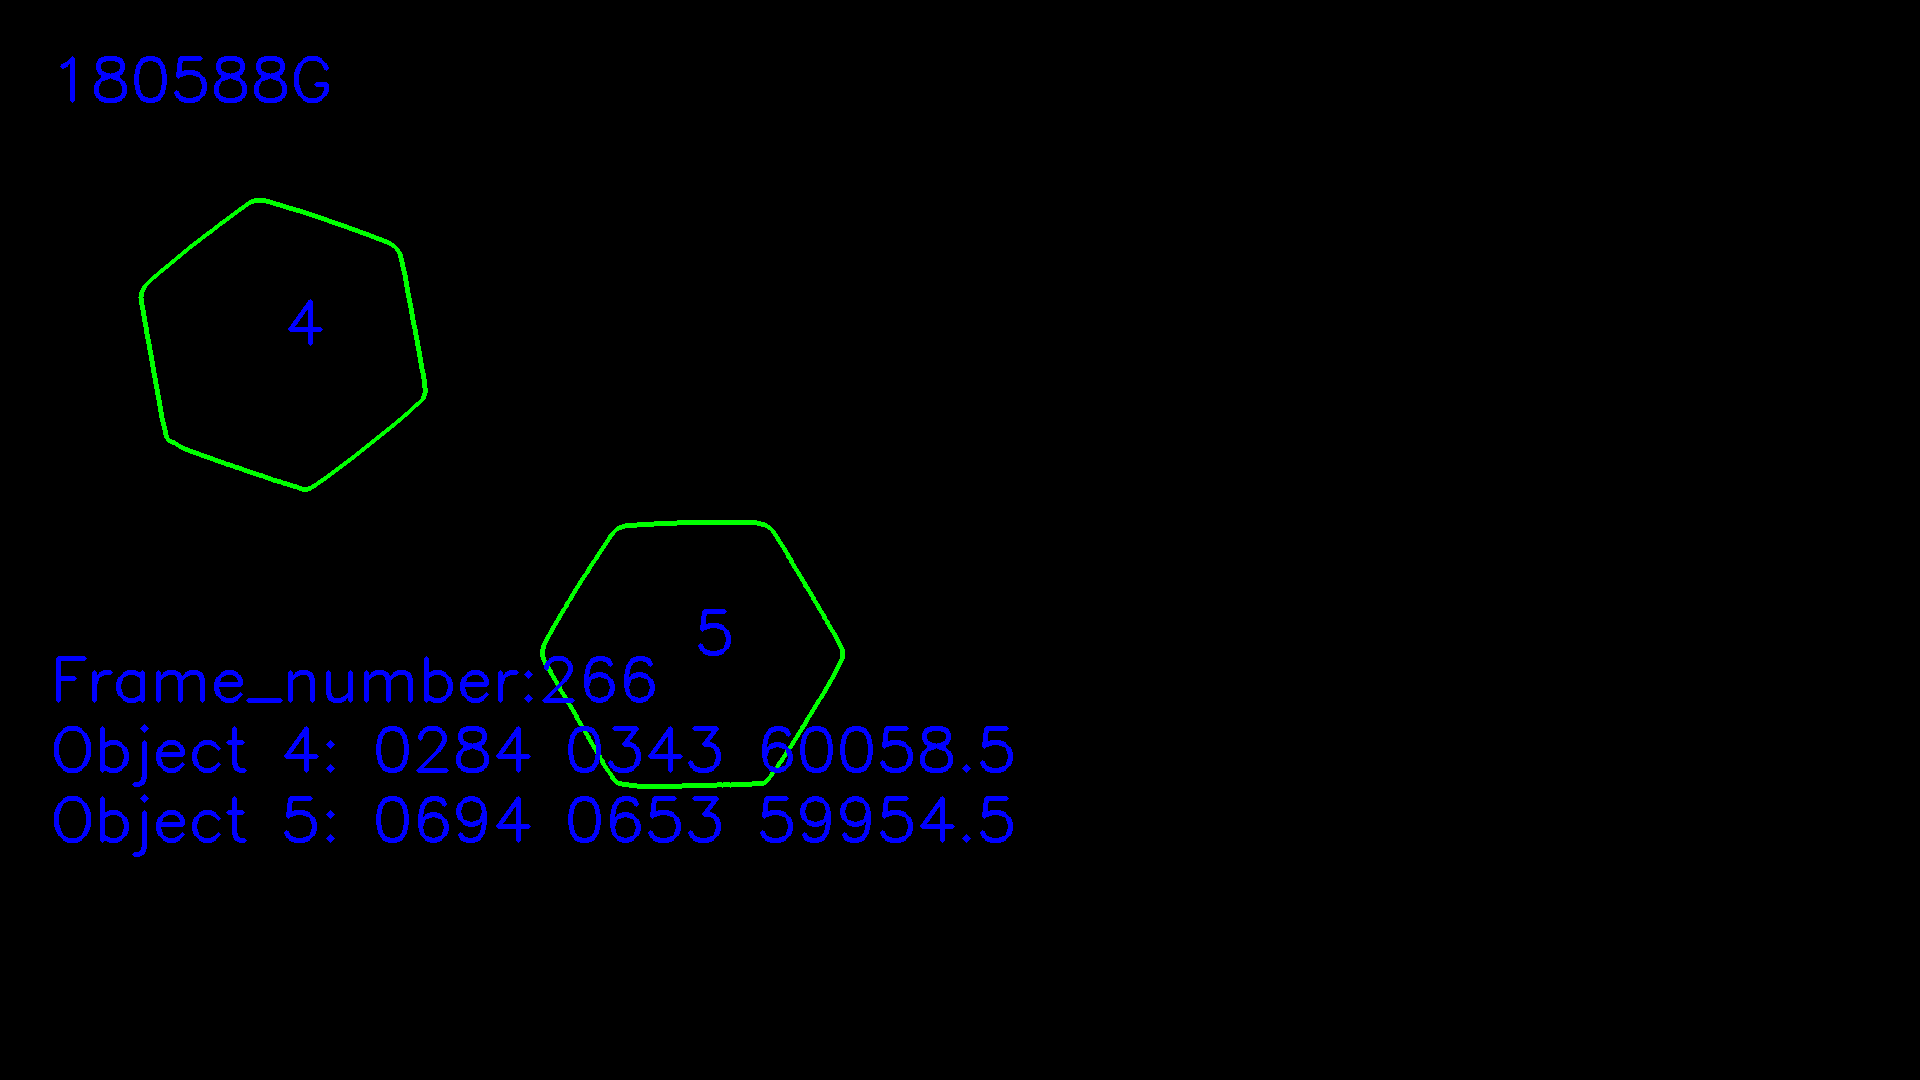

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.74000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.84000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([2.84000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.94000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


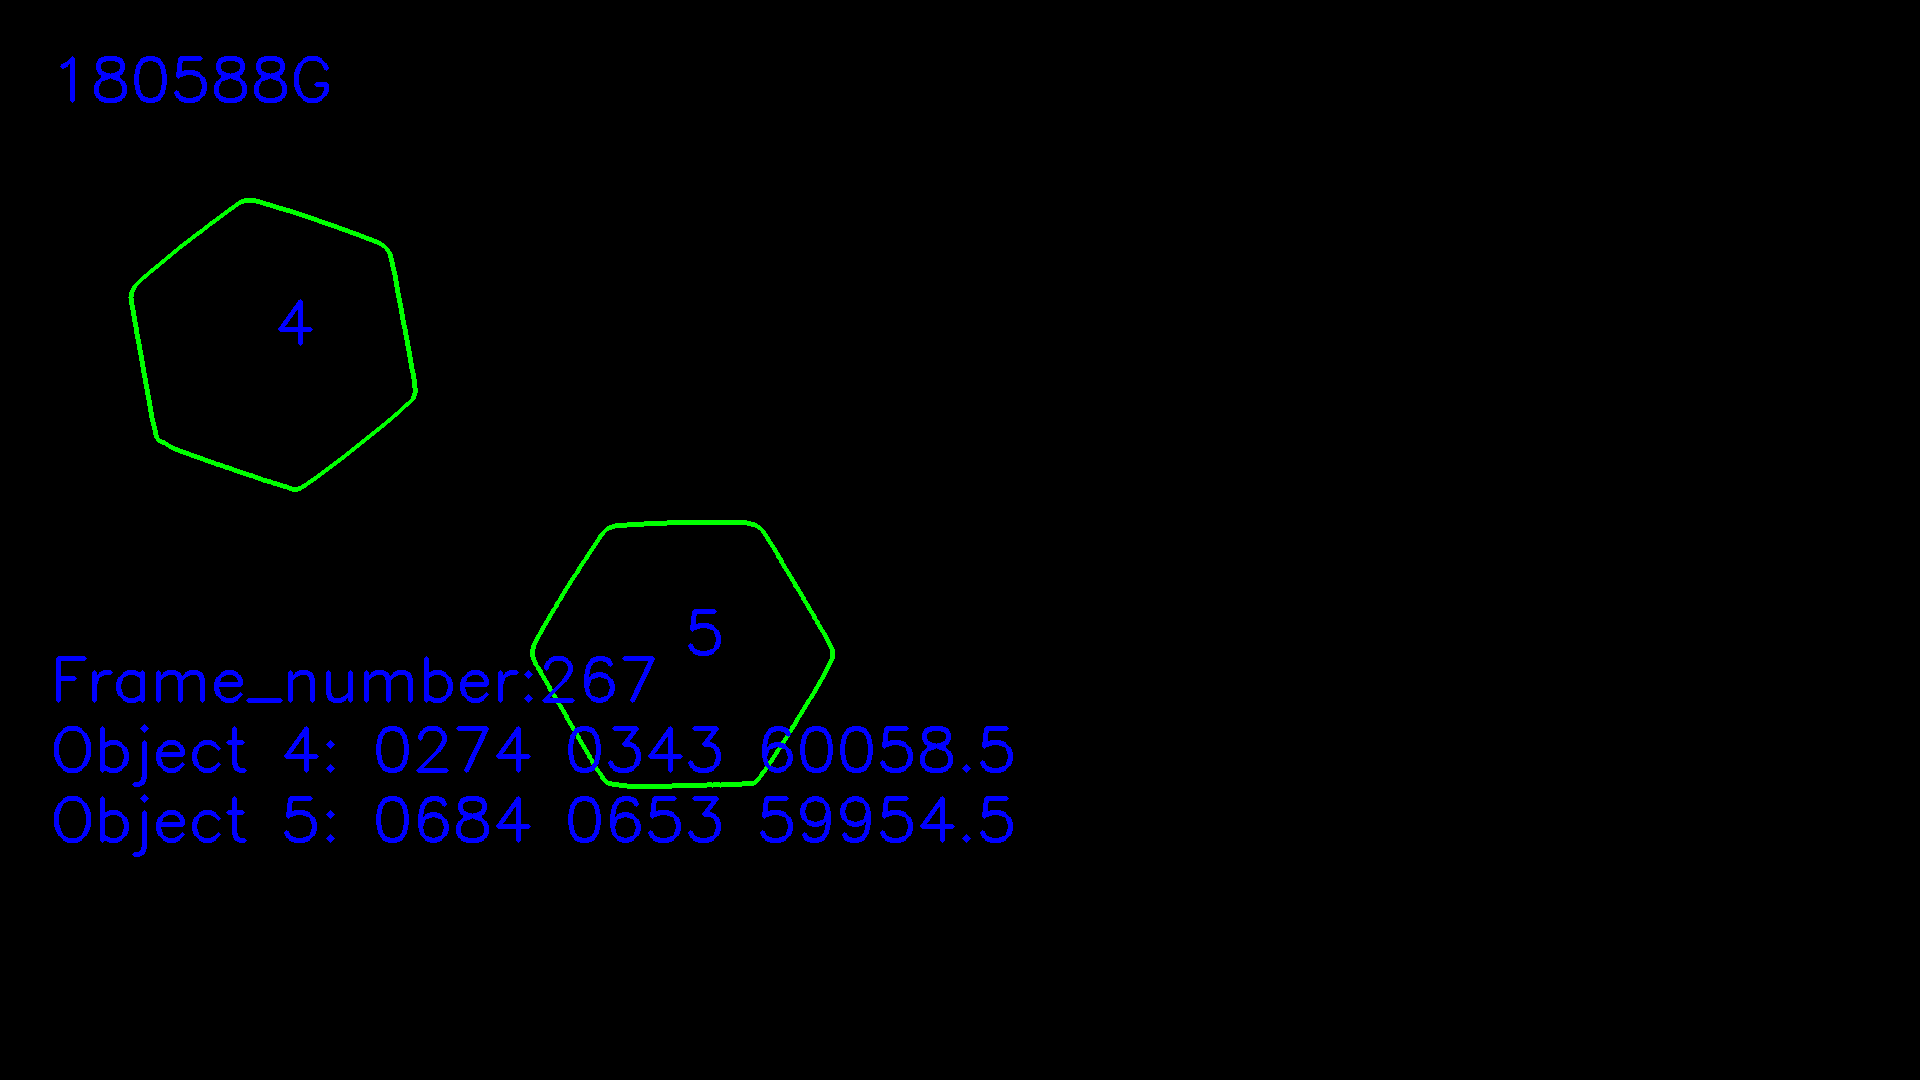

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.7400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]
Previousframe [array([2.74000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.84000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


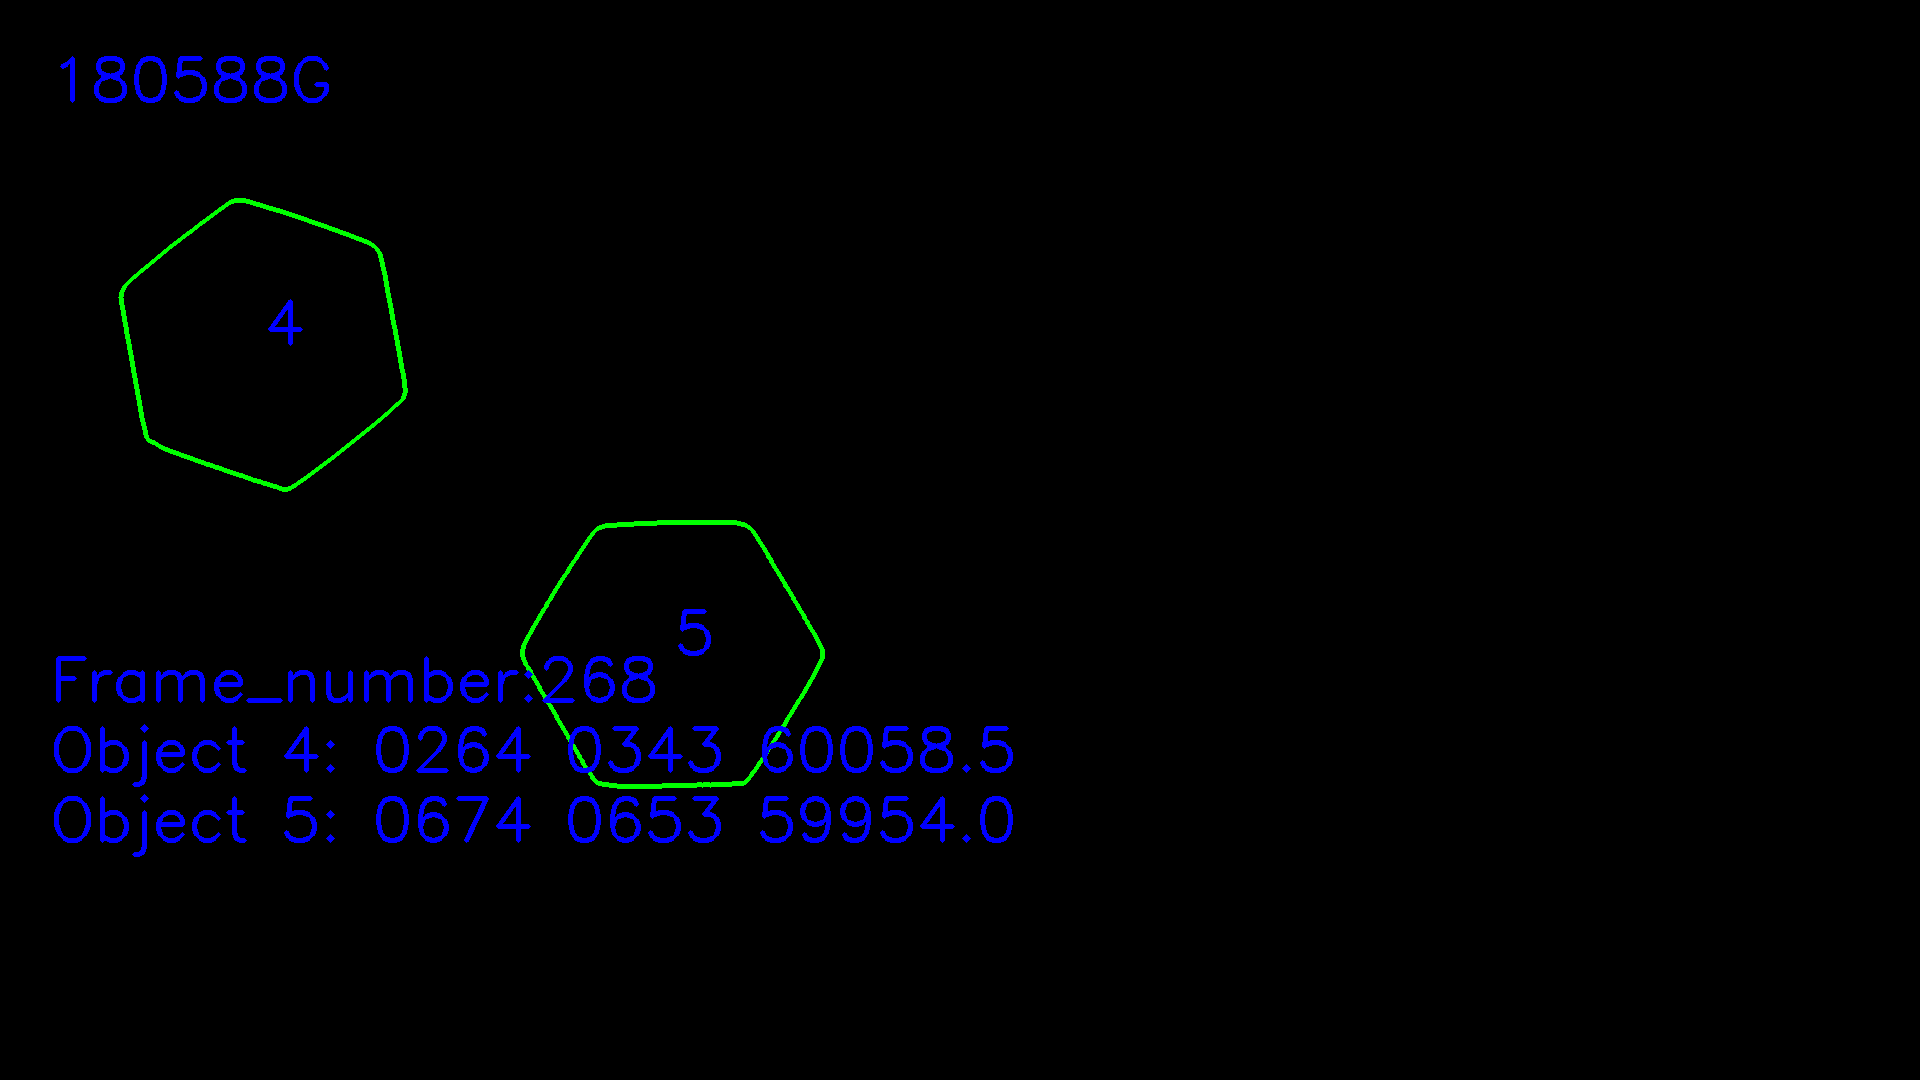

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.54000e+02, 3.43000e+02, 6.00555e+04, 4.00000e+00]), array([6.6400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]
Previousframe [array([2.64000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.7400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]


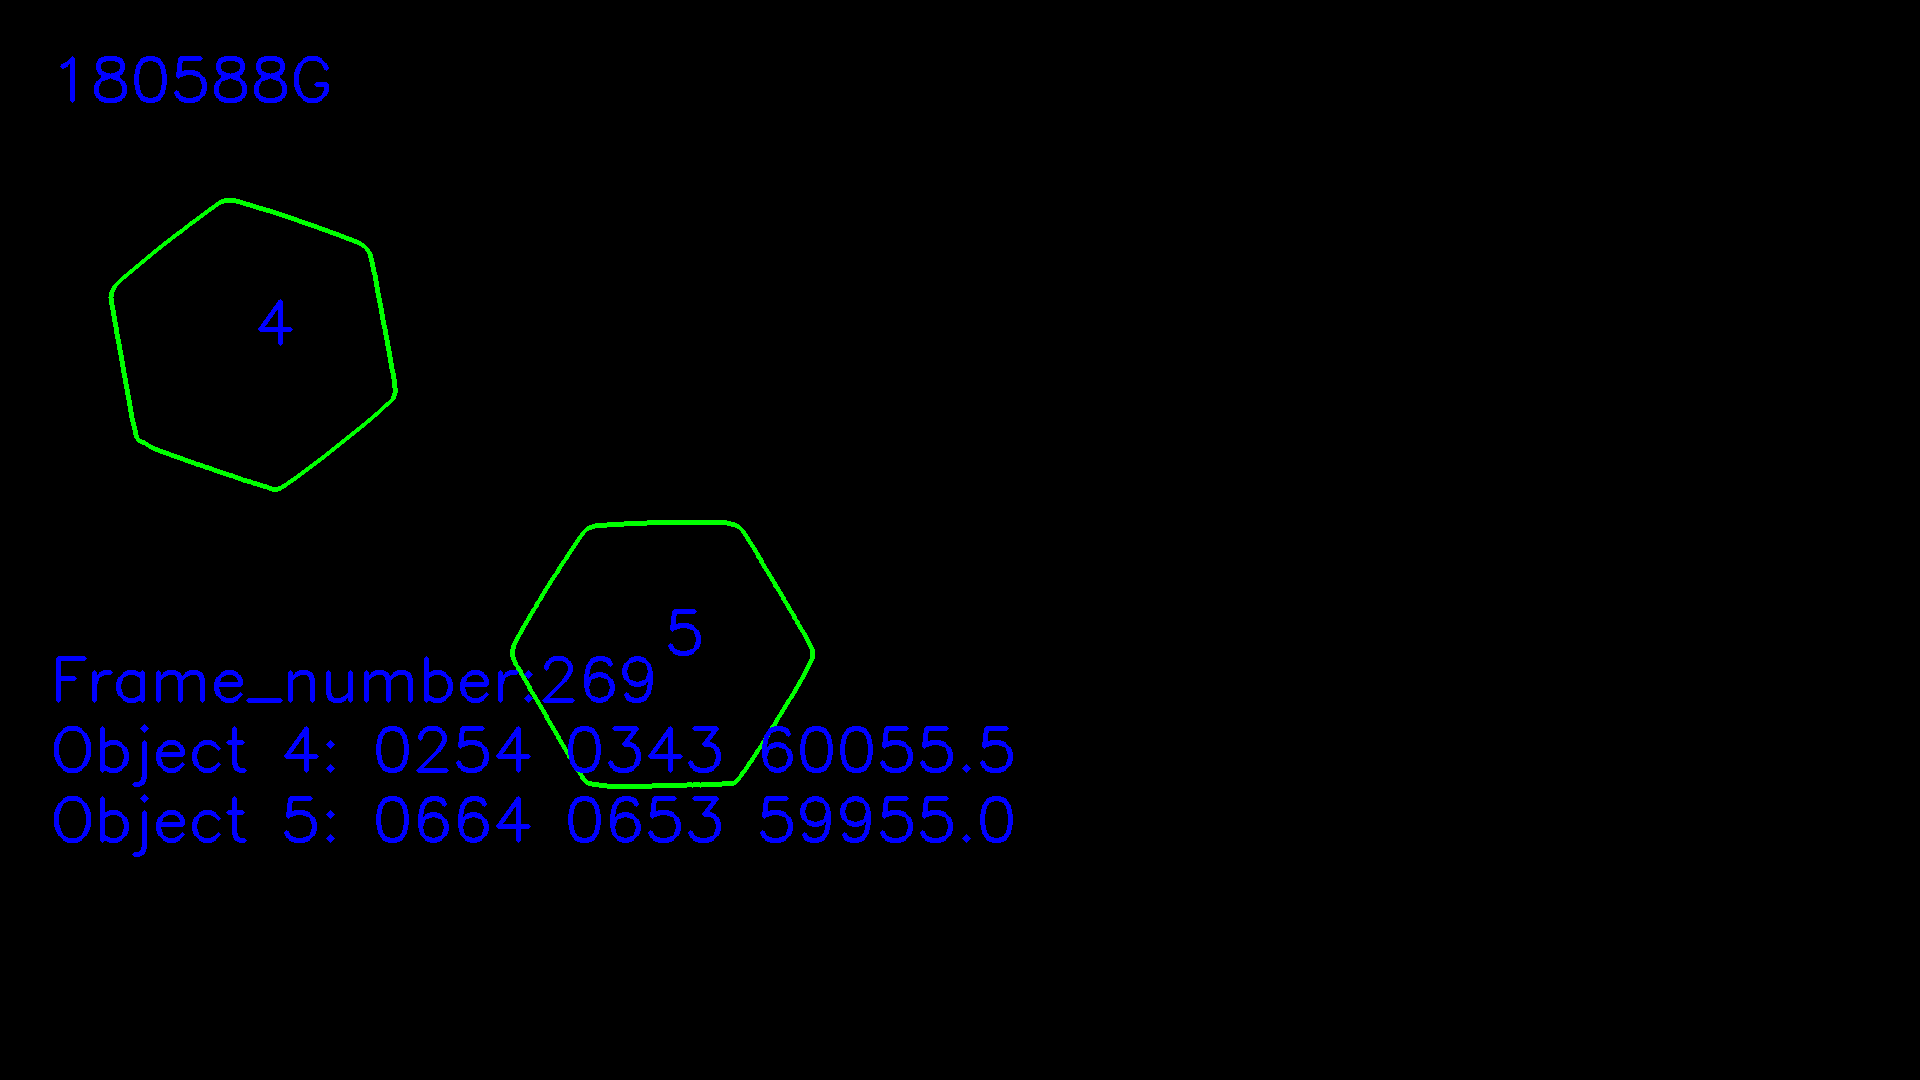

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.44000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([6.5400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]
Previousframe [array([2.54000e+02, 3.43000e+02, 6.00555e+04, 4.00000e+00]), array([6.6400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]


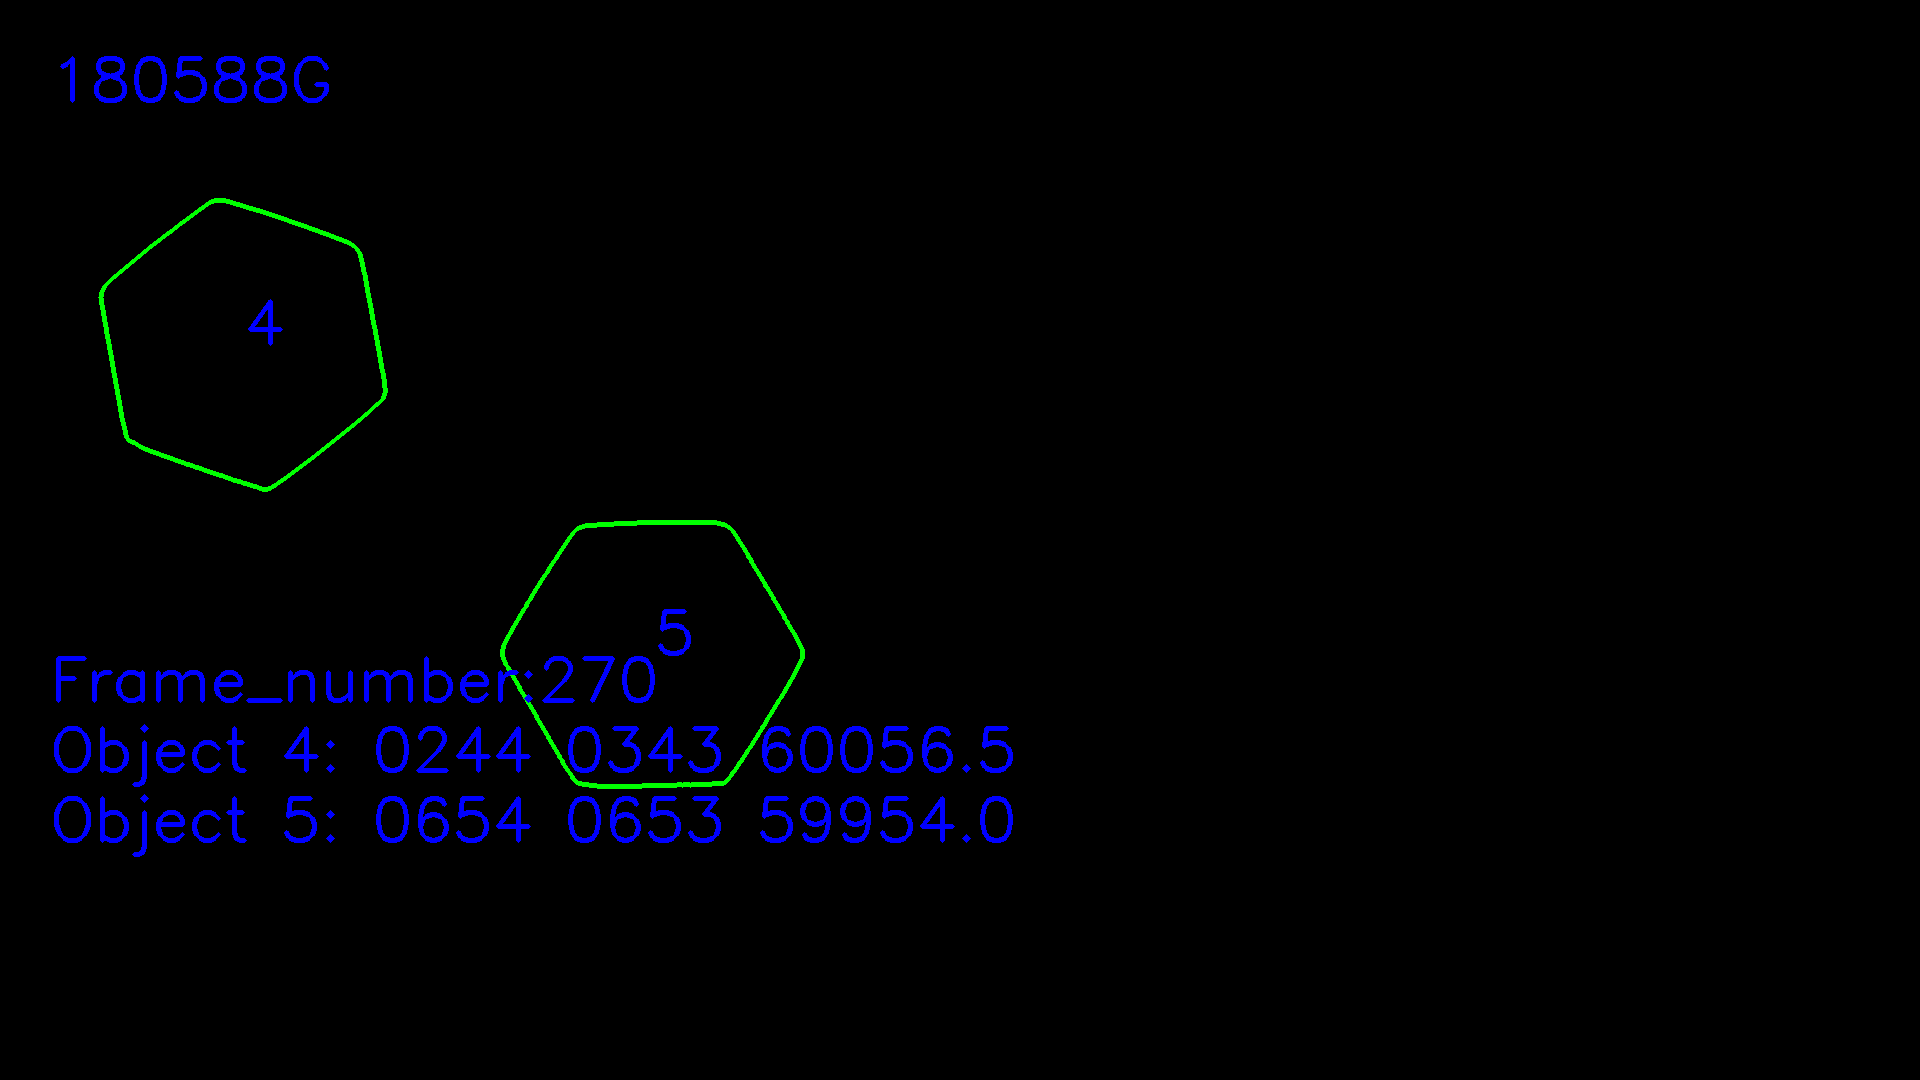

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.34000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([6.44000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]
Previousframe [array([2.44000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([6.5400e+02, 6.5300e+02, 5.9954e+04, 5.0000e+00])]


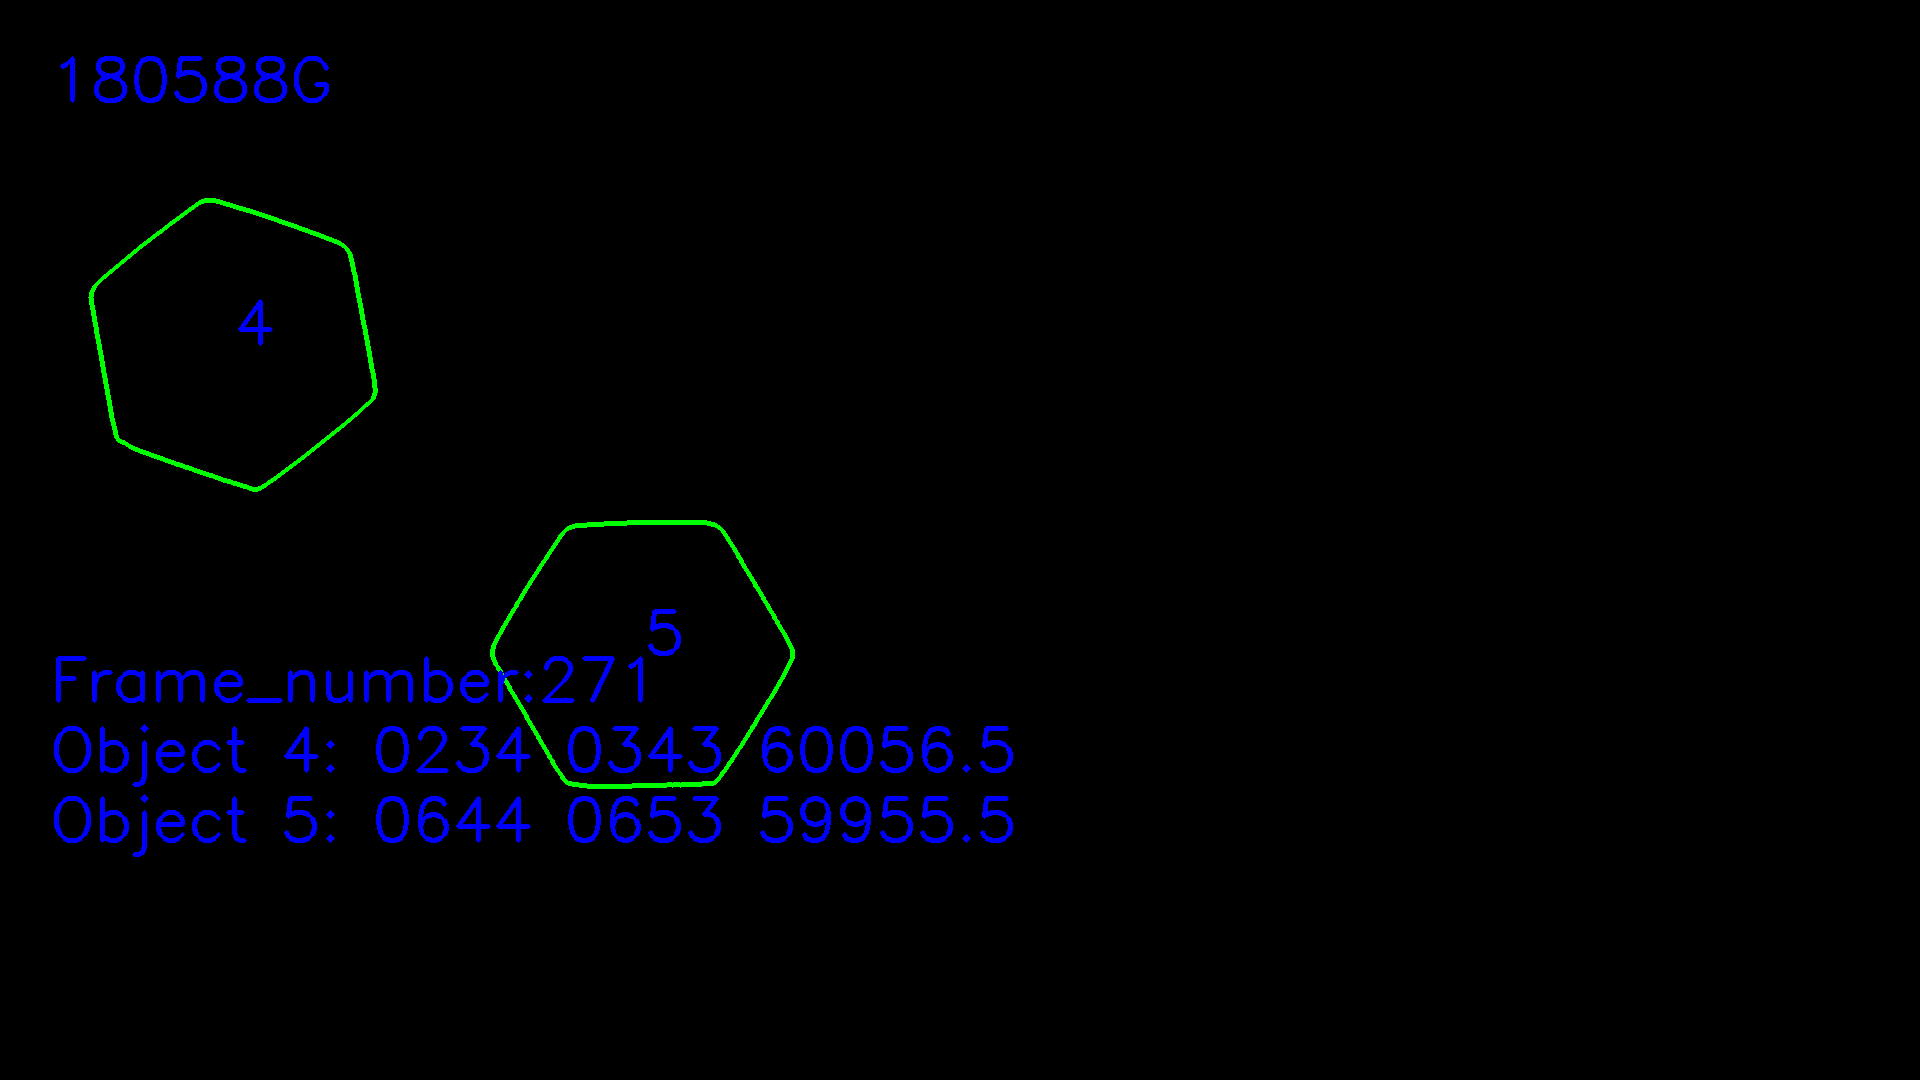

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.34000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]
Previousframe [array([2.34000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([6.44000e+02, 6.53000e+02, 5.99555e+04, 5.00000e+00])]


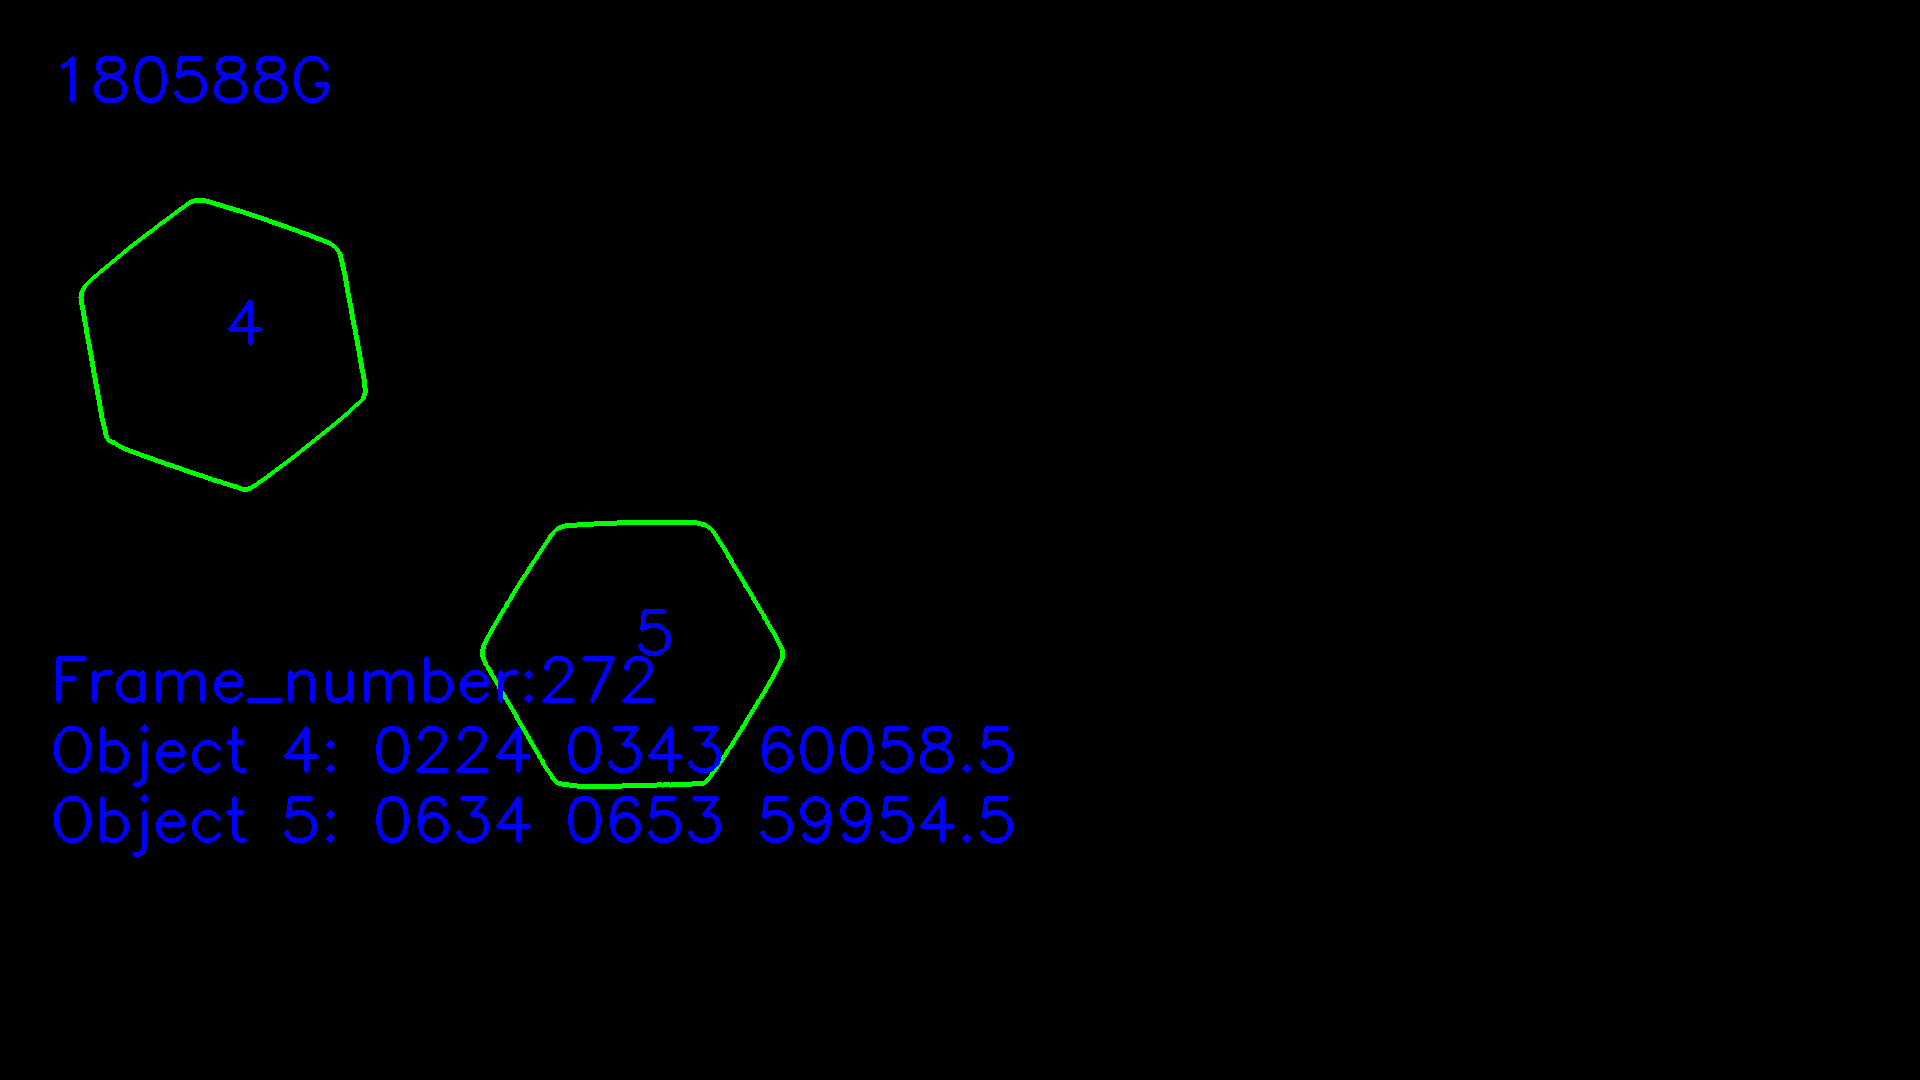

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.14000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.2400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]
Previousframe [array([2.24000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.34000e+02, 6.53000e+02, 5.99545e+04, 5.00000e+00])]


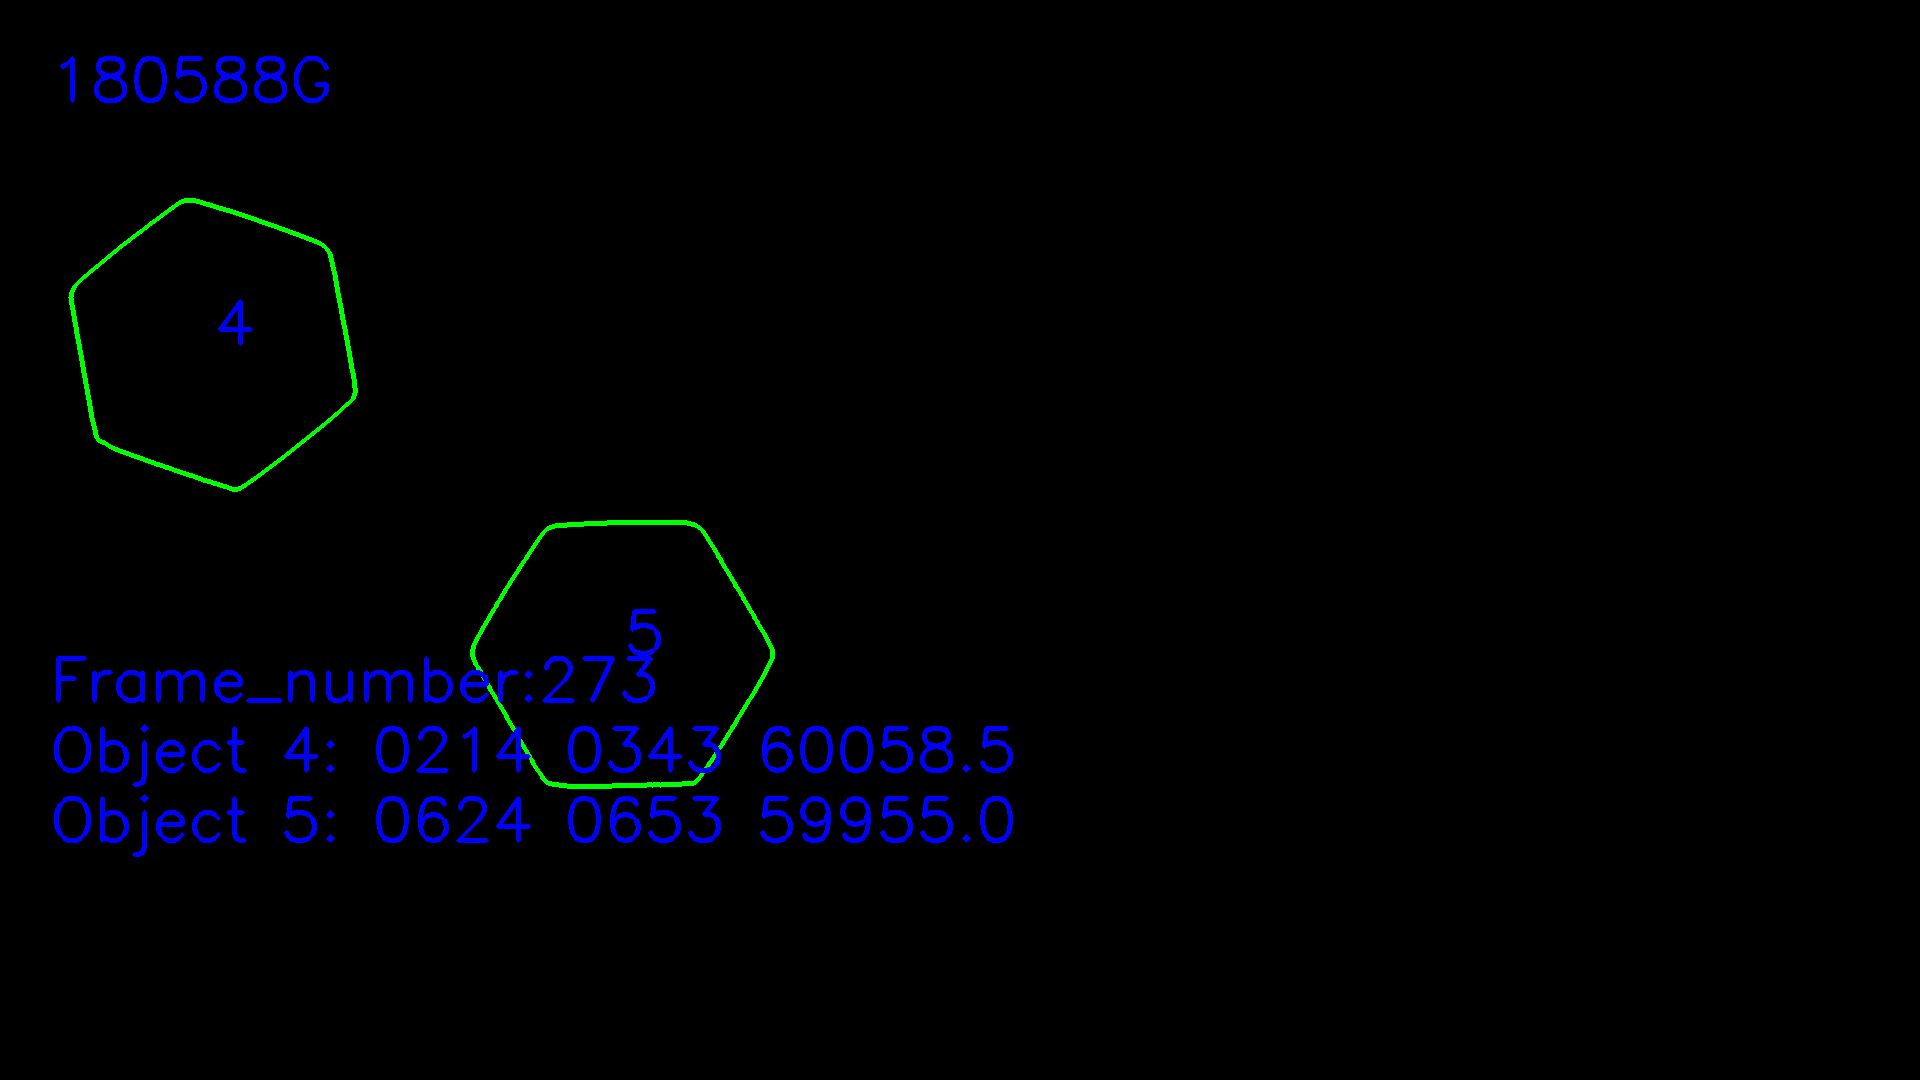

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([2.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.1400e+02, 6.5300e+02, 5.9953e+04, 5.0000e+00])]
Previousframe [array([2.14000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.2400e+02, 6.5300e+02, 5.9955e+04, 5.0000e+00])]


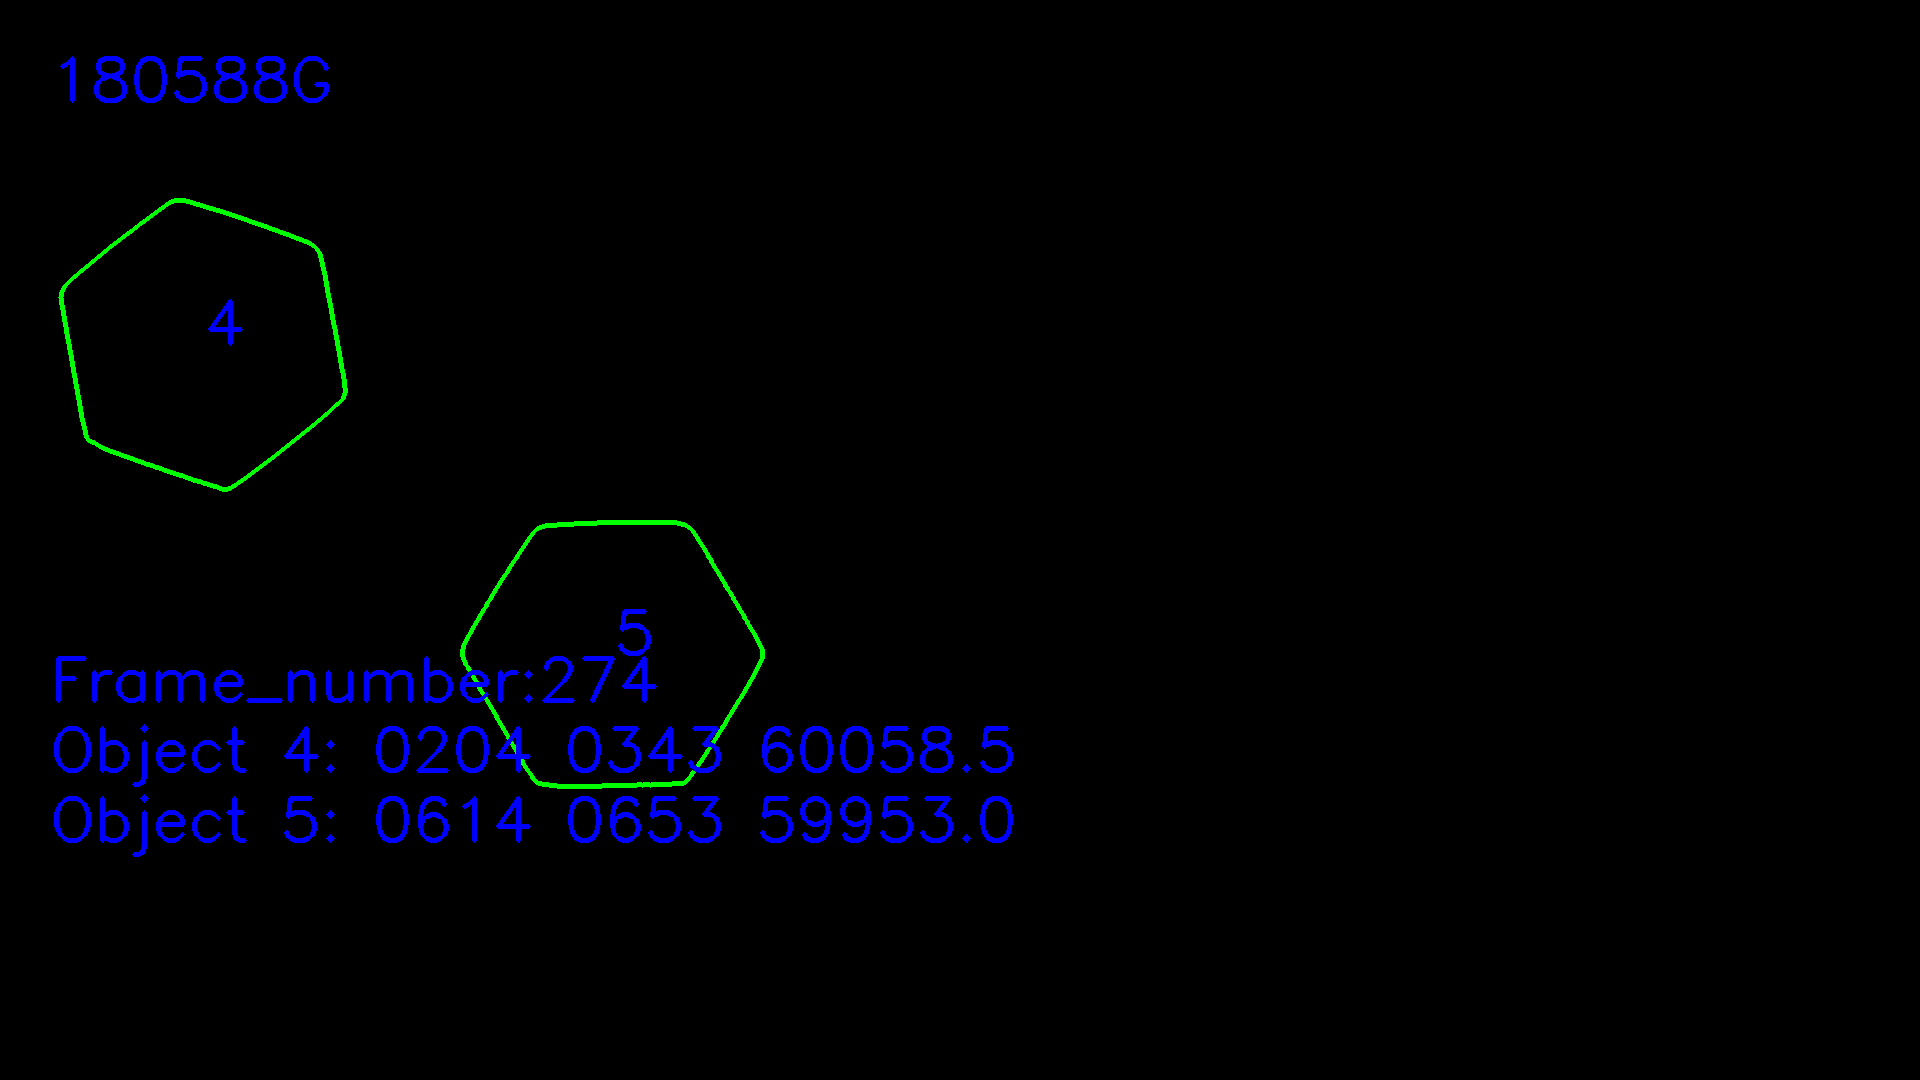

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.0400e+02, 6.5300e+02, 5.9952e+04, 5.0000e+00])]
Previousframe [array([2.04000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.1400e+02, 6.5300e+02, 5.9953e+04, 5.0000e+00])]


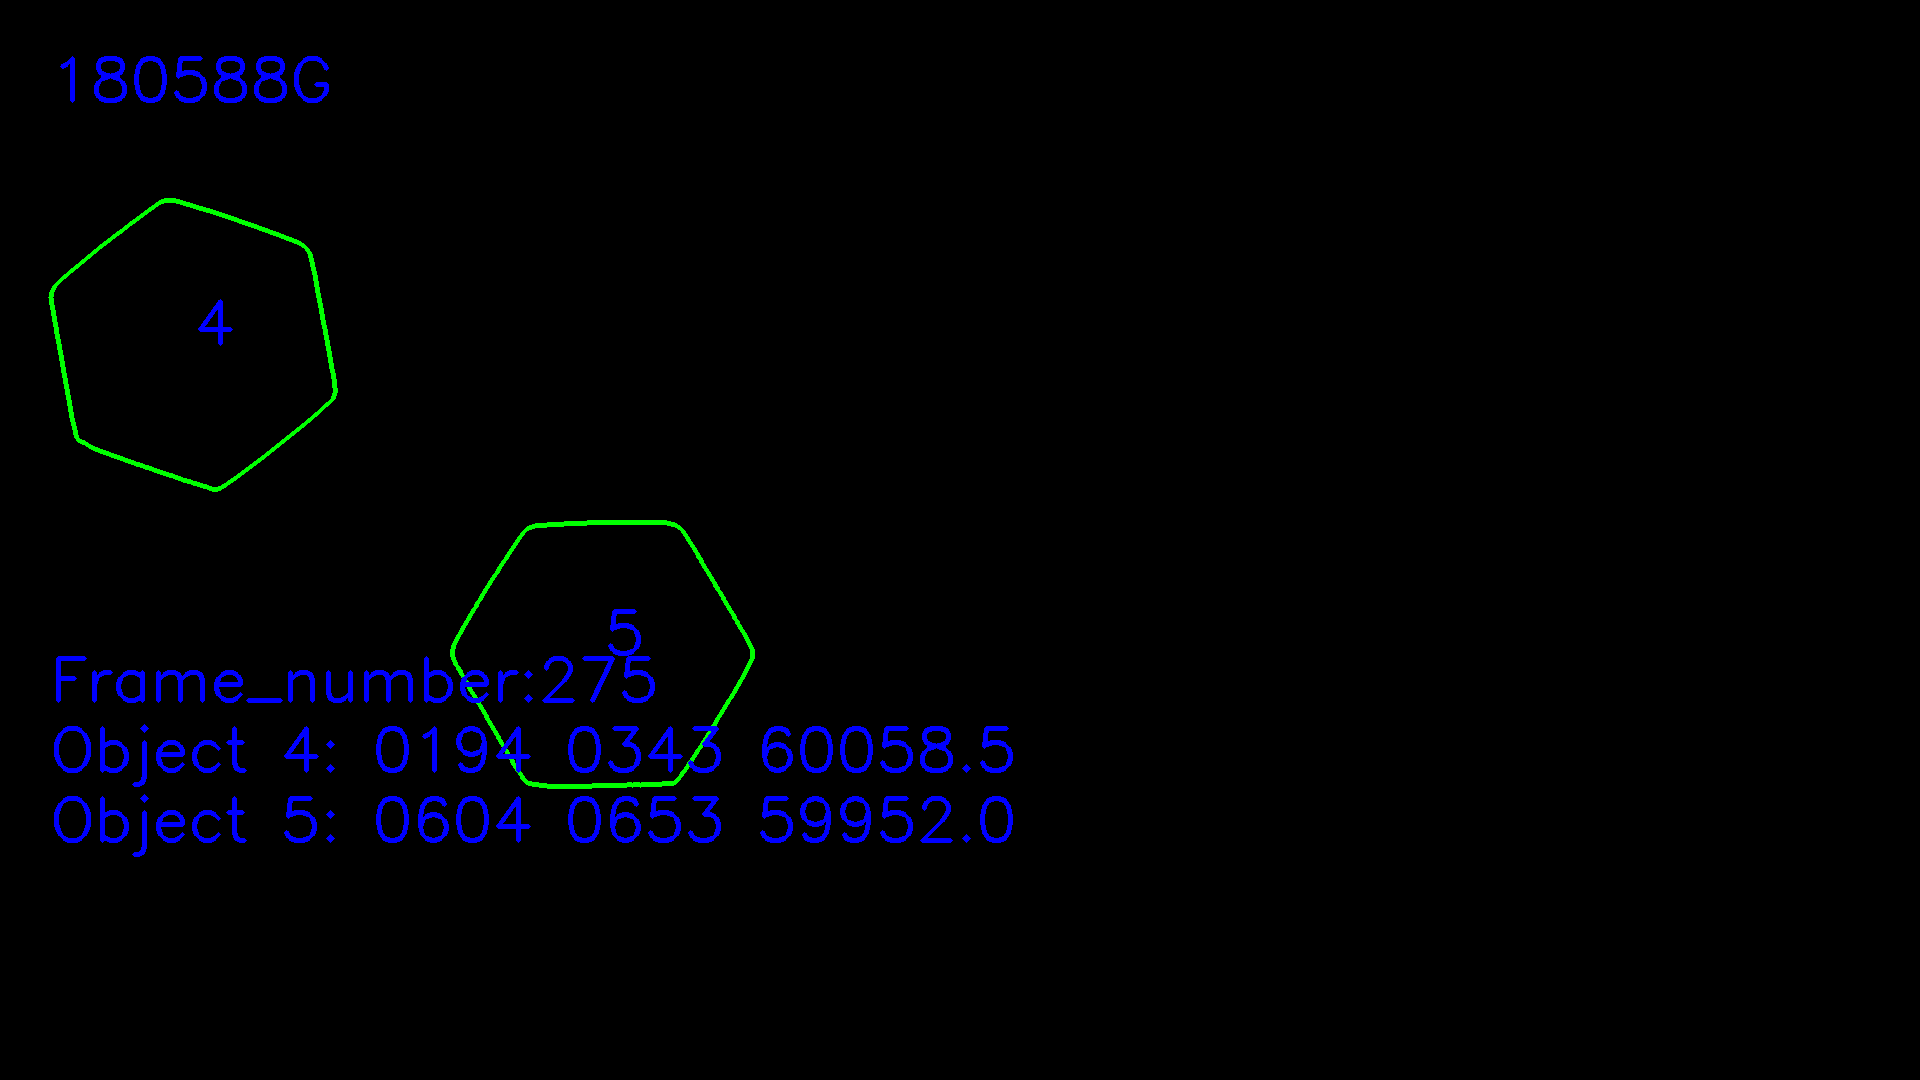

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.84000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([5.9400e+02, 6.5300e+02, 5.9953e+04, 5.0000e+00])]
Previousframe [array([1.94000e+02, 3.43000e+02, 6.00585e+04, 4.00000e+00]), array([6.0400e+02, 6.5300e+02, 5.9952e+04, 5.0000e+00])]


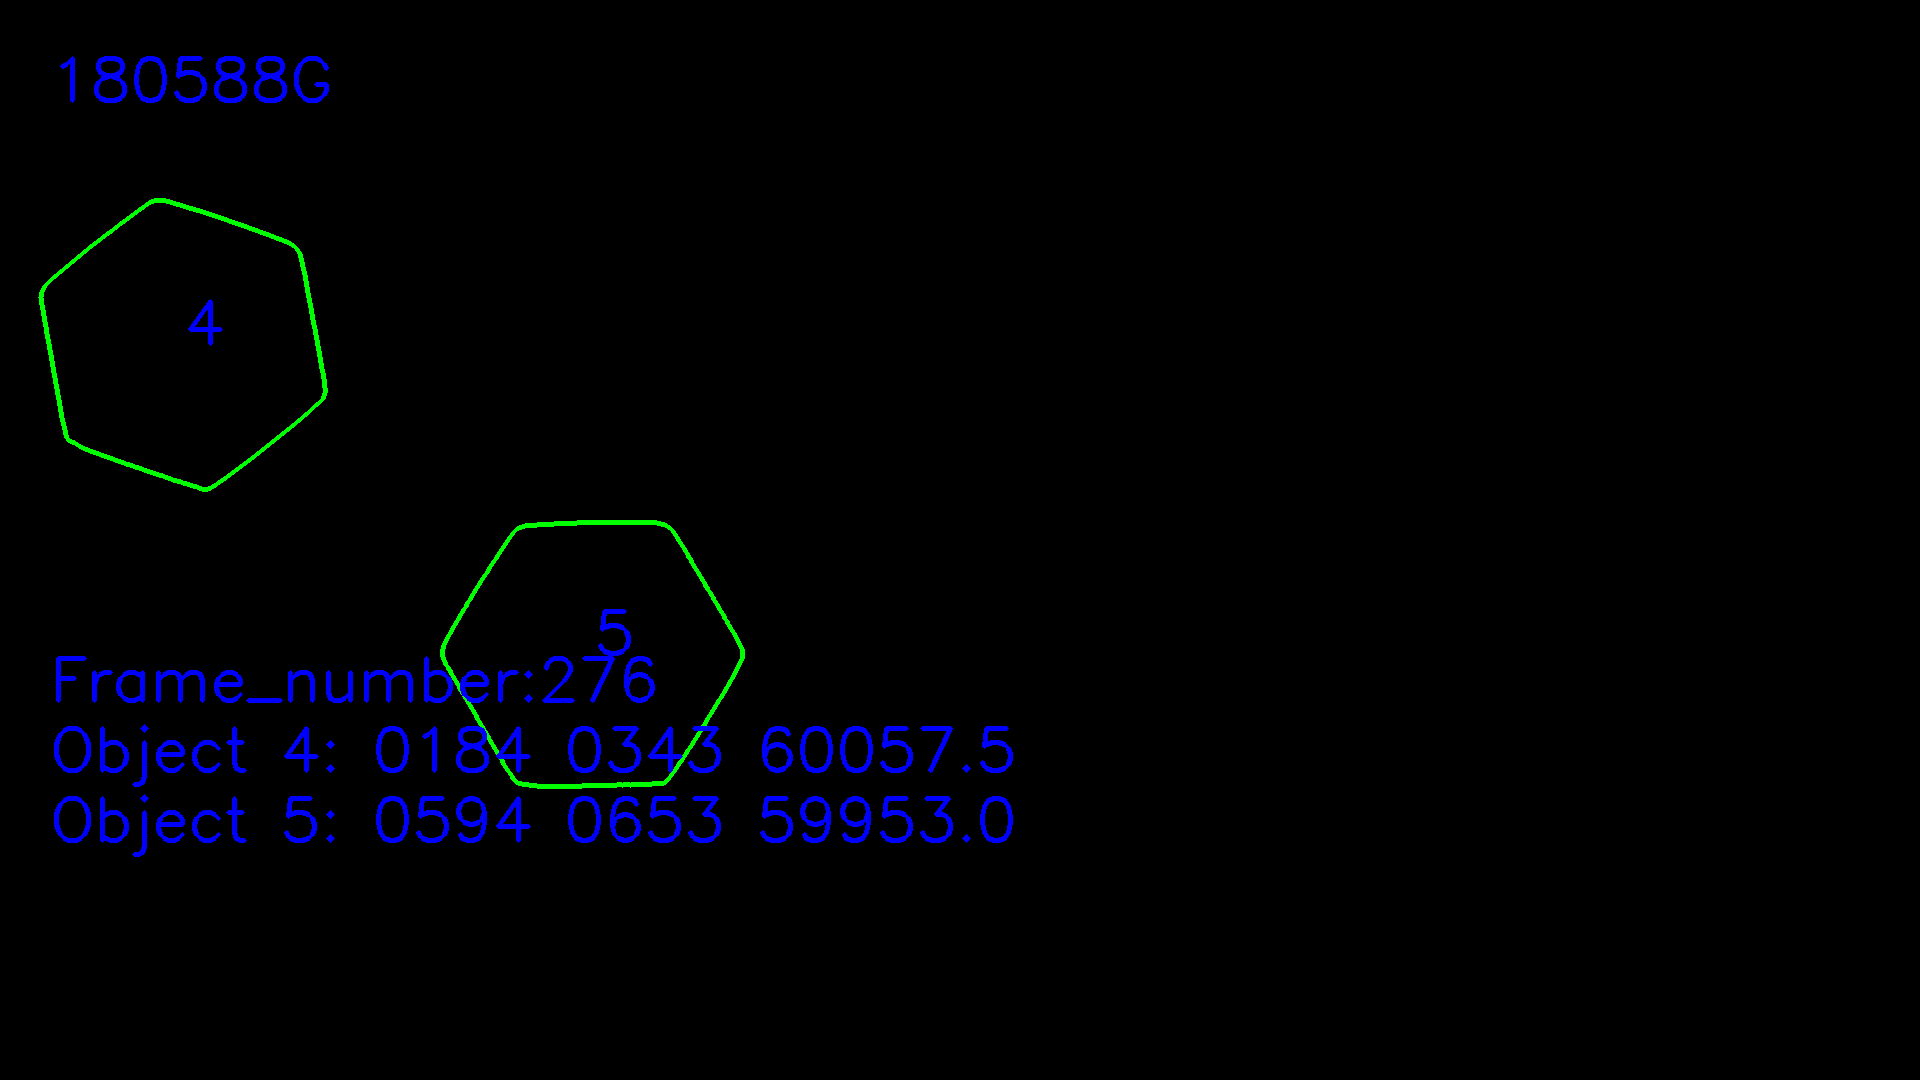

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.74000e+02, 3.43000e+02, 6.00555e+04, 4.00000e+00]), array([5.84000e+02, 6.53000e+02, 5.99535e+04, 5.00000e+00])]
Previousframe [array([1.84000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([5.9400e+02, 6.5300e+02, 5.9953e+04, 5.0000e+00])]


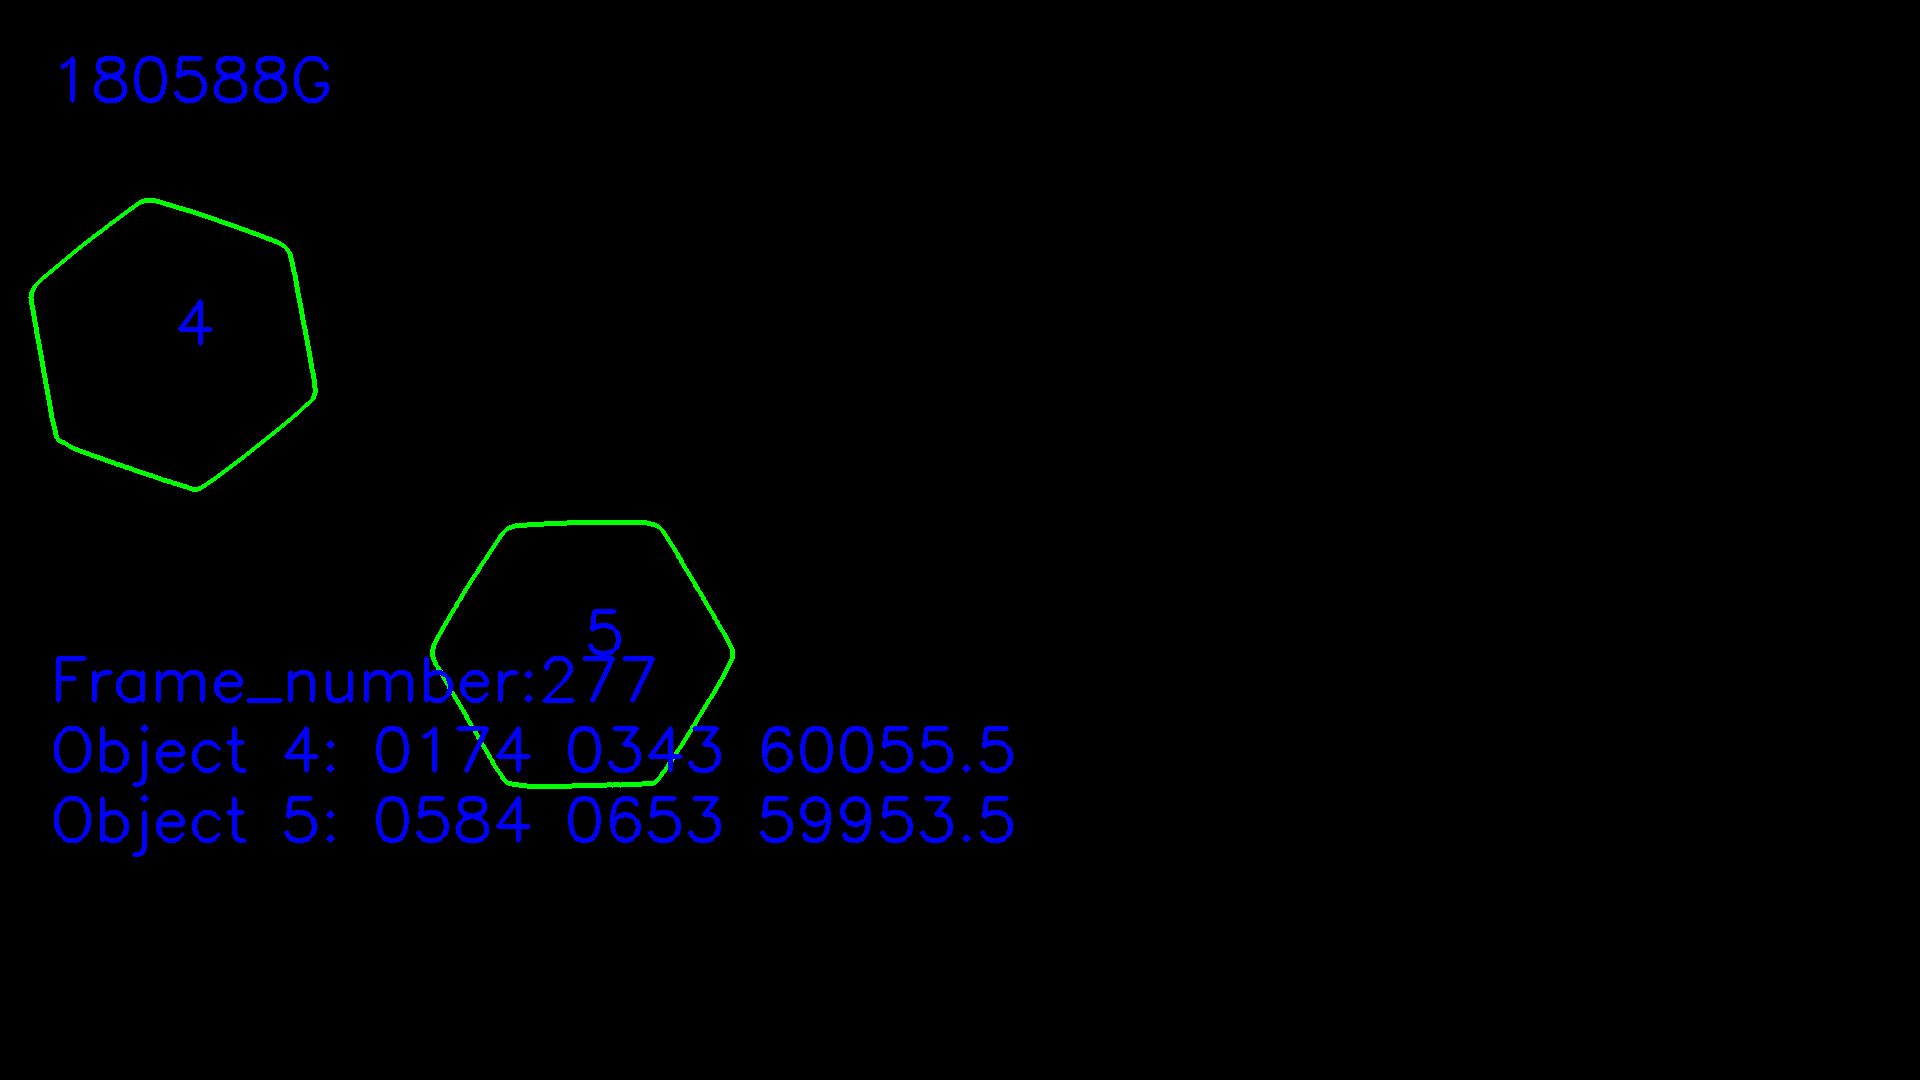

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.64000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([5.7400e+02, 6.5300e+02, 5.9953e+04, 5.0000e+00])]
Previousframe [array([1.74000e+02, 3.43000e+02, 6.00555e+04, 4.00000e+00]), array([5.84000e+02, 6.53000e+02, 5.99535e+04, 5.00000e+00])]


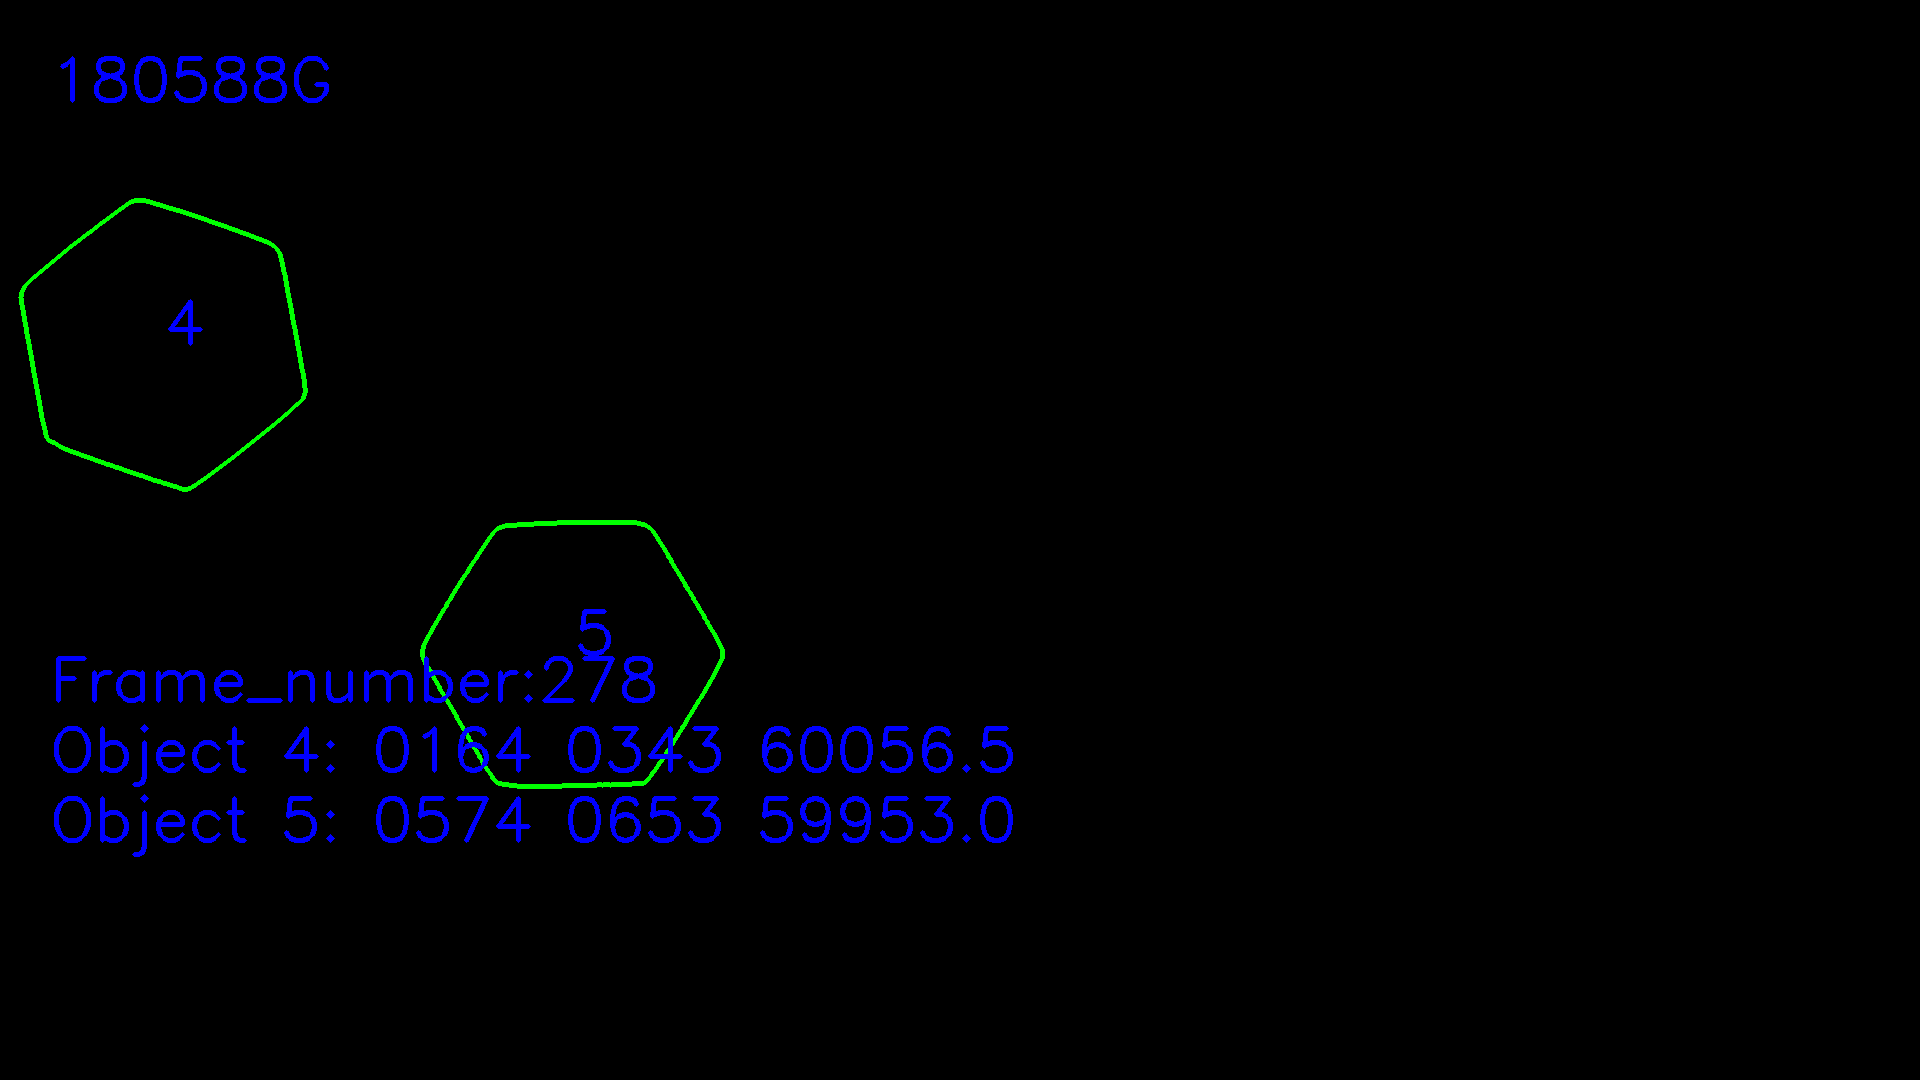

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Current Frame [array([1.54000e+02, 3.43000e+02, 6.00575e+04, 4.00000e+00]), array([5.64000e+02, 6.53000e+02, 5.99535e+04, 5.00000e+00])]
Previousframe [array([1.64000e+02, 3.43000e+02, 6.00565e+04, 4.00000e+00]), array([5.7400e+02, 6.5300e+02, 5.9953e+04, 5.0000e+00])]


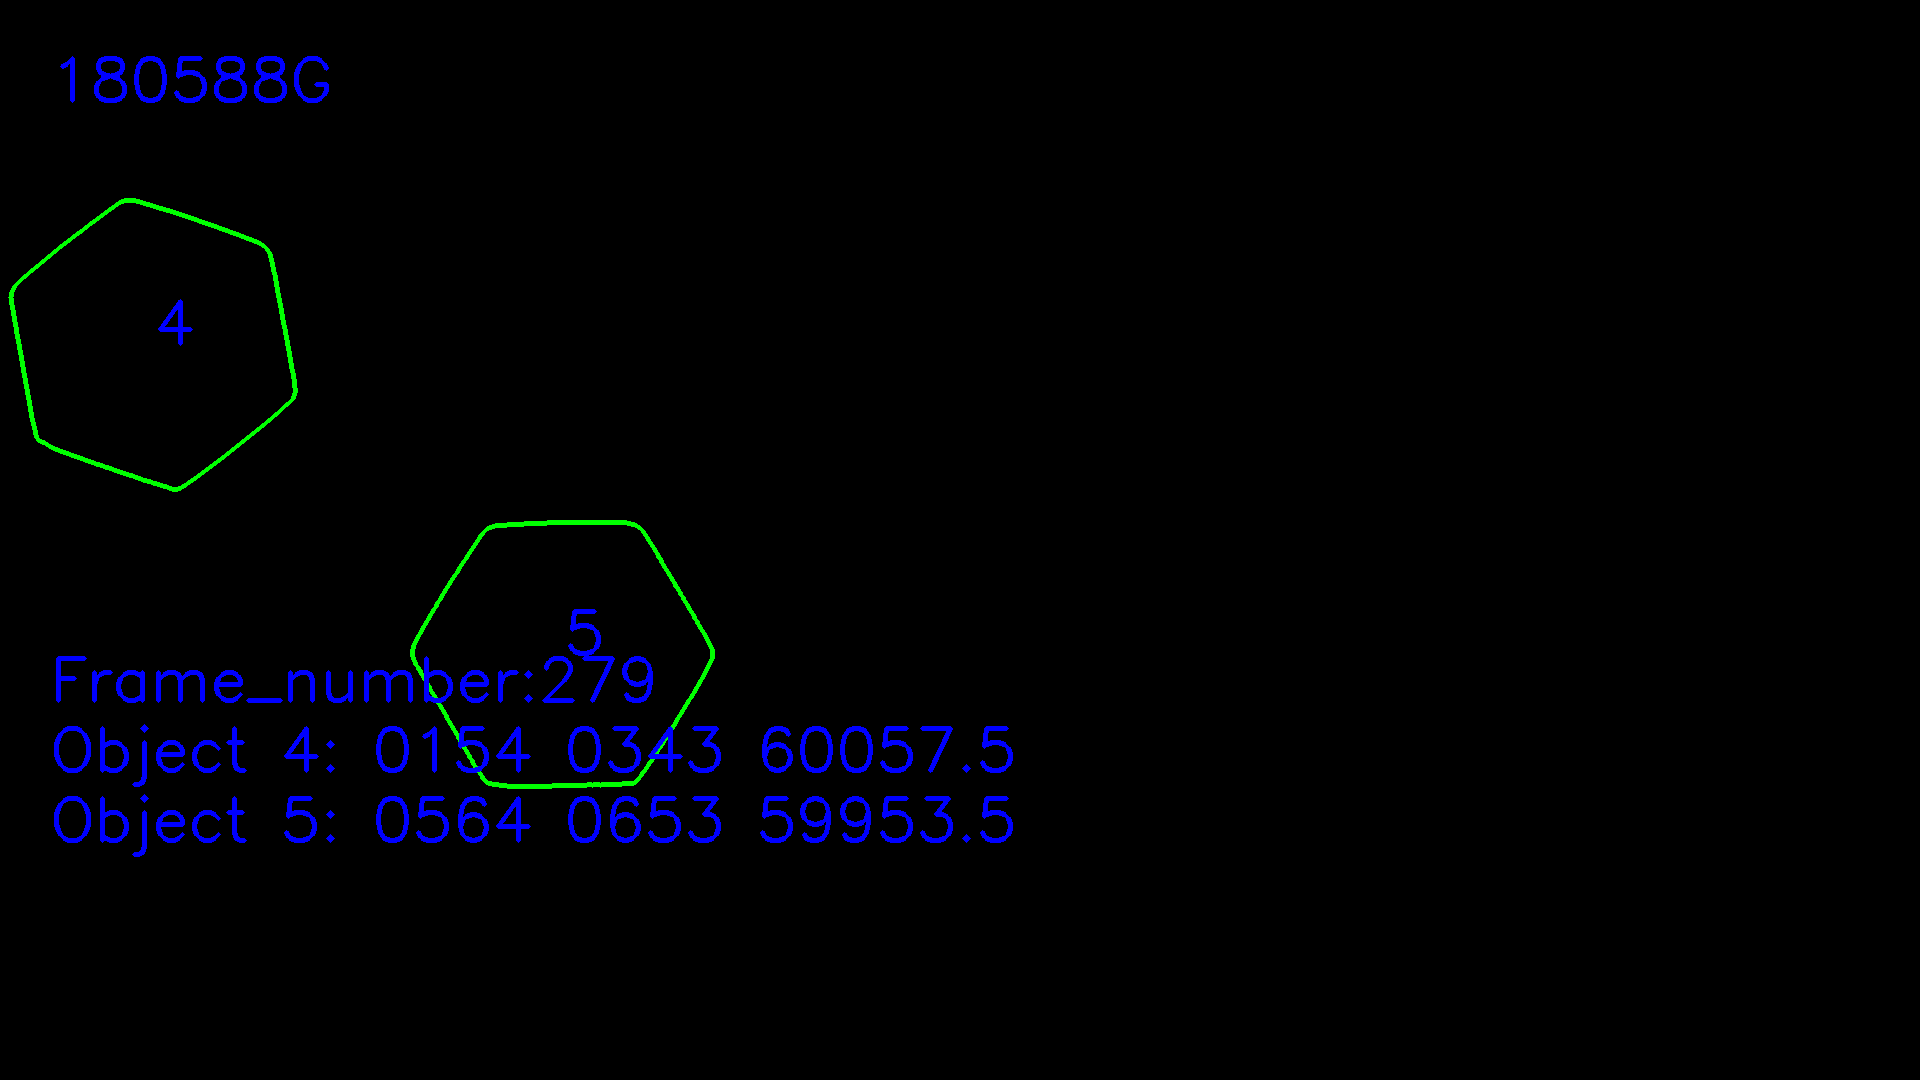

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
Can't receive frame (stream end?). Exiting ...


In [188]:
cap = cv.VideoCapture('/content/gdrive/MyDrive/A05/conveyor_with_rotation.mp4') # give the correct path here
frame_number=0
prev_frame_details=[]
total_nuts=1
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('180588G_en2550_a05.mp4',fourcc, 10, (frame_width,frame_height))
while cap.isOpened(): 
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5')
    ret, frame = cap.read()
    frame=cv.rotate(frame, cv.ROTATE_90_COUNTERCLOCKWISE)
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    delta_x = np.array([15])
    i = np.array([0]) 
    count=0
    frame_details=[]


    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    retval, labels, stats, centroids =get_indexed_image(grey)
    label = 1 # remember that the label of the background is 0
    belt = ((labels >= label)*255).astype('uint8')   #omitting background and getting all objects
    belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #getting contours of all objeects   #ret_external - extreme countorus are counted
    
    
    conts = cv.drawContours(im_contours_belt, belt_cont, -1, (0,255,0), 3).astype('uint8')
    im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)
    conts = cv.drawContours(im_contours_belt, belt_cont, -1, (0,255,0), 3).astype('uint8')

    for j,c in enumerate(belt_cont):
      matching_coef=cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)
      if matching_coef<0.5:
        count+=1
        M = cv.moments(c)
        cy, cx = (int(M["m10"] / M["m00"]), (frame.shape[0]-int(M["m01"] / M["m00"])))
        ca = cv.contourArea(c)
        object_current_frame = np.array([cx, cy, ca, count])
        frame_details.append(object_current_frame)
    
    if frame_number==0:
      prev_frame_details=frame_details
      frame_number+=1
      continue
    y=0

    for object_detail in frame_details:
      if is_new(prev_frame_details,object_detail,delta_x,i):
        total_nuts+=1
        object_detail[-1]=total_nuts
      else:
        prev_index_=prev_index(prev_frame_details, object_detail, delta_x, i)   
        object_detail[-1]=prev_index_
      y+=1
      conts=cv.rotate(conts, cv.ROTATE_90_CLOCKWISE)
      
      conts = cv.putText(conts, str(int(object_detail[-1])),(int(object_detail[0]),int(object_detail[1])),cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 4)
     
      conts= cv.putText(conts, "Object {}: {:04} {:04} {:05}".format(int(object_detail[-1]), int(object_detail[0]), int(object_detail[1]), object_detail[2]),(50,700+ 70*y), cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 4)
      conts=cv.rotate(conts, cv.ROTATE_90_COUNTERCLOCKWISE)
    
    
    conts=cv.rotate(conts, cv.ROTATE_90_CLOCKWISE)
    print('Current Frame',frame_details)
    print('Previousframe',prev_frame_details)
    prev_frame_details=frame_details
    conts = cv.putText(conts, "180588G" , (50,100) , cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)
    cont=cv.putText(conts,("Frame_number:"+str(frame_number)),(50,700), cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)
    #out.write(conts)
    cv2_imshow(conts)
    frame_number+=1
    if cv.waitKey(1) == ord('q') : #or frame_number==10 :  
        break
#print(total_nuts)
cap.release()
cv.destroyAllWindows() 